# Synthetic Case Study example with different noise models (uncorrelated/correlated)
Demonstrates the use of different* noise models with tTEM data 
using an example using inverting data obtained from synthetic reference model



In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # # # # # # # # # #%load_ext autoreload
    # # # # # # # # # # # # # #%autoreload 2
    pass

import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
hardcopy=True



Notebook detected. Parallel processing is OK


## Create The reference model and data

In [2]:


# select the type of referenc model
z_max = 60
rho = [120,10,120]
dx=1
case = '3layer'
#case = 'wedge'
if case.lower() == 'wedge':
    # Make Wedge MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='Wedge', wedge_angle=10, z_max=z_max, dz=.5, x_max=100, dx=dx, z1=15, rho = rho)
    M_ref, x_ref, z_ref = ig.synthetic_case(case='Wedge', wedge_angle=10, z_max=z_max, dz=.5, x_max=200, dx=dx, z1=15, rho = rho)
elif case.lower() == '3layer':
    # Make 3 layer MODEL
    M_ref, x_ref, z_ref = ig.synthetic_case(case='3layer', dx=dx, rho1_1 = rho[0], rho1_2 = rho[1], x_max = 100, x_range = 10)
    M_ref, x_ref, z_ref = ig.synthetic_case(case='3layer', dx=dx, rho1_1 = rho[0], rho1_2 = rho[1], x_max = 200, x_range = 20)

# Create reference data
f_data_h5 = '%s_%d' % (case,z_max)    
thickness = np.diff(z_ref)
# Get a GEX file to use for creation of data
file_gex = ig.get_case_data(case='DAUGAARD', filelist=['TX07_20231016_2x4_RC20-33.gex'])[0]

# Compute the noise free reference data
D_ref = ig.forward_gaaem(C=1./M_ref, thickness=thickness, file_gex=file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD


gatdaem1d:   0%|                                               | 0/200 [00:00<?, ?it/s]

gatdaem1d:  34%|█████████████                         | 69/200 [00:01<00:01, 68.51it/s]

gatdaem1d:  69%|█████████████████████████▌           | 138/200 [00:02<00:00, 68.32it/s]

## Plot the reference model and data

NameError: name 'clim' is not defined

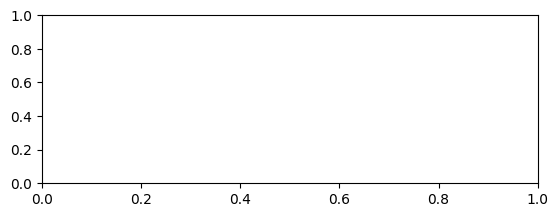

In [3]:


plt.subplot(2,1,1)
xx_ref, zz_ref = np.meshgrid(x_ref, z_ref)
#plt.pcolormesh(xx_ref, zz_ref, M_ref.T, cmap='jet', vmin=clim[0], vmax=clim[1])
plt.pcolormesh(xx_ref, zz_ref, np.log10(M_ref.T), cmap='jet', vmin=np.log10(clim[0]), vmax=np.log10(clim[1]))
plt.xlim([x_ref.min(), x_ref.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.axis('equal')
plt.gca().invert_yaxis()
plt.colorbar(label='Resistivity (Ohm-m)')

plt.subplot(2,1,2)
plt.semilogy(x_ref, D_ref)
plt.xlim([x_ref.min(), x_ref.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Amplitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)



## Create prior model and data

make prior model realizations


prior_layered:   0%|                                       | 0/1000000 [00:00<?, ?it/s]

prior_layered:  15%|███▎                  | 152390/1000000 [00:01<00:05, 152388.87it/s]

prior_layered:  31%|██████▊               | 307286/1000000 [00:02<00:04, 153863.35it/s]

prior_layered:  46%|██████████▏           | 462584/1000000 [00:03<00:03, 154517.90it/s]

prior_layered:  62%|█████████████▌        | 619010/1000000 [00:04<00:02, 155270.78it/s]

prior_layered:  77%|█████████████████     | 774659/1000000 [00:05<00:01, 155406.86it/s]

prior_layered:  93%|████████████████████▍ | 930137/1000000 [00:06<00:00, 155430.68it/s]

prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                             | 0/31250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                    | 49/31250 [00:01<10:42, 48.54it/s]

gatdaem1d:   0%|                                    | 50/31250 [00:01<10:35, 49.11it/s]

gatdaem1d:   0%|                                    | 42/31250 [00:01<12:36, 41.24it/s]

gatdaem1d:   0%|                                    | 51/31250 [00:01<10:20, 50.32it/s]

gatdaem1d:   0%|                                    | 41/31250 [00:01<12:58, 40.10it/s]

gatdaem1d:   0%|                                    | 35/31250 [00:01<15:06, 34.44it/s]

gatdaem1d:   0%|                                    | 50/31250 [00:01<10:33, 49.26it/s]

gatdaem1d:   0%|                                    | 49/31250 [00:01<10:41, 48.61it/s]

gatdaem1d:   0%|                                    | 47/31250 [00:01<11:15, 46.16it/s]

gatdaem1d:   0%|                                    | 36/31250 [00:01<14:30, 35.84it/s]

gatdaem1d:   0%|                                    | 38/31250 [00:01<13:49, 37.61it/s]

gatdaem1d:   0%|                                    | 35/31250 [00:01<15:11, 34.24it/s]

gatdaem1d:   0%|                                    | 34/31250 [00:01<15:18, 33.98it/s]

gatdaem1d:   0%|                                    | 34/31250 [00:01<15:30, 33.55it/s]

gatdaem1d:   0%|                                    | 36/31250 [00:01<14:52, 34.99it/s]

gatdaem1d:   0%|                                    | 34/31250 [00:01<15:30, 33.55it/s]

gatdaem1d:   0%|                                    | 34/31250 [00:01<15:25, 33.74it/s]

gatdaem1d:   0%|                                    | 35/31250 [00:01<14:59, 34.70it/s]

gatdaem1d:   0%|                                    | 35/31250 [00:01<14:53, 34.95it/s]

gatdaem1d:   0%|                                    | 47/31250 [00:01<11:21, 45.78it/s]

gatdaem1d:   0%|                                    | 35/31250 [00:01<15:15, 34.10it/s]

gatdaem1d:   0%|                                    | 43/31250 [00:01<12:06, 42.94it/s]

gatdaem1d:   0%|                                    | 34/31250 [00:01<15:32, 33.48it/s]

gatdaem1d:   0%|                                    | 44/31250 [00:01<11:50, 43.92it/s]

gatdaem1d:   0%|                                    | 44/31250 [00:01<11:53, 43.76it/s]

gatdaem1d:   0%|                                    | 44/31250 [00:01<11:58, 43.44it/s]

gatdaem1d:   0%|                                    | 33/31250 [00:01<15:50, 32.86it/s]

gatdaem1d:   0%|                                    | 46/31250 [00:01<11:29, 45.28it/s]

gatdaem1d:   0%|                                    | 46/31250 [00:01<11:32, 45.04it/s]

gatdaem1d:   0%|                                    | 42/31250 [00:01<12:44, 40.83it/s]

gatdaem1d:   0%|                                    | 42/31250 [00:01<12:39, 41.07it/s]

gatdaem1d:   0%|                                    | 41/31250 [00:01<12:46, 40.74it/s]

gatdaem1d:   0%|                                    | 72/31250 [00:02<14:33, 35.68it/s]

gatdaem1d:   0%|                                    | 70/31250 [00:02<15:39, 33.19it/s]

gatdaem1d:   0%|                                    | 94/31250 [00:02<11:22, 45.67it/s]

gatdaem1d:   0%|                                    | 84/31250 [00:02<12:18, 42.20it/s]

gatdaem1d:   0%|                                    | 79/31250 [00:02<13:10, 39.44it/s]

gatdaem1d:   0%|                                   | 100/31250 [00:02<11:18, 45.91it/s]

gatdaem1d:   0%|                                    | 82/31250 [00:02<14:02, 37.00it/s]

gatdaem1d:   0%|                                    | 72/31250 [00:02<14:46, 35.18it/s]

gatdaem1d:   0%|                                    | 69/31250 [00:02<15:18, 33.96it/s]

gatdaem1d:   0%|                                    | 68/31250 [00:02<16:02, 32.39it/s]

gatdaem1d:   0%|                                    | 77/31250 [00:02<13:27, 38.59it/s]

gatdaem1d:   0%|                                    | 81/31250 [00:02<12:40, 41.01it/s]

gatdaem1d:   0%|                                    | 84/31250 [00:02<14:02, 36.99it/s]

gatdaem1d:   0%|                                    | 68/31250 [00:02<16:07, 32.24it/s]

gatdaem1d:   0%|                                    | 70/31250 [00:02<14:52, 34.93it/s]

gatdaem1d:   0%|                                    | 93/31250 [00:02<11:24, 45.54it/s]

gatdaem1d:   0%|                                    | 86/31250 [00:02<12:09, 42.74it/s]

gatdaem1d:   0%|                                    | 78/31250 [00:02<13:08, 39.52it/s]

gatdaem1d:   0%|                                    | 88/31250 [00:02<11:54, 43.62it/s]

gatdaem1d:   0%|                                    | 98/31250 [00:02<12:17, 42.25it/s]

gatdaem1d:   0%|                                    | 89/31250 [00:02<11:48, 43.97it/s]

gatdaem1d:   0%|                                    | 88/31250 [00:02<12:05, 42.95it/s]

gatdaem1d:   0%|                                    | 67/31250 [00:02<15:33, 33.41it/s]

gatdaem1d:   0%|                                   | 100/31250 [00:02<12:28, 41.62it/s]

gatdaem1d:   0%|                                    | 93/31250 [00:02<11:21, 45.73it/s]

gatdaem1d:   0%|                                    | 92/31250 [00:02<11:26, 45.36it/s]

gatdaem1d:   0%|                                    | 70/31250 [00:02<16:23, 31.69it/s]

gatdaem1d:   0%|                                    | 98/31250 [00:02<13:21, 38.86it/s]

gatdaem1d:   0%|                                    | 87/31250 [00:02<11:59, 43.33it/s]

gatdaem1d:   0%|                                    | 84/31250 [00:02<12:33, 41.38it/s]

gatdaem1d:   0%|                                   | 102/31250 [00:02<13:05, 39.65it/s]

gatdaem1d:   0%|                                    | 83/31250 [00:02<13:34, 38.29it/s]

gatdaem1d:   0%|                                   | 104/31250 [00:03<15:29, 33.49it/s]

gatdaem1d:   0%|                                   | 108/31250 [00:03<14:44, 35.23it/s]

gatdaem1d:   0%|▏                                  | 131/31250 [00:03<11:45, 44.08it/s]

gatdaem1d:   0%|▏                                  | 124/31250 [00:03<12:29, 41.55it/s]

gatdaem1d:   0%|▏                                  | 147/31250 [00:03<11:27, 45.24it/s]

gatdaem1d:   0%|▏                                  | 118/31250 [00:03<13:00, 39.91it/s]

gatdaem1d:   0%|▏                                  | 113/31250 [00:03<13:33, 38.29it/s]

gatdaem1d:   0%|▏                                  | 113/31250 [00:03<13:44, 37.74it/s]

gatdaem1d:   0%|▏                                  | 120/31250 [00:03<14:14, 36.45it/s]

gatdaem1d:   0%|                                   | 105/31250 [00:03<14:58, 34.66it/s]

gatdaem1d:   0%|▏                                  | 140/31250 [00:03<11:19, 45.75it/s]

gatdaem1d:   0%|                                   | 101/31250 [00:03<16:34, 31.32it/s]

gatdaem1d:   0%|▏                                  | 130/31250 [00:03<12:05, 42.90it/s]

gatdaem1d:   0%|▏                                  | 122/31250 [00:03<14:19, 36.21it/s]

gatdaem1d:   0%|▏                                  | 138/31250 [00:03<11:14, 46.12it/s]

gatdaem1d:   0%|▏                                  | 140/31250 [00:03<12:30, 41.47it/s]

gatdaem1d:   0%|▏                                  | 134/31250 [00:03<11:47, 43.99it/s]

gatdaem1d:   0%|▏                                  | 139/31250 [00:03<11:23, 45.55it/s]

gatdaem1d:   0%|▏                                  | 139/31250 [00:03<11:18, 45.87it/s]

gatdaem1d:   0%|▏                                  | 122/31250 [00:03<13:46, 37.65it/s]

gatdaem1d:   0%|▏                                  | 141/31250 [00:03<12:48, 40.47it/s]

gatdaem1d:   0%|                                   | 103/31250 [00:03<16:06, 32.23it/s]

gatdaem1d:   0%|▏                                  | 133/31250 [00:03<11:41, 44.35it/s]

gatdaem1d:   0%|                                   | 101/31250 [00:03<16:12, 32.02it/s]

gatdaem1d:   0%|▏                                  | 116/31250 [00:03<15:11, 34.14it/s]

gatdaem1d:   0%|▏                                  | 118/31250 [00:03<14:26, 35.95it/s]

gatdaem1d:   0%|▏                                  | 127/31250 [00:03<12:43, 40.77it/s]

gatdaem1d:   0%|▏                                  | 143/31250 [00:03<13:15, 39.08it/s]

gatdaem1d:   0%|▏                                  | 131/31250 [00:03<13:19, 38.90it/s]

gatdaem1d:   0%|▏                                  | 144/31250 [00:03<13:39, 37.97it/s]

gatdaem1d:   0%|▏                                  | 141/31250 [00:03<14:06, 36.74it/s]

gatdaem1d:   0%|▏                                  | 126/31250 [00:03<13:54, 37.28it/s]

gatdaem1d:   0%|▏                                  | 138/31250 [00:04<15:25, 33.62it/s]

gatdaem1d:   1%|▏                                  | 177/31250 [00:04<11:34, 44.75it/s]

gatdaem1d:   0%|▏                                  | 144/31250 [00:04<14:42, 35.23it/s]

gatdaem1d:   1%|▏                                  | 164/31250 [00:04<12:20, 41.98it/s]

gatdaem1d:   1%|▏                                  | 157/31250 [00:04<12:52, 40.23it/s]

gatdaem1d:   1%|▏                                  | 157/31250 [00:04<12:57, 39.99it/s]

gatdaem1d:   0%|▏                                  | 140/31250 [00:04<14:54, 34.77it/s]

gatdaem1d:   1%|▏                                  | 166/31250 [00:04<13:02, 39.74it/s]

gatdaem1d:   1%|▏                                  | 186/31250 [00:04<11:20, 45.64it/s]

gatdaem1d:   0%|▏                                  | 133/31250 [00:04<16:26, 31.54it/s]

gatdaem1d:   1%|▏                                  | 168/31250 [00:04<13:04, 39.63it/s]

gatdaem1d:   1%|▏                                  | 173/31250 [00:04<12:08, 42.66it/s]

gatdaem1d:   1%|▏                                  | 178/31250 [00:04<11:49, 43.82it/s]

gatdaem1d:   1%|▏                                  | 185/31250 [00:04<11:25, 45.30it/s]

gatdaem1d:   1%|▏                                  | 185/31250 [00:04<11:23, 45.47it/s]

gatdaem1d:   1%|▏                                  | 166/31250 [00:04<13:42, 37.79it/s]

gatdaem1d:   0%|▏                                  | 147/31250 [00:04<14:07, 36.71it/s]

gatdaem1d:   1%|▏                                  | 185/31250 [00:04<12:28, 41.51it/s]

gatdaem1d:   1%|▏                                  | 185/31250 [00:04<11:23, 45.46it/s]

gatdaem1d:   1%|▏                                  | 179/31250 [00:04<11:33, 44.81it/s]

gatdaem1d:   0%|▏                                  | 134/31250 [00:04<16:01, 32.35it/s]

gatdaem1d:   1%|▏                                  | 182/31250 [00:04<13:11, 39.26it/s]

gatdaem1d:   1%|▏                                  | 193/31250 [00:04<12:46, 40.53it/s]

gatdaem1d:   1%|▏                                  | 160/31250 [00:04<14:19, 36.18it/s]

gatdaem1d:   0%|▏                                  | 151/31250 [00:04<15:11, 34.13it/s]

gatdaem1d:   1%|▏                                  | 171/31250 [00:04<12:20, 41.94it/s]

gatdaem1d:   0%|▏                                  | 155/31250 [00:04<15:17, 33.88it/s]

gatdaem1d:   1%|▏                                  | 183/31250 [00:04<13:51, 37.34it/s]

gatdaem1d:   1%|▏                                  | 183/31250 [00:04<13:57, 37.10it/s]

gatdaem1d:   1%|▏                                  | 179/31250 [00:04<14:14, 36.37it/s]

gatdaem1d:   1%|▏                                  | 171/31250 [00:04<14:11, 36.49it/s]

gatdaem1d:   1%|▏                                  | 164/31250 [00:04<14:41, 35.25it/s]

gatdaem1d:   1%|▏                                  | 223/31250 [00:05<11:28, 45.07it/s]

gatdaem1d:   1%|▏                                  | 173/31250 [00:05<15:21, 33.71it/s]

gatdaem1d:   1%|▏                                  | 210/31250 [00:05<11:55, 43.35it/s]

gatdaem1d:   1%|▏                                  | 180/31250 [00:05<15:05, 34.31it/s]

gatdaem1d:   1%|▏                                  | 202/31250 [00:05<12:25, 41.63it/s]

gatdaem1d:   1%|▏                                  | 202/31250 [00:05<12:23, 41.74it/s]

gatdaem1d:   1%|▏                                  | 185/31250 [00:05<13:28, 38.44it/s]

gatdaem1d:   1%|▏                                  | 212/31250 [00:05<12:22, 41.82it/s]

gatdaem1d:   1%|▎                                  | 232/31250 [00:05<11:21, 45.52it/s]

gatdaem1d:   1%|▏                                  | 168/31250 [00:05<15:51, 32.66it/s]

gatdaem1d:   1%|▎                                  | 232/31250 [00:05<11:15, 45.89it/s]

gatdaem1d:   1%|▏                                  | 210/31250 [00:05<13:01, 39.70it/s]

gatdaem1d:   1%|▎                                  | 229/31250 [00:05<12:13, 42.29it/s]

gatdaem1d:   1%|▎                                  | 231/31250 [00:05<11:34, 44.64it/s]

gatdaem1d:   1%|▎                                  | 231/31250 [00:05<11:24, 45.33it/s]

gatdaem1d:   1%|▎                                  | 225/31250 [00:05<11:29, 44.99it/s]

gatdaem1d:   1%|▏                                  | 184/31250 [00:05<14:22, 36.01it/s]

gatdaem1d:   1%|▏                                  | 177/31250 [00:05<14:24, 35.93it/s]

gatdaem1d:   1%|▏                                  | 216/31250 [00:05<13:00, 39.78it/s]

gatdaem1d:   1%|▏                                  | 208/31250 [00:05<14:00, 36.92it/s]

gatdaem1d:   1%|▏                                  | 216/31250 [00:05<12:06, 42.73it/s]

gatdaem1d:   1%|▏                                  | 222/31250 [00:05<12:39, 40.86it/s]

gatdaem1d:   1%|▏                                  | 186/31250 [00:05<15:18, 33.82it/s]

gatdaem1d:   1%|▏                                  | 197/31250 [00:05<14:35, 35.48it/s]

gatdaem1d:   1%|▏                                  | 222/31250 [00:05<13:38, 37.89it/s]

gatdaem1d:   1%|▎                                  | 235/31250 [00:05<13:28, 38.35it/s]

gatdaem1d:   1%|▏                                  | 190/31250 [00:05<15:20, 33.75it/s]

gatdaem1d:   1%|▎                                  | 225/31250 [00:05<13:06, 39.45it/s]

gatdaem1d:   1%|▏                                  | 221/31250 [00:05<14:08, 36.57it/s]

gatdaem1d:   1%|▏                                  | 221/31250 [00:05<14:16, 36.23it/s]

gatdaem1d:   1%|▏                                  | 208/31250 [00:05<14:37, 35.39it/s]

gatdaem1d:   1%|▏                                  | 200/31250 [00:05<15:23, 33.63it/s]

gatdaem1d:   1%|▎                                  | 229/31250 [00:06<13:12, 39.14it/s]

gatdaem1d:   1%|▎                                  | 257/31250 [00:06<11:39, 44.30it/s]

gatdaem1d:   1%|▏                                  | 207/31250 [00:06<15:48, 32.72it/s]

gatdaem1d:   1%|▎                                  | 246/31250 [00:06<12:12, 42.32it/s]

gatdaem1d:   1%|▎                                  | 246/31250 [00:06<12:11, 42.39it/s]

gatdaem1d:   1%|▎                                  | 224/31250 [00:06<13:29, 38.34it/s]

gatdaem1d:   1%|▎                                  | 259/31250 [00:06<11:56, 43.24it/s]

gatdaem1d:   1%|▎                                  | 278/31250 [00:06<11:20, 45.48it/s]

gatdaem1d:   1%|▏                                  | 203/31250 [00:06<15:31, 33.31it/s]

gatdaem1d:   1%|▎                                  | 279/31250 [00:06<11:14, 45.93it/s]

gatdaem1d:   1%|▎                                  | 273/31250 [00:06<12:07, 42.60it/s]

gatdaem1d:   1%|▎                                  | 276/31250 [00:06<11:38, 44.33it/s]

gatdaem1d:   1%|▎                                  | 278/31250 [00:06<11:18, 45.66it/s]

gatdaem1d:   1%|▏                                  | 220/31250 [00:06<13:31, 38.22it/s]

gatdaem1d:   1%|▎                                  | 272/31250 [00:06<11:23, 45.33it/s]

gatdaem1d:   1%|▎                                  | 269/31250 [00:06<12:53, 40.06it/s]

gatdaem1d:   1%|▏                                  | 221/31250 [00:06<14:39, 35.29it/s]

gatdaem1d:   1%|▎                                  | 266/31250 [00:06<12:20, 41.87it/s]

gatdaem1d:   1%|▎                                  | 261/31250 [00:06<11:56, 43.23it/s]

gatdaem1d:   1%|▎                                  | 251/31250 [00:06<13:33, 38.11it/s]

gatdaem1d:   1%|▏                                  | 221/31250 [00:06<15:14, 33.93it/s]

gatdaem1d:   1%|▎                                  | 246/31250 [00:06<14:26, 35.76it/s]

gatdaem1d:   1%|▎                                  | 257/31250 [00:06<13:36, 37.97it/s]

gatdaem1d:   1%|▎                                  | 233/31250 [00:06<14:57, 34.54it/s]

gatdaem1d:   1%|▎                                  | 261/31250 [00:06<13:59, 36.92it/s]

gatdaem1d:   1%|▎                                  | 234/31250 [00:06<14:00, 36.89it/s]

gatdaem1d:   1%|▎                                  | 274/31250 [00:06<13:50, 37.31it/s]

gatdaem1d:   1%|▎                                  | 266/31250 [00:06<13:28, 38.33it/s]

gatdaem1d:   1%|▎                                  | 258/31250 [00:06<14:38, 35.30it/s]

gatdaem1d:   1%|▎                                  | 258/31250 [00:07<14:53, 34.68it/s]

gatdaem1d:   1%|▎                                  | 244/31250 [00:06<15:20, 33.70it/s]

gatdaem1d:   1%|▎                                  | 234/31250 [00:06<15:43, 32.86it/s]

gatdaem1d:   1%|▎                                  | 275/31250 [00:07<12:30, 41.25it/s]

gatdaem1d:   1%|▎                                  | 303/31250 [00:07<11:32, 44.70it/s]

gatdaem1d:   1%|▎                                  | 242/31250 [00:07<15:30, 33.33it/s]

gatdaem1d:   1%|▎                                  | 289/31250 [00:07<12:08, 42.52it/s]

gatdaem1d:   1%|▎                                  | 270/31250 [00:07<12:41, 40.71it/s]

gatdaem1d:   1%|▎                                  | 305/31250 [00:07<11:42, 44.07it/s]

gatdaem1d:   1%|▎                                  | 247/31250 [00:07<14:08, 36.52it/s]

gatdaem1d:   1%|▎                                  | 324/31250 [00:07<11:52, 43.38it/s]

gatdaem1d:   1%|▎                                  | 317/31250 [00:07<12:03, 42.75it/s]

gatdaem1d:   1%|▎                                  | 321/31250 [00:07<11:40, 44.15it/s]

gatdaem1d:   1%|▎                                  | 289/31250 [00:07<13:06, 39.38it/s]

gatdaem1d:   1%|▎                                  | 264/31250 [00:07<12:57, 39.86it/s]

gatdaem1d:   1%|▎                                  | 325/31250 [00:07<11:37, 44.32it/s]

gatdaem1d:   1%|▎                                  | 267/31250 [00:07<13:24, 38.53it/s]

gatdaem1d:   1%|▎                                  | 305/31250 [00:07<11:53, 43.35it/s]

gatdaem1d:   1%|▎                                  | 265/31250 [00:07<13:59, 36.91it/s]

gatdaem1d:   1%|▎                                  | 310/31250 [00:07<13:26, 38.35it/s]

gatdaem1d:   1%|▎                                  | 290/31250 [00:07<14:00, 36.86it/s]

gatdaem1d:   1%|▎                                  | 283/31250 [00:07<14:34, 35.43it/s]

gatdaem1d:   1%|▎                                  | 306/31250 [00:07<13:08, 39.24it/s]

gatdaem1d:   1%|▎                                  | 278/31250 [00:07<13:12, 39.10it/s]

gatdaem1d:   1%|▎                                  | 268/31250 [00:07<15:11, 33.99it/s]

gatdaem1d:   1%|▎                                  | 324/31250 [00:07<12:26, 41.44it/s]

gatdaem1d:   1%|▎                                  | 318/31250 [00:07<12:24, 41.52it/s]

gatdaem1d:   1%|▎                                  | 296/31250 [00:07<13:59, 36.86it/s]

gatdaem1d:   1%|▎                                  | 318/31250 [00:07<13:12, 39.05it/s]

gatdaem1d:   1%|▎                                  | 309/31250 [00:07<13:23, 38.52it/s]

gatdaem1d:   1%|▎                                  | 294/31250 [00:07<14:44, 35.01it/s]

gatdaem1d:   1%|▎                                  | 305/31250 [00:08<13:59, 36.87it/s]

gatdaem1d:   1%|▎                                  | 286/31250 [00:07<14:19, 36.01it/s]

gatdaem1d:   1%|▎                                  | 268/31250 [00:07<15:34, 33.14it/s]

gatdaem1d:   1%|▎                                  | 293/31250 [00:08<15:33, 33.16it/s]

gatdaem1d:   1%|▎                                  | 318/31250 [00:08<12:20, 41.76it/s]

gatdaem1d:   1%|▎                                  | 332/31250 [00:08<12:14, 42.10it/s]

gatdaem1d:   1%|▎                                  | 313/31250 [00:08<12:30, 41.23it/s]

gatdaem1d:   1%|▍                                  | 348/31250 [00:08<11:46, 43.74it/s]

gatdaem1d:   1%|▎                                  | 276/31250 [00:08<15:50, 32.59it/s]

gatdaem1d:   1%|▍                                  | 350/31250 [00:08<11:51, 43.41it/s]

gatdaem1d:   1%|▎                                  | 284/31250 [00:08<14:18, 36.07it/s]

gatdaem1d:   1%|▎                                  | 304/31250 [00:08<13:08, 39.27it/s]

gatdaem1d:   1%|▎                                  | 307/31250 [00:08<13:19, 38.71it/s]

gatdaem1d:   1%|▎                                  | 303/31250 [00:08<13:57, 36.95it/s]

gatdaem1d:   1%|▍                                  | 366/31250 [00:08<12:13, 42.11it/s]

gatdaem1d:   1%|▍                                  | 370/31250 [00:08<12:09, 42.34it/s]

gatdaem1d:   1%|▍                                  | 349/31250 [00:08<12:24, 41.51it/s]

gatdaem1d:   1%|▍                                  | 346/31250 [00:08<13:13, 38.97it/s]

gatdaem1d:   1%|▎                                  | 318/31250 [00:08<13:22, 38.53it/s]

gatdaem1d:   1%|▎                                  | 329/31250 [00:08<14:34, 35.36it/s]

gatdaem1d:   1%|▍                                  | 361/31250 [00:08<12:41, 40.55it/s]

gatdaem1d:   1%|▍                                  | 368/31250 [00:08<13:26, 38.27it/s]

gatdaem1d:   1%|▍                                  | 358/31250 [00:08<13:22, 38.47it/s]

gatdaem1d:   1%|▎                                  | 303/31250 [00:08<15:56, 32.37it/s]

gatdaem1d:   1%|▍                                  | 360/31250 [00:09<13:53, 37.05it/s]

gatdaem1d:   1%|▎                                  | 319/31250 [00:09<15:35, 33.08it/s]

gatdaem1d:   1%|▍                                  | 349/31250 [00:08<14:33, 35.38it/s]

gatdaem1d:   1%|▎                                  | 328/31250 [00:08<15:06, 34.11it/s]

gatdaem1d:   1%|▎                                  | 325/31250 [00:08<14:03, 36.66it/s]

gatdaem1d:   1%|▎                                  | 330/31250 [00:09<15:25, 33.40it/s]

gatdaem1d:   1%|▍                                  | 367/31250 [00:08<13:57, 36.87it/s]

gatdaem1d:   1%|▍                                  | 349/31250 [00:08<14:43, 34.96it/s]

gatdaem1d:   1%|▎                                  | 334/31250 [00:09<15:40, 32.87it/s]

gatdaem1d:   1%|▍                                  | 343/31250 [00:09<14:51, 34.68it/s]

gatdaem1d:   1%|▎                                  | 302/31250 [00:08<16:08, 31.94it/s]

gatdaem1d:   1%|▎                                  | 327/31250 [00:09<16:14, 31.73it/s]

gatdaem1d:   1%|▍                                  | 375/31250 [00:09<12:24, 41.45it/s]

gatdaem1d:   1%|▍                                  | 355/31250 [00:09<12:47, 40.27it/s]

gatdaem1d:   1%|▍                                  | 392/31250 [00:09<11:59, 42.89it/s]

gatdaem1d:   1%|▍                                  | 360/31250 [00:09<12:55, 39.86it/s]

gatdaem1d:   1%|▍                                  | 394/31250 [00:09<12:03, 42.65it/s]

gatdaem1d:   1%|▎                                  | 309/31250 [00:09<16:25, 31.40it/s]

gatdaem1d:   1%|▍                                  | 346/31250 [00:09<12:53, 39.96it/s]

gatdaem1d:   1%|▎                                  | 321/31250 [00:09<15:07, 34.06it/s]

gatdaem1d:   1%|▍                                  | 351/31250 [00:09<12:49, 40.17it/s]

gatdaem1d:   1%|▍                                  | 346/31250 [00:09<13:19, 38.64it/s]

gatdaem1d:   1%|▍                                  | 416/31250 [00:09<11:54, 43.17it/s]

gatdaem1d:   1%|▍                                  | 392/31250 [00:09<12:16, 41.89it/s]

gatdaem1d:   1%|▍                                  | 363/31250 [00:09<12:46, 40.29it/s]

gatdaem1d:   1%|▍                                  | 386/31250 [00:09<13:25, 38.33it/s]

gatdaem1d:   1%|▍                                  | 409/31250 [00:09<12:58, 39.62it/s]

gatdaem1d:   1%|▍                                  | 403/31250 [00:09<12:45, 40.28it/s]

gatdaem1d:   1%|▍                                  | 403/31250 [00:10<13:19, 38.61it/s]

gatdaem1d:   1%|▍                                  | 338/31250 [00:09<15:38, 32.92it/s]

gatdaem1d:   1%|▍                                  | 402/31250 [00:09<12:56, 39.73it/s]

gatdaem1d:   1%|▍                                  | 353/31250 [00:10<15:28, 33.27it/s]

gatdaem1d:   1%|▍                                  | 372/31250 [00:09<14:01, 36.69it/s]

gatdaem1d:   1%|▍                                  | 408/31250 [00:09<13:56, 36.88it/s]

gatdaem1d:   1%|▍                                  | 386/31250 [00:10<14:48, 34.74it/s]

gatdaem1d:   1%|▍                                  | 369/31250 [00:09<13:20, 38.57it/s]

gatdaem1d:   1%|▍                                  | 366/31250 [00:09<15:20, 33.55it/s]

gatdaem1d:   1%|▍                                  | 376/31250 [00:10<13:57, 36.86it/s]

gatdaem1d:   1%|▍                                  | 368/31250 [00:10<15:31, 33.15it/s]

gatdaem1d:   1%|▍                                  | 379/31250 [00:10<14:49, 34.69it/s]

gatdaem1d:   1%|▍                                  | 337/31250 [00:09<15:50, 32.52it/s]

gatdaem1d:   1%|▍                                  | 361/31250 [00:10<15:54, 32.35it/s]

gatdaem1d:   1%|▍                                  | 385/31250 [00:10<15:02, 34.19it/s]

gatdaem1d:   1%|▍                                  | 418/31250 [00:10<12:18, 41.77it/s]

gatdaem1d:   1%|▍                                  | 438/31250 [00:10<11:47, 43.57it/s]

gatdaem1d:   1%|▍                                  | 406/31250 [00:10<12:22, 41.53it/s]

gatdaem1d:   1%|▍                                  | 439/31250 [00:10<11:54, 43.14it/s]

gatdaem1d:   1%|▍                                  | 406/31250 [00:10<14:33, 35.29it/s]

gatdaem1d:   1%|▍                                  | 352/31250 [00:10<14:49, 34.74it/s]

gatdaem1d:   1%|▍                                  | 389/31250 [00:10<12:36, 40.77it/s]

gatdaem1d:   1%|▍                                  | 396/31250 [00:10<13:35, 37.84it/s]

gatdaem1d:   1%|▍                                  | 356/31250 [00:10<15:13, 33.80it/s]

gatdaem1d:   1%|▍                                  | 389/31250 [00:10<12:53, 39.88it/s]

gatdaem1d:   1%|▌                                  | 461/31250 [00:10<11:44, 43.70it/s]

gatdaem1d:   1%|▍                                  | 436/31250 [00:10<12:07, 42.33it/s]

gatdaem1d:   1%|▍                                  | 392/31250 [00:10<13:55, 36.92it/s]

gatdaem1d:   1%|▌                                  | 448/31250 [00:10<12:20, 41.59it/s]

gatdaem1d:   1%|▍                                  | 446/31250 [00:11<12:55, 39.72it/s]

gatdaem1d:   1%|▍                                  | 372/31250 [00:10<15:31, 33.15it/s]

gatdaem1d:   1%|▍                                  | 425/31250 [00:10<13:51, 37.09it/s]

gatdaem1d:   1%|▍                                  | 415/31250 [00:10<13:21, 38.46it/s]

gatdaem1d:   1%|▍                                  | 404/31250 [00:10<13:35, 37.80it/s]

gatdaem1d:   1%|▌                                  | 452/31250 [00:10<13:13, 38.83it/s]

gatdaem1d:   1%|▍                                  | 387/31250 [00:11<15:51, 32.45it/s]

gatdaem1d:   1%|▌                                  | 449/31250 [00:10<13:42, 37.46it/s]

gatdaem1d:   1%|▍                                  | 412/31250 [00:10<12:56, 39.72it/s]

gatdaem1d:   1%|▍                                  | 422/31250 [00:11<14:49, 34.65it/s]

gatdaem1d:   1%|▍                                  | 422/31250 [00:11<13:04, 39.27it/s]

gatdaem1d:   1%|▍                                  | 442/31250 [00:10<13:44, 37.38it/s]

gatdaem1d:   1%|▍                                  | 401/31250 [00:11<15:29, 33.19it/s]

gatdaem1d:   1%|▍                                  | 411/31250 [00:11<14:23, 35.70it/s]

gatdaem1d:   1%|▍                                  | 414/31250 [00:11<14:58, 34.33it/s]

gatdaem1d:   1%|▍                                  | 372/31250 [00:10<15:37, 32.95it/s]

gatdaem1d:   1%|▍                                  | 396/31250 [00:11<15:38, 32.87it/s]

gatdaem1d:   1%|▌                                  | 461/31250 [00:11<12:17, 41.76it/s]

gatdaem1d:   1%|▌                                  | 451/31250 [00:11<12:04, 42.48it/s]

gatdaem1d:   1%|▍                                  | 420/31250 [00:11<15:07, 33.98it/s]

gatdaem1d:   2%|▌                                  | 483/31250 [00:11<11:42, 43.81it/s]

gatdaem1d:   2%|▌                                  | 484/31250 [00:11<11:48, 43.44it/s]

gatdaem1d:   1%|▍                                  | 395/31250 [00:11<13:54, 36.98it/s]

gatdaem1d:   1%|▍                                  | 431/31250 [00:11<12:32, 40.97it/s]

gatdaem1d:   1%|▍                                  | 390/31250 [00:11<15:11, 33.86it/s]

gatdaem1d:   1%|▍                                  | 432/31250 [00:11<12:35, 40.80it/s]

gatdaem1d:   1%|▍                                  | 443/31250 [00:11<15:13, 33.72it/s]

gatdaem1d:   2%|▌                                  | 506/31250 [00:11<11:39, 43.98it/s]

gatdaem1d:   1%|▍                                  | 435/31250 [00:11<14:01, 36.64it/s]

gatdaem1d:   2%|▌                                  | 480/31250 [00:11<12:03, 42.56it/s]

gatdaem1d:   2%|▌                                  | 492/31250 [00:11<12:10, 42.12it/s]

gatdaem1d:   1%|▍                                  | 407/31250 [00:11<15:18, 33.59it/s]

gatdaem1d:   2%|▌                                  | 490/31250 [00:12<12:35, 40.72it/s]

gatdaem1d:   1%|▍                                  | 430/31250 [00:11<14:24, 35.64it/s]

gatdaem1d:   1%|▌                                  | 463/31250 [00:12<14:06, 36.36it/s]

gatdaem1d:   1%|▍                                  | 422/31250 [00:12<15:33, 33.01it/s]

gatdaem1d:   1%|▌                                  | 455/31250 [00:11<12:37, 40.65it/s]

gatdaem1d:   1%|▌                                  | 455/31250 [00:12<13:43, 37.41it/s]

gatdaem1d:   1%|▌                                  | 467/31250 [00:12<12:33, 40.86it/s]

gatdaem1d:   2%|▌                                  | 487/31250 [00:11<13:00, 39.43it/s]

gatdaem1d:   1%|▌                                  | 457/31250 [00:12<14:59, 34.25it/s]

gatdaem1d:   1%|▍                                  | 444/31250 [00:12<14:22, 35.72it/s]

gatdaem1d:   1%|▍                                  | 443/31250 [00:11<14:05, 36.42it/s]

gatdaem1d:   2%|▌                                  | 492/31250 [00:12<13:43, 37.35it/s]

gatdaem1d:   1%|▌                                  | 461/31250 [00:12<13:32, 37.90it/s]

gatdaem1d:   2%|▌                                  | 487/31250 [00:12<14:38, 35.01it/s]

gatdaem1d:   1%|▌                                  | 448/31250 [00:12<14:44, 34.83it/s]

gatdaem1d:   1%|▌                                  | 462/31250 [00:12<14:12, 36.10it/s]

gatdaem1d:   1%|▍                                  | 406/31250 [00:12<15:46, 32.58it/s]

gatdaem1d:   1%|▍                                  | 429/31250 [00:12<16:03, 31.99it/s]

gatdaem1d:   2%|▌                                  | 529/31250 [00:12<11:43, 43.67it/s]

gatdaem1d:   1%|▍                                  | 437/31250 [00:12<13:21, 38.42it/s]

gatdaem1d:   2%|▌                                  | 474/31250 [00:12<12:25, 41.30it/s]

gatdaem1d:   2%|▌                                  | 527/31250 [00:12<12:23, 41.31it/s]

gatdaem1d:   2%|▌                                  | 494/31250 [00:12<12:47, 40.07it/s]

gatdaem1d:   2%|▌                                  | 503/31250 [00:12<13:10, 38.91it/s]

gatdaem1d:   2%|▌                                  | 476/31250 [00:12<12:22, 41.46it/s]

gatdaem1d:   1%|▍                                  | 424/31250 [00:12<15:19, 33.53it/s]

gatdaem1d:   2%|▌                                  | 487/31250 [00:12<14:07, 36.31it/s]

gatdaem1d:   2%|▌                                  | 551/31250 [00:12<11:35, 44.14it/s]

gatdaem1d:   2%|▌                                  | 524/31250 [00:12<11:59, 42.69it/s]

gatdaem1d:   2%|▌                                  | 536/31250 [00:13<12:02, 42.50it/s]

gatdaem1d:   2%|▌                                  | 472/31250 [00:12<14:45, 34.76it/s]

gatdaem1d:   1%|▍                                  | 444/31250 [00:12<14:55, 34.39it/s]

gatdaem1d:   2%|▌                                  | 533/31250 [00:13<12:26, 41.17it/s]

gatdaem1d:   1%|▌                                  | 456/31250 [00:13<15:30, 33.08it/s]

gatdaem1d:   2%|▌                                  | 498/31250 [00:12<12:24, 41.31it/s]

gatdaem1d:   1%|▌                                  | 467/31250 [00:12<14:35, 35.17it/s]

gatdaem1d:   2%|▌                                  | 500/31250 [00:13<14:25, 35.51it/s]

gatdaem1d:   2%|▌                                  | 512/31250 [00:13<12:14, 41.88it/s]

gatdaem1d:   2%|▌                                  | 532/31250 [00:12<12:30, 40.94it/s]

gatdaem1d:   2%|▌                                  | 486/31250 [00:12<13:24, 38.24it/s]

gatdaem1d:   2%|▌                                  | 492/31250 [00:13<15:00, 34.17it/s]

gatdaem1d:   2%|▌                                  | 488/31250 [00:13<13:33, 37.81it/s]

gatdaem1d:   2%|▌                                  | 536/31250 [00:13<13:08, 38.96it/s]

gatdaem1d:   2%|▌                                  | 493/31250 [00:13<14:19, 35.77it/s]

gatdaem1d:   2%|▌                                  | 486/31250 [00:13<14:21, 35.71it/s]

gatdaem1d:   2%|▌                                  | 505/31250 [00:13<13:30, 37.93it/s]

gatdaem1d:   2%|▌                                  | 523/31250 [00:13<14:47, 34.60it/s]

gatdaem1d:   1%|▍                                  | 440/31250 [00:13<15:36, 32.90it/s]

gatdaem1d:   2%|▌                                  | 500/31250 [00:13<13:53, 36.90it/s]

gatdaem1d:   2%|▋                                  | 574/31250 [00:13<11:39, 43.84it/s]

gatdaem1d:   1%|▌                                  | 464/31250 [00:13<15:43, 32.62it/s]

gatdaem1d:   2%|▌                                  | 516/31250 [00:13<12:22, 41.40it/s]

gatdaem1d:   2%|▌                                  | 476/31250 [00:13<13:55, 36.85it/s]

gatdaem1d:   1%|▌                                  | 466/31250 [00:13<14:16, 35.93it/s]

gatdaem1d:   2%|▌                                  | 532/31250 [00:13<13:17, 38.50it/s]

gatdaem1d:   2%|▋                                  | 596/31250 [00:13<11:34, 44.16it/s]

gatdaem1d:   2%|▌                                  | 535/31250 [00:13<13:28, 38.00it/s]

gatdaem1d:   2%|▌                                  | 543/31250 [00:13<13:46, 37.16it/s]

gatdaem1d:   2%|▋                                  | 569/31250 [00:13<13:09, 38.88it/s]

gatdaem1d:   2%|▋                                  | 579/31250 [00:14<11:59, 42.62it/s]

gatdaem1d:   2%|▌                                  | 518/31250 [00:13<13:21, 38.35it/s]

gatdaem1d:   2%|▌                                  | 508/31250 [00:13<14:48, 34.62it/s]

gatdaem1d:   2%|▌                                  | 489/31250 [00:13<13:43, 37.37it/s]

gatdaem1d:   2%|▋                                  | 576/31250 [00:14<12:18, 41.54it/s]

gatdaem1d:   2%|▋                                  | 567/31250 [00:13<13:01, 39.27it/s]

gatdaem1d:   2%|▌                                  | 490/31250 [00:14<15:25, 33.23it/s]

gatdaem1d:   2%|▌                                  | 542/31250 [00:13<12:13, 41.87it/s]

gatdaem1d:   2%|▌                                  | 557/31250 [00:14<12:00, 42.62it/s]

gatdaem1d:   2%|▌                                  | 536/31250 [00:14<14:27, 35.41it/s]

gatdaem1d:   2%|▌                                  | 503/31250 [00:14<14:47, 34.63it/s]

gatdaem1d:   2%|▌                                  | 529/31250 [00:14<12:56, 39.55it/s]

gatdaem1d:   2%|▌                                  | 531/31250 [00:14<13:05, 39.10it/s]

gatdaem1d:   2%|▌                                  | 527/31250 [00:14<15:03, 34.02it/s]

gatdaem1d:   2%|▋                                  | 581/31250 [00:14<12:38, 40.43it/s]

gatdaem1d:   2%|▋                                  | 574/31250 [00:13<12:58, 39.40it/s]

gatdaem1d:   2%|▌                                  | 548/31250 [00:14<13:01, 39.29it/s]

gatdaem1d:   2%|▌                                  | 474/31250 [00:14<15:32, 33.02it/s]

gatdaem1d:   2%|▌                                  | 530/31250 [00:14<14:40, 34.88it/s]

gatdaem1d:   2%|▌                                  | 523/31250 [00:14<14:31, 35.26it/s]

gatdaem1d:   2%|▌                                  | 558/31250 [00:14<14:56, 34.22it/s]

gatdaem1d:   2%|▌                                  | 508/31250 [00:14<14:17, 35.84it/s]

gatdaem1d:   2%|▋                                  | 618/31250 [00:14<11:50, 43.10it/s]

gatdaem1d:   2%|▌                                  | 538/31250 [00:14<14:15, 35.92it/s]

gatdaem1d:   2%|▌                                  | 558/31250 [00:14<12:18, 41.57it/s]

gatdaem1d:   2%|▌                                  | 518/31250 [00:14<13:24, 38.22it/s]

gatdaem1d:   2%|▌                                  | 509/31250 [00:14<13:29, 37.97it/s]

gatdaem1d:   2%|▋                                  | 577/31250 [00:14<12:43, 40.15it/s]

gatdaem1d:   2%|▋                                  | 641/31250 [00:14<11:48, 43.19it/s]

gatdaem1d:   2%|▋                                  | 574/31250 [00:14<13:47, 37.09it/s]

gatdaem1d:   2%|▋                                  | 623/31250 [00:15<11:56, 42.76it/s]

gatdaem1d:   2%|▋                                  | 581/31250 [00:14<14:12, 35.96it/s]

gatdaem1d:   2%|▌                                  | 543/31250 [00:14<14:45, 34.68it/s]

gatdaem1d:   2%|▋                                  | 609/31250 [00:14<13:41, 37.32it/s]

gatdaem1d:   2%|▋                                  | 618/31250 [00:15<12:17, 41.54it/s]

gatdaem1d:   2%|▌                                  | 534/31250 [00:14<12:58, 39.46it/s]

gatdaem1d:   2%|▌                                  | 557/31250 [00:14<13:52, 36.87it/s]

gatdaem1d:   2%|▌                                  | 525/31250 [00:15<15:15, 33.54it/s]

gatdaem1d:   2%|▋                                  | 585/31250 [00:14<12:06, 42.20it/s]

gatdaem1d:   2%|▋                                  | 602/31250 [00:15<11:50, 43.15it/s]

gatdaem1d:   2%|▌                                  | 538/31250 [00:15<14:49, 34.53it/s]

gatdaem1d:   2%|▋                                  | 573/31250 [00:15<12:35, 40.58it/s]

gatdaem1d:   2%|▋                                  | 572/31250 [00:15<14:36, 35.01it/s]

gatdaem1d:   2%|▋                                  | 574/31250 [00:15<12:47, 39.99it/s]

gatdaem1d:   2%|▋                                  | 607/31250 [00:14<13:40, 37.36it/s]

gatdaem1d:   2%|▋                                  | 625/31250 [00:15<12:18, 41.45it/s]

gatdaem1d:   2%|▋                                  | 562/31250 [00:15<15:04, 33.94it/s]

gatdaem1d:   2%|▋                                  | 591/31250 [00:15<12:41, 40.28it/s]

gatdaem1d:   2%|▌                                  | 508/31250 [00:15<15:31, 33.00it/s]

gatdaem1d:   2%|▋                                  | 560/31250 [00:15<14:21, 35.61it/s]

gatdaem1d:   2%|▌                                  | 546/31250 [00:15<14:03, 36.39it/s]

gatdaem1d:   2%|▋                                  | 614/31250 [00:15<13:28, 37.87it/s]

gatdaem1d:   2%|▋                                  | 593/31250 [00:15<15:03, 33.94it/s]

gatdaem1d:   2%|▋                                  | 566/31250 [00:15<14:55, 34.27it/s]

gatdaem1d:   2%|▋                                  | 602/31250 [00:15<12:07, 42.15it/s]

gatdaem1d:   2%|▋                                  | 575/31250 [00:15<14:20, 35.63it/s]

gatdaem1d:   2%|▋                                  | 561/31250 [00:15<12:55, 39.60it/s]

gatdaem1d:   2%|▌                                  | 553/31250 [00:15<12:54, 39.61it/s]

gatdaem1d:   2%|▋                                  | 622/31250 [00:15<12:18, 41.45it/s]

gatdaem1d:   2%|▋                                  | 662/31250 [00:15<12:47, 39.87it/s]

gatdaem1d:   2%|▊                                  | 686/31250 [00:15<11:43, 43.46it/s]

gatdaem1d:   2%|▋                                  | 667/31250 [00:16<11:50, 43.02it/s]

gatdaem1d:   2%|▋                                  | 578/31250 [00:15<14:49, 34.48it/s]

gatdaem1d:   2%|▋                                  | 661/31250 [00:16<12:11, 41.80it/s]

gatdaem1d:   2%|▋                                  | 612/31250 [00:16<14:10, 36.04it/s]

gatdaem1d:   2%|▋                                  | 600/31250 [00:15<13:14, 38.57it/s]

gatdaem1d:   2%|▋                                  | 574/31250 [00:16<13:26, 38.04it/s]

gatdaem1d:   2%|▋                                  | 570/31250 [00:16<13:56, 36.69it/s]

gatdaem1d:   2%|▋                                  | 618/31250 [00:16<14:53, 34.28it/s]

gatdaem1d:   2%|▋                                  | 628/31250 [00:15<12:09, 41.98it/s]

gatdaem1d:   2%|▋                                  | 647/31250 [00:16<14:16, 35.73it/s]

gatdaem1d:   2%|▋                                  | 647/31250 [00:16<11:43, 43.52it/s]

gatdaem1d:   2%|▋                                  | 573/31250 [00:16<14:51, 34.40it/s]

gatdaem1d:   2%|▋                                  | 616/31250 [00:16<12:26, 41.03it/s]

gatdaem1d:   2%|▋                                  | 618/31250 [00:16<12:27, 40.97it/s]

gatdaem1d:   2%|▋                                  | 608/31250 [00:16<14:39, 34.83it/s]

gatdaem1d:   2%|▋                                  | 599/31250 [00:16<14:44, 34.66it/s]

gatdaem1d:   2%|▋                                  | 645/31250 [00:16<14:05, 36.21it/s]

gatdaem1d:   2%|▋                                  | 634/31250 [00:16<12:30, 40.81it/s]

gatdaem1d:   2%|▌                                  | 542/31250 [00:16<15:25, 33.18it/s]

gatdaem1d:   2%|▋                                  | 602/31250 [00:16<13:45, 37.12it/s]

gatdaem1d:   2%|▋                                  | 667/31250 [00:16<13:08, 38.81it/s]

gatdaem1d:   2%|▋                                  | 583/31250 [00:16<14:16, 35.81it/s]

gatdaem1d:   2%|▋                                  | 601/31250 [00:16<15:01, 33.99it/s]

gatdaem1d:   2%|▋                                  | 648/31250 [00:16<11:51, 43.03it/s]

gatdaem1d:   2%|▋                                  | 628/31250 [00:16<15:23, 33.17it/s]

gatdaem1d:   2%|▋                                  | 604/31250 [00:16<12:36, 40.51it/s]

gatdaem1d:   2%|▋                                  | 611/31250 [00:16<14:28, 35.26it/s]

gatdaem1d:   2%|▋                                  | 595/31250 [00:16<12:43, 40.13it/s]

gatdaem1d:   2%|▋                                  | 653/31250 [00:16<14:05, 36.21it/s]

gatdaem1d:   2%|▋                                  | 666/31250 [00:16<12:07, 42.04it/s]

gatdaem1d:   2%|▊                                  | 731/31250 [00:16<11:36, 43.79it/s]

gatdaem1d:   2%|▊                                  | 711/31250 [00:17<11:49, 43.03it/s]

gatdaem1d:   2%|▊                                  | 705/31250 [00:17<12:01, 42.33it/s]

gatdaem1d:   2%|▋                                  | 643/31250 [00:16<12:48, 39.82it/s]

gatdaem1d:   2%|▊                                  | 703/31250 [00:17<13:38, 37.34it/s]

gatdaem1d:   2%|▋                                  | 613/31250 [00:16<15:15, 33.47it/s]

gatdaem1d:   2%|▋                                  | 659/31250 [00:17<14:07, 36.10it/s]

gatdaem1d:   2%|▋                                  | 611/31250 [00:17<13:31, 37.76it/s]

gatdaem1d:   2%|▋                                  | 649/31250 [00:17<14:33, 35.03it/s]

gatdaem1d:   2%|▊                                  | 671/31250 [00:16<12:09, 41.93it/s]

gatdaem1d:   2%|▊                                  | 683/31250 [00:17<14:20, 35.54it/s]

gatdaem1d:   2%|▊                                  | 691/31250 [00:17<11:43, 43.41it/s]

gatdaem1d:   2%|▋                                  | 658/31250 [00:17<12:22, 41.19it/s]

gatdaem1d:   2%|▋                                  | 661/31250 [00:17<12:17, 41.48it/s]

gatdaem1d:   2%|▋                                  | 608/31250 [00:17<14:56, 34.19it/s]

gatdaem1d:   2%|▋                                  | 613/31250 [00:17<13:50, 36.87it/s]

gatdaem1d:   2%|▋                                  | 647/31250 [00:17<14:16, 35.72it/s]

gatdaem1d:   2%|▋                                  | 634/31250 [00:17<14:48, 34.47it/s]

gatdaem1d:   2%|▋                                  | 584/31250 [00:17<14:18, 35.72it/s]

gatdaem1d:   2%|▊                                  | 682/31250 [00:17<14:27, 35.23it/s]

gatdaem1d:   2%|▋                                  | 628/31250 [00:17<13:18, 38.33it/s]

gatdaem1d:   2%|▊                                  | 692/31250 [00:17<11:52, 42.91it/s]

gatdaem1d:   2%|▋                                  | 647/31250 [00:17<12:25, 41.08it/s]

gatdaem1d:   2%|▋                                  | 636/31250 [00:17<15:12, 33.54it/s]

gatdaem1d:   2%|▋                                  | 662/31250 [00:17<15:30, 32.89it/s]

gatdaem1d:   2%|▋                                  | 656/31250 [00:17<13:28, 37.83it/s]

gatdaem1d:   2%|▊                                  | 707/31250 [00:17<13:39, 37.26it/s]

gatdaem1d:   2%|▋                                  | 640/31250 [00:17<14:27, 35.30it/s]

gatdaem1d:   2%|▊                                  | 676/31250 [00:17<13:26, 37.92it/s]

gatdaem1d:   2%|▊                                  | 711/31250 [00:17<11:55, 42.71it/s]

gatdaem1d:   2%|▊                                  | 690/31250 [00:17<14:19, 35.55it/s]

gatdaem1d:   2%|▊                                  | 776/31250 [00:17<11:33, 43.95it/s]

gatdaem1d:   2%|▋                                  | 636/31250 [00:17<13:29, 37.82it/s]

gatdaem1d:   2%|▊                                  | 755/31250 [00:18<12:01, 42.27it/s]

gatdaem1d:   2%|▊                                  | 686/31250 [00:17<12:33, 40.56it/s]

gatdaem1d:   2%|▋                                  | 647/31250 [00:17<15:10, 33.60it/s]

gatdaem1d:   2%|▊                                  | 748/31250 [00:18<12:22, 41.08it/s]

gatdaem1d:   2%|▊                                  | 698/31250 [00:18<13:51, 36.75it/s]

gatdaem1d:   2%|▋                                  | 655/31250 [00:18<12:56, 39.41it/s]

gatdaem1d:   2%|▊                                  | 741/31250 [00:18<13:55, 36.51it/s]

gatdaem1d:   2%|▊                                  | 685/31250 [00:18<14:43, 34.61it/s]

gatdaem1d:   2%|▊                                  | 719/31250 [00:18<14:30, 35.09it/s]

gatdaem1d:   2%|▊                                  | 704/31250 [00:18<12:11, 41.78it/s]

gatdaem1d:   2%|▊                                  | 700/31250 [00:18<12:24, 41.06it/s]

gatdaem1d:   2%|▋                                  | 643/31250 [00:18<14:58, 34.08it/s]

gatdaem1d:   2%|▊                                  | 692/31250 [00:18<13:18, 38.28it/s]

gatdaem1d:   2%|▊                                  | 735/31250 [00:18<12:01, 42.27it/s]

gatdaem1d:   2%|▋                                  | 669/31250 [00:18<14:47, 34.47it/s]

gatdaem1d:   2%|▋                                  | 651/31250 [00:18<14:13, 35.87it/s]

gatdaem1d:   2%|▊                                  | 713/31250 [00:18<13:06, 38.83it/s]

gatdaem1d:   2%|▋                                  | 627/31250 [00:18<13:31, 37.76it/s]

gatdaem1d:   2%|▊                                  | 674/31250 [00:18<12:38, 40.31it/s]

gatdaem1d:   2%|▊                                  | 718/31250 [00:18<14:40, 34.66it/s]

gatdaem1d:   2%|▊                                  | 678/31250 [00:18<14:12, 35.86it/s]

gatdaem1d:   2%|▊                                  | 705/31250 [00:18<14:14, 35.74it/s]

gatdaem1d:   2%|▊                                  | 680/31250 [00:18<13:56, 36.53it/s]

gatdaem1d:   2%|▊                                  | 698/31250 [00:18<13:07, 38.81it/s]

gatdaem1d:   2%|▊                                  | 719/31250 [00:18<12:58, 39.23it/s]

gatdaem1d:   2%|▊                                  | 756/31250 [00:18<11:46, 43.16it/s]

gatdaem1d:   2%|▊                                  | 745/31250 [00:18<13:57, 36.44it/s]

gatdaem1d:   2%|▊                                  | 689/31250 [00:18<12:58, 39.28it/s]

gatdaem1d:   2%|▊                                  | 726/31250 [00:18<14:25, 35.25it/s]

gatdaem1d:   3%|▉                                  | 820/31250 [00:18<11:32, 43.93it/s]

gatdaem1d:   2%|▊                                  | 735/31250 [00:18<12:50, 39.58it/s]

gatdaem1d:   2%|▊                                  | 679/31250 [00:18<13:01, 39.11it/s]

gatdaem1d:   2%|▊                                  | 681/31250 [00:18<15:10, 33.56it/s]

gatdaem1d:   2%|▊                                  | 700/31250 [00:19<12:26, 40.93it/s]

gatdaem1d:   2%|▊                                  | 727/31250 [00:19<13:01, 39.06it/s]

gatdaem1d:   2%|▊                                  | 721/31250 [00:19<14:38, 34.77it/s]

gatdaem1d:   2%|▊                                  | 778/31250 [00:19<14:11, 35.77it/s]

gatdaem1d:   2%|▊                                  | 748/31250 [00:19<12:03, 42.18it/s]

gatdaem1d:   2%|▊                                  | 755/31250 [00:19<14:30, 35.04it/s]

gatdaem1d:   2%|▊                                  | 737/31250 [00:19<12:39, 40.16it/s]

gatdaem1d:   3%|▉                                  | 783/31250 [00:19<11:35, 43.82it/s]

gatdaem1d:   2%|▊                                  | 678/31250 [00:19<14:58, 34.03it/s]

gatdaem1d:   3%|▉                                  | 798/31250 [00:19<12:59, 39.04it/s]

gatdaem1d:   2%|▊                                  | 714/31250 [00:19<13:37, 37.35it/s]

gatdaem1d:   2%|▊                                  | 736/31250 [00:19<14:28, 35.13it/s]

gatdaem1d:   3%|▉                                  | 790/31250 [00:19<13:16, 38.25it/s]

gatdaem1d:   2%|▊                                  | 696/31250 [00:19<13:18, 38.25it/s]

gatdaem1d:   2%|▊                                  | 742/31250 [00:19<12:54, 39.39it/s]

gatdaem1d:   2%|▊                                  | 670/31250 [00:19<12:58, 39.30it/s]

gatdaem1d:   2%|▊                                  | 720/31250 [00:19<12:09, 41.86it/s]

gatdaem1d:   2%|▊                                  | 756/31250 [00:19<14:19, 35.49it/s]

gatdaem1d:   2%|▊                                  | 722/31250 [00:19<13:22, 38.04it/s]

gatdaem1d:   2%|▊                                  | 753/31250 [00:19<13:55, 36.51it/s]

gatdaem1d:   2%|▊                                  | 741/31250 [00:19<14:22, 35.36it/s]

gatdaem1d:   2%|▊                                  | 745/31250 [00:19<12:24, 40.95it/s]

gatdaem1d:   3%|▉                                  | 801/31250 [00:19<11:37, 43.67it/s]

gatdaem1d:   2%|▊                                  | 763/31250 [00:19<12:35, 40.36it/s]

gatdaem1d:   3%|▉                                  | 865/31250 [00:19<11:28, 44.14it/s]

gatdaem1d:   3%|▉                                  | 782/31250 [00:19<14:19, 35.47it/s]

gatdaem1d:   2%|▊                                  | 762/31250 [00:19<14:42, 34.57it/s]

gatdaem1d:   2%|▊                                  | 722/31250 [00:19<12:39, 40.21it/s]

gatdaem1d:   2%|▊                                  | 717/31250 [00:19<14:51, 34.26it/s]

gatdaem1d:   2%|▊                                  | 729/31250 [00:20<13:36, 37.38it/s]

gatdaem1d:   2%|▊                                  | 745/31250 [00:20<12:04, 42.13it/s]

gatdaem1d:   2%|▊                                  | 770/31250 [00:20<12:40, 40.10it/s]

gatdaem1d:   2%|▊                                  | 715/31250 [00:20<15:37, 32.56it/s]

gatdaem1d:   2%|▊                                  | 756/31250 [00:20<14:42, 34.55it/s]

gatdaem1d:   3%|▉                                  | 791/31250 [00:20<12:00, 42.29it/s]

gatdaem1d:   3%|▉                                  | 782/31250 [00:20<12:14, 41.49it/s]

gatdaem1d:   3%|▉                                  | 829/31250 [00:20<11:27, 44.26it/s]

gatdaem1d:   2%|▊                                  | 776/31250 [00:20<14:15, 35.63it/s]

gatdaem1d:   2%|▊                                  | 713/31250 [00:20<14:59, 33.96it/s]

gatdaem1d:   2%|▊                                  | 760/31250 [00:20<12:49, 39.64it/s]

gatdaem1d:   2%|▊                                  | 779/31250 [00:20<13:39, 37.18it/s]

gatdaem1d:   3%|▉                                  | 814/31250 [00:20<14:33, 34.82it/s]

gatdaem1d:   3%|▉                                  | 791/31250 [00:20<14:43, 34.49it/s]

gatdaem1d:   2%|▊                                  | 713/31250 [00:20<12:37, 40.29it/s]

gatdaem1d:   3%|▉                                  | 838/31250 [00:20<13:41, 37.04it/s]

gatdaem1d:   2%|▊                                  | 766/31250 [00:20<11:51, 42.87it/s]

gatdaem1d:   3%|▉                                  | 796/31250 [00:20<13:51, 36.60it/s]

gatdaem1d:   3%|▉                                  | 829/31250 [00:20<13:59, 36.24it/s]

gatdaem1d:   2%|▊                                  | 735/31250 [00:20<14:04, 36.11it/s]

gatdaem1d:   3%|▉                                  | 782/31250 [00:20<13:36, 37.33it/s]

gatdaem1d:   2%|▊                                  | 761/31250 [00:20<13:17, 38.24it/s]

gatdaem1d:   3%|▉                                  | 846/31250 [00:20<11:32, 43.92it/s]

gatdaem1d:   3%|▉                                  | 806/31250 [00:20<12:21, 41.04it/s]

gatdaem1d:   2%|▊                                  | 777/31250 [00:20<14:39, 34.63it/s]

gatdaem1d:   3%|▉                                  | 791/31250 [00:20<14:16, 35.58it/s]

gatdaem1d:   3%|█                                  | 910/31250 [00:20<11:27, 44.15it/s]

gatdaem1d:   2%|▊                                  | 766/31250 [00:20<12:22, 41.07it/s]

gatdaem1d:   3%|▉                                  | 797/31250 [00:20<14:48, 34.27it/s]

gatdaem1d:   2%|▊                                  | 758/31250 [00:20<14:09, 35.91it/s]

gatdaem1d:   3%|▉                                  | 818/31250 [00:20<14:30, 34.96it/s]

gatdaem1d:   3%|▉                                  | 787/31250 [00:21<13:19, 38.09it/s]

gatdaem1d:   2%|▊                                  | 767/31250 [00:21<14:03, 36.14it/s]

gatdaem1d:   3%|▉                                  | 790/31250 [00:21<11:51, 42.82it/s]

gatdaem1d:   2%|▊                                  | 749/31250 [00:21<15:25, 32.94it/s]

gatdaem1d:   3%|▉                                  | 813/31250 [00:21<12:28, 40.68it/s]

gatdaem1d:   3%|▉                                  | 826/31250 [00:21<12:02, 42.12it/s]

gatdaem1d:   3%|▉                                  | 791/31250 [00:21<14:50, 34.21it/s]

gatdaem1d:   3%|▉                                  | 874/31250 [00:21<11:23, 44.44it/s]

gatdaem1d:   3%|▉                                  | 822/31250 [00:21<13:06, 38.68it/s]

gatdaem1d:   3%|▉                                  | 806/31250 [00:21<12:18, 41.25it/s]

gatdaem1d:   3%|▉                                  | 813/31250 [00:21<14:16, 35.52it/s]

gatdaem1d:   3%|▉                                  | 849/31250 [00:21<14:38, 34.61it/s]

gatdaem1d:   2%|▊                                  | 747/31250 [00:21<15:15, 33.31it/s]

gatdaem1d:   3%|▉                                  | 834/31250 [00:21<12:25, 40.77it/s]

gatdaem1d:   3%|▉                                  | 826/31250 [00:21<14:59, 33.81it/s]

gatdaem1d:   2%|▊                                  | 756/31250 [00:21<12:24, 40.95it/s]

gatdaem1d:   3%|▉                                  | 881/31250 [00:21<13:08, 38.50it/s]

gatdaem1d:   3%|▉                                  | 811/31250 [00:21<11:42, 43.32it/s]

gatdaem1d:   3%|▉                                  | 803/31250 [00:21<13:00, 39.00it/s]

gatdaem1d:   2%|▊                                  | 772/31250 [00:21<14:21, 35.36it/s]

gatdaem1d:   3%|▉                                  | 891/31250 [00:21<11:29, 44.00it/s]

gatdaem1d:   3%|▉                                  | 866/31250 [00:21<14:25, 35.11it/s]

gatdaem1d:   3%|▉                                  | 820/31250 [00:21<14:05, 35.98it/s]

gatdaem1d:   3%|▉                                  | 833/31250 [00:21<14:34, 34.78it/s]

gatdaem1d:   3%|▉                                  | 812/31250 [00:21<14:48, 34.24it/s]

gatdaem1d:   3%|▉                                  | 834/31250 [00:21<13:33, 37.38it/s]

gatdaem1d:   3%|▉                                  | 848/31250 [00:21<12:54, 39.24it/s]

gatdaem1d:   3%|▉                                  | 809/31250 [00:21<12:11, 41.63it/s]

gatdaem1d:   3%|▉                                  | 838/31250 [00:21<14:05, 35.95it/s]

gatdaem1d:   3%|▉                                  | 862/31250 [00:21<13:32, 37.40it/s]

gatdaem1d:   3%|▉                                  | 801/31250 [00:21<13:28, 37.67it/s]

gatdaem1d:   3%|▉                                  | 826/31250 [00:22<13:45, 36.86it/s]

gatdaem1d:   3%|█                                  | 955/31250 [00:21<12:32, 40.29it/s]

gatdaem1d:   3%|▉                                  | 804/31250 [00:22<14:22, 35.32it/s]

gatdaem1d:   3%|▉                                  | 856/31250 [00:22<12:15, 41.33it/s]

gatdaem1d:   3%|▉                                  | 783/31250 [00:22<15:32, 32.68it/s]

gatdaem1d:   3%|▉                                  | 870/31250 [00:22<11:52, 42.65it/s]

gatdaem1d:   3%|▉                                  | 836/31250 [00:22<13:36, 37.26it/s]

gatdaem1d:   3%|█                                  | 919/31250 [00:22<11:20, 44.56it/s]

gatdaem1d:   3%|▉                                  | 865/31250 [00:22<12:43, 39.78it/s]

gatdaem1d:   2%|▊                                  | 781/31250 [00:22<15:09, 33.49it/s]

gatdaem1d:   3%|▉                                  | 869/31250 [00:22<13:57, 36.29it/s]

gatdaem1d:   3%|▉                                  | 884/31250 [00:22<14:55, 33.90it/s]

gatdaem1d:   3%|▉                                  | 799/31250 [00:22<12:15, 41.42it/s]

gatdaem1d:   3%|▉                                  | 850/31250 [00:22<14:34, 34.76it/s]

gatdaem1d:   3%|▉                                  | 833/31250 [00:22<12:58, 39.07it/s]

gatdaem1d:   3%|█                                  | 924/31250 [00:22<12:44, 39.69it/s]

gatdaem1d:   3%|▉                                  | 875/31250 [00:22<12:58, 38.99it/s]

gatdaem1d:   3%|▉                                  | 848/31250 [00:22<13:06, 38.66it/s]

gatdaem1d:   3%|▉                                  | 855/31250 [00:22<11:48, 42.93it/s]

gatdaem1d:   3%|▉                                  | 846/31250 [00:22<12:41, 39.93it/s]

gatdaem1d:   3%|▉                                  | 808/31250 [00:22<14:27, 35.09it/s]

gatdaem1d:   3%|▉                                  | 863/31250 [00:22<13:22, 37.87it/s]

gatdaem1d:   3%|█                                  | 902/31250 [00:22<14:39, 34.50it/s]

gatdaem1d:   3%|▉                                  | 876/31250 [00:22<13:09, 38.50it/s]

gatdaem1d:   3%|▉                                  | 869/31250 [00:22<14:58, 33.81it/s]

gatdaem1d:   3%|▉                                  | 852/31250 [00:22<12:05, 41.88it/s]

gatdaem1d:   3%|▉                                  | 847/31250 [00:22<15:07, 33.49it/s]

gatdaem1d:   3%|▉                                  | 888/31250 [00:22<13:01, 38.86it/s]

gatdaem1d:   3%|▉                                  | 844/31250 [00:22<12:58, 39.06it/s]

gatdaem1d:   3%|█                                  | 900/31250 [00:22<13:45, 36.76it/s]

gatdaem1d:   3%|▉                                  | 875/31250 [00:22<14:19, 35.34it/s]

gatdaem1d:   3%|█                                  | 936/31250 [00:22<12:36, 40.05it/s]

gatdaem1d:   3%|▉                                  | 868/31250 [00:23<13:14, 38.25it/s]

gatdaem1d:   3%|█                                  | 899/31250 [00:23<12:06, 41.76it/s]

gatdaem1d:   3%|▉                                  | 840/31250 [00:23<14:19, 35.36it/s]

gatdaem1d:   3%|▉                                  | 817/31250 [00:23<15:25, 32.89it/s]

gatdaem1d:   3%|▉                                  | 881/31250 [00:23<12:51, 39.36it/s]

gatdaem1d:   3%|█                                  | 964/31250 [00:23<11:23, 44.34it/s]

gatdaem1d:   3%|█                                  | 996/31250 [00:23<13:03, 38.64it/s]

gatdaem1d:   3%|█                                  | 908/31250 [00:23<12:26, 40.63it/s]

gatdaem1d:   3%|▉                                  | 825/31250 [00:23<13:52, 36.55it/s]

gatdaem1d:   3%|█                                  | 918/31250 [00:23<14:58, 33.77it/s]

gatdaem1d:   3%|▉                                  | 891/31250 [00:23<13:52, 36.45it/s]

gatdaem1d:   3%|▉                                  | 878/31250 [00:23<12:30, 40.48it/s]

gatdaem1d:   3%|█                                  | 906/31250 [00:23<14:11, 35.64it/s]

gatdaem1d:   3%|█                                  | 918/31250 [00:23<12:37, 40.03it/s]

gatdaem1d:   3%|█                                  | 913/31250 [00:23<12:50, 39.35it/s]

gatdaem1d:   3%|█                                  | 900/31250 [00:23<11:41, 43.27it/s]

gatdaem1d:   3%|▉                                  | 890/31250 [00:23<12:22, 40.89it/s]

gatdaem1d:   3%|█                                  | 965/31250 [00:23<13:21, 37.77it/s]

gatdaem1d:   3%|▉                                  | 888/31250 [00:23<13:36, 37.21it/s]

gatdaem1d:   3%|█                                  | 906/31250 [00:23<12:53, 39.23it/s]

gatdaem1d:   3%|▉                                  | 841/31250 [00:23<13:17, 38.12it/s]

gatdaem1d:   3%|▉                                  | 844/31250 [00:23<14:35, 34.73it/s]

gatdaem1d:   3%|█                                  | 945/31250 [00:23<13:45, 36.73it/s]

gatdaem1d:   3%|█                                  | 919/31250 [00:23<12:46, 39.56it/s]

gatdaem1d:   3%|█                                  | 895/31250 [00:23<12:01, 42.10it/s]

gatdaem1d:   3%|▉                                  | 881/31250 [00:23<15:11, 33.30it/s]

gatdaem1d:   3%|█                                  | 904/31250 [00:23<15:06, 33.49it/s]

gatdaem1d:   3%|▉                                  | 884/31250 [00:23<13:21, 37.88it/s]

gatdaem1d:   3%|█                                  | 911/31250 [00:23<14:31, 34.80it/s]

gatdaem1d:   3%|█                                  | 977/31250 [00:23<12:42, 39.69it/s]

gatdaem1d:   3%|█                                  | 937/31250 [00:24<14:19, 35.26it/s]

gatdaem1d:   3%|█                                  | 928/31250 [00:23<13:45, 36.73it/s]

gatdaem1d:   3%|█                                  | 942/31250 [00:24<12:00, 42.07it/s]

gatdaem1d:   3%|▉                                  | 882/31250 [00:24<13:35, 37.23it/s]

gatdaem1d:   3%|█                                  | 907/31250 [00:24<13:46, 36.71it/s]

gatdaem1d:   3%|▉                                  | 852/31250 [00:24<15:10, 33.38it/s]

gatdaem1d:   3%|█                                  | 925/31250 [00:24<12:25, 40.69it/s]

gatdaem1d:   3%|█                                  | 951/31250 [00:24<12:14, 41.28it/s]

gatdaem1d:   3%|█                                 | 1009/31250 [00:24<11:34, 43.57it/s]

gatdaem1d:   3%|▉                                  | 870/31250 [00:24<13:00, 38.91it/s]

gatdaem1d:   3%|█                                  | 953/31250 [00:24<14:49, 34.07it/s]

gatdaem1d:   3%|█                                  | 935/31250 [00:24<13:11, 38.30it/s]

gatdaem1d:   3%|█▏                                | 1036/31250 [00:24<13:40, 36.83it/s]

gatdaem1d:   3%|█                                  | 961/31250 [00:24<12:22, 40.77it/s]

gatdaem1d:   3%|█                                  | 942/31250 [00:24<14:24, 35.05it/s]

gatdaem1d:   3%|█                                  | 944/31250 [00:24<11:41, 43.19it/s]

gatdaem1d:   3%|█                                  | 920/31250 [00:24<12:57, 39.02it/s]

gatdaem1d:   3%|█                                  | 934/31250 [00:24<12:08, 41.62it/s]

gatdaem1d:   3%|█                                  | 953/31250 [00:24<13:27, 37.53it/s]

gatdaem1d:   3%|█                                  | 950/31250 [00:24<12:31, 40.34it/s]

gatdaem1d:   3%|▉                                  | 880/31250 [00:24<14:32, 34.80it/s]

gatdaem1d:   3%|█                                  | 926/31250 [00:24<13:47, 36.65it/s]

gatdaem1d:   3%|█                                  | 989/31250 [00:25<13:05, 38.54it/s]

gatdaem1d:   3%|█                                  | 963/31250 [00:24<12:26, 40.57it/s]

gatdaem1d:   3%|▉                                  | 880/31250 [00:24<13:47, 36.72it/s]

gatdaem1d:   3%|█                                 | 1004/31250 [00:25<13:55, 36.21it/s]

gatdaem1d:   3%|█                                  | 924/31250 [00:24<14:04, 35.92it/s]

gatdaem1d:   3%|█                                  | 938/31250 [00:24<15:22, 32.85it/s]

gatdaem1d:   3%|█                                  | 925/31250 [00:24<13:06, 38.58it/s]

gatdaem1d:   3%|█                                  | 946/31250 [00:24<14:36, 34.57it/s]

gatdaem1d:   3%|█                                 | 1022/31250 [00:24<12:17, 41.01it/s]

gatdaem1d:   3%|█                                  | 981/31250 [00:25<13:23, 37.66it/s]

gatdaem1d:   3%|█                                  | 938/31250 [00:25<12:58, 38.92it/s]

gatdaem1d:   3%|█                                  | 985/31250 [00:25<11:57, 42.16it/s]

gatdaem1d:   3%|█                                  | 966/31250 [00:25<14:06, 35.79it/s]

gatdaem1d:   3%|█                                  | 896/31250 [00:25<13:52, 36.45it/s]

gatdaem1d:   3%|█                                  | 970/31250 [00:25<12:04, 41.79it/s]

gatdaem1d:   3%|█                                  | 920/31250 [00:25<14:00, 36.10it/s]

gatdaem1d:   3%|█                                  | 995/31250 [00:25<12:00, 42.00it/s]

gatdaem1d:   3%|█                                  | 945/31250 [00:25<14:06, 35.80it/s]

gatdaem1d:   3%|█                                  | 914/31250 [00:25<12:32, 40.34it/s]

gatdaem1d:   3%|█                                  | 988/31250 [00:25<14:46, 34.15it/s]

gatdaem1d:   3%|█                                  | 976/31250 [00:25<12:55, 39.02it/s]

gatdaem1d:   3%|█                                 | 1005/31250 [00:25<12:08, 41.54it/s]

gatdaem1d:   3%|█▏                                | 1074/31250 [00:25<13:53, 36.20it/s]

gatdaem1d:   3%|█                                  | 978/31250 [00:25<14:39, 34.41it/s]

gatdaem1d:   3%|█▏                                | 1053/31250 [00:25<12:30, 40.25it/s]

gatdaem1d:   3%|█                                  | 976/31250 [00:25<12:06, 41.65it/s]

gatdaem1d:   3%|█                                  | 996/31250 [00:25<12:59, 38.82it/s]

gatdaem1d:   3%|█                                  | 993/31250 [00:25<12:18, 40.95it/s]

gatdaem1d:   3%|█                                  | 915/31250 [00:25<14:33, 34.72it/s]

gatdaem1d:   3%|█                                 | 1030/31250 [00:26<12:56, 38.91it/s]

gatdaem1d:   3%|█                                 | 1006/31250 [00:25<12:17, 41.01it/s]

gatdaem1d:   3%|█                                  | 960/31250 [00:26<13:43, 36.78it/s]

gatdaem1d:   3%|█                                  | 963/31250 [00:25<14:01, 36.01it/s]

gatdaem1d:   3%|█▏                                | 1047/31250 [00:26<13:16, 37.91it/s]

gatdaem1d:   3%|█                                  | 967/31250 [00:25<13:22, 37.74it/s]

gatdaem1d:   3%|█                                  | 988/31250 [00:26<12:54, 39.06it/s]

gatdaem1d:   3%|█                                  | 918/31250 [00:25<14:06, 35.81it/s]

gatdaem1d:   3%|█                                  | 972/31250 [00:25<15:20, 32.89it/s]

gatdaem1d:   3%|█▏                                | 1064/31250 [00:25<12:15, 41.06it/s]

gatdaem1d:   3%|█                                 | 1026/31250 [00:26<12:43, 39.61it/s]

gatdaem1d:   3%|█                                  | 981/31250 [00:25<14:52, 33.93it/s]

gatdaem1d:   3%|█                                 | 1028/31250 [00:26<12:00, 41.93it/s]

gatdaem1d:   3%|█                                  | 940/31250 [00:26<13:03, 38.67it/s]

gatdaem1d:   3%|█                                  | 964/31250 [00:26<13:49, 36.50it/s]

gatdaem1d:   3%|█                                  | 963/31250 [00:26<13:17, 37.99it/s]

gatdaem1d:   3%|█▏                                | 1038/31250 [00:26<11:58, 42.04it/s]

gatdaem1d:   3%|█                                 | 1003/31250 [00:26<14:23, 35.04it/s]

gatdaem1d:   3%|█                                  | 958/31250 [00:26<12:13, 41.30it/s]

gatdaem1d:   3%|█                                  | 978/31250 [00:26<13:40, 36.91it/s]

gatdaem1d:   3%|█                                  | 982/31250 [00:26<14:18, 35.25it/s]

gatdaem1d:   3%|█                                 | 1019/31250 [00:26<12:34, 40.08it/s]

gatdaem1d:   3%|█                                 | 1023/31250 [00:26<14:51, 33.89it/s]

gatdaem1d:   3%|█▏                                | 1048/31250 [00:26<11:59, 41.95it/s]

gatdaem1d:   3%|█                                 | 1012/31250 [00:26<13:01, 38.70it/s]

gatdaem1d:   3%|█                                 | 1015/31250 [00:26<14:24, 34.98it/s]

gatdaem1d:   3%|█                                 | 1018/31250 [00:26<12:04, 41.71it/s]

gatdaem1d:   4%|█▏                                | 1111/31250 [00:26<14:07, 35.57it/s]

gatdaem1d:   3%|█▏                                | 1041/31250 [00:26<12:26, 40.47it/s]

gatdaem1d:   3%|█▏                                | 1037/31250 [00:26<12:05, 41.62it/s]

gatdaem1d:   3%|█                                  | 950/31250 [00:26<14:34, 34.64it/s]

gatdaem1d:   3%|█▏                                | 1049/31250 [00:26<12:06, 41.59it/s]

gatdaem1d:   4%|█▏                                | 1094/31250 [00:27<13:08, 38.27it/s]

gatdaem1d:   3%|█                                 | 1008/31250 [00:26<13:07, 38.38it/s]

gatdaem1d:   3%|█▏                                | 1090/31250 [00:27<12:49, 39.18it/s]

gatdaem1d:   3%|█                                 | 1010/31250 [00:26<12:52, 39.13it/s]

gatdaem1d:   3%|█                                  | 998/31250 [00:27<13:56, 36.15it/s]

gatdaem1d:   3%|█▏                                | 1070/31250 [00:27<13:25, 37.45it/s]

gatdaem1d:   3%|█                                 | 1006/31250 [00:26<15:14, 33.08it/s]

gatdaem1d:   3%|█▏                                | 1071/31250 [00:27<12:15, 41.01it/s]

gatdaem1d:   3%|█                                 | 1028/31250 [00:27<13:23, 37.61it/s]

gatdaem1d:   3%|█                                  | 955/31250 [00:26<14:31, 34.77it/s]

gatdaem1d:   3%|█                                 | 1016/31250 [00:26<14:48, 34.02it/s]

gatdaem1d:   3%|█                                  | 985/31250 [00:27<12:28, 40.45it/s]

gatdaem1d:   3%|█                                 | 1001/31250 [00:27<13:54, 36.25it/s]

gatdaem1d:   3%|█                                 | 1006/31250 [00:27<12:49, 39.33it/s]

gatdaem1d:   3%|█▏                                | 1041/31250 [00:27<14:07, 35.67it/s]

gatdaem1d:   3%|█                                 | 1003/31250 [00:27<11:57, 42.17it/s]

gatdaem1d:   4%|█▏                                | 1106/31250 [00:27<13:08, 38.24it/s]

gatdaem1d:   3%|█▏                                | 1070/31250 [00:27<12:39, 39.72it/s]

gatdaem1d:   3%|█▏                                | 1063/31250 [00:27<12:16, 40.97it/s]

gatdaem1d:   3%|█▏                                | 1068/31250 [00:27<13:38, 36.87it/s]

gatdaem1d:   3%|█                                 | 1018/31250 [00:27<14:31, 34.70it/s]

gatdaem1d:   3%|█                                 | 1016/31250 [00:27<14:05, 35.78it/s]

gatdaem1d:   3%|█▏                                | 1092/31250 [00:27<11:52, 42.33it/s]

gatdaem1d:   3%|█▏                                | 1081/31250 [00:27<12:56, 38.87it/s]

gatdaem1d:   3%|█▏                                | 1059/31250 [00:27<13:24, 37.51it/s]

gatdaem1d:   3%|█▏                                | 1060/31250 [00:27<12:02, 41.76it/s]

gatdaem1d:   3%|█▏                                | 1052/31250 [00:27<13:25, 37.47it/s]

gatdaem1d:   4%|█▏                                | 1147/31250 [00:27<14:15, 35.19it/s]

gatdaem1d:   3%|█▏                                | 1086/31250 [00:27<12:04, 41.61it/s]

gatdaem1d:   3%|█▏                                | 1080/31250 [00:27<12:01, 41.84it/s]

gatdaem1d:   3%|█▏                                | 1092/31250 [00:27<11:59, 41.91it/s]

gatdaem1d:   3%|█                                  | 985/31250 [00:27<14:43, 34.27it/s]

gatdaem1d:   3%|█▏                                | 1052/31250 [00:27<12:35, 39.95it/s]

gatdaem1d:   4%|█▏                                | 1132/31250 [00:28<12:33, 39.96it/s]

gatdaem1d:   3%|█▏                                | 1053/31250 [00:27<12:31, 40.19it/s]

gatdaem1d:   4%|█▏                                | 1133/31250 [00:28<13:26, 37.35it/s]

gatdaem1d:   3%|█▏                                | 1035/31250 [00:28<14:14, 35.37it/s]

gatdaem1d:   3%|█▏                                | 1040/31250 [00:27<15:13, 33.06it/s]

gatdaem1d:   4%|█▏                                | 1108/31250 [00:28<13:48, 36.38it/s]

gatdaem1d:   3%|█                                  | 990/31250 [00:27<14:31, 34.73it/s]

gatdaem1d:   3%|█▏                                | 1051/31250 [00:27<14:42, 34.21it/s]

gatdaem1d:   3%|█                                 | 1030/31250 [00:28<12:07, 41.57it/s]

gatdaem1d:   3%|█▏                                | 1067/31250 [00:28<13:52, 36.24it/s]

gatdaem1d:   3%|█▏                                | 1049/31250 [00:28<12:28, 40.33it/s]

gatdaem1d:   4%|█▏                                | 1113/31250 [00:28<12:57, 38.76it/s]

gatdaem1d:   3%|█▏                                | 1083/31250 [00:28<13:27, 37.37it/s]

gatdaem1d:   3%|█▏                                | 1038/31250 [00:28<14:17, 35.22it/s]

gatdaem1d:   4%|█▏                                | 1107/31250 [00:28<12:03, 41.64it/s]

gatdaem1d:   3%|█▏                                | 1046/31250 [00:28<12:21, 40.76it/s]

gatdaem1d:   3%|█▏                                | 1055/31250 [00:28<14:17, 35.23it/s]

gatdaem1d:   4%|█▏                                | 1105/31250 [00:28<13:42, 36.65it/s]

gatdaem1d:   4%|█▏                                | 1145/31250 [00:28<13:37, 36.83it/s]

gatdaem1d:   4%|█▏                                | 1135/31250 [00:28<11:48, 42.48it/s]

gatdaem1d:   4%|█▏                                | 1110/31250 [00:28<13:22, 37.57it/s]

gatdaem1d:   4%|█▏                                | 1124/31250 [00:28<12:33, 40.00it/s]

gatdaem1d:   4%|█▏                                | 1103/31250 [00:28<12:46, 39.34it/s]

gatdaem1d:   3%|█▏                                | 1053/31250 [00:28<14:30, 34.69it/s]

gatdaem1d:   4%|█▏                                | 1103/31250 [00:28<11:59, 41.90it/s]

gatdaem1d:   4%|█▏                                | 1096/31250 [00:28<12:48, 39.23it/s]

gatdaem1d:   4%|█▏                                | 1131/31250 [00:28<11:47, 42.59it/s]

gatdaem1d:   4%|█▎                                | 1183/31250 [00:28<14:16, 35.10it/s]

gatdaem1d:   4%|█▏                                | 1135/31250 [00:28<11:55, 42.12it/s]

gatdaem1d:   3%|█                                 | 1030/31250 [00:28<13:32, 37.19it/s]

gatdaem1d:   4%|█▎                                | 1176/31250 [00:29<12:14, 40.94it/s]

gatdaem1d:   3%|█▏                                | 1093/31250 [00:29<12:46, 39.34it/s]

gatdaem1d:   4%|█▎                                | 1178/31250 [00:29<12:45, 39.28it/s]

gatdaem1d:   4%|█▏                                | 1122/31250 [00:28<12:55, 38.83it/s]

gatdaem1d:   3%|█▏                                | 1074/31250 [00:28<15:12, 33.07it/s]

gatdaem1d:   3%|█▏                                | 1071/31250 [00:29<14:28, 34.76it/s]

gatdaem1d:   4%|█▏                                | 1094/31250 [00:29<13:18, 37.79it/s]

gatdaem1d:   4%|█▏                                | 1095/31250 [00:28<13:35, 36.98it/s]

gatdaem1d:   4%|█▏                                | 1145/31250 [00:29<14:09, 35.45it/s]

gatdaem1d:   3%|█                                 | 1025/31250 [00:28<14:44, 34.16it/s]

gatdaem1d:   3%|█▏                                | 1075/31250 [00:29<11:49, 42.52it/s]

gatdaem1d:   3%|█▏                                | 1093/31250 [00:29<12:10, 41.31it/s]

gatdaem1d:   4%|█▏                                | 1104/31250 [00:29<14:02, 35.78it/s]

gatdaem1d:   4%|█▏                                | 1121/31250 [00:29<13:37, 36.85it/s]

gatdaem1d:   3%|█▏                                | 1074/31250 [00:29<14:20, 35.05it/s]

gatdaem1d:   4%|█▎                                | 1151/31250 [00:29<11:53, 42.18it/s]

gatdaem1d:   4%|█▎                                | 1153/31250 [00:29<13:28, 37.22it/s]

gatdaem1d:   4%|█▎                                | 1190/31250 [00:29<12:50, 39.00it/s]

gatdaem1d:   4%|█▎                                | 1178/31250 [00:29<11:49, 42.39it/s]

gatdaem1d:   3%|█▏                                | 1091/31250 [00:29<14:25, 34.86it/s]

gatdaem1d:   4%|█▏                                | 1142/31250 [00:29<13:56, 35.99it/s]

gatdaem1d:   4%|█▎                                | 1167/31250 [00:29<12:17, 40.82it/s]

gatdaem1d:   3%|█▏                                | 1087/31250 [00:29<12:54, 38.93it/s]

gatdaem1d:   4%|█▏                                | 1143/31250 [00:29<12:54, 38.89it/s]

gatdaem1d:   4%|█▏                                | 1145/31250 [00:29<11:59, 41.81it/s]

gatdaem1d:   3%|█▏                                | 1088/31250 [00:29<14:39, 34.31it/s]

gatdaem1d:   4%|█▏                                | 1148/31250 [00:29<13:47, 36.37it/s]

gatdaem1d:   4%|█▎                                | 1224/31250 [00:29<13:39, 36.62it/s]

gatdaem1d:   4%|█▎                                | 1179/31250 [00:29<11:44, 42.65it/s]

gatdaem1d:   3%|█▏                                | 1075/31250 [00:29<12:45, 39.41it/s]

gatdaem1d:   4%|█▏                                | 1136/31250 [00:30<13:25, 37.37it/s]

gatdaem1d:   4%|█▎                                | 1174/31250 [00:30<12:16, 40.86it/s]

gatdaem1d:   4%|█▎                                | 1219/31250 [00:30<12:06, 41.34it/s]

gatdaem1d:   4%|█▏                                | 1137/31250 [00:30<12:23, 40.50it/s]

gatdaem1d:   4%|█▎                                | 1218/31250 [00:30<12:48, 39.07it/s]

gatdaem1d:   4%|█▎                                | 1165/31250 [00:29<12:32, 39.97it/s]

gatdaem1d:   4%|█▏                                | 1106/31250 [00:30<14:31, 34.60it/s]

gatdaem1d:   4%|█▏                                | 1108/31250 [00:29<15:26, 32.53it/s]

gatdaem1d:   4%|█▏                                | 1135/31250 [00:29<13:18, 37.71it/s]

gatdaem1d:   4%|█▎                                | 1188/31250 [00:30<13:22, 37.46it/s]

gatdaem1d:   3%|█▏                                | 1060/31250 [00:29<14:45, 34.11it/s]

gatdaem1d:   4%|█▏                                | 1121/31250 [00:30<11:35, 43.32it/s]

gatdaem1d:   4%|█▏                                | 1137/31250 [00:30<11:59, 41.85it/s]

gatdaem1d:   4%|█▏                                | 1133/31250 [00:30<13:51, 36.22it/s]

gatdaem1d:   4%|█▎                                | 1149/31250 [00:30<13:05, 38.31it/s]

gatdaem1d:   4%|█▎                                | 1194/31250 [00:30<11:49, 42.39it/s]

gatdaem1d:   4%|█▎                                | 1235/31250 [00:30<12:19, 40.57it/s]

gatdaem1d:   4%|█▏                                | 1110/31250 [00:30<14:45, 34.03it/s]

gatdaem1d:   4%|█▎                                | 1158/31250 [00:30<14:12, 35.30it/s]

gatdaem1d:   4%|█▎                                | 1187/31250 [00:30<13:02, 38.42it/s]

gatdaem1d:   4%|█▏                                | 1126/31250 [00:30<14:40, 34.23it/s]

gatdaem1d:   4%|█▎                                | 1211/31250 [00:30<12:03, 41.51it/s]

gatdaem1d:   4%|█▎                                | 1191/31250 [00:30<13:54, 36.01it/s]

gatdaem1d:   4%|█▏                                | 1129/31250 [00:30<12:39, 39.65it/s]

gatdaem1d:   4%|█▎                                | 1188/31250 [00:30<11:54, 42.05it/s]

gatdaem1d:   4%|█▎                                | 1221/31250 [00:30<12:14, 40.88it/s]

gatdaem1d:   4%|█▏                                | 1123/31250 [00:30<14:46, 34.00it/s]

gatdaem1d:   4%|█▎                                | 1182/31250 [00:30<13:24, 37.37it/s]

gatdaem1d:   4%|█▎                                | 1185/31250 [00:30<14:02, 35.68it/s]

gatdaem1d:   4%|█▎                                | 1261/31250 [00:30<13:51, 36.05it/s]

gatdaem1d:   4%|█▎                                | 1223/31250 [00:30<11:41, 42.80it/s]

gatdaem1d:   4%|█▎                                | 1262/31250 [00:31<12:01, 41.55it/s]

gatdaem1d:   4%|█▎                                | 1182/31250 [00:31<12:04, 41.50it/s]

gatdaem1d:   4%|█▎                                | 1174/31250 [00:31<13:48, 36.29it/s]

gatdaem1d:   4%|█▏                                | 1115/31250 [00:31<13:18, 37.72it/s]

gatdaem1d:   4%|█▎                                | 1208/31250 [00:30<12:17, 40.76it/s]

gatdaem1d:   4%|█▎                                | 1216/31250 [00:31<13:02, 38.38it/s]

gatdaem1d:   4%|█▏                                | 1144/31250 [00:31<14:09, 35.42it/s]

gatdaem1d:   4%|█▎                                | 1258/31250 [00:31<13:22, 37.38it/s]

gatdaem1d:   4%|█▎                                | 1180/31250 [00:30<12:34, 39.83it/s]

gatdaem1d:   4%|█▏                                | 1141/31250 [00:30<15:26, 32.51it/s]

gatdaem1d:   4%|█▎                                | 1231/31250 [00:31<12:50, 38.98it/s]

gatdaem1d:   4%|█▏                                | 1095/31250 [00:31<14:49, 33.88it/s]

gatdaem1d:   4%|█▎                                | 1179/31250 [00:31<12:02, 41.62it/s]

gatdaem1d:   4%|█▎                                | 1194/31250 [00:31<12:28, 40.15it/s]

gatdaem1d:   4%|█▎                                | 1165/31250 [00:31<11:58, 41.85it/s]

gatdaem1d:   4%|█▎                                | 1170/31250 [00:31<14:17, 35.09it/s]

gatdaem1d:   4%|█▎                                | 1238/31250 [00:31<11:44, 42.60it/s]

gatdaem1d:   4%|█▍                                | 1281/31250 [00:31<11:52, 42.06it/s]

gatdaem1d:   4%|█▎                                | 1202/31250 [00:31<13:21, 37.51it/s]

gatdaem1d:   4%|█▎                                | 1254/31250 [00:31<11:56, 41.87it/s]

gatdaem1d:   4%|█▏                                | 1145/31250 [00:31<15:02, 33.35it/s]

gatdaem1d:   4%|█▎                                | 1236/31250 [00:31<13:03, 38.31it/s]

gatdaem1d:   4%|█▎                                | 1226/31250 [00:31<13:23, 37.37it/s]

gatdaem1d:   4%|█▎                                | 1161/31250 [00:31<14:52, 33.72it/s]

gatdaem1d:   4%|█▎                                | 1231/31250 [00:31<11:52, 42.12it/s]

gatdaem1d:   4%|█▎                                | 1166/31250 [00:31<13:45, 36.43it/s]

gatdaem1d:   4%|█▍                                | 1306/31250 [00:31<12:59, 38.39it/s]

gatdaem1d:   4%|█▎                                | 1221/31250 [00:31<14:08, 35.40it/s]

gatdaem1d:   4%|█▎                                | 1169/31250 [00:31<13:16, 37.76it/s]

gatdaem1d:   4%|█▍                                | 1305/31250 [00:32<11:55, 41.83it/s]

gatdaem1d:   4%|█▎                                | 1220/31250 [00:32<13:54, 35.99it/s]

gatdaem1d:   4%|█▎                                | 1226/31250 [00:32<11:51, 42.21it/s]

gatdaem1d:   4%|█▎                                | 1263/31250 [00:32<13:11, 37.88it/s]

gatdaem1d:   4%|█▎                                | 1160/31250 [00:32<12:39, 39.60it/s]

gatdaem1d:   4%|█▎                                | 1211/31250 [00:32<14:00, 35.75it/s]

gatdaem1d:   4%|█▍                                | 1266/31250 [00:31<12:32, 39.87it/s]

gatdaem1d:   4%|█▎                                | 1261/31250 [00:32<12:29, 40.00it/s]

gatdaem1d:   4%|█▎                                | 1225/31250 [00:31<12:09, 41.18it/s]

gatdaem1d:   4%|█▎                                | 1174/31250 [00:32<15:32, 32.26it/s]

gatdaem1d:   4%|█▍                                | 1274/31250 [00:32<12:29, 40.02it/s]

gatdaem1d:   4%|█▎                                | 1180/31250 [00:32<14:23, 34.82it/s]

gatdaem1d:   4%|█▏                                | 1138/31250 [00:32<13:47, 36.39it/s]

gatdaem1d:   4%|█▍                                | 1296/31250 [00:32<13:48, 36.17it/s]

gatdaem1d:   4%|█▎                                | 1250/31250 [00:32<13:21, 37.43it/s]

gatdaem1d:   4%|█▎                                | 1239/31250 [00:32<12:03, 41.46it/s]

gatdaem1d:   4%|█▍                                | 1281/31250 [00:32<11:41, 42.71it/s]

gatdaem1d:   4%|█▎                                | 1206/31250 [00:32<14:31, 34.49it/s]

gatdaem1d:   4%|█▍                                | 1327/31250 [00:32<11:37, 42.92it/s]

gatdaem1d:   4%|█▎                                | 1245/31250 [00:32<12:49, 39.00it/s]

gatdaem1d:   4%|█▎                                | 1221/31250 [00:32<13:02, 38.40it/s]

gatdaem1d:   4%|█▍                                | 1297/31250 [00:32<11:51, 42.07it/s]

gatdaem1d:   4%|█▎                                | 1180/31250 [00:32<14:56, 33.56it/s]

gatdaem1d:   4%|█▍                                | 1274/31250 [00:32<11:47, 42.35it/s]

gatdaem1d:   4%|█▎                                | 1207/31250 [00:32<13:09, 38.04it/s]

gatdaem1d:   4%|█▎                                | 1204/31250 [00:32<13:41, 36.55it/s]

gatdaem1d:   4%|█▎                                | 1195/31250 [00:32<15:15, 32.82it/s]

gatdaem1d:   4%|█▍                                | 1264/31250 [00:33<13:47, 36.23it/s]

gatdaem1d:   4%|█▍                                | 1351/31250 [00:32<12:22, 40.26it/s]

gatdaem1d:   4%|█▍                                | 1264/31250 [00:32<13:19, 37.51it/s]

gatdaem1d:   4%|█▍                                | 1275/31250 [00:32<13:44, 36.36it/s]

gatdaem1d:   4%|█▍                                | 1349/31250 [00:33<11:45, 42.36it/s]

gatdaem1d:   4%|█▎                                | 1208/31250 [00:32<13:35, 36.82it/s]

gatdaem1d:   4%|█▍                                | 1270/31250 [00:33<11:44, 42.55it/s]

gatdaem1d:   4%|█▎                                | 1257/31250 [00:33<14:08, 35.36it/s]

gatdaem1d:   4%|█▎                                | 1205/31250 [00:33<12:13, 40.97it/s]

gatdaem1d:   4%|█▎                                | 1247/31250 [00:33<14:12, 35.18it/s]

gatdaem1d:   4%|█▍                                | 1306/31250 [00:33<12:03, 41.37it/s]

gatdaem1d:   4%|█▍                                | 1302/31250 [00:33<13:43, 36.37it/s]

gatdaem1d:   4%|█▍                                | 1270/31250 [00:32<11:50, 42.21it/s]

gatdaem1d:   4%|█▍                                | 1316/31250 [00:33<12:19, 40.46it/s]

gatdaem1d:   4%|█▎                                | 1215/31250 [00:33<14:27, 34.61it/s]

gatdaem1d:   4%|█▎                                | 1207/31250 [00:33<15:47, 31.69it/s]

gatdaem1d:   4%|█▎                                | 1180/31250 [00:33<13:13, 37.88it/s]

gatdaem1d:   4%|█▍                                | 1307/31250 [00:33<13:07, 38.00it/s]

gatdaem1d:   4%|█▍                                | 1294/31250 [00:33<12:45, 39.13it/s]

gatdaem1d:   4%|█▍                                | 1333/31250 [00:33<14:02, 35.51it/s]

gatdaem1d:   4%|█▍                                | 1324/31250 [00:33<11:43, 42.55it/s]

gatdaem1d:   4%|█▍                                | 1372/31250 [00:33<11:29, 43.31it/s]

gatdaem1d:   4%|█▍                                | 1288/31250 [00:33<12:27, 40.10it/s]

gatdaem1d:   4%|█▍                                | 1340/31250 [00:33<11:48, 42.19it/s]

gatdaem1d:   4%|█▎                                | 1241/31250 [00:33<14:53, 33.58it/s]

gatdaem1d:   4%|█▎                                | 1215/31250 [00:33<14:47, 33.85it/s]

gatdaem1d:   4%|█▍                                | 1317/31250 [00:33<11:44, 42.50it/s]

gatdaem1d:   4%|█▍                                | 1281/31250 [00:33<13:14, 37.71it/s]

gatdaem1d:   4%|█▎                                | 1251/31250 [00:33<12:36, 39.65it/s]

gatdaem1d:   4%|█▎                                | 1228/31250 [00:33<15:13, 32.85it/s]

gatdaem1d:   4%|█▎                                | 1260/31250 [00:34<13:41, 36.50it/s]

gatdaem1d:   4%|█▌                                | 1396/31250 [00:33<11:58, 41.57it/s]

gatdaem1d:   4%|█▍                                | 1308/31250 [00:33<12:44, 39.16it/s]

gatdaem1d:   4%|█▎                                | 1241/31250 [00:33<14:02, 35.61it/s]

gatdaem1d:   4%|█▍                                | 1301/31250 [00:34<14:12, 35.12it/s]

gatdaem1d:   4%|█▍                                | 1312/31250 [00:33<14:02, 35.53it/s]

gatdaem1d:   4%|█▌                                | 1392/31250 [00:34<11:47, 42.17it/s]

gatdaem1d:   4%|█▍                                | 1315/31250 [00:34<11:35, 43.02it/s]

gatdaem1d:   4%|█▎                                | 1246/31250 [00:34<13:56, 35.89it/s]

gatdaem1d:   4%|█▍                                | 1293/31250 [00:34<14:16, 34.98it/s]

gatdaem1d:   4%|█▍                                | 1284/31250 [00:34<14:04, 35.47it/s]

gatdaem1d:   4%|█▍                                | 1351/31250 [00:34<11:45, 42.36it/s]

gatdaem1d:   4%|█▎                                | 1247/31250 [00:34<12:36, 39.67it/s]

gatdaem1d:   4%|█▍                                | 1315/31250 [00:33<11:37, 42.89it/s]

gatdaem1d:   4%|█▍                                | 1359/31250 [00:34<12:08, 41.03it/s]

gatdaem1d:   4%|█▎                                | 1250/31250 [00:34<14:27, 34.58it/s]

gatdaem1d:   4%|█▎                                | 1249/31250 [00:34<14:30, 34.46it/s]

gatdaem1d:   4%|█▎                                | 1218/31250 [00:34<13:22, 37.43it/s]

gatdaem1d:   4%|█▍                                | 1339/31250 [00:34<14:22, 34.68it/s]

gatdaem1d:   4%|█▍                                | 1337/31250 [00:34<12:26, 40.07it/s]

gatdaem1d:   4%|█▍                                | 1369/31250 [00:34<14:13, 35.00it/s]

gatdaem1d:   4%|█▍                                | 1346/31250 [00:34<13:39, 36.50it/s]

gatdaem1d:   4%|█▍                                | 1367/31250 [00:34<11:41, 42.60it/s]

gatdaem1d:   5%|█▌                                | 1417/31250 [00:34<11:24, 43.56it/s]

gatdaem1d:   4%|█▍                                | 1331/31250 [00:34<12:11, 40.91it/s]

gatdaem1d:   4%|█▌                                | 1383/31250 [00:34<11:48, 42.17it/s]

gatdaem1d:   4%|█▍                                | 1275/31250 [00:34<15:01, 33.26it/s]

gatdaem1d:   4%|█▍                                | 1321/31250 [00:34<13:02, 38.23it/s]

gatdaem1d:   4%|█▎                                | 1249/31250 [00:34<14:57, 33.43it/s]

gatdaem1d:   4%|█▍                                | 1296/31250 [00:34<12:11, 40.95it/s]

gatdaem1d:   4%|█▍                                | 1360/31250 [00:34<12:06, 41.15it/s]

gatdaem1d:   5%|█▌                                | 1440/31250 [00:34<11:47, 42.13it/s]

gatdaem1d:   4%|█▍                                | 1351/31250 [00:34<12:23, 40.21it/s]

gatdaem1d:   4%|█▎                                | 1261/31250 [00:35<15:44, 31.76it/s]

gatdaem1d:   4%|█▍                                | 1297/31250 [00:35<14:02, 35.57it/s]

gatdaem1d:   4%|█▍                                | 1277/31250 [00:35<14:18, 34.93it/s]

gatdaem1d:   4%|█▍                                | 1359/31250 [00:35<11:30, 43.29it/s]

gatdaem1d:   4%|█▍                                | 1337/31250 [00:35<14:18, 34.86it/s]

gatdaem1d:   5%|█▌                                | 1435/31250 [00:35<11:46, 42.18it/s]

gatdaem1d:   4%|█▍                                | 1348/31250 [00:35<14:08, 35.22it/s]

gatdaem1d:   4%|█▍                                | 1328/31250 [00:35<13:10, 37.86it/s]

gatdaem1d:   4%|█▌                                | 1396/31250 [00:35<11:34, 42.99it/s]

gatdaem1d:   4%|█▍                                | 1329/31250 [00:35<14:24, 34.61it/s]

gatdaem1d:   4%|█▍                                | 1283/31250 [00:35<14:08, 35.31it/s]

gatdaem1d:   4%|█▍                                | 1360/31250 [00:35<11:30, 43.28it/s]

gatdaem1d:   4%|█▌                                | 1402/31250 [00:35<12:00, 41.40it/s]

gatdaem1d:   4%|█▍                                | 1285/31250 [00:35<14:29, 34.45it/s]

gatdaem1d:   4%|█▍                                | 1292/31250 [00:35<13:35, 36.71it/s]

gatdaem1d:   4%|█▍                                | 1287/31250 [00:35<13:06, 38.11it/s]

gatdaem1d:   4%|█▌                                | 1382/31250 [00:35<13:32, 36.77it/s]

gatdaem1d:   4%|█▎                                | 1256/31250 [00:35<13:56, 35.84it/s]

gatdaem1d:   4%|█▌                                | 1405/31250 [00:35<14:19, 34.74it/s]

gatdaem1d:   4%|█▍                                | 1378/31250 [00:35<12:49, 38.80it/s]

gatdaem1d:   5%|█▌                                | 1410/31250 [00:35<11:41, 42.53it/s]

gatdaem1d:   4%|█▌                                | 1383/31250 [00:35<13:54, 35.77it/s]

gatdaem1d:   5%|█▌                                | 1462/31250 [00:35<11:19, 43.85it/s]

gatdaem1d:   4%|█▍                                | 1374/31250 [00:35<12:03, 41.30it/s]

gatdaem1d:   5%|█▌                                | 1426/31250 [00:35<11:47, 42.13it/s]

gatdaem1d:   4%|█▍                                | 1292/31250 [00:35<13:47, 36.19it/s]

gatdaem1d:   4%|█▍                                | 1309/31250 [00:35<15:00, 33.24it/s]

gatdaem1d:   5%|█▌                                | 1486/31250 [00:35<11:31, 43.01it/s]

gatdaem1d:   4%|█▌                                | 1395/31250 [00:35<12:06, 41.09it/s]

gatdaem1d:   4%|█▍                                | 1360/31250 [00:36<13:44, 36.26it/s]

gatdaem1d:   4%|█▍                                | 1296/31250 [00:36<15:22, 32.46it/s]

gatdaem1d:   4%|█▍                                | 1338/31250 [00:35<12:43, 39.17it/s]

gatdaem1d:   4%|█▌                                | 1404/31250 [00:36<11:24, 43.59it/s]

gatdaem1d:   4%|█▍                                | 1372/31250 [00:36<14:23, 34.60it/s]

gatdaem1d:   5%|█▌                                | 1478/31250 [00:36<11:47, 42.07it/s]

gatdaem1d:   4%|█▌                                | 1384/31250 [00:36<14:06, 35.28it/s]

gatdaem1d:   4%|█▍                                | 1313/31250 [00:36<14:33, 34.28it/s]

gatdaem1d:   4%|█▌                                | 1402/31250 [00:36<12:58, 38.32it/s]

gatdaem1d:   4%|█▍                                | 1333/31250 [00:36<14:37, 34.07it/s]

gatdaem1d:   4%|█▍                                | 1367/31250 [00:36<13:06, 37.99it/s]

gatdaem1d:   5%|█▌                                | 1441/31250 [00:36<11:25, 43.49it/s]

gatdaem1d:   4%|█▍                                | 1374/31250 [00:36<13:17, 37.45it/s]

gatdaem1d:   4%|█▌                                | 1406/31250 [00:36<11:21, 43.80it/s]

gatdaem1d:   4%|█▍                                | 1319/31250 [00:36<14:14, 35.05it/s]

gatdaem1d:   4%|█▍                                | 1320/31250 [00:36<14:30, 34.39it/s]

gatdaem1d:   4%|█▍                                | 1335/31250 [00:36<12:56, 38.53it/s]

gatdaem1d:   5%|█▌                                | 1425/31250 [00:36<12:56, 38.39it/s]

gatdaem1d:   4%|█▍                                | 1326/31250 [00:36<13:14, 37.67it/s]

gatdaem1d:   5%|█▌                                | 1444/31250 [00:36<12:48, 38.80it/s]

gatdaem1d:   5%|█▌                                | 1452/31250 [00:36<13:01, 38.14it/s]

gatdaem1d:   5%|█▌                                | 1453/31250 [00:36<11:41, 42.49it/s]

gatdaem1d:   5%|█▋                                | 1507/31250 [00:36<11:14, 44.07it/s]

gatdaem1d:   5%|█▌                                | 1417/31250 [00:36<11:54, 41.77it/s]

gatdaem1d:   5%|█▌                                | 1419/31250 [00:36<14:13, 34.96it/s]

gatdaem1d:   5%|█▌                                | 1470/31250 [00:36<11:42, 42.39it/s]

gatdaem1d:   5%|█▌                                | 1418/31250 [00:36<13:31, 36.75it/s]

gatdaem1d:   4%|█▍                                | 1330/31250 [00:36<13:41, 36.41it/s]

gatdaem1d:   4%|█▍                                | 1293/31250 [00:36<14:56, 33.40it/s]

gatdaem1d:   5%|█▌                                | 1442/31250 [00:36<11:39, 42.61it/s]

gatdaem1d:   4%|█▍                                | 1343/31250 [00:36<15:40, 31.80it/s]

gatdaem1d:   4%|█▍                                | 1330/31250 [00:37<15:13, 32.77it/s]

gatdaem1d:   5%|█▌                                | 1449/31250 [00:37<11:17, 44.01it/s]

gatdaem1d:   5%|█▋                                | 1521/31250 [00:37<11:44, 42.19it/s]

gatdaem1d:   5%|█▌                                | 1429/31250 [00:37<13:08, 37.84it/s]

gatdaem1d:   5%|█▌                                | 1407/31250 [00:37<14:28, 34.37it/s]

gatdaem1d:   5%|█▋                                | 1530/31250 [00:36<12:09, 40.73it/s]

gatdaem1d:   4%|█▍                                | 1348/31250 [00:37<14:38, 34.02it/s]

gatdaem1d:   4%|█▌                                | 1397/31250 [00:37<14:16, 34.84it/s]

gatdaem1d:   4%|█▍                                | 1378/31250 [00:37<13:21, 37.27it/s]

gatdaem1d:   5%|█▌                                | 1411/31250 [00:37<12:33, 39.58it/s]

gatdaem1d:   5%|█▌                                | 1419/31250 [00:37<12:34, 39.52it/s]

gatdaem1d:   5%|█▌                                | 1452/31250 [00:37<11:12, 44.33it/s]

gatdaem1d:   4%|█▍                                | 1368/31250 [00:37<15:12, 32.76it/s]

gatdaem1d:   5%|█▌                                | 1441/31250 [00:37<13:36, 36.49it/s]

gatdaem1d:   4%|█▍                                | 1356/31250 [00:37<14:23, 34.61it/s]

gatdaem1d:   4%|█▌                                | 1379/31250 [00:37<12:27, 39.94it/s]

gatdaem1d:   5%|█▌                                | 1467/31250 [00:37<12:36, 39.38it/s]

gatdaem1d:   4%|█▍                                | 1370/31250 [00:37<12:37, 39.45it/s]

gatdaem1d:   4%|█▍                                | 1355/31250 [00:37<14:47, 33.70it/s]

gatdaem1d:   5%|█▌                                | 1485/31250 [00:37<12:17, 40.35it/s]

gatdaem1d:   5%|█▋                                | 1498/31250 [00:37<12:18, 40.29it/s]

gatdaem1d:   5%|█▋                                | 1496/31250 [00:37<11:40, 42.48it/s]

gatdaem1d:   5%|█▌                                | 1460/31250 [00:37<11:47, 42.09it/s]

gatdaem1d:   5%|█▋                                | 1514/31250 [00:37<11:36, 42.72it/s]

gatdaem1d:   5%|█▌                                | 1484/31250 [00:38<13:44, 36.10it/s]

gatdaem1d:   5%|█▌                                | 1455/31250 [00:37<14:37, 33.96it/s]

gatdaem1d:   5%|█▋                                | 1552/31250 [00:37<11:51, 41.76it/s]

gatdaem1d:   5%|█▌                                | 1456/31250 [00:37<13:55, 35.68it/s]

gatdaem1d:   5%|█▌                                | 1485/31250 [00:37<11:38, 42.59it/s]

gatdaem1d:   4%|█▍                                | 1327/31250 [00:37<15:23, 32.40it/s]

gatdaem1d:   4%|█▍                                | 1367/31250 [00:37<14:15, 34.93it/s]

gatdaem1d:   4%|█▍                                | 1376/31250 [00:37<15:34, 31.95it/s]

gatdaem1d:   4%|█▍                                | 1363/31250 [00:38<15:37, 31.89it/s]

gatdaem1d:   5%|█▋                                | 1565/31250 [00:38<11:38, 42.51it/s]

gatdaem1d:   5%|█▌                                | 1474/31250 [00:38<12:28, 39.77it/s]

gatdaem1d:   5%|█▌                                | 1452/31250 [00:38<13:19, 37.25it/s]

gatdaem1d:   4%|█▌                                | 1383/31250 [00:38<14:39, 33.95it/s]

gatdaem1d:   5%|█▌                                | 1433/31250 [00:38<14:21, 34.61it/s]

gatdaem1d:   5%|█▌                                | 1456/31250 [00:38<12:07, 40.98it/s]

gatdaem1d:   5%|█▌                                | 1464/31250 [00:38<12:09, 40.85it/s]

gatdaem1d:   5%|█▋                                | 1494/31250 [00:38<11:52, 41.74it/s]

gatdaem1d:   5%|█▋                                | 1572/31250 [00:38<12:31, 39.51it/s]

gatdaem1d:   5%|█▋                                | 1499/31250 [00:38<11:00, 45.07it/s]

gatdaem1d:   5%|█▌                                | 1416/31250 [00:38<13:38, 36.44it/s]

gatdaem1d:   5%|█▌                                | 1411/31250 [00:38<14:02, 35.43it/s]

gatdaem1d:   4%|█▌                                | 1391/31250 [00:38<14:24, 34.55it/s]

gatdaem1d:   5%|█▌                                | 1422/31250 [00:38<12:12, 40.75it/s]

gatdaem1d:   5%|█▌                                | 1414/31250 [00:38<12:12, 40.72it/s]

gatdaem1d:   5%|█▋                                | 1507/31250 [00:38<12:47, 38.74it/s]

gatdaem1d:   4%|█▌                                | 1389/31250 [00:38<15:04, 33.03it/s]

gatdaem1d:   5%|█▌                                | 1478/31250 [00:38<14:18, 34.68it/s]

gatdaem1d:   5%|█▋                                | 1539/31250 [00:38<11:39, 42.50it/s]

gatdaem1d:   5%|█▋                                | 1539/31250 [00:38<12:31, 39.52it/s]

gatdaem1d:   5%|█▋                                | 1503/31250 [00:38<11:44, 42.22it/s]

gatdaem1d:   5%|█▋                                | 1526/31250 [00:38<13:05, 37.85it/s]

gatdaem1d:   5%|█▋                                | 1557/31250 [00:38<11:35, 42.67it/s]

gatdaem1d:   5%|█▋                                | 1527/31250 [00:39<13:03, 37.94it/s]

gatdaem1d:   5%|█▌                                | 1490/31250 [00:38<14:35, 34.01it/s]

gatdaem1d:   5%|█▋                                | 1499/31250 [00:38<13:11, 37.60it/s]

gatdaem1d:   4%|█▍                                | 1360/31250 [00:38<15:19, 32.50it/s]

gatdaem1d:   5%|█▌                                | 1409/31250 [00:38<13:31, 36.75it/s]

gatdaem1d:   5%|█▌                                | 1419/31250 [00:38<14:12, 34.99it/s]

gatdaem1d:   5%|█▋                                | 1519/31250 [00:39<12:03, 41.11it/s]

gatdaem1d:   5%|█▋                                | 1495/31250 [00:39<12:45, 38.86it/s]

gatdaem1d:   5%|█▋                                | 1595/31250 [00:38<12:37, 39.14it/s]

gatdaem1d:   4%|█▌                                | 1395/31250 [00:39<15:50, 31.40it/s]

gatdaem1d:   5%|█▌                                | 1418/31250 [00:39<14:37, 34.01it/s]

gatdaem1d:   5%|█▌                                | 1468/31250 [00:39<14:19, 34.64it/s]

gatdaem1d:   5%|█▋                                | 1501/31250 [00:39<11:46, 42.10it/s]

gatdaem1d:   5%|█▋                                | 1508/31250 [00:39<11:53, 41.68it/s]

gatdaem1d:   5%|█▋                                | 1528/31250 [00:39<12:48, 38.66it/s]

gatdaem1d:   5%|█▋                                | 1545/31250 [00:39<10:59, 45.01it/s]

gatdaem1d:   5%|█▌                                | 1454/31250 [00:39<13:15, 37.45it/s]

gatdaem1d:   5%|█▌                                | 1434/31250 [00:39<13:28, 36.87it/s]

gatdaem1d:   5%|█▋                                | 1608/31250 [00:39<12:38, 39.10it/s]

gatdaem1d:   5%|█▌                                | 1466/31250 [00:39<11:58, 41.43it/s]

gatdaem1d:   5%|█▌                                | 1453/31250 [00:39<14:07, 35.17it/s]

gatdaem1d:   5%|█▌                                | 1459/31250 [00:39<11:51, 41.88it/s]

gatdaem1d:   5%|█▊                                | 1612/31250 [00:39<13:07, 37.65it/s]

gatdaem1d:   5%|█▋                                | 1537/31250 [00:39<12:36, 39.27it/s]

gatdaem1d:   5%|█▌                                | 1423/31250 [00:39<14:59, 33.17it/s]

gatdaem1d:   5%|█▋                                | 1583/31250 [00:39<11:34, 42.70it/s]

gatdaem1d:   5%|█▋                                | 1514/31250 [00:39<14:33, 34.06it/s]

gatdaem1d:   5%|█▋                                | 1546/31250 [00:39<13:24, 36.94it/s]

gatdaem1d:   5%|█▋                                | 1546/31250 [00:39<11:40, 42.42it/s]

gatdaem1d:   5%|█▋                                | 1600/31250 [00:39<11:36, 42.60it/s]

gatdaem1d:   5%|█▋                                | 1579/31250 [00:39<13:07, 37.67it/s]

gatdaem1d:   5%|█▋                                | 1565/31250 [00:40<13:27, 36.77it/s]

gatdaem1d:   5%|█▋                                | 1525/31250 [00:39<14:36, 33.92it/s]

gatdaem1d:   5%|█▋                                | 1539/31250 [00:39<13:01, 38.04it/s]

gatdaem1d:   5%|█▋                                | 1566/31250 [00:40<13:32, 36.54it/s]

gatdaem1d:   5%|█▌                                | 1462/31250 [00:39<13:22, 37.13it/s]

gatdaem1d:   5%|█▌                                | 1452/31250 [00:39<12:57, 38.33it/s]

gatdaem1d:   4%|█▌                                | 1393/31250 [00:39<15:35, 31.91it/s]

gatdaem1d:   5%|█▋                                | 1563/31250 [00:40<11:49, 41.83it/s]

gatdaem1d:   5%|█▋                                | 1540/31250 [00:40<12:13, 40.49it/s]

gatdaem1d:   5%|█▌                                | 1429/31250 [00:40<15:32, 31.99it/s]

gatdaem1d:   5%|█▌                                | 1460/31250 [00:40<13:40, 36.30it/s]

gatdaem1d:   5%|█▋                                | 1546/31250 [00:40<11:32, 42.87it/s]

gatdaem1d:   5%|█▋                                | 1552/31250 [00:40<11:43, 42.22it/s]

gatdaem1d:   5%|█▌                                | 1493/31250 [00:40<13:06, 37.83it/s]

gatdaem1d:   5%|█▊                                | 1635/31250 [00:40<13:20, 36.97it/s]

gatdaem1d:   5%|█▋                                | 1591/31250 [00:40<11:06, 44.48it/s]

gatdaem1d:   5%|█▋                                | 1503/31250 [00:40<15:01, 33.00it/s]

gatdaem1d:   5%|█▌                                | 1479/31250 [00:40<12:41, 39.07it/s]

gatdaem1d:   5%|█▊                                | 1656/31250 [00:40<12:31, 39.40it/s]

gatdaem1d:   5%|█▋                                | 1504/31250 [00:40<11:37, 42.65it/s]

gatdaem1d:   5%|█▌                                | 1489/31250 [00:40<14:14, 34.84it/s]

gatdaem1d:   5%|█▋                                | 1568/31250 [00:40<13:21, 37.01it/s]

gatdaem1d:   5%|█▋                                | 1582/31250 [00:40<12:07, 40.76it/s]

gatdaem1d:   5%|█▌                                | 1457/31250 [00:40<14:56, 33.22it/s]

gatdaem1d:   5%|█▊                                | 1648/31250 [00:40<13:19, 37.02it/s]

gatdaem1d:   5%|█▊                                | 1627/31250 [00:40<11:31, 42.81it/s]

gatdaem1d:   5%|█▋                                | 1508/31250 [00:40<12:52, 38.51it/s]

gatdaem1d:   5%|█▋                                | 1589/31250 [00:40<11:39, 42.40it/s]

gatdaem1d:   5%|█▋                                | 1549/31250 [00:40<14:41, 33.70it/s]

gatdaem1d:   5%|█▊                                | 1643/31250 [00:40<11:36, 42.51it/s]

gatdaem1d:   5%|█▋                                | 1584/31250 [00:40<13:49, 35.76it/s]

gatdaem1d:   5%|█▋                                | 1559/31250 [00:40<14:41, 33.70it/s]

gatdaem1d:   5%|█▊                                | 1617/31250 [00:41<13:38, 36.18it/s]

gatdaem1d:   5%|█▋                                | 1603/31250 [00:41<13:44, 35.98it/s]

gatdaem1d:   5%|█▋                                | 1505/31250 [00:40<12:50, 38.62it/s]

gatdaem1d:   5%|█▋                                | 1495/31250 [00:40<12:33, 39.47it/s]

gatdaem1d:   5%|█▌                                | 1436/31250 [00:40<14:13, 34.92it/s]

gatdaem1d:   5%|█▋                                | 1578/31250 [00:40<13:20, 37.06it/s]

gatdaem1d:   5%|█▋                                | 1605/31250 [00:41<11:50, 41.73it/s]

gatdaem1d:   5%|█▋                                | 1585/31250 [00:41<11:51, 41.70it/s]

gatdaem1d:   5%|█▋                                | 1604/31250 [00:41<14:01, 35.23it/s]

gatdaem1d:   5%|█▋                                | 1503/31250 [00:41<12:57, 38.24it/s]

gatdaem1d:   5%|█▌                                | 1462/31250 [00:41<15:37, 31.79it/s]

gatdaem1d:   5%|█▋                                | 1591/31250 [00:41<11:25, 43.25it/s]

gatdaem1d:   5%|█▋                                | 1597/31250 [00:41<11:30, 42.92it/s]

gatdaem1d:   5%|█▊                                | 1636/31250 [00:41<11:11, 44.08it/s]

gatdaem1d:   5%|█▋                                | 1525/31250 [00:41<12:04, 41.05it/s]

gatdaem1d:   5%|█▋                                | 1537/31250 [00:41<14:58, 33.08it/s]

gatdaem1d:   5%|█▋                                | 1532/31250 [00:41<13:18, 37.22it/s]

gatdaem1d:   5%|█▋                                | 1549/31250 [00:41<11:25, 43.32it/s]

gatdaem1d:   5%|█▊                                | 1701/31250 [00:41<12:02, 40.91it/s]

gatdaem1d:   5%|█▊                                | 1673/31250 [00:41<13:36, 36.21it/s]

gatdaem1d:   5%|█▊                                | 1627/31250 [00:41<11:49, 41.73it/s]

gatdaem1d:   5%|█▌                                | 1491/31250 [00:41<14:53, 33.31it/s]

gatdaem1d:   5%|█▋                                | 1524/31250 [00:41<14:37, 33.88it/s]

gatdaem1d:   5%|█▋                                | 1606/31250 [00:41<13:47, 35.82it/s]

gatdaem1d:   5%|█▊                                | 1670/31250 [00:41<11:32, 42.69it/s]

gatdaem1d:   5%|█▋                                | 1551/31250 [00:41<12:27, 39.73it/s]

gatdaem1d:   5%|█▋                                | 1583/31250 [00:41<14:40, 33.70it/s]

gatdaem1d:   5%|█▊                                | 1686/31250 [00:41<13:40, 36.02it/s]

gatdaem1d:   5%|█▊                                | 1686/31250 [00:41<11:34, 42.58it/s]

gatdaem1d:   5%|█▊                                | 1621/31250 [00:41<14:08, 34.90it/s]

gatdaem1d:   5%|█▊                                | 1632/31250 [00:41<12:37, 39.09it/s]

gatdaem1d:   5%|█▋                                | 1538/31250 [00:41<12:14, 40.43it/s]

gatdaem1d:   5%|█▋                                | 1548/31250 [00:41<12:27, 39.76it/s]

gatdaem1d:   5%|█▋                                | 1593/31250 [00:41<15:10, 32.56it/s]

gatdaem1d:   5%|█▊                                | 1654/31250 [00:42<13:55, 35.41it/s]

gatdaem1d:   5%|█▊                                | 1640/31250 [00:42<14:01, 35.19it/s]

gatdaem1d:   5%|█▌                                | 1472/31250 [00:41<14:25, 34.41it/s]

gatdaem1d:   5%|█▊                                | 1629/31250 [00:42<11:39, 42.37it/s]

gatdaem1d:   5%|█▋                                | 1546/31250 [00:42<12:31, 39.54it/s]

gatdaem1d:   5%|█▊                                | 1616/31250 [00:42<13:46, 35.84it/s]

gatdaem1d:   5%|█▋                                | 1507/31250 [00:42<13:58, 35.48it/s]

gatdaem1d:   5%|█▊                                | 1642/31250 [00:42<11:22, 43.36it/s]

gatdaem1d:   5%|█▊                                | 1640/31250 [00:42<14:23, 34.27it/s]

gatdaem1d:   5%|█▊                                | 1635/31250 [00:42<11:27, 43.09it/s]

gatdaem1d:   5%|█▊                                | 1647/31250 [00:42<12:28, 39.54it/s]

gatdaem1d:   5%|█▋                                | 1572/31250 [00:42<11:37, 42.57it/s]

gatdaem1d:   5%|█▋                                | 1574/31250 [00:42<12:49, 38.58it/s]

gatdaem1d:   5%|█▋                                | 1594/31250 [00:42<11:19, 43.66it/s]

gatdaem1d:   6%|█▉                                | 1746/31250 [00:42<11:44, 41.91it/s]

gatdaem1d:   5%|█▋                                | 1571/31250 [00:42<15:08, 32.67it/s]

gatdaem1d:   5%|█▊                                | 1672/31250 [00:42<11:35, 42.53it/s]

gatdaem1d:   5%|█▋                                | 1525/31250 [00:42<14:48, 33.46it/s]

gatdaem1d:   5%|█▋                                | 1558/31250 [00:42<14:37, 33.85it/s]

gatdaem1d:   5%|█▊                                | 1710/31250 [00:42<14:09, 34.78it/s]

gatdaem1d:   5%|█▊                                | 1714/31250 [00:42<11:29, 42.85it/s]

gatdaem1d:   5%|█▋                                | 1593/31250 [00:42<12:14, 40.37it/s]

gatdaem1d:   5%|█▊                                | 1618/31250 [00:42<14:36, 33.79it/s]

gatdaem1d:   5%|█▊                                | 1681/31250 [00:42<12:16, 40.16it/s]

gatdaem1d:   5%|█▊                                | 1643/31250 [00:42<14:16, 34.56it/s]

gatdaem1d:   6%|█▉                                | 1729/31250 [00:42<11:33, 42.55it/s]

gatdaem1d:   6%|█▊                                | 1723/31250 [00:43<14:02, 35.03it/s]

gatdaem1d:   5%|█▋                                | 1581/31250 [00:42<12:04, 40.94it/s]

gatdaem1d:   5%|█▊                                | 1657/31250 [00:43<14:25, 34.17it/s]

gatdaem1d:   5%|█▋                                | 1591/31250 [00:42<12:13, 40.45it/s]

gatdaem1d:   5%|█▊                                | 1633/31250 [00:42<14:16, 34.57it/s]

gatdaem1d:   5%|█▊                                | 1690/31250 [00:43<14:03, 35.03it/s]

gatdaem1d:   5%|█▊                                | 1674/31250 [00:43<11:26, 43.06it/s]

gatdaem1d:   5%|█▋                                | 1515/31250 [00:42<13:30, 36.67it/s]

gatdaem1d:   5%|█▊                                | 1676/31250 [00:43<14:10, 34.78it/s]

gatdaem1d:   5%|█▊                                | 1672/31250 [00:43<13:14, 37.22it/s]

gatdaem1d:   5%|█▋                                | 1589/31250 [00:43<12:11, 40.52it/s]

gatdaem1d:   5%|█▋                                | 1543/31250 [00:43<13:56, 35.50it/s]

gatdaem1d:   5%|█▊                                | 1687/31250 [00:43<11:14, 43.82it/s]

gatdaem1d:   5%|█▊                                | 1653/31250 [00:43<14:01, 35.19it/s]

gatdaem1d:   5%|█▊                                | 1675/31250 [00:43<14:32, 33.90it/s]

gatdaem1d:   5%|█▊                                | 1687/31250 [00:43<12:43, 38.71it/s]

gatdaem1d:   5%|█▊                                | 1616/31250 [00:43<12:29, 39.56it/s]

gatdaem1d:   5%|█▊                                | 1617/31250 [00:43<11:28, 43.07it/s]

gatdaem1d:   5%|█▊                                | 1639/31250 [00:43<11:12, 44.01it/s]

gatdaem1d:   6%|█▉                                | 1791/31250 [00:43<11:28, 42.78it/s]

gatdaem1d:   5%|█▋                                | 1606/31250 [00:43<14:54, 33.13it/s]

gatdaem1d:   5%|█▊                                | 1717/31250 [00:43<11:26, 43.02it/s]

gatdaem1d:   5%|█▊                                | 1679/31250 [00:43<12:20, 39.94it/s]

gatdaem1d:   5%|█▋                                | 1570/31250 [00:43<13:31, 36.59it/s]

gatdaem1d:   5%|█▋                                | 1593/31250 [00:43<14:29, 34.12it/s]

gatdaem1d:   6%|█▉                                | 1746/31250 [00:43<14:11, 34.64it/s]

gatdaem1d:   6%|█▉                                | 1758/31250 [00:43<11:26, 42.94it/s]

gatdaem1d:   5%|█▊                                | 1652/31250 [00:43<14:38, 33.70it/s]

gatdaem1d:   6%|█▉                                | 1772/31250 [00:43<11:33, 42.53it/s]

gatdaem1d:   5%|█▊                                | 1678/31250 [00:43<14:26, 34.13it/s]

gatdaem1d:   5%|█▊                                | 1634/31250 [00:43<12:52, 38.33it/s]

gatdaem1d:   6%|█▉                                | 1765/31250 [00:44<13:20, 36.85it/s]

gatdaem1d:   6%|█▊                                | 1722/31250 [00:43<12:59, 37.90it/s]

gatdaem1d:   5%|█▊                                | 1624/31250 [00:43<11:54, 41.44it/s]

gatdaem1d:   5%|█▊                                | 1635/31250 [00:43<11:58, 41.23it/s]

gatdaem1d:   5%|█▊                                | 1692/31250 [00:44<14:26, 34.13it/s]

gatdaem1d:   5%|█▊                                | 1668/31250 [00:43<14:27, 34.10it/s]

gatdaem1d:   6%|█▉                                | 1734/31250 [00:44<13:08, 37.45it/s]

gatdaem1d:   5%|█▊                                | 1718/31250 [00:44<11:21, 43.33it/s]

gatdaem1d:   5%|█▋                                | 1558/31250 [00:43<12:53, 38.36it/s]

gatdaem1d:   5%|█▊                                | 1711/31250 [00:44<14:10, 34.72it/s]

gatdaem1d:   5%|█▊                                | 1632/31250 [00:44<12:00, 41.13it/s]

gatdaem1d:   5%|█▋                                | 1579/31250 [00:44<14:02, 35.23it/s]

gatdaem1d:   6%|█▉                                | 1732/31250 [00:44<11:08, 44.15it/s]

gatdaem1d:   5%|█▊                                | 1710/31250 [00:44<13:40, 36.02it/s]

gatdaem1d:   5%|█▊                                | 1689/31250 [00:44<14:16, 34.52it/s]

gatdaem1d:   5%|█▊                                | 1659/31250 [00:44<12:09, 40.54it/s]

gatdaem1d:   6%|█▉                                | 1836/31250 [00:44<11:20, 43.25it/s]

gatdaem1d:   5%|█▊                                | 1710/31250 [00:44<14:56, 32.94it/s]

gatdaem1d:   5%|█▊                                | 1651/31250 [00:44<13:34, 36.34it/s]

gatdaem1d:   6%|█▉                                | 1726/31250 [00:44<13:08, 37.43it/s]

gatdaem1d:   5%|█▊                                | 1615/31250 [00:44<12:41, 38.94it/s]

gatdaem1d:   5%|█▊                                | 1628/31250 [00:44<14:27, 34.13it/s]

gatdaem1d:   6%|█▉                                | 1761/31250 [00:44<11:37, 42.30it/s]

gatdaem1d:   5%|█▊                                | 1684/31250 [00:44<11:46, 41.84it/s]

gatdaem1d:   6%|█▉                                | 1801/31250 [00:44<11:26, 42.89it/s]

gatdaem1d:   5%|█▊                                | 1661/31250 [00:44<12:14, 40.29it/s]

gatdaem1d:   6%|█▉                                | 1781/31250 [00:44<14:16, 34.40it/s]

gatdaem1d:   5%|█▊                                | 1695/31250 [00:44<13:35, 36.24it/s]

gatdaem1d:   6%|█▊                                | 1720/31250 [00:44<12:56, 38.05it/s]

gatdaem1d:   6%|█▉                                | 1815/31250 [00:44<11:31, 42.54it/s]

gatdaem1d:   6%|█▉                                | 1808/31250 [00:45<12:46, 38.40it/s]

gatdaem1d:   5%|█▊                                | 1713/31250 [00:44<14:28, 34.01it/s]

gatdaem1d:   5%|█▊                                | 1668/31250 [00:44<11:43, 42.06it/s]

gatdaem1d:   5%|█▊                                | 1709/31250 [00:44<13:39, 36.05it/s]

gatdaem1d:   6%|█▉                                | 1727/31250 [00:45<14:29, 33.97it/s]

gatdaem1d:   6%|█▉                                | 1779/31250 [00:45<12:26, 39.48it/s]

gatdaem1d:   5%|█▊                                | 1673/31250 [00:44<13:46, 35.80it/s]

gatdaem1d:   6%|█▉                                | 1762/31250 [00:45<11:19, 43.41it/s]

gatdaem1d:   5%|█▋                                | 1601/31250 [00:44<12:30, 39.50it/s]

gatdaem1d:   6%|█▉                                | 1746/31250 [00:45<14:10, 34.71it/s]

gatdaem1d:   6%|█▉                                | 1761/31250 [00:45<13:42, 35.83it/s]

gatdaem1d:   5%|█▊                                | 1675/31250 [00:45<11:54, 41.40it/s]

gatdaem1d:   6%|█▉                                | 1777/31250 [00:45<11:05, 44.32it/s]

gatdaem1d:   5%|█▊                                | 1615/31250 [00:45<14:05, 35.04it/s]

gatdaem1d:   5%|█▊                                | 1677/31250 [00:45<12:52, 38.26it/s]

gatdaem1d:   5%|█▊                                | 1702/31250 [00:45<11:56, 41.22it/s]

gatdaem1d:   6%|█▉                                | 1747/31250 [00:45<13:59, 35.14it/s]

gatdaem1d:   6%|█▉                                | 1724/31250 [00:45<14:26, 34.07it/s]

gatdaem1d:   6%|██                                | 1881/31250 [00:45<11:12, 43.67it/s]

gatdaem1d:   5%|█▊                                | 1694/31250 [00:45<12:52, 38.25it/s]

gatdaem1d:   6%|█▉                                | 1744/31250 [00:45<15:03, 32.64it/s]

gatdaem1d:   5%|█▊                                | 1660/31250 [00:45<12:09, 40.58it/s]

gatdaem1d:   6%|█▉                                | 1805/31250 [00:45<11:29, 42.73it/s]

gatdaem1d:   5%|█▊                                | 1663/31250 [00:45<14:29, 34.02it/s]

gatdaem1d:   6%|█▉                                | 1764/31250 [00:45<13:36, 36.10it/s]

gatdaem1d:   6%|█▉                                | 1738/31250 [00:45<12:52, 38.21it/s]

gatdaem1d:   6%|█▉                                | 1816/31250 [00:45<14:25, 34.02it/s]

gatdaem1d:   6%|█▉                                | 1759/31250 [00:45<12:54, 38.08it/s]

gatdaem1d:   5%|█▊                                | 1702/31250 [00:46<12:48, 38.46it/s]

gatdaem1d:   6%|██                                | 1851/31250 [00:46<12:22, 39.62it/s]

gatdaem1d:   6%|█▉                                | 1727/31250 [00:45<12:31, 39.30it/s]

gatdaem1d:   6%|██                                | 1858/31250 [00:46<12:04, 40.56it/s]

gatdaem1d:   6%|██                                | 1844/31250 [00:45<12:31, 39.15it/s]

gatdaem1d:   5%|█▊                                | 1711/31250 [00:46<11:44, 41.93it/s]

gatdaem1d:   6%|█▉                                | 1752/31250 [00:45<12:56, 37.98it/s]

gatdaem1d:   6%|█▉                                | 1770/31250 [00:46<13:29, 36.40it/s]

gatdaem1d:   6%|█▉                                | 1748/31250 [00:46<15:18, 32.11it/s]

gatdaem1d:   5%|█▊                                | 1714/31250 [00:45<13:13, 37.21it/s]

gatdaem1d:   6%|█▉                                | 1807/31250 [00:46<11:13, 43.73it/s]

gatdaem1d:   6%|█▉                                | 1824/31250 [00:46<12:00, 40.83it/s]

gatdaem1d:   6%|█▉                                | 1791/31250 [00:46<13:02, 37.64it/s]

gatdaem1d:   5%|█▊                                | 1645/31250 [00:45<12:10, 40.55it/s]

gatdaem1d:   6%|█▉                                | 1822/31250 [00:46<11:03, 44.33it/s]

gatdaem1d:   6%|█▉                                | 1798/31250 [00:46<13:52, 35.36it/s]

gatdaem1d:   5%|█▊                                | 1662/31250 [00:46<12:51, 38.36it/s]

gatdaem1d:   6%|█▉                                | 1783/31250 [00:46<14:03, 34.94it/s]

gatdaem1d:   6%|██                                | 1926/31250 [00:46<11:07, 43.90it/s]

gatdaem1d:   6%|█▉                                | 1759/31250 [00:46<14:34, 33.72it/s]

gatdaem1d:   6%|█▉                                | 1778/31250 [00:46<14:52, 33.01it/s]

gatdaem1d:   6%|█▉                                | 1744/31250 [00:46<12:19, 39.92it/s]

gatdaem1d:   5%|█▊                                | 1717/31250 [00:46<13:00, 37.83it/s]

gatdaem1d:   5%|█▊                                | 1716/31250 [00:46<13:38, 36.07it/s]

gatdaem1d:   5%|█▊                                | 1705/31250 [00:46<11:47, 41.77it/s]

gatdaem1d:   6%|██                                | 1850/31250 [00:46<11:19, 43.24it/s]

gatdaem1d:   5%|█▊                                | 1698/31250 [00:46<14:27, 34.06it/s]

gatdaem1d:   6%|█▉                                | 1733/31250 [00:46<13:25, 36.64it/s]

gatdaem1d:   6%|█▉                                | 1781/31250 [00:46<12:24, 39.58it/s]

gatdaem1d:   6%|█▉                                | 1801/31250 [00:46<13:50, 35.48it/s]

gatdaem1d:   6%|██                                | 1851/31250 [00:46<14:23, 34.04it/s]

gatdaem1d:   6%|██                                | 1893/31250 [00:47<12:08, 40.30it/s]

gatdaem1d:   6%|█▉                                | 1798/31250 [00:47<13:22, 36.71it/s]

gatdaem1d:   6%|██                                | 1902/31250 [00:47<11:49, 41.36it/s]

gatdaem1d:   6%|█▉                                | 1741/31250 [00:47<13:17, 36.99it/s]

gatdaem1d:   6%|█▉                                | 1767/31250 [00:47<12:59, 37.83it/s]

gatdaem1d:   6%|█▉                                | 1813/31250 [00:47<12:48, 38.30it/s]

gatdaem1d:   6%|█▉                                | 1753/31250 [00:47<11:52, 41.42it/s]

gatdaem1d:   6%|█▉                                | 1795/31250 [00:47<12:29, 39.28it/s]

gatdaem1d:   6%|██                                | 1852/31250 [00:47<11:09, 43.92it/s]

gatdaem1d:   6%|██                                | 1866/31250 [00:47<11:57, 40.95it/s]

gatdaem1d:   6%|█▉                                | 1834/31250 [00:47<12:32, 39.07it/s]

gatdaem1d:   6%|██                                | 1884/31250 [00:47<13:05, 37.39it/s]

gatdaem1d:   5%|█▊                                | 1688/31250 [00:46<11:58, 41.13it/s]

gatdaem1d:   6%|█▉                                | 1781/31250 [00:47<15:34, 31.52it/s]

gatdaem1d:   6%|██                                | 1867/31250 [00:47<11:03, 44.31it/s]

gatdaem1d:   5%|█▊                                | 1708/31250 [00:47<12:09, 40.50it/s]

gatdaem1d:   6%|█▉                                | 1834/31250 [00:47<14:16, 34.33it/s]

gatdaem1d:   6%|█▉                                | 1752/31250 [00:47<14:22, 34.19it/s]

gatdaem1d:   6%|██▏                               | 1972/31250 [00:47<11:00, 44.33it/s]

gatdaem1d:   6%|█▉                                | 1812/31250 [00:47<14:50, 33.05it/s]

gatdaem1d:   6%|█▉                                | 1793/31250 [00:47<14:46, 33.23it/s]

gatdaem1d:   6%|█▉                                | 1819/31250 [00:47<14:23, 34.10it/s]

gatdaem1d:   6%|█▉                                | 1756/31250 [00:47<13:02, 37.68it/s]

gatdaem1d:   6%|█▉                                | 1750/31250 [00:47<11:32, 42.59it/s]

gatdaem1d:   6%|██                                | 1895/31250 [00:47<11:14, 43.51it/s]

gatdaem1d:   6%|█▉                                | 1753/31250 [00:47<13:58, 35.16it/s]

gatdaem1d:   6%|█▉                                | 1733/31250 [00:47<14:25, 34.12it/s]

gatdaem1d:   6%|█▉                                | 1824/31250 [00:47<12:06, 40.50it/s]

gatdaem1d:   6%|█▉                                | 1785/31250 [00:47<12:58, 37.83it/s]

gatdaem1d:   6%|██                                | 1896/31250 [00:47<13:13, 36.97it/s]

gatdaem1d:   6%|█▉                                | 1837/31250 [00:47<14:00, 35.01it/s]

gatdaem1d:   6%|█▉                                | 1770/31250 [00:48<14:05, 34.86it/s]

gatdaem1d:   6%|██                                | 1935/31250 [00:48<12:00, 40.69it/s]

gatdaem1d:   6%|██                                | 1843/31250 [00:48<12:37, 38.81it/s]

gatdaem1d:   6%|██                                | 1945/31250 [00:48<11:43, 41.68it/s]

gatdaem1d:   6%|█▉                                | 1785/31250 [00:48<12:38, 38.83it/s]

gatdaem1d:   6%|█▉                                | 1838/31250 [00:48<12:08, 40.37it/s]

gatdaem1d:   6%|█▉                                | 1796/31250 [00:48<11:44, 41.80it/s]

gatdaem1d:   6%|██                                | 1852/31250 [00:48<12:47, 38.28it/s]

gatdaem1d:   6%|██                                | 1897/31250 [00:48<11:07, 43.99it/s]

gatdaem1d:   6%|█▉                                | 1731/31250 [00:47<11:51, 41.47it/s]

gatdaem1d:   6%|█▉                                | 1806/31250 [00:48<13:25, 36.56it/s]

gatdaem1d:   6%|█▉                                | 1814/31250 [00:48<15:23, 31.88it/s]

gatdaem1d:   6%|█▉                                | 1753/31250 [00:48<11:45, 41.78it/s]

gatdaem1d:   6%|██                                | 1922/31250 [00:48<13:31, 36.15it/s]

gatdaem1d:   6%|██                                | 1908/31250 [00:48<12:37, 38.72it/s]

gatdaem1d:   6%|██                                | 1874/31250 [00:48<13:15, 36.95it/s]

gatdaem1d:   6%|██                                | 1878/31250 [00:48<13:14, 36.95it/s]

gatdaem1d:   6%|█▉                                | 1787/31250 [00:48<14:25, 34.05it/s]

gatdaem1d:   6%|██▏                               | 2017/31250 [00:48<11:01, 44.19it/s]

gatdaem1d:   6%|██                                | 1846/31250 [00:48<14:48, 33.11it/s]

gatdaem1d:   6%|█▉                                | 1827/31250 [00:48<14:44, 33.28it/s]

gatdaem1d:   6%|█▉                                | 1795/31250 [00:48<11:21, 43.19it/s]

gatdaem1d:   6%|██                                | 1854/31250 [00:48<14:26, 33.94it/s]

gatdaem1d:   6%|██                                | 1940/31250 [00:48<11:09, 43.78it/s]

gatdaem1d:   6%|██                                | 1912/31250 [00:48<12:17, 39.78it/s]

gatdaem1d:   6%|█▉                                | 1778/31250 [00:48<13:14, 37.09it/s]

gatdaem1d:   6%|██                                | 1867/31250 [00:48<11:54, 41.12it/s]

gatdaem1d:   6%|█▉                                | 1795/31250 [00:48<13:35, 36.13it/s]

gatdaem1d:   6%|██                                | 1881/31250 [00:48<13:03, 37.46it/s]

gatdaem1d:   6%|█▉                                | 1789/31250 [00:48<14:28, 33.91it/s]

gatdaem1d:   6%|█▉                                | 1824/31250 [00:49<13:19, 36.79it/s]

gatdaem1d:   6%|██▏                               | 1978/31250 [00:49<11:51, 41.14it/s]

gatdaem1d:   6%|█▉                                | 1806/31250 [00:49<14:11, 34.58it/s]

gatdaem1d:   6%|██                                | 1934/31250 [00:48<13:39, 35.76it/s]

gatdaem1d:   6%|██                                | 1883/31250 [00:49<12:44, 38.43it/s]

gatdaem1d:   6%|█▉                                | 1830/31250 [00:49<12:05, 40.53it/s]

gatdaem1d:   6%|██▏                               | 1988/31250 [00:49<11:38, 41.89it/s]

gatdaem1d:   6%|██                                | 1881/31250 [00:49<11:54, 41.12it/s]

gatdaem1d:   6%|█▉                                | 1838/31250 [00:49<11:42, 41.84it/s]

gatdaem1d:   6%|██                                | 1942/31250 [00:49<11:03, 44.16it/s]

gatdaem1d:   6%|██                                | 1848/31250 [00:49<15:08, 32.38it/s]

gatdaem1d:   6%|██                                | 1891/31250 [00:49<13:19, 36.71it/s]

gatdaem1d:   6%|█▉                                | 1773/31250 [00:49<12:05, 40.63it/s]

gatdaem1d:   6%|██                                | 1843/31250 [00:49<13:39, 35.87it/s]

gatdaem1d:   6%|██                                | 1923/31250 [00:49<12:28, 39.16it/s]

gatdaem1d:   6%|██▏                               | 1959/31250 [00:49<13:53, 35.13it/s]

gatdaem1d:   6%|█▉                                | 1795/31250 [00:49<12:12, 40.20it/s]

gatdaem1d:   6%|█▉                                | 1829/31250 [00:49<13:33, 36.18it/s]

gatdaem1d:   7%|██▏                               | 2062/31250 [00:49<10:58, 44.34it/s]

gatdaem1d:   6%|██                                | 1912/31250 [00:49<13:45, 35.54it/s]

gatdaem1d:   6%|██                                | 1948/31250 [00:49<13:13, 36.94it/s]

gatdaem1d:   6%|██                                | 1880/31250 [00:49<14:46, 33.13it/s]

gatdaem1d:   6%|██                                | 1897/31250 [00:49<13:27, 36.33it/s]

gatdaem1d:   6%|██▏                               | 1985/31250 [00:49<11:04, 44.01it/s]

gatdaem1d:   6%|█▉                                | 1823/31250 [00:49<12:30, 39.20it/s]

gatdaem1d:   6%|██                                | 1861/31250 [00:49<15:15, 32.09it/s]

gatdaem1d:   6%|██                                | 1911/31250 [00:49<11:42, 41.75it/s]

gatdaem1d:   6%|██                                | 1839/31250 [00:49<12:01, 40.78it/s]

gatdaem1d:   6%|██                                | 1926/31250 [00:49<12:24, 39.40it/s]

gatdaem1d:   6%|█▉                                | 1832/31250 [00:49<13:31, 36.27it/s]

gatdaem1d:   6%|██                                | 1953/31250 [00:49<12:44, 38.31it/s]

gatdaem1d:   6%|██▏                               | 2020/31250 [00:50<11:47, 41.34it/s]

gatdaem1d:   6%|██                                | 1841/31250 [00:50<14:09, 34.62it/s]

gatdaem1d:   6%|█▉                                | 1832/31250 [00:50<14:01, 34.96it/s]

gatdaem1d:   6%|██▏                               | 1979/31250 [00:49<12:45, 38.22it/s]

gatdaem1d:   6%|██                                | 1862/31250 [00:50<13:40, 35.80it/s]

gatdaem1d:   6%|██                                | 1931/31250 [00:50<11:53, 41.08it/s]

gatdaem1d:   6%|██                                | 1875/31250 [00:50<11:45, 41.62it/s]

gatdaem1d:   6%|██▏                               | 1987/31250 [00:50<11:01, 44.27it/s]

gatdaem1d:   6%|██                                | 1889/31250 [00:50<14:09, 34.56it/s]

gatdaem1d:   6%|██▏                               | 2030/31250 [00:50<12:38, 38.51it/s]

gatdaem1d:   6%|██                                | 1880/31250 [00:50<12:34, 38.92it/s]

gatdaem1d:   6%|██                                | 1923/31250 [00:50<12:49, 38.09it/s]

gatdaem1d:   6%|██                                | 1928/31250 [00:50<13:43, 35.61it/s]

gatdaem1d:   6%|██▏                               | 1968/31250 [00:50<11:58, 40.77it/s]

gatdaem1d:   6%|██                                | 1880/31250 [00:50<14:11, 34.51it/s]

gatdaem1d:   6%|█▉                                | 1814/31250 [00:50<12:49, 38.26it/s]

gatdaem1d:   6%|██▏                               | 1995/31250 [00:50<13:59, 34.83it/s]

gatdaem1d:   6%|██                                | 1873/31250 [00:50<12:49, 38.18it/s]

gatdaem1d:   7%|██▎                               | 2107/31250 [00:50<10:57, 44.32it/s]

gatdaem1d:   6%|█▉                                | 1836/31250 [00:50<12:33, 39.05it/s]

gatdaem1d:   6%|██                                | 1923/31250 [00:50<13:37, 35.86it/s]

gatdaem1d:   6%|██                                | 1948/31250 [00:50<13:53, 35.16it/s]

gatdaem1d:   6%|██▏                               | 1986/31250 [00:50<13:35, 35.88it/s]

gatdaem1d:   6%|██                                | 1867/31250 [00:50<12:04, 40.55it/s]

gatdaem1d:   6%|██                                | 1894/31250 [00:50<15:18, 31.96it/s]

gatdaem1d:   6%|██▏                               | 2030/31250 [00:50<11:21, 42.86it/s]

gatdaem1d:   6%|██▏                               | 1954/31250 [00:50<11:38, 41.96it/s]

gatdaem1d:   6%|██                                | 1875/31250 [00:50<12:53, 37.97it/s]

gatdaem1d:   6%|██                                | 1934/31250 [00:50<14:20, 34.07it/s]

gatdaem1d:   7%|██▏                               | 2063/31250 [00:51<11:40, 41.65it/s]

gatdaem1d:   6%|██                                | 1881/31250 [00:50<12:15, 39.95it/s]

gatdaem1d:   6%|██                                | 1871/31250 [00:51<13:36, 36.00it/s]

gatdaem1d:   6%|██▏                               | 1966/31250 [00:50<12:46, 38.21it/s]

gatdaem1d:   6%|██▏                               | 2023/31250 [00:50<12:15, 39.72it/s]

gatdaem1d:   6%|██▏                               | 1992/31250 [00:51<13:03, 37.36it/s]

gatdaem1d:   6%|██                                | 1876/31250 [00:51<14:17, 34.26it/s]

gatdaem1d:   6%|██                                | 1905/31250 [00:51<12:56, 37.79it/s]

gatdaem1d:   6%|██▏                               | 1975/31250 [00:51<11:39, 41.86it/s]

gatdaem1d:   6%|██                                | 1917/31250 [00:51<12:15, 39.91it/s]

gatdaem1d:   7%|██▏                               | 2032/31250 [00:51<11:02, 44.09it/s]

gatdaem1d:   6%|██                                | 1924/31250 [00:51<14:08, 34.57it/s]

gatdaem1d:   7%|██▎                               | 2073/31250 [00:51<12:16, 39.62it/s]

gatdaem1d:   6%|██▏                               | 1966/31250 [00:51<12:23, 39.39it/s]

gatdaem1d:   6%|██▏                               | 1971/31250 [00:51<13:00, 37.49it/s]

gatdaem1d:   6%|██▏                               | 2014/31250 [00:51<11:32, 42.24it/s]

gatdaem1d:   6%|██                                | 1916/31250 [00:51<12:23, 39.48it/s]

gatdaem1d:   7%|██▎                               | 2152/31250 [00:51<10:55, 44.41it/s]

gatdaem1d:   6%|██                                | 1920/31250 [00:51<13:11, 37.05it/s]

gatdaem1d:   6%|██                                | 1915/31250 [00:51<14:38, 33.40it/s]

gatdaem1d:   6%|██▏                               | 1966/31250 [00:51<12:53, 37.85it/s]

gatdaem1d:   6%|██▏                               | 2030/31250 [00:51<14:35, 33.39it/s]

gatdaem1d:   6%|██                                | 1853/31250 [00:51<13:29, 36.30it/s]

gatdaem1d:   6%|██▏                               | 2031/31250 [00:51<12:41, 38.37it/s]

gatdaem1d:   6%|██▏                               | 1984/31250 [00:51<14:15, 34.20it/s]

gatdaem1d:   6%|██                                | 1876/31250 [00:51<13:02, 37.52it/s]

gatdaem1d:   6%|██▏                               | 1997/31250 [00:51<11:33, 42.19it/s]

gatdaem1d:   6%|██                                | 1927/31250 [00:51<15:15, 32.05it/s]

gatdaem1d:   6%|██                                | 1919/31250 [00:51<12:22, 39.50it/s]

gatdaem1d:   7%|██▎                               | 2073/31250 [00:52<11:42, 41.52it/s]

gatdaem1d:   6%|██                                | 1908/31250 [00:51<12:42, 38.49it/s]

gatdaem1d:   6%|██▏                               | 1969/31250 [00:51<14:19, 34.07it/s]

gatdaem1d:   6%|██▏                               | 2010/31250 [00:51<12:13, 39.85it/s]

gatdaem1d:   6%|██                                | 1914/31250 [00:52<13:51, 35.30it/s]

gatdaem1d:   6%|██▏                               | 2020/31250 [00:52<11:24, 42.70it/s]

gatdaem1d:   6%|██                                | 1948/31250 [00:52<12:29, 39.09it/s]

gatdaem1d:   6%|██▏                               | 2030/31250 [00:52<13:17, 36.64it/s]

gatdaem1d:   6%|██                                | 1908/31250 [00:52<14:00, 34.92it/s]

gatdaem1d:   7%|██▏                               | 2063/31250 [00:51<12:50, 37.86it/s]

gatdaem1d:   6%|██                                | 1922/31250 [00:52<12:55, 37.81it/s]

gatdaem1d:   7%|██▎                               | 2105/31250 [00:52<12:41, 38.28it/s]

gatdaem1d:   6%|██▏                               | 1967/31250 [00:52<13:13, 36.93it/s]

gatdaem1d:   7%|██▎                               | 2077/31250 [00:52<11:19, 42.92it/s]

gatdaem1d:   7%|██▎                               | 2116/31250 [00:52<11:59, 40.47it/s]

gatdaem1d:   6%|██▏                               | 1958/31250 [00:52<12:46, 38.20it/s]

gatdaem1d:   6%|██▏                               | 2009/31250 [00:52<12:06, 40.26it/s]

gatdaem1d:   6%|██▏                               | 2013/31250 [00:52<12:34, 38.76it/s]

gatdaem1d:   7%|██▏                               | 2059/31250 [00:52<11:20, 42.93it/s]

gatdaem1d:   6%|██▏                               | 1959/31250 [00:52<12:06, 40.31it/s]

gatdaem1d:   7%|██▍                               | 2197/31250 [00:52<10:57, 44.19it/s]

gatdaem1d:   6%|██▏                               | 1958/31250 [00:52<13:37, 35.85it/s]

gatdaem1d:   6%|██▏                               | 2009/31250 [00:52<12:24, 39.26it/s]

gatdaem1d:   7%|██▏                               | 2064/31250 [00:52<14:39, 33.19it/s]

gatdaem1d:   6%|██▏                               | 1958/31250 [00:52<13:37, 35.82it/s]

gatdaem1d:   6%|██▏                               | 2019/31250 [00:52<14:11, 34.34it/s]

gatdaem1d:   7%|██▎                               | 2076/31250 [00:52<12:08, 40.04it/s]

gatdaem1d:   6%|██                                | 1890/31250 [00:52<13:42, 35.69it/s]

gatdaem1d:   6%|██▏                               | 1960/31250 [00:52<15:06, 32.31it/s]

gatdaem1d:   7%|██▏                               | 2040/31250 [00:52<11:33, 42.14it/s]

gatdaem1d:   6%|██                                | 1914/31250 [00:53<13:17, 36.77it/s]

gatdaem1d:   6%|██▏                               | 1962/31250 [00:52<12:05, 40.37it/s]

gatdaem1d:   7%|██▏                               | 2054/31250 [00:52<11:52, 40.97it/s]

gatdaem1d:   6%|██▏                               | 2004/31250 [00:52<14:22, 33.91it/s]

gatdaem1d:   6%|██▏                               | 1958/31250 [00:53<12:56, 37.75it/s]

gatdaem1d:   7%|██▏                               | 2065/31250 [00:53<11:15, 43.23it/s]

gatdaem1d:   6%|██▏                               | 1991/31250 [00:53<12:08, 40.15it/s]

gatdaem1d:   6%|██                                | 1947/31250 [00:53<13:14, 36.90it/s]

gatdaem1d:   6%|██                                | 1944/31250 [00:53<14:12, 34.39it/s]

gatdaem1d:   7%|██▏                               | 2067/31250 [00:53<13:42, 35.50it/s]

gatdaem1d:   7%|██▎                               | 2115/31250 [00:53<12:42, 38.22it/s]

gatdaem1d:   6%|██▏                               | 1961/31250 [00:53<13:15, 36.80it/s]

gatdaem1d:   7%|██▎                               | 2102/31250 [00:53<13:16, 36.62it/s]

gatdaem1d:   6%|██▏                               | 2010/31250 [00:53<12:38, 38.54it/s]

gatdaem1d:   7%|██▎                               | 2159/31250 [00:53<11:46, 41.17it/s]

gatdaem1d:   7%|██▎                               | 2144/31250 [00:53<13:15, 36.57it/s]

gatdaem1d:   7%|██▏                               | 2052/31250 [00:53<11:53, 40.92it/s]

gatdaem1d:   7%|██▏                               | 2052/31250 [00:53<12:34, 38.70it/s]

gatdaem1d:   7%|██▎                               | 2104/31250 [00:53<11:11, 43.39it/s]

gatdaem1d:   6%|██▏                               | 1997/31250 [00:53<13:13, 36.86it/s]

gatdaem1d:   6%|██▏                               | 2002/31250 [00:53<11:55, 40.87it/s]

gatdaem1d:   7%|██▎                               | 2120/31250 [00:53<12:07, 40.07it/s]

gatdaem1d:   6%|██▏                               | 2003/31250 [00:53<12:44, 38.24it/s]

gatdaem1d:   7%|██▏                               | 2049/31250 [00:53<12:37, 38.54it/s]

gatdaem1d:   7%|██▏                               | 2064/31250 [00:53<13:01, 37.36it/s]

gatdaem1d:   7%|██▎                               | 2098/31250 [00:53<14:41, 33.07it/s]

gatdaem1d:   6%|██▏                               | 1995/31250 [00:53<13:44, 35.47it/s]

gatdaem1d:   6%|██▏                               | 1994/31250 [00:53<14:55, 32.67it/s]

gatdaem1d:   7%|██▎                               | 2083/31250 [00:53<11:29, 42.33it/s]

gatdaem1d:   6%|██                                | 1926/31250 [00:53<13:53, 35.17it/s]

gatdaem1d:   6%|██▏                               | 2005/31250 [00:53<11:51, 41.12it/s]

gatdaem1d:   7%|██▍                               | 2242/31250 [00:53<11:59, 40.31it/s]

gatdaem1d:   7%|██▏                               | 2047/31250 [00:53<13:21, 36.44it/s]

gatdaem1d:   7%|██▎                               | 2098/31250 [00:53<11:38, 41.72it/s]

gatdaem1d:   6%|██                                | 1951/31250 [00:54<13:46, 35.43it/s]

gatdaem1d:   7%|██▎                               | 2117/31250 [00:54<12:51, 37.75it/s]

gatdaem1d:   6%|██▏                               | 2003/31250 [00:54<12:17, 39.66it/s]

gatdaem1d:   7%|██▏                               | 2034/31250 [00:54<11:54, 40.87it/s]

gatdaem1d:   7%|██▎                               | 2110/31250 [00:54<11:09, 43.51it/s]

gatdaem1d:   6%|██▏                               | 1992/31250 [00:54<12:27, 39.12it/s]

gatdaem1d:   6%|██▏                               | 1979/31250 [00:54<14:18, 34.11it/s]

gatdaem1d:   7%|██▎                               | 2103/31250 [00:54<13:52, 35.02it/s]

gatdaem1d:   7%|██▏                               | 2053/31250 [00:54<12:14, 39.74it/s]

gatdaem1d:   7%|██▎                               | 2154/31250 [00:54<13:06, 37.01it/s]

gatdaem1d:   7%|██▍                               | 2202/31250 [00:54<11:38, 41.61it/s]

gatdaem1d:   6%|██▏                               | 1999/31250 [00:54<13:33, 35.95it/s]

gatdaem1d:   7%|██▎                               | 2095/31250 [00:54<11:42, 41.51it/s]

gatdaem1d:   7%|██▎                               | 2139/31250 [00:54<13:44, 35.29it/s]

gatdaem1d:   7%|██▏                               | 2038/31250 [00:54<12:49, 37.96it/s]

gatdaem1d:   7%|██▏                               | 2045/31250 [00:54<11:46, 41.35it/s]

gatdaem1d:   7%|██▎                               | 2182/31250 [00:54<13:41, 35.38it/s]

gatdaem1d:   7%|██▎                               | 2091/31250 [00:54<13:17, 36.57it/s]

gatdaem1d:   7%|██▏                               | 2047/31250 [00:54<12:15, 39.72it/s]

gatdaem1d:   7%|██▎                               | 2148/31250 [00:54<11:47, 41.14it/s]

gatdaem1d:   7%|██▎                               | 2109/31250 [00:54<12:18, 39.48it/s]

gatdaem1d:   7%|██▎                               | 2134/31250 [00:54<14:25, 33.63it/s]

gatdaem1d:   7%|██▎                               | 2161/31250 [00:54<12:41, 38.21it/s]

gatdaem1d:   6%|██▏                               | 2027/31250 [00:54<14:52, 32.76it/s]

gatdaem1d:   7%|██▎                               | 2126/31250 [00:54<11:29, 42.24it/s]

gatdaem1d:   6%|██▏                               | 2031/31250 [00:54<13:56, 34.93it/s]

gatdaem1d:   7%|██▎                               | 2088/31250 [00:55<13:15, 36.64it/s]

gatdaem1d:   7%|██▏                               | 2048/31250 [00:54<11:44, 41.42it/s]

gatdaem1d:   6%|██▏                               | 1962/31250 [00:54<14:02, 34.76it/s]

gatdaem1d:   6%|██▏                               | 1996/31250 [00:55<12:49, 38.04it/s]

gatdaem1d:   7%|██▎                               | 2160/31250 [00:55<12:23, 39.12it/s]

gatdaem1d:   7%|██▎                               | 2143/31250 [00:55<11:26, 42.41it/s]

gatdaem1d:   7%|██▏                               | 2048/31250 [00:55<11:51, 41.04it/s]

gatdaem1d:   7%|██▎                               | 2077/31250 [00:55<11:43, 41.48it/s]

gatdaem1d:   7%|██▎                               | 2155/31250 [00:55<11:03, 43.84it/s]

gatdaem1d:   7%|██▎                               | 2084/31250 [00:54<13:41, 35.50it/s]

gatdaem1d:   7%|██▍                               | 2283/31250 [00:54<12:31, 38.55it/s]

gatdaem1d:   7%|██▏                               | 2035/31250 [00:55<12:10, 40.00it/s]

gatdaem1d:   6%|██▏                               | 2014/31250 [00:55<14:30, 33.57it/s]

gatdaem1d:   7%|██▎                               | 2139/31250 [00:55<13:59, 34.69it/s]

gatdaem1d:   7%|██▎                               | 2138/31250 [00:55<11:34, 41.93it/s]

gatdaem1d:   7%|██▎                               | 2093/31250 [00:55<12:45, 38.10it/s]

gatdaem1d:   7%|██▍                               | 2192/31250 [00:55<13:23, 36.16it/s]

gatdaem1d:   7%|██▎                               | 2175/31250 [00:55<13:48, 35.10it/s]

gatdaem1d:   7%|██▏                               | 2036/31250 [00:55<13:44, 35.42it/s]

gatdaem1d:   7%|██▎                               | 2082/31250 [00:55<12:21, 39.36it/s]

gatdaem1d:   7%|██▍                               | 2244/31250 [00:55<12:18, 39.28it/s]

gatdaem1d:   7%|██▎                               | 2088/31250 [00:55<11:38, 41.76it/s]

gatdaem1d:   7%|██▍                               | 2224/31250 [00:55<13:01, 37.15it/s]

gatdaem1d:   7%|██▎                               | 2092/31250 [00:55<11:50, 41.04it/s]

gatdaem1d:   7%|██▍                               | 2190/31250 [00:55<11:46, 41.15it/s]

gatdaem1d:   7%|██▎                               | 2128/31250 [00:55<13:38, 35.57it/s]

gatdaem1d:   7%|██▎                               | 2154/31250 [00:55<11:50, 40.93it/s]

gatdaem1d:   7%|██▎                               | 2169/31250 [00:55<14:20, 33.78it/s]

gatdaem1d:   7%|██▏                               | 2061/31250 [00:55<14:45, 32.97it/s]

gatdaem1d:   7%|██▎                               | 2169/31250 [00:55<11:26, 42.36it/s]

gatdaem1d:   7%|██▍                               | 2200/31250 [00:56<13:04, 37.01it/s]

gatdaem1d:   7%|██▎                               | 2092/31250 [00:55<11:35, 41.93it/s]

gatdaem1d:   7%|██▏                               | 2067/31250 [00:55<14:05, 34.50it/s]

gatdaem1d:   6%|██▏                               | 1997/31250 [00:55<14:05, 34.58it/s]

gatdaem1d:   7%|██▏                               | 2041/31250 [00:56<12:10, 40.01it/s]

gatdaem1d:   7%|██▍                               | 2204/31250 [00:56<11:57, 40.49it/s]

gatdaem1d:   7%|██▎                               | 2125/31250 [00:56<13:39, 35.55it/s]

gatdaem1d:   7%|██▍                               | 2188/31250 [00:56<11:17, 42.91it/s]

gatdaem1d:   7%|██▎                               | 2093/31250 [00:56<11:33, 42.05it/s]

gatdaem1d:   7%|██▍                               | 2200/31250 [00:56<11:01, 43.92it/s]

gatdaem1d:   7%|██▎                               | 2120/31250 [00:56<13:50, 35.07it/s]

gatdaem1d:   7%|██▎                               | 2119/31250 [00:56<12:06, 40.11it/s]

gatdaem1d:   7%|██▌                               | 2323/31250 [00:56<12:56, 37.24it/s]

gatdaem1d:   7%|██▏                               | 2048/31250 [00:56<14:32, 33.48it/s]

gatdaem1d:   7%|██▎                               | 2174/31250 [00:56<13:57, 34.71it/s]

gatdaem1d:   7%|██▎                               | 2076/31250 [00:56<12:52, 37.76it/s]

gatdaem1d:   7%|██▎                               | 2181/31250 [00:56<11:29, 42.17it/s]

gatdaem1d:   7%|██▎                               | 2080/31250 [00:56<12:53, 37.72it/s]

gatdaem1d:   7%|██▍                               | 2211/31250 [00:56<13:54, 34.79it/s]

gatdaem1d:   7%|██▍                               | 2229/31250 [00:56<13:39, 35.40it/s]

gatdaem1d:   7%|██▍                               | 2287/31250 [00:56<11:58, 40.33it/s]

gatdaem1d:   7%|██▎                               | 2131/31250 [00:56<11:32, 42.07it/s]

gatdaem1d:   7%|██▍                               | 2265/31250 [00:56<12:41, 38.07it/s]

gatdaem1d:   7%|██▎                               | 2132/31250 [00:56<13:13, 36.67it/s]

gatdaem1d:   7%|██▎                               | 2137/31250 [00:56<11:32, 42.07it/s]

gatdaem1d:   7%|██▍                               | 2235/31250 [00:56<11:28, 42.16it/s]

gatdaem1d:   7%|██▍                               | 2198/31250 [00:56<11:34, 41.83it/s]

gatdaem1d:   7%|██▎                               | 2122/31250 [00:57<13:00, 37.32it/s]

gatdaem1d:   7%|██▍                               | 2203/31250 [00:56<14:23, 33.62it/s]

gatdaem1d:   7%|██▎                               | 2095/31250 [00:56<14:37, 33.23it/s]

gatdaem1d:   7%|██▎                               | 2164/31250 [00:56<13:55, 34.83it/s]

gatdaem1d:   7%|██▍                               | 2212/31250 [00:57<11:34, 41.83it/s]

gatdaem1d:   7%|██▎                               | 2135/31250 [00:56<11:30, 42.15it/s]

gatdaem1d:   7%|██▍                               | 2249/31250 [00:57<11:34, 41.78it/s]

gatdaem1d:   7%|██▎                               | 2086/31250 [00:57<11:46, 41.25it/s]

gatdaem1d:   7%|██▎                               | 2102/31250 [00:56<14:21, 33.85it/s]

gatdaem1d:   7%|██▏                               | 2032/31250 [00:56<14:20, 33.94it/s]

gatdaem1d:   7%|██▍                               | 2233/31250 [00:57<11:10, 43.26it/s]

gatdaem1d:   7%|██▎                               | 2138/31250 [00:57<11:21, 42.73it/s]

gatdaem1d:   7%|██▍                               | 2238/31250 [00:57<13:39, 35.38it/s]

gatdaem1d:   7%|██▎                               | 2161/31250 [00:57<14:03, 34.48it/s]

gatdaem1d:   7%|██▎                               | 2163/31250 [00:57<13:01, 37.21it/s]

gatdaem1d:   7%|██▎                               | 2160/31250 [00:57<12:32, 38.66it/s]

gatdaem1d:   7%|██▎                               | 2082/31250 [00:57<14:37, 33.25it/s]

gatdaem1d:   7%|██▍                               | 2209/31250 [00:57<14:07, 34.28it/s]

gatdaem1d:   8%|██▌                               | 2361/31250 [00:57<13:15, 36.30it/s]

gatdaem1d:   7%|██▍                               | 2244/31250 [00:57<12:10, 39.70it/s]

gatdaem1d:   7%|██▍                               | 2224/31250 [00:57<11:28, 42.15it/s]

gatdaem1d:   7%|██▎                               | 2115/31250 [00:57<13:11, 36.79it/s]

gatdaem1d:   7%|██▎                               | 2125/31250 [00:57<12:15, 39.59it/s]

gatdaem1d:   7%|██▍                               | 2246/31250 [00:57<14:04, 34.35it/s]

gatdaem1d:   7%|██▎                               | 2174/31250 [00:57<11:28, 42.26it/s]

gatdaem1d:   7%|██▌                               | 2308/31250 [00:57<12:14, 39.43it/s]

gatdaem1d:   7%|██▍                               | 2265/31250 [00:57<13:49, 34.96it/s]

gatdaem1d:   7%|██▎                               | 2174/31250 [00:57<12:45, 37.96it/s]

gatdaem1d:   7%|██▍                               | 2183/31250 [00:57<11:16, 42.95it/s]

gatdaem1d:   7%|██▍                               | 2280/31250 [00:57<11:17, 42.75it/s]

gatdaem1d:   7%|██▌                               | 2328/31250 [00:57<12:25, 38.81it/s]

gatdaem1d:   7%|██▍                               | 2243/31250 [00:57<11:22, 42.51it/s]

gatdaem1d:   7%|██▍                               | 2237/31250 [00:57<14:20, 33.72it/s]

gatdaem1d:   7%|██▍                               | 2207/31250 [00:57<13:06, 36.91it/s]

gatdaem1d:   7%|██▎                               | 2129/31250 [00:57<14:50, 32.70it/s]

gatdaem1d:   7%|██▍                               | 2255/31250 [00:58<11:31, 41.96it/s]

gatdaem1d:   7%|██▍                               | 2292/31250 [00:58<11:27, 42.11it/s]

gatdaem1d:   7%|██▎                               | 2160/31250 [00:58<13:44, 35.30it/s]

gatdaem1d:   7%|██▎                               | 2131/31250 [00:58<11:29, 42.21it/s]

gatdaem1d:   7%|██▎                               | 2075/31250 [00:57<13:21, 36.39it/s]

gatdaem1d:   7%|██▎                               | 2182/31250 [00:58<11:15, 43.04it/s]

gatdaem1d:   7%|██▍                               | 2277/31250 [00:58<11:08, 43.32it/s]

gatdaem1d:   7%|██▎                               | 2136/31250 [00:58<14:30, 33.44it/s]

gatdaem1d:   7%|██▍                               | 2274/31250 [00:58<13:44, 35.14it/s]

gatdaem1d:   7%|██▍                               | 2207/31250 [00:58<12:26, 38.93it/s]

gatdaem1d:   7%|██▍                               | 2196/31250 [00:58<14:15, 33.96it/s]

gatdaem1d:   7%|██▎                               | 2178/31250 [00:58<12:22, 39.16it/s]

gatdaem1d:   7%|██▍                               | 2245/31250 [00:58<14:00, 34.49it/s]

gatdaem1d:   7%|██▎                               | 2116/31250 [00:58<14:51, 32.69it/s]

gatdaem1d:   8%|██▌                               | 2398/31250 [00:58<13:28, 35.71it/s]

gatdaem1d:   7%|██▍                               | 2267/31250 [00:58<11:26, 42.23it/s]

gatdaem1d:   7%|██▍                               | 2199/31250 [00:58<13:08, 36.84it/s]

gatdaem1d:   7%|██▎                               | 2170/31250 [00:58<11:51, 40.87it/s]

gatdaem1d:   7%|██▎                               | 2153/31250 [00:58<13:24, 36.18it/s]

gatdaem1d:   7%|██▍                               | 2281/31250 [00:58<14:00, 34.45it/s]

gatdaem1d:   7%|██▍                               | 2217/31250 [00:58<11:28, 42.20it/s]

gatdaem1d:   8%|██▌                               | 2351/31250 [00:58<11:56, 40.33it/s]

gatdaem1d:   7%|██▍                               | 2285/31250 [00:58<12:43, 37.93it/s]

gatdaem1d:   7%|██▍                               | 2216/31250 [00:58<12:26, 38.88it/s]

gatdaem1d:   7%|██▌                               | 2301/31250 [00:58<13:54, 34.70it/s]

gatdaem1d:   7%|██▍                               | 2228/31250 [00:58<11:09, 43.33it/s]

gatdaem1d:   7%|██▍                               | 2287/31250 [00:58<11:14, 42.94it/s]

gatdaem1d:   7%|██▌                               | 2323/31250 [00:58<11:33, 41.74it/s]

gatdaem1d:   7%|██▍                               | 2271/31250 [00:58<14:23, 33.55it/s]

gatdaem1d:   7%|██▍                               | 2250/31250 [00:58<12:30, 38.63it/s]

gatdaem1d:   7%|██▎                               | 2163/31250 [00:58<14:40, 33.02it/s]

gatdaem1d:   8%|██▌                               | 2368/31250 [00:59<13:02, 36.90it/s]

gatdaem1d:   7%|██▌                               | 2298/31250 [00:59<11:27, 42.08it/s]

gatdaem1d:   7%|██▌                               | 2336/31250 [00:59<11:19, 42.57it/s]

gatdaem1d:   7%|██▎                               | 2118/31250 [00:58<12:42, 38.23it/s]

gatdaem1d:   7%|██▍                               | 2226/31250 [00:59<11:10, 43.31it/s]

gatdaem1d:   7%|██▍                               | 2196/31250 [00:59<13:54, 34.83it/s]

gatdaem1d:   7%|██▎                               | 2179/31250 [00:59<13:25, 36.09it/s]

gatdaem1d:   7%|██▌                               | 2317/31250 [00:59<12:59, 37.10it/s]

gatdaem1d:   7%|██▍                               | 2238/31250 [00:59<13:22, 36.16it/s]

gatdaem1d:   7%|██▎                               | 2174/31250 [00:59<12:17, 39.42it/s]

gatdaem1d:   7%|██▍                               | 2247/31250 [00:59<12:40, 38.13it/s]

gatdaem1d:   7%|██▌                               | 2321/31250 [00:59<12:11, 39.52it/s]

gatdaem1d:   7%|██▍                               | 2218/31250 [00:59<12:53, 37.54it/s]

gatdaem1d:   7%|██▍                               | 2280/31250 [00:59<13:59, 34.52it/s]

gatdaem1d:   7%|██▎                               | 2161/31250 [00:59<13:27, 36.03it/s]

gatdaem1d:   8%|██▋                               | 2434/31250 [00:59<13:34, 35.40it/s]

gatdaem1d:   7%|██▍                               | 2214/31250 [00:59<11:38, 41.54it/s]

gatdaem1d:   7%|██▌                               | 2324/31250 [00:59<13:05, 36.81it/s]

gatdaem1d:   8%|██▌                               | 2394/31250 [00:59<11:42, 41.06it/s]

gatdaem1d:   7%|██▍                               | 2260/31250 [00:59<11:25, 42.28it/s]

gatdaem1d:   7%|██▍                               | 2259/31250 [00:59<12:05, 39.98it/s]

gatdaem1d:   7%|██▍                               | 2190/31250 [00:59<13:44, 35.26it/s]

gatdaem1d:   7%|██▍                               | 2237/31250 [00:59<13:38, 35.44it/s]

gatdaem1d:   7%|██▌                               | 2336/31250 [00:59<14:10, 34.02it/s]

gatdaem1d:   7%|██▌                               | 2324/31250 [00:59<13:00, 37.05it/s]

gatdaem1d:   7%|██▌                               | 2332/31250 [00:59<11:04, 43.50it/s]

gatdaem1d:   7%|██▌                               | 2314/31250 [00:59<13:19, 36.18it/s]

gatdaem1d:   7%|██▌                               | 2310/31250 [00:59<12:40, 38.06it/s]

gatdaem1d:   7%|██▍                               | 2198/31250 [00:59<14:27, 33.49it/s]

gatdaem1d:   7%|██▌                               | 2341/31250 [01:00<11:25, 42.15it/s]

gatdaem1d:   7%|██▍                               | 2289/31250 [01:00<13:03, 36.96it/s]

gatdaem1d:   7%|██▎                               | 2161/31250 [00:59<12:14, 39.61it/s]

gatdaem1d:   8%|██▌                               | 2365/31250 [00:59<12:22, 38.90it/s]

gatdaem1d:   7%|██▍                               | 2272/31250 [01:00<12:13, 39.50it/s]

gatdaem1d:   7%|██▍                               | 2270/31250 [01:00<11:09, 43.31it/s]

gatdaem1d:   8%|██▌                               | 2406/31250 [01:00<13:27, 35.70it/s]

gatdaem1d:   7%|██▍                               | 2223/31250 [01:00<12:39, 38.21it/s]

gatdaem1d:   8%|██▌                               | 2379/31250 [01:00<11:39, 41.28it/s]

gatdaem1d:   7%|██▍                               | 2232/31250 [01:00<13:56, 34.67it/s]

gatdaem1d:   8%|██▌                               | 2362/31250 [01:00<12:16, 39.22it/s]

gatdaem1d:   7%|██▍                               | 2281/31250 [01:00<12:41, 38.06it/s]

gatdaem1d:   8%|██▌                               | 2366/31250 [01:00<11:44, 40.98it/s]

gatdaem1d:   7%|██▍                               | 2214/31250 [01:00<12:42, 38.10it/s]

gatdaem1d:   7%|██▍                               | 2286/31250 [01:00<13:05, 36.87it/s]

gatdaem1d:   7%|██▍                               | 2204/31250 [01:00<12:43, 38.05it/s]

gatdaem1d:   7%|██▌                               | 2315/31250 [01:00<14:12, 33.94it/s]

gatdaem1d:   8%|██▋                               | 2478/31250 [01:00<12:42, 37.71it/s]

gatdaem1d:   7%|██▍                               | 2256/31250 [01:00<13:18, 36.31it/s]

gatdaem1d:   8%|██▌                               | 2369/31250 [01:00<12:20, 39.00it/s]

gatdaem1d:   7%|██▌                               | 2303/31250 [01:00<11:23, 42.34it/s]

gatdaem1d:   8%|██▋                               | 2437/31250 [01:00<11:36, 41.36it/s]

gatdaem1d:   7%|██▌                               | 2304/31250 [01:00<11:41, 41.26it/s]

gatdaem1d:   7%|██▍                               | 2226/31250 [01:00<13:48, 35.05it/s]

gatdaem1d:   7%|██▍                               | 2256/31250 [01:00<12:11, 39.63it/s]

gatdaem1d:   8%|██▌                               | 2371/31250 [01:00<14:06, 34.13it/s]

gatdaem1d:   8%|██▌                               | 2376/31250 [01:00<11:02, 43.60it/s]

gatdaem1d:   7%|██▍                               | 2273/31250 [01:01<13:58, 34.58it/s]

gatdaem1d:   8%|██▌                               | 2353/31250 [01:00<12:14, 39.34it/s]

gatdaem1d:   8%|██▌                               | 2362/31250 [01:01<13:19, 36.13it/s]

gatdaem1d:   7%|██▍                               | 2237/31250 [01:00<13:50, 34.93it/s]

gatdaem1d:   8%|██▌                               | 2384/31250 [01:01<11:27, 41.97it/s]

gatdaem1d:   8%|██▌                               | 2351/31250 [01:00<13:56, 34.54it/s]

gatdaem1d:   7%|██▍                               | 2204/31250 [01:00<11:58, 40.43it/s]

gatdaem1d:   7%|██▌                               | 2314/31250 [01:01<11:06, 43.41it/s]

gatdaem1d:   7%|██▍                               | 2266/31250 [01:01<12:12, 39.58it/s]

gatdaem1d:   7%|██▌                               | 2327/31250 [01:01<13:24, 35.96it/s]

gatdaem1d:   7%|██▍                               | 2267/31250 [01:01<14:02, 34.41it/s]

gatdaem1d:   8%|██▋                               | 2442/31250 [01:01<13:42, 35.01it/s]

gatdaem1d:   8%|██▌                               | 2406/31250 [01:01<11:51, 40.53it/s]

gatdaem1d:   7%|██▌                               | 2324/31250 [01:01<12:15, 39.31it/s]

gatdaem1d:   8%|██▌                               | 2405/31250 [01:01<12:57, 37.12it/s]

gatdaem1d:   7%|██▌                               | 2313/31250 [01:01<12:47, 37.70it/s]

gatdaem1d:   8%|██▋                               | 2421/31250 [01:01<12:18, 39.02it/s]

gatdaem1d:   8%|██▌                               | 2409/31250 [01:01<11:36, 41.43it/s]

gatdaem1d:   7%|██▍                               | 2247/31250 [01:01<12:14, 39.48it/s]

gatdaem1d:   8%|██▌                               | 2350/31250 [01:01<14:09, 34.01it/s]

gatdaem1d:   8%|██▋                               | 2523/31250 [01:01<12:02, 39.74it/s]

gatdaem1d:   7%|██▍                               | 2253/31250 [01:01<13:10, 36.69it/s]

gatdaem1d:   7%|██▌                               | 2324/31250 [01:01<13:40, 35.24it/s]

gatdaem1d:   8%|██▋                               | 2413/31250 [01:01<11:52, 40.44it/s]

gatdaem1d:   7%|██▍                               | 2293/31250 [01:01<13:37, 35.41it/s]

gatdaem1d:   8%|██▋                               | 2480/31250 [01:01<11:30, 41.68it/s]

gatdaem1d:   8%|██▌                               | 2349/31250 [01:01<11:26, 42.11it/s]

gatdaem1d:   7%|██▌                               | 2301/31250 [01:01<11:45, 41.06it/s]

gatdaem1d:   7%|██▍                               | 2262/31250 [01:01<14:05, 34.29it/s]

gatdaem1d:   8%|██▌                               | 2406/31250 [01:01<14:11, 33.88it/s]

gatdaem1d:   7%|██▌                               | 2308/31250 [01:02<14:13, 33.92it/s]

gatdaem1d:   8%|██▌                               | 2394/31250 [01:01<12:07, 39.68it/s]

gatdaem1d:   8%|██▌                               | 2406/31250 [01:02<12:36, 38.11it/s]

gatdaem1d:   8%|██▋                               | 2428/31250 [01:02<11:17, 42.51it/s]

gatdaem1d:   8%|██▌                               | 2394/31250 [01:01<13:02, 36.87it/s]

gatdaem1d:   8%|██▌                               | 2346/31250 [01:01<12:46, 37.71it/s]

gatdaem1d:   7%|██▍                               | 2272/31250 [01:02<14:20, 33.68it/s]

gatdaem1d:   7%|██▍                               | 2247/31250 [01:01<11:46, 41.05it/s]

gatdaem1d:   7%|██▌                               | 2307/31250 [01:02<12:05, 39.87it/s]

gatdaem1d:   8%|██▋                               | 2420/31250 [01:02<12:04, 39.80it/s]

gatdaem1d:   7%|██▌                               | 2302/31250 [01:02<14:01, 34.40it/s]

gatdaem1d:   8%|██▋                               | 2450/31250 [01:02<11:33, 41.53it/s]

gatdaem1d:   8%|██▌                               | 2364/31250 [01:02<13:37, 35.34it/s]

gatdaem1d:   8%|██▌                               | 2367/31250 [01:02<11:57, 40.25it/s]

gatdaem1d:   8%|██▌                               | 2357/31250 [01:02<12:13, 39.40it/s]

gatdaem1d:   8%|██▋                               | 2478/31250 [01:02<14:00, 34.23it/s]

gatdaem1d:   8%|██▋                               | 2443/31250 [01:02<13:12, 36.33it/s]

gatdaem1d:   8%|██▌                               | 2358/31250 [01:02<12:10, 39.56it/s]

gatdaem1d:   7%|██▍                               | 2290/31250 [01:02<11:55, 40.50it/s]

gatdaem1d:   8%|██▋                               | 2461/31250 [01:02<12:47, 37.49it/s]

gatdaem1d:   8%|██▌                               | 2385/31250 [01:02<14:03, 34.23it/s]

gatdaem1d:   8%|██▊                               | 2567/31250 [01:02<11:42, 40.82it/s]

gatdaem1d:   8%|██▋                               | 2451/31250 [01:02<12:16, 39.09it/s]

gatdaem1d:   8%|██▋                               | 2459/31250 [01:02<11:28, 41.84it/s]

gatdaem1d:   7%|██▍                               | 2290/31250 [01:02<13:24, 36.00it/s]

gatdaem1d:   8%|██▋                               | 2523/31250 [01:02<11:24, 41.98it/s]

gatdaem1d:   8%|██▌                               | 2360/31250 [01:02<13:52, 34.69it/s]

gatdaem1d:   8%|██▌                               | 2393/31250 [01:02<11:19, 42.47it/s]

gatdaem1d:   7%|██▌                               | 2329/31250 [01:02<13:51, 34.77it/s]

gatdaem1d:   7%|██▍                               | 2297/31250 [01:02<14:10, 34.05it/s]

gatdaem1d:   8%|██▌                               | 2351/31250 [01:03<13:15, 36.34it/s]

gatdaem1d:   8%|██▋                               | 2440/31250 [01:03<14:32, 33.01it/s]

gatdaem1d:   8%|██▋                               | 2452/31250 [01:03<11:58, 40.06it/s]

gatdaem1d:   7%|██▌                               | 2343/31250 [01:02<12:21, 38.97it/s]

gatdaem1d:   8%|██▋                               | 2472/31250 [01:03<11:11, 42.84it/s]

gatdaem1d:   8%|██▋                               | 2437/31250 [01:02<12:27, 38.54it/s]

gatdaem1d:   8%|██▌                               | 2389/31250 [01:02<12:20, 38.96it/s]

gatdaem1d:   8%|██▌                               | 2349/31250 [01:03<11:54, 40.47it/s]

gatdaem1d:   7%|██▌                               | 2306/31250 [01:03<14:35, 33.06it/s]

gatdaem1d:   8%|██▋                               | 2435/31250 [01:03<12:58, 37.00it/s]

gatdaem1d:   8%|██▌                               | 2346/31250 [01:03<12:59, 37.09it/s]

gatdaem1d:   8%|██▋                               | 2494/31250 [01:03<11:23, 42.07it/s]

gatdaem1d:   8%|██▌                               | 2410/31250 [01:03<11:42, 41.05it/s]

gatdaem1d:   8%|██▌                               | 2402/31250 [01:03<11:48, 40.75it/s]

gatdaem1d:   7%|██▍                               | 2289/31250 [01:03<12:26, 38.79it/s]

gatdaem1d:   8%|██▋                               | 2513/31250 [01:03<14:05, 34.01it/s]

gatdaem1d:   8%|██▌                               | 2400/31250 [01:03<13:53, 34.63it/s]

gatdaem1d:   8%|██▋                               | 2461/31250 [01:03<12:47, 37.52it/s]

gatdaem1d:   8%|██▋                               | 2480/31250 [01:03<13:26, 35.66it/s]

gatdaem1d:   7%|██▌                               | 2334/31250 [01:03<11:40, 41.25it/s]

gatdaem1d:   8%|██▋                               | 2421/31250 [01:03<13:54, 34.55it/s]

gatdaem1d:   8%|██▌                               | 2399/31250 [01:03<12:35, 38.19it/s]

gatdaem1d:   8%|██▋                               | 2495/31250 [01:03<11:51, 40.39it/s]

gatdaem1d:   8%|██▋                               | 2503/31250 [01:03<11:16, 42.47it/s]

gatdaem1d:   8%|██▋                               | 2499/31250 [01:03<13:20, 35.92it/s]

gatdaem1d:   8%|██▊                               | 2566/31250 [01:03<11:20, 42.13it/s]

gatdaem1d:   8%|██▋                               | 2436/31250 [01:03<11:18, 42.49it/s]

gatdaem1d:   7%|██▌                               | 2327/31250 [01:03<13:35, 35.47it/s]

gatdaem1d:   8%|██▊                               | 2609/31250 [01:03<12:18, 38.79it/s]

gatdaem1d:   8%|██▌                               | 2372/31250 [01:03<13:02, 36.89it/s]

gatdaem1d:   8%|██▌                               | 2395/31250 [01:03<14:26, 33.29it/s]

gatdaem1d:   7%|██▌                               | 2332/31250 [01:03<14:06, 34.15it/s]

gatdaem1d:   8%|██▌                               | 2394/31250 [01:04<12:36, 38.15it/s]

gatdaem1d:   8%|██▋                               | 2474/31250 [01:04<14:32, 32.98it/s]

gatdaem1d:   8%|██▋                               | 2515/31250 [01:04<11:11, 42.77it/s]

gatdaem1d:   8%|██▋                               | 2480/31250 [01:03<12:02, 39.80it/s]

gatdaem1d:   8%|██▋                               | 2493/31250 [01:04<12:23, 38.65it/s]

gatdaem1d:   8%|██▋                               | 2431/31250 [01:03<12:03, 39.81it/s]

gatdaem1d:   8%|██▌                               | 2383/31250 [01:04<12:50, 37.45it/s]

gatdaem1d:   8%|██▌                               | 2392/31250 [01:04<11:44, 40.94it/s]

gatdaem1d:   7%|██▌                               | 2340/31250 [01:04<14:27, 33.33it/s]

gatdaem1d:   8%|██▌                               | 2391/31250 [01:04<12:13, 39.32it/s]

gatdaem1d:   8%|██▋                               | 2453/31250 [01:04<11:33, 41.51it/s]

gatdaem1d:   8%|██▋                               | 2447/31250 [01:04<11:29, 41.76it/s]

gatdaem1d:   8%|██▊                               | 2557/31250 [01:04<13:04, 36.59it/s]

gatdaem1d:   8%|██▋                               | 2473/31250 [01:04<13:33, 35.37it/s]

gatdaem1d:   8%|██▊                               | 2537/31250 [01:04<12:02, 39.72it/s]

gatdaem1d:   8%|██▋                               | 2435/31250 [01:04<14:14, 33.71it/s]

gatdaem1d:   8%|██▋                               | 2500/31250 [01:04<12:58, 36.95it/s]

gatdaem1d:   8%|██▋                               | 2516/31250 [01:04<13:30, 35.47it/s]

gatdaem1d:   8%|██▌                               | 2377/31250 [01:04<11:32, 41.72it/s]

gatdaem1d:   7%|██▌                               | 2329/31250 [01:04<13:12, 36.50it/s]

gatdaem1d:   8%|██▋                               | 2456/31250 [01:04<13:56, 34.42it/s]

gatdaem1d:   8%|██▊                               | 2547/31250 [01:04<11:10, 42.83it/s]

gatdaem1d:   8%|██▊                               | 2540/31250 [01:04<11:32, 41.47it/s]

gatdaem1d:   8%|██▊                               | 2543/31250 [01:04<12:35, 38.02it/s]

gatdaem1d:   8%|██▌                               | 2372/31250 [01:04<12:40, 37.99it/s]

gatdaem1d:   8%|██▋                               | 2480/31250 [01:04<11:14, 42.67it/s]

gatdaem1d:   8%|██▋                               | 2415/31250 [01:04<12:28, 38.53it/s]

gatdaem1d:   8%|██▋                               | 2438/31250 [01:05<13:11, 36.39it/s]

gatdaem1d:   8%|██▋                               | 2436/31250 [01:05<12:14, 39.24it/s]

gatdaem1d:   8%|██▋                               | 2429/31250 [01:04<14:33, 33.00it/s]

gatdaem1d:   8%|██▉                               | 2649/31250 [01:04<12:47, 37.27it/s]

gatdaem1d:   8%|██▌                               | 2368/31250 [01:04<14:00, 34.37it/s]

gatdaem1d:   8%|██▊                               | 2609/31250 [01:05<12:09, 39.27it/s]

gatdaem1d:   8%|██▋                               | 2509/31250 [01:05<14:18, 33.49it/s]

gatdaem1d:   8%|██▊                               | 2558/31250 [01:05<11:11, 42.71it/s]

gatdaem1d:   8%|██▋                               | 2522/31250 [01:04<11:51, 40.37it/s]

gatdaem1d:   8%|██▋                               | 2434/31250 [01:05<11:39, 41.19it/s]

gatdaem1d:   8%|██▋                               | 2437/31250 [01:05<11:40, 41.15it/s]

gatdaem1d:   8%|██▌                               | 2374/31250 [01:05<14:34, 33.04it/s]

gatdaem1d:   8%|██▋                               | 2472/31250 [01:05<12:25, 38.60it/s]

gatdaem1d:   8%|██▊                               | 2532/31250 [01:05<12:58, 36.87it/s]

gatdaem1d:   8%|██▋                               | 2497/31250 [01:05<11:24, 42.00it/s]

gatdaem1d:   8%|██▋                               | 2421/31250 [01:05<13:19, 36.07it/s]

gatdaem1d:   8%|██▋                               | 2492/31250 [01:05<11:15, 42.58it/s]

gatdaem1d:   8%|██▊                               | 2594/31250 [01:05<13:29, 35.38it/s]

gatdaem1d:   8%|██▊                               | 2560/31250 [01:05<12:39, 37.76it/s]

gatdaem1d:   8%|██▋                               | 2469/31250 [01:05<14:21, 33.39it/s]

gatdaem1d:   8%|██▋                               | 2420/31250 [01:05<11:26, 42.00it/s]

gatdaem1d:   8%|██▋                               | 2509/31250 [01:05<13:57, 34.34it/s]

gatdaem1d:   8%|██▋                               | 2501/31250 [01:05<12:50, 37.32it/s]

gatdaem1d:   8%|██▊                               | 2578/31250 [01:05<12:32, 38.10it/s]

gatdaem1d:   8%|██▊                               | 2538/31250 [01:05<13:29, 35.46it/s]

gatdaem1d:   8%|██▊                               | 2592/31250 [01:05<11:02, 43.23it/s]

gatdaem1d:   8%|██▊                               | 2585/31250 [01:05<11:18, 42.26it/s]

gatdaem1d:   8%|██▌                               | 2366/31250 [01:05<13:38, 35.30it/s]

gatdaem1d:   8%|██▊                               | 2582/31250 [01:05<12:42, 37.61it/s]

gatdaem1d:   8%|██▋                               | 2417/31250 [01:05<12:03, 39.87it/s]

gatdaem1d:   8%|██▋                               | 2458/31250 [01:05<12:04, 39.76it/s]

gatdaem1d:   8%|██▋                               | 2523/31250 [01:05<11:15, 42.52it/s]

gatdaem1d:   8%|██▋                               | 2475/31250 [01:06<13:29, 35.57it/s]

gatdaem1d:   8%|██▋                               | 2479/31250 [01:06<11:57, 40.11it/s]

gatdaem1d:   8%|██▋                               | 2463/31250 [01:05<14:30, 33.07it/s]

gatdaem1d:   8%|██▌                               | 2403/31250 [01:06<14:17, 33.66it/s]

gatdaem1d:   8%|██▊                               | 2601/31250 [01:06<11:11, 42.67it/s]

gatdaem1d:   8%|██▊                               | 2543/31250 [01:06<14:36, 32.77it/s]

gatdaem1d:   8%|██▊                               | 2565/31250 [01:05<11:39, 41.01it/s]

gatdaem1d:   9%|██▉                               | 2687/31250 [01:05<13:18, 35.78it/s]

gatdaem1d:   8%|██▋                               | 2476/31250 [01:06<11:34, 41.41it/s]

gatdaem1d:   8%|██▉                               | 2649/31250 [01:06<13:02, 36.55it/s]

gatdaem1d:   8%|██▌                               | 2408/31250 [01:06<14:33, 33.01it/s]

gatdaem1d:   8%|██▋                               | 2517/31250 [01:06<11:55, 40.18it/s]

gatdaem1d:   8%|██▊                               | 2540/31250 [01:06<11:22, 42.09it/s]

gatdaem1d:   8%|██▊                               | 2537/31250 [01:06<11:06, 43.06it/s]

gatdaem1d:   8%|██▋                               | 2479/31250 [01:06<12:05, 39.68it/s]

gatdaem1d:   8%|██▊                               | 2570/31250 [01:06<13:16, 35.99it/s]

gatdaem1d:   8%|██▋                               | 2458/31250 [01:06<13:35, 35.29it/s]

gatdaem1d:   8%|██▋                               | 2512/31250 [01:06<13:16, 36.09it/s]

gatdaem1d:   8%|██▋                               | 2463/31250 [01:06<11:25, 42.01it/s]

gatdaem1d:   8%|██▊                               | 2630/31250 [01:06<13:44, 34.71it/s]

gatdaem1d:   8%|██▊                               | 2598/31250 [01:06<12:58, 36.78it/s]

gatdaem1d:   8%|██▊                               | 2546/31250 [01:06<12:07, 39.44it/s]

gatdaem1d:   8%|██▊                               | 2583/31250 [01:06<12:34, 38.01it/s]

gatdaem1d:   8%|██▊                               | 2544/31250 [01:06<14:31, 32.94it/s]

gatdaem1d:   8%|██▊                               | 2630/31250 [01:06<11:07, 42.91it/s]

gatdaem1d:   8%|██▊                               | 2636/31250 [01:06<11:11, 42.64it/s]

gatdaem1d:   8%|██▋                               | 2462/31250 [01:06<11:37, 41.28it/s]

gatdaem1d:   8%|██▌                               | 2402/31250 [01:06<13:48, 34.82it/s]

gatdaem1d:   8%|██▊                               | 2566/31250 [01:06<11:13, 42.59it/s]

gatdaem1d:   8%|██▋                               | 2500/31250 [01:06<11:58, 40.03it/s]

gatdaem1d:   8%|██▊                               | 2617/31250 [01:07<13:05, 36.47it/s]

gatdaem1d:   8%|██▊                               | 2620/31250 [01:07<12:59, 36.73it/s]

gatdaem1d:   8%|██▋                               | 2497/31250 [01:06<14:25, 33.20it/s]

gatdaem1d:   8%|██▋                               | 2522/31250 [01:07<11:45, 40.70it/s]

gatdaem1d:   8%|██▋                               | 2511/31250 [01:07<13:38, 35.10it/s]

gatdaem1d:   8%|██▉                               | 2644/31250 [01:07<11:11, 42.62it/s]

gatdaem1d:   8%|██▋                               | 2437/31250 [01:07<14:22, 33.39it/s]

gatdaem1d:   8%|██▊                               | 2577/31250 [01:07<14:28, 33.02it/s]

gatdaem1d:   8%|██▊                               | 2608/31250 [01:06<11:29, 41.55it/s]

gatdaem1d:   8%|██▋                               | 2518/31250 [01:07<11:32, 41.49it/s]

gatdaem1d:   9%|██▉                               | 2724/31250 [01:07<13:26, 35.37it/s]

gatdaem1d:   8%|██▊                               | 2583/31250 [01:07<11:20, 42.15it/s]

gatdaem1d:   8%|██▋                               | 2442/31250 [01:07<14:47, 32.45it/s]

gatdaem1d:   8%|██▊                               | 2581/31250 [01:07<11:02, 43.29it/s]

gatdaem1d:   8%|██▋                               | 2524/31250 [01:07<11:37, 41.19it/s]

gatdaem1d:   9%|██▉                               | 2687/31250 [01:07<13:24, 35.53it/s]

gatdaem1d:   8%|██▋                               | 2498/31250 [01:07<13:07, 36.49it/s]

gatdaem1d:   8%|██▊                               | 2558/31250 [01:07<12:36, 37.92it/s]

gatdaem1d:   8%|██▊                               | 2556/31250 [01:07<12:32, 38.11it/s]

gatdaem1d:   8%|██▋                               | 2506/31250 [01:07<11:24, 42.02it/s]

gatdaem1d:   8%|██▊                               | 2607/31250 [01:07<13:48, 34.59it/s]

gatdaem1d:   9%|██▉                               | 2665/31250 [01:07<13:47, 34.53it/s]

gatdaem1d:   8%|██▊                               | 2592/31250 [01:07<11:34, 41.27it/s]

gatdaem1d:   8%|██▊                               | 2635/31250 [01:07<13:07, 36.31it/s]

gatdaem1d:   8%|██▊                               | 2627/31250 [01:07<12:01, 39.65it/s]

gatdaem1d:   8%|██▊                               | 2587/31250 [01:07<13:28, 35.47it/s]

gatdaem1d:   9%|██▉                               | 2675/31250 [01:07<10:59, 43.35it/s]

gatdaem1d:   8%|██▋                               | 2507/31250 [01:07<11:22, 42.10it/s]

gatdaem1d:   8%|██▊                               | 2609/31250 [01:07<11:13, 42.55it/s]

gatdaem1d:   8%|██▉                               | 2654/31250 [01:08<13:25, 35.51it/s]

gatdaem1d:   9%|██▉                               | 2657/31250 [01:08<13:13, 36.04it/s]

gatdaem1d:   8%|██▊                               | 2531/31250 [01:07<14:20, 33.38it/s]

gatdaem1d:   8%|██▊                               | 2565/31250 [01:08<11:36, 41.21it/s]

gatdaem1d:   9%|██▉                               | 2679/31250 [01:07<11:58, 39.76it/s]

gatdaem1d:   8%|██▋                               | 2438/31250 [01:07<14:41, 32.68it/s]

gatdaem1d:   9%|██▉                               | 2687/31250 [01:08<11:09, 42.65it/s]

gatdaem1d:   8%|██▊                               | 2547/31250 [01:08<13:56, 34.32it/s]

gatdaem1d:   8%|██▋                               | 2472/31250 [01:08<14:12, 33.76it/s]

gatdaem1d:   8%|██▊                               | 2541/31250 [01:08<12:49, 37.32it/s]

gatdaem1d:   8%|██▉                               | 2652/31250 [01:07<11:21, 41.96it/s]

gatdaem1d:   8%|██▊                               | 2560/31250 [01:08<11:29, 41.62it/s]

gatdaem1d:   8%|██▊                               | 2611/31250 [01:08<14:41, 32.51it/s]

gatdaem1d:   9%|███                               | 2760/31250 [01:08<13:32, 35.05it/s]

gatdaem1d:   8%|██▋                               | 2475/31250 [01:08<14:46, 32.47it/s]

gatdaem1d:   8%|██▊                               | 2626/31250 [01:08<11:21, 41.98it/s]

gatdaem1d:   8%|██▊                               | 2626/31250 [01:08<10:54, 43.70it/s]

gatdaem1d:   9%|██▉                               | 2727/31250 [01:08<12:59, 36.61it/s]

gatdaem1d:   8%|██▊                               | 2566/31250 [01:08<11:47, 40.56it/s]

gatdaem1d:   8%|██▊                               | 2535/31250 [01:08<13:19, 35.91it/s]

gatdaem1d:   8%|██▉                               | 2652/31250 [01:08<12:47, 37.24it/s]

gatdaem1d:   8%|██▊                               | 2636/31250 [01:08<11:20, 42.05it/s]

gatdaem1d:   9%|██▉                               | 2708/31250 [01:08<12:55, 36.80it/s]

gatdaem1d:   9%|██▉                               | 2672/31250 [01:08<11:35, 41.11it/s]

gatdaem1d:   8%|██▊                               | 2597/31250 [01:08<13:09, 36.29it/s]

gatdaem1d:   8%|██▊                               | 2595/31250 [01:08<13:03, 36.57it/s]

gatdaem1d:   9%|██▉                               | 2672/31250 [01:08<13:18, 35.81it/s]

gatdaem1d:   8%|██▊                               | 2630/31250 [01:08<12:44, 37.42it/s]

gatdaem1d:   9%|██▉                               | 2720/31250 [01:08<10:54, 43.58it/s]

gatdaem1d:   8%|██▊                               | 2551/31250 [01:08<11:13, 42.64it/s]

gatdaem1d:   8%|██▊                               | 2549/31250 [01:08<12:17, 38.90it/s]

gatdaem1d:   9%|██▉                               | 2699/31250 [01:09<12:31, 38.02it/s]

gatdaem1d:   8%|██▊                               | 2608/31250 [01:09<11:30, 41.48it/s]

gatdaem1d:   8%|██▊                               | 2565/31250 [01:08<14:25, 33.15it/s]

gatdaem1d:   8%|██▉                               | 2652/31250 [01:09<11:53, 40.07it/s]

gatdaem1d:   9%|██▉                               | 2694/31250 [01:09<13:32, 35.13it/s]

gatdaem1d:   8%|██▋                               | 2481/31250 [01:08<13:33, 35.35it/s]

gatdaem1d:   9%|██▉                               | 2730/31250 [01:09<11:11, 42.50it/s]

gatdaem1d:   8%|██▋                               | 2507/31250 [01:09<14:05, 33.99it/s]

gatdaem1d:   8%|██▊                               | 2582/31250 [01:09<14:00, 34.12it/s]

gatdaem1d:   9%|██▉                               | 2695/31250 [01:08<11:16, 42.19it/s]

gatdaem1d:   8%|██▊                               | 2602/31250 [01:09<11:26, 41.73it/s]

gatdaem1d:   8%|██▉                               | 2647/31250 [01:09<14:15, 33.42it/s]

gatdaem1d:   9%|██▉                               | 2720/31250 [01:09<12:33, 37.85it/s]

gatdaem1d:   8%|██▊                               | 2579/31250 [01:09<13:19, 35.85it/s]

gatdaem1d:   9%|███                               | 2796/31250 [01:09<13:47, 34.38it/s]

gatdaem1d:   8%|██▋                               | 2508/31250 [01:09<14:42, 32.58it/s]

gatdaem1d:   9%|██▉                               | 2671/31250 [01:09<10:50, 43.93it/s]

gatdaem1d:   9%|██▉                               | 2669/31250 [01:09<11:21, 41.93it/s]

gatdaem1d:   9%|███                               | 2769/31250 [01:09<12:31, 37.91it/s]

gatdaem1d:   8%|██▊                               | 2572/31250 [01:09<13:32, 35.29it/s]

gatdaem1d:   9%|██▉                               | 2691/31250 [01:09<12:42, 37.45it/s]

gatdaem1d:   9%|██▉                               | 2681/31250 [01:09<11:09, 42.66it/s]

gatdaem1d:   9%|██▉                               | 2746/31250 [01:09<12:52, 36.89it/s]

gatdaem1d:   8%|██▊                               | 2607/31250 [01:09<12:29, 38.19it/s]

gatdaem1d:   9%|██▉                               | 2717/31250 [01:09<11:21, 41.85it/s]

gatdaem1d:   9%|██▉                               | 2673/31250 [01:09<12:14, 38.93it/s]

gatdaem1d:   9%|███                               | 2765/31250 [01:09<10:51, 43.73it/s]

gatdaem1d:   9%|██▉                               | 2708/31250 [01:09<13:28, 35.31it/s]

gatdaem1d:   8%|██▊                               | 2634/31250 [01:09<13:31, 35.27it/s]

gatdaem1d:   8%|██▊                               | 2596/31250 [01:09<11:04, 43.11it/s]

gatdaem1d:   8%|██▊                               | 2632/31250 [01:09<13:39, 34.94it/s]

gatdaem1d:   8%|██▉                               | 2651/31250 [01:10<11:24, 41.79it/s]

gatdaem1d:   8%|██▊                               | 2600/31250 [01:09<14:16, 33.45it/s]

gatdaem1d:   9%|██▉                               | 2738/31250 [01:10<12:47, 37.16it/s]

gatdaem1d:   8%|██▊                               | 2589/31250 [01:10<12:53, 37.07it/s]

gatdaem1d:   9%|██▉                               | 2730/31250 [01:10<13:31, 35.15it/s]

gatdaem1d:   8%|██▋                               | 2524/31250 [01:09<12:51, 37.22it/s]

gatdaem1d:   9%|███                               | 2773/31250 [01:10<11:12, 42.34it/s]

gatdaem1d:   8%|██▊                               | 2626/31250 [01:10<12:57, 36.84it/s]

gatdaem1d:   8%|██▊                               | 2542/31250 [01:10<14:05, 33.95it/s]

gatdaem1d:   9%|██▉                               | 2738/31250 [01:10<11:14, 42.27it/s]

gatdaem1d:   9%|██▉                               | 2687/31250 [01:10<13:28, 35.33it/s]

gatdaem1d:   8%|██▉                               | 2645/31250 [01:10<11:23, 41.85it/s]

gatdaem1d:   9%|██▉                               | 2693/31250 [01:10<12:24, 38.34it/s]

gatdaem1d:   8%|██▊                               | 2622/31250 [01:10<12:40, 37.67it/s]

gatdaem1d:   9%|███                               | 2759/31250 [01:10<12:51, 36.92it/s]

gatdaem1d:   9%|███                               | 2831/31250 [01:10<13:47, 34.34it/s]

gatdaem1d:   8%|██▊                               | 2542/31250 [01:10<14:35, 32.78it/s]

gatdaem1d:   9%|██▉                               | 2711/31250 [01:10<11:21, 41.86it/s]

gatdaem1d:   9%|██▉                               | 2716/31250 [01:10<10:50, 43.84it/s]

gatdaem1d:   9%|███                               | 2812/31250 [01:10<12:04, 39.24it/s]

gatdaem1d:   8%|██▊                               | 2608/31250 [01:10<13:37, 35.05it/s]

gatdaem1d:   9%|██▉                               | 2726/31250 [01:10<11:00, 43.17it/s]

gatdaem1d:   9%|███                               | 2786/31250 [01:10<12:35, 37.69it/s]

gatdaem1d:   9%|██▉                               | 2716/31250 [01:10<11:52, 40.07it/s]

gatdaem1d:   9%|███                               | 2810/31250 [01:10<10:48, 43.86it/s]

gatdaem1d:   8%|██▉                               | 2646/31250 [01:11<12:55, 36.87it/s]

gatdaem1d:   8%|██▊                               | 2641/31250 [01:10<10:55, 43.64it/s]

gatdaem1d:   9%|██▉                               | 2670/31250 [01:10<13:35, 35.03it/s]

gatdaem1d:   9%|██▉                               | 2729/31250 [01:11<13:31, 35.16it/s]

gatdaem1d:   9%|██▉                               | 2744/31250 [01:10<13:48, 34.39it/s]

gatdaem1d:   9%|██▉                               | 2694/31250 [01:11<11:19, 42.03it/s]

gatdaem1d:   8%|██▉                               | 2645/31250 [01:10<12:58, 36.75it/s]

gatdaem1d:   9%|██▉                               | 2668/31250 [01:11<14:08, 33.69it/s]

gatdaem1d:   8%|██▊                               | 2567/31250 [01:10<12:18, 38.83it/s]

gatdaem1d:   9%|███                               | 2816/31250 [01:11<11:10, 42.43it/s]

gatdaem1d:   9%|██▉                               | 2665/31250 [01:11<12:43, 37.44it/s]

gatdaem1d:   8%|██▊                               | 2577/31250 [01:11<13:59, 34.14it/s]

gatdaem1d:   9%|███                               | 2766/31250 [01:11<13:40, 34.71it/s]

gatdaem1d:   9%|███                               | 2781/31250 [01:11<11:12, 42.36it/s]

gatdaem1d:   9%|███                               | 2776/31250 [01:11<13:04, 36.28it/s]

gatdaem1d:   9%|███                               | 2760/31250 [01:11<12:47, 37.12it/s]

gatdaem1d:   8%|██▊                               | 2627/31250 [01:11<13:18, 35.85it/s]

gatdaem1d:   9%|██▉                               | 2723/31250 [01:11<13:31, 35.13it/s]

gatdaem1d:   9%|██▉                               | 2665/31250 [01:11<12:14, 38.94it/s]

gatdaem1d:   9%|███▏                              | 2873/31250 [01:11<12:58, 36.47it/s]

gatdaem1d:   8%|██▊                               | 2576/31250 [01:11<14:31, 32.88it/s]

gatdaem1d:   9%|██▉                               | 2754/31250 [01:11<11:18, 42.01it/s]

gatdaem1d:   9%|███                               | 2761/31250 [01:11<10:48, 43.96it/s]

gatdaem1d:   9%|██▉                               | 2732/31250 [01:11<13:05, 36.32it/s]

gatdaem1d:   9%|███                               | 2797/31250 [01:11<13:05, 36.23it/s]

gatdaem1d:   9%|███                               | 2855/31250 [01:11<11:46, 40.19it/s]

gatdaem1d:   9%|██▉                               | 2687/31250 [01:11<12:19, 38.63it/s]

gatdaem1d:   8%|██▉                               | 2652/31250 [01:11<12:41, 37.56it/s]

gatdaem1d:   9%|███                               | 2771/31250 [01:11<10:54, 43.50it/s]

gatdaem1d:   9%|███                               | 2829/31250 [01:11<12:08, 39.01it/s]

gatdaem1d:   9%|███                               | 2855/31250 [01:11<10:46, 43.92it/s]

gatdaem1d:   9%|██▉                               | 2686/31250 [01:11<10:50, 43.91it/s]

gatdaem1d:   9%|██▉                               | 2757/31250 [01:11<12:17, 38.64it/s]

gatdaem1d:   9%|███                               | 2779/31250 [01:11<13:51, 34.24it/s]

gatdaem1d:   9%|██▉                               | 2706/31250 [01:11<13:46, 34.53it/s]

gatdaem1d:   9%|██▉                               | 2684/31250 [01:12<13:16, 35.88it/s]

gatdaem1d:   9%|███                               | 2765/31250 [01:12<14:00, 33.89it/s]

gatdaem1d:   9%|██▉                               | 2737/31250 [01:12<11:18, 42.04it/s]

gatdaem1d:   9%|██▉                               | 2689/31250 [01:11<12:19, 38.61it/s]

gatdaem1d:   9%|██▉                               | 2703/31250 [01:12<14:06, 33.74it/s]

gatdaem1d:   8%|██▊                               | 2609/31250 [01:11<12:01, 39.71it/s]

gatdaem1d:   9%|███                               | 2859/31250 [01:12<11:07, 42.53it/s]

gatdaem1d:   8%|██▊                               | 2619/31250 [01:12<13:06, 36.39it/s]

gatdaem1d:   9%|███                               | 2801/31250 [01:12<13:42, 34.60it/s]

gatdaem1d:   9%|███                               | 2820/31250 [01:12<12:21, 38.33it/s]

gatdaem1d:   9%|███                               | 2824/31250 [01:12<11:12, 42.29it/s]

gatdaem1d:   9%|██▉                               | 2703/31250 [01:12<13:07, 36.27it/s]

gatdaem1d:   9%|███                               | 2759/31250 [01:12<13:33, 35.01it/s]

gatdaem1d:   9%|██▉                               | 2664/31250 [01:12<13:32, 35.20it/s]

gatdaem1d:   9%|███                               | 2799/31250 [01:12<13:04, 36.28it/s]

gatdaem1d:   8%|██▊                               | 2619/31250 [01:12<13:22, 35.70it/s]

gatdaem1d:   9%|██▉                               | 2705/31250 [01:12<12:40, 37.53it/s]

gatdaem1d:   9%|███                               | 2838/31250 [01:12<12:38, 37.47it/s]

gatdaem1d:   9%|███▏                              | 2898/31250 [01:12<11:32, 40.91it/s]

gatdaem1d:   9%|███▏                              | 2910/31250 [01:12<13:20, 35.42it/s]

gatdaem1d:   9%|███                               | 2769/31250 [01:12<13:18, 35.68it/s]

gatdaem1d:   9%|███                               | 2806/31250 [01:12<11:08, 42.54it/s]

gatdaem1d:   9%|██▉                               | 2690/31250 [01:12<12:44, 37.35it/s]

gatdaem1d:   9%|███                               | 2797/31250 [01:12<12:04, 39.27it/s]

gatdaem1d:   9%|███                               | 2816/31250 [01:12<10:49, 43.78it/s]

gatdaem1d:   9%|███                               | 2869/31250 [01:12<12:22, 38.22it/s]

gatdaem1d:   9%|██▉                               | 2727/31250 [01:12<13:18, 35.71it/s]

gatdaem1d:   9%|███▏                              | 2900/31250 [01:12<10:43, 44.04it/s]

gatdaem1d:   9%|███                               | 2800/31250 [01:12<11:56, 39.69it/s]

gatdaem1d:   9%|██▉                               | 2743/31250 [01:12<13:29, 35.20it/s]

gatdaem1d:   9%|██▉                               | 2729/31250 [01:13<12:26, 38.21it/s]

gatdaem1d:   9%|███                               | 2814/31250 [01:12<14:03, 33.70it/s]

gatdaem1d:   9%|██▉                               | 2730/31250 [01:13<11:28, 41.41it/s]

gatdaem1d:   9%|███                               | 2780/31250 [01:13<11:16, 42.10it/s]

gatdaem1d:   9%|██▉                               | 2733/31250 [01:12<11:53, 39.99it/s]

gatdaem1d:   9%|███                               | 2800/31250 [01:13<14:05, 33.67it/s]

gatdaem1d:   8%|██▉                               | 2651/31250 [01:12<11:48, 40.37it/s]

gatdaem1d:   9%|██▉                               | 2737/31250 [01:13<14:07, 33.65it/s]

gatdaem1d:   9%|███▏                              | 2902/31250 [01:13<11:06, 42.50it/s]

gatdaem1d:   9%|██▉                               | 2664/31250 [01:13<12:17, 38.76it/s]

gatdaem1d:   9%|███                               | 2845/31250 [01:13<12:43, 37.19it/s]

gatdaem1d:   9%|███                               | 2867/31250 [01:13<11:08, 42.48it/s]

gatdaem1d:   9%|██▉                               | 2747/31250 [01:13<12:23, 38.35it/s]

gatdaem1d:   9%|███                               | 2795/31250 [01:13<13:37, 34.80it/s]

gatdaem1d:   9%|███                               | 2859/31250 [01:13<12:57, 36.52it/s]

gatdaem1d:   9%|██▉                               | 2700/31250 [01:13<13:46, 34.56it/s]

gatdaem1d:   9%|██▉                               | 2662/31250 [01:13<12:36, 37.77it/s]

gatdaem1d:   9%|███                               | 2837/31250 [01:13<13:19, 35.53it/s]

gatdaem1d:   9%|██▉                               | 2748/31250 [01:13<12:13, 38.88it/s]

gatdaem1d:   9%|███                               | 2807/31250 [01:13<13:05, 36.19it/s]

gatdaem1d:   9%|███▏                              | 2946/31250 [01:13<13:31, 34.88it/s]

gatdaem1d:   9%|███▏                              | 2876/31250 [01:13<13:04, 36.18it/s]

gatdaem1d:   9%|███▏                              | 2940/31250 [01:13<11:58, 39.39it/s]

gatdaem1d:   9%|███                               | 2861/31250 [01:13<10:45, 44.00it/s]

gatdaem1d:   9%|███                               | 2849/31250 [01:13<11:55, 39.67it/s]

gatdaem1d:   9%|███▏                              | 2945/31250 [01:13<10:43, 43.99it/s]

gatdaem1d:   9%|██▉                               | 2728/31250 [01:13<13:20, 35.62it/s]

gatdaem1d:   9%|███                               | 2837/31250 [01:14<12:37, 37.51it/s]

gatdaem1d:   9%|███                               | 2843/31250 [01:13<11:42, 40.41it/s]

gatdaem1d:   9%|███▏                              | 2908/31250 [01:14<12:51, 36.75it/s]

gatdaem1d:   9%|███                               | 2764/31250 [01:13<13:39, 34.77it/s]

gatdaem1d:   9%|███                               | 2780/31250 [01:13<13:18, 35.67it/s]

gatdaem1d:   9%|███                               | 2773/31250 [01:14<11:54, 39.83it/s]

gatdaem1d:   9%|███                               | 2849/31250 [01:13<13:56, 33.93it/s]

gatdaem1d:   9%|███                               | 2774/31250 [01:14<11:18, 42.00it/s]

gatdaem1d:   9%|███                               | 2823/31250 [01:14<11:12, 42.27it/s]

gatdaem1d:   9%|███                               | 2776/31250 [01:13<11:37, 40.80it/s]

gatdaem1d:   9%|██▉                               | 2695/31250 [01:13<11:32, 41.23it/s]

gatdaem1d:   9%|███                               | 2834/31250 [01:14<14:11, 33.37it/s]

gatdaem1d:   9%|███▏                              | 2945/31250 [01:14<11:05, 42.50it/s]

gatdaem1d:   9%|██▉                               | 2711/31250 [01:14<11:34, 41.10it/s]

gatdaem1d:   9%|███                               | 2771/31250 [01:14<14:26, 32.88it/s]

gatdaem1d:   9%|███▏                              | 2910/31250 [01:14<11:07, 42.48it/s]

gatdaem1d:   9%|███▏                              | 2886/31250 [01:14<12:27, 37.96it/s]

gatdaem1d:   9%|███                               | 2791/31250 [01:14<11:51, 39.98it/s]

gatdaem1d:   9%|███                               | 2830/31250 [01:14<13:51, 34.19it/s]

gatdaem1d:   9%|██▉                               | 2705/31250 [01:14<12:08, 39.20it/s]

gatdaem1d:   9%|███                               | 2790/31250 [01:14<11:55, 39.77it/s]

gatdaem1d:   9%|███▏                              | 2896/31250 [01:14<13:21, 35.39it/s]

gatdaem1d:   9%|██▉                               | 2735/31250 [01:14<14:07, 33.65it/s]

gatdaem1d:  10%|███▏                              | 2981/31250 [01:14<13:32, 34.81it/s]

gatdaem1d:   9%|███▏                              | 2874/31250 [01:14<13:41, 34.54it/s]

gatdaem1d:   9%|███                               | 2844/31250 [01:14<13:30, 35.06it/s]

gatdaem1d:   9%|███▏                              | 2913/31250 [01:14<13:17, 35.54it/s]

gatdaem1d:   9%|███▏                              | 2906/31250 [01:14<10:40, 44.22it/s]

gatdaem1d:  10%|███▏                              | 2980/31250 [01:15<12:36, 37.37it/s]

gatdaem1d:   9%|███                               | 2772/31250 [01:14<12:31, 37.89it/s]

gatdaem1d:   9%|███▏                              | 2886/31250 [01:14<11:33, 40.91it/s]

gatdaem1d:   9%|███                               | 2807/31250 [01:14<12:52, 36.84it/s]

gatdaem1d:   9%|███                               | 2823/31250 [01:14<12:36, 37.57it/s]

gatdaem1d:   9%|███                               | 2818/31250 [01:15<11:31, 41.12it/s]

gatdaem1d:   9%|███▏                              | 2875/31250 [01:15<13:06, 36.09it/s]

gatdaem1d:   9%|███▏                              | 2890/31250 [01:15<12:26, 37.98it/s]

gatdaem1d:   9%|███▏                              | 2945/31250 [01:15<13:08, 35.88it/s]

gatdaem1d:   9%|███▏                              | 2884/31250 [01:14<13:54, 34.00it/s]

gatdaem1d:   9%|███                               | 2819/31250 [01:15<11:05, 42.70it/s]

gatdaem1d:   9%|███                               | 2866/31250 [01:15<11:08, 42.44it/s]

gatdaem1d:   9%|███                               | 2819/31250 [01:14<11:26, 41.40it/s]

gatdaem1d:   9%|██▉                               | 2739/31250 [01:14<11:21, 41.82it/s]

gatdaem1d:   9%|███                               | 2869/31250 [01:15<14:01, 33.71it/s]

gatdaem1d:  10%|███▎                              | 2988/31250 [01:15<11:03, 42.59it/s]

gatdaem1d:  10%|███▎                              | 2990/31250 [01:15<11:44, 40.14it/s]

gatdaem1d:   9%|███                               | 2804/31250 [01:15<14:25, 32.87it/s]

gatdaem1d:   9%|███▏                              | 2953/31250 [01:15<11:06, 42.44it/s]

gatdaem1d:   9%|███                               | 2835/31250 [01:15<11:33, 41.00it/s]

gatdaem1d:   9%|██▉                               | 2753/31250 [01:15<11:51, 40.04it/s]

gatdaem1d:   9%|███                               | 2865/31250 [01:15<13:44, 34.41it/s]

gatdaem1d:   9%|███▏                              | 2925/31250 [01:15<12:56, 36.50it/s]

gatdaem1d:   9%|███                               | 2833/31250 [01:15<11:41, 40.52it/s]

gatdaem1d:  10%|███▎                              | 3025/31250 [01:15<12:34, 37.41it/s]

gatdaem1d:   9%|███                               | 2769/31250 [01:15<14:19, 33.13it/s]

gatdaem1d:   9%|███▏                              | 2932/31250 [01:15<13:43, 34.41it/s]

gatdaem1d:   9%|██▉                               | 2745/31250 [01:15<12:42, 37.40it/s]

gatdaem1d:   9%|███▏                              | 2909/31250 [01:15<13:49, 34.16it/s]

gatdaem1d:   9%|███▏                              | 2956/31250 [01:15<12:32, 37.59it/s]

gatdaem1d:   9%|███▏                              | 2951/31250 [01:15<10:37, 44.41it/s]

gatdaem1d:   9%|███▏                              | 2880/31250 [01:15<13:37, 34.70it/s]

gatdaem1d:   9%|███                               | 2817/31250 [01:15<11:55, 39.74it/s]

gatdaem1d:   9%|███                               | 2866/31250 [01:15<12:06, 39.06it/s]

gatdaem1d:  10%|███▎                              | 3018/31250 [01:16<13:06, 35.91it/s]

gatdaem1d:   9%|███▏                              | 2917/31250 [01:16<12:31, 37.70it/s]

gatdaem1d:   9%|███▏                              | 2909/31250 [01:16<11:08, 42.41it/s]

gatdaem1d:   9%|███                               | 2861/31250 [01:15<11:22, 41.57it/s]

gatdaem1d:   9%|███▏                              | 2928/31250 [01:15<11:57, 39.49it/s]

gatdaem1d:  10%|███▏                              | 2981/31250 [01:16<13:21, 35.29it/s]

gatdaem1d:   9%|███▏                              | 2919/31250 [01:15<13:57, 33.81it/s]

gatdaem1d:   9%|███                               | 2845/31250 [01:16<13:20, 35.47it/s]

gatdaem1d:   9%|███▏                              | 2903/31250 [01:16<13:58, 33.79it/s]

gatdaem1d:  10%|███▎                              | 3031/31250 [01:16<11:01, 42.68it/s]

gatdaem1d:   9%|███▏                              | 2929/31250 [01:16<12:51, 36.73it/s]

gatdaem1d:   9%|███                               | 2862/31250 [01:16<11:25, 41.43it/s]

gatdaem1d:   9%|███                               | 2847/31250 [01:16<13:16, 35.64it/s]

gatdaem1d:   9%|███                               | 2860/31250 [01:16<12:12, 38.78it/s]

gatdaem1d:  10%|███▎                              | 3033/31250 [01:16<11:34, 40.60it/s]

gatdaem1d:  10%|███▎                              | 2996/31250 [01:16<11:07, 42.36it/s]

gatdaem1d:   9%|███▏                              | 2879/31250 [01:16<11:17, 41.86it/s]

gatdaem1d:   9%|███                               | 2781/31250 [01:16<12:12, 38.85it/s]

gatdaem1d:   9%|███▏                              | 2900/31250 [01:16<13:45, 34.33it/s]

gatdaem1d:   9%|███▏                              | 2962/31250 [01:16<13:06, 35.96it/s]

gatdaem1d:   9%|███                               | 2794/31250 [01:16<12:24, 38.22it/s]

gatdaem1d:   9%|███▏                              | 2876/31250 [01:16<11:30, 41.09it/s]

gatdaem1d:  10%|███▎                              | 3070/31250 [01:16<11:54, 39.44it/s]

gatdaem1d:   9%|███                               | 2812/31250 [01:16<13:13, 35.82it/s]

gatdaem1d:   9%|███▏                              | 2967/31250 [01:16<13:38, 34.55it/s]

gatdaem1d:   9%|███▏                              | 2948/31250 [01:16<13:18, 35.47it/s]

gatdaem1d:  10%|███▎                              | 3000/31250 [01:16<11:58, 39.31it/s]

gatdaem1d:   9%|███▏                              | 2916/31250 [01:16<13:30, 34.97it/s]

gatdaem1d:   9%|███                               | 2783/31250 [01:16<13:11, 35.96it/s]

gatdaem1d:   9%|███                               | 2863/31250 [01:16<11:24, 41.46it/s]

gatdaem1d:   9%|███▏                              | 2909/31250 [01:16<11:46, 40.14it/s]

gatdaem1d:  10%|███▎                              | 2996/31250 [01:17<11:33, 40.71it/s]

gatdaem1d:   9%|███▏                              | 2960/31250 [01:17<12:03, 39.09it/s]

gatdaem1d:   9%|███▏                              | 2952/31250 [01:17<11:05, 42.55it/s]

gatdaem1d:  10%|███▎                              | 3023/31250 [01:17<12:38, 37.20it/s]

gatdaem1d:   9%|███▏                              | 2953/31250 [01:16<13:57, 33.80it/s]

gatdaem1d:  10%|███▏                              | 2973/31250 [01:17<11:33, 40.79it/s]

gatdaem1d:  10%|███▎                              | 3055/31250 [01:17<13:30, 34.79it/s]

gatdaem1d:   9%|███▏                              | 2938/31250 [01:17<13:55, 33.90it/s]

gatdaem1d:  10%|███▎                              | 3075/31250 [01:17<10:58, 42.78it/s]

gatdaem1d:   9%|███▏                              | 2907/31250 [01:17<11:09, 42.32it/s]

gatdaem1d:   9%|███▏                              | 2881/31250 [01:17<13:32, 34.91it/s]

gatdaem1d:   9%|███▏                              | 2890/31250 [01:17<12:32, 37.67it/s]

gatdaem1d:  10%|███▎                              | 3039/31250 [01:17<11:03, 42.51it/s]

gatdaem1d:   9%|███▏                              | 2966/31250 [01:17<13:08, 35.86it/s]

gatdaem1d:   9%|███▏                              | 2923/31250 [01:17<11:06, 42.49it/s]

gatdaem1d:   9%|███▏                              | 2935/31250 [01:17<13:41, 34.47it/s]

gatdaem1d:   9%|███▏                              | 2903/31250 [01:17<12:39, 37.35it/s]

gatdaem1d:  10%|███▎                              | 3075/31250 [01:17<12:19, 38.10it/s]

gatdaem1d:   9%|███▏                              | 2900/31250 [01:17<13:00, 36.30it/s]

gatdaem1d:   9%|███▏                              | 2919/31250 [01:17<11:22, 41.52it/s]

gatdaem1d:   9%|███                               | 2821/31250 [01:17<12:41, 37.33it/s]

gatdaem1d:  10%|███▍                              | 3115/31250 [01:17<11:26, 41.01it/s]

gatdaem1d:  10%|███▎                              | 2999/31250 [01:17<13:31, 34.81it/s]

gatdaem1d:   9%|███                               | 2852/31250 [01:17<12:52, 36.74it/s]

gatdaem1d:  10%|███▎                              | 3012/31250 [01:17<12:37, 37.29it/s]

gatdaem1d:   9%|███                               | 2833/31250 [01:17<12:55, 36.64it/s]

gatdaem1d:  10%|███▏                              | 2984/31250 [01:17<13:30, 34.85it/s]

gatdaem1d:  10%|███▎                              | 3040/31250 [01:17<12:21, 38.03it/s]

gatdaem1d:   9%|███▏                              | 2908/31250 [01:17<11:09, 42.36it/s]

gatdaem1d:   9%|███▏                              | 2952/31250 [01:17<14:07, 33.38it/s]

gatdaem1d:   9%|███▏                              | 2951/31250 [01:17<11:36, 40.64it/s]

gatdaem1d:   9%|███                               | 2820/31250 [01:17<13:51, 34.20it/s]

gatdaem1d:  10%|███▎                              | 3003/31250 [01:18<11:47, 39.93it/s]

gatdaem1d:  10%|███▎                              | 3038/31250 [01:18<11:38, 40.41it/s]

gatdaem1d:  10%|███▎                              | 2988/31250 [01:17<13:48, 34.09it/s]

gatdaem1d:  10%|███▎                              | 2996/31250 [01:18<11:01, 42.74it/s]

gatdaem1d:  10%|███▎                              | 3066/31250 [01:18<12:08, 38.71it/s]

gatdaem1d:  10%|███▎                              | 3016/31250 [01:18<11:23, 41.33it/s]

gatdaem1d:  10%|███▏                              | 2972/31250 [01:18<13:54, 33.90it/s]

gatdaem1d:  10%|███▎                              | 3090/31250 [01:18<13:38, 34.40it/s]

gatdaem1d:  10%|███▍                              | 3118/31250 [01:18<10:57, 42.81it/s]

gatdaem1d:   9%|███▏                              | 2922/31250 [01:18<12:54, 36.56it/s]

gatdaem1d:   9%|███▏                              | 2952/31250 [01:18<11:00, 42.86it/s]

gatdaem1d:  10%|███▎                              | 3082/31250 [01:18<11:02, 42.52it/s]

gatdaem1d:   9%|███▏                              | 2968/31250 [01:18<10:58, 42.97it/s]

gatdaem1d:   9%|███▏                              | 2928/31250 [01:18<12:51, 36.73it/s]

gatdaem1d:  10%|███▎                              | 3003/31250 [01:18<13:16, 35.48it/s]

gatdaem1d:  10%|███▏                              | 2970/31250 [01:18<13:40, 34.48it/s]

gatdaem1d:   9%|███▏                              | 2944/31250 [01:18<12:19, 38.27it/s]

gatdaem1d:   9%|███▏                              | 2963/31250 [01:18<11:09, 42.22it/s]

gatdaem1d:  10%|███▎                              | 3044/31250 [01:18<12:32, 37.47it/s]

gatdaem1d:  10%|███▍                              | 3114/31250 [01:18<12:39, 37.05it/s]

gatdaem1d:  10%|███▎                              | 3057/31250 [01:18<11:55, 39.39it/s]

gatdaem1d:  10%|███▍                              | 3157/31250 [01:18<11:33, 40.48it/s]

gatdaem1d:   9%|███▏                              | 2942/31250 [01:18<13:08, 35.92it/s]

gatdaem1d:   9%|███                               | 2859/31250 [01:18<13:02, 36.26it/s]

gatdaem1d:   9%|███                               | 2870/31250 [01:18<13:15, 35.67it/s]

gatdaem1d:  10%|███▎                              | 3020/31250 [01:18<13:42, 34.31it/s]

gatdaem1d:   9%|███▏                              | 2889/31250 [01:18<13:50, 34.15it/s]

gatdaem1d:   9%|███▏                              | 2952/31250 [01:18<11:02, 42.74it/s]

gatdaem1d:  10%|███▎                              | 3079/31250 [01:18<12:44, 36.86it/s]

gatdaem1d:  10%|███▏                              | 2986/31250 [01:18<14:11, 33.21it/s]

gatdaem1d:  10%|███▎                              | 2994/31250 [01:18<11:26, 41.13it/s]

gatdaem1d:   9%|███                               | 2855/31250 [01:18<13:58, 33.85it/s]

gatdaem1d:  10%|███▎                              | 3046/31250 [01:19<11:32, 40.70it/s]

gatdaem1d:  10%|███▍                              | 3108/31250 [01:19<11:49, 39.66it/s]

gatdaem1d:  10%|███▎                              | 3040/31250 [01:19<10:58, 42.86it/s]

gatdaem1d:  10%|███▎                              | 3059/31250 [01:19<11:16, 41.69it/s]

gatdaem1d:  10%|███▎                              | 3023/31250 [01:18<13:50, 33.99it/s]

gatdaem1d:  10%|███▎                              | 3007/31250 [01:19<13:47, 34.13it/s]

gatdaem1d:  10%|███▍                              | 3133/31250 [01:19<12:44, 36.78it/s]

gatdaem1d:   9%|███▏                              | 2965/31250 [01:19<12:19, 38.27it/s]

gatdaem1d:  10%|███▎                              | 2995/31250 [01:19<11:01, 42.71it/s]

gatdaem1d:  10%|███▍                              | 3125/31250 [01:19<11:01, 42.49it/s]

gatdaem1d:  10%|███▎                              | 3079/31250 [01:19<12:10, 38.58it/s]

gatdaem1d:  10%|███▎                              | 3013/31250 [01:19<10:48, 43.51it/s]

gatdaem1d:  10%|███▎                              | 3007/31250 [01:19<13:23, 35.14it/s]

gatdaem1d:  10%|███▎                              | 3039/31250 [01:19<13:47, 34.10it/s]

gatdaem1d:  10%|███▎                              | 2990/31250 [01:19<11:42, 40.25it/s]

gatdaem1d:  10%|███▍                              | 3161/31250 [01:19<11:59, 39.02it/s]

gatdaem1d:  10%|███▎                              | 3007/31250 [01:19<11:05, 42.46it/s]

gatdaem1d:   9%|███▏                              | 2965/31250 [01:19<13:58, 33.75it/s]

gatdaem1d:  10%|███▎                              | 3082/31250 [01:19<12:34, 37.35it/s]

gatdaem1d:  10%|███▍                              | 3103/31250 [01:19<11:25, 41.06it/s]

gatdaem1d:  10%|███▏                              | 2985/31250 [01:19<12:30, 37.66it/s]

gatdaem1d:  10%|███▍                              | 3152/31250 [01:19<12:59, 36.05it/s]

gatdaem1d:   9%|███▏                              | 2896/31250 [01:19<13:17, 35.54it/s]

gatdaem1d:   9%|███▏                              | 2906/31250 [01:19<13:28, 35.07it/s]

gatdaem1d:  10%|███▎                              | 3055/31250 [01:19<13:43, 34.26it/s]

gatdaem1d:  10%|███▍                              | 3198/31250 [01:19<12:11, 38.35it/s]

gatdaem1d:  10%|███▎                              | 2998/31250 [01:19<10:50, 43.41it/s]

gatdaem1d:   9%|███▏                              | 2924/31250 [01:20<14:06, 33.46it/s]

gatdaem1d:  10%|███▎                              | 3020/31250 [01:20<14:08, 33.26it/s]

gatdaem1d:  10%|███▍                              | 3124/31250 [01:19<12:03, 38.89it/s]

gatdaem1d:  10%|███▎                              | 3037/31250 [01:19<11:18, 41.58it/s]

gatdaem1d:  10%|███▍                              | 3152/31250 [01:20<11:30, 40.71it/s]

gatdaem1d:  10%|███▎                              | 3101/31250 [01:20<11:14, 41.72it/s]

gatdaem1d:  10%|███▎                              | 3083/31250 [01:20<11:00, 42.68it/s]

gatdaem1d:   9%|███▏                              | 2890/31250 [01:20<14:18, 33.03it/s]

gatdaem1d:  10%|███▎                              | 3058/31250 [01:19<13:55, 33.75it/s]

gatdaem1d:  10%|███▍                              | 3176/31250 [01:20<12:10, 38.44it/s]

gatdaem1d:  10%|███▎                              | 3042/31250 [01:20<13:45, 34.17it/s]

gatdaem1d:  10%|███▎                              | 3008/31250 [01:20<11:53, 39.56it/s]

gatdaem1d:  10%|███▍                              | 3168/31250 [01:20<10:59, 42.57it/s]

gatdaem1d:  10%|███▍                              | 3121/31250 [01:20<11:51, 39.52it/s]

gatdaem1d:  10%|███▎                              | 3087/31250 [01:20<12:12, 38.42it/s]

gatdaem1d:  10%|███▎                              | 3058/31250 [01:20<10:43, 43.78it/s]

gatdaem1d:  10%|███▎                              | 3043/31250 [01:20<13:35, 34.58it/s]

gatdaem1d:  10%|███▎                              | 3035/31250 [01:20<11:21, 41.37it/s]

gatdaem1d:  10%|███▎                              | 3038/31250 [01:20<12:01, 39.09it/s]

gatdaem1d:  10%|███▎                              | 3050/31250 [01:20<11:04, 42.44it/s]

gatdaem1d:  10%|███▎                              | 3074/31250 [01:20<14:02, 33.44it/s]

gatdaem1d:  10%|███▎                              | 3008/31250 [01:20<13:01, 36.16it/s]

gatdaem1d:  10%|███▎                              | 3029/31250 [01:20<12:00, 39.17it/s]

gatdaem1d:  10%|███▍                              | 3145/31250 [01:20<11:34, 40.49it/s]

gatdaem1d:  10%|███▍                              | 3120/31250 [01:20<13:01, 36.01it/s]

gatdaem1d:  10%|███▍                              | 3201/31250 [01:20<12:51, 36.34it/s]

gatdaem1d:  10%|███▍                              | 3189/31250 [01:20<13:10, 35.48it/s]

gatdaem1d:   9%|███▏                              | 2945/31250 [01:20<13:06, 35.97it/s]

gatdaem1d:   9%|███▏                              | 2932/31250 [01:20<13:30, 34.92it/s]

gatdaem1d:  10%|███▎                              | 3090/31250 [01:21<13:45, 34.11it/s]

gatdaem1d:  10%|███▎                              | 3043/31250 [01:20<10:46, 43.61it/s]

gatdaem1d:   9%|███▏                              | 2958/31250 [01:21<14:03, 33.53it/s]

gatdaem1d:  10%|███▍                              | 3168/31250 [01:20<11:36, 40.34it/s]

gatdaem1d:  10%|███▎                              | 3054/31250 [01:21<14:04, 33.39it/s]

gatdaem1d:  10%|███▎                              | 3080/31250 [01:20<11:14, 41.75it/s]

gatdaem1d:  10%|███▌                              | 3237/31250 [01:20<12:56, 36.08it/s]

gatdaem1d:  10%|███▍                              | 3195/31250 [01:21<11:18, 41.37it/s]

gatdaem1d:  10%|███▍                              | 3144/31250 [01:21<11:13, 41.72it/s]

gatdaem1d:   9%|███▏                              | 2924/31250 [01:21<14:14, 33.13it/s]

gatdaem1d:  10%|███▍                              | 3103/31250 [01:20<12:43, 36.86it/s]

gatdaem1d:  10%|███▌                              | 3219/31250 [01:21<11:48, 39.57it/s]

gatdaem1d:  10%|███▎                              | 3087/31250 [01:21<12:38, 37.14it/s]

gatdaem1d:  10%|███▎                              | 3051/31250 [01:21<11:36, 40.46it/s]

gatdaem1d:  10%|███▍                              | 3165/31250 [01:21<11:31, 40.62it/s]

gatdaem1d:  10%|███▎                              | 3102/31250 [01:21<10:43, 43.71it/s]

gatdaem1d:  10%|███▍                              | 3126/31250 [01:21<12:43, 36.85it/s]

gatdaem1d:  10%|███▍                              | 3126/31250 [01:21<12:06, 38.71it/s]

gatdaem1d:  10%|███▍                              | 3211/31250 [01:21<11:44, 39.82it/s]

gatdaem1d:  10%|███▎                              | 3078/31250 [01:21<13:35, 34.57it/s]

gatdaem1d:  10%|███▎                              | 3083/31250 [01:21<11:35, 40.47it/s]

gatdaem1d:  10%|███▍                              | 3110/31250 [01:21<13:47, 34.00it/s]

gatdaem1d:  10%|███▎                              | 3051/31250 [01:21<12:21, 38.05it/s]

gatdaem1d:  10%|███▎                              | 3073/31250 [01:21<11:38, 40.34it/s]

gatdaem1d:  10%|███▎                              | 3077/31250 [01:21<11:58, 39.20it/s]

gatdaem1d:  10%|███▍                              | 3164/31250 [01:21<12:17, 38.09it/s]

gatdaem1d:  10%|███▎                              | 3093/31250 [01:21<11:59, 39.12it/s]

gatdaem1d:  10%|███▍                              | 3125/31250 [01:22<13:41, 34.23it/s]

gatdaem1d:  10%|███▌                              | 3225/31250 [01:21<13:23, 34.90it/s]

gatdaem1d:   9%|███▏                              | 2968/31250 [01:21<13:40, 34.46it/s]

gatdaem1d:  10%|███▍                              | 3186/31250 [01:22<12:13, 38.26it/s]

gatdaem1d:  10%|███▎                              | 3087/31250 [01:21<10:45, 43.61it/s]

gatdaem1d:  10%|███▌                              | 3239/31250 [01:22<13:14, 35.24it/s]

gatdaem1d:  10%|███▏                              | 2982/31250 [01:21<13:32, 34.79it/s]

gatdaem1d:  10%|███▎                              | 2992/31250 [01:22<14:03, 33.50it/s]

gatdaem1d:  10%|███▎                              | 3088/31250 [01:22<14:01, 33.46it/s]

gatdaem1d:  10%|███▍                              | 3209/31250 [01:21<11:43, 39.88it/s]

gatdaem1d:  10%|███▍                              | 3124/31250 [01:21<11:06, 42.20it/s]

gatdaem1d:  11%|███▌                              | 3282/31250 [01:21<12:07, 38.45it/s]

gatdaem1d:  10%|███▌                              | 3239/31250 [01:22<11:08, 41.88it/s]

gatdaem1d:   9%|███▏                              | 2960/31250 [01:22<13:57, 33.77it/s]

gatdaem1d:  10%|███▌                              | 3262/31250 [01:22<11:32, 40.42it/s]

gatdaem1d:  10%|███▍                              | 3147/31250 [01:22<12:04, 38.81it/s]

gatdaem1d:  10%|███▍                              | 3129/31250 [01:22<12:10, 38.49it/s]

gatdaem1d:  10%|███▎                              | 3094/31250 [01:22<11:26, 41.03it/s]

gatdaem1d:  10%|███▍                              | 3206/31250 [01:22<11:33, 40.41it/s]

gatdaem1d:  10%|███▍                              | 3146/31250 [01:22<10:49, 43.27it/s]

gatdaem1d:  10%|███▍                              | 3186/31250 [01:22<12:10, 38.42it/s]

gatdaem1d:  10%|███▍                              | 3168/31250 [01:22<11:52, 39.40it/s]

gatdaem1d:  10%|███▍                              | 3113/31250 [01:22<13:45, 34.08it/s]

gatdaem1d:  10%|███▍                              | 3164/31250 [01:22<13:05, 35.77it/s]

gatdaem1d:  10%|███▍                              | 3128/31250 [01:22<11:16, 41.58it/s]

gatdaem1d:  10%|███▍                              | 3155/31250 [01:22<12:39, 36.99it/s]

gatdaem1d:  10%|███▎                              | 3091/31250 [01:22<12:09, 38.59it/s]

gatdaem1d:  10%|███▌                              | 3252/31250 [01:22<12:10, 38.31it/s]

gatdaem1d:  10%|███▍                              | 3116/31250 [01:22<11:27, 40.95it/s]

gatdaem1d:  10%|███▍                              | 3209/31250 [01:22<11:42, 39.91it/s]

gatdaem1d:  10%|███▍                              | 3169/31250 [01:23<12:38, 37.03it/s]

gatdaem1d:  10%|███▍                              | 3117/31250 [01:23<12:31, 37.44it/s]

gatdaem1d:  10%|███▍                              | 3131/31250 [01:22<10:45, 43.57it/s]

gatdaem1d:  10%|███▌                              | 3231/31250 [01:23<11:40, 39.98it/s]

gatdaem1d:  10%|███▌                              | 3261/31250 [01:22<13:29, 34.56it/s]

gatdaem1d:  10%|███▎                              | 3003/31250 [01:22<13:52, 33.94it/s]

gatdaem1d:  10%|███▎                              | 3026/31250 [01:23<14:05, 33.37it/s]

gatdaem1d:  10%|███▍                              | 3122/31250 [01:23<14:07, 33.20it/s]

gatdaem1d:  10%|███▎                              | 3017/31250 [01:23<13:44, 34.25it/s]

gatdaem1d:  10%|███▌                              | 3275/31250 [01:23<13:27, 34.64it/s]

gatdaem1d:  10%|███▍                              | 3133/31250 [01:22<12:35, 37.20it/s]

gatdaem1d:  10%|███▍                              | 3167/31250 [01:22<11:04, 42.29it/s]

gatdaem1d:  11%|███▌                              | 3327/31250 [01:22<11:34, 40.22it/s]

gatdaem1d:  11%|███▌                              | 3282/31250 [01:23<11:02, 42.19it/s]

gatdaem1d:  10%|███▎                              | 2994/31250 [01:23<13:56, 33.77it/s]

gatdaem1d:  10%|███▌                              | 3250/31250 [01:23<12:14, 38.11it/s]

gatdaem1d:  11%|███▌                              | 3304/31250 [01:23<11:27, 40.62it/s]

gatdaem1d:  10%|███▍                              | 3174/31250 [01:23<11:38, 40.22it/s]

gatdaem1d:  10%|███▍                              | 3138/31250 [01:23<11:13, 41.74it/s]

gatdaem1d:  10%|███▍                              | 3186/31250 [01:23<12:15, 38.18it/s]

gatdaem1d:  10%|███▍                              | 3193/31250 [01:23<10:34, 44.21it/s]

gatdaem1d:  10%|███▍                              | 3211/31250 [01:23<11:37, 40.18it/s]

gatdaem1d:  10%|███▍                              | 3172/31250 [01:23<11:04, 42.26it/s]

gatdaem1d:  10%|███▍                              | 3148/31250 [01:23<13:47, 33.94it/s]

gatdaem1d:  10%|███▌                              | 3247/31250 [01:23<12:35, 37.07it/s]

gatdaem1d:  10%|███▍                              | 3193/31250 [01:23<12:39, 36.94it/s]

gatdaem1d:  10%|███▌                              | 3225/31250 [01:23<12:44, 36.64it/s]

gatdaem1d:  10%|███▍                              | 3201/31250 [01:23<13:27, 34.73it/s]

gatdaem1d:  10%|███▍                              | 3159/31250 [01:23<11:17, 41.49it/s]

gatdaem1d:  11%|███▌                              | 3291/31250 [01:23<12:22, 37.66it/s]

gatdaem1d:  10%|███▍                              | 3130/31250 [01:23<12:41, 36.92it/s]

gatdaem1d:  10%|███▌                              | 3253/31250 [01:24<11:22, 41.03it/s]

gatdaem1d:  10%|███▍                              | 3213/31250 [01:24<11:58, 39.04it/s]

gatdaem1d:  11%|███▌                              | 3296/31250 [01:23<13:30, 34.50it/s]

gatdaem1d:  10%|███▎                              | 3043/31250 [01:23<13:13, 35.56it/s]

gatdaem1d:  10%|███▎                              | 3069/31250 [01:24<13:02, 36.01it/s]

gatdaem1d:  10%|███▍                              | 3210/31250 [01:23<11:00, 42.48it/s]

gatdaem1d:  10%|███▍                              | 3175/31250 [01:23<12:11, 38.37it/s]

gatdaem1d:  10%|███▎                              | 3052/31250 [01:24<13:41, 34.31it/s]

gatdaem1d:  10%|███▍                              | 3155/31250 [01:24<12:57, 36.14it/s]

gatdaem1d:  10%|███▍                              | 3159/31250 [01:24<13:44, 34.09it/s]

gatdaem1d:  11%|███▋                              | 3371/31250 [01:23<11:15, 41.26it/s]

gatdaem1d:  10%|███▌                              | 3272/31250 [01:24<12:11, 38.23it/s]

gatdaem1d:  11%|███▌                              | 3325/31250 [01:24<11:02, 42.18it/s]

gatdaem1d:  11%|███▌                              | 3310/31250 [01:24<13:55, 33.44it/s]

gatdaem1d:  10%|███▎                              | 3031/31250 [01:24<13:34, 34.65it/s]

gatdaem1d:  10%|███▍                              | 3181/31250 [01:24<11:07, 42.03it/s]

gatdaem1d:  10%|███▌                              | 3219/31250 [01:24<11:17, 41.36it/s]

gatdaem1d:  10%|███▌                              | 3231/31250 [01:24<11:38, 40.12it/s]

gatdaem1d:  10%|███▍                              | 3175/31250 [01:24<11:49, 39.59it/s]

gatdaem1d:  10%|███▌                              | 3239/31250 [01:24<10:27, 44.64it/s]

gatdaem1d:  11%|███▋                              | 3345/31250 [01:24<12:09, 38.24it/s]

gatdaem1d:  11%|███▌                              | 3289/31250 [01:24<12:58, 35.91it/s]

gatdaem1d:  10%|███▌                              | 3254/31250 [01:24<11:23, 40.98it/s]

gatdaem1d:  10%|███▌                              | 3217/31250 [01:24<10:53, 42.88it/s]

gatdaem1d:  10%|███▍                              | 3182/31250 [01:24<13:48, 33.90it/s]

gatdaem1d:  10%|███▌                              | 3263/31250 [01:24<12:43, 36.66it/s]

gatdaem1d:  11%|███▌                              | 3285/31250 [01:24<12:53, 36.16it/s]

gatdaem1d:  10%|███▍                              | 3202/31250 [01:24<11:12, 41.72it/s]

gatdaem1d:  10%|███▌                              | 3231/31250 [01:24<12:59, 35.95it/s]

gatdaem1d:  10%|███▌                              | 3236/31250 [01:25<13:42, 34.05it/s]

gatdaem1d:  11%|███▌                              | 3297/31250 [01:25<11:07, 41.90it/s]

gatdaem1d:  11%|███▌                              | 3329/31250 [01:24<12:36, 36.92it/s]

gatdaem1d:  10%|███▌                              | 3257/31250 [01:25<11:31, 40.47it/s]

gatdaem1d:  11%|███▌                              | 3331/31250 [01:25<13:30, 34.43it/s]

gatdaem1d:  10%|███▍                              | 3168/31250 [01:25<13:23, 34.93it/s]

gatdaem1d:  10%|███▍                              | 3112/31250 [01:25<12:21, 37.95it/s]

gatdaem1d:  10%|███▌                              | 3253/31250 [01:24<10:57, 42.59it/s]

gatdaem1d:  10%|███▌                              | 3217/31250 [01:24<11:52, 39.37it/s]

gatdaem1d:  10%|███▍                              | 3200/31250 [01:25<12:11, 38.35it/s]

gatdaem1d:  11%|███▋                              | 3413/31250 [01:24<11:12, 41.40it/s]

gatdaem1d:  10%|███▍                              | 3194/31250 [01:25<13:55, 33.58it/s]

gatdaem1d:  10%|███▎                              | 3079/31250 [01:24<13:41, 34.30it/s]

gatdaem1d:  11%|███▋                              | 3368/31250 [01:25<10:59, 42.26it/s]

gatdaem1d:  11%|███▌                              | 3313/31250 [01:25<12:05, 38.51it/s]

gatdaem1d:  10%|███▎                              | 3087/31250 [01:25<14:07, 33.23it/s]

gatdaem1d:  11%|███▋                              | 3344/31250 [01:25<13:59, 33.23it/s]

gatdaem1d:  10%|███▎                              | 3066/31250 [01:25<13:41, 34.30it/s]

gatdaem1d:  10%|███▌                              | 3264/31250 [01:25<11:00, 42.35it/s]

gatdaem1d:  10%|███▌                              | 3224/31250 [01:25<11:05, 42.12it/s]

gatdaem1d:  10%|███▌                              | 3276/31250 [01:25<11:16, 41.38it/s]

gatdaem1d:  11%|███▌                              | 3284/31250 [01:25<10:25, 44.73it/s]

gatdaem1d:  10%|███▍                              | 3216/31250 [01:25<12:19, 37.89it/s]

gatdaem1d:  11%|███▌                              | 3326/31250 [01:25<13:05, 35.54it/s]

gatdaem1d:  11%|███▌                              | 3299/31250 [01:25<11:05, 42.00it/s]

gatdaem1d:  10%|███▌                              | 3262/31250 [01:25<10:45, 43.38it/s]

gatdaem1d:  11%|███▋                              | 3384/31250 [01:25<12:33, 37.01it/s]

gatdaem1d:  10%|███▌                              | 3217/31250 [01:25<13:40, 34.15it/s]

gatdaem1d:  10%|███▌                              | 3247/31250 [01:25<10:57, 42.62it/s]

gatdaem1d:  11%|███▌                              | 3300/31250 [01:25<13:03, 35.66it/s]

gatdaem1d:  11%|███▋                              | 3342/31250 [01:26<10:52, 42.74it/s]

gatdaem1d:  11%|███▌                              | 3322/31250 [01:25<13:03, 35.66it/s]

gatdaem1d:  11%|███▌                              | 3302/31250 [01:26<11:11, 41.64it/s]

gatdaem1d:  10%|███▌                              | 3271/31250 [01:26<14:11, 32.85it/s]

gatdaem1d:  11%|███▋                              | 3367/31250 [01:25<13:01, 35.68it/s]

gatdaem1d:  10%|███▌                              | 3268/31250 [01:26<13:38, 34.20it/s]

gatdaem1d:  11%|███▋                              | 3376/31250 [01:26<12:26, 37.33it/s]

gatdaem1d:  11%|███▌                              | 3296/31250 [01:25<10:54, 42.71it/s]

gatdaem1d:  10%|███▌                              | 3261/31250 [01:26<11:31, 40.46it/s]

gatdaem1d:  10%|███▌                              | 3246/31250 [01:26<11:33, 40.36it/s]

gatdaem1d:  10%|███▍                              | 3204/31250 [01:26<13:48, 33.86it/s]

gatdaem1d:  10%|███▍                              | 3151/31250 [01:26<12:51, 36.42it/s]

gatdaem1d:  10%|███▍                              | 3121/31250 [01:26<14:10, 33.08it/s]

gatdaem1d:  11%|███▋                              | 3388/31250 [01:26<12:52, 36.07it/s]

gatdaem1d:  10%|███▍                              | 3114/31250 [01:26<13:57, 33.61it/s]

gatdaem1d:  11%|███▌                              | 3308/31250 [01:26<10:53, 42.78it/s]

gatdaem1d:  10%|███▍                              | 3109/31250 [01:26<12:48, 36.63it/s]

gatdaem1d:  10%|███▌                              | 3270/31250 [01:26<10:50, 43.02it/s]

gatdaem1d:  11%|███▋                              | 3411/31250 [01:26<11:19, 40.94it/s]

gatdaem1d:  10%|███▌                              | 3228/31250 [01:26<14:35, 31.99it/s]

gatdaem1d:  11%|███▋                              | 3352/31250 [01:26<12:31, 37.10it/s]

gatdaem1d:  11%|███▌                              | 3330/31250 [01:26<10:20, 45.00it/s]

gatdaem1d:  11%|███▊                              | 3455/31250 [01:26<12:06, 38.27it/s]

gatdaem1d:  11%|███▌                              | 3307/31250 [01:26<10:40, 43.64it/s]

gatdaem1d:  11%|███▋                              | 3362/31250 [01:26<13:21, 34.80it/s]

gatdaem1d:  10%|███▌                              | 3261/31250 [01:26<12:35, 37.03it/s]

gatdaem1d:  11%|███▌                              | 3318/31250 [01:26<12:20, 37.74it/s]

gatdaem1d:  10%|███▌                              | 3255/31250 [01:26<12:48, 36.42it/s]

gatdaem1d:  11%|███▋                              | 3422/31250 [01:26<12:49, 36.15it/s]

gatdaem1d:  11%|███▋                              | 3342/31250 [01:26<11:39, 39.87it/s]

gatdaem1d:  11%|███▋                              | 3387/31250 [01:27<10:43, 43.32it/s]

gatdaem1d:  11%|███▋                              | 3367/31250 [01:26<12:10, 38.15it/s]

gatdaem1d:  11%|███▋                              | 3336/31250 [01:26<13:27, 34.56it/s]

gatdaem1d:  11%|███▋                              | 3347/31250 [01:27<10:57, 42.44it/s]

gatdaem1d:  11%|███▌                              | 3290/31250 [01:26<11:31, 40.44it/s]

gatdaem1d:  11%|███▌                              | 3306/31250 [01:27<13:59, 33.29it/s]

gatdaem1d:  11%|███▋                              | 3420/31250 [01:27<11:48, 39.27it/s]

gatdaem1d:  11%|███▌                              | 3303/31250 [01:27<13:40, 34.05it/s]

gatdaem1d:  11%|███▋                              | 3403/31250 [01:26<13:09, 35.27it/s]

gatdaem1d:  11%|███▋                              | 3340/31250 [01:26<10:51, 42.81it/s]

gatdaem1d:  11%|███▌                              | 3304/31250 [01:27<11:19, 41.12it/s]

gatdaem1d:  11%|███▌                              | 3292/31250 [01:27<11:09, 41.74it/s]

gatdaem1d:  10%|███▍                              | 3157/31250 [01:27<12:55, 36.24it/s]

gatdaem1d:  11%|███▋                              | 3431/31250 [01:27<12:13, 37.95it/s]

gatdaem1d:  10%|███▍                              | 3155/31250 [01:27<14:10, 33.02it/s]

gatdaem1d:  10%|███▌                              | 3239/31250 [01:27<14:02, 33.26it/s]

gatdaem1d:  10%|███▍                              | 3154/31250 [01:27<12:03, 38.83it/s]

gatdaem1d:  10%|███▍                              | 3188/31250 [01:27<13:10, 35.51it/s]

gatdaem1d:  11%|███▌                              | 3314/31250 [01:27<10:53, 42.74it/s]

gatdaem1d:  11%|███▋                              | 3390/31250 [01:27<12:30, 37.13it/s]

gatdaem1d:  10%|███▌                              | 3261/31250 [01:27<14:43, 31.68it/s]

gatdaem1d:  11%|███▋                              | 3376/31250 [01:27<10:20, 44.93it/s]

gatdaem1d:  11%|███▋                              | 3351/31250 [01:27<11:33, 40.22it/s]

gatdaem1d:  11%|███▊                              | 3453/31250 [01:27<12:05, 38.29it/s]

gatdaem1d:  11%|███▋                              | 3352/31250 [01:27<10:36, 43.86it/s]

gatdaem1d:  11%|███▋                              | 3406/31250 [01:27<12:25, 37.33it/s]

gatdaem1d:  11%|███▋                              | 3359/31250 [01:27<12:04, 38.51it/s]

gatdaem1d:  11%|███▊                              | 3494/31250 [01:27<12:51, 35.96it/s]

gatdaem1d:  11%|███▌                              | 3299/31250 [01:27<12:47, 36.43it/s]

gatdaem1d:  11%|███▌                              | 3292/31250 [01:27<13:12, 35.30it/s]

gatdaem1d:  11%|███▋                              | 3432/31250 [01:28<10:37, 43.60it/s]

gatdaem1d:  11%|███▋                              | 3412/31250 [01:27<11:36, 39.97it/s]

gatdaem1d:  11%|███▊                              | 3459/31250 [01:28<13:15, 34.95it/s]

gatdaem1d:  11%|███▋                              | 3383/31250 [01:28<12:09, 38.22it/s]

gatdaem1d:  11%|███▋                              | 3392/31250 [01:28<10:47, 42.99it/s]

gatdaem1d:  11%|███▋                              | 3340/31250 [01:28<13:56, 33.38it/s]

gatdaem1d:  11%|███▋                              | 3371/31250 [01:27<13:42, 33.89it/s]

gatdaem1d:  11%|███▋                              | 3347/31250 [01:28<12:38, 36.81it/s]

gatdaem1d:  11%|███▊                              | 3464/31250 [01:28<11:26, 40.48it/s]

gatdaem1d:  11%|███▋                              | 3347/31250 [01:28<11:11, 41.57it/s]

gatdaem1d:  11%|███▋                              | 3384/31250 [01:27<10:49, 42.89it/s]

gatdaem1d:  11%|███▋                              | 3439/31250 [01:27<13:23, 34.62it/s]

gatdaem1d:  11%|███▋                              | 3337/31250 [01:28<10:56, 42.53it/s]

gatdaem1d:  11%|███▌                              | 3331/31250 [01:28<12:14, 38.00it/s]

gatdaem1d:  11%|███▊                              | 3474/31250 [01:28<11:47, 39.26it/s]

gatdaem1d:  10%|███▍                              | 3190/31250 [01:28<13:59, 33.41it/s]

gatdaem1d:  10%|███▌                              | 3229/31250 [01:28<12:36, 37.06it/s]

gatdaem1d:  10%|███▍                              | 3197/31250 [01:28<11:44, 39.83it/s]

gatdaem1d:  11%|███▋                              | 3357/31250 [01:28<10:51, 42.81it/s]

gatdaem1d:  10%|███▌                              | 3273/31250 [01:28<14:14, 32.75it/s]

gatdaem1d:  11%|███▋                              | 3434/31250 [01:28<11:52, 39.05it/s]

gatdaem1d:  10%|███▍                              | 3194/31250 [01:28<13:15, 35.29it/s]

gatdaem1d:  11%|███▌                              | 3294/31250 [01:28<14:35, 31.93it/s]

gatdaem1d:  11%|███▋                              | 3421/31250 [01:28<10:21, 44.78it/s]

gatdaem1d:  11%|███▊                              | 3450/31250 [01:28<11:49, 39.20it/s]

gatdaem1d:  11%|███▋                              | 3397/31250 [01:28<10:31, 44.09it/s]

gatdaem1d:  11%|███▋                              | 3392/31250 [01:28<12:06, 38.32it/s]

gatdaem1d:  11%|███▊                              | 3492/31250 [01:28<12:33, 36.82it/s]

gatdaem1d:  11%|███▊                              | 3531/31250 [01:28<13:04, 35.34it/s]

gatdaem1d:  11%|███▋                              | 3336/31250 [01:28<12:58, 35.84it/s]

gatdaem1d:  11%|███▋                              | 3399/31250 [01:28<12:33, 36.99it/s]

gatdaem1d:  11%|███▊                              | 3477/31250 [01:29<10:31, 43.97it/s]

gatdaem1d:  11%|███▌                              | 3328/31250 [01:28<13:19, 34.90it/s]

gatdaem1d:  11%|███▊                              | 3495/31250 [01:29<13:22, 34.59it/s]

gatdaem1d:  11%|███▋                              | 3436/31250 [01:29<10:45, 43.12it/s]

gatdaem1d:  11%|███▋                              | 3382/31250 [01:29<13:00, 35.70it/s]

gatdaem1d:  11%|███▋                              | 3392/31250 [01:29<11:55, 38.95it/s]

gatdaem1d:  11%|███▊                              | 3509/31250 [01:29<11:06, 41.64it/s]

gatdaem1d:  11%|███▋                              | 3406/31250 [01:28<13:49, 33.57it/s]

gatdaem1d:  11%|███▋                              | 3390/31250 [01:29<11:04, 41.90it/s]

gatdaem1d:  11%|███▋                              | 3427/31250 [01:28<10:48, 42.88it/s]

gatdaem1d:  11%|███▊                              | 3453/31250 [01:29<12:24, 37.32it/s]

gatdaem1d:  11%|███▋                              | 3422/31250 [01:29<13:00, 35.66it/s]

gatdaem1d:  11%|███▊                              | 3518/31250 [01:29<11:26, 40.39it/s]

gatdaem1d:  11%|███▊                              | 3474/31250 [01:29<14:01, 33.01it/s]

gatdaem1d:  10%|███▌                              | 3224/31250 [01:29<14:01, 33.32it/s]

gatdaem1d:  10%|███▌                              | 3240/31250 [01:29<11:27, 40.75it/s]

gatdaem1d:  11%|███▋                              | 3401/31250 [01:29<10:45, 43.14it/s]

gatdaem1d:  11%|███▋                              | 3370/31250 [01:29<12:37, 36.78it/s]

gatdaem1d:  11%|███▋                              | 3380/31250 [01:29<11:35, 40.08it/s]

gatdaem1d:  11%|███▌                              | 3306/31250 [01:29<14:13, 32.74it/s]

gatdaem1d:  11%|███▊                              | 3479/31250 [01:29<11:23, 40.62it/s]

gatdaem1d:  11%|███▋                              | 3337/31250 [01:29<13:17, 35.02it/s]

gatdaem1d:  11%|███▊                              | 3468/31250 [01:29<10:13, 45.28it/s]

gatdaem1d:  10%|███▌                              | 3230/31250 [01:29<13:37, 34.27it/s]

gatdaem1d:  10%|███▌                              | 3267/31250 [01:29<13:22, 34.88it/s]

gatdaem1d:  11%|███▊                              | 3495/31250 [01:29<11:21, 40.73it/s]

gatdaem1d:  11%|███▋                              | 3442/31250 [01:29<10:30, 44.12it/s]

gatdaem1d:  11%|███▋                              | 3431/31250 [01:29<12:34, 36.87it/s]

gatdaem1d:  11%|███▋                              | 3372/31250 [01:29<13:13, 35.12it/s]

gatdaem1d:  11%|███▊                              | 3530/31250 [01:29<13:00, 35.53it/s]

gatdaem1d:  11%|███▉                              | 3567/31250 [01:29<13:31, 34.11it/s]

gatdaem1d:  11%|███▊                              | 3481/31250 [01:30<10:36, 43.64it/s]

gatdaem1d:  11%|███▋                              | 3437/31250 [01:29<12:56, 35.84it/s]

gatdaem1d:  11%|███▋                              | 3425/31250 [01:30<12:16, 37.76it/s]

gatdaem1d:  11%|███▊                              | 3530/31250 [01:30<13:42, 33.71it/s]

gatdaem1d:  11%|███▋                              | 3364/31250 [01:30<13:47, 33.70it/s]

gatdaem1d:  11%|███▋                              | 3437/31250 [01:30<11:23, 40.68it/s]

gatdaem1d:  11%|███▊                              | 3522/31250 [01:30<11:06, 41.61it/s]

gatdaem1d:  11%|███▊                              | 3553/31250 [01:30<10:57, 42.15it/s]

gatdaem1d:  11%|███▋                              | 3440/31250 [01:29<13:50, 33.51it/s]

gatdaem1d:  11%|███▋                              | 3433/31250 [01:30<11:00, 42.12it/s]

gatdaem1d:  11%|███▊                              | 3470/31250 [01:29<10:48, 42.82it/s]

gatdaem1d:  11%|███▊                              | 3491/31250 [01:30<12:28, 37.11it/s]

gatdaem1d:  11%|███▊                              | 3462/31250 [01:30<12:40, 36.53it/s]

gatdaem1d:  11%|███▊                              | 3561/31250 [01:30<11:14, 41.06it/s]

gatdaem1d:  11%|███▊                              | 3508/31250 [01:30<13:58, 33.08it/s]

gatdaem1d:  10%|███▌                              | 3259/31250 [01:30<13:53, 33.59it/s]

gatdaem1d:  11%|███▋                              | 3446/31250 [01:30<10:37, 43.64it/s]

gatdaem1d:  10%|███▌                              | 3281/31250 [01:30<11:30, 40.51it/s]

gatdaem1d:  11%|███▊                              | 3524/31250 [01:30<11:03, 41.77it/s]

gatdaem1d:  11%|███▋                              | 3380/31250 [01:30<12:30, 37.15it/s]

gatdaem1d:  11%|███▋                              | 3339/31250 [01:30<14:28, 32.15it/s]

gatdaem1d:  10%|███▌                              | 3270/31250 [01:30<13:01, 35.79it/s]

gatdaem1d:  11%|███▋                              | 3408/31250 [01:30<13:08, 35.33it/s]

gatdaem1d:  11%|███▋                              | 3421/31250 [01:30<12:15, 37.84it/s]

gatdaem1d:  11%|███▊                              | 3514/31250 [01:30<10:46, 42.89it/s]

gatdaem1d:  11%|███▊                              | 3540/31250 [01:30<11:02, 41.82it/s]

gatdaem1d:  11%|███▌                              | 3303/31250 [01:30<13:34, 34.30it/s]

gatdaem1d:  11%|███▋                              | 3416/31250 [01:30<12:19, 37.63it/s]

gatdaem1d:  12%|███▉                              | 3612/31250 [01:30<12:26, 37.03it/s]

gatdaem1d:  11%|███▉                              | 3566/31250 [01:31<13:11, 34.99it/s]

gatdaem1d:  11%|███▊                              | 3526/31250 [01:31<10:32, 43.86it/s]

gatdaem1d:  11%|███▊                              | 3480/31250 [01:30<12:17, 37.66it/s]

gatdaem1d:  11%|███▊                              | 3468/31250 [01:31<11:49, 39.14it/s]

gatdaem1d:  11%|███▊                              | 3487/31250 [01:31<11:33, 40.06it/s]

gatdaem1d:  11%|███▉                              | 3566/31250 [01:31<13:26, 34.33it/s]

gatdaem1d:  11%|███▊                              | 3469/31250 [01:31<13:07, 35.28it/s]

gatdaem1d:  11%|███▋                              | 3399/31250 [01:31<13:39, 33.98it/s]

gatdaem1d:  11%|███▊                              | 3481/31250 [01:31<11:07, 41.59it/s]

gatdaem1d:  12%|███▉                              | 3598/31250 [01:31<10:45, 42.82it/s]

gatdaem1d:  11%|███▊                              | 3477/31250 [01:31<13:27, 34.39it/s]

gatdaem1d:  11%|███▊                              | 3513/31250 [01:30<10:50, 42.62it/s]

gatdaem1d:  11%|███▊                              | 3535/31250 [01:31<11:50, 39.01it/s]

gatdaem1d:  12%|███▉                              | 3604/31250 [01:31<11:05, 41.56it/s]

gatdaem1d:  11%|███▉                              | 3564/31250 [01:31<11:52, 38.87it/s]

gatdaem1d:  11%|███▌                              | 3303/31250 [01:31<12:46, 36.48it/s]

gatdaem1d:  11%|███▊                              | 3542/31250 [01:31<13:58, 33.06it/s]

gatdaem1d:  11%|███▉                              | 3569/31250 [01:31<10:51, 42.51it/s]

gatdaem1d:  11%|███▊                              | 3499/31250 [01:31<13:12, 35.01it/s]

gatdaem1d:  11%|███▋                              | 3423/31250 [01:31<11:58, 38.71it/s]

gatdaem1d:  11%|███▊                              | 3476/31250 [01:31<12:01, 38.49it/s]

gatdaem1d:  11%|███▋                              | 3372/31250 [01:31<14:26, 32.16it/s]

gatdaem1d:  11%|███▊                              | 3490/31250 [01:31<11:00, 42.01it/s]

gatdaem1d:  11%|███▌                              | 3313/31250 [01:31<12:19, 37.76it/s]

gatdaem1d:  11%|███▋                              | 3444/31250 [01:31<13:15, 34.96it/s]

gatdaem1d:  11%|███▌                              | 3322/31250 [01:31<12:29, 37.25it/s]

gatdaem1d:  11%|███▉                              | 3585/31250 [01:31<10:49, 42.59it/s]

gatdaem1d:  11%|███▋                              | 3338/31250 [01:31<13:45, 33.79it/s]

gatdaem1d:  11%|███▊                              | 3460/31250 [01:31<12:41, 36.51it/s]

gatdaem1d:  11%|███▊                              | 3462/31250 [01:31<11:36, 39.89it/s]

gatdaem1d:  12%|███▉                              | 3656/31250 [01:31<11:54, 38.63it/s]

gatdaem1d:  11%|███▊                              | 3558/31250 [01:32<11:39, 39.58it/s]

gatdaem1d:  11%|███▉                              | 3570/31250 [01:32<10:31, 43.86it/s]

gatdaem1d:  11%|███▊                              | 3510/31250 [01:32<11:34, 39.93it/s]

gatdaem1d:  11%|███▊                              | 3531/31250 [01:32<11:14, 41.11it/s]

gatdaem1d:  11%|███▋                              | 3434/31250 [01:32<13:33, 34.21it/s]

gatdaem1d:  12%|███▉                              | 3602/31250 [01:32<13:24, 34.35it/s]

gatdaem1d:  11%|███▊                              | 3526/31250 [01:32<10:55, 42.31it/s]

gatdaem1d:  11%|███▊                              | 3505/31250 [01:32<13:11, 35.06it/s]

gatdaem1d:  12%|███▉                              | 3643/31250 [01:32<10:36, 43.36it/s]

gatdaem1d:  12%|███▉                              | 3601/31250 [01:32<13:36, 33.87it/s]

gatdaem1d:  11%|███▊                              | 3519/31250 [01:31<12:36, 36.64it/s]

gatdaem1d:  11%|███▊                              | 3556/31250 [01:31<10:50, 42.55it/s]

gatdaem1d:  11%|███▉                              | 3579/31250 [01:32<11:27, 40.25it/s]

gatdaem1d:  11%|███▊                              | 3512/31250 [01:32<13:47, 33.50it/s]

gatdaem1d:  12%|███▉                              | 3647/31250 [01:32<10:58, 41.94it/s]

gatdaem1d:  11%|███▉                              | 3585/31250 [01:32<12:54, 35.72it/s]

gatdaem1d:  12%|███▉                              | 3615/31250 [01:32<10:38, 43.25it/s]

gatdaem1d:  11%|███▋                              | 3340/31250 [01:32<12:59, 35.80it/s]

gatdaem1d:  11%|███▊                              | 3465/31250 [01:32<11:40, 39.64it/s]

gatdaem1d:  11%|███▋                              | 3405/31250 [01:32<14:19, 32.39it/s]

gatdaem1d:  11%|███▊                              | 3535/31250 [01:32<13:20, 34.60it/s]

gatdaem1d:  11%|███▊                              | 3533/31250 [01:32<11:00, 41.97it/s]

gatdaem1d:  12%|███▉                              | 3604/31250 [01:32<12:24, 37.14it/s]

gatdaem1d:  11%|███▋                              | 3357/31250 [01:32<11:46, 39.48it/s]

gatdaem1d:  11%|███▊                              | 3480/31250 [01:32<13:22, 34.59it/s]

gatdaem1d:  11%|███▊                              | 3516/31250 [01:32<12:34, 36.75it/s]

gatdaem1d:  12%|███▉                              | 3630/31250 [01:32<10:40, 43.11it/s]

gatdaem1d:  11%|███▋                              | 3372/31250 [01:32<13:54, 33.42it/s]

gatdaem1d:  11%|███▊                              | 3497/31250 [01:33<13:01, 35.54it/s]

gatdaem1d:  11%|███▋                              | 3360/31250 [01:32<13:08, 35.38it/s]

gatdaem1d:  11%|███▊                              | 3506/31250 [01:32<11:15, 41.05it/s]

gatdaem1d:  12%|████                              | 3697/31250 [01:32<11:45, 39.08it/s]

gatdaem1d:  12%|███▉                              | 3614/31250 [01:33<10:30, 43.83it/s]

gatdaem1d:  11%|███▉                              | 3575/31250 [01:33<11:00, 41.90it/s]

gatdaem1d:  11%|███▊                              | 3552/31250 [01:33<11:26, 40.33it/s]

gatdaem1d:  11%|███▊                              | 3469/31250 [01:33<13:31, 34.25it/s]

gatdaem1d:  11%|███▉                              | 3570/31250 [01:33<10:47, 42.73it/s]

gatdaem1d:  12%|███▉                              | 3637/31250 [01:33<13:36, 33.81it/s]

gatdaem1d:  12%|███▉                              | 3599/31250 [01:32<10:49, 42.55it/s]

gatdaem1d:  11%|███▊                              | 3541/31250 [01:33<13:23, 34.49it/s]

gatdaem1d:  12%|███▉                              | 3599/31250 [01:33<12:10, 37.85it/s]

gatdaem1d:  11%|███▊                              | 3556/31250 [01:32<12:43, 36.26it/s]

gatdaem1d:  12%|███▉                              | 3624/31250 [01:33<11:05, 41.50it/s]

gatdaem1d:  12%|███▉                              | 3635/31250 [01:33<13:55, 33.04it/s]

gatdaem1d:  11%|███▊                              | 3546/31250 [01:33<13:49, 33.42it/s]

gatdaem1d:  12%|████                              | 3690/31250 [01:33<10:53, 42.20it/s]

gatdaem1d:  12%|████                              | 3687/31250 [01:33<11:25, 40.18it/s]

gatdaem1d:  12%|███▉                              | 3628/31250 [01:33<12:12, 37.73it/s]

gatdaem1d:  12%|███▉                              | 3661/31250 [01:33<10:29, 43.81it/s]

gatdaem1d:  11%|███▋                              | 3385/31250 [01:33<12:07, 38.30it/s]

gatdaem1d:  11%|███▊                              | 3508/31250 [01:33<11:26, 40.41it/s]

gatdaem1d:  11%|███▋                              | 3439/31250 [01:33<14:09, 32.73it/s]

gatdaem1d:  12%|███▉                              | 3649/31250 [01:33<11:46, 39.09it/s]

gatdaem1d:  11%|███▉                              | 3576/31250 [01:33<10:59, 41.95it/s]

gatdaem1d:  11%|███▉                              | 3570/31250 [01:33<13:28, 34.22it/s]

gatdaem1d:  11%|███▋                              | 3397/31250 [01:33<12:09, 38.20it/s]

gatdaem1d:  12%|███▉                              | 3675/31250 [01:33<10:33, 43.55it/s]

gatdaem1d:  11%|███▊                              | 3515/31250 [01:33<13:34, 34.04it/s]

gatdaem1d:  11%|███▋                              | 3406/31250 [01:33<13:57, 33.23it/s]

gatdaem1d:  11%|███▋                              | 3403/31250 [01:33<12:27, 37.28it/s]

gatdaem1d:  11%|███▊                              | 3533/31250 [01:34<13:03, 35.37it/s]

gatdaem1d:  12%|███▉                              | 3659/31250 [01:34<10:24, 44.17it/s]

gatdaem1d:  11%|███▊                              | 3554/31250 [01:33<13:32, 34.07it/s]

gatdaem1d:  12%|███▉                              | 3595/31250 [01:34<11:15, 40.97it/s]

gatdaem1d:  11%|███▊                              | 3504/31250 [01:34<13:25, 34.45it/s]

gatdaem1d:  12%|███▉                              | 3615/31250 [01:34<10:40, 43.14it/s]

gatdaem1d:  11%|███▊                              | 3548/31250 [01:34<11:59, 38.49it/s]

gatdaem1d:  12%|████                              | 3679/31250 [01:34<12:46, 35.96it/s]

gatdaem1d:  12%|███▉                              | 3644/31250 [01:34<11:37, 39.57it/s]

gatdaem1d:  12%|███▉                              | 3669/31250 [01:34<10:52, 42.28it/s]

gatdaem1d:  12%|████                              | 3737/31250 [01:34<12:29, 36.71it/s]

gatdaem1d:  12%|███▉                              | 3669/31250 [01:34<13:53, 33.08it/s]

gatdaem1d:  11%|███▉                              | 3576/31250 [01:34<13:31, 34.10it/s]

gatdaem1d:  12%|███▉                              | 3618/31250 [01:34<11:34, 39.79it/s]

gatdaem1d:  11%|███▉                              | 3581/31250 [01:34<13:45, 33.53it/s]

gatdaem1d:  11%|███▉                              | 3593/31250 [01:34<13:01, 35.41it/s]

gatdaem1d:  12%|████                              | 3733/31250 [01:34<10:51, 42.25it/s]

gatdaem1d:  12%|███▉                              | 3671/31250 [01:34<11:47, 38.98it/s]

gatdaem1d:  11%|███▋                              | 3429/31250 [01:34<11:36, 39.93it/s]

gatdaem1d:  12%|████                              | 3706/31250 [01:34<10:26, 43.98it/s]

gatdaem1d:  12%|███▉                              | 3642/31250 [01:34<11:45, 39.13it/s]

gatdaem1d:  11%|███▊                              | 3551/31250 [01:34<11:15, 40.99it/s]

gatdaem1d:  11%|███▊                              | 3473/31250 [01:34<14:01, 33.00it/s]

gatdaem1d:  12%|████                              | 3690/31250 [01:34<11:39, 39.40it/s]

gatdaem1d:  12%|████                              | 3728/31250 [01:34<11:56, 38.40it/s]

gatdaem1d:  12%|███▉                              | 3619/31250 [01:34<10:57, 42.02it/s]

gatdaem1d:  12%|███▉                              | 3605/31250 [01:34<13:33, 33.97it/s]

gatdaem1d:  12%|████                              | 3720/31250 [01:34<10:29, 43.74it/s]

gatdaem1d:  11%|███▊                              | 3550/31250 [01:34<13:44, 33.59it/s]

gatdaem1d:  11%|███▋                              | 3436/31250 [01:34<12:38, 36.66it/s]

gatdaem1d:  11%|███▋                              | 3440/31250 [01:35<14:11, 32.67it/s]

gatdaem1d:  11%|███▋                              | 3441/31250 [01:34<12:34, 36.84it/s]

gatdaem1d:  11%|███▉                              | 3569/31250 [01:35<13:15, 34.80it/s]

gatdaem1d:  12%|████                              | 3704/31250 [01:35<10:23, 44.19it/s]

gatdaem1d:  11%|███▉                              | 3589/31250 [01:34<13:32, 34.06it/s]

gatdaem1d:  11%|███▊                              | 3548/31250 [01:35<12:27, 37.07it/s]

gatdaem1d:  12%|███▉                              | 3660/31250 [01:35<10:35, 43.44it/s]

gatdaem1d:  12%|████                              | 3722/31250 [01:35<12:09, 37.74it/s]

gatdaem1d:  12%|████                              | 3689/31250 [01:35<11:12, 40.99it/s]

gatdaem1d:  12%|████                              | 3712/31250 [01:35<12:50, 35.73it/s]

gatdaem1d:  12%|███▉                              | 3659/31250 [01:35<11:33, 39.80it/s]

gatdaem1d:  12%|███▉                              | 3611/31250 [01:35<13:34, 33.95it/s]

gatdaem1d:  12%|███▉                              | 3623/31250 [01:35<12:48, 35.95it/s]

gatdaem1d:  12%|███▉                              | 3637/31250 [01:35<11:57, 38.51it/s]

gatdaem1d:  11%|███▉                              | 3587/31250 [01:35<12:28, 36.94it/s]

gatdaem1d:  12%|████                              | 3775/31250 [01:35<12:47, 35.81it/s]

gatdaem1d:  12%|███▉                              | 3629/31250 [01:35<13:11, 34.92it/s]

gatdaem1d:  12%|████                              | 3776/31250 [01:35<10:51, 42.15it/s]

gatdaem1d:  12%|████                              | 3714/31250 [01:35<11:28, 39.98it/s]

gatdaem1d:  12%|████                              | 3712/31250 [01:35<11:35, 39.61it/s]

gatdaem1d:  11%|███▊                              | 3474/31250 [01:35<11:13, 41.25it/s]

gatdaem1d:  12%|████                              | 3751/31250 [01:35<10:24, 44.04it/s]

gatdaem1d:  11%|███▊                              | 3507/31250 [01:35<13:56, 33.17it/s]

gatdaem1d:  12%|███▉                              | 3594/31250 [01:35<11:09, 41.32it/s]

gatdaem1d:  12%|████                              | 3773/31250 [01:35<11:25, 40.07it/s]

gatdaem1d:  12%|███▉                              | 3647/31250 [01:35<12:45, 36.06it/s]

gatdaem1d:  12%|████                              | 3682/31250 [01:35<12:23, 37.10it/s]

gatdaem1d:  12%|████                              | 3730/31250 [01:35<12:23, 37.01it/s]

gatdaem1d:  11%|███▉                              | 3584/31250 [01:35<13:43, 33.58it/s]

gatdaem1d:  11%|███▊                              | 3475/31250 [01:35<12:26, 37.22it/s]

gatdaem1d:  12%|███▉                              | 3662/31250 [01:35<11:44, 39.18it/s]

gatdaem1d:  12%|████                              | 3764/31250 [01:35<11:00, 41.64it/s]

gatdaem1d:  11%|███▊                              | 3473/31250 [01:36<14:14, 32.52it/s]

gatdaem1d:  11%|███▊                              | 3483/31250 [01:35<12:06, 38.21it/s]

gatdaem1d:  12%|███▉                              | 3604/31250 [01:36<13:16, 34.72it/s]

gatdaem1d:  12%|████                              | 3749/31250 [01:36<10:21, 44.26it/s]

gatdaem1d:  12%|███▉                              | 3624/31250 [01:36<13:36, 33.82it/s]

gatdaem1d:  11%|███▉                              | 3592/31250 [01:36<11:49, 39.00it/s]

gatdaem1d:  12%|████                              | 3734/31250 [01:36<10:56, 41.92it/s]

gatdaem1d:  12%|████                              | 3703/31250 [01:36<11:13, 40.90it/s]

gatdaem1d:  12%|███▉                              | 3659/31250 [01:36<12:08, 37.87it/s]

gatdaem1d:  12%|███▉                              | 3666/31250 [01:36<12:08, 37.87it/s]

gatdaem1d:  12%|████                              | 3748/31250 [01:36<13:07, 34.91it/s]

gatdaem1d:  12%|████                              | 3760/31250 [01:36<12:40, 36.17it/s]

gatdaem1d:  12%|████▏                             | 3819/31250 [01:36<10:48, 42.30it/s]

gatdaem1d:  12%|████                              | 3704/31250 [01:36<11:18, 40.58it/s]

gatdaem1d:  12%|███▉                              | 3625/31250 [01:36<12:47, 36.00it/s]

gatdaem1d:  12%|████                              | 3756/31250 [01:36<11:18, 40.55it/s]

gatdaem1d:  12%|███▉                              | 3676/31250 [01:36<12:26, 36.93it/s]

gatdaem1d:  12%|███▉                              | 3665/31250 [01:36<13:30, 34.05it/s]

gatdaem1d:  11%|███▊                              | 3519/31250 [01:36<10:58, 42.13it/s]

gatdaem1d:  12%|████▏                             | 3796/31250 [01:36<10:21, 44.14it/s]

gatdaem1d:  12%|███▉                              | 3637/31250 [01:36<11:03, 41.65it/s]

gatdaem1d:  11%|███▊                              | 3541/31250 [01:36<13:59, 33.01it/s]

gatdaem1d:  12%|████▏                             | 3818/31250 [01:36<11:04, 41.26it/s]

gatdaem1d:  12%|████                              | 3690/31250 [01:36<12:07, 37.88it/s]

gatdaem1d:  12%|████▏                             | 3812/31250 [01:36<13:48, 33.11it/s]

gatdaem1d:  12%|████                              | 3753/31250 [01:36<12:10, 37.63it/s]

gatdaem1d:  12%|████                              | 3720/31250 [01:36<12:45, 35.96it/s]

gatdaem1d:  12%|████                              | 3768/31250 [01:37<12:25, 36.87it/s]

gatdaem1d:  11%|███▊                              | 3519/31250 [01:36<11:52, 38.91it/s]

gatdaem1d:  12%|███▉                              | 3618/31250 [01:36<13:54, 33.11it/s]

gatdaem1d:  11%|███▊                              | 3507/31250 [01:37<14:07, 32.72it/s]

gatdaem1d:  11%|███▊                              | 3526/31250 [01:36<11:42, 39.45it/s]

gatdaem1d:  12%|████▏                             | 3794/31250 [01:37<10:21, 44.21it/s]

gatdaem1d:  12%|███▉                              | 3639/31250 [01:37<13:26, 34.25it/s]

gatdaem1d:  12%|████                              | 3702/31250 [01:37<12:28, 36.82it/s]

gatdaem1d:  12%|████▏                             | 3806/31250 [01:36<11:39, 39.26it/s]

gatdaem1d:  12%|███▉                              | 3659/31250 [01:37<13:38, 33.73it/s]

gatdaem1d:  12%|███▉                              | 3638/31250 [01:37<11:16, 40.81it/s]

gatdaem1d:  12%|████                              | 3778/31250 [01:37<10:47, 42.45it/s]

gatdaem1d:  12%|████                              | 3704/31250 [01:37<11:31, 39.86it/s]

gatdaem1d:  12%|████                              | 3747/31250 [01:37<10:59, 41.67it/s]

gatdaem1d:  12%|████                              | 3709/31250 [01:37<11:42, 39.23it/s]

gatdaem1d:  12%|████▏                             | 3862/31250 [01:37<10:44, 42.46it/s]

gatdaem1d:  12%|████                              | 3748/31250 [01:37<11:02, 41.49it/s]

gatdaem1d:  12%|████                              | 3784/31250 [01:37<13:16, 34.46it/s]

gatdaem1d:  12%|████▏                             | 3798/31250 [01:37<11:10, 40.96it/s]

gatdaem1d:  12%|████▏                             | 3797/31250 [01:37<13:07, 34.87it/s]

gatdaem1d:  12%|████                              | 3700/31250 [01:37<13:27, 34.11it/s]

gatdaem1d:  11%|███▉                              | 3563/31250 [01:37<10:51, 42.51it/s]

gatdaem1d:  12%|███▉                              | 3662/31250 [01:37<12:58, 35.42it/s]

gatdaem1d:  12%|████▏                             | 3841/31250 [01:37<10:21, 44.08it/s]

gatdaem1d:  12%|████                              | 3679/31250 [01:37<11:00, 41.75it/s]

gatdaem1d:  11%|███▉                              | 3575/31250 [01:37<13:59, 32.96it/s]

gatdaem1d:  12%|████                              | 3714/31250 [01:37<12:52, 35.66it/s]

gatdaem1d:  12%|████                              | 3732/31250 [01:37<11:44, 39.06it/s]

gatdaem1d:  12%|████▏                             | 3847/31250 [01:37<13:37, 33.54it/s]

gatdaem1d:  12%|████▏                             | 3792/31250 [01:37<12:20, 37.06it/s]

gatdaem1d:  12%|████▏                             | 3812/31250 [01:38<11:48, 38.74it/s]

gatdaem1d:  11%|███▉                              | 3562/31250 [01:37<11:32, 39.96it/s]

gatdaem1d:  12%|████▏                             | 3860/31250 [01:37<11:53, 38.41it/s]

gatdaem1d:  12%|███▉                              | 3652/31250 [01:37<13:49, 33.25it/s]

gatdaem1d:  12%|████                              | 3757/31250 [01:37<12:56, 35.43it/s]

gatdaem1d:  11%|███▊                              | 3541/31250 [01:38<14:03, 32.86it/s]

gatdaem1d:  11%|███▉                              | 3566/31250 [01:37<11:52, 38.88it/s]

gatdaem1d:  12%|████▏                             | 3839/31250 [01:38<10:19, 44.24it/s]

gatdaem1d:  12%|███▉                              | 3674/31250 [01:38<13:23, 34.33it/s]

gatdaem1d:  12%|████                              | 3683/31250 [01:38<11:00, 41.77it/s]

gatdaem1d:  12%|████                              | 3693/31250 [01:38<13:42, 33.52it/s]

gatdaem1d:  12%|████                              | 3740/31250 [01:38<12:49, 35.76it/s]

gatdaem1d:  12%|████▏                             | 3822/31250 [01:38<10:39, 42.89it/s]

gatdaem1d:  12%|████                              | 3749/31250 [01:38<11:06, 41.25it/s]

gatdaem1d:  12%|████▏                             | 3792/31250 [01:38<10:45, 42.51it/s]

gatdaem1d:  12%|████▏                             | 3846/31250 [01:38<12:11, 37.45it/s]

gatdaem1d:  12%|████                              | 3752/31250 [01:38<11:23, 40.21it/s]

gatdaem1d:  12%|████▏                             | 3906/31250 [01:38<10:39, 42.74it/s]

gatdaem1d:  12%|████▏                             | 3793/31250 [01:38<10:47, 42.39it/s]

gatdaem1d:  12%|████▏                             | 3841/31250 [01:38<11:00, 41.49it/s]

gatdaem1d:  12%|████▏                             | 3819/31250 [01:38<13:24, 34.09it/s]

gatdaem1d:  12%|████                              | 3735/31250 [01:38<13:24, 34.19it/s]

gatdaem1d:  12%|████                              | 3721/31250 [01:38<10:59, 41.77it/s]

gatdaem1d:  12%|████▏                             | 3833/31250 [01:38<13:09, 34.74it/s]

gatdaem1d:  12%|████▏                             | 3886/31250 [01:38<10:20, 44.11it/s]

gatdaem1d:  12%|███▉                              | 3608/31250 [01:38<14:07, 32.61it/s]

gatdaem1d:  12%|████                              | 3776/31250 [01:38<11:19, 40.42it/s]

gatdaem1d:  12%|████                              | 3698/31250 [01:38<13:23, 34.28it/s]

gatdaem1d:  12%|████▏                             | 3891/31250 [01:38<12:35, 36.22it/s]

gatdaem1d:  12%|████                              | 3750/31250 [01:38<13:12, 34.72it/s]

gatdaem1d:  12%|███▉                              | 3606/31250 [01:38<11:54, 38.71it/s]

gatdaem1d:  12%|████▏                             | 3857/31250 [01:39<11:17, 40.41it/s]

gatdaem1d:  12%|███▉                              | 3604/31250 [01:38<11:24, 40.41it/s]

gatdaem1d:  12%|████▏                             | 3830/31250 [01:38<12:36, 36.26it/s]

gatdaem1d:  12%|████▏                             | 3899/31250 [01:38<11:59, 38.02it/s]

gatdaem1d:  12%|████                              | 3686/31250 [01:38<14:00, 32.80it/s]

gatdaem1d:  12%|████▏                             | 3793/31250 [01:38<13:04, 34.98it/s]

gatdaem1d:  11%|███▉                              | 3575/31250 [01:39<13:55, 33.12it/s]

gatdaem1d:  12%|████                              | 3709/31250 [01:39<13:19, 34.46it/s]

gatdaem1d:  12%|████▏                             | 3884/31250 [01:39<10:20, 44.11it/s]

gatdaem1d:  12%|████                              | 3727/31250 [01:39<10:49, 42.40it/s]

gatdaem1d:  12%|████                              | 3736/31250 [01:39<12:44, 36.00it/s]

gatdaem1d:  12%|███▉                              | 3606/31250 [01:39<12:28, 36.92it/s]

gatdaem1d:  12%|████▏                             | 3794/31250 [01:39<10:49, 42.27it/s]

gatdaem1d:  12%|████▏                             | 3837/31250 [01:39<10:35, 43.12it/s]

gatdaem1d:  12%|████▏                             | 3795/31250 [01:39<11:13, 40.75it/s]

gatdaem1d:  12%|████                              | 3777/31250 [01:39<13:05, 34.98it/s]

gatdaem1d:  12%|████▏                             | 3884/31250 [01:39<12:25, 36.72it/s]

gatdaem1d:  13%|████▎                             | 3950/31250 [01:39<10:37, 42.81it/s]

gatdaem1d:  12%|████▏                             | 3838/31250 [01:39<10:38, 42.90it/s]

gatdaem1d:  12%|████▏                             | 3884/31250 [01:39<10:55, 41.77it/s]

gatdaem1d:  12%|████▏                             | 3866/31250 [01:39<11:15, 40.54it/s]

gatdaem1d:  12%|████▏                             | 3854/31250 [01:39<13:25, 34.01it/s]

gatdaem1d:  12%|████                              | 3764/31250 [01:39<10:56, 41.86it/s]

gatdaem1d:  12%|████                              | 3770/31250 [01:39<13:26, 34.06it/s]

gatdaem1d:  13%|████▎                             | 3931/31250 [01:39<10:19, 44.13it/s]

gatdaem1d:  12%|████▏                             | 3868/31250 [01:39<13:22, 34.13it/s]

gatdaem1d:  12%|███▉                              | 3643/31250 [01:39<13:56, 33.00it/s]

gatdaem1d:  13%|████▎                             | 3936/31250 [01:39<11:49, 38.51it/s]

gatdaem1d:  12%|████                              | 3733/31250 [01:39<13:34, 33.79it/s]

gatdaem1d:  12%|████                              | 3785/31250 [01:40<13:23, 34.18it/s]

gatdaem1d:  12%|████▏                             | 3902/31250 [01:40<10:55, 41.71it/s]

gatdaem1d:  12%|████▏                             | 3817/31250 [01:40<12:06, 37.75it/s]

gatdaem1d:  12%|███▉                              | 3649/31250 [01:39<11:04, 41.55it/s]

gatdaem1d:  13%|████▎                             | 3939/31250 [01:39<11:51, 38.41it/s]

gatdaem1d:  12%|████                              | 3720/31250 [01:39<13:53, 33.03it/s]

gatdaem1d:  12%|████▏                             | 3867/31250 [01:40<12:54, 35.34it/s]

gatdaem1d:  12%|███▉                              | 3609/31250 [01:40<13:59, 32.93it/s]

gatdaem1d:  12%|███▉                              | 3646/31250 [01:40<12:26, 36.99it/s]

gatdaem1d:  12%|████▏                             | 3829/31250 [01:39<13:14, 34.53it/s]

gatdaem1d:  13%|████▎                             | 3929/31250 [01:40<10:17, 44.21it/s]

gatdaem1d:  12%|████                              | 3772/31250 [01:40<10:39, 42.99it/s]

gatdaem1d:  12%|████                              | 3744/31250 [01:40<13:38, 33.59it/s]

gatdaem1d:  12%|████                              | 3779/31250 [01:40<12:07, 37.75it/s]

gatdaem1d:  12%|███▉                              | 3650/31250 [01:40<11:53, 38.70it/s]

gatdaem1d:  12%|████▏                             | 3841/31250 [01:40<10:31, 43.38it/s]

gatdaem1d:  12%|████▏                             | 3882/31250 [01:40<10:30, 43.42it/s]

gatdaem1d:  12%|████▏                             | 3838/31250 [01:40<11:02, 41.35it/s]

gatdaem1d:  12%|████▏                             | 3813/31250 [01:40<12:59, 35.18it/s]

gatdaem1d:  13%|████▎                             | 3927/31250 [01:40<10:48, 42.13it/s]

gatdaem1d:  13%|████▎                             | 3921/31250 [01:40<12:36, 36.13it/s]

gatdaem1d:  12%|████▏                             | 3807/31250 [01:40<10:50, 42.18it/s]

gatdaem1d:  13%|████▎                             | 3977/31250 [01:40<10:14, 44.38it/s]

gatdaem1d:  13%|████▎                             | 3907/31250 [01:40<11:40, 39.02it/s]

gatdaem1d:  12%|████▏                             | 3889/31250 [01:40<13:45, 33.15it/s]

gatdaem1d:  12%|████▏                             | 3905/31250 [01:40<13:07, 34.72it/s]

gatdaem1d:  12%|████                              | 3680/31250 [01:40<13:28, 34.10it/s]

gatdaem1d:  13%|████▎                             | 3993/31250 [01:40<11:32, 39.36it/s]

gatdaem1d:  12%|████▏                             | 3805/31250 [01:40<13:55, 32.87it/s]

gatdaem1d:  13%|████▎                             | 3981/31250 [01:40<11:18, 40.20it/s]

gatdaem1d:  12%|████▏                             | 3882/31250 [01:40<11:39, 39.12it/s]

gatdaem1d:  13%|████▎                             | 3947/31250 [01:41<10:42, 42.51it/s]

gatdaem1d:  12%|████▏                             | 3820/31250 [01:41<13:38, 33.52it/s]

gatdaem1d:  12%|████                              | 3691/31250 [01:40<11:01, 41.67it/s]

gatdaem1d:  12%|████                              | 3767/31250 [01:41<14:13, 32.21it/s]

gatdaem1d:  13%|████▎                             | 3984/31250 [01:40<11:19, 40.12it/s]

gatdaem1d:  13%|████▎                             | 3916/31250 [01:41<11:42, 38.93it/s]

gatdaem1d:  12%|███▉                              | 3642/31250 [01:41<13:58, 32.93it/s]

gatdaem1d:  12%|████                              | 3754/31250 [01:40<14:02, 32.64it/s]

gatdaem1d:  12%|████▏                             | 3856/31250 [01:41<12:33, 36.34it/s]

gatdaem1d:  13%|████▎                             | 3974/31250 [01:41<10:16, 44.21it/s]

gatdaem1d:  12%|████▏                             | 3864/31250 [01:40<13:28, 33.86it/s]

gatdaem1d:  12%|████                              | 3684/31250 [01:41<12:42, 36.16it/s]

gatdaem1d:  12%|████▏                             | 3817/31250 [01:41<10:31, 43.42it/s]

gatdaem1d:  12%|████▏                             | 3823/31250 [01:41<11:37, 39.31it/s]

gatdaem1d:  12%|████                              | 3778/31250 [01:41<13:58, 32.78it/s]

gatdaem1d:  12%|████                              | 3693/31250 [01:41<11:33, 39.74it/s]

gatdaem1d:  12%|████▏                             | 3886/31250 [01:41<10:25, 43.74it/s]

gatdaem1d:  13%|████▎                             | 3927/31250 [01:41<10:24, 43.72it/s]

gatdaem1d:  12%|████▏                             | 3881/31250 [01:41<10:56, 41.67it/s]

gatdaem1d:  13%|████▎                             | 3970/31250 [01:41<10:45, 42.27it/s]

gatdaem1d:  12%|████▏                             | 3849/31250 [01:41<13:26, 33.99it/s]

gatdaem1d:  13%|████▎                             | 3958/31250 [01:41<12:46, 35.62it/s]

gatdaem1d:  12%|████▏                             | 3850/31250 [01:41<10:48, 42.26it/s]

gatdaem1d:  13%|████▍                             | 4022/31250 [01:41<10:14, 44.32it/s]

gatdaem1d:  13%|████▎                             | 3923/31250 [01:41<13:43, 33.18it/s]

gatdaem1d:  13%|████▎                             | 3940/31250 [01:41<13:13, 34.42it/s]

gatdaem1d:  12%|████▏                             | 3839/31250 [01:41<13:46, 33.18it/s]

gatdaem1d:  12%|████                              | 3715/31250 [01:41<13:38, 33.66it/s]

gatdaem1d:  13%|████▍                             | 4026/31250 [01:41<10:58, 41.35it/s]

gatdaem1d:  13%|████▎                             | 3947/31250 [01:41<12:08, 37.49it/s]

gatdaem1d:  13%|████▎                             | 3991/31250 [01:42<10:35, 42.86it/s]

gatdaem1d:  12%|████▏                             | 3854/31250 [01:42<13:34, 33.62it/s]

gatdaem1d:  12%|████                              | 3734/31250 [01:41<10:56, 41.93it/s]

gatdaem1d:  12%|████▏                             | 3803/31250 [01:42<13:48, 33.11it/s]

gatdaem1d:  13%|████▍                             | 4033/31250 [01:42<12:24, 36.54it/s]

gatdaem1d:  13%|████▎                             | 3922/31250 [01:42<12:18, 37.03it/s]

gatdaem1d:  13%|████▎                             | 3960/31250 [01:42<11:18, 40.24it/s]

gatdaem1d:  12%|████                              | 3787/31250 [01:41<14:01, 32.62it/s]

gatdaem1d:  12%|███▉                              | 3676/31250 [01:42<13:56, 32.96it/s]

gatdaem1d:  12%|████▏                             | 3897/31250 [01:42<12:08, 37.53it/s]

gatdaem1d:  13%|████▎                             | 4019/31250 [01:42<10:14, 44.28it/s]

gatdaem1d:  12%|████▏                             | 3898/31250 [01:41<13:34, 33.60it/s]

gatdaem1d:  12%|████                              | 3728/31250 [01:42<12:01, 38.15it/s]

gatdaem1d:  12%|████▏                             | 3862/31250 [01:42<10:27, 43.64it/s]

gatdaem1d:  12%|████▏                             | 3867/31250 [01:42<11:17, 40.41it/s]

gatdaem1d:  12%|████▏                             | 3812/31250 [01:42<13:48, 33.12it/s]

gatdaem1d:  13%|████▍                             | 4025/31250 [01:42<12:18, 36.85it/s]

gatdaem1d:  13%|████▎                             | 3971/31250 [01:42<10:26, 43.53it/s]

gatdaem1d:  13%|████▎                             | 3924/31250 [01:42<10:50, 42.02it/s]

gatdaem1d:  12%|████                              | 3734/31250 [01:42<11:51, 38.67it/s]

gatdaem1d:  13%|████▎                             | 4014/31250 [01:42<10:38, 42.69it/s]

gatdaem1d:  13%|████▎                             | 4002/31250 [01:42<11:57, 37.96it/s]

gatdaem1d:  13%|████▎                             | 3930/31250 [01:42<11:07, 40.91it/s]

gatdaem1d:  12%|████▏                             | 3884/31250 [01:42<13:37, 33.48it/s]

gatdaem1d:  13%|████▍                             | 4067/31250 [01:42<10:14, 44.23it/s]

gatdaem1d:  13%|████▎                             | 3957/31250 [01:42<13:44, 33.12it/s]

gatdaem1d:  13%|████▎                             | 3979/31250 [01:42<12:46, 35.60it/s]

gatdaem1d:  12%|████                              | 3749/31250 [01:42<13:42, 33.45it/s]

gatdaem1d:  12%|████▏                             | 3893/31250 [01:42<11:22, 40.06it/s]

gatdaem1d:  13%|████▍                             | 4071/31250 [01:42<10:45, 42.12it/s]

gatdaem1d:  12%|████▏                             | 3873/31250 [01:42<13:57, 32.69it/s]

gatdaem1d:  13%|████▍                             | 4035/31250 [01:43<10:30, 43.20it/s]

gatdaem1d:  13%|████▎                             | 3985/31250 [01:43<12:27, 36.48it/s]

gatdaem1d:  12%|████                              | 3777/31250 [01:42<10:53, 42.03it/s]

gatdaem1d:  12%|████▏                             | 3888/31250 [01:43<13:39, 33.39it/s]

gatdaem1d:  12%|████▏                             | 3837/31250 [01:43<13:51, 32.99it/s]

gatdaem1d:  13%|████▎                             | 4005/31250 [01:43<10:58, 41.35it/s]

gatdaem1d:  12%|████▏                             | 3821/31250 [01:42<13:55, 32.84it/s]

gatdaem1d:  12%|████                              | 3718/31250 [01:43<12:55, 35.52it/s]

gatdaem1d:  13%|████▎                             | 3940/31250 [01:43<11:40, 38.98it/s]

gatdaem1d:  13%|████▎                             | 3960/31250 [01:43<12:37, 36.02it/s]

gatdaem1d:  13%|████▍                             | 4064/31250 [01:43<10:13, 44.34it/s]

gatdaem1d:  13%|████▍                             | 4071/31250 [01:43<12:43, 35.60it/s]

gatdaem1d:  12%|████                              | 3770/31250 [01:43<11:42, 39.12it/s]

gatdaem1d:  13%|████▎                             | 3907/31250 [01:43<10:24, 43.79it/s]

gatdaem1d:  13%|████▎                             | 3909/31250 [01:43<11:08, 40.87it/s]

gatdaem1d:  12%|████▏                             | 3857/31250 [01:43<12:33, 36.35it/s]

gatdaem1d:  13%|████▎                             | 3932/31250 [01:43<14:14, 31.96it/s]

gatdaem1d:  13%|████▎                             | 4016/31250 [01:43<10:23, 43.70it/s]

gatdaem1d:  13%|████▍                             | 4063/31250 [01:43<12:34, 36.03it/s]

gatdaem1d:  13%|████▍                             | 4057/31250 [01:43<10:39, 42.55it/s]

gatdaem1d:  13%|████▎                             | 3967/31250 [01:43<11:18, 40.20it/s]

gatdaem1d:  13%|████▍                             | 4049/31250 [01:43<11:12, 40.44it/s]

gatdaem1d:  12%|████                              | 3773/31250 [01:43<12:17, 37.26it/s]

gatdaem1d:  13%|████▍                             | 4112/31250 [01:43<10:12, 44.33it/s]

gatdaem1d:  13%|████▎                             | 3992/31250 [01:43<13:37, 33.36it/s]

gatdaem1d:  13%|████▎                             | 3918/31250 [01:43<14:08, 32.23it/s]

gatdaem1d:  12%|████                              | 3783/31250 [01:43<13:39, 33.52it/s]

gatdaem1d:  13%|████▎                             | 3936/31250 [01:43<11:10, 40.76it/s]

gatdaem1d:  13%|████▎                             | 4015/31250 [01:43<13:04, 34.72it/s]

gatdaem1d:  13%|████▎                             | 3972/31250 [01:43<11:44, 38.74it/s]

gatdaem1d:  13%|████▎                             | 3908/31250 [01:43<13:45, 33.12it/s]

gatdaem1d:  13%|████▍                             | 4079/31250 [01:44<10:26, 43.34it/s]

gatdaem1d:  13%|████▍                             | 4030/31250 [01:44<11:44, 38.62it/s]

gatdaem1d:  12%|████▏                             | 3820/31250 [01:43<10:48, 42.28it/s]

gatdaem1d:  13%|████▎                             | 3923/31250 [01:44<13:30, 33.73it/s]

gatdaem1d:  12%|████▏                             | 3872/31250 [01:44<13:37, 33.50it/s]

gatdaem1d:  13%|████▍                             | 4049/31250 [01:44<10:46, 42.08it/s]

gatdaem1d:  13%|████▍                             | 4114/31250 [01:43<11:33, 39.13it/s]

gatdaem1d:  12%|████▏                             | 3855/31250 [01:43<13:48, 33.08it/s]

gatdaem1d:  12%|████                              | 3761/31250 [01:44<12:11, 37.57it/s]

gatdaem1d:  13%|████▍                             | 4109/31250 [01:44<10:11, 44.37it/s]

gatdaem1d:  12%|████▏                             | 3811/31250 [01:44<11:37, 39.35it/s]

gatdaem1d:  13%|████▎                             | 3952/31250 [01:44<10:20, 43.99it/s]

gatdaem1d:  13%|████▎                             | 3997/31250 [01:44<12:51, 35.35it/s]

gatdaem1d:  13%|████▎                             | 3952/31250 [01:44<10:58, 41.43it/s]

gatdaem1d:  13%|████▎                             | 3980/31250 [01:44<12:11, 37.27it/s]

gatdaem1d:  13%|████▍                             | 4108/31250 [01:44<13:01, 34.72it/s]

gatdaem1d:  12%|████▏                             | 3903/31250 [01:44<11:43, 38.89it/s]

gatdaem1d:  13%|████▎                             | 3966/31250 [01:44<14:03, 32.35it/s]

gatdaem1d:  13%|████▍                             | 4061/31250 [01:44<10:19, 43.92it/s]

gatdaem1d:  13%|████▍                             | 4100/31250 [01:44<10:38, 42.52it/s]

gatdaem1d:  13%|████▍                             | 4100/31250 [01:44<12:59, 34.81it/s]

gatdaem1d:  13%|████▍                             | 4094/31250 [01:44<10:53, 41.54it/s]

gatdaem1d:  13%|████▌                             | 4158/31250 [01:44<10:05, 44.75it/s]

gatdaem1d:  12%|████▏                             | 3811/31250 [01:44<12:40, 36.09it/s]

gatdaem1d:  13%|████▍                             | 4026/31250 [01:44<13:37, 33.29it/s]

gatdaem1d:  13%|████▎                             | 3951/31250 [01:44<14:04, 32.33it/s]

gatdaem1d:  13%|████▎                             | 3979/31250 [01:44<10:59, 41.36it/s]

gatdaem1d:  13%|████▎                             | 4008/31250 [01:44<12:07, 37.43it/s]

gatdaem1d:  13%|████▎                             | 3949/31250 [01:44<12:53, 35.28it/s]

gatdaem1d:  13%|████▍                             | 4050/31250 [01:44<13:11, 34.38it/s]

gatdaem1d:  12%|████▏                             | 3817/31250 [01:44<13:52, 32.95it/s]

gatdaem1d:  13%|████▎                             | 4012/31250 [01:44<11:48, 38.43it/s]

gatdaem1d:  13%|████▍                             | 4123/31250 [01:45<10:25, 43.39it/s]

gatdaem1d:  13%|████▍                             | 4075/31250 [01:45<11:16, 40.20it/s]

gatdaem1d:  12%|████▏                             | 3864/31250 [01:44<10:43, 42.54it/s]

gatdaem1d:  12%|████▏                             | 3906/31250 [01:45<13:41, 33.30it/s]

gatdaem1d:  13%|████▎                             | 3957/31250 [01:45<13:43, 33.12it/s]

gatdaem1d:  13%|████▌                             | 4158/31250 [01:44<11:09, 40.46it/s]

gatdaem1d:  12%|████▏                             | 3804/31250 [01:45<11:41, 39.12it/s]

gatdaem1d:  12%|████▏                             | 3890/31250 [01:45<13:39, 33.38it/s]

gatdaem1d:  13%|████▌                             | 4154/31250 [01:45<10:11, 44.31it/s]

gatdaem1d:  13%|████▎                             | 3997/31250 [01:45<10:18, 44.04it/s]

gatdaem1d:  13%|████▍                             | 4023/31250 [01:45<11:41, 38.81it/s]

gatdaem1d:  13%|████▌                             | 4147/31250 [01:45<12:39, 35.69it/s]

gatdaem1d:  13%|████▍                             | 4092/31250 [01:45<11:29, 39.41it/s]

gatdaem1d:  13%|████▎                             | 3948/31250 [01:45<11:13, 40.55it/s]

gatdaem1d:  13%|████▍                             | 4033/31250 [01:45<13:09, 34.46it/s]

gatdaem1d:  13%|████▍                             | 4106/31250 [01:45<10:17, 43.96it/s]

gatdaem1d:  12%|████▏                             | 3851/31250 [01:45<12:24, 36.79it/s]

gatdaem1d:  13%|████▌                             | 4143/31250 [01:45<10:36, 42.61it/s]

gatdaem1d:  13%|████▎                             | 3994/31250 [01:45<11:45, 38.61it/s]

gatdaem1d:  13%|████▌                             | 4139/31250 [01:45<10:38, 42.45it/s]

gatdaem1d:  13%|████▍                             | 4136/31250 [01:45<12:59, 34.79it/s]

gatdaem1d:  13%|████▎                             | 3999/31250 [01:45<14:56, 30.40it/s]

gatdaem1d:  12%|████▏                             | 3855/31250 [01:45<11:58, 38.14it/s]

gatdaem1d:  13%|████▍                             | 4060/31250 [01:45<13:36, 33.31it/s]

gatdaem1d:  13%|████▎                             | 3984/31250 [01:45<14:03, 32.31it/s]

gatdaem1d:  13%|████▍                             | 4022/31250 [01:45<10:52, 41.71it/s]

gatdaem1d:  13%|████▍                             | 4092/31250 [01:45<12:24, 36.50it/s]

gatdaem1d:  13%|████▎                             | 3986/31250 [01:45<12:45, 35.63it/s]

gatdaem1d:  13%|████▌                             | 4203/31250 [01:46<10:47, 41.78it/s]

gatdaem1d:  13%|████▌                             | 4168/31250 [01:46<10:19, 43.71it/s]

gatdaem1d:  13%|████▍                             | 4120/31250 [01:46<10:56, 41.34it/s]

gatdaem1d:  13%|████▎                             | 3908/31250 [01:45<10:39, 42.78it/s]

gatdaem1d:  12%|████▏                             | 3850/31250 [01:46<14:23, 31.73it/s]

gatdaem1d:  13%|████▎                             | 3991/31250 [01:46<13:37, 33.35it/s]

gatdaem1d:  13%|████▎                             | 3940/31250 [01:46<13:41, 33.23it/s]

gatdaem1d:  13%|████▍                             | 4051/31250 [01:46<12:22, 36.63it/s]

gatdaem1d:  13%|████▍                             | 4046/31250 [01:45<12:50, 35.29it/s]

gatdaem1d:  13%|████▌                             | 4203/31250 [01:45<10:50, 41.59it/s]

gatdaem1d:  12%|████▏                             | 3847/31250 [01:46<11:22, 40.16it/s]

gatdaem1d:  13%|████▎                             | 3924/31250 [01:46<13:52, 32.83it/s]

gatdaem1d:  13%|████▍                             | 4042/31250 [01:46<10:14, 44.25it/s]

gatdaem1d:  13%|████▍                             | 4067/31250 [01:46<11:18, 40.08it/s]

gatdaem1d:  13%|████▌                             | 4190/31250 [01:46<12:00, 37.54it/s]

gatdaem1d:  13%|████▎                             | 3995/31250 [01:46<10:44, 42.29it/s]

gatdaem1d:  13%|████▍                             | 4068/31250 [01:46<13:21, 33.92it/s]

gatdaem1d:  13%|████▌                             | 4150/31250 [01:46<10:18, 43.83it/s]

gatdaem1d:  13%|████▌                             | 4199/31250 [01:46<10:56, 41.20it/s]

gatdaem1d:  13%|████▍                             | 4132/31250 [01:46<11:54, 37.95it/s]

gatdaem1d:  13%|████▌                             | 4186/31250 [01:46<10:36, 42.55it/s]

gatdaem1d:  12%|████▏                             | 3889/31250 [01:46<12:26, 36.65it/s]

gatdaem1d:  13%|████▌                             | 4184/31250 [01:46<10:27, 43.16it/s]

gatdaem1d:  13%|████▍                             | 4032/31250 [01:46<14:35, 31.08it/s]

gatdaem1d:  13%|████▌                             | 4172/31250 [01:46<13:05, 34.49it/s]

gatdaem1d:  13%|████▍                             | 4034/31250 [01:46<12:26, 36.46it/s]

gatdaem1d:  13%|████▍                             | 4027/31250 [01:46<12:52, 35.26it/s]

gatdaem1d:  13%|████▍                             | 4065/31250 [01:46<10:46, 42.05it/s]

gatdaem1d:  13%|████▍                             | 4094/31250 [01:47<13:44, 32.93it/s]

gatdaem1d:  12%|████▏                             | 3894/31250 [01:46<12:28, 36.53it/s]

gatdaem1d:  13%|████▍                             | 4129/31250 [01:46<12:35, 35.89it/s]

gatdaem1d:  13%|████▌                             | 4212/31250 [01:47<10:20, 43.57it/s]

gatdaem1d:  13%|████▍                             | 4022/31250 [01:46<13:04, 34.70it/s]

gatdaem1d:  13%|████▎                             | 3951/31250 [01:46<10:38, 42.75it/s]

gatdaem1d:  13%|████▌                             | 4167/31250 [01:47<10:33, 42.72it/s]

gatdaem1d:  12%|████▏                             | 3890/31250 [01:47<13:27, 33.89it/s]

gatdaem1d:  13%|████▎                             | 3975/31250 [01:47<13:33, 33.54it/s]

gatdaem1d:  13%|████▍                             | 4025/31250 [01:47<13:40, 33.17it/s]

gatdaem1d:  13%|████▍                             | 4089/31250 [01:46<12:07, 37.35it/s]

gatdaem1d:  14%|████▌                             | 4248/31250 [01:46<10:34, 42.53it/s]

gatdaem1d:  12%|████▏                             | 3891/31250 [01:47<11:06, 41.04it/s]

gatdaem1d:  13%|████▍                             | 4088/31250 [01:47<12:40, 35.72it/s]

gatdaem1d:  13%|████▎                             | 3957/31250 [01:47<13:52, 32.79it/s]

gatdaem1d:  13%|████▍                             | 4087/31250 [01:47<10:14, 44.21it/s]

gatdaem1d:  14%|████▌                             | 4246/31250 [01:47<11:53, 37.84it/s]

gatdaem1d:  13%|████▍                             | 4110/31250 [01:47<11:05, 40.79it/s]

gatdaem1d:  14%|████▌                             | 4233/31250 [01:47<11:32, 39.01it/s]

gatdaem1d:  13%|████▍                             | 4040/31250 [01:47<10:32, 43.02it/s]

gatdaem1d:  13%|████▍                             | 4103/31250 [01:47<13:21, 33.86it/s]

gatdaem1d:  14%|████▌                             | 4241/31250 [01:47<11:07, 40.49it/s]

gatdaem1d:  13%|████▌                             | 4171/31250 [01:47<12:13, 36.94it/s]

gatdaem1d:  14%|████▌                             | 4228/31250 [01:47<10:22, 43.38it/s]

gatdaem1d:  13%|████▍                             | 4065/31250 [01:47<14:23, 31.46it/s]

gatdaem1d:  13%|████▌                             | 4217/31250 [01:47<12:06, 37.23it/s]

gatdaem1d:  13%|████▌                             | 4194/31250 [01:47<11:04, 40.72it/s]

gatdaem1d:  13%|████▎                             | 3926/31250 [01:47<12:59, 35.05it/s]

gatdaem1d:  13%|████▍                             | 4070/31250 [01:47<12:05, 37.45it/s]

gatdaem1d:  13%|████▍                             | 4108/31250 [01:47<10:43, 42.16it/s]

gatdaem1d:  14%|████▌                             | 4229/31250 [01:47<11:36, 38.79it/s]

gatdaem1d:  13%|████▍                             | 4127/31250 [01:48<13:57, 32.37it/s]

gatdaem1d:  13%|████▍                             | 4071/31250 [01:47<12:47, 35.40it/s]

gatdaem1d:  13%|████▎                             | 3937/31250 [01:47<11:54, 38.20it/s]

gatdaem1d:  14%|████▋                             | 4257/31250 [01:48<10:15, 43.89it/s]

gatdaem1d:  13%|████▍                             | 4057/31250 [01:47<13:08, 34.48it/s]

gatdaem1d:  13%|████▎                             | 3994/31250 [01:47<10:37, 42.72it/s]

gatdaem1d:  13%|████▌                             | 4212/31250 [01:48<10:25, 43.23it/s]

gatdaem1d:  13%|████▌                             | 4165/31250 [01:48<12:59, 34.75it/s]

gatdaem1d:  13%|████▍                             | 4059/31250 [01:48<13:34, 33.39it/s]

gatdaem1d:  13%|████▎                             | 3925/31250 [01:48<13:34, 33.55it/s]

gatdaem1d:  13%|████▍                             | 4129/31250 [01:47<11:56, 37.84it/s]

gatdaem1d:  14%|████▋                             | 4294/31250 [01:47<10:19, 43.48it/s]

gatdaem1d:  13%|████▎                             | 4009/31250 [01:48<13:45, 32.98it/s]

gatdaem1d:  13%|████▎                             | 3934/31250 [01:48<10:57, 41.56it/s]

gatdaem1d:  13%|████▍                             | 4124/31250 [01:48<12:52, 35.12it/s]

gatdaem1d:  13%|████▎                             | 3990/31250 [01:48<13:57, 32.56it/s]

gatdaem1d:  13%|████▍                             | 4132/31250 [01:48<10:13, 44.23it/s]

gatdaem1d:  13%|████▌                             | 4153/31250 [01:48<10:56, 41.24it/s]

gatdaem1d:  14%|████▋                             | 4276/31250 [01:48<11:14, 40.01it/s]

gatdaem1d:  13%|████▍                             | 4085/31250 [01:48<10:23, 43.57it/s]

gatdaem1d:  13%|████▌                             | 4137/31250 [01:48<13:21, 33.85it/s]

gatdaem1d:  14%|████▋                             | 4285/31250 [01:48<12:26, 36.12it/s]

gatdaem1d:  14%|████▋                             | 4272/31250 [01:48<10:19, 43.55it/s]

gatdaem1d:  13%|████▍                             | 4097/31250 [01:48<14:19, 31.61it/s]

gatdaem1d:  13%|████▌                             | 4209/31250 [01:48<12:28, 36.12it/s]

gatdaem1d:  14%|████▌                             | 4238/31250 [01:48<10:50, 41.51it/s]

gatdaem1d:  13%|████▎                             | 3962/31250 [01:48<12:59, 34.99it/s]

gatdaem1d:  14%|████▋                             | 4282/31250 [01:48<11:44, 38.28it/s]

gatdaem1d:  13%|████▍                             | 4112/31250 [01:48<11:39, 38.77it/s]

gatdaem1d:  14%|████▋                             | 4255/31250 [01:48<12:28, 36.06it/s]

gatdaem1d:  13%|████▌                             | 4160/31250 [01:49<14:00, 32.23it/s]

gatdaem1d:  13%|████▎                             | 3980/31250 [01:48<11:32, 39.38it/s]

gatdaem1d:  14%|████▋                             | 4302/31250 [01:49<10:12, 44.01it/s]

gatdaem1d:  13%|████▍                             | 4092/31250 [01:48<13:04, 34.61it/s]

gatdaem1d:  14%|████▋                             | 4269/31250 [01:48<11:54, 37.79it/s]

gatdaem1d:  13%|████▍                             | 4037/31250 [01:48<10:38, 42.62it/s]

gatdaem1d:  13%|████▍                             | 4107/31250 [01:48<13:05, 34.56it/s]

gatdaem1d:  14%|████▋                             | 4257/31250 [01:49<10:18, 43.65it/s]

gatdaem1d:  13%|████▌                             | 4151/31250 [01:49<11:24, 39.60it/s]

gatdaem1d:  13%|████▍                             | 4102/31250 [01:49<12:33, 36.01it/s]

gatdaem1d:  13%|████▎                             | 3959/31250 [01:49<13:31, 33.64it/s]

gatdaem1d:  13%|████▌                             | 4200/31250 [01:49<13:19, 33.85it/s]

gatdaem1d:  13%|████▎                             | 3977/31250 [01:49<10:52, 41.83it/s]

gatdaem1d:  13%|████▍                             | 4045/31250 [01:49<13:29, 33.59it/s]

gatdaem1d:  14%|████▋                             | 4338/31250 [01:49<10:33, 42.46it/s]

gatdaem1d:  13%|████▍                             | 4032/31250 [01:49<12:57, 35.01it/s]

gatdaem1d:  13%|████▌                             | 4168/31250 [01:49<12:27, 36.24it/s]

gatdaem1d:  13%|████▌                             | 4160/31250 [01:49<12:57, 34.84it/s]

gatdaem1d:  13%|████▌                             | 4177/31250 [01:49<10:11, 44.26it/s]

gatdaem1d:  13%|████▌                             | 4196/31250 [01:49<10:50, 41.56it/s]

gatdaem1d:  14%|████▋                             | 4319/31250 [01:49<11:02, 40.64it/s]

gatdaem1d:  13%|████▍                             | 4130/31250 [01:49<10:16, 43.96it/s]

gatdaem1d:  13%|████▌                             | 4181/31250 [01:49<12:18, 36.66it/s]

gatdaem1d:  14%|████▋                             | 4322/31250 [01:49<12:38, 35.50it/s]

gatdaem1d:  14%|████▋                             | 4317/31250 [01:49<10:16, 43.70it/s]

gatdaem1d:  13%|████▍                             | 4131/31250 [01:49<14:03, 32.16it/s]

gatdaem1d:  14%|████▋                             | 4254/31250 [01:49<11:43, 38.38it/s]

gatdaem1d:  14%|████▋                             | 4283/31250 [01:49<10:37, 42.31it/s]

gatdaem1d:  14%|████▋                             | 4322/31250 [01:49<11:34, 38.75it/s]

gatdaem1d:  13%|████▎                             | 3998/31250 [01:49<12:59, 34.95it/s]

gatdaem1d:  13%|████▍                             | 4024/31250 [01:49<11:11, 40.56it/s]

gatdaem1d:  13%|████▌                             | 4151/31250 [01:49<12:11, 37.05it/s]

gatdaem1d:  14%|████▋                             | 4292/31250 [01:49<12:53, 34.85it/s]

gatdaem1d:  13%|████▌                             | 4193/31250 [01:50<14:09, 31.84it/s]

gatdaem1d:  14%|████▋                             | 4347/31250 [01:50<10:09, 44.12it/s]

gatdaem1d:  13%|████▍                             | 4127/31250 [01:49<13:05, 34.53it/s]

gatdaem1d:  13%|████▍                             | 4080/31250 [01:49<10:37, 42.59it/s]

gatdaem1d:  13%|████▌                             | 4147/31250 [01:49<12:33, 35.96it/s]

gatdaem1d:  14%|████▋                             | 4302/31250 [01:50<10:15, 43.79it/s]

gatdaem1d:  13%|████▌                             | 4144/31250 [01:50<11:59, 37.68it/s]

gatdaem1d:  13%|████▎                             | 4002/31250 [01:50<12:34, 36.13it/s]

gatdaem1d:  13%|████▍                             | 4090/31250 [01:50<12:19, 36.71it/s]

gatdaem1d:  14%|████▌                             | 4234/31250 [01:50<13:29, 33.39it/s]

gatdaem1d:  14%|████▋                             | 4308/31250 [01:50<12:25, 36.13it/s]

gatdaem1d:  13%|████▌                             | 4191/31250 [01:50<11:59, 37.59it/s]

gatdaem1d:  13%|████▌                             | 4198/31250 [01:50<12:41, 35.54it/s]

gatdaem1d:  14%|████▌                             | 4222/31250 [01:50<10:08, 44.40it/s]

gatdaem1d:  14%|████▌                             | 4239/31250 [01:50<10:46, 41.78it/s]

gatdaem1d:  13%|████▌                             | 4175/31250 [01:50<10:13, 44.11it/s]

gatdaem1d:  14%|████▋                             | 4362/31250 [01:50<10:54, 41.06it/s]

gatdaem1d:  13%|████▌                             | 4205/31250 [01:50<12:49, 35.17it/s]

gatdaem1d:  13%|████▍                             | 4068/31250 [01:50<13:27, 33.67it/s]

gatdaem1d:  13%|████▎                             | 4019/31250 [01:50<11:46, 38.52it/s]

gatdaem1d:  14%|████▊                             | 4381/31250 [01:50<11:18, 39.60it/s]

gatdaem1d:  14%|████▌                             | 4226/31250 [01:50<11:34, 38.93it/s]

gatdaem1d:  14%|████▋                             | 4358/31250 [01:50<12:46, 35.09it/s]

gatdaem1d:  13%|████▌                             | 4164/31250 [01:50<14:02, 32.16it/s]

gatdaem1d:  14%|████▋                             | 4328/31250 [01:50<10:25, 43.01it/s]

gatdaem1d:  14%|████▋                             | 4299/31250 [01:50<11:12, 40.05it/s]

gatdaem1d:  14%|████▋                             | 4361/31250 [01:50<10:42, 41.88it/s]

gatdaem1d:  13%|████▍                             | 4034/31250 [01:50<13:02, 34.80it/s]

gatdaem1d:  14%|████▋                             | 4362/31250 [01:51<11:55, 37.57it/s]

gatdaem1d:  14%|████▊                             | 4392/31250 [01:51<10:08, 44.11it/s]

gatdaem1d:  13%|████▌                             | 4172/31250 [01:50<12:03, 37.44it/s]

gatdaem1d:  13%|████▍                             | 4123/31250 [01:50<10:36, 42.60it/s]

gatdaem1d:  14%|████▋                             | 4346/31250 [01:51<10:14, 43.78it/s]

gatdaem1d:  14%|████▌                             | 4225/31250 [01:51<14:18, 31.47it/s]

gatdaem1d:  14%|████▋                             | 4328/31250 [01:51<12:59, 34.54it/s]

gatdaem1d:  13%|████▌                             | 4189/31250 [01:51<12:34, 35.86it/s]

gatdaem1d:  13%|████▌                             | 4182/31250 [01:51<12:10, 37.07it/s]

gatdaem1d:  13%|████▍                             | 4065/31250 [01:51<11:52, 38.17it/s]

gatdaem1d:  13%|████▍                             | 4134/31250 [01:51<11:38, 38.81it/s]

gatdaem1d:  13%|████▌                             | 4184/31250 [01:51<13:04, 34.49it/s]

gatdaem1d:  14%|████▋                             | 4350/31250 [01:51<11:53, 37.69it/s]

gatdaem1d:  14%|████▋                             | 4268/31250 [01:51<13:29, 33.33it/s]

gatdaem1d:  13%|████▍                             | 4039/31250 [01:51<12:59, 34.93it/s]

gatdaem1d:  14%|████▋                             | 4267/31250 [01:51<10:08, 44.33it/s]

gatdaem1d:  14%|████▌                             | 4234/31250 [01:51<12:44, 35.36it/s]

gatdaem1d:  14%|████▋                             | 4282/31250 [01:51<10:42, 42.00it/s]

gatdaem1d:  14%|████▊                             | 4404/31250 [01:51<10:50, 41.30it/s]

gatdaem1d:  14%|████▌                             | 4220/31250 [01:51<10:14, 44.00it/s]

gatdaem1d:  14%|████▌                             | 4247/31250 [01:51<12:10, 36.97it/s]

gatdaem1d:  13%|████▍                             | 4061/31250 [01:51<11:30, 39.40it/s]

gatdaem1d:  13%|████▍                             | 4102/31250 [01:51<13:30, 33.48it/s]

gatdaem1d:  14%|████▊                             | 4426/31250 [01:51<10:56, 40.84it/s]

gatdaem1d:  14%|████▌                             | 4229/31250 [01:51<12:38, 35.60it/s]

gatdaem1d:  14%|████▋                             | 4271/31250 [01:51<11:05, 40.52it/s]

gatdaem1d:  14%|████▊                             | 4394/31250 [01:51<12:55, 34.64it/s]

gatdaem1d:  13%|████▌                             | 4198/31250 [01:51<13:53, 32.44it/s]

gatdaem1d:  14%|████▊                             | 4372/31250 [01:51<10:22, 43.17it/s]

gatdaem1d:  14%|████▋                             | 4343/31250 [01:51<10:54, 41.11it/s]

gatdaem1d:  13%|████▍                             | 4069/31250 [01:51<13:04, 34.67it/s]

gatdaem1d:  14%|████▊                             | 4390/31250 [01:52<10:12, 43.82it/s]

gatdaem1d:  14%|████▊                             | 4404/31250 [01:51<11:24, 39.21it/s]

gatdaem1d:  14%|████▊                             | 4437/31250 [01:52<10:10, 43.95it/s]

gatdaem1d:  13%|████▌                             | 4166/31250 [01:51<10:37, 42.49it/s]

gatdaem1d:  14%|████▋                             | 4259/31250 [01:52<14:03, 32.02it/s]

gatdaem1d:  13%|████▌                             | 4210/31250 [01:51<12:07, 37.17it/s]

gatdaem1d:  14%|████▋                             | 4364/31250 [01:52<12:53, 34.78it/s]

gatdaem1d:  14%|████▊                             | 4400/31250 [01:52<12:37, 35.47it/s]

gatdaem1d:  14%|████▌                             | 4226/31250 [01:52<12:42, 35.42it/s]

gatdaem1d:  13%|████▍                             | 4108/31250 [01:52<11:29, 39.37it/s]

gatdaem1d:  14%|████▊                             | 4392/31250 [01:52<11:31, 38.82it/s]

gatdaem1d:  14%|████▋                             | 4311/31250 [01:52<12:26, 36.09it/s]

gatdaem1d:  14%|████▌                             | 4219/31250 [01:52<13:23, 33.65it/s]

gatdaem1d:  14%|████▌                             | 4220/31250 [01:52<12:36, 35.72it/s]

gatdaem1d:  13%|████▌                             | 4173/31250 [01:52<12:05, 37.30it/s]

gatdaem1d:  13%|████▍                             | 4075/31250 [01:52<13:08, 34.46it/s]

gatdaem1d:  14%|████▋                             | 4313/31250 [01:52<10:04, 44.57it/s]

gatdaem1d:  14%|████▋                             | 4325/31250 [01:52<10:38, 42.15it/s]

gatdaem1d:  14%|████▊                             | 4447/31250 [01:52<10:43, 41.64it/s]

gatdaem1d:  14%|████▋                             | 4290/31250 [01:52<11:40, 38.51it/s]

gatdaem1d:  13%|████▍                             | 4136/31250 [01:52<13:32, 33.35it/s]

gatdaem1d:  14%|████▋                             | 4272/31250 [01:52<12:01, 37.40it/s]

gatdaem1d:  14%|████▋                             | 4270/31250 [01:52<13:12, 34.03it/s]

gatdaem1d:  14%|████▊                             | 4468/31250 [01:52<10:59, 40.58it/s]

gatdaem1d:  14%|████▋                             | 4316/31250 [01:52<10:47, 41.59it/s]

gatdaem1d:  14%|████▋                             | 4265/31250 [01:52<10:35, 42.47it/s]

gatdaem1d:  13%|████▍                             | 4101/31250 [01:52<12:11, 37.11it/s]

gatdaem1d:  14%|████▌                             | 4231/31250 [01:52<13:50, 32.54it/s]

gatdaem1d:  14%|████▊                             | 4429/31250 [01:52<12:58, 34.45it/s]

gatdaem1d:  14%|████▊                             | 4417/31250 [01:52<10:17, 43.48it/s]

gatdaem1d:  14%|████▊                             | 4388/31250 [01:52<10:40, 41.97it/s]

gatdaem1d:  13%|████▍                             | 4104/31250 [01:52<13:07, 34.46it/s]

gatdaem1d:  14%|████▉                             | 4482/31250 [01:53<10:06, 44.16it/s]

gatdaem1d:  14%|████▋                             | 4296/31250 [01:53<13:27, 33.40it/s]

gatdaem1d:  14%|████▊                             | 4408/31250 [01:53<11:58, 37.34it/s]

gatdaem1d:  14%|████▊                             | 4434/31250 [01:53<10:18, 43.35it/s]

gatdaem1d:  14%|████▌                             | 4248/31250 [01:52<12:22, 36.39it/s]

gatdaem1d:  14%|████▋                             | 4269/31250 [01:53<11:59, 37.52it/s]

gatdaem1d:  13%|████▌                             | 4151/31250 [01:53<11:12, 40.27it/s]

gatdaem1d:  14%|████▊                             | 4444/31250 [01:53<11:53, 37.59it/s]

gatdaem1d:  14%|████▊                             | 4434/31250 [01:53<11:17, 39.57it/s]

gatdaem1d:  14%|████▋                             | 4354/31250 [01:53<11:50, 37.85it/s]

gatdaem1d:  14%|████▊                             | 4436/31250 [01:53<13:07, 34.05it/s]

gatdaem1d:  14%|████▋                             | 4253/31250 [01:53<13:22, 33.62it/s]

gatdaem1d:  13%|████▌                             | 4209/31250 [01:53<11:31, 39.10it/s]

gatdaem1d:  14%|████▋                             | 4358/31250 [01:53<10:04, 44.52it/s]

gatdaem1d:  14%|████▊                             | 4368/31250 [01:53<10:35, 42.28it/s]

gatdaem1d:  14%|████▋                             | 4256/31250 [01:53<12:53, 34.91it/s]

gatdaem1d:  14%|████▉                             | 4490/31250 [01:53<10:39, 41.83it/s]

gatdaem1d:  13%|████▌                             | 4211/31250 [01:53<12:21, 36.44it/s]

gatdaem1d:  13%|████▍                             | 4110/31250 [01:53<13:27, 33.61it/s]

gatdaem1d:  14%|████▋                             | 4333/31250 [01:53<11:18, 39.68it/s]

gatdaem1d:  14%|████▋                             | 4315/31250 [01:53<11:32, 38.87it/s]

gatdaem1d:  14%|████▉                             | 4512/31250 [01:53<10:44, 41.49it/s]

gatdaem1d:  14%|████▋                             | 4360/31250 [01:53<10:37, 42.21it/s]

gatdaem1d:  13%|████▌                             | 4170/31250 [01:53<13:39, 33.06it/s]

gatdaem1d:  14%|████▋                             | 4305/31250 [01:53<13:18, 33.75it/s]

gatdaem1d:  14%|████▋                             | 4266/31250 [01:53<13:37, 33.02it/s]

gatdaem1d:  14%|████▊                             | 4461/31250 [01:53<10:13, 43.63it/s]

gatdaem1d:  14%|████▊                             | 4471/31250 [01:53<12:15, 36.39it/s]

gatdaem1d:  14%|████▊                             | 4432/31250 [01:53<10:32, 42.41it/s]

gatdaem1d:  13%|████▌                             | 4139/31250 [01:53<12:34, 35.94it/s]

gatdaem1d:  14%|████▋                             | 4308/31250 [01:54<11:24, 39.34it/s]

gatdaem1d:  13%|████▌                             | 4146/31250 [01:53<12:22, 36.49it/s]

gatdaem1d:  14%|████▊                             | 4453/31250 [01:54<11:19, 39.43it/s]

gatdaem1d:  14%|████▉                             | 4527/31250 [01:54<10:19, 43.15it/s]

gatdaem1d:  13%|████▌                             | 4194/31250 [01:54<11:00, 40.95it/s]

gatdaem1d:  14%|████▊                             | 4476/31250 [01:54<11:05, 40.25it/s]

gatdaem1d:  14%|████▋                             | 4285/31250 [01:53<12:32, 35.85it/s]

gatdaem1d:  14%|████▋                             | 4330/31250 [01:54<14:03, 31.92it/s]

gatdaem1d:  14%|████▊                             | 4397/31250 [01:54<11:26, 39.09it/s]

gatdaem1d:  14%|████▋                             | 4307/31250 [01:54<12:20, 36.40it/s]

gatdaem1d:  14%|████▋                             | 4287/31250 [01:54<13:21, 33.63it/s]

gatdaem1d:  14%|████▉                             | 4482/31250 [01:54<12:12, 36.55it/s]

gatdaem1d:  14%|████▊                             | 4471/31250 [01:54<13:10, 33.89it/s]

gatdaem1d:  14%|████▊                             | 4478/31250 [01:54<11:08, 40.04it/s]

gatdaem1d:  14%|████▊                             | 4403/31250 [01:54<10:03, 44.50it/s]

gatdaem1d:  14%|████▊                             | 4412/31250 [01:54<10:30, 42.55it/s]

gatdaem1d:  15%|████▉                             | 4533/31250 [01:54<10:36, 41.97it/s]

gatdaem1d:  14%|████▊                             | 4376/31250 [01:54<11:03, 40.50it/s]

gatdaem1d:  13%|████▌                             | 4144/31250 [01:54<13:30, 33.46it/s]

gatdaem1d:  14%|████▋                             | 4358/31250 [01:54<11:15, 39.81it/s]

gatdaem1d:  14%|████▌                             | 4248/31250 [01:54<12:39, 35.53it/s]

gatdaem1d:  14%|████▌                             | 4249/31250 [01:54<12:03, 37.33it/s]

gatdaem1d:  15%|████▉                             | 4556/31250 [01:54<10:32, 42.18it/s]

gatdaem1d:  14%|████▊                             | 4405/31250 [01:54<10:25, 42.95it/s]

gatdaem1d:  14%|████▋                             | 4352/31250 [01:54<11:59, 37.38it/s]

gatdaem1d:  14%|████▋                             | 4292/31250 [01:54<13:28, 33.35it/s]

gatdaem1d:  13%|████▌                             | 4204/31250 [01:54<13:47, 32.67it/s]

gatdaem1d:  14%|████▋                             | 4300/31250 [01:54<13:31, 33.20it/s]

gatdaem1d:  14%|████▉                             | 4506/31250 [01:54<10:09, 43.86it/s]

gatdaem1d:  14%|████▊                             | 4477/31250 [01:54<10:23, 42.95it/s]

gatdaem1d:  14%|████▉                             | 4508/31250 [01:55<12:31, 35.58it/s]

gatdaem1d:  13%|████▌                             | 4185/31250 [01:54<12:13, 36.90it/s]

gatdaem1d:  13%|████▌                             | 4176/31250 [01:55<12:52, 35.06it/s]

gatdaem1d:  14%|████▋                             | 4348/31250 [01:55<11:50, 37.88it/s]

gatdaem1d:  14%|████▉                             | 4497/31250 [01:55<10:57, 40.71it/s]

gatdaem1d:  14%|████▌                             | 4237/31250 [01:55<10:51, 41.49it/s]

gatdaem1d:  14%|████▋                             | 4321/31250 [01:55<12:32, 35.78it/s]

gatdaem1d:  14%|████▉                             | 4519/31250 [01:55<10:55, 40.79it/s]

gatdaem1d:  14%|████▊                             | 4373/31250 [01:55<12:50, 34.90it/s]

gatdaem1d:  14%|████▊                             | 4440/31250 [01:55<11:08, 40.12it/s]

gatdaem1d:  14%|████▋                             | 4322/31250 [01:55<13:13, 33.92it/s]

gatdaem1d:  14%|████▉                             | 4506/31250 [01:55<13:11, 33.80it/s]

gatdaem1d:  14%|████▉                             | 4519/31250 [01:55<12:22, 36.00it/s]

gatdaem1d:  14%|████▊                             | 4448/31250 [01:55<10:03, 44.44it/s]

gatdaem1d:  14%|████▊                             | 4455/31250 [01:55<10:29, 42.56it/s]

gatdaem1d:  14%|████▋                             | 4344/31250 [01:55<12:40, 35.37it/s]

gatdaem1d:  14%|████▊                             | 4419/31250 [01:55<10:51, 41.20it/s]

gatdaem1d:  15%|████▉                             | 4571/31250 [01:55<11:16, 39.46it/s]

gatdaem1d:  13%|████▌                             | 4178/31250 [01:55<13:30, 33.40it/s]

gatdaem1d:  14%|████▊                             | 4402/31250 [01:55<10:58, 40.75it/s]

gatdaem1d:  15%|█████                             | 4601/31250 [01:55<10:22, 42.79it/s]

gatdaem1d:  14%|████▉                             | 4519/31250 [01:55<11:39, 38.23it/s]

gatdaem1d:  14%|████▊                             | 4450/31250 [01:55<10:18, 43.35it/s]

gatdaem1d:  14%|████▊                             | 4399/31250 [01:55<11:09, 40.10it/s]

gatdaem1d:  14%|████▋                             | 4284/31250 [01:55<12:44, 35.25it/s]

gatdaem1d:  14%|████▋                             | 4326/31250 [01:55<13:26, 33.39it/s]

gatdaem1d:  14%|████▌                             | 4242/31250 [01:55<13:13, 34.03it/s]

gatdaem1d:  14%|████▋                             | 4287/31250 [01:55<12:23, 36.25it/s]

gatdaem1d:  15%|████▉                             | 4576/31250 [01:55<11:17, 39.37it/s]

gatdaem1d:  14%|████▋                             | 4334/31250 [01:55<13:29, 33.24it/s]

gatdaem1d:  14%|████▉                             | 4522/31250 [01:55<10:14, 43.46it/s]

gatdaem1d:  15%|████▉                             | 4550/31250 [01:55<10:14, 43.42it/s]

gatdaem1d:  15%|████▉                             | 4544/31250 [01:56<12:37, 35.25it/s]

gatdaem1d:  14%|████▊                             | 4393/31250 [01:56<11:17, 39.64it/s]

gatdaem1d:  14%|████▌                             | 4222/31250 [01:55<12:39, 35.58it/s]

gatdaem1d:  13%|████▌                             | 4212/31250 [01:56<13:09, 34.26it/s]

gatdaem1d:  15%|████▉                             | 4542/31250 [01:56<10:39, 41.78it/s]

gatdaem1d:  14%|████▋                             | 4280/31250 [01:56<10:43, 41.92it/s]

gatdaem1d:  14%|████▊                             | 4416/31250 [01:56<12:01, 37.20it/s]

gatdaem1d:  14%|████▉                             | 4483/31250 [01:56<10:54, 40.90it/s]

gatdaem1d:  15%|████▉                             | 4560/31250 [01:56<11:05, 40.09it/s]

gatdaem1d:  14%|████▋                             | 4357/31250 [01:56<12:53, 34.75it/s]

gatdaem1d:  15%|████▉                             | 4540/31250 [01:56<13:09, 33.84it/s]

gatdaem1d:  14%|████▋                             | 4356/31250 [01:56<13:35, 32.98it/s]

gatdaem1d:  14%|████▉                             | 4498/31250 [01:56<10:28, 42.55it/s]

gatdaem1d:  14%|████▊                             | 4462/31250 [01:56<10:45, 41.52it/s]

gatdaem1d:  15%|█████                             | 4615/31250 [01:56<10:54, 40.71it/s]

gatdaem1d:  15%|████▉                             | 4556/31250 [01:56<12:37, 35.24it/s]

gatdaem1d:  13%|████▌                             | 4212/31250 [01:56<13:41, 32.92it/s]

gatdaem1d:  14%|████▊                             | 4445/31250 [01:56<10:51, 41.14it/s]

gatdaem1d:  14%|████▊                             | 4444/31250 [01:56<10:45, 41.51it/s]

gatdaem1d:  15%|█████                             | 4646/31250 [01:56<10:16, 43.14it/s]

gatdaem1d:  14%|████▉                             | 4495/31250 [01:56<10:13, 43.61it/s]

gatdaem1d:  14%|████▊                             | 4380/31250 [01:56<13:12, 33.89it/s]

gatdaem1d:  14%|████▊                             | 4369/31250 [01:56<12:25, 36.08it/s]

gatdaem1d:  14%|████▋                             | 4320/31250 [01:56<12:50, 34.93it/s]

gatdaem1d:  14%|████▋                             | 4277/31250 [01:56<13:16, 33.87it/s]

gatdaem1d:  14%|████▋                             | 4330/31250 [01:56<11:50, 37.91it/s]

gatdaem1d:  14%|████▉                             | 4493/31250 [01:56<10:51, 41.05it/s]

gatdaem1d:  15%|████▉                             | 4558/31250 [01:56<12:05, 36.81it/s]

gatdaem1d:  15%|████▉                             | 4566/31250 [01:56<10:11, 43.62it/s]

gatdaem1d:  14%|████▊                             | 4368/31250 [01:56<13:30, 33.16it/s]

gatdaem1d:  15%|█████                             | 4616/31250 [01:57<11:57, 37.10it/s]

gatdaem1d:  15%|████▉                             | 4580/31250 [01:57<12:42, 34.99it/s]

gatdaem1d:  14%|████▊                             | 4437/31250 [01:57<10:56, 40.85it/s]

gatdaem1d:  14%|████▋                             | 4253/31250 [01:57<12:30, 35.99it/s]

gatdaem1d:  14%|████▋                             | 4258/31250 [01:57<12:46, 35.20it/s]

gatdaem1d:  15%|████▉                             | 4594/31250 [01:57<11:03, 40.19it/s]

gatdaem1d:  15%|████▉                             | 4587/31250 [01:57<10:26, 42.58it/s]

gatdaem1d:  14%|████▋                             | 4324/31250 [01:57<10:37, 42.26it/s]

gatdaem1d:  14%|████▊                             | 4460/31250 [01:57<11:26, 39.00it/s]

gatdaem1d:  14%|████▉                             | 4524/31250 [01:57<11:06, 40.12it/s]

gatdaem1d:  15%|████▉                             | 4575/31250 [01:57<13:01, 34.11it/s]

gatdaem1d:  14%|████▊                             | 4392/31250 [01:57<13:02, 34.34it/s]

gatdaem1d:  15%|████▉                             | 4541/31250 [01:57<10:27, 42.59it/s]

gatdaem1d:  14%|████▊                             | 4390/31250 [01:57<13:30, 33.14it/s]

gatdaem1d:  14%|████▉                             | 4505/31250 [01:57<10:37, 41.92it/s]

gatdaem1d:  15%|█████                             | 4601/31250 [01:57<11:50, 37.49it/s]

gatdaem1d:  14%|████▉                             | 4488/31250 [01:57<10:33, 42.22it/s]

gatdaem1d:  15%|████▉                             | 4592/31250 [01:57<12:50, 34.60it/s]

gatdaem1d:  14%|████▉                             | 4489/31250 [01:57<10:42, 41.67it/s]

gatdaem1d:  14%|████▌                             | 4245/31250 [01:57<13:49, 32.54it/s]

gatdaem1d:  15%|█████                             | 4691/31250 [01:57<10:11, 43.41it/s]

gatdaem1d:  14%|████▊                             | 4415/31250 [01:57<13:10, 33.94it/s]

gatdaem1d:  14%|████▊                             | 4413/31250 [01:57<11:42, 38.21it/s]

gatdaem1d:  14%|████▊                             | 4373/31250 [01:57<11:23, 39.33it/s]

gatdaem1d:  14%|████▋                             | 4320/31250 [01:57<12:19, 36.40it/s]

gatdaem1d:  14%|████▋                             | 4355/31250 [01:57<13:04, 34.26it/s]

gatdaem1d:  15%|████▉                             | 4538/31250 [01:57<10:36, 41.96it/s]

gatdaem1d:  15%|█████                             | 4657/31250 [01:57<11:35, 38.24it/s]

gatdaem1d:  15%|█████                             | 4596/31250 [01:58<12:15, 36.24it/s]

gatdaem1d:  14%|████▊                             | 4411/31250 [01:57<12:28, 35.84it/s]

gatdaem1d:  15%|████▉                             | 4539/31250 [01:57<11:02, 40.30it/s]

gatdaem1d:  15%|█████                             | 4659/31250 [01:58<11:28, 38.65it/s]

gatdaem1d:  15%|█████                             | 4616/31250 [01:58<12:46, 34.75it/s]

gatdaem1d:  14%|████▋                             | 4303/31250 [01:58<11:49, 37.98it/s]

gatdaem1d:  15%|█████                             | 4610/31250 [01:58<11:05, 40.05it/s]

gatdaem1d:  15%|█████                             | 4632/31250 [01:58<10:18, 43.05it/s]

gatdaem1d:  14%|████▋                             | 4290/31250 [01:58<12:49, 35.03it/s]

gatdaem1d:  14%|████▊                             | 4367/31250 [01:58<10:34, 42.37it/s]

gatdaem1d:  14%|████▉                             | 4503/31250 [01:58<11:09, 39.93it/s]

gatdaem1d:  15%|█████                             | 4635/31250 [01:58<11:36, 38.21it/s]

gatdaem1d:  14%|████▊                             | 4427/31250 [01:58<12:58, 34.46it/s]

gatdaem1d:  15%|█████                             | 4611/31250 [01:58<12:54, 34.41it/s]

gatdaem1d:  14%|████▊                             | 4479/31250 [01:58<12:08, 36.73it/s]

gatdaem1d:  15%|████▉                             | 4584/31250 [01:58<10:26, 42.56it/s]

gatdaem1d:  14%|████▊                             | 4432/31250 [01:58<12:34, 35.55it/s]

gatdaem1d:  15%|████▉                             | 4548/31250 [01:58<10:33, 42.12it/s]

gatdaem1d:  15%|████▉                             | 4565/31250 [01:58<11:42, 37.99it/s]

gatdaem1d:  15%|████▉                             | 4533/31250 [01:58<10:22, 42.90it/s]

gatdaem1d:  14%|████▋                             | 4278/31250 [01:58<13:46, 32.62it/s]

gatdaem1d:  15%|█████▏                            | 4735/31250 [01:58<10:10, 43.42it/s]

gatdaem1d:  15%|█████                             | 4627/31250 [01:58<12:57, 34.25it/s]

gatdaem1d:  14%|████▊                             | 4453/31250 [01:58<11:34, 38.56it/s]

gatdaem1d:  14%|████▊                             | 4451/31250 [01:58<13:00, 34.33it/s]

gatdaem1d:  14%|████▊                             | 4416/31250 [01:58<11:07, 40.18it/s]

gatdaem1d:  15%|█████                             | 4639/31250 [01:58<12:13, 36.28it/s]

gatdaem1d:  14%|████▊                             | 4390/31250 [01:58<13:00, 34.40it/s]

gatdaem1d:  14%|████▋                             | 4363/31250 [01:58<11:46, 38.08it/s]

gatdaem1d:  15%|████▉                             | 4584/31250 [01:58<10:20, 43.00it/s]

gatdaem1d:  14%|████▊                             | 4455/31250 [01:58<11:41, 38.20it/s]

gatdaem1d:  14%|████▉                             | 4531/31250 [01:58<11:30, 38.68it/s]

gatdaem1d:  15%|█████                             | 4696/31250 [01:59<11:54, 37.16it/s]

gatdaem1d:  15%|█████                             | 4633/31250 [01:59<12:35, 35.24it/s]

gatdaem1d:  15%|█████                             | 4702/31250 [01:59<11:08, 39.74it/s]

gatdaem1d:  15%|█████                             | 4661/31250 [01:59<11:48, 37.50it/s]

gatdaem1d:  14%|████▋                             | 4343/31250 [01:59<11:38, 38.52it/s]

gatdaem1d:  15%|████▉                             | 4580/31250 [01:59<11:47, 37.71it/s]

gatdaem1d:  15%|█████                             | 4677/31250 [01:59<10:12, 43.40it/s]

gatdaem1d:  14%|████▊                             | 4410/31250 [01:59<10:34, 42.31it/s]

gatdaem1d:  15%|████▉                             | 4546/31250 [01:59<10:55, 40.73it/s]

gatdaem1d:  14%|████▋                             | 4326/31250 [01:59<13:03, 34.37it/s]

gatdaem1d:  15%|█████                             | 4651/31250 [01:59<11:42, 37.86it/s]

gatdaem1d:  15%|█████                             | 4646/31250 [01:59<12:50, 34.52it/s]

gatdaem1d:  14%|████▊                             | 4462/31250 [01:59<13:03, 34.19it/s]

gatdaem1d:  14%|████▊                             | 4474/31250 [01:59<11:55, 37.41it/s]

gatdaem1d:  15%|█████                             | 4674/31250 [01:59<12:04, 36.71it/s]

gatdaem1d:  15%|████▉                             | 4591/31250 [01:59<10:32, 42.14it/s]

gatdaem1d:  15%|█████▏                            | 4779/31250 [01:59<10:07, 43.55it/s]

gatdaem1d:  14%|████▋                             | 4311/31250 [01:59<13:50, 32.43it/s]

gatdaem1d:  15%|████▉                             | 4577/31250 [01:59<10:28, 42.46it/s]

gatdaem1d:  14%|████▉                             | 4496/31250 [01:59<11:15, 39.60it/s]

gatdaem1d:  15%|█████                             | 4627/31250 [01:59<11:09, 39.78it/s]

gatdaem1d:  14%|████▊                             | 4434/31250 [01:59<12:01, 37.16it/s]

gatdaem1d:  15%|█████                             | 4682/31250 [01:59<11:39, 37.98it/s]

gatdaem1d:  14%|████▉                             | 4486/31250 [01:59<13:11, 33.82it/s]

gatdaem1d:  14%|████▊                             | 4458/31250 [01:59<11:02, 40.45it/s]

gatdaem1d:  14%|████▊                             | 4405/31250 [01:59<11:26, 39.12it/s]

gatdaem1d:  15%|█████                             | 4662/31250 [01:59<13:09, 33.66it/s]

gatdaem1d:  15%|█████                             | 4604/31250 [01:59<12:13, 36.30it/s]

gatdaem1d:  14%|████▉                             | 4517/31250 [02:00<13:10, 33.81it/s]

gatdaem1d:  14%|████▉                             | 4497/31250 [01:59<11:20, 39.30it/s]

gatdaem1d:  15%|█████                             | 4669/31250 [02:00<12:33, 35.30it/s]

gatdaem1d:  15%|█████                             | 4628/31250 [01:59<11:02, 40.21it/s]

gatdaem1d:  15%|█████▏                            | 4734/31250 [02:00<12:13, 36.15it/s]

gatdaem1d:  15%|█████                             | 4705/31250 [02:00<11:14, 39.34it/s]

gatdaem1d:  15%|████▉                             | 4571/31250 [02:00<12:06, 36.70it/s]

gatdaem1d:  15%|█████▏                            | 4743/31250 [02:00<11:34, 38.15it/s]

gatdaem1d:  15%|█████                             | 4620/31250 [02:00<11:35, 38.28it/s]

gatdaem1d:  15%|█████▏                            | 4722/31250 [02:00<10:10, 43.46it/s]

gatdaem1d:  14%|████▊                             | 4382/31250 [02:00<12:05, 37.02it/s]

gatdaem1d:  14%|████▊                             | 4453/31250 [02:00<10:34, 42.26it/s]

gatdaem1d:  15%|████▉                             | 4589/31250 [02:00<10:46, 41.23it/s]

gatdaem1d:  14%|████▊                             | 4369/31250 [02:00<12:18, 36.39it/s]

gatdaem1d:  14%|████▉                             | 4498/31250 [02:00<12:51, 34.66it/s]

gatdaem1d:  15%|█████                             | 4681/31250 [02:00<12:54, 34.33it/s]

gatdaem1d:  14%|████▉                             | 4517/31250 [02:00<11:25, 39.01it/s]

gatdaem1d:  15%|█████                             | 4690/31250 [02:00<12:02, 36.75it/s]

gatdaem1d:  15%|█████                             | 4634/31250 [02:00<10:31, 42.14it/s]

gatdaem1d:  15%|█████▏                            | 4712/31250 [02:00<12:24, 35.65it/s]

gatdaem1d:  15%|█████▏                            | 4824/31250 [02:00<10:03, 43.80it/s]

gatdaem1d:  14%|████▋                             | 4345/31250 [02:00<13:40, 32.81it/s]

gatdaem1d:  15%|████▉                             | 4539/31250 [02:00<10:59, 40.49it/s]

gatdaem1d:  15%|█████                             | 4670/31250 [02:00<10:56, 40.46it/s]

gatdaem1d:  15%|█████                             | 4708/31250 [02:00<11:55, 37.11it/s]

gatdaem1d:  15%|█████▏                            | 4725/31250 [02:00<11:15, 39.27it/s]

gatdaem1d:  14%|████▉                             | 4500/31250 [02:00<10:55, 40.79it/s]

gatdaem1d:  14%|████▊                             | 4448/31250 [02:00<11:09, 40.02it/s]

gatdaem1d:  15%|█████                             | 4647/31250 [02:00<11:40, 37.98it/s]

gatdaem1d:  14%|████▉                             | 4520/31250 [02:00<13:24, 33.22it/s]

gatdaem1d:  15%|████▉                             | 4552/31250 [02:01<13:05, 33.97it/s]

gatdaem1d:  14%|████▊                             | 4472/31250 [02:00<12:25, 35.93it/s]

gatdaem1d:  15%|████▉                             | 4540/31250 [02:00<11:04, 40.18it/s]

gatdaem1d:  15%|█████                             | 4620/31250 [02:01<11:18, 39.24it/s]

gatdaem1d:  15%|█████                             | 4705/31250 [02:01<12:37, 35.03it/s]

gatdaem1d:  15%|█████▏                            | 4750/31250 [02:01<10:49, 40.80it/s]

gatdaem1d:  15%|█████▏                            | 4771/31250 [02:01<12:28, 35.40it/s]

gatdaem1d:  15%|█████▏                            | 4786/31250 [02:01<11:11, 39.41it/s]

gatdaem1d:  15%|█████                             | 4669/31250 [02:01<11:35, 38.24it/s]

gatdaem1d:  15%|█████                             | 4609/31250 [02:01<12:25, 35.75it/s]

gatdaem1d:  14%|████▊                             | 4421/31250 [02:01<11:57, 37.38it/s]

gatdaem1d:  15%|█████                             | 4659/31250 [02:01<12:02, 36.83it/s]

gatdaem1d:  15%|█████                             | 4631/31250 [02:01<10:45, 41.22it/s]

gatdaem1d:  14%|████▊                             | 4412/31250 [02:01<11:42, 38.19it/s]

gatdaem1d:  15%|████▉                             | 4534/31250 [02:01<12:47, 34.79it/s]

gatdaem1d:  15%|████▉                             | 4561/31250 [02:01<11:03, 40.23it/s]

gatdaem1d:  15%|█████▏                            | 4766/31250 [02:01<11:03, 39.92it/s]

gatdaem1d:  15%|█████                             | 4677/31250 [02:01<10:27, 42.32it/s]

gatdaem1d:  15%|█████▏                            | 4716/31250 [02:01<13:13, 33.44it/s]

gatdaem1d:  14%|████▉                             | 4496/31250 [02:01<11:23, 39.14it/s]

gatdaem1d:  15%|█████▏                            | 4728/31250 [02:01<12:12, 36.19it/s]

gatdaem1d:  16%|█████▎                            | 4868/31250 [02:01<10:03, 43.74it/s]

gatdaem1d:  14%|████▊                             | 4378/31250 [02:01<13:39, 32.80it/s]

gatdaem1d:  15%|████▉                             | 4582/31250 [02:01<10:50, 40.97it/s]

gatdaem1d:  15%|█████▏                            | 4713/31250 [02:01<10:46, 41.06it/s]

gatdaem1d:  15%|█████▏                            | 4753/31250 [02:01<11:14, 39.29it/s]

gatdaem1d:  15%|████▉                             | 4542/31250 [02:01<10:50, 41.05it/s]

gatdaem1d:  15%|█████▏                            | 4769/31250 [02:01<10:55, 40.40it/s]

gatdaem1d:  15%|█████▏                            | 4748/31250 [02:01<12:54, 34.23it/s]

gatdaem1d:  15%|████▉                             | 4554/31250 [02:01<13:22, 33.27it/s]

gatdaem1d:  15%|████▉                             | 4587/31250 [02:02<13:02, 34.08it/s]

gatdaem1d:  15%|█████                             | 4686/31250 [02:01<11:53, 37.25it/s]

gatdaem1d:  15%|████▉                             | 4583/31250 [02:01<10:52, 40.88it/s]

gatdaem1d:  14%|████▉                             | 4509/31250 [02:01<12:25, 35.86it/s]

gatdaem1d:  14%|████▉                             | 4489/31250 [02:01<11:50, 37.68it/s]

gatdaem1d:  15%|█████▏                            | 4741/31250 [02:02<12:42, 34.79it/s]

gatdaem1d:  15%|█████▏                            | 4793/31250 [02:02<10:38, 41.45it/s]

gatdaem1d:  15%|█████                             | 4660/31250 [02:02<11:41, 37.89it/s]

gatdaem1d:  15%|█████▏                            | 4816/31250 [02:02<11:37, 37.92it/s]

gatdaem1d:  15%|█████▎                            | 4829/31250 [02:02<10:57, 40.20it/s]

gatdaem1d:  15%|█████▏                            | 4713/31250 [02:02<11:08, 39.68it/s]

gatdaem1d:  14%|████▊                             | 4465/31250 [02:02<11:23, 39.17it/s]

gatdaem1d:  15%|█████                             | 4646/31250 [02:02<12:38, 35.06it/s]

gatdaem1d:  14%|████▊                             | 4454/31250 [02:02<11:24, 39.13it/s]

gatdaem1d:  15%|█████                             | 4697/31250 [02:02<12:10, 36.36it/s]

gatdaem1d:  15%|█████                             | 4604/31250 [02:02<10:49, 41.00it/s]

gatdaem1d:  15%|████▉                             | 4569/31250 [02:02<12:52, 34.52it/s]

gatdaem1d:  15%|█████▏                            | 4720/31250 [02:02<10:25, 42.44it/s]

gatdaem1d:  15%|█████                             | 4673/31250 [02:02<11:27, 38.67it/s]

gatdaem1d:  15%|█████▏                            | 4751/31250 [02:02<13:07, 33.65it/s]

gatdaem1d:  15%|█████▏                            | 4807/31250 [02:02<11:24, 38.61it/s]

gatdaem1d:  16%|█████▎                            | 4912/31250 [02:02<10:02, 43.75it/s]

gatdaem1d:  14%|████▊                             | 4421/31250 [02:02<12:33, 35.61it/s]

gatdaem1d:  15%|█████▏                            | 4765/31250 [02:02<12:25, 35.54it/s]

gatdaem1d:  15%|█████                             | 4625/31250 [02:02<10:41, 41.49it/s]

gatdaem1d:  15%|█████▏                            | 4793/31250 [02:02<11:10, 39.47it/s]

gatdaem1d:  15%|█████▏                            | 4756/31250 [02:02<10:39, 41.41it/s]

gatdaem1d:  15%|████▉                             | 4585/31250 [02:02<10:43, 41.42it/s]

gatdaem1d:  15%|████▉                             | 4536/31250 [02:02<11:54, 37.38it/s]

gatdaem1d:  15%|█████▏                            | 4810/31250 [02:02<11:00, 40.06it/s]

gatdaem1d:  15%|█████▏                            | 4783/31250 [02:02<12:57, 34.05it/s]

gatdaem1d:  15%|████▉                             | 4588/31250 [02:02<13:24, 33.13it/s]

gatdaem1d:  15%|█████                             | 4622/31250 [02:03<13:02, 34.04it/s]

gatdaem1d:  15%|█████                             | 4626/31250 [02:02<10:42, 41.43it/s]

gatdaem1d:  15%|████▉                             | 4545/31250 [02:03<12:35, 35.33it/s]

gatdaem1d:  15%|█████▏                            | 4724/31250 [02:03<12:19, 35.89it/s]

gatdaem1d:  15%|█████▏                            | 4776/31250 [02:03<12:40, 34.81it/s]

gatdaem1d:  15%|█████▎                            | 4836/31250 [02:03<10:30, 41.89it/s]

gatdaem1d:  16%|█████▎                            | 4871/31250 [02:03<10:49, 40.61it/s]

gatdaem1d:  16%|█████▎                            | 4855/31250 [02:03<11:45, 37.42it/s]

gatdaem1d:  15%|█████▏                            | 4758/31250 [02:03<10:47, 40.93it/s]

gatdaem1d:  15%|█████                             | 4699/31250 [02:03<12:07, 36.48it/s]

gatdaem1d:  14%|████▉                             | 4509/31250 [02:03<10:59, 40.56it/s]

gatdaem1d:  14%|████▉                             | 4527/31250 [02:03<12:51, 34.62it/s]

gatdaem1d:  15%|█████                             | 4689/31250 [02:03<11:55, 37.15it/s]

gatdaem1d:  14%|████▉                             | 4497/31250 [02:03<11:07, 40.05it/s]

gatdaem1d:  15%|█████▏                            | 4741/31250 [02:03<11:30, 38.36it/s]

gatdaem1d:  15%|█████                             | 4647/31250 [02:03<10:41, 41.45it/s]

gatdaem1d:  15%|█████                             | 4604/31250 [02:03<13:01, 34.08it/s]

gatdaem1d:  15%|█████▏                            | 4763/31250 [02:03<10:25, 42.32it/s]

gatdaem1d:  15%|█████▏                            | 4716/31250 [02:03<11:07, 39.74it/s]

gatdaem1d:  15%|█████▏                            | 4786/31250 [02:03<13:02, 33.84it/s]

gatdaem1d:  16%|█████▍                            | 4956/31250 [02:03<10:06, 43.35it/s]

gatdaem1d:  14%|████▊                             | 4464/31250 [02:03<11:52, 37.59it/s]

gatdaem1d:  15%|█████                             | 4667/31250 [02:03<10:38, 41.61it/s]

gatdaem1d:  15%|█████▏                            | 4801/31250 [02:03<12:36, 34.98it/s]

gatdaem1d:  15%|█████▏                            | 4799/31250 [02:03<10:32, 41.82it/s]

gatdaem1d:  15%|█████                             | 4627/31250 [02:03<10:44, 41.33it/s]

gatdaem1d:  15%|█████▏                            | 4818/31250 [02:04<12:53, 34.16it/s]

gatdaem1d:  16%|█████▎                            | 4847/31250 [02:03<11:55, 36.89it/s]

gatdaem1d:  15%|█████                             | 4622/31250 [02:03<13:23, 33.16it/s]

gatdaem1d:  15%|█████                             | 4666/31250 [02:04<12:03, 36.74it/s]

gatdaem1d:  15%|█████▎                            | 4833/31250 [02:03<11:36, 37.94it/s]

gatdaem1d:  15%|█████                             | 4669/31250 [02:03<10:36, 41.75it/s]

gatdaem1d:  15%|████▉                             | 4574/31250 [02:03<12:22, 35.91it/s]

gatdaem1d:  15%|████▉                             | 4581/31250 [02:04<12:41, 35.00it/s]

gatdaem1d:  16%|█████▎                            | 4851/31250 [02:03<11:41, 37.62it/s]

gatdaem1d:  15%|█████▏                            | 4811/31250 [02:04<12:44, 34.59it/s]

gatdaem1d:  16%|█████▎                            | 4914/31250 [02:04<10:38, 41.24it/s]

gatdaem1d:  15%|█████▏                            | 4761/31250 [02:04<12:43, 34.69it/s]

gatdaem1d:  15%|█████▏                            | 4803/31250 [02:04<10:31, 41.89it/s]

gatdaem1d:  16%|█████▎                            | 4893/31250 [02:04<12:01, 36.51it/s]

gatdaem1d:  16%|█████▎                            | 4878/31250 [02:04<11:13, 39.14it/s]

gatdaem1d:  15%|████▉                             | 4554/31250 [02:04<10:41, 41.63it/s]

gatdaem1d:  15%|█████▏                            | 4732/31250 [02:04<11:26, 38.63it/s]

gatdaem1d:  15%|████▉                             | 4563/31250 [02:04<12:58, 34.26it/s]

gatdaem1d:  15%|█████▏                            | 4736/31250 [02:04<12:28, 35.41it/s]

gatdaem1d:  15%|████▉                             | 4540/31250 [02:04<10:55, 40.74it/s]

gatdaem1d:  15%|█████▏                            | 4785/31250 [02:04<11:06, 39.73it/s]

gatdaem1d:  15%|█████                             | 4690/31250 [02:04<10:33, 41.91it/s]

gatdaem1d:  15%|█████▏                            | 4806/31250 [02:04<10:24, 42.32it/s]

gatdaem1d:  15%|█████▏                            | 4758/31250 [02:04<10:56, 40.33it/s]

gatdaem1d:  15%|█████                             | 4639/31250 [02:04<13:05, 33.87it/s]

gatdaem1d:  15%|█████▏                            | 4821/31250 [02:04<12:59, 33.91it/s]

gatdaem1d:  15%|█████                             | 4710/31250 [02:04<10:32, 41.95it/s]

gatdaem1d:  14%|████▉                             | 4502/31250 [02:04<12:04, 36.92it/s]

gatdaem1d:  15%|█████▎                            | 4842/31250 [02:04<10:28, 42.05it/s]

gatdaem1d:  15%|█████                             | 4669/31250 [02:04<10:40, 41.48it/s]

gatdaem1d:  15%|█████▎                            | 4837/31250 [02:04<12:37, 34.87it/s]

gatdaem1d:  16%|█████▎                            | 4856/31250 [02:05<12:32, 35.09it/s]

gatdaem1d:  15%|█████                             | 4710/31250 [02:05<11:27, 38.62it/s]

gatdaem1d:  15%|█████                             | 4656/31250 [02:04<13:26, 32.96it/s]

gatdaem1d:  16%|█████▍                            | 5000/31250 [02:04<10:45, 40.64it/s]

gatdaem1d:  15%|█████▏                            | 4711/31250 [02:04<10:52, 40.70it/s]

gatdaem1d:  16%|█████▎                            | 4885/31250 [02:05<12:22, 35.52it/s]

gatdaem1d:  16%|█████▎                            | 4872/31250 [02:04<11:57, 36.75it/s]

gatdaem1d:  15%|█████                             | 4611/31250 [02:04<12:38, 35.13it/s]

gatdaem1d:  15%|█████                             | 4617/31250 [02:05<12:49, 34.59it/s]

gatdaem1d:  16%|█████▎                            | 4846/31250 [02:05<12:51, 34.22it/s]

gatdaem1d:  16%|█████▎                            | 4890/31250 [02:05<11:57, 36.76it/s]

gatdaem1d:  15%|█████▏                            | 4796/31250 [02:05<12:53, 34.19it/s]

gatdaem1d:  16%|█████▎                            | 4848/31250 [02:05<10:20, 42.56it/s]

gatdaem1d:  16%|█████▍                            | 4956/31250 [02:05<10:57, 39.97it/s]

gatdaem1d:  16%|█████▎                            | 4923/31250 [02:05<10:45, 40.75it/s]

gatdaem1d:  16%|█████▎                            | 4937/31250 [02:05<11:25, 38.38it/s]

gatdaem1d:  15%|█████                             | 4605/31250 [02:05<12:12, 36.38it/s]

gatdaem1d:  15%|█████▏                            | 4780/31250 [02:05<11:42, 37.69it/s]

gatdaem1d:  15%|████▉                             | 4583/31250 [02:05<10:47, 41.20it/s]

gatdaem1d:  15%|█████▎                            | 4830/31250 [02:05<10:44, 40.99it/s]

gatdaem1d:  15%|█████▏                            | 4734/31250 [02:05<10:25, 42.42it/s]

gatdaem1d:  15%|█████                             | 4596/31250 [02:05<11:19, 39.22it/s]

gatdaem1d:  15%|█████▏                            | 4771/31250 [02:05<11:53, 37.09it/s]

gatdaem1d:  16%|█████▎                            | 4849/31250 [02:05<10:22, 42.41it/s]

gatdaem1d:  15%|█████                             | 4674/31250 [02:05<13:01, 34.03it/s]

gatdaem1d:  16%|█████▎                            | 4866/31250 [02:05<11:54, 36.94it/s]

gatdaem1d:  15%|█████▏                            | 4753/31250 [02:05<10:28, 42.13it/s]

gatdaem1d:  16%|█████▎                            | 4885/31250 [02:05<10:23, 42.32it/s]

gatdaem1d:  15%|█████▏                            | 4799/31250 [02:05<11:26, 38.52it/s]

gatdaem1d:  15%|█████▏                            | 4712/31250 [02:05<10:33, 41.90it/s]

gatdaem1d:  16%|█████▎                            | 4872/31250 [02:05<12:44, 34.49it/s]

gatdaem1d:  15%|████▉                             | 4539/31250 [02:05<12:22, 35.96it/s]

gatdaem1d:  16%|█████▎                            | 4901/31250 [02:06<11:35, 37.88it/s]

gatdaem1d:  15%|█████▏                            | 4753/31250 [02:06<11:07, 39.67it/s]

gatdaem1d:  15%|█████                             | 4690/31250 [02:05<13:19, 33.23it/s]

gatdaem1d:  15%|█████                             | 4653/31250 [02:05<11:59, 36.97it/s]

gatdaem1d:  16%|█████▎                            | 4921/31250 [02:06<12:31, 35.05it/s]

gatdaem1d:  15%|█████                             | 4652/31250 [02:06<12:55, 34.31it/s]

gatdaem1d:  16%|█████▍                            | 5041/31250 [02:05<11:18, 38.61it/s]

gatdaem1d:  16%|█████▎                            | 4909/31250 [02:05<12:16, 35.76it/s]

gatdaem1d:  16%|█████▎                            | 4881/31250 [02:06<13:07, 33.49it/s]

gatdaem1d:  16%|█████▎                            | 4893/31250 [02:06<10:09, 43.23it/s]

gatdaem1d:  15%|█████▎                            | 4831/31250 [02:06<12:55, 34.06it/s]

gatdaem1d:  15%|█████▏                            | 4752/31250 [02:06<11:44, 37.63it/s]

gatdaem1d:  16%|█████▎                            | 4928/31250 [02:06<12:14, 35.82it/s]

gatdaem1d:  16%|█████▍                            | 4968/31250 [02:06<10:28, 41.82it/s]

gatdaem1d:  16%|█████▍                            | 4981/31250 [02:06<11:00, 39.74it/s]

gatdaem1d:  15%|█████▏                            | 4825/31250 [02:06<11:06, 39.67it/s]

gatdaem1d:  16%|█████▎                            | 4875/31250 [02:06<10:28, 42.00it/s]

gatdaem1d:  16%|█████▍                            | 4997/31250 [02:06<11:25, 38.28it/s]

gatdaem1d:  15%|█████▏                            | 4779/31250 [02:06<10:14, 43.09it/s]

gatdaem1d:  15%|█████▏                            | 4814/31250 [02:06<11:26, 38.52it/s]

gatdaem1d:  15%|█████                             | 4642/31250 [02:06<12:42, 34.88it/s]

gatdaem1d:  15%|█████                             | 4625/31250 [02:06<11:14, 39.48it/s]

gatdaem1d:  16%|█████▎                            | 4892/31250 [02:06<10:21, 42.40it/s]

gatdaem1d:  15%|█████                             | 4709/31250 [02:06<12:56, 34.17it/s]

gatdaem1d:  16%|█████▎                            | 4910/31250 [02:06<11:17, 38.89it/s]

gatdaem1d:  15%|█████                             | 4636/31250 [02:06<11:47, 37.59it/s]

gatdaem1d:  15%|█████▏                            | 4796/31250 [02:06<10:27, 42.19it/s]

gatdaem1d:  15%|█████▎                            | 4842/31250 [02:06<11:04, 39.71it/s]

gatdaem1d:  15%|█████▏                            | 4754/31250 [02:06<10:32, 41.87it/s]

gatdaem1d:  16%|█████▎                            | 4907/31250 [02:06<12:42, 34.57it/s]

gatdaem1d:  15%|████▉                             | 4581/31250 [02:06<11:47, 37.68it/s]

gatdaem1d:  16%|█████▍                            | 4946/31250 [02:07<11:02, 39.70it/s]

gatdaem1d:  15%|█████▏                            | 4724/31250 [02:06<13:42, 32.25it/s]

gatdaem1d:  15%|█████                             | 4696/31250 [02:07<11:30, 38.46it/s]

gatdaem1d:  15%|█████                             | 4687/31250 [02:07<12:56, 34.22it/s]

gatdaem1d:  15%|█████▏                            | 4793/31250 [02:07<11:51, 37.19it/s]

gatdaem1d:  16%|█████▍                            | 4957/31250 [02:07<12:38, 34.66it/s]

gatdaem1d:  16%|█████▎                            | 4928/31250 [02:07<11:32, 38.02it/s]

gatdaem1d:  16%|█████▍                            | 4945/31250 [02:07<12:23, 35.40it/s]

gatdaem1d:  16%|█████▎                            | 4915/31250 [02:07<13:03, 33.59it/s]

gatdaem1d:  16%|█████▎                            | 4938/31250 [02:07<10:04, 43.50it/s]

gatdaem1d:  16%|█████▎                            | 4874/31250 [02:07<12:05, 36.37it/s]

gatdaem1d:  16%|█████▌                            | 5080/31250 [02:07<11:50, 36.86it/s]

gatdaem1d:  16%|█████▍                            | 5012/31250 [02:07<10:21, 42.23it/s]

gatdaem1d:  16%|█████▍                            | 5025/31250 [02:07<10:40, 40.97it/s]

gatdaem1d:  16%|█████▎                            | 4868/31250 [02:07<10:50, 40.57it/s]

gatdaem1d:  16%|█████▍                            | 4965/31250 [02:07<12:31, 34.96it/s]

gatdaem1d:  16%|█████▎                            | 4920/31250 [02:07<10:14, 42.87it/s]

gatdaem1d:  15%|█████▏                            | 4791/31250 [02:07<12:08, 36.31it/s]

gatdaem1d:  15%|█████▏                            | 4824/31250 [02:07<10:07, 43.51it/s]

gatdaem1d:  16%|█████▎                            | 4857/31250 [02:07<11:04, 39.70it/s]

gatdaem1d:  16%|█████▍                            | 5036/31250 [02:07<11:48, 37.01it/s]

gatdaem1d:  16%|█████▎                            | 4935/31250 [02:07<10:20, 42.42it/s]

gatdaem1d:  15%|█████                             | 4678/31250 [02:07<13:05, 33.83it/s]

gatdaem1d:  15%|█████▏                            | 4744/31250 [02:07<13:06, 33.68it/s]

gatdaem1d:  15%|█████                             | 4665/31250 [02:07<11:42, 37.84it/s]

gatdaem1d:  15%|█████▎                            | 4839/31250 [02:07<10:25, 42.25it/s]

gatdaem1d:  16%|█████▍                            | 4949/31250 [02:07<11:41, 37.49it/s]

gatdaem1d:  16%|█████▎                            | 4885/31250 [02:08<10:51, 40.45it/s]

gatdaem1d:  15%|█████                             | 4674/31250 [02:07<12:11, 36.34it/s]

gatdaem1d:  15%|█████                             | 4622/31250 [02:07<11:31, 38.49it/s]

gatdaem1d:  16%|█████▍                            | 4990/31250 [02:08<10:41, 40.93it/s]

gatdaem1d:  15%|█████▏                            | 4796/31250 [02:07<11:00, 40.07it/s]

gatdaem1d:  16%|█████▍                            | 4942/31250 [02:07<13:03, 33.59it/s]

gatdaem1d:  15%|█████▏                            | 4767/31250 [02:07<12:34, 35.12it/s]

gatdaem1d:  15%|█████▏                            | 4722/31250 [02:08<12:51, 34.38it/s]

gatdaem1d:  16%|█████▍                            | 5002/31250 [02:08<11:42, 37.38it/s]

gatdaem1d:  16%|█████▍                            | 4981/31250 [02:08<12:29, 35.07it/s]

gatdaem1d:  16%|█████▍                            | 4949/31250 [02:08<13:00, 33.69it/s]

gatdaem1d:  15%|█████▏                            | 4735/31250 [02:08<12:00, 36.78it/s]

gatdaem1d:  15%|█████▎                            | 4831/31250 [02:08<12:11, 36.09it/s]

gatdaem1d:  16%|█████▍                            | 4983/31250 [02:08<10:00, 43.74it/s]

gatdaem1d:  16%|█████▌                            | 5125/31250 [02:08<11:10, 38.95it/s]

gatdaem1d:  16%|█████▎                            | 4918/31250 [02:08<11:26, 38.34it/s]

gatdaem1d:  16%|█████▌                            | 5057/31250 [02:08<10:11, 42.85it/s]

gatdaem1d:  16%|█████▌                            | 5070/31250 [02:08<10:23, 41.97it/s]

gatdaem1d:  16%|█████▍                            | 4967/31250 [02:08<12:06, 36.19it/s]

gatdaem1d:  16%|█████▍                            | 5008/31250 [02:08<11:49, 36.96it/s]

gatdaem1d:  16%|█████▍                            | 4965/31250 [02:08<10:06, 43.31it/s]

gatdaem1d:  15%|█████▎                            | 4828/31250 [02:08<12:21, 35.61it/s]

gatdaem1d:  16%|█████▎                            | 4868/31250 [02:08<10:06, 43.49it/s]

gatdaem1d:  16%|█████▎                            | 4898/31250 [02:08<11:03, 39.72it/s]

gatdaem1d:  16%|█████▎                            | 4909/31250 [02:08<11:22, 38.61it/s]

gatdaem1d:  15%|█████▏                            | 4785/31250 [02:08<12:20, 35.76it/s]

gatdaem1d:  16%|█████▌                            | 5074/31250 [02:08<12:07, 35.96it/s]

gatdaem1d:  15%|█████▏                            | 4713/31250 [02:08<13:06, 33.74it/s]

gatdaem1d:  16%|█████▎                            | 4929/31250 [02:09<10:38, 41.23it/s]

gatdaem1d:  15%|█████▏                            | 4722/31250 [02:08<11:11, 39.53it/s]

gatdaem1d:  15%|█████                             | 4665/31250 [02:08<11:10, 39.66it/s]

gatdaem1d:  15%|█████                             | 4704/31250 [02:08<12:06, 36.56it/s]

gatdaem1d:  16%|█████▍                            | 5035/31250 [02:09<10:26, 41.84it/s]

gatdaem1d:  16%|█████▍                            | 4987/31250 [02:09<12:07, 36.08it/s]

gatdaem1d:  16%|█████▍                            | 4978/31250 [02:08<11:22, 38.51it/s]

gatdaem1d:  16%|█████▍                            | 4976/31250 [02:09<13:08, 33.33it/s]

gatdaem1d:  16%|█████▎                            | 4882/31250 [02:09<11:10, 39.31it/s]

gatdaem1d:  15%|█████▏                            | 4810/31250 [02:09<11:50, 37.22it/s]

gatdaem1d:  15%|█████▏                            | 4758/31250 [02:09<12:41, 34.78it/s]

gatdaem1d:  16%|█████▍                            | 5045/31250 [02:09<11:14, 38.83it/s]

gatdaem1d:  15%|█████▎                            | 4837/31250 [02:08<11:47, 37.34it/s]

gatdaem1d:  16%|█████▍                            | 5017/31250 [02:09<12:29, 35.01it/s]

gatdaem1d:  16%|█████▍                            | 4985/31250 [02:09<12:50, 34.08it/s]

gatdaem1d:  16%|█████▍                            | 5028/31250 [02:09<09:57, 43.89it/s]

gatdaem1d:  17%|█████▌                            | 5170/31250 [02:09<10:43, 40.54it/s]

gatdaem1d:  16%|█████▍                            | 4962/31250 [02:09<11:01, 39.76it/s]

gatdaem1d:  16%|█████▌                            | 5115/31250 [02:09<10:12, 42.69it/s]

gatdaem1d:  15%|█████▏                            | 4773/31250 [02:09<12:23, 35.63it/s]

gatdaem1d:  16%|█████▍                            | 5052/31250 [02:09<11:15, 38.77it/s]

gatdaem1d:  16%|█████▍                            | 5010/31250 [02:09<10:02, 43.52it/s]

gatdaem1d:  16%|█████▎                            | 4868/31250 [02:09<12:45, 34.45it/s]

gatdaem1d:  16%|█████▌                            | 5101/31250 [02:09<10:34, 41.22it/s]

gatdaem1d:  16%|█████▍                            | 4942/31250 [02:09<10:46, 40.70it/s]

gatdaem1d:  16%|█████▎                            | 4864/31250 [02:09<12:37, 34.84it/s]

gatdaem1d:  16%|█████▍                            | 5004/31250 [02:09<12:55, 33.83it/s]

gatdaem1d:  15%|█████▎                            | 4829/31250 [02:09<11:33, 38.11it/s]

gatdaem1d:  16%|█████▌                            | 5115/31250 [02:09<11:40, 37.29it/s]

gatdaem1d:  15%|█████▏                            | 4747/31250 [02:09<13:17, 33.24it/s]

gatdaem1d:  16%|█████▍                            | 4948/31250 [02:09<12:00, 36.49it/s]

gatdaem1d:  16%|█████▍                            | 4972/31250 [02:10<10:30, 41.71it/s]

gatdaem1d:  15%|█████▏                            | 4767/31250 [02:09<10:48, 40.85it/s]

gatdaem1d:  16%|█████▎                            | 4912/31250 [02:09<11:05, 39.60it/s]

gatdaem1d:  15%|█████▏                            | 4744/31250 [02:09<11:47, 37.47it/s]

gatdaem1d:  16%|█████▍                            | 5021/31250 [02:09<11:03, 39.53it/s]

gatdaem1d:  16%|█████▍                            | 5021/31250 [02:10<11:57, 36.57it/s]

gatdaem1d:  16%|█████▍                            | 5024/31250 [02:10<12:16, 35.63it/s]

gatdaem1d:  15%|█████                             | 4705/31250 [02:10<11:40, 37.91it/s]

gatdaem1d:  16%|█████▎                            | 4848/31250 [02:10<11:47, 37.33it/s]

gatdaem1d:  15%|█████▏                            | 4802/31250 [02:10<11:47, 37.37it/s]

gatdaem1d:  16%|█████▌                            | 5077/31250 [02:10<11:15, 38.75it/s]

gatdaem1d:  16%|█████▎                            | 4922/31250 [02:10<11:38, 37.68it/s]

gatdaem1d:  16%|█████▍                            | 5053/31250 [02:10<12:28, 34.98it/s]

gatdaem1d:  16%|█████▍                            | 5020/31250 [02:10<12:53, 33.93it/s]

gatdaem1d:  16%|█████▌                            | 5072/31250 [02:10<09:57, 43.84it/s]

gatdaem1d:  17%|█████▋                            | 5215/31250 [02:10<10:23, 41.76it/s]

gatdaem1d:  16%|█████▌                            | 5085/31250 [02:10<11:38, 37.47it/s]

gatdaem1d:  17%|█████▌                            | 5159/31250 [02:10<10:05, 43.06it/s]

gatdaem1d:  16%|█████▍                            | 5002/31250 [02:10<11:06, 39.36it/s]

gatdaem1d:  16%|█████▎                            | 4875/31250 [02:10<12:17, 35.78it/s]

gatdaem1d:  16%|█████▌                            | 5095/31250 [02:10<10:55, 39.87it/s]

gatdaem1d:  15%|█████▏                            | 4809/31250 [02:10<12:35, 35.00it/s]

gatdaem1d:  16%|█████▍                            | 5054/31250 [02:10<10:01, 43.54it/s]

gatdaem1d:  16%|█████▎                            | 4903/31250 [02:10<12:46, 34.38it/s]

gatdaem1d:  16%|█████▍                            | 4983/31250 [02:10<10:48, 40.52it/s]

gatdaem1d:  16%|█████▍                            | 5046/31250 [02:10<12:11, 35.85it/s]

gatdaem1d:  16%|█████▎                            | 4899/31250 [02:10<12:45, 34.40it/s]

gatdaem1d:  16%|█████▌                            | 5143/31250 [02:10<11:07, 39.08it/s]

gatdaem1d:  16%|█████▎                            | 4872/31250 [02:10<11:06, 39.55it/s]

gatdaem1d:  15%|█████▏                            | 4781/31250 [02:10<13:16, 33.23it/s]

gatdaem1d:  16%|█████▍                            | 5015/31250 [02:11<10:27, 41.83it/s]

gatdaem1d:  15%|█████▏                            | 4812/31250 [02:10<10:32, 41.80it/s]

gatdaem1d:  16%|█████▌                            | 5153/31250 [02:10<12:03, 36.08it/s]

gatdaem1d:  16%|█████▍                            | 4955/31250 [02:10<10:49, 40.51it/s]

gatdaem1d:  16%|█████▍                            | 4985/31250 [02:11<12:19, 35.51it/s]

gatdaem1d:  15%|█████▏                            | 4787/31250 [02:11<11:20, 38.88it/s]

gatdaem1d:  16%|█████▌                            | 5064/31250 [02:10<10:47, 40.43it/s]

gatdaem1d:  16%|█████▌                            | 5064/31250 [02:11<11:24, 38.26it/s]

gatdaem1d:  16%|█████▌                            | 5060/31250 [02:11<12:24, 35.18it/s]

gatdaem1d:  15%|█████▏                            | 4744/31250 [02:11<11:39, 37.91it/s]

gatdaem1d:  16%|█████▎                            | 4846/31250 [02:11<11:16, 39.01it/s]

gatdaem1d:  16%|█████▎                            | 4886/31250 [02:11<12:12, 35.98it/s]

gatdaem1d:  16%|█████▍                            | 5054/31250 [02:11<12:54, 33.84it/s]

gatdaem1d:  16%|█████▌                            | 5116/31250 [02:11<09:55, 43.88it/s]

gatdaem1d:  16%|█████▌                            | 5089/31250 [02:11<12:29, 34.89it/s]

gatdaem1d:  17%|█████▋                            | 5260/31250 [02:11<10:12, 42.45it/s]

gatdaem1d:  17%|█████▋                            | 5204/31250 [02:11<09:57, 43.57it/s]

gatdaem1d:  16%|█████▌                            | 5117/31250 [02:11<11:43, 37.13it/s]

gatdaem1d:  16%|█████▍                            | 4961/31250 [02:11<12:12, 35.90it/s]

gatdaem1d:  16%|█████▌                            | 5123/31250 [02:11<11:53, 36.61it/s]

gatdaem1d:  16%|█████▌                            | 5138/31250 [02:11<10:44, 40.54it/s]

gatdaem1d:  16%|█████▎                            | 4912/31250 [02:11<12:29, 35.14it/s]

gatdaem1d:  16%|█████▍                            | 4946/31250 [02:11<11:58, 36.59it/s]

gatdaem1d:  16%|█████▎                            | 4845/31250 [02:11<12:50, 34.28it/s]

gatdaem1d:  16%|█████▍                            | 5042/31250 [02:11<11:41, 37.36it/s]

gatdaem1d:  16%|█████▍                            | 5026/31250 [02:11<10:38, 41.07it/s]

gatdaem1d:  16%|█████▌                            | 5088/31250 [02:11<11:37, 37.52it/s]

gatdaem1d:  16%|█████▌                            | 5098/31250 [02:11<10:38, 40.97it/s]

gatdaem1d:  16%|█████▎                            | 4916/31250 [02:11<10:44, 40.85it/s]

gatdaem1d:  16%|█████▎                            | 4934/31250 [02:11<12:53, 34.04it/s]

gatdaem1d:  16%|█████▌                            | 5058/31250 [02:12<10:22, 42.11it/s]

gatdaem1d:  15%|█████▏                            | 4815/31250 [02:11<13:21, 32.97it/s]

gatdaem1d:  16%|█████▎                            | 4857/31250 [02:11<10:21, 42.47it/s]

gatdaem1d:  17%|█████▋                            | 5196/31250 [02:12<11:27, 37.87it/s]

gatdaem1d:  16%|█████▍                            | 4999/31250 [02:11<10:36, 41.25it/s]

gatdaem1d:  15%|█████▎                            | 4829/31250 [02:12<11:05, 39.72it/s]

gatdaem1d:  16%|█████▍                            | 5029/31250 [02:12<11:35, 37.71it/s]

gatdaem1d:  17%|█████▋                            | 5183/31250 [02:12<11:42, 37.10it/s]

gatdaem1d:  16%|█████▌                            | 5108/31250 [02:12<10:54, 39.92it/s]

gatdaem1d:  16%|█████▌                            | 5096/31250 [02:12<12:27, 34.98it/s]

gatdaem1d:  16%|█████▌                            | 5105/31250 [02:12<11:28, 37.95it/s]

gatdaem1d:  15%|█████▏                            | 4783/31250 [02:12<12:05, 36.47it/s]

gatdaem1d:  16%|█████▌                            | 5088/31250 [02:12<12:56, 33.71it/s]

gatdaem1d:  16%|█████▎                            | 4886/31250 [02:12<11:42, 37.55it/s]

gatdaem1d:  16%|█████▌                            | 5124/31250 [02:12<12:33, 34.69it/s]

gatdaem1d:  17%|█████▊                            | 5305/31250 [02:12<10:02, 43.05it/s]

gatdaem1d:  17%|█████▋                            | 5249/31250 [02:12<09:53, 43.84it/s]

gatdaem1d:  16%|█████▎                            | 4923/31250 [02:12<12:46, 34.36it/s]

gatdaem1d:  17%|█████▌                            | 5160/31250 [02:12<12:02, 36.10it/s]

gatdaem1d:  17%|█████▋                            | 5181/31250 [02:12<10:34, 41.08it/s]

gatdaem1d:  16%|█████▌                            | 5155/31250 [02:12<12:05, 35.95it/s]

gatdaem1d:  17%|█████▌                            | 5160/31250 [02:12<10:30, 41.37it/s]

gatdaem1d:  16%|█████▍                            | 4990/31250 [02:12<11:21, 38.55it/s]

gatdaem1d:  16%|█████▍                            | 4998/31250 [02:12<12:35, 34.77it/s]

gatdaem1d:  16%|█████▌                            | 5084/31250 [02:12<11:16, 38.66it/s]

gatdaem1d:  16%|█████▍                            | 4948/31250 [02:12<12:46, 34.30it/s]

gatdaem1d:  16%|█████▌                            | 5069/31250 [02:12<10:31, 41.43it/s]

gatdaem1d:  16%|█████▌                            | 5131/31250 [02:12<11:12, 38.85it/s]

gatdaem1d:  16%|█████▎                            | 4880/31250 [02:12<13:13, 33.25it/s]

gatdaem1d:  16%|█████▍                            | 4960/31250 [02:12<10:29, 41.73it/s]

gatdaem1d:  16%|█████▍                            | 4969/31250 [02:12<13:06, 33.43it/s]

gatdaem1d:  16%|█████▌                            | 5101/31250 [02:13<10:20, 42.12it/s]

gatdaem1d:  16%|█████▎                            | 4902/31250 [02:12<10:13, 42.94it/s]

gatdaem1d:  17%|█████▋                            | 5239/31250 [02:13<11:04, 39.13it/s]

gatdaem1d:  16%|█████▍                            | 5043/31250 [02:12<10:25, 41.91it/s]

gatdaem1d:  16%|█████▎                            | 4871/31250 [02:13<10:54, 40.29it/s]

gatdaem1d:  16%|█████▎                            | 4849/31250 [02:12<13:28, 32.65it/s]

gatdaem1d:  16%|█████▌                            | 5140/31250 [02:12<11:15, 38.68it/s]

gatdaem1d:  17%|█████▋                            | 5228/31250 [02:13<11:03, 39.22it/s]

gatdaem1d:  16%|█████▌                            | 5074/31250 [02:13<11:02, 39.51it/s]

gatdaem1d:  16%|█████▌                            | 5132/31250 [02:13<12:32, 34.72it/s]

gatdaem1d:  16%|█████▌                            | 5149/31250 [02:13<11:21, 38.30it/s]

gatdaem1d:  16%|█████▌                            | 5123/31250 [02:13<12:51, 33.88it/s]

gatdaem1d:  17%|█████▌                            | 5169/31250 [02:13<11:35, 37.48it/s]

gatdaem1d:  17%|█████▊                            | 5349/31250 [02:13<10:03, 42.94it/s]

gatdaem1d:  17%|█████▊                            | 5293/31250 [02:13<09:53, 43.74it/s]

gatdaem1d:  15%|█████▏                            | 4820/31250 [02:13<12:32, 35.11it/s]

gatdaem1d:  16%|█████▌                            | 5144/31250 [02:13<11:53, 36.59it/s]

gatdaem1d:  16%|█████▎                            | 4924/31250 [02:13<12:01, 36.50it/s]

gatdaem1d:  16%|█████▍                            | 4958/31250 [02:13<12:58, 33.75it/s]

gatdaem1d:  16%|█████▍                            | 5039/31250 [02:13<11:59, 36.41it/s]

gatdaem1d:  17%|█████▋                            | 5197/31250 [02:13<12:12, 35.59it/s]

gatdaem1d:  17%|█████▋                            | 5192/31250 [02:13<12:11, 35.63it/s]

gatdaem1d:  16%|█████▌                            | 5127/31250 [02:13<10:57, 39.74it/s]

gatdaem1d:  16%|█████▍                            | 4983/31250 [02:13<12:51, 34.03it/s]

gatdaem1d:  16%|█████▌                            | 5112/31250 [02:13<10:24, 41.85it/s]

gatdaem1d:  16%|█████▍                            | 5029/31250 [02:13<11:45, 37.15it/s]

gatdaem1d:  17%|█████▋                            | 5174/31250 [02:13<10:52, 39.96it/s]

gatdaem1d:  16%|█████▎                            | 4914/31250 [02:13<13:12, 33.24it/s]

gatdaem1d:  16%|█████▍                            | 5004/31250 [02:13<10:20, 42.32it/s]

gatdaem1d:  17%|█████▋                            | 5223/31250 [02:13<11:15, 38.52it/s]

gatdaem1d:  17%|█████▋                            | 5202/31250 [02:13<11:07, 39.02it/s]

gatdaem1d:  16%|█████▍                            | 5003/31250 [02:13<13:03, 33.48it/s]

gatdaem1d:  16%|█████▌                            | 5144/31250 [02:14<10:16, 42.33it/s]

gatdaem1d:  17%|█████▋                            | 5281/31250 [02:14<10:51, 39.88it/s]

gatdaem1d:  16%|█████▍                            | 4947/31250 [02:13<10:07, 43.29it/s]

gatdaem1d:  16%|█████▎                            | 4914/31250 [02:14<10:41, 41.03it/s]

gatdaem1d:  16%|█████▌                            | 5089/31250 [02:13<10:10, 42.83it/s]

gatdaem1d:  17%|█████▋                            | 5270/31250 [02:14<10:50, 39.93it/s]

gatdaem1d:  16%|█████▌                            | 5116/31250 [02:14<10:49, 40.21it/s]

gatdaem1d:  16%|█████▎                            | 4885/31250 [02:13<13:11, 33.32it/s]

gatdaem1d:  17%|█████▋                            | 5180/31250 [02:14<11:50, 36.71it/s]

gatdaem1d:  17%|█████▌                            | 5167/31250 [02:14<12:40, 34.29it/s]

gatdaem1d:  17%|█████▋                            | 5188/31250 [02:14<11:40, 37.18it/s]

gatdaem1d:  17%|█████▊                            | 5393/31250 [02:14<09:58, 43.18it/s]

gatdaem1d:  17%|█████▊                            | 5337/31250 [02:14<09:52, 43.77it/s]

gatdaem1d:  17%|█████▋                            | 5207/31250 [02:14<11:50, 36.64it/s]

gatdaem1d:  17%|█████▌                            | 5157/31250 [02:14<13:20, 32.58it/s]

gatdaem1d:  17%|█████▋                            | 5182/31250 [02:14<12:07, 35.85it/s]

gatdaem1d:  16%|█████▍                            | 5002/31250 [02:14<11:59, 36.47it/s]

gatdaem1d:  16%|█████▍                            | 4961/31250 [02:14<12:15, 35.73it/s]

gatdaem1d:  17%|█████▋                            | 5175/31250 [02:14<10:21, 41.93it/s]

gatdaem1d:  17%|█████▋                            | 5228/31250 [02:14<12:14, 35.44it/s]

gatdaem1d:  16%|█████▎                            | 4856/31250 [02:14<13:15, 33.16it/s]

gatdaem1d:  16%|█████▌                            | 5076/31250 [02:14<12:10, 35.83it/s]

gatdaem1d:  16%|█████▌                            | 5155/31250 [02:14<10:21, 42.00it/s]

gatdaem1d:  17%|█████▋                            | 5233/31250 [02:14<12:30, 34.68it/s]

gatdaem1d:  16%|█████▌                            | 5073/31250 [02:14<11:12, 38.94it/s]

gatdaem1d:  17%|█████▋                            | 5217/31250 [02:14<10:39, 40.70it/s]

gatdaem1d:  16%|█████▍                            | 4958/31250 [02:14<12:07, 36.12it/s]

gatdaem1d:  16%|█████▍                            | 5048/31250 [02:14<10:13, 42.70it/s]

gatdaem1d:  17%|█████▋                            | 5247/31250 [02:14<10:41, 40.56it/s]

gatdaem1d:  16%|█████▍                            | 5046/31250 [02:14<12:05, 36.13it/s]

gatdaem1d:  16%|█████▍                            | 5018/31250 [02:14<13:30, 32.38it/s]

gatdaem1d:  17%|█████▋                            | 5187/31250 [02:15<10:14, 42.41it/s]

gatdaem1d:  17%|█████▋                            | 5262/31250 [02:14<11:43, 36.96it/s]

gatdaem1d:  17%|█████▊                            | 5325/31250 [02:15<10:32, 40.98it/s]

gatdaem1d:  16%|█████▌                            | 5136/31250 [02:14<09:56, 43.77it/s]

gatdaem1d:  16%|█████▎                            | 4919/31250 [02:14<13:22, 32.80it/s]

gatdaem1d:  17%|█████▊                            | 5311/31250 [02:15<11:34, 37.37it/s]

gatdaem1d:  17%|█████▋                            | 5202/31250 [02:15<12:45, 34.04it/s]

gatdaem1d:  16%|█████▍                            | 4991/31250 [02:15<11:02, 39.61it/s]

gatdaem1d:  16%|█████▍                            | 4956/31250 [02:15<11:38, 37.63it/s]

gatdaem1d:  17%|█████▌                            | 5157/31250 [02:15<11:45, 36.96it/s]

gatdaem1d:  17%|█████▋                            | 5218/31250 [02:15<12:14, 35.43it/s]

gatdaem1d:  17%|█████▉                            | 5437/31250 [02:15<09:55, 43.32it/s]

gatdaem1d:  17%|█████▊                            | 5381/31250 [02:15<09:50, 43.80it/s]

gatdaem1d:  17%|█████▋                            | 5226/31250 [02:15<11:58, 36.23it/s]

gatdaem1d:  17%|█████▋                            | 5191/31250 [02:15<13:13, 32.85it/s]

gatdaem1d:  16%|█████▍                            | 5044/31250 [02:15<11:28, 38.04it/s]

gatdaem1d:  16%|█████▍                            | 5004/31250 [02:15<11:35, 37.74it/s]

gatdaem1d:  17%|█████▋                            | 5244/31250 [02:15<12:09, 35.65it/s]

gatdaem1d:  17%|█████▋                            | 5274/31250 [02:15<11:19, 38.21it/s]

gatdaem1d:  16%|█████▎                            | 4890/31250 [02:15<13:11, 33.31it/s]

gatdaem1d:  17%|█████▋                            | 5219/31250 [02:15<12:30, 34.68it/s]

gatdaem1d:  17%|█████▋                            | 5198/31250 [02:15<10:18, 42.15it/s]

gatdaem1d:  16%|█████▌                            | 5118/31250 [02:15<10:43, 40.59it/s]

gatdaem1d:  17%|█████▋                            | 5260/31250 [02:15<10:30, 41.21it/s]

gatdaem1d:  16%|█████▌                            | 5113/31250 [02:15<12:24, 35.09it/s]

gatdaem1d:  16%|█████▍                            | 5002/31250 [02:15<11:27, 38.18it/s]

gatdaem1d:  16%|█████▌                            | 5093/31250 [02:15<10:05, 43.21it/s]

gatdaem1d:  17%|█████▊                            | 5289/31250 [02:15<10:38, 40.68it/s]

gatdaem1d:  17%|█████▋                            | 5268/31250 [02:15<12:59, 33.35it/s]

gatdaem1d:  16%|█████▌                            | 5090/31250 [02:15<11:25, 38.17it/s]

gatdaem1d:  16%|█████▍                            | 5051/31250 [02:15<13:25, 32.52it/s]

gatdaem1d:  17%|█████▋                            | 5218/31250 [02:15<11:10, 38.84it/s]

gatdaem1d:  17%|█████▋                            | 5230/31250 [02:16<10:24, 41.68it/s]

gatdaem1d:  17%|█████▊                            | 5300/31250 [02:15<11:55, 36.26it/s]

gatdaem1d:  17%|█████▋                            | 5180/31250 [02:15<10:08, 42.82it/s]

gatdaem1d:  16%|█████▍                            | 4953/31250 [02:15<13:19, 32.90it/s]

gatdaem1d:  17%|█████▊                            | 5367/31250 [02:16<11:01, 39.16it/s]

gatdaem1d:  16%|█████▍                            | 5036/31250 [02:16<10:41, 40.87it/s]

gatdaem1d:  17%|█████▋                            | 5202/31250 [02:16<11:05, 39.13it/s]

gatdaem1d:  17%|█████▋                            | 5237/31250 [02:16<12:45, 33.97it/s]

gatdaem1d:  17%|█████▊                            | 5349/31250 [02:16<11:50, 36.43it/s]

gatdaem1d:  17%|█████▋                            | 5254/31250 [02:16<12:23, 34.97it/s]

gatdaem1d:  18%|█████▉                            | 5482/31250 [02:16<09:52, 43.51it/s]

gatdaem1d:  17%|█████▋                            | 5269/31250 [02:16<11:21, 38.11it/s]

gatdaem1d:  16%|█████▍                            | 4995/31250 [02:16<12:10, 35.94it/s]

gatdaem1d:  17%|█████▋                            | 5224/31250 [02:16<13:15, 32.72it/s]

gatdaem1d:  16%|█████▌                            | 5087/31250 [02:16<11:03, 39.43it/s]

gatdaem1d:  16%|█████▍                            | 5049/31250 [02:16<11:00, 39.66it/s]

gatdaem1d:  17%|█████▋                            | 5280/31250 [02:16<12:17, 35.23it/s]

gatdaem1d:  17%|█████▊                            | 5319/31250 [02:16<10:50, 39.88it/s]

gatdaem1d:  16%|█████▎                            | 4933/31250 [02:16<12:14, 35.85it/s]

gatdaem1d:  17%|█████▋                            | 5262/31250 [02:16<11:45, 36.82it/s]

gatdaem1d:  17%|█████▋                            | 5241/31250 [02:16<10:15, 42.24it/s]

gatdaem1d:  17%|█████▉                            | 5425/31250 [02:16<10:42, 40.18it/s]

gatdaem1d:  17%|█████▌                            | 5163/31250 [02:16<10:26, 41.65it/s]

gatdaem1d:  16%|█████▌                            | 5156/31250 [02:16<11:40, 37.23it/s]

gatdaem1d:  16%|█████▍                            | 5045/31250 [02:16<11:05, 39.40it/s]

gatdaem1d:  17%|█████▊                            | 5303/31250 [02:16<12:49, 33.74it/s]

gatdaem1d:  16%|█████▌                            | 5133/31250 [02:16<11:02, 39.45it/s]

gatdaem1d:  16%|█████▌                            | 5085/31250 [02:16<13:17, 32.79it/s]

gatdaem1d:  16%|█████▌                            | 5137/31250 [02:16<10:28, 41.55it/s]

gatdaem1d:  17%|█████▊                            | 5330/31250 [02:16<11:10, 38.68it/s]

gatdaem1d:  17%|█████▊                            | 5302/31250 [02:17<11:20, 38.12it/s]

gatdaem1d:  16%|█████▍                            | 4987/31250 [02:16<13:13, 33.11it/s]

gatdaem1d:  17%|█████▊                            | 5337/31250 [02:16<12:06, 35.66it/s]

gatdaem1d:  17%|█████▋                            | 5223/31250 [02:17<10:22, 41.80it/s]

gatdaem1d:  17%|█████▋                            | 5258/31250 [02:17<11:51, 36.53it/s]

gatdaem1d:  17%|█████▉                            | 5407/31250 [02:17<11:26, 37.67it/s]

gatdaem1d:  17%|█████▋                            | 5272/31250 [02:17<11:24, 37.97it/s]

gatdaem1d:  17%|█████▋                            | 5281/31250 [02:17<11:45, 36.83it/s]

gatdaem1d:  16%|█████▌                            | 5081/31250 [02:17<10:25, 41.82it/s]

gatdaem1d:  17%|█████▋                            | 5247/31250 [02:17<10:41, 40.55it/s]

gatdaem1d:  17%|█████▊                            | 5386/31250 [02:17<12:03, 35.74it/s]

gatdaem1d:  17%|█████▊                            | 5312/31250 [02:17<10:57, 39.44it/s]

gatdaem1d:  18%|██████                            | 5526/31250 [02:17<09:52, 43.38it/s]

gatdaem1d:  17%|█████▊                            | 5290/31250 [02:17<12:25, 34.81it/s]

gatdaem1d:  17%|█████▋                            | 5259/31250 [02:17<13:00, 33.30it/s]

gatdaem1d:  16%|█████▌                            | 5090/31250 [02:17<10:55, 39.94it/s]

gatdaem1d:  17%|█████▊                            | 5325/31250 [02:17<11:25, 37.79it/s]

gatdaem1d:  16%|█████▍                            | 5032/31250 [02:17<12:41, 34.44it/s]

gatdaem1d:  16%|█████▍                            | 4973/31250 [02:17<11:51, 36.91it/s]

gatdaem1d:  17%|█████▊                            | 5364/31250 [02:17<10:29, 41.13it/s]

gatdaem1d:  17%|█████▊                            | 5306/31250 [02:17<11:08, 38.82it/s]

gatdaem1d:  16%|█████▌                            | 5127/31250 [02:17<11:32, 37.74it/s]

gatdaem1d:  17%|█████▋                            | 5284/31250 [02:17<10:14, 42.23it/s]

gatdaem1d:  17%|█████▋                            | 5207/31250 [02:17<10:15, 42.31it/s]

gatdaem1d:  17%|█████▋                            | 5199/31250 [02:17<11:10, 38.84it/s]

gatdaem1d:  16%|█████▌                            | 5088/31250 [02:17<10:48, 40.36it/s]

gatdaem1d:  17%|█████▊                            | 5338/31250 [02:17<12:46, 33.80it/s]

gatdaem1d:  17%|█████▋                            | 5176/31250 [02:17<10:45, 40.41it/s]

gatdaem1d:  17%|█████▉                            | 5466/31250 [02:18<11:11, 38.41it/s]

gatdaem1d:  16%|█████▌                            | 5118/31250 [02:17<13:18, 32.74it/s]

gatdaem1d:  16%|█████▍                            | 5022/31250 [02:18<13:06, 33.37it/s]

gatdaem1d:  17%|█████▋                            | 5179/31250 [02:17<11:02, 39.35it/s]

gatdaem1d:  17%|█████▋                            | 5266/31250 [02:18<10:17, 42.08it/s]

gatdaem1d:  17%|█████▊                            | 5370/31250 [02:18<11:35, 37.22it/s]

gatdaem1d:  17%|█████▊                            | 5373/31250 [02:18<12:32, 34.38it/s]

gatdaem1d:  17%|█████▊                            | 5341/31250 [02:18<11:56, 36.18it/s]

gatdaem1d:  17%|█████▊                            | 5296/31250 [02:18<12:09, 35.56it/s]

gatdaem1d:  17%|█████▊                            | 5325/31250 [02:18<11:07, 38.81it/s]

gatdaem1d:  17%|█████▊                            | 5292/31250 [02:18<10:23, 41.64it/s]

gatdaem1d:  16%|█████▌                            | 5125/31250 [02:18<10:19, 42.19it/s]

gatdaem1d:  17%|█████▉                            | 5430/31250 [02:18<11:20, 37.96it/s]

gatdaem1d:  17%|█████▊                            | 5357/31250 [02:18<10:30, 41.04it/s]

gatdaem1d:  17%|█████▉                            | 5445/31250 [02:18<11:53, 36.17it/s]

gatdaem1d:  18%|██████                            | 5570/31250 [02:18<09:51, 43.39it/s]

gatdaem1d:  17%|█████▊                            | 5311/31250 [02:18<12:02, 35.89it/s]

gatdaem1d:  17%|█████▊                            | 5294/31250 [02:18<12:52, 33.59it/s]

gatdaem1d:  17%|█████▊                            | 5325/31250 [02:18<12:54, 33.48it/s]

gatdaem1d:  17%|█████▊                            | 5370/31250 [02:18<10:49, 39.86it/s]

gatdaem1d:  16%|█████▍                            | 5016/31250 [02:18<11:20, 38.54it/s]

gatdaem1d:  16%|█████▌                            | 5067/31250 [02:18<12:40, 34.44it/s]

gatdaem1d:  17%|█████▊                            | 5350/31250 [02:18<10:46, 40.05it/s]

gatdaem1d:  17%|█████▊                            | 5327/31250 [02:18<10:11, 42.42it/s]

gatdaem1d:  17%|█████▋                            | 5251/31250 [02:18<10:07, 42.80it/s]

gatdaem1d:  17%|█████▉                            | 5406/31250 [02:18<10:40, 40.34it/s]

gatdaem1d:  17%|█████▋                            | 5242/31250 [02:18<10:50, 39.98it/s]

gatdaem1d:  16%|█████▌                            | 5132/31250 [02:18<10:35, 41.12it/s]

gatdaem1d:  16%|█████▌                            | 5131/31250 [02:18<11:39, 37.36it/s]

gatdaem1d:  17%|█████▊                            | 5374/31250 [02:18<12:34, 34.30it/s]

gatdaem1d:  17%|█████▌                            | 5166/31250 [02:18<11:59, 36.27it/s]

gatdaem1d:  16%|█████▌                            | 5151/31250 [02:18<13:16, 32.77it/s]

gatdaem1d:  18%|█████▉                            | 5510/31250 [02:19<10:47, 39.74it/s]

gatdaem1d:  16%|█████▌                            | 5057/31250 [02:19<12:55, 33.77it/s]

gatdaem1d:  17%|█████▊                            | 5309/31250 [02:19<10:13, 42.26it/s]

gatdaem1d:  17%|█████▋                            | 5217/31250 [02:18<11:32, 37.61it/s]

gatdaem1d:  17%|█████▊                            | 5384/31250 [02:19<11:22, 37.91it/s]

gatdaem1d:  17%|█████▋                            | 5219/31250 [02:19<11:26, 37.93it/s]

gatdaem1d:  17%|█████▉                            | 5408/31250 [02:19<12:41, 33.95it/s]

gatdaem1d:  17%|█████▊                            | 5375/31250 [02:19<10:17, 41.90it/s]

gatdaem1d:  17%|█████▌                            | 5170/31250 [02:19<10:09, 42.76it/s]

gatdaem1d:  17%|█████▉                            | 5408/31250 [02:19<12:07, 35.50it/s]

gatdaem1d:  17%|█████▊                            | 5332/31250 [02:19<12:24, 34.81it/s]

gatdaem1d:  18%|█████▉                            | 5475/31250 [02:19<10:48, 39.72it/s]

gatdaem1d:  17%|█████▉                            | 5402/31250 [02:19<10:16, 41.94it/s]

gatdaem1d:  18%|██████                            | 5615/31250 [02:19<09:47, 43.62it/s]

gatdaem1d:  17%|█████▊                            | 5329/31250 [02:19<12:48, 33.73it/s]

gatdaem1d:  17%|█████▊                            | 5335/31250 [02:19<11:07, 38.83it/s]

gatdaem1d:  18%|█████▉                            | 5482/31250 [02:19<12:23, 34.66it/s]

gatdaem1d:  17%|█████▉                            | 5415/31250 [02:19<10:26, 41.21it/s]

gatdaem1d:  17%|█████▊                            | 5348/31250 [02:19<12:24, 34.81it/s]

gatdaem1d:  16%|█████▌                            | 5058/31250 [02:19<11:06, 39.31it/s]

gatdaem1d:  17%|█████▊                            | 5370/31250 [02:19<10:09, 42.49it/s]

gatdaem1d:  17%|█████▊                            | 5393/31250 [02:19<10:35, 40.68it/s]

gatdaem1d:  17%|█████▊                            | 5296/31250 [02:19<10:00, 43.22it/s]

gatdaem1d:  17%|█████▊                            | 5285/31250 [02:20<10:37, 40.76it/s]

gatdaem1d:  17%|█████▊                            | 5359/31250 [02:19<13:29, 31.99it/s]

gatdaem1d:  17%|█████▋                            | 5175/31250 [02:19<10:27, 41.55it/s]

gatdaem1d:  16%|█████▌                            | 5102/31250 [02:19<13:06, 33.26it/s]

gatdaem1d:  17%|█████▌                            | 5169/31250 [02:19<11:43, 37.08it/s]

gatdaem1d:  17%|█████▉                            | 5409/31250 [02:19<12:36, 34.16it/s]

gatdaem1d:  17%|█████▋                            | 5184/31250 [02:19<13:18, 32.64it/s]

gatdaem1d:  18%|██████                            | 5556/31250 [02:20<10:21, 41.34it/s]

gatdaem1d:  17%|█████▋                            | 5203/31250 [02:19<12:10, 35.66it/s]

gatdaem1d:  17%|█████▉                            | 5447/31250 [02:20<11:18, 38.01it/s]

gatdaem1d:  16%|█████▌                            | 5091/31250 [02:20<13:01, 33.45it/s]

gatdaem1d:  17%|█████▊                            | 5353/31250 [02:20<10:09, 42.51it/s]

gatdaem1d:  17%|█████▉                            | 5428/31250 [02:20<10:54, 39.46it/s]

gatdaem1d:  17%|█████▉                            | 5420/31250 [02:20<10:03, 42.79it/s]

gatdaem1d:  17%|█████▉                            | 5443/31250 [02:20<12:44, 33.75it/s]

gatdaem1d:  17%|█████▋                            | 5215/31250 [02:20<10:01, 43.26it/s]

gatdaem1d:  17%|█████▉                            | 5445/31250 [02:20<11:59, 35.85it/s]

gatdaem1d:  17%|█████▋                            | 5256/31250 [02:20<12:13, 35.46it/s]

gatdaem1d:  17%|█████▋                            | 5258/31250 [02:20<11:53, 36.45it/s]

gatdaem1d:  17%|█████▊                            | 5368/31250 [02:20<12:27, 34.61it/s]

gatdaem1d:  18%|██████                            | 5519/31250 [02:20<10:31, 40.72it/s]

gatdaem1d:  18%|██████▏                           | 5660/31250 [02:20<09:44, 43.81it/s]

gatdaem1d:  17%|█████▊                            | 5380/31250 [02:20<10:39, 40.48it/s]

gatdaem1d:  17%|█████▉                            | 5445/31250 [02:20<10:44, 40.03it/s]

gatdaem1d:  18%|██████                            | 5517/31250 [02:20<12:31, 34.26it/s]

gatdaem1d:  17%|█████▉                            | 5460/31250 [02:20<10:13, 42.06it/s]

gatdaem1d:  17%|█████▊                            | 5363/31250 [02:20<13:08, 32.84it/s]

gatdaem1d:  17%|█████▊                            | 5388/31250 [02:20<11:55, 36.15it/s]

gatdaem1d:  17%|█████▉                            | 5413/31250 [02:20<10:07, 42.56it/s]

gatdaem1d:  17%|█████▊                            | 5341/31250 [02:20<09:56, 43.45it/s]

gatdaem1d:  17%|█████▊                            | 5392/31250 [02:20<13:22, 32.23it/s]

gatdaem1d:  17%|█████▋                            | 5218/31250 [02:20<10:22, 41.85it/s]

gatdaem1d:  16%|█████▌                            | 5136/31250 [02:20<13:06, 33.21it/s]

gatdaem1d:  17%|█████▋                            | 5213/31250 [02:20<11:08, 38.97it/s]

gatdaem1d:  17%|█████▉                            | 5444/31250 [02:20<12:33, 34.24it/s]

gatdaem1d:  17%|█████▋                            | 5227/31250 [02:20<12:12, 35.50it/s]

gatdaem1d:  17%|█████▊                            | 5326/31250 [02:21<11:06, 38.87it/s]

gatdaem1d:  18%|██████                            | 5601/31250 [02:21<10:08, 42.13it/s]

gatdaem1d:  17%|█████▉                            | 5434/31250 [02:20<11:13, 38.31it/s]

gatdaem1d:  18%|█████▉                            | 5490/31250 [02:21<10:56, 39.22it/s]

gatdaem1d:  16%|█████▌                            | 5098/31250 [02:21<12:01, 36.26it/s]

gatdaem1d:  17%|█████▋                            | 5239/31250 [02:20<12:27, 34.79it/s]

gatdaem1d:  16%|█████▌                            | 5125/31250 [02:21<12:57, 33.58it/s]

gatdaem1d:  17%|█████▊                            | 5396/31250 [02:21<10:10, 42.33it/s]

gatdaem1d:  18%|█████▉                            | 5471/31250 [02:21<10:38, 40.40it/s]

gatdaem1d:  17%|█████▉                            | 5465/31250 [02:21<09:55, 43.27it/s]

gatdaem1d:  17%|█████▋                            | 5260/31250 [02:21<09:56, 43.54it/s]

gatdaem1d:  18%|█████▉                            | 5477/31250 [02:21<12:48, 33.56it/s]

gatdaem1d:  17%|█████▊                            | 5294/31250 [02:21<11:58, 36.14it/s]

gatdaem1d:  18%|█████▉                            | 5482/31250 [02:21<12:04, 35.58it/s]

gatdaem1d:  18%|██████▏                           | 5704/31250 [02:21<09:43, 43.76it/s]

gatdaem1d:  17%|█████▊                            | 5295/31250 [02:21<12:06, 35.74it/s]

gatdaem1d:  17%|█████▉                            | 5403/31250 [02:21<12:43, 33.84it/s]

gatdaem1d:  18%|██████                            | 5560/31250 [02:21<10:55, 39.21it/s]

gatdaem1d:  17%|█████▉                            | 5424/31250 [02:21<10:24, 41.36it/s]

gatdaem1d:  18%|█████▉                            | 5504/31250 [02:21<10:04, 42.61it/s]

gatdaem1d:  17%|█████▉                            | 5431/31250 [02:21<11:19, 37.99it/s]

gatdaem1d:  17%|█████▊                            | 5397/31250 [02:21<13:02, 33.06it/s]

gatdaem1d:  18%|██████                            | 5552/31250 [02:21<12:35, 34.00it/s]

gatdaem1d:  17%|█████▊                            | 5386/31250 [02:21<09:52, 43.62it/s]

gatdaem1d:  17%|█████▉                            | 5427/31250 [02:21<13:07, 32.78it/s]

gatdaem1d:  17%|█████▋                            | 5261/31250 [02:21<10:19, 41.98it/s]

gatdaem1d:  18%|█████▉                            | 5486/31250 [02:21<11:21, 37.81it/s]

gatdaem1d:  17%|█████▋                            | 5257/31250 [02:21<10:45, 40.30it/s]

gatdaem1d:  17%|█████▌                            | 5170/31250 [02:21<13:09, 33.02it/s]

gatdaem1d:  17%|█████▋                            | 5270/31250 [02:21<11:30, 37.61it/s]

gatdaem1d:  17%|█████▊                            | 5368/31250 [02:22<10:52, 39.68it/s]

gatdaem1d:  18%|█████▉                            | 5479/31250 [02:21<12:34, 34.16it/s]

gatdaem1d:  18%|█████▉                            | 5477/31250 [02:21<10:52, 39.48it/s]

gatdaem1d:  18%|██████▏                           | 5646/31250 [02:22<09:59, 42.69it/s]

gatdaem1d:  17%|█████▉                            | 5456/31250 [02:22<10:48, 39.79it/s]

gatdaem1d:  18%|██████                            | 5534/31250 [02:22<10:33, 40.58it/s]

gatdaem1d:  17%|█████▋                            | 5274/31250 [02:22<12:34, 34.43it/s]

gatdaem1d:  16%|█████▌                            | 5135/31250 [02:22<12:26, 34.97it/s]

gatdaem1d:  17%|█████▉                            | 5440/31250 [02:22<10:04, 42.67it/s]

gatdaem1d:  17%|█████▌                            | 5159/31250 [02:22<13:15, 32.79it/s]

gatdaem1d:  18%|█████▉                            | 5514/31250 [02:22<10:26, 41.10it/s]

gatdaem1d:  18%|█████▉                            | 5509/31250 [02:22<09:52, 43.46it/s]

gatdaem1d:  17%|█████▊                            | 5305/31250 [02:22<09:53, 43.70it/s]

gatdaem1d:  18%|█████▉                            | 5511/31250 [02:22<12:50, 33.42it/s]

gatdaem1d:  18%|██████                            | 5518/31250 [02:22<12:17, 34.90it/s]

gatdaem1d:  18%|██████▎                           | 5748/31250 [02:22<09:45, 43.56it/s]

gatdaem1d:  17%|█████▊                            | 5331/31250 [02:22<12:21, 34.98it/s]

gatdaem1d:  17%|█████▊                            | 5331/31250 [02:22<12:16, 35.17it/s]

gatdaem1d:  17%|█████▉                            | 5437/31250 [02:22<12:52, 33.42it/s]

gatdaem1d:  17%|█████▉                            | 5468/31250 [02:22<10:12, 42.10it/s]

gatdaem1d:  18%|██████                            | 5550/31250 [02:22<09:50, 43.51it/s]

gatdaem1d:  17%|█████▉                            | 5432/31250 [02:22<12:52, 33.41it/s]

gatdaem1d:  18%|██████                            | 5587/31250 [02:22<12:36, 33.93it/s]

gatdaem1d:  18%|██████                            | 5600/31250 [02:22<11:19, 37.74it/s]

gatdaem1d:  17%|█████▉                            | 5430/31250 [02:23<09:50, 43.69it/s]

gatdaem1d:  17%|█████▉                            | 5465/31250 [02:22<12:38, 34.01it/s]

gatdaem1d:  17%|█████▊                            | 5304/31250 [02:22<10:18, 41.97it/s]

gatdaem1d:  18%|█████▉                            | 5470/31250 [02:23<11:48, 36.40it/s]

gatdaem1d:  17%|█████▊                            | 5298/31250 [02:23<10:40, 40.49it/s]

gatdaem1d:  17%|█████▋                            | 5204/31250 [02:23<13:07, 33.08it/s]

gatdaem1d:  17%|█████▊                            | 5313/31250 [02:22<11:01, 39.20it/s]

gatdaem1d:  18%|██████▏                           | 5690/31250 [02:23<09:53, 43.04it/s]

gatdaem1d:  18%|█████▉                            | 5514/31250 [02:22<12:32, 34.21it/s]

gatdaem1d:  18%|██████                            | 5520/31250 [02:22<10:39, 40.26it/s]

gatdaem1d:  18%|██████                            | 5525/31250 [02:23<11:37, 36.86it/s]

gatdaem1d:  18%|██████                            | 5578/31250 [02:23<10:19, 41.44it/s]

gatdaem1d:  17%|█████▊                            | 5317/31250 [02:23<11:47, 36.67it/s]

gatdaem1d:  17%|█████▉                            | 5408/31250 [02:23<11:32, 37.30it/s]

gatdaem1d:  18%|█████▉                            | 5497/31250 [02:23<11:32, 37.17it/s]

gatdaem1d:  18%|██████                            | 5557/31250 [02:23<10:18, 41.56it/s]

gatdaem1d:  17%|█████▋                            | 5171/31250 [02:23<12:52, 33.76it/s]

gatdaem1d:  18%|█████▉                            | 5483/31250 [02:23<10:23, 41.32it/s]

gatdaem1d:  17%|█████▋                            | 5192/31250 [02:23<13:32, 32.08it/s]

gatdaem1d:  18%|██████                            | 5554/31250 [02:23<09:47, 43.75it/s]

gatdaem1d:  17%|█████▊                            | 5349/31250 [02:23<09:51, 43.77it/s]

gatdaem1d:  18%|██████                            | 5545/31250 [02:23<12:53, 33.21it/s]

gatdaem1d:  18%|██████                            | 5554/31250 [02:23<12:13, 35.02it/s]

gatdaem1d:  19%|██████▎                           | 5793/31250 [02:23<09:42, 43.74it/s]

gatdaem1d:  17%|█████▊                            | 5372/31250 [02:23<11:50, 36.40it/s]

gatdaem1d:  18%|█████▉                            | 5512/31250 [02:23<10:05, 42.52it/s]

gatdaem1d:  17%|█████▊                            | 5367/31250 [02:23<12:20, 34.96it/s]

gatdaem1d:  18%|█████▉                            | 5471/31250 [02:23<12:57, 33.14it/s]

gatdaem1d:  18%|██████                            | 5595/31250 [02:23<09:45, 43.85it/s]

gatdaem1d:  18%|█████▉                            | 5469/31250 [02:23<12:33, 34.21it/s]

gatdaem1d:  18%|██████                            | 5621/31250 [02:23<12:41, 33.67it/s]

gatdaem1d:  18%|█████▉                            | 5475/31250 [02:24<09:47, 43.84it/s]

gatdaem1d:  18%|█████▉                            | 5500/31250 [02:23<12:32, 34.22it/s]

gatdaem1d:  18%|██████▏                           | 5638/31250 [02:24<11:37, 36.70it/s]

gatdaem1d:  17%|█████▊                            | 5347/31250 [02:23<10:18, 41.90it/s]

gatdaem1d:  17%|█████▊                            | 5342/31250 [02:24<10:26, 41.36it/s]

gatdaem1d:  18%|█████▉                            | 5507/31250 [02:24<11:58, 35.85it/s]

gatdaem1d:  17%|█████▋                            | 5238/31250 [02:24<13:07, 33.04it/s]

gatdaem1d:  17%|█████▊                            | 5356/31250 [02:23<10:44, 40.17it/s]

gatdaem1d:  18%|██████▏                           | 5735/31250 [02:24<09:48, 43.35it/s]

gatdaem1d:  18%|██████                            | 5570/31250 [02:24<10:57, 39.03it/s]

gatdaem1d:  18%|██████                            | 5549/31250 [02:24<12:35, 34.00it/s]

gatdaem1d:  18%|██████                            | 5561/31250 [02:24<11:01, 38.86it/s]

gatdaem1d:  17%|█████▊                            | 5360/31250 [02:24<11:14, 38.41it/s]

gatdaem1d:  18%|██████                            | 5620/31250 [02:24<10:45, 39.70it/s]

gatdaem1d:  18%|██████                            | 5599/31250 [02:24<10:15, 41.67it/s]

gatdaem1d:  17%|█████▋                            | 5213/31250 [02:24<12:04, 35.94it/s]

gatdaem1d:  17%|█████▋                            | 5235/31250 [02:24<12:21, 35.07it/s]

gatdaem1d:  18%|██████                            | 5535/31250 [02:24<11:53, 36.04it/s]

gatdaem1d:  17%|█████▉                            | 5446/31250 [02:24<12:09, 35.37it/s]

gatdaem1d:  18%|██████                            | 5525/31250 [02:24<10:53, 39.38it/s]

gatdaem1d:  18%|██████                            | 5579/31250 [02:24<13:05, 32.67it/s]

gatdaem1d:  18%|██████                            | 5598/31250 [02:24<10:16, 41.63it/s]

gatdaem1d:  19%|██████▎                           | 5838/31250 [02:24<09:40, 43.78it/s]

gatdaem1d:  18%|██████                            | 5590/31250 [02:24<12:17, 34.78it/s]

gatdaem1d:  17%|█████▉                            | 5414/31250 [02:24<11:22, 37.86it/s]

gatdaem1d:  18%|█████▉                            | 5513/31250 [02:24<12:06, 35.41it/s]

gatdaem1d:  17%|█████▉                            | 5403/31250 [02:24<12:25, 34.69it/s]

gatdaem1d:  17%|█████▊                            | 5393/31250 [02:24<10:46, 40.01it/s]

gatdaem1d:  18%|█████▉                            | 5513/31250 [02:24<11:34, 37.06it/s]

gatdaem1d:  18%|██████▏                           | 5655/31250 [02:24<12:42, 33.56it/s]

gatdaem1d:  18%|██████                            | 5519/31250 [02:25<09:47, 43.79it/s]

gatdaem1d:  18%|██████                            | 5544/31250 [02:24<11:33, 37.06it/s]

gatdaem1d:  17%|█████▊                            | 5390/31250 [02:24<10:12, 42.19it/s]

gatdaem1d:  18%|██████                            | 5555/31250 [02:25<10:50, 39.49it/s]

gatdaem1d:  17%|█████▊                            | 5386/31250 [02:25<10:15, 41.99it/s]

gatdaem1d:  18%|██████▏                           | 5675/31250 [02:25<11:57, 35.67it/s]

gatdaem1d:  17%|█████▊                            | 5399/31250 [02:24<10:32, 40.85it/s]

gatdaem1d:  18%|██████▏                           | 5639/31250 [02:24<10:32, 40.49it/s]

gatdaem1d:  18%|██████▎                           | 5780/31250 [02:25<09:44, 43.59it/s]

gatdaem1d:  17%|█████▋                            | 5272/31250 [02:25<13:12, 32.77it/s]

gatdaem1d:  18%|██████                            | 5615/31250 [02:25<10:31, 40.58it/s]

gatdaem1d:  18%|██████                            | 5584/31250 [02:25<12:35, 33.95it/s]

gatdaem1d:  18%|██████                            | 5544/31250 [02:25<12:14, 35.00it/s]

gatdaem1d:  17%|█████▊                            | 5399/31250 [02:25<11:22, 37.85it/s]

gatdaem1d:  18%|██████▏                           | 5642/31250 [02:25<10:10, 41.92it/s]

gatdaem1d:  17%|█████▋                            | 5256/31250 [02:25<11:27, 37.83it/s]

gatdaem1d:  18%|██████                            | 5601/31250 [02:25<11:36, 36.85it/s]

gatdaem1d:  17%|█████▋                            | 5278/31250 [02:25<11:36, 37.31it/s]

gatdaem1d:  18%|██████▏                           | 5660/31250 [02:25<11:20, 37.59it/s]

gatdaem1d:  18%|█████▉                            | 5489/31250 [02:25<11:31, 37.26it/s]

gatdaem1d:  18%|██████                            | 5568/31250 [02:25<10:35, 40.39it/s]

gatdaem1d:  18%|██████                            | 5572/31250 [02:25<12:10, 35.16it/s]

gatdaem1d:  18%|██████                            | 5612/31250 [02:25<13:12, 32.35it/s]

gatdaem1d:  18%|██████▏                           | 5634/31250 [02:25<11:24, 37.40it/s]

gatdaem1d:  17%|█████▉                            | 5457/31250 [02:25<10:59, 39.13it/s]

gatdaem1d:  18%|██████                            | 5549/31250 [02:25<12:11, 35.12it/s]

gatdaem1d:  17%|█████▉                            | 5438/31250 [02:25<12:26, 34.58it/s]

gatdaem1d:  18%|██████                            | 5557/31250 [02:25<10:57, 39.08it/s]

gatdaem1d:  18%|██████▏                           | 5640/31250 [02:25<10:59, 38.85it/s]

gatdaem1d:  18%|██████▏                           | 5689/31250 [02:25<12:43, 33.49it/s]

gatdaem1d:  18%|██████                            | 5564/31250 [02:26<09:43, 43.99it/s]

gatdaem1d:  18%|██████                            | 5589/31250 [02:25<10:52, 39.31it/s]

gatdaem1d:  17%|█████▉                            | 5433/31250 [02:25<10:09, 42.35it/s]

gatdaem1d:  17%|█████▉                            | 5434/31250 [02:25<11:16, 38.16it/s]

gatdaem1d:  17%|█████▉                            | 5431/31250 [02:26<10:02, 42.82it/s]

gatdaem1d:  17%|█████▉                            | 5442/31250 [02:25<10:22, 41.45it/s]

gatdaem1d:  19%|██████▍                           | 5882/31250 [02:25<10:55, 38.72it/s]

gatdaem1d:  19%|██████▎                           | 5824/31250 [02:26<09:43, 43.58it/s]

gatdaem1d:  18%|██████▏                           | 5711/31250 [02:26<12:03, 35.29it/s]

gatdaem1d:  18%|██████▏                           | 5660/31250 [02:26<10:13, 41.74it/s]

gatdaem1d:  17%|█████▊                            | 5305/31250 [02:26<13:17, 32.53it/s]

gatdaem1d:  18%|██████                            | 5628/31250 [02:26<11:34, 36.88it/s]

gatdaem1d:  18%|██████                            | 5596/31250 [02:26<11:22, 37.60it/s]

gatdaem1d:  18%|██████                            | 5580/31250 [02:26<12:25, 34.43it/s]

gatdaem1d:  18%|██████▏                           | 5681/31250 [02:26<11:08, 38.26it/s]

gatdaem1d:  18%|██████▏                           | 5685/31250 [02:26<10:07, 42.05it/s]

gatdaem1d:  17%|█████▊                            | 5299/31250 [02:26<11:02, 39.19it/s]

gatdaem1d:  17%|█████▊                            | 5321/31250 [02:26<11:05, 38.95it/s]

gatdaem1d:  17%|█████▉                            | 5437/31250 [02:26<11:56, 36.04it/s]

gatdaem1d:  18%|██████                            | 5532/31250 [02:26<11:03, 38.78it/s]

gatdaem1d:  18%|██████▏                           | 5639/31250 [02:26<11:53, 35.88it/s]

gatdaem1d:  18%|██████                            | 5611/31250 [02:26<10:25, 40.98it/s]

gatdaem1d:  18%|██████▏                           | 5698/31250 [02:26<11:43, 36.30it/s]

gatdaem1d:  18%|██████                            | 5612/31250 [02:26<11:45, 36.35it/s]

gatdaem1d:  18%|██████▏                           | 5679/31250 [02:26<10:46, 39.57it/s]

gatdaem1d:  18%|██████▏                           | 5645/31250 [02:26<13:12, 32.32it/s]

gatdaem1d:  18%|█████▉                            | 5501/31250 [02:26<10:39, 40.29it/s]

gatdaem1d:  18%|█████▉                            | 5474/31250 [02:26<12:22, 34.73it/s]

gatdaem1d:  18%|██████                            | 5602/31250 [02:26<10:31, 40.59it/s]

gatdaem1d:  18%|██████                            | 5585/31250 [02:26<12:22, 34.57it/s]

gatdaem1d:  18%|██████▏                           | 5723/31250 [02:26<12:43, 33.42it/s]

gatdaem1d:  18%|██████▏                           | 5634/31250 [02:26<10:26, 40.92it/s]

gatdaem1d:  18%|█████▉                            | 5476/31250 [02:26<10:08, 42.34it/s]

gatdaem1d:  18%|█████▉                            | 5476/31250 [02:27<09:55, 43.25it/s]

gatdaem1d:  18%|██████▏                           | 5680/31250 [02:27<11:25, 37.29it/s]

gatdaem1d:  18%|█████▉                            | 5485/31250 [02:26<10:17, 41.73it/s]

gatdaem1d:  19%|██████▍                           | 5868/31250 [02:27<09:40, 43.70it/s]

gatdaem1d:  18%|██████▏                           | 5705/31250 [02:27<10:02, 42.42it/s]

gatdaem1d:  17%|█████▊                            | 5339/31250 [02:27<13:11, 32.75it/s]

gatdaem1d:  18%|█████▉                            | 5473/31250 [02:27<11:40, 36.81it/s]

gatdaem1d:  18%|██████▏                           | 5673/31250 [02:27<10:55, 39.04it/s]

gatdaem1d:  18%|██████                            | 5609/31250 [02:27<10:30, 40.69it/s]

gatdaem1d:  18%|██████▎                           | 5747/31250 [02:27<12:23, 34.31it/s]

gatdaem1d:  18%|██████                            | 5615/31250 [02:27<12:36, 33.88it/s]

gatdaem1d:  19%|██████▍                           | 5922/31250 [02:27<11:26, 36.88it/s]

gatdaem1d:  18%|██████▏                           | 5635/31250 [02:27<11:39, 36.60it/s]

gatdaem1d:  18%|██████▏                           | 5728/31250 [02:27<10:05, 42.18it/s]

gatdaem1d:  17%|█████▊                            | 5342/31250 [02:27<10:43, 40.29it/s]

gatdaem1d:  18%|██████                            | 5575/31250 [02:27<10:44, 39.86it/s]

gatdaem1d:  18%|██████▏                           | 5720/31250 [02:27<11:42, 36.33it/s]

gatdaem1d:  18%|█████▉                            | 5474/31250 [02:27<12:15, 35.05it/s]

gatdaem1d:  18%|██████▏                           | 5655/31250 [02:27<11:10, 38.18it/s]

gatdaem1d:  18%|██████▏                           | 5743/31250 [02:27<11:01, 38.57it/s]

gatdaem1d:  17%|█████▊                            | 5361/31250 [02:27<11:33, 37.33it/s]

gatdaem1d:  18%|██████▏                           | 5654/31250 [02:27<10:18, 41.39it/s]

gatdaem1d:  18%|██████▏                           | 5724/31250 [02:27<10:23, 40.93it/s]

gatdaem1d:  18%|██████▏                           | 5679/31250 [02:27<13:02, 32.67it/s]

gatdaem1d:  18%|██████▏                           | 5676/31250 [02:27<12:17, 34.68it/s]

gatdaem1d:  18%|██████                            | 5544/31250 [02:27<10:28, 40.93it/s]

gatdaem1d:  18%|██████▏                           | 5646/31250 [02:27<10:17, 41.48it/s]

gatdaem1d:  18%|█████▉                            | 5509/31250 [02:27<12:26, 34.50it/s]

gatdaem1d:  18%|██████▎                           | 5757/31250 [02:27<12:45, 33.32it/s]

gatdaem1d:  18%|██████▏                           | 5680/31250 [02:27<10:04, 42.26it/s]

gatdaem1d:  18%|██████                            | 5620/31250 [02:28<12:47, 33.40it/s]

gatdaem1d:  18%|██████                            | 5520/31250 [02:27<10:04, 42.58it/s]

gatdaem1d:  18%|██████                            | 5521/31250 [02:28<09:51, 43.49it/s]

gatdaem1d:  19%|██████▍                           | 5913/31250 [02:28<09:36, 43.95it/s]

gatdaem1d:  18%|██████▎                           | 5749/31250 [02:28<09:54, 42.87it/s]

gatdaem1d:  17%|█████▊                            | 5372/31250 [02:28<13:14, 32.59it/s]

gatdaem1d:  18%|██████▏                           | 5719/31250 [02:28<10:24, 40.86it/s]

gatdaem1d:  18%|██████▏                           | 5718/31250 [02:28<11:49, 35.96it/s]

gatdaem1d:  18%|██████                            | 5527/31250 [02:27<10:50, 39.55it/s]

gatdaem1d:  19%|██████▎                           | 5782/31250 [02:28<12:28, 34.04it/s]

gatdaem1d:  18%|█████▉                            | 5511/31250 [02:28<11:58, 35.84it/s]

gatdaem1d:  18%|██████▏                           | 5658/31250 [02:28<11:46, 36.23it/s]

gatdaem1d:  18%|██████▏                           | 5672/31250 [02:28<11:50, 35.98it/s]

gatdaem1d:  17%|█████▊                            | 5386/31250 [02:28<10:28, 41.13it/s]

gatdaem1d:  18%|██████▏                           | 5651/31250 [02:28<11:14, 37.96it/s]

gatdaem1d:  18%|██████                            | 5618/31250 [02:28<10:30, 40.65it/s]

gatdaem1d:  19%|██████▍                           | 5960/31250 [02:28<12:00, 35.09it/s]

gatdaem1d:  18%|██████                            | 5517/31250 [02:28<11:31, 37.22it/s]

gatdaem1d:  18%|██████▏                           | 5698/31250 [02:28<10:46, 39.54it/s]

gatdaem1d:  19%|██████▎                           | 5788/31250 [02:28<10:33, 40.21it/s]

gatdaem1d:  18%|██████▏                           | 5696/31250 [02:28<10:20, 41.21it/s]

gatdaem1d:  18%|██████▎                           | 5757/31250 [02:28<12:05, 35.12it/s]

gatdaem1d:  18%|██████▏                           | 5712/31250 [02:28<13:00, 32.72it/s]

gatdaem1d:  18%|██████▎                           | 5769/31250 [02:28<10:08, 41.84it/s]

gatdaem1d:  18%|██████▏                           | 5711/31250 [02:28<12:20, 34.49it/s]

gatdaem1d:  17%|█████▊                            | 5399/31250 [02:28<11:58, 35.99it/s]

gatdaem1d:  18%|██████▎                           | 5771/31250 [02:28<11:09, 38.04it/s]

gatdaem1d:  18%|██████▏                           | 5690/31250 [02:28<10:07, 42.10it/s]

gatdaem1d:  18%|██████                            | 5544/31250 [02:28<12:37, 33.96it/s]

gatdaem1d:  19%|██████▎                           | 5800/31250 [02:28<11:45, 36.07it/s]

gatdaem1d:  18%|██████▏                           | 5725/31250 [02:28<09:53, 42.99it/s]

gatdaem1d:  18%|██████                            | 5586/31250 [02:28<11:13, 38.11it/s]

gatdaem1d:  18%|██████▏                           | 5654/31250 [02:29<12:50, 33.22it/s]

gatdaem1d:  18%|██████                            | 5567/31250 [02:29<09:42, 44.13it/s]

gatdaem1d:  18%|██████                            | 5563/31250 [02:28<10:06, 42.35it/s]

gatdaem1d:  19%|██████▍                           | 5958/31250 [02:29<09:32, 44.19it/s]

gatdaem1d:  19%|██████▎                           | 5793/31250 [02:29<09:49, 43.18it/s]

gatdaem1d:  17%|█████▉                            | 5405/31250 [02:29<13:10, 32.70it/s]

gatdaem1d:  18%|██████▎                           | 5765/31250 [02:29<10:05, 42.11it/s]

gatdaem1d:  19%|██████▎                           | 5817/31250 [02:29<12:22, 34.23it/s]

gatdaem1d:  18%|██████▎                           | 5755/31250 [02:29<11:59, 35.46it/s]

gatdaem1d:  18%|██████▏                           | 5701/31250 [02:29<11:12, 38.02it/s]

gatdaem1d:  18%|██████                            | 5548/31250 [02:29<12:02, 35.56it/s]

gatdaem1d:  18%|██████                            | 5567/31250 [02:29<11:30, 37.20it/s]

gatdaem1d:  18%|██████▏                           | 5661/31250 [02:29<10:19, 41.28it/s]

gatdaem1d:  19%|██████▌                           | 5999/31250 [02:29<11:42, 35.96it/s]

gatdaem1d:  18%|██████                            | 5556/31250 [02:29<11:23, 37.59it/s]

gatdaem1d:  17%|█████▉                            | 5428/31250 [02:29<10:57, 39.29it/s]

gatdaem1d:  18%|██████▏                           | 5739/31250 [02:29<10:42, 39.72it/s]

gatdaem1d:  19%|██████▎                           | 5833/31250 [02:29<10:13, 41.44it/s]

gatdaem1d:  18%|██████▏                           | 5690/31250 [02:29<11:38, 36.61it/s]

gatdaem1d:  19%|██████▎                           | 5802/31250 [02:29<11:17, 37.58it/s]

gatdaem1d:  18%|██████▏                           | 5709/31250 [02:29<12:37, 33.70it/s]

gatdaem1d:  18%|██████▏                           | 5738/31250 [02:29<10:26, 40.73it/s]

gatdaem1d:  18%|██████▎                           | 5748/31250 [02:29<12:44, 33.37it/s]

gatdaem1d:  18%|██████▎                           | 5754/31250 [02:29<11:32, 36.79it/s]

gatdaem1d:  17%|█████▉                            | 5436/31250 [02:29<12:15, 35.10it/s]

gatdaem1d:  19%|██████▎                           | 5811/31250 [02:29<10:46, 39.33it/s]

gatdaem1d:  18%|██████                            | 5579/31250 [02:29<12:34, 34.03it/s]

gatdaem1d:  19%|██████▎                           | 5810/31250 [02:30<11:35, 36.58it/s]

gatdaem1d:  19%|██████▎                           | 5843/31250 [02:30<11:09, 37.93it/s]

gatdaem1d:  18%|██████▎                           | 5770/31250 [02:29<09:47, 43.38it/s]

gatdaem1d:  18%|██████                            | 5629/31250 [02:29<10:49, 39.46it/s]

gatdaem1d:  18%|██████                            | 5606/31250 [02:29<10:05, 42.32it/s]

gatdaem1d:  18%|██████▏                           | 5689/31250 [02:30<12:42, 33.53it/s]

gatdaem1d:  18%|██████                            | 5612/31250 [02:30<09:41, 44.06it/s]

gatdaem1d:  18%|██████▏                           | 5733/31250 [02:30<10:42, 39.72it/s]

gatdaem1d:  19%|██████▌                           | 6003/31250 [02:30<09:31, 44.18it/s]

gatdaem1d:  19%|██████▎                           | 5838/31250 [02:30<09:44, 43.51it/s]

gatdaem1d:  17%|█████▉                            | 5443/31250 [02:30<12:36, 34.10it/s]

gatdaem1d:  19%|██████▎                           | 5810/31250 [02:30<09:54, 42.78it/s]

gatdaem1d:  19%|██████▎                           | 5852/31250 [02:30<12:17, 34.45it/s]

gatdaem1d:  19%|██████▎                           | 5800/31250 [02:30<11:11, 37.89it/s]

gatdaem1d:  18%|██████                            | 5584/31250 [02:30<12:16, 34.86it/s]

gatdaem1d:  18%|██████▏                           | 5703/31250 [02:30<10:16, 41.43it/s]

gatdaem1d:  18%|██████▏                           | 5740/31250 [02:30<11:47, 36.08it/s]

gatdaem1d:  19%|██████▌                           | 6038/31250 [02:30<11:28, 36.63it/s]

gatdaem1d:  19%|██████▍                           | 5878/31250 [02:30<09:59, 42.30it/s]

gatdaem1d:  19%|██████▎                           | 5847/31250 [02:30<10:44, 39.44it/s]

gatdaem1d:  18%|██████▎                           | 5752/31250 [02:30<11:47, 36.06it/s]

gatdaem1d:  18%|██████                            | 5605/31250 [02:30<12:04, 35.38it/s]

gatdaem1d:  18%|██████                            | 5594/31250 [02:30<11:44, 36.42it/s]

gatdaem1d:  19%|██████▎                           | 5782/31250 [02:30<12:39, 33.51it/s]

gatdaem1d:  18%|██████▎                           | 5781/31250 [02:30<10:18, 41.17it/s]

gatdaem1d:  19%|██████▎                           | 5799/31250 [02:30<10:51, 39.06it/s]

gatdaem1d:  18%|██████▏                           | 5728/31250 [02:30<11:50, 35.90it/s]

gatdaem1d:  17%|█████▉                            | 5468/31250 [02:30<11:25, 37.61it/s]

gatdaem1d:  18%|██████▎                           | 5779/31250 [02:30<11:35, 36.60it/s]

gatdaem1d:  18%|██████                            | 5614/31250 [02:30<12:33, 34.04it/s]

gatdaem1d:  19%|██████▎                           | 5815/31250 [02:30<09:41, 43.72it/s]

gatdaem1d:  19%|██████▍                           | 5884/31250 [02:31<10:56, 38.63it/s]

gatdaem1d:  18%|██████▏                           | 5672/31250 [02:30<10:32, 40.44it/s]

gatdaem1d:  19%|██████▎                           | 5848/31250 [02:31<11:43, 36.13it/s]

gatdaem1d:  18%|█████▉                            | 5472/31250 [02:30<12:47, 33.61it/s]

gatdaem1d:  18%|██████▏                           | 5723/31250 [02:31<12:42, 33.46it/s]

gatdaem1d:  18%|██████▏                           | 5657/31250 [02:31<09:41, 44.00it/s]

gatdaem1d:  19%|██████▎                           | 5851/31250 [02:31<11:17, 37.47it/s]

gatdaem1d:  18%|██████▏                           | 5649/31250 [02:30<10:10, 41.92it/s]

gatdaem1d:  19%|██████▍                           | 5882/31250 [02:31<09:41, 43.62it/s]

gatdaem1d:  19%|██████▌                           | 6048/31250 [02:31<09:32, 44.04it/s]

gatdaem1d:  19%|██████▎                           | 5855/31250 [02:31<09:47, 43.22it/s]

gatdaem1d:  18%|██████▎                           | 5774/31250 [02:31<11:06, 38.22it/s]

gatdaem1d:  18%|█████▉                            | 5478/31250 [02:31<12:49, 33.50it/s]

gatdaem1d:  19%|██████▎                           | 5845/31250 [02:31<10:39, 39.75it/s]

gatdaem1d:  19%|██████▍                           | 5887/31250 [02:31<12:34, 33.61it/s]

gatdaem1d:  18%|██████                            | 5629/31250 [02:31<11:23, 37.49it/s]

gatdaem1d:  18%|██████▎                           | 5777/31250 [02:31<11:59, 35.39it/s]

gatdaem1d:  19%|██████▍                           | 5923/31250 [02:31<09:49, 42.97it/s]

gatdaem1d:  18%|██████▏                           | 5647/31250 [02:31<11:28, 37.17it/s]

gatdaem1d:  19%|██████▎                           | 5796/31250 [02:31<11:06, 38.20it/s]

gatdaem1d:  19%|██████▍                           | 5892/31250 [02:31<10:20, 40.85it/s]

gatdaem1d:  19%|██████▎                           | 5825/31250 [02:31<11:42, 36.21it/s]

gatdaem1d:  19%|██████▎                           | 5823/31250 [02:31<10:16, 41.24it/s]

gatdaem1d:  18%|██████▎                           | 5745/31250 [02:31<10:53, 39.02it/s]

gatdaem1d:  19%|██████▌                           | 6076/31250 [02:31<11:58, 35.05it/s]

gatdaem1d:  19%|██████▎                           | 5842/31250 [02:31<10:33, 40.10it/s]

gatdaem1d:  18%|██████▏                           | 5631/31250 [02:31<12:00, 35.57it/s]

gatdaem1d:  18%|██████▎                           | 5765/31250 [02:31<11:57, 35.52it/s]

gatdaem1d:  18%|█████▉                            | 5506/31250 [02:31<11:52, 36.12it/s]

gatdaem1d:  18%|██████▏                           | 5649/31250 [02:31<12:26, 34.32it/s]

gatdaem1d:  19%|██████▍                           | 5860/31250 [02:31<09:39, 43.79it/s]

gatdaem1d:  19%|██████▍                           | 5887/31250 [02:32<11:27, 36.90it/s]

gatdaem1d:  18%|█████▉                            | 5506/31250 [02:31<12:46, 33.57it/s]

gatdaem1d:  19%|██████▎                           | 5817/31250 [02:32<11:56, 35.48it/s]

gatdaem1d:  18%|██████▏                           | 5691/31250 [02:31<10:11, 41.79it/s]

gatdaem1d:  19%|██████▍                           | 5927/31250 [02:32<09:37, 43.85it/s]

gatdaem1d:  19%|██████▋                           | 6093/31250 [02:32<09:29, 44.21it/s]

gatdaem1d:  19%|██████▍                           | 5923/31250 [02:32<11:33, 36.50it/s]

gatdaem1d:  18%|██████▏                           | 5713/31250 [02:31<11:05, 38.35it/s]

gatdaem1d:  18%|██████▎                           | 5757/31250 [02:32<13:04, 32.48it/s]

gatdaem1d:  19%|██████▍                           | 5889/31250 [02:32<11:33, 36.56it/s]

gatdaem1d:  19%|██████▍                           | 5899/31250 [02:32<09:43, 43.41it/s]

gatdaem1d:  19%|██████▎                           | 5820/31250 [02:32<10:33, 40.16it/s]

gatdaem1d:  18%|█████▉                            | 5512/31250 [02:32<12:59, 33.02it/s]

gatdaem1d:  19%|██████▍                           | 5890/31250 [02:32<10:17, 41.04it/s]

gatdaem1d:  19%|██████▍                           | 5921/31250 [02:32<12:36, 33.50it/s]

gatdaem1d:  18%|██████▏                           | 5702/31250 [02:32<10:34, 40.27it/s]

gatdaem1d:  18%|██████▏                           | 5674/31250 [02:32<10:49, 39.40it/s]

gatdaem1d:  19%|██████▍                           | 5967/31250 [02:32<09:46, 43.14it/s]

gatdaem1d:  19%|██████▎                           | 5841/31250 [02:32<10:36, 39.94it/s]

gatdaem1d:  18%|██████▏                           | 5685/31250 [02:32<11:28, 37.11it/s]

gatdaem1d:  19%|██████▍                           | 5867/31250 [02:32<11:09, 37.90it/s]

gatdaem1d:  19%|██████▍                           | 5866/31250 [02:32<10:12, 41.46it/s]

gatdaem1d:  19%|██████▍                           | 5934/31250 [02:32<10:25, 40.46it/s]

gatdaem1d:  19%|██████▎                           | 5813/31250 [02:32<12:23, 34.20it/s]

gatdaem1d:  20%|██████▋                           | 6112/31250 [02:32<12:11, 34.37it/s]

gatdaem1d:  19%|██████▎                           | 5801/31250 [02:33<11:59, 35.35it/s]

gatdaem1d:  19%|██████▍                           | 5883/31250 [02:32<10:48, 39.11it/s]

gatdaem1d:  19%|██████▎                           | 5785/31250 [02:33<11:23, 37.23it/s]

gatdaem1d:  19%|██████▍                           | 5905/31250 [02:32<09:34, 44.13it/s]

gatdaem1d:  18%|██████▏                           | 5667/31250 [02:32<12:39, 33.66it/s]

gatdaem1d:  18%|██████▏                           | 5684/31250 [02:32<12:33, 33.94it/s]

gatdaem1d:  18%|██████                            | 5543/31250 [02:33<12:11, 35.15it/s]

gatdaem1d:  18%|██████                            | 5549/31250 [02:32<11:53, 36.04it/s]

gatdaem1d:  18%|██████▏                           | 5734/31250 [02:33<10:09, 41.84it/s]

gatdaem1d:  19%|██████▍                           | 5972/31250 [02:33<09:34, 44.03it/s]

gatdaem1d:  20%|██████▋                           | 6138/31250 [02:33<09:28, 44.19it/s]

gatdaem1d:  19%|██████▍                           | 5925/31250 [02:33<11:52, 35.54it/s]

gatdaem1d:  19%|██████▍                           | 5928/31250 [02:33<11:20, 37.23it/s]

gatdaem1d:  19%|██████▎                           | 5853/31250 [02:33<12:19, 34.36it/s]

gatdaem1d:  19%|██████▎                           | 5800/31250 [02:33<12:01, 35.28it/s]

gatdaem1d:  19%|██████▍                           | 5944/31250 [02:33<09:39, 43.63it/s]

gatdaem1d:  19%|██████▍                           | 5960/31250 [02:33<11:46, 35.80it/s]

gatdaem1d:  19%|██████▍                           | 5864/31250 [02:33<10:17, 41.11it/s]

gatdaem1d:  19%|██████▍                           | 5934/31250 [02:33<10:05, 41.78it/s]

gatdaem1d:  18%|██████                            | 5546/31250 [02:33<12:57, 33.05it/s]

gatdaem1d:  19%|██████▍                           | 5956/31250 [02:33<12:29, 33.76it/s]

gatdaem1d:  18%|██████▎                           | 5752/31250 [02:33<11:42, 36.29it/s]

gatdaem1d:  18%|██████▏                           | 5719/31250 [02:33<10:24, 40.85it/s]

gatdaem1d:  18%|██████▏                           | 5743/31250 [02:33<10:43, 39.63it/s]

gatdaem1d:  19%|██████▌                           | 6012/31250 [02:33<09:40, 43.47it/s]

gatdaem1d:  19%|██████▍                           | 5886/31250 [02:33<10:13, 41.33it/s]

gatdaem1d:  19%|██████▍                           | 5905/31250 [02:33<11:32, 36.61it/s]

gatdaem1d:  19%|██████▎                           | 5848/31250 [02:34<12:40, 33.38it/s]

gatdaem1d:  19%|██████▎                           | 5837/31250 [02:34<12:08, 34.87it/s]

gatdaem1d:  19%|██████▍                           | 5908/31250 [02:33<10:41, 39.53it/s]

gatdaem1d:  18%|██████▏                           | 5723/31250 [02:33<12:06, 35.16it/s]

gatdaem1d:  19%|██████▎                           | 5829/31250 [02:34<10:53, 38.88it/s]

gatdaem1d:  20%|██████▋                           | 6147/31250 [02:33<12:28, 33.52it/s]

gatdaem1d:  19%|██████▌                           | 5975/31250 [02:33<11:02, 38.14it/s]

gatdaem1d:  19%|██████▍                           | 5951/31250 [02:33<09:27, 44.56it/s]

gatdaem1d:  18%|██████▏                           | 5710/31250 [02:33<11:47, 36.10it/s]

gatdaem1d:  19%|██████▍                           | 5923/31250 [02:33<11:17, 37.40it/s]

gatdaem1d:  18%|██████▏                           | 5718/31250 [02:33<12:38, 33.66it/s]

gatdaem1d:  18%|██████                            | 5586/31250 [02:34<11:30, 37.15it/s]

gatdaem1d:  18%|██████                            | 5592/31250 [02:33<11:18, 37.82it/s]

gatdaem1d:  18%|██████▎                           | 5777/31250 [02:34<10:07, 41.91it/s]

gatdaem1d:  19%|██████▌                           | 6020/31250 [02:34<09:19, 45.10it/s]

gatdaem1d:  19%|██████▎                           | 5843/31250 [02:34<11:19, 37.41it/s]

gatdaem1d:  19%|██████▌                           | 5989/31250 [02:34<09:34, 43.94it/s]

gatdaem1d:  19%|██████▍                           | 5961/31250 [02:34<11:59, 35.16it/s]

gatdaem1d:  19%|██████▍                           | 5888/31250 [02:34<12:23, 34.09it/s]

gatdaem1d:  19%|██████▍                           | 5909/31250 [02:34<10:02, 42.09it/s]

gatdaem1d:  20%|██████▋                           | 6183/31250 [02:34<09:48, 42.59it/s]

gatdaem1d:  19%|██████▌                           | 5980/31250 [02:34<09:48, 42.94it/s]

gatdaem1d:  19%|██████▌                           | 5996/31250 [02:34<12:01, 34.99it/s]

gatdaem1d:  19%|██████▍                           | 5966/31250 [02:34<11:45, 35.82it/s]

gatdaem1d:  18%|██████                            | 5580/31250 [02:34<13:02, 32.79it/s]

gatdaem1d:  19%|██████▌                           | 5990/31250 [02:34<12:32, 33.56it/s]

gatdaem1d:  18%|██████▎                           | 5763/31250 [02:34<10:11, 41.70it/s]

gatdaem1d:  19%|██████▎                           | 5789/31250 [02:34<12:18, 34.47it/s]

gatdaem1d:  19%|██████▌                           | 6057/31250 [02:34<09:36, 43.71it/s]

gatdaem1d:  19%|██████▍                           | 5948/31250 [02:34<10:59, 38.36it/s]

gatdaem1d:  19%|██████▎                           | 5784/31250 [02:34<11:41, 36.32it/s]

gatdaem1d:  19%|██████▍                           | 5928/31250 [02:34<10:39, 39.58it/s]

gatdaem1d:  19%|██████▍                           | 5883/31250 [02:35<12:36, 33.54it/s]

gatdaem1d:  19%|██████▍                           | 5872/31250 [02:35<12:10, 34.76it/s]

gatdaem1d:  19%|██████▍                           | 5872/31250 [02:35<10:33, 40.04it/s]

gatdaem1d:  20%|██████▋                           | 6182/31250 [02:34<12:24, 33.69it/s]

gatdaem1d:  19%|██████▌                           | 6019/31250 [02:34<10:35, 39.70it/s]

gatdaem1d:  18%|██████▎                           | 5759/31250 [02:34<12:16, 34.61it/s]

gatdaem1d:  18%|██████▎                           | 5753/31250 [02:34<11:12, 37.90it/s]

gatdaem1d:  18%|██████▎                           | 5752/31250 [02:34<12:40, 33.53it/s]

gatdaem1d:  18%|██████▏                           | 5630/31250 [02:35<10:58, 38.91it/s]

gatdaem1d:  18%|██████▏                           | 5635/31250 [02:34<10:55, 39.08it/s]

gatdaem1d:  19%|██████▎                           | 5820/31250 [02:35<10:03, 42.13it/s]

gatdaem1d:  19%|██████▍                           | 5961/31250 [02:35<11:40, 36.09it/s]

gatdaem1d:  19%|██████▌                           | 6066/31250 [02:35<09:21, 44.83it/s]

gatdaem1d:  19%|██████▌                           | 5996/31250 [02:35<10:00, 42.07it/s]

gatdaem1d:  19%|██████▍                           | 5886/31250 [02:35<10:51, 38.92it/s]

gatdaem1d:  19%|██████▌                           | 6034/31250 [02:35<09:33, 43.99it/s]

gatdaem1d:  19%|██████▌                           | 5997/31250 [02:35<12:02, 34.95it/s]

gatdaem1d:  19%|██████▍                           | 5948/31250 [02:35<11:45, 35.85it/s]

gatdaem1d:  19%|██████▍                           | 5923/31250 [02:35<12:28, 33.85it/s]

gatdaem1d:  19%|██████▌                           | 6025/31250 [02:35<09:41, 43.38it/s]

gatdaem1d:  19%|██████▌                           | 6006/31250 [02:35<11:24, 36.88it/s]

gatdaem1d:  19%|██████▍                           | 5952/31250 [02:35<10:13, 41.25it/s]

gatdaem1d:  18%|██████                            | 5613/31250 [02:35<13:01, 32.80it/s]

gatdaem1d:  19%|██████▌                           | 6032/31250 [02:35<12:10, 34.51it/s]

gatdaem1d:  19%|██████▌                           | 6024/31250 [02:35<12:33, 33.48it/s]

gatdaem1d:  19%|██████▎                           | 5808/31250 [02:35<09:59, 42.45it/s]

gatdaem1d:  20%|██████▊                           | 6226/31250 [02:35<10:32, 39.55it/s]

gatdaem1d:  19%|██████▎                           | 5828/31250 [02:35<11:55, 35.55it/s]

gatdaem1d:  20%|██████▋                           | 6102/31250 [02:35<09:33, 43.88it/s]

gatdaem1d:  19%|██████▌                           | 5991/31250 [02:35<10:37, 39.63it/s]

gatdaem1d:  19%|██████▎                           | 5824/31250 [02:35<11:22, 37.25it/s]

gatdaem1d:  19%|██████▍                           | 5917/31250 [02:36<12:43, 33.18it/s]

gatdaem1d:  19%|██████▍                           | 5907/31250 [02:36<12:15, 34.45it/s]

gatdaem1d:  19%|██████▍                           | 5916/31250 [02:36<10:18, 40.96it/s]

gatdaem1d:  20%|██████▊                           | 6216/31250 [02:35<12:24, 33.61it/s]

gatdaem1d:  19%|██████▌                           | 6064/31250 [02:35<10:14, 40.96it/s]

gatdaem1d:  19%|██████▎                           | 5799/31250 [02:35<11:22, 37.30it/s]

gatdaem1d:  18%|██████▏                           | 5674/31250 [02:36<10:35, 40.27it/s]

gatdaem1d:  19%|██████▍                           | 5968/31250 [02:36<11:18, 37.26it/s]

gatdaem1d:  18%|██████▏                           | 5679/31250 [02:35<10:35, 40.27it/s]

gatdaem1d:  19%|██████▎                           | 5792/31250 [02:36<11:29, 36.92it/s]

gatdaem1d:  19%|██████▍                           | 5863/31250 [02:36<10:00, 42.25it/s]

gatdaem1d:  19%|██████▎                           | 5794/31250 [02:35<12:45, 33.25it/s]

gatdaem1d:  20%|██████▋                           | 6112/31250 [02:36<09:17, 45.07it/s]

gatdaem1d:  19%|██████▍                           | 5930/31250 [02:36<10:30, 40.17it/s]

gatdaem1d:  19%|██████▌                           | 5998/31250 [02:36<11:54, 35.36it/s]

gatdaem1d:  19%|██████▌                           | 6040/31250 [02:36<11:17, 37.19it/s]

gatdaem1d:  19%|██████▍                           | 5957/31250 [02:36<12:39, 33.32it/s]

gatdaem1d:  19%|██████▌                           | 6070/31250 [02:36<09:37, 43.63it/s]

gatdaem1d:  19%|██████▌                           | 5997/31250 [02:36<10:00, 42.07it/s]

gatdaem1d:  18%|██████▏                           | 5647/31250 [02:36<12:57, 32.91it/s]

gatdaem1d:  19%|██████▌                           | 5985/31250 [02:36<12:08, 34.70it/s]

gatdaem1d:  19%|██████▌                           | 6069/31250 [02:36<11:26, 36.68it/s]

gatdaem1d:  19%|██████▌                           | 6078/31250 [02:36<10:10, 41.22it/s]

gatdaem1d:  19%|██████▎                           | 5853/31250 [02:36<09:48, 43.15it/s]

gatdaem1d:  19%|██████▌                           | 6044/31250 [02:36<11:42, 35.90it/s]

gatdaem1d:  19%|██████▌                           | 6067/31250 [02:36<12:19, 34.08it/s]

gatdaem1d:  19%|██████▌                           | 6039/31250 [02:36<10:55, 38.48it/s]

gatdaem1d:  19%|██████▍                           | 5869/31250 [02:36<11:28, 36.88it/s]

gatdaem1d:  20%|██████▊                           | 6267/31250 [02:36<10:59, 37.90it/s]

gatdaem1d:  19%|██████▌                           | 6034/31250 [02:36<10:21, 40.55it/s]

gatdaem1d:  20%|██████▋                           | 6146/31250 [02:37<10:18, 40.57it/s]

gatdaem1d:  19%|██████▍                           | 5951/31250 [02:37<12:43, 33.13it/s]

gatdaem1d:  19%|██████▍                           | 5959/31250 [02:37<10:13, 41.25it/s]

gatdaem1d:  19%|██████▍                           | 5862/31250 [02:37<11:42, 36.15it/s]

gatdaem1d:  20%|██████▋                           | 6109/31250 [02:36<09:58, 42.02it/s]

gatdaem1d:  19%|██████▍                           | 5942/31250 [02:37<12:24, 33.99it/s]

gatdaem1d:  20%|██████▊                           | 6250/31250 [02:36<12:35, 33.08it/s]

gatdaem1d:  19%|██████▎                           | 5843/31250 [02:36<10:47, 39.25it/s]

gatdaem1d:  18%|██████▏                           | 5715/31250 [02:37<10:35, 40.20it/s]

gatdaem1d:  18%|██████▏                           | 5722/31250 [02:36<10:23, 40.98it/s]

gatdaem1d:  19%|██████▍                           | 5906/31250 [02:37<10:03, 42.00it/s]

gatdaem1d:  19%|██████▍                           | 5973/31250 [02:37<10:17, 40.91it/s]

gatdaem1d:  19%|██████▎                           | 5828/31250 [02:36<12:59, 32.63it/s]

gatdaem1d:  19%|██████▌                           | 6041/31250 [02:37<11:16, 37.25it/s]

gatdaem1d:  19%|██████▎                           | 5830/31250 [02:37<11:50, 35.75it/s]

gatdaem1d:  19%|██████▌                           | 6006/31250 [02:37<11:55, 35.26it/s]

gatdaem1d:  20%|██████▋                           | 6114/31250 [02:37<09:35, 43.68it/s]

gatdaem1d:  19%|██████▌                           | 6078/31250 [02:37<11:33, 36.31it/s]

gatdaem1d:  19%|██████▌                           | 6042/31250 [02:37<09:49, 42.75it/s]

gatdaem1d:  19%|██████▌                           | 5991/31250 [02:37<12:45, 33.00it/s]

gatdaem1d:  18%|██████▏                           | 5680/31250 [02:37<12:57, 32.88it/s]

gatdaem1d:  20%|██████▋                           | 6158/31250 [02:37<09:55, 42.10it/s]

gatdaem1d:  19%|██████▌                           | 6029/31250 [02:37<11:22, 36.97it/s]

gatdaem1d:  20%|██████▋                           | 6114/31250 [02:37<10:45, 38.92it/s]

gatdaem1d:  19%|██████▍                           | 5898/31250 [02:37<09:41, 43.62it/s]

gatdaem1d:  19%|██████▌                           | 6083/31250 [02:37<11:25, 36.71it/s]

gatdaem1d:  20%|██████▋                           | 6109/31250 [02:37<11:35, 36.16it/s]

gatdaem1d:  19%|██████▌                           | 6079/31250 [02:37<11:14, 37.32it/s]

gatdaem1d:  20%|██████▋                           | 6120/31250 [02:37<10:58, 38.17it/s]

gatdaem1d:  19%|██████▍                           | 5907/31250 [02:37<11:51, 35.63it/s]

gatdaem1d:  19%|██████▌                           | 6077/31250 [02:37<10:11, 41.17it/s]

gatdaem1d:  20%|██████▊                           | 6306/31250 [02:38<11:17, 36.84it/s]

gatdaem1d:  20%|██████▋                           | 6191/31250 [02:38<10:00, 41.70it/s]

gatdaem1d:  19%|██████▌                           | 6002/31250 [02:38<10:06, 41.63it/s]

gatdaem1d:  20%|██████▋                           | 6154/31250 [02:37<09:46, 42.80it/s]

gatdaem1d:  19%|██████▍                           | 5899/31250 [02:38<11:52, 35.60it/s]

gatdaem1d:  19%|██████▍                           | 5885/31250 [02:37<10:35, 39.90it/s]

gatdaem1d:  19%|██████▌                           | 5977/31250 [02:38<12:33, 33.52it/s]

gatdaem1d:  20%|██████▊                           | 6284/31250 [02:37<12:38, 32.90it/s]

gatdaem1d:  19%|██████▌                           | 5985/31250 [02:38<13:04, 32.22it/s]

gatdaem1d:  18%|██████▎                           | 5765/31250 [02:37<10:13, 41.55it/s]

gatdaem1d:  19%|██████▍                           | 5949/31250 [02:38<10:04, 41.85it/s]

gatdaem1d:  19%|██████▌                           | 6016/31250 [02:38<10:09, 41.40it/s]

gatdaem1d:  19%|██████▍                           | 5861/31250 [02:37<12:59, 32.55it/s]

gatdaem1d:  19%|██████▌                           | 6085/31250 [02:38<10:46, 38.90it/s]

gatdaem1d:  18%|██████▎                           | 5756/31250 [02:38<11:08, 38.11it/s]

gatdaem1d:  19%|██████▌                           | 6050/31250 [02:38<11:11, 37.52it/s]

gatdaem1d:  19%|██████▌                           | 6087/31250 [02:38<09:42, 43.21it/s]

gatdaem1d:  20%|██████▋                           | 6158/31250 [02:38<09:44, 42.91it/s]

gatdaem1d:  19%|██████▍                           | 5866/31250 [02:38<12:15, 34.50it/s]

gatdaem1d:  18%|██████▏                           | 5723/31250 [02:38<11:54, 35.74it/s]

gatdaem1d:  19%|██████▌                           | 6025/31250 [02:38<12:46, 32.93it/s]

gatdaem1d:  20%|██████▋                           | 6158/31250 [02:38<10:20, 40.42it/s]

gatdaem1d:  19%|██████▌                           | 6072/31250 [02:38<10:53, 38.52it/s]

gatdaem1d:  20%|██████▋                           | 6115/31250 [02:38<11:57, 35.02it/s]

gatdaem1d:  20%|██████▋                           | 6120/31250 [02:38<11:38, 35.98it/s]

gatdaem1d:  20%|██████▋                           | 6146/31250 [02:38<11:50, 35.34it/s]

gatdaem1d:  19%|██████▍                           | 5942/31250 [02:38<10:09, 41.51it/s]

gatdaem1d:  20%|██████▋                           | 6160/31250 [02:38<10:49, 38.64it/s]

gatdaem1d:  20%|██████▋                           | 6201/31250 [02:38<10:45, 38.78it/s]

gatdaem1d:  20%|██████▋                           | 6120/31250 [02:38<10:03, 41.66it/s]

gatdaem1d:  19%|██████▍                           | 5943/31250 [02:38<12:04, 34.94it/s]

gatdaem1d:  20%|██████▋                           | 6117/31250 [02:38<11:43, 35.74it/s]

gatdaem1d:  20%|██████▊                           | 6236/31250 [02:39<09:48, 42.52it/s]

gatdaem1d:  19%|██████▌                           | 6045/31250 [02:39<10:02, 41.82it/s]

gatdaem1d:  20%|██████▋                           | 6199/31250 [02:38<09:40, 43.17it/s]

gatdaem1d:  20%|██████▉                           | 6344/31250 [02:39<11:34, 35.85it/s]

gatdaem1d:  19%|██████▍                           | 5943/31250 [02:39<11:08, 37.84it/s]

gatdaem1d:  20%|██████▉                           | 6319/31250 [02:38<12:27, 33.37it/s]

gatdaem1d:  19%|██████▌                           | 6011/31250 [02:39<12:34, 33.47it/s]

gatdaem1d:  19%|██████▌                           | 6028/31250 [02:39<11:58, 35.12it/s]

gatdaem1d:  19%|██████▎                           | 5809/31250 [02:38<10:03, 42.13it/s]

gatdaem1d:  19%|██████▍                           | 5925/31250 [02:38<11:05, 38.05it/s]

gatdaem1d:  19%|██████▌                           | 5992/31250 [02:39<10:02, 41.95it/s]

gatdaem1d:  19%|██████▍                           | 5896/31250 [02:39<12:48, 32.99it/s]

gatdaem1d:  20%|██████▋                           | 6128/31250 [02:39<10:29, 39.89it/s]

gatdaem1d:  20%|██████▋                           | 6095/31250 [02:39<10:37, 39.44it/s]

gatdaem1d:  20%|██████▋                           | 6132/31250 [02:39<09:35, 43.63it/s]

gatdaem1d:  19%|██████▌                           | 6069/31250 [02:39<11:39, 35.98it/s]

gatdaem1d:  18%|██████▎                           | 5766/31250 [02:39<11:17, 37.62it/s]

gatdaem1d:  20%|██████▋                           | 6203/31250 [02:39<10:03, 41.51it/s]

gatdaem1d:  19%|██████▍                           | 5901/31250 [02:39<12:30, 33.78it/s]

gatdaem1d:  19%|██████▎                           | 5795/31250 [02:39<11:47, 36.00it/s]

gatdaem1d:  19%|██████▌                           | 6058/31250 [02:39<11:04, 37.94it/s]

gatdaem1d:  20%|██████▋                           | 6151/31250 [02:39<12:07, 34.49it/s]

gatdaem1d:  20%|██████▋                           | 6182/31250 [02:39<11:50, 35.27it/s]

gatdaem1d:  20%|██████▋                           | 6112/31250 [02:39<11:18, 37.05it/s]

gatdaem1d:  19%|██████▌                           | 5988/31250 [02:39<09:50, 42.76it/s]

gatdaem1d:  20%|██████▋                           | 6157/31250 [02:39<11:53, 35.15it/s]

gatdaem1d:  20%|██████▋                           | 6201/31250 [02:39<10:40, 39.09it/s]

gatdaem1d:  20%|██████▋                           | 6163/31250 [02:39<09:59, 41.84it/s]

gatdaem1d:  20%|██████▋                           | 6200/31250 [02:39<11:12, 37.23it/s]

gatdaem1d:  19%|██████▌                           | 5979/31250 [02:39<12:18, 34.23it/s]

gatdaem1d:  20%|██████▊                           | 6280/31250 [02:40<09:43, 42.82it/s]

gatdaem1d:  19%|██████▌                           | 6088/31250 [02:40<09:59, 41.95it/s]

gatdaem1d:  20%|██████▊                           | 6244/31250 [02:39<09:34, 43.50it/s]

gatdaem1d:  20%|██████▋                           | 6154/31250 [02:40<12:08, 34.45it/s]

gatdaem1d:  19%|██████▌                           | 5988/31250 [02:40<10:36, 39.68it/s]

gatdaem1d:  20%|██████▊                           | 6241/31250 [02:40<11:32, 36.14it/s]

gatdaem1d:  20%|██████▉                           | 6381/31250 [02:40<11:40, 35.52it/s]

gatdaem1d:  20%|██████▉                           | 6354/31250 [02:39<12:17, 33.77it/s]

gatdaem1d:  19%|██████▌                           | 6071/31250 [02:40<11:16, 37.23it/s]

gatdaem1d:  19%|██████▎                           | 5852/31250 [02:40<10:00, 42.28it/s]

gatdaem1d:  19%|██████▌                           | 6045/31250 [02:40<12:41, 33.09it/s]

gatdaem1d:  19%|██████▌                           | 6034/31250 [02:40<10:01, 41.93it/s]

gatdaem1d:  19%|██████▍                           | 5970/31250 [02:40<10:35, 39.79it/s]

gatdaem1d:  19%|██████▍                           | 5930/31250 [02:40<12:47, 32.97it/s]

gatdaem1d:  20%|██████▋                           | 6170/31250 [02:40<10:19, 40.46it/s]

gatdaem1d:  20%|██████▋                           | 6139/31250 [02:40<10:18, 40.61it/s]

gatdaem1d:  20%|██████▋                           | 6112/31250 [02:40<11:02, 37.96it/s]

gatdaem1d:  19%|██████▎                           | 5809/31250 [02:40<10:51, 39.07it/s]

gatdaem1d:  20%|██████▊                           | 6245/31250 [02:40<10:06, 41.24it/s]

gatdaem1d:  19%|██████▍                           | 5935/31250 [02:40<12:32, 33.65it/s]

gatdaem1d:  20%|██████▋                           | 6186/31250 [02:40<12:15, 34.09it/s]

gatdaem1d:  20%|██████▋                           | 6176/31250 [02:40<10:15, 40.73it/s]

gatdaem1d:  19%|██████▌                           | 6033/31250 [02:40<09:43, 43.23it/s]

gatdaem1d:  19%|██████▎                           | 5832/31250 [02:40<12:03, 35.12it/s]

gatdaem1d:  20%|██████▋                           | 6194/31250 [02:40<11:43, 35.61it/s]

gatdaem1d:  20%|██████▊                           | 6218/31250 [02:40<12:04, 34.57it/s]

gatdaem1d:  20%|██████▋                           | 6097/31250 [02:40<11:27, 36.60it/s]

gatdaem1d:  20%|██████▋                           | 6150/31250 [02:40<11:42, 35.72it/s]

gatdaem1d:  20%|██████▊                           | 6206/31250 [02:40<09:56, 42.00it/s]

gatdaem1d:  20%|██████▊                           | 6241/31250 [02:41<11:03, 37.67it/s]

gatdaem1d:  19%|██████▌                           | 6014/31250 [02:40<12:20, 34.09it/s]

gatdaem1d:  20%|██████▉                           | 6325/31250 [02:41<09:37, 43.17it/s]

gatdaem1d:  20%|██████▊                           | 6238/31250 [02:40<11:27, 36.36it/s]

gatdaem1d:  20%|██████▊                           | 6289/31250 [02:40<09:29, 43.83it/s]

gatdaem1d:  20%|██████▋                           | 6189/31250 [02:41<12:12, 34.22it/s]

gatdaem1d:  20%|██████▊                           | 6286/31250 [02:41<10:52, 38.28it/s]

gatdaem1d:  19%|██████▌                           | 6029/31250 [02:41<10:36, 39.63it/s]

gatdaem1d:  20%|██████▋                           | 6114/31250 [02:41<10:47, 38.82it/s]

gatdaem1d:  20%|██████▉                           | 6394/31250 [02:40<11:44, 35.27it/s]

gatdaem1d:  21%|██████▉                           | 6417/31250 [02:41<11:46, 35.15it/s]

gatdaem1d:  19%|██████▍                           | 5895/31250 [02:41<09:57, 42.43it/s]

gatdaem1d:  19%|██████▋                           | 6091/31250 [02:41<11:26, 36.67it/s]

gatdaem1d:  19%|██████▌                           | 6077/31250 [02:41<09:57, 42.11it/s]

gatdaem1d:  20%|██████▋                           | 6131/31250 [02:41<10:36, 39.46it/s]

gatdaem1d:  19%|██████▌                           | 6015/31250 [02:41<10:14, 41.08it/s]

gatdaem1d:  20%|██████▊                           | 6213/31250 [02:41<10:09, 41.06it/s]

gatdaem1d:  19%|██████▍                           | 5964/31250 [02:41<12:46, 33.00it/s]

gatdaem1d:  20%|██████▋                           | 6184/31250 [02:41<09:59, 41.81it/s]

gatdaem1d:  20%|██████▋                           | 6155/31250 [02:41<10:36, 39.43it/s]

gatdaem1d:  19%|██████▎                           | 5852/31250 [02:41<10:33, 40.11it/s]

gatdaem1d:  19%|██████▍                           | 5969/31250 [02:41<12:46, 33.00it/s]

gatdaem1d:  20%|██████▊                           | 6238/31250 [02:41<10:58, 38.00it/s]

gatdaem1d:  19%|██████▌                           | 6078/31250 [02:41<09:37, 43.61it/s]

gatdaem1d:  20%|██████▊                           | 6221/31250 [02:41<12:21, 33.78it/s]

gatdaem1d:  20%|██████▊                           | 6287/31250 [02:41<10:46, 38.60it/s]

gatdaem1d:  19%|██████▍                           | 5868/31250 [02:41<12:21, 34.23it/s]

gatdaem1d:  20%|██████▋                           | 6192/31250 [02:41<11:12, 37.24it/s]

gatdaem1d:  20%|██████▊                           | 6253/31250 [02:41<12:30, 33.33it/s]

gatdaem1d:  20%|██████▊                           | 6249/31250 [02:41<09:58, 41.81it/s]

gatdaem1d:  20%|██████▋                           | 6135/31250 [02:41<11:57, 35.01it/s]

gatdaem1d:  20%|██████▊                           | 6218/31250 [02:42<11:01, 37.81it/s]

gatdaem1d:  20%|██████▉                           | 6370/31250 [02:42<09:32, 43.45it/s]

gatdaem1d:  20%|██████▊                           | 6280/31250 [02:42<11:22, 36.56it/s]

gatdaem1d:  20%|██████▉                           | 6334/31250 [02:41<09:27, 43.93it/s]

gatdaem1d:  19%|██████▌                           | 6049/31250 [02:41<12:33, 33.46it/s]

gatdaem1d:  20%|██████▉                           | 6330/31250 [02:42<10:28, 39.64it/s]

gatdaem1d:  20%|██████▊                           | 6275/31250 [02:42<11:37, 35.79it/s]

gatdaem1d:  20%|██████▊                           | 6224/31250 [02:42<12:13, 34.10it/s]

gatdaem1d:  20%|██████▋                           | 6157/31250 [02:42<10:28, 39.92it/s]

gatdaem1d:  19%|██████▍                           | 5938/31250 [02:42<09:56, 42.41it/s]

gatdaem1d:  20%|██████▋                           | 6135/31250 [02:42<10:48, 38.70it/s]

gatdaem1d:  21%|██████▉                           | 6430/31250 [02:42<11:52, 34.82it/s]

gatdaem1d:  21%|███████                           | 6453/31250 [02:42<11:52, 34.78it/s]

gatdaem1d:  19%|██████▌                           | 6069/31250 [02:42<11:03, 37.93it/s]

gatdaem1d:  20%|██████▋                           | 6120/31250 [02:42<09:58, 41.97it/s]

gatdaem1d:  19%|██████▌                           | 6059/31250 [02:42<10:02, 41.83it/s]

gatdaem1d:  20%|██████▊                           | 6229/31250 [02:42<09:48, 42.50it/s]

gatdaem1d:  20%|██████▊                           | 6255/31250 [02:42<10:14, 40.65it/s]

gatdaem1d:  19%|██████▌                           | 5998/31250 [02:42<12:50, 32.77it/s]

gatdaem1d:  20%|██████▋                           | 6198/31250 [02:42<10:21, 40.30it/s]

gatdaem1d:  20%|██████▋                           | 6171/31250 [02:42<11:11, 37.32it/s]

gatdaem1d:  19%|██████▍                           | 5895/31250 [02:42<10:20, 40.83it/s]

gatdaem1d:  20%|██████▋                           | 6122/31250 [02:42<09:34, 43.73it/s]

gatdaem1d:  20%|██████▊                           | 6280/31250 [02:42<10:40, 38.99it/s]

gatdaem1d:  19%|██████▌                           | 6003/31250 [02:42<12:55, 32.55it/s]

gatdaem1d:  20%|██████▊                           | 6256/31250 [02:42<12:14, 34.02it/s]

gatdaem1d:  20%|██████▊                           | 6235/31250 [02:42<10:45, 38.78it/s]

gatdaem1d:  20%|██████▊                           | 6287/31250 [02:42<12:24, 33.52it/s]

gatdaem1d:  19%|██████▍                           | 5903/31250 [02:42<12:27, 33.91it/s]

gatdaem1d:  20%|██████▉                           | 6326/31250 [02:43<11:07, 37.33it/s]

gatdaem1d:  21%|██████▉                           | 6414/31250 [02:43<09:30, 43.51it/s]

gatdaem1d:  20%|██████▋                           | 6171/31250 [02:43<12:14, 34.13it/s]

gatdaem1d:  20%|██████▉                           | 6378/31250 [02:42<09:26, 43.90it/s]

gatdaem1d:  20%|██████▉                           | 6325/31250 [02:43<10:45, 38.62it/s]

gatdaem1d:  20%|██████▊                           | 6257/31250 [02:43<11:17, 36.89it/s]

gatdaem1d:  20%|██████▊                           | 6291/31250 [02:42<10:30, 39.56it/s]

gatdaem1d:  19%|██████▌                           | 6083/31250 [02:42<12:33, 33.41it/s]

gatdaem1d:  20%|██████▉                           | 6374/31250 [02:43<10:10, 40.75it/s]

gatdaem1d:  20%|██████▉                           | 6319/31250 [02:43<10:56, 37.99it/s]

gatdaem1d:  20%|██████▊                           | 6259/31250 [02:43<12:09, 34.24it/s]

gatdaem1d:  20%|██████▋                           | 6200/31250 [02:43<10:15, 40.70it/s]

gatdaem1d:  19%|██████▌                           | 5981/31250 [02:43<09:54, 42.52it/s]

gatdaem1d:  20%|██████▋                           | 6180/31250 [02:43<10:21, 40.35it/s]

gatdaem1d:  21%|███████                           | 6465/31250 [02:43<11:55, 34.66it/s]

gatdaem1d:  21%|███████                           | 6488/31250 [02:43<12:02, 34.29it/s]

gatdaem1d:  20%|██████▋                           | 6101/31250 [02:43<10:02, 41.71it/s]

gatdaem1d:  20%|██████▋                           | 6163/31250 [02:43<09:56, 42.03it/s]

gatdaem1d:  19%|██████▌                           | 6032/31250 [02:43<12:41, 33.11it/s]

gatdaem1d:  20%|██████▊                           | 6297/31250 [02:43<10:12, 40.75it/s]

gatdaem1d:  20%|██████▊                           | 6241/31250 [02:43<10:11, 40.90it/s]

gatdaem1d:  19%|██████▍                           | 5938/31250 [02:43<10:12, 41.32it/s]

gatdaem1d:  20%|██████▋                           | 6108/31250 [02:43<11:41, 35.85it/s]

gatdaem1d:  20%|██████▊                           | 6272/31250 [02:43<10:18, 40.41it/s]

gatdaem1d:  20%|██████▊                           | 6209/31250 [02:43<11:31, 36.21it/s]

gatdaem1d:  20%|██████▋                           | 6166/31250 [02:43<09:33, 43.76it/s]

gatdaem1d:  20%|██████▉                           | 6324/31250 [02:43<10:18, 40.28it/s]

gatdaem1d:  19%|██████▌                           | 6038/31250 [02:43<12:42, 33.05it/s]

gatdaem1d:  20%|██████▊                           | 6291/31250 [02:43<12:18, 33.81it/s]

gatdaem1d:  20%|██████▉                           | 6321/31250 [02:43<12:24, 33.50it/s]

gatdaem1d:  20%|██████▊                           | 6275/31250 [02:43<10:57, 37.99it/s]

gatdaem1d:  20%|██████▉                           | 6364/31250 [02:44<11:17, 36.72it/s]

gatdaem1d:  19%|██████▍                           | 5938/31250 [02:44<12:51, 32.82it/s]

gatdaem1d:  20%|██████▊                           | 6206/31250 [02:44<12:10, 34.27it/s]

gatdaem1d:  20%|██████▉                           | 6369/31250 [02:44<10:20, 40.08it/s]

gatdaem1d:  21%|██████▉                           | 6424/31250 [02:43<09:21, 44.23it/s]

gatdaem1d:  20%|██████▋                           | 6125/31250 [02:43<11:40, 35.87it/s]

gatdaem1d:  21%|██████▉                           | 6418/31250 [02:44<09:56, 41.61it/s]

gatdaem1d:  20%|██████▉                           | 6364/31250 [02:44<10:25, 39.79it/s]

gatdaem1d:  20%|██████▊                           | 6304/31250 [02:44<11:12, 37.07it/s]

gatdaem1d:  20%|██████▊                           | 6243/31250 [02:44<10:07, 41.17it/s]

gatdaem1d:  21%|███████                           | 6458/31250 [02:44<09:52, 41.87it/s]

gatdaem1d:  20%|██████▊                           | 6224/31250 [02:44<10:05, 41.36it/s]

gatdaem1d:  20%|██████▊                           | 6295/31250 [02:44<11:34, 35.94it/s]

gatdaem1d:  21%|███████                           | 6500/31250 [02:44<11:58, 34.45it/s]

gatdaem1d:  21%|███████                           | 6532/31250 [02:44<11:10, 36.89it/s]

gatdaem1d:  20%|██████▋                           | 6145/31250 [02:44<09:53, 42.27it/s]

gatdaem1d:  20%|██████▉                           | 6331/31250 [02:44<11:13, 36.99it/s]

gatdaem1d:  19%|██████▌                           | 6066/31250 [02:44<12:40, 33.11it/s]

gatdaem1d:  19%|██████▌                           | 6024/31250 [02:44<10:37, 39.60it/s]

gatdaem1d:  20%|██████▊                           | 6206/31250 [02:44<10:20, 40.38it/s]

gatdaem1d:  20%|██████▊                           | 6284/31250 [02:44<10:04, 41.33it/s]

gatdaem1d:  19%|██████▌                           | 5981/31250 [02:44<10:04, 41.79it/s]

gatdaem1d:  20%|██████▋                           | 6152/31250 [02:44<10:59, 38.08it/s]

gatdaem1d:  20%|██████▉                           | 6338/31250 [02:44<10:49, 38.38it/s]

gatdaem1d:  20%|██████▊                           | 6210/31250 [02:44<09:31, 43.78it/s]

gatdaem1d:  20%|██████▊                           | 6246/31250 [02:44<11:45, 35.46it/s]

gatdaem1d:  20%|██████▉                           | 6369/31250 [02:44<09:58, 41.58it/s]

gatdaem1d:  20%|██████▊                           | 6313/31250 [02:44<10:54, 38.08it/s]

gatdaem1d:  20%|██████▉                           | 6325/31250 [02:45<12:30, 33.20it/s]

gatdaem1d:  19%|██████▌                           | 6072/31250 [02:44<13:14, 31.69it/s]

gatdaem1d:  20%|██████▉                           | 6355/31250 [02:44<12:31, 33.15it/s]

gatdaem1d:  21%|██████▉                           | 6408/31250 [02:45<10:43, 38.60it/s]

gatdaem1d:  19%|██████▍                           | 5972/31250 [02:45<12:43, 33.10it/s]

gatdaem1d:  21%|██████▉                           | 6415/31250 [02:45<09:54, 41.76it/s]

gatdaem1d:  21%|███████                           | 6469/31250 [02:44<09:18, 44.34it/s]

gatdaem1d:  21%|███████                           | 6463/31250 [02:45<09:43, 42.51it/s]

gatdaem1d:  20%|██████▊                           | 6314/31250 [02:45<11:29, 36.17it/s]

gatdaem1d:  21%|██████▉                           | 6409/31250 [02:45<10:04, 41.08it/s]

gatdaem1d:  20%|██████▉                           | 6342/31250 [02:45<11:14, 36.92it/s]

gatdaem1d:  20%|██████▊                           | 6241/31250 [02:45<12:35, 33.10it/s]

gatdaem1d:  20%|██████▋                           | 6162/31250 [02:44<11:54, 35.13it/s]

gatdaem1d:  20%|██████▊                           | 6271/31250 [02:45<09:43, 42.78it/s]

gatdaem1d:  21%|███████▏                          | 6572/31250 [02:45<10:53, 37.78it/s]

gatdaem1d:  20%|██████▊                           | 6285/31250 [02:45<10:25, 39.94it/s]

gatdaem1d:  20%|██████▋                           | 6191/31250 [02:45<09:38, 43.28it/s]

gatdaem1d:  21%|███████                           | 6535/31250 [02:45<12:16, 33.58it/s]

gatdaem1d:  20%|██████▉                           | 6332/31250 [02:45<11:59, 34.61it/s]

gatdaem1d:  20%|██████▋                           | 6110/31250 [02:45<11:36, 36.09it/s]

gatdaem1d:  21%|███████                           | 6501/31250 [02:45<10:32, 39.15it/s]

gatdaem1d:  20%|██████▉                           | 6327/31250 [02:45<09:56, 41.76it/s]

gatdaem1d:  19%|██████▌                           | 6024/31250 [02:45<10:01, 41.96it/s]

gatdaem1d:  20%|██████▉                           | 6369/31250 [02:45<11:33, 35.87it/s]

gatdaem1d:  20%|██████▋                           | 6197/31250 [02:45<10:29, 39.81it/s]

gatdaem1d:  19%|██████▌                           | 6065/31250 [02:45<11:03, 37.97it/s]

gatdaem1d:  20%|██████▉                           | 6381/31250 [02:45<10:29, 39.52it/s]

gatdaem1d:  20%|██████▊                           | 6289/31250 [02:45<11:06, 37.47it/s]

gatdaem1d:  20%|██████▊                           | 6247/31250 [02:45<11:07, 37.48it/s]

gatdaem1d:  21%|██████▉                           | 6411/31250 [02:45<10:06, 40.95it/s]

gatdaem1d:  20%|██████▊                           | 6254/31250 [02:45<09:50, 42.33it/s]

gatdaem1d:  20%|██████▋                           | 6105/31250 [02:45<13:07, 31.91it/s]

gatdaem1d:  20%|██████▉                           | 6352/31250 [02:46<11:25, 36.32it/s]

gatdaem1d:  20%|██████▉                           | 6389/31250 [02:46<12:46, 32.45it/s]

gatdaem1d:  21%|███████                           | 6453/31250 [02:46<10:17, 40.19it/s]

gatdaem1d:  20%|██████▉                           | 6359/31250 [02:46<13:06, 31.66it/s]

gatdaem1d:  19%|██████▌                           | 6006/31250 [02:46<12:53, 32.64it/s]

gatdaem1d:  21%|███████                           | 6460/31250 [02:46<09:43, 42.48it/s]

gatdaem1d:  21%|███████                           | 6514/31250 [02:45<09:19, 44.24it/s]

gatdaem1d:  20%|██████▉                           | 6356/31250 [02:46<11:01, 37.66it/s]

gatdaem1d:  21%|███████                           | 6506/31250 [02:46<09:52, 41.77it/s]

gatdaem1d:  20%|██████▊                           | 6284/31250 [02:46<11:37, 35.77it/s]

gatdaem1d:  20%|██████▊                           | 6316/31250 [02:46<09:36, 43.29it/s]

gatdaem1d:  20%|██████▉                           | 6330/31250 [02:46<10:02, 41.34it/s]

gatdaem1d:  20%|██████▊                           | 6235/31250 [02:46<09:38, 43.25it/s]

gatdaem1d:  21%|███████▏                          | 6610/31250 [02:46<11:06, 36.97it/s]

gatdaem1d:  20%|██████▋                           | 6198/31250 [02:46<12:17, 33.98it/s]

gatdaem1d:  20%|██████▉                           | 6380/31250 [02:46<11:41, 35.45it/s]

gatdaem1d:  21%|███████                           | 6451/31250 [02:46<10:38, 38.83it/s]

gatdaem1d:  20%|██████▉                           | 6367/31250 [02:46<12:00, 34.54it/s]

gatdaem1d:  21%|███████▏                          | 6569/31250 [02:46<12:24, 33.16it/s]

gatdaem1d:  20%|██████▋                           | 6154/31250 [02:46<10:55, 38.27it/s]

gatdaem1d:  20%|██████▉                           | 6370/31250 [02:46<09:52, 41.96it/s]

gatdaem1d:  19%|██████▌                           | 6067/31250 [02:46<09:58, 42.11it/s]

gatdaem1d:  20%|██████▊                           | 6242/31250 [02:46<10:06, 41.22it/s]

gatdaem1d:  21%|███████                           | 6541/31250 [02:46<10:56, 37.64it/s]

gatdaem1d:  21%|██████▉                           | 6425/31250 [02:46<10:10, 40.69it/s]

gatdaem1d:  20%|██████▉                           | 6406/31250 [02:46<11:57, 34.61it/s]

gatdaem1d:  20%|██████▉                           | 6332/31250 [02:46<10:40, 38.89it/s]

gatdaem1d:  20%|██████▊                           | 6289/31250 [02:46<10:46, 38.63it/s]

gatdaem1d:  20%|██████▋                           | 6104/31250 [02:46<11:37, 36.04it/s]

gatdaem1d:  20%|██████▋                           | 6149/31250 [02:46<11:53, 35.18it/s]

gatdaem1d:  21%|███████                           | 6453/31250 [02:46<10:40, 38.72it/s]

gatdaem1d:  21%|███████                           | 6497/31250 [02:47<10:01, 41.17it/s]

gatdaem1d:  20%|██████▊                           | 6297/31250 [02:46<10:27, 39.75it/s]

gatdaem1d:  20%|██████▉                           | 6393/31250 [02:47<12:53, 32.12it/s]

gatdaem1d:  21%|██████▉                           | 6422/31250 [02:47<12:53, 32.08it/s]

gatdaem1d:  20%|██████▉                           | 6389/31250 [02:47<11:41, 35.43it/s]

gatdaem1d:  21%|███████                           | 6505/31250 [02:47<09:34, 43.10it/s]

gatdaem1d:  19%|██████▌                           | 6039/31250 [02:47<13:01, 32.24it/s]

gatdaem1d:  21%|███████▏                          | 6560/31250 [02:46<09:15, 44.48it/s]

gatdaem1d:  20%|██████▉                           | 6399/31250 [02:47<10:36, 39.05it/s]

gatdaem1d:  20%|██████▉                           | 6327/31250 [02:47<11:00, 37.74it/s]

gatdaem1d:  20%|██████▉                           | 6373/31250 [02:47<09:56, 41.69it/s]

gatdaem1d:  21%|███████▏                          | 6613/31250 [02:47<11:19, 36.25it/s]

gatdaem1d:  21%|███████▏                          | 6549/31250 [02:47<10:28, 39.28it/s]

gatdaem1d:  20%|██████▉                           | 6402/31250 [02:47<12:07, 34.18it/s]

gatdaem1d:  20%|██████▋                           | 6198/31250 [02:47<10:30, 39.71it/s]

gatdaem1d:  21%|██████▉                           | 6416/31250 [02:47<12:03, 34.35it/s]

gatdaem1d:  20%|██████▊                           | 6233/31250 [02:47<12:39, 32.96it/s]

gatdaem1d:  20%|██████▉                           | 6360/31250 [02:47<10:18, 40.26it/s]

gatdaem1d:  20%|██████▊                           | 6286/31250 [02:47<09:54, 41.99it/s]

gatdaem1d:  21%|██████▉                           | 6412/31250 [02:47<10:01, 41.28it/s]

gatdaem1d:  21%|███████                           | 6491/31250 [02:47<11:10, 36.94it/s]

gatdaem1d:  21%|███████▏                          | 6648/31250 [02:47<11:46, 34.83it/s]

gatdaem1d:  20%|██████▊                           | 6279/31250 [02:47<10:23, 40.04it/s]

gatdaem1d:  21%|███████▏                          | 6586/31250 [02:47<10:24, 39.52it/s]

gatdaem1d:  20%|██████▋                           | 6110/31250 [02:47<10:28, 39.98it/s]

gatdaem1d:  20%|██████▉                           | 6375/31250 [02:47<10:24, 39.86it/s]

gatdaem1d:  21%|███████                           | 6441/31250 [02:47<12:14, 33.77it/s]

gatdaem1d:  20%|██████▉                           | 6332/31250 [02:47<10:28, 39.63it/s]

gatdaem1d:  21%|███████                           | 6466/31250 [02:47<10:36, 38.92it/s]

gatdaem1d:  20%|██████▋                           | 6192/31250 [02:47<11:09, 37.43it/s]

gatdaem1d:  20%|██████▋                           | 6141/31250 [02:47<11:53, 35.17it/s]

gatdaem1d:  21%|███████                           | 6541/31250 [02:48<09:49, 41.94it/s]

gatdaem1d:  21%|██████▉                           | 6426/31250 [02:48<12:49, 32.27it/s]

gatdaem1d:  21%|███████                           | 6466/31250 [02:48<11:41, 35.35it/s]

gatdaem1d:  21%|██████▉                           | 6428/31250 [02:48<11:22, 36.40it/s]

gatdaem1d:  21%|███████▏                          | 6550/31250 [02:48<09:29, 43.39it/s]

gatdaem1d:  19%|██████▌                           | 6073/31250 [02:48<12:53, 32.55it/s]

gatdaem1d:  21%|███████▏                          | 6605/31250 [02:47<09:14, 44.42it/s]

gatdaem1d:  21%|███████                           | 6493/31250 [02:48<11:03, 37.30it/s]

gatdaem1d:  21%|███████                           | 6442/31250 [02:48<10:20, 39.98it/s]

gatdaem1d:  20%|██████▉                           | 6338/31250 [02:48<10:55, 38.00it/s]

gatdaem1d:  21%|██████▉                           | 6416/31250 [02:48<09:51, 41.96it/s]

gatdaem1d:  20%|██████▉                           | 6366/31250 [02:48<11:16, 36.78it/s]

gatdaem1d:  21%|███████▏                          | 6657/31250 [02:48<10:40, 38.43it/s]

gatdaem1d:  21%|███████▏                          | 6593/31250 [02:48<10:10, 40.38it/s]

gatdaem1d:  21%|███████                           | 6437/31250 [02:48<12:06, 34.16it/s]

gatdaem1d:  20%|██████▊                           | 6242/31250 [02:48<10:13, 40.74it/s]

gatdaem1d:  20%|██████▊                           | 6267/31250 [02:48<12:34, 33.10it/s]

gatdaem1d:  21%|███████                           | 6451/31250 [02:48<12:05, 34.18it/s]

gatdaem1d:  20%|██████▉                           | 6332/31250 [02:48<09:38, 43.05it/s]

gatdaem1d:  21%|███████                           | 6536/31250 [02:48<10:35, 38.91it/s]

gatdaem1d:  21%|███████▏                          | 6630/31250 [02:48<10:05, 40.65it/s]

gatdaem1d:  21%|███████▎                          | 6684/31250 [02:48<11:58, 34.19it/s]

gatdaem1d:  21%|██████▉                           | 6419/31250 [02:48<10:08, 40.79it/s]

gatdaem1d:  21%|███████                           | 6484/31250 [02:48<11:25, 36.15it/s]

gatdaem1d:  20%|██████▉                           | 6374/31250 [02:48<10:19, 40.13it/s]

gatdaem1d:  20%|██████▉                           | 6401/31250 [02:48<11:06, 37.29it/s]

gatdaem1d:  21%|███████                           | 6454/31250 [02:48<10:43, 38.51it/s]

gatdaem1d:  20%|██████▉                           | 6320/31250 [02:48<11:05, 37.43it/s]

gatdaem1d:  20%|██████▊                           | 6235/31250 [02:48<10:42, 38.95it/s]

gatdaem1d:  20%|██████▋                           | 6151/31250 [02:49<11:05, 37.72it/s]

gatdaem1d:  21%|███████                           | 6506/31250 [02:48<11:06, 37.12it/s]

gatdaem1d:  21%|███████▏                          | 6585/31250 [02:49<09:40, 42.51it/s]

gatdaem1d:  20%|██████▋                           | 6177/31250 [02:48<12:05, 34.56it/s]

gatdaem1d:  21%|███████                           | 6460/31250 [02:49<12:37, 32.74it/s]

gatdaem1d:  21%|███████                           | 6509/31250 [02:49<10:59, 37.52it/s]

gatdaem1d:  21%|███████▏                          | 6594/31250 [02:49<09:26, 43.53it/s]

gatdaem1d:  21%|███████▏                          | 6650/31250 [02:48<09:12, 44.55it/s]

gatdaem1d:  20%|██████▋                           | 6107/31250 [02:49<12:50, 32.65it/s]

gatdaem1d:  21%|███████                           | 6465/31250 [02:49<11:35, 35.65it/s]

gatdaem1d:  21%|███████                           | 6485/31250 [02:49<10:09, 40.61it/s]

gatdaem1d:  21%|███████                           | 6459/31250 [02:49<09:49, 42.05it/s]

gatdaem1d:  20%|██████▉                           | 6377/31250 [02:49<11:14, 36.90it/s]

gatdaem1d:  21%|███████                           | 6531/31250 [02:49<11:44, 35.09it/s]

gatdaem1d:  21%|███████▎                          | 6701/31250 [02:49<10:14, 39.92it/s]

gatdaem1d:  21%|███████▏                          | 6638/31250 [02:49<09:54, 41.43it/s]

gatdaem1d:  21%|███████                           | 6472/31250 [02:49<12:03, 34.26it/s]

gatdaem1d:  20%|██████▊                           | 6285/31250 [02:49<10:03, 41.35it/s]

gatdaem1d:  20%|██████▉                           | 6404/31250 [02:49<11:39, 35.53it/s]

gatdaem1d:  20%|██████▊                           | 6302/31250 [02:49<12:25, 33.45it/s]

gatdaem1d:  20%|██████▉                           | 6377/31250 [02:49<09:30, 43.56it/s]

gatdaem1d:  21%|███████                           | 6487/31250 [02:49<11:59, 34.44it/s]

gatdaem1d:  21%|███████▏                          | 6581/31250 [02:49<10:10, 40.40it/s]

gatdaem1d:  21%|███████▎                          | 6675/31250 [02:49<09:49, 41.66it/s]

gatdaem1d:  22%|███████▎                          | 6719/31250 [02:49<12:01, 34.02it/s]

gatdaem1d:  21%|███████                           | 6462/31250 [02:49<10:00, 41.25it/s]

gatdaem1d:  21%|██████▉                           | 6416/31250 [02:49<10:11, 40.64it/s]

gatdaem1d:  21%|███████                           | 6527/31250 [02:49<10:52, 37.87it/s]

gatdaem1d:  21%|███████                           | 6439/31250 [02:50<11:20, 36.46it/s]

gatdaem1d:  20%|██████▉                           | 6361/31250 [02:49<10:51, 38.18it/s]

gatdaem1d:  20%|██████▊                           | 6277/31250 [02:49<10:28, 39.72it/s]

gatdaem1d:  21%|███████▏                          | 6629/31250 [02:50<09:34, 42.86it/s]

gatdaem1d:  21%|███████                           | 6493/31250 [02:50<12:34, 32.81it/s]

gatdaem1d:  21%|███████                           | 6493/31250 [02:50<11:25, 36.11it/s]

gatdaem1d:  21%|███████▏                          | 6552/31250 [02:50<10:33, 38.98it/s]

gatdaem1d:  20%|██████▊                           | 6212/31250 [02:49<12:13, 34.11it/s]

gatdaem1d:  20%|██████▋                           | 6190/31250 [02:50<11:27, 36.43it/s]

gatdaem1d:  21%|███████▏                          | 6638/31250 [02:50<09:24, 43.60it/s]

gatdaem1d:  21%|███████▎                          | 6695/31250 [02:49<09:11, 44.54it/s]

gatdaem1d:  21%|███████                           | 6544/31250 [02:50<11:29, 35.82it/s]

gatdaem1d:  20%|██████▋                           | 6141/31250 [02:50<12:44, 32.86it/s]

gatdaem1d:  21%|███████                           | 6527/31250 [02:50<10:04, 40.91it/s]

gatdaem1d:  21%|███████                           | 6501/31250 [02:50<11:40, 35.31it/s]

gatdaem1d:  21%|███████▏                          | 6567/31250 [02:50<11:48, 34.84it/s]

gatdaem1d:  21%|██████▉                           | 6415/31250 [02:50<11:27, 36.11it/s]

gatdaem1d:  21%|███████▎                          | 6683/31250 [02:50<09:41, 42.28it/s]

gatdaem1d:  20%|██████▉                           | 6328/31250 [02:50<09:56, 41.76it/s]

gatdaem1d:  21%|███████                           | 6507/31250 [02:50<12:05, 34.10it/s]

gatdaem1d:  20%|██████▉                           | 6337/31250 [02:50<12:20, 33.66it/s]

gatdaem1d:  21%|███████                           | 6530/31250 [02:50<11:10, 36.86it/s]

gatdaem1d:  21%|███████                           | 6502/31250 [02:50<10:36, 38.86it/s]

gatdaem1d:  21%|███████                           | 6440/31250 [02:50<12:00, 34.45it/s]

gatdaem1d:  22%|███████▎                          | 6742/31250 [02:50<10:46, 37.92it/s]

gatdaem1d:  21%|███████▏                          | 6626/31250 [02:50<09:52, 41.57it/s]

gatdaem1d:  22%|███████▎                          | 6720/31250 [02:50<09:37, 42.49it/s]

gatdaem1d:  22%|███████▎                          | 6754/31250 [02:50<11:58, 34.11it/s]

gatdaem1d:  21%|██████▉                           | 6421/31250 [02:50<10:05, 40.99it/s]

gatdaem1d:  21%|███████                           | 6505/31250 [02:50<09:54, 41.65it/s]

gatdaem1d:  21%|███████                           | 6460/31250 [02:50<09:56, 41.54it/s]

gatdaem1d:  21%|███████▏                          | 6570/31250 [02:50<10:29, 39.19it/s]

gatdaem1d:  20%|██████▉                           | 6406/31250 [02:50<10:23, 39.86it/s]

gatdaem1d:  20%|██████▊                           | 6317/31250 [02:50<10:26, 39.78it/s]

gatdaem1d:  21%|███████                           | 6476/31250 [02:51<11:29, 35.94it/s]

gatdaem1d:  21%|███████▎                          | 6673/31250 [02:51<09:30, 43.11it/s]

gatdaem1d:  21%|███████                           | 6526/31250 [02:51<12:33, 32.81it/s]

gatdaem1d:  21%|███████▏                          | 6595/31250 [02:51<10:15, 40.04it/s]

gatdaem1d:  21%|███████▎                          | 6682/31250 [02:51<09:22, 43.69it/s]

gatdaem1d:  20%|██████▊                           | 6247/31250 [02:51<12:16, 33.96it/s]

gatdaem1d:  22%|███████▎                          | 6740/31250 [02:50<09:10, 44.50it/s]

gatdaem1d:  20%|██████▋                           | 6174/31250 [02:51<12:44, 32.79it/s]

gatdaem1d:  21%|███████                           | 6544/31250 [02:51<11:01, 37.34it/s]

gatdaem1d:  21%|███████                           | 6530/31250 [02:51<11:55, 34.57it/s]

gatdaem1d:  20%|██████▊                           | 6227/31250 [02:51<11:55, 34.98it/s]

gatdaem1d:  21%|███████▏                          | 6569/31250 [02:51<10:13, 40.20it/s]

gatdaem1d:  21%|███████▏                          | 6581/31250 [02:51<11:45, 34.95it/s]

gatdaem1d:  20%|██████▉                           | 6371/31250 [02:51<09:52, 41.97it/s]

gatdaem1d:  21%|███████                           | 6542/31250 [02:51<12:02, 34.21it/s]

gatdaem1d:  21%|███████▏                          | 6603/31250 [02:51<12:01, 34.18it/s]

gatdaem1d:  21%|███████                           | 6452/31250 [02:51<11:37, 35.56it/s]

gatdaem1d:  20%|██████▉                           | 6375/31250 [02:51<11:54, 34.79it/s]

gatdaem1d:  21%|███████▏                          | 6575/31250 [02:51<10:32, 39.00it/s]

gatdaem1d:  21%|███████▎                          | 6670/31250 [02:51<09:42, 42.18it/s]

gatdaem1d:  22%|███████▍                          | 6785/31250 [02:51<10:25, 39.08it/s]

gatdaem1d:  22%|███████▎                          | 6765/31250 [02:51<09:27, 43.12it/s]

gatdaem1d:  21%|███████                           | 6475/31250 [02:51<12:05, 34.13it/s]

gatdaem1d:  22%|███████▎                          | 6726/31250 [02:51<10:22, 39.40it/s]

gatdaem1d:  22%|███████▍                          | 6789/31250 [02:51<11:55, 34.19it/s]

gatdaem1d:  21%|███████                           | 6548/31250 [02:52<09:49, 41.91it/s]

gatdaem1d:  21%|███████                           | 6503/31250 [02:51<09:51, 41.80it/s]

gatdaem1d:  21%|███████▏                          | 6613/31250 [02:51<10:11, 40.28it/s]

gatdaem1d:  21%|███████                           | 6542/31250 [02:52<11:06, 37.05it/s]

gatdaem1d:  21%|███████                           | 6451/31250 [02:51<10:01, 41.21it/s]

gatdaem1d:  21%|███████                           | 6463/31250 [02:52<10:37, 38.90it/s]

gatdaem1d:  21%|███████                           | 6521/31250 [02:52<10:48, 38.13it/s]

gatdaem1d:  21%|███████▎                          | 6717/31250 [02:52<09:25, 43.37it/s]

gatdaem1d:  21%|███████▏                          | 6559/31250 [02:52<12:33, 32.78it/s]

gatdaem1d:  21%|███████▏                          | 6638/31250 [02:52<10:04, 40.71it/s]

gatdaem1d:  22%|███████▎                          | 6727/31250 [02:52<09:18, 43.91it/s]

gatdaem1d:  20%|██████▉                           | 6357/31250 [02:52<11:04, 37.48it/s]

gatdaem1d:  22%|███████▍                          | 6785/31250 [02:52<09:12, 44.28it/s]

gatdaem1d:  20%|██████▊                           | 6212/31250 [02:52<12:10, 34.26it/s]

gatdaem1d:  21%|███████▏                          | 6589/31250 [02:52<10:27, 39.30it/s]

gatdaem1d:  20%|██████▊                           | 6282/31250 [02:52<12:35, 33.05it/s]

gatdaem1d:  21%|███████▏                          | 6565/31250 [02:52<11:56, 34.43it/s]

gatdaem1d:  20%|██████▊                           | 6263/31250 [02:52<12:03, 34.54it/s]

gatdaem1d:  21%|███████▏                          | 6617/31250 [02:52<11:55, 34.45it/s]

gatdaem1d:  21%|███████▏                          | 6610/31250 [02:52<10:57, 37.48it/s]

gatdaem1d:  21%|███████▏                          | 6587/31250 [02:52<11:03, 37.15it/s]

gatdaem1d:  21%|███████▏                          | 6620/31250 [02:52<10:07, 40.54it/s]

gatdaem1d:  21%|██████▉                           | 6410/31250 [02:52<12:10, 34.00it/s]

gatdaem1d:  21%|███████▎                          | 6715/31250 [02:52<09:31, 42.92it/s]

gatdaem1d:  21%|███████                           | 6488/31250 [02:52<11:53, 34.71it/s]

gatdaem1d:  21%|███████                           | 6513/31250 [02:52<11:43, 35.18it/s]

gatdaem1d:  21%|███████▏                          | 6638/31250 [02:52<12:26, 32.96it/s]

gatdaem1d:  21%|██████▉                           | 6413/31250 [02:52<10:31, 39.31it/s]

gatdaem1d:  22%|███████▍                          | 6809/31250 [02:52<09:38, 42.24it/s]

gatdaem1d:  21%|███████▏                          | 6591/31250 [02:53<09:44, 42.16it/s]

gatdaem1d:  22%|███████▍                          | 6824/31250 [02:52<11:54, 34.19it/s]

gatdaem1d:  21%|███████                           | 6546/31250 [02:52<09:48, 41.97it/s]

gatdaem1d:  21%|███████▏                          | 6654/31250 [02:52<10:08, 40.40it/s]

gatdaem1d:  22%|███████▍                          | 6825/31250 [02:52<10:56, 37.20it/s]

gatdaem1d:  22%|███████▎                          | 6766/31250 [02:52<10:42, 38.12it/s]

gatdaem1d:  21%|███████                           | 6495/31250 [02:52<09:49, 42.00it/s]

gatdaem1d:  21%|███████▏                          | 6580/31250 [02:53<11:28, 35.82it/s]

gatdaem1d:  21%|███████▏                          | 6562/31250 [02:53<10:34, 38.89it/s]

gatdaem1d:  22%|███████▎                          | 6761/31250 [02:53<09:24, 43.37it/s]

gatdaem1d:  21%|███████▏                          | 6603/31250 [02:53<11:25, 35.98it/s]

gatdaem1d:  21%|███████                           | 6503/31250 [02:53<10:56, 37.69it/s]

gatdaem1d:  21%|███████▎                          | 6679/31250 [02:53<10:06, 40.49it/s]

gatdaem1d:  22%|███████▎                          | 6772/31250 [02:53<09:16, 44.00it/s]

gatdaem1d:  20%|██████▊                           | 6255/31250 [02:53<11:19, 36.81it/s]

gatdaem1d:  22%|███████▍                          | 6830/31250 [02:53<09:10, 44.35it/s]

gatdaem1d:  20%|██████▉                           | 6395/31250 [02:53<11:24, 36.32it/s]

gatdaem1d:  20%|██████▊                           | 6318/31250 [02:53<12:18, 33.77it/s]

gatdaem1d:  21%|███████▏                          | 6634/31250 [02:53<10:05, 40.67it/s]

gatdaem1d:  21%|███████▏                          | 6600/31250 [02:53<11:58, 34.31it/s]

gatdaem1d:  20%|██████▊                           | 6298/31250 [02:53<12:09, 34.22it/s]

gatdaem1d:  21%|███████▏                          | 6652/31250 [02:53<12:03, 34.01it/s]

gatdaem1d:  21%|███████▏                          | 6633/31250 [02:53<10:22, 39.53it/s]

gatdaem1d:  21%|███████▏                          | 6661/31250 [02:53<10:05, 40.62it/s]

gatdaem1d:  21%|███████                           | 6452/31250 [02:53<11:23, 36.28it/s]

gatdaem1d:  21%|███████                           | 6532/31250 [02:53<11:03, 37.25it/s]

gatdaem1d:  22%|███████▎                          | 6759/31250 [02:53<09:31, 42.87it/s]

gatdaem1d:  21%|███████▎                          | 6682/31250 [02:53<11:23, 35.93it/s]

gatdaem1d:  21%|███████▏                          | 6549/31250 [02:53<11:51, 34.70it/s]

gatdaem1d:  21%|███████▏                          | 6648/31250 [02:53<11:37, 35.25it/s]

gatdaem1d:  22%|███████▍                          | 6865/31250 [02:53<11:14, 36.17it/s]

gatdaem1d:  21%|███████▎                          | 6697/31250 [02:53<10:00, 40.91it/s]

gatdaem1d:  21%|███████                           | 6539/31250 [02:53<09:40, 42.56it/s]

gatdaem1d:  21%|███████                           | 6453/31250 [02:53<11:03, 37.38it/s]

gatdaem1d:  22%|███████▍                          | 6863/31250 [02:53<11:08, 36.47it/s]

gatdaem1d:  22%|███████▍                          | 6852/31250 [02:54<10:25, 39.00it/s]

gatdaem1d:  21%|███████▏                          | 6589/31250 [02:53<10:25, 39.42it/s]

gatdaem1d:  22%|███████▍                          | 6805/31250 [02:54<11:08, 36.54it/s]

gatdaem1d:  21%|███████▏                          | 6634/31250 [02:54<10:31, 38.97it/s]

gatdaem1d:  21%|███████▏                          | 6617/31250 [02:54<11:43, 35.01it/s]

gatdaem1d:  21%|███████▏                          | 6646/31250 [02:54<10:50, 37.85it/s]

gatdaem1d:  22%|███████▎                          | 6722/31250 [02:54<09:55, 41.19it/s]

gatdaem1d:  22%|███████▍                          | 6817/31250 [02:54<09:13, 44.15it/s]

gatdaem1d:  21%|███████▏                          | 6602/31250 [02:54<11:01, 37.24it/s]

gatdaem1d:  20%|██████▊                           | 6298/31250 [02:54<10:46, 38.61it/s]

gatdaem1d:  22%|███████▍                          | 6875/31250 [02:54<09:10, 44.31it/s]

gatdaem1d:  21%|███████                           | 6542/31250 [02:54<11:13, 36.69it/s]

gatdaem1d:  22%|███████▍                          | 6805/31250 [02:54<10:01, 40.67it/s]

gatdaem1d:  21%|███████▎                          | 6679/31250 [02:54<09:47, 41.83it/s]

gatdaem1d:  20%|██████▉                           | 6362/31250 [02:54<11:22, 36.49it/s]

gatdaem1d:  21%|██████▉                           | 6432/31250 [02:54<11:37, 35.57it/s]

gatdaem1d:  20%|██████▉                           | 6341/31250 [02:54<11:21, 36.57it/s]

gatdaem1d:  21%|███████▏                          | 6635/31250 [02:54<12:15, 33.48it/s]

gatdaem1d:  21%|███████▎                          | 6687/31250 [02:54<12:08, 33.71it/s]

gatdaem1d:  21%|███████▎                          | 6678/31250 [02:54<09:58, 41.05it/s]

gatdaem1d:  21%|███████                           | 6495/31250 [02:54<10:50, 38.07it/s]

gatdaem1d:  21%|███████▏                          | 6577/31250 [02:54<10:27, 39.32it/s]

gatdaem1d:  22%|███████▍                          | 6804/31250 [02:54<09:25, 43.24it/s]

gatdaem1d:  22%|███████▎                          | 6726/31250 [02:54<10:42, 38.19it/s]

gatdaem1d:  21%|███████▎                          | 6702/31250 [02:54<10:34, 38.66it/s]

gatdaem1d:  21%|███████▏                          | 6584/31250 [02:54<12:00, 34.24it/s]

gatdaem1d:  22%|███████▎                          | 6740/31250 [02:54<09:51, 41.44it/s]

gatdaem1d:  21%|███████▎                          | 6684/31250 [02:54<12:01, 34.04it/s]

gatdaem1d:  21%|███████▏                          | 6584/31250 [02:54<09:33, 43.02it/s]

gatdaem1d:  22%|███████▌                          | 6902/31250 [02:55<11:42, 34.68it/s]

gatdaem1d:  22%|███████▌                          | 6908/31250 [02:54<10:29, 38.68it/s]

gatdaem1d:  21%|███████                           | 6491/31250 [02:54<11:21, 36.31it/s]

gatdaem1d:  22%|███████▎                          | 6766/31250 [02:55<09:44, 41.87it/s]

gatdaem1d:  22%|███████▍                          | 6862/31250 [02:55<09:12, 44.13it/s]

gatdaem1d:  21%|███████▏                          | 6646/31250 [02:55<10:29, 39.10it/s]

gatdaem1d:  22%|███████▍                          | 6842/31250 [02:55<11:27, 35.50it/s]

gatdaem1d:  22%|███████▍                          | 6892/31250 [02:55<10:44, 37.82it/s]

gatdaem1d:  21%|███████▏                          | 6653/31250 [02:55<12:01, 34.10it/s]

gatdaem1d:  20%|██████▉                           | 6341/31250 [02:55<10:27, 39.72it/s]

gatdaem1d:  22%|███████▌                          | 6920/31250 [02:55<09:10, 44.18it/s]

gatdaem1d:  21%|███████▎                          | 6674/31250 [02:55<10:56, 37.43it/s]

gatdaem1d:  21%|███████▎                          | 6684/31250 [02:55<11:24, 35.88it/s]

gatdaem1d:  22%|███████▎                          | 6724/31250 [02:55<09:37, 42.50it/s]

gatdaem1d:  21%|███████▏                          | 6579/31250 [02:55<11:22, 36.14it/s]

gatdaem1d:  21%|███████▏                          | 6629/31250 [02:55<11:12, 36.58it/s]

gatdaem1d:  20%|██████▉                           | 6399/31250 [02:55<11:39, 35.55it/s]

gatdaem1d:  20%|██████▉                           | 6384/31250 [02:55<10:49, 38.30it/s]

gatdaem1d:  21%|███████                           | 6468/31250 [02:55<11:53, 34.75it/s]

gatdaem1d:  21%|███████▎                          | 6669/31250 [02:55<12:20, 33.19it/s]

gatdaem1d:  22%|███████▎                          | 6728/31250 [02:55<11:26, 35.74it/s]

gatdaem1d:  22%|███████▍                          | 6847/31250 [02:55<10:37, 38.29it/s]

gatdaem1d:  22%|███████▎                          | 6721/31250 [02:55<09:52, 41.37it/s]

gatdaem1d:  21%|███████▏                          | 6621/31250 [02:55<10:05, 40.65it/s]

gatdaem1d:  21%|███████                           | 6538/31250 [02:55<10:27, 39.36it/s]

gatdaem1d:  22%|███████▍                          | 6849/31250 [02:55<09:19, 43.58it/s]

gatdaem1d:  22%|███████▎                          | 6770/31250 [02:55<10:15, 39.79it/s]

gatdaem1d:  21%|███████▏                          | 6619/31250 [02:55<12:05, 33.94it/s]

gatdaem1d:  22%|███████▍                          | 6784/31250 [02:55<09:42, 41.99it/s]

gatdaem1d:  21%|███████▏                          | 6628/31250 [02:55<09:29, 43.26it/s]

gatdaem1d:  22%|███████▌                          | 6953/31250 [02:55<10:03, 40.27it/s]

gatdaem1d:  22%|███████▌                          | 6938/31250 [02:56<11:39, 34.75it/s]

gatdaem1d:  22%|███████▎                          | 6719/31250 [02:55<12:11, 33.55it/s]

gatdaem1d:  22%|███████▎                          | 6741/31250 [02:56<11:19, 36.05it/s]

gatdaem1d:  22%|███████▍                          | 6810/31250 [02:56<09:39, 42.20it/s]

gatdaem1d:  22%|███████▌                          | 6907/31250 [02:56<09:09, 44.29it/s]

gatdaem1d:  21%|███████                           | 6528/31250 [02:55<11:43, 35.13it/s]

gatdaem1d:  20%|██████▉                           | 6384/31250 [02:56<10:14, 40.46it/s]

gatdaem1d:  22%|███████▌                          | 6965/31250 [02:56<09:10, 44.11it/s]

gatdaem1d:  22%|███████▍                          | 6878/31250 [02:56<11:41, 34.74it/s]

gatdaem1d:  21%|███████▎                          | 6688/31250 [02:56<12:12, 33.54it/s]

gatdaem1d:  22%|███████▎                          | 6768/31250 [02:56<09:32, 42.73it/s]

gatdaem1d:  21%|███████▏                          | 6624/31250 [02:56<10:41, 38.38it/s]

gatdaem1d:  22%|███████▌                          | 6931/31250 [02:56<11:03, 36.63it/s]

gatdaem1d:  21%|███████▎                          | 6686/31250 [02:56<10:55, 37.48it/s]

gatdaem1d:  21%|███████▎                          | 6712/31250 [02:56<11:11, 36.54it/s]

gatdaem1d:  22%|███████▎                          | 6721/31250 [02:56<11:42, 34.93it/s]

gatdaem1d:  21%|██████▉                           | 6427/31250 [02:56<10:27, 39.57it/s]

gatdaem1d:  21%|███████▎                          | 6703/31250 [02:56<12:15, 33.37it/s]

gatdaem1d:  21%|███████                           | 6511/31250 [02:56<11:11, 36.83it/s]

gatdaem1d:  21%|███████                           | 6435/31250 [02:56<11:55, 34.68it/s]

gatdaem1d:  22%|███████▎                          | 6768/31250 [02:56<11:04, 36.87it/s]

gatdaem1d:  21%|███████▎                          | 6667/31250 [02:56<11:32, 35.51it/s]

gatdaem1d:  21%|███████▎                          | 6666/31250 [02:56<09:48, 41.75it/s]

gatdaem1d:  22%|███████▍                          | 6886/31250 [02:56<11:00, 36.88it/s]

gatdaem1d:  21%|███████▏                          | 6581/31250 [02:56<10:13, 40.22it/s]

gatdaem1d:  22%|███████▍                          | 6814/31250 [02:56<09:56, 40.99it/s]

gatdaem1d:  22%|███████▍                          | 6893/31250 [02:56<09:21, 43.38it/s]

gatdaem1d:  22%|███████▎                          | 6763/31250 [02:57<10:28, 38.97it/s]

gatdaem1d:  21%|███████▏                          | 6653/31250 [02:56<12:14, 33.50it/s]

gatdaem1d:  21%|███████▎                          | 6673/31250 [02:56<09:24, 43.56it/s]

gatdaem1d:  22%|███████▌                          | 6973/31250 [02:57<11:37, 34.82it/s]

gatdaem1d:  22%|███████▌                          | 6998/31250 [02:56<09:45, 41.44it/s]

gatdaem1d:  22%|███████▎                          | 6753/31250 [02:56<12:11, 33.48it/s]

gatdaem1d:  22%|███████▍                          | 6786/31250 [02:57<10:38, 38.32it/s]

gatdaem1d:  22%|███████▍                          | 6827/31250 [02:56<10:17, 39.56it/s]

gatdaem1d:  22%|███████▍                          | 6855/31250 [02:57<09:27, 43.02it/s]

gatdaem1d:  22%|███████▌                          | 6952/31250 [02:57<09:07, 44.39it/s]

gatdaem1d:  21%|██████▉                           | 6428/31250 [02:57<09:59, 41.41it/s]

gatdaem1d:  21%|███████▏                          | 6564/31250 [02:57<11:54, 34.53it/s]

gatdaem1d:  22%|███████▌                          | 6924/31250 [02:57<10:42, 37.84it/s]

gatdaem1d:  22%|███████▎                          | 6722/31250 [02:57<12:28, 32.79it/s]

gatdaem1d:  22%|███████▌                          | 6968/31250 [02:57<11:12, 36.10it/s]

gatdaem1d:  21%|███████                           | 6470/31250 [02:57<10:11, 40.50it/s]

gatdaem1d:  21%|███████▏                          | 6554/31250 [02:57<10:40, 38.57it/s]

gatdaem1d:  22%|███████▎                          | 6749/31250 [02:57<11:34, 35.29it/s]

gatdaem1d:  21%|███████▏                          | 6663/31250 [02:57<11:07, 36.81it/s]

gatdaem1d:  21%|███████                           | 6478/31250 [02:57<11:11, 36.87it/s]

gatdaem1d:  22%|███████▍                          | 6811/31250 [02:57<10:34, 38.52it/s]

gatdaem1d:  22%|███████▎                          | 6737/31250 [02:57<12:25, 32.88it/s]

gatdaem1d:  22%|███████▎                          | 6757/31250 [02:57<12:01, 33.94it/s]

gatdaem1d:  22%|███████▎                          | 6724/31250 [02:57<11:32, 35.44it/s]

gatdaem1d:  22%|███████▋                          | 7010/31250 [02:57<09:59, 40.41it/s]

gatdaem1d:  22%|███████▍                          | 6811/31250 [02:57<10:21, 39.33it/s]

gatdaem1d:  21%|███████▎                          | 6703/31250 [02:57<12:00, 34.08it/s]

gatdaem1d:  22%|███████▌                          | 6930/31250 [02:57<10:27, 38.76it/s]

gatdaem1d:  21%|███████▎                          | 6711/31250 [02:57<09:38, 42.44it/s]

gatdaem1d:  22%|███████▍                          | 6858/31250 [02:57<09:43, 41.81it/s]

gatdaem1d:  22%|███████▌                          | 6938/31250 [02:57<09:16, 43.66it/s]

gatdaem1d:  21%|███████▏                          | 6622/31250 [02:57<10:43, 38.25it/s]

gatdaem1d:  21%|███████▎                          | 6687/31250 [02:57<12:17, 33.30it/s]

gatdaem1d:  21%|███████▎                          | 6718/31250 [02:57<09:20, 43.78it/s]

gatdaem1d:  22%|███████▍                          | 6803/31250 [02:58<10:52, 37.48it/s]

gatdaem1d:  23%|███████▋                          | 7043/31250 [02:57<09:32, 42.28it/s]

gatdaem1d:  22%|███████▍                          | 6787/31250 [02:57<12:09, 33.51it/s]

gatdaem1d:  22%|███████▍                          | 6830/31250 [02:58<10:13, 39.83it/s]

gatdaem1d:  22%|███████▌                          | 7008/31250 [02:58<12:03, 33.53it/s]

gatdaem1d:  22%|███████▌                          | 6899/31250 [02:58<09:28, 42.83it/s]

gatdaem1d:  22%|███████▌                          | 6997/31250 [02:58<09:06, 44.35it/s]

gatdaem1d:  21%|███████                           | 6472/31250 [02:58<09:48, 42.10it/s]

gatdaem1d:  22%|███████▍                          | 6867/31250 [02:58<11:00, 36.93it/s]

gatdaem1d:  21%|███████▏                          | 6599/31250 [02:58<12:13, 33.61it/s]

gatdaem1d:  22%|███████▌                          | 6963/31250 [02:58<10:58, 36.87it/s]

gatdaem1d:  22%|███████▋                          | 7012/31250 [02:58<10:33, 38.27it/s]

gatdaem1d:  22%|███████▎                          | 6756/31250 [02:58<12:23, 32.95it/s]

gatdaem1d:  21%|███████                           | 6513/31250 [02:58<10:00, 41.16it/s]

gatdaem1d:  21%|███████                           | 6521/31250 [02:58<10:41, 38.54it/s]

gatdaem1d:  22%|███████▍                          | 6854/31250 [02:58<10:15, 39.63it/s]

gatdaem1d:  22%|███████▍                          | 6779/31250 [02:58<11:35, 35.18it/s]

gatdaem1d:  22%|███████▍                          | 6785/31250 [02:58<11:46, 34.63it/s]

gatdaem1d:  21%|███████▏                          | 6593/31250 [02:58<10:59, 37.37it/s]

gatdaem1d:  23%|███████▋                          | 7052/31250 [02:58<09:53, 40.77it/s]

gatdaem1d:  22%|███████▍                          | 6792/31250 [02:58<12:06, 33.65it/s]

gatdaem1d:  21%|███████▎                          | 6701/31250 [02:58<11:22, 35.97it/s]

gatdaem1d:  22%|███████▎                          | 6760/31250 [02:58<11:38, 35.06it/s]

gatdaem1d:  22%|███████▌                          | 6974/31250 [02:58<10:03, 40.20it/s]

gatdaem1d:  22%|███████▎                          | 6755/31250 [02:58<09:31, 42.84it/s]

gatdaem1d:  22%|███████▎                          | 6738/31250 [02:58<12:06, 33.76it/s]

gatdaem1d:  22%|███████▌                          | 6902/31250 [02:58<09:36, 42.22it/s]

gatdaem1d:  22%|███████▌                          | 6983/31250 [02:58<09:12, 43.91it/s]

gatdaem1d:  22%|███████▍                          | 6851/31250 [02:58<10:43, 37.91it/s]

gatdaem1d:  22%|███████▎                          | 6721/31250 [02:59<12:18, 33.20it/s]

gatdaem1d:  23%|███████▋                          | 7088/31250 [02:58<09:22, 42.93it/s]

gatdaem1d:  22%|███████▍                          | 6875/31250 [02:59<09:52, 41.17it/s]

gatdaem1d:  22%|███████▍                          | 6821/31250 [02:58<12:11, 33.40it/s]

gatdaem1d:  22%|███████▎                          | 6762/31250 [02:58<09:35, 42.56it/s]

gatdaem1d:  21%|███████▏                          | 6661/31250 [02:58<11:16, 36.34it/s]

gatdaem1d:  23%|███████▋                          | 7043/31250 [02:59<11:57, 33.73it/s]

gatdaem1d:  22%|███████▍                          | 6841/31250 [02:59<11:18, 36.00it/s]

gatdaem1d:  23%|███████▋                          | 7042/31250 [02:59<09:08, 44.12it/s]

gatdaem1d:  21%|███████                           | 6515/31250 [02:59<09:45, 42.24it/s]

gatdaem1d:  22%|███████▌                          | 6942/31250 [02:59<09:56, 40.77it/s]

gatdaem1d:  22%|███████▍                          | 6798/31250 [02:59<11:31, 35.38it/s]

gatdaem1d:  21%|███████▏                          | 6633/31250 [02:59<12:17, 33.37it/s]

gatdaem1d:  23%|███████▋                          | 7057/31250 [02:59<10:05, 39.93it/s]

gatdaem1d:  21%|███████▏                          | 6556/31250 [02:59<09:53, 41.63it/s]

gatdaem1d:  22%|███████▌                          | 6905/31250 [02:59<11:16, 35.97it/s]

gatdaem1d:  22%|███████▌                          | 7001/31250 [02:59<11:10, 36.18it/s]

gatdaem1d:  21%|███████▏                          | 6564/31250 [02:59<10:21, 39.74it/s]

gatdaem1d:  22%|███████▍                          | 6822/31250 [02:59<10:53, 37.39it/s]

gatdaem1d:  22%|███████▍                          | 6830/31250 [02:59<11:41, 34.81it/s]

gatdaem1d:  23%|███████▋                          | 7097/31250 [02:59<09:37, 41.83it/s]

gatdaem1d:  22%|███████▍                          | 6803/31250 [02:59<11:01, 36.96it/s]

gatdaem1d:  22%|███████▍                          | 6820/31250 [02:59<12:02, 33.83it/s]

gatdaem1d:  22%|███████▋                          | 7018/31250 [02:59<09:47, 41.21it/s]

gatdaem1d:  22%|███████▎                          | 6738/31250 [02:59<11:32, 35.40it/s]

gatdaem1d:  21%|███████▏                          | 6631/31250 [02:59<11:19, 36.21it/s]

gatdaem1d:  22%|███████▍                          | 6798/31250 [02:59<09:35, 42.46it/s]

gatdaem1d:  22%|███████▌                          | 6894/31250 [02:59<10:51, 37.38it/s]

gatdaem1d:  22%|███████▎                          | 6773/31250 [02:59<12:02, 33.86it/s]

gatdaem1d:  22%|███████▋                          | 7027/31250 [02:59<09:26, 42.77it/s]

gatdaem1d:  22%|███████▍                          | 6890/31250 [02:59<10:52, 37.32it/s]

gatdaem1d:  22%|███████▎                          | 6758/31250 [03:00<11:55, 34.24it/s]

gatdaem1d:  22%|███████▌                          | 6945/31250 [02:59<10:12, 39.69it/s]

gatdaem1d:  23%|███████▊                          | 7133/31250 [02:59<09:14, 43.47it/s]

gatdaem1d:  21%|███████▎                          | 6700/31250 [02:59<11:03, 36.99it/s]

gatdaem1d:  22%|███████▍                          | 6862/31250 [03:00<11:29, 35.38it/s]

gatdaem1d:  23%|███████▋                          | 7077/31250 [03:00<11:55, 33.79it/s]

gatdaem1d:  22%|███████▍                          | 6885/31250 [03:00<10:38, 38.16it/s]

gatdaem1d:  23%|███████▋                          | 7087/31250 [03:00<09:07, 44.15it/s]

gatdaem1d:  21%|███████▏                          | 6559/31250 [03:00<09:40, 42.53it/s]

gatdaem1d:  22%|███████▌                          | 6917/31250 [03:00<10:28, 38.72it/s]

gatdaem1d:  22%|███████▍                          | 6805/31250 [03:00<10:17, 39.56it/s]

gatdaem1d:  22%|███████▍                          | 6841/31250 [03:00<10:51, 37.45it/s]

gatdaem1d:  21%|███████▏                          | 6598/31250 [03:00<09:51, 41.65it/s]

gatdaem1d:  23%|███████▋                          | 7102/31250 [03:00<09:46, 41.21it/s]

gatdaem1d:  21%|███████▎                          | 6669/31250 [03:00<12:04, 33.92it/s]

gatdaem1d:  23%|███████▋                          | 7045/31250 [03:00<10:32, 38.28it/s]

gatdaem1d:  21%|███████▏                          | 6607/31250 [03:00<10:06, 40.64it/s]

gatdaem1d:  22%|███████▌                          | 6942/31250 [03:00<11:36, 34.90it/s]

gatdaem1d:  22%|███████▍                          | 6872/31250 [03:00<11:03, 36.75it/s]

gatdaem1d:  22%|███████▌                          | 6983/31250 [03:00<10:38, 38.00it/s]

gatdaem1d:  23%|███████▊                          | 7142/31250 [03:00<09:27, 42.48it/s]

gatdaem1d:  23%|███████▋                          | 7062/31250 [03:00<09:35, 42.02it/s]

gatdaem1d:  22%|███████▍                          | 6863/31250 [03:00<11:13, 36.23it/s]

gatdaem1d:  22%|███████▎                          | 6777/31250 [03:00<11:12, 36.37it/s]

gatdaem1d:  22%|███████▍                          | 6860/31250 [03:00<11:15, 36.13it/s]

gatdaem1d:  22%|███████▍                          | 6841/31250 [03:00<11:18, 35.98it/s]

gatdaem1d:  22%|███████▍                          | 6807/31250 [03:00<12:18, 33.12it/s]

gatdaem1d:  21%|███████▎                          | 6668/31250 [03:00<11:37, 35.24it/s]

gatdaem1d:  22%|███████▌                          | 6932/31250 [03:00<11:08, 36.37it/s]

gatdaem1d:  22%|███████▌                          | 6935/31250 [03:01<10:19, 39.25it/s]

gatdaem1d:  22%|███████▍                          | 6841/31250 [03:00<10:16, 39.60it/s]

gatdaem1d:  22%|███████▍                          | 6793/31250 [03:01<12:11, 33.44it/s]

gatdaem1d:  23%|███████▋                          | 7070/31250 [03:01<10:06, 39.87it/s]

gatdaem1d:  22%|███████▌                          | 6904/31250 [03:01<10:53, 37.28it/s]

gatdaem1d:  22%|███████▎                          | 6744/31250 [03:00<10:32, 38.75it/s]

gatdaem1d:  23%|███████▋                          | 7122/31250 [03:01<10:55, 36.82it/s]

gatdaem1d:  22%|███████▌                          | 6986/31250 [03:01<10:41, 37.84it/s]

gatdaem1d:  21%|███████▏                          | 6602/31250 [03:01<09:39, 42.52it/s]

gatdaem1d:  23%|███████▊                          | 7177/31250 [03:01<09:55, 40.40it/s]

gatdaem1d:  22%|███████▌                          | 6924/31250 [03:01<11:06, 36.52it/s]

gatdaem1d:  22%|███████▍                          | 6884/31250 [03:01<10:25, 38.95it/s]

gatdaem1d:  21%|███████▏                          | 6642/31250 [03:01<09:42, 42.21it/s]

gatdaem1d:  23%|███████▊                          | 7144/31250 [03:01<09:51, 40.77it/s]

gatdaem1d:  22%|███████▌                          | 6957/31250 [03:01<11:00, 36.80it/s]

gatdaem1d:  23%|███████▋                          | 7091/31250 [03:01<10:00, 40.26it/s]

gatdaem1d:  23%|███████▊                          | 7132/31250 [03:01<09:51, 40.77it/s]

gatdaem1d:  21%|███████▎                          | 6703/31250 [03:01<12:26, 32.89it/s]

gatdaem1d:  22%|███████▍                          | 6846/31250 [03:01<10:52, 37.42it/s]

gatdaem1d:  22%|███████▌                          | 6984/31250 [03:01<10:59, 36.81it/s]

gatdaem1d:  22%|███████▌                          | 6916/31250 [03:01<10:30, 38.62it/s]

gatdaem1d:  23%|███████▊                          | 7187/31250 [03:01<09:19, 43.00it/s]

gatdaem1d:  23%|███████▋                          | 7106/31250 [03:01<09:28, 42.47it/s]

gatdaem1d:  21%|███████▏                          | 6648/31250 [03:01<10:37, 38.62it/s]

gatdaem1d:  22%|███████▌                          | 6903/31250 [03:01<10:56, 37.10it/s]

gatdaem1d:  22%|███████▍                          | 6822/31250 [03:01<10:32, 38.65it/s]

gatdaem1d:  22%|███████▌                          | 6897/31250 [03:01<11:14, 36.13it/s]

gatdaem1d:  22%|███████▋                          | 7022/31250 [03:01<11:09, 36.17it/s]

gatdaem1d:  22%|███████▌                          | 6980/31250 [03:02<09:55, 40.75it/s]

gatdaem1d:  22%|███████▍                          | 6841/31250 [03:01<12:22, 32.86it/s]

gatdaem1d:  22%|███████▍                          | 6878/31250 [03:02<11:33, 35.13it/s]

gatdaem1d:  21%|███████▎                          | 6704/31250 [03:01<11:46, 34.74it/s]

gatdaem1d:  22%|███████▌                          | 6969/31250 [03:01<11:22, 35.58it/s]

gatdaem1d:  22%|███████▍                          | 6827/31250 [03:02<12:11, 33.38it/s]

gatdaem1d:  22%|███████▌                          | 6947/31250 [03:02<10:24, 38.89it/s]

gatdaem1d:  22%|███████▍                          | 6787/31250 [03:01<10:13, 39.88it/s]

gatdaem1d:  22%|███████▋                          | 7031/31250 [03:02<10:08, 39.79it/s]

gatdaem1d:  23%|███████▊                          | 7167/31250 [03:02<10:16, 39.05it/s]

gatdaem1d:  22%|███████▍                          | 6882/31250 [03:02<10:47, 37.64it/s]

gatdaem1d:  21%|███████▏                          | 6645/31250 [03:02<09:38, 42.55it/s]

gatdaem1d:  23%|███████▋                          | 7111/31250 [03:02<10:42, 37.59it/s]

gatdaem1d:  22%|███████▌                          | 6927/31250 [03:02<10:09, 39.93it/s]

gatdaem1d:  21%|███████▎                          | 6685/31250 [03:02<09:42, 42.15it/s]

gatdaem1d:  22%|███████▌                          | 6961/31250 [03:02<11:33, 35.05it/s]

gatdaem1d:  23%|███████▊                          | 7218/31250 [03:02<10:31, 38.08it/s]

gatdaem1d:  22%|███████▎                          | 6745/31250 [03:02<11:31, 35.41it/s]

gatdaem1d:  23%|███████▊                          | 7176/31250 [03:02<09:39, 41.53it/s]

gatdaem1d:  22%|███████▋                          | 7027/31250 [03:02<10:31, 38.36it/s]

gatdaem1d:  22%|███████▌                          | 6995/31250 [03:02<11:15, 35.90it/s]

gatdaem1d:  22%|███████▌                          | 6959/31250 [03:02<10:10, 39.81it/s]

gatdaem1d:  23%|███████▊                          | 7231/31250 [03:02<09:15, 43.26it/s]

gatdaem1d:  22%|███████▍                          | 6884/31250 [03:02<11:06, 36.53it/s]

gatdaem1d:  23%|███████▊                          | 7151/31250 [03:02<09:21, 42.95it/s]

gatdaem1d:  22%|███████▌                          | 6939/31250 [03:02<10:44, 37.70it/s]

gatdaem1d:  22%|███████▍                          | 6867/31250 [03:02<10:06, 40.20it/s]

gatdaem1d:  23%|███████▊                          | 7185/31250 [03:02<10:29, 38.21it/s]

gatdaem1d:  23%|███████▊                          | 7132/31250 [03:02<10:34, 38.00it/s]

gatdaem1d:  22%|███████▌                          | 6941/31250 [03:03<11:12, 36.14it/s]

gatdaem1d:  21%|███████▎                          | 6687/31250 [03:02<11:05, 36.92it/s]

gatdaem1d:  22%|███████▍                          | 6874/31250 [03:02<12:25, 32.68it/s]

gatdaem1d:  23%|███████▋                          | 7059/31250 [03:03<11:16, 35.74it/s]

gatdaem1d:  22%|███████▌                          | 7008/31250 [03:02<11:04, 36.49it/s]

gatdaem1d:  22%|███████▌                          | 6914/31250 [03:03<11:41, 34.70it/s]

gatdaem1d:  22%|███████▎                          | 6739/31250 [03:02<11:59, 34.08it/s]

gatdaem1d:  22%|███████▋                          | 7022/31250 [03:03<10:28, 38.52it/s]

gatdaem1d:  22%|███████▌                          | 6991/31250 [03:03<10:03, 40.20it/s]

gatdaem1d:  22%|███████▍                          | 6861/31250 [03:03<12:13, 33.25it/s]

gatdaem1d:  22%|███████▍                          | 6831/31250 [03:02<09:58, 40.82it/s]

gatdaem1d:  23%|███████▋                          | 7075/31250 [03:03<09:50, 40.93it/s]

gatdaem1d:  23%|███████▊                          | 7212/31250 [03:03<09:50, 40.74it/s]

gatdaem1d:  21%|███████▎                          | 6689/31250 [03:03<09:33, 42.81it/s]

gatdaem1d:  22%|███████▌                          | 6921/31250 [03:03<11:05, 36.57it/s]

gatdaem1d:  23%|███████▊                          | 7150/31250 [03:03<10:53, 36.91it/s]

gatdaem1d:  22%|███████▎                          | 6728/31250 [03:03<09:39, 42.35it/s]

gatdaem1d:  22%|███████▌                          | 6970/31250 [03:03<09:57, 40.62it/s]

gatdaem1d:  22%|███████▌                          | 6997/31250 [03:03<11:34, 34.92it/s]

gatdaem1d:  22%|███████▍                          | 6789/31250 [03:03<10:49, 37.68it/s]

gatdaem1d:  23%|███████▋                          | 7070/31250 [03:03<10:11, 39.55it/s]

gatdaem1d:  22%|███████▌                          | 7002/31250 [03:03<09:55, 40.74it/s]

gatdaem1d:  23%|███████▉                          | 7276/31250 [03:03<09:10, 43.56it/s]

gatdaem1d:  23%|███████▋                          | 7032/31250 [03:03<11:24, 35.38it/s]

gatdaem1d:  23%|███████▊                          | 7196/31250 [03:03<09:14, 43.39it/s]

gatdaem1d:  22%|███████▌                          | 6982/31250 [03:03<10:19, 39.17it/s]

gatdaem1d:  23%|███████▊                          | 7218/31250 [03:03<10:05, 39.68it/s]

gatdaem1d:  22%|███████▌                          | 6912/31250 [03:03<09:45, 41.56it/s]

gatdaem1d:  22%|███████▌                          | 6921/31250 [03:03<11:15, 36.03it/s]

gatdaem1d:  23%|███████▉                          | 7257/31250 [03:03<11:15, 35.53it/s]

gatdaem1d:  23%|███████▊                          | 7224/31250 [03:04<10:48, 37.07it/s]

gatdaem1d:  23%|███████▊                          | 7171/31250 [03:03<10:53, 36.85it/s]

gatdaem1d:  22%|███████▌                          | 6907/31250 [03:03<12:25, 32.64it/s]

gatdaem1d:  23%|███████▋                          | 7055/31250 [03:03<10:15, 39.33it/s]

gatdaem1d:  22%|███████▌                          | 6978/31250 [03:04<11:35, 34.88it/s]

gatdaem1d:  22%|███████▌                          | 6949/31250 [03:04<11:51, 34.15it/s]

gatdaem1d:  23%|███████▋                          | 7095/31250 [03:04<11:37, 34.65it/s]

gatdaem1d:  22%|███████▎                          | 6725/31250 [03:03<11:38, 35.13it/s]

gatdaem1d:  22%|███████▎                          | 6774/31250 [03:04<12:16, 33.25it/s]

gatdaem1d:  23%|███████▋                          | 7034/31250 [03:04<09:50, 40.98it/s]

gatdaem1d:  22%|███████▍                          | 6873/31250 [03:03<09:56, 40.84it/s]

gatdaem1d:  23%|███████▉                          | 7257/31250 [03:04<09:32, 41.93it/s]

gatdaem1d:  23%|███████▋                          | 7120/31250 [03:04<09:34, 41.98it/s]

gatdaem1d:  22%|███████▌                          | 6895/31250 [03:04<12:25, 32.67it/s]

gatdaem1d:  23%|███████▋                          | 7061/31250 [03:04<10:55, 36.92it/s]

gatdaem1d:  22%|███████▎                          | 6732/31250 [03:04<09:34, 42.66it/s]

gatdaem1d:  22%|███████▌                          | 6958/31250 [03:04<11:17, 35.83it/s]

gatdaem1d:  22%|███████▎                          | 6771/31250 [03:04<09:36, 42.47it/s]

gatdaem1d:  23%|███████▋                          | 7033/31250 [03:04<11:36, 34.76it/s]

gatdaem1d:  22%|███████▍                          | 6832/31250 [03:04<10:22, 39.21it/s]

gatdaem1d:  22%|███████▋                          | 7011/31250 [03:04<10:23, 38.88it/s]

gatdaem1d:  23%|███████▊                          | 7188/31250 [03:04<11:21, 35.30it/s]

gatdaem1d:  23%|███████▋                          | 7113/31250 [03:04<09:56, 40.44it/s]

gatdaem1d:  23%|███████▋                          | 7045/31250 [03:04<09:47, 41.19it/s]

gatdaem1d:  23%|███████▉                          | 7321/31250 [03:04<09:05, 43.83it/s]

gatdaem1d:  23%|███████▉                          | 7241/31250 [03:04<09:08, 43.80it/s]

gatdaem1d:  22%|███████▋                          | 7025/31250 [03:04<10:03, 40.16it/s]

gatdaem1d:  23%|███████▉                          | 7263/31250 [03:04<09:45, 40.95it/s]

gatdaem1d:  22%|███████▌                          | 6957/31250 [03:04<09:33, 42.35it/s]

gatdaem1d:  23%|███████▋                          | 7068/31250 [03:04<11:27, 35.15it/s]

gatdaem1d:  22%|███████▌                          | 6958/31250 [03:04<11:14, 36.01it/s]

gatdaem1d:  23%|███████▉                          | 7269/31250 [03:05<10:13, 39.09it/s]

gatdaem1d:  23%|███████▉                          | 7294/31250 [03:04<11:26, 34.90it/s]

gatdaem1d:  22%|███████▌                          | 6940/31250 [03:04<12:23, 32.69it/s]

gatdaem1d:  23%|███████▋                          | 7100/31250 [03:04<09:51, 40.82it/s]

gatdaem1d:  22%|███████▋                          | 7014/31250 [03:05<11:34, 34.88it/s]

gatdaem1d:  23%|███████▊                          | 7209/31250 [03:05<11:08, 35.94it/s]

gatdaem1d:  22%|███████▌                          | 6984/31250 [03:05<11:46, 34.35it/s]

gatdaem1d:  23%|███████▊                          | 7130/31250 [03:05<11:40, 34.41it/s]

gatdaem1d:  22%|███████▍                          | 6809/31250 [03:05<12:08, 33.55it/s]

gatdaem1d:  23%|███████▋                          | 7077/31250 [03:05<09:44, 41.39it/s]

gatdaem1d:  22%|███████▎                          | 6761/31250 [03:05<11:45, 34.71it/s]

gatdaem1d:  23%|███████▊                          | 7164/31250 [03:05<09:25, 42.56it/s]

gatdaem1d:  23%|███████▉                          | 7302/31250 [03:05<09:21, 42.64it/s]

gatdaem1d:  22%|███████▌                          | 6929/31250 [03:05<12:19, 32.88it/s]

gatdaem1d:  22%|███████▎                          | 6776/31250 [03:05<09:32, 42.76it/s]

gatdaem1d:  22%|███████▌                          | 6914/31250 [03:05<10:35, 38.29it/s]

gatdaem1d:  23%|███████▋                          | 7099/31250 [03:05<11:14, 35.83it/s]

gatdaem1d:  22%|███████▍                          | 6814/31250 [03:05<09:33, 42.62it/s]

gatdaem1d:  22%|███████▌                          | 6995/31250 [03:05<11:30, 35.15it/s]

gatdaem1d:  22%|███████▍                          | 6875/31250 [03:05<10:06, 40.20it/s]

gatdaem1d:  23%|███████▋                          | 7068/31250 [03:05<11:51, 33.98it/s]

gatdaem1d:  23%|███████▋                          | 7088/31250 [03:05<09:39, 41.70it/s]

gatdaem1d:  23%|███████▊                          | 7157/31250 [03:05<09:44, 41.22it/s]

gatdaem1d:  24%|████████                          | 7367/31250 [03:05<08:59, 44.25it/s]

gatdaem1d:  23%|███████▉                          | 7288/31250 [03:05<08:55, 44.71it/s]

gatdaem1d:  23%|███████▉                          | 7307/31250 [03:05<09:34, 41.70it/s]

gatdaem1d:  22%|███████▌                          | 7002/31250 [03:05<09:25, 42.88it/s]

gatdaem1d:  23%|███████▊                          | 7224/31250 [03:05<11:42, 34.19it/s]

gatdaem1d:  23%|███████▋                          | 7104/31250 [03:05<11:37, 34.62it/s]

gatdaem1d:  23%|███████▋                          | 7066/31250 [03:05<10:25, 38.68it/s]

gatdaem1d:  22%|███████▌                          | 6995/31250 [03:05<11:29, 35.19it/s]

gatdaem1d:  23%|███████▋                          | 7051/31250 [03:06<11:04, 36.41it/s]

gatdaem1d:  23%|███████▉                          | 7309/31250 [03:06<10:13, 39.01it/s]

gatdaem1d:  22%|███████▌                          | 6974/31250 [03:05<12:19, 32.81it/s]

gatdaem1d:  23%|███████▉                          | 7330/31250 [03:05<11:26, 34.84it/s]

gatdaem1d:  23%|███████▊                          | 7144/31250 [03:05<09:39, 41.58it/s]

gatdaem1d:  23%|███████▉                          | 7253/31250 [03:06<10:30, 38.03it/s]

gatdaem1d:  23%|███████▋                          | 7049/31250 [03:06<11:43, 34.40it/s]

gatdaem1d:  23%|███████▊                          | 7173/31250 [03:06<10:54, 36.81it/s]

gatdaem1d:  22%|███████▍                          | 6843/31250 [03:06<12:08, 33.51it/s]

gatdaem1d:  23%|███████▋                          | 7120/31250 [03:06<09:37, 41.78it/s]

gatdaem1d:  22%|███████▋                          | 7019/31250 [03:06<12:15, 32.95it/s]

gatdaem1d:  23%|███████▊                          | 7209/31250 [03:06<09:17, 43.11it/s]

gatdaem1d:  24%|███████▉                          | 7347/31250 [03:06<09:11, 43.34it/s]

gatdaem1d:  22%|███████▌                          | 6962/31250 [03:06<12:19, 32.82it/s]

gatdaem1d:  22%|███████▍                          | 6796/31250 [03:06<12:03, 33.82it/s]

gatdaem1d:  22%|███████▍                          | 6819/31250 [03:06<09:31, 42.73it/s]

gatdaem1d:  22%|███████▍                          | 6857/31250 [03:06<09:31, 42.69it/s]

gatdaem1d:  22%|███████▌                          | 6918/31250 [03:06<09:53, 41.02it/s]

gatdaem1d:  22%|███████▌                          | 6953/31250 [03:06<11:08, 36.37it/s]

gatdaem1d:  23%|███████▊                          | 7136/31250 [03:06<11:46, 34.12it/s]

gatdaem1d:  23%|███████▊                          | 7131/31250 [03:06<09:33, 42.05it/s]

gatdaem1d:  22%|███████▋                          | 7031/31250 [03:06<11:49, 34.14it/s]

gatdaem1d:  23%|███████▊                          | 7201/31250 [03:06<09:35, 41.76it/s]

gatdaem1d:  23%|███████▋                          | 7103/31250 [03:06<12:00, 33.52it/s]

gatdaem1d:  23%|███████▉                          | 7335/31250 [03:06<08:48, 45.24it/s]

gatdaem1d:  24%|███████▉                          | 7351/31250 [03:06<09:24, 42.30it/s]

gatdaem1d:  23%|███████▋                          | 7045/31250 [03:06<09:27, 42.65it/s]

gatdaem1d:  23%|███████▉                          | 7260/31250 [03:06<11:36, 34.47it/s]

gatdaem1d:  23%|███████▊                          | 7139/31250 [03:06<11:45, 34.19it/s]

gatdaem1d:  23%|███████▋                          | 7110/31250 [03:06<10:03, 39.98it/s]

gatdaem1d:  22%|███████▌                          | 7008/31250 [03:06<12:13, 33.07it/s]

gatdaem1d:  24%|████████                          | 7412/31250 [03:06<09:42, 40.95it/s]

gatdaem1d:  22%|███████▋                          | 7031/31250 [03:06<11:40, 34.56it/s]

gatdaem1d:  24%|████████                          | 7366/31250 [03:06<11:28, 34.70it/s]

gatdaem1d:  23%|███████▊                          | 7188/31250 [03:06<09:31, 42.12it/s]

gatdaem1d:  23%|███████▋                          | 7088/31250 [03:07<11:25, 35.27it/s]

gatdaem1d:  23%|███████▉                          | 7295/31250 [03:07<10:14, 38.97it/s]

gatdaem1d:  23%|███████▊                          | 7216/31250 [03:07<10:24, 38.46it/s]

gatdaem1d:  23%|███████▊                          | 7163/31250 [03:07<09:33, 41.97it/s]

gatdaem1d:  22%|███████▍                          | 6877/31250 [03:07<12:10, 33.38it/s]

gatdaem1d:  23%|███████▋                          | 7084/31250 [03:07<12:00, 33.53it/s]

gatdaem1d:  24%|███████▉                          | 7349/31250 [03:07<10:57, 36.34it/s]

gatdaem1d:  24%|████████                          | 7391/31250 [03:07<09:08, 43.47it/s]

gatdaem1d:  23%|███████▋                          | 7057/31250 [03:07<11:46, 34.26it/s]

gatdaem1d:  22%|███████▌                          | 6995/31250 [03:07<12:33, 32.19it/s]

gatdaem1d:  22%|███████▍                          | 6830/31250 [03:07<12:10, 33.41it/s]

gatdaem1d:  22%|███████▍                          | 6862/31250 [03:07<09:30, 42.73it/s]

gatdaem1d:  23%|███████▉                          | 7253/31250 [03:07<09:39, 41.42it/s]

gatdaem1d:  22%|███████▌                          | 6900/31250 [03:07<09:44, 41.69it/s]

gatdaem1d:  22%|███████▌                          | 6962/31250 [03:07<09:43, 41.64it/s]

gatdaem1d:  22%|███████▌                          | 6996/31250 [03:07<10:38, 38.01it/s]

gatdaem1d:  23%|███████▊                          | 7176/31250 [03:07<11:15, 35.62it/s]

gatdaem1d:  23%|███████▊                          | 7174/31250 [03:07<09:30, 42.18it/s]

gatdaem1d:  23%|███████▋                          | 7076/31250 [03:07<10:53, 37.01it/s]

gatdaem1d:  23%|███████▉                          | 7243/31250 [03:07<09:34, 41.79it/s]

gatdaem1d:  23%|███████▊                          | 7148/31250 [03:07<10:56, 36.70it/s]

gatdaem1d:  24%|████████                          | 7396/31250 [03:07<09:15, 42.94it/s]

gatdaem1d:  23%|███████▉                          | 7295/31250 [03:07<11:33, 34.55it/s]

gatdaem1d:  23%|███████▊                          | 7174/31250 [03:07<11:43, 34.24it/s]

gatdaem1d:  23%|███████▊                          | 7153/31250 [03:07<09:51, 40.74it/s]

gatdaem1d:  23%|███████▋                          | 7066/31250 [03:07<11:42, 34.42it/s]

gatdaem1d:  23%|███████▊                          | 7233/31250 [03:07<09:22, 42.73it/s]

gatdaem1d:  24%|████████                          | 7401/31250 [03:07<11:31, 34.51it/s]

gatdaem1d:  23%|███████▋                          | 7088/31250 [03:08<10:05, 39.90it/s]

gatdaem1d:  23%|███████▋                          | 7042/31250 [03:07<12:23, 32.54it/s]

gatdaem1d:  23%|███████▉                          | 7338/31250 [03:08<09:57, 40.03it/s]

gatdaem1d:  24%|████████                          | 7381/31250 [03:08<09:33, 41.61it/s]

gatdaem1d:  23%|███████▊                          | 7124/31250 [03:08<11:30, 34.92it/s]

gatdaem1d:  23%|███████▉                          | 7260/31250 [03:08<10:02, 39.83it/s]

gatdaem1d:  23%|███████▊                          | 7205/31250 [03:08<09:32, 41.97it/s]

gatdaem1d:  22%|███████▌                          | 6911/31250 [03:08<12:08, 33.41it/s]

gatdaem1d:  24%|████████                          | 7454/31250 [03:08<10:10, 38.99it/s]

gatdaem1d:  23%|███████▋                          | 7118/31250 [03:08<12:03, 33.38it/s]

gatdaem1d:  24%|████████                          | 7436/31250 [03:08<09:03, 43.78it/s]

gatdaem1d:  23%|███████▋                          | 7092/31250 [03:08<11:47, 34.13it/s]

gatdaem1d:  24%|████████                          | 7386/31250 [03:08<11:09, 35.63it/s]

gatdaem1d:  22%|███████▋                          | 7028/31250 [03:08<12:29, 32.30it/s]

gatdaem1d:  22%|███████▍                          | 6872/31250 [03:08<11:22, 35.73it/s]

gatdaem1d:  22%|███████▌                          | 6905/31250 [03:08<09:31, 42.62it/s]

gatdaem1d:  22%|███████▌                          | 6942/31250 [03:08<09:47, 41.38it/s]

gatdaem1d:  22%|███████▌                          | 7005/31250 [03:08<09:37, 42.01it/s]

gatdaem1d:  23%|███████▋                          | 7039/31250 [03:08<10:15, 39.35it/s]

gatdaem1d:  23%|███████▊                          | 7217/31250 [03:08<09:27, 42.37it/s]

gatdaem1d:  23%|███████▉                          | 7295/31250 [03:08<10:30, 37.99it/s]

gatdaem1d:  23%|███████▋                          | 7120/31250 [03:08<10:21, 38.83it/s]

gatdaem1d:  23%|███████▊                          | 7212/31250 [03:08<11:21, 35.29it/s]

gatdaem1d:  23%|███████▉                          | 7286/31250 [03:08<09:29, 42.07it/s]

gatdaem1d:  23%|███████▊                          | 7193/31250 [03:08<10:18, 38.90it/s]

gatdaem1d:  23%|███████▉                          | 7330/31250 [03:08<11:36, 34.35it/s]

gatdaem1d:  23%|███████▊                          | 7210/31250 [03:08<11:34, 34.61it/s]

gatdaem1d:  24%|████████                          | 7440/31250 [03:09<09:40, 41.05it/s]

gatdaem1d:  24%|████████                          | 7446/31250 [03:08<10:37, 37.34it/s]

gatdaem1d:  23%|███████▋                          | 7101/31250 [03:08<11:45, 34.24it/s]

gatdaem1d:  23%|███████▋                          | 7075/31250 [03:09<12:22, 32.55it/s]

gatdaem1d:  24%|████████                          | 7383/31250 [03:09<09:39, 41.21it/s]

gatdaem1d:  23%|███████▉                          | 7303/31250 [03:09<09:49, 40.61it/s]

gatdaem1d:  23%|███████▊                          | 7163/31250 [03:09<11:12, 35.82it/s]

gatdaem1d:  23%|███████▉                          | 7248/31250 [03:09<09:28, 42.25it/s]

gatdaem1d:  23%|███████▊                          | 7194/31250 [03:09<10:29, 38.24it/s]

gatdaem1d:  23%|███████▊                          | 7152/31250 [03:09<11:58, 33.52it/s]

gatdaem1d:  24%|████████▏                         | 7480/31250 [03:09<09:03, 43.76it/s]

gatdaem1d:  23%|███████▉                          | 7276/31250 [03:09<09:56, 40.21it/s]

gatdaem1d:  23%|███████▊                          | 7130/31250 [03:09<11:24, 35.23it/s]

gatdaem1d:  22%|███████▌                          | 6945/31250 [03:09<12:20, 32.84it/s]

gatdaem1d:  23%|███████▊                          | 7129/31250 [03:09<10:37, 37.82it/s]

gatdaem1d:  24%|████████                          | 7424/31250 [03:09<10:05, 39.36it/s]

gatdaem1d:  24%|████████                          | 7422/31250 [03:09<11:10, 35.51it/s]

gatdaem1d:  23%|███████▋                          | 7061/31250 [03:09<12:26, 32.41it/s]

gatdaem1d:  22%|███████▌                          | 6915/31250 [03:09<10:45, 37.71it/s]

gatdaem1d:  24%|████████▏                         | 7494/31250 [03:09<10:30, 37.67it/s]

gatdaem1d:  22%|███████▌                          | 6948/31250 [03:09<09:29, 42.64it/s]

gatdaem1d:  23%|███████▋                          | 7049/31250 [03:09<09:31, 42.37it/s]

gatdaem1d:  23%|███████▋                          | 7083/31250 [03:09<09:55, 40.56it/s]

gatdaem1d:  23%|███████▉                          | 7259/31250 [03:09<10:25, 38.38it/s]

gatdaem1d:  23%|███████▊                          | 7165/31250 [03:09<09:55, 40.44it/s]

gatdaem1d:  23%|███████▉                          | 7329/31250 [03:09<09:27, 42.18it/s]

gatdaem1d:  23%|███████▉                          | 7334/31250 [03:09<10:35, 37.66it/s]

gatdaem1d:  22%|███████▌                          | 6984/31250 [03:09<10:11, 39.66it/s]

gatdaem1d:  23%|███████▊                          | 7238/31250 [03:09<09:52, 40.54it/s]

gatdaem1d:  24%|████████                          | 7365/31250 [03:09<11:34, 34.41it/s]

gatdaem1d:  23%|███████▉                          | 7245/31250 [03:09<11:36, 34.44it/s]

gatdaem1d:  23%|███████▉                          | 7260/31250 [03:10<10:15, 38.98it/s]

gatdaem1d:  23%|███████▊                          | 7144/31250 [03:09<10:57, 36.68it/s]

gatdaem1d:  24%|████████▏                         | 7491/31250 [03:09<10:03, 39.36it/s]

gatdaem1d:  23%|███████▋                          | 7119/31250 [03:10<11:14, 35.80it/s]

gatdaem1d:  24%|████████                          | 7427/31250 [03:10<09:26, 42.02it/s]

gatdaem1d:  24%|███████▉                          | 7346/31250 [03:10<09:38, 41.30it/s]

gatdaem1d:  23%|███████▉                          | 7291/31250 [03:10<09:26, 42.27it/s]

gatdaem1d:  23%|███████▊                          | 7186/31250 [03:10<11:58, 33.48it/s]

gatdaem1d:  23%|███████▊                          | 7166/31250 [03:10<11:27, 35.04it/s]

gatdaem1d:  22%|███████▌                          | 6979/31250 [03:10<12:17, 32.89it/s]

gatdaem1d:  23%|███████▊                          | 7200/31250 [03:10<11:39, 34.38it/s]

gatdaem1d:  24%|████████▏                         | 7482/31250 [03:10<10:30, 37.71it/s]

gatdaem1d:  23%|███████▊                          | 7233/31250 [03:10<10:53, 36.74it/s]

gatdaem1d:  22%|███████▌                          | 6960/31250 [03:10<10:11, 39.70it/s]

gatdaem1d:  24%|████████▏                         | 7539/31250 [03:10<09:58, 39.62it/s]

gatdaem1d:  22%|███████▌                          | 6991/31250 [03:10<09:30, 42.54it/s]

gatdaem1d:  23%|███████▊                          | 7168/31250 [03:10<11:00, 36.47it/s]

gatdaem1d:  24%|████████                          | 7464/31250 [03:10<10:28, 37.87it/s]

gatdaem1d:  23%|███████▉                          | 7317/31250 [03:10<10:32, 37.83it/s]

gatdaem1d:  23%|███████▋                          | 7094/31250 [03:10<12:58, 31.02it/s]

gatdaem1d:  24%|████████                          | 7458/31250 [03:10<11:43, 33.84it/s]

gatdaem1d:  24%|████████▏                         | 7524/31250 [03:10<09:45, 40.49it/s]

gatdaem1d:  23%|███████▊                          | 7126/31250 [03:10<09:45, 41.18it/s]

gatdaem1d:  23%|███████▋                          | 7092/31250 [03:10<09:33, 42.09it/s]

gatdaem1d:  23%|███████▉                          | 7303/31250 [03:10<09:58, 39.98it/s]

gatdaem1d:  23%|███████▊                          | 7209/31250 [03:10<09:40, 41.40it/s]

gatdaem1d:  24%|████████                          | 7372/31250 [03:10<09:25, 42.21it/s]

gatdaem1d:  23%|███████▉                          | 7283/31250 [03:11<09:35, 41.62it/s]

gatdaem1d:  24%|████████                          | 7401/31250 [03:10<11:34, 34.35it/s]

gatdaem1d:  24%|████████                          | 7373/31250 [03:10<11:05, 35.89it/s]

gatdaem1d:  23%|███████▉                          | 7280/31250 [03:11<11:39, 34.29it/s]

gatdaem1d:  22%|███████▋                          | 7024/31250 [03:11<10:51, 37.18it/s]

gatdaem1d:  23%|███████▊                          | 7189/31250 [03:10<10:16, 39.00it/s]

gatdaem1d:  24%|████████▏                         | 7536/31250 [03:10<09:40, 40.88it/s]

gatdaem1d:  24%|████████▏                         | 7471/31250 [03:11<09:18, 42.56it/s]

gatdaem1d:  23%|███████▊                          | 7162/31250 [03:11<10:39, 37.69it/s]

gatdaem1d:  23%|███████▉                          | 7334/31250 [03:11<09:26, 42.25it/s]

gatdaem1d:  23%|███████▉                          | 7300/31250 [03:11<10:45, 37.08it/s]

gatdaem1d:  23%|███████▊                          | 7220/31250 [03:11<11:59, 33.38it/s]

gatdaem1d:  22%|███████▋                          | 7012/31250 [03:11<12:17, 32.86it/s]

gatdaem1d:  24%|████████                          | 7388/31250 [03:11<10:08, 39.20it/s]

gatdaem1d:  23%|███████▊                          | 7202/31250 [03:11<11:31, 34.80it/s]

gatdaem1d:  23%|███████▉                          | 7275/31250 [03:11<10:29, 38.07it/s]

gatdaem1d:  22%|███████▌                          | 7002/31250 [03:11<10:01, 40.30it/s]

gatdaem1d:  24%|████████▎                         | 7584/31250 [03:11<09:36, 41.07it/s]

gatdaem1d:  23%|███████▋                          | 7034/31250 [03:11<09:30, 42.48it/s]

gatdaem1d:  23%|███████▊                          | 7235/31250 [03:11<12:03, 33.18it/s]

gatdaem1d:  24%|████████▏                         | 7521/31250 [03:11<10:53, 36.31it/s]

gatdaem1d:  23%|███████▊                          | 7126/31250 [03:11<12:51, 31.25it/s]

gatdaem1d:  24%|████████▏                         | 7503/31250 [03:11<10:46, 36.76it/s]

gatdaem1d:  23%|███████▊                          | 7205/31250 [03:11<11:12, 35.74it/s]

gatdaem1d:  24%|████████▏                         | 7503/31250 [03:11<10:45, 36.80it/s]

gatdaem1d:  23%|███████▊                          | 7169/31250 [03:11<09:38, 41.63it/s]

gatdaem1d:  24%|████████                          | 7356/31250 [03:11<10:55, 36.47it/s]

gatdaem1d:  23%|███████▊                          | 7135/31250 [03:11<09:32, 42.13it/s]

gatdaem1d:  24%|███████▉                          | 7349/31250 [03:11<09:34, 41.58it/s]

gatdaem1d:  24%|████████▏                         | 7565/31250 [03:11<10:20, 38.16it/s]

gatdaem1d:  24%|████████                          | 7415/31250 [03:11<09:21, 42.42it/s]

gatdaem1d:  23%|███████▉                          | 7328/31250 [03:12<09:24, 42.36it/s]

gatdaem1d:  24%|████████                          | 7436/31250 [03:11<11:38, 34.08it/s]

gatdaem1d:  23%|███████▉                          | 7315/31250 [03:12<11:40, 34.18it/s]

gatdaem1d:  23%|███████▉                          | 7251/31250 [03:12<10:33, 37.89it/s]

gatdaem1d:  23%|███████▊                          | 7233/31250 [03:11<09:53, 40.46it/s]

gatdaem1d:  24%|████████                          | 7410/31250 [03:12<11:17, 35.17it/s]

gatdaem1d:  24%|████████▏                         | 7582/31250 [03:11<09:19, 42.32it/s]

gatdaem1d:  23%|███████▋                          | 7062/31250 [03:12<11:01, 36.56it/s]

gatdaem1d:  23%|███████▊                          | 7204/31250 [03:12<10:19, 38.80it/s]

gatdaem1d:  24%|████████                          | 7377/31250 [03:12<09:23, 42.34it/s]

gatdaem1d:  24%|████████▏                         | 7514/31250 [03:12<09:41, 40.79it/s]

gatdaem1d:  23%|███████▉                          | 7254/31250 [03:12<12:05, 33.07it/s]

gatdaem1d:  23%|███████▋                          | 7045/31250 [03:12<12:18, 32.76it/s]

gatdaem1d:  23%|███████▉                          | 7318/31250 [03:12<10:08, 39.35it/s]

gatdaem1d:  23%|███████▉                          | 7338/31250 [03:12<11:05, 35.92it/s]

gatdaem1d:  23%|███████▋                          | 7044/31250 [03:12<09:53, 40.77it/s]

gatdaem1d:  24%|████████▎                         | 7628/31250 [03:12<09:24, 41.86it/s]

gatdaem1d:  23%|███████▋                          | 7077/31250 [03:12<09:27, 42.57it/s]

gatdaem1d:  23%|███████▊                          | 7237/31250 [03:12<11:46, 33.97it/s]

gatdaem1d:  23%|███████▉                          | 7269/31250 [03:12<11:59, 33.31it/s]

gatdaem1d:  24%|████████▏                         | 7548/31250 [03:12<10:07, 38.99it/s]

gatdaem1d:  23%|███████▉                          | 7242/31250 [03:12<11:06, 36.00it/s]

gatdaem1d:  23%|███████▊                          | 7161/31250 [03:12<12:31, 32.06it/s]

gatdaem1d:  24%|████████                          | 7428/31250 [03:12<10:46, 36.87it/s]

gatdaem1d:  24%|████████▏                         | 7558/31250 [03:12<11:04, 35.64it/s]

gatdaem1d:  23%|███████▊                          | 7212/31250 [03:12<09:34, 41.88it/s]

gatdaem1d:  24%|████████                          | 7396/31250 [03:12<10:40, 37.23it/s]

gatdaem1d:  24%|████████▏                         | 7541/31250 [03:12<10:56, 36.14it/s]

gatdaem1d:  23%|███████▊                          | 7178/31250 [03:12<09:32, 42.06it/s]

gatdaem1d:  24%|████████                          | 7394/31250 [03:12<09:23, 42.32it/s]

gatdaem1d:  24%|████████                          | 7458/31250 [03:12<09:22, 42.30it/s]

gatdaem1d:  24%|████████                          | 7373/31250 [03:13<09:16, 42.94it/s]

gatdaem1d:  24%|████████▎                         | 7604/31250 [03:13<10:39, 36.97it/s]

gatdaem1d:  24%|████████▏                         | 7471/31250 [03:12<11:36, 34.14it/s]

gatdaem1d:  24%|████████                          | 7454/31250 [03:13<10:34, 37.50it/s]

gatdaem1d:  24%|████████▎                         | 7626/31250 [03:12<09:13, 42.70it/s]

gatdaem1d:  24%|███████▉                          | 7350/31250 [03:13<11:46, 33.81it/s]

gatdaem1d:  23%|███████▉                          | 7276/31250 [03:12<09:45, 40.96it/s]

gatdaem1d:  23%|███████▉                          | 7247/31250 [03:13<10:02, 39.86it/s]

gatdaem1d:  23%|███████▋                          | 7099/31250 [03:13<11:12, 35.89it/s]

gatdaem1d:  23%|███████▉                          | 7290/31250 [03:13<10:54, 36.63it/s]

gatdaem1d:  23%|███████▉                          | 7297/31250 [03:13<11:09, 35.79it/s]

gatdaem1d:  23%|███████▋                          | 7079/31250 [03:13<12:12, 33.00it/s]

gatdaem1d:  24%|████████                          | 7361/31250 [03:13<09:53, 40.27it/s]

gatdaem1d:  23%|███████▋                          | 7086/31250 [03:13<09:49, 41.01it/s]

gatdaem1d:  25%|████████▎                         | 7673/31250 [03:13<09:14, 42.54it/s]

gatdaem1d:  24%|████████                          | 7420/31250 [03:13<09:57, 39.91it/s]

gatdaem1d:  24%|████████▏                         | 7556/31250 [03:13<10:10, 38.84it/s]

gatdaem1d:  23%|███████▉                          | 7273/31250 [03:13<11:39, 34.29it/s]

gatdaem1d:  24%|████████                          | 7375/31250 [03:13<11:19, 35.11it/s]

gatdaem1d:  23%|███████▉                          | 7303/31250 [03:13<11:58, 33.31it/s]

gatdaem1d:  24%|████████▎                         | 7592/31250 [03:13<09:47, 40.25it/s]

gatdaem1d:  23%|███████▊                          | 7194/31250 [03:13<12:30, 32.04it/s]

gatdaem1d:  24%|████████▎                         | 7602/31250 [03:13<10:27, 37.71it/s]

gatdaem1d:  23%|███████▉                          | 7279/31250 [03:13<11:17, 35.38it/s]

gatdaem1d:  24%|████████                          | 7466/31250 [03:13<11:02, 35.92it/s]

gatdaem1d:  24%|████████                          | 7437/31250 [03:13<10:26, 38.02it/s]

gatdaem1d:  24%|████████▎                         | 7586/31250 [03:13<10:17, 38.34it/s]

gatdaem1d:  23%|███████▊                          | 7221/31250 [03:13<09:29, 42.18it/s]

gatdaem1d:  23%|███████▋                          | 7120/31250 [03:13<10:19, 38.94it/s]

gatdaem1d:  24%|████████▏                         | 7501/31250 [03:13<09:28, 41.78it/s]

gatdaem1d:  24%|████████                          | 7417/31250 [03:14<09:11, 43.24it/s]

gatdaem1d:  24%|████████                          | 7437/31250 [03:14<09:46, 40.63it/s]

gatdaem1d:  23%|███████▉                          | 7254/31250 [03:13<10:14, 39.06it/s]

gatdaem1d:  24%|████████▎                         | 7642/31250 [03:14<10:53, 36.13it/s]

gatdaem1d:  24%|████████▏                         | 7506/31250 [03:13<11:34, 34.19it/s]

gatdaem1d:  24%|████████▏                         | 7499/31250 [03:14<10:02, 39.45it/s]

gatdaem1d:  23%|███████▉                          | 7320/31250 [03:13<09:33, 41.72it/s]

gatdaem1d:  24%|████████                          | 7385/31250 [03:14<11:44, 33.87it/s]

gatdaem1d:  23%|███████▉                          | 7290/31250 [03:14<09:50, 40.56it/s]

gatdaem1d:  23%|███████▉                          | 7334/31250 [03:14<10:20, 38.51it/s]

gatdaem1d:  25%|████████▎                         | 7669/31250 [03:14<09:41, 40.55it/s]

gatdaem1d:  23%|███████▊                          | 7136/31250 [03:14<11:29, 34.98it/s]

gatdaem1d:  23%|███████▉                          | 7340/31250 [03:14<10:31, 37.87it/s]

gatdaem1d:  23%|███████▋                          | 7114/31250 [03:14<11:59, 33.56it/s]

gatdaem1d:  23%|███████▊                          | 7128/31250 [03:14<09:44, 41.30it/s]

gatdaem1d:  24%|████████                          | 7404/31250 [03:14<09:43, 40.85it/s]

gatdaem1d:  25%|████████▍                         | 7717/31250 [03:14<09:08, 42.87it/s]

gatdaem1d:  24%|████████                          | 7463/31250 [03:14<09:43, 40.79it/s]

gatdaem1d:  24%|████████▎                         | 7600/31250 [03:14<09:48, 40.20it/s]

gatdaem1d:  23%|███████▉                          | 7308/31250 [03:14<11:37, 34.31it/s]

gatdaem1d:  23%|███████▉                          | 7337/31250 [03:14<11:58, 33.30it/s]

gatdaem1d:  24%|████████                          | 7411/31250 [03:14<11:31, 34.49it/s]

gatdaem1d:  23%|███████▊                          | 7228/31250 [03:14<12:18, 32.53it/s]

gatdaem1d:  24%|████████▎                         | 7646/31250 [03:14<09:58, 39.43it/s]

gatdaem1d:  23%|███████▉                          | 7323/31250 [03:14<10:35, 37.64it/s]

gatdaem1d:  24%|████████▎                         | 7631/31250 [03:14<09:49, 40.07it/s]

gatdaem1d:  23%|███████▉                          | 7264/31250 [03:14<09:27, 42.28it/s]

gatdaem1d:  24%|████████▎                         | 7633/31250 [03:14<10:24, 37.84it/s]

gatdaem1d:  24%|████████▏                         | 7503/31250 [03:14<11:19, 34.94it/s]

gatdaem1d:  24%|████████▏                         | 7544/31250 [03:14<09:23, 42.05it/s]

gatdaem1d:  24%|████████▏                         | 7476/31250 [03:14<10:52, 36.43it/s]

gatdaem1d:  24%|████████▏                         | 7480/31250 [03:15<09:38, 41.12it/s]

gatdaem1d:  23%|███████▊                          | 7160/31250 [03:15<10:53, 36.86it/s]

gatdaem1d:  24%|████████▏                         | 7541/31250 [03:15<11:34, 34.15it/s]

gatdaem1d:  25%|████████▎                         | 7679/31250 [03:15<11:03, 35.52it/s]

gatdaem1d:  24%|████████                          | 7428/31250 [03:15<10:52, 36.53it/s]

gatdaem1d:  23%|███████▉                          | 7294/31250 [03:14<10:50, 36.84it/s]

gatdaem1d:  23%|███████▉                          | 7333/31250 [03:15<09:41, 41.12it/s]

gatdaem1d:  24%|████████                          | 7461/31250 [03:15<09:59, 39.67it/s]

gatdaem1d:  24%|████████▏                         | 7539/31250 [03:15<10:19, 38.27it/s]

gatdaem1d:  24%|████████                          | 7379/31250 [03:15<09:54, 40.15it/s]

gatdaem1d:  24%|████████                          | 7383/31250 [03:15<10:07, 39.27it/s]

gatdaem1d:  24%|████████                          | 7362/31250 [03:15<10:11, 39.07it/s]

gatdaem1d:  23%|███████▊                          | 7156/31250 [03:15<11:09, 35.97it/s]

gatdaem1d:  23%|███████▊                          | 7171/31250 [03:15<09:37, 41.67it/s]

gatdaem1d:  24%|████████                          | 7446/31250 [03:15<09:38, 41.16it/s]

gatdaem1d:  23%|███████▊                          | 7172/31250 [03:15<11:49, 33.93it/s]

gatdaem1d:  24%|████████▏                         | 7506/31250 [03:15<09:36, 41.22it/s]

gatdaem1d:  24%|████████▎                         | 7645/31250 [03:15<09:30, 41.39it/s]

gatdaem1d:  23%|███████▉                          | 7343/31250 [03:15<11:38, 34.24it/s]

gatdaem1d:  25%|████████▍                         | 7710/31250 [03:15<10:18, 38.08it/s]

gatdaem1d:  24%|████████                          | 7375/31250 [03:15<11:32, 34.50it/s]

gatdaem1d:  23%|███████▉                          | 7262/31250 [03:15<12:08, 32.91it/s]

gatdaem1d:  25%|████████▎                         | 7691/31250 [03:15<09:35, 40.91it/s]

gatdaem1d:  24%|████████                          | 7368/31250 [03:15<10:02, 39.64it/s]

gatdaem1d:  24%|████████                          | 7446/31250 [03:15<11:47, 33.63it/s]

gatdaem1d:  25%|████████▎                         | 7676/31250 [03:15<09:30, 41.31it/s]

gatdaem1d:  25%|████████▍                         | 7761/31250 [03:15<10:01, 39.04it/s]

gatdaem1d:  23%|███████▉                          | 7307/31250 [03:15<09:27, 42.22it/s]

gatdaem1d:  24%|████████▎                         | 7587/31250 [03:15<09:21, 42.15it/s]

gatdaem1d:  24%|████████▏                         | 7539/31250 [03:16<11:26, 34.55it/s]

gatdaem1d:  24%|████████▏                         | 7525/31250 [03:16<09:22, 42.19it/s]

gatdaem1d:  25%|████████▎                         | 7672/31250 [03:16<10:46, 36.47it/s]

gatdaem1d:  24%|████████▏                         | 7513/31250 [03:15<11:13, 35.23it/s]

gatdaem1d:  24%|████████▏                         | 7576/31250 [03:16<11:31, 34.24it/s]

gatdaem1d:  24%|████████▏                         | 7474/31250 [03:16<10:04, 39.32it/s]

gatdaem1d:  23%|███████▊                          | 7198/31250 [03:16<11:23, 35.18it/s]

gatdaem1d:  25%|████████▍                         | 7715/31250 [03:16<11:25, 34.35it/s]

gatdaem1d:  24%|████████                          | 7375/31250 [03:16<09:53, 40.20it/s]

gatdaem1d:  23%|███████▉                          | 7332/31250 [03:16<11:12, 35.55it/s]

gatdaem1d:  24%|████████                          | 7425/31250 [03:16<09:54, 40.04it/s]

gatdaem1d:  24%|████████▏                         | 7578/31250 [03:16<10:37, 37.10it/s]

gatdaem1d:  24%|████████                          | 7407/31250 [03:16<09:47, 40.57it/s]

gatdaem1d:  24%|████████▏                         | 7502/31250 [03:16<10:27, 37.82it/s]

gatdaem1d:  23%|███████▊                          | 7214/31250 [03:16<09:33, 41.91it/s]

gatdaem1d:  23%|███████▊                          | 7215/31250 [03:16<11:01, 36.36it/s]

gatdaem1d:  24%|████████▏                         | 7549/31250 [03:16<09:29, 41.63it/s]

gatdaem1d:  25%|████████▎                         | 7690/31250 [03:16<09:17, 42.27it/s]

gatdaem1d:  24%|████████                          | 7420/31250 [03:16<10:33, 37.61it/s]

gatdaem1d:  23%|███████▊                          | 7192/31250 [03:16<11:41, 34.32it/s]

gatdaem1d:  24%|████████                          | 7418/31250 [03:16<10:48, 36.74it/s]

gatdaem1d:  24%|████████                          | 7378/31250 [03:16<11:45, 33.86it/s]

gatdaem1d:  23%|███████▉                          | 7295/31250 [03:16<12:07, 32.91it/s]

gatdaem1d:  25%|████████▍                         | 7735/31250 [03:16<09:23, 41.73it/s]

gatdaem1d:  24%|████████▏                         | 7488/31250 [03:16<10:14, 38.70it/s]

gatdaem1d:  25%|████████▍                         | 7749/31250 [03:16<10:35, 36.98it/s]

gatdaem1d:  24%|████████▏                         | 7483/31250 [03:16<11:32, 34.31it/s]

gatdaem1d:  24%|████████                          | 7408/31250 [03:16<10:11, 38.97it/s]

gatdaem1d:  25%|████████▍                         | 7721/31250 [03:16<09:18, 42.15it/s]

gatdaem1d:  24%|███████▉                          | 7350/31250 [03:16<09:24, 42.35it/s]

gatdaem1d:  24%|████████▎                         | 7630/31250 [03:16<09:18, 42.26it/s]

gatdaem1d:  24%|████████▏                         | 7574/31250 [03:17<11:30, 34.28it/s]

gatdaem1d:  24%|████████▏                         | 7569/31250 [03:17<09:15, 42.65it/s]

gatdaem1d:  25%|████████▍                         | 7717/31250 [03:17<10:09, 38.61it/s]

gatdaem1d:  25%|████████▍                         | 7801/31250 [03:16<10:36, 36.85it/s]

gatdaem1d:  24%|████████▏                         | 7556/31250 [03:16<10:36, 37.23it/s]

gatdaem1d:  24%|████████▎                         | 7611/31250 [03:17<11:26, 34.41it/s]

gatdaem1d:  24%|████████▏                         | 7519/31250 [03:17<09:39, 40.97it/s]

gatdaem1d:  23%|███████▊                          | 7234/31250 [03:17<11:33, 34.63it/s]

gatdaem1d:  25%|████████▍                         | 7750/31250 [03:17<11:33, 33.89it/s]

gatdaem1d:  24%|████████                          | 7452/31250 [03:17<09:29, 41.79it/s]

gatdaem1d:  24%|████████▎                         | 7623/31250 [03:17<10:03, 39.12it/s]

gatdaem1d:  23%|███████▉                          | 7257/31250 [03:17<09:29, 42.11it/s]

gatdaem1d:  24%|████████                          | 7368/31250 [03:17<11:29, 34.65it/s]

gatdaem1d:  23%|███████▉                          | 7257/31250 [03:17<10:32, 37.92it/s]

gatdaem1d:  24%|████████▎                         | 7592/31250 [03:17<09:26, 41.78it/s]

gatdaem1d:  25%|████████▍                         | 7734/31250 [03:17<09:10, 42.73it/s]

gatdaem1d:  24%|████████                          | 7416/31250 [03:17<10:33, 37.64it/s]

gatdaem1d:  24%|████████                          | 7466/31250 [03:17<10:26, 37.97it/s]

gatdaem1d:  24%|████████▏                         | 7541/31250 [03:17<10:51, 36.41it/s]

gatdaem1d:  24%|████████                          | 7461/31250 [03:17<10:18, 38.46it/s]

gatdaem1d:  23%|███████▊                          | 7227/31250 [03:17<11:49, 33.87it/s]

gatdaem1d:  24%|████████                          | 7413/31250 [03:17<11:43, 33.89it/s]

gatdaem1d:  23%|███████▉                          | 7329/31250 [03:17<12:05, 32.98it/s]

gatdaem1d:  24%|████████▏                         | 7528/31250 [03:17<10:08, 38.98it/s]

gatdaem1d:  25%|████████▍                         | 7780/31250 [03:17<09:13, 42.44it/s]

gatdaem1d:  24%|████████                          | 7459/31250 [03:17<10:57, 36.20it/s]

gatdaem1d:  24%|████████▏                         | 7518/31250 [03:17<11:37, 34.05it/s]

gatdaem1d:  25%|████████▍                         | 7787/31250 [03:17<10:49, 36.14it/s]

gatdaem1d:  24%|████████                          | 7393/31250 [03:17<09:21, 42.47it/s]

gatdaem1d:  25%|████████▍                         | 7764/31250 [03:17<09:17, 42.16it/s]

gatdaem1d:  25%|████████▎                         | 7674/31250 [03:17<09:13, 42.59it/s]

gatdaem1d:  24%|████████                          | 7448/31250 [03:18<10:40, 37.14it/s]

gatdaem1d:  24%|████████▎                         | 7614/31250 [03:18<09:08, 43.11it/s]

gatdaem1d:  24%|████████▎                         | 7609/31250 [03:18<11:34, 34.06it/s]

gatdaem1d:  25%|████████▍                         | 7762/31250 [03:18<09:44, 40.21it/s]

gatdaem1d:  24%|████████▎                         | 7656/31250 [03:18<10:28, 37.52it/s]

gatdaem1d:  24%|████████▏                         | 7561/31250 [03:18<09:35, 41.15it/s]

gatdaem1d:  24%|████████▎                         | 7594/31250 [03:18<10:55, 36.11it/s]

gatdaem1d:  25%|████████▌                         | 7839/31250 [03:18<11:03, 35.27it/s]

gatdaem1d:  25%|████████▍                         | 7784/31250 [03:18<11:35, 33.73it/s]

gatdaem1d:  23%|███████▉                          | 7269/31250 [03:18<11:42, 34.15it/s]

gatdaem1d:  24%|████████▏                         | 7496/31250 [03:18<09:19, 42.42it/s]

gatdaem1d:  23%|███████▉                          | 7301/31250 [03:18<09:23, 42.51it/s]

gatdaem1d:  23%|███████▉                          | 7300/31250 [03:18<10:12, 39.13it/s]

gatdaem1d:  25%|████████▍                         | 7778/31250 [03:18<09:05, 43.06it/s]

gatdaem1d:  24%|████████▎                         | 7635/31250 [03:18<09:23, 41.93it/s]

gatdaem1d:  24%|████████                          | 7403/31250 [03:18<11:46, 33.73it/s]

gatdaem1d:  24%|████████▏                         | 7504/31250 [03:18<09:57, 39.72it/s]

gatdaem1d:  23%|███████▉                          | 7268/31250 [03:18<11:07, 35.92it/s]

gatdaem1d:  25%|████████▎                         | 7663/31250 [03:18<10:35, 37.14it/s]

gatdaem1d:  24%|████████                          | 7372/31250 [03:18<11:05, 35.87it/s]

gatdaem1d:  24%|████████                          | 7448/31250 [03:18<11:41, 33.93it/s]

gatdaem1d:  24%|████████▏                         | 7578/31250 [03:18<11:02, 35.76it/s]

gatdaem1d:  25%|████████▌                         | 7824/31250 [03:18<09:06, 42.83it/s]

gatdaem1d:  24%|████████▏                         | 7571/31250 [03:18<09:52, 39.98it/s]

gatdaem1d:  24%|████████                          | 7454/31250 [03:18<10:56, 36.27it/s]

gatdaem1d:  24%|████████▏                         | 7505/31250 [03:18<10:51, 36.47it/s]

gatdaem1d:  24%|████████▏                         | 7553/31250 [03:18<11:40, 33.84it/s]

gatdaem1d:  24%|████████▏                         | 7496/31250 [03:18<11:13, 35.26it/s]

gatdaem1d:  24%|████████                          | 7437/31250 [03:18<09:18, 42.63it/s]

gatdaem1d:  25%|████████▌                         | 7824/31250 [03:18<10:57, 35.65it/s]

gatdaem1d:  25%|████████▍                         | 7719/31250 [03:18<09:04, 43.20it/s]

gatdaem1d:  25%|████████▍                         | 7807/31250 [03:19<09:26, 41.39it/s]

gatdaem1d:  24%|████████▎                         | 7645/31250 [03:19<11:27, 34.32it/s]

gatdaem1d:  25%|████████▍                         | 7807/31250 [03:19<09:51, 39.62it/s]

gatdaem1d:  25%|████████▍                         | 7704/31250 [03:19<09:40, 40.57it/s]

gatdaem1d:  24%|████████▏                         | 7486/31250 [03:19<11:03, 35.81it/s]

gatdaem1d:  24%|████████▎                         | 7606/31250 [03:19<09:22, 42.04it/s]

gatdaem1d:  25%|████████▌                         | 7875/31250 [03:19<11:02, 35.30it/s]

gatdaem1d:  25%|████████▎                         | 7658/31250 [03:19<09:52, 39.80it/s]

gatdaem1d:  24%|████████▎                         | 7631/31250 [03:19<11:11, 35.18it/s]

gatdaem1d:  25%|████████▌                         | 7818/31250 [03:19<11:36, 33.62it/s]

gatdaem1d:  23%|███████▉                          | 7304/31250 [03:19<11:45, 33.93it/s]

gatdaem1d:  24%|████████▏                         | 7541/31250 [03:19<09:12, 42.90it/s]

gatdaem1d:  24%|███████▉                          | 7344/31250 [03:19<09:23, 42.39it/s]

gatdaem1d:  25%|████████▎                         | 7678/31250 [03:19<09:18, 42.24it/s]

gatdaem1d:  25%|████████▌                         | 7823/31250 [03:19<09:00, 43.37it/s]

gatdaem1d:  24%|████████▏                         | 7547/31250 [03:19<09:42, 40.68it/s]

gatdaem1d:  25%|████████▍                         | 7707/31250 [03:19<10:03, 39.04it/s]

gatdaem1d:  23%|███████▉                          | 7312/31250 [03:19<10:27, 38.12it/s]

gatdaem1d:  23%|███████▉                          | 7340/31250 [03:19<10:36, 37.54it/s]

gatdaem1d:  24%|████████                          | 7437/31250 [03:19<12:05, 32.83it/s]

gatdaem1d:  24%|████████▎                         | 7614/31250 [03:19<09:39, 40.76it/s]

gatdaem1d:  25%|████████▌                         | 7869/31250 [03:19<09:00, 43.25it/s]

gatdaem1d:  24%|████████▏                         | 7482/31250 [03:19<11:47, 33.61it/s]

gatdaem1d:  24%|████████▎                         | 7615/31250 [03:19<11:23, 34.57it/s]

gatdaem1d:  24%|████████                          | 7408/31250 [03:19<11:39, 34.07it/s]

gatdaem1d:  24%|████████▏                         | 7538/31250 [03:19<10:40, 37.02it/s]

gatdaem1d:  24%|████████▏                         | 7481/31250 [03:19<09:15, 42.78it/s]

gatdaem1d:  24%|████████▎                         | 7587/31250 [03:20<11:54, 33.11it/s]

gatdaem1d:  24%|████████▏                         | 7542/31250 [03:20<11:18, 34.92it/s]

gatdaem1d:  25%|████████▍                         | 7763/31250 [03:19<09:08, 42.84it/s]

gatdaem1d:  25%|████████▌                         | 7860/31250 [03:19<11:12, 34.81it/s]

gatdaem1d:  24%|████████▏                         | 7491/31250 [03:19<11:41, 33.86it/s]

gatdaem1d:  25%|████████▌                         | 7851/31250 [03:20<09:15, 42.12it/s]

gatdaem1d:  25%|████████▎                         | 7680/31250 [03:20<11:29, 34.17it/s]

gatdaem1d:  25%|████████▍                         | 7751/31250 [03:20<09:14, 42.40it/s]

gatdaem1d:  24%|████████▏                         | 7523/31250 [03:20<11:12, 35.29it/s]

gatdaem1d:  24%|████████▎                         | 7651/31250 [03:20<09:11, 42.75it/s]

gatdaem1d:  25%|████████▌                         | 7848/31250 [03:20<10:19, 37.80it/s]

gatdaem1d:  25%|████████▌                         | 7911/31250 [03:20<11:10, 34.82it/s]

gatdaem1d:  25%|████████▌                         | 7853/31250 [03:20<11:32, 33.80it/s]

gatdaem1d:  25%|████████▎                         | 7667/31250 [03:20<11:21, 34.61it/s]

gatdaem1d:  24%|████████▎                         | 7586/31250 [03:20<09:05, 43.40it/s]

gatdaem1d:  24%|████████                          | 7387/31250 [03:20<09:21, 42.53it/s]

gatdaem1d:  23%|███████▉                          | 7339/31250 [03:20<11:57, 33.31it/s]

gatdaem1d:  25%|████████▌                         | 7867/31250 [03:20<08:58, 43.45it/s]

gatdaem1d:  25%|████████▍                         | 7721/31250 [03:20<09:21, 41.91it/s]

gatdaem1d:  25%|████████▍                         | 7699/31250 [03:20<10:36, 37.01it/s]

gatdaem1d:  24%|████████▎                         | 7590/31250 [03:20<09:34, 41.17it/s]

gatdaem1d:  24%|████████                          | 7355/31250 [03:20<10:04, 39.50it/s]

gatdaem1d:  24%|████████                          | 7383/31250 [03:20<10:13, 38.93it/s]

gatdaem1d:  25%|████████▌                         | 7913/31250 [03:20<08:57, 43.44it/s]

gatdaem1d:  25%|████████▎                         | 7657/31250 [03:20<09:31, 41.29it/s]

gatdaem1d:  24%|████████▏                         | 7516/31250 [03:20<11:58, 33.02it/s]

gatdaem1d:  24%|████████▏                         | 7470/31250 [03:20<12:32, 31.59it/s]

gatdaem1d:  25%|████████▍                         | 7747/31250 [03:20<10:38, 36.82it/s]

gatdaem1d:  24%|████████▏                         | 7582/31250 [03:20<10:10, 38.78it/s]

gatdaem1d:  24%|████████▎                         | 7650/31250 [03:21<11:27, 34.35it/s]

gatdaem1d:  24%|████████▎                         | 7629/31250 [03:21<11:03, 35.61it/s]

gatdaem1d:  24%|████████                          | 7443/31250 [03:20<11:52, 33.43it/s]

gatdaem1d:  24%|████████▏                         | 7524/31250 [03:20<09:28, 41.74it/s]

gatdaem1d:  25%|████████▍                         | 7808/31250 [03:20<09:00, 43.40it/s]

gatdaem1d:  24%|████████▏                         | 7578/31250 [03:21<11:25, 34.53it/s]

gatdaem1d:  24%|████████▏                         | 7526/31250 [03:20<11:42, 33.78it/s]

gatdaem1d:  25%|████████▌                         | 7895/31250 [03:20<11:23, 34.19it/s]

gatdaem1d:  25%|████████▍                         | 7796/31250 [03:21<09:03, 43.13it/s]

gatdaem1d:  25%|████████▍                         | 7715/31250 [03:21<11:35, 33.82it/s]

gatdaem1d:  25%|████████▎                         | 7696/31250 [03:21<09:03, 43.33it/s]

gatdaem1d:  24%|████████▏                         | 7559/31250 [03:21<11:15, 35.06it/s]

gatdaem1d:  25%|████████▌                         | 7896/31250 [03:21<10:40, 36.44it/s]

gatdaem1d:  25%|████████▋                         | 7947/31250 [03:21<11:15, 34.48it/s]

gatdaem1d:  25%|████████▌                         | 7894/31250 [03:21<10:07, 38.44it/s]

gatdaem1d:  25%|████████▌                         | 7887/31250 [03:21<10:35, 36.79it/s]

gatdaem1d:  24%|████████▎                         | 7630/31250 [03:21<09:03, 43.48it/s]

gatdaem1d:  25%|████████▍                         | 7702/31250 [03:21<11:28, 34.20it/s]

gatdaem1d:  24%|████████                          | 7373/31250 [03:21<11:56, 33.34it/s]

gatdaem1d:  25%|████████▌                         | 7912/31250 [03:21<08:54, 43.69it/s]

gatdaem1d:  25%|████████▍                         | 7765/31250 [03:21<09:14, 42.36it/s]

gatdaem1d:  25%|████████▍                         | 7743/31250 [03:21<10:05, 38.79it/s]

gatdaem1d:  24%|████████                          | 7398/31250 [03:21<09:51, 40.35it/s]

gatdaem1d:  24%|████████                          | 7430/31250 [03:21<09:55, 39.97it/s]

gatdaem1d:  24%|████████                          | 7425/31250 [03:21<10:00, 39.68it/s]

gatdaem1d:  25%|████████▍                         | 7699/31250 [03:21<09:31, 41.24it/s]

gatdaem1d:  24%|████████▏                         | 7550/31250 [03:21<12:00, 32.88it/s]

gatdaem1d:  24%|████████▏                         | 7513/31250 [03:21<11:26, 34.55it/s]

gatdaem1d:  24%|████████▎                         | 7632/31250 [03:22<10:15, 38.38it/s]

gatdaem1d:  24%|████████▎                         | 7627/31250 [03:21<09:45, 40.33it/s]

gatdaem1d:  25%|████████▋                         | 7957/31250 [03:22<09:25, 41.16it/s]

gatdaem1d:  25%|████████▎                         | 7671/31250 [03:22<10:31, 37.32it/s]

gatdaem1d:  25%|████████▎                         | 7685/31250 [03:22<11:34, 33.91it/s]

gatdaem1d:  24%|████████▏                         | 7478/31250 [03:21<11:45, 33.69it/s]

gatdaem1d:  25%|████████▌                         | 7852/31250 [03:21<09:03, 43.08it/s]

gatdaem1d:  24%|████████▏                         | 7568/31250 [03:21<10:57, 36.04it/s]

gatdaem1d:  25%|████████▍                         | 7785/31250 [03:21<11:03, 35.34it/s]

gatdaem1d:  24%|████████▎                         | 7613/31250 [03:22<11:31, 34.18it/s]

gatdaem1d:  25%|████████▋                         | 7930/31250 [03:21<11:20, 34.27it/s]

gatdaem1d:  25%|████████▌                         | 7840/31250 [03:22<08:59, 43.36it/s]

gatdaem1d:  25%|████████▍                         | 7749/31250 [03:22<11:45, 33.32it/s]

gatdaem1d:  24%|████████▏                         | 7566/31250 [03:21<10:10, 38.77it/s]

gatdaem1d:  25%|████████▍                         | 7741/31250 [03:22<08:59, 43.62it/s]

gatdaem1d:  24%|████████▎                         | 7595/31250 [03:22<11:25, 34.50it/s]

gatdaem1d:  25%|████████▋                         | 7941/31250 [03:22<10:01, 38.72it/s]

gatdaem1d:  26%|████████▋                         | 7982/31250 [03:22<11:18, 34.31it/s]

gatdaem1d:  25%|████████▎                         | 7674/31250 [03:22<09:01, 43.50it/s]

gatdaem1d:  25%|████████▍                         | 7737/31250 [03:22<11:28, 34.15it/s]

gatdaem1d:  24%|████████                          | 7407/31250 [03:22<11:54, 33.37it/s]

gatdaem1d:  25%|████████▌                         | 7925/31250 [03:22<10:52, 35.72it/s]

gatdaem1d:  25%|████████▋                         | 7934/31250 [03:22<10:28, 37.09it/s]

gatdaem1d:  25%|████████▍                         | 7808/31250 [03:22<09:11, 42.50it/s]

gatdaem1d:  25%|████████▋                         | 7957/31250 [03:22<08:51, 43.81it/s]

gatdaem1d:  25%|████████▍                         | 7788/31250 [03:22<09:42, 40.26it/s]

gatdaem1d:  24%|████████                          | 7439/31250 [03:22<09:53, 40.09it/s]

gatdaem1d:  24%|████████                          | 7467/31250 [03:22<09:51, 40.18it/s]

gatdaem1d:  24%|████████▎                         | 7593/31250 [03:23<11:02, 35.69it/s]

gatdaem1d:  24%|████████▏                         | 7556/31250 [03:22<10:42, 36.87it/s]

gatdaem1d:  25%|████████▎                         | 7671/31250 [03:22<09:30, 41.32it/s]

gatdaem1d:  25%|████████▎                         | 7675/31250 [03:23<09:57, 39.43it/s]

gatdaem1d:  25%|████████▍                         | 7741/31250 [03:22<10:01, 39.07it/s]

gatdaem1d:  25%|████████▍                         | 7714/31250 [03:23<10:04, 38.94it/s]

gatdaem1d:  24%|████████▏                         | 7471/31250 [03:22<10:33, 37.54it/s]

gatdaem1d:  25%|████████▍                         | 7719/31250 [03:23<11:40, 33.58it/s]

gatdaem1d:  24%|████████▏                         | 7512/31250 [03:23<11:52, 33.31it/s]

gatdaem1d:  24%|████████▎                         | 7611/31250 [03:22<10:22, 37.95it/s]

gatdaem1d:  25%|████████▌                         | 7821/31250 [03:23<11:07, 35.11it/s]

gatdaem1d:  25%|████████▌                         | 7884/31250 [03:23<08:57, 43.46it/s]

gatdaem1d:  25%|████████▋                         | 7965/31250 [03:22<11:36, 33.45it/s]

gatdaem1d:  26%|████████▋                         | 7999/31250 [03:23<10:12, 37.98it/s]

gatdaem1d:  24%|████████▎                         | 7648/31250 [03:23<11:56, 32.92it/s]

gatdaem1d:  25%|████████▍                         | 7783/31250 [03:23<11:43, 33.35it/s]

gatdaem1d:  25%|████████▍                         | 7786/31250 [03:23<08:53, 44.01it/s]

gatdaem1d:  24%|████████▎                         | 7611/31250 [03:22<09:47, 40.26it/s]

gatdaem1d:  25%|████████▌                         | 7896/31250 [03:23<10:01, 38.85it/s]

gatdaem1d:  26%|████████▋                         | 7985/31250 [03:23<09:39, 40.17it/s]

gatdaem1d:  25%|████████▍                         | 7718/31250 [03:23<08:59, 43.58it/s]

gatdaem1d:  26%|████████▋                         | 8017/31250 [03:23<11:21, 34.11it/s]

gatdaem1d:  24%|████████▎                         | 7630/31250 [03:23<11:55, 33.02it/s]

gatdaem1d:  25%|████████▍                         | 7772/31250 [03:23<11:27, 34.13it/s]

gatdaem1d:  24%|████████                          | 7441/31250 [03:23<11:53, 33.38it/s]

gatdaem1d:  25%|████████▋                         | 7961/31250 [03:23<10:53, 35.61it/s]

gatdaem1d:  26%|████████▋                         | 7972/31250 [03:23<10:27, 37.11it/s]

gatdaem1d:  25%|████████▌                         | 7851/31250 [03:23<09:09, 42.55it/s]

gatdaem1d:  26%|████████▋                         | 8001/31250 [03:23<08:52, 43.68it/s]

gatdaem1d:  24%|████████▏                         | 7483/31250 [03:23<09:39, 41.00it/s]

gatdaem1d:  24%|████████▏                         | 7510/31250 [03:23<09:42, 40.76it/s]

gatdaem1d:  25%|████████▌                         | 7829/31250 [03:23<10:09, 38.41it/s]

gatdaem1d:  24%|████████▎                         | 7599/31250 [03:23<10:15, 38.43it/s]

gatdaem1d:  25%|████████▍                         | 7716/31250 [03:23<09:18, 42.13it/s]

gatdaem1d:  25%|████████▍                         | 7718/31250 [03:24<09:42, 40.38it/s]

gatdaem1d:  24%|████████▎                         | 7629/31250 [03:24<11:20, 34.71it/s]

gatdaem1d:  25%|████████▍                         | 7756/31250 [03:24<09:51, 39.72it/s]

gatdaem1d:  25%|████████▍                         | 7753/31250 [03:24<11:39, 33.58it/s]

gatdaem1d:  24%|████████▎                         | 7654/31250 [03:23<09:59, 39.38it/s]

gatdaem1d:  24%|████████▏                         | 7546/31250 [03:24<12:02, 32.80it/s]

gatdaem1d:  24%|████████▏                         | 7510/31250 [03:23<10:48, 36.62it/s]

gatdaem1d:  25%|████████▍                         | 7781/31250 [03:24<10:26, 37.47it/s]

gatdaem1d:  25%|████████▌                         | 7857/31250 [03:24<11:10, 34.89it/s]

gatdaem1d:  25%|████████▋                         | 7929/31250 [03:24<08:54, 43.62it/s]

gatdaem1d:  26%|████████▋                         | 8000/31250 [03:23<11:29, 33.74it/s]

gatdaem1d:  25%|████████▎                         | 7684/31250 [03:24<11:41, 33.58it/s]

gatdaem1d:  25%|████████▌                         | 7831/31250 [03:24<08:49, 44.25it/s]

gatdaem1d:  24%|████████▎                         | 7654/31250 [03:23<09:37, 40.89it/s]

gatdaem1d:  25%|████████▌                         | 7817/31250 [03:24<12:07, 32.23it/s]

gatdaem1d:  25%|████████▋                         | 7937/31250 [03:24<09:51, 39.39it/s]

gatdaem1d:  26%|████████▋                         | 8029/31250 [03:24<09:22, 41.28it/s]

gatdaem1d:  26%|████████▋                         | 8038/31250 [03:24<10:46, 35.88it/s]

gatdaem1d:  26%|████████▊                         | 8053/31250 [03:24<11:13, 34.42it/s]

gatdaem1d:  25%|████████▎                         | 7674/31250 [03:24<10:53, 36.07it/s]

gatdaem1d:  25%|████████▍                         | 7762/31250 [03:24<09:13, 42.41it/s]

gatdaem1d:  25%|████████▍                         | 7807/31250 [03:24<11:35, 33.69it/s]

gatdaem1d:  24%|████████▏                         | 7475/31250 [03:24<11:53, 33.34it/s]

gatdaem1d:  25%|████████▌                         | 7894/31250 [03:24<09:08, 42.57it/s]

gatdaem1d:  26%|████████▊                         | 8047/31250 [03:24<08:46, 44.09it/s]

gatdaem1d:  26%|████████▋                         | 7997/31250 [03:24<11:02, 35.12it/s]

gatdaem1d:  24%|████████▏                         | 7525/31250 [03:24<09:36, 41.16it/s]

gatdaem1d:  26%|████████▋                         | 8010/31250 [03:24<10:45, 36.01it/s]

gatdaem1d:  24%|████████▏                         | 7553/31250 [03:24<09:32, 41.39it/s]

gatdaem1d:  24%|████████▎                         | 7642/31250 [03:24<09:55, 39.67it/s]

gatdaem1d:  25%|████████▍                         | 7762/31250 [03:25<09:29, 41.22it/s]

gatdaem1d:  25%|████████▎                         | 7664/31250 [03:25<11:18, 34.74it/s]

gatdaem1d:  25%|████████▌                         | 7868/31250 [03:25<10:25, 37.39it/s]

gatdaem1d:  25%|████████▍                         | 7799/31250 [03:25<09:38, 40.57it/s]

gatdaem1d:  25%|████████▍                         | 7796/31250 [03:25<10:48, 36.16it/s]

gatdaem1d:  25%|████████▎                         | 7695/31250 [03:24<09:56, 39.46it/s]

gatdaem1d:  24%|████████▏                         | 7579/31250 [03:25<12:02, 32.77it/s]

gatdaem1d:  25%|████████▌                         | 7901/31250 [03:25<10:23, 37.44it/s]

gatdaem1d:  25%|████████▍                         | 7759/31250 [03:25<09:56, 39.37it/s]

gatdaem1d:  24%|████████▏                         | 7547/31250 [03:25<11:03, 35.70it/s]

gatdaem1d:  26%|████████▋                         | 8034/31250 [03:25<11:34, 33.41it/s]

gatdaem1d:  25%|████████▌                         | 7819/31250 [03:25<10:44, 36.37it/s]

gatdaem1d:  25%|████████▍                         | 7726/31250 [03:25<10:56, 35.81it/s]

gatdaem1d:  25%|████████▌                         | 7876/31250 [03:25<08:48, 44.20it/s]

gatdaem1d:  25%|████████▎                         | 7697/31250 [03:24<09:29, 41.36it/s]

gatdaem1d:  25%|████████▌                         | 7850/31250 [03:25<12:02, 32.40it/s]

gatdaem1d:  26%|████████▋                         | 7980/31250 [03:25<09:38, 40.26it/s]

gatdaem1d:  26%|████████▊                         | 8082/31250 [03:25<10:09, 38.04it/s]

gatdaem1d:  26%|████████▊                         | 8088/31250 [03:25<11:12, 34.46it/s]

gatdaem1d:  26%|████████▋                         | 7973/31250 [03:25<09:50, 39.44it/s]

gatdaem1d:  25%|████████▍                         | 7719/31250 [03:25<10:10, 38.56it/s]

gatdaem1d:  24%|████████▏                         | 7509/31250 [03:25<11:49, 33.44it/s]

gatdaem1d:  25%|████████▌                         | 7841/31250 [03:25<11:36, 33.63it/s]

gatdaem1d:  25%|████████▋                         | 7937/31250 [03:25<09:09, 42.41it/s]

gatdaem1d:  26%|████████▋                         | 8040/31250 [03:25<10:22, 37.30it/s]

gatdaem1d:  26%|████████▊                         | 8071/31250 [03:25<10:01, 38.51it/s]

gatdaem1d:  24%|████████▏                         | 7568/31250 [03:25<09:29, 41.55it/s]

gatdaem1d:  24%|████████▎                         | 7595/31250 [03:25<09:30, 41.47it/s]

gatdaem1d:  25%|████████▍                         | 7805/31250 [03:25<09:49, 39.80it/s]

gatdaem1d:  26%|████████▊                         | 8047/31250 [03:25<10:54, 35.47it/s]

gatdaem1d:  25%|████████▎                         | 7686/31250 [03:25<09:39, 40.68it/s]

gatdaem1d:  26%|████████▊                         | 8092/31250 [03:25<09:28, 40.75it/s]

gatdaem1d:  25%|████████▍                         | 7699/31250 [03:26<11:18, 34.72it/s]

gatdaem1d:  25%|████████▍                         | 7805/31250 [03:26<09:25, 41.46it/s]

gatdaem1d:  25%|████████▌                         | 7840/31250 [03:26<10:13, 38.18it/s]

gatdaem1d:  25%|████████▌                         | 7840/31250 [03:26<10:02, 38.88it/s]

gatdaem1d:  24%|████████▎                         | 7612/31250 [03:26<12:05, 32.58it/s]

gatdaem1d:  25%|████████▌                         | 7906/31250 [03:26<10:54, 35.66it/s]

gatdaem1d:  25%|████████▋                         | 7940/31250 [03:26<10:18, 37.67it/s]

gatdaem1d:  25%|████████▍                         | 7803/31250 [03:26<09:39, 40.43it/s]

gatdaem1d:  26%|████████▊                         | 8069/31250 [03:26<11:29, 33.64it/s]

gatdaem1d:  25%|████████▌                         | 7856/31250 [03:26<10:43, 36.36it/s]

gatdaem1d:  24%|████████▎                         | 7583/31250 [03:26<11:13, 35.13it/s]

gatdaem1d:  25%|████████▍                         | 7769/31250 [03:26<10:21, 37.76it/s]

gatdaem1d:  25%|████████▌                         | 7921/31250 [03:26<08:47, 44.20it/s]

gatdaem1d:  25%|████████▍                         | 7735/31250 [03:26<10:39, 36.79it/s]

gatdaem1d:  25%|████████▌                         | 7884/31250 [03:26<11:57, 32.56it/s]

gatdaem1d:  26%|████████▋                         | 8022/31250 [03:26<09:30, 40.74it/s]

gatdaem1d:  26%|████████▊                         | 8127/31250 [03:26<09:40, 39.86it/s]

gatdaem1d:  25%|████████▍                         | 7739/31250 [03:26<10:03, 38.95it/s]

gatdaem1d:  26%|████████▋                         | 8018/31250 [03:26<09:27, 40.95it/s]

gatdaem1d:  26%|████████▊                         | 8133/31250 [03:26<10:17, 37.41it/s]

gatdaem1d:  25%|████████▍                         | 7764/31250 [03:26<09:43, 40.28it/s]

gatdaem1d:  26%|████████▋                         | 7980/31250 [03:26<09:09, 42.35it/s]

gatdaem1d:  26%|████████▊                         | 8085/31250 [03:26<09:49, 39.30it/s]

gatdaem1d:  24%|████████▎                         | 7611/31250 [03:26<09:24, 41.87it/s]

gatdaem1d:  25%|████████▌                         | 7875/31250 [03:26<11:59, 32.48it/s]

gatdaem1d:  24%|████████▏                         | 7543/31250 [03:26<12:17, 32.14it/s]

gatdaem1d:  26%|████████▊                         | 8110/31250 [03:26<10:17, 37.48it/s]

gatdaem1d:  26%|████████▊                         | 8092/31250 [03:26<10:07, 38.10it/s]

gatdaem1d:  25%|████████▍                         | 7730/31250 [03:26<09:27, 41.43it/s]

gatdaem1d:  26%|████████▊                         | 8137/31250 [03:26<09:12, 41.83it/s]

gatdaem1d:  24%|████████▎                         | 7637/31250 [03:27<10:00, 39.31it/s]

gatdaem1d:  25%|████████▍                         | 7734/31250 [03:27<11:23, 34.42it/s]

gatdaem1d:  25%|████████▌                         | 7846/31250 [03:26<10:15, 38.01it/s]

gatdaem1d:  24%|████████▎                         | 7646/31250 [03:27<11:59, 32.82it/s]

gatdaem1d:  25%|████████▌                         | 7879/31250 [03:27<10:33, 36.89it/s]

gatdaem1d:  25%|████████▋                         | 7942/31250 [03:27<11:03, 35.11it/s]

gatdaem1d:  25%|████████▌                         | 7847/31250 [03:27<10:03, 38.78it/s]

gatdaem1d:  25%|████████▌                         | 7848/31250 [03:27<09:23, 41.55it/s]

gatdaem1d:  26%|████████▋                         | 7978/31250 [03:27<10:33, 36.76it/s]

gatdaem1d:  26%|████████▊                         | 8114/31250 [03:27<10:28, 36.80it/s]

gatdaem1d:  24%|████████▎                         | 7625/31250 [03:27<10:39, 36.96it/s]

gatdaem1d:  25%|████████▋                         | 7966/31250 [03:27<08:46, 44.23it/s]

gatdaem1d:  25%|████████▌                         | 7880/31250 [03:27<10:28, 37.21it/s]

gatdaem1d:  25%|████████▌                         | 7893/31250 [03:27<10:56, 35.57it/s]

gatdaem1d:  25%|████████▌                         | 7918/31250 [03:27<11:50, 32.85it/s]

gatdaem1d:  25%|████████▍                         | 7773/31250 [03:27<10:47, 36.25it/s]

gatdaem1d:  26%|████████▊                         | 8065/31250 [03:27<09:23, 41.17it/s]

gatdaem1d:  25%|████████▍                         | 7807/31250 [03:27<10:52, 35.91it/s]

gatdaem1d:  26%|████████▉                         | 8168/31250 [03:27<09:37, 39.93it/s]

gatdaem1d:  26%|████████▊                         | 8062/31250 [03:27<09:15, 41.78it/s]

gatdaem1d:  25%|████████▍                         | 7808/31250 [03:27<09:28, 41.26it/s]

gatdaem1d:  26%|████████▉                         | 8175/31250 [03:27<10:00, 38.42it/s]

gatdaem1d:  26%|████████▊                         | 8130/31250 [03:27<09:25, 40.88it/s]

gatdaem1d:  26%|████████▋                         | 8024/31250 [03:27<09:05, 42.56it/s]

gatdaem1d:  25%|████████▍                         | 7779/31250 [03:27<10:35, 36.92it/s]

gatdaem1d:  25%|████████▌                         | 7909/31250 [03:27<11:52, 32.75it/s]

gatdaem1d:  24%|████████▏                         | 7576/31250 [03:27<12:16, 32.16it/s]

gatdaem1d:  26%|████████▊                         | 8148/31250 [03:27<10:17, 37.39it/s]

gatdaem1d:  26%|████████▊                         | 8139/31250 [03:27<09:30, 40.52it/s]

gatdaem1d:  25%|████████▍                         | 7773/31250 [03:27<09:22, 41.73it/s]

gatdaem1d:  25%|████████▍                         | 7779/31250 [03:28<10:29, 37.31it/s]

gatdaem1d:  25%|████████▌                         | 7891/31250 [03:27<09:47, 39.79it/s]

gatdaem1d:  24%|████████▎                         | 7653/31250 [03:27<10:12, 38.55it/s]

gatdaem1d:  25%|████████▎                         | 7679/31250 [03:28<11:58, 32.79it/s]

gatdaem1d:  26%|████████▉                         | 8180/31250 [03:28<09:41, 39.64it/s]

gatdaem1d:  25%|████████▎                         | 7677/31250 [03:28<10:35, 37.11it/s]

gatdaem1d:  25%|████████▌                         | 7890/31250 [03:28<09:45, 39.93it/s]

gatdaem1d:  25%|████████▌                         | 7893/31250 [03:28<09:12, 42.29it/s]

gatdaem1d:  26%|████████▋                         | 7978/31250 [03:28<11:10, 34.73it/s]

gatdaem1d:  26%|████████▉                         | 8158/31250 [03:28<09:54, 38.87it/s]

gatdaem1d:  25%|████████▎                         | 7668/31250 [03:28<10:13, 38.41it/s]

gatdaem1d:  25%|████████▌                         | 7917/31250 [03:28<10:55, 35.62it/s]

gatdaem1d:  26%|████████▋                         | 8011/31250 [03:28<08:46, 44.11it/s]

gatdaem1d:  25%|████████▋                         | 7961/31250 [03:28<10:52, 35.70it/s]

gatdaem1d:  25%|████████▋                         | 7929/31250 [03:28<11:10, 34.80it/s]

gatdaem1d:  26%|████████▋                         | 8015/31250 [03:28<11:05, 34.91it/s]

gatdaem1d:  26%|████████▊                         | 8108/31250 [03:28<09:17, 41.52it/s]

gatdaem1d:  25%|████████▌                         | 7918/31250 [03:28<10:52, 35.74it/s]

gatdaem1d:  25%|████████▍                         | 7810/31250 [03:28<10:59, 35.52it/s]

gatdaem1d:  26%|████████▊                         | 8107/31250 [03:28<09:05, 42.46it/s]

gatdaem1d:  25%|████████▌                         | 7853/31250 [03:28<09:14, 42.20it/s]

gatdaem1d:  25%|████████▌                         | 7844/31250 [03:28<11:09, 34.94it/s]

gatdaem1d:  26%|████████▉                         | 8214/31250 [03:28<10:21, 37.09it/s]

gatdaem1d:  26%|████████▊                         | 8067/31250 [03:28<09:04, 42.57it/s]

gatdaem1d:  26%|████████▉                         | 8173/31250 [03:28<09:19, 41.23it/s]

gatdaem1d:  26%|████████▉                         | 8209/31250 [03:28<10:08, 37.85it/s]

gatdaem1d:  25%|████████▋                         | 7949/31250 [03:28<11:13, 34.61it/s]

gatdaem1d:  24%|████████▎                         | 7609/31250 [03:28<12:10, 32.37it/s]

gatdaem1d:  26%|████████▉                         | 8182/31250 [03:28<09:19, 41.21it/s]

gatdaem1d:  25%|████████▌                         | 7817/31250 [03:28<11:02, 35.40it/s]

gatdaem1d:  26%|████████▉                         | 8186/31250 [03:29<10:32, 36.48it/s]

gatdaem1d:  25%|████████▌                         | 7816/31250 [03:28<09:18, 41.98it/s]

gatdaem1d:  25%|████████▋                         | 7935/31250 [03:28<09:30, 40.86it/s]

gatdaem1d:  25%|████████▌                         | 7817/31250 [03:29<10:39, 36.63it/s]

gatdaem1d:  25%|████████▍                         | 7713/31250 [03:29<11:53, 33.00it/s]

gatdaem1d:  25%|████████▎                         | 7693/31250 [03:29<10:32, 37.22it/s]

gatdaem1d:  25%|████████▋                         | 7933/31250 [03:29<09:33, 40.68it/s]

gatdaem1d:  26%|████████▉                         | 8202/31250 [03:29<09:34, 40.10it/s]

gatdaem1d:  26%|████████▋                         | 8013/31250 [03:29<11:14, 34.46it/s]

gatdaem1d:  25%|████████▍                         | 7711/31250 [03:29<09:55, 39.54it/s]

gatdaem1d:  25%|████████▍                         | 7715/31250 [03:29<10:53, 36.00it/s]

gatdaem1d:  25%|████████▋                         | 7956/31250 [03:29<10:40, 36.35it/s]

gatdaem1d:  26%|████████▊                         | 8056/31250 [03:29<08:49, 43.78it/s]

gatdaem1d:  26%|████████▉                         | 8221/31250 [03:29<10:09, 37.77it/s]

gatdaem1d:  25%|████████▋                         | 7936/31250 [03:29<09:34, 40.59it/s]

gatdaem1d:  26%|████████▋                         | 7970/31250 [03:29<10:40, 36.34it/s]

gatdaem1d:  26%|████████▊                         | 8051/31250 [03:29<11:03, 34.99it/s]

gatdaem1d:  26%|████████▊                         | 8151/31250 [03:29<09:12, 41.80it/s]

gatdaem1d:  26%|████████▋                         | 7997/31250 [03:29<11:04, 34.98it/s]

gatdaem1d:  25%|████████▌                         | 7854/31250 [03:29<10:20, 37.68it/s]

gatdaem1d:  26%|████████▊                         | 8152/31250 [03:29<08:56, 43.08it/s]

gatdaem1d:  25%|████████▌                         | 7897/31250 [03:29<09:08, 42.61it/s]

gatdaem1d:  25%|████████▋                         | 7954/31250 [03:29<11:09, 34.77it/s]

gatdaem1d:  25%|████████▌                         | 7887/31250 [03:29<10:30, 37.05it/s]

gatdaem1d:  26%|████████▉                         | 8248/31250 [03:29<10:09, 37.77it/s]

gatdaem1d:  26%|████████▉                         | 8215/31250 [03:29<09:26, 40.65it/s]

gatdaem1d:  24%|████████▎                         | 7643/31250 [03:29<12:00, 32.74it/s]

gatdaem1d:  26%|████████▊                         | 8110/31250 [03:29<09:22, 41.16it/s]

gatdaem1d:  26%|████████▉                         | 8252/31250 [03:29<10:38, 36.02it/s]

gatdaem1d:  26%|████████▉                         | 8227/31250 [03:29<09:06, 42.09it/s]

gatdaem1d:  26%|████████▋                         | 7984/31250 [03:29<11:31, 33.63it/s]

gatdaem1d:  25%|████████▌                         | 7859/31250 [03:29<09:14, 42.20it/s]

gatdaem1d:  26%|████████▉                         | 8223/31250 [03:30<10:38, 36.08it/s]

gatdaem1d:  25%|████████▌                         | 7853/31250 [03:29<11:12, 34.77it/s]

gatdaem1d:  26%|████████▋                         | 7980/31250 [03:29<09:14, 41.99it/s]

gatdaem1d:  25%|████████▍                         | 7752/31250 [03:30<11:19, 34.59it/s]

gatdaem1d:  25%|████████▌                         | 7854/31250 [03:30<11:02, 35.31it/s]

gatdaem1d:  26%|████████▋                         | 7976/31250 [03:30<09:23, 41.28it/s]

gatdaem1d:  26%|████████▉                         | 8246/31250 [03:30<09:18, 41.19it/s]

gatdaem1d:  26%|████████▊                         | 8048/31250 [03:30<11:13, 34.47it/s]

gatdaem1d:  25%|████████▍                         | 7731/31250 [03:30<10:55, 35.85it/s]

gatdaem1d:  26%|████████▋                         | 8001/31250 [03:30<10:02, 38.62it/s]

gatdaem1d:  26%|████████▊                         | 8100/31250 [03:30<08:48, 43.79it/s]

gatdaem1d:  25%|████████▍                         | 7752/31250 [03:30<11:13, 34.87it/s]

gatdaem1d:  26%|████████▋                         | 8013/31250 [03:30<10:10, 38.06it/s]

gatdaem1d:  25%|████████▍                         | 7751/31250 [03:30<10:21, 37.79it/s]

gatdaem1d:  26%|████████▉                         | 8193/31250 [03:30<09:14, 41.59it/s]

gatdaem1d:  26%|████████▉                         | 8260/31250 [03:30<10:23, 36.89it/s]

gatdaem1d:  26%|████████▊                         | 8087/31250 [03:30<11:04, 34.88it/s]

gatdaem1d:  26%|████████▋                         | 8035/31250 [03:30<10:52, 35.60it/s]

gatdaem1d:  25%|████████▌                         | 7897/31250 [03:30<09:58, 39.02it/s]

gatdaem1d:  26%|████████▋                         | 7998/31250 [03:30<10:25, 37.16it/s]

gatdaem1d:  25%|████████▋                         | 7930/31250 [03:30<10:03, 38.62it/s]

gatdaem1d:  26%|████████▋                         | 7977/31250 [03:30<10:08, 38.26it/s]

gatdaem1d:  26%|████████▉                         | 8196/31250 [03:30<09:24, 40.85it/s]

gatdaem1d:  25%|████████▎                         | 7685/31250 [03:30<11:05, 35.40it/s]

gatdaem1d:  27%|█████████                         | 8296/31250 [03:30<10:00, 38.25it/s]

gatdaem1d:  26%|████████▊                         | 8153/31250 [03:30<09:14, 41.64it/s]

gatdaem1d:  25%|████████▋                         | 7940/31250 [03:30<09:48, 39.61it/s]

gatdaem1d:  26%|████████▉                         | 8272/31250 [03:30<08:56, 42.82it/s]

gatdaem1d:  27%|█████████                         | 8287/31250 [03:30<10:25, 36.73it/s]

gatdaem1d:  26%|████████▉                         | 8256/31250 [03:31<09:59, 38.39it/s]

gatdaem1d:  26%|████████▉                         | 8268/31250 [03:31<09:58, 38.38it/s]

gatdaem1d:  26%|████████▋                         | 8018/31250 [03:30<11:50, 32.70it/s]

gatdaem1d:  26%|████████▋                         | 8025/31250 [03:30<09:03, 42.75it/s]

gatdaem1d:  25%|████████▌                         | 7888/31250 [03:30<11:35, 33.60it/s]

gatdaem1d:  25%|████████▍                         | 7792/31250 [03:31<10:49, 36.14it/s]

gatdaem1d:  25%|████████▌                         | 7902/31250 [03:30<09:54, 39.26it/s]

gatdaem1d:  25%|████████▌                         | 7890/31250 [03:31<11:09, 34.87it/s]

gatdaem1d:  27%|█████████                         | 8291/31250 [03:31<09:04, 42.20it/s]

gatdaem1d:  26%|████████▊                         | 8084/31250 [03:31<11:06, 34.75it/s]

gatdaem1d:  26%|████████▊                         | 8145/31250 [03:31<08:44, 44.07it/s]

gatdaem1d:  26%|████████▋                         | 8018/31250 [03:31<09:56, 38.97it/s]

gatdaem1d:  25%|████████▍                         | 7768/31250 [03:31<11:09, 35.10it/s]

gatdaem1d:  26%|████████▊                         | 8061/31250 [03:31<09:27, 40.84it/s]

gatdaem1d:  26%|████████▉                         | 8236/31250 [03:31<09:10, 41.82it/s]

gatdaem1d:  27%|█████████                         | 8306/31250 [03:31<09:44, 39.24it/s]

gatdaem1d:  26%|████████▊                         | 8132/31250 [03:31<10:15, 37.58it/s]

gatdaem1d:  25%|████████▋                         | 7940/31250 [03:31<09:41, 40.09it/s]

gatdaem1d:  25%|████████▍                         | 7788/31250 [03:31<11:24, 34.29it/s]

gatdaem1d:  26%|████████▋                         | 8041/31250 [03:31<09:59, 38.69it/s]

gatdaem1d:  26%|████████▊                         | 8071/31250 [03:31<11:04, 34.88it/s]

gatdaem1d:  26%|████████▋                         | 8040/31250 [03:31<10:44, 36.03it/s]

gatdaem1d:  25%|████████▍                         | 7790/31250 [03:31<10:48, 36.19it/s]

gatdaem1d:  26%|████████▋                         | 8016/31250 [03:31<10:36, 36.53it/s]

gatdaem1d:  25%|████████▍                         | 7729/31250 [03:31<10:23, 37.72it/s]

gatdaem1d:  26%|████████▉                         | 8196/31250 [03:31<09:10, 41.91it/s]

gatdaem1d:  27%|█████████                         | 8341/31250 [03:31<09:32, 40.04it/s]

gatdaem1d:  27%|█████████                         | 8317/31250 [03:31<08:49, 43.32it/s]

gatdaem1d:  26%|████████▋                         | 7969/31250 [03:32<10:59, 35.32it/s]

gatdaem1d:  26%|████████▊                         | 8061/31250 [03:31<10:54, 35.41it/s]

gatdaem1d:  26%|████████▋                         | 7981/31250 [03:32<10:16, 37.72it/s]

gatdaem1d:  26%|████████▊                         | 8070/31250 [03:31<08:54, 43.34it/s]

gatdaem1d:  27%|█████████                         | 8307/31250 [03:32<10:18, 37.12it/s]

gatdaem1d:  27%|█████████                         | 8324/31250 [03:32<11:04, 34.49it/s]

gatdaem1d:  27%|█████████                         | 8295/31250 [03:32<10:28, 36.50it/s]

gatdaem1d:  26%|████████▉                         | 8238/31250 [03:32<10:28, 36.60it/s]

gatdaem1d:  25%|████████▌                         | 7922/31250 [03:31<11:47, 32.96it/s]

gatdaem1d:  25%|████████▋                         | 7945/31250 [03:32<09:40, 40.14it/s]

gatdaem1d:  25%|████████▌                         | 7829/31250 [03:32<11:01, 35.40it/s]

gatdaem1d:  27%|█████████                         | 8335/31250 [03:32<08:56, 42.69it/s]

gatdaem1d:  25%|████████▌                         | 7925/31250 [03:32<11:15, 34.55it/s]

gatdaem1d:  26%|████████▊                         | 8119/31250 [03:32<11:10, 34.51it/s]

gatdaem1d:  26%|████████▉                         | 8190/31250 [03:32<08:48, 43.66it/s]

gatdaem1d:  26%|████████▊                         | 8105/31250 [03:32<09:16, 41.61it/s]

gatdaem1d:  27%|█████████                         | 8352/31250 [03:32<09:17, 41.05it/s]

gatdaem1d:  26%|█████████                         | 8279/31250 [03:32<09:07, 41.96it/s]

gatdaem1d:  26%|████████▉                         | 8177/31250 [03:32<09:42, 39.60it/s]

gatdaem1d:  26%|████████▋                         | 7981/31250 [03:32<09:44, 39.84it/s]

gatdaem1d:  25%|████████▍                         | 7804/31250 [03:32<11:27, 34.13it/s]

gatdaem1d:  26%|████████▊                         | 8084/31250 [03:32<09:42, 39.79it/s]

gatdaem1d:  26%|████████▊                         | 8058/31250 [03:32<10:20, 37.37it/s]

gatdaem1d:  25%|████████▌                         | 7823/31250 [03:32<11:36, 33.62it/s]

gatdaem1d:  25%|████████▌                         | 7832/31250 [03:32<10:19, 37.80it/s]

gatdaem1d:  26%|████████▊                         | 8106/31250 [03:32<11:16, 34.20it/s]

gatdaem1d:  26%|████████▊                         | 8077/31250 [03:32<10:57, 35.25it/s]

gatdaem1d:  25%|████████▍                         | 7772/31250 [03:32<09:59, 39.19it/s]

gatdaem1d:  27%|█████████                         | 8385/31250 [03:32<09:15, 41.13it/s]

gatdaem1d:  27%|█████████                         | 8362/31250 [03:32<08:43, 43.73it/s]

gatdaem1d:  26%|████████▊                         | 8053/31250 [03:32<10:51, 35.59it/s]

gatdaem1d:  26%|████████▊                         | 8104/31250 [03:32<10:18, 37.44it/s]

gatdaem1d:  26%|████████▋                         | 8027/31250 [03:33<09:43, 39.81it/s]

gatdaem1d:  26%|████████▊                         | 8115/31250 [03:32<08:49, 43.70it/s]

gatdaem1d:  26%|████████▋                         | 8005/31250 [03:33<11:15, 34.39it/s]

gatdaem1d:  26%|████████▉                         | 8238/31250 [03:33<10:01, 38.27it/s]

gatdaem1d:  27%|█████████                         | 8336/31250 [03:33<10:07, 37.73it/s]

gatdaem1d:  27%|█████████                         | 8359/31250 [03:33<11:12, 34.06it/s]

gatdaem1d:  25%|████████▋                         | 7965/31250 [03:32<10:55, 35.53it/s]

gatdaem1d:  27%|█████████                         | 8345/31250 [03:33<10:35, 36.03it/s]

gatdaem1d:  26%|█████████                         | 8276/31250 [03:33<10:40, 35.86it/s]

gatdaem1d:  27%|█████████                         | 8380/31250 [03:33<08:49, 43.21it/s]

gatdaem1d:  25%|████████▋                         | 7960/31250 [03:33<11:17, 34.37it/s]

gatdaem1d:  25%|████████▌                         | 7865/31250 [03:33<11:22, 34.26it/s]

gatdaem1d:  26%|████████▊                         | 8154/31250 [03:33<11:15, 34.20it/s]

gatdaem1d:  26%|████████▊                         | 8148/31250 [03:33<09:12, 41.81it/s]

gatdaem1d:  26%|████████▋                         | 7986/31250 [03:33<10:22, 37.40it/s]

gatdaem1d:  27%|█████████                         | 8322/31250 [03:33<09:03, 42.18it/s]

gatdaem1d:  27%|█████████▏                        | 8397/31250 [03:33<09:04, 41.99it/s]

gatdaem1d:  26%|████████▉                         | 8221/31250 [03:33<09:23, 40.87it/s]

gatdaem1d:  26%|████████▊                         | 8127/31250 [03:33<09:31, 40.47it/s]

gatdaem1d:  25%|████████▌                         | 7867/31250 [03:33<10:44, 36.28it/s]

gatdaem1d:  25%|████████▌                         | 7839/31250 [03:33<11:37, 33.56it/s]

gatdaem1d:  25%|████████▌                         | 7875/31250 [03:33<09:58, 39.05it/s]

gatdaem1d:  26%|████████▉                         | 8234/31250 [03:33<09:34, 40.09it/s]

gatdaem1d:  26%|████████▊                         | 8096/31250 [03:33<10:36, 36.40it/s]

gatdaem1d:  26%|████████▊                         | 8141/31250 [03:33<11:33, 33.34it/s]

gatdaem1d:  26%|████████▊                         | 8113/31250 [03:33<11:05, 34.77it/s]

gatdaem1d:  26%|████████▋                         | 8021/31250 [03:33<10:19, 37.48it/s]

gatdaem1d:  25%|████████▌                         | 7815/31250 [03:33<09:41, 40.31it/s]

gatdaem1d:  27%|█████████▏                        | 8430/31250 [03:33<09:02, 42.07it/s]

gatdaem1d:  27%|█████████▏                        | 8407/31250 [03:34<08:40, 43.85it/s]

gatdaem1d:  26%|████████▊                         | 8089/31250 [03:33<10:53, 35.42it/s]

gatdaem1d:  26%|████████▊                         | 8146/31250 [03:33<09:56, 38.71it/s]

gatdaem1d:  26%|████████▉                         | 8160/31250 [03:33<08:46, 43.87it/s]

gatdaem1d:  26%|████████▋                         | 8040/31250 [03:34<11:35, 33.37it/s]

gatdaem1d:  26%|█████████                         | 8277/31250 [03:34<10:07, 37.83it/s]

gatdaem1d:  26%|████████▊                         | 8068/31250 [03:34<10:06, 38.24it/s]

gatdaem1d:  26%|████████▋                         | 8009/31250 [03:33<10:14, 37.80it/s]

gatdaem1d:  27%|█████████▏                        | 8394/31250 [03:34<11:20, 33.61it/s]

gatdaem1d:  27%|█████████▏                        | 8425/31250 [03:34<08:43, 43.58it/s]

gatdaem1d:  27%|█████████                         | 8382/31250 [03:34<10:43, 35.54it/s]

gatdaem1d:  26%|████████▋                         | 7995/31250 [03:34<11:14, 34.50it/s]

gatdaem1d:  27%|█████████                         | 8375/31250 [03:34<10:34, 36.05it/s]

gatdaem1d:  27%|█████████                         | 8313/31250 [03:34<10:47, 35.41it/s]

gatdaem1d:  26%|████████▉                         | 8198/31250 [03:34<10:23, 36.97it/s]

gatdaem1d:  25%|████████▌                         | 7900/31250 [03:34<11:26, 34.04it/s]

gatdaem1d:  26%|████████▉                         | 8265/31250 [03:34<09:10, 41.74it/s]

gatdaem1d:  27%|█████████▏                        | 8442/31250 [03:34<08:55, 42.58it/s]

gatdaem1d:  26%|████████▉                         | 8170/31250 [03:34<09:20, 41.14it/s]

gatdaem1d:  25%|████████▌                         | 7910/31250 [03:34<10:12, 38.13it/s]

gatdaem1d:  26%|████████▋                         | 8024/31250 [03:34<10:47, 35.85it/s]

gatdaem1d:  25%|████████▌                         | 7882/31250 [03:34<10:49, 36.00it/s]

gatdaem1d:  25%|████████▌                         | 7918/31250 [03:34<09:44, 39.94it/s]

gatdaem1d:  26%|████████▉                         | 8190/31250 [03:34<09:47, 39.24it/s]

gatdaem1d:  26%|████████▊                         | 8133/31250 [03:34<10:40, 36.10it/s]

gatdaem1d:  27%|█████████                         | 8365/31250 [03:34<09:41, 39.35it/s]

gatdaem1d:  26%|████████▉                         | 8175/31250 [03:34<11:32, 33.31it/s]

gatdaem1d:  26%|████████▊                         | 8148/31250 [03:35<11:10, 34.46it/s]

gatdaem1d:  25%|████████▌                         | 7858/31250 [03:34<09:30, 40.97it/s]

gatdaem1d:  27%|█████████▏                        | 8452/31250 [03:35<08:38, 43.96it/s]

gatdaem1d:  26%|████████▊                         | 8131/31250 [03:34<10:20, 37.24it/s]

gatdaem1d:  26%|█████████                         | 8275/31250 [03:34<10:04, 38.00it/s]

gatdaem1d:  26%|████████▊                         | 8059/31250 [03:34<10:43, 36.07it/s]

gatdaem1d:  27%|█████████▏                        | 8473/31250 [03:34<09:25, 40.27it/s]

gatdaem1d:  26%|████████▉                         | 8204/31250 [03:34<08:45, 43.82it/s]

gatdaem1d:  26%|████████▊                         | 8083/31250 [03:35<10:44, 35.94it/s]

gatdaem1d:  26%|████████▊                         | 8112/31250 [03:35<09:40, 39.82it/s]

gatdaem1d:  26%|████████▊                         | 8052/31250 [03:34<09:51, 39.23it/s]

gatdaem1d:  26%|████████▉                         | 8185/31250 [03:35<10:30, 36.59it/s]

gatdaem1d:  27%|█████████▏                        | 8438/31250 [03:35<10:25, 36.46it/s]

gatdaem1d:  26%|████████▋                         | 8032/31250 [03:35<11:01, 35.12it/s]

gatdaem1d:  27%|█████████                         | 8316/31250 [03:35<10:28, 36.47it/s]

gatdaem1d:  27%|█████████▏                        | 8418/31250 [03:35<10:50, 35.10it/s]

gatdaem1d:  27%|█████████                         | 8349/31250 [03:35<10:49, 35.24it/s]

gatdaem1d:  26%|████████▉                         | 8243/31250 [03:35<09:47, 39.16it/s]

gatdaem1d:  25%|████████▋                         | 7937/31250 [03:35<11:13, 34.60it/s]

gatdaem1d:  27%|█████████▏                        | 8412/31250 [03:35<10:56, 34.76it/s]

gatdaem1d:  27%|█████████                         | 8310/31250 [03:35<08:57, 42.66it/s]

gatdaem1d:  27%|█████████▏                        | 8487/31250 [03:35<08:48, 43.11it/s]

gatdaem1d:  27%|█████████▏                        | 8469/31250 [03:35<09:23, 40.45it/s]

gatdaem1d:  26%|████████▉                         | 8213/31250 [03:35<09:14, 41.57it/s]

gatdaem1d:  25%|████████▋                         | 7953/31250 [03:35<09:50, 39.47it/s]

gatdaem1d:  25%|████████▋                         | 7960/31250 [03:35<09:34, 40.53it/s]

gatdaem1d:  25%|████████▌                         | 7925/31250 [03:35<10:17, 37.77it/s]

gatdaem1d:  26%|████████▉                         | 8233/31250 [03:35<09:32, 40.21it/s]

gatdaem1d:  26%|████████▊                         | 8061/31250 [03:35<11:04, 34.89it/s]

gatdaem1d:  26%|████████▉                         | 8183/31250 [03:36<11:06, 34.58it/s]

gatdaem1d:  25%|████████▌                         | 7902/31250 [03:35<09:21, 41.60it/s]

gatdaem1d:  26%|████████▉                         | 8209/31250 [03:35<11:40, 32.89it/s]

gatdaem1d:  26%|████████▉                         | 8170/31250 [03:36<10:58, 35.04it/s]

gatdaem1d:  26%|████████▊                         | 8102/31250 [03:35<10:10, 37.91it/s]

gatdaem1d:  27%|█████████▏                        | 8405/31250 [03:35<10:10, 37.40it/s]

gatdaem1d:  26%|████████▉                         | 8249/31250 [03:35<08:41, 44.09it/s]

gatdaem1d:  27%|█████████                         | 8314/31250 [03:36<10:19, 37.05it/s]

gatdaem1d:  26%|████████▉                         | 8169/31250 [03:36<10:53, 35.33it/s]

gatdaem1d:  27%|█████████▏                        | 8497/31250 [03:36<09:16, 40.85it/s]

gatdaem1d:  27%|█████████▎                        | 8514/31250 [03:35<09:50, 38.52it/s]

gatdaem1d:  26%|████████▊                         | 8157/31250 [03:36<09:22, 41.08it/s]

gatdaem1d:  26%|████████▊                         | 8095/31250 [03:35<09:35, 40.25it/s]

gatdaem1d:  27%|█████████▏                        | 8482/31250 [03:36<09:49, 38.60it/s]

gatdaem1d:  26%|████████▊                         | 8120/31250 [03:36<10:59, 35.06it/s]

gatdaem1d:  26%|████████▊                         | 8077/31250 [03:36<10:13, 37.80it/s]

gatdaem1d:  27%|█████████▏                        | 8463/31250 [03:36<10:02, 37.79it/s]

gatdaem1d:  26%|████████▉                         | 8222/31250 [03:36<10:58, 34.99it/s]

gatdaem1d:  27%|█████████                         | 8288/31250 [03:36<09:24, 40.69it/s]

gatdaem1d:  27%|█████████                         | 8353/31250 [03:36<10:48, 35.31it/s]

gatdaem1d:  27%|█████████                         | 8385/31250 [03:36<11:03, 34.48it/s]

gatdaem1d:  27%|█████████                         | 8355/31250 [03:36<08:50, 43.16it/s]

gatdaem1d:  27%|█████████▏                        | 8448/31250 [03:36<10:56, 34.75it/s]

gatdaem1d:  27%|█████████▎                        | 8531/31250 [03:36<08:44, 43.30it/s]

gatdaem1d:  26%|████████▋                         | 7972/31250 [03:36<11:32, 33.60it/s]

gatdaem1d:  26%|████████▉                         | 8256/31250 [03:36<09:10, 41.78it/s]

gatdaem1d:  26%|████████▋                         | 7993/31250 [03:36<09:49, 39.47it/s]

gatdaem1d:  26%|█████████                         | 8276/31250 [03:36<09:23, 40.76it/s]

gatdaem1d:  27%|█████████▎                        | 8510/31250 [03:36<09:52, 38.35it/s]

gatdaem1d:  25%|████████▋                         | 7964/31250 [03:36<10:31, 36.89it/s]

gatdaem1d:  25%|████████▋                         | 7946/31250 [03:36<09:13, 42.09it/s]

gatdaem1d:  26%|████████▉                         | 8218/31250 [03:37<11:13, 34.20it/s]

gatdaem1d:  26%|████████▉                         | 8252/31250 [03:36<10:44, 35.67it/s]

gatdaem1d:  26%|████████▊                         | 8097/31250 [03:36<11:10, 34.54it/s]

gatdaem1d:  26%|████████▊                         | 8144/31250 [03:36<09:52, 39.01it/s]

gatdaem1d:  26%|████████▋                         | 8001/31250 [03:36<10:25, 37.17it/s]

gatdaem1d:  26%|████████▉                         | 8206/31250 [03:37<11:23, 33.70it/s]

gatdaem1d:  27%|█████████                         | 8294/31250 [03:36<08:39, 44.15it/s]

gatdaem1d:  27%|█████████▏                        | 8443/31250 [03:36<10:27, 36.34it/s]

gatdaem1d:  26%|████████▉                         | 8205/31250 [03:37<10:54, 35.20it/s]

gatdaem1d:  27%|█████████                         | 8352/31250 [03:37<10:34, 36.06it/s]

gatdaem1d:  27%|█████████▎                        | 8558/31250 [03:37<09:29, 39.85it/s]

gatdaem1d:  26%|████████▊                         | 8137/31250 [03:36<09:27, 40.75it/s]

gatdaem1d:  27%|█████████▎                        | 8526/31250 [03:37<09:26, 40.08it/s]

gatdaem1d:  26%|████████▊                         | 8156/31250 [03:37<11:08, 34.53it/s]

gatdaem1d:  26%|████████▉                         | 8199/31250 [03:37<09:41, 39.61it/s]

gatdaem1d:  27%|█████████▎                        | 8539/31250 [03:37<09:44, 38.88it/s]

gatdaem1d:  26%|████████▊                         | 8122/31250 [03:37<09:43, 39.65it/s]

gatdaem1d:  26%|████████▉                         | 8265/31250 [03:37<10:20, 37.06it/s]

gatdaem1d:  27%|█████████▏                        | 8501/31250 [03:37<10:10, 37.27it/s]

gatdaem1d:  27%|█████████                         | 8333/31250 [03:37<09:08, 41.74it/s]

gatdaem1d:  27%|█████████▏                        | 8420/31250 [03:37<11:04, 34.35it/s]

gatdaem1d:  27%|█████████▏                        | 8492/31250 [03:37<10:11, 37.23it/s]

gatdaem1d:  27%|█████████▏                        | 8400/31250 [03:37<08:45, 43.46it/s]

gatdaem1d:  27%|█████████▎                        | 8575/31250 [03:37<08:42, 43.43it/s]

gatdaem1d:  26%|████████▋                         | 8008/31250 [03:37<11:18, 34.23it/s]

gatdaem1d:  27%|█████████▏                        | 8389/31250 [03:37<11:09, 34.17it/s]

gatdaem1d:  27%|█████████                         | 8298/31250 [03:37<09:16, 41.23it/s]

gatdaem1d:  27%|█████████                         | 8319/31250 [03:37<09:17, 41.14it/s]

gatdaem1d:  26%|████████▋                         | 7989/31250 [03:37<09:11, 42.21it/s]

gatdaem1d:  26%|████████▋                         | 8033/31250 [03:37<10:22, 37.27it/s]

gatdaem1d:  26%|████████▊                         | 8140/31250 [03:37<10:29, 36.70it/s]

gatdaem1d:  27%|█████████                         | 8290/31250 [03:37<10:37, 36.02it/s]

gatdaem1d:  26%|████████▉                         | 8253/31250 [03:38<11:15, 34.06it/s]

gatdaem1d:  26%|████████▋                         | 8002/31250 [03:37<10:45, 36.00it/s]

gatdaem1d:  27%|█████████▎                        | 8549/31250 [03:37<10:14, 36.96it/s]

gatdaem1d:  26%|████████▉                         | 8187/31250 [03:37<09:37, 39.94it/s]

gatdaem1d:  26%|████████▉                         | 8240/31250 [03:38<11:25, 33.57it/s]

gatdaem1d:  27%|█████████                         | 8339/31250 [03:37<08:39, 44.11it/s]

gatdaem1d:  26%|████████▋                         | 8039/31250 [03:38<10:42, 36.14it/s]

gatdaem1d:  28%|█████████▎                        | 8607/31250 [03:38<08:53, 42.44it/s]

gatdaem1d:  26%|████████▉                         | 8241/31250 [03:38<10:57, 35.01it/s]

gatdaem1d:  26%|████████▉                         | 8180/31250 [03:37<09:18, 41.31it/s]

gatdaem1d:  27%|█████████▎                        | 8570/31250 [03:38<09:10, 41.17it/s]

gatdaem1d:  27%|█████████▏                        | 8389/31250 [03:38<10:41, 35.65it/s]

gatdaem1d:  27%|█████████▏                        | 8480/31250 [03:38<10:54, 34.79it/s]

gatdaem1d:  27%|█████████▎                        | 8583/31250 [03:38<09:22, 40.27it/s]

gatdaem1d:  26%|████████▉                         | 8191/31250 [03:38<11:12, 34.27it/s]

gatdaem1d:  26%|████████▉                         | 8167/31250 [03:38<09:23, 40.97it/s]

gatdaem1d:  27%|█████████                         | 8309/31250 [03:38<09:51, 38.80it/s]

gatdaem1d:  27%|█████████                         | 8378/31250 [03:38<08:56, 42.60it/s]

gatdaem1d:  26%|████████▉                         | 8239/31250 [03:38<09:59, 38.36it/s]

gatdaem1d:  27%|█████████▎                        | 8537/31250 [03:38<09:36, 39.40it/s]

gatdaem1d:  27%|█████████▏                        | 8455/31250 [03:38<11:05, 34.23it/s]

gatdaem1d:  28%|█████████▍                        | 8619/31250 [03:38<08:40, 43.50it/s]

gatdaem1d:  27%|█████████▏                        | 8445/31250 [03:38<08:41, 43.74it/s]

gatdaem1d:  27%|█████████▎                        | 8539/31250 [03:38<10:48, 35.03it/s]

gatdaem1d:  27%|█████████▏                        | 8424/31250 [03:38<11:18, 33.66it/s]

gatdaem1d:  27%|█████████                         | 8362/31250 [03:38<09:12, 41.46it/s]

gatdaem1d:  26%|████████▊                         | 8043/31250 [03:38<11:55, 32.44it/s]

gatdaem1d:  26%|████████▋                         | 8033/31250 [03:38<09:05, 42.55it/s]

gatdaem1d:  26%|████████▉                         | 8183/31250 [03:38<10:02, 38.26it/s]

gatdaem1d:  27%|█████████                         | 8288/31250 [03:39<11:12, 34.15it/s]

gatdaem1d:  26%|████████▉                         | 8230/31250 [03:38<09:24, 40.81it/s]

gatdaem1d:  27%|█████████                         | 8327/31250 [03:39<10:51, 35.19it/s]

gatdaem1d:  27%|█████████                         | 8340/31250 [03:39<10:10, 37.55it/s]

gatdaem1d:  26%|████████▊                         | 8071/31250 [03:39<10:46, 35.84it/s]

gatdaem1d:  27%|█████████                         | 8384/31250 [03:38<08:38, 44.10it/s]

gatdaem1d:  26%|████████▋                         | 8039/31250 [03:39<11:14, 34.42it/s]

gatdaem1d:  27%|█████████▎                        | 8587/31250 [03:38<10:43, 35.21it/s]

gatdaem1d:  26%|█████████                         | 8274/31250 [03:39<11:42, 32.71it/s]

gatdaem1d:  28%|█████████▍                        | 8653/31250 [03:39<08:41, 43.36it/s]

gatdaem1d:  26%|████████▉                         | 8223/31250 [03:39<09:14, 41.56it/s]

gatdaem1d:  26%|████████▊                         | 8076/31250 [03:39<10:58, 35.19it/s]

gatdaem1d:  28%|█████████▎                        | 8615/31250 [03:39<08:56, 42.15it/s]

gatdaem1d:  26%|█████████                         | 8277/31250 [03:39<11:02, 34.67it/s]

gatdaem1d:  27%|█████████▎                        | 8522/31250 [03:39<10:22, 36.49it/s]

gatdaem1d:  27%|█████████▏                        | 8425/31250 [03:39<10:47, 35.25it/s]

gatdaem1d:  28%|█████████▍                        | 8624/31250 [03:39<09:25, 39.99it/s]

gatdaem1d:  27%|█████████▏                        | 8423/31250 [03:39<08:47, 43.24it/s]

gatdaem1d:  27%|█████████                         | 8353/31250 [03:39<09:32, 40.02it/s]

gatdaem1d:  26%|████████▉                         | 8226/31250 [03:39<11:19, 33.88it/s]

gatdaem1d:  27%|█████████                         | 8283/31250 [03:39<09:36, 39.84it/s]

gatdaem1d:  27%|█████████▏                        | 8490/31250 [03:39<11:02, 34.33it/s]

gatdaem1d:  27%|█████████▏                        | 8490/31250 [03:39<08:37, 44.01it/s]

gatdaem1d:  27%|█████████▎                        | 8577/31250 [03:39<09:38, 39.18it/s]

gatdaem1d:  26%|████████▉                         | 8208/31250 [03:39<09:54, 38.78it/s]

gatdaem1d:  27%|█████████▎                        | 8584/31250 [03:39<10:02, 37.63it/s]

gatdaem1d:  27%|█████████▏                        | 8458/31250 [03:39<11:20, 33.51it/s]

gatdaem1d:  27%|█████████▏                        | 8405/31250 [03:39<09:05, 41.86it/s]

gatdaem1d:  26%|████████▊                         | 8076/31250 [03:39<11:56, 32.33it/s]

gatdaem1d:  28%|█████████▍                        | 8663/31250 [03:39<09:16, 40.60it/s]

gatdaem1d:  26%|████████▊                         | 8076/31250 [03:39<09:04, 42.58it/s]

gatdaem1d:  26%|████████▉                         | 8226/31250 [03:39<09:42, 39.50it/s]

gatdaem1d:  27%|█████████                         | 8323/31250 [03:40<11:11, 34.13it/s]

gatdaem1d:  26%|█████████                         | 8273/31250 [03:39<09:16, 41.25it/s]

gatdaem1d:  27%|█████████                         | 8363/31250 [03:40<11:02, 34.54it/s]

gatdaem1d:  27%|█████████▏                        | 8429/31250 [03:39<08:36, 44.19it/s]

gatdaem1d:  26%|████████▊                         | 8108/31250 [03:40<11:03, 34.86it/s]

gatdaem1d:  26%|████████▊                         | 8074/31250 [03:40<11:22, 33.95it/s]

gatdaem1d:  27%|█████████                         | 8313/31250 [03:40<11:08, 34.31it/s]

gatdaem1d:  28%|█████████▍                        | 8623/31250 [03:40<10:51, 34.71it/s]

gatdaem1d:  28%|█████████▍                        | 8699/31250 [03:40<08:33, 43.88it/s]

gatdaem1d:  26%|████████▉                         | 8266/31250 [03:40<09:08, 41.91it/s]

gatdaem1d:  28%|█████████▍                        | 8659/31250 [03:40<08:49, 42.64it/s]

gatdaem1d:  27%|█████████                         | 8379/31250 [03:40<10:42, 35.62it/s]

gatdaem1d:  27%|█████████                         | 8315/31250 [03:40<10:46, 35.49it/s]

gatdaem1d:  26%|████████▊                         | 8112/31250 [03:40<11:12, 34.42it/s]

gatdaem1d:  27%|█████████▏                        | 8461/31250 [03:40<10:54, 34.83it/s]

gatdaem1d:  27%|█████████▎                        | 8559/31250 [03:40<10:33, 35.82it/s]

gatdaem1d:  28%|█████████▍                        | 8669/31250 [03:40<09:07, 41.22it/s]

gatdaem1d:  27%|█████████▏                        | 8396/31250 [03:40<09:19, 40.86it/s]

gatdaem1d:  27%|█████████▏                        | 8468/31250 [03:40<08:42, 43.61it/s]

gatdaem1d:  26%|████████▉                         | 8260/31250 [03:40<11:19, 33.83it/s]

gatdaem1d:  27%|█████████                         | 8327/31250 [03:40<09:20, 40.88it/s]

gatdaem1d:  27%|█████████▎                        | 8525/31250 [03:40<10:59, 34.48it/s]

gatdaem1d:  27%|█████████▎                        | 8535/31250 [03:40<08:36, 43.97it/s]

gatdaem1d:  28%|█████████▍                        | 8630/31250 [03:40<09:27, 39.85it/s]

gatdaem1d:  26%|████████▉                         | 8248/31250 [03:40<10:15, 37.38it/s]

gatdaem1d:  27%|█████████▏                        | 8492/31250 [03:40<11:24, 33.26it/s]

gatdaem1d:  28%|█████████▍                        | 8617/31250 [03:40<10:07, 37.26it/s]

gatdaem1d:  27%|█████████▏                        | 8449/31250 [03:40<08:59, 42.30it/s]

gatdaem1d:  26%|████████▊                         | 8109/31250 [03:40<11:56, 32.29it/s]

gatdaem1d:  26%|████████▊                         | 8119/31250 [03:40<09:02, 42.60it/s]

gatdaem1d:  26%|████████▉                         | 8269/31250 [03:40<09:27, 40.50it/s]

gatdaem1d:  27%|█████████                         | 8358/31250 [03:41<11:10, 34.13it/s]

gatdaem1d:  27%|█████████                         | 8316/31250 [03:40<09:10, 41.66it/s]

gatdaem1d:  28%|█████████▍                        | 8705/31250 [03:41<09:45, 38.50it/s]

gatdaem1d:  27%|█████████▏                        | 8474/31250 [03:40<08:34, 44.24it/s]

gatdaem1d:  27%|█████████▏                        | 8398/31250 [03:41<11:16, 33.78it/s]

gatdaem1d:  26%|████████▊                         | 8150/31250 [03:41<10:29, 36.71it/s]

gatdaem1d:  28%|█████████▍                        | 8658/31250 [03:41<10:52, 34.63it/s]

gatdaem1d:  28%|█████████▌                        | 8744/31250 [03:41<08:32, 43.93it/s]

gatdaem1d:  27%|█████████                         | 8309/31250 [03:41<09:03, 42.23it/s]

gatdaem1d:  26%|████████▊                         | 8109/31250 [03:41<11:30, 33.51it/s]

gatdaem1d:  28%|█████████▍                        | 8702/31250 [03:41<08:48, 42.69it/s]

gatdaem1d:  27%|█████████                         | 8348/31250 [03:41<11:17, 33.78it/s]

gatdaem1d:  27%|█████████                         | 8359/31250 [03:41<10:03, 37.91it/s]

gatdaem1d:  27%|█████████▏                        | 8416/31250 [03:41<10:51, 35.04it/s]

gatdaem1d:  27%|█████████▏                        | 8496/31250 [03:41<11:01, 34.38it/s]

gatdaem1d:  26%|████████▊                         | 8147/31250 [03:41<11:19, 34.00it/s]

gatdaem1d:  27%|█████████▏                        | 8439/31250 [03:41<09:10, 41.45it/s]

gatdaem1d:  28%|█████████▎                        | 8596/31250 [03:41<10:45, 35.12it/s]

gatdaem1d:  27%|█████████                         | 8303/31250 [03:41<10:32, 36.26it/s]

gatdaem1d:  27%|█████████                         | 8372/31250 [03:41<09:06, 41.83it/s]

gatdaem1d:  28%|█████████▍                        | 8711/31250 [03:41<09:31, 39.43it/s]

gatdaem1d:  27%|█████████▎                        | 8580/31250 [03:41<08:33, 44.11it/s]

gatdaem1d:  28%|█████████▍                        | 8671/31250 [03:41<09:32, 39.42it/s]

gatdaem1d:  27%|█████████▎                        | 8560/31250 [03:41<11:37, 32.54it/s]

gatdaem1d:  28%|█████████▍                        | 8661/31250 [03:41<09:38, 39.03it/s]

gatdaem1d:  27%|█████████▏                        | 8492/31250 [03:41<08:55, 42.50it/s]

gatdaem1d:  27%|█████████▎                        | 8527/31250 [03:41<11:19, 33.45it/s]

gatdaem1d:  27%|█████████▎                        | 8512/31250 [03:41<09:34, 39.60it/s]

gatdaem1d:  26%|████████▊                         | 8142/31250 [03:41<12:00, 32.09it/s]

gatdaem1d:  27%|█████████                         | 8286/31250 [03:42<10:33, 36.27it/s]

gatdaem1d:  26%|████████▉                         | 8163/31250 [03:41<09:00, 42.72it/s]

gatdaem1d:  27%|█████████                         | 8312/31250 [03:41<09:18, 41.07it/s]

gatdaem1d:  27%|█████████                         | 8359/31250 [03:41<09:07, 41.85it/s]

gatdaem1d:  27%|█████████▏                        | 8393/31250 [03:42<11:18, 33.67it/s]

gatdaem1d:  28%|█████████▌                        | 8744/31250 [03:42<09:53, 37.94it/s]

gatdaem1d:  27%|█████████▎                        | 8519/31250 [03:41<08:34, 44.22it/s]

gatdaem1d:  26%|████████▉                         | 8193/31250 [03:42<10:02, 38.30it/s]

gatdaem1d:  28%|█████████▍                        | 8693/31250 [03:42<10:50, 34.69it/s]

gatdaem1d:  28%|█████████▌                        | 8791/31250 [03:42<08:22, 44.68it/s]

gatdaem1d:  27%|█████████▏                        | 8432/31250 [03:42<11:28, 33.16it/s]

gatdaem1d:  28%|█████████▌                        | 8746/31250 [03:42<08:44, 42.89it/s]

gatdaem1d:  27%|█████████▏                        | 8405/31250 [03:42<09:30, 40.05it/s]

gatdaem1d:  27%|█████████                         | 8352/31250 [03:42<09:07, 41.79it/s]

gatdaem1d:  26%|████████▊                         | 8143/31250 [03:42<11:40, 32.99it/s]

gatdaem1d:  27%|█████████                         | 8382/31250 [03:42<11:33, 32.99it/s]

gatdaem1d:  27%|█████████▎                        | 8531/31250 [03:42<11:02, 34.30it/s]

gatdaem1d:  27%|█████████▏                        | 8483/31250 [03:42<09:02, 41.96it/s]

gatdaem1d:  27%|█████████▏                        | 8452/31250 [03:42<11:07, 34.17it/s]

gatdaem1d:  27%|█████████                         | 8346/31250 [03:42<10:01, 38.06it/s]

gatdaem1d:  27%|█████████▏                        | 8416/31250 [03:42<08:58, 42.37it/s]

gatdaem1d:  26%|████████▉                         | 8182/31250 [03:42<11:40, 32.93it/s]

gatdaem1d:  28%|█████████▍                        | 8632/31250 [03:42<10:55, 34.50it/s]

gatdaem1d:  28%|█████████▌                        | 8755/31250 [03:42<09:15, 40.51it/s]

gatdaem1d:  28%|█████████▍                        | 8625/31250 [03:42<08:44, 43.17it/s]

gatdaem1d:  28%|█████████▎                        | 8595/31250 [03:42<11:23, 33.13it/s]

gatdaem1d:  27%|█████████▎                        | 8561/31250 [03:42<11:17, 33.51it/s]

gatdaem1d:  28%|█████████▍                        | 8706/31250 [03:43<09:16, 40.54it/s]

gatdaem1d:  26%|████████▉                         | 8175/31250 [03:42<11:57, 32.17it/s]

gatdaem1d:  26%|████████▉                         | 8206/31250 [03:42<09:01, 42.57it/s]

gatdaem1d:  27%|█████████                         | 8355/31250 [03:42<09:12, 41.45it/s]

gatdaem1d:  27%|█████████▎                        | 8553/31250 [03:43<09:51, 38.37it/s]

gatdaem1d:  27%|█████████                         | 8323/31250 [03:43<10:41, 35.75it/s]

gatdaem1d:  28%|█████████▍                        | 8711/31250 [03:43<10:04, 37.26it/s]

gatdaem1d:  27%|█████████▎                        | 8535/31250 [03:43<09:27, 40.05it/s]

gatdaem1d:  27%|█████████▏                        | 8401/31250 [03:42<09:12, 41.39it/s]

gatdaem1d:  27%|█████████▏                        | 8428/31250 [03:43<11:14, 33.85it/s]

gatdaem1d:  28%|█████████▌                        | 8789/31250 [03:43<09:25, 39.72it/s]

gatdaem1d:  27%|█████████▎                        | 8564/31250 [03:42<08:32, 44.26it/s]

gatdaem1d:  26%|████████▉                         | 8236/31250 [03:43<09:42, 39.48it/s]

gatdaem1d:  28%|█████████▍                        | 8728/31250 [03:43<10:50, 34.63it/s]

gatdaem1d:  28%|█████████▌                        | 8836/31250 [03:43<08:21, 44.68it/s]

gatdaem1d:  28%|█████████▌                        | 8791/31250 [03:43<08:38, 43.30it/s]

gatdaem1d:  27%|█████████▏                        | 8452/31250 [03:43<09:02, 42.02it/s]

gatdaem1d:  27%|█████████▏                        | 8466/31250 [03:43<11:36, 32.72it/s]

gatdaem1d:  26%|████████▉                         | 8181/31250 [03:43<11:14, 34.20it/s]

gatdaem1d:  27%|█████████▏                        | 8416/31250 [03:43<11:33, 32.93it/s]

gatdaem1d:  27%|█████████▎                        | 8566/31250 [03:43<11:10, 33.84it/s]

gatdaem1d:  27%|█████████▏                        | 8389/31250 [03:43<09:42, 39.25it/s]

gatdaem1d:  27%|█████████▎                        | 8526/31250 [03:43<09:09, 41.34it/s]

gatdaem1d:  27%|█████████▏                        | 8461/31250 [03:43<08:49, 43.01it/s]

gatdaem1d:  27%|█████████▏                        | 8487/31250 [03:43<11:15, 33.70it/s]

gatdaem1d:  26%|████████▉                         | 8216/31250 [03:43<11:39, 32.92it/s]

gatdaem1d:  27%|█████████▏                        | 8394/31250 [03:43<09:53, 38.53it/s]

gatdaem1d:  28%|█████████▍                        | 8667/31250 [03:43<11:05, 33.92it/s]

gatdaem1d:  28%|█████████▌                        | 8800/31250 [03:43<09:00, 41.53it/s]

gatdaem1d:  28%|█████████▍                        | 8669/31250 [03:43<08:42, 43.25it/s]

gatdaem1d:  28%|█████████▍                        | 8629/31250 [03:43<11:18, 33.35it/s]

gatdaem1d:  28%|█████████▎                        | 8596/31250 [03:43<11:08, 33.90it/s]

gatdaem1d:  28%|█████████▌                        | 8751/31250 [03:44<09:00, 41.61it/s]

gatdaem1d:  26%|████████▉                         | 8249/31250 [03:43<08:59, 42.61it/s]

gatdaem1d:  26%|████████▉                         | 8208/31250 [03:44<12:04, 31.80it/s]

gatdaem1d:  27%|█████████▏                        | 8397/31250 [03:43<09:14, 41.20it/s]

gatdaem1d:  28%|█████████▌                        | 8749/31250 [03:44<10:09, 36.91it/s]

gatdaem1d:  27%|█████████                         | 8359/31250 [03:44<10:52, 35.07it/s]

gatdaem1d:  27%|█████████▏                        | 8443/31250 [03:43<09:09, 41.48it/s]

gatdaem1d:  27%|█████████▎                        | 8592/31250 [03:44<10:13, 36.95it/s]

gatdaem1d:  27%|█████████▏                        | 8462/31250 [03:44<11:26, 33.19it/s]

gatdaem1d:  28%|█████████▌                        | 8834/31250 [03:44<09:06, 41.01it/s]

gatdaem1d:  28%|█████████▎                        | 8609/31250 [03:43<08:31, 44.30it/s]

gatdaem1d:  27%|█████████▎                        | 8576/31250 [03:44<09:57, 37.92it/s]

gatdaem1d:  26%|█████████                         | 8279/31250 [03:44<09:30, 40.26it/s]

gatdaem1d:  28%|█████████▋                        | 8881/31250 [03:44<08:22, 44.55it/s]

gatdaem1d:  28%|█████████▌                        | 8836/31250 [03:44<08:33, 43.61it/s]

gatdaem1d:  27%|█████████▏                        | 8496/31250 [03:44<08:55, 42.47it/s]

gatdaem1d:  28%|█████████▌                        | 8763/31250 [03:44<11:01, 34.01it/s]

gatdaem1d:  27%|█████████▏                        | 8499/31250 [03:44<11:38, 32.56it/s]

gatdaem1d:  26%|████████▉                         | 8223/31250 [03:44<10:33, 36.33it/s]

gatdaem1d:  27%|█████████▏                        | 8451/31250 [03:44<11:24, 33.33it/s]

gatdaem1d:  28%|█████████▎                        | 8600/31250 [03:44<11:11, 33.75it/s]

gatdaem1d:  27%|█████████▏                        | 8432/31250 [03:44<09:27, 40.24it/s]

gatdaem1d:  27%|█████████▎                        | 8505/31250 [03:44<08:45, 43.26it/s]

gatdaem1d:  27%|█████████▎                        | 8568/31250 [03:44<09:13, 40.99it/s]

gatdaem1d:  27%|█████████▎                        | 8521/31250 [03:44<11:16, 33.59it/s]

gatdaem1d:  26%|████████▉                         | 8250/31250 [03:44<11:39, 32.86it/s]

gatdaem1d:  28%|█████████▌                        | 8844/31250 [03:44<08:50, 42.20it/s]

gatdaem1d:  28%|█████████▍                        | 8714/31250 [03:44<08:35, 43.76it/s]

gatdaem1d:  27%|█████████▏                        | 8434/31250 [03:44<10:16, 36.99it/s]

gatdaem1d:  28%|█████████▍                        | 8701/31250 [03:44<11:32, 32.54it/s]

gatdaem1d:  28%|█████████▍                        | 8663/31250 [03:44<11:23, 33.07it/s]

gatdaem1d:  28%|█████████▍                        | 8630/31250 [03:44<11:25, 32.99it/s]

gatdaem1d:  26%|████████▉                         | 8242/31250 [03:45<11:55, 32.16it/s]

gatdaem1d:  28%|█████████▌                        | 8794/31250 [03:45<09:35, 39.02it/s]

gatdaem1d:  27%|█████████▏                        | 8485/31250 [03:45<09:08, 41.51it/s]

gatdaem1d:  27%|█████████▏                        | 8395/31250 [03:45<10:53, 34.98it/s]

gatdaem1d:  28%|█████████▌                        | 8793/31250 [03:45<09:36, 38.94it/s]

gatdaem1d:  27%|█████████▏                        | 8439/31250 [03:44<09:28, 40.16it/s]

gatdaem1d:  28%|█████████▍                        | 8636/31250 [03:45<09:44, 38.68it/s]

gatdaem1d:  27%|█████████▎                        | 8508/31250 [03:45<10:19, 36.73it/s]

gatdaem1d:  28%|█████████▍                        | 8654/31250 [03:44<08:30, 44.24it/s]

gatdaem1d:  27%|█████████                         | 8292/31250 [03:45<09:41, 39.47it/s]

gatdaem1d:  27%|█████████                         | 8321/31250 [03:45<09:23, 40.71it/s]

gatdaem1d:  28%|█████████▋                        | 8880/31250 [03:45<08:32, 43.66it/s]

gatdaem1d:  28%|█████████▌                        | 8807/31250 [03:45<10:11, 36.68it/s]

gatdaem1d:  27%|█████████▎                        | 8532/31250 [03:45<11:35, 32.66it/s]

gatdaem1d:  28%|█████████▋                        | 8876/31250 [03:45<09:35, 38.87it/s]

gatdaem1d:  26%|████████▉                         | 8268/31250 [03:45<09:53, 38.70it/s]

gatdaem1d:  28%|█████████▎                        | 8615/31250 [03:45<10:18, 36.62it/s]

gatdaem1d:  29%|█████████▋                        | 8926/31250 [03:45<08:55, 41.67it/s]

gatdaem1d:  27%|█████████▏                        | 8485/31250 [03:45<11:39, 32.54it/s]

gatdaem1d:  28%|█████████▍                        | 8644/31250 [03:45<10:18, 36.55it/s]

gatdaem1d:  27%|█████████▎                        | 8539/31250 [03:45<09:27, 39.99it/s]

gatdaem1d:  27%|█████████▏                        | 8476/31250 [03:45<09:13, 41.16it/s]

gatdaem1d:  27%|█████████▎                        | 8550/31250 [03:45<08:41, 43.53it/s]

gatdaem1d:  28%|█████████▎                        | 8610/31250 [03:45<09:09, 41.19it/s]

gatdaem1d:  27%|█████████▎                        | 8555/31250 [03:45<11:23, 33.22it/s]

gatdaem1d:  27%|█████████                         | 8293/31250 [03:45<10:46, 35.54it/s]

gatdaem1d:  28%|█████████▋                        | 8889/31250 [03:45<08:41, 42.89it/s]

gatdaem1d:  28%|█████████▌                        | 8744/31250 [03:45<10:35, 35.43it/s]

gatdaem1d:  28%|█████████▍                        | 8699/31250 [03:45<11:09, 33.69it/s]

gatdaem1d:  28%|█████████▍                        | 8664/31250 [03:45<11:22, 33.07it/s]

gatdaem1d:  27%|█████████▏                        | 8472/31250 [03:45<10:42, 35.45it/s]

gatdaem1d:  26%|█████████                         | 8275/31250 [03:46<11:52, 32.26it/s]

gatdaem1d:  28%|█████████▌                        | 8758/31250 [03:46<09:22, 39.96it/s]

gatdaem1d:  28%|█████████▌                        | 8839/31250 [03:46<09:13, 40.52it/s]

gatdaem1d:  27%|█████████▏                        | 8431/31250 [03:46<10:54, 34.88it/s]

gatdaem1d:  28%|█████████▍                        | 8681/31250 [03:46<09:18, 40.43it/s]

gatdaem1d:  27%|█████████▎                        | 8553/31250 [03:46<09:41, 39.04it/s]

gatdaem1d:  28%|█████████▍                        | 8700/31250 [03:45<08:26, 44.56it/s]

gatdaem1d:  27%|█████████                         | 8365/31250 [03:46<09:10, 41.53it/s]

gatdaem1d:  29%|█████████▋                        | 8925/31250 [03:46<08:29, 43.79it/s]

gatdaem1d:  27%|█████████▎                        | 8575/31250 [03:46<10:36, 35.62it/s]

gatdaem1d:  27%|█████████▎                        | 8527/31250 [03:46<09:53, 38.30it/s]

gatdaem1d:  28%|█████████▋                        | 8851/31250 [03:46<09:40, 38.61it/s]

gatdaem1d:  28%|█████████▌                        | 8833/31250 [03:46<10:19, 36.17it/s]

gatdaem1d:  27%|█████████▏                        | 8480/31250 [03:46<10:15, 36.98it/s]

gatdaem1d:  27%|█████████                         | 8332/31250 [03:46<10:13, 37.34it/s]

gatdaem1d:  28%|█████████▍                        | 8652/31250 [03:46<10:31, 35.80it/s]

gatdaem1d:  28%|█████████▍                        | 8688/31250 [03:46<09:43, 38.67it/s]

gatdaem1d:  27%|█████████                         | 8307/31250 [03:46<10:21, 36.93it/s]

gatdaem1d:  27%|█████████▎                        | 8518/31250 [03:46<11:40, 32.47it/s]

gatdaem1d:  27%|█████████▎                        | 8581/31250 [03:46<09:21, 40.35it/s]

gatdaem1d:  27%|█████████▎                        | 8519/31250 [03:46<09:07, 41.49it/s]

gatdaem1d:  28%|█████████▎                        | 8595/31250 [03:46<08:37, 43.76it/s]

gatdaem1d:  29%|█████████▋                        | 8916/31250 [03:46<10:08, 36.72it/s]

gatdaem1d:  28%|█████████▍                        | 8653/31250 [03:46<09:02, 41.67it/s]

gatdaem1d:  27%|█████████▎                        | 8590/31250 [03:46<11:13, 33.62it/s]

gatdaem1d:  27%|█████████                         | 8336/31250 [03:46<10:11, 37.48it/s]

gatdaem1d:  28%|█████████▌                        | 8788/31250 [03:46<09:56, 37.64it/s]

gatdaem1d:  29%|█████████▊                        | 8969/31250 [03:46<09:38, 38.54it/s]

gatdaem1d:  29%|█████████▋                        | 8933/31250 [03:47<09:09, 40.59it/s]

gatdaem1d:  28%|█████████▌                        | 8733/31250 [03:46<11:09, 33.63it/s]

gatdaem1d:  28%|█████████▍                        | 8698/31250 [03:46<11:23, 33.01it/s]

gatdaem1d:  27%|█████████                         | 8308/31250 [03:47<11:51, 32.26it/s]

gatdaem1d:  28%|█████████▋                        | 8884/31250 [03:47<08:57, 41.57it/s]

gatdaem1d:  27%|█████████▎                        | 8508/31250 [03:46<11:03, 34.29it/s]

gatdaem1d:  27%|█████████▏                        | 8475/31250 [03:47<10:10, 37.30it/s]

gatdaem1d:  28%|█████████▎                        | 8597/31250 [03:47<09:20, 40.44it/s]

gatdaem1d:  28%|█████████▍                        | 8722/31250 [03:47<09:22, 40.02it/s]

gatdaem1d:  28%|█████████▌                        | 8745/31250 [03:47<08:29, 44.21it/s]

gatdaem1d:  28%|█████████▌                        | 8799/31250 [03:47<09:52, 37.89it/s]

gatdaem1d:  29%|█████████▊                        | 8970/31250 [03:47<08:27, 43.90it/s]

gatdaem1d:  27%|█████████▎                        | 8570/31250 [03:47<09:33, 39.57it/s]

gatdaem1d:  28%|█████████▍                        | 8618/31250 [03:47<10:01, 37.65it/s]

gatdaem1d:  28%|█████████▋                        | 8894/31250 [03:47<09:21, 39.80it/s]

gatdaem1d:  27%|█████████                         | 8375/31250 [03:47<09:50, 38.77it/s]

gatdaem1d:  28%|█████████▋                        | 8870/31250 [03:47<10:29, 35.57it/s]

gatdaem1d:  27%|█████████▏                        | 8407/31250 [03:47<09:43, 39.14it/s]

gatdaem1d:  27%|█████████▎                        | 8518/31250 [03:47<10:31, 36.02it/s]

gatdaem1d:  28%|█████████▌                        | 8732/31250 [03:47<09:20, 40.17it/s]

gatdaem1d:  28%|█████████▍                        | 8689/31250 [03:47<10:36, 35.47it/s]

gatdaem1d:  27%|█████████▎                        | 8551/31250 [03:47<11:35, 32.62it/s]

gatdaem1d:  27%|█████████▎                        | 8563/31250 [03:47<09:01, 41.93it/s]

gatdaem1d:  28%|█████████▍                        | 8640/31250 [03:47<08:34, 43.94it/s]

gatdaem1d:  28%|█████████▍                        | 8695/31250 [03:47<09:00, 41.72it/s]

gatdaem1d:  27%|█████████                         | 8379/31250 [03:47<09:45, 39.07it/s]

gatdaem1d:  28%|█████████▍                        | 8629/31250 [03:47<10:47, 34.96it/s]

gatdaem1d:  29%|█████████▋                        | 8954/31250 [03:47<10:20, 35.94it/s]

gatdaem1d:  27%|█████████                         | 8345/31250 [03:47<11:02, 34.56it/s]

gatdaem1d:  28%|█████████▌                        | 8831/31250 [03:47<09:35, 38.99it/s]

gatdaem1d:  28%|█████████▍                        | 8622/31250 [03:47<10:03, 37.50it/s]

gatdaem1d:  28%|█████████▌                        | 8769/31250 [03:47<10:58, 34.12it/s]

gatdaem1d:  28%|█████████▌                        | 8732/31250 [03:47<11:21, 33.07it/s]

gatdaem1d:  29%|█████████▊                        | 9009/31250 [03:47<10:04, 36.79it/s]

gatdaem1d:  29%|█████████▊                        | 8974/31250 [03:48<09:36, 38.61it/s]

gatdaem1d:  29%|█████████▋                        | 8929/31250 [03:48<08:46, 42.42it/s]

gatdaem1d:  27%|█████████                         | 8341/31250 [03:48<12:00, 31.80it/s]

gatdaem1d:  27%|█████████▎                        | 8520/31250 [03:48<09:38, 39.29it/s]

gatdaem1d:  28%|█████████▍                        | 8641/31250 [03:48<09:04, 41.49it/s]

gatdaem1d:  27%|█████████▎                        | 8543/31250 [03:47<11:06, 34.08it/s]

gatdaem1d:  28%|█████████▌                        | 8790/31250 [03:48<08:26, 44.37it/s]

gatdaem1d:  29%|█████████▋                        | 8938/31250 [03:48<09:05, 40.92it/s]

gatdaem1d:  28%|█████████▍                        | 8662/31250 [03:48<09:34, 39.34it/s]

gatdaem1d:  28%|█████████▌                        | 8838/31250 [03:48<10:10, 36.74it/s]

gatdaem1d:  28%|█████████▌                        | 8763/31250 [03:48<09:57, 37.65it/s]

gatdaem1d:  27%|█████████▏                        | 8418/31250 [03:48<09:33, 39.80it/s]

gatdaem1d:  28%|█████████▎                        | 8611/31250 [03:48<09:46, 38.61it/s]

gatdaem1d:  28%|█████████▋                        | 8906/31250 [03:48<10:33, 35.28it/s]

gatdaem1d:  27%|█████████▎                        | 8560/31250 [03:48<10:03, 37.62it/s]

gatdaem1d:  27%|█████████▎                        | 8585/31250 [03:48<11:26, 33.00it/s]

gatdaem1d:  28%|█████████▌                        | 8777/31250 [03:48<09:02, 41.41it/s]

gatdaem1d:  28%|█████████▎                        | 8606/31250 [03:48<08:57, 42.16it/s]

gatdaem1d:  28%|█████████▍                        | 8684/31250 [03:48<08:33, 43.91it/s]

gatdaem1d:  28%|█████████▍                        | 8725/31250 [03:48<10:45, 34.92it/s]

gatdaem1d:  27%|█████████▏                        | 8447/31250 [03:48<10:05, 37.67it/s]

gatdaem1d:  29%|█████████▊                        | 9014/31250 [03:48<09:13, 40.15it/s]

gatdaem1d:  28%|█████████▍                        | 8672/31250 [03:48<10:06, 37.20it/s]

gatdaem1d:  27%|█████████▏                        | 8422/31250 [03:48<09:29, 40.05it/s]

gatdaem1d:  29%|█████████▊                        | 8998/31250 [03:48<09:43, 38.12it/s]

gatdaem1d:  28%|█████████▋                        | 8874/31250 [03:48<09:17, 40.10it/s]

gatdaem1d:  27%|█████████                         | 8380/31250 [03:48<11:15, 33.87it/s]

gatdaem1d:  28%|█████████▌                        | 8737/31250 [03:48<09:46, 38.35it/s]

gatdaem1d:  28%|█████████▌                        | 8806/31250 [03:48<10:44, 34.83it/s]

gatdaem1d:  28%|█████████▌                        | 8766/31250 [03:48<11:16, 33.25it/s]

gatdaem1d:  28%|█████████▍                        | 8661/31250 [03:48<10:28, 35.97it/s]

gatdaem1d:  29%|█████████▊                        | 8973/31250 [03:49<08:40, 42.78it/s]

gatdaem1d:  27%|█████████                         | 8375/31250 [03:49<11:48, 32.30it/s]

gatdaem1d:  27%|█████████▎                        | 8564/31250 [03:49<09:18, 40.62it/s]

gatdaem1d:  28%|█████████▍                        | 8685/31250 [03:49<08:54, 42.19it/s]

gatdaem1d:  29%|█████████▊                        | 9047/31250 [03:48<10:16, 36.04it/s]

gatdaem1d:  27%|█████████▎                        | 8585/31250 [03:48<10:28, 36.04it/s]

gatdaem1d:  29%|█████████▊                        | 9013/31250 [03:49<09:59, 37.11it/s]

gatdaem1d:  29%|█████████▊                        | 8982/31250 [03:49<08:54, 41.66it/s]

gatdaem1d:  28%|█████████▍                        | 8706/31250 [03:49<09:17, 40.47it/s]

gatdaem1d:  27%|█████████▏                        | 8461/31250 [03:49<09:22, 40.54it/s]

gatdaem1d:  28%|█████████▌                        | 8835/31250 [03:49<08:59, 41.58it/s]

gatdaem1d:  28%|█████████▋                        | 8876/31250 [03:49<10:21, 36.02it/s]

gatdaem1d:  28%|█████████▌                        | 8802/31250 [03:49<10:07, 36.94it/s]

gatdaem1d:  28%|█████████▎                        | 8604/31250 [03:49<09:36, 39.26it/s]

gatdaem1d:  29%|█████████▋                        | 8942/31250 [03:49<10:38, 34.96it/s]

gatdaem1d:  28%|█████████▌                        | 8821/31250 [03:49<08:51, 42.17it/s]

gatdaem1d:  28%|█████████▍                        | 8649/31250 [03:49<08:53, 42.39it/s]

gatdaem1d:  28%|█████████▍                        | 8729/31250 [03:49<08:31, 44.05it/s]

gatdaem1d:  28%|█████████▍                        | 8619/31250 [03:49<11:36, 32.51it/s]

gatdaem1d:  27%|█████████▏                        | 8490/31250 [03:49<09:42, 39.10it/s]

gatdaem1d:  28%|█████████▍                        | 8650/31250 [03:49<10:10, 36.99it/s]

gatdaem1d:  28%|█████████▌                        | 8760/31250 [03:49<10:55, 34.31it/s]

gatdaem1d:  27%|█████████▏                        | 8466/31250 [03:49<09:15, 40.98it/s]

gatdaem1d:  29%|█████████▊                        | 9042/31250 [03:49<09:19, 39.72it/s]

gatdaem1d:  28%|█████████▍                        | 8710/31250 [03:49<10:11, 36.84it/s]

gatdaem1d:  29%|█████████▋                        | 8917/31250 [03:49<09:05, 40.90it/s]

gatdaem1d:  29%|█████████▊                        | 9055/31250 [03:50<09:41, 38.18it/s]

gatdaem1d:  28%|█████████▌                        | 8841/31250 [03:49<10:45, 34.71it/s]

gatdaem1d:  28%|█████████▌                        | 8809/31250 [03:49<10:23, 36.01it/s]

gatdaem1d:  27%|█████████▏                        | 8415/31250 [03:49<11:29, 33.11it/s]

gatdaem1d:  27%|█████████▏                        | 8408/31250 [03:50<11:42, 32.50it/s]

gatdaem1d:  28%|█████████▍                        | 8698/31250 [03:50<10:37, 35.40it/s]

gatdaem1d:  28%|█████████▌                        | 8776/31250 [03:50<10:20, 36.22it/s]

gatdaem1d:  28%|█████████▎                        | 8609/31250 [03:50<09:02, 41.72it/s]

gatdaem1d:  28%|█████████▍                        | 8729/31250 [03:50<08:48, 42.63it/s]

gatdaem1d:  29%|█████████▉                        | 9092/31250 [03:50<09:38, 38.33it/s]

gatdaem1d:  29%|█████████▊                        | 9016/31250 [03:50<08:52, 41.72it/s]

gatdaem1d:  29%|█████████▊                        | 9051/31250 [03:50<10:08, 36.51it/s]

gatdaem1d:  28%|█████████▍                        | 8622/31250 [03:50<10:47, 34.95it/s]

gatdaem1d:  29%|█████████▊                        | 9026/31250 [03:50<08:44, 42.33it/s]

gatdaem1d:  28%|█████████▌                        | 8750/31250 [03:50<09:04, 41.35it/s]

gatdaem1d:  27%|█████████▎                        | 8503/31250 [03:50<09:15, 40.96it/s]

gatdaem1d:  28%|█████████▍                        | 8649/31250 [03:50<09:13, 40.85it/s]

gatdaem1d:  28%|█████████▋                        | 8866/31250 [03:50<08:42, 42.81it/s]

gatdaem1d:  28%|█████████▍                        | 8692/31250 [03:50<08:51, 42.45it/s]

gatdaem1d:  29%|█████████▋                        | 8913/31250 [03:50<10:31, 35.35it/s]

gatdaem1d:  29%|█████████▊                        | 8978/31250 [03:50<10:42, 34.66it/s]

gatdaem1d:  28%|█████████▌                        | 8775/31250 [03:50<08:26, 44.36it/s]

gatdaem1d:  28%|█████████▌                        | 8840/31250 [03:50<10:21, 36.07it/s]

gatdaem1d:  28%|█████████▍                        | 8652/31250 [03:50<11:35, 32.48it/s]

gatdaem1d:  27%|█████████▎                        | 8533/31250 [03:50<09:27, 40.00it/s]

gatdaem1d:  28%|█████████▋                        | 8877/31250 [03:50<09:24, 39.63it/s]

gatdaem1d:  29%|█████████▉                        | 9086/31250 [03:50<09:02, 40.88it/s]

gatdaem1d:  27%|█████████▎                        | 8509/31250 [03:50<09:10, 41.29it/s]

gatdaem1d:  28%|█████████▌                        | 8795/31250 [03:50<11:01, 33.93it/s]

gatdaem1d:  28%|█████████▍                        | 8688/31250 [03:50<10:30, 35.79it/s]

gatdaem1d:  29%|█████████▋                        | 8960/31250 [03:50<08:58, 41.38it/s]

gatdaem1d:  28%|█████████▋                        | 8876/31250 [03:50<10:52, 34.27it/s]

gatdaem1d:  28%|█████████▌                        | 8747/31250 [03:51<10:54, 34.36it/s]

gatdaem1d:  28%|█████████▋                        | 8852/31250 [03:50<09:52, 37.83it/s]

gatdaem1d:  27%|█████████▏                        | 8458/31250 [03:50<10:39, 35.63it/s]

gatdaem1d:  29%|█████████▉                        | 9094/31250 [03:51<10:12, 36.15it/s]

gatdaem1d:  27%|█████████▏                        | 8442/31250 [03:51<11:37, 32.69it/s]

gatdaem1d:  28%|█████████▍                        | 8653/31250 [03:51<08:53, 42.38it/s]

gatdaem1d:  28%|█████████▌                        | 8734/31250 [03:51<10:41, 35.09it/s]

gatdaem1d:  28%|█████████▌                        | 8774/31250 [03:51<08:40, 43.21it/s]

gatdaem1d:  29%|█████████▉                        | 9135/31250 [03:51<09:21, 39.40it/s]

gatdaem1d:  28%|█████████▌                        | 8813/31250 [03:51<10:34, 35.37it/s]

gatdaem1d:  29%|█████████▊                        | 9070/31250 [03:51<08:39, 42.71it/s]

gatdaem1d:  29%|█████████▊                        | 9058/31250 [03:51<09:25, 39.27it/s]

gatdaem1d:  29%|█████████▉                        | 9088/31250 [03:51<10:23, 35.56it/s]

gatdaem1d:  28%|█████████▍                        | 8658/31250 [03:51<10:59, 34.27it/s]

gatdaem1d:  28%|█████████▌                        | 8793/31250 [03:51<09:00, 41.57it/s]

gatdaem1d:  27%|█████████▎                        | 8546/31250 [03:51<09:08, 41.42it/s]

gatdaem1d:  29%|█████████▋                        | 8913/31250 [03:51<08:29, 43.83it/s]

gatdaem1d:  28%|█████████▌                        | 8735/31250 [03:51<08:49, 42.55it/s]

gatdaem1d:  28%|█████████▌                        | 8820/31250 [03:51<08:26, 44.25it/s]

gatdaem1d:  27%|█████████▎                        | 8576/31250 [03:51<09:16, 40.73it/s]

gatdaem1d:  28%|█████████▍                        | 8685/31250 [03:51<11:39, 32.26it/s]

gatdaem1d:  29%|█████████▋                        | 8949/31250 [03:51<10:42, 34.70it/s]

gatdaem1d:  29%|█████████▊                        | 9013/31250 [03:51<10:56, 33.85it/s]

gatdaem1d:  29%|█████████▉                        | 9130/31250 [03:51<08:49, 41.76it/s]

gatdaem1d:  27%|█████████▎                        | 8552/31250 [03:51<09:04, 41.67it/s]

gatdaem1d:  28%|█████████▍                        | 8691/31250 [03:51<09:41, 38.78it/s]

gatdaem1d:  29%|█████████▋                        | 8917/31250 [03:51<09:46, 38.07it/s]

gatdaem1d:  28%|█████████▌                        | 8829/31250 [03:51<11:19, 32.99it/s]

gatdaem1d:  29%|█████████▊                        | 9003/31250 [03:51<08:51, 41.85it/s]

gatdaem1d:  28%|█████████▋                        | 8877/31250 [03:52<10:56, 34.07it/s]

gatdaem1d:  28%|█████████▌                        | 8784/31250 [03:52<10:40, 35.07it/s]

gatdaem1d:  29%|█████████▋                        | 8921/31250 [03:51<09:58, 37.29it/s]

gatdaem1d:  28%|█████████▍                        | 8725/31250 [03:51<11:01, 34.05it/s]

gatdaem1d:  28%|█████████▋                        | 8896/31250 [03:51<09:26, 39.43it/s]

gatdaem1d:  27%|█████████▏                        | 8501/31250 [03:51<10:06, 37.51it/s]

gatdaem1d:  27%|█████████▏                        | 8475/31250 [03:52<11:34, 32.78it/s]

gatdaem1d:  29%|█████████▉                        | 9131/31250 [03:52<10:18, 35.77it/s]

gatdaem1d:  28%|█████████▍                        | 8697/31250 [03:52<08:46, 42.83it/s]

gatdaem1d:  28%|█████████▌                        | 8819/31250 [03:52<08:34, 43.60it/s]

gatdaem1d:  28%|█████████▌                        | 8770/31250 [03:52<10:45, 34.84it/s]

gatdaem1d:  28%|█████████▋                        | 8849/31250 [03:52<10:43, 34.81it/s]

gatdaem1d:  29%|█████████▉                        | 9175/31250 [03:52<09:44, 37.78it/s]

gatdaem1d:  28%|█████████▍                        | 8700/31250 [03:52<10:20, 36.32it/s]

gatdaem1d:  28%|█████████▌                        | 8836/31250 [03:52<08:55, 41.88it/s]

gatdaem1d:  29%|█████████▉                        | 9098/31250 [03:52<09:27, 39.03it/s]

gatdaem1d:  29%|█████████▉                        | 9124/31250 [03:52<10:28, 35.22it/s]

gatdaem1d:  29%|█████████▋                        | 8958/31250 [03:52<08:27, 43.89it/s]

gatdaem1d:  27%|█████████▎                        | 8588/31250 [03:52<09:27, 39.93it/s]

gatdaem1d:  28%|█████████▌                        | 8778/31250 [03:52<08:49, 42.47it/s]

gatdaem1d:  29%|█████████▉                        | 9113/31250 [03:52<09:16, 39.76it/s]

gatdaem1d:  28%|█████████▋                        | 8865/31250 [03:52<08:27, 44.11it/s]

gatdaem1d:  28%|█████████▍                        | 8728/31250 [03:52<10:39, 35.21it/s]

gatdaem1d:  29%|█████████▊                        | 8984/31250 [03:52<10:44, 34.56it/s]

gatdaem1d:  29%|█████████▊                        | 9047/31250 [03:52<10:57, 33.74it/s]

gatdaem1d:  29%|█████████▉                        | 9174/31250 [03:52<08:43, 42.17it/s]

gatdaem1d:  28%|█████████▎                        | 8594/31250 [03:52<09:03, 41.65it/s]

gatdaem1d:  29%|█████████▊                        | 9046/31250 [03:52<08:46, 42.18it/s]

gatdaem1d:  28%|█████████▋                        | 8871/31250 [03:52<10:31, 35.46it/s]

gatdaem1d:  28%|█████████▍                        | 8617/31250 [03:52<09:48, 38.43it/s]

gatdaem1d:  29%|█████████▋                        | 8921/31250 [03:53<10:07, 36.74it/s]

gatdaem1d:  28%|█████████▍                        | 8731/31250 [03:52<10:05, 37.17it/s]

gatdaem1d:  29%|█████████▋                        | 8956/31250 [03:52<10:03, 36.95it/s]

gatdaem1d:  29%|█████████▊                        | 8965/31250 [03:52<09:27, 39.26it/s]

gatdaem1d:  29%|█████████▋                        | 8939/31250 [03:52<09:13, 40.32it/s]

gatdaem1d:  27%|█████████▎                        | 8544/31250 [03:53<09:44, 38.86it/s]

gatdaem1d:  28%|█████████▌                        | 8820/31250 [03:53<10:51, 34.45it/s]

gatdaem1d:  28%|█████████▌                        | 8760/31250 [03:53<11:13, 33.42it/s]

gatdaem1d:  27%|█████████▎                        | 8508/31250 [03:53<11:35, 32.72it/s]

gatdaem1d:  28%|█████████▌                        | 8741/31250 [03:53<08:41, 43.15it/s]

gatdaem1d:  28%|█████████▋                        | 8863/31250 [03:53<08:32, 43.71it/s]

gatdaem1d:  28%|█████████▌                        | 8805/31250 [03:53<10:47, 34.66it/s]

gatdaem1d:  29%|█████████▉                        | 9168/31250 [03:53<10:26, 35.25it/s]

gatdaem1d:  28%|█████████▋                        | 8885/31250 [03:53<10:45, 34.66it/s]

gatdaem1d:  28%|█████████▌                        | 8742/31250 [03:53<09:54, 37.88it/s]

gatdaem1d:  29%|█████████▉                        | 9140/31250 [03:53<09:16, 39.77it/s]

gatdaem1d:  29%|█████████▉                        | 9160/31250 [03:53<10:33, 34.88it/s]

gatdaem1d:  29%|██████████                        | 9214/31250 [03:53<10:10, 36.11it/s]

gatdaem1d:  28%|█████████▌                        | 8821/31250 [03:53<08:46, 42.63it/s]

gatdaem1d:  29%|█████████▊                        | 9003/31250 [03:53<08:25, 43.97it/s]

gatdaem1d:  29%|█████████▋                        | 8910/31250 [03:53<08:26, 44.08it/s]

gatdaem1d:  28%|█████████▌                        | 8771/31250 [03:53<10:02, 37.31it/s]

gatdaem1d:  29%|█████████▊                        | 9019/31250 [03:53<10:44, 34.52it/s]

gatdaem1d:  28%|█████████▋                        | 8878/31250 [03:53<09:40, 38.55it/s]

gatdaem1d:  28%|█████████▍                        | 8637/31250 [03:53<09:00, 41.83it/s]

gatdaem1d:  29%|█████████▉                        | 9081/31250 [03:53<11:05, 33.29it/s]

gatdaem1d:  28%|█████████▍                        | 8629/31250 [03:53<09:57, 37.86it/s]

gatdaem1d:  29%|█████████▉                        | 9089/31250 [03:53<08:42, 42.40it/s]

gatdaem1d:  29%|█████████▉                        | 9154/31250 [03:53<09:42, 37.92it/s]

gatdaem1d:  29%|█████████▋                        | 8907/31250 [03:53<10:31, 35.38it/s]

gatdaem1d:  28%|█████████▍                        | 8659/31250 [03:53<09:34, 39.32it/s]

gatdaem1d:  29%|█████████▊                        | 8966/31250 [03:54<09:32, 38.95it/s]

gatdaem1d:  29%|██████████                        | 9217/31250 [03:54<09:15, 39.65it/s]

gatdaem1d:  29%|█████████▊                        | 9010/31250 [03:54<09:05, 40.76it/s]

gatdaem1d:  29%|█████████▊                        | 8994/31250 [03:53<10:11, 36.41it/s]

gatdaem1d:  28%|█████████▋                        | 8858/31250 [03:54<10:34, 35.29it/s]

gatdaem1d:  28%|█████████▌                        | 8769/31250 [03:53<10:29, 35.72it/s]

gatdaem1d:  28%|█████████▌                        | 8794/31250 [03:54<11:12, 33.39it/s]

gatdaem1d:  28%|█████████▌                        | 8785/31250 [03:54<08:37, 43.39it/s]

gatdaem1d:  29%|█████████▋                        | 8907/31250 [03:54<08:32, 43.63it/s]

gatdaem1d:  27%|█████████▎                        | 8541/31250 [03:54<11:43, 32.29it/s]

gatdaem1d:  29%|█████████▊                        | 8980/31250 [03:54<09:38, 38.50it/s]

gatdaem1d:  28%|█████████▋                        | 8850/31250 [03:54<09:57, 37.48it/s]

gatdaem1d:  29%|██████████                        | 9210/31250 [03:54<09:54, 37.06it/s]

gatdaem1d:  27%|█████████▎                        | 8584/31250 [03:54<10:14, 36.86it/s]

gatdaem1d:  29%|█████████▋                        | 8920/31250 [03:54<10:47, 34.51it/s]

gatdaem1d:  28%|█████████▌                        | 8785/31250 [03:54<09:33, 39.20it/s]

gatdaem1d:  29%|█████████▉                        | 9183/31250 [03:54<09:04, 40.55it/s]

gatdaem1d:  29%|██████████                        | 9195/31250 [03:54<10:33, 34.84it/s]

gatdaem1d:  30%|██████████                        | 9251/31250 [03:54<10:20, 35.43it/s]

gatdaem1d:  29%|█████████▋                        | 8955/31250 [03:54<08:24, 44.16it/s]

gatdaem1d:  28%|█████████▌                        | 8814/31250 [03:54<09:39, 38.75it/s]

gatdaem1d:  29%|█████████▊                        | 9054/31250 [03:54<10:43, 34.49it/s]

gatdaem1d:  28%|█████████▋                        | 8864/31250 [03:54<09:03, 41.17it/s]

gatdaem1d:  29%|█████████▊                        | 9047/31250 [03:54<08:45, 42.29it/s]

gatdaem1d:  28%|█████████▍                        | 8680/31250 [03:54<08:58, 41.93it/s]

gatdaem1d:  29%|█████████▉                        | 9116/31250 [03:55<10:59, 33.55it/s]

gatdaem1d:  29%|█████████▉                        | 9132/31250 [03:54<08:41, 42.38it/s]

gatdaem1d:  29%|█████████▋                        | 8949/31250 [03:54<09:58, 37.27it/s]

gatdaem1d:  28%|█████████▍                        | 8701/31250 [03:54<09:22, 40.09it/s]

gatdaem1d:  29%|█████████▊                        | 9010/31250 [03:55<09:12, 40.24it/s]

gatdaem1d:  29%|██████████                        | 9193/31250 [03:54<09:57, 36.93it/s]

gatdaem1d:  28%|█████████▍                        | 8668/31250 [03:55<10:19, 36.44it/s]

gatdaem1d:  29%|█████████▋                        | 8918/31250 [03:55<10:18, 36.08it/s]

gatdaem1d:  29%|█████████▊                        | 9056/31250 [03:55<08:47, 42.10it/s]

gatdaem1d:  29%|█████████▊                        | 9031/31250 [03:54<10:18, 35.94it/s]

gatdaem1d:  28%|█████████▋                        | 8894/31250 [03:55<10:39, 34.98it/s]

gatdaem1d:  28%|█████████▌                        | 8828/31250 [03:55<11:15, 33.21it/s]

gatdaem1d:  28%|█████████▌                        | 8829/31250 [03:55<08:35, 43.51it/s]

gatdaem1d:  29%|█████████▋                        | 8952/31250 [03:55<08:28, 43.82it/s]

gatdaem1d:  30%|██████████                        | 9258/31250 [03:55<09:46, 37.48it/s]

gatdaem1d:  27%|█████████▎                        | 8575/31250 [03:55<11:36, 32.58it/s]

gatdaem1d:  28%|█████████▌                        | 8806/31250 [03:55<10:43, 34.89it/s]

gatdaem1d:  30%|██████████                        | 9253/31250 [03:55<09:27, 38.73it/s]

gatdaem1d:  28%|█████████▋                        | 8895/31250 [03:55<09:26, 39.48it/s]

gatdaem1d:  28%|█████████▍                        | 8625/31250 [03:55<09:56, 37.96it/s]

gatdaem1d:  29%|█████████▊                        | 9019/31250 [03:55<09:54, 37.38it/s]

gatdaem1d:  28%|█████████▌                        | 8828/31250 [03:55<09:17, 40.23it/s]

gatdaem1d:  30%|██████████                        | 9228/31250 [03:55<08:49, 41.62it/s]

gatdaem1d:  29%|█████████▋                        | 8955/31250 [03:55<11:05, 33.51it/s]

gatdaem1d:  30%|██████████                        | 9232/31250 [03:55<10:25, 35.23it/s]

gatdaem1d:  30%|██████████                        | 9287/31250 [03:55<10:27, 35.00it/s]

gatdaem1d:  29%|█████████▊                        | 9000/31250 [03:55<08:25, 44.03it/s]

gatdaem1d:  28%|█████████▋                        | 8857/31250 [03:55<09:22, 39.79it/s]

gatdaem1d:  29%|█████████▉                        | 9089/31250 [03:55<10:43, 34.44it/s]

gatdaem1d:  28%|█████████▍                        | 8722/31250 [03:55<08:57, 41.89it/s]

gatdaem1d:  29%|█████████▉                        | 9150/31250 [03:56<10:56, 33.66it/s]

gatdaem1d:  28%|█████████▌                        | 8743/31250 [03:55<09:13, 40.64it/s]

gatdaem1d:  29%|█████████▊                        | 8992/31250 [03:55<09:34, 38.77it/s]

gatdaem1d:  29%|█████████▊                        | 9056/31250 [03:56<08:51, 41.78it/s]

gatdaem1d:  29%|█████████▉                        | 9090/31250 [03:56<09:19, 39.62it/s]

gatdaem1d:  28%|█████████▍                        | 8709/31250 [03:56<10:00, 37.52it/s]

gatdaem1d:  29%|█████████▉                        | 9101/31250 [03:56<08:37, 42.81it/s]

gatdaem1d:  28%|█████████▋                        | 8906/31250 [03:56<09:47, 38.03it/s]

gatdaem1d:  29%|█████████▉                        | 9175/31250 [03:55<09:10, 40.12it/s]

gatdaem1d:  30%|██████████                        | 9231/31250 [03:55<10:07, 36.23it/s]

gatdaem1d:  29%|█████████▋                        | 8955/31250 [03:56<10:31, 35.29it/s]

gatdaem1d:  28%|█████████▋                        | 8873/31250 [03:56<08:33, 43.62it/s]

gatdaem1d:  29%|█████████▊                        | 9068/31250 [03:55<10:23, 35.56it/s]

gatdaem1d:  28%|█████████▋                        | 8863/31250 [03:56<11:09, 33.46it/s]

gatdaem1d:  28%|█████████▎                        | 8608/31250 [03:56<11:34, 32.62it/s]

gatdaem1d:  29%|█████████▊                        | 8997/31250 [03:56<08:26, 43.92it/s]

gatdaem1d:  29%|█████████▋                        | 8930/31250 [03:56<10:49, 34.38it/s]

gatdaem1d:  30%|██████████                        | 9297/31250 [03:56<09:08, 40.02it/s]

gatdaem1d:  28%|█████████▍                        | 8668/31250 [03:56<09:35, 39.25it/s]

gatdaem1d:  28%|█████████▌                        | 8842/31250 [03:56<10:49, 34.48it/s]

gatdaem1d:  30%|██████████                        | 9296/31250 [03:56<09:58, 36.66it/s]

gatdaem1d:  29%|█████████▊                        | 9060/31250 [03:56<09:40, 38.20it/s]

gatdaem1d:  29%|█████████▋                        | 8935/31250 [03:56<09:59, 37.24it/s]

gatdaem1d:  30%|██████████                        | 9270/31250 [03:56<08:49, 41.50it/s]

gatdaem1d:  29%|█████████▊                        | 8990/31250 [03:56<10:59, 33.74it/s]

gatdaem1d:  28%|█████████▋                        | 8869/31250 [03:56<09:38, 38.71it/s]

gatdaem1d:  30%|██████████                        | 9268/31250 [03:56<10:33, 34.68it/s]

gatdaem1d:  30%|██████████▏                       | 9328/31250 [03:56<10:01, 36.42it/s]

gatdaem1d:  29%|█████████▊                        | 9045/31250 [03:56<08:23, 44.10it/s]

gatdaem1d:  28%|█████████▋                        | 8900/31250 [03:57<09:10, 40.62it/s]

gatdaem1d:  28%|█████████▌                        | 8766/31250 [03:56<08:51, 42.33it/s]

gatdaem1d:  29%|█████████▉                        | 9124/31250 [03:56<10:49, 34.07it/s]

gatdaem1d:  28%|█████████▌                        | 8786/31250 [03:56<09:03, 41.33it/s]

gatdaem1d:  29%|█████████▉                        | 9184/31250 [03:57<11:11, 32.85it/s]

gatdaem1d:  29%|█████████▊                        | 9035/31250 [03:56<09:17, 39.86it/s]

gatdaem1d:  29%|█████████▉                        | 9101/31250 [03:57<08:39, 42.66it/s]

gatdaem1d:  28%|█████████▌                        | 8752/31250 [03:57<09:38, 38.90it/s]

gatdaem1d:  29%|█████████▉                        | 9146/31250 [03:57<08:30, 43.29it/s]

gatdaem1d:  30%|██████████                        | 9274/31250 [03:56<09:37, 38.04it/s]

gatdaem1d:  29%|█████████▋                        | 8918/31250 [03:57<08:29, 43.81it/s]

gatdaem1d:  29%|█████████▋                        | 8945/31250 [03:57<10:08, 36.66it/s]

gatdaem1d:  28%|█████████▋                        | 8897/31250 [03:57<11:10, 33.35it/s]

gatdaem1d:  29%|█████████▊                        | 8991/31250 [03:57<10:44, 34.56it/s]

gatdaem1d:  28%|█████████▍                        | 8641/31250 [03:57<11:31, 32.67it/s]

gatdaem1d:  29%|█████████▉                        | 9104/31250 [03:57<10:31, 35.04it/s]

gatdaem1d:  29%|█████████▊                        | 9042/31250 [03:57<08:24, 44.04it/s]

gatdaem1d:  29%|█████████▉                        | 9131/31250 [03:57<09:49, 37.52it/s]

gatdaem1d:  29%|█████████▊                        | 8973/31250 [03:57<10:08, 36.62it/s]

gatdaem1d:  30%|██████████▏                       | 9342/31250 [03:57<08:51, 41.21it/s]

gatdaem1d:  29%|██████████                        | 9216/31250 [03:57<09:43, 37.76it/s]

gatdaem1d:  30%|██████████▏                       | 9340/31250 [03:57<09:28, 38.55it/s]

gatdaem1d:  29%|█████████▉                        | 9102/31250 [03:57<09:25, 39.19it/s]

gatdaem1d:  28%|█████████▋                        | 8877/31250 [03:57<10:58, 33.96it/s]

gatdaem1d:  28%|█████████▍                        | 8708/31250 [03:57<10:03, 37.34it/s]

gatdaem1d:  29%|█████████▊                        | 9024/31250 [03:57<11:04, 33.45it/s]

gatdaem1d:  29%|█████████▊                        | 8973/31250 [03:57<10:18, 36.05it/s]

gatdaem1d:  30%|██████████▏                       | 9312/31250 [03:57<09:48, 37.25it/s]

gatdaem1d:  30%|██████████▏                       | 9312/31250 [03:57<09:24, 38.84it/s]

gatdaem1d:  29%|█████████▋                        | 8908/31250 [03:57<10:00, 37.17it/s]

gatdaem1d:  29%|█████████▉                        | 9090/31250 [03:57<08:21, 44.18it/s]

gatdaem1d:  30%|██████████▏                       | 9365/31250 [03:57<10:10, 35.86it/s]

gatdaem1d:  28%|█████████▌                        | 8809/31250 [03:57<08:48, 42.44it/s]

gatdaem1d:  29%|█████████▉                        | 9161/31250 [03:57<10:35, 34.78it/s]

gatdaem1d:  28%|█████████▌                        | 8829/31250 [03:57<08:58, 41.67it/s]

gatdaem1d:  29%|█████████▉                        | 9078/31250 [03:57<09:05, 40.62it/s]

gatdaem1d:  30%|██████████                        | 9222/31250 [03:58<10:47, 34.01it/s]

gatdaem1d:  29%|█████████▋                        | 8941/31250 [03:58<09:47, 37.97it/s]

gatdaem1d:  28%|█████████▌                        | 8795/31250 [03:58<09:22, 39.90it/s]

gatdaem1d:  29%|█████████▉                        | 9191/31250 [03:58<08:26, 43.57it/s]

gatdaem1d:  30%|██████████▏                       | 9319/31250 [03:57<09:10, 39.86it/s]

gatdaem1d:  29%|█████████▉                        | 9144/31250 [03:58<09:18, 39.60it/s]

gatdaem1d:  29%|█████████▊                        | 8962/31250 [03:58<08:29, 43.78it/s]

gatdaem1d:  29%|█████████▋                        | 8939/31250 [03:58<10:22, 35.81it/s]

gatdaem1d:  28%|█████████▍                        | 8684/31250 [03:58<10:33, 35.61it/s]

gatdaem1d:  29%|█████████▊                        | 9016/31250 [03:58<09:38, 38.45it/s]

gatdaem1d:  29%|█████████▉                        | 9087/31250 [03:58<08:23, 44.01it/s]

gatdaem1d:  29%|█████████▉                        | 9140/31250 [03:58<10:37, 34.71it/s]

gatdaem1d:  29%|█████████▊                        | 9026/31250 [03:58<10:56, 33.87it/s]

gatdaem1d:  30%|██████████                        | 9256/31250 [03:58<09:34, 38.31it/s]

gatdaem1d:  30%|██████████▏                       | 9384/31250 [03:58<09:07, 39.90it/s]

gatdaem1d:  29%|█████████▊                        | 8983/31250 [03:58<10:22, 35.77it/s]

gatdaem1d:  29%|█████████▉                        | 9169/31250 [03:58<10:09, 36.26it/s]

gatdaem1d:  29%|█████████▉                        | 9145/31250 [03:58<09:13, 39.91it/s]

gatdaem1d:  29%|█████████▋                        | 8912/31250 [03:58<11:04, 33.61it/s]

gatdaem1d:  30%|██████████▏                       | 9384/31250 [03:58<09:28, 38.43it/s]

gatdaem1d:  29%|█████████▊                        | 9058/31250 [03:58<11:02, 33.49it/s]

gatdaem1d:  30%|██████████▏                       | 9357/31250 [03:58<09:16, 39.32it/s]

gatdaem1d:  28%|█████████▌                        | 8746/31250 [03:58<10:25, 35.96it/s]

gatdaem1d:  29%|█████████▊                        | 9010/31250 [03:58<10:26, 35.50it/s]

gatdaem1d:  29%|█████████▉                        | 9135/31250 [03:58<08:19, 44.30it/s]

gatdaem1d:  28%|█████████▋                        | 8852/31250 [03:58<08:52, 42.05it/s]

gatdaem1d:  30%|██████████▏                       | 9401/31250 [03:58<10:19, 35.27it/s]

gatdaem1d:  30%|██████████▏                       | 9352/31250 [03:59<09:39, 37.78it/s]

gatdaem1d:  29%|██████████                        | 9196/31250 [03:58<10:43, 34.25it/s]

gatdaem1d:  29%|█████████▉                        | 9120/31250 [03:58<08:59, 41.03it/s]

gatdaem1d:  29%|█████████▋                        | 8946/31250 [03:58<10:30, 35.39it/s]

gatdaem1d:  30%|██████████                        | 9257/31250 [03:59<10:55, 33.54it/s]

gatdaem1d:  29%|█████████▊                        | 8983/31250 [03:59<09:31, 38.95it/s]

gatdaem1d:  28%|█████████▌                        | 8838/31250 [03:59<09:10, 40.68it/s]

gatdaem1d:  30%|██████████                        | 9236/31250 [03:59<08:22, 43.83it/s]

gatdaem1d:  30%|██████████▏                       | 9363/31250 [03:58<08:55, 40.85it/s]

gatdaem1d:  29%|█████████▊                        | 8982/31250 [03:59<09:48, 37.81it/s]

gatdaem1d:  28%|█████████▋                        | 8871/31250 [03:59<09:53, 37.70it/s]

gatdaem1d:  28%|█████████▍                        | 8727/31250 [03:59<09:59, 37.55it/s]

gatdaem1d:  29%|█████████▊                        | 9060/31250 [03:59<09:17, 39.82it/s]

gatdaem1d:  29%|█████████▉                        | 9132/31250 [03:59<08:21, 44.06it/s]

gatdaem1d:  30%|██████████                        | 9298/31250 [03:59<09:18, 39.28it/s]

gatdaem1d:  29%|█████████▉                        | 9175/31250 [03:59<10:41, 34.42it/s]

gatdaem1d:  30%|██████████▎                       | 9428/31250 [03:59<08:51, 41.02it/s]

gatdaem1d:  29%|█████████▉                        | 9185/31250 [03:59<09:37, 38.22it/s]

gatdaem1d:  29%|█████████▊                        | 9061/31250 [03:59<11:03, 33.47it/s]

gatdaem1d:  29%|██████████                        | 9213/31250 [03:59<09:35, 38.32it/s]

gatdaem1d:  29%|█████████▊                        | 9006/31250 [03:59<09:08, 40.53it/s]

gatdaem1d:  29%|█████████▋                        | 8946/31250 [03:59<11:05, 33.50it/s]

gatdaem1d:  29%|█████████▊                        | 9020/31250 [03:59<10:38, 34.80it/s]

gatdaem1d:  29%|█████████▉                        | 9092/31250 [03:59<11:02, 33.42it/s]

gatdaem1d:  29%|█████████▉                        | 9186/31250 [03:59<09:43, 37.83it/s]

gatdaem1d:  30%|██████████▏                       | 9401/31250 [03:59<08:57, 40.68it/s]

gatdaem1d:  30%|██████████▎                       | 9423/31250 [03:59<09:45, 37.27it/s]

gatdaem1d:  29%|█████████▉                        | 9183/31250 [03:59<08:07, 45.25it/s]

gatdaem1d:  28%|█████████▌                        | 8783/31250 [03:59<10:53, 34.40it/s]

gatdaem1d:  28%|█████████▋                        | 8895/31250 [03:59<08:50, 42.16it/s]

gatdaem1d:  29%|█████████▊                        | 9046/31250 [03:59<10:51, 34.09it/s]

gatdaem1d:  30%|██████████▏                       | 9396/31250 [04:00<09:14, 39.40it/s]

gatdaem1d:  30%|██████████                        | 9231/31250 [03:59<10:45, 34.13it/s]

gatdaem1d:  29%|█████████▉                        | 9163/31250 [03:59<08:52, 41.44it/s]

gatdaem1d:  30%|██████████▎                       | 9437/31250 [03:59<10:27, 34.74it/s]

gatdaem1d:  30%|██████████                        | 9292/31250 [04:00<10:49, 33.80it/s]

gatdaem1d:  29%|█████████▊                        | 8982/31250 [03:59<10:44, 34.56it/s]

gatdaem1d:  28%|█████████▋                        | 8880/31250 [04:00<09:06, 40.90it/s]

gatdaem1d:  30%|██████████                        | 9282/31250 [04:00<08:16, 44.23it/s]

gatdaem1d:  30%|██████████▏                       | 9409/31250 [03:59<08:38, 42.16it/s]

gatdaem1d:  29%|█████████▊                        | 9023/31250 [04:00<10:01, 36.96it/s]

gatdaem1d:  29%|█████████▊                        | 9025/31250 [04:00<09:28, 39.06it/s]

gatdaem1d:  28%|█████████▌                        | 8770/31250 [04:00<09:35, 39.09it/s]

gatdaem1d:  29%|█████████▉                        | 9177/31250 [04:00<08:18, 44.24it/s]

gatdaem1d:  30%|██████████▎                       | 9472/31250 [04:00<08:40, 41.82it/s]

gatdaem1d:  30%|██████████                        | 9220/31250 [04:00<09:50, 37.29it/s]

gatdaem1d:  29%|█████████▉                        | 9103/31250 [04:00<10:18, 35.79it/s]

gatdaem1d:  30%|██████████                        | 9258/31250 [04:00<09:09, 40.02it/s]

gatdaem1d:  29%|█████████▋                        | 8910/31250 [04:00<10:15, 36.30it/s]

gatdaem1d:  29%|█████████▊                        | 8980/31250 [04:00<11:05, 33.47it/s]

gatdaem1d:  30%|██████████▏                       | 9338/31250 [04:00<09:41, 37.68it/s]

gatdaem1d:  30%|██████████                        | 9224/31250 [04:00<10:00, 36.69it/s]

gatdaem1d:  29%|█████████▊                        | 9055/31250 [04:00<10:44, 34.43it/s]

gatdaem1d:  29%|█████████▉                        | 9100/31250 [04:00<10:06, 36.52it/s]

gatdaem1d:  29%|█████████▉                        | 9127/31250 [04:00<10:58, 33.59it/s]

gatdaem1d:  30%|██████████▎                       | 9445/31250 [04:00<08:44, 41.54it/s]

gatdaem1d:  29%|█████████▊                        | 9048/31250 [04:00<09:46, 37.83it/s]

gatdaem1d:  30%|██████████▎                       | 9461/31250 [04:00<09:56, 36.53it/s]

gatdaem1d:  30%|██████████                        | 9229/31250 [04:00<08:07, 45.13it/s]

gatdaem1d:  29%|█████████▋                        | 8938/31250 [04:00<08:48, 42.23it/s]

gatdaem1d:  30%|██████████▎                       | 9441/31250 [04:01<08:52, 40.95it/s]

gatdaem1d:  30%|██████████                        | 9225/31250 [04:00<10:22, 35.40it/s]

gatdaem1d:  29%|█████████▉                        | 9081/31250 [04:00<10:55, 33.84it/s]

gatdaem1d:  28%|█████████▌                        | 8818/31250 [04:00<11:01, 33.90it/s]

gatdaem1d:  29%|██████████                        | 9206/31250 [04:00<08:47, 41.82it/s]

gatdaem1d:  30%|██████████                        | 9266/31250 [04:00<10:52, 33.71it/s]

gatdaem1d:  30%|██████████▎                       | 9472/31250 [04:00<10:39, 34.06it/s]

gatdaem1d:  30%|██████████▏                       | 9327/31250 [04:01<10:45, 33.95it/s]

gatdaem1d:  29%|█████████▋                        | 8923/31250 [04:01<08:59, 41.42it/s]

gatdaem1d:  29%|█████████▊                        | 9017/31250 [04:00<10:44, 34.47it/s]

gatdaem1d:  30%|██████████▏                       | 9327/31250 [04:01<08:16, 44.19it/s]

gatdaem1d:  30%|██████████▎                       | 9453/31250 [04:01<08:32, 42.53it/s]

gatdaem1d:  29%|█████████▊                        | 9065/31250 [04:01<09:27, 39.07it/s]

gatdaem1d:  28%|█████████▌                        | 8810/31250 [04:01<09:44, 38.42it/s]

gatdaem1d:  30%|██████████                        | 9265/31250 [04:01<09:17, 39.42it/s]

gatdaem1d:  29%|█████████▉                        | 9146/31250 [04:01<09:45, 37.77it/s]

gatdaem1d:  30%|██████████                        | 9303/31250 [04:01<08:51, 41.31it/s]

gatdaem1d:  30%|██████████                        | 9222/31250 [04:01<08:33, 42.86it/s]

gatdaem1d:  29%|█████████▊                        | 9061/31250 [04:01<10:26, 35.40it/s]

gatdaem1d:  29%|█████████▊                        | 9014/31250 [04:01<11:02, 33.56it/s]

gatdaem1d:  30%|██████████▏                       | 9381/31250 [04:01<09:19, 39.11it/s]

gatdaem1d:  29%|█████████▉                        | 9098/31250 [04:01<10:03, 36.71it/s]

gatdaem1d:  29%|█████████▋                        | 8947/31250 [04:01<10:29, 35.41it/s]

gatdaem1d:  30%|██████████▎                       | 9515/31250 [04:01<09:06, 39.76it/s]

gatdaem1d:  29%|█████████▉                        | 9161/31250 [04:01<10:55, 33.68it/s]

gatdaem1d:  30%|██████████                        | 9262/31250 [04:01<10:16, 35.65it/s]

gatdaem1d:  30%|██████████▎                       | 9490/31250 [04:01<08:33, 42.35it/s]

gatdaem1d:  29%|█████████▉                        | 9138/31250 [04:01<10:29, 35.11it/s]

gatdaem1d:  30%|██████████▎                       | 9507/31250 [04:01<09:17, 38.97it/s]

gatdaem1d:  30%|██████████                        | 9275/31250 [04:01<08:10, 44.78it/s]

gatdaem1d:  29%|█████████▊                        | 8981/31250 [04:01<08:47, 42.20it/s]

gatdaem1d:  30%|██████████▎                       | 9486/31250 [04:02<08:39, 41.91it/s]

gatdaem1d:  29%|█████████▉                        | 9087/31250 [04:02<10:06, 36.55it/s]

gatdaem1d:  29%|█████████▉                        | 9125/31250 [04:01<10:07, 36.44it/s]

gatdaem1d:  30%|██████████                        | 9251/31250 [04:01<08:36, 42.63it/s]

gatdaem1d:  30%|██████████                        | 9300/31250 [04:01<10:50, 33.74it/s]

gatdaem1d:  28%|█████████▋                        | 8853/31250 [04:01<11:12, 33.31it/s]

gatdaem1d:  30%|██████████▎                       | 9507/31250 [04:01<10:43, 33.77it/s]

gatdaem1d:  29%|█████████▊                        | 8966/31250 [04:02<08:53, 41.78it/s]

gatdaem1d:  30%|██████████                        | 9261/31250 [04:02<10:51, 33.76it/s]

gatdaem1d:  30%|██████████▏                       | 9361/31250 [04:02<11:02, 33.03it/s]

gatdaem1d:  30%|██████████▏                       | 9372/31250 [04:02<08:16, 44.08it/s]

gatdaem1d:  30%|██████████▎                       | 9498/31250 [04:02<08:23, 43.17it/s]

gatdaem1d:  29%|█████████▊                        | 9052/31250 [04:02<11:12, 33.03it/s]

gatdaem1d:  29%|█████████▉                        | 9108/31250 [04:02<09:14, 39.97it/s]

gatdaem1d:  30%|██████████                        | 9306/31250 [04:02<09:12, 39.74it/s]

gatdaem1d:  29%|█████████▉                        | 9189/31250 [04:02<09:22, 39.25it/s]

gatdaem1d:  29%|█████████▉                        | 9097/31250 [04:02<10:35, 34.88it/s]

gatdaem1d:  30%|██████████▎                       | 9424/31250 [04:02<09:04, 40.08it/s]

gatdaem1d:  28%|█████████▋                        | 8849/31250 [04:02<10:14, 36.48it/s]

gatdaem1d:  29%|█████████▉                        | 9141/31250 [04:02<09:37, 38.27it/s]

gatdaem1d:  29%|█████████▊                        | 9048/31250 [04:02<11:19, 32.66it/s]

gatdaem1d:  29%|█████████▊                        | 8983/31250 [04:02<10:36, 35.00it/s]

gatdaem1d:  29%|██████████                        | 9203/31250 [04:02<10:11, 36.04it/s]

gatdaem1d:  30%|██████████▏                       | 9345/31250 [04:02<09:23, 38.88it/s]

gatdaem1d:  31%|██████████▎                       | 9534/31250 [04:02<08:30, 42.51it/s]

gatdaem1d:  30%|██████████                        | 9298/31250 [04:02<10:26, 35.01it/s]

gatdaem1d:  30%|██████████                        | 9265/31250 [04:02<09:22, 39.06it/s]

gatdaem1d:  31%|██████████▍                       | 9556/31250 [04:02<09:35, 37.66it/s]

gatdaem1d:  29%|█████████▉                        | 9181/31250 [04:02<09:53, 37.16it/s]

gatdaem1d:  31%|██████████▍                       | 9552/31250 [04:02<08:54, 40.57it/s]

gatdaem1d:  30%|██████████▏                       | 9320/31250 [04:03<08:12, 44.54it/s]

gatdaem1d:  30%|██████████▎                       | 9531/31250 [04:03<08:30, 42.57it/s]

gatdaem1d:  29%|█████████▉                        | 9168/31250 [04:02<09:40, 38.06it/s]

gatdaem1d:  29%|█████████▉                        | 9125/31250 [04:03<10:12, 36.13it/s]

gatdaem1d:  30%|██████████▏                       | 9336/31250 [04:03<10:40, 34.21it/s]

gatdaem1d:  28%|█████████▋                        | 8887/31250 [04:03<11:14, 33.15it/s]

gatdaem1d:  31%|██████████▍                       | 9542/31250 [04:02<10:40, 33.91it/s]

gatdaem1d:  29%|█████████▊                        | 9009/31250 [04:03<08:50, 41.95it/s]

gatdaem1d:  30%|██████████▏                       | 9404/31250 [04:03<10:09, 35.84it/s]

gatdaem1d:  30%|██████████▏                       | 9417/31250 [04:03<08:13, 44.22it/s]

gatdaem1d:  31%|██████████▍                       | 9543/31250 [04:03<08:17, 43.61it/s]

gatdaem1d:  29%|█████████▊                        | 9024/31250 [04:03<09:29, 39.03it/s]

gatdaem1d:  30%|██████████                        | 9296/31250 [04:03<11:00, 33.22it/s]

gatdaem1d:  30%|██████████                        | 9294/31250 [04:03<09:22, 39.04it/s]

gatdaem1d:  29%|█████████▉                        | 9095/31250 [04:03<10:20, 35.68it/s]

gatdaem1d:  29%|█████████▉                        | 9151/31250 [04:03<09:03, 40.68it/s]

gatdaem1d:  30%|██████████                        | 9232/31250 [04:03<09:06, 40.32it/s]

gatdaem1d:  30%|██████████▎                       | 9467/31250 [04:03<08:55, 40.71it/s]

gatdaem1d:  30%|██████████▏                       | 9346/31250 [04:03<09:35, 38.08it/s]

gatdaem1d:  29%|█████████▉                        | 9183/31250 [04:03<09:20, 39.34it/s]

gatdaem1d:  29%|█████████▉                        | 9133/31250 [04:03<10:41, 34.45it/s]

gatdaem1d:  29%|█████████▉                        | 9091/31250 [04:03<10:23, 35.55it/s]

gatdaem1d:  29%|█████████▊                        | 9019/31250 [04:03<10:43, 34.57it/s]

gatdaem1d:  28%|█████████▋                        | 8886/31250 [04:03<10:33, 35.30it/s]

gatdaem1d:  30%|██████████▏                       | 9334/31250 [04:03<10:25, 35.06it/s]

gatdaem1d:  30%|██████████                        | 9240/31250 [04:03<10:27, 35.06it/s]

gatdaem1d:  30%|██████████▏                       | 9310/31250 [04:03<09:01, 40.49it/s]

gatdaem1d:  30%|██████████                        | 9223/31250 [04:03<09:32, 38.48it/s]

gatdaem1d:  30%|██████████▏                       | 9385/31250 [04:03<09:43, 37.49it/s]

gatdaem1d:  31%|██████████▍                       | 9597/31250 [04:03<08:40, 41.64it/s]

gatdaem1d:  30%|██████████▏                       | 9365/31250 [04:04<08:13, 44.31it/s]

gatdaem1d:  31%|██████████▍                       | 9577/31250 [04:04<09:01, 40.01it/s]

gatdaem1d:  31%|██████████▍                       | 9595/31250 [04:04<09:56, 36.31it/s]

gatdaem1d:  29%|██████████                        | 9207/31250 [04:03<09:36, 38.26it/s]

gatdaem1d:  30%|██████████▏                       | 9371/31250 [04:04<10:41, 34.09it/s]

gatdaem1d:  29%|█████████▋                        | 8921/31250 [04:04<11:11, 33.27it/s]

gatdaem1d:  29%|█████████▉                        | 9162/31250 [04:04<10:20, 35.59it/s]

gatdaem1d:  29%|█████████▊                        | 9052/31250 [04:04<08:46, 42.14it/s]

gatdaem1d:  31%|██████████▍                       | 9574/31250 [04:04<08:56, 40.43it/s]

gatdaem1d:  31%|██████████▍                       | 9584/31250 [04:03<10:02, 35.93it/s]

gatdaem1d:  30%|██████████▎                       | 9449/31250 [04:04<09:28, 38.35it/s]

gatdaem1d:  30%|██████████▎                       | 9462/31250 [04:04<08:12, 44.28it/s]

gatdaem1d:  31%|██████████▍                       | 9588/31250 [04:04<08:13, 43.88it/s]

gatdaem1d:  30%|██████████▏                       | 9330/31250 [04:04<11:02, 33.09it/s]

gatdaem1d:  29%|█████████▉                        | 9138/31250 [04:04<09:46, 37.73it/s]

gatdaem1d:  29%|██████████                        | 9195/31250 [04:04<08:52, 41.38it/s]

gatdaem1d:  29%|█████████▊                        | 9064/31250 [04:04<10:03, 36.74it/s]

gatdaem1d:  30%|██████████                        | 9273/31250 [04:04<09:10, 39.93it/s]

gatdaem1d:  30%|██████████▏                       | 9334/31250 [04:04<09:49, 37.18it/s]

gatdaem1d:  30%|██████████                        | 9226/31250 [04:04<09:07, 40.24it/s]

gatdaem1d:  29%|█████████▉                        | 9168/31250 [04:04<10:43, 34.34it/s]

gatdaem1d:  29%|█████████▉                        | 9135/31250 [04:04<09:45, 37.75it/s]

gatdaem1d:  30%|██████████▎                       | 9508/31250 [04:04<09:10, 39.47it/s]

gatdaem1d:  30%|██████████▏                       | 9385/31250 [04:04<09:50, 37.00it/s]

gatdaem1d:  29%|█████████▊                        | 9054/31250 [04:04<10:53, 33.95it/s]

gatdaem1d:  29%|█████████▋                        | 8922/31250 [04:04<10:41, 34.83it/s]

gatdaem1d:  30%|██████████                        | 9283/31250 [04:04<09:51, 37.15it/s]

gatdaem1d:  30%|██████████▏                       | 9355/31250 [04:05<08:47, 41.52it/s]

gatdaem1d:  30%|██████████▏                       | 9370/31250 [04:04<10:27, 34.87it/s]

gatdaem1d:  31%|██████████▍                       | 9642/31250 [04:04<08:29, 42.43it/s]

gatdaem1d:  30%|██████████                        | 9262/31250 [04:05<09:48, 37.36it/s]

gatdaem1d:  30%|██████████▏                       | 9410/31250 [04:05<08:12, 44.34it/s]

gatdaem1d:  31%|██████████▍                       | 9620/31250 [04:05<08:50, 40.74it/s]

gatdaem1d:  30%|██████████▎                       | 9423/31250 [04:04<10:00, 36.34it/s]

gatdaem1d:  30%|██████████                        | 9246/31250 [04:05<09:42, 37.77it/s]

gatdaem1d:  30%|██████████▏                       | 9416/31250 [04:05<09:46, 37.24it/s]

gatdaem1d:  29%|█████████▊                        | 8964/31250 [04:05<10:21, 35.84it/s]

gatdaem1d:  31%|██████████▍                       | 9632/31250 [04:05<10:13, 35.22it/s]

gatdaem1d:  29%|█████████▉                        | 9096/31250 [04:05<08:42, 42.41it/s]

gatdaem1d:  29%|██████████                        | 9198/31250 [04:05<10:28, 35.09it/s]

gatdaem1d:  30%|██████████▎                       | 9493/31250 [04:05<09:03, 40.00it/s]

gatdaem1d:  31%|██████████▍                       | 9620/31250 [04:05<10:06, 35.64it/s]

gatdaem1d:  31%|██████████▍                       | 9635/31250 [04:05<08:04, 44.65it/s]

gatdaem1d:  30%|██████████▎                       | 9507/31250 [04:05<08:12, 44.16it/s]

gatdaem1d:  30%|██████████▏                       | 9366/31250 [04:05<10:46, 33.85it/s]

gatdaem1d:  31%|██████████▍                       | 9615/31250 [04:05<09:22, 38.44it/s]

gatdaem1d:  30%|██████████                        | 9239/31250 [04:05<08:44, 41.99it/s]

gatdaem1d:  29%|█████████▉                        | 9177/31250 [04:05<10:10, 36.17it/s]

gatdaem1d:  29%|█████████▉                        | 9102/31250 [04:05<10:19, 35.78it/s]

gatdaem1d:  30%|██████████                        | 9269/31250 [04:05<08:58, 40.81it/s]

gatdaem1d:  29%|█████████▉                        | 9176/31250 [04:05<09:30, 38.68it/s]

gatdaem1d:  29%|██████████                        | 9203/31250 [04:05<10:45, 34.18it/s]

gatdaem1d:  30%|██████████▎                       | 9423/31250 [04:05<09:56, 36.59it/s]

gatdaem1d:  30%|██████████▏                       | 9372/31250 [04:05<10:26, 34.91it/s]

gatdaem1d:  29%|█████████▉                        | 9099/31250 [04:05<09:59, 36.92it/s]

gatdaem1d:  30%|██████████▏                       | 9327/31250 [04:05<09:22, 38.95it/s]

gatdaem1d:  29%|█████████▋                        | 8957/31250 [04:05<10:49, 34.33it/s]

gatdaem1d:  30%|██████████▏                       | 9314/31250 [04:05<10:06, 36.17it/s]

gatdaem1d:  30%|██████████▏                       | 9397/31250 [04:06<08:59, 40.52it/s]

gatdaem1d:  31%|██████████▍                       | 9548/31250 [04:05<09:50, 36.77it/s]

gatdaem1d:  30%|██████████▎                       | 9455/31250 [04:06<08:13, 44.17it/s]

gatdaem1d:  31%|██████████▌                       | 9685/31250 [04:06<08:45, 41.01it/s]

gatdaem1d:  30%|██████████                        | 9300/31250 [04:06<10:06, 36.18it/s]

gatdaem1d:  30%|██████████▏                       | 9405/31250 [04:06<11:07, 32.73it/s]

gatdaem1d:  30%|██████████                        | 9289/31250 [04:06<09:20, 39.15it/s]

gatdaem1d:  30%|██████████▎                       | 9459/31250 [04:06<09:19, 38.91it/s]

gatdaem1d:  29%|█████████▊                        | 9006/31250 [04:06<09:51, 37.60it/s]

gatdaem1d:  30%|██████████▎                       | 9460/31250 [04:06<10:26, 34.77it/s]

gatdaem1d:  30%|██████████                        | 9242/31250 [04:06<09:46, 37.51it/s]

gatdaem1d:  29%|█████████▉                        | 9140/31250 [04:06<08:38, 42.64it/s]

gatdaem1d:  31%|██████████▌                       | 9668/31250 [04:06<10:23, 34.59it/s]

gatdaem1d:  31%|██████████▌                       | 9662/31250 [04:06<09:22, 38.37it/s]

gatdaem1d:  31%|██████████▍                       | 9552/31250 [04:06<08:12, 44.08it/s]

gatdaem1d:  31%|██████████▌                       | 9680/31250 [04:06<08:10, 43.99it/s]

gatdaem1d:  30%|██████████▏                       | 9401/31250 [04:06<10:53, 33.42it/s]

gatdaem1d:  31%|██████████▌                       | 9660/31250 [04:06<08:58, 40.06it/s]

gatdaem1d:  30%|██████████                        | 9282/31250 [04:06<08:43, 41.99it/s]

gatdaem1d:  31%|██████████▌                       | 9656/31250 [04:06<10:45, 33.46it/s]

gatdaem1d:  31%|██████████▎                       | 9534/31250 [04:06<09:42, 37.29it/s]

gatdaem1d:  29%|█████████▉                        | 9147/31250 [04:06<09:37, 38.26it/s]

gatdaem1d:  30%|██████████▏                       | 9311/31250 [04:06<08:53, 41.08it/s]

gatdaem1d:  29%|██████████                        | 9214/31250 [04:06<10:31, 34.92it/s]

gatdaem1d:  30%|██████████                        | 9238/31250 [04:06<10:39, 34.40it/s]

gatdaem1d:  29%|█████████▉                        | 9142/31250 [04:06<09:35, 38.40it/s]

gatdaem1d:  30%|██████████▏                       | 9370/31250 [04:06<09:07, 39.96it/s]

gatdaem1d:  29%|█████████▊                        | 8997/31250 [04:06<10:20, 35.85it/s]

gatdaem1d:  29%|██████████                        | 9215/31250 [04:06<09:59, 36.74it/s]

gatdaem1d:  30%|██████████▏                       | 9408/31250 [04:06<10:36, 34.34it/s]

gatdaem1d:  30%|██████████▎                       | 9460/31250 [04:06<10:13, 35.54it/s]

gatdaem1d:  30%|██████████▏                       | 9351/31250 [04:07<10:15, 35.56it/s]

gatdaem1d:  30%|██████████▎                       | 9500/31250 [04:07<08:13, 44.05it/s]

gatdaem1d:  31%|██████████▍                       | 9586/31250 [04:06<10:02, 35.94it/s]

gatdaem1d:  30%|██████████▎                       | 9449/31250 [04:07<10:10, 35.72it/s]

gatdaem1d:  30%|██████████▏                       | 9343/31250 [04:07<09:37, 37.92it/s]

gatdaem1d:  30%|██████████▏                       | 9333/31250 [04:07<09:02, 40.43it/s]

gatdaem1d:  30%|██████████▎                       | 9438/31250 [04:07<09:24, 38.65it/s]

gatdaem1d:  30%|██████████▎                       | 9501/31250 [04:07<09:10, 39.51it/s]

gatdaem1d:  29%|█████████▊                        | 9049/31250 [04:07<09:27, 39.12it/s]

gatdaem1d:  30%|██████████▎                       | 9504/31250 [04:07<09:44, 37.18it/s]

gatdaem1d:  31%|██████████▌                       | 9727/31250 [04:07<09:09, 39.18it/s]

gatdaem1d:  31%|██████████▌                       | 9703/31250 [04:07<10:24, 34.51it/s]

gatdaem1d:  31%|██████████▍                       | 9597/31250 [04:07<08:10, 44.16it/s]

gatdaem1d:  30%|██████████                        | 9280/31250 [04:07<10:03, 36.43it/s]

gatdaem1d:  31%|██████████▌                       | 9705/31250 [04:07<08:40, 41.40it/s]

gatdaem1d:  31%|██████████▌                       | 9701/31250 [04:07<09:44, 36.87it/s]

gatdaem1d:  30%|██████████▏                       | 9325/31250 [04:07<08:41, 42.02it/s]

gatdaem1d:  30%|██████████▎                       | 9435/31250 [04:07<11:04, 32.81it/s]

gatdaem1d:  31%|██████████▌                       | 9690/31250 [04:07<10:43, 33.49it/s]

gatdaem1d:  31%|██████████▍                       | 9575/31250 [04:07<09:26, 38.27it/s]

gatdaem1d:  29%|█████████▉                        | 9183/31250 [04:07<09:24, 39.06it/s]

gatdaem1d:  31%|██████████▌                       | 9725/31250 [04:07<08:55, 40.17it/s]

gatdaem1d:  29%|██████████                        | 9192/31250 [04:07<09:10, 40.07it/s]

gatdaem1d:  30%|██████████▏                       | 9354/31250 [04:07<08:46, 41.57it/s]

gatdaem1d:  30%|██████████                        | 9273/31250 [04:07<10:40, 34.31it/s]

gatdaem1d:  30%|██████████                        | 9250/31250 [04:07<10:40, 34.34it/s]

gatdaem1d:  29%|█████████▉                        | 9181/31250 [04:07<09:35, 38.36it/s]

gatdaem1d:  30%|██████████▎                       | 9504/31250 [04:07<09:34, 37.86it/s]

gatdaem1d:  29%|█████████▊                        | 9033/31250 [04:07<10:34, 35.02it/s]

gatdaem1d:  30%|██████████                        | 9253/31250 [04:07<10:09, 36.10it/s]

gatdaem1d:  30%|██████████▎                       | 9443/31250 [04:07<10:50, 33.51it/s]

gatdaem1d:  31%|██████████▍                       | 9545/31250 [04:08<08:12, 44.10it/s]

gatdaem1d:  31%|██████████▍                       | 9628/31250 [04:07<09:37, 37.46it/s]

gatdaem1d:  30%|██████████▎                       | 9493/31250 [04:08<09:32, 38.01it/s]

gatdaem1d:  30%|██████████▏                       | 9377/31250 [04:08<08:47, 41.47it/s]

gatdaem1d:  30%|██████████▏                       | 9386/31250 [04:08<09:17, 39.24it/s]

gatdaem1d:  30%|██████████▏                       | 9388/31250 [04:08<10:33, 34.50it/s]

gatdaem1d:  30%|██████████▏                       | 9411/31250 [04:07<09:44, 37.37it/s]

gatdaem1d:  30%|██████████▎                       | 9483/31250 [04:08<09:00, 40.25it/s]

gatdaem1d:  29%|█████████▉                        | 9092/31250 [04:08<09:10, 40.23it/s]

gatdaem1d:  31%|██████████▌                       | 9738/31250 [04:08<10:22, 34.57it/s]

gatdaem1d:  31%|██████████▍                       | 9542/31250 [04:08<09:59, 36.20it/s]

gatdaem1d:  31%|██████████▍                       | 9541/31250 [04:08<09:35, 37.74it/s]

gatdaem1d:  30%|██████████▏                       | 9324/31250 [04:08<09:29, 38.48it/s]

gatdaem1d:  31%|██████████▋                       | 9767/31250 [04:08<09:29, 37.75it/s]

gatdaem1d:  31%|██████████▌                       | 9750/31250 [04:08<08:27, 42.33it/s]

gatdaem1d:  30%|██████████▎                       | 9475/31250 [04:08<10:27, 34.68it/s]

gatdaem1d:  30%|██████████▏                       | 9368/31250 [04:08<08:42, 41.92it/s]

gatdaem1d:  31%|██████████▌                       | 9739/31250 [04:08<09:54, 36.18it/s]

gatdaem1d:  31%|██████████▍                       | 9620/31250 [04:08<09:00, 40.04it/s]

gatdaem1d:  31%|██████████▌                       | 9724/31250 [04:08<11:00, 32.61it/s]

gatdaem1d:  31%|██████████▍                       | 9642/31250 [04:08<08:52, 40.60it/s]

gatdaem1d:  31%|██████████▋                       | 9770/31250 [04:08<08:40, 41.28it/s]

gatdaem1d:  30%|██████████                        | 9285/31250 [04:08<10:38, 34.39it/s]

gatdaem1d:  30%|██████████▏                       | 9308/31250 [04:08<10:45, 33.99it/s]

gatdaem1d:  30%|██████████                        | 9223/31250 [04:08<10:04, 36.45it/s]

gatdaem1d:  30%|██████████▏                       | 9396/31250 [04:09<09:12, 39.57it/s]

gatdaem1d:  30%|██████████                        | 9233/31250 [04:08<09:42, 37.81it/s]

gatdaem1d:  31%|██████████▍                       | 9545/31250 [04:08<09:23, 38.55it/s]

gatdaem1d:  29%|█████████▊                        | 9075/31250 [04:08<09:59, 37.00it/s]

gatdaem1d:  30%|██████████                        | 9295/31250 [04:08<09:42, 37.72it/s]

gatdaem1d:  30%|██████████▎                       | 9477/31250 [04:08<10:50, 33.48it/s]

gatdaem1d:  30%|██████████                        | 9220/31250 [04:09<10:07, 36.28it/s]

gatdaem1d:  31%|██████████▌                       | 9671/31250 [04:08<09:14, 38.91it/s]

gatdaem1d:  31%|██████████▍                       | 9537/31250 [04:09<09:08, 39.62it/s]

gatdaem1d:  30%|██████████▎                       | 9429/31250 [04:09<09:02, 40.23it/s]

gatdaem1d:  30%|██████████▎                       | 9422/31250 [04:09<08:37, 42.21it/s]

gatdaem1d:  30%|██████████▎                       | 9454/31250 [04:08<09:21, 38.81it/s]

gatdaem1d:  30%|██████████▎                       | 9424/31250 [04:09<10:28, 34.73it/s]

gatdaem1d:  30%|██████████▎                       | 9528/31250 [04:09<08:44, 41.42it/s]

gatdaem1d:  29%|█████████▉                        | 9135/31250 [04:09<08:59, 40.96it/s]

gatdaem1d:  31%|██████████▋                       | 9773/31250 [04:09<10:29, 34.11it/s]

gatdaem1d:  30%|██████████▏                       | 9368/31250 [04:09<09:07, 39.98it/s]

gatdaem1d:  31%|██████████▍                       | 9590/31250 [04:09<08:57, 40.32it/s]

gatdaem1d:  31%|██████████▍                       | 9579/31250 [04:09<10:10, 35.48it/s]

gatdaem1d:  31%|██████████▋                       | 9795/31250 [04:09<08:20, 42.85it/s]

gatdaem1d:  31%|██████████▍                       | 9579/31250 [04:09<09:55, 36.41it/s]

gatdaem1d:  30%|██████████▎                       | 9518/31250 [04:09<09:49, 36.85it/s]

gatdaem1d:  31%|██████████▋                       | 9805/31250 [04:09<09:46, 36.54it/s]

gatdaem1d:  31%|██████████▌                       | 9664/31250 [04:09<08:46, 41.03it/s]

gatdaem1d:  31%|██████████▋                       | 9776/31250 [04:09<10:00, 35.76it/s]

gatdaem1d:  31%|██████████▌                       | 9758/31250 [04:09<10:52, 32.95it/s]

gatdaem1d:  30%|██████████▏                       | 9410/31250 [04:09<09:06, 40.00it/s]

gatdaem1d:  31%|██████████▋                       | 9812/31250 [04:09<08:54, 40.09it/s]

gatdaem1d:  30%|██████████▏                       | 9320/31250 [04:09<10:40, 34.21it/s]

gatdaem1d:  31%|██████████▌                       | 9684/31250 [04:09<09:16, 38.74it/s]

gatdaem1d:  30%|██████████▏                       | 9343/31250 [04:10<10:48, 33.76it/s]

gatdaem1d:  30%|██████████                        | 9275/31250 [04:09<09:24, 38.93it/s]

gatdaem1d:  29%|█████████▉                        | 9118/31250 [04:09<09:32, 38.64it/s]

gatdaem1d:  30%|██████████                        | 9261/31250 [04:09<10:22, 35.31it/s]

gatdaem1d:  30%|██████████▏                       | 9338/31250 [04:09<09:20, 39.11it/s]

gatdaem1d:  31%|██████████▍                       | 9584/31250 [04:09<09:42, 37.17it/s]

gatdaem1d:  30%|██████████▎                       | 9511/31250 [04:10<10:57, 33.08it/s]

gatdaem1d:  30%|██████████                        | 9263/31250 [04:10<09:39, 37.92it/s]

gatdaem1d:  30%|██████████▎                       | 9436/31250 [04:10<09:52, 36.84it/s]

gatdaem1d:  31%|██████████▌                       | 9713/31250 [04:09<09:03, 39.66it/s]

gatdaem1d:  30%|██████████▎                       | 9471/31250 [04:10<08:55, 40.69it/s]

gatdaem1d:  31%|██████████▍                       | 9582/31250 [04:10<08:48, 40.99it/s]

gatdaem1d:  30%|██████████▎                       | 9497/31250 [04:09<09:04, 39.96it/s]

gatdaem1d:  30%|██████████▎                       | 9467/31250 [04:10<09:49, 36.96it/s]

gatdaem1d:  31%|██████████▍                       | 9571/31250 [04:10<08:38, 41.79it/s]

gatdaem1d:  30%|██████████▎                       | 9465/31250 [04:10<08:38, 42.01it/s]

gatdaem1d:  29%|█████████▉                        | 9177/31250 [04:10<09:24, 39.13it/s]

gatdaem1d:  30%|██████████▏                       | 9413/31250 [04:10<08:49, 41.26it/s]

gatdaem1d:  31%|██████████▋                       | 9808/31250 [04:10<10:34, 33.82it/s]

gatdaem1d:  31%|██████████▋                       | 9840/31250 [04:10<08:14, 43.30it/s]

gatdaem1d:  31%|██████████▍                       | 9615/31250 [04:10<10:14, 35.20it/s]

gatdaem1d:  31%|██████████▋                       | 9843/31250 [04:10<09:40, 36.89it/s]

gatdaem1d:  31%|██████████▍                       | 9561/31250 [04:10<09:24, 38.42it/s]

gatdaem1d:  31%|██████████▍                       | 9616/31250 [04:10<10:03, 35.85it/s]

gatdaem1d:  31%|██████████▌                       | 9709/31250 [04:10<08:33, 41.94it/s]

gatdaem1d:  31%|██████████▍                       | 9631/31250 [04:10<09:19, 38.64it/s]

gatdaem1d:  31%|██████████▋                       | 9793/31250 [04:10<10:40, 33.52it/s]

gatdaem1d:  31%|██████████▋                       | 9812/31250 [04:10<10:05, 35.41it/s]

gatdaem1d:  30%|██████████▏                       | 9355/31250 [04:10<10:43, 34.01it/s]

gatdaem1d:  30%|██████████▏                       | 9378/31250 [04:11<10:44, 33.96it/s]

gatdaem1d:  30%|██████████▎                       | 9451/31250 [04:10<09:31, 38.12it/s]

gatdaem1d:  30%|██████████▏                       | 9321/31250 [04:10<08:56, 40.91it/s]

gatdaem1d:  31%|██████████▌                       | 9724/31250 [04:10<09:28, 37.89it/s]

gatdaem1d:  32%|██████████▋                       | 9853/31250 [04:10<09:15, 38.52it/s]

gatdaem1d:  29%|█████████▉                        | 9161/31250 [04:10<09:13, 39.91it/s]

gatdaem1d:  30%|██████████                        | 9297/31250 [04:11<10:25, 35.08it/s]

gatdaem1d:  31%|██████████▍                       | 9622/31250 [04:10<09:43, 37.08it/s]

gatdaem1d:  30%|██████████                        | 9306/31250 [04:11<09:19, 39.22it/s]

gatdaem1d:  31%|██████████▌                       | 9756/31250 [04:10<08:51, 40.45it/s]

gatdaem1d:  30%|██████████▎                       | 9515/31250 [04:11<08:43, 41.48it/s]

gatdaem1d:  31%|██████████▍                       | 9627/31250 [04:11<08:35, 41.93it/s]

gatdaem1d:  30%|██████████▎                       | 9510/31250 [04:11<09:25, 38.47it/s]

gatdaem1d:  31%|██████████▍                       | 9616/31250 [04:11<08:28, 42.54it/s]

gatdaem1d:  30%|██████████▎                       | 9510/31250 [04:11<08:28, 42.78it/s]

gatdaem1d:  31%|██████████▍                       | 9545/31250 [04:11<11:16, 32.10it/s]

gatdaem1d:  31%|██████████▍                       | 9538/31250 [04:11<09:14, 39.16it/s]

gatdaem1d:  30%|██████████▏                       | 9378/31250 [04:11<09:57, 36.60it/s]

gatdaem1d:  30%|██████████▎                       | 9457/31250 [04:11<08:39, 41.94it/s]

gatdaem1d:  30%|██████████▎                       | 9474/31250 [04:11<10:31, 34.50it/s]

gatdaem1d:  31%|██████████▋                       | 9842/31250 [04:11<10:42, 33.34it/s]

gatdaem1d:  32%|██████████▊                       | 9885/31250 [04:11<08:10, 43.58it/s]

gatdaem1d:  31%|██████████▌                       | 9660/31250 [04:11<09:32, 37.72it/s]

gatdaem1d:  31%|██████████▍                       | 9604/31250 [04:11<09:06, 39.62it/s]

gatdaem1d:  31%|██████████▌                       | 9661/31250 [04:11<09:22, 38.39it/s]

gatdaem1d:  29%|██████████                        | 9217/31250 [04:11<09:58, 36.83it/s]

gatdaem1d:  31%|██████████▋                       | 9827/31250 [04:11<10:40, 33.42it/s]

gatdaem1d:  32%|██████████▊                       | 9881/31250 [04:11<09:51, 36.14it/s]

gatdaem1d:  31%|██████████▌                       | 9671/31250 [04:11<09:37, 37.36it/s]

gatdaem1d:  32%|██████████▋                       | 9848/31250 [04:11<10:29, 34.01it/s]

gatdaem1d:  31%|██████████▌                       | 9752/31250 [04:11<09:13, 38.81it/s]

gatdaem1d:  30%|██████████▎                       | 9421/31250 [04:12<09:59, 36.42it/s]

gatdaem1d:  30%|██████████▏                       | 9397/31250 [04:11<10:06, 36.06it/s]

gatdaem1d:  30%|██████████▏                       | 9364/31250 [04:11<08:47, 41.50it/s]

gatdaem1d:  29%|██████████                        | 9204/31250 [04:12<09:03, 40.58it/s]

gatdaem1d:  30%|██████████▎                       | 9490/31250 [04:11<09:56, 36.49it/s]

gatdaem1d:  32%|██████████▊                       | 9892/31250 [04:11<09:32, 37.32it/s]

gatdaem1d:  30%|██████████▏                       | 9333/31250 [04:12<10:37, 34.40it/s]

gatdaem1d:  30%|██████████▏                       | 9349/31250 [04:12<09:03, 40.28it/s]

gatdaem1d:  31%|██████████▍                       | 9558/31250 [04:12<08:37, 41.90it/s]

gatdaem1d:  31%|██████████▋                       | 9799/31250 [04:11<08:44, 40.92it/s]

gatdaem1d:  31%|██████████▌                       | 9763/31250 [04:12<09:58, 35.90it/s]

gatdaem1d:  31%|██████████▌                       | 9661/31250 [04:12<08:19, 43.24it/s]

gatdaem1d:  31%|██████████▍                       | 9579/31250 [04:12<11:08, 32.41it/s]

gatdaem1d:  31%|██████████▍                       | 9549/31250 [04:12<09:30, 38.04it/s]

gatdaem1d:  31%|██████████▌                       | 9660/31250 [04:11<10:01, 35.89it/s]

gatdaem1d:  31%|██████████▍                       | 9579/31250 [04:12<09:06, 39.67it/s]

gatdaem1d:  30%|██████████▎                       | 9421/31250 [04:12<09:31, 38.23it/s]

gatdaem1d:  30%|██████████▎                       | 9501/31250 [04:12<08:31, 42.50it/s]

gatdaem1d:  31%|██████████▌                       | 9670/31250 [04:12<09:09, 39.26it/s]

gatdaem1d:  31%|██████████▍                       | 9553/31250 [04:12<09:07, 39.66it/s]

gatdaem1d:  32%|██████████▊                       | 9929/31250 [04:12<08:09, 43.59it/s]

gatdaem1d:  31%|██████████▌                       | 9705/31250 [04:12<09:02, 39.73it/s]

gatdaem1d:  32%|██████████▋                       | 9876/31250 [04:12<10:46, 33.05it/s]

gatdaem1d:  30%|██████████▎                       | 9510/31250 [04:12<10:41, 33.88it/s]

gatdaem1d:  31%|██████████▌                       | 9706/31250 [04:12<08:56, 40.17it/s]

gatdaem1d:  31%|██████████▍                       | 9648/31250 [04:12<08:51, 40.64it/s]

gatdaem1d:  32%|██████████▋                       | 9861/31250 [04:12<10:36, 33.59it/s]

gatdaem1d:  30%|██████████                        | 9255/31250 [04:12<10:11, 36.00it/s]

gatdaem1d:  31%|██████████▌                       | 9714/31250 [04:12<09:15, 38.80it/s]

gatdaem1d:  32%|██████████▊                       | 9918/31250 [04:12<10:12, 34.80it/s]

gatdaem1d:  32%|██████████▊                       | 9883/31250 [04:12<10:27, 34.08it/s]

gatdaem1d:  30%|██████████▎                       | 9464/31250 [04:13<09:28, 38.30it/s]

gatdaem1d:  30%|██████████▎                       | 9439/31250 [04:12<09:37, 37.74it/s]

gatdaem1d:  30%|██████████▏                       | 9407/31250 [04:12<08:41, 41.86it/s]

gatdaem1d:  31%|██████████▋                       | 9792/31250 [04:13<09:42, 36.85it/s]

gatdaem1d:  30%|██████████▏                       | 9368/31250 [04:13<10:33, 34.55it/s]

gatdaem1d:  30%|██████████▏                       | 9391/31250 [04:13<08:58, 40.63it/s]

gatdaem1d:  31%|██████████▍                       | 9600/31250 [04:13<08:38, 41.76it/s]

gatdaem1d:  31%|██████████▋                       | 9842/31250 [04:12<08:37, 41.36it/s]

gatdaem1d:  30%|██████████▎                       | 9527/31250 [04:13<10:16, 35.25it/s]

gatdaem1d:  31%|██████████▌                       | 9705/31250 [04:13<08:16, 43.41it/s]

gatdaem1d:  32%|██████████▊                       | 9930/31250 [04:13<09:48, 36.23it/s]

gatdaem1d:  31%|██████████▍                       | 9614/31250 [04:13<10:54, 33.08it/s]

gatdaem1d:  31%|██████████▍                       | 9622/31250 [04:13<08:52, 40.62it/s]

gatdaem1d:  30%|██████████                        | 9245/31250 [04:13<09:45, 37.59it/s]

gatdaem1d:  31%|██████████▋                       | 9800/31250 [04:13<10:10, 35.12it/s]

gatdaem1d:  31%|██████████▌                       | 9697/31250 [04:13<10:05, 35.59it/s]

gatdaem1d:  30%|██████████▎                       | 9460/31250 [04:13<09:38, 37.66it/s]

gatdaem1d:  31%|██████████▍                       | 9545/31250 [04:13<08:25, 42.91it/s]

gatdaem1d:  31%|██████████▍                       | 9588/31250 [04:13<09:49, 36.75it/s]

gatdaem1d:  31%|██████████▌                       | 9746/31250 [04:13<08:56, 40.09it/s]

gatdaem1d:  32%|██████████▊                       | 9910/31250 [04:13<10:42, 33.19it/s]

gatdaem1d:  32%|██████████▊                       | 9973/31250 [04:13<08:16, 42.88it/s]

gatdaem1d:  31%|██████████▌                       | 9750/31250 [04:13<08:41, 41.25it/s]

gatdaem1d:  31%|██████████▍                       | 9545/31250 [04:13<10:44, 33.66it/s]

gatdaem1d:  31%|██████████▌                       | 9710/31250 [04:13<09:36, 37.39it/s]

gatdaem1d:  32%|██████████▊                       | 9895/31250 [04:13<10:36, 33.57it/s]

gatdaem1d:  31%|██████████▍                       | 9594/31250 [04:13<09:32, 37.83it/s]

gatdaem1d:  30%|██████████                        | 9297/31250 [04:13<09:43, 37.62it/s]

gatdaem1d:  31%|██████████▌                       | 9758/31250 [04:13<08:54, 40.20it/s]

gatdaem1d:  32%|██████████▊                       | 9922/31250 [04:13<10:03, 35.34it/s]

gatdaem1d:  31%|██████████▌                       | 9689/31250 [04:13<09:37, 37.35it/s]

gatdaem1d:  30%|██████████▎                       | 9506/31250 [04:14<09:13, 39.29it/s]

gatdaem1d:  30%|██████████▎                       | 9450/31250 [04:13<08:39, 41.93it/s]

gatdaem1d:  32%|██████████▊                       | 9953/31250 [04:14<10:35, 33.54it/s]

gatdaem1d:  30%|██████████▎                       | 9477/31250 [04:13<10:03, 36.10it/s]

gatdaem1d:  31%|██████████▋                       | 9830/31250 [04:14<09:48, 36.41it/s]

gatdaem1d:  30%|██████████▏                       | 9410/31250 [04:14<10:00, 36.37it/s]

gatdaem1d:  30%|██████████▎                       | 9433/31250 [04:14<08:54, 40.82it/s]

gatdaem1d:  31%|██████████▍                       | 9642/31250 [04:14<08:37, 41.73it/s]

gatdaem1d:  32%|██████████▊                       | 9885/31250 [04:13<08:31, 41.77it/s]

gatdaem1d:  31%|██████████▍                       | 9567/31250 [04:14<09:55, 36.43it/s]

gatdaem1d:  31%|██████████▌                       | 9665/31250 [04:14<08:45, 41.07it/s]

gatdaem1d:  31%|██████████▍                       | 9648/31250 [04:14<10:59, 32.73it/s]

gatdaem1d:  30%|██████████▎                       | 9501/31250 [04:14<09:23, 38.57it/s]

gatdaem1d:  32%|██████████▊                       | 9967/31250 [04:14<10:07, 35.04it/s]

gatdaem1d:  31%|██████████▋                       | 9836/31250 [04:14<10:19, 34.57it/s]

gatdaem1d:  31%|██████████▌                       | 9733/31250 [04:14<10:17, 34.87it/s]

gatdaem1d:  31%|██████████▍                       | 9625/31250 [04:14<09:58, 36.16it/s]

gatdaem1d:  31%|██████████▌                       | 9749/31250 [04:14<08:53, 40.28it/s]

gatdaem1d:  30%|██████████                        | 9284/31250 [04:14<10:11, 35.90it/s]

gatdaem1d:  32%|██████████▊                       | 9946/31250 [04:14<10:27, 33.97it/s]

gatdaem1d:  32%|██████████▌                      | 10016/31250 [04:14<08:21, 42.36it/s]

gatdaem1d:  31%|██████████▍                       | 9579/31250 [04:14<10:52, 33.21it/s]

gatdaem1d:  32%|██████████▊                       | 9929/31250 [04:14<10:34, 33.58it/s]

gatdaem1d:  31%|██████████▍                       | 9638/31250 [04:14<09:09, 39.35it/s]

gatdaem1d:  31%|██████████▋                       | 9787/31250 [04:14<09:27, 37.83it/s]

gatdaem1d:  30%|██████████▏                       | 9340/31250 [04:14<09:22, 38.97it/s]

gatdaem1d:  31%|██████████▍                       | 9588/31250 [04:14<09:19, 38.72it/s]

gatdaem1d:  31%|██████████▋                       | 9801/31250 [04:14<08:43, 40.96it/s]

gatdaem1d:  31%|██████████▌                       | 9748/31250 [04:14<09:54, 36.18it/s]

gatdaem1d:  32%|██████████▊                       | 9966/31250 [04:14<09:23, 37.79it/s]

gatdaem1d:  31%|██████████▋                       | 9792/31250 [04:14<09:22, 38.15it/s]

gatdaem1d:  31%|██████████▍                       | 9549/31250 [04:15<09:00, 40.17it/s]

gatdaem1d:  30%|██████████▎                       | 9493/31250 [04:14<08:38, 42.00it/s]

gatdaem1d:  32%|██████████▊                       | 9987/31250 [04:15<10:39, 33.23it/s]

gatdaem1d:  30%|██████████▎                       | 9517/31250 [04:14<09:44, 37.18it/s]

gatdaem1d:  31%|██████████▌                       | 9727/31250 [04:14<10:07, 35.46it/s]

gatdaem1d:  32%|██████████▋                       | 9873/31250 [04:15<09:20, 38.12it/s]

gatdaem1d:  31%|██████████▌                       | 9685/31250 [04:15<08:32, 42.05it/s]

gatdaem1d:  32%|██████████▊                       | 9929/31250 [04:15<08:25, 42.19it/s]

gatdaem1d:  31%|██████████▍                       | 9610/31250 [04:15<09:27, 38.14it/s]

gatdaem1d:  31%|██████████▌                       | 9707/31250 [04:15<08:42, 41.20it/s]

gatdaem1d:  30%|██████████▎                       | 9447/31250 [04:15<10:24, 34.90it/s]

gatdaem1d:  31%|██████████▌                       | 9691/31250 [04:15<10:07, 35.50it/s]

gatdaem1d:  31%|██████████▍                       | 9542/31250 [04:15<09:13, 39.19it/s]

gatdaem1d:  30%|██████████▎                       | 9474/31250 [04:15<09:26, 38.47it/s]

gatdaem1d:  31%|██████████▋                       | 9768/31250 [04:15<10:21, 34.54it/s]

gatdaem1d:  32%|██████████▌                      | 10003/31250 [04:15<10:14, 34.59it/s]

gatdaem1d:  32%|██████████▋                       | 9871/31250 [04:15<10:31, 33.87it/s]

gatdaem1d:  32%|██████████▊                       | 9985/31250 [04:15<10:02, 35.31it/s]

gatdaem1d:  31%|██████████▌                       | 9662/31250 [04:15<10:19, 34.85it/s]

gatdaem1d:  32%|██████████▊                       | 9963/31250 [04:15<10:33, 33.59it/s]

gatdaem1d:  31%|██████████▋                       | 9790/31250 [04:15<09:23, 38.09it/s]

gatdaem1d:  31%|██████████▍                       | 9613/31250 [04:15<11:01, 32.69it/s]

gatdaem1d:  30%|██████████▏                       | 9321/31250 [04:15<10:46, 33.92it/s]

gatdaem1d:  32%|██████████▋                       | 9846/31250 [04:15<08:28, 42.07it/s]

gatdaem1d:  31%|██████████▍                       | 9629/31250 [04:15<09:12, 39.16it/s]

gatdaem1d:  30%|██████████▏                       | 9380/31250 [04:15<09:22, 38.90it/s]

gatdaem1d:  31%|██████████▌                       | 9678/31250 [04:15<09:26, 38.10it/s]

gatdaem1d:  32%|██████████▌                      | 10004/31250 [04:15<09:30, 37.24it/s]

gatdaem1d:  31%|██████████▋                       | 9826/31250 [04:15<09:51, 36.24it/s]

gatdaem1d:  31%|██████████▋                       | 9785/31250 [04:15<10:12, 35.02it/s]

gatdaem1d:  32%|██████████▌                      | 10059/31250 [04:16<09:06, 38.80it/s]

gatdaem1d:  31%|██████████▍                       | 9591/31250 [04:16<08:55, 40.44it/s]

gatdaem1d:  32%|██████████▌                      | 10030/31250 [04:16<09:51, 35.85it/s]

gatdaem1d:  31%|██████████▋                       | 9831/31250 [04:15<09:51, 36.19it/s]

gatdaem1d:  31%|██████████▍                       | 9560/31250 [04:15<09:21, 38.60it/s]

gatdaem1d:  31%|██████████▍                       | 9536/31250 [04:15<08:53, 40.70it/s]

gatdaem1d:  31%|██████████▌                       | 9763/31250 [04:15<10:10, 35.19it/s]

gatdaem1d:  32%|██████████▊                       | 9915/31250 [04:16<09:04, 39.20it/s]

gatdaem1d:  31%|██████████▌                       | 9651/31250 [04:16<09:17, 38.76it/s]

gatdaem1d:  30%|██████████▎                       | 9490/31250 [04:16<09:45, 37.16it/s]

gatdaem1d:  32%|██████████▊                       | 9972/31250 [04:16<08:45, 40.47it/s]

gatdaem1d:  31%|██████████▌                       | 9728/31250 [04:16<08:57, 40.02it/s]

gatdaem1d:  31%|██████████▌                       | 9727/31250 [04:16<10:21, 34.61it/s]

gatdaem1d:  32%|██████████▌                      | 10047/31250 [04:16<09:30, 37.20it/s]

gatdaem1d:  31%|██████████▋                       | 9806/31250 [04:16<10:06, 35.37it/s]

gatdaem1d:  32%|██████████▊                       | 9914/31250 [04:16<09:49, 36.22it/s]

gatdaem1d:  30%|██████████▎                       | 9513/31250 [04:16<09:48, 36.92it/s]

gatdaem1d:  32%|██████████▌                      | 10029/31250 [04:16<09:23, 37.69it/s]

gatdaem1d:  31%|██████████▍                       | 9582/31250 [04:16<09:42, 37.22it/s]

gatdaem1d:  31%|██████████▌                       | 9749/31250 [04:16<09:26, 37.96it/s]

gatdaem1d:  32%|██████████▉                       | 9997/31250 [04:16<10:32, 33.60it/s]

gatdaem1d:  30%|██████████▏                       | 9356/31250 [04:16<10:44, 33.96it/s]

gatdaem1d:  32%|██████████▊                       | 9891/31250 [04:16<08:18, 42.87it/s]

gatdaem1d:  31%|██████████▍                       | 9646/31250 [04:16<11:11, 32.18it/s]

gatdaem1d:  31%|██████████▌                       | 9722/31250 [04:16<09:02, 39.72it/s]

gatdaem1d:  31%|██████████▌                       | 9698/31250 [04:16<10:56, 32.83it/s]

gatdaem1d:  32%|██████████▌                      | 10046/31250 [04:16<09:09, 38.56it/s]

gatdaem1d:  31%|██████████▋                       | 9829/31250 [04:17<09:49, 36.32it/s]

gatdaem1d:  31%|██████████▋                       | 9828/31250 [04:16<09:36, 37.17it/s]

gatdaem1d:  32%|██████████▋                       | 9871/31250 [04:16<09:14, 38.55it/s]

gatdaem1d:  31%|██████████▍                       | 9633/31250 [04:17<08:49, 40.79it/s]

gatdaem1d:  31%|██████████▌                       | 9669/31250 [04:17<09:36, 37.46it/s]

gatdaem1d:  32%|██████████▋                      | 10074/31250 [04:17<09:16, 38.05it/s]

gatdaem1d:  30%|██████████▏                       | 9420/31250 [04:16<10:01, 36.28it/s]

gatdaem1d:  32%|██████████▋                      | 10099/31250 [04:17<09:22, 37.59it/s]

gatdaem1d:  32%|██████████▋                       | 9876/31250 [04:16<09:15, 38.51it/s]

gatdaem1d:  32%|██████████▊                       | 9960/31250 [04:17<08:43, 40.68it/s]

gatdaem1d:  31%|██████████▌                       | 9695/31250 [04:17<08:57, 40.10it/s]

gatdaem1d:  31%|██████████▋                       | 9799/31250 [04:17<10:34, 33.79it/s]

gatdaem1d:  31%|██████████▍                       | 9577/31250 [04:17<09:26, 38.23it/s]

gatdaem1d:  31%|██████████▍                       | 9599/31250 [04:17<09:59, 36.10it/s]

gatdaem1d:  31%|██████████▎                       | 9532/31250 [04:17<09:26, 38.36it/s]

gatdaem1d:  31%|██████████▋                       | 9842/31250 [04:17<10:08, 35.16it/s]

gatdaem1d:  32%|██████████▊                       | 9959/31250 [04:17<09:12, 38.55it/s]

gatdaem1d:  31%|██████████▍                       | 9555/31250 [04:17<09:26, 38.30it/s]

gatdaem1d:  31%|██████████▌                       | 9762/31250 [04:17<10:41, 33.48it/s]

gatdaem1d:  32%|██████████▋                      | 10085/31250 [04:17<09:46, 36.07it/s]

gatdaem1d:  31%|██████████▍                       | 9622/31250 [04:17<09:30, 37.90it/s]

gatdaem1d:  31%|██████████▋                       | 9789/31250 [04:17<09:17, 38.52it/s]

gatdaem1d:  32%|██████████▌                      | 10013/31250 [04:17<09:20, 37.91it/s]

gatdaem1d:  32%|██████████▋                      | 10067/31250 [04:17<09:46, 36.10it/s]

gatdaem1d:  32%|██████████▌                      | 10031/31250 [04:17<10:47, 32.76it/s]

gatdaem1d:  31%|██████████▋                       | 9769/31250 [04:17<09:53, 36.19it/s]

gatdaem1d:  32%|██████████▊                       | 9935/31250 [04:17<08:17, 42.83it/s]

gatdaem1d:  31%|██████████▌                       | 9679/31250 [04:18<11:15, 31.93it/s]

gatdaem1d:  30%|██████████▏                       | 9391/31250 [04:17<10:56, 33.30it/s]

gatdaem1d:  32%|██████████▋                      | 10090/31250 [04:17<08:47, 40.15it/s]

gatdaem1d:  32%|██████████▋                       | 9869/31250 [04:17<09:19, 38.23it/s]

gatdaem1d:  32%|██████████▋                       | 9874/31250 [04:18<09:15, 38.48it/s]

gatdaem1d:  32%|██████████▊                       | 9914/31250 [04:17<08:57, 39.68it/s]

gatdaem1d:  31%|██████████▌                       | 9676/31250 [04:18<08:42, 41.33it/s]

gatdaem1d:  31%|██████████▌                       | 9732/31250 [04:18<11:08, 32.18it/s]

gatdaem1d:  32%|██████████▋                      | 10113/31250 [04:18<09:18, 37.87it/s]

gatdaem1d:  31%|██████████▌                       | 9763/31250 [04:17<09:31, 37.62it/s]

gatdaem1d:  31%|██████████▌                       | 9707/31250 [04:18<09:54, 36.23it/s]

gatdaem1d:  32%|██████████▊                       | 9920/31250 [04:18<08:56, 39.78it/s]

gatdaem1d:  30%|██████████▎                       | 9457/31250 [04:17<10:06, 35.91it/s]

gatdaem1d:  32%|██████████▌                      | 10004/31250 [04:18<08:32, 41.43it/s]

gatdaem1d:  32%|██████████▋                      | 10138/31250 [04:18<09:36, 36.65it/s]

gatdaem1d:  31%|██████████▍                       | 9618/31250 [04:18<09:14, 38.99it/s]

gatdaem1d:  31%|██████████▋                       | 9834/31250 [04:18<10:30, 33.95it/s]

gatdaem1d:  31%|██████████▍                       | 9641/31250 [04:18<09:33, 37.71it/s]

gatdaem1d:  31%|██████████▌                       | 9736/31250 [04:18<09:32, 37.59it/s]

gatdaem1d:  32%|██████████▊                       | 9886/31250 [04:18<09:29, 37.49it/s]

gatdaem1d:  32%|██████████▌                      | 10003/31250 [04:18<08:53, 39.86it/s]

gatdaem1d:  31%|██████████▋                       | 9796/31250 [04:18<10:39, 33.54it/s]

gatdaem1d:  31%|██████████▍                       | 9571/31250 [04:18<10:00, 36.11it/s]

gatdaem1d:  31%|██████████▌                       | 9663/31250 [04:18<09:16, 38.77it/s]

gatdaem1d:  32%|██████████▌                      | 10054/31250 [04:18<09:07, 38.71it/s]

gatdaem1d:  32%|██████████▋                      | 10122/31250 [04:18<09:57, 35.39it/s]

gatdaem1d:  32%|██████████▋                      | 10104/31250 [04:18<09:43, 36.21it/s]

gatdaem1d:  31%|██████████▍                       | 9594/31250 [04:18<09:52, 36.55it/s]

gatdaem1d:  32%|██████████▋                      | 10066/31250 [04:18<10:37, 33.25it/s]

gatdaem1d:  31%|██████████▋                       | 9828/31250 [04:18<09:44, 36.68it/s]

gatdaem1d:  32%|██████████▊                       | 9979/31250 [04:18<08:14, 42.98it/s]

gatdaem1d:  31%|██████████▌                       | 9712/31250 [04:19<11:10, 32.13it/s]

gatdaem1d:  30%|██████████▎                       | 9432/31250 [04:18<10:18, 35.28it/s]

gatdaem1d:  32%|██████████▊                       | 9918/31250 [04:19<08:53, 39.99it/s]

gatdaem1d:  31%|██████████▋                       | 9806/31250 [04:19<10:13, 34.98it/s]

gatdaem1d:  31%|██████████▌                       | 9718/31250 [04:19<08:40, 41.38it/s]

gatdaem1d:  31%|██████████▋                       | 9773/31250 [04:19<10:26, 34.29it/s]

gatdaem1d:  32%|██████████▊                       | 9955/31250 [04:18<09:05, 39.04it/s]

gatdaem1d:  30%|██████████▎                       | 9500/31250 [04:18<09:34, 37.89it/s]

gatdaem1d:  32%|██████████▊                       | 9965/31250 [04:19<08:38, 41.02it/s]

gatdaem1d:  32%|██████████▋                      | 10152/31250 [04:19<09:32, 36.84it/s]

gatdaem1d:  32%|██████████▊                       | 9908/31250 [04:19<09:55, 35.85it/s]

gatdaem1d:  32%|██████████▋                      | 10131/31250 [04:19<09:30, 37.03it/s]

gatdaem1d:  31%|██████████▋                       | 9802/31250 [04:19<09:47, 36.53it/s]

gatdaem1d:  33%|██████████▋                      | 10179/31250 [04:19<09:17, 37.77it/s]

gatdaem1d:  31%|██████████▌                       | 9744/31250 [04:19<10:28, 34.23it/s]

gatdaem1d:  31%|██████████▌                       | 9658/31250 [04:19<09:13, 39.04it/s]

gatdaem1d:  31%|██████████▌                       | 9684/31250 [04:19<09:13, 38.96it/s]

gatdaem1d:  32%|██████████▋                       | 9869/31250 [04:19<10:41, 33.34it/s]

gatdaem1d:  32%|██████████▌                      | 10046/31250 [04:19<09:02, 39.08it/s]

gatdaem1d:  32%|██████████▌                      | 10047/31250 [04:19<08:36, 41.05it/s]

gatdaem1d:  32%|██████████▊                       | 9929/31250 [04:19<09:06, 39.00it/s]

gatdaem1d:  31%|██████████▌                       | 9705/31250 [04:19<09:04, 39.57it/s]

gatdaem1d:  31%|██████████▋                       | 9839/31250 [04:19<09:54, 36.04it/s]

gatdaem1d:  31%|██████████▋                       | 9775/31250 [04:19<09:58, 35.88it/s]

gatdaem1d:  32%|██████████▋                      | 10149/31250 [04:19<09:07, 38.52it/s]

gatdaem1d:  31%|██████████▍                       | 9608/31250 [04:19<10:25, 34.62it/s]

gatdaem1d:  33%|██████████▋                      | 10158/31250 [04:19<10:08, 34.65it/s]

gatdaem1d:  32%|██████████▋                      | 10100/31250 [04:19<10:37, 33.16it/s]

gatdaem1d:  32%|██████████▋                      | 10094/31250 [04:19<09:29, 37.15it/s]

gatdaem1d:  32%|██████████▌                      | 10024/31250 [04:19<08:09, 43.34it/s]

gatdaem1d:  31%|██████████▌                       | 9753/31250 [04:20<10:20, 34.64it/s]

gatdaem1d:  30%|██████████▎                       | 9474/31250 [04:19<09:49, 36.95it/s]

gatdaem1d:  32%|██████████▊                       | 9961/31250 [04:20<08:42, 40.78it/s]

gatdaem1d:  31%|██████████▌                       | 9761/31250 [04:20<08:33, 41.83it/s]

gatdaem1d:  31%|██████████▍                       | 9631/31250 [04:20<10:30, 34.30it/s]

gatdaem1d:  32%|██████████▋                       | 9866/31250 [04:19<10:07, 35.19it/s]

gatdaem1d:  31%|██████████▋                       | 9815/31250 [04:20<09:50, 36.31it/s]

gatdaem1d:  31%|██████████▋                       | 9842/31250 [04:20<10:26, 34.19it/s]

gatdaem1d:  32%|██████████▌                      | 10010/31250 [04:20<08:23, 42.14it/s]

gatdaem1d:  31%|██████████▍                       | 9539/31250 [04:20<09:37, 37.60it/s]

gatdaem1d:  33%|██████████▊                      | 10224/31250 [04:20<08:50, 39.61it/s]

gatdaem1d:  32%|██████████▊                       | 9995/31250 [04:20<09:35, 36.94it/s]

gatdaem1d:  32%|██████████▊                       | 9945/31250 [04:20<10:02, 35.33it/s]

gatdaem1d:  31%|██████████▋                       | 9839/31250 [04:20<09:55, 35.98it/s]

gatdaem1d:  33%|██████████▋                      | 10169/31250 [04:20<09:38, 36.42it/s]

gatdaem1d:  33%|██████████▊                      | 10190/31250 [04:20<09:46, 35.91it/s]

gatdaem1d:  31%|██████████▌                       | 9702/31250 [04:20<08:52, 40.45it/s]

gatdaem1d:  31%|██████████▋                       | 9779/31250 [04:20<10:25, 34.32it/s]

gatdaem1d:  31%|██████████▌                       | 9728/31250 [04:20<08:54, 40.23it/s]

gatdaem1d:  32%|██████████▊                       | 9903/31250 [04:20<10:40, 33.34it/s]

gatdaem1d:  32%|██████████▋                      | 10092/31250 [04:20<08:24, 41.93it/s]

gatdaem1d:  32%|██████████▊                       | 9882/31250 [04:20<09:23, 37.95it/s]

gatdaem1d:  32%|██████████▋                      | 10086/31250 [04:20<09:39, 36.52it/s]

gatdaem1d:  31%|██████████▋                       | 9817/31250 [04:20<09:31, 37.50it/s]

gatdaem1d:  31%|██████████▌                       | 9745/31250 [04:20<09:24, 38.07it/s]

gatdaem1d:  33%|██████████▊                      | 10193/31250 [04:20<08:44, 40.12it/s]

gatdaem1d:  33%|██████████▊                      | 10203/31250 [04:20<09:23, 37.38it/s]

gatdaem1d:  31%|██████████▍                       | 9643/31250 [04:20<10:26, 34.48it/s]

gatdaem1d:  32%|██████████▊                       | 9969/31250 [04:20<09:45, 36.35it/s]

gatdaem1d:  32%|██████████▋                      | 10136/31250 [04:20<09:11, 38.27it/s]

gatdaem1d:  32%|██████████▋                      | 10135/31250 [04:20<10:31, 33.44it/s]

gatdaem1d:  32%|██████████▋                      | 10069/31250 [04:20<08:06, 43.58it/s]

gatdaem1d:  31%|██████████▋                       | 9796/31250 [04:21<09:40, 36.98it/s]

gatdaem1d:  32%|██████████▌                      | 10005/31250 [04:21<08:30, 41.61it/s]

gatdaem1d:  31%|██████████▋                       | 9803/31250 [04:21<08:33, 41.80it/s]

gatdaem1d:  32%|██████████▊                       | 9902/31250 [04:20<10:05, 35.24it/s]

gatdaem1d:  32%|██████████▋                       | 9858/31250 [04:21<09:22, 38.05it/s]

gatdaem1d:  30%|██████████▎                       | 9512/31250 [04:21<10:06, 35.83it/s]

gatdaem1d:  31%|██████████▌                       | 9666/31250 [04:21<10:45, 33.45it/s]

gatdaem1d:  32%|██████████▌                      | 10053/31250 [04:21<08:22, 42.19it/s]

gatdaem1d:  32%|██████████▋                       | 9877/31250 [04:21<10:36, 33.60it/s]

gatdaem1d:  33%|██████████▊                      | 10268/31250 [04:21<08:34, 40.75it/s]

gatdaem1d:  31%|██████████▍                       | 9577/31250 [04:21<10:02, 35.98it/s]

gatdaem1d:  32%|██████████▌                      | 10033/31250 [04:21<09:45, 36.26it/s]

gatdaem1d:  31%|██████████▌                       | 9745/31250 [04:21<08:44, 40.97it/s]

gatdaem1d:  32%|██████████▊                       | 9981/31250 [04:21<10:15, 34.57it/s]

gatdaem1d:  33%|██████████▊                      | 10206/31250 [04:21<09:48, 35.77it/s]

gatdaem1d:  31%|██████████▋                       | 9814/31250 [04:21<10:27, 34.17it/s]

gatdaem1d:  32%|██████████▋                       | 9876/31250 [04:21<10:07, 35.20it/s]

gatdaem1d:  31%|██████████▋                       | 9772/31250 [04:21<08:42, 41.12it/s]

gatdaem1d:  33%|██████████▊                      | 10227/31250 [04:21<09:56, 35.22it/s]

gatdaem1d:  32%|██████████▊                       | 9937/31250 [04:21<10:51, 32.71it/s]

gatdaem1d:  32%|██████████▋                      | 10137/31250 [04:21<08:15, 42.58it/s]

gatdaem1d:  32%|██████████▊                       | 9925/31250 [04:21<09:02, 39.29it/s]

gatdaem1d:  32%|██████████▋                      | 10128/31250 [04:21<09:17, 37.88it/s]

gatdaem1d:  32%|██████████▋                       | 9859/31250 [04:21<09:12, 38.75it/s]

gatdaem1d:  33%|██████████▊                      | 10237/31250 [04:21<08:31, 41.07it/s]

gatdaem1d:  33%|██████████▊                      | 10248/31250 [04:21<08:54, 39.32it/s]

gatdaem1d:  31%|██████████▌                       | 9678/31250 [04:21<10:31, 34.16it/s]

gatdaem1d:  33%|██████████▋                      | 10179/31250 [04:21<08:54, 39.46it/s]

gatdaem1d:  33%|██████████▋                      | 10171/31250 [04:21<10:18, 34.07it/s]

gatdaem1d:  32%|██████████▋                      | 10114/31250 [04:21<08:02, 43.82it/s]

gatdaem1d:  32%|██████████▌                      | 10006/31250 [04:21<09:56, 35.59it/s]

gatdaem1d:  31%|██████████▋                       | 9834/31250 [04:22<09:42, 36.75it/s]

gatdaem1d:  31%|██████████▋                       | 9784/31250 [04:21<09:54, 36.11it/s]

gatdaem1d:  32%|██████████▌                      | 10050/31250 [04:22<08:20, 42.38it/s]

gatdaem1d:  32%|██████████▋                       | 9845/31250 [04:22<08:32, 41.74it/s]

gatdaem1d:  31%|██████████▍                       | 9556/31250 [04:22<09:30, 38.05it/s]

gatdaem1d:  32%|██████████▊                       | 9901/31250 [04:22<09:03, 39.25it/s]

gatdaem1d:  32%|██████████▊                       | 9938/31250 [04:21<10:16, 34.59it/s]

gatdaem1d:  31%|██████████▌                       | 9700/31250 [04:22<10:43, 33.48it/s]

gatdaem1d:  32%|██████████▊                       | 9911/31250 [04:22<10:36, 33.54it/s]

gatdaem1d:  32%|██████████▋                      | 10077/31250 [04:22<09:11, 38.37it/s]

gatdaem1d:  32%|██████████▋                      | 10096/31250 [04:22<08:50, 39.84it/s]

gatdaem1d:  33%|██████████▊                      | 10250/31250 [04:22<09:11, 38.07it/s]

gatdaem1d:  32%|██████████▌                      | 10016/31250 [04:22<10:17, 34.40it/s]

gatdaem1d:  31%|██████████▋                       | 9815/31250 [04:22<08:36, 41.47it/s]

gatdaem1d:  31%|██████████▋                       | 9787/31250 [04:22<08:50, 40.49it/s]

gatdaem1d:  32%|██████████▋                       | 9849/31250 [04:22<10:30, 33.92it/s]

gatdaem1d:  31%|██████████▍                       | 9614/31250 [04:22<10:13, 35.25it/s]

gatdaem1d:  32%|██████████▊                       | 9912/31250 [04:22<10:12, 34.85it/s]

gatdaem1d:  33%|██████████▊                      | 10263/31250 [04:22<10:01, 34.90it/s]

gatdaem1d:  32%|██████████▊                       | 9972/31250 [04:22<10:40, 33.23it/s]

gatdaem1d:  33%|██████████▉                      | 10310/31250 [04:22<09:13, 37.85it/s]

gatdaem1d:  33%|██████████▊                      | 10181/31250 [04:22<08:10, 42.99it/s]

gatdaem1d:  32%|██████████▊                       | 9966/31250 [04:22<08:58, 39.56it/s]

gatdaem1d:  33%|██████████▋                      | 10172/31250 [04:22<08:52, 39.56it/s]

gatdaem1d:  33%|██████████▊                      | 10281/31250 [04:22<08:22, 41.72it/s]

gatdaem1d:  32%|██████████▊                       | 9899/31250 [04:22<09:22, 37.95it/s]

gatdaem1d:  33%|██████████▊                      | 10215/31250 [04:22<09:30, 36.90it/s]

gatdaem1d:  33%|██████████▋                      | 10159/31250 [04:22<07:57, 44.14it/s]

gatdaem1d:  31%|██████████▌                       | 9713/31250 [04:22<10:36, 33.86it/s]

gatdaem1d:  32%|██████████▌                      | 10050/31250 [04:22<09:20, 37.80it/s]

gatdaem1d:  33%|██████████▊                      | 10288/31250 [04:22<09:13, 37.85it/s]

gatdaem1d:  32%|██████████▋                      | 10095/31250 [04:23<08:12, 42.93it/s]

gatdaem1d:  32%|██████████▊                       | 9889/31250 [04:23<08:24, 42.33it/s]

gatdaem1d:  32%|██████████▋                       | 9871/31250 [04:23<10:00, 35.59it/s]

gatdaem1d:  33%|██████████▊                      | 10219/31250 [04:22<09:21, 37.45it/s]

gatdaem1d:  31%|██████████▍                       | 9599/31250 [04:23<09:09, 39.40it/s]

gatdaem1d:  32%|██████████▊                       | 9944/31250 [04:23<08:50, 40.15it/s]

gatdaem1d:  32%|██████████▊                       | 9973/31250 [04:22<10:19, 34.36it/s]

gatdaem1d:  31%|██████████▋                       | 9821/31250 [04:22<10:21, 34.50it/s]

gatdaem1d:  31%|██████████▌                       | 9734/31250 [04:23<10:49, 33.13it/s]

gatdaem1d:  32%|██████████▊                       | 9954/31250 [04:23<09:50, 36.04it/s]

gatdaem1d:  33%|██████████▊                      | 10294/31250 [04:23<08:47, 39.76it/s]

gatdaem1d:  32%|██████████▋                       | 9859/31250 [04:23<08:28, 42.09it/s]

gatdaem1d:  32%|██████████▊                       | 9894/31250 [04:23<09:39, 36.84it/s]

gatdaem1d:  31%|██████████▌                       | 9657/31250 [04:23<09:39, 37.26it/s]

gatdaem1d:  32%|██████████▊                       | 9947/31250 [04:23<10:17, 34.52it/s]

gatdaem1d:  33%|██████████▊                      | 10298/31250 [04:23<10:14, 34.10it/s]

gatdaem1d:  32%|██████████▋                      | 10137/31250 [04:23<09:11, 38.32it/s]

gatdaem1d:  32%|██████████▌                      | 10007/31250 [04:23<10:30, 33.67it/s]

gatdaem1d:  33%|██████████▊                      | 10226/31250 [04:23<08:03, 43.47it/s]

gatdaem1d:  32%|██████████▋                      | 10116/31250 [04:23<09:42, 36.25it/s]

gatdaem1d:  32%|██████████▌                      | 10051/31250 [04:23<10:52, 32.51it/s]

gatdaem1d:  31%|██████████▋                       | 9828/31250 [04:23<09:26, 37.78it/s]

gatdaem1d:  33%|██████████▉                      | 10349/31250 [04:23<09:44, 35.78it/s]

gatdaem1d:  33%|██████████▉                      | 10325/31250 [04:23<08:14, 42.31it/s]

gatdaem1d:  33%|██████████▊                      | 10213/31250 [04:23<09:00, 38.89it/s]

gatdaem1d:  32%|██████████▌                      | 10006/31250 [04:23<09:26, 37.47it/s]

gatdaem1d:  33%|██████████▊                      | 10261/31250 [04:23<08:52, 39.39it/s]

gatdaem1d:  33%|██████████▊                      | 10204/31250 [04:23<07:58, 44.03it/s]

gatdaem1d:  32%|██████████▋                      | 10095/31250 [04:23<08:53, 39.67it/s]

gatdaem1d:  32%|██████████▋                      | 10139/31250 [04:24<08:09, 43.14it/s]

gatdaem1d:  32%|██████████▊                       | 9933/31250 [04:24<08:20, 42.57it/s]

gatdaem1d:  31%|██████████▌                       | 9747/31250 [04:24<11:00, 32.56it/s]

gatdaem1d:  32%|██████████▊                       | 9938/31250 [04:23<09:51, 36.04it/s]

gatdaem1d:  32%|██████████▊                       | 9914/31250 [04:24<09:28, 37.52it/s]

gatdaem1d:  33%|██████████▊                      | 10263/31250 [04:23<08:56, 39.09it/s]

gatdaem1d:  31%|██████████▍                       | 9642/31250 [04:24<08:56, 40.26it/s]

gatdaem1d:  32%|██████████▊                       | 9987/31250 [04:24<08:40, 40.84it/s]

gatdaem1d:  33%|██████████▉                      | 10327/31250 [04:23<09:32, 36.55it/s]

gatdaem1d:  32%|██████████▋                       | 9864/31250 [04:23<09:43, 36.68it/s]

gatdaem1d:  32%|██████████▌                      | 10008/31250 [04:24<10:24, 34.03it/s]

gatdaem1d:  31%|██████████▋                       | 9768/31250 [04:24<10:50, 33.04it/s]

gatdaem1d:  32%|██████████▊                       | 9991/31250 [04:24<10:16, 34.49it/s]

gatdaem1d:  33%|██████████▉                      | 10339/31250 [04:24<08:29, 41.08it/s]

gatdaem1d:  32%|██████████▊                       | 9902/31250 [04:24<08:25, 42.22it/s]

gatdaem1d:  32%|██████████▊                       | 9992/31250 [04:24<09:28, 37.37it/s]

gatdaem1d:  32%|██████████▊                       | 9932/31250 [04:24<09:51, 36.06it/s]

gatdaem1d:  33%|██████████▉                      | 10334/31250 [04:24<10:08, 34.35it/s]

gatdaem1d:  32%|██████████▌                      | 10041/31250 [04:24<10:33, 33.45it/s]

gatdaem1d:  33%|██████████▊                      | 10270/31250 [04:24<08:01, 43.53it/s]

gatdaem1d:  31%|██████████▌                       | 9695/31250 [04:24<10:03, 35.72it/s]

gatdaem1d:  32%|██████████▋                      | 10086/31250 [04:24<10:40, 33.02it/s]

gatdaem1d:  32%|██████████▋                      | 10153/31250 [04:24<09:51, 35.69it/s]

gatdaem1d:  33%|██████████▋                      | 10176/31250 [04:24<09:34, 36.69it/s]

gatdaem1d:  33%|██████████▉                      | 10368/31250 [04:24<08:12, 42.42it/s]

gatdaem1d:  33%|██████████▉                      | 10394/31250 [04:24<09:06, 38.14it/s]

gatdaem1d:  32%|██████████▋                       | 9867/31250 [04:24<09:51, 36.14it/s]

gatdaem1d:  33%|██████████▉                      | 10306/31250 [04:24<08:30, 40.99it/s]

gatdaem1d:  32%|██████████▋                      | 10139/31250 [04:24<08:36, 40.91it/s]

gatdaem1d:  33%|██████████▊                      | 10183/31250 [04:25<08:05, 43.39it/s]

gatdaem1d:  33%|██████████▊                      | 10253/31250 [04:25<09:24, 37.22it/s]

gatdaem1d:  32%|██████████▌                      | 10044/31250 [04:24<09:51, 35.86it/s]

gatdaem1d:  32%|██████████▊                       | 9981/31250 [04:24<09:21, 37.90it/s]

gatdaem1d:  33%|██████████▊                      | 10249/31250 [04:25<08:16, 42.30it/s]

gatdaem1d:  32%|██████████▊                       | 9957/31250 [04:25<09:06, 38.93it/s]

gatdaem1d:  31%|██████████▌                       | 9686/31250 [04:25<08:44, 41.14it/s]

gatdaem1d:  33%|██████████▉                      | 10304/31250 [04:24<08:53, 39.28it/s]

gatdaem1d:  31%|██████████▋                       | 9780/31250 [04:25<11:09, 32.09it/s]

gatdaem1d:  33%|██████████▉                      | 10364/31250 [04:24<09:37, 36.14it/s]

gatdaem1d:  32%|██████████▊                       | 9907/31250 [04:24<09:16, 38.37it/s]

gatdaem1d:  31%|██████████▋                       | 9809/31250 [04:25<10:09, 35.16it/s]

gatdaem1d:  32%|██████████▌                      | 10043/31250 [04:25<10:26, 33.86it/s]

gatdaem1d:  32%|██████████▊                       | 9976/31250 [04:25<08:59, 39.40it/s]

gatdaem1d:  32%|██████████▌                      | 10028/31250 [04:25<09:12, 38.43it/s]

gatdaem1d:  33%|██████████▉                      | 10384/31250 [04:25<08:17, 41.98it/s]

gatdaem1d:  32%|██████████▌                      | 10026/31250 [04:25<10:27, 33.81it/s]

gatdaem1d:  32%|██████████▌                      | 10038/31250 [04:25<08:54, 39.65it/s]

gatdaem1d:  33%|██████████▉                      | 10314/31250 [04:25<08:00, 43.61it/s]

gatdaem1d:  33%|██████████▉                      | 10369/31250 [04:25<10:11, 34.12it/s]

gatdaem1d:  32%|██████████▋                      | 10075/31250 [04:25<10:35, 33.30it/s]

gatdaem1d:  32%|██████████▋                      | 10131/31250 [04:25<09:41, 36.31it/s]

gatdaem1d:  31%|██████████▌                       | 9739/31250 [04:25<09:27, 37.89it/s]

gatdaem1d:  33%|██████████▊                      | 10220/31250 [04:25<09:04, 38.60it/s]

gatdaem1d:  32%|██████████▊                       | 9969/31250 [04:25<10:13, 34.68it/s]

gatdaem1d:  33%|██████████▊                      | 10189/31250 [04:25<10:03, 34.91it/s]

gatdaem1d:  33%|██████████▉                      | 10411/31250 [04:25<08:10, 42.51it/s]

gatdaem1d:  33%|███████████                      | 10438/31250 [04:25<08:46, 39.54it/s]

gatdaem1d:  32%|██████████▊                       | 9945/31250 [04:25<09:24, 37.77it/s]

gatdaem1d:  33%|██████████▉                      | 10351/31250 [04:25<08:18, 41.95it/s]

gatdaem1d:  33%|██████████▊                      | 10183/31250 [04:25<08:23, 41.81it/s]

gatdaem1d:  32%|██████████▊                       | 9904/31250 [04:25<10:06, 35.18it/s]

gatdaem1d:  33%|██████████▊                      | 10228/31250 [04:26<08:01, 43.62it/s]

gatdaem1d:  32%|██████████▌                      | 10024/31250 [04:25<09:01, 39.17it/s]

gatdaem1d:  33%|██████████▊                      | 10293/31250 [04:26<08:11, 42.63it/s]

gatdaem1d:  31%|██████████▌                       | 9729/31250 [04:26<08:37, 41.60it/s]

gatdaem1d:  31%|██████████▋                       | 9823/31250 [04:26<10:11, 35.04it/s]

gatdaem1d:  32%|██████████▋                      | 10081/31250 [04:26<10:03, 35.09it/s]

gatdaem1d:  33%|██████████▊                      | 10291/31250 [04:26<09:43, 35.93it/s]

gatdaem1d:  32%|██████████▊                       | 9946/31250 [04:25<09:24, 37.77it/s]

gatdaem1d:  32%|██████████▉                       | 9997/31250 [04:26<09:33, 37.06it/s]

gatdaem1d:  33%|██████████▉                      | 10401/31250 [04:26<09:50, 35.31it/s]

gatdaem1d:  32%|██████████▋                      | 10077/31250 [04:26<10:34, 33.37it/s]

gatdaem1d:  32%|██████████▋                       | 9845/31250 [04:26<10:20, 34.49it/s]

gatdaem1d:  33%|██████████▉                      | 10344/31250 [04:26<09:28, 36.76it/s]

gatdaem1d:  33%|███████████                      | 10429/31250 [04:26<08:08, 42.60it/s]

gatdaem1d:  32%|██████████▋                      | 10067/31250 [04:26<09:34, 36.89it/s]

gatdaem1d:  32%|██████████▌                      | 10016/31250 [04:26<09:29, 37.29it/s]

gatdaem1d:  32%|██████████▋                      | 10083/31250 [04:26<08:35, 41.08it/s]

gatdaem1d:  32%|██████████▌                      | 10060/31250 [04:26<10:44, 32.89it/s]

gatdaem1d:  33%|██████████▉                      | 10359/31250 [04:26<07:57, 43.79it/s]

gatdaem1d:  33%|██████████▉                      | 10414/31250 [04:26<09:22, 37.05it/s]

gatdaem1d:  33%|██████████▋                      | 10172/31250 [04:26<09:22, 37.46it/s]

gatdaem1d:  32%|██████████▌                      | 10013/31250 [04:26<09:30, 37.20it/s]

gatdaem1d:  32%|██████████▋                      | 10109/31250 [04:26<10:53, 32.33it/s]

gatdaem1d:  33%|███████████                      | 10455/31250 [04:26<08:05, 42.81it/s]

gatdaem1d:  34%|███████████                      | 10480/31250 [04:26<08:38, 40.03it/s]

gatdaem1d:  33%|██████████▊                      | 10225/31250 [04:26<10:14, 34.24it/s]

gatdaem1d:  31%|██████████▋                       | 9778/31250 [04:26<09:56, 35.98it/s]

gatdaem1d:  33%|██████████▊                      | 10259/31250 [04:26<09:24, 37.17it/s]

gatdaem1d:  33%|██████████▊                      | 10228/31250 [04:26<08:13, 42.56it/s]

gatdaem1d:  32%|██████████▊                       | 9984/31250 [04:26<09:31, 37.18it/s]

gatdaem1d:  33%|██████████▊                      | 10272/31250 [04:27<07:59, 43.73it/s]

gatdaem1d:  33%|██████████▉                      | 10393/31250 [04:26<08:34, 40.57it/s]

gatdaem1d:  32%|██████████▋                      | 10064/31250 [04:26<08:58, 39.35it/s]

gatdaem1d:  32%|██████████▊                       | 9940/31250 [04:26<10:17, 34.53it/s]

gatdaem1d:  31%|██████████▋                       | 9772/31250 [04:27<08:32, 41.89it/s]

gatdaem1d:  32%|██████████▋                       | 9865/31250 [04:27<09:37, 37.01it/s]

gatdaem1d:  33%|██████████▉                      | 10336/31250 [04:27<08:25, 41.38it/s]

gatdaem1d:  33%|██████████▉                      | 10328/31250 [04:27<09:44, 35.78it/s]

gatdaem1d:  32%|██████████▋                      | 10117/31250 [04:27<10:23, 33.89it/s]

gatdaem1d:  32%|██████████▌                      | 10040/31250 [04:27<09:09, 38.57it/s]

gatdaem1d:  33%|███████████                      | 10441/31250 [04:27<09:31, 36.38it/s]

gatdaem1d:  32%|██████████▊                       | 9887/31250 [04:27<09:43, 36.58it/s]

gatdaem1d:  32%|██████████▋                      | 10111/31250 [04:27<10:47, 32.66it/s]

gatdaem1d:  32%|██████████▊                       | 9985/31250 [04:27<09:47, 36.21it/s]

gatdaem1d:  34%|███████████                      | 10474/31250 [04:27<08:02, 43.07it/s]

gatdaem1d:  32%|██████████▋                      | 10128/31250 [04:27<08:21, 42.09it/s]

gatdaem1d:  32%|██████████▋                      | 10094/31250 [04:27<10:37, 33.18it/s]

gatdaem1d:  33%|██████████▉                      | 10382/31250 [04:27<09:56, 35.01it/s]

gatdaem1d:  32%|██████████▋                      | 10105/31250 [04:27<09:48, 35.92it/s]

gatdaem1d:  33%|██████████▉                      | 10404/31250 [04:27<07:53, 44.02it/s]

gatdaem1d:  33%|███████████                      | 10460/31250 [04:27<08:46, 39.46it/s]

gatdaem1d:  32%|██████████▌                      | 10054/31250 [04:27<09:46, 36.15it/s]

gatdaem1d:  33%|██████████▊                      | 10219/31250 [04:27<08:45, 40.00it/s]

gatdaem1d:  32%|██████████▋                      | 10143/31250 [04:27<10:47, 32.60it/s]

gatdaem1d:  32%|██████████▌                      | 10051/31250 [04:27<09:30, 37.15it/s]

gatdaem1d:  34%|███████████                      | 10499/31250 [04:27<08:01, 43.11it/s]

gatdaem1d:  33%|██████████▊                      | 10269/31250 [04:27<09:27, 36.96it/s]

gatdaem1d:  31%|██████████▋                       | 9821/31250 [04:27<09:27, 37.77it/s]

gatdaem1d:  33%|██████████▊                      | 10273/31250 [04:27<08:05, 43.20it/s]

gatdaem1d:  33%|██████████▊                      | 10297/31250 [04:27<09:35, 36.40it/s]

gatdaem1d:  32%|██████████▌                      | 10022/31250 [04:27<09:39, 36.61it/s]

gatdaem1d:  34%|███████████                      | 10521/31250 [04:28<09:02, 38.21it/s]

gatdaem1d:  33%|███████████                      | 10437/31250 [04:27<08:21, 41.53it/s]

gatdaem1d:  33%|██████████▉                      | 10316/31250 [04:28<08:11, 42.57it/s]

gatdaem1d:  31%|██████████▋                       | 9816/31250 [04:28<08:27, 42.24it/s]

gatdaem1d:  32%|██████████▊                       | 9908/31250 [04:28<09:13, 38.56it/s]

gatdaem1d:  32%|██████████▊                       | 9975/31250 [04:28<10:29, 33.82it/s]

gatdaem1d:  33%|██████████▉                      | 10381/31250 [04:28<08:13, 42.27it/s]

gatdaem1d:  33%|██████████▉                      | 10364/31250 [04:28<09:51, 35.34it/s]

gatdaem1d:  32%|██████████▋                      | 10104/31250 [04:28<09:30, 37.05it/s]

gatdaem1d:  32%|██████████▊                       | 9930/31250 [04:28<09:16, 38.31it/s]

gatdaem1d:  32%|██████████▋                      | 10152/31250 [04:28<10:34, 33.26it/s]

gatdaem1d:  32%|██████████▋                      | 10154/31250 [04:28<09:54, 35.49it/s]

gatdaem1d:  34%|███████████                      | 10478/31250 [04:28<09:44, 35.56it/s]

gatdaem1d:  34%|███████████                      | 10519/31250 [04:28<07:56, 43.47it/s]

gatdaem1d:  32%|██████████▋                      | 10079/31250 [04:28<09:42, 36.34it/s]

gatdaem1d:  33%|██████████▋                      | 10173/31250 [04:28<08:12, 42.82it/s]

gatdaem1d:  32%|██████████▌                      | 10022/31250 [04:28<10:05, 35.06it/s]

gatdaem1d:  32%|██████████▋                      | 10128/31250 [04:28<10:44, 32.77it/s]

gatdaem1d:  33%|███████████                      | 10449/31250 [04:28<07:51, 44.07it/s]

gatdaem1d:  34%|███████████                      | 10505/31250 [04:28<08:25, 41.01it/s]

gatdaem1d:  32%|██████████▋                      | 10095/31250 [04:28<09:28, 37.19it/s]

gatdaem1d:  32%|██████████▋                      | 10142/31250 [04:28<09:57, 35.34it/s]

gatdaem1d:  33%|███████████                      | 10418/31250 [04:28<10:11, 34.09it/s]

gatdaem1d:  33%|██████████▋                      | 10176/31250 [04:28<10:45, 32.67it/s]

gatdaem1d:  32%|██████████▋                      | 10095/31250 [04:28<09:01, 39.04it/s]

gatdaem1d:  34%|███████████▏                     | 10544/31250 [04:28<07:57, 43.37it/s]

gatdaem1d:  32%|██████████▋                       | 9862/31250 [04:28<09:18, 38.32it/s]

gatdaem1d:  33%|██████████▉                      | 10318/31250 [04:28<07:58, 43.71it/s]

gatdaem1d:  33%|██████████▊                      | 10260/31250 [04:29<09:24, 37.19it/s]

gatdaem1d:  33%|██████████▉                      | 10307/31250 [04:28<09:47, 35.68it/s]

gatdaem1d:  32%|██████████▋                      | 10065/31250 [04:28<09:15, 38.15it/s]

gatdaem1d:  33%|██████████▉                      | 10334/31250 [04:28<09:50, 35.43it/s]

gatdaem1d:  34%|███████████                      | 10479/31250 [04:28<08:29, 40.79it/s]

gatdaem1d:  32%|██████████▊                       | 9950/31250 [04:29<08:58, 39.56it/s]

gatdaem1d:  32%|██████████▋                       | 9859/31250 [04:29<08:25, 42.34it/s]

gatdaem1d:  34%|███████████▏                     | 10560/31250 [04:29<09:22, 36.78it/s]

gatdaem1d:  32%|██████████▌                      | 10009/31250 [04:29<10:30, 33.67it/s]

gatdaem1d:  33%|███████████                      | 10426/31250 [04:29<08:04, 42.96it/s]

gatdaem1d:  33%|██████████▉                      | 10400/31250 [04:29<09:55, 35.02it/s]

gatdaem1d:  32%|██████████▊                       | 9972/31250 [04:29<09:02, 39.23it/s]

gatdaem1d:  33%|██████████▊                      | 10197/31250 [04:29<09:19, 37.65it/s]

gatdaem1d:  34%|███████████                      | 10523/31250 [04:29<09:04, 38.05it/s]

gatdaem1d:  32%|██████████▋                      | 10142/31250 [04:29<09:46, 35.98it/s]

gatdaem1d:  33%|██████████▊                      | 10186/31250 [04:29<10:41, 32.85it/s]

gatdaem1d:  34%|███████████▏                     | 10563/31250 [04:29<07:55, 43.50it/s]

gatdaem1d:  33%|██████████▉                      | 10359/31250 [04:29<09:05, 38.27it/s]

gatdaem1d:  33%|██████████▊                      | 10218/31250 [04:29<08:06, 43.22it/s]

gatdaem1d:  33%|██████████▋                      | 10171/31250 [04:29<09:50, 35.68it/s]

gatdaem1d:  34%|███████████▏                     | 10550/31250 [04:29<08:11, 42.10it/s]

gatdaem1d:  34%|███████████                      | 10494/31250 [04:29<07:52, 43.94it/s]

gatdaem1d:  32%|██████████▋                      | 10116/31250 [04:29<10:03, 35.04it/s]

gatdaem1d:  32%|██████████▌                      | 10058/31250 [04:29<10:23, 33.99it/s]

gatdaem1d:  33%|██████████▊                      | 10219/31250 [04:29<09:53, 35.46it/s]

gatdaem1d:  33%|██████████▋                      | 10178/31250 [04:29<10:09, 34.55it/s]

gatdaem1d:  33%|███████████                      | 10453/31250 [04:29<10:20, 33.52it/s]

gatdaem1d:  32%|██████████▋                      | 10133/31250 [04:29<09:45, 36.09it/s]

gatdaem1d:  34%|███████████▏                     | 10589/31250 [04:29<07:54, 43.55it/s]

gatdaem1d:  32%|██████████▊                       | 9907/31250 [04:29<08:50, 40.19it/s]

gatdaem1d:  32%|██████████▋                      | 10135/31250 [04:30<09:21, 37.60it/s]

gatdaem1d:  33%|██████████▉                      | 10362/31250 [04:29<07:58, 43.66it/s]

gatdaem1d:  32%|██████████▋                      | 10108/31250 [04:29<08:58, 39.29it/s]

gatdaem1d:  33%|██████████▊                      | 10298/31250 [04:30<09:39, 36.16it/s]

gatdaem1d:  33%|██████████▉                      | 10343/31250 [04:30<10:05, 34.52it/s]

gatdaem1d:  33%|██████████▉                      | 10370/31250 [04:30<09:56, 34.98it/s]

gatdaem1d:  32%|██████████▊                       | 9902/31250 [04:30<08:22, 42.52it/s]

gatdaem1d:  32%|██████████▊                       | 9993/31250 [04:30<08:45, 40.45it/s]

gatdaem1d:  34%|███████████▏                     | 10598/31250 [04:30<09:29, 36.26it/s]

gatdaem1d:  32%|██████████▌                      | 10043/31250 [04:30<10:45, 32.83it/s]

gatdaem1d:  34%|███████████                      | 10520/31250 [04:30<09:03, 38.11it/s]

gatdaem1d:  32%|██████████▌                      | 10015/31250 [04:30<08:48, 40.19it/s]

gatdaem1d:  33%|██████████▊                      | 10240/31250 [04:30<08:56, 39.17it/s]

gatdaem1d:  34%|███████████▏                     | 10562/31250 [04:30<09:00, 38.27it/s]

gatdaem1d:  33%|███████████                      | 10436/31250 [04:30<10:13, 33.90it/s]

gatdaem1d:  33%|██████████▊                      | 10185/31250 [04:30<09:18, 37.70it/s]

gatdaem1d:  33%|██████████▊                      | 10219/31250 [04:30<10:42, 32.73it/s]

gatdaem1d:  33%|██████████▊                      | 10263/31250 [04:30<08:00, 43.70it/s]

gatdaem1d:  34%|███████████                      | 10470/31250 [04:30<08:54, 38.85it/s]

gatdaem1d:  33%|██████████▊                      | 10214/31250 [04:30<09:18, 37.69it/s]

gatdaem1d:  33%|██████████▉                      | 10399/31250 [04:30<09:22, 37.06it/s]

gatdaem1d:  34%|███████████▏                     | 10595/31250 [04:30<08:03, 42.76it/s]

gatdaem1d:  33%|██████████▋                      | 10160/31250 [04:30<09:25, 37.32it/s]

gatdaem1d:  34%|███████████▏                     | 10538/31250 [04:30<08:05, 42.63it/s]

gatdaem1d:  32%|██████████▋                      | 10093/31250 [04:30<10:30, 33.57it/s]

gatdaem1d:  33%|██████████▊                      | 10221/31250 [04:30<09:31, 36.80it/s]

gatdaem1d:  34%|███████████                      | 10496/31250 [04:30<09:36, 35.98it/s]

gatdaem1d:  34%|███████████▏                     | 10607/31250 [04:30<08:42, 39.52it/s]

gatdaem1d:  33%|██████████▋                      | 10170/31250 [04:31<09:52, 35.60it/s]

gatdaem1d:  34%|███████████▏                     | 10633/31250 [04:30<07:55, 43.38it/s]

gatdaem1d:  32%|██████████▊                       | 9950/31250 [04:30<08:42, 40.79it/s]

gatdaem1d:  33%|██████████▊                      | 10255/31250 [04:30<10:22, 33.70it/s]

gatdaem1d:  33%|██████████▋                      | 10173/31250 [04:31<09:32, 36.79it/s]

gatdaem1d:  32%|██████████▋                      | 10151/31250 [04:30<08:44, 40.19it/s]

gatdaem1d:  33%|██████████▉                      | 10342/31250 [04:31<09:05, 38.32it/s]

gatdaem1d:  33%|██████████▉                      | 10378/31250 [04:31<10:04, 34.55it/s]

gatdaem1d:  32%|██████████▊                       | 9945/31250 [04:31<08:20, 42.61it/s]

gatdaem1d:  33%|██████████▉                      | 10406/31250 [04:31<10:03, 34.57it/s]

gatdaem1d:  32%|██████████▋                      | 10086/31250 [04:31<09:55, 35.56it/s]

gatdaem1d:  32%|██████████▌                      | 10034/31250 [04:31<09:13, 38.35it/s]

gatdaem1d:  34%|███████████▏                     | 10635/31250 [04:31<09:38, 35.65it/s]

gatdaem1d:  32%|██████████▌                      | 10058/31250 [04:31<08:38, 40.89it/s]

gatdaem1d:  33%|██████████▉                      | 10406/31250 [04:31<08:54, 38.98it/s]

gatdaem1d:  33%|██████████▊                      | 10283/31250 [04:31<08:41, 40.24it/s]

gatdaem1d:  34%|███████████                      | 10480/31250 [04:31<09:26, 36.67it/s]

gatdaem1d:  33%|██████████▊                      | 10228/31250 [04:31<08:58, 39.02it/s]

gatdaem1d:  33%|██████████▊                      | 10252/31250 [04:31<10:43, 32.61it/s]

gatdaem1d:  34%|███████████▏                     | 10559/31250 [04:31<09:25, 36.62it/s]

gatdaem1d:  34%|███████████▏                     | 10601/31250 [04:31<09:18, 36.96it/s]

gatdaem1d:  33%|██████████▊                      | 10257/31250 [04:31<08:56, 39.14it/s]

gatdaem1d:  34%|███████████▏                     | 10639/31250 [04:31<08:00, 42.85it/s]

gatdaem1d:  33%|██████████▊                      | 10201/31250 [04:31<09:10, 38.23it/s]

gatdaem1d:  33%|███████████                      | 10437/31250 [04:31<09:25, 36.80it/s]

gatdaem1d:  32%|██████████▋                      | 10127/31250 [04:31<10:29, 33.58it/s]

gatdaem1d:  34%|███████████                      | 10510/31250 [04:31<09:19, 37.09it/s]

gatdaem1d:  33%|██████████▊                      | 10261/31250 [04:31<09:18, 37.57it/s]

gatdaem1d:  34%|███████████▏                     | 10539/31250 [04:31<09:07, 37.80it/s]

gatdaem1d:  33%|██████████▉                      | 10307/31250 [04:31<08:38, 40.37it/s]

gatdaem1d:  34%|███████████▎                     | 10677/31250 [04:31<07:54, 43.37it/s]

gatdaem1d:  32%|██████████▊                       | 9993/31250 [04:31<08:35, 41.25it/s]

gatdaem1d:  33%|██████████▊                      | 10294/31250 [04:31<09:57, 35.09it/s]

gatdaem1d:  33%|██████████▊                      | 10206/31250 [04:32<10:07, 34.61it/s]

gatdaem1d:  34%|███████████▏                     | 10581/31250 [04:31<08:38, 39.90it/s]

gatdaem1d:  33%|██████████▊                      | 10194/31250 [04:31<08:36, 40.74it/s]

gatdaem1d:  33%|██████████▊                      | 10210/31250 [04:32<09:45, 35.95it/s]

gatdaem1d:  34%|███████████▏                     | 10648/31250 [04:32<09:16, 37.02it/s]

gatdaem1d:  33%|███████████                      | 10422/31250 [04:32<09:19, 37.23it/s]

gatdaem1d:  32%|██████████▊                       | 9989/31250 [04:32<08:16, 42.86it/s]

gatdaem1d:  33%|██████████▉                      | 10381/31250 [04:32<09:23, 37.00it/s]

gatdaem1d:  33%|███████████                      | 10441/31250 [04:32<10:05, 34.35it/s]

gatdaem1d:  32%|██████████▋                      | 10129/31250 [04:32<09:20, 37.67it/s]

gatdaem1d:  32%|██████████▋                      | 10079/31250 [04:32<08:47, 40.10it/s]

gatdaem1d:  33%|███████████                      | 10451/31250 [04:32<08:32, 40.60it/s]

gatdaem1d:  33%|██████████▉                      | 10326/31250 [04:32<08:30, 40.99it/s]

gatdaem1d:  34%|███████████▎                     | 10671/31250 [04:32<09:52, 34.72it/s]

gatdaem1d:  34%|███████████                      | 10525/31250 [04:32<08:53, 38.88it/s]

gatdaem1d:  33%|██████████▊                      | 10271/31250 [04:32<08:44, 39.96it/s]

gatdaem1d:  33%|██████████▊                      | 10285/31250 [04:32<10:41, 32.69it/s]

gatdaem1d:  33%|██████████▉                      | 10299/31250 [04:32<08:44, 39.98it/s]

gatdaem1d:  32%|██████████▋                      | 10099/31250 [04:32<09:23, 37.56it/s]

gatdaem1d:  34%|███████████▏                     | 10596/31250 [04:32<09:47, 35.13it/s]

gatdaem1d:  34%|███████████▎                     | 10684/31250 [04:32<07:55, 43.26it/s]

gatdaem1d:  34%|███████████▏                     | 10639/31250 [04:32<09:40, 35.53it/s]

gatdaem1d:  33%|██████████▋                      | 10162/31250 [04:32<10:21, 33.92it/s]

gatdaem1d:  34%|███████████▏                     | 10583/31250 [04:32<08:45, 39.35it/s]

gatdaem1d:  34%|███████████                      | 10475/31250 [04:33<09:44, 35.57it/s]

gatdaem1d:  33%|██████████▊                      | 10240/31250 [04:33<09:38, 36.32it/s]

gatdaem1d:  34%|███████████▏                     | 10548/31250 [04:32<09:30, 36.32it/s]

gatdaem1d:  34%|███████████▎                     | 10721/31250 [04:32<07:53, 43.35it/s]

gatdaem1d:  33%|██████████▉                      | 10299/31250 [04:32<09:36, 36.33it/s]

gatdaem1d:  32%|██████████▌                      | 10036/31250 [04:32<08:30, 41.57it/s]

gatdaem1d:  33%|██████████▉                      | 10338/31250 [04:32<09:18, 37.42it/s]

gatdaem1d:  33%|██████████▉                      | 10348/31250 [04:32<09:01, 38.60it/s]

gatdaem1d:  33%|██████████▊                      | 10241/31250 [04:33<10:14, 34.19it/s]

gatdaem1d:  33%|██████████▊                      | 10237/31250 [04:32<08:29, 41.20it/s]

gatdaem1d:  33%|██████████▊                      | 10251/31250 [04:33<09:25, 37.11it/s]

gatdaem1d:  33%|███████████                      | 10466/31250 [04:33<08:51, 39.09it/s]

gatdaem1d:  32%|██████████▌                      | 10033/31250 [04:33<08:14, 42.94it/s]

gatdaem1d:  34%|███████████▎                     | 10686/31250 [04:33<09:27, 36.27it/s]

gatdaem1d:  34%|███████████▏                     | 10622/31250 [04:33<09:12, 37.35it/s]

gatdaem1d:  33%|███████████                      | 10419/31250 [04:33<09:32, 36.36it/s]

gatdaem1d:  34%|███████████                      | 10476/31250 [04:33<10:14, 33.83it/s]

gatdaem1d:  33%|██████████▋                      | 10171/31250 [04:33<09:02, 38.85it/s]

gatdaem1d:  32%|██████████▋                      | 10123/31250 [04:33<08:34, 41.10it/s]

gatdaem1d:  34%|███████████                      | 10496/31250 [04:33<08:16, 41.80it/s]

gatdaem1d:  33%|██████████▉                      | 10369/31250 [04:33<08:24, 41.42it/s]

gatdaem1d:  34%|███████████▏                     | 10570/31250 [04:33<08:31, 40.44it/s]

gatdaem1d:  34%|███████████▎                     | 10706/31250 [04:33<09:54, 34.55it/s]

gatdaem1d:  33%|██████████▉                      | 10314/31250 [04:33<08:34, 40.67it/s]

gatdaem1d:  33%|██████████▉                      | 10318/31250 [04:33<10:43, 32.52it/s]

gatdaem1d:  33%|██████████▉                      | 10342/31250 [04:33<08:32, 40.79it/s]

gatdaem1d:  34%|███████████▎                     | 10729/31250 [04:33<07:51, 43.51it/s]

gatdaem1d:  34%|███████████▏                     | 10632/31250 [04:33<10:01, 34.30it/s]

gatdaem1d:  34%|███████████▏                     | 10625/31250 [04:33<08:34, 40.09it/s]

gatdaem1d:  34%|███████████▎                     | 10675/31250 [04:33<09:55, 34.52it/s]

gatdaem1d:  32%|██████████▋                      | 10138/31250 [04:33<09:47, 35.95it/s]

gatdaem1d:  33%|██████████▊                      | 10196/31250 [04:33<10:32, 33.27it/s]

gatdaem1d:  34%|███████████                      | 10511/31250 [04:34<09:43, 35.52it/s]

gatdaem1d:  34%|███████████▏                     | 10593/31250 [04:33<08:55, 38.55it/s]

gatdaem1d:  34%|███████████▎                     | 10765/31250 [04:33<07:52, 43.34it/s]

gatdaem1d:  32%|██████████▋                      | 10079/31250 [04:33<08:27, 41.74it/s]

gatdaem1d:  33%|██████████▊                      | 10277/31250 [04:34<09:53, 35.33it/s]

gatdaem1d:  33%|██████████▉                      | 10382/31250 [04:33<08:52, 39.15it/s]

gatdaem1d:  33%|██████████▉                      | 10336/31250 [04:34<09:52, 35.31it/s]

gatdaem1d:  33%|██████████▊                      | 10276/31250 [04:34<10:20, 33.78it/s]

gatdaem1d:  33%|██████████▊                      | 10281/31250 [04:33<08:21, 41.79it/s]

gatdaem1d:  34%|███████████                      | 10511/31250 [04:34<08:28, 40.78it/s]

gatdaem1d:  32%|██████████▋                      | 10076/31250 [04:34<08:13, 42.90it/s]

gatdaem1d:  33%|██████████▉                      | 10388/31250 [04:34<09:21, 37.14it/s]

gatdaem1d:  34%|███████████▎                     | 10723/31250 [04:34<09:36, 35.60it/s]

gatdaem1d:  34%|███████████▎                     | 10665/31250 [04:34<08:52, 38.69it/s]

gatdaem1d:  33%|██████████▊                      | 10214/31250 [04:34<08:47, 39.90it/s]

gatdaem1d:  33%|██████████▊                      | 10289/31250 [04:34<09:59, 34.94it/s]

gatdaem1d:  34%|███████████                      | 10510/31250 [04:34<10:21, 33.36it/s]

gatdaem1d:  33%|███████████                      | 10456/31250 [04:34<09:41, 35.76it/s]

gatdaem1d:  34%|███████████▏                     | 10615/31250 [04:34<08:16, 41.59it/s]

gatdaem1d:  33%|██████████▉                      | 10357/31250 [04:34<08:25, 41.33it/s]

gatdaem1d:  33%|██████████▋                      | 10165/31250 [04:34<08:53, 39.54it/s]

gatdaem1d:  33%|██████████▉                      | 10353/31250 [04:34<10:33, 32.96it/s]

gatdaem1d:  33%|██████████▉                      | 10411/31250 [04:34<08:40, 40.02it/s]

gatdaem1d:  34%|███████████▎                     | 10741/31250 [04:34<10:07, 33.79it/s]

gatdaem1d:  33%|██████████▉                      | 10385/31250 [04:34<08:23, 41.45it/s]

gatdaem1d:  34%|███████████▏                     | 10539/31250 [04:34<08:55, 38.68it/s]

gatdaem1d:  34%|███████████▍                     | 10774/31250 [04:34<07:47, 43.80it/s]

gatdaem1d:  34%|███████████▎                     | 10677/31250 [04:34<09:15, 37.05it/s]

gatdaem1d:  34%|███████████▎                     | 10668/31250 [04:34<08:24, 40.76it/s]

gatdaem1d:  34%|███████████▎                     | 10710/31250 [04:34<09:54, 34.57it/s]

gatdaem1d:  33%|██████████▊                      | 10230/31250 [04:34<10:32, 33.22it/s]

gatdaem1d:  34%|███████████▏                     | 10547/31250 [04:35<09:43, 35.47it/s]

gatdaem1d:  34%|███████████▏                     | 10638/31250 [04:34<08:32, 40.24it/s]

gatdaem1d:  33%|██████████▋                      | 10175/31250 [04:34<09:56, 35.33it/s]

gatdaem1d:  32%|██████████▋                      | 10121/31250 [04:34<08:25, 41.78it/s]

gatdaem1d:  33%|███████████                      | 10423/31250 [04:34<08:47, 39.50it/s]

gatdaem1d:  33%|██████████▉                      | 10372/31250 [04:35<09:50, 35.33it/s]

gatdaem1d:  33%|██████████▉                      | 10313/31250 [04:35<10:05, 34.56it/s]

gatdaem1d:  33%|██████████▉                      | 10323/31250 [04:34<08:20, 41.82it/s]

gatdaem1d:  35%|███████████▍                     | 10809/31250 [04:35<08:20, 40.88it/s]

gatdaem1d:  33%|██████████▉                      | 10310/31250 [04:35<10:26, 33.44it/s]

gatdaem1d:  34%|███████████▏                     | 10556/31250 [04:35<08:13, 41.94it/s]

gatdaem1d:  32%|██████████▋                      | 10119/31250 [04:35<08:14, 42.74it/s]

gatdaem1d:  34%|███████████▎                     | 10709/31250 [04:35<08:32, 40.11it/s]

gatdaem1d:  33%|██████████▊                      | 10257/31250 [04:35<08:37, 40.57it/s]

gatdaem1d:  33%|███████████                      | 10426/31250 [04:35<09:40, 35.85it/s]

gatdaem1d:  33%|██████████▉                      | 10330/31250 [04:35<09:33, 36.48it/s]

gatdaem1d:  34%|███████████▎                     | 10759/31250 [04:35<09:48, 34.83it/s]

gatdaem1d:  34%|███████████                      | 10492/31250 [04:35<09:43, 35.57it/s]

gatdaem1d:  34%|███████████▏                     | 10544/31250 [04:35<10:37, 32.47it/s]

gatdaem1d:  34%|███████████▎                     | 10659/31250 [04:35<08:07, 42.21it/s]

gatdaem1d:  33%|██████████▉                      | 10400/31250 [04:35<08:18, 41.81it/s]

gatdaem1d:  33%|██████████▉                      | 10387/31250 [04:35<10:30, 33.08it/s]

gatdaem1d:  34%|███████████▍                     | 10776/31250 [04:35<10:04, 33.90it/s]

gatdaem1d:  33%|███████████                      | 10428/31250 [04:35<08:20, 41.60it/s]

gatdaem1d:  35%|███████████▍                     | 10819/31250 [04:35<07:44, 43.95it/s]

gatdaem1d:  33%|██████████▊                      | 10205/31250 [04:35<09:26, 37.14it/s]

gatdaem1d:  33%|███████████                      | 10452/31250 [04:35<09:10, 37.77it/s]

gatdaem1d:  34%|███████████▎                     | 10724/31250 [04:35<08:36, 39.74it/s]

gatdaem1d:  34%|███████████▏                     | 10579/31250 [04:35<09:15, 37.21it/s]

gatdaem1d:  34%|███████████▎                     | 10711/31250 [04:35<08:16, 41.33it/s]

gatdaem1d:  34%|███████████▎                     | 10754/31250 [04:35<09:12, 37.09it/s]

gatdaem1d:  33%|██████████▊                      | 10272/31250 [04:35<09:47, 35.73it/s]

gatdaem1d:  34%|███████████▏                     | 10587/31250 [04:36<09:23, 36.68it/s]

gatdaem1d:  33%|██████████▊                      | 10211/31250 [04:36<10:05, 34.75it/s]

gatdaem1d:  33%|███████████                      | 10466/31250 [04:35<08:34, 40.40it/s]

gatdaem1d:  34%|███████████▎                     | 10679/31250 [04:36<08:56, 38.37it/s]

gatdaem1d:  33%|██████████▉                      | 10348/31250 [04:36<10:10, 34.26it/s]

gatdaem1d:  34%|███████████▏                     | 10601/31250 [04:36<08:02, 42.81it/s]

gatdaem1d:  33%|██████████▉                      | 10408/31250 [04:36<10:01, 34.63it/s]

gatdaem1d:  33%|██████████▋                      | 10163/31250 [04:36<09:09, 38.41it/s]

gatdaem1d:  34%|███████████▎                     | 10754/31250 [04:36<08:16, 41.32it/s]

gatdaem1d:  33%|██████████▉                      | 10344/31250 [04:36<10:53, 32.01it/s]

gatdaem1d:  33%|██████████▉                      | 10299/31250 [04:36<08:31, 40.94it/s]

gatdaem1d:  35%|███████████▍                     | 10851/31250 [04:36<08:46, 38.77it/s]

gatdaem1d:  33%|██████████▉                      | 10374/31250 [04:36<09:01, 38.54it/s]

gatdaem1d:  35%|███████████▍                     | 10803/31250 [04:36<09:08, 37.25it/s]

gatdaem1d:  33%|██████████▉                      | 10365/31250 [04:36<08:59, 38.71it/s]

gatdaem1d:  33%|██████████▋                      | 10162/31250 [04:36<08:42, 40.33it/s]

gatdaem1d:  34%|███████████▏                     | 10536/31250 [04:36<09:06, 37.94it/s]

gatdaem1d:  33%|███████████                      | 10463/31250 [04:36<09:49, 35.29it/s]

gatdaem1d:  34%|███████████▏                     | 10579/31250 [04:36<10:25, 33.05it/s]

gatdaem1d:  34%|███████████▎                     | 10703/31250 [04:36<08:03, 42.46it/s]

gatdaem1d:  33%|███████████                      | 10444/31250 [04:36<08:13, 42.19it/s]

gatdaem1d:  33%|███████████                      | 10429/31250 [04:36<09:44, 35.60it/s]

gatdaem1d:  35%|███████████▍                     | 10811/31250 [04:36<09:58, 34.16it/s]

gatdaem1d:  34%|███████████                      | 10471/31250 [04:36<08:14, 41.99it/s]

gatdaem1d:  35%|███████████▍                     | 10865/31250 [04:36<07:40, 44.27it/s]

gatdaem1d:  34%|███████████▎                     | 10754/31250 [04:36<08:10, 41.77it/s]

gatdaem1d:  35%|███████████▍                     | 10799/31250 [04:36<08:40, 39.31it/s]

gatdaem1d:  33%|██████████▉                      | 10315/31250 [04:36<09:15, 37.72it/s]

gatdaem1d:  34%|███████████▏                     | 10617/31250 [04:36<09:23, 36.61it/s]

gatdaem1d:  34%|███████████                      | 10491/31250 [04:36<09:31, 36.35it/s]

gatdaem1d:  34%|███████████▎                     | 10765/31250 [04:36<09:01, 37.83it/s]

gatdaem1d:  34%|███████████                      | 10509/31250 [04:36<08:23, 41.16it/s]

gatdaem1d:  34%|███████████▏                     | 10624/31250 [04:37<09:43, 35.32it/s]

gatdaem1d:  33%|██████████▊                      | 10243/31250 [04:37<10:07, 34.55it/s]

gatdaem1d:  34%|███████████▏                     | 10646/31250 [04:37<07:56, 43.21it/s]

gatdaem1d:  33%|███████████                      | 10450/31250 [04:37<09:29, 36.55it/s]

gatdaem1d:  33%|██████████▉                      | 10383/31250 [04:37<10:17, 33.77it/s]

gatdaem1d:  34%|███████████▎                     | 10718/31250 [04:37<09:15, 36.97it/s]

gatdaem1d:  33%|██████████▊                      | 10246/31250 [04:37<10:51, 32.25it/s]

gatdaem1d:  35%|███████████▍                     | 10799/31250 [04:37<08:03, 42.32it/s]

gatdaem1d:  33%|██████████▉                      | 10377/31250 [04:37<10:47, 32.22it/s]

gatdaem1d:  35%|███████████▌                     | 10895/31250 [04:37<08:26, 40.21it/s]

gatdaem1d:  33%|██████████▉                      | 10345/31250 [04:37<08:15, 42.22it/s]

gatdaem1d:  33%|███████████                      | 10419/31250 [04:37<08:36, 40.36it/s]

gatdaem1d:  35%|███████████▍                     | 10848/31250 [04:37<08:38, 39.32it/s]

gatdaem1d:  33%|██████████▊                      | 10202/31250 [04:37<09:38, 36.38it/s]

gatdaem1d:  34%|███████████                      | 10499/31250 [04:37<09:51, 35.08it/s]

gatdaem1d:  34%|███████████                      | 10488/31250 [04:37<08:09, 42.45it/s]

gatdaem1d:  34%|███████████▏                     | 10575/31250 [04:37<09:24, 36.62it/s]

gatdaem1d:  33%|██████████▉                      | 10405/31250 [04:37<09:20, 37.18it/s]

gatdaem1d:  34%|███████████                      | 10473/31250 [04:37<09:08, 37.85it/s]

gatdaem1d:  34%|███████████▏                     | 10613/31250 [04:37<10:34, 32.50it/s]

gatdaem1d:  33%|██████████▊                      | 10203/31250 [04:37<09:10, 38.24it/s]

gatdaem1d:  35%|███████████▍                     | 10846/31250 [04:37<10:12, 33.29it/s]

gatdaem1d:  35%|███████████▌                     | 10910/31250 [04:37<07:38, 44.32it/s]

gatdaem1d:  34%|███████████▎                     | 10746/31250 [04:37<08:47, 38.90it/s]

gatdaem1d:  35%|███████████▍                     | 10798/31250 [04:37<08:04, 42.21it/s]

gatdaem1d:  34%|███████████                      | 10514/31250 [04:38<08:41, 39.74it/s]

gatdaem1d:  33%|██████████▉                      | 10357/31250 [04:37<08:57, 38.87it/s]

gatdaem1d:  35%|███████████▍                     | 10839/31250 [04:37<08:45, 38.85it/s]

gatdaem1d:  34%|███████████▎                     | 10663/31250 [04:37<08:48, 38.96it/s]

gatdaem1d:  34%|███████████                      | 10528/31250 [04:37<09:44, 35.46it/s]

gatdaem1d:  34%|███████████▏                     | 10551/31250 [04:37<08:22, 41.17it/s]

gatdaem1d:  34%|███████████▎                     | 10660/31250 [04:38<09:45, 35.15it/s]

gatdaem1d:  33%|██████████▊                      | 10279/31250 [04:38<10:14, 34.10it/s]

gatdaem1d:  34%|███████████▎                     | 10691/31250 [04:38<07:51, 43.63it/s]

gatdaem1d:  34%|███████████                      | 10493/31250 [04:38<09:00, 38.38it/s]

gatdaem1d:  35%|███████████▍                     | 10804/31250 [04:37<09:24, 36.21it/s]

gatdaem1d:  33%|███████████                      | 10417/31250 [04:38<10:20, 33.55it/s]

gatdaem1d:  33%|██████████▊                      | 10289/31250 [04:38<09:56, 35.12it/s]

gatdaem1d:  33%|██████████▉                      | 10410/31250 [04:38<10:50, 32.04it/s]

gatdaem1d:  35%|███████████▌                     | 10940/31250 [04:38<08:11, 41.36it/s]

gatdaem1d:  33%|██████████▉                      | 10389/31250 [04:38<08:09, 42.59it/s]

gatdaem1d:  33%|███████████                      | 10464/31250 [04:38<08:19, 41.60it/s]

gatdaem1d:  34%|███████████▎                     | 10756/31250 [04:38<09:35, 35.60it/s]

gatdaem1d:  35%|███████████▍                     | 10842/31250 [04:38<08:22, 40.63it/s]

gatdaem1d:  34%|███████████▏                     | 10539/31250 [04:38<09:29, 36.38it/s]

gatdaem1d:  35%|███████████▍                     | 10888/31250 [04:38<08:57, 37.89it/s]

gatdaem1d:  34%|███████████                      | 10532/31250 [04:38<08:05, 42.70it/s]

gatdaem1d:  34%|███████████▎                     | 10657/31250 [04:38<09:36, 35.69it/s]

gatdaem1d:  34%|███████████                      | 10516/31250 [04:38<08:50, 39.11it/s]

gatdaem1d:  33%|██████████▊                      | 10239/31250 [04:38<09:54, 35.34it/s]

gatdaem1d:  34%|███████████▏                     | 10612/31250 [04:38<09:36, 35.79it/s]

gatdaem1d:  35%|███████████▍                     | 10881/31250 [04:38<10:03, 33.73it/s]

gatdaem1d:  33%|███████████                      | 10443/31250 [04:38<09:39, 35.93it/s]

gatdaem1d:  33%|██████████▊                      | 10242/31250 [04:38<09:31, 36.78it/s]

gatdaem1d:  35%|███████████▍                     | 10789/31250 [04:39<08:33, 39.84it/s]

gatdaem1d:  34%|███████████▏                     | 10556/31250 [04:39<08:32, 40.37it/s]

gatdaem1d:  35%|███████████▍                     | 10883/31250 [04:38<08:26, 40.24it/s]

gatdaem1d:  33%|██████████▉                      | 10401/31250 [04:38<08:39, 40.12it/s]

gatdaem1d:  34%|███████████▎                     | 10707/31250 [04:38<08:28, 40.37it/s]

gatdaem1d:  34%|███████████▏                     | 10570/31250 [04:38<09:17, 37.11it/s]

gatdaem1d:  35%|███████████▌                     | 10955/31250 [04:39<08:24, 40.22it/s]

gatdaem1d:  34%|███████████▎                     | 10696/31250 [04:39<09:50, 34.82it/s]

gatdaem1d:  35%|███████████▍                     | 10841/31250 [04:38<08:40, 39.18it/s]

gatdaem1d:  34%|███████████▏                     | 10593/31250 [04:39<08:35, 40.10it/s]

gatdaem1d:  33%|██████████▉                      | 10314/31250 [04:39<10:15, 34.04it/s]

gatdaem1d:  34%|███████████                      | 10535/31250 [04:39<08:48, 39.18it/s]

gatdaem1d:  34%|███████████▎                     | 10735/31250 [04:39<07:54, 43.19it/s]

gatdaem1d:  33%|███████████                      | 10452/31250 [04:39<10:16, 33.72it/s]

gatdaem1d:  35%|███████████▍                     | 10841/31250 [04:39<09:31, 35.73it/s]

gatdaem1d:  33%|██████████▉                      | 10332/31250 [04:39<09:22, 37.16it/s]

gatdaem1d:  33%|███████████                      | 10443/31250 [04:39<10:45, 32.24it/s]

gatdaem1d:  34%|███████████                      | 10508/31250 [04:39<08:11, 42.24it/s]

gatdaem1d:  35%|███████████▌                     | 10985/31250 [04:39<08:00, 42.19it/s]

gatdaem1d:  33%|███████████                      | 10432/31250 [04:39<08:10, 42.46it/s]

gatdaem1d:  35%|███████████▍                     | 10792/31250 [04:39<09:38, 35.34it/s]

gatdaem1d:  34%|███████████▏                     | 10575/31250 [04:39<08:05, 42.61it/s]

gatdaem1d:  34%|███████████▏                     | 10576/31250 [04:39<09:42, 35.49it/s]

gatdaem1d:  34%|███████████▎                     | 10702/31250 [04:39<08:57, 38.26it/s]

gatdaem1d:  34%|███████████▏                     | 10558/31250 [04:39<08:39, 39.83it/s]

gatdaem1d:  35%|███████████▍                     | 10883/31250 [04:39<08:46, 38.67it/s]

gatdaem1d:  34%|███████████▏                     | 10653/31250 [04:39<09:13, 37.19it/s]

gatdaem1d:  35%|███████████▌                     | 10927/31250 [04:39<09:13, 36.70it/s]

gatdaem1d:  35%|███████████▌                     | 10915/31250 [04:39<10:08, 33.39it/s]

gatdaem1d:  33%|██████████▊                      | 10275/31250 [04:39<10:17, 33.97it/s]

gatdaem1d:  35%|███████████▍                     | 10833/31250 [04:40<08:19, 40.89it/s]

gatdaem1d:  34%|███████████▏                     | 10599/31250 [04:40<08:23, 41.03it/s]

gatdaem1d:  34%|███████████                      | 10480/31250 [04:39<10:01, 34.55it/s]

gatdaem1d:  33%|██████████▊                      | 10280/31250 [04:39<09:49, 35.58it/s]

gatdaem1d:  33%|███████████                      | 10444/31250 [04:39<08:29, 40.88it/s]

gatdaem1d:  35%|███████████▌                     | 10927/31250 [04:39<08:12, 41.23it/s]

gatdaem1d:  34%|███████████▎                     | 10752/31250 [04:39<08:11, 41.68it/s]

gatdaem1d:  34%|███████████▏                     | 10612/31250 [04:39<08:57, 38.41it/s]

gatdaem1d:  34%|███████████▎                     | 10731/31250 [04:40<09:55, 34.46it/s]

gatdaem1d:  34%|███████████▏                     | 10578/31250 [04:40<08:35, 40.13it/s]

gatdaem1d:  33%|██████████▉                      | 10349/31250 [04:40<10:18, 33.82it/s]

gatdaem1d:  34%|███████████▍                     | 10779/31250 [04:40<07:53, 43.21it/s]

gatdaem1d:  34%|███████████                      | 10486/31250 [04:40<10:23, 33.29it/s]

gatdaem1d:  33%|██████████▉                      | 10374/31250 [04:40<09:02, 38.50it/s]

gatdaem1d:  35%|███████████▍                     | 10877/31250 [04:40<09:37, 35.29it/s]

gatdaem1d:  35%|███████████▌                     | 10996/31250 [04:40<08:51, 38.07it/s]

gatdaem1d:  35%|███████████▍                     | 10881/31250 [04:40<09:08, 37.11it/s]

gatdaem1d:  34%|███████████                      | 10480/31250 [04:40<10:18, 33.58it/s]

gatdaem1d:  34%|███████████▏                     | 10553/31250 [04:40<08:03, 42.78it/s]

gatdaem1d:  34%|███████████                      | 10476/31250 [04:40<08:07, 42.62it/s]

gatdaem1d:  34%|███████████▏                     | 10634/31250 [04:40<09:12, 37.28it/s]

gatdaem1d:  35%|███████████▍                     | 10833/31250 [04:40<09:15, 36.76it/s]

gatdaem1d:  34%|███████████▏                     | 10618/31250 [04:40<08:06, 42.37it/s]

gatdaem1d:  34%|███████████▎                     | 10746/31250 [04:40<08:35, 39.79it/s]

gatdaem1d:  34%|███████████▏                     | 10601/31250 [04:40<08:28, 40.57it/s]

gatdaem1d:  34%|███████████▏                     | 10612/31250 [04:40<09:49, 35.01it/s]

gatdaem1d:  35%|███████████▋                     | 11028/31250 [04:40<08:38, 38.97it/s]

gatdaem1d:  34%|███████████▎                     | 10691/31250 [04:40<09:22, 36.56it/s]

gatdaem1d:  35%|███████████▌                     | 10959/31250 [04:40<09:16, 36.47it/s]

gatdaem1d:  35%|███████████▌                     | 10964/31250 [04:40<09:22, 36.07it/s]

gatdaem1d:  35%|███████████▌                     | 10923/31250 [04:40<09:03, 37.40it/s]

gatdaem1d:  33%|██████████▉                      | 10310/31250 [04:40<10:20, 33.74it/s]

gatdaem1d:  35%|███████████▍                     | 10877/31250 [04:41<08:09, 41.59it/s]

gatdaem1d:  34%|███████████                      | 10523/31250 [04:40<09:23, 36.80it/s]

gatdaem1d:  34%|███████████                      | 10487/31250 [04:40<08:22, 41.33it/s]

gatdaem1d:  35%|███████████▍                     | 10797/31250 [04:40<08:01, 42.44it/s]

gatdaem1d:  33%|██████████▉                      | 10316/31250 [04:41<10:00, 34.88it/s]

gatdaem1d:  34%|███████████▏                     | 10652/31250 [04:40<08:53, 38.61it/s]

gatdaem1d:  34%|███████████▏                     | 10641/31250 [04:41<08:56, 38.43it/s]

gatdaem1d:  35%|███████████▌                     | 10969/31250 [04:40<08:39, 39.01it/s]

gatdaem1d:  34%|███████████▎                     | 10766/31250 [04:41<09:52, 34.59it/s]

gatdaem1d:  33%|██████████▉                      | 10392/31250 [04:41<09:33, 36.40it/s]

gatdaem1d:  34%|███████████▏                     | 10621/31250 [04:41<08:27, 40.68it/s]

gatdaem1d:  35%|███████████▍                     | 10824/31250 [04:41<07:48, 43.55it/s]

gatdaem1d:  35%|███████████▋                     | 11039/31250 [04:41<08:33, 39.37it/s]

gatdaem1d:  35%|███████████▌                     | 10913/31250 [04:41<09:38, 35.13it/s]

gatdaem1d:  34%|███████████                      | 10520/31250 [04:41<10:27, 33.04it/s]

gatdaem1d:  34%|███████████▏                     | 10597/31250 [04:41<07:58, 43.14it/s]

gatdaem1d:  34%|███████████                      | 10519/31250 [04:41<08:06, 42.57it/s]

gatdaem1d:  35%|███████████▍                     | 10877/31250 [04:41<08:46, 38.72it/s]

gatdaem1d:  33%|██████████▉                      | 10413/31250 [04:41<09:25, 36.86it/s]

gatdaem1d:  35%|███████████▌                     | 10919/31250 [04:41<09:28, 35.76it/s]

gatdaem1d:  34%|███████████▎                     | 10672/31250 [04:41<09:27, 36.23it/s]

gatdaem1d:  34%|███████████                      | 10514/31250 [04:41<10:54, 31.68it/s]

gatdaem1d:  34%|███████████▎                     | 10661/31250 [04:41<08:06, 42.30it/s]

gatdaem1d:  35%|███████████▍                     | 10791/31250 [04:41<08:16, 41.23it/s]

gatdaem1d:  34%|███████████▏                     | 10644/31250 [04:41<08:20, 41.21it/s]

gatdaem1d:  34%|███████████▏                     | 10648/31250 [04:41<09:53, 34.69it/s]

gatdaem1d:  34%|███████████▎                     | 10736/31250 [04:41<08:48, 38.81it/s]

gatdaem1d:  35%|███████████▌                     | 10964/31250 [04:41<08:49, 38.28it/s]

gatdaem1d:  35%|███████████▌                     | 10996/31250 [04:41<09:27, 35.68it/s]

gatdaem1d:  33%|██████████▉                      | 10344/31250 [04:41<10:22, 33.60it/s]

gatdaem1d:  35%|███████████▌                     | 11001/31250 [04:41<09:33, 35.34it/s]

gatdaem1d:  35%|███████████▋                     | 11068/31250 [04:41<08:59, 37.38it/s]

gatdaem1d:  35%|███████████▌                     | 10922/31250 [04:42<08:00, 42.28it/s]

gatdaem1d:  34%|███████████▏                     | 10566/31250 [04:41<08:58, 38.41it/s]

gatdaem1d:  34%|███████████                      | 10530/31250 [04:41<08:17, 41.63it/s]

gatdaem1d:  33%|██████████▉                      | 10352/31250 [04:42<10:10, 34.25it/s]

gatdaem1d:  34%|███████████▎                     | 10683/31250 [04:42<08:41, 39.41it/s]

gatdaem1d:  35%|███████████▍                     | 10801/31250 [04:42<09:50, 34.65it/s]

gatdaem1d:  35%|███████████▍                     | 10840/31250 [04:41<08:30, 40.00it/s]

gatdaem1d:  34%|███████████▎                     | 10664/31250 [04:42<08:18, 41.29it/s]

gatdaem1d:  35%|███████████▍                     | 10869/31250 [04:42<07:45, 43.82it/s]

gatdaem1d:  34%|███████████▎                     | 10691/31250 [04:42<09:20, 36.70it/s]

gatdaem1d:  33%|███████████                      | 10429/31250 [04:42<09:48, 35.40it/s]

gatdaem1d:  35%|███████████▋                     | 11009/31250 [04:42<09:03, 37.21it/s]

gatdaem1d:  35%|███████████▋                     | 11083/31250 [04:42<08:17, 40.53it/s]

gatdaem1d:  34%|███████████▏                     | 10554/31250 [04:42<10:21, 33.29it/s]

gatdaem1d:  35%|███████████▌                     | 10949/31250 [04:42<09:40, 34.96it/s]

gatdaem1d:  34%|███████████▏                     | 10642/31250 [04:42<07:54, 43.47it/s]

gatdaem1d:  34%|███████████▏                     | 10562/31250 [04:42<08:06, 42.51it/s]

gatdaem1d:  35%|███████████▌                     | 10922/31250 [04:42<08:23, 40.40it/s]

gatdaem1d:  33%|███████████                      | 10455/31250 [04:42<09:03, 38.24it/s]

gatdaem1d:  34%|███████████▎                     | 10715/31250 [04:42<09:01, 37.92it/s]

gatdaem1d:  34%|███████████▏                     | 10548/31250 [04:42<10:40, 32.30it/s]

gatdaem1d:  34%|███████████▎                     | 10704/31250 [04:42<08:04, 42.39it/s]

gatdaem1d:  35%|███████████▍                     | 10835/31250 [04:42<08:05, 42.01it/s]

gatdaem1d:  34%|███████████▎                     | 10687/31250 [04:42<08:13, 41.63it/s]

gatdaem1d:  35%|███████████▌                     | 10956/31250 [04:42<09:43, 34.79it/s]

gatdaem1d:  34%|███████████▎                     | 10683/31250 [04:42<09:57, 34.40it/s]

gatdaem1d:  34%|███████████▍                     | 10780/31250 [04:42<08:28, 40.28it/s]

gatdaem1d:  33%|██████████▉                      | 10378/31250 [04:42<10:27, 33.26it/s]

gatdaem1d:  35%|███████████▋                     | 11037/31250 [04:43<09:39, 34.90it/s]

gatdaem1d:  35%|███████████▋                     | 11032/31250 [04:43<09:39, 34.88it/s]

gatdaem1d:  34%|███████████▏                     | 10605/31250 [04:42<09:02, 38.03it/s]

gatdaem1d:  36%|███████████▋                     | 11106/31250 [04:42<09:10, 36.56it/s]

gatdaem1d:  35%|███████████▌                     | 10965/31250 [04:43<08:11, 41.30it/s]

gatdaem1d:  35%|███████████▌                     | 11003/31250 [04:42<09:12, 36.62it/s]

gatdaem1d:  34%|███████████▏                     | 10572/31250 [04:42<08:19, 41.37it/s]

gatdaem1d:  34%|███████████▎                     | 10726/31250 [04:43<08:28, 40.34it/s]

gatdaem1d:  33%|██████████▉                      | 10387/31250 [04:43<10:15, 33.88it/s]

gatdaem1d:  35%|███████████▍                     | 10836/31250 [04:43<09:51, 34.49it/s]

gatdaem1d:  34%|███████████▎                     | 10707/31250 [04:43<08:14, 41.53it/s]

gatdaem1d:  35%|███████████▌                     | 10913/31250 [04:43<07:44, 43.79it/s]

gatdaem1d:  35%|███████████▍                     | 10881/31250 [04:43<08:53, 38.19it/s]

gatdaem1d:  36%|███████████▊                     | 11127/31250 [04:43<08:07, 41.26it/s]

gatdaem1d:  34%|███████████▎                     | 10728/31250 [04:43<09:35, 35.67it/s]

gatdaem1d:  33%|███████████                      | 10465/31250 [04:43<09:55, 34.88it/s]

gatdaem1d:  34%|███████████▏                     | 10588/31250 [04:43<10:24, 33.09it/s]

gatdaem1d:  34%|███████████▎                     | 10686/31250 [04:43<07:52, 43.55it/s]

gatdaem1d:  35%|███████████▌                     | 10988/31250 [04:43<09:25, 35.85it/s]

gatdaem1d:  35%|███████████▋                     | 11047/31250 [04:43<09:14, 36.43it/s]

gatdaem1d:  34%|███████████▏                     | 10605/31250 [04:43<08:04, 42.58it/s]

gatdaem1d:  35%|███████████▌                     | 10966/31250 [04:43<08:09, 41.43it/s]

gatdaem1d:  34%|███████████                      | 10497/31250 [04:43<08:48, 39.24it/s]

gatdaem1d:  34%|███████████▏                     | 10582/31250 [04:43<10:31, 32.75it/s]

gatdaem1d:  34%|███████████▎                     | 10758/31250 [04:43<08:43, 39.18it/s]

gatdaem1d:  35%|███████████▍                     | 10879/31250 [04:43<07:58, 42.58it/s]

gatdaem1d:  34%|███████████▎                     | 10747/31250 [04:43<08:03, 42.37it/s]

gatdaem1d:  34%|███████████▎                     | 10730/31250 [04:43<08:10, 41.85it/s]

gatdaem1d:  35%|███████████▍                     | 10824/31250 [04:43<08:13, 41.36it/s]

gatdaem1d:  35%|███████████▌                     | 10992/31250 [04:43<09:53, 34.14it/s]

gatdaem1d:  34%|███████████▎                     | 10718/31250 [04:43<10:00, 34.21it/s]

gatdaem1d:  33%|███████████                      | 10420/31250 [04:43<09:44, 35.61it/s]

gatdaem1d:  35%|███████████▋                     | 11072/31250 [04:44<09:38, 34.86it/s]

gatdaem1d:  35%|███████████▋                     | 11067/31250 [04:44<09:40, 34.76it/s]

gatdaem1d:  35%|███████████▋                     | 11047/31250 [04:43<08:44, 38.51it/s]

gatdaem1d:  34%|███████████▏                     | 10614/31250 [04:43<08:23, 41.00it/s]

gatdaem1d:  36%|███████████▊                     | 11143/31250 [04:44<09:22, 35.77it/s]

gatdaem1d:  34%|███████████▎                     | 10768/31250 [04:44<08:22, 40.80it/s]

gatdaem1d:  33%|███████████                      | 10421/31250 [04:44<10:20, 33.55it/s]

gatdaem1d:  35%|███████████▌                     | 11007/31250 [04:44<08:37, 39.08it/s]

gatdaem1d:  34%|███████████▏                     | 10644/31250 [04:43<09:37, 35.66it/s]

gatdaem1d:  35%|███████████▍                     | 10871/31250 [04:44<09:53, 34.35it/s]

gatdaem1d:  34%|███████████▎                     | 10750/31250 [04:44<08:10, 41.79it/s]

gatdaem1d:  36%|███████████▊                     | 11171/31250 [04:44<07:58, 41.92it/s]

gatdaem1d:  34%|███████████▎                     | 10731/31250 [04:44<07:48, 43.77it/s]

gatdaem1d:  34%|███████████▎                     | 10764/31250 [04:44<09:42, 35.17it/s]

gatdaem1d:  34%|███████████▏                     | 10622/31250 [04:44<10:28, 32.83it/s]

gatdaem1d:  34%|███████████                      | 10501/31250 [04:44<10:00, 34.58it/s]

gatdaem1d:  34%|███████████▏                     | 10648/31250 [04:44<08:05, 42.47it/s]

gatdaem1d:  35%|███████████▋                     | 11010/31250 [04:44<08:01, 42.06it/s]

gatdaem1d:  35%|███████████▌                     | 10920/31250 [04:44<09:07, 37.12it/s]

gatdaem1d:  34%|███████████▏                     | 10540/31250 [04:44<08:34, 40.28it/s]

gatdaem1d:  35%|███████████▋                     | 11024/31250 [04:44<09:41, 34.76it/s]

gatdaem1d:  35%|███████████▌                     | 10957/31250 [04:44<08:23, 40.29it/s]

gatdaem1d:  35%|███████████▋                     | 11084/31250 [04:44<09:34, 35.09it/s]

gatdaem1d:  34%|███████████▏                     | 10624/31250 [04:44<09:43, 35.33it/s]

gatdaem1d:  35%|███████████▌                     | 10927/31250 [04:44<07:41, 44.04it/s]

gatdaem1d:  35%|███████████▍                     | 10791/31250 [04:44<07:59, 42.64it/s]

gatdaem1d:  34%|███████████▍                     | 10773/31250 [04:44<08:05, 42.16it/s]

gatdaem1d:  35%|███████████▍                     | 10869/31250 [04:44<08:01, 42.31it/s]

gatdaem1d:  34%|███████████▎                     | 10754/31250 [04:44<09:52, 34.59it/s]

gatdaem1d:  35%|███████████▋                     | 11027/31250 [04:44<10:00, 33.69it/s]

gatdaem1d:  35%|███████████▍                     | 10798/31250 [04:44<09:15, 36.79it/s]

gatdaem1d:  33%|███████████                      | 10463/31250 [04:44<09:12, 37.63it/s]

gatdaem1d:  36%|███████████▋                     | 11107/31250 [04:45<09:39, 34.77it/s]

gatdaem1d:  35%|███████████▋                     | 11092/31250 [04:44<08:21, 40.18it/s]

gatdaem1d:  36%|███████████▋                     | 11102/31250 [04:45<09:55, 33.82it/s]

gatdaem1d:  34%|███████████▎                     | 10657/31250 [04:44<08:16, 41.47it/s]

gatdaem1d:  35%|███████████▍                     | 10811/31250 [04:45<08:13, 41.40it/s]

gatdaem1d:  33%|███████████                      | 10455/31250 [04:45<10:25, 33.24it/s]

gatdaem1d:  35%|███████████▍                     | 10793/31250 [04:45<08:05, 42.13it/s]

gatdaem1d:  36%|███████████▊                     | 11179/31250 [04:45<09:56, 33.65it/s]

gatdaem1d:  35%|███████████▋                     | 11047/31250 [04:45<08:46, 38.38it/s]

gatdaem1d:  35%|███████████▌                     | 10906/31250 [04:45<10:04, 33.64it/s]

gatdaem1d:  34%|███████████▎                     | 10681/31250 [04:45<09:57, 34.40it/s]

gatdaem1d:  36%|███████████▊                     | 11215/31250 [04:45<07:52, 42.43it/s]

gatdaem1d:  34%|███████████▍                     | 10776/31250 [04:45<07:46, 43.89it/s]

gatdaem1d:  34%|███████████▏                     | 10544/31250 [04:45<09:21, 36.85it/s]

gatdaem1d:  34%|███████████▎                     | 10691/31250 [04:45<08:04, 42.39it/s]

gatdaem1d:  34%|███████████▎                     | 10655/31250 [04:45<10:31, 32.62it/s]

gatdaem1d:  34%|███████████▏                     | 10583/31250 [04:45<08:25, 40.92it/s]

gatdaem1d:  35%|███████████▍                     | 10800/31250 [04:45<09:55, 34.37it/s]

gatdaem1d:  35%|███████████▋                     | 11059/31250 [04:45<09:43, 34.60it/s]

gatdaem1d:  35%|███████████▌                     | 11003/31250 [04:45<08:05, 41.68it/s]

gatdaem1d:  34%|███████████▎                     | 10667/31250 [04:45<09:08, 37.53it/s]

gatdaem1d:  36%|███████████▋                     | 11120/31250 [04:45<09:37, 34.87it/s]

gatdaem1d:  35%|███████████▌                     | 10958/31250 [04:45<09:24, 35.95it/s]

gatdaem1d:  35%|███████████▍                     | 10834/31250 [04:45<07:58, 42.64it/s]

gatdaem1d:  35%|███████████▍                     | 10816/31250 [04:45<08:04, 42.14it/s]

gatdaem1d:  35%|███████████▋                     | 11053/31250 [04:45<08:31, 39.51it/s]

gatdaem1d:  35%|███████████▍                     | 10798/31250 [04:45<09:08, 37.25it/s]

gatdaem1d:  35%|███████████▋                     | 11061/31250 [04:45<10:06, 33.31it/s]

gatdaem1d:  35%|███████████▌                     | 10972/31250 [04:45<08:19, 40.63it/s]

gatdaem1d:  35%|███████████▍                     | 10836/31250 [04:45<09:24, 36.16it/s]

gatdaem1d:  36%|███████████▊                     | 11142/31250 [04:46<09:41, 34.56it/s]

gatdaem1d:  34%|███████████                      | 10501/31250 [04:45<09:18, 37.15it/s]

gatdaem1d:  35%|███████████▌                     | 10912/31250 [04:46<08:31, 39.74it/s]

gatdaem1d:  36%|███████████▊                     | 11137/31250 [04:45<08:05, 41.47it/s]

gatdaem1d:  36%|███████████▊                     | 11137/31250 [04:46<09:53, 33.90it/s]

gatdaem1d:  35%|███████████▍                     | 10854/31250 [04:46<08:07, 41.80it/s]

gatdaem1d:  35%|███████████▍                     | 10836/31250 [04:46<08:04, 42.10it/s]

gatdaem1d:  34%|███████████                      | 10489/31250 [04:46<10:30, 32.92it/s]

gatdaem1d:  35%|███████████▋                     | 11092/31250 [04:46<08:22, 40.14it/s]

gatdaem1d:  36%|███████████▊                     | 11213/31250 [04:46<09:55, 33.65it/s]

gatdaem1d:  35%|███████████▌                     | 10950/31250 [04:46<09:15, 36.56it/s]

gatdaem1d:  34%|███████████▎                     | 10699/31250 [04:46<09:00, 37.99it/s]

gatdaem1d:  34%|███████████▎                     | 10723/31250 [04:46<09:25, 36.29it/s]

gatdaem1d:  36%|███████████▉                     | 11258/31250 [04:46<07:59, 41.68it/s]

gatdaem1d:  34%|███████████▏                     | 10589/31250 [04:46<08:49, 39.01it/s]

gatdaem1d:  34%|███████████▎                     | 10689/31250 [04:46<10:23, 32.99it/s]

gatdaem1d:  34%|███████████▏                     | 10626/31250 [04:46<08:17, 41.46it/s]

gatdaem1d:  35%|███████████▍                     | 10842/31250 [04:46<09:20, 36.40it/s]

gatdaem1d:  35%|███████████▋                     | 11047/31250 [04:46<07:57, 42.29it/s]

gatdaem1d:  36%|███████████▋                     | 11100/31250 [04:46<09:18, 36.10it/s]

gatdaem1d:  36%|███████████▊                     | 11155/31250 [04:46<09:39, 34.66it/s]

gatdaem1d:  35%|███████████▍                     | 10878/31250 [04:46<07:55, 42.80it/s]

gatdaem1d:  35%|███████████▍                     | 10820/31250 [04:46<08:18, 40.99it/s]

gatdaem1d:  34%|███████████▎                     | 10705/31250 [04:46<09:24, 36.42it/s]

gatdaem1d:  34%|███████████▎                     | 10734/31250 [04:46<08:38, 39.55it/s]

gatdaem1d:  35%|███████████▌                     | 10995/31250 [04:46<09:41, 34.82it/s]

gatdaem1d:  35%|███████████▍                     | 10842/31250 [04:46<08:40, 39.22it/s]

gatdaem1d:  35%|███████████▋                     | 11093/31250 [04:46<08:48, 38.16it/s]

gatdaem1d:  35%|███████████▍                     | 10859/31250 [04:46<08:30, 39.92it/s]

gatdaem1d:  35%|███████████▍                     | 10879/31250 [04:46<08:55, 38.05it/s]

gatdaem1d:  36%|███████████▋                     | 11095/31250 [04:46<10:15, 32.76it/s]

gatdaem1d:  34%|███████████▏                     | 10544/31250 [04:46<08:54, 38.75it/s]

gatdaem1d:  36%|███████████▊                     | 11177/31250 [04:47<09:49, 34.07it/s]

gatdaem1d:  36%|███████████▊                     | 11182/31250 [04:47<07:54, 42.25it/s]

gatdaem1d:  36%|███████████▊                     | 11173/31250 [04:47<09:42, 34.48it/s]

gatdaem1d:  35%|███████████▌                     | 10897/31250 [04:47<08:04, 42.03it/s]

gatdaem1d:  35%|███████████▋                     | 11014/31250 [04:47<08:47, 38.38it/s]

gatdaem1d:  35%|███████████▌                     | 10953/31250 [04:47<08:55, 37.87it/s]

gatdaem1d:  34%|███████████                      | 10522/31250 [04:47<10:29, 32.91it/s]

gatdaem1d:  36%|███████████▉                     | 11257/31250 [04:47<09:07, 36.49it/s]

gatdaem1d:  35%|███████████▌                     | 10996/31250 [04:47<08:35, 39.31it/s]

gatdaem1d:  35%|███████████▍                     | 10879/31250 [04:47<08:12, 41.33it/s]

gatdaem1d:  34%|███████████▎                     | 10765/31250 [04:47<09:01, 37.84it/s]

gatdaem1d:  34%|███████████▏                     | 10632/31250 [04:47<08:34, 40.06it/s]

gatdaem1d:  34%|███████████▎                     | 10732/31250 [04:47<09:32, 35.84it/s]

gatdaem1d:  34%|███████████▎                     | 10669/31250 [04:47<08:13, 41.72it/s]

gatdaem1d:  36%|███████████▊                     | 11133/31250 [04:47<08:56, 37.50it/s]

gatdaem1d:  35%|███████████▍                     | 10884/31250 [04:47<08:56, 37.96it/s]

gatdaem1d:  35%|███████████▋                     | 11093/31250 [04:47<07:45, 43.29it/s]

gatdaem1d:  34%|███████████▎                     | 10738/31250 [04:47<09:31, 35.91it/s]

gatdaem1d:  36%|███████████▊                     | 11137/31250 [04:47<09:20, 35.90it/s]

gatdaem1d:  36%|███████████▊                     | 11190/31250 [04:47<09:41, 34.48it/s]

gatdaem1d:  35%|███████████▍                     | 10864/31250 [04:47<08:07, 41.79it/s]

gatdaem1d:  36%|███████████▉                     | 11300/31250 [04:47<08:31, 38.97it/s]

gatdaem1d:  35%|███████████▍                     | 10887/31250 [04:47<08:20, 40.65it/s]

gatdaem1d:  35%|███████████▋                     | 11030/31250 [04:47<09:47, 34.41it/s]

gatdaem1d:  34%|███████████▎                     | 10742/31250 [04:48<09:40, 35.33it/s]

gatdaem1d:  36%|███████████▊                     | 11138/31250 [04:47<08:23, 39.92it/s]

gatdaem1d:  35%|███████████▌                     | 10922/31250 [04:47<08:35, 39.40it/s]

gatdaem1d:  34%|███████████▏                     | 10587/31250 [04:47<08:36, 39.97it/s]

gatdaem1d:  34%|███████████▍                     | 10774/31250 [04:47<09:11, 37.13it/s]

gatdaem1d:  35%|███████████▌                     | 10921/31250 [04:47<08:39, 39.14it/s]

gatdaem1d:  36%|███████████▊                     | 11130/31250 [04:47<10:06, 33.17it/s]

gatdaem1d:  36%|███████████▊                     | 11212/31250 [04:48<09:47, 34.11it/s]

gatdaem1d:  36%|███████████▊                     | 11227/31250 [04:48<07:47, 42.80it/s]

gatdaem1d:  35%|███████████▌                     | 10900/31250 [04:48<09:03, 37.45it/s]

gatdaem1d:  36%|███████████▊                     | 11208/31250 [04:48<09:55, 33.65it/s]

gatdaem1d:  35%|███████████▌                     | 10940/31250 [04:48<08:02, 42.05it/s]

gatdaem1d:  35%|███████████▌                     | 10997/31250 [04:48<08:32, 39.54it/s]

gatdaem1d:  35%|███████████▋                     | 11053/31250 [04:48<09:01, 37.33it/s]

gatdaem1d:  36%|███████████▉                     | 11302/31250 [04:48<08:33, 38.88it/s]

gatdaem1d:  34%|███████████▏                     | 10556/31250 [04:48<10:26, 33.01it/s]

gatdaem1d:  35%|███████████▋                     | 11040/31250 [04:48<08:16, 40.69it/s]

gatdaem1d:  35%|███████████▍                     | 10808/31250 [04:48<08:42, 39.13it/s]

gatdaem1d:  34%|███████████▎                     | 10675/31250 [04:48<08:24, 40.77it/s]

gatdaem1d:  34%|███████████▎                     | 10768/31250 [04:48<09:35, 35.59it/s]

gatdaem1d:  34%|███████████▎                     | 10712/31250 [04:48<08:09, 41.96it/s]

gatdaem1d:  35%|███████████▌                     | 10926/31250 [04:48<08:40, 39.08it/s]

gatdaem1d:  36%|███████████▊                     | 11137/31250 [04:48<07:45, 43.18it/s]

gatdaem1d:  35%|███████████▌                     | 10921/31250 [04:48<08:49, 38.39it/s]

gatdaem1d:  36%|███████████▊                     | 11227/31250 [04:48<09:31, 35.03it/s]

gatdaem1d:  34%|███████████▍                     | 10775/31250 [04:48<09:42, 35.17it/s]

gatdaem1d:  35%|███████████▌                     | 10908/31250 [04:48<08:02, 42.19it/s]

gatdaem1d:  36%|███████████▊                     | 11173/31250 [04:48<09:34, 34.97it/s]

gatdaem1d:  36%|███████████▊                     | 11171/31250 [04:48<09:25, 35.51it/s]

gatdaem1d:  35%|███████████▋                     | 11065/31250 [04:48<09:48, 34.31it/s]

gatdaem1d:  36%|███████████▉                     | 11340/31250 [04:49<08:52, 37.42it/s]

gatdaem1d:  36%|███████████▊                     | 11183/31250 [04:48<08:06, 41.23it/s]

gatdaem1d:  35%|███████████▌                     | 10928/31250 [04:48<08:35, 39.39it/s]

gatdaem1d:  34%|███████████▍                     | 10778/31250 [04:49<09:53, 34.47it/s]

gatdaem1d:  35%|███████████▌                     | 10965/31250 [04:48<08:23, 40.31it/s]

gatdaem1d:  34%|███████████▏                     | 10630/31250 [04:48<08:26, 40.73it/s]

gatdaem1d:  36%|███████████▊                     | 11166/31250 [04:48<09:52, 33.92it/s]

gatdaem1d:  36%|███████████▉                     | 11247/31250 [04:49<09:45, 34.19it/s]

gatdaem1d:  36%|███████████▉                     | 11271/31250 [04:49<07:44, 43.06it/s]

gatdaem1d:  35%|███████████▍                     | 10812/31250 [04:48<09:27, 36.00it/s]

gatdaem1d:  35%|███████████▌                     | 10943/31250 [04:49<08:42, 38.89it/s]

gatdaem1d:  36%|███████████▊                     | 11243/31250 [04:49<09:50, 33.91it/s]

gatdaem1d:  35%|███████████▌                     | 10983/31250 [04:49<08:01, 42.07it/s]

gatdaem1d:  35%|███████████▌                     | 10961/31250 [04:49<09:06, 37.10it/s]

gatdaem1d:  35%|███████████▋                     | 11042/31250 [04:49<08:13, 40.96it/s]

gatdaem1d:  36%|███████████▋                     | 11098/31250 [04:49<08:33, 39.24it/s]

gatdaem1d:  36%|███████████▉                     | 11347/31250 [04:49<08:12, 40.40it/s]

gatdaem1d:  34%|███████████▏                     | 10591/31250 [04:49<10:16, 33.48it/s]

gatdaem1d:  35%|███████████▋                     | 11081/31250 [04:49<08:15, 40.71it/s]

gatdaem1d:  35%|███████████▍                     | 10848/31250 [04:49<08:48, 38.64it/s]

gatdaem1d:  34%|███████████▎                     | 10719/31250 [04:49<08:15, 41.46it/s]

gatdaem1d:  34%|███████████▎                     | 10755/31250 [04:49<08:06, 42.11it/s]

gatdaem1d:  35%|███████████▌                     | 10969/31250 [04:49<08:26, 40.03it/s]

gatdaem1d:  35%|███████████▍                     | 10804/31250 [04:49<09:50, 34.64it/s]

gatdaem1d:  35%|███████████▌                     | 10953/31250 [04:49<07:53, 42.88it/s]

gatdaem1d:  36%|███████████▉                     | 11263/31250 [04:49<09:32, 34.92it/s]

gatdaem1d:  36%|███████████▊                     | 11216/31250 [04:49<08:48, 37.92it/s]

gatdaem1d:  36%|███████████▊                     | 11209/31250 [04:49<09:40, 34.55it/s]

gatdaem1d:  35%|███████████▌                     | 10960/31250 [04:49<09:12, 36.76it/s]

gatdaem1d:  35%|███████████▍                     | 10811/31250 [04:49<10:04, 33.79it/s]

gatdaem1d:  36%|███████████▊                     | 11231/31250 [04:49<07:44, 43.13it/s]

gatdaem1d:  36%|███████████▋                     | 11100/31250 [04:49<09:55, 33.86it/s]

gatdaem1d:  35%|███████████▌                     | 11008/31250 [04:49<08:13, 41.04it/s]

gatdaem1d:  35%|███████████▍                     | 10821/31250 [04:50<09:16, 36.70it/s]

gatdaem1d:  36%|████████████                     | 11378/31250 [04:50<09:02, 36.66it/s]

gatdaem1d:  36%|███████████▊                     | 11181/31250 [04:49<08:35, 38.93it/s]

gatdaem1d:  36%|███████████▊                     | 11200/31250 [04:49<09:54, 33.75it/s]

gatdaem1d:  36%|███████████▉                     | 11292/31250 [04:50<08:55, 37.28it/s]

gatdaem1d:  36%|███████████▉                     | 11316/31250 [04:50<07:39, 43.43it/s]

gatdaem1d:  35%|███████████▌                     | 10986/31250 [04:50<08:26, 40.02it/s]

gatdaem1d:  35%|███████████▌                     | 10968/31250 [04:50<09:06, 37.11it/s]

gatdaem1d:  35%|███████████▋                     | 11026/31250 [04:50<07:58, 42.26it/s]

gatdaem1d:  35%|███████████▋                     | 11087/31250 [04:50<07:59, 42.01it/s]

gatdaem1d:  35%|███████████▍                     | 10849/31250 [04:50<09:44, 34.88it/s]

gatdaem1d:  34%|███████████▎                     | 10671/31250 [04:50<09:06, 37.65it/s]

gatdaem1d:  36%|███████████▉                     | 11277/31250 [04:50<10:09, 32.78it/s]

gatdaem1d:  36%|███████████▊                     | 11143/31250 [04:50<08:13, 40.71it/s]

gatdaem1d:  36%|████████████                     | 11392/31250 [04:50<07:55, 41.73it/s]

gatdaem1d:  34%|███████████▏                     | 10625/31250 [04:50<10:19, 33.29it/s]

gatdaem1d:  35%|███████████▌                     | 10999/31250 [04:50<09:32, 35.35it/s]

gatdaem1d:  36%|███████████▋                     | 11122/31250 [04:50<08:39, 38.72it/s]

gatdaem1d:  34%|███████████▎                     | 10762/31250 [04:50<08:11, 41.72it/s]

gatdaem1d:  35%|███████████▍                     | 10798/31250 [04:50<08:05, 42.13it/s]

gatdaem1d:  35%|███████████▋                     | 11012/31250 [04:50<08:17, 40.65it/s]

gatdaem1d:  35%|███████████▍                     | 10887/31250 [04:50<09:09, 37.08it/s]

gatdaem1d:  35%|███████████▍                     | 10839/31250 [04:50<10:00, 33.98it/s]

gatdaem1d:  36%|███████████▉                     | 11301/31250 [04:50<09:19, 35.63it/s]

gatdaem1d:  36%|███████████▉                     | 11261/31250 [04:50<08:23, 39.72it/s]

gatdaem1d:  36%|███████████▉                     | 11253/31250 [04:50<08:59, 37.08it/s]

gatdaem1d:  35%|███████████▌                     | 10997/31250 [04:51<08:07, 41.56it/s]

gatdaem1d:  36%|███████████▉                     | 11275/31250 [04:51<07:43, 43.11it/s]

gatdaem1d:  36%|███████████▊                     | 11135/31250 [04:50<09:50, 34.06it/s]

gatdaem1d:  35%|███████████▍                     | 10846/31250 [04:50<10:08, 33.52it/s]

gatdaem1d:  35%|███████████▋                     | 11051/31250 [04:50<08:05, 41.59it/s]

gatdaem1d:  35%|███████████▍                     | 10864/31250 [04:51<08:51, 38.38it/s]

gatdaem1d:  35%|███████████▌                     | 10998/31250 [04:51<09:30, 35.49it/s]

gatdaem1d:  36%|███████████▊                     | 11234/31250 [04:50<09:55, 33.59it/s]

gatdaem1d:  37%|████████████                     | 11415/31250 [04:51<09:10, 36.06it/s]

gatdaem1d:  36%|███████████▉                     | 11337/31250 [04:51<08:25, 39.40it/s]

gatdaem1d:  36%|███████████▉                     | 11361/31250 [04:51<07:35, 43.66it/s]

gatdaem1d:  36%|███████████▊                     | 11221/31250 [04:51<08:54, 37.47it/s]

gatdaem1d:  35%|███████████▋                     | 11029/31250 [04:51<08:17, 40.61it/s]

gatdaem1d:  35%|███████████▋                     | 11069/31250 [04:51<07:57, 42.27it/s]

gatdaem1d:  36%|███████████▊                     | 11131/31250 [04:51<07:52, 42.57it/s]

gatdaem1d:  35%|███████████▌                     | 11006/31250 [04:51<09:16, 36.36it/s]

gatdaem1d:  36%|███████████▉                     | 11310/31250 [04:51<10:09, 32.71it/s]

gatdaem1d:  36%|███████████▊                     | 11188/31250 [04:51<07:59, 41.86it/s]

gatdaem1d:  37%|████████████                     | 11436/31250 [04:51<07:48, 42.26it/s]

gatdaem1d:  35%|███████████▍                     | 10885/31250 [04:51<09:51, 34.41it/s]

gatdaem1d:  34%|███████████▎                     | 10659/31250 [04:51<10:25, 32.94it/s]

gatdaem1d:  34%|███████████▎                     | 10710/31250 [04:51<09:30, 35.99it/s]

gatdaem1d:  35%|███████████▋                     | 11035/31250 [04:51<09:49, 34.28it/s]

gatdaem1d:  35%|███████████▍                     | 10805/31250 [04:51<08:06, 42.01it/s]

gatdaem1d:  35%|███████████▍                     | 10841/31250 [04:51<08:05, 42.07it/s]

gatdaem1d:  35%|███████████▋                     | 11054/31250 [04:51<08:13, 40.89it/s]

gatdaem1d:  36%|███████████▊                     | 11161/31250 [04:51<08:58, 37.33it/s]

gatdaem1d:  35%|███████████▍                     | 10874/31250 [04:52<10:10, 33.40it/s]

gatdaem1d:  36%|███████████▉                     | 11337/31250 [04:51<09:23, 35.33it/s]

gatdaem1d:  36%|███████████▉                     | 11306/31250 [04:52<08:06, 41.02it/s]

gatdaem1d:  35%|███████████▌                     | 10925/31250 [04:51<09:35, 35.33it/s]

gatdaem1d:  35%|███████████▋                     | 11041/31250 [04:52<07:58, 42.24it/s]

gatdaem1d:  36%|███████████▉                     | 11291/31250 [04:51<09:05, 36.58it/s]

gatdaem1d:  36%|███████████▊                     | 11176/31250 [04:51<09:17, 36.00it/s]

gatdaem1d:  35%|███████████▍                     | 10880/31250 [04:51<10:05, 33.62it/s]

gatdaem1d:  36%|███████████▋                     | 11094/31250 [04:51<08:01, 41.86it/s]

gatdaem1d:  35%|███████████▌                     | 10903/31250 [04:52<08:57, 37.82it/s]

gatdaem1d:  35%|███████████▋                     | 11034/31250 [04:52<09:36, 35.09it/s]

gatdaem1d:  36%|███████████▉                     | 11268/31250 [04:51<09:57, 33.42it/s]

gatdaem1d:  37%|████████████                     | 11459/31250 [04:52<08:39, 38.10it/s]

gatdaem1d:  36%|████████████                     | 11378/31250 [04:52<08:19, 39.80it/s]

gatdaem1d:  36%|████████████                     | 11405/31250 [04:52<07:34, 43.69it/s]

gatdaem1d:  35%|███████████▋                     | 11072/31250 [04:52<08:11, 41.07it/s]

gatdaem1d:  36%|███████████▉                     | 11319/31250 [04:52<08:19, 39.92it/s]

gatdaem1d:  36%|███████████▋                     | 11112/31250 [04:52<07:55, 42.33it/s]

gatdaem1d:  36%|███████████▊                     | 11174/31250 [04:52<08:00, 41.80it/s]

gatdaem1d:  36%|███████████▉                     | 11344/31250 [04:52<10:03, 32.97it/s]

gatdaem1d:  36%|███████████▊                     | 11233/31250 [04:52<07:50, 42.58it/s]

gatdaem1d:  37%|████████████                     | 11480/31250 [04:52<07:44, 42.52it/s]

gatdaem1d:  36%|███████████▉                     | 11260/31250 [04:52<09:15, 36.00it/s]

gatdaem1d:  35%|███████████▌                     | 10920/31250 [04:52<09:50, 34.45it/s]

gatdaem1d:  35%|███████████▋                     | 11043/31250 [04:52<09:29, 35.50it/s]

gatdaem1d:  34%|███████████▎                     | 10701/31250 [04:52<09:39, 35.47it/s]

gatdaem1d:  35%|███████████▍                     | 10848/31250 [04:52<08:05, 41.99it/s]

gatdaem1d:  35%|███████████▋                     | 11070/31250 [04:52<09:50, 34.16it/s]

gatdaem1d:  34%|███████████▎                     | 10747/31250 [04:52<09:48, 34.85it/s]

gatdaem1d:  35%|███████████▍                     | 10884/31250 [04:52<08:03, 42.09it/s]

gatdaem1d:  36%|███████████▋                     | 11096/31250 [04:52<08:09, 41.13it/s]

gatdaem1d:  36%|███████████▊                     | 11206/31250 [04:52<08:28, 39.40it/s]

gatdaem1d:  35%|███████████▌                     | 10908/31250 [04:53<10:12, 33.21it/s]

gatdaem1d:  36%|███████████▉                     | 11351/31250 [04:53<07:54, 41.96it/s]

gatdaem1d:  35%|███████████▌                     | 10961/31250 [04:52<09:45, 34.68it/s]

gatdaem1d:  36%|███████████▊                     | 11221/31250 [04:52<08:38, 38.62it/s]

gatdaem1d:  35%|███████████▌                     | 10920/31250 [04:52<09:35, 35.34it/s]

gatdaem1d:  36%|███████████▊                     | 11137/31250 [04:52<07:57, 42.12it/s]

gatdaem1d:  36%|███████████▉                     | 11328/31250 [04:52<09:19, 35.61it/s]

gatdaem1d:  36%|████████████                     | 11373/31250 [04:52<09:52, 33.54it/s]

gatdaem1d:  35%|███████████▋                     | 11084/31250 [04:53<08:24, 40.00it/s]

gatdaem1d:  36%|███████████▉                     | 11302/31250 [04:52<09:57, 33.39it/s]

gatdaem1d:  37%|████████████▏                    | 11506/31250 [04:53<08:09, 40.37it/s]

gatdaem1d:  37%|████████████                     | 11422/31250 [04:53<08:04, 40.92it/s]

gatdaem1d:  35%|███████████▋                     | 11070/31250 [04:53<09:43, 34.56it/s]

gatdaem1d:  35%|███████████▌                     | 10941/31250 [04:53<09:16, 36.50it/s]

gatdaem1d:  36%|███████████▋                     | 11115/31250 [04:53<08:04, 41.53it/s]

gatdaem1d:  36%|████████████                     | 11378/31250 [04:53<10:00, 33.09it/s]

gatdaem1d:  36%|███████████▉                     | 11277/31250 [04:53<07:45, 42.91it/s]

gatdaem1d:  37%|████████████▏                    | 11525/31250 [04:53<07:38, 43.03it/s]

gatdaem1d:  37%|████████████                     | 11449/31250 [04:53<08:07, 40.59it/s]

gatdaem1d:  36%|███████████▉                     | 11360/31250 [04:53<08:41, 38.13it/s]

gatdaem1d:  36%|███████████▉                     | 11297/31250 [04:53<09:20, 35.61it/s]

gatdaem1d:  36%|███████████▊                     | 11155/31250 [04:53<08:18, 40.28it/s]

gatdaem1d:  34%|███████████▎                     | 10744/31250 [04:53<09:05, 37.57it/s]

gatdaem1d:  35%|███████████▌                     | 10955/31250 [04:53<10:13, 33.09it/s]

gatdaem1d:  36%|███████████▊                     | 11216/31250 [04:53<08:29, 39.30it/s]

gatdaem1d:  35%|███████████▋                     | 11079/31250 [04:53<09:51, 34.13it/s]

gatdaem1d:  35%|███████████▌                     | 10891/31250 [04:53<08:02, 42.18it/s]

gatdaem1d:  36%|███████████▋                     | 11114/31250 [04:53<09:09, 36.66it/s]

gatdaem1d:  35%|███████████▍                     | 10786/31250 [04:53<09:32, 35.74it/s]

gatdaem1d:  35%|███████████▌                     | 10927/31250 [04:53<08:03, 42.04it/s]

gatdaem1d:  36%|███████████▊                     | 11138/31250 [04:53<08:08, 41.20it/s]

gatdaem1d:  36%|███████████▉                     | 11250/31250 [04:53<08:11, 40.66it/s]

gatdaem1d:  36%|████████████                     | 11396/31250 [04:54<07:45, 42.69it/s]

gatdaem1d:  35%|███████████▌                     | 10947/31250 [04:54<09:46, 34.64it/s]

gatdaem1d:  36%|███████████▉                     | 11267/31250 [04:53<08:11, 40.63it/s]

gatdaem1d:  35%|███████████▌                     | 10996/31250 [04:53<09:51, 34.24it/s]

gatdaem1d:  36%|███████████▊                     | 11180/31250 [04:53<07:55, 42.19it/s]

gatdaem1d:  37%|████████████                     | 11408/31250 [04:53<09:44, 33.93it/s]

gatdaem1d:  36%|████████████                     | 11364/31250 [04:53<09:29, 34.95it/s]

gatdaem1d:  35%|███████████▌                     | 10956/31250 [04:53<09:52, 34.26it/s]

gatdaem1d:  36%|███████████▊                     | 11129/31250 [04:54<08:08, 41.17it/s]

gatdaem1d:  37%|████████████                     | 11466/31250 [04:54<07:54, 41.72it/s]

gatdaem1d:  37%|████████████▏                    | 11551/31250 [04:54<07:54, 41.54it/s]

gatdaem1d:  36%|███████████▉                     | 11336/31250 [04:53<09:59, 33.23it/s]

gatdaem1d:  36%|███████████▋                     | 11105/31250 [04:54<09:49, 34.16it/s]

gatdaem1d:  36%|███████████▊                     | 11158/31250 [04:54<08:02, 41.67it/s]

gatdaem1d:  35%|███████████▌                     | 10978/31250 [04:54<09:30, 35.52it/s]

gatdaem1d:  37%|████████████                     | 11413/31250 [04:54<09:52, 33.47it/s]

gatdaem1d:  37%|████████████▏                    | 11570/31250 [04:54<07:33, 43.42it/s]

gatdaem1d:  35%|███████████▍                     | 10787/31250 [04:54<08:43, 39.08it/s]

gatdaem1d:  36%|███████████▉                     | 11321/31250 [04:54<07:56, 41.82it/s]

gatdaem1d:  36%|███████████▉                     | 11333/31250 [04:54<09:31, 34.85it/s]

gatdaem1d:  36%|███████████▋                     | 11114/31250 [04:54<09:48, 34.24it/s]

gatdaem1d:  36%|████████████                     | 11399/31250 [04:54<08:57, 36.96it/s]

gatdaem1d:  35%|███████████▌                     | 10989/31250 [04:54<10:19, 32.72it/s]

gatdaem1d:  37%|████████████▏                    | 11491/31250 [04:54<08:32, 38.57it/s]

gatdaem1d:  36%|███████████▊                     | 11196/31250 [04:54<08:42, 38.38it/s]

gatdaem1d:  35%|███████████▌                     | 10934/31250 [04:54<08:04, 41.96it/s]

gatdaem1d:  36%|███████████▊                     | 11151/31250 [04:54<09:11, 36.45it/s]

gatdaem1d:  35%|███████████▌                     | 10970/31250 [04:54<07:59, 42.31it/s]

gatdaem1d:  36%|███████████▊                     | 11180/31250 [04:54<08:04, 41.42it/s]

gatdaem1d:  36%|███████████▉                     | 11296/31250 [04:54<07:53, 42.11it/s]

gatdaem1d:  36%|███████████▉                     | 11256/31250 [04:54<08:50, 37.69it/s]

gatdaem1d:  35%|███████████▍                     | 10823/31250 [04:54<09:43, 35.01it/s]

gatdaem1d:  37%|████████████                     | 11441/31250 [04:55<07:38, 43.22it/s]

gatdaem1d:  35%|███████████▌                     | 10982/31250 [04:55<10:01, 33.70it/s]

gatdaem1d:  36%|███████████▉                     | 11313/31250 [04:54<07:53, 42.07it/s]

gatdaem1d:  36%|███████████▊                     | 11223/31250 [04:54<07:52, 42.35it/s]

gatdaem1d:  35%|███████████▋                     | 11039/31250 [04:54<09:14, 36.48it/s]

gatdaem1d:  37%|████████████                     | 11446/31250 [04:54<09:27, 34.92it/s]

gatdaem1d:  36%|███████████▊                     | 11174/31250 [04:55<07:56, 42.11it/s]

gatdaem1d:  37%|████████████▏                    | 11511/31250 [04:55<07:44, 42.51it/s]

gatdaem1d:  37%|████████████▏                    | 11596/31250 [04:55<07:45, 42.25it/s]

gatdaem1d:  36%|████████████                     | 11400/31250 [04:54<09:34, 34.55it/s]

gatdaem1d:  35%|███████████▌                     | 10991/31250 [04:54<09:59, 33.81it/s]

gatdaem1d:  36%|███████████▊                     | 11141/31250 [04:55<09:41, 34.58it/s]

gatdaem1d:  36%|████████████                     | 11370/31250 [04:55<10:06, 32.80it/s]

gatdaem1d:  36%|███████████▊                     | 11201/31250 [04:55<07:57, 42.00it/s]

gatdaem1d:  35%|███████████▋                     | 11014/31250 [04:55<09:38, 34.96it/s]

gatdaem1d:  37%|████████████                     | 11449/31250 [04:55<09:39, 34.19it/s]

gatdaem1d:  37%|████████████▎                    | 11614/31250 [04:55<07:32, 43.44it/s]

gatdaem1d:  35%|███████████▍                     | 10830/31250 [04:55<08:30, 40.01it/s]

gatdaem1d:  36%|███████████▊                     | 11158/31250 [04:55<09:05, 36.85it/s]

gatdaem1d:  37%|████████████                     | 11444/31250 [04:55<08:27, 39.01it/s]

gatdaem1d:  35%|███████████▋                     | 11022/31250 [04:55<10:16, 32.79it/s]

gatdaem1d:  36%|████████████                     | 11369/31250 [04:55<09:39, 34.32it/s]

gatdaem1d:  35%|███████████▋                     | 11013/31250 [04:55<07:57, 42.42it/s]

gatdaem1d:  36%|███████████▊                     | 11223/31250 [04:55<08:00, 41.66it/s]

gatdaem1d:  36%|███████████▉                     | 11340/31250 [04:55<07:46, 42.64it/s]

gatdaem1d:  36%|████████████                     | 11364/31250 [04:55<08:22, 39.60it/s]

gatdaem1d:  37%|████████████▏                    | 11531/31250 [04:55<08:47, 37.39it/s]

gatdaem1d:  35%|███████████▍                     | 10861/31250 [04:55<09:30, 35.75it/s]

gatdaem1d:  36%|███████████▊                     | 11188/31250 [04:55<09:29, 35.23it/s]

gatdaem1d:  36%|███████████▊                     | 11235/31250 [04:55<09:03, 36.85it/s]

gatdaem1d:  36%|███████████▉                     | 11295/31250 [04:55<09:04, 36.67it/s]

gatdaem1d:  37%|████████████▏                    | 11485/31250 [04:56<07:35, 43.42it/s]

gatdaem1d:  35%|███████████▌                     | 10976/31250 [04:55<08:43, 38.72it/s]

gatdaem1d:  35%|███████████▋                     | 11016/31250 [04:56<10:02, 33.60it/s]

gatdaem1d:  36%|███████████▉                     | 11266/31250 [04:55<07:51, 42.41it/s]

gatdaem1d:  36%|███████████▉                     | 11356/31250 [04:55<07:55, 41.83it/s]

gatdaem1d:  35%|███████████▋                     | 11082/31250 [04:55<08:49, 38.07it/s]

gatdaem1d:  37%|████████████                     | 11482/31250 [04:55<09:26, 34.88it/s]

gatdaem1d:  36%|███████████▊                     | 11219/31250 [04:56<07:49, 42.71it/s]

gatdaem1d:  37%|████████████▏                    | 11555/31250 [04:56<07:40, 42.75it/s]

gatdaem1d:  37%|████████████▎                    | 11640/31250 [04:56<07:39, 42.71it/s]

gatdaem1d:  37%|████████████                     | 11435/31250 [04:55<09:32, 34.59it/s]

gatdaem1d:  35%|███████████▋                     | 11025/31250 [04:55<10:01, 33.63it/s]

gatdaem1d:  37%|████████████                     | 11413/31250 [04:56<09:15, 35.74it/s]

gatdaem1d:  36%|███████████▊                     | 11244/31250 [04:56<07:55, 42.06it/s]

gatdaem1d:  36%|███████████▊                     | 11176/31250 [04:56<09:47, 34.19it/s]

gatdaem1d:  37%|████████████▎                    | 11658/31250 [04:56<07:30, 43.51it/s]

gatdaem1d:  37%|████████████▏                    | 11484/31250 [04:56<09:44, 33.83it/s]

gatdaem1d:  35%|███████████▋                     | 11050/31250 [04:56<09:48, 34.34it/s]

gatdaem1d:  35%|███████████▍                     | 10874/31250 [04:56<08:18, 40.90it/s]

gatdaem1d:  36%|███████████▊                     | 11202/31250 [04:56<08:35, 38.90it/s]

gatdaem1d:  37%|████████████▏                    | 11488/31250 [04:56<08:09, 40.40it/s]

gatdaem1d:  35%|███████████▋                     | 11057/31250 [04:56<10:06, 33.27it/s]

gatdaem1d:  36%|███████████▉                     | 11266/31250 [04:56<07:56, 41.94it/s]

gatdaem1d:  37%|████████████                     | 11408/31250 [04:56<08:06, 40.78it/s]

gatdaem1d:  36%|████████████                     | 11385/31250 [04:56<07:41, 43.06it/s]

gatdaem1d:  36%|████████████                     | 11404/31250 [04:56<09:53, 33.46it/s]

gatdaem1d:  35%|███████████▌                     | 10904/31250 [04:56<08:58, 37.80it/s]

gatdaem1d:  36%|███████████▊                     | 11224/31250 [04:56<09:35, 34.80it/s]

gatdaem1d:  37%|████████████▏                    | 11569/31250 [04:56<08:56, 36.65it/s]

gatdaem1d:  37%|████████████▏                    | 11529/31250 [04:57<07:34, 43.38it/s]

gatdaem1d:  36%|███████████▉                     | 11332/31250 [04:57<09:14, 35.94it/s]

gatdaem1d:  36%|███████████▉                     | 11273/31250 [04:57<09:21, 35.57it/s]

gatdaem1d:  35%|███████████▋                     | 11059/31250 [04:57<09:17, 36.19it/s]

gatdaem1d:  36%|███████████▉                     | 11309/31250 [04:56<07:49, 42.45it/s]

gatdaem1d:  35%|███████████▋                     | 11056/31250 [04:57<08:50, 38.04it/s]

gatdaem1d:  37%|████████████▏                    | 11517/31250 [04:56<09:28, 34.73it/s]

gatdaem1d:  37%|████████████▎                    | 11684/31250 [04:57<07:34, 43.03it/s]

gatdaem1d:  36%|███████████▉                     | 11264/31250 [04:57<07:43, 43.11it/s]

gatdaem1d:  37%|████████████                     | 11470/31250 [04:57<09:38, 34.20it/s]

gatdaem1d:  36%|███████████▋                     | 11121/31250 [04:56<09:11, 36.49it/s]

gatdaem1d:  37%|████████████                     | 11454/31250 [04:57<08:53, 37.10it/s]

gatdaem1d:  36%|████████████                     | 11398/31250 [04:56<08:24, 39.36it/s]

gatdaem1d:  35%|███████████▋                     | 11059/31250 [04:57<10:08, 33.17it/s]

gatdaem1d:  35%|███████████▋                     | 11016/31250 [04:57<09:27, 35.64it/s]

gatdaem1d:  36%|███████████▉                     | 11287/31250 [04:57<07:53, 42.12it/s]

gatdaem1d:  36%|███████████▊                     | 11220/31250 [04:57<09:04, 36.76it/s]

gatdaem1d:  37%|████████████▎                    | 11703/31250 [04:57<07:26, 43.80it/s]

gatdaem1d:  37%|████████████▏                    | 11519/31250 [04:57<09:40, 33.97it/s]

gatdaem1d:  37%|████████████▏                    | 11598/31250 [04:57<08:20, 39.24it/s]

gatdaem1d:  35%|███████████▋                     | 11085/31250 [04:57<09:53, 33.95it/s]

gatdaem1d:  36%|███████████▉                     | 11248/31250 [04:57<08:08, 40.93it/s]

gatdaem1d:  37%|████████████▏                    | 11531/31250 [04:57<08:01, 40.94it/s]

gatdaem1d:  35%|███████████▋                     | 11091/31250 [04:57<10:11, 32.98it/s]

gatdaem1d:  37%|████████████                     | 11430/31250 [04:57<07:34, 43.56it/s]

gatdaem1d:  37%|████████████                     | 11454/31250 [04:57<07:50, 42.09it/s]

gatdaem1d:  37%|████████████                     | 11438/31250 [04:57<09:55, 33.29it/s]

gatdaem1d:  35%|███████████▌                     | 10947/31250 [04:57<08:38, 39.18it/s]

gatdaem1d:  36%|███████████▉                     | 11308/31250 [04:57<08:09, 40.70it/s]

gatdaem1d:  35%|███████████▌                     | 10915/31250 [04:57<08:59, 37.68it/s]

gatdaem1d:  36%|███████████▉                     | 11267/31250 [04:57<09:00, 37.00it/s]

gatdaem1d:  37%|████████████▏                    | 11575/31250 [04:58<07:26, 44.09it/s]

gatdaem1d:  36%|████████████                     | 11375/31250 [04:58<08:45, 37.80it/s]

gatdaem1d:  36%|███████████▋                     | 11102/31250 [04:58<08:48, 38.09it/s]

gatdaem1d:  37%|████████████▎                    | 11606/31250 [04:57<09:18, 35.14it/s]

gatdaem1d:  36%|███████████▉                     | 11309/31250 [04:58<09:32, 34.83it/s]

gatdaem1d:  36%|███████████▉                     | 11353/31250 [04:57<07:46, 42.63it/s]

gatdaem1d:  37%|████████████▏                    | 11552/31250 [04:57<09:32, 34.40it/s]

gatdaem1d:  36%|███████████▉                     | 11308/31250 [04:58<07:40, 43.32it/s]

gatdaem1d:  38%|████████████▍                    | 11729/31250 [04:58<07:30, 43.34it/s]

gatdaem1d:  37%|████████████▏                    | 11505/31250 [04:58<09:35, 34.29it/s]

gatdaem1d:  35%|███████████▋                     | 11093/31250 [04:58<10:05, 33.31it/s]

gatdaem1d:  35%|███████████▋                     | 11059/31250 [04:58<08:57, 37.57it/s]

gatdaem1d:  36%|███████████▉                     | 11263/31250 [04:58<08:39, 38.44it/s]

gatdaem1d:  36%|███████████▊                     | 11158/31250 [04:58<09:25, 35.54it/s]

gatdaem1d:  36%|███████████▋                     | 11095/31250 [04:58<09:27, 35.53it/s]

gatdaem1d:  37%|████████████▏                    | 11492/31250 [04:58<09:12, 35.79it/s]

gatdaem1d:  37%|████████████                     | 11438/31250 [04:58<08:47, 37.57it/s]

gatdaem1d:  38%|████████████▍                    | 11748/31250 [04:58<07:22, 44.12it/s]

gatdaem1d:  37%|████████████▏                    | 11559/31250 [04:58<09:15, 35.47it/s]

gatdaem1d:  36%|███████████▋                     | 11119/31250 [04:58<09:58, 33.63it/s]

gatdaem1d:  37%|████████████▎                    | 11638/31250 [04:58<08:33, 38.20it/s]

gatdaem1d:  36%|███████████▉                     | 11292/31250 [04:58<07:57, 41.77it/s]

gatdaem1d:  36%|███████████▉                     | 11330/31250 [04:58<08:38, 38.42it/s]

gatdaem1d:  36%|███████████▊                     | 11134/31250 [04:58<09:23, 35.69it/s]

gatdaem1d:  37%|████████████                     | 11474/31250 [04:58<07:32, 43.66it/s]

gatdaem1d:  37%|████████████▏                    | 11499/31250 [04:58<07:42, 42.66it/s]

gatdaem1d:  37%|████████████                     | 11473/31250 [04:58<09:47, 33.69it/s]

gatdaem1d:  35%|███████████▌                     | 10990/31250 [04:58<08:26, 40.03it/s]

gatdaem1d:  37%|████████████▏                    | 11573/31250 [04:58<08:29, 38.65it/s]

gatdaem1d:  36%|███████████▉                     | 11310/31250 [04:58<08:36, 38.59it/s]

gatdaem1d:  37%|████████████▎                    | 11620/31250 [04:59<07:23, 44.27it/s]

gatdaem1d:  37%|████████████                     | 11419/31250 [04:59<08:22, 39.49it/s]

gatdaem1d:  36%|███████████▉                     | 11349/31250 [04:58<08:40, 38.25it/s]

gatdaem1d:  37%|████████████▎                    | 11650/31250 [04:58<08:43, 37.43it/s]

gatdaem1d:  36%|███████████▉                     | 11347/31250 [04:59<09:20, 35.52it/s]

gatdaem1d:  36%|████████████                     | 11396/31250 [04:58<07:48, 42.41it/s]

gatdaem1d:  35%|███████████▌                     | 10954/31250 [04:59<09:45, 34.65it/s]

gatdaem1d:  37%|████████████▏                    | 11588/31250 [04:58<09:28, 34.61it/s]

gatdaem1d:  36%|███████████▉                     | 11352/31250 [04:59<07:37, 43.52it/s]

gatdaem1d:  38%|████████████▍                    | 11773/31250 [04:59<07:27, 43.51it/s]

gatdaem1d:  36%|███████████▊                     | 11141/31250 [04:59<09:10, 36.56it/s]

gatdaem1d:  37%|████████████▏                    | 11540/31250 [04:59<09:37, 34.11it/s]

gatdaem1d:  36%|███████████▋                     | 11103/31250 [04:59<08:34, 39.14it/s]

gatdaem1d:  36%|███████████▉                     | 11305/31250 [04:59<08:25, 39.47it/s]

gatdaem1d:  36%|███████████▊                     | 11127/31250 [04:59<10:06, 33.19it/s]

gatdaem1d:  36%|███████████▊                     | 11194/31250 [04:59<09:33, 34.98it/s]

gatdaem1d:  38%|████████████▍                    | 11793/31250 [04:59<07:21, 44.02it/s]

gatdaem1d:  36%|███████████▊                     | 11132/31250 [04:59<09:38, 34.76it/s]

gatdaem1d:  37%|████████████▏                    | 11528/31250 [04:59<09:26, 34.83it/s]

gatdaem1d:  37%|████████████                     | 11476/31250 [04:59<08:57, 36.76it/s]

gatdaem1d:  37%|████████████▏                    | 11595/31250 [04:59<09:22, 34.93it/s]

gatdaem1d:  36%|███████████▉                     | 11336/31250 [04:59<07:49, 42.43it/s]

gatdaem1d:  36%|███████████▊                     | 11153/31250 [04:59<10:01, 33.40it/s]

gatdaem1d:  36%|███████████▊                     | 11178/31250 [04:59<08:48, 37.95it/s]

gatdaem1d:  37%|████████████▎                    | 11677/31250 [04:59<08:47, 37.08it/s]

gatdaem1d:  37%|████████████▏                    | 11519/31250 [04:59<07:29, 43.91it/s]

gatdaem1d:  37%|████████████▏                    | 11545/31250 [04:59<07:32, 43.50it/s]

gatdaem1d:  36%|████████████                     | 11370/31250 [04:59<08:57, 36.99it/s]

gatdaem1d:  37%|████████████▏                    | 11507/31250 [04:59<09:50, 33.45it/s]

gatdaem1d:  35%|███████████▋                     | 11033/31250 [04:59<08:15, 40.78it/s]

gatdaem1d:  37%|████████████▎                    | 11618/31250 [04:59<08:06, 40.33it/s]

gatdaem1d:  36%|███████████▉                     | 11353/31250 [04:59<08:21, 39.71it/s]

gatdaem1d:  37%|████████████                     | 11463/31250 [05:00<08:06, 40.65it/s]

gatdaem1d:  37%|████████████▎                    | 11695/31250 [04:59<08:15, 39.47it/s]

gatdaem1d:  36%|████████████                     | 11392/31250 [04:59<08:24, 39.32it/s]

gatdaem1d:  38%|████████████▍                    | 11817/31250 [05:00<07:25, 43.63it/s]

gatdaem1d:  36%|████████████                     | 11397/31250 [05:00<07:34, 43.72it/s]

gatdaem1d:  36%|████████████                     | 11383/31250 [05:00<09:35, 34.53it/s]

gatdaem1d:  37%|████████████▎                    | 11624/31250 [05:00<09:25, 34.71it/s]

gatdaem1d:  37%|████████████▎                    | 11665/31250 [05:00<07:57, 41.04it/s]

gatdaem1d:  35%|███████████▌                     | 10990/31250 [05:00<09:51, 34.24it/s]

gatdaem1d:  37%|████████████▏                    | 11585/31250 [05:00<08:49, 37.12it/s]

gatdaem1d:  36%|███████████▊                     | 11146/31250 [05:00<08:21, 40.07it/s]

gatdaem1d:  36%|███████████▊                     | 11178/31250 [05:00<09:28, 35.29it/s]

gatdaem1d:  36%|███████████▊                     | 11161/31250 [05:00<10:09, 32.98it/s]

gatdaem1d:  37%|████████████                     | 11439/31250 [05:00<08:23, 39.38it/s]

gatdaem1d:  36%|███████████▊                     | 11230/31250 [05:00<09:28, 35.21it/s]

gatdaem1d:  37%|████████████▏                    | 11563/31250 [05:00<09:32, 34.39it/s]

gatdaem1d:  37%|████████████▎                    | 11637/31250 [05:00<08:55, 36.65it/s]

gatdaem1d:  36%|████████████                     | 11379/31250 [05:00<07:47, 42.54it/s]

gatdaem1d:  36%|███████████▊                     | 11168/31250 [05:00<09:49, 34.05it/s]

gatdaem1d:  37%|████████████▏                    | 11513/31250 [05:00<09:09, 35.89it/s]

gatdaem1d:  36%|███████████▊                     | 11187/31250 [05:00<10:02, 33.29it/s]

gatdaem1d:  36%|███████████▉                     | 11345/31250 [05:00<09:19, 35.60it/s]

gatdaem1d:  36%|███████████▊                     | 11221/31250 [05:00<08:30, 39.27it/s]

gatdaem1d:  38%|████████████▍                    | 11720/31250 [05:00<08:27, 38.49it/s]

gatdaem1d:  37%|████████████▏                    | 11564/31250 [05:00<07:27, 44.00it/s]

gatdaem1d:  37%|████████████▏                    | 11589/31250 [05:00<07:30, 43.63it/s]

gatdaem1d:  38%|████████████▌                    | 11838/31250 [05:00<08:02, 40.20it/s]

gatdaem1d:  37%|████████████▏                    | 11542/31250 [05:00<09:44, 33.71it/s]

gatdaem1d:  35%|███████████▋                     | 11076/31250 [05:00<08:08, 41.28it/s]

gatdaem1d:  37%|████████████▎                    | 11662/31250 [05:00<07:54, 41.29it/s]

gatdaem1d:  36%|████████████                     | 11396/31250 [05:00<08:09, 40.56it/s]

gatdaem1d:  37%|████████████                     | 11408/31250 [05:00<09:15, 35.70it/s]

gatdaem1d:  37%|████████████▏                    | 11507/31250 [05:01<07:57, 41.35it/s]

gatdaem1d:  38%|████████████▍                    | 11740/31250 [05:01<07:57, 40.88it/s]

gatdaem1d:  38%|████████████▌                    | 11862/31250 [05:01<07:23, 43.76it/s]

gatdaem1d:  37%|████████████                     | 11432/31250 [05:01<08:44, 37.80it/s]

gatdaem1d:  37%|████████████▎                    | 11669/31250 [05:01<08:41, 37.52it/s]

gatdaem1d:  37%|████████████                     | 11425/31250 [05:01<09:04, 36.39it/s]

gatdaem1d:  37%|████████████▎                    | 11630/31250 [05:01<08:20, 39.21it/s]

gatdaem1d:  36%|███████████▊                     | 11220/31250 [05:01<08:58, 37.18it/s]

gatdaem1d:  36%|███████████▊                     | 11195/31250 [05:01<10:06, 33.05it/s]

gatdaem1d:  37%|████████████                     | 11441/31250 [05:01<07:59, 41.30it/s]

gatdaem1d:  35%|███████████▋                     | 11025/31250 [05:01<10:14, 32.89it/s]

gatdaem1d:  37%|████████████▎                    | 11707/31250 [05:01<08:24, 38.71it/s]

gatdaem1d:  36%|███████████▉                     | 11266/31250 [05:01<09:44, 34.19it/s]

gatdaem1d:  36%|███████████▊                     | 11187/31250 [05:01<08:53, 37.60it/s]

gatdaem1d:  37%|████████████▏                    | 11598/31250 [05:01<09:36, 34.08it/s]

gatdaem1d:  37%|████████████                     | 11479/31250 [05:01<08:53, 37.07it/s]

gatdaem1d:  36%|███████████▊                     | 11203/31250 [05:01<09:47, 34.10it/s]

gatdaem1d:  37%|████████████▏                    | 11557/31250 [05:01<08:38, 38.02it/s]

gatdaem1d:  37%|████████████                     | 11422/31250 [05:01<07:52, 41.94it/s]

gatdaem1d:  36%|████████████                     | 11386/31250 [05:01<08:57, 36.95it/s]

gatdaem1d:  37%|████████████▎                    | 11674/31250 [05:01<09:09, 35.60it/s]

gatdaem1d:  36%|███████████▊                     | 11221/31250 [05:01<10:11, 32.73it/s]

gatdaem1d:  36%|███████████▉                     | 11261/31250 [05:01<08:28, 39.28it/s]

gatdaem1d:  37%|████████████▎                    | 11633/31250 [05:01<07:35, 43.10it/s]

gatdaem1d:  36%|███████████▋                     | 11119/31250 [05:01<08:03, 41.66it/s]

gatdaem1d:  37%|████████████▎                    | 11707/31250 [05:01<07:41, 42.33it/s]

gatdaem1d:  38%|████████████▍                    | 11759/31250 [05:01<08:43, 37.20it/s]

gatdaem1d:  37%|████████████▏                    | 11576/31250 [05:01<09:51, 33.29it/s]

gatdaem1d:  37%|████████████                     | 11440/31250 [05:01<07:58, 41.40it/s]

gatdaem1d:  37%|████████████▎                    | 11609/31250 [05:02<07:52, 41.61it/s]

gatdaem1d:  37%|████████████▏                    | 11552/31250 [05:02<07:46, 42.22it/s]

gatdaem1d:  38%|████████████▌                    | 11879/31250 [05:02<08:24, 38.40it/s]

gatdaem1d:  37%|████████████                     | 11445/31250 [05:02<09:23, 35.18it/s]

gatdaem1d:  38%|████████████▍                    | 11782/31250 [05:02<08:09, 39.81it/s]

gatdaem1d:  38%|████████████▌                    | 11907/31250 [05:02<07:20, 43.93it/s]

gatdaem1d:  37%|████████████                     | 11475/31250 [05:02<08:26, 39.08it/s]

gatdaem1d:  37%|████████████▎                    | 11708/31250 [05:02<08:37, 37.78it/s]

gatdaem1d:  37%|████████████                     | 11468/31250 [05:02<08:39, 38.06it/s]

gatdaem1d:  37%|████████████▎                    | 11675/31250 [05:02<07:59, 40.84it/s]

gatdaem1d:  36%|███████████▉                     | 11263/31250 [05:02<08:35, 38.81it/s]

gatdaem1d:  36%|███████████▊                     | 11231/31250 [05:02<09:53, 33.76it/s]

gatdaem1d:  35%|███████████▋                     | 11064/31250 [05:02<09:46, 34.45it/s]

gatdaem1d:  38%|████████████▍                    | 11750/31250 [05:02<08:10, 39.79it/s]

gatdaem1d:  36%|███████████▊                     | 11232/31250 [05:02<08:25, 39.59it/s]

gatdaem1d:  36%|███████████▉                     | 11301/31250 [05:02<09:44, 34.12it/s]

gatdaem1d:  37%|████████████▎                    | 11633/31250 [05:02<09:37, 33.96it/s]

gatdaem1d:  37%|████████████▎                    | 11602/31250 [05:02<08:12, 39.90it/s]

gatdaem1d:  37%|████████████▏                    | 11483/31250 [05:02<08:33, 38.53it/s]

gatdaem1d:  37%|████████████                     | 11467/31250 [05:02<07:44, 42.60it/s]

gatdaem1d:  36%|███████████▊                     | 11238/31250 [05:02<09:55, 33.62it/s]

gatdaem1d:  37%|████████████                     | 11424/31250 [05:02<08:54, 37.07it/s]

gatdaem1d:  36%|███████████▉                     | 11254/31250 [05:02<10:10, 32.74it/s]

gatdaem1d:  37%|████████████▏                    | 11517/31250 [05:02<09:08, 35.97it/s]

gatdaem1d:  37%|████████████▎                    | 11710/31250 [05:02<09:22, 34.74it/s]

gatdaem1d:  36%|███████████▊                     | 11162/31250 [05:02<07:58, 42.01it/s]

gatdaem1d:  38%|████████████▍                    | 11750/31250 [05:02<07:43, 42.03it/s]

gatdaem1d:  37%|████████████▏                    | 11484/31250 [05:02<07:51, 41.88it/s]

gatdaem1d:  37%|████████████▎                    | 11610/31250 [05:02<09:55, 32.97it/s]

gatdaem1d:  37%|████████████▎                    | 11654/31250 [05:03<07:42, 42.34it/s]

gatdaem1d:  37%|████████████▏                    | 11597/31250 [05:03<07:36, 43.02it/s]

gatdaem1d:  36%|███████████▉                     | 11301/31250 [05:02<09:06, 36.52it/s]

gatdaem1d:  38%|████████████▍                    | 11797/31250 [05:03<09:06, 35.61it/s]

gatdaem1d:  37%|████████████▏                    | 11488/31250 [05:03<08:49, 37.33it/s]

gatdaem1d:  38%|████████████▌                    | 11918/31250 [05:03<08:40, 37.15it/s]

gatdaem1d:  37%|████████████▎                    | 11677/31250 [05:03<08:19, 39.22it/s]

gatdaem1d:  38%|████████████▍                    | 11753/31250 [05:03<08:09, 39.81it/s]

gatdaem1d:  37%|████████████▏                    | 11519/31250 [05:03<08:10, 40.24it/s]

gatdaem1d:  37%|████████████▏                    | 11511/31250 [05:03<08:22, 39.25it/s]

gatdaem1d:  38%|████████████▍                    | 11720/31250 [05:03<07:46, 41.88it/s]

gatdaem1d:  36%|███████████▉                     | 11306/31250 [05:03<08:19, 39.91it/s]

gatdaem1d:  38%|████████████▌                    | 11951/31250 [05:03<07:38, 42.10it/s]

gatdaem1d:  38%|████████████▍                    | 11823/31250 [05:03<08:31, 38.00it/s]

gatdaem1d:  36%|███████████▉                     | 11265/31250 [05:03<09:52, 33.73it/s]

gatdaem1d:  38%|████████████▍                    | 11794/31250 [05:03<07:56, 40.84it/s]

gatdaem1d:  36%|███████████▋                     | 11099/31250 [05:03<09:59, 33.63it/s]

gatdaem1d:  36%|███████████▉                     | 11275/31250 [05:03<08:13, 40.46it/s]

gatdaem1d:  36%|███████████▉                     | 11343/31250 [05:03<09:08, 36.28it/s]

gatdaem1d:  37%|████████████▎                    | 11647/31250 [05:03<07:53, 41.36it/s]

gatdaem1d:  37%|████████████▎                    | 11667/31250 [05:03<09:45, 33.47it/s]

gatdaem1d:  36%|███████████▉                     | 11280/31250 [05:03<09:15, 35.92it/s]

gatdaem1d:  36%|███████████▉                     | 11287/31250 [05:03<10:09, 32.78it/s]

gatdaem1d:  38%|████████████▍                    | 11754/31250 [05:03<08:42, 37.31it/s]

gatdaem1d:  37%|████████████▏                    | 11523/31250 [05:04<08:52, 37.07it/s]

gatdaem1d:  36%|███████████▊                     | 11205/31250 [05:03<07:55, 42.13it/s]

gatdaem1d:  37%|████████████▏                    | 11554/31250 [05:03<09:23, 34.96it/s]

gatdaem1d:  37%|████████████▏                    | 11510/31250 [05:03<08:16, 39.74it/s]

gatdaem1d:  37%|████████████                     | 11462/31250 [05:03<09:22, 35.17it/s]

gatdaem1d:  37%|████████████▏                    | 11527/31250 [05:03<07:48, 42.09it/s]

gatdaem1d:  37%|████████████▎                    | 11645/31250 [05:03<09:47, 33.37it/s]

gatdaem1d:  37%|████████████▎                    | 11698/31250 [05:04<07:37, 42.76it/s]

gatdaem1d:  37%|████████████▏                    | 11531/31250 [05:04<08:28, 38.78it/s]

gatdaem1d:  38%|████████████▋                    | 11962/31250 [05:04<08:14, 38.97it/s]

gatdaem1d:  36%|███████████▉                     | 11338/31250 [05:03<09:23, 35.34it/s]

gatdaem1d:  38%|████████████▍                    | 11793/31250 [05:04<08:14, 39.37it/s]

gatdaem1d:  38%|████████████▍                    | 11833/31250 [05:04<09:22, 34.55it/s]

gatdaem1d:  37%|████████████▏                    | 11562/31250 [05:04<08:01, 40.93it/s]

gatdaem1d:  38%|████████████▍                    | 11797/31250 [05:04<07:57, 40.76it/s]

gatdaem1d:  37%|████████████▏                    | 11554/31250 [05:04<08:09, 40.22it/s]

gatdaem1d:  38%|████████████▍                    | 11765/31250 [05:04<07:38, 42.50it/s]

gatdaem1d:  36%|███████████▉                     | 11349/31250 [05:04<08:10, 40.60it/s]

gatdaem1d:  37%|████████████▎                    | 11641/31250 [05:04<08:24, 38.90it/s]

gatdaem1d:  37%|████████████▎                    | 11717/31250 [05:04<08:44, 37.24it/s]

gatdaem1d:  36%|███████████▉                     | 11299/31250 [05:04<09:54, 33.55it/s]

gatdaem1d:  38%|████████████▍                    | 11837/31250 [05:04<07:48, 41.45it/s]

gatdaem1d:  38%|████████████▌                    | 11862/31250 [05:04<08:49, 36.65it/s]

gatdaem1d:  36%|███████████▊                     | 11133/31250 [05:04<10:00, 33.51it/s]

gatdaem1d:  36%|███████████▉                     | 11318/31250 [05:04<08:04, 41.14it/s]

gatdaem1d:  36%|████████████                     | 11386/31250 [05:04<08:42, 38.04it/s]

gatdaem1d:  38%|████████████▋                    | 11994/31250 [05:04<08:09, 39.31it/s]

gatdaem1d:  37%|████████████▎                    | 11691/31250 [05:04<07:45, 42.01it/s]

gatdaem1d:  36%|███████████▉                     | 11321/31250 [05:04<10:03, 33.03it/s]

gatdaem1d:  36%|███████████▉                     | 11317/31250 [05:04<09:24, 35.31it/s]

gatdaem1d:  38%|████████████▍                    | 11792/31250 [05:04<08:39, 37.44it/s]

gatdaem1d:  37%|████████████▎                    | 11701/31250 [05:04<10:10, 32.00it/s]

gatdaem1d:  36%|███████████▉                     | 11248/31250 [05:04<07:53, 42.26it/s]

gatdaem1d:  37%|████████████▏                    | 11505/31250 [05:05<08:50, 37.25it/s]

gatdaem1d:  37%|████████████▏                    | 11570/31250 [05:04<07:45, 42.27it/s]

gatdaem1d:  37%|████████████▏                    | 11590/31250 [05:04<09:30, 34.45it/s]

gatdaem1d:  37%|████████████▏                    | 11561/31250 [05:05<09:03, 36.25it/s]

gatdaem1d:  37%|████████████▎                    | 11680/31250 [05:04<09:42, 33.59it/s]

gatdaem1d:  38%|████████████▍                    | 11743/31250 [05:05<07:31, 43.17it/s]

gatdaem1d:  37%|████████████▏                    | 11574/31250 [05:05<08:13, 39.90it/s]

gatdaem1d:  37%|████████████▏                    | 11551/31250 [05:05<08:38, 37.98it/s]

gatdaem1d:  38%|████████████▋                    | 12007/31250 [05:05<07:54, 40.55it/s]

gatdaem1d:  36%|████████████                     | 11374/31250 [05:05<09:21, 35.41it/s]

gatdaem1d:  38%|████████████▌                    | 11868/31250 [05:05<09:22, 34.45it/s]

gatdaem1d:  37%|████████████▏                    | 11597/31250 [05:05<08:00, 40.93it/s]

gatdaem1d:  38%|████████████▍                    | 11833/31250 [05:05<08:28, 38.18it/s]

gatdaem1d:  38%|████████████▌                    | 11839/31250 [05:05<07:55, 40.82it/s]

gatdaem1d:  38%|████████████▍                    | 11809/31250 [05:05<07:33, 42.90it/s]

gatdaem1d:  36%|████████████                     | 11393/31250 [05:05<08:00, 41.31it/s]

gatdaem1d:  38%|████████████▍                    | 11761/31250 [05:05<08:19, 39.04it/s]

gatdaem1d:  36%|███████████▉                     | 11333/31250 [05:05<09:57, 33.33it/s]

gatdaem1d:  38%|████████████▌                    | 11882/31250 [05:05<07:38, 42.27it/s]

gatdaem1d:  37%|████████████▎                    | 11681/31250 [05:05<08:37, 37.83it/s]

gatdaem1d:  37%|████████████▎                    | 11604/31250 [05:05<08:43, 37.50it/s]

gatdaem1d:  37%|████████████                     | 11429/31250 [05:05<08:24, 39.26it/s]

gatdaem1d:  36%|███████████▊                     | 11167/31250 [05:05<10:08, 33.03it/s]

gatdaem1d:  38%|████████████▌                    | 11899/31250 [05:05<08:58, 35.92it/s]

gatdaem1d:  38%|████████████▍                    | 11735/31250 [05:05<07:38, 42.58it/s]

gatdaem1d:  36%|███████████▉                     | 11360/31250 [05:05<08:16, 40.10it/s]

gatdaem1d:  36%|███████████▉                     | 11355/31250 [05:05<10:00, 33.15it/s]

gatdaem1d:  36%|███████████▉                     | 11360/31250 [05:05<08:52, 37.34it/s]

gatdaem1d:  38%|████████████▍                    | 11735/31250 [05:05<10:02, 32.39it/s]

gatdaem1d:  38%|████████████▍                    | 11830/31250 [05:06<08:53, 36.37it/s]

gatdaem1d:  37%|████████████▏                    | 11549/31250 [05:06<08:23, 39.11it/s]

gatdaem1d:  39%|████████████▋                    | 12034/31250 [05:06<08:48, 36.34it/s]

gatdaem1d:  37%|████████████▎                    | 11605/31250 [05:06<08:33, 38.29it/s]

gatdaem1d:  37%|████████████▎                    | 11613/31250 [05:05<07:44, 42.26it/s]

gatdaem1d:  37%|████████████▎                    | 11633/31250 [05:05<08:56, 36.57it/s]

gatdaem1d:  37%|████████████▎                    | 11715/31250 [05:05<09:39, 33.73it/s]

gatdaem1d:  36%|███████████▉                     | 11291/31250 [05:05<08:21, 39.84it/s]

gatdaem1d:  37%|████████████▏                    | 11596/31250 [05:06<08:13, 39.81it/s]

gatdaem1d:  37%|████████████▎                    | 11615/31250 [05:06<08:19, 39.29it/s]

gatdaem1d:  39%|████████████▋                    | 12053/31250 [05:06<07:38, 41.88it/s]

gatdaem1d:  38%|████████████▌                    | 11913/31250 [05:06<08:38, 37.26it/s]

gatdaem1d:  37%|████████████                     | 11410/31250 [05:06<09:32, 34.63it/s]

gatdaem1d:  38%|████████████▍                    | 11787/31250 [05:06<08:02, 40.38it/s]

gatdaem1d:  37%|████████████▎                    | 11640/31250 [05:06<07:54, 41.31it/s]

gatdaem1d:  38%|████████████▌                    | 11854/31250 [05:06<07:27, 43.37it/s]

gatdaem1d:  37%|████████████                     | 11437/31250 [05:06<07:52, 41.89it/s]

gatdaem1d:  38%|████████████▍                    | 11801/31250 [05:06<08:26, 38.40it/s]

gatdaem1d:  38%|████████████▌                    | 11927/31250 [05:06<07:29, 42.98it/s]

gatdaem1d:  38%|████████████▌                    | 11872/31250 [05:06<08:53, 36.30it/s]

gatdaem1d:  38%|████████████▌                    | 11880/31250 [05:06<08:23, 38.45it/s]

gatdaem1d:  38%|████████████▍                    | 11726/31250 [05:06<08:11, 39.73it/s]

gatdaem1d:  36%|████████████                     | 11367/31250 [05:06<10:13, 32.43it/s]

gatdaem1d:  37%|████████████                     | 11472/31250 [05:06<08:11, 40.25it/s]

gatdaem1d:  38%|████████████▍                    | 11780/31250 [05:06<07:31, 43.15it/s]

gatdaem1d:  36%|███████████▊                     | 11201/31250 [05:06<10:10, 32.85it/s]

gatdaem1d:  37%|████████████▎                    | 11643/31250 [05:06<09:03, 36.06it/s]

gatdaem1d:  36%|████████████                     | 11404/31250 [05:06<08:26, 39.18it/s]

gatdaem1d:  36%|████████████                     | 11389/31250 [05:07<10:14, 32.34it/s]

gatdaem1d:  36%|████████████                     | 11401/31250 [05:06<08:39, 38.19it/s]

gatdaem1d:  38%|████████████▌                    | 11936/31250 [05:06<09:33, 33.65it/s]

gatdaem1d:  38%|████████████▍                    | 11768/31250 [05:06<10:06, 32.11it/s]

gatdaem1d:  39%|████████████▊                    | 12078/31250 [05:07<08:19, 38.37it/s]

gatdaem1d:  37%|████████████▎                    | 11656/31250 [05:06<07:42, 42.36it/s]

gatdaem1d:  37%|████████████▎                    | 11676/31250 [05:06<08:30, 38.31it/s]

gatdaem1d:  37%|████████████▏                    | 11589/31250 [05:07<08:26, 38.81it/s]

gatdaem1d:  38%|████████████▌                    | 11867/31250 [05:07<09:02, 35.73it/s]

gatdaem1d:  38%|████████████▍                    | 11749/31250 [05:07<09:42, 33.46it/s]

gatdaem1d:  36%|███████████▉                     | 11333/31250 [05:07<08:16, 40.14it/s]

gatdaem1d:  39%|████████████▊                    | 12098/31250 [05:07<07:29, 42.62it/s]

gatdaem1d:  37%|████████████▎                    | 11644/31250 [05:07<09:02, 36.16it/s]

gatdaem1d:  38%|████████████▋                    | 11959/31250 [05:07<08:06, 39.63it/s]

gatdaem1d:  37%|████████████                     | 11453/31250 [05:07<08:58, 36.76it/s]

gatdaem1d:  37%|████████████▎                    | 11637/31250 [05:07<08:41, 37.63it/s]

gatdaem1d:  38%|████████████▌                    | 11899/31250 [05:07<07:23, 43.67it/s]

gatdaem1d:  37%|████████████▎                    | 11655/31250 [05:07<08:47, 37.11it/s]

gatdaem1d:  37%|████████████                     | 11481/31250 [05:07<07:47, 42.24it/s]

gatdaem1d:  38%|████████████▍                    | 11828/31250 [05:07<08:27, 38.27it/s]

gatdaem1d:  38%|████████████▌                    | 11846/31250 [05:07<08:04, 40.02it/s]

gatdaem1d:  38%|████████████▋                    | 11972/31250 [05:07<07:23, 43.43it/s]

gatdaem1d:  38%|████████████▍                    | 11771/31250 [05:07<07:54, 41.03it/s]

gatdaem1d:  38%|████████████▌                    | 11909/31250 [05:07<09:03, 35.56it/s]

gatdaem1d:  37%|████████████▏                    | 11515/31250 [05:07<08:01, 40.95it/s]

gatdaem1d:  38%|████████████▌                    | 11919/31250 [05:07<08:41, 37.06it/s]

gatdaem1d:  36%|████████████                     | 11400/31250 [05:07<10:22, 31.88it/s]

gatdaem1d:  38%|████████████▍                    | 11826/31250 [05:07<07:22, 43.88it/s]

gatdaem1d:  37%|████████████▎                    | 11682/31250 [05:07<08:45, 37.26it/s]

gatdaem1d:  36%|███████████▊                     | 11234/31250 [05:07<10:21, 32.18it/s]

gatdaem1d:  37%|████████████▎                    | 11685/31250 [05:07<08:39, 37.67it/s]

gatdaem1d:  37%|████████████                     | 11445/31250 [05:07<08:19, 39.63it/s]

gatdaem1d:  37%|████████████                     | 11423/31250 [05:08<10:04, 32.80it/s]

gatdaem1d:  38%|████████████▋                    | 11972/31250 [05:07<09:25, 34.09it/s]

gatdaem1d:  38%|████████████▍                    | 11802/31250 [05:07<09:58, 32.52it/s]

gatdaem1d:  39%|████████████▊                    | 12123/31250 [05:08<07:57, 40.02it/s]

gatdaem1d:  37%|████████████▎                    | 11699/31250 [05:07<07:41, 42.39it/s]

gatdaem1d:  38%|████████████▌                    | 11908/31250 [05:08<08:39, 37.21it/s]

gatdaem1d:  37%|████████████▎                    | 11632/31250 [05:08<08:13, 39.77it/s]

gatdaem1d:  37%|████████████                     | 11440/31250 [05:08<09:00, 36.68it/s]

gatdaem1d:  38%|████████████▍                    | 11783/31250 [05:08<09:40, 33.54it/s]

gatdaem1d:  37%|████████████▎                    | 11715/31250 [05:08<08:53, 36.63it/s]

gatdaem1d:  39%|████████████▊                    | 12143/31250 [05:08<07:24, 43.03it/s]

gatdaem1d:  37%|████████████▎                    | 11687/31250 [05:08<08:38, 37.71it/s]

gatdaem1d:  38%|████████████▋                    | 12003/31250 [05:08<07:51, 40.78it/s]

gatdaem1d:  36%|████████████                     | 11374/31250 [05:08<08:46, 37.78it/s]

gatdaem1d:  38%|████████████▌                    | 11943/31250 [05:08<07:21, 43.75it/s]

gatdaem1d:  37%|████████████▏                    | 11524/31250 [05:08<07:45, 42.42it/s]

gatdaem1d:  37%|████████████▏                    | 11490/31250 [05:08<09:20, 35.23it/s]

gatdaem1d:  38%|████████████▌                    | 11890/31250 [05:08<07:50, 41.14it/s]

gatdaem1d:  38%|████████████▋                    | 12017/31250 [05:08<07:19, 43.75it/s]

gatdaem1d:  37%|████████████▎                    | 11676/31250 [05:08<08:55, 36.52it/s]

gatdaem1d:  38%|████████████▍                    | 11816/31250 [05:08<07:43, 41.96it/s]

gatdaem1d:  37%|████████████▎                    | 11693/31250 [05:08<09:08, 35.67it/s]

gatdaem1d:  38%|████████████▌                    | 11945/31250 [05:08<09:02, 35.58it/s]

gatdaem1d:  38%|████████████▌                    | 11867/31250 [05:08<08:39, 37.29it/s]

gatdaem1d:  37%|████████████▏                    | 11558/31250 [05:08<07:53, 41.55it/s]

gatdaem1d:  37%|████████████                     | 11443/31250 [05:08<09:28, 34.87it/s]

gatdaem1d:  38%|████████████▌                    | 11870/31250 [05:08<07:21, 43.85it/s]

gatdaem1d:  38%|████████████▍                    | 11727/31250 [05:08<08:17, 39.27it/s]

gatdaem1d:  36%|███████████▉                     | 11267/31250 [05:08<10:18, 32.29it/s]

gatdaem1d:  38%|████████████▍                    | 11728/31250 [05:08<08:20, 39.04it/s]

gatdaem1d:  38%|████████████▋                    | 11957/31250 [05:08<09:02, 35.55it/s]

gatdaem1d:  38%|████████████▋                    | 12008/31250 [05:08<09:17, 34.50it/s]

gatdaem1d:  38%|████████████▍                    | 11835/31250 [05:08<09:54, 32.64it/s]

gatdaem1d:  39%|████████████▊                    | 12170/31250 [05:09<07:36, 41.84it/s]

gatdaem1d:  37%|████████████                     | 11456/31250 [05:09<10:24, 31.68it/s]

gatdaem1d:  37%|████████████▏                    | 11485/31250 [05:09<08:42, 37.83it/s]

gatdaem1d:  38%|████████████▍                    | 11742/31250 [05:08<07:40, 42.34it/s]

gatdaem1d:  37%|████████████▏                    | 11484/31250 [05:09<08:33, 38.51it/s]

gatdaem1d:  38%|████████████▌                    | 11946/31250 [05:09<08:48, 36.55it/s]

gatdaem1d:  38%|████████████▍                    | 11817/31250 [05:09<09:47, 33.07it/s]

gatdaem1d:  38%|████████████▍                    | 11753/31250 [05:09<08:49, 36.79it/s]

gatdaem1d:  39%|████████████▋                    | 12047/31250 [05:09<07:40, 41.70it/s]

gatdaem1d:  37%|████████████▎                    | 11673/31250 [05:09<08:48, 37.06it/s]

gatdaem1d:  38%|████████████▋                    | 11989/31250 [05:09<07:15, 44.27it/s]

gatdaem1d:  37%|████████████▏                    | 11567/31250 [05:09<07:43, 42.50it/s]

gatdaem1d:  38%|████████████▌                    | 11935/31250 [05:09<07:38, 42.13it/s]

gatdaem1d:  38%|████████████▍                    | 11726/31250 [05:09<09:16, 35.07it/s]

gatdaem1d:  38%|████████████▌                    | 11860/31250 [05:09<07:36, 42.51it/s]

gatdaem1d:  37%|████████████▏                    | 11526/31250 [05:09<09:37, 34.18it/s]

gatdaem1d:  38%|████████████▍                    | 11736/31250 [05:09<08:39, 37.57it/s]

gatdaem1d:  37%|████████████                     | 11413/31250 [05:09<09:10, 36.01it/s]

gatdaem1d:  37%|████████████▎                    | 11713/31250 [05:09<09:03, 35.95it/s]

gatdaem1d:  38%|████████████▌                    | 11906/31250 [05:09<08:35, 37.50it/s]

gatdaem1d:  39%|████████████▊                    | 12187/31250 [05:09<08:15, 38.46it/s]

gatdaem1d:  37%|████████████▏                    | 11486/31250 [05:09<08:54, 37.01it/s]

gatdaem1d:  38%|████████████▌                    | 11914/31250 [05:09<07:24, 43.52it/s]

gatdaem1d:  38%|████████████▍                    | 11770/31250 [05:09<08:06, 40.06it/s]

gatdaem1d:  39%|████████████▋                    | 12061/31250 [05:09<07:44, 41.29it/s]

gatdaem1d:  38%|████████████▋                    | 11981/31250 [05:09<09:21, 34.34it/s]

gatdaem1d:  36%|███████████▉                     | 11310/31250 [05:09<09:25, 35.28it/s]

gatdaem1d:  38%|████████████▍                    | 11772/31250 [05:09<08:03, 40.26it/s]

gatdaem1d:  38%|████████████▋                    | 11993/31250 [05:09<09:12, 34.83it/s]

gatdaem1d:  39%|████████████▋                    | 12049/31250 [05:09<08:49, 36.28it/s]

gatdaem1d:  38%|████████████▌                    | 11868/31250 [05:09<09:54, 32.62it/s]

gatdaem1d:  37%|████████████▏                    | 11600/31250 [05:09<08:37, 37.98it/s]

gatdaem1d:  37%|████████████▏                    | 11498/31250 [05:10<09:30, 34.65it/s]

gatdaem1d:  39%|████████████▉                    | 12214/31250 [05:10<07:30, 42.26it/s]

gatdaem1d:  38%|████████████▍                    | 11785/31250 [05:09<07:41, 42.22it/s]

gatdaem1d:  38%|████████████▋                    | 11990/31250 [05:10<08:18, 38.66it/s]

gatdaem1d:  38%|████████████▌                    | 11851/31250 [05:10<09:43, 33.25it/s]

gatdaem1d:  37%|████████████▏                    | 11524/31250 [05:10<08:58, 36.60it/s]

gatdaem1d:  37%|████████████▏                    | 11523/31250 [05:10<08:53, 36.97it/s]

gatdaem1d:  39%|████████████▊                    | 12092/31250 [05:10<07:31, 42.44it/s]

gatdaem1d:  38%|████████████▍                    | 11791/31250 [05:10<09:07, 35.52it/s]

gatdaem1d:  37%|████████████▎                    | 11610/31250 [05:10<07:41, 42.55it/s]

gatdaem1d:  38%|████████████▋                    | 11979/31250 [05:10<07:32, 42.62it/s]

gatdaem1d:  37%|████████████▎                    | 11711/31250 [05:10<09:14, 35.27it/s]

gatdaem1d:  38%|████████████▍                    | 11762/31250 [05:10<09:17, 34.94it/s]

gatdaem1d:  38%|████████████▌                    | 11905/31250 [05:10<07:29, 43.03it/s]

gatdaem1d:  38%|████████████▍                    | 11780/31250 [05:10<08:16, 39.22it/s]

gatdaem1d:  37%|████████████                     | 11455/31250 [05:10<08:54, 37.02it/s]

gatdaem1d:  38%|████████████▍                    | 11750/31250 [05:10<09:07, 35.63it/s]

gatdaem1d:  39%|████████████▉                    | 12234/31250 [05:10<07:48, 40.62it/s]

gatdaem1d:  37%|████████████▏                    | 11561/31250 [05:10<09:46, 33.55it/s]

gatdaem1d:  39%|████████████▋                    | 12034/31250 [05:10<07:51, 40.78it/s]

gatdaem1d:  37%|████████████▏                    | 11530/31250 [05:10<08:27, 38.86it/s]

gatdaem1d:  38%|████████████▌                    | 11944/31250 [05:10<08:47, 36.63it/s]

gatdaem1d:  38%|████████████▍                    | 11813/31250 [05:10<07:58, 40.65it/s]

gatdaem1d:  36%|███████████▉                     | 11353/31250 [05:10<08:52, 37.40it/s]

gatdaem1d:  38%|████████████▍                    | 11815/31250 [05:10<07:53, 41.04it/s]

gatdaem1d:  38%|████████████▋                    | 12016/31250 [05:10<09:34, 33.45it/s]

gatdaem1d:  38%|████████████▋                    | 12028/31250 [05:10<09:13, 34.72it/s]

gatdaem1d:  39%|████████████▊                    | 12093/31250 [05:10<08:18, 38.41it/s]

gatdaem1d:  39%|████████████▊                    | 12103/31250 [05:11<08:12, 38.90it/s]

gatdaem1d:  38%|████████████▌                    | 11902/31250 [05:10<09:47, 32.92it/s]

gatdaem1d:  37%|████████████▏                    | 11540/31250 [05:11<08:58, 36.59it/s]

gatdaem1d:  38%|████████████▍                    | 11828/31250 [05:10<07:39, 42.23it/s]

gatdaem1d:  38%|████████████▌                    | 11894/31250 [05:11<08:56, 36.10it/s]

gatdaem1d:  37%|████████████▎                    | 11639/31250 [05:10<08:59, 36.37it/s]

gatdaem1d:  38%|████████████▋                    | 12029/31250 [05:11<08:26, 37.92it/s]

gatdaem1d:  38%|████████████▋                    | 11958/31250 [05:10<08:23, 38.32it/s]

gatdaem1d:  37%|████████████▏                    | 11561/31250 [05:11<09:13, 35.56it/s]

gatdaem1d:  39%|████████████▊                    | 12137/31250 [05:11<07:23, 43.08it/s]

gatdaem1d:  37%|████████████▏                    | 11561/31250 [05:11<09:07, 35.98it/s]

gatdaem1d:  39%|████████████▉                    | 12257/31250 [05:11<08:14, 38.44it/s]

gatdaem1d:  38%|████████████▍                    | 11827/31250 [05:11<09:18, 34.78it/s]

gatdaem1d:  38%|████████████▋                    | 12024/31250 [05:11<07:26, 43.09it/s]

gatdaem1d:  38%|████████████▍                    | 11754/31250 [05:11<08:44, 37.17it/s]

gatdaem1d:  37%|████████████▎                    | 11653/31250 [05:11<07:59, 40.90it/s]

gatdaem1d:  38%|████████████▌                    | 11950/31250 [05:11<07:24, 43.42it/s]

gatdaem1d:  38%|████████████▍                    | 11824/31250 [05:11<08:00, 40.41it/s]

gatdaem1d:  38%|████████████▍                    | 11798/31250 [05:11<09:23, 34.52it/s]

gatdaem1d:  39%|████████████▉                    | 12279/31250 [05:11<07:35, 41.67it/s]

gatdaem1d:  38%|████████████▍                    | 11786/31250 [05:11<09:09, 35.44it/s]

gatdaem1d:  37%|████████████▎                    | 11604/31250 [05:11<09:05, 35.99it/s]

gatdaem1d:  37%|████████████▏                    | 11573/31250 [05:11<08:13, 39.91it/s]

gatdaem1d:  38%|████████████▌                    | 11856/31250 [05:11<07:50, 41.19it/s]

gatdaem1d:  36%|████████████                     | 11396/31250 [05:11<08:28, 39.03it/s]

gatdaem1d:  38%|████████████▋                    | 11981/31250 [05:11<08:54, 36.07it/s]

gatdaem1d:  37%|████████████▏                    | 11493/31250 [05:11<09:14, 35.61it/s]

gatdaem1d:  38%|████████████▌                    | 11858/31250 [05:11<07:48, 41.39it/s]

gatdaem1d:  39%|████████████▋                    | 12061/31250 [05:11<08:46, 36.47it/s]

gatdaem1d:  39%|████████████▊                    | 12076/31250 [05:11<08:16, 38.63it/s]

gatdaem1d:  39%|████████████▊                    | 12074/31250 [05:11<08:26, 37.86it/s]

gatdaem1d:  38%|████████████▌                    | 11935/31250 [05:11<09:56, 32.36it/s]

gatdaem1d:  38%|████████████▌                    | 11871/31250 [05:11<07:36, 42.43it/s]

gatdaem1d:  39%|████████████▊                    | 12132/31250 [05:12<08:33, 37.21it/s]

gatdaem1d:  38%|████████████▌                    | 11939/31250 [05:12<08:21, 38.49it/s]

gatdaem1d:  39%|████████████▊                    | 12143/31250 [05:12<08:36, 36.97it/s]

gatdaem1d:  37%|████████████▏                    | 11577/31250 [05:12<09:26, 34.74it/s]

gatdaem1d:  37%|████████████▎                    | 11676/31250 [05:11<09:06, 35.80it/s]

gatdaem1d:  39%|████████████▊                    | 12181/31250 [05:12<07:23, 43.04it/s]

gatdaem1d:  39%|████████████▋                    | 12068/31250 [05:12<08:43, 36.66it/s]

gatdaem1d:  37%|████████████▏                    | 11597/31250 [05:12<09:22, 34.93it/s]

gatdaem1d:  39%|████████████▉                    | 12302/31250 [05:12<07:53, 40.01it/s]

gatdaem1d:  38%|████████████▋                    | 11998/31250 [05:12<08:48, 36.41it/s]

gatdaem1d:  37%|████████████▏                    | 11598/31250 [05:12<09:19, 35.13it/s]

gatdaem1d:  39%|████████████▋                    | 12068/31250 [05:12<07:22, 43.33it/s]

gatdaem1d:  38%|████████████▌                    | 11862/31250 [05:12<09:33, 33.78it/s]

gatdaem1d:  38%|████████████▌                    | 11867/31250 [05:12<07:50, 41.16it/s]

gatdaem1d:  38%|████████████▋                    | 11995/31250 [05:12<07:20, 43.76it/s]

gatdaem1d:  38%|████████████▍                    | 11792/31250 [05:12<08:56, 36.27it/s]

gatdaem1d:  37%|████████████▎                    | 11646/31250 [05:12<08:40, 37.65it/s]

gatdaem1d:  39%|█████████████                    | 12323/31250 [05:12<07:29, 42.13it/s]

gatdaem1d:  37%|████████████▎                    | 11616/31250 [05:12<08:01, 40.76it/s]

gatdaem1d:  38%|████████████▍                    | 11833/31250 [05:12<09:35, 33.77it/s]

gatdaem1d:  38%|████████████▌                    | 11899/31250 [05:12<07:46, 41.50it/s]

gatdaem1d:  38%|████████████▍                    | 11822/31250 [05:12<09:21, 34.60it/s]

gatdaem1d:  37%|████████████                     | 11438/31250 [05:12<08:16, 39.89it/s]

gatdaem1d:  38%|████████████▋                    | 12018/31250 [05:12<08:54, 35.96it/s]

gatdaem1d:  37%|████████████▏                    | 11536/31250 [05:12<08:46, 37.46it/s]

gatdaem1d:  37%|████████████▎                    | 11695/31250 [05:13<08:28, 38.43it/s]

gatdaem1d:  38%|████████████▌                    | 11901/31250 [05:12<07:43, 41.73it/s]

gatdaem1d:  39%|████████████▊                    | 12105/31250 [05:12<08:19, 38.36it/s]

gatdaem1d:  38%|████████████▋                    | 11978/31250 [05:12<09:06, 35.28it/s]

gatdaem1d:  39%|████████████▊                    | 12116/31250 [05:12<08:34, 37.19it/s]

gatdaem1d:  39%|████████████▊                    | 12113/31250 [05:12<08:49, 36.17it/s]

gatdaem1d:  38%|████████████▋                    | 11984/31250 [05:13<07:57, 40.32it/s]

gatdaem1d:  39%|████████████▊                    | 12188/31250 [05:13<08:09, 38.94it/s]

gatdaem1d:  39%|████████████▊                    | 12170/31250 [05:13<08:50, 35.97it/s]

gatdaem1d:  37%|████████████▎                    | 11613/31250 [05:13<09:35, 34.14it/s]

gatdaem1d:  39%|████████████▉                    | 12226/31250 [05:13<07:18, 43.42it/s]

gatdaem1d:  37%|████████████▎                    | 11713/31250 [05:13<09:23, 34.66it/s]

gatdaem1d:  39%|████████████▊                    | 12105/31250 [05:13<08:51, 36.02it/s]

gatdaem1d:  40%|█████████████                    | 12347/31250 [05:13<07:38, 41.27it/s]

gatdaem1d:  38%|████████████▌                    | 11914/31250 [05:13<08:20, 38.63it/s]

gatdaem1d:  37%|████████████▎                    | 11633/31250 [05:13<09:37, 33.96it/s]

gatdaem1d:  39%|████████████▋                    | 12036/31250 [05:13<08:58, 35.68it/s]

gatdaem1d:  38%|████████████▌                    | 11904/31250 [05:13<08:56, 36.07it/s]

gatdaem1d:  37%|████████████▎                    | 11634/31250 [05:13<09:26, 34.64it/s]

gatdaem1d:  39%|████████████▋                    | 12039/31250 [05:13<07:19, 43.73it/s]

gatdaem1d:  37%|████████████▎                    | 11689/31250 [05:13<08:20, 39.07it/s]

gatdaem1d:  37%|████████████▎                    | 11659/31250 [05:13<07:53, 41.41it/s]

gatdaem1d:  38%|████████████▌                    | 11877/31250 [05:13<08:49, 36.60it/s]

gatdaem1d:  38%|████████████▍                    | 11829/31250 [05:13<09:08, 35.38it/s]

gatdaem1d:  38%|████████████▌                    | 11941/31250 [05:13<07:44, 41.60it/s]

gatdaem1d:  39%|████████████▊                    | 12112/31250 [05:13<07:53, 40.45it/s]

gatdaem1d:  38%|████████████▌                    | 11857/31250 [05:13<09:19, 34.66it/s]

gatdaem1d:  38%|████████████▌                    | 11909/31250 [05:13<08:15, 39.03it/s]

gatdaem1d:  37%|████████████▏                    | 11580/31250 [05:13<08:22, 39.17it/s]

gatdaem1d:  39%|████████████▋                    | 12058/31250 [05:14<08:40, 36.84it/s]

gatdaem1d:  38%|████████████▌                    | 11944/31250 [05:13<07:40, 41.89it/s]

gatdaem1d:  38%|████████████▍                    | 11738/31250 [05:14<08:14, 39.46it/s]

gatdaem1d:  39%|████████████▊                    | 12148/31250 [05:13<08:02, 39.57it/s]

gatdaem1d:  37%|████████████                     | 11478/31250 [05:14<08:46, 37.52it/s]

gatdaem1d:  40%|█████████████                    | 12366/31250 [05:14<08:08, 38.69it/s]

gatdaem1d:  38%|████████████▋                    | 12014/31250 [05:13<09:14, 34.72it/s]

gatdaem1d:  38%|████████████▋                    | 12030/31250 [05:14<07:40, 41.76it/s]

gatdaem1d:  39%|████████████▉                    | 12233/31250 [05:14<07:50, 40.40it/s]

gatdaem1d:  39%|████████████▊                    | 12154/31250 [05:14<08:45, 36.35it/s]

gatdaem1d:  39%|████████████▉                    | 12215/31250 [05:14<08:17, 38.26it/s]

gatdaem1d:  39%|████████████▊                    | 12150/31250 [05:14<09:02, 35.24it/s]

gatdaem1d:  39%|████████████▉                    | 12271/31250 [05:14<07:15, 43.58it/s]

gatdaem1d:  37%|████████████▎                    | 11648/31250 [05:14<09:41, 33.68it/s]

gatdaem1d:  38%|████████████▍                    | 11748/31250 [05:14<09:26, 34.43it/s]

gatdaem1d:  40%|█████████████                    | 12391/31250 [05:14<07:31, 41.81it/s]

gatdaem1d:  37%|████████████▎                    | 11674/31250 [05:14<09:07, 35.74it/s]

gatdaem1d:  39%|████████████▊                    | 12142/31250 [05:14<09:06, 34.99it/s]

gatdaem1d:  38%|████████████▌                    | 11947/31250 [05:14<08:29, 37.89it/s]

gatdaem1d:  37%|████████████▎                    | 11669/31250 [05:14<09:32, 34.22it/s]

gatdaem1d:  39%|████████████▋                    | 12073/31250 [05:14<09:03, 35.27it/s]

gatdaem1d:  38%|████████████▌                    | 11954/31250 [05:14<08:51, 36.32it/s]

gatdaem1d:  38%|████████████▍                    | 11732/31250 [05:14<08:05, 40.17it/s]

gatdaem1d:  38%|████████████▌                    | 11922/31250 [05:14<08:16, 38.94it/s]

gatdaem1d:  37%|████████████▎                    | 11702/31250 [05:14<07:49, 41.66it/s]

gatdaem1d:  38%|████████████▋                    | 11984/31250 [05:14<07:40, 41.85it/s]

gatdaem1d:  38%|████████████▌                    | 11950/31250 [05:14<08:08, 39.52it/s]

gatdaem1d:  38%|████████████▌                    | 11865/31250 [05:14<09:15, 34.87it/s]

gatdaem1d:  39%|████████████▊                    | 12083/31250 [05:14<07:46, 41.08it/s]

gatdaem1d:  38%|████████████▌                    | 11892/31250 [05:14<09:25, 34.23it/s]

gatdaem1d:  37%|████████████▎                    | 11620/31250 [05:14<08:19, 39.32it/s]

gatdaem1d:  38%|████████████▍                    | 11781/31250 [05:15<08:01, 40.41it/s]

gatdaem1d:  38%|████████████▋                    | 11988/31250 [05:14<07:35, 42.25it/s]

gatdaem1d:  39%|████████████▊                    | 12095/31250 [05:15<08:47, 36.31it/s]

gatdaem1d:  39%|████████████▊                    | 12153/31250 [05:14<08:22, 37.97it/s]

gatdaem1d:  39%|████████████▊                    | 12188/31250 [05:15<08:23, 37.87it/s]

gatdaem1d:  39%|████████████▋                    | 12049/31250 [05:14<09:20, 34.25it/s]

gatdaem1d:  39%|████████████▉                    | 12278/31250 [05:15<07:35, 41.61it/s]

gatdaem1d:  37%|████████████▏                    | 11516/31250 [05:15<09:18, 35.34it/s]

gatdaem1d:  39%|████████████▉                    | 12260/31250 [05:15<07:53, 40.14it/s]

gatdaem1d:  39%|████████████▉                    | 12194/31250 [05:15<08:25, 37.68it/s]

gatdaem1d:  40%|█████████████                    | 12406/31250 [05:15<08:35, 36.55it/s]

gatdaem1d:  39%|████████████▊                    | 12191/31250 [05:15<08:52, 35.80it/s]

gatdaem1d:  39%|█████████████                    | 12316/31250 [05:15<07:10, 43.96it/s]

gatdaem1d:  39%|████████████▋                    | 12072/31250 [05:15<08:04, 39.62it/s]

gatdaem1d:  38%|████████████▍                    | 11783/31250 [05:15<09:24, 34.51it/s]

gatdaem1d:  40%|█████████████▏                   | 12439/31250 [05:15<07:13, 43.43it/s]

gatdaem1d:  37%|████████████▎                    | 11717/31250 [05:15<08:37, 37.72it/s]

gatdaem1d:  39%|████████████▊                    | 12186/31250 [05:15<08:28, 37.52it/s]

gatdaem1d:  38%|████████████▋                    | 11990/31250 [05:15<08:10, 39.30it/s]

gatdaem1d:  37%|████████████▎                    | 11682/31250 [05:15<10:15, 31.81it/s]

gatdaem1d:  39%|████████████▊                    | 12109/31250 [05:15<09:04, 35.15it/s]

gatdaem1d:  37%|████████████▎                    | 11704/31250 [05:15<09:45, 33.37it/s]

gatdaem1d:  38%|████████████▋                    | 11966/31250 [05:15<07:57, 40.38it/s]

gatdaem1d:  38%|████████████▍                    | 11746/31250 [05:15<07:42, 42.14it/s]

gatdaem1d:  38%|████████████▋                    | 12028/31250 [05:15<07:35, 42.21it/s]

gatdaem1d:  38%|████████████▋                    | 11992/31250 [05:15<07:59, 40.15it/s]

gatdaem1d:  38%|████████████▌                    | 11933/31250 [05:15<08:54, 36.14it/s]

gatdaem1d:  38%|████████████▍                    | 11773/31250 [05:15<08:23, 38.65it/s]

gatdaem1d:  38%|████████████▍                    | 11824/31250 [05:16<07:53, 41.01it/s]

gatdaem1d:  38%|████████████▋                    | 12031/31250 [05:15<07:33, 42.34it/s]

gatdaem1d:  38%|████████████▋                    | 11991/31250 [05:15<09:19, 34.41it/s]

gatdaem1d:  39%|████████████▊                    | 12140/31250 [05:16<08:14, 38.61it/s]

gatdaem1d:  38%|████████████▌                    | 11901/31250 [05:16<09:29, 33.97it/s]

gatdaem1d:  37%|████████████▎                    | 11660/31250 [05:15<08:44, 37.38it/s]

gatdaem1d:  39%|████████████▊                    | 12125/31250 [05:16<08:12, 38.85it/s]

gatdaem1d:  39%|████████████▊                    | 12192/31250 [05:16<08:35, 36.94it/s]

gatdaem1d:  39%|█████████████                    | 12323/31250 [05:16<07:24, 42.55it/s]

gatdaem1d:  39%|████████████▊                    | 12084/31250 [05:16<09:24, 33.93it/s]

gatdaem1d:  39%|████████████▉                    | 12227/31250 [05:16<08:44, 36.26it/s]

gatdaem1d:  39%|████████████▉                    | 12305/31250 [05:16<07:39, 41.27it/s]

gatdaem1d:  39%|████████████▉                    | 12227/31250 [05:16<08:55, 35.50it/s]

gatdaem1d:  37%|████████████▏                    | 11552/31250 [05:16<09:30, 34.54it/s]

gatdaem1d:  40%|█████████████                    | 12361/31250 [05:16<07:08, 44.08it/s]

gatdaem1d:  40%|█████████████▏                   | 12444/31250 [05:16<08:44, 35.88it/s]

gatdaem1d:  39%|████████████▉                    | 12233/31250 [05:16<08:41, 36.47it/s]

gatdaem1d:  40%|█████████████▏                   | 12484/31250 [05:16<07:08, 43.84it/s]

gatdaem1d:  38%|████████████▍                    | 11760/31250 [05:16<08:19, 38.98it/s]

gatdaem1d:  39%|████████████▉                    | 12229/31250 [05:16<08:07, 39.05it/s]

gatdaem1d:  38%|████████████▍                    | 11818/31250 [05:16<09:40, 33.45it/s]

gatdaem1d:  39%|████████████▊                    | 12112/31250 [05:16<08:28, 37.65it/s]

gatdaem1d:  39%|████████████▋                    | 12033/31250 [05:16<07:56, 40.31it/s]

gatdaem1d:  37%|████████████▎                    | 11715/31250 [05:16<10:10, 32.00it/s]

gatdaem1d:  39%|████████████▊                    | 12152/31250 [05:16<08:33, 37.16it/s]

gatdaem1d:  38%|████████████▍                    | 11738/31250 [05:16<09:43, 33.44it/s]

gatdaem1d:  38%|████████████▋                    | 12011/31250 [05:16<07:43, 41.48it/s]

gatdaem1d:  39%|████████████▋                    | 12071/31250 [05:16<07:33, 42.28it/s]

gatdaem1d:  38%|████████████▋                    | 11977/31250 [05:16<08:23, 38.31it/s]

gatdaem1d:  38%|████████████▍                    | 11812/31250 [05:16<08:24, 38.51it/s]

gatdaem1d:  38%|████████████▌                    | 11866/31250 [05:17<07:49, 41.25it/s]

gatdaem1d:  39%|████████████▊                    | 12074/31250 [05:16<07:31, 42.44it/s]

gatdaem1d:  38%|████████████▍                    | 11789/31250 [05:16<07:57, 40.74it/s]

gatdaem1d:  39%|████████████▊                    | 12184/31250 [05:17<07:55, 40.12it/s]

gatdaem1d:  38%|████████████▋                    | 12026/31250 [05:16<09:25, 33.97it/s]

gatdaem1d:  39%|████████████▋                    | 12033/31250 [05:17<08:25, 38.00it/s]

gatdaem1d:  38%|████████████▌                    | 11936/31250 [05:17<09:38, 33.36it/s]

gatdaem1d:  37%|████████████▎                    | 11698/31250 [05:17<09:04, 35.91it/s]

gatdaem1d:  39%|████████████▊                    | 12165/31250 [05:17<08:31, 37.35it/s]

gatdaem1d:  39%|████████████▊                    | 12118/31250 [05:17<09:25, 33.83it/s]

gatdaem1d:  40%|█████████████                    | 12368/31250 [05:17<07:19, 43.00it/s]

gatdaem1d:  39%|████████████▉                    | 12230/31250 [05:17<08:43, 36.33it/s]

gatdaem1d:  40%|█████████████                    | 12349/31250 [05:17<07:30, 41.96it/s]

gatdaem1d:  39%|████████████▉                    | 12272/31250 [05:17<08:17, 38.16it/s]

gatdaem1d:  39%|████████████▉                    | 12264/31250 [05:17<08:53, 35.62it/s]

gatdaem1d:  40%|█████████████                    | 12406/31250 [05:17<07:07, 44.12it/s]

gatdaem1d:  37%|████████████▏                    | 11587/31250 [05:17<09:33, 34.29it/s]

gatdaem1d:  40%|█████████████▏                   | 12489/31250 [05:17<08:12, 38.12it/s]

gatdaem1d:  40%|█████████████▏                   | 12529/31250 [05:17<07:05, 43.99it/s]

gatdaem1d:  39%|████████████▉                    | 12270/31250 [05:17<08:51, 35.74it/s]

gatdaem1d:  39%|████████████▉                    | 12271/31250 [05:17<07:56, 39.80it/s]

gatdaem1d:  39%|████████████▊                    | 12076/31250 [05:17<07:46, 41.10it/s]

gatdaem1d:  38%|████████████▌                    | 11852/31250 [05:17<09:43, 33.23it/s]

gatdaem1d:  38%|████████████▍                    | 11748/31250 [05:17<10:08, 32.06it/s]

gatdaem1d:  39%|████████████▊                    | 12150/31250 [05:17<08:42, 36.53it/s]

gatdaem1d:  39%|████████████▉                    | 12197/31250 [05:17<08:05, 39.27it/s]

gatdaem1d:  38%|████████████▍                    | 11800/31250 [05:17<08:39, 37.43it/s]

gatdaem1d:  38%|████████████▍                    | 11772/31250 [05:17<09:48, 33.09it/s]

gatdaem1d:  39%|████████████▋                    | 12056/31250 [05:17<07:34, 42.24it/s]

gatdaem1d:  39%|████████████▊                    | 12114/31250 [05:17<07:34, 42.12it/s]

gatdaem1d:  38%|████████████▋                    | 12022/31250 [05:17<08:00, 40.00it/s]

gatdaem1d:  38%|████████████▌                    | 11909/31250 [05:18<07:44, 41.68it/s]

gatdaem1d:  38%|████████████▌                    | 11852/31250 [05:17<08:21, 38.67it/s]

gatdaem1d:  39%|████████████▊                    | 12118/31250 [05:17<07:28, 42.61it/s]

gatdaem1d:  39%|████████████▉                    | 12228/31250 [05:18<07:42, 41.16it/s]

gatdaem1d:  38%|████████████▋                    | 11970/31250 [05:18<09:35, 33.52it/s]

gatdaem1d:  39%|████████████▋                    | 12061/31250 [05:17<09:41, 32.99it/s]

gatdaem1d:  38%|████████████▍                    | 11830/31250 [05:17<08:27, 38.24it/s]

gatdaem1d:  39%|████████████▋                    | 12072/31250 [05:18<08:42, 36.69it/s]

gatdaem1d:  39%|████████████▊                    | 12152/31250 [05:18<09:23, 33.87it/s]

gatdaem1d:  40%|█████████████                    | 12413/31250 [05:18<07:14, 43.35it/s]

gatdaem1d:  40%|█████████████                    | 12393/31250 [05:18<07:24, 42.47it/s]

gatdaem1d:  38%|████████████▍                    | 11735/31250 [05:18<09:15, 35.12it/s]

gatdaem1d:  39%|█████████████                    | 12316/31250 [05:18<07:56, 39.75it/s]

gatdaem1d:  39%|████████████▉                    | 12267/31250 [05:18<08:52, 35.67it/s]

gatdaem1d:  39%|████████████▉                    | 12203/31250 [05:18<08:43, 36.42it/s]

gatdaem1d:  37%|████████████▎                    | 11629/31250 [05:18<09:01, 36.25it/s]

gatdaem1d:  40%|█████████████▏                   | 12533/31250 [05:18<07:51, 39.74it/s]

gatdaem1d:  39%|████████████▉                    | 12300/31250 [05:18<09:03, 34.89it/s]

gatdaem1d:  40%|█████████████▎                   | 12574/31250 [05:18<07:08, 43.63it/s]

gatdaem1d:  39%|████████████▉                    | 12306/31250 [05:18<08:54, 35.44it/s]

gatdaem1d:  39%|█████████████                    | 12315/31250 [05:18<07:42, 40.98it/s]

gatdaem1d:  39%|████████████▊                    | 12119/31250 [05:18<07:39, 41.62it/s]

gatdaem1d:  38%|████████████▌                    | 11886/31250 [05:18<09:44, 33.11it/s]

gatdaem1d:  38%|████████████▍                    | 11791/31250 [05:18<09:16, 34.99it/s]

gatdaem1d:  40%|█████████████▏                   | 12451/31250 [05:18<07:44, 40.46it/s]

gatdaem1d:  39%|████████████▊                    | 12187/31250 [05:18<08:53, 35.70it/s]

gatdaem1d:  38%|████████████▍                    | 11815/31250 [05:18<09:01, 35.90it/s]

gatdaem1d:  38%|████████████▌                    | 11838/31250 [05:18<08:57, 36.14it/s]

gatdaem1d:  39%|████████████▊                    | 12157/31250 [05:19<07:36, 41.84it/s]

gatdaem1d:  39%|████████████▋                    | 12066/31250 [05:18<07:47, 41.01it/s]

gatdaem1d:  39%|████████████▉                    | 12237/31250 [05:18<08:33, 37.01it/s]

gatdaem1d:  38%|████████████▌                    | 11952/31250 [05:19<07:42, 41.77it/s]

gatdaem1d:  39%|████████████▊                    | 12161/31250 [05:18<07:29, 42.51it/s]

gatdaem1d:  39%|████████████▉                    | 12273/31250 [05:19<07:30, 42.14it/s]

gatdaem1d:  39%|████████████▊                    | 12099/31250 [05:19<08:04, 39.53it/s]

gatdaem1d:  38%|████████████▋                    | 12014/31250 [05:19<08:46, 36.51it/s]

gatdaem1d:  39%|████████████▊                    | 12095/31250 [05:19<09:44, 32.79it/s]

gatdaem1d:  38%|████████████▌                    | 11891/31250 [05:19<09:00, 35.79it/s]

gatdaem1d:  40%|█████████████▏                   | 12458/31250 [05:19<07:11, 43.60it/s]

gatdaem1d:  40%|█████████████▏                   | 12438/31250 [05:19<07:16, 43.12it/s]

gatdaem1d:  39%|████████████▊                    | 12109/31250 [05:19<08:56, 35.65it/s]

gatdaem1d:  39%|████████████▊                    | 12186/31250 [05:19<09:34, 33.19it/s]

gatdaem1d:  38%|████████████▌                    | 11869/31250 [05:19<08:51, 36.50it/s]

gatdaem1d:  39%|████████████▉                    | 12305/31250 [05:19<08:43, 36.21it/s]

gatdaem1d:  37%|████████████▎                    | 11672/31250 [05:19<08:33, 38.12it/s]

gatdaem1d:  38%|████████████▍                    | 11771/31250 [05:19<09:25, 34.46it/s]

gatdaem1d:  40%|█████████████▎                   | 12578/31250 [05:19<07:34, 41.07it/s]

gatdaem1d:  39%|████████████▉                    | 12240/31250 [05:19<08:50, 35.83it/s]

gatdaem1d:  40%|█████████████                    | 12356/31250 [05:19<08:12, 38.35it/s]

gatdaem1d:  39%|█████████████                    | 12336/31250 [05:19<09:03, 34.78it/s]

gatdaem1d:  40%|█████████████                    | 12359/31250 [05:19<07:31, 41.82it/s]

gatdaem1d:  39%|████████████▊                    | 12162/31250 [05:19<07:35, 41.89it/s]

gatdaem1d:  38%|████████████▌                    | 11920/31250 [05:19<09:39, 33.35it/s]

gatdaem1d:  39%|█████████████                    | 12342/31250 [05:19<09:13, 34.18it/s]

gatdaem1d:  38%|████████████▍                    | 11835/31250 [05:19<08:39, 37.35it/s]

gatdaem1d:  40%|█████████████▏                   | 12494/31250 [05:19<07:37, 41.00it/s]

gatdaem1d:  38%|████████████▌                    | 11853/31250 [05:19<08:51, 36.46it/s]

gatdaem1d:  40%|█████████████▎                   | 12618/31250 [05:19<07:46, 39.92it/s]

gatdaem1d:  38%|████████████▌                    | 11881/31250 [05:19<08:31, 37.90it/s]

gatdaem1d:  39%|████████████▉                    | 12223/31250 [05:19<09:03, 34.99it/s]

gatdaem1d:  39%|████████████▊                    | 12110/31250 [05:19<07:37, 41.81it/s]

gatdaem1d:  39%|████████████▉                    | 12200/31250 [05:20<07:34, 41.94it/s]

gatdaem1d:  39%|████████████▉                    | 12204/31250 [05:19<07:28, 42.46it/s]

gatdaem1d:  39%|█████████████                    | 12318/31250 [05:20<07:21, 42.90it/s]

gatdaem1d:  39%|████████████▉                    | 12275/31250 [05:19<08:44, 36.15it/s]

gatdaem1d:  39%|████████████▋                    | 12058/31250 [05:20<08:19, 38.43it/s]

gatdaem1d:  39%|████████████▊                    | 12129/31250 [05:20<09:38, 33.08it/s]

gatdaem1d:  38%|████████████▌                    | 11933/31250 [05:20<08:36, 37.40it/s]

gatdaem1d:  39%|████████████▊                    | 12139/31250 [05:20<08:26, 37.72it/s]

gatdaem1d:  38%|████████████▋                    | 11994/31250 [05:20<08:29, 37.78it/s]

gatdaem1d:  40%|█████████████▏                   | 12503/31250 [05:20<07:08, 43.78it/s]

gatdaem1d:  39%|████████████▉                    | 12220/31250 [05:20<09:36, 33.03it/s]

gatdaem1d:  39%|████████████▊                    | 12145/31250 [05:20<09:04, 35.12it/s]

gatdaem1d:  37%|████████████▎                    | 11715/31250 [05:20<08:15, 39.43it/s]

gatdaem1d:  38%|████████████▌                    | 11906/31250 [05:20<09:00, 35.77it/s]

gatdaem1d:  39%|████████████▉                    | 12276/31250 [05:20<08:49, 35.80it/s]

gatdaem1d:  40%|█████████████▎                   | 12623/31250 [05:20<07:23, 41.99it/s]

gatdaem1d:  39%|█████████████                    | 12342/31250 [05:20<08:54, 35.35it/s]

gatdaem1d:  38%|████████████▍                    | 11806/31250 [05:20<09:30, 34.09it/s]

gatdaem1d:  40%|█████████████                    | 12371/31250 [05:20<09:03, 34.74it/s]

gatdaem1d:  40%|█████████████                    | 12404/31250 [05:20<07:21, 42.64it/s]

gatdaem1d:  40%|█████████████▏                   | 12482/31250 [05:20<07:53, 39.63it/s]

gatdaem1d:  38%|████████████▋                    | 11962/31250 [05:20<08:58, 35.83it/s]

gatdaem1d:  40%|█████████████                    | 12395/31250 [05:20<08:33, 36.69it/s]

gatdaem1d:  38%|████████████▌                    | 11878/31250 [05:20<08:17, 38.94it/s]

gatdaem1d:  40%|█████████████                    | 12386/31250 [05:20<08:33, 36.73it/s]

gatdaem1d:  40%|█████████████▏                   | 12538/31250 [05:20<07:27, 41.79it/s]

gatdaem1d:  38%|████████████▌                    | 11922/31250 [05:20<08:19, 38.71it/s]

gatdaem1d:  39%|████████████▉                    | 12204/31250 [05:20<08:10, 38.85it/s]

gatdaem1d:  39%|████████████▊                    | 12154/31250 [05:20<07:30, 42.39it/s]

gatdaem1d:  38%|████████████▌                    | 11890/31250 [05:20<09:05, 35.48it/s]

gatdaem1d:  39%|████████████▉                    | 12243/31250 [05:21<07:31, 42.14it/s]

gatdaem1d:  39%|████████████▉                    | 12259/31250 [05:20<09:09, 34.58it/s]

gatdaem1d:  40%|█████████████                    | 12363/31250 [05:21<07:15, 43.33it/s]

gatdaem1d:  41%|█████████████▎                   | 12659/31250 [05:21<08:07, 38.16it/s]

gatdaem1d:  39%|████████████▊                    | 12103/31250 [05:21<07:56, 40.15it/s]

gatdaem1d:  39%|█████████████                    | 12312/31250 [05:20<08:50, 35.71it/s]

gatdaem1d:  39%|████████████▉                    | 12247/31250 [05:21<07:53, 40.17it/s]

gatdaem1d:  39%|████████████▊                    | 12163/31250 [05:21<09:42, 32.78it/s]

gatdaem1d:  38%|████████████▋                    | 11976/31250 [05:21<08:17, 38.74it/s]

gatdaem1d:  40%|█████████████▎                   | 12548/31250 [05:21<07:05, 43.95it/s]

gatdaem1d:  39%|████████████▊                    | 12178/31250 [05:21<08:39, 36.73it/s]

gatdaem1d:  39%|████████████▉                    | 12261/31250 [05:21<09:01, 35.08it/s]

gatdaem1d:  38%|████████████▍                    | 11758/31250 [05:21<08:02, 40.39it/s]

gatdaem1d:  39%|████████████▋                    | 12033/31250 [05:21<08:44, 36.62it/s]

gatdaem1d:  39%|████████████▊                    | 12181/31250 [05:21<09:11, 34.60it/s]

gatdaem1d:  41%|█████████████▍                   | 12668/31250 [05:21<07:15, 42.66it/s]

gatdaem1d:  40%|█████████████                    | 12385/31250 [05:21<08:24, 37.40it/s]

gatdaem1d:  38%|████████████▌                    | 11942/31250 [05:21<09:09, 35.16it/s]

gatdaem1d:  40%|█████████████                    | 12406/31250 [05:21<09:03, 34.67it/s]

gatdaem1d:  39%|█████████████                    | 12312/31250 [05:21<08:57, 35.25it/s]

gatdaem1d:  38%|████████████▌                    | 11841/31250 [05:21<09:31, 33.94it/s]

gatdaem1d:  40%|█████████████▏                   | 12449/31250 [05:21<07:14, 43.24it/s]

gatdaem1d:  38%|████████████▋                    | 11998/31250 [05:21<09:02, 35.51it/s]

gatdaem1d:  38%|████████████▌                    | 11922/31250 [05:21<07:59, 40.33it/s]

gatdaem1d:  40%|█████████████▏                   | 12430/31250 [05:21<08:07, 38.64it/s]

gatdaem1d:  40%|█████████████▎                   | 12583/31250 [05:21<07:19, 42.47it/s]

gatdaem1d:  40%|█████████████▏                   | 12432/31250 [05:21<08:49, 35.54it/s]

gatdaem1d:  40%|█████████████▏                   | 12523/31250 [05:21<08:12, 38.00it/s]

gatdaem1d:  38%|████████████▋                    | 11965/31250 [05:21<08:04, 39.77it/s]

gatdaem1d:  39%|████████████▉                    | 12198/31250 [05:21<07:24, 42.86it/s]

gatdaem1d:  39%|████████████▉                    | 12286/31250 [05:22<07:28, 42.29it/s]

gatdaem1d:  40%|█████████████                    | 12408/31250 [05:22<07:11, 43.68it/s]

gatdaem1d:  38%|████████████▌                    | 11926/31250 [05:21<09:16, 34.70it/s]

gatdaem1d:  39%|████████████▉                    | 12294/31250 [05:21<09:18, 33.97it/s]

gatdaem1d:  41%|█████████████▍                   | 12702/31250 [05:22<07:51, 39.36it/s]

gatdaem1d:  39%|████████████▉                    | 12244/31250 [05:21<08:33, 36.99it/s]

gatdaem1d:  39%|████████████▊                    | 12148/31250 [05:22<07:41, 41.36it/s]

gatdaem1d:  40%|█████████████                    | 12348/31250 [05:21<08:50, 35.65it/s]

gatdaem1d:  39%|████████████▉                    | 12196/31250 [05:22<09:44, 32.57it/s]

gatdaem1d:  40%|█████████████▎                   | 12593/31250 [05:22<07:04, 43.98it/s]

gatdaem1d:  39%|████████████▉                    | 12288/31250 [05:22<08:12, 38.50it/s]

gatdaem1d:  38%|████████████▍                    | 11801/31250 [05:22<07:54, 40.97it/s]

gatdaem1d:  38%|████████████▋                    | 12016/31250 [05:22<08:44, 36.69it/s]

gatdaem1d:  41%|█████████████▍                   | 12712/31250 [05:22<07:11, 42.95it/s]

gatdaem1d:  39%|████████████▉                    | 12216/31250 [05:22<08:49, 35.97it/s]

gatdaem1d:  40%|█████████████▏                   | 12430/31250 [05:22<07:56, 39.47it/s]

gatdaem1d:  40%|█████████████                    | 12355/31250 [05:22<08:27, 37.24it/s]

gatdaem1d:  39%|████████████▉                    | 12297/31250 [05:22<09:18, 33.91it/s]

gatdaem1d:  38%|████████████▌                    | 11875/31250 [05:22<09:35, 33.65it/s]

gatdaem1d:  40%|█████████████▏                   | 12494/31250 [05:22<07:08, 43.73it/s]

gatdaem1d:  38%|████████████▋                    | 11978/31250 [05:22<09:20, 34.41it/s]

gatdaem1d:  39%|████████████▋                    | 12071/31250 [05:22<09:03, 35.28it/s]

gatdaem1d:  40%|█████████████▏                   | 12441/31250 [05:22<09:22, 33.41it/s]

gatdaem1d:  39%|████████████▉                    | 12216/31250 [05:22<09:38, 32.90it/s]

gatdaem1d:  39%|████████████▋                    | 12041/31250 [05:22<08:32, 37.50it/s]

gatdaem1d:  38%|████████████▋                    | 11965/31250 [05:22<07:52, 40.84it/s]

gatdaem1d:  40%|█████████████▎                   | 12626/31250 [05:22<07:27, 41.64it/s]

gatdaem1d:  40%|█████████████▎                   | 12567/31250 [05:22<07:52, 39.50it/s]

gatdaem1d:  40%|█████████████▏                   | 12468/31250 [05:22<08:59, 34.79it/s]

gatdaem1d:  40%|█████████████▏                   | 12469/31250 [05:22<08:29, 36.85it/s]

gatdaem1d:  38%|████████████▋                    | 12009/31250 [05:22<07:52, 40.72it/s]

gatdaem1d:  39%|█████████████                    | 12329/31250 [05:23<07:26, 42.42it/s]

gatdaem1d:  40%|█████████████▏                   | 12453/31250 [05:23<07:08, 43.88it/s]

gatdaem1d:  41%|█████████████▍                   | 12747/31250 [05:23<07:34, 40.69it/s]

gatdaem1d:  38%|████████████▋                    | 11961/31250 [05:23<09:23, 34.21it/s]

gatdaem1d:  39%|█████████████                    | 12329/31250 [05:23<09:23, 33.59it/s]

gatdaem1d:  39%|████████████▉                    | 12241/31250 [05:23<07:49, 40.52it/s]

gatdaem1d:  39%|████████████▊                    | 12190/31250 [05:23<07:42, 41.19it/s]

gatdaem1d:  40%|█████████████                    | 12387/31250 [05:22<08:39, 36.31it/s]

gatdaem1d:  39%|████████████▉                    | 12282/31250 [05:23<08:51, 35.67it/s]

gatdaem1d:  39%|████████████▉                    | 12230/31250 [05:23<09:40, 32.77it/s]

gatdaem1d:  40%|█████████████▎                   | 12638/31250 [05:23<07:02, 44.08it/s]

gatdaem1d:  38%|████████████▌                    | 11844/31250 [05:23<07:47, 41.52it/s]

gatdaem1d:  41%|█████████████▍                   | 12757/31250 [05:23<07:05, 43.47it/s]

gatdaem1d:  39%|████████████▋                    | 12055/31250 [05:23<08:37, 37.07it/s]

gatdaem1d:  40%|█████████████                    | 12399/31250 [05:23<08:01, 39.17it/s]

gatdaem1d:  38%|████████████▌                    | 11910/31250 [05:23<09:31, 33.84it/s]

gatdaem1d:  39%|████████████▉                    | 12253/31250 [05:23<08:57, 35.33it/s]

gatdaem1d:  40%|█████████████▏                   | 12539/31250 [05:23<07:06, 43.92it/s]

gatdaem1d:  39%|█████████████                    | 12327/31250 [05:23<08:45, 35.98it/s]

gatdaem1d:  39%|█████████████                    | 12332/31250 [05:23<09:25, 33.47it/s]

gatdaem1d:  40%|█████████████▏                   | 12470/31250 [05:23<08:15, 37.92it/s]

gatdaem1d:  40%|█████████████▏                   | 12483/31250 [05:23<08:43, 35.83it/s]

gatdaem1d:  38%|████████████▋                    | 12013/31250 [05:23<09:26, 33.97it/s]

gatdaem1d:  39%|████████████▉                    | 12259/31250 [05:23<08:54, 35.51it/s]

gatdaem1d:  39%|████████████▊                    | 12107/31250 [05:23<09:12, 34.64it/s]

gatdaem1d:  39%|████████████▊                    | 12079/31250 [05:23<08:34, 37.24it/s]

gatdaem1d:  41%|█████████████▍                   | 12670/31250 [05:23<07:20, 42.22it/s]

gatdaem1d:  40%|█████████████▎                   | 12612/31250 [05:23<07:36, 40.80it/s]

gatdaem1d:  40%|█████████████▏                   | 12503/31250 [05:23<08:59, 34.77it/s]

gatdaem1d:  39%|████████████▋                    | 12052/31250 [05:23<07:46, 41.19it/s]

gatdaem1d:  38%|████████████▋                    | 12006/31250 [05:24<08:22, 38.33it/s]

gatdaem1d:  40%|█████████████                    | 12372/31250 [05:24<07:28, 42.12it/s]

gatdaem1d:  40%|█████████████▏                   | 12507/31250 [05:23<08:38, 36.13it/s]

gatdaem1d:  40%|█████████████▏                   | 12497/31250 [05:24<07:09, 43.67it/s]

gatdaem1d:  41%|█████████████▌                   | 12792/31250 [05:24<07:22, 41.73it/s]

gatdaem1d:  38%|████████████▋                    | 12004/31250 [05:24<08:45, 36.62it/s]

gatdaem1d:  40%|█████████████                    | 12364/31250 [05:24<09:15, 33.97it/s]

gatdaem1d:  39%|████████████▉                    | 12282/31250 [05:24<07:53, 40.08it/s]

gatdaem1d:  40%|█████████████                    | 12424/31250 [05:23<08:51, 35.44it/s]

gatdaem1d:  39%|█████████████                    | 12324/31250 [05:24<08:27, 37.27it/s]

gatdaem1d:  39%|████████████▉                    | 12271/31250 [05:24<09:02, 35.00it/s]

gatdaem1d:  41%|█████████████▍                   | 12683/31250 [05:24<07:01, 44.08it/s]

gatdaem1d:  39%|████████████▉                    | 12232/31250 [05:24<08:21, 37.91it/s]

gatdaem1d:  41%|█████████████▌                   | 12801/31250 [05:24<07:04, 43.49it/s]

gatdaem1d:  38%|████████████▌                    | 11944/31250 [05:24<09:34, 33.58it/s]

gatdaem1d:  40%|█████████████                    | 12370/31250 [05:24<08:19, 37.83it/s]

gatdaem1d:  39%|████████████▉                    | 12289/31250 [05:24<09:03, 34.89it/s]

gatdaem1d:  40%|█████████████                    | 12374/31250 [05:24<08:49, 35.65it/s]

gatdaem1d:  40%|█████████████▏                   | 12527/31250 [05:24<08:10, 38.17it/s]

gatdaem1d:  40%|█████████████▏                   | 12515/31250 [05:24<07:51, 39.73it/s]

gatdaem1d:  39%|████████████▊                    | 12093/31250 [05:24<08:59, 35.51it/s]

gatdaem1d:  40%|█████████████▏                   | 12439/31250 [05:24<08:20, 37.58it/s]

gatdaem1d:  39%|████████████▉                    | 12302/31250 [05:24<08:25, 37.45it/s]

gatdaem1d:  38%|████████████▌                    | 11886/31250 [05:24<08:22, 38.51it/s]

gatdaem1d:  39%|████████████▋                    | 12048/31250 [05:24<09:30, 33.67it/s]

gatdaem1d:  39%|████████████▊                    | 12142/31250 [05:24<09:18, 34.23it/s]

gatdaem1d:  41%|█████████████▍                   | 12713/31250 [05:24<07:17, 42.41it/s]

gatdaem1d:  39%|████████████▊                    | 12117/31250 [05:24<08:50, 36.04it/s]

gatdaem1d:  40%|█████████████▎                   | 12583/31250 [05:24<07:40, 40.57it/s]

gatdaem1d:  40%|█████████████▎                   | 12655/31250 [05:24<07:31, 41.17it/s]

gatdaem1d:  40%|█████████████▏                   | 12538/31250 [05:24<09:06, 34.26it/s]

gatdaem1d:  39%|████████████▊                    | 12094/31250 [05:25<07:49, 40.77it/s]

gatdaem1d:  40%|█████████████                    | 12415/31250 [05:25<07:26, 42.15it/s]

gatdaem1d:  40%|█████████████▏                   | 12541/31250 [05:25<07:10, 43.50it/s]

gatdaem1d:  40%|█████████████▏                   | 12544/31250 [05:24<08:42, 35.80it/s]

gatdaem1d:  41%|█████████████▌                   | 12838/31250 [05:25<07:10, 42.80it/s]

gatdaem1d:  39%|████████████▋                    | 12047/31250 [05:25<08:21, 38.31it/s]

gatdaem1d:  39%|████████████▋                    | 12045/31250 [05:25<08:43, 36.69it/s]

gatdaem1d:  40%|█████████████                    | 12399/31250 [05:25<09:16, 33.88it/s]

gatdaem1d:  40%|█████████████                    | 12367/31250 [05:25<08:06, 38.79it/s]

gatdaem1d:  40%|█████████████▏                   | 12460/31250 [05:25<08:58, 34.89it/s]

gatdaem1d:  39%|████████████▉                    | 12307/31250 [05:25<09:10, 34.39it/s]

gatdaem1d:  41%|█████████████▌                   | 12846/31250 [05:25<06:59, 43.84it/s]

gatdaem1d:  39%|█████████████                    | 12323/31250 [05:25<08:37, 36.58it/s]

gatdaem1d:  41%|█████████████▍                   | 12728/31250 [05:25<07:20, 42.04it/s]

gatdaem1d:  39%|████████████▉                    | 12271/31250 [05:25<08:34, 36.88it/s]

gatdaem1d:  40%|█████████████                    | 12413/31250 [05:25<08:02, 39.02it/s]

gatdaem1d:  38%|████████████▋                    | 11978/31250 [05:25<09:37, 33.40it/s]

gatdaem1d:  39%|█████████████                    | 12333/31250 [05:25<08:27, 37.31it/s]

gatdaem1d:  40%|█████████████                    | 12417/31250 [05:25<08:21, 37.57it/s]

gatdaem1d:  40%|█████████████▎                   | 12571/31250 [05:25<07:49, 39.79it/s]

gatdaem1d:  40%|█████████████▎                   | 12557/31250 [05:25<07:43, 40.36it/s]

gatdaem1d:  40%|█████████████▏                   | 12483/31250 [05:25<07:56, 39.40it/s]

gatdaem1d:  39%|████████████▊                    | 12092/31250 [05:25<08:44, 36.52it/s]

gatdaem1d:  38%|████████████▌                    | 11929/31250 [05:25<08:08, 39.58it/s]

gatdaem1d:  39%|████████████▊                    | 12129/31250 [05:25<09:08, 34.86it/s]

gatdaem1d:  39%|████████████▊                    | 12177/31250 [05:26<09:24, 33.77it/s]

gatdaem1d:  39%|█████████████                    | 12340/31250 [05:25<08:48, 35.79it/s]

gatdaem1d:  41%|█████████████▍                   | 12756/31250 [05:26<07:23, 41.70it/s]

gatdaem1d:  40%|█████████████▎                   | 12574/31250 [05:25<09:00, 34.55it/s]

gatdaem1d:  39%|████████████▊                    | 12154/31250 [05:25<09:02, 35.19it/s]

gatdaem1d:  40%|█████████████▏                   | 12458/31250 [05:26<07:24, 42.26it/s]

gatdaem1d:  40%|█████████████▎                   | 12586/31250 [05:26<07:06, 43.76it/s]

gatdaem1d:  41%|█████████████▌                   | 12883/31250 [05:26<07:03, 43.42it/s]

gatdaem1d:  39%|████████████▊                    | 12090/31250 [05:26<08:04, 39.57it/s]

gatdaem1d:  40%|█████████████▎                   | 12625/31250 [05:26<08:06, 38.27it/s]

gatdaem1d:  39%|████████████▊                    | 12086/31250 [05:26<08:27, 37.77it/s]

gatdaem1d:  40%|█████████████▏                   | 12434/31250 [05:26<09:13, 33.98it/s]

gatdaem1d:  40%|█████████████▎                   | 12580/31250 [05:25<08:56, 34.80it/s]

gatdaem1d:  39%|████████████▊                    | 12135/31250 [05:26<08:22, 38.06it/s]

gatdaem1d:  41%|█████████████▍                   | 12697/31250 [05:26<08:17, 37.26it/s]

gatdaem1d:  40%|█████████████                    | 12410/31250 [05:26<07:51, 39.94it/s]

gatdaem1d:  40%|█████████████▏                   | 12504/31250 [05:26<08:20, 37.47it/s]

gatdaem1d:  39%|█████████████                    | 12342/31250 [05:26<09:12, 34.23it/s]

gatdaem1d:  41%|█████████████▌                   | 12890/31250 [05:26<06:58, 43.86it/s]

gatdaem1d:  40%|█████████████                    | 12361/31250 [05:26<08:46, 35.89it/s]

gatdaem1d:  40%|█████████████                    | 12377/31250 [05:26<08:02, 39.15it/s]

gatdaem1d:  40%|█████████████▏                   | 12457/31250 [05:26<07:47, 40.16it/s]

gatdaem1d:  40%|█████████████▎                   | 12616/31250 [05:26<07:31, 41.24it/s]

gatdaem1d:  40%|█████████████▏                   | 12460/31250 [05:26<08:02, 38.93it/s]

gatdaem1d:  40%|█████████████▏                   | 12528/31250 [05:26<07:39, 40.76it/s]

gatdaem1d:  38%|████████████▋                    | 12012/31250 [05:26<09:46, 32.78it/s]

gatdaem1d:  39%|████████████▊                    | 12129/31250 [05:26<08:42, 36.63it/s]

gatdaem1d:  39%|████████████▉                    | 12309/31250 [05:26<08:50, 35.69it/s]

gatdaem1d:  38%|████████████▋                    | 11972/31250 [05:26<07:58, 40.32it/s]

gatdaem1d:  39%|████████████▊                    | 12171/31250 [05:26<08:40, 36.65it/s]

gatdaem1d:  41%|█████████████▍                   | 12771/31250 [05:26<07:46, 39.60it/s]

gatdaem1d:  39%|████████████▉                    | 12211/31250 [05:27<09:22, 33.82it/s]

gatdaem1d:  40%|█████████████▎                   | 12598/31250 [05:26<08:13, 37.77it/s]

gatdaem1d:  40%|█████████████▎                   | 12620/31250 [05:26<08:14, 37.70it/s]

gatdaem1d:  40%|█████████████▏                   | 12501/31250 [05:27<07:22, 42.40it/s]

gatdaem1d:  40%|█████████████                    | 12377/31250 [05:27<09:09, 34.35it/s]

gatdaem1d:  39%|████████████▊                    | 12190/31250 [05:26<09:10, 34.64it/s]

gatdaem1d:  40%|█████████████▎                   | 12631/31250 [05:27<07:04, 43.89it/s]

gatdaem1d:  39%|████████████▊                    | 12134/31250 [05:27<07:49, 40.70it/s]

gatdaem1d:  39%|████████████▊                    | 12129/31250 [05:27<08:09, 39.08it/s]

gatdaem1d:  40%|█████████████▏                   | 12468/31250 [05:27<09:12, 33.98it/s]

gatdaem1d:  41%|█████████████▌                   | 12798/31250 [05:27<07:56, 38.69it/s]

gatdaem1d:  40%|█████████████▎                   | 12615/31250 [05:26<08:58, 34.63it/s]

gatdaem1d:  40%|█████████████▏                   | 12453/31250 [05:27<07:40, 40.78it/s]

gatdaem1d:  41%|█████████████▋                   | 12927/31250 [05:27<07:25, 41.12it/s]

gatdaem1d:  39%|████████████▊                    | 12174/31250 [05:27<08:42, 36.54it/s]

gatdaem1d:  40%|█████████████▏                   | 12542/31250 [05:27<08:28, 36.79it/s]

gatdaem1d:  41%|█████████████▍                   | 12736/31250 [05:27<08:31, 36.20it/s]

gatdaem1d:  41%|█████████████▎                   | 12664/31250 [05:27<08:43, 35.52it/s]

gatdaem1d:  40%|█████████████                    | 12386/31250 [05:27<08:32, 36.83it/s]

gatdaem1d:  41%|█████████████▋                   | 12935/31250 [05:27<06:57, 43.89it/s]

gatdaem1d:  40%|█████████████                    | 12405/31250 [05:27<08:14, 38.09it/s]

gatdaem1d:  40%|█████████████                    | 12421/31250 [05:27<07:46, 40.38it/s]

gatdaem1d:  41%|█████████████▎                   | 12661/31250 [05:27<07:21, 42.10it/s]

gatdaem1d:  40%|█████████████▎                   | 12573/31250 [05:27<07:26, 41.79it/s]

gatdaem1d:  39%|████████████▋                    | 12046/31250 [05:27<09:41, 33.03it/s]

gatdaem1d:  38%|████████████▋                    | 12015/31250 [05:27<07:48, 41.03it/s]

gatdaem1d:  40%|█████████████▏                   | 12498/31250 [05:27<07:58, 39.22it/s]

gatdaem1d:  40%|█████████████                    | 12345/31250 [05:27<08:56, 35.27it/s]

gatdaem1d:  39%|████████████▉                    | 12245/31250 [05:28<09:26, 33.55it/s]

gatdaem1d:  40%|█████████████▏                   | 12500/31250 [05:27<08:24, 37.19it/s]

gatdaem1d:  39%|████████████▊                    | 12166/31250 [05:27<08:59, 35.38it/s]

gatdaem1d:  40%|█████████████▎                   | 12643/31250 [05:27<07:48, 39.71it/s]

gatdaem1d:  39%|████████████▉                    | 12208/31250 [05:27<09:00, 35.21it/s]

gatdaem1d:  41%|█████████████▍                   | 12666/31250 [05:27<07:45, 39.89it/s]

gatdaem1d:  40%|█████████████▏                   | 12544/31250 [05:28<07:21, 42.36it/s]

gatdaem1d:  39%|████████████▉                    | 12233/31250 [05:27<08:34, 36.96it/s]

gatdaem1d:  41%|█████████████▌                   | 12811/31250 [05:28<08:19, 36.90it/s]

gatdaem1d:  41%|█████████████▍                   | 12675/31250 [05:28<07:03, 43.85it/s]

gatdaem1d:  40%|█████████████                    | 12412/31250 [05:28<09:20, 33.63it/s]

gatdaem1d:  40%|█████████████▏                   | 12504/31250 [05:28<09:02, 34.54it/s]

gatdaem1d:  41%|█████████████▌                   | 12839/31250 [05:28<07:49, 39.20it/s]

gatdaem1d:  40%|█████████████▏                   | 12497/31250 [05:28<07:32, 41.47it/s]

gatdaem1d:  39%|████████████▊                    | 12175/31250 [05:28<08:11, 38.78it/s]

gatdaem1d:  40%|█████████████▎                   | 12650/31250 [05:28<09:15, 33.49it/s]

gatdaem1d:  39%|████████████▊                    | 12169/31250 [05:28<08:40, 36.68it/s]

gatdaem1d:  41%|█████████████▍                   | 12708/31250 [05:28<08:11, 37.75it/s]

gatdaem1d:  40%|█████████████▎                   | 12580/31250 [05:28<08:26, 36.85it/s]

gatdaem1d:  40%|█████████████▏                   | 12429/31250 [05:28<08:09, 38.49it/s]

gatdaem1d:  41%|█████████████▍                   | 12773/31250 [05:28<08:38, 35.64it/s]

gatdaem1d:  42%|█████████████▋                   | 12980/31250 [05:28<06:53, 44.15it/s]

gatdaem1d:  42%|█████████████▋                   | 12969/31250 [05:28<07:51, 38.79it/s]

gatdaem1d:  39%|████████████▉                    | 12211/31250 [05:28<08:58, 35.35it/s]

gatdaem1d:  40%|█████████████▏                   | 12450/31250 [05:28<07:50, 39.97it/s]

gatdaem1d:  41%|█████████████▍                   | 12706/31250 [05:28<07:14, 42.70it/s]

gatdaem1d:  40%|█████████████▏                   | 12462/31250 [05:28<07:52, 39.80it/s]

gatdaem1d:  39%|████████████▊                    | 12080/31250 [05:28<09:40, 33.02it/s]

gatdaem1d:  40%|█████████████▏                   | 12541/31250 [05:28<07:44, 40.24it/s]

gatdaem1d:  39%|████████████▉                    | 12288/31250 [05:29<08:44, 36.15it/s]

gatdaem1d:  40%|█████████████▏                   | 12543/31250 [05:28<08:05, 38.56it/s]

gatdaem1d:  40%|█████████████▎                   | 12615/31250 [05:28<07:48, 39.76it/s]

gatdaem1d:  40%|█████████████                    | 12381/31250 [05:28<09:08, 34.38it/s]

gatdaem1d:  39%|████████████▉                    | 12202/31250 [05:28<09:06, 34.86it/s]

gatdaem1d:  41%|█████████████▍                   | 12688/31250 [05:28<07:33, 40.96it/s]

gatdaem1d:  41%|█████████████▍                   | 12712/31250 [05:28<07:27, 41.39it/s]

gatdaem1d:  40%|█████████████▎                   | 12587/31250 [05:29<07:19, 42.45it/s]

gatdaem1d:  39%|████████████▉                    | 12278/31250 [05:28<08:03, 39.21it/s]

gatdaem1d:  41%|█████████████▍                   | 12720/31250 [05:29<06:59, 44.15it/s]

gatdaem1d:  41%|█████████████▌                   | 12856/31250 [05:29<07:52, 38.90it/s]

gatdaem1d:  39%|████████████▋                    | 12057/31250 [05:29<08:32, 37.48it/s]

gatdaem1d:  39%|████████████▉                    | 12244/31250 [05:28<09:29, 33.37it/s]

gatdaem1d:  40%|█████████████▏                   | 12457/31250 [05:29<08:31, 36.72it/s]

gatdaem1d:  40%|█████████████▏                   | 12539/31250 [05:29<09:07, 34.15it/s]

gatdaem1d:  40%|█████████████▏                   | 12541/31250 [05:29<07:25, 42.01it/s]

gatdaem1d:  41%|█████████████▌                   | 12879/31250 [05:29<08:04, 37.88it/s]

gatdaem1d:  41%|█████████████▍                   | 12752/31250 [05:29<07:48, 39.44it/s]

gatdaem1d:  41%|█████████████▍                   | 12684/31250 [05:29<09:32, 32.41it/s]

gatdaem1d:  39%|████████████▉                    | 12215/31250 [05:29<08:39, 36.63it/s]

gatdaem1d:  42%|█████████████▋                   | 13013/31250 [05:29<07:33, 40.19it/s]

gatdaem1d:  42%|█████████████▊                   | 13025/31250 [05:29<06:52, 44.21it/s]

gatdaem1d:  40%|█████████████▎                   | 12617/31250 [05:29<08:41, 35.76it/s]

gatdaem1d:  41%|█████████████▌                   | 12810/31250 [05:29<08:43, 35.23it/s]

gatdaem1d:  39%|████████████▉                    | 12207/31250 [05:29<09:05, 34.89it/s]

gatdaem1d:  40%|█████████████▏                   | 12468/31250 [05:29<08:29, 36.84it/s]

gatdaem1d:  39%|████████████▉                    | 12247/31250 [05:29<09:12, 34.42it/s]

gatdaem1d:  40%|█████████████▏                   | 12491/31250 [05:29<07:53, 39.65it/s]

gatdaem1d:  41%|█████████████▍                   | 12751/31250 [05:29<07:08, 43.13it/s]

gatdaem1d:  39%|████████████▊                    | 12114/31250 [05:29<09:36, 33.20it/s]

gatdaem1d:  40%|█████████████▎                   | 12584/31250 [05:29<07:37, 40.77it/s]

gatdaem1d:  39%|█████████████                    | 12330/31250 [05:30<08:23, 37.57it/s]

gatdaem1d:  40%|█████████████▏                   | 12502/31250 [05:30<08:26, 37.03it/s]

gatdaem1d:  40%|█████████████                    | 12416/31250 [05:30<09:21, 33.53it/s]

gatdaem1d:  41%|█████████████▍                   | 12757/31250 [05:29<07:17, 42.24it/s]

gatdaem1d:  41%|█████████████▍                   | 12730/31250 [05:29<07:41, 40.14it/s]

gatdaem1d:  40%|█████████████▎                   | 12630/31250 [05:30<07:17, 42.52it/s]

gatdaem1d:  40%|█████████████▎                   | 12582/31250 [05:29<08:27, 36.77it/s]

gatdaem1d:  40%|█████████████▎                   | 12656/31250 [05:30<08:11, 37.84it/s]

gatdaem1d:  39%|████████████▊                    | 12099/31250 [05:30<08:15, 38.62it/s]

gatdaem1d:  39%|█████████████                    | 12318/31250 [05:29<08:07, 38.82it/s]

gatdaem1d:  41%|█████████████▍                   | 12765/31250 [05:30<07:01, 43.88it/s]

gatdaem1d:  39%|████████████▉                    | 12237/31250 [05:29<09:34, 33.09it/s]

gatdaem1d:  39%|████████████▉                    | 12288/31250 [05:30<08:46, 36.05it/s]

gatdaem1d:  40%|█████████████▏                   | 12500/31250 [05:30<08:08, 38.36it/s]

gatdaem1d:  40%|█████████████▎                   | 12583/31250 [05:30<08:24, 37.00it/s]

gatdaem1d:  41%|█████████████▌                   | 12896/31250 [05:30<08:06, 37.72it/s]

gatdaem1d:  40%|█████████████▎                   | 12584/31250 [05:30<07:22, 42.23it/s]

gatdaem1d:  41%|█████████████▌                   | 12794/31250 [05:30<07:39, 40.15it/s]

gatdaem1d:  41%|█████████████▍                   | 12729/31250 [05:30<08:38, 35.74it/s]

gatdaem1d:  41%|█████████████▋                   | 12918/31250 [05:30<08:22, 36.45it/s]

gatdaem1d:  42%|█████████████▊                   | 13058/31250 [05:30<07:20, 41.31it/s]

gatdaem1d:  42%|█████████████▊                   | 13070/31250 [05:30<06:51, 44.21it/s]

gatdaem1d:  40%|█████████████▎                   | 12653/31250 [05:30<08:50, 35.04it/s]

gatdaem1d:  39%|████████████▉                    | 12245/31250 [05:30<08:51, 35.73it/s]

gatdaem1d:  41%|█████████████▌                   | 12846/31250 [05:30<08:51, 34.60it/s]

gatdaem1d:  39%|████████████▉                    | 12290/31250 [05:30<08:38, 36.56it/s]

gatdaem1d:  41%|█████████████▌                   | 12796/31250 [05:30<07:03, 43.53it/s]

gatdaem1d:  40%|█████████████▏                   | 12506/31250 [05:30<08:44, 35.75it/s]

gatdaem1d:  39%|████████████▉                    | 12253/31250 [05:30<09:10, 34.51it/s]

gatdaem1d:  39%|████████████▊                    | 12148/31250 [05:30<09:36, 33.11it/s]

gatdaem1d:  40%|█████████████▎                   | 12627/31250 [05:30<07:32, 41.19it/s]

gatdaem1d:  40%|█████████████▏                   | 12531/31250 [05:30<08:19, 37.47it/s]

gatdaem1d:  41%|█████████████▌                   | 12802/31250 [05:30<07:10, 42.88it/s]

gatdaem1d:  40%|█████████████▏                   | 12450/31250 [05:31<09:25, 33.23it/s]

gatdaem1d:  41%|█████████████▍                   | 12674/31250 [05:31<07:15, 42.68it/s]

gatdaem1d:  40%|█████████████                    | 12368/31250 [05:31<08:51, 35.51it/s]

gatdaem1d:  40%|█████████████▏                   | 12540/31250 [05:31<08:38, 36.07it/s]

gatdaem1d:  39%|████████████▉                    | 12279/31250 [05:30<08:54, 35.52it/s]

gatdaem1d:  39%|████████████▊                    | 12142/31250 [05:31<08:01, 39.67it/s]

gatdaem1d:  41%|█████████████▌                   | 12809/31250 [05:31<07:01, 43.75it/s]

gatdaem1d:  40%|█████████████▏                   | 12543/31250 [05:31<07:53, 39.54it/s]

gatdaem1d:  39%|█████████████                    | 12331/31250 [05:31<08:20, 37.82it/s]

gatdaem1d:  40%|█████████████▎                   | 12628/31250 [05:31<07:54, 39.26it/s]

gatdaem1d:  41%|█████████████▍                   | 12771/31250 [05:31<08:02, 38.27it/s]

gatdaem1d:  40%|█████████████▎                   | 12620/31250 [05:31<08:44, 35.51it/s]

gatdaem1d:  41%|█████████████▋                   | 12939/31250 [05:31<07:49, 39.04it/s]

gatdaem1d:  41%|█████████████▍                   | 12695/31250 [05:31<08:32, 36.18it/s]

gatdaem1d:  40%|█████████████▎                   | 12627/31250 [05:31<07:20, 42.26it/s]

gatdaem1d:  40%|█████████████                    | 12357/31250 [05:31<08:35, 36.63it/s]

gatdaem1d:  41%|█████████████▍                   | 12773/31250 [05:31<08:07, 37.94it/s]

gatdaem1d:  41%|█████████████▋                   | 12955/31250 [05:31<08:30, 35.80it/s]

gatdaem1d:  42%|█████████████▊                   | 13115/31250 [05:31<06:51, 44.08it/s]

gatdaem1d:  41%|█████████████▌                   | 12835/31250 [05:31<07:58, 38.49it/s]

gatdaem1d:  42%|█████████████▊                   | 13100/31250 [05:31<07:26, 40.65it/s]

gatdaem1d:  41%|█████████████▌                   | 12882/31250 [05:31<08:47, 34.85it/s]

gatdaem1d:  41%|█████████████▍                   | 12689/31250 [05:31<09:01, 34.29it/s]

gatdaem1d:  41%|█████████████▌                   | 12840/31250 [05:31<07:01, 43.63it/s]

gatdaem1d:  39%|█████████████                    | 12327/31250 [05:31<08:47, 35.90it/s]

gatdaem1d:  40%|█████████████▏                   | 12542/31250 [05:31<08:49, 35.35it/s]

gatdaem1d:  39%|████████████▊                    | 12182/31250 [05:31<09:32, 33.30it/s]

gatdaem1d:  41%|█████████████▍                   | 12670/31250 [05:31<07:27, 41.50it/s]

gatdaem1d:  39%|████████████▉                    | 12282/31250 [05:32<09:17, 34.01it/s]

gatdaem1d:  39%|████████████▉                    | 12288/31250 [05:31<09:15, 34.17it/s]

gatdaem1d:  40%|█████████████▎                   | 12570/31250 [05:31<08:15, 37.72it/s]

gatdaem1d:  41%|█████████████▌                   | 12846/31250 [05:31<07:06, 43.20it/s]

gatdaem1d:  41%|█████████████▍                   | 12717/31250 [05:32<07:15, 42.59it/s]

gatdaem1d:  40%|█████████████▏                   | 12484/31250 [05:32<09:26, 33.11it/s]

gatdaem1d:  40%|█████████████                    | 12414/31250 [05:32<08:10, 38.40it/s]

gatdaem1d:  40%|█████████████▎                   | 12584/31250 [05:32<08:08, 38.22it/s]

gatdaem1d:  39%|████████████▊                    | 12185/31250 [05:32<07:50, 40.50it/s]

gatdaem1d:  41%|█████████████▌                   | 12853/31250 [05:32<07:01, 43.67it/s]

gatdaem1d:  40%|█████████████▎                   | 12586/31250 [05:32<07:41, 40.48it/s]

gatdaem1d:  40%|█████████████                    | 12374/31250 [05:32<08:01, 39.22it/s]

gatdaem1d:  39%|█████████████                    | 12315/31250 [05:31<09:05, 34.72it/s]

gatdaem1d:  41%|█████████████▍                   | 12673/31250 [05:32<07:35, 40.74it/s]

gatdaem1d:  42%|█████████████▋                   | 12984/31250 [05:32<07:29, 40.62it/s]

gatdaem1d:  41%|█████████████▍                   | 12670/31250 [05:32<07:18, 42.37it/s]

gatdaem1d:  41%|█████████████▍                   | 12732/31250 [05:32<08:41, 35.52it/s]

gatdaem1d:  40%|█████████████▎                   | 12656/31250 [05:32<09:10, 33.75it/s]

gatdaem1d:  41%|█████████████▌                   | 12810/31250 [05:32<08:28, 36.30it/s]

gatdaem1d:  41%|█████████████▌                   | 12819/31250 [05:32<07:37, 40.26it/s]

gatdaem1d:  42%|█████████████▋                   | 12992/31250 [05:32<08:26, 36.06it/s]

gatdaem1d:  42%|█████████████▉                   | 13160/31250 [05:32<06:51, 43.98it/s]

gatdaem1d:  40%|█████████████                    | 12394/31250 [05:32<09:16, 33.88it/s]

gatdaem1d:  41%|█████████████▋                   | 12917/31250 [05:32<08:47, 34.73it/s]

gatdaem1d:  41%|█████████████▍                   | 12724/31250 [05:32<08:59, 34.31it/s]

gatdaem1d:  40%|█████████████                    | 12370/31250 [05:32<08:18, 37.85it/s]

gatdaem1d:  42%|█████████████▉                   | 13141/31250 [05:32<07:48, 38.69it/s]

gatdaem1d:  41%|█████████████▌                   | 12874/31250 [05:32<08:25, 36.38it/s]

gatdaem1d:  41%|█████████████▍                   | 12713/31250 [05:32<07:22, 41.85it/s]

gatdaem1d:  39%|████████████▉                    | 12216/31250 [05:32<09:35, 33.08it/s]

gatdaem1d:  40%|█████████████▎                   | 12578/31250 [05:32<08:57, 34.76it/s]

gatdaem1d:  39%|█████████████                    | 12317/31250 [05:33<09:22, 33.66it/s]

gatdaem1d:  39%|█████████████                    | 12323/31250 [05:32<09:22, 33.67it/s]

gatdaem1d:  41%|█████████████▌                   | 12884/31250 [05:33<07:34, 40.39it/s]

gatdaem1d:  41%|█████████████▌                   | 12891/31250 [05:32<07:01, 43.56it/s]

gatdaem1d:  40%|█████████████▎                   | 12609/31250 [05:32<08:30, 36.51it/s]

gatdaem1d:  41%|█████████████▍                   | 12760/31250 [05:33<07:15, 42.44it/s]

gatdaem1d:  40%|█████████████▏                   | 12526/31250 [05:33<08:46, 35.55it/s]

gatdaem1d:  40%|█████████████▎                   | 12629/31250 [05:33<07:46, 39.89it/s]

gatdaem1d:  39%|████████████▉                    | 12226/31250 [05:33<07:49, 40.48it/s]

gatdaem1d:  41%|█████████████▌                   | 12897/31250 [05:33<07:00, 43.62it/s]

gatdaem1d:  40%|█████████████▎                   | 12629/31250 [05:33<07:33, 41.08it/s]

gatdaem1d:  41%|█████████████▍                   | 12718/31250 [05:33<07:23, 41.81it/s]

gatdaem1d:  42%|█████████████▊                   | 13028/31250 [05:33<07:19, 41.50it/s]

gatdaem1d:  40%|█████████████▏                   | 12453/31250 [05:33<08:36, 36.42it/s]

gatdaem1d:  41%|█████████████▍                   | 12713/31250 [05:33<07:15, 42.52it/s]

gatdaem1d:  40%|█████████████                    | 12350/31250 [05:33<09:23, 33.52it/s]

gatdaem1d:  40%|█████████████                    | 12414/31250 [05:33<08:25, 37.27it/s]

gatdaem1d:  41%|█████████████▍                   | 12699/31250 [05:33<08:32, 36.17it/s]

gatdaem1d:  41%|█████████████▌                   | 12855/31250 [05:33<07:58, 38.46it/s]

gatdaem1d:  41%|█████████████▍                   | 12768/31250 [05:33<08:48, 34.95it/s]

gatdaem1d:  41%|█████████████▌                   | 12860/31250 [05:33<07:48, 39.26it/s]

gatdaem1d:  42%|█████████████▉                   | 13205/31250 [05:33<06:47, 44.24it/s]

gatdaem1d:  42%|█████████████▊                   | 13029/31250 [05:33<08:33, 35.47it/s]

gatdaem1d:  40%|█████████████▏                   | 12429/31250 [05:33<09:20, 33.61it/s]

gatdaem1d:  41%|█████████████▋                   | 12952/31250 [05:33<08:47, 34.68it/s]

gatdaem1d:  40%|█████████████                    | 12413/31250 [05:33<08:01, 39.15it/s]

gatdaem1d:  41%|█████████████▍                   | 12759/31250 [05:33<09:02, 34.11it/s]

gatdaem1d:  41%|█████████████▋                   | 12916/31250 [05:33<08:04, 37.87it/s]

gatdaem1d:  41%|█████████████▍                   | 12757/31250 [05:33<07:16, 42.36it/s]

gatdaem1d:  39%|████████████▉                    | 12251/31250 [05:33<09:28, 33.42it/s]

gatdaem1d:  40%|█████████████▎                   | 12613/31250 [05:33<08:57, 34.67it/s]

gatdaem1d:  40%|█████████████                    | 12351/31250 [05:34<09:22, 33.59it/s]

gatdaem1d:  40%|█████████████                    | 12366/31250 [05:33<08:43, 36.07it/s]

gatdaem1d:  42%|█████████████▉                   | 13181/31250 [05:34<08:05, 37.20it/s]

gatdaem1d:  41%|█████████████▋                   | 12936/31250 [05:33<06:58, 43.71it/s]

gatdaem1d:  41%|█████████████▌                   | 12803/31250 [05:34<07:14, 42.43it/s]

gatdaem1d:  40%|█████████████▎                   | 12569/31250 [05:34<08:18, 37.51it/s]

gatdaem1d:  41%|█████████████▋                   | 12941/31250 [05:34<06:58, 43.70it/s]

gatdaem1d:  41%|█████████████▍                   | 12674/31250 [05:34<07:31, 41.14it/s]

gatdaem1d:  40%|█████████████▎                   | 12646/31250 [05:34<08:44, 35.47it/s]

gatdaem1d:  41%|█████████████▍                   | 12673/31250 [05:34<07:25, 41.68it/s]

gatdaem1d:  41%|█████████████▋                   | 12925/31250 [05:34<08:00, 38.10it/s]

gatdaem1d:  41%|█████████████▍                   | 12762/31250 [05:34<07:15, 42.45it/s]

gatdaem1d:  42%|█████████████▊                   | 13073/31250 [05:34<07:09, 42.30it/s]

gatdaem1d:  41%|█████████████▍                   | 12756/31250 [05:34<07:14, 42.55it/s]

gatdaem1d:  40%|█████████████                    | 12384/31250 [05:34<09:24, 33.42it/s]

gatdaem1d:  39%|████████████▉                    | 12267/31250 [05:34<08:17, 38.14it/s]

gatdaem1d:  40%|█████████████▏                   | 12490/31250 [05:34<08:50, 35.38it/s]

gatdaem1d:  41%|█████████████▍                   | 12743/31250 [05:34<08:03, 38.32it/s]

gatdaem1d:  41%|█████████████▌                   | 12900/31250 [05:34<07:36, 40.20it/s]

gatdaem1d:  40%|█████████████▏                   | 12452/31250 [05:34<08:41, 36.08it/s]

gatdaem1d:  41%|█████████████▌                   | 12804/31250 [05:34<09:05, 33.83it/s]

gatdaem1d:  42%|█████████████▊                   | 13074/31250 [05:34<07:58, 38.00it/s]

gatdaem1d:  42%|█████████████▋                   | 12989/31250 [05:34<08:41, 35.04it/s]

gatdaem1d:  40%|█████████████▏                   | 12463/31250 [05:34<09:25, 33.24it/s]

gatdaem1d:  41%|█████████████▌                   | 12900/31250 [05:34<08:12, 37.25it/s]

gatdaem1d:  40%|█████████████▏                   | 12453/31250 [05:34<08:02, 38.97it/s]

gatdaem1d:  41%|█████████████▌                   | 12794/31250 [05:34<09:08, 33.62it/s]

gatdaem1d:  41%|█████████████▌                   | 12801/31250 [05:34<07:13, 42.56it/s]

gatdaem1d:  40%|█████████████                    | 12408/31250 [05:34<08:19, 37.71it/s]

gatdaem1d:  40%|█████████████▎                   | 12648/31250 [05:34<09:01, 34.33it/s]

gatdaem1d:  42%|█████████████▉                   | 13250/31250 [05:34<07:26, 40.29it/s]

gatdaem1d:  40%|█████████████                    | 12385/31250 [05:35<09:27, 33.25it/s]

gatdaem1d:  42%|█████████████▉                   | 13226/31250 [05:35<07:39, 39.24it/s]

gatdaem1d:  41%|█████████████▋                   | 12955/31250 [05:35<08:25, 36.22it/s]

gatdaem1d:  39%|████████████▉                    | 12285/31250 [05:34<09:50, 32.13it/s]

gatdaem1d:  42%|█████████████▋                   | 12981/31250 [05:34<06:55, 43.92it/s]

gatdaem1d:  41%|█████████████▌                   | 12846/31250 [05:35<07:13, 42.44it/s]

gatdaem1d:  40%|█████████████▎                   | 12607/31250 [05:35<08:23, 37.00it/s]

gatdaem1d:  42%|█████████████▋                   | 12985/31250 [05:35<07:00, 43.49it/s]

gatdaem1d:  41%|█████████████▍                   | 12717/31250 [05:35<07:28, 41.32it/s]

gatdaem1d:  41%|█████████████▍                   | 12717/31250 [05:35<07:20, 42.11it/s]

gatdaem1d:  41%|█████████████▍                   | 12682/31250 [05:35<08:51, 34.96it/s]

gatdaem1d:  41%|█████████████▌                   | 12806/31250 [05:35<07:11, 42.76it/s]

gatdaem1d:  42%|█████████████▊                   | 13118/31250 [05:35<07:03, 42.83it/s]

gatdaem1d:  41%|█████████████▌                   | 12799/31250 [05:35<07:13, 42.57it/s]

gatdaem1d:  39%|████████████▉                    | 12309/31250 [05:35<08:03, 39.18it/s]

gatdaem1d:  41%|█████████████▋                   | 12964/31250 [05:35<08:18, 36.71it/s]

gatdaem1d:  40%|█████████████                    | 12418/31250 [05:35<09:29, 33.08it/s]

gatdaem1d:  40%|█████████████▏                   | 12534/31250 [05:35<08:16, 37.68it/s]

gatdaem1d:  41%|█████████████▋                   | 12945/31250 [05:35<07:21, 41.47it/s]

gatdaem1d:  41%|█████████████▍                   | 12782/31250 [05:35<08:07, 37.90it/s]

gatdaem1d:  40%|█████████████▏                   | 12489/31250 [05:35<08:46, 35.64it/s]

gatdaem1d:  41%|█████████████▌                   | 12839/31250 [05:35<09:00, 34.06it/s]

gatdaem1d:  40%|█████████████▏                   | 12496/31250 [05:35<07:47, 40.10it/s]

gatdaem1d:  42%|█████████████▊                   | 13113/31250 [05:35<08:12, 36.81it/s]

gatdaem1d:  41%|█████████████▌                   | 12829/31250 [05:35<09:01, 33.99it/s]

gatdaem1d:  40%|█████████████▏                   | 12497/31250 [05:35<09:38, 32.40it/s]

gatdaem1d:  41%|█████████████▌                   | 12844/31250 [05:35<07:12, 42.57it/s]

gatdaem1d:  42%|█████████████▊                   | 13025/31250 [05:35<09:00, 33.75it/s]

gatdaem1d:  41%|█████████████▋                   | 12938/31250 [05:35<08:26, 36.18it/s]

gatdaem1d:  40%|█████████████▏                   | 12450/31250 [05:35<08:03, 38.90it/s]

gatdaem1d:  41%|█████████████▍                   | 12691/31250 [05:35<08:26, 36.66it/s]

gatdaem1d:  40%|█████████████                    | 12420/31250 [05:36<09:22, 33.50it/s]

gatdaem1d:  42%|██████████████                   | 13271/31250 [05:36<07:21, 40.72it/s]

gatdaem1d:  39%|█████████████                    | 12318/31250 [05:35<09:55, 31.81it/s]

gatdaem1d:  41%|█████████████▌                   | 12889/31250 [05:36<07:11, 42.52it/s]

gatdaem1d:  42%|█████████████▋                   | 12992/31250 [05:36<08:41, 35.04it/s]

gatdaem1d:  43%|██████████████                   | 13291/31250 [05:36<07:48, 38.32it/s]

gatdaem1d:  40%|█████████████▎                   | 12651/31250 [05:36<07:56, 39.00it/s]

gatdaem1d:  41%|█████████████▍                   | 12761/31250 [05:36<07:19, 42.08it/s]

gatdaem1d:  41%|█████████████▍                   | 12760/31250 [05:36<07:17, 42.22it/s]

gatdaem1d:  41%|█████████████▌                   | 12850/31250 [05:36<07:07, 43.05it/s]

gatdaem1d:  42%|█████████████▊                   | 13025/31250 [05:36<07:18, 41.53it/s]

gatdaem1d:  41%|█████████████▍                   | 12718/31250 [05:36<08:51, 34.84it/s]

gatdaem1d:  42%|█████████████▉                   | 13163/31250 [05:36<06:56, 43.39it/s]

gatdaem1d:  40%|█████████████                    | 12352/31250 [05:36<07:49, 40.23it/s]

gatdaem1d:  40%|█████████████▎                   | 12577/31250 [05:36<07:58, 39.01it/s]

gatdaem1d:  42%|█████████████▋                   | 12990/31250 [05:36<07:11, 42.36it/s]

gatdaem1d:  40%|█████████████▏                   | 12452/31250 [05:36<09:32, 32.82it/s]

gatdaem1d:  41%|█████████████▌                   | 12842/31250 [05:36<07:30, 40.85it/s]

gatdaem1d:  42%|█████████████▋                   | 13002/31250 [05:36<08:25, 36.08it/s]

gatdaem1d:  42%|█████████████▊                   | 13029/31250 [05:36<07:48, 38.89it/s]

gatdaem1d:  40%|█████████████▏                   | 12532/31250 [05:36<08:18, 37.58it/s]

gatdaem1d:  41%|█████████████▌                   | 12874/31250 [05:36<09:00, 34.01it/s]

gatdaem1d:  41%|█████████████▌                   | 12821/31250 [05:36<08:36, 35.71it/s]

gatdaem1d:  40%|█████████████▏                   | 12539/31250 [05:36<07:38, 40.78it/s]

gatdaem1d:  41%|█████████████▌                   | 12864/31250 [05:36<08:57, 34.23it/s]

gatdaem1d:  40%|█████████████▏                   | 12539/31250 [05:36<08:54, 35.01it/s]

gatdaem1d:  42%|█████████████▉                   | 13150/31250 [05:36<08:18, 36.29it/s]

gatdaem1d:  42%|█████████████▊                   | 13070/31250 [05:36<08:13, 36.86it/s]

gatdaem1d:  40%|█████████████▏                   | 12493/31250 [05:36<07:49, 39.93it/s]

gatdaem1d:  41%|█████████████▍                   | 12734/31250 [05:36<08:01, 38.42it/s]

gatdaem1d:  42%|█████████████▋                   | 12975/31250 [05:36<08:31, 35.73it/s]

gatdaem1d:  43%|██████████████                   | 13316/31250 [05:37<07:10, 41.68it/s]

gatdaem1d:  40%|█████████████▏                   | 12454/31250 [05:37<09:25, 33.24it/s]

gatdaem1d:  40%|█████████████                    | 12351/31250 [05:36<09:49, 32.05it/s]

gatdaem1d:  41%|█████████████▌                   | 12887/31250 [05:36<07:41, 39.80it/s]

gatdaem1d:  41%|█████████████▋                   | 12932/31250 [05:37<07:11, 42.44it/s]

gatdaem1d:  41%|█████████████▍                   | 12694/31250 [05:37<07:42, 40.16it/s]

gatdaem1d:  41%|█████████████▌                   | 12806/31250 [05:37<07:11, 42.73it/s]

gatdaem1d:  42%|█████████████▊                   | 13028/31250 [05:37<08:44, 34.73it/s]

gatdaem1d:  41%|█████████████▌                   | 12894/31250 [05:37<07:03, 43.32it/s]

gatdaem1d:  43%|██████████████                   | 13330/31250 [05:37<08:01, 37.18it/s]

gatdaem1d:  41%|█████████████▍                   | 12753/31250 [05:37<08:54, 34.62it/s]

gatdaem1d:  42%|█████████████▉                   | 13208/31250 [05:37<06:53, 43.61it/s]

gatdaem1d:  40%|█████████████                    | 12395/31250 [05:37<07:41, 40.87it/s]

gatdaem1d:  40%|█████████████▎                   | 12620/31250 [05:37<07:46, 39.91it/s]

gatdaem1d:  41%|█████████████▌                   | 12803/31250 [05:37<07:46, 39.58it/s]

gatdaem1d:  42%|█████████████▊                   | 13067/31250 [05:37<07:43, 39.24it/s]

gatdaem1d:  42%|█████████████▊                   | 13035/31250 [05:37<07:03, 42.97it/s]

gatdaem1d:  40%|█████████████▏                   | 12486/31250 [05:37<09:29, 32.92it/s]

gatdaem1d:  42%|█████████████▊                   | 13040/31250 [05:37<08:18, 36.50it/s]

gatdaem1d:  40%|█████████████▎                   | 12575/31250 [05:37<07:58, 39.03it/s]

gatdaem1d:  41%|█████████████▋                   | 12909/31250 [05:37<09:01, 33.88it/s]

gatdaem1d:  41%|█████████████▌                   | 12884/31250 [05:37<08:07, 37.66it/s]

gatdaem1d:  42%|█████████████▊                   | 13069/31250 [05:37<08:13, 36.82it/s]

gatdaem1d:  40%|█████████████▎                   | 12581/31250 [05:37<08:25, 36.96it/s]

gatdaem1d:  41%|█████████████▋                   | 12909/31250 [05:37<08:12, 37.24it/s]

gatdaem1d:  42%|█████████████▊                   | 13115/31250 [05:37<07:42, 39.18it/s]

gatdaem1d:  40%|█████████████▎                   | 12580/31250 [05:37<07:52, 39.55it/s]

gatdaem1d:  40%|█████████████▏                   | 12535/31250 [05:37<07:42, 40.46it/s]

gatdaem1d:  41%|█████████████▌                   | 12858/31250 [05:37<09:01, 33.98it/s]

gatdaem1d:  41%|█████████████▍                   | 12778/31250 [05:37<07:44, 39.81it/s]

gatdaem1d:  42%|█████████████▉                   | 13187/31250 [05:38<08:36, 35.00it/s]

gatdaem1d:  43%|██████████████                   | 13361/31250 [05:38<07:00, 42.51it/s]

gatdaem1d:  42%|█████████████▋                   | 13011/31250 [05:37<08:40, 35.05it/s]

gatdaem1d:  40%|█████████████▏                   | 12488/31250 [05:38<09:24, 33.24it/s]

gatdaem1d:  42%|█████████████▋                   | 12975/31250 [05:38<07:10, 42.48it/s]

gatdaem1d:  41%|█████████████▍                   | 12735/31250 [05:38<07:39, 40.26it/s]

gatdaem1d:  40%|█████████████                    | 12384/31250 [05:38<10:00, 31.42it/s]

gatdaem1d:  42%|█████████████▊                   | 13065/31250 [05:38<08:35, 35.27it/s]

gatdaem1d:  41%|█████████████▌                   | 12851/31250 [05:38<07:05, 43.19it/s]

gatdaem1d:  41%|█████████████▋                   | 12939/31250 [05:38<06:58, 43.78it/s]

gatdaem1d:  41%|█████████████▌                   | 12789/31250 [05:38<08:48, 34.90it/s]

gatdaem1d:  42%|█████████████▉                   | 13253/31250 [05:38<06:50, 43.89it/s]

gatdaem1d:  41%|█████████████▋                   | 12928/31250 [05:38<08:07, 37.60it/s]

gatdaem1d:  40%|█████████████▏                   | 12438/31250 [05:38<07:34, 41.36it/s]

gatdaem1d:  43%|██████████████                   | 13368/31250 [05:38<08:21, 35.63it/s]

gatdaem1d:  41%|█████████████▎                   | 12664/31250 [05:38<07:33, 40.94it/s]

gatdaem1d:  42%|█████████████▊                   | 13080/31250 [05:38<06:58, 43.45it/s]

gatdaem1d:  40%|█████████████▏                   | 12519/31250 [05:38<09:31, 32.78it/s]

gatdaem1d:  40%|█████████████▎                   | 12618/31250 [05:38<07:44, 40.11it/s]

gatdaem1d:  42%|█████████████▊                   | 13077/31250 [05:38<08:34, 35.33it/s]

gatdaem1d:  41%|█████████████▌                   | 12843/31250 [05:38<08:10, 37.53it/s]

gatdaem1d:  41%|█████████████▋                   | 12944/31250 [05:38<08:56, 34.12it/s]

gatdaem1d:  42%|█████████████▊                   | 13107/31250 [05:38<08:07, 37.18it/s]

gatdaem1d:  42%|█████████████▊                   | 13114/31250 [05:39<07:47, 38.80it/s]

gatdaem1d:  41%|█████████████▋                   | 12951/31250 [05:38<07:53, 38.62it/s]

gatdaem1d:  40%|█████████████▎                   | 12623/31250 [05:38<08:06, 38.26it/s]

gatdaem1d:  42%|█████████████▉                   | 13159/31250 [05:38<07:27, 40.47it/s]

gatdaem1d:  41%|█████████████▋                   | 12923/31250 [05:38<08:27, 36.12it/s]

gatdaem1d:  43%|██████████████▏                  | 13406/31250 [05:39<06:53, 43.10it/s]

gatdaem1d:  41%|█████████████▌                   | 12893/31250 [05:38<09:09, 33.42it/s]

gatdaem1d:  42%|█████████████▊                   | 13055/31250 [05:38<08:04, 37.54it/s]

gatdaem1d:  40%|█████████████▏                   | 12530/31250 [05:39<08:44, 35.68it/s]

gatdaem1d:  42%|█████████████▉                   | 13223/31250 [05:39<08:38, 34.77it/s]

gatdaem1d:  40%|█████████████▎                   | 12620/31250 [05:39<08:20, 37.22it/s]

gatdaem1d:  41%|█████████████▌                   | 12818/31250 [05:39<08:07, 37.83it/s]

gatdaem1d:  42%|█████████████▋                   | 13018/31250 [05:39<07:09, 42.41it/s]

gatdaem1d:  40%|█████████████▎                   | 12576/31250 [05:39<08:10, 38.07it/s]

gatdaem1d:  40%|█████████████                    | 12426/31250 [05:39<09:10, 34.21it/s]

gatdaem1d:  41%|█████████████▌                   | 12895/31250 [05:39<07:06, 43.08it/s]

gatdaem1d:  42%|█████████████▊                   | 13101/31250 [05:39<08:37, 35.05it/s]

gatdaem1d:  42%|█████████████▋                   | 12984/31250 [05:39<06:55, 43.94it/s]

gatdaem1d:  43%|██████████████                   | 13297/31250 [05:39<06:50, 43.71it/s]

gatdaem1d:  41%|█████████████▌                   | 12825/31250 [05:39<08:46, 34.98it/s]

gatdaem1d:  41%|█████████████▍                   | 12776/31250 [05:39<08:06, 37.95it/s]

gatdaem1d:  40%|█████████████▏                   | 12481/31250 [05:39<07:29, 41.73it/s]

gatdaem1d:  41%|█████████████▍                   | 12707/31250 [05:39<07:27, 41.48it/s]

gatdaem1d:  43%|██████████████▏                  | 13404/31250 [05:39<08:26, 35.22it/s]

gatdaem1d:  42%|█████████████▊                   | 13126/31250 [05:39<06:52, 43.94it/s]

gatdaem1d:  41%|█████████████▋                   | 12967/31250 [05:39<08:24, 36.25it/s]

gatdaem1d:  40%|█████████████▎                   | 12553/31250 [05:39<09:24, 33.12it/s]

gatdaem1d:  41%|█████████████▎                   | 12661/31250 [05:39<07:37, 40.67it/s]

gatdaem1d:  42%|█████████████▊                   | 13113/31250 [05:39<08:35, 35.19it/s]

gatdaem1d:  42%|█████████████▋                   | 12979/31250 [05:39<09:04, 33.54it/s]

gatdaem1d:  41%|█████████████▌                   | 12881/31250 [05:39<08:25, 36.32it/s]

gatdaem1d:  42%|█████████████▉                   | 13159/31250 [05:40<07:27, 40.40it/s]

gatdaem1d:  42%|█████████████▋                   | 12992/31250 [05:39<07:45, 39.24it/s]

gatdaem1d:  41%|█████████████▎                   | 12663/31250 [05:39<08:02, 38.55it/s]

gatdaem1d:  42%|█████████████▉                   | 13203/31250 [05:39<07:15, 41.49it/s]

gatdaem1d:  42%|█████████████▉                   | 13145/31250 [05:39<08:49, 34.22it/s]

gatdaem1d:  43%|██████████████▏                  | 13451/31250 [05:40<06:49, 43.49it/s]

gatdaem1d:  42%|█████████████▊                   | 13100/31250 [05:39<07:38, 39.55it/s]

gatdaem1d:  41%|█████████████▋                   | 12927/31250 [05:39<09:09, 33.32it/s]

gatdaem1d:  42%|██████████████                   | 13268/31250 [05:40<08:00, 37.45it/s]

gatdaem1d:  41%|█████████████▋                   | 12960/31250 [05:40<08:38, 35.27it/s]

gatdaem1d:  40%|█████████████▎                   | 12566/31250 [05:40<08:54, 34.94it/s]

gatdaem1d:  41%|█████████████▎                   | 12663/31250 [05:40<07:59, 38.79it/s]

gatdaem1d:  41%|█████████████▌                   | 12862/31250 [05:40<07:44, 39.56it/s]

gatdaem1d:  40%|█████████████▏                   | 12461/31250 [05:40<09:10, 34.16it/s]

gatdaem1d:  42%|█████████████▊                   | 13029/31250 [05:40<06:52, 44.22it/s]

gatdaem1d:  42%|█████████████▊                   | 13137/31250 [05:40<08:44, 34.52it/s]

gatdaem1d:  40%|█████████████▎                   | 12615/31250 [05:40<08:31, 36.40it/s]

gatdaem1d:  41%|█████████████▌                   | 12861/31250 [05:40<08:51, 34.62it/s]

gatdaem1d:  40%|█████████████▏                   | 12524/31250 [05:40<07:25, 42.06it/s]

gatdaem1d:  42%|█████████████▊                   | 13061/31250 [05:40<07:47, 38.91it/s]

gatdaem1d:  41%|█████████████▍                   | 12752/31250 [05:40<07:15, 42.47it/s]

gatdaem1d:  42%|█████████████▉                   | 13171/31250 [05:40<06:49, 44.19it/s]

gatdaem1d:  43%|██████████████                   | 13341/31250 [05:40<07:11, 41.47it/s]

gatdaem1d:  40%|█████████████▎                   | 12596/31250 [05:40<08:38, 35.97it/s]

gatdaem1d:  43%|██████████████▏                  | 13449/31250 [05:40<07:52, 37.70it/s]

gatdaem1d:  41%|█████████████▍                   | 12704/31250 [05:40<07:29, 41.26it/s]

gatdaem1d:  41%|█████████████▌                   | 12815/31250 [05:40<08:34, 35.84it/s]

gatdaem1d:  42%|█████████████▋                   | 13004/31250 [05:40<08:39, 35.14it/s]

gatdaem1d:  41%|█████████████▋                   | 12939/31250 [05:40<07:55, 38.51it/s]

gatdaem1d:  42%|█████████████▉                   | 13159/31250 [05:40<07:52, 38.26it/s]

gatdaem1d:  42%|█████████████▋                   | 13014/31250 [05:40<08:58, 33.88it/s]

gatdaem1d:  41%|█████████████▋                   | 12924/31250 [05:40<08:01, 38.06it/s]

gatdaem1d:  42%|█████████████▉                   | 13248/31250 [05:40<07:04, 42.45it/s]

gatdaem1d:  42%|█████████████▉                   | 13144/31250 [05:40<07:24, 40.70it/s]

gatdaem1d:  43%|██████████████▎                  | 13496/31250 [05:41<06:46, 43.66it/s]

gatdaem1d:  42%|█████████████▉                   | 13201/31250 [05:41<07:49, 38.41it/s]

gatdaem1d:  43%|██████████████                   | 13313/31250 [05:41<07:33, 39.51it/s]

gatdaem1d:  42%|█████████████▉                   | 13180/31250 [05:40<08:53, 33.87it/s]

gatdaem1d:  41%|█████████████▍                   | 12702/31250 [05:40<08:35, 35.98it/s]

gatdaem1d:  41%|█████████████▍                   | 12707/31250 [05:41<07:41, 40.20it/s]

gatdaem1d:  41%|█████████████▋                   | 12904/31250 [05:41<07:35, 40.24it/s]

gatdaem1d:  42%|█████████████▋                   | 12996/31250 [05:41<08:46, 34.70it/s]

gatdaem1d:  42%|█████████████▊                   | 13032/31250 [05:40<08:27, 35.90it/s]

gatdaem1d:  41%|█████████████▋                   | 12961/31250 [05:41<09:27, 32.25it/s]

gatdaem1d:  42%|█████████████▊                   | 13074/31250 [05:41<06:50, 44.32it/s]

gatdaem1d:  40%|█████████████▎                   | 12602/31250 [05:41<09:20, 33.25it/s]

gatdaem1d:  42%|█████████████▉                   | 13172/31250 [05:41<08:44, 34.46it/s]

gatdaem1d:  40%|█████████████▏                   | 12496/31250 [05:41<09:26, 33.08it/s]

gatdaem1d:  40%|█████████████▎                   | 12652/31250 [05:41<08:40, 35.71it/s]

gatdaem1d:  41%|█████████████▌                   | 12896/31250 [05:41<08:55, 34.27it/s]

gatdaem1d:  41%|█████████████▌                   | 12795/31250 [05:41<07:14, 42.47it/s]

gatdaem1d:  40%|█████████████▎                   | 12639/31250 [05:41<08:11, 37.88it/s]

gatdaem1d:  43%|██████████████▏                  | 13494/31250 [05:41<07:28, 39.61it/s]

gatdaem1d:  43%|██████████████▏                  | 13383/31250 [05:41<07:21, 40.51it/s]

gatdaem1d:  40%|█████████████▎                   | 12567/31250 [05:41<07:48, 39.87it/s]

gatdaem1d:  41%|█████████████▍                   | 12746/31250 [05:41<07:26, 41.42it/s]

gatdaem1d:  42%|█████████████▉                   | 13216/31250 [05:41<07:02, 42.73it/s]

gatdaem1d:  42%|█████████████▉                   | 13204/31250 [05:41<07:31, 39.98it/s]

gatdaem1d:  42%|█████████████▊                   | 13040/31250 [05:41<08:43, 34.81it/s]

gatdaem1d:  42%|█████████████▊                   | 13101/31250 [05:41<08:17, 36.47it/s]

gatdaem1d:  42%|█████████████▊                   | 13058/31250 [05:41<08:16, 36.67it/s]

gatdaem1d:  41%|█████████████▋                   | 12967/31250 [05:41<07:45, 39.29it/s]

gatdaem1d:  42%|█████████████▋                   | 12979/31250 [05:42<08:14, 36.96it/s]

gatdaem1d:  41%|█████████████▌                   | 12852/31250 [05:41<09:02, 33.92it/s]

gatdaem1d:  43%|██████████████                   | 13291/31250 [05:41<07:17, 41.08it/s]

gatdaem1d:  42%|█████████████▉                   | 13245/31250 [05:42<07:31, 39.92it/s]

gatdaem1d:  42%|█████████████▉                   | 13188/31250 [05:41<07:14, 41.56it/s]

gatdaem1d:  43%|██████████████▎                  | 13540/31250 [05:42<06:45, 43.67it/s]

gatdaem1d:  43%|██████████████                   | 13358/31250 [05:42<07:16, 40.99it/s]

gatdaem1d:  42%|█████████████▉                   | 13215/31250 [05:41<08:49, 34.05it/s]

gatdaem1d:  41%|█████████████▍                   | 12750/31250 [05:42<07:33, 40.80it/s]

gatdaem1d:  42%|█████████████▋                   | 13004/31250 [05:42<08:39, 35.10it/s]

gatdaem1d:  41%|█████████████▍                   | 12739/31250 [05:42<08:49, 34.94it/s]

gatdaem1d:  42%|█████████████▊                   | 13031/31250 [05:42<08:55, 34.01it/s]

gatdaem1d:  41%|█████████████▋                   | 12945/31250 [05:42<07:51, 38.83it/s]

gatdaem1d:  42%|█████████████▊                   | 13119/31250 [05:42<06:49, 44.24it/s]

gatdaem1d:  42%|█████████████▊                   | 13069/31250 [05:42<08:41, 34.84it/s]

gatdaem1d:  40%|█████████████▏                   | 12539/31250 [05:42<08:42, 35.80it/s]

gatdaem1d:  42%|█████████████▉                   | 13207/31250 [05:42<08:46, 34.25it/s]

gatdaem1d:  40%|█████████████▎                   | 12636/31250 [05:42<09:31, 32.59it/s]

gatdaem1d:  41%|█████████████▌                   | 12838/31250 [05:42<07:14, 42.41it/s]

gatdaem1d:  41%|█████████████▍                   | 12688/31250 [05:42<08:53, 34.78it/s]

gatdaem1d:  41%|█████████████▍                   | 12682/31250 [05:42<07:54, 39.17it/s]

gatdaem1d:  41%|█████████████▋                   | 12931/31250 [05:42<09:08, 33.38it/s]

gatdaem1d:  43%|██████████████▏                  | 13428/31250 [05:42<07:08, 41.57it/s]

gatdaem1d:  43%|██████████████▎                  | 13534/31250 [05:42<07:44, 38.11it/s]

gatdaem1d:  42%|█████████████▉                   | 13249/31250 [05:42<07:16, 41.27it/s]

gatdaem1d:  42%|█████████████▊                   | 13075/31250 [05:42<08:46, 34.50it/s]

gatdaem1d:  40%|█████████████▎                   | 12608/31250 [05:42<08:05, 38.41it/s]

gatdaem1d:  42%|█████████████▋                   | 13010/31250 [05:42<07:34, 40.15it/s]

gatdaem1d:  42%|█████████████▊                   | 13023/31250 [05:43<07:49, 38.85it/s]

gatdaem1d:  41%|█████████████▌                   | 12895/31250 [05:42<08:25, 36.32it/s]

gatdaem1d:  42%|█████████████▊                   | 13095/31250 [05:42<08:25, 35.93it/s]

gatdaem1d:  41%|█████████████▌                   | 12788/31250 [05:42<07:57, 38.66it/s]

gatdaem1d:  42%|█████████████▊                   | 13139/31250 [05:43<08:30, 35.49it/s]

gatdaem1d:  42%|██████████████                   | 13259/31250 [05:42<07:32, 39.75it/s]

gatdaem1d:  43%|██████████████▎                  | 13586/31250 [05:43<06:40, 44.13it/s]

gatdaem1d:  42%|█████████████▉                   | 13233/31250 [05:42<07:06, 42.25it/s]

gatdaem1d:  41%|█████████████▌                   | 12793/31250 [05:43<07:28, 41.15it/s]

gatdaem1d:  43%|██████████████                   | 13286/31250 [05:43<07:46, 38.55it/s]

gatdaem1d:  42%|█████████████▊                   | 13041/31250 [05:43<08:33, 35.46it/s]

gatdaem1d:  42%|█████████████▉                   | 13250/31250 [05:43<09:02, 33.16it/s]

gatdaem1d:  43%|██████████████▏                  | 13400/31250 [05:43<07:33, 39.34it/s]

gatdaem1d:  42%|█████████████▊                   | 13066/31250 [05:43<08:52, 34.12it/s]

gatdaem1d:  42%|█████████████▋                   | 12988/31250 [05:43<07:37, 39.88it/s]

gatdaem1d:  42%|█████████████▊                   | 13113/31250 [05:43<08:06, 37.29it/s]

gatdaem1d:  41%|█████████████▍                   | 12775/31250 [05:43<09:00, 34.20it/s]

gatdaem1d:  40%|█████████████▎                   | 12582/31250 [05:43<08:13, 37.82it/s]

gatdaem1d:  43%|██████████████                   | 13333/31250 [05:43<08:01, 37.19it/s]

gatdaem1d:  41%|█████████████▍                   | 12678/31250 [05:43<08:48, 35.11it/s]

gatdaem1d:  42%|█████████████▉                   | 13242/31250 [05:43<09:02, 33.18it/s]

gatdaem1d:  42%|█████████████▉                   | 13164/31250 [05:43<07:14, 41.61it/s]

gatdaem1d:  41%|█████████████▌                   | 12881/31250 [05:43<07:13, 42.39it/s]

gatdaem1d:  41%|█████████████▍                   | 12731/31250 [05:43<08:22, 36.89it/s]

gatdaem1d:  42%|█████████████▋                   | 12976/31250 [05:43<08:20, 36.50it/s]

gatdaem1d:  43%|██████████████▏                  | 13475/31250 [05:43<06:52, 43.12it/s]

gatdaem1d:  43%|██████████████                   | 13293/31250 [05:43<07:07, 42.04it/s]

gatdaem1d:  41%|█████████████▍                   | 12722/31250 [05:43<08:14, 37.46it/s]

gatdaem1d:  43%|██████████████▎                  | 13573/31250 [05:43<07:56, 37.09it/s]

gatdaem1d:  42%|█████████████▊                   | 13110/31250 [05:43<08:57, 33.72it/s]

gatdaem1d:  42%|█████████████▊                   | 13053/31250 [05:43<07:24, 40.93it/s]

gatdaem1d:  42%|█████████████▊                   | 13068/31250 [05:44<07:30, 40.38it/s]

gatdaem1d:  41%|█████████████▋                   | 12939/31250 [05:43<07:58, 38.27it/s]

gatdaem1d:  40%|█████████████▎                   | 12647/31250 [05:43<08:23, 36.91it/s]

gatdaem1d:  42%|█████████████▊                   | 13132/31250 [05:44<08:31, 35.41it/s]

gatdaem1d:  42%|█████████████▉                   | 13175/31250 [05:44<08:39, 34.79it/s]

gatdaem1d:  42%|██████████████                   | 13278/31250 [05:43<06:59, 42.85it/s]

gatdaem1d:  41%|█████████████▌                   | 12828/31250 [05:43<08:23, 36.61it/s]

gatdaem1d:  44%|██████████████▍                  | 13631/31250 [05:44<06:41, 43.91it/s]

gatdaem1d:  43%|██████████████                   | 13300/31250 [05:44<08:04, 37.08it/s]

gatdaem1d:  41%|█████████████▌                   | 12837/31250 [05:44<07:21, 41.71it/s]

gatdaem1d:  43%|██████████████                   | 13285/31250 [05:44<08:56, 33.47it/s]

gatdaem1d:  42%|█████████████▊                   | 13077/31250 [05:44<08:41, 34.86it/s]

gatdaem1d:  42%|█████████████▊                   | 13031/31250 [05:44<07:27, 40.72it/s]

gatdaem1d:  42%|█████████████▊                   | 13108/31250 [05:44<08:22, 36.13it/s]

gatdaem1d:  43%|██████████████                   | 13325/31250 [05:44<08:02, 37.12it/s]

gatdaem1d:  40%|█████████████▎                   | 12625/31250 [05:44<07:55, 39.21it/s]

gatdaem1d:  41%|█████████████▌                   | 12818/31250 [05:44<08:25, 36.45it/s]

gatdaem1d:  43%|██████████████▏                  | 13440/31250 [05:44<07:51, 37.75it/s]

gatdaem1d:  41%|█████████████▍                   | 12721/31250 [05:44<08:17, 37.27it/s]

gatdaem1d:  42%|██████████████                   | 13276/31250 [05:44<08:58, 33.41it/s]

gatdaem1d:  42%|█████████████▉                   | 13151/31250 [05:44<08:27, 35.69it/s]

gatdaem1d:  43%|██████████████                   | 13371/31250 [05:44<08:12, 36.28it/s]

gatdaem1d:  41%|█████████████▋                   | 12924/31250 [05:44<07:11, 42.49it/s]

gatdaem1d:  42%|█████████████▊                   | 13021/31250 [05:44<07:48, 38.88it/s]

gatdaem1d:  43%|██████████████▎                  | 13521/31250 [05:44<06:45, 43.76it/s]

gatdaem1d:  43%|██████████████                   | 13337/31250 [05:44<07:01, 42.54it/s]

gatdaem1d:  41%|█████████████▍                   | 12765/31250 [05:44<07:56, 38.81it/s]

gatdaem1d:  42%|█████████████▉                   | 13206/31250 [05:44<07:39, 39.24it/s]

gatdaem1d:  41%|█████████████▍                   | 12769/31250 [05:44<08:54, 34.56it/s]

gatdaem1d:  42%|█████████████▊                   | 13096/31250 [05:44<07:18, 41.38it/s]

gatdaem1d:  42%|█████████████▊                   | 13113/31250 [05:45<07:15, 41.66it/s]

gatdaem1d:  42%|█████████████▉                   | 13144/31250 [05:44<09:00, 33.49it/s]

gatdaem1d:  44%|██████████████▎                  | 13611/31250 [05:44<08:08, 36.12it/s]

gatdaem1d:  42%|█████████████▉                   | 13176/31250 [05:45<07:58, 37.76it/s]

gatdaem1d:  42%|█████████████▉                   | 13211/31250 [05:45<08:41, 34.59it/s]

gatdaem1d:  41%|█████████████▍                   | 12685/31250 [05:45<08:38, 35.77it/s]

gatdaem1d:  42%|█████████████▋                   | 12978/31250 [05:45<08:21, 36.43it/s]

gatdaem1d:  44%|██████████████▍                  | 13675/31250 [05:45<06:43, 43.61it/s]

gatdaem1d:  41%|█████████████▌                   | 12880/31250 [05:45<07:16, 42.08it/s]

gatdaem1d:  41%|█████████████▌                   | 12866/31250 [05:45<08:29, 36.10it/s]

gatdaem1d:  43%|██████████████                   | 13319/31250 [05:45<08:54, 33.55it/s]

gatdaem1d:  43%|██████████████                   | 13338/31250 [05:45<08:12, 36.38it/s]

gatdaem1d:  42%|█████████████▊                   | 13074/31250 [05:45<07:20, 41.31it/s]

gatdaem1d:  42%|█████████████▉                   | 13151/31250 [05:45<07:56, 37.95it/s]

gatdaem1d:  43%|██████████████                   | 13321/31250 [05:45<07:27, 40.05it/s]

gatdaem1d:  41%|█████████████▌                   | 12861/31250 [05:45<08:01, 38.22it/s]

gatdaem1d:  41%|█████████████▍                   | 12764/31250 [05:45<07:56, 38.79it/s]

gatdaem1d:  42%|█████████████▊                   | 13113/31250 [05:45<09:00, 33.54it/s]

gatdaem1d:  43%|██████████████                   | 13363/31250 [05:45<08:14, 36.17it/s]

gatdaem1d:  42%|█████████████▉                   | 13188/31250 [05:45<08:21, 36.01it/s]

gatdaem1d:  41%|█████████████▋                   | 12967/31250 [05:45<07:10, 42.49it/s]

gatdaem1d:  41%|█████████████▎                   | 12665/31250 [05:45<08:15, 37.50it/s]

gatdaem1d:  43%|██████████████                   | 13310/31250 [05:45<09:03, 33.02it/s]

gatdaem1d:  42%|█████████████▊                   | 13061/31250 [05:45<07:46, 38.97it/s]

gatdaem1d:  43%|██████████████▏                  | 13479/31250 [05:45<08:09, 36.30it/s]

gatdaem1d:  43%|██████████████▎                  | 13566/31250 [05:45<06:43, 43.87it/s]

gatdaem1d:  43%|██████████████▏                  | 13408/31250 [05:45<08:34, 34.68it/s]

gatdaem1d:  41%|█████████████▌                   | 12808/31250 [05:45<07:40, 40.01it/s]

gatdaem1d:  42%|█████████████▉                   | 13250/31250 [05:45<07:23, 40.54it/s]

gatdaem1d:  41%|█████████████▌                   | 12804/31250 [05:45<08:56, 34.39it/s]

gatdaem1d:  42%|█████████████▊                   | 13138/31250 [05:45<07:16, 41.46it/s]

gatdaem1d:  42%|█████████████▉                   | 13157/31250 [05:46<07:07, 42.32it/s]

gatdaem1d:  42%|█████████████▉                   | 13185/31250 [05:45<08:29, 35.44it/s]

gatdaem1d:  43%|██████████████▏                  | 13380/31250 [05:45<07:25, 40.11it/s]

gatdaem1d:  44%|██████████████▍                  | 13655/31250 [05:45<07:39, 38.30it/s]

gatdaem1d:  42%|█████████████▉                   | 13220/31250 [05:46<07:38, 39.36it/s]

gatdaem1d:  42%|█████████████▉                   | 13246/31250 [05:46<08:46, 34.20it/s]

gatdaem1d:  44%|██████████████▍                  | 13719/31250 [05:46<06:42, 43.56it/s]

gatdaem1d:  41%|█████████████▍                   | 12721/31250 [05:46<08:51, 34.83it/s]

gatdaem1d:  41%|█████████████▋                   | 12923/31250 [05:46<07:14, 42.20it/s]

gatdaem1d:  42%|█████████████▋                   | 13015/31250 [05:46<08:36, 35.30it/s]

gatdaem1d:  43%|██████████████                   | 13354/31250 [05:46<08:50, 33.75it/s]

gatdaem1d:  43%|██████████████▏                  | 13382/31250 [05:46<07:44, 38.45it/s]

gatdaem1d:  41%|█████████████▋                   | 12903/31250 [05:46<08:38, 35.41it/s]

gatdaem1d:  42%|█████████████▉                   | 13193/31250 [05:46<07:41, 39.09it/s]

gatdaem1d:  43%|██████████████                   | 13362/31250 [05:46<07:27, 40.01it/s]

gatdaem1d:  41%|█████████████▋                   | 12904/31250 [05:46<07:43, 39.59it/s]

gatdaem1d:  41%|█████████████▌                   | 12807/31250 [05:46<07:42, 39.89it/s]

gatdaem1d:  42%|█████████████▉                   | 13147/31250 [05:46<08:58, 33.64it/s]

gatdaem1d:  42%|█████████████▋                   | 13010/31250 [05:46<07:09, 42.51it/s]

gatdaem1d:  42%|█████████████▊                   | 13116/31250 [05:46<07:48, 38.70it/s]

gatdaem1d:  43%|██████████████▏                  | 13400/31250 [05:46<08:21, 35.59it/s]

gatdaem1d:  43%|██████████████                   | 13345/31250 [05:46<08:53, 33.55it/s]

gatdaem1d:  42%|█████████████▉                   | 13225/31250 [05:46<08:29, 35.39it/s]

gatdaem1d:  41%|█████████████▍                   | 12703/31250 [05:46<08:28, 36.51it/s]

gatdaem1d:  44%|██████████████▎                  | 13611/31250 [05:46<06:41, 43.91it/s]

gatdaem1d:  43%|██████████████▎                  | 13516/31250 [05:46<08:20, 35.45it/s]

gatdaem1d:  43%|██████████████▏                  | 13452/31250 [05:46<08:00, 37.06it/s]

gatdaem1d:  41%|█████████████▌                   | 12851/31250 [05:46<07:30, 40.84it/s]

gatdaem1d:  43%|██████████████                   | 13294/31250 [05:46<07:12, 41.48it/s]

gatdaem1d:  42%|█████████████▊                   | 13101/31250 [05:46<08:02, 37.58it/s]

gatdaem1d:  42%|█████████████▉                   | 13201/31250 [05:47<07:02, 42.70it/s]

gatdaem1d:  42%|█████████████▉                   | 13182/31250 [05:46<07:10, 41.93it/s]

gatdaem1d:  41%|█████████████▌                   | 12839/31250 [05:46<09:00, 34.08it/s]

gatdaem1d:  44%|██████████████▍                  | 13699/31250 [05:46<07:19, 39.89it/s]

gatdaem1d:  42%|█████████████▉                   | 13221/31250 [05:46<08:43, 34.46it/s]

gatdaem1d:  42%|██████████████                   | 13260/31250 [05:47<07:38, 39.23it/s]

gatdaem1d:  43%|██████████████▏                  | 13421/31250 [05:47<07:51, 37.79it/s]

gatdaem1d:  42%|██████████████                   | 13281/31250 [05:47<08:55, 33.54it/s]

gatdaem1d:  42%|█████████████▊                   | 13058/31250 [05:47<08:08, 37.23it/s]

gatdaem1d:  43%|██████████████▏                  | 13389/31250 [05:47<08:45, 33.96it/s]

gatdaem1d:  43%|██████████████▏                  | 13427/31250 [05:47<07:23, 40.14it/s]

gatdaem1d:  41%|█████████████▍                   | 12756/31250 [05:47<09:10, 33.58it/s]

gatdaem1d:  42%|█████████████▉                   | 13236/31250 [05:47<07:28, 40.14it/s]

gatdaem1d:  41%|█████████████▋                   | 12939/31250 [05:47<08:43, 34.96it/s]

gatdaem1d:  41%|█████████████▋                   | 12966/31250 [05:47<07:31, 40.47it/s]

gatdaem1d:  41%|█████████████▋                   | 12947/31250 [05:47<07:32, 40.48it/s]

gatdaem1d:  44%|██████████████▌                  | 13763/31250 [05:47<07:13, 40.32it/s]

gatdaem1d:  41%|█████████████▌                   | 12851/31250 [05:47<07:30, 40.83it/s]

gatdaem1d:  42%|█████████████▉                   | 13181/31250 [05:47<09:03, 33.27it/s]

gatdaem1d:  43%|██████████████▏                  | 13403/31250 [05:47<07:45, 38.33it/s]

gatdaem1d:  42%|█████████████▉                   | 13158/31250 [05:47<07:36, 39.61it/s]

gatdaem1d:  42%|█████████████▊                   | 13053/31250 [05:47<07:09, 42.39it/s]

gatdaem1d:  43%|██████████████▏                  | 13390/31250 [05:47<08:05, 36.80it/s]

gatdaem1d:  43%|██████████████▏                  | 13436/31250 [05:47<08:26, 35.20it/s]

gatdaem1d:  42%|██████████████                   | 13261/31250 [05:47<08:37, 34.74it/s]

gatdaem1d:  44%|██████████████▍                  | 13655/31250 [05:47<06:41, 43.77it/s]

gatdaem1d:  41%|█████████████▍                   | 12746/31250 [05:47<08:05, 38.09it/s]

gatdaem1d:  41%|█████████████▌                   | 12893/31250 [05:47<07:25, 41.17it/s]

gatdaem1d:  43%|██████████████                   | 13338/31250 [05:47<07:04, 42.18it/s]

gatdaem1d:  43%|██████████████▎                  | 13552/31250 [05:47<08:27, 34.89it/s]

gatdaem1d:  42%|█████████████▉                   | 13245/31250 [05:48<06:58, 43.01it/s]

gatdaem1d:  43%|██████████████▏                  | 13490/31250 [05:47<08:20, 35.47it/s]

gatdaem1d:  42%|█████████████▉                   | 13225/31250 [05:47<07:08, 42.05it/s]

gatdaem1d:  42%|█████████████▊                   | 13139/31250 [05:47<08:22, 36.04it/s]

gatdaem1d:  41%|█████████████▌                   | 12882/31250 [05:47<08:23, 36.45it/s]

gatdaem1d:  44%|██████████████▌                  | 13742/31250 [05:47<07:10, 40.71it/s]

gatdaem1d:  42%|█████████████▉                   | 13256/31250 [05:47<08:56, 33.51it/s]

gatdaem1d:  43%|██████████████                   | 13300/31250 [05:48<07:52, 37.96it/s]

gatdaem1d:  43%|██████████████                   | 13315/31250 [05:48<08:53, 33.60it/s]

gatdaem1d:  42%|█████████████▊                   | 13101/31250 [05:48<07:48, 38.77it/s]

gatdaem1d:  43%|██████████████▏                  | 13460/31250 [05:48<08:04, 36.68it/s]

gatdaem1d:  43%|██████████████▏                  | 13425/31250 [05:48<08:39, 34.30it/s]

gatdaem1d:  43%|██████████████▏                  | 13472/31250 [05:48<07:10, 41.27it/s]

gatdaem1d:  42%|██████████████                   | 13279/31250 [05:48<07:19, 40.88it/s]

gatdaem1d:  41%|█████████████▌                   | 12790/31250 [05:48<09:11, 33.48it/s]

gatdaem1d:  42%|█████████████▋                   | 12975/31250 [05:48<08:48, 34.58it/s]

gatdaem1d:  41%|█████████████▌                   | 12894/31250 [05:48<07:23, 41.39it/s]

gatdaem1d:  42%|█████████████▉                   | 13224/31250 [05:48<08:20, 36.03it/s]

gatdaem1d:  42%|█████████████▉                   | 13198/31250 [05:48<07:35, 39.64it/s]

gatdaem1d:  43%|██████████████▏                  | 13434/31250 [05:48<07:39, 38.77it/s]

gatdaem1d:  42%|█████████████▋                   | 12988/31250 [05:48<07:55, 38.44it/s]

gatdaem1d:  42%|█████████████▋                   | 13007/31250 [05:48<08:03, 37.74it/s]

gatdaem1d:  43%|██████████████▏                  | 13442/31250 [05:48<07:55, 37.42it/s]

gatdaem1d:  43%|██████████████▏                  | 13472/31250 [05:48<08:28, 34.96it/s]

gatdaem1d:  43%|██████████████                   | 13306/31250 [05:48<07:56, 37.62it/s]

gatdaem1d:  44%|██████████████▍                  | 13700/31250 [05:48<06:38, 44.06it/s]

gatdaem1d:  41%|█████████████▌                   | 12789/31250 [05:48<07:48, 39.43it/s]

gatdaem1d:  41%|█████████████▋                   | 12938/31250 [05:48<07:15, 42.08it/s]

gatdaem1d:  44%|██████████████▌                  | 13804/31250 [05:48<07:52, 36.90it/s]

gatdaem1d:  43%|██████████████▎                  | 13587/31250 [05:48<08:29, 34.65it/s]

gatdaem1d:  43%|██████████████▏                  | 13381/31250 [05:48<07:09, 41.65it/s]

gatdaem1d:  42%|█████████████▊                   | 13096/31250 [05:49<07:45, 39.02it/s]

gatdaem1d:  43%|██████████████                   | 13290/31250 [05:49<06:53, 43.41it/s]

gatdaem1d:  42%|██████████████                   | 13268/31250 [05:48<07:09, 41.89it/s]

gatdaem1d:  41%|█████████████▋                   | 12925/31250 [05:48<08:00, 38.14it/s]

gatdaem1d:  42%|█████████████▉                   | 13176/31250 [05:48<08:34, 35.15it/s]

gatdaem1d:  43%|██████████████▎                  | 13526/31250 [05:49<08:35, 34.36it/s]

gatdaem1d:  43%|██████████████                   | 13290/31250 [05:49<09:01, 33.19it/s]

gatdaem1d:  44%|██████████████▌                  | 13783/31250 [05:49<07:39, 38.02it/s]

gatdaem1d:  43%|██████████████                   | 13357/31250 [05:49<08:18, 35.92it/s]

gatdaem1d:  42%|█████████████▉                   | 13144/31250 [05:49<07:34, 39.84it/s]

gatdaem1d:  43%|██████████████▎                  | 13505/31250 [05:49<07:37, 38.79it/s]

gatdaem1d:  43%|██████████████                   | 13339/31250 [05:49<08:13, 36.26it/s]

gatdaem1d:  43%|██████████████▎                  | 13517/31250 [05:49<07:00, 42.19it/s]

gatdaem1d:  43%|██████████████▏                  | 13460/31250 [05:49<08:41, 34.10it/s]

gatdaem1d:  41%|█████████████▌                   | 12824/31250 [05:49<09:30, 32.32it/s]

gatdaem1d:  43%|██████████████                   | 13320/31250 [05:49<07:38, 39.10it/s]

gatdaem1d:  41%|█████████████▋                   | 12937/31250 [05:49<07:18, 41.76it/s]

gatdaem1d:  42%|██████████████                   | 13267/31250 [05:49<07:53, 37.96it/s]

gatdaem1d:  42%|█████████████▋                   | 13010/31250 [05:49<09:05, 33.45it/s]

gatdaem1d:  43%|██████████████▎                  | 13517/31250 [05:49<07:50, 37.70it/s]

gatdaem1d:  43%|██████████████▏                  | 13473/31250 [05:49<07:50, 37.75it/s]

gatdaem1d:  43%|██████████████                   | 13351/31250 [05:49<07:32, 39.59it/s]

gatdaem1d:  41%|█████████████▌                   | 12832/31250 [05:49<07:36, 40.32it/s]

gatdaem1d:  42%|█████████████▊                   | 13027/31250 [05:49<08:08, 37.32it/s]

gatdaem1d:  44%|██████████████▌                  | 13745/31250 [05:49<06:39, 43.84it/s]

gatdaem1d:  43%|██████████████▏                  | 13480/31250 [05:49<08:05, 36.59it/s]

gatdaem1d:  42%|█████████████▉                   | 13238/31250 [05:49<08:01, 37.44it/s]

gatdaem1d:  42%|█████████████▋                   | 12981/31250 [05:49<07:13, 42.11it/s]

gatdaem1d:  43%|██████████████▏                  | 13425/31250 [05:49<07:02, 42.22it/s]

gatdaem1d:  44%|██████████████▍                  | 13632/31250 [05:49<07:50, 37.45it/s]

gatdaem1d:  42%|█████████████▊                   | 13046/31250 [05:49<08:21, 36.26it/s]

gatdaem1d:  43%|██████████████                   | 13335/31250 [05:50<06:48, 43.82it/s]

gatdaem1d:  44%|██████████████▌                  | 13842/31250 [05:50<08:03, 36.01it/s]

gatdaem1d:  41%|█████████████▋                   | 12967/31250 [05:49<07:46, 39.21it/s]

gatdaem1d:  43%|██████████████▎                  | 13561/31250 [05:50<08:35, 34.33it/s]

gatdaem1d:  42%|█████████████▉                   | 13212/31250 [05:50<08:33, 35.11it/s]

gatdaem1d:  42%|█████████████▊                   | 13136/31250 [05:50<08:09, 36.98it/s]

gatdaem1d:  43%|██████████████                   | 13310/31250 [05:50<07:30, 39.79it/s]

gatdaem1d:  43%|██████████████▏                  | 13401/31250 [05:50<07:48, 38.07it/s]

gatdaem1d:  42%|█████████████▉                   | 13187/31250 [05:50<07:23, 40.72it/s]

gatdaem1d:  43%|██████████████                   | 13324/31250 [05:50<09:17, 32.14it/s]

gatdaem1d:  43%|██████████████▎                  | 13561/31250 [05:50<06:54, 42.69it/s]

gatdaem1d:  43%|██████████████▏                  | 13383/31250 [05:50<07:47, 38.25it/s]

gatdaem1d:  44%|██████████████▌                  | 13822/31250 [05:50<07:57, 36.47it/s]

gatdaem1d:  43%|██████████████▎                  | 13545/31250 [05:50<07:51, 37.55it/s]

gatdaem1d:  43%|██████████████▎                  | 13495/31250 [05:50<08:52, 33.35it/s]

gatdaem1d:  43%|██████████████                   | 13362/31250 [05:50<07:30, 39.75it/s]

gatdaem1d:  41%|█████████████▌                   | 12858/31250 [05:50<09:25, 32.52it/s]

gatdaem1d:  42%|█████████████▋                   | 12980/31250 [05:50<07:15, 41.97it/s]

gatdaem1d:  42%|█████████████▊                   | 13044/31250 [05:50<09:05, 33.39it/s]

gatdaem1d:  43%|██████████████                   | 13306/31250 [05:50<08:04, 37.04it/s]

gatdaem1d:  43%|██████████████▎                  | 13561/31250 [05:50<07:28, 39.46it/s]

gatdaem1d:  43%|██████████████▏                  | 13395/31250 [05:50<07:19, 40.66it/s]

gatdaem1d:  41%|█████████████▌                   | 12875/31250 [05:50<07:30, 40.83it/s]

gatdaem1d:  44%|██████████████▌                  | 13790/31250 [05:50<06:37, 43.93it/s]

gatdaem1d:  43%|██████████████▎                  | 13511/31250 [05:50<08:00, 36.91it/s]

gatdaem1d:  42%|█████████████▊                   | 13024/31250 [05:50<07:12, 42.15it/s]

gatdaem1d:  44%|██████████████▍                  | 13676/31250 [05:50<07:26, 39.32it/s]

gatdaem1d:  43%|██████████████▏                  | 13469/31250 [05:50<06:57, 42.63it/s]

gatdaem1d:  43%|██████████████▎                  | 13517/31250 [05:50<08:14, 35.83it/s]

gatdaem1d:  42%|█████████████▊                   | 13065/31250 [05:50<08:23, 36.08it/s]

gatdaem1d:  42%|██████████████                   | 13276/31250 [05:50<08:10, 36.61it/s]

gatdaem1d:  43%|██████████████▏                  | 13380/31250 [05:51<06:46, 43.93it/s]

gatdaem1d:  42%|█████████████▋                   | 13010/31250 [05:50<07:34, 40.17it/s]

gatdaem1d:  42%|█████████████▊                   | 13083/31250 [05:51<08:36, 35.20it/s]

gatdaem1d:  44%|██████████████▋                  | 13879/31250 [05:51<08:06, 35.72it/s]

gatdaem1d:  44%|██████████████▎                  | 13596/31250 [05:51<08:34, 34.33it/s]

gatdaem1d:  42%|█████████████▉                   | 13179/31250 [05:51<07:49, 38.45it/s]

gatdaem1d:  42%|█████████████▉                   | 13248/31250 [05:51<08:39, 34.62it/s]

gatdaem1d:  43%|██████████████▏                  | 13444/31250 [05:51<07:33, 39.25it/s]

gatdaem1d:  42%|█████████████▉                   | 13230/31250 [05:51<07:17, 41.19it/s]

gatdaem1d:  43%|██████████████                   | 13357/31250 [05:51<09:13, 32.32it/s]

gatdaem1d:  43%|██████████████                   | 13351/31250 [05:51<07:54, 37.70it/s]

gatdaem1d:  44%|██████████████▎                  | 13606/31250 [05:51<06:47, 43.30it/s]

gatdaem1d:  43%|██████████████▏                  | 13428/31250 [05:51<07:25, 40.04it/s]

gatdaem1d:  44%|██████████████▋                  | 13859/31250 [05:51<08:08, 35.62it/s]

gatdaem1d:  43%|██████████████▎                  | 13529/31250 [05:51<08:54, 33.14it/s]

gatdaem1d:  43%|██████████████▏                  | 13403/31250 [05:51<07:25, 40.10it/s]

gatdaem1d:  41%|█████████████▌                   | 12891/31250 [05:51<09:23, 32.58it/s]

gatdaem1d:  42%|█████████████▊                   | 13023/31250 [05:51<07:13, 42.05it/s]

gatdaem1d:  43%|██████████████▎                  | 13583/31250 [05:51<08:02, 36.63it/s]

gatdaem1d:  42%|█████████████▊                   | 13078/31250 [05:51<09:04, 33.38it/s]

gatdaem1d:  44%|██████████████▎                  | 13606/31250 [05:51<07:12, 40.83it/s]

gatdaem1d:  43%|██████████████▏                  | 13440/31250 [05:51<07:07, 41.69it/s]

gatdaem1d:  41%|█████████████▋                   | 12919/31250 [05:51<07:21, 41.50it/s]

gatdaem1d:  42%|█████████████▊                   | 13067/31250 [05:51<07:10, 42.26it/s]

gatdaem1d:  43%|██████████████▎                  | 13513/31250 [05:51<06:53, 42.92it/s]

gatdaem1d:  43%|██████████████                   | 13319/31250 [05:51<07:48, 38.29it/s]

gatdaem1d:  43%|██████████████                   | 13344/31250 [05:51<08:34, 34.78it/s]

gatdaem1d:  43%|██████████████▎                  | 13549/31250 [05:52<08:13, 35.84it/s]

gatdaem1d:  43%|██████████████▎                  | 13553/31250 [05:51<08:24, 35.06it/s]

gatdaem1d:  43%|██████████████▏                  | 13425/31250 [05:52<06:46, 43.81it/s]

gatdaem1d:  42%|█████████████▊                   | 13102/31250 [05:51<08:32, 35.41it/s]

gatdaem1d:  42%|█████████████▊                   | 13119/31250 [05:52<08:41, 34.78it/s]

gatdaem1d:  44%|██████████████▍                  | 13716/31250 [05:52<07:50, 37.28it/s]

gatdaem1d:  42%|█████████████▊                   | 13051/31250 [05:52<07:42, 39.39it/s]

gatdaem1d:  44%|██████████████▍                  | 13640/31250 [05:52<07:54, 37.07it/s]

gatdaem1d:  44%|██████████████▌                  | 13834/31250 [05:52<07:16, 39.91it/s]

gatdaem1d:  42%|█████████████▉                   | 13221/31250 [05:52<07:37, 39.43it/s]

gatdaem1d:  45%|██████████████▋                  | 13916/31250 [05:52<08:21, 34.54it/s]

gatdaem1d:  43%|██████████████▏                  | 13487/31250 [05:52<07:20, 40.30it/s]

gatdaem1d:  43%|██████████████                   | 13283/31250 [05:52<08:56, 33.50it/s]

gatdaem1d:  42%|██████████████                   | 13273/31250 [05:52<07:12, 41.54it/s]

gatdaem1d:  43%|██████████████▏                  | 13390/31250 [05:52<09:15, 32.12it/s]

gatdaem1d:  44%|██████████████▍                  | 13650/31250 [05:52<06:45, 43.42it/s]

gatdaem1d:  43%|██████████████▏                  | 13471/31250 [05:52<07:16, 40.73it/s]

gatdaem1d:  43%|██████████████▏                  | 13390/31250 [05:52<08:12, 36.30it/s]

gatdaem1d:  44%|██████████████▋                  | 13895/31250 [05:52<08:13, 35.17it/s]

gatdaem1d:  43%|██████████████▎                  | 13573/31250 [05:52<08:10, 36.07it/s]

gatdaem1d:  42%|█████████████▊                   | 13066/31250 [05:52<07:10, 42.25it/s]

gatdaem1d:  41%|█████████████▋                   | 12934/31250 [05:52<08:38, 35.33it/s]

gatdaem1d:  42%|█████████████▊                   | 13112/31250 [05:52<09:06, 33.16it/s]

gatdaem1d:  44%|██████████████▍                  | 13620/31250 [05:52<08:12, 35.78it/s]

gatdaem1d:  44%|██████████████▍                  | 13651/31250 [05:52<07:00, 41.81it/s]

gatdaem1d:  43%|██████████████▏                  | 13484/31250 [05:52<06:59, 42.35it/s]

gatdaem1d:  41%|█████████████▋                   | 12962/31250 [05:52<07:17, 41.79it/s]

gatdaem1d:  43%|██████████████▏                  | 13444/31250 [05:52<07:56, 37.37it/s]

gatdaem1d:  42%|█████████████▊                   | 13110/31250 [05:52<07:07, 42.38it/s]

gatdaem1d:  43%|██████████████▎                  | 13557/31250 [05:52<06:50, 43.11it/s]

gatdaem1d:  43%|██████████████                   | 13363/31250 [05:52<07:31, 39.66it/s]

gatdaem1d:  43%|██████████████▎                  | 13589/31250 [05:52<08:25, 34.92it/s]

gatdaem1d:  43%|██████████████▏                  | 13470/31250 [05:53<06:44, 43.99it/s]

gatdaem1d:  43%|██████████████▎                  | 13585/31250 [05:53<08:21, 35.20it/s]

gatdaem1d:  43%|██████████████▏                  | 13380/31250 [05:52<08:39, 34.41it/s]

gatdaem1d:  42%|█████████████▊                   | 13138/31250 [05:52<08:44, 34.52it/s]

gatdaem1d:  42%|█████████████▉                   | 13154/31250 [05:53<08:48, 34.25it/s]

gatdaem1d:  44%|██████████████▋                  | 13878/31250 [05:53<07:03, 41.03it/s]

gatdaem1d:  42%|██████████████                   | 13264/31250 [05:53<07:26, 40.27it/s]

gatdaem1d:  45%|██████████████▋                  | 13951/31250 [05:53<08:19, 34.60it/s]

gatdaem1d:  44%|██████████████▌                  | 13754/31250 [05:53<08:03, 36.17it/s]

gatdaem1d:  44%|██████████████▍                  | 13678/31250 [05:53<08:05, 36.17it/s]

gatdaem1d:  43%|██████████████▎                  | 13533/31250 [05:53<07:03, 41.84it/s]

gatdaem1d:  43%|██████████████                   | 13328/31250 [05:53<08:10, 36.53it/s]

gatdaem1d:  43%|██████████████                   | 13316/31250 [05:53<07:07, 41.96it/s]

gatdaem1d:  43%|██████████████▏                  | 13424/31250 [05:53<09:06, 32.63it/s]

gatdaem1d:  42%|█████████████▊                   | 13091/31250 [05:53<08:22, 36.13it/s]

gatdaem1d:  44%|██████████████▍                  | 13695/31250 [05:53<06:42, 43.66it/s]

gatdaem1d:  45%|██████████████▋                  | 13939/31250 [05:53<07:41, 37.52it/s]

gatdaem1d:  42%|█████████████▊                   | 13110/31250 [05:53<07:07, 42.48it/s]

gatdaem1d:  44%|██████████████▎                  | 13610/31250 [05:53<08:12, 35.84it/s]

gatdaem1d:  43%|██████████████▎                  | 13512/31250 [05:53<07:42, 38.35it/s]

gatdaem1d:  43%|██████████████▏                  | 13427/31250 [05:53<08:24, 35.34it/s]

gatdaem1d:  42%|█████████████▋                   | 12970/31250 [05:53<08:48, 34.59it/s]

gatdaem1d:  44%|██████████████▍                  | 13696/31250 [05:53<06:53, 42.47it/s]

gatdaem1d:  43%|██████████████▎                  | 13529/31250 [05:53<06:53, 42.89it/s]

gatdaem1d:  44%|██████████████▍                  | 13656/31250 [05:53<08:28, 34.59it/s]

gatdaem1d:  42%|█████████████▋                   | 13004/31250 [05:53<07:20, 41.41it/s]

gatdaem1d:  42%|█████████████▉                   | 13146/31250 [05:53<09:26, 31.94it/s]

gatdaem1d:  43%|██████████████▏                  | 13406/31250 [05:53<07:21, 40.44it/s]

gatdaem1d:  42%|█████████████▉                   | 13153/31250 [05:53<07:19, 41.13it/s]

gatdaem1d:  44%|██████████████▍                  | 13631/31250 [05:53<07:58, 36.82it/s]

gatdaem1d:  43%|██████████████▏                  | 13482/31250 [05:53<08:19, 35.58it/s]

gatdaem1d:  43%|██████████████▎                  | 13515/31250 [05:54<06:45, 43.70it/s]

gatdaem1d:  43%|██████████████▏                  | 13415/31250 [05:53<08:46, 33.90it/s]

gatdaem1d:  44%|██████████████▍                  | 13621/31250 [05:54<08:29, 34.60it/s]

gatdaem1d:  44%|██████████████▎                  | 13601/31250 [05:54<07:16, 40.47it/s]

gatdaem1d:  45%|██████████████▋                  | 13923/31250 [05:54<06:51, 42.06it/s]

gatdaem1d:  45%|██████████████▊                  | 13987/31250 [05:54<08:15, 34.84it/s]

gatdaem1d:  43%|██████████████                   | 13305/31250 [05:54<07:25, 40.25it/s]

gatdaem1d:  42%|█████████████▉                   | 13189/31250 [05:54<08:53, 33.87it/s]

gatdaem1d:  42%|█████████████▉                   | 13173/31250 [05:53<08:58, 33.58it/s]

gatdaem1d:  43%|██████████████▎                  | 13577/31250 [05:54<06:58, 42.25it/s]

gatdaem1d:  44%|██████████████▌                  | 13791/31250 [05:54<08:14, 35.33it/s]

gatdaem1d:  44%|██████████████▍                  | 13715/31250 [05:54<08:13, 35.53it/s]

gatdaem1d:  43%|██████████████                   | 13372/31250 [05:54<07:42, 38.66it/s]

gatdaem1d:  43%|██████████████▏                  | 13457/31250 [05:54<09:04, 32.67it/s]

gatdaem1d:  43%|██████████████                   | 13359/31250 [05:54<07:12, 41.35it/s]

gatdaem1d:  42%|█████████████▊                   | 13133/31250 [05:54<08:00, 37.72it/s]

gatdaem1d:  45%|██████████████▊                  | 13983/31250 [05:54<07:20, 39.22it/s]

gatdaem1d:  44%|██████████████▌                  | 13739/31250 [05:54<07:04, 41.26it/s]

gatdaem1d:  43%|██████████████▎                  | 13556/31250 [05:54<07:25, 39.75it/s]

gatdaem1d:  44%|██████████████▍                  | 13646/31250 [05:54<08:19, 35.24it/s]

gatdaem1d:  43%|██████████████▏                  | 13469/31250 [05:54<08:00, 36.99it/s]

gatdaem1d:  42%|█████████████▋                   | 13015/31250 [05:54<08:08, 37.36it/s]

gatdaem1d:  42%|█████████████▉                   | 13153/31250 [05:54<07:18, 41.25it/s]

gatdaem1d:  42%|█████████████▉                   | 13188/31250 [05:54<08:41, 34.62it/s]

gatdaem1d:  44%|██████████████▍                  | 13691/31250 [05:54<08:34, 34.16it/s]

gatdaem1d:  43%|██████████████▏                  | 13448/31250 [05:54<07:15, 40.88it/s]

gatdaem1d:  43%|██████████████▎                  | 13524/31250 [05:54<07:55, 37.26it/s]

gatdaem1d:  43%|██████████████▎                  | 13572/31250 [05:54<07:21, 40.04it/s]

gatdaem1d:  44%|██████████████▌                  | 13739/31250 [05:55<07:30, 38.85it/s]

gatdaem1d:  44%|██████████████▍                  | 13668/31250 [05:54<08:12, 35.68it/s]

gatdaem1d:  44%|██████████████▍                  | 13656/31250 [05:55<08:32, 34.35it/s]

gatdaem1d:  43%|██████████████▏                  | 13450/31250 [05:54<08:49, 33.62it/s]

gatdaem1d:  45%|██████████████▊                  | 13968/31250 [05:55<06:43, 42.81it/s]

gatdaem1d:  43%|██████████████                   | 13347/31250 [05:55<07:21, 40.53it/s]

gatdaem1d:  42%|█████████████▊                   | 13046/31250 [05:55<08:07, 37.33it/s]

gatdaem1d:  42%|█████████████▉                   | 13215/31250 [05:54<08:24, 35.74it/s]

gatdaem1d:  42%|█████████████▉                   | 13223/31250 [05:55<09:03, 33.14it/s]

gatdaem1d:  45%|██████████████▊                  | 14022/31250 [05:55<08:28, 33.90it/s]

gatdaem1d:  42%|█████████████▉                   | 13195/31250 [05:55<08:00, 37.54it/s]

gatdaem1d:  44%|██████████████▌                  | 13836/31250 [05:55<07:40, 37.81it/s]

gatdaem1d:  44%|██████████████▍                  | 13620/31250 [05:55<07:03, 41.67it/s]

gatdaem1d:  44%|██████████████▍                  | 13642/31250 [05:55<07:47, 37.69it/s]

gatdaem1d:  42%|█████████████▉                   | 13175/31250 [05:55<07:45, 38.85it/s]

gatdaem1d:  43%|██████████████▏                  | 13402/31250 [05:55<07:08, 41.70it/s]

gatdaem1d:  43%|██████████████▎                  | 13499/31250 [05:55<08:24, 35.19it/s]

gatdaem1d:  44%|██████████████▌                  | 13751/31250 [05:55<08:31, 34.23it/s]

gatdaem1d:  43%|██████████████▎                  | 13559/31250 [05:55<07:35, 38.81it/s]

gatdaem1d:  43%|██████████████▏                  | 13411/31250 [05:55<08:04, 36.79it/s]

gatdaem1d:  45%|██████████████▊                  | 14026/31250 [05:55<07:08, 40.20it/s]

gatdaem1d:  42%|█████████████▊                   | 13059/31250 [05:55<07:43, 39.25it/s]

gatdaem1d:  43%|██████████████▎                  | 13511/31250 [05:55<07:44, 38.21it/s]

gatdaem1d:  42%|█████████████▉                   | 13195/31250 [05:55<07:16, 41.39it/s]

gatdaem1d:  44%|██████████████▍                  | 13682/31250 [05:55<08:26, 34.70it/s]

gatdaem1d:  42%|█████████████▉                   | 13231/31250 [05:55<08:08, 36.85it/s]

gatdaem1d:  44%|██████████████▌                  | 13781/31250 [05:55<07:38, 38.12it/s]

gatdaem1d:  44%|██████████████▍                  | 13726/31250 [05:56<08:47, 33.24it/s]

gatdaem1d:  44%|██████████████▎                  | 13597/31250 [05:56<08:11, 35.92it/s]

gatdaem1d:  43%|██████████████▎                  | 13562/31250 [05:55<08:02, 36.68it/s]

gatdaem1d:  44%|██████████████▍                  | 13705/31250 [05:55<08:07, 36.02it/s]

gatdaem1d:  45%|██████████████▊                  | 14012/31250 [05:56<06:39, 43.11it/s]

gatdaem1d:  43%|██████████████▏                  | 13491/31250 [05:55<08:19, 35.55it/s]

gatdaem1d:  44%|██████████████▍                  | 13691/31250 [05:56<08:35, 34.05it/s]

gatdaem1d:  43%|██████████████▏                  | 13490/31250 [05:56<07:42, 38.37it/s]

gatdaem1d:  43%|██████████████▏                  | 13390/31250 [05:56<07:15, 40.98it/s]

gatdaem1d:  42%|█████████████▊                   | 13088/31250 [05:56<07:51, 38.51it/s]

gatdaem1d:  44%|██████████████▌                  | 13779/31250 [05:56<07:44, 37.61it/s]

gatdaem1d:  44%|██████████████▍                  | 13613/31250 [05:55<07:45, 37.90it/s]

gatdaem1d:  42%|██████████████                   | 13266/31250 [05:56<08:21, 35.86it/s]

gatdaem1d:  45%|██████████████▊                  | 14057/31250 [05:56<08:26, 33.96it/s]

gatdaem1d:  42%|█████████████▉                   | 13251/31250 [05:56<08:36, 34.83it/s]

gatdaem1d:  44%|██████████████▋                  | 13880/31250 [05:56<07:20, 39.46it/s]

gatdaem1d:  42%|█████████████▉                   | 13238/31250 [05:56<07:44, 38.80it/s]

gatdaem1d:  42%|█████████████▉                   | 13216/31250 [05:56<07:37, 39.39it/s]

gatdaem1d:  43%|██████████████▎                  | 13542/31250 [05:56<07:53, 37.37it/s]

gatdaem1d:  43%|██████████████▏                  | 13445/31250 [05:56<07:04, 41.91it/s]

gatdaem1d:  44%|██████████████▌                  | 13786/31250 [05:56<08:29, 34.28it/s]

gatdaem1d:  43%|██████████████▏                  | 13450/31250 [05:56<07:56, 37.35it/s]

gatdaem1d:  44%|██████████████▍                  | 13681/31250 [05:56<08:05, 36.17it/s]

gatdaem1d:  44%|██████████████▍                  | 13662/31250 [05:56<07:34, 38.69it/s]

gatdaem1d:  44%|██████████████▎                  | 13599/31250 [05:56<07:55, 37.13it/s]

gatdaem1d:  43%|██████████████▎                  | 13553/31250 [05:56<07:32, 39.09it/s]

gatdaem1d:  42%|█████████████▉                   | 13237/31250 [05:56<07:14, 41.45it/s]

gatdaem1d:  44%|██████████████▍                  | 13717/31250 [05:56<08:38, 33.83it/s]

gatdaem1d:  45%|██████████████▊                  | 14067/31250 [05:56<07:38, 37.44it/s]

gatdaem1d:  42%|█████████████▊                   | 13099/31250 [05:57<08:21, 36.19it/s]

gatdaem1d:  44%|██████████████▌                  | 13760/31250 [05:57<08:45, 33.29it/s]

gatdaem1d:  42%|██████████████                   | 13269/31250 [05:56<08:26, 35.49it/s]

gatdaem1d:  44%|██████████████▌                  | 13820/31250 [05:56<07:51, 36.93it/s]

gatdaem1d:  44%|██████████████▍                  | 13641/31250 [05:57<07:44, 37.91it/s]

gatdaem1d:  44%|██████████████▌                  | 13751/31250 [05:56<07:32, 38.71it/s]

gatdaem1d:  45%|██████████████▊                  | 14057/31250 [05:57<06:35, 43.48it/s]

gatdaem1d:  44%|██████████████▍                  | 13727/31250 [05:57<08:28, 34.46it/s]

gatdaem1d:  44%|██████████████▎                  | 13599/31250 [05:57<08:16, 35.55it/s]

gatdaem1d:  43%|██████████████▎                  | 13533/31250 [05:57<07:28, 39.50it/s]

gatdaem1d:  42%|█████████████▊                   | 13131/31250 [05:57<07:37, 39.60it/s]

gatdaem1d:  44%|██████████████▌                  | 13823/31250 [05:57<07:23, 39.31it/s]

gatdaem1d:  43%|██████████████                   | 13307/31250 [05:57<08:00, 37.31it/s]

gatdaem1d:  43%|██████████████▎                  | 13527/31250 [05:57<08:33, 34.51it/s]

gatdaem1d:  45%|██████████████▉                  | 14094/31250 [05:57<08:13, 34.79it/s]

gatdaem1d:  45%|██████████████▋                  | 13924/31250 [05:57<07:05, 40.76it/s]

gatdaem1d:  42%|██████████████                   | 13278/31250 [05:57<07:44, 38.66it/s]

gatdaem1d:  43%|██████████████▏                  | 13488/31250 [05:57<07:00, 42.19it/s]

gatdaem1d:  43%|██████████████▎                  | 13585/31250 [05:57<07:33, 38.96it/s]

gatdaem1d:  42%|██████████████                   | 13259/31250 [05:57<07:26, 40.28it/s]

gatdaem1d:  43%|██████████████                   | 13286/31250 [05:57<08:52, 33.75it/s]

gatdaem1d:  43%|██████████████▏                  | 13432/31250 [05:57<07:47, 38.14it/s]

gatdaem1d:  44%|██████████████▌                  | 13821/31250 [05:57<08:32, 34.02it/s]

gatdaem1d:  44%|██████████████▍                  | 13652/31250 [05:57<08:26, 34.73it/s]

gatdaem1d:  43%|██████████████▏                  | 13488/31250 [05:57<08:14, 35.91it/s]

gatdaem1d:  44%|██████████████▍                  | 13718/31250 [05:57<08:14, 35.49it/s]

gatdaem1d:  44%|██████████████▎                  | 13594/31250 [05:57<07:26, 39.53it/s]

gatdaem1d:  44%|██████████████▍                  | 13637/31250 [05:58<08:11, 35.80it/s]

gatdaem1d:  44%|██████████████▌                  | 13751/31250 [05:57<08:39, 33.72it/s]

gatdaem1d:  44%|██████████████▍                  | 13702/31250 [05:58<08:01, 36.44it/s]

gatdaem1d:  45%|██████████████▉                  | 14105/31250 [05:57<07:44, 36.89it/s]

gatdaem1d:  42%|█████████████▉                   | 13140/31250 [05:58<08:03, 37.46it/s]

gatdaem1d:  44%|██████████████▌                  | 13795/31250 [05:58<08:40, 33.53it/s]

gatdaem1d:  44%|██████████████▋                  | 13865/31250 [05:57<07:25, 39.04it/s]

gatdaem1d:  43%|██████████████                   | 13305/31250 [05:57<08:29, 35.22it/s]

gatdaem1d:  44%|██████████████▍                  | 13684/31250 [05:58<07:28, 39.17it/s]

gatdaem1d:  42%|██████████████                   | 13279/31250 [05:58<08:03, 37.17it/s]

gatdaem1d:  45%|██████████████▉                  | 14101/31250 [05:58<06:34, 43.46it/s]

gatdaem1d:  44%|██████████████▌                  | 13769/31250 [05:58<07:57, 36.62it/s]

gatdaem1d:  43%|██████████████▎                  | 13576/31250 [05:58<07:18, 40.29it/s]

gatdaem1d:  44%|██████████████▋                  | 13868/31250 [05:58<07:04, 40.90it/s]

gatdaem1d:  42%|█████████████▉                   | 13174/31250 [05:58<07:27, 40.35it/s]

gatdaem1d:  43%|██████████████▎                  | 13570/31250 [05:58<07:59, 36.86it/s]

gatdaem1d:  45%|██████████████▉                  | 14138/31250 [05:58<07:38, 37.28it/s]

gatdaem1d:  44%|██████████████▌                  | 13790/31250 [05:58<07:55, 36.75it/s]

gatdaem1d:  44%|██████████████▍                  | 13635/31250 [05:58<08:30, 34.49it/s]

gatdaem1d:  43%|██████████████                   | 13345/31250 [05:58<08:18, 35.91it/s]

gatdaem1d:  44%|██████████████▍                  | 13628/31250 [05:58<07:19, 40.14it/s]

gatdaem1d:  43%|██████████████                   | 13302/31250 [05:58<07:19, 40.80it/s]

gatdaem1d:  43%|██████████████                   | 13320/31250 [05:58<08:54, 33.56it/s]

gatdaem1d:  43%|██████████████▏                  | 13475/31250 [05:58<07:32, 39.24it/s]

gatdaem1d:  45%|██████████████▋                  | 13965/31250 [05:58<07:33, 38.10it/s]

gatdaem1d:  43%|██████████████                   | 13318/31250 [05:58<08:13, 36.32it/s]

gatdaem1d:  44%|██████████████▋                  | 13856/31250 [05:58<08:53, 32.62it/s]

gatdaem1d:  44%|██████████████▍                  | 13688/31250 [05:58<08:33, 34.23it/s]

gatdaem1d:  44%|██████████████▍                  | 13637/31250 [05:58<07:15, 40.46it/s]

gatdaem1d:  43%|██████████████▎                  | 13531/31250 [05:58<07:36, 38.82it/s]

gatdaem1d:  43%|██████████████▎                  | 13525/31250 [05:58<08:23, 35.19it/s]

gatdaem1d:  44%|██████████████▌                  | 13785/31250 [05:58<08:38, 33.71it/s]

gatdaem1d:  44%|██████████████▌                  | 13754/31250 [05:58<08:37, 33.79it/s]

gatdaem1d:  44%|██████████████▌                  | 13739/31250 [05:59<08:09, 35.80it/s]

gatdaem1d:  42%|█████████████▉                   | 13182/31250 [05:59<07:48, 38.57it/s]

gatdaem1d:  44%|██████████████▍                  | 13674/31250 [05:59<08:31, 34.36it/s]

gatdaem1d:  44%|██████████████▌                  | 13830/31250 [05:59<08:36, 33.72it/s]

gatdaem1d:  44%|██████████████▋                  | 13906/31250 [05:59<07:20, 39.40it/s]

gatdaem1d:  43%|██████████████                   | 13347/31250 [05:58<08:02, 37.08it/s]

gatdaem1d:  45%|██████████████▉                  | 14143/31250 [05:59<08:02, 35.45it/s]

gatdaem1d:  45%|██████████████▉                  | 14145/31250 [05:59<06:33, 43.49it/s]

gatdaem1d:  44%|██████████████▌                  | 13813/31250 [05:59<07:31, 38.61it/s]

gatdaem1d:  45%|██████████████▋                  | 13914/31250 [05:59<06:50, 42.28it/s]

gatdaem1d:  44%|██████████████▍                  | 13613/31250 [05:59<07:36, 38.60it/s]

gatdaem1d:  44%|██████████████▍                  | 13724/31250 [05:59<07:53, 36.98it/s]

gatdaem1d:  44%|██████████████▌                  | 13834/31250 [05:59<07:29, 38.72it/s]

gatdaem1d:  45%|██████████████▉                  | 14176/31250 [05:59<07:39, 37.16it/s]

gatdaem1d:  43%|██████████████                   | 13318/31250 [05:59<08:29, 35.22it/s]

gatdaem1d:  44%|██████████████▍                  | 13670/31250 [05:59<08:41, 33.70it/s]

gatdaem1d:  44%|██████████████▍                  | 13670/31250 [05:59<07:14, 40.47it/s]

gatdaem1d:  44%|██████████████▍                  | 13617/31250 [05:59<07:45, 37.85it/s]

gatdaem1d:  43%|██████████████                   | 13343/31250 [05:59<07:22, 40.46it/s]

gatdaem1d:  43%|██████████████                   | 13361/31250 [05:59<08:23, 35.53it/s]

gatdaem1d:  43%|██████████████▏                  | 13382/31250 [05:59<08:25, 35.34it/s]

gatdaem1d:  42%|█████████████▉                   | 13215/31250 [05:59<08:07, 36.98it/s]

gatdaem1d:  43%|██████████████▎                  | 13515/31250 [05:59<07:52, 37.53it/s]

gatdaem1d:  44%|██████████████▋                  | 13894/31250 [05:59<08:31, 33.95it/s]

gatdaem1d:  44%|██████████████▌                  | 13732/31250 [05:59<07:57, 36.67it/s]

gatdaem1d:  45%|██████████████▊                  | 14004/31250 [05:59<07:55, 36.27it/s]

gatdaem1d:  43%|██████████████                   | 13355/31250 [05:59<08:32, 34.91it/s]

gatdaem1d:  44%|██████████████▌                  | 13790/31250 [05:59<08:28, 34.37it/s]

gatdaem1d:  44%|██████████████▌                  | 13824/31250 [05:59<08:15, 35.14it/s]

gatdaem1d:  43%|██████████████▎                  | 13561/31250 [05:59<08:36, 34.22it/s]

gatdaem1d:  43%|██████████████▎                  | 13571/31250 [05:59<07:54, 37.26it/s]

gatdaem1d:  44%|██████████████▍                  | 13678/31250 [05:59<07:40, 38.17it/s]

gatdaem1d:  42%|█████████████▉                   | 13224/31250 [06:00<07:36, 39.52it/s]

gatdaem1d:  44%|██████████████▍                  | 13709/31250 [06:00<08:34, 34.12it/s]

gatdaem1d:  44%|██████████████▋                  | 13875/31250 [06:00<07:52, 36.77it/s]

gatdaem1d:  43%|██████████████▏                  | 13388/31250 [05:59<07:47, 38.19it/s]

gatdaem1d:  45%|██████████████▋                  | 13948/31250 [06:00<07:12, 40.04it/s]

gatdaem1d:  44%|██████████████▌                  | 13776/31250 [06:00<08:28, 34.37it/s]

gatdaem1d:  44%|██████████████▋                  | 13858/31250 [06:00<07:11, 40.34it/s]

gatdaem1d:  45%|██████████████▋                  | 13961/31250 [06:00<06:36, 43.60it/s]

gatdaem1d:  45%|██████████████▉                  | 14179/31250 [06:00<08:21, 34.02it/s]

gatdaem1d:  44%|██████████████▍                  | 13656/31250 [06:00<07:21, 39.81it/s]

gatdaem1d:  45%|███████████████                  | 14218/31250 [06:00<07:22, 38.46it/s]

gatdaem1d:  43%|██████████████                   | 13354/31250 [06:00<08:30, 35.05it/s]

gatdaem1d:  44%|██████████████▌                  | 13762/31250 [06:00<08:05, 36.01it/s]

gatdaem1d:  45%|██████████████▉                  | 14189/31250 [06:00<07:02, 40.35it/s]

gatdaem1d:  44%|██████████████▍                  | 13713/31250 [06:00<07:08, 40.96it/s]

gatdaem1d:  43%|██████████████▏                  | 13385/31250 [06:00<07:16, 40.90it/s]

gatdaem1d:  44%|██████████████▍                  | 13659/31250 [06:00<07:33, 38.80it/s]

gatdaem1d:  43%|██████████████▏                  | 13404/31250 [06:00<07:56, 37.44it/s]

gatdaem1d:  43%|██████████████▏                  | 13422/31250 [06:00<08:07, 36.56it/s]

gatdaem1d:  44%|██████████████▍                  | 13704/31250 [06:00<08:53, 32.89it/s]

gatdaem1d:  44%|██████████████▋                  | 13874/31250 [06:00<07:52, 36.74it/s]

gatdaem1d:  42%|█████████████▉                   | 13253/31250 [06:00<08:20, 35.96it/s]

gatdaem1d:  45%|██████████████▋                  | 13929/31250 [06:00<08:35, 33.59it/s]

gatdaem1d:  43%|██████████████▏                  | 13397/31250 [06:00<08:06, 36.67it/s]

gatdaem1d:  44%|██████████████▌                  | 13770/31250 [06:00<08:10, 35.60it/s]

gatdaem1d:  44%|██████████████▎                  | 13599/31250 [06:00<08:23, 35.08it/s]

gatdaem1d:  45%|██████████████▊                  | 14041/31250 [06:01<08:08, 35.23it/s]

gatdaem1d:  44%|██████████████▋                  | 13860/31250 [06:00<08:18, 34.91it/s]

gatdaem1d:  44%|██████████████▍                  | 13614/31250 [06:01<07:35, 38.74it/s]

gatdaem1d:  44%|██████████████▌                  | 13825/31250 [06:00<08:32, 33.99it/s]

gatdaem1d:  43%|██████████████▎                  | 13553/31250 [06:01<08:28, 34.80it/s]

gatdaem1d:  43%|██████████████▏                  | 13430/31250 [06:00<07:33, 39.29it/s]

gatdaem1d:  44%|██████████████▌                  | 13744/31250 [06:01<08:32, 34.19it/s]

gatdaem1d:  45%|██████████████▋                  | 13919/31250 [06:01<07:27, 38.76it/s]

gatdaem1d:  45%|██████████████▊                  | 13992/31250 [06:01<07:00, 41.06it/s]

gatdaem1d:  44%|██████████████▍                  | 13717/31250 [06:01<08:05, 36.11it/s]

gatdaem1d:  44%|██████████████▋                  | 13904/31250 [06:01<06:55, 41.79it/s]

gatdaem1d:  44%|██████████████▌                  | 13811/31250 [06:01<08:38, 33.62it/s]

gatdaem1d:  45%|██████████████▊                  | 14006/31250 [06:01<06:32, 43.91it/s]

gatdaem1d:  45%|███████████████                  | 14214/31250 [06:01<08:27, 33.59it/s]

gatdaem1d:  46%|███████████████                  | 14263/31250 [06:01<07:03, 40.12it/s]

gatdaem1d:  44%|██████████████▍                  | 13697/31250 [06:01<07:33, 38.68it/s]

gatdaem1d:  42%|██████████████                   | 13264/31250 [06:01<08:28, 35.34it/s]

gatdaem1d:  44%|██████████████▌                  | 13756/31250 [06:01<07:02, 41.38it/s]

gatdaem1d:  43%|██████████████▏                  | 13427/31250 [06:01<07:16, 40.82it/s]

gatdaem1d:  43%|██████████████▏                  | 13447/31250 [06:01<07:37, 38.92it/s]

gatdaem1d:  44%|██████████████▍                  | 13702/31250 [06:01<07:21, 39.75it/s]

gatdaem1d:  43%|██████████████▏                  | 13465/31250 [06:01<07:44, 38.33it/s]

gatdaem1d:  44%|██████████████▌                  | 13799/31250 [06:01<08:17, 35.07it/s]

gatdaem1d:  43%|██████████████▏                  | 13390/31250 [06:01<08:48, 33.78it/s]

gatdaem1d:  44%|██████████████▌                  | 13737/31250 [06:01<09:06, 32.06it/s]

gatdaem1d:  46%|███████████████                  | 14230/31250 [06:01<07:25, 38.21it/s]

gatdaem1d:  45%|██████████████▊                  | 13972/31250 [06:01<07:57, 36.22it/s]

gatdaem1d:  43%|██████████████                   | 13290/31250 [06:01<08:27, 35.36it/s]

gatdaem1d:  43%|██████████████▏                  | 13437/31250 [06:01<07:54, 37.57it/s]

gatdaem1d:  45%|██████████████▋                  | 13912/31250 [06:01<08:27, 34.13it/s]

gatdaem1d:  44%|██████████████▋                  | 13904/31250 [06:01<07:43, 37.46it/s]

gatdaem1d:  44%|██████████████▍                  | 13657/31250 [06:02<07:21, 39.86it/s]

gatdaem1d:  44%|██████████████▍                  | 13635/31250 [06:01<08:24, 34.94it/s]

gatdaem1d:  44%|██████████████▋                  | 13860/31250 [06:01<08:35, 33.74it/s]

gatdaem1d:  44%|██████████████▌                  | 13807/31250 [06:01<08:20, 34.88it/s]

gatdaem1d:  45%|██████████████▊                  | 14077/31250 [06:02<08:21, 34.24it/s]

gatdaem1d:  43%|██████████████▏                  | 13473/31250 [06:01<07:20, 40.34it/s]

gatdaem1d:  45%|██████████████▊                  | 14036/31250 [06:02<06:50, 41.89it/s]

gatdaem1d:  45%|██████████████▋                  | 13966/31250 [06:02<07:01, 41.02it/s]

gatdaem1d:  44%|██████████████▌                  | 13779/31250 [06:02<08:34, 33.95it/s]

gatdaem1d:  43%|██████████████▎                  | 13589/31250 [06:02<08:44, 33.69it/s]

gatdaem1d:  44%|██████████████▌                  | 13760/31250 [06:02<07:42, 37.79it/s]

gatdaem1d:  45%|██████████████▋                  | 13949/31250 [06:02<06:45, 42.70it/s]

gatdaem1d:  44%|██████████████▌                  | 13845/31250 [06:02<08:38, 33.55it/s]

gatdaem1d:  45%|██████████████▊                  | 14051/31250 [06:02<06:30, 44.05it/s]

gatdaem1d:  46%|███████████████                  | 14249/31250 [06:02<08:21, 33.87it/s]

gatdaem1d:  46%|███████████████                  | 14308/31250 [06:02<06:49, 41.33it/s]

gatdaem1d:  43%|██████████████                   | 13307/31250 [06:02<08:01, 37.26it/s]

gatdaem1d:  43%|██████████████▏                  | 13490/31250 [06:02<07:24, 39.96it/s]

gatdaem1d:  44%|██████████████▌                  | 13744/31250 [06:02<07:15, 40.18it/s]

gatdaem1d:  43%|██████████████▎                  | 13508/31250 [06:02<07:28, 39.56it/s]

gatdaem1d:  44%|██████████████▌                  | 13736/31250 [06:02<07:52, 37.08it/s]

gatdaem1d:  43%|██████████████▏                  | 13431/31250 [06:02<08:20, 35.59it/s]

gatdaem1d:  44%|██████████████▌                  | 13835/31250 [06:02<08:20, 34.80it/s]

gatdaem1d:  44%|██████████████▌                  | 13778/31250 [06:02<08:26, 34.50it/s]

gatdaem1d:  44%|██████████████▌                  | 13798/31250 [06:02<07:30, 38.72it/s]

gatdaem1d:  43%|██████████████▏                  | 13468/31250 [06:02<07:48, 37.94it/s]

gatdaem1d:  46%|███████████████                  | 14269/31250 [06:02<07:36, 37.18it/s]

gatdaem1d:  43%|██████████████▏                  | 13477/31250 [06:02<07:45, 38.15it/s]

gatdaem1d:  45%|██████████████▊                  | 14009/31250 [06:02<08:05, 35.49it/s]

gatdaem1d:  43%|██████████████                   | 13326/31250 [06:02<08:35, 34.75it/s]

gatdaem1d:  45%|██████████████▋                  | 13948/31250 [06:02<07:21, 39.17it/s]

gatdaem1d:  45%|██████████████▋                  | 13947/31250 [06:02<08:40, 33.21it/s]

gatdaem1d:  44%|██████████████▍                  | 13671/31250 [06:02<08:31, 34.37it/s]

gatdaem1d:  44%|██████████████▋                  | 13894/31250 [06:03<08:40, 33.33it/s]

gatdaem1d:  44%|██████████████▌                  | 13843/31250 [06:02<08:26, 34.38it/s]

gatdaem1d:  45%|██████████████▉                  | 14112/31250 [06:03<08:25, 33.88it/s]

gatdaem1d:  43%|██████████████▎                  | 13516/31250 [06:02<07:13, 40.94it/s]

gatdaem1d:  45%|██████████████▊                  | 14010/31250 [06:03<06:51, 41.87it/s]

gatdaem1d:  45%|██████████████▊                  | 14081/31250 [06:03<06:43, 42.59it/s]

gatdaem1d:  44%|██████████████▌                  | 13821/31250 [06:03<08:03, 36.05it/s]

gatdaem1d:  44%|██████████████▍                  | 13698/31250 [06:03<07:46, 37.59it/s]

gatdaem1d:  44%|██████████████▍                  | 13624/31250 [06:03<08:47, 33.44it/s]

gatdaem1d:  45%|██████████████▊                  | 13993/31250 [06:03<06:41, 42.93it/s]

gatdaem1d:  45%|██████████████▉                  | 14096/31250 [06:03<06:27, 44.22it/s]

gatdaem1d:  44%|██████████████▋                  | 13879/31250 [06:03<08:41, 33.28it/s]

gatdaem1d:  46%|███████████████                  | 14291/31250 [06:03<07:50, 36.06it/s]

gatdaem1d:  44%|██████████████▌                  | 13799/31250 [06:03<08:01, 36.21it/s]

gatdaem1d:  46%|███████████████▏                 | 14352/31250 [06:03<06:42, 42.01it/s]

gatdaem1d:  43%|██████████████                   | 13350/31250 [06:03<07:42, 38.69it/s]

gatdaem1d:  43%|██████████████▎                  | 13533/31250 [06:03<07:14, 40.73it/s]

gatdaem1d:  44%|██████████████▌                  | 13786/31250 [06:03<07:11, 40.48it/s]

gatdaem1d:  43%|██████████████▎                  | 13552/31250 [06:03<07:15, 40.60it/s]

gatdaem1d:  43%|██████████████▏                  | 13473/31250 [06:03<07:56, 37.29it/s]

gatdaem1d:  44%|██████████████▌                  | 13822/31250 [06:03<07:50, 37.01it/s]

gatdaem1d:  44%|██████████████▋                  | 13871/31250 [06:03<08:26, 34.34it/s]

gatdaem1d:  44%|██████████████▌                  | 13774/31250 [06:03<08:08, 35.75it/s]

gatdaem1d:  43%|██████████████▎                  | 13520/31250 [06:03<07:30, 39.39it/s]

gatdaem1d:  46%|███████████████                  | 14307/31250 [06:04<07:45, 36.37it/s]

gatdaem1d:  44%|██████████████▌                  | 13838/31250 [06:03<07:48, 37.15it/s]

gatdaem1d:  43%|██████████████▎                  | 13507/31250 [06:03<08:04, 36.65it/s]

gatdaem1d:  45%|██████████████▊                  | 14045/31250 [06:03<08:13, 34.90it/s]

gatdaem1d:  45%|██████████████▊                  | 13992/31250 [06:03<07:07, 40.41it/s]

gatdaem1d:  45%|██████████████▊                  | 13981/31250 [06:03<08:39, 33.24it/s]

gatdaem1d:  43%|██████████████                   | 13361/31250 [06:03<08:54, 33.49it/s]

gatdaem1d:  45%|██████████████▋                  | 13929/31250 [06:04<08:34, 33.69it/s]

gatdaem1d:  44%|██████████████▍                  | 13706/31250 [06:03<08:33, 34.20it/s]

gatdaem1d:  44%|██████████████▋                  | 13878/31250 [06:03<08:25, 34.36it/s]

gatdaem1d:  45%|██████████████▉                  | 14154/31250 [06:04<07:54, 36.04it/s]

gatdaem1d:  43%|██████████████▎                  | 13559/31250 [06:03<07:06, 41.50it/s]

gatdaem1d:  45%|██████████████▊                  | 14053/31250 [06:04<06:48, 42.12it/s]

gatdaem1d:  45%|██████████████▉                  | 14126/31250 [06:04<06:37, 43.04it/s]

gatdaem1d:  44%|██████████████▋                  | 13858/31250 [06:04<08:09, 35.52it/s]

gatdaem1d:  44%|██████████████▍                  | 13658/31250 [06:04<08:46, 33.43it/s]

gatdaem1d:  45%|██████████████▊                  | 14039/31250 [06:04<06:35, 43.54it/s]

gatdaem1d:  45%|██████████████▉                  | 14141/31250 [06:04<06:27, 44.16it/s]

gatdaem1d:  45%|██████████████▋                  | 13913/31250 [06:04<08:41, 33.24it/s]

gatdaem1d:  44%|██████████████▌                  | 13737/31250 [06:04<08:03, 36.25it/s]

gatdaem1d:  46%|███████████████▏                 | 14335/31250 [06:04<07:23, 38.14it/s]

gatdaem1d:  46%|███████████████▏                 | 14397/31250 [06:04<06:34, 42.75it/s]

gatdaem1d:  43%|██████████████▏                  | 13390/31250 [06:04<07:42, 38.62it/s]

gatdaem1d:  44%|██████████████▌                  | 13836/31250 [06:04<08:14, 35.18it/s]

gatdaem1d:  43%|██████████████▎                  | 13575/31250 [06:04<07:10, 41.09it/s]

gatdaem1d:  43%|██████████████▎                  | 13516/31250 [06:04<07:37, 38.78it/s]

gatdaem1d:  44%|██████████████▋                  | 13865/31250 [06:04<07:29, 38.68it/s]

gatdaem1d:  43%|██████████████▎                  | 13593/31250 [06:04<07:27, 39.41it/s]

gatdaem1d:  44%|██████████████▌                  | 13827/31250 [06:04<07:29, 38.74it/s]

gatdaem1d:  44%|██████████████▋                  | 13906/31250 [06:04<08:26, 34.25it/s]

gatdaem1d:  44%|██████████████▌                  | 13810/31250 [06:04<08:16, 35.10it/s]

gatdaem1d:  43%|██████████████▎                  | 13563/31250 [06:04<07:19, 40.27it/s]

gatdaem1d:  45%|██████████████▊                  | 14037/31250 [06:04<06:54, 41.52it/s]

gatdaem1d:  46%|███████████████▏                 | 14344/31250 [06:05<07:56, 35.47it/s]

gatdaem1d:  45%|██████████████▊                  | 14081/31250 [06:04<08:15, 34.63it/s]

gatdaem1d:  44%|██████████████▋                  | 13876/31250 [06:04<07:59, 36.27it/s]

gatdaem1d:  45%|██████████████▊                  | 14025/31250 [06:04<07:58, 36.03it/s]

gatdaem1d:  43%|██████████████▏                  | 13395/31250 [06:04<08:52, 33.51it/s]

gatdaem1d:  45%|██████████████▊                  | 13973/31250 [06:05<07:52, 36.53it/s]

gatdaem1d:  43%|██████████████▎                  | 13544/31250 [06:05<08:23, 35.18it/s]

gatdaem1d:  44%|██████████████▌                  | 13741/31250 [06:05<08:32, 34.17it/s]

gatdaem1d:  45%|██████████████▋                  | 13914/31250 [06:04<08:19, 34.68it/s]

gatdaem1d:  45%|██████████████▉                  | 14097/31250 [06:05<06:43, 42.56it/s]

gatdaem1d:  44%|██████████████▎                  | 13602/31250 [06:04<07:02, 41.77it/s]

gatdaem1d:  45%|██████████████▉                  | 14192/31250 [06:05<07:49, 36.35it/s]

gatdaem1d:  45%|██████████████▉                  | 14171/31250 [06:05<06:33, 43.40it/s]

gatdaem1d:  44%|██████████████▋                  | 13901/31250 [06:05<07:42, 37.52it/s]

gatdaem1d:  44%|██████████████▍                  | 13693/31250 [06:05<08:42, 33.62it/s]

gatdaem1d:  45%|██████████████▊                  | 14084/31250 [06:05<06:31, 43.84it/s]

gatdaem1d:  44%|██████████████▌                  | 13777/31250 [06:05<07:49, 37.20it/s]

gatdaem1d:  45%|██████████████▋                  | 13947/31250 [06:05<08:41, 33.17it/s]

gatdaem1d:  45%|██████████████▉                  | 14186/31250 [06:05<06:30, 43.71it/s]

gatdaem1d:  46%|███████████████▏                 | 14441/31250 [06:05<06:30, 43.07it/s]

gatdaem1d:  44%|██████████████▋                  | 13878/31250 [06:05<07:50, 36.90it/s]

gatdaem1d:  46%|███████████████▏                 | 14374/31250 [06:05<07:40, 36.62it/s]

gatdaem1d:  44%|██████████████▍                  | 13618/31250 [06:05<07:05, 41.49it/s]

gatdaem1d:  43%|██████████████▎                  | 13559/31250 [06:05<07:24, 39.83it/s]

gatdaem1d:  45%|██████████████▋                  | 13908/31250 [06:05<07:14, 39.90it/s]

gatdaem1d:  43%|██████████████▏                  | 13430/31250 [06:05<08:06, 36.64it/s]

gatdaem1d:  45%|██████████████▋                  | 13941/31250 [06:05<08:29, 33.97it/s]

gatdaem1d:  44%|██████████████▍                  | 13633/31250 [06:05<07:46, 37.78it/s]

gatdaem1d:  44%|██████████████▋                  | 13866/31250 [06:05<07:46, 37.25it/s]

gatdaem1d:  44%|██████████████▎                  | 13606/31250 [06:05<07:10, 40.96it/s]

gatdaem1d:  44%|██████████████▌                  | 13846/31250 [06:05<08:24, 34.53it/s]

gatdaem1d:  45%|██████████████▊                  | 14081/31250 [06:05<06:46, 42.22it/s]

gatdaem1d:  45%|██████████████▉                  | 14116/31250 [06:05<08:18, 34.35it/s]

gatdaem1d:  45%|██████████████▊                  | 14070/31250 [06:05<07:27, 38.36it/s]

gatdaem1d:  43%|██████████████▏                  | 13429/31250 [06:05<08:50, 33.57it/s]

gatdaem1d:  46%|███████████████▏                 | 14380/31250 [06:06<08:04, 34.81it/s]

gatdaem1d:  43%|██████████████▎                  | 13587/31250 [06:06<07:53, 37.31it/s]

gatdaem1d:  44%|██████████████▍                  | 13645/31250 [06:05<06:59, 42.01it/s]

gatdaem1d:  46%|███████████████                  | 14236/31250 [06:06<07:22, 38.46it/s]

gatdaem1d:  45%|██████████████▉                  | 14141/31250 [06:06<06:39, 42.80it/s]

gatdaem1d:  44%|██████████████▌                  | 13776/31250 [06:06<08:33, 34.00it/s]

gatdaem1d:  45%|██████████████▋                  | 13913/31250 [06:06<08:12, 35.19it/s]

gatdaem1d:  45%|███████████████                  | 14215/31250 [06:06<06:31, 43.52it/s]

gatdaem1d:  45%|██████████████▊                  | 14010/31250 [06:06<08:03, 35.63it/s]

gatdaem1d:  45%|██████████████▋                  | 13949/31250 [06:05<08:25, 34.25it/s]

gatdaem1d:  44%|██████████████▍                  | 13727/31250 [06:06<08:41, 33.59it/s]

gatdaem1d:  45%|██████████████▋                  | 13939/31250 [06:06<07:53, 36.59it/s]

gatdaem1d:  44%|██████████████▌                  | 13820/31250 [06:06<07:30, 38.72it/s]

gatdaem1d:  45%|██████████████▊                  | 13990/31250 [06:06<08:01, 35.83it/s]

gatdaem1d:  46%|███████████████                  | 14230/31250 [06:06<06:32, 43.36it/s]

gatdaem1d:  46%|███████████████▎                 | 14486/31250 [06:06<06:25, 43.44it/s]

gatdaem1d:  45%|██████████████▉                  | 14128/31250 [06:06<07:01, 40.59it/s]

gatdaem1d:  44%|██████████████▍                  | 13661/31250 [06:06<07:00, 41.78it/s]

gatdaem1d:  46%|███████████████▏                 | 14411/31250 [06:06<07:43, 36.31it/s]

gatdaem1d:  44%|██████████████▎                  | 13602/31250 [06:06<07:14, 40.62it/s]

gatdaem1d:  45%|██████████████▋                  | 13950/31250 [06:06<07:07, 40.51it/s]

gatdaem1d:  45%|██████████████▋                  | 13916/31250 [06:06<08:08, 35.52it/s]

gatdaem1d:  45%|██████████████▊                  | 13976/31250 [06:06<08:31, 33.80it/s]

gatdaem1d:  44%|██████████████▍                  | 13649/31250 [06:06<07:04, 41.48it/s]

gatdaem1d:  44%|██████████████▋                  | 13881/31250 [06:06<08:27, 34.21it/s]

gatdaem1d:  43%|██████████████▏                  | 13468/31250 [06:06<08:30, 34.85it/s]

gatdaem1d:  44%|██████████████▍                  | 13671/31250 [06:07<08:01, 36.49it/s]

gatdaem1d:  45%|██████████████▉                  | 14125/31250 [06:06<06:41, 42.63it/s]

gatdaem1d:  44%|██████████████▋                  | 13904/31250 [06:06<08:00, 36.11it/s]

gatdaem1d:  45%|██████████████▉                  | 14114/31250 [06:06<07:08, 39.95it/s]

gatdaem1d:  43%|██████████████▏                  | 13473/31250 [06:06<08:08, 36.41it/s]

gatdaem1d:  45%|██████████████▉                  | 14151/31250 [06:07<08:27, 33.71it/s]

gatdaem1d:  45%|██████████████▉                  | 14185/31250 [06:07<06:35, 43.12it/s]

gatdaem1d:  44%|██████████████▍                  | 13688/31250 [06:06<06:56, 42.21it/s]

gatdaem1d:  46%|███████████████▏                 | 14415/31250 [06:07<08:08, 34.44it/s]

gatdaem1d:  46%|███████████████                  | 14280/31250 [06:07<07:04, 39.96it/s]

gatdaem1d:  46%|███████████████                  | 14259/31250 [06:07<06:29, 43.62it/s]

gatdaem1d:  44%|██████████████▌                  | 13811/31250 [06:07<08:32, 34.01it/s]

gatdaem1d:  45%|██████████████▊                  | 13992/31250 [06:06<07:49, 36.76it/s]

gatdaem1d:  45%|██████████████▊                  | 14046/31250 [06:07<08:11, 35.00it/s]

gatdaem1d:  44%|██████████████▍                  | 13625/31250 [06:07<08:11, 35.87it/s]

gatdaem1d:  45%|██████████████▋                  | 13949/31250 [06:07<08:25, 34.22it/s]

gatdaem1d:  44%|██████████████▌                  | 13761/31250 [06:07<08:40, 33.61it/s]

gatdaem1d:  44%|██████████████▋                  | 13862/31250 [06:07<07:19, 39.55it/s]

gatdaem1d:  45%|██████████████▊                  | 14033/31250 [06:07<07:36, 37.75it/s]

gatdaem1d:  45%|██████████████▊                  | 13976/31250 [06:07<08:03, 35.71it/s]

gatdaem1d:  46%|███████████████▎                 | 14531/31250 [06:07<06:22, 43.68it/s]

gatdaem1d:  46%|███████████████                  | 14274/31250 [06:07<06:52, 41.18it/s]

gatdaem1d:  44%|██████████████▍                  | 13645/31250 [06:07<07:06, 41.23it/s]

gatdaem1d:  46%|███████████████▎                 | 14448/31250 [06:07<07:51, 35.66it/s]

gatdaem1d:  45%|██████████████▊                  | 13993/31250 [06:07<07:00, 40.99it/s]

gatdaem1d:  45%|██████████████▋                  | 13952/31250 [06:07<08:09, 35.35it/s]

gatdaem1d:  44%|██████████████▍                  | 13703/31250 [06:07<07:25, 39.38it/s]

gatdaem1d:  45%|██████████████▉                  | 14170/31250 [06:07<07:24, 38.47it/s]

gatdaem1d:  44%|██████████████▍                  | 13692/31250 [06:07<06:59, 41.84it/s]

gatdaem1d:  45%|██████████████▊                  | 14010/31250 [06:08<08:43, 32.96it/s]

gatdaem1d:  45%|██████████████▋                  | 13924/31250 [06:07<07:53, 36.57it/s]

gatdaem1d:  44%|██████████████▍                  | 13710/31250 [06:08<07:54, 36.97it/s]

gatdaem1d:  43%|██████████████▎                  | 13504/31250 [06:08<08:38, 34.24it/s]

gatdaem1d:  43%|██████████████▎                  | 13518/31250 [06:07<07:38, 38.66it/s]

gatdaem1d:  45%|██████████████▉                  | 14168/31250 [06:07<06:57, 40.94it/s]

gatdaem1d:  46%|███████████████                  | 14230/31250 [06:08<06:31, 43.51it/s]

gatdaem1d:  45%|██████████████▉                  | 14185/31250 [06:08<08:27, 33.61it/s]

gatdaem1d:  44%|██████████████▍                  | 13731/31250 [06:08<06:55, 42.20it/s]

gatdaem1d:  46%|███████████████▏                 | 14324/31250 [06:08<06:53, 40.94it/s]

gatdaem1d:  45%|██████████████▋                  | 13941/31250 [06:08<08:18, 34.73it/s]

gatdaem1d:  46%|███████████████▎                 | 14450/31250 [06:08<08:11, 34.21it/s]

gatdaem1d:  46%|███████████████                  | 14304/31250 [06:08<06:26, 43.85it/s]

gatdaem1d:  44%|██████████████▋                  | 13856/31250 [06:08<07:50, 37.00it/s]

gatdaem1d:  45%|██████████████▊                  | 14036/31250 [06:07<07:24, 38.68it/s]

gatdaem1d:  45%|██████████████▉                  | 14155/31250 [06:08<07:31, 37.90it/s]

gatdaem1d:  45%|██████████████▊                  | 13991/31250 [06:08<07:55, 36.30it/s]

gatdaem1d:  45%|██████████████▊                  | 14082/31250 [06:08<08:16, 34.55it/s]

gatdaem1d:  44%|██████████████▌                  | 13795/31250 [06:08<08:40, 33.52it/s]

gatdaem1d:  44%|██████████████▍                  | 13662/31250 [06:08<08:21, 35.11it/s]

gatdaem1d:  44%|██████████████▋                  | 13905/31250 [06:08<07:08, 40.47it/s]

gatdaem1d:  47%|███████████████▍                 | 14575/31250 [06:08<06:20, 43.77it/s]

gatdaem1d:  45%|██████████████▊                  | 14012/31250 [06:08<08:09, 35.21it/s]

gatdaem1d:  45%|██████████████▊                  | 14071/31250 [06:08<07:56, 36.08it/s]

gatdaem1d:  44%|██████████████▍                  | 13689/31250 [06:08<07:00, 41.76it/s]

gatdaem1d:  45%|██████████████▊                  | 14036/31250 [06:08<06:54, 41.53it/s]

gatdaem1d:  46%|███████████████▎                 | 14484/31250 [06:08<07:56, 35.22it/s]

gatdaem1d:  45%|██████████████▊                  | 13995/31250 [06:08<07:42, 37.30it/s]

gatdaem1d:  44%|██████████████▌                  | 13735/31250 [06:08<06:57, 41.97it/s]

gatdaem1d:  45%|███████████████                  | 14209/31250 [06:09<07:37, 37.26it/s]

gatdaem1d:  46%|███████████████                  | 14316/31250 [06:09<07:26, 37.90it/s]

gatdaem1d:  45%|██████████████▊                  | 14044/31250 [06:09<08:41, 33.01it/s]

gatdaem1d:  45%|██████████████▋                  | 13967/31250 [06:08<07:31, 38.27it/s]

gatdaem1d:  44%|██████████████▌                  | 13743/31250 [06:08<07:47, 37.44it/s]

gatdaem1d:  44%|██████████████▌                  | 13753/31250 [06:09<07:32, 38.66it/s]

gatdaem1d:  43%|██████████████▎                  | 13561/31250 [06:09<07:25, 39.70it/s]

gatdaem1d:  43%|██████████████▎                  | 13539/31250 [06:09<08:43, 33.83it/s]

gatdaem1d:  46%|███████████████                  | 14275/31250 [06:09<06:28, 43.73it/s]

gatdaem1d:  46%|███████████████                  | 14220/31250 [06:09<08:23, 33.82it/s]

gatdaem1d:  46%|███████████████▏                 | 14368/31250 [06:09<06:45, 41.64it/s]

gatdaem1d:  44%|██████████████▌                  | 13774/31250 [06:09<06:54, 42.20it/s]

gatdaem1d:  46%|███████████████▎                 | 14485/31250 [06:09<08:08, 34.30it/s]

gatdaem1d:  45%|██████████████▊                  | 14080/31250 [06:08<07:08, 40.11it/s]

gatdaem1d:  46%|███████████████▏                 | 14349/31250 [06:09<06:24, 43.91it/s]

gatdaem1d:  45%|██████████████▊                  | 13976/31250 [06:09<08:27, 34.04it/s]

gatdaem1d:  45%|██████████████▊                  | 14034/31250 [06:09<07:32, 38.07it/s]

gatdaem1d:  44%|██████████████▋                  | 13894/31250 [06:09<08:05, 35.73it/s]

gatdaem1d:  45%|██████████████▉                  | 14117/31250 [06:09<08:17, 34.42it/s]

gatdaem1d:  45%|███████████████                  | 14210/31250 [06:09<07:22, 38.47it/s]

gatdaem1d:  45%|██████████████▋                  | 13949/31250 [06:09<06:59, 41.25it/s]

gatdaem1d:  45%|██████████████▉                  | 14194/31250 [06:09<07:44, 36.72it/s]

gatdaem1d:  44%|██████████████▍                  | 13698/31250 [06:09<08:30, 34.40it/s]

gatdaem1d:  44%|██████████████▌                  | 13829/31250 [06:09<09:04, 31.97it/s]

gatdaem1d:  45%|██████████████▊                  | 14048/31250 [06:09<08:09, 35.15it/s]

gatdaem1d:  47%|███████████████▍                 | 14619/31250 [06:09<06:26, 42.99it/s]

gatdaem1d:  45%|██████████████▉                  | 14111/31250 [06:09<07:43, 36.98it/s]

gatdaem1d:  44%|██████████████▌                  | 13733/31250 [06:09<06:55, 42.15it/s]

gatdaem1d:  45%|██████████████▊                  | 14080/31250 [06:09<06:48, 42.02it/s]

gatdaem1d:  46%|███████████████▎                 | 14520/31250 [06:09<07:57, 35.05it/s]

gatdaem1d:  45%|██████████████▊                  | 14038/31250 [06:09<07:24, 38.72it/s]

gatdaem1d:  44%|██████████████▌                  | 13778/31250 [06:09<06:54, 42.18it/s]

gatdaem1d:  45%|██████████████▊                  | 14010/31250 [06:09<07:16, 39.53it/s]

gatdaem1d:  45%|██████████████▊                  | 14079/31250 [06:10<08:34, 33.35it/s]

gatdaem1d:  44%|██████████████▌                  | 13796/31250 [06:10<07:18, 39.82it/s]

gatdaem1d:  46%|███████████████                  | 14247/31250 [06:10<07:47, 36.39it/s]

gatdaem1d:  44%|██████████████▌                  | 13781/31250 [06:09<08:02, 36.18it/s]

gatdaem1d:  44%|██████████████▎                  | 13607/31250 [06:10<07:06, 41.32it/s]

gatdaem1d:  46%|███████████████▏                 | 14355/31250 [06:10<07:49, 35.99it/s]

gatdaem1d:  46%|███████████████                  | 14255/31250 [06:10<08:17, 34.14it/s]

gatdaem1d:  46%|███████████████                  | 14320/31250 [06:10<06:25, 43.96it/s]

gatdaem1d:  46%|███████████████▎                 | 14529/31250 [06:10<07:30, 37.08it/s]

gatdaem1d:  46%|███████████████▏                 | 14411/31250 [06:10<06:43, 41.78it/s]

gatdaem1d:  46%|███████████████▏                 | 14393/31250 [06:10<06:24, 43.86it/s]

gatdaem1d:  43%|██████████████▎                  | 13574/31250 [06:10<08:48, 33.45it/s]

gatdaem1d:  44%|██████████████▌                  | 13817/31250 [06:10<06:54, 42.05it/s]

gatdaem1d:  45%|██████████████▊                  | 14019/31250 [06:10<07:52, 36.43it/s]

gatdaem1d:  45%|██████████████▉                  | 14154/31250 [06:10<08:10, 34.88it/s]

gatdaem1d:  45%|██████████████▋                  | 13930/31250 [06:10<08:09, 35.38it/s]

gatdaem1d:  45%|██████████████▊                  | 13992/31250 [06:10<06:54, 41.68it/s]

gatdaem1d:  45%|██████████████▊                  | 14073/31250 [06:10<07:47, 36.74it/s]

gatdaem1d:  45%|██████████████▉                  | 14121/31250 [06:10<07:36, 37.55it/s]

gatdaem1d:  44%|██████████████▋                  | 13863/31250 [06:10<08:58, 32.31it/s]

gatdaem1d:  46%|███████████████                  | 14249/31250 [06:10<07:37, 37.13it/s]

gatdaem1d:  46%|███████████████                  | 14232/31250 [06:10<07:55, 35.77it/s]

gatdaem1d:  44%|██████████████▌                  | 13733/31250 [06:10<08:39, 33.75it/s]

gatdaem1d:  45%|██████████████▊                  | 14084/31250 [06:10<08:14, 34.70it/s]

gatdaem1d:  45%|██████████████▉                  | 14155/31250 [06:10<07:21, 38.76it/s]

gatdaem1d:  44%|██████████████▌                  | 13777/31250 [06:10<06:50, 42.61it/s]

gatdaem1d:  45%|██████████████▉                  | 14124/31250 [06:10<06:44, 42.36it/s]

gatdaem1d:  45%|██████████████▊                  | 14083/31250 [06:10<07:04, 40.43it/s]

gatdaem1d:  47%|███████████████▍                 | 14663/31250 [06:10<06:52, 40.18it/s]

gatdaem1d:  44%|██████████████▌                  | 13822/31250 [06:10<06:50, 42.49it/s]

gatdaem1d:  47%|███████████████▎                 | 14556/31250 [06:10<08:17, 33.57it/s]

gatdaem1d:  45%|██████████████▉                  | 14123/31250 [06:11<07:50, 36.40it/s]

gatdaem1d:  46%|███████████████                  | 14292/31250 [06:11<07:20, 38.53it/s]

gatdaem1d:  45%|██████████████▊                  | 14050/31250 [06:10<07:35, 37.78it/s]

gatdaem1d:  44%|██████████████▍                  | 13652/31250 [06:11<06:56, 42.22it/s]

gatdaem1d:  44%|██████████████▌                  | 13836/31250 [06:11<07:36, 38.11it/s]

gatdaem1d:  47%|███████████████▍                 | 14574/31250 [06:11<07:03, 39.36it/s]

gatdaem1d:  46%|███████████████▏                 | 14438/31250 [06:11<06:21, 44.06it/s]

gatdaem1d:  44%|██████████████▋                  | 13860/31250 [06:11<06:52, 42.20it/s]

gatdaem1d:  46%|███████████████                  | 14290/31250 [06:11<08:21, 33.85it/s]

gatdaem1d:  44%|██████████████▌                  | 13818/31250 [06:10<08:18, 34.99it/s]

gatdaem1d:  45%|██████████████▊                  | 14062/31250 [06:11<07:31, 38.07it/s]

gatdaem1d:  44%|██████████████▎                  | 13608/31250 [06:11<08:57, 32.82it/s]

gatdaem1d:  46%|███████████████▏                 | 14392/31250 [06:11<08:06, 34.66it/s]

gatdaem1d:  46%|███████████████▏                 | 14364/31250 [06:11<06:46, 41.53it/s]

gatdaem1d:  45%|██████████████▉                  | 14198/31250 [06:11<07:35, 37.40it/s]

gatdaem1d:  46%|███████████████▎                 | 14453/31250 [06:11<07:07, 39.31it/s]

gatdaem1d:  45%|██████████████▊                  | 14035/31250 [06:11<06:50, 41.89it/s]

gatdaem1d:  45%|██████████████▉                  | 14110/31250 [06:11<07:52, 36.28it/s]

gatdaem1d:  44%|██████████████▋                  | 13906/31250 [06:11<08:10, 35.35it/s]

gatdaem1d:  45%|██████████████▋                  | 13966/31250 [06:11<08:29, 33.94it/s]

gatdaem1d:  45%|██████████████▉                  | 14159/31250 [06:11<07:50, 36.30it/s]

gatdaem1d:  46%|███████████████                  | 14269/31250 [06:11<07:58, 35.46it/s]

gatdaem1d:  45%|██████████████▉                  | 14198/31250 [06:11<07:08, 39.81it/s]

gatdaem1d:  44%|██████████████▌                  | 13767/31250 [06:11<08:54, 32.69it/s]

gatdaem1d:  46%|███████████████                  | 14287/31250 [06:11<07:52, 35.91it/s]

gatdaem1d:  44%|██████████████▌                  | 13822/31250 [06:11<06:44, 43.07it/s]

gatdaem1d:  45%|██████████████▉                  | 14167/31250 [06:11<06:43, 42.38it/s]

gatdaem1d:  45%|██████████████▉                  | 14127/31250 [06:11<06:55, 41.22it/s]

gatdaem1d:  45%|██████████████▉                  | 14119/31250 [06:11<08:41, 32.84it/s]

gatdaem1d:  47%|███████████████▍                 | 14599/31250 [06:11<07:40, 36.15it/s]

gatdaem1d:  44%|██████████████▋                  | 13865/31250 [06:11<06:53, 42.02it/s]

gatdaem1d:  45%|██████████████▉                  | 14160/31250 [06:12<07:53, 36.08it/s]

gatdaem1d:  47%|███████████████▌                 | 14704/31250 [06:12<07:19, 37.68it/s]

gatdaem1d:  46%|███████████████▏                 | 14331/31250 [06:12<07:28, 37.71it/s]

gatdaem1d:  44%|██████████████▍                  | 13695/31250 [06:12<06:55, 42.21it/s]

gatdaem1d:  46%|███████████████▎                 | 14483/31250 [06:12<06:20, 44.06it/s]

gatdaem1d:  46%|███████████████▏                 | 14334/31250 [06:12<07:42, 36.60it/s]

gatdaem1d:  47%|███████████████▍                 | 14614/31250 [06:12<07:11, 38.58it/s]

gatdaem1d:  45%|██████████████▉                  | 14105/31250 [06:12<07:15, 39.33it/s]

gatdaem1d:  45%|██████████████▉                  | 14089/31250 [06:12<07:52, 36.32it/s]

gatdaem1d:  44%|██████████████▋                  | 13875/31250 [06:12<07:55, 36.57it/s]

gatdaem1d:  46%|███████████████▏                 | 14436/31250 [06:12<07:35, 36.94it/s]

gatdaem1d:  44%|██████████████▋                  | 13854/31250 [06:12<08:24, 34.45it/s]

gatdaem1d:  44%|██████████████▍                  | 13641/31250 [06:12<09:07, 32.14it/s]

gatdaem1d:  46%|███████████████▏                 | 14408/31250 [06:12<06:39, 42.16it/s]

gatdaem1d:  46%|███████████████▎                 | 14497/31250 [06:12<06:54, 40.45it/s]

gatdaem1d:  45%|██████████████▊                  | 14077/31250 [06:12<06:51, 41.69it/s]

gatdaem1d:  46%|███████████████                  | 14242/31250 [06:12<07:20, 38.59it/s]

gatdaem1d:  44%|██████████████▋                  | 13903/31250 [06:12<07:22, 39.24it/s]

gatdaem1d:  45%|██████████████▊                  | 14001/31250 [06:12<08:24, 34.19it/s]

gatdaem1d:  45%|██████████████▋                  | 13942/31250 [06:12<08:16, 34.83it/s]

gatdaem1d:  46%|███████████████                  | 14240/31250 [06:12<07:00, 40.45it/s]

gatdaem1d:  45%|██████████████▉                  | 14147/31250 [06:12<08:07, 35.10it/s]

gatdaem1d:  46%|███████████████                  | 14305/31250 [06:12<08:02, 35.10it/s]

gatdaem1d:  44%|██████████████▌                  | 13800/31250 [06:12<08:52, 32.75it/s]

gatdaem1d:  45%|██████████████▉                  | 14196/31250 [06:12<07:59, 35.54it/s]

gatdaem1d:  46%|███████████████▏                 | 14324/31250 [06:12<07:48, 36.12it/s]

gatdaem1d:  44%|██████████████▋                  | 13866/31250 [06:12<06:43, 43.11it/s]

gatdaem1d:  45%|███████████████                  | 14210/31250 [06:12<06:43, 42.28it/s]

gatdaem1d:  45%|██████████████▉                  | 14170/31250 [06:12<06:49, 41.68it/s]

gatdaem1d:  45%|██████████████▉                  | 14164/31250 [06:12<07:52, 36.15it/s]

gatdaem1d:  47%|███████████████▍                 | 14644/31250 [06:12<07:10, 38.54it/s]

gatdaem1d:  45%|██████████████▉                  | 14197/31250 [06:13<07:55, 35.86it/s]

gatdaem1d:  44%|██████████████▌                  | 13738/31250 [06:13<06:54, 42.27it/s]

gatdaem1d:  46%|███████████████▏                 | 14369/31250 [06:13<07:38, 36.85it/s]

gatdaem1d:  46%|███████████████▎                 | 14528/31250 [06:13<06:18, 44.22it/s]

gatdaem1d:  46%|███████████████▏                 | 14378/31250 [06:13<07:16, 38.66it/s]

gatdaem1d:  45%|██████████████▋                  | 13908/31250 [06:13<07:24, 39.01it/s]

gatdaem1d:  45%|██████████████▉                  | 14148/31250 [06:13<07:05, 40.16it/s]

gatdaem1d:  47%|███████████████▍                 | 14653/31250 [06:13<07:13, 38.26it/s]

gatdaem1d:  47%|███████████████▌                 | 14743/31250 [06:13<07:48, 35.21it/s]

gatdaem1d:  46%|███████████████▎                 | 14481/31250 [06:13<07:11, 38.83it/s]

gatdaem1d:  46%|███████████████▎                 | 14453/31250 [06:13<06:32, 42.76it/s]

gatdaem1d:  45%|██████████████▉                  | 14126/31250 [06:13<08:02, 35.52it/s]

gatdaem1d:  44%|██████████████▋                  | 13889/31250 [06:13<08:33, 33.83it/s]

gatdaem1d:  45%|██████████████▋                  | 13912/31250 [06:13<08:05, 35.68it/s]

gatdaem1d:  47%|███████████████▎                 | 14542/31250 [06:13<06:40, 41.68it/s]

gatdaem1d:  44%|██████████████▍                  | 13674/31250 [06:13<09:13, 31.75it/s]

gatdaem1d:  45%|██████████████▉                  | 14121/31250 [06:13<06:46, 42.14it/s]

gatdaem1d:  45%|██████████████▊                  | 14037/31250 [06:13<08:16, 34.66it/s]

gatdaem1d:  46%|███████████████                  | 14281/31250 [06:13<07:33, 37.40it/s]

gatdaem1d:  45%|██████████████▊                  | 13977/31250 [06:13<08:18, 34.65it/s]

gatdaem1d:  46%|███████████████                  | 14283/31250 [06:13<06:53, 41.04it/s]

gatdaem1d:  45%|██████████████▋                  | 13943/31250 [06:13<07:43, 37.32it/s]

gatdaem1d:  46%|███████████████                  | 14237/31250 [06:13<07:42, 36.80it/s]

gatdaem1d:  46%|███████████████▏                 | 14341/31250 [06:13<08:06, 34.75it/s]

gatdaem1d:  45%|██████████████▋                  | 13910/31250 [06:13<06:43, 43.00it/s]

gatdaem1d:  46%|███████████████                  | 14254/31250 [06:13<06:38, 42.61it/s]

gatdaem1d:  45%|███████████████                  | 14213/31250 [06:13<06:45, 42.02it/s]

gatdaem1d:  44%|██████████████▌                  | 13833/31250 [06:13<09:10, 31.61it/s]

gatdaem1d:  45%|███████████████                  | 14209/31250 [06:13<07:22, 38.53it/s]

gatdaem1d:  45%|██████████████▉                  | 14183/31250 [06:13<08:31, 33.40it/s]

gatdaem1d:  46%|███████████████▏                 | 14361/31250 [06:13<08:10, 34.42it/s]

gatdaem1d:  47%|███████████████▌                 | 14689/31250 [06:13<06:50, 40.34it/s]

gatdaem1d:  46%|███████████████                  | 14241/31250 [06:14<07:25, 38.19it/s]

gatdaem1d:  44%|██████████████▌                  | 13781/31250 [06:14<06:52, 42.31it/s]

gatdaem1d:  46%|███████████████▏                 | 14422/31250 [06:14<06:58, 40.19it/s]

gatdaem1d:  47%|███████████████▍                 | 14573/31250 [06:14<06:19, 43.98it/s]

gatdaem1d:  45%|██████████████▋                  | 13951/31250 [06:14<07:13, 39.92it/s]

gatdaem1d:  46%|███████████████▏                 | 14406/31250 [06:14<07:46, 36.14it/s]

gatdaem1d:  45%|██████████████▉                  | 14190/31250 [06:14<07:00, 40.55it/s]

gatdaem1d:  47%|███████████████▌                 | 14779/31250 [06:14<07:52, 34.87it/s]

gatdaem1d:  46%|███████████████▎                 | 14498/31250 [06:14<06:28, 43.15it/s]

gatdaem1d:  47%|███████████████▍                 | 14587/31250 [06:14<06:33, 42.40it/s]

gatdaem1d:  45%|██████████████▋                  | 13923/31250 [06:14<08:35, 33.61it/s]

gatdaem1d:  45%|██████████████▉                  | 14164/31250 [06:14<06:43, 42.36it/s]

gatdaem1d:  44%|██████████████▍                  | 13706/31250 [06:14<09:14, 31.62it/s]

gatdaem1d:  47%|███████████████▌                 | 14692/31250 [06:14<07:30, 36.76it/s]

gatdaem1d:  45%|██████████████▉                  | 14162/31250 [06:14<08:12, 34.66it/s]

gatdaem1d:  46%|███████████████▏                 | 14325/31250 [06:14<07:12, 39.15it/s]

gatdaem1d:  45%|██████████████▋                  | 13948/31250 [06:14<08:24, 34.30it/s]

gatdaem1d:  46%|███████████████▎                 | 14521/31250 [06:14<07:36, 36.65it/s]

gatdaem1d:  45%|██████████████▊                  | 14072/31250 [06:14<08:24, 34.05it/s]

gatdaem1d:  46%|███████████████▏                 | 14326/31250 [06:14<06:48, 41.45it/s]

gatdaem1d:  45%|██████████████▊                  | 14012/31250 [06:14<08:30, 33.79it/s]

gatdaem1d:  46%|███████████████▏                 | 14385/31250 [06:14<07:31, 37.33it/s]

gatdaem1d:  46%|███████████████                  | 14297/31250 [06:14<06:39, 42.43it/s]

gatdaem1d:  46%|███████████████                  | 14275/31250 [06:14<07:49, 36.12it/s]

gatdaem1d:  45%|██████████████▋                  | 13954/31250 [06:14<06:43, 42.83it/s]

gatdaem1d:  44%|██████████████▋                  | 13867/31250 [06:14<09:02, 32.05it/s]

gatdaem1d:  45%|███████████████                  | 14217/31250 [06:14<08:32, 33.25it/s]

gatdaem1d:  45%|██████████████▊                  | 13981/31250 [06:14<08:04, 35.66it/s]

gatdaem1d:  46%|███████████████▏                 | 14405/31250 [06:14<07:36, 36.87it/s]

gatdaem1d:  46%|███████████████                  | 14248/31250 [06:15<07:37, 37.15it/s]

gatdaem1d:  47%|███████████████▌                 | 14730/31250 [06:15<06:49, 40.37it/s]

gatdaem1d:  46%|███████████████                  | 14285/31250 [06:15<07:06, 39.81it/s]

gatdaem1d:  46%|███████████████                  | 14256/31250 [06:15<07:20, 38.60it/s]

gatdaem1d:  44%|██████████████▌                  | 13824/31250 [06:15<06:50, 42.45it/s]

gatdaem1d:  46%|███████████████▎                 | 14466/31250 [06:15<06:46, 41.31it/s]

gatdaem1d:  47%|███████████████▍                 | 14618/31250 [06:15<06:17, 44.00it/s]

gatdaem1d:  46%|███████████████                  | 14233/31250 [06:15<06:54, 41.08it/s]

gatdaem1d:  46%|███████████████▎                 | 14443/31250 [06:15<07:50, 35.72it/s]

gatdaem1d:  47%|███████████████▎                 | 14543/31250 [06:15<06:22, 43.66it/s]

gatdaem1d:  47%|███████████████▋                 | 14815/31250 [06:15<07:49, 34.98it/s]

gatdaem1d:  47%|███████████████▍                 | 14630/31250 [06:15<06:31, 42.42it/s]

gatdaem1d:  45%|██████████████▋                  | 13966/31250 [06:15<07:58, 36.09it/s]

gatdaem1d:  45%|██████████████▊                  | 13992/31250 [06:15<07:32, 38.16it/s]

gatdaem1d:  44%|██████████████▌                  | 13741/31250 [06:15<09:01, 32.35it/s]

gatdaem1d:  47%|███████████████▌                 | 14729/31250 [06:15<07:40, 35.90it/s]

gatdaem1d:  46%|███████████████▏                 | 14370/31250 [06:15<06:55, 40.64it/s]

gatdaem1d:  45%|██████████████▉                  | 14111/31250 [06:15<08:03, 35.44it/s]

gatdaem1d:  45%|██████████████▉                  | 14197/31250 [06:15<08:25, 33.71it/s]

gatdaem1d:  45%|██████████████▊                  | 13983/31250 [06:15<08:30, 33.80it/s]

gatdaem1d:  45%|██████████████▊                  | 14046/31250 [06:15<08:30, 33.69it/s]

gatdaem1d:  46%|███████████████▏                 | 14430/31250 [06:15<07:07, 39.35it/s]

gatdaem1d:  47%|███████████████▎                 | 14559/31250 [06:15<07:46, 35.78it/s]

gatdaem1d:  45%|███████████████                  | 14207/31250 [06:15<07:16, 39.04it/s]

gatdaem1d:  46%|███████████████▏                 | 14340/31250 [06:15<06:38, 42.40it/s]

gatdaem1d:  46%|███████████████▏                 | 14368/31250 [06:15<07:08, 39.44it/s]

gatdaem1d:  44%|██████████████▋                  | 13901/31250 [06:15<08:54, 32.47it/s]

gatdaem1d:  45%|██████████████▊                  | 14023/31250 [06:15<07:42, 37.22it/s]

gatdaem1d:  46%|███████████████                  | 14256/31250 [06:15<08:10, 34.68it/s]

gatdaem1d:  46%|███████████████                  | 14312/31250 [06:15<07:58, 35.37it/s]

gatdaem1d:  46%|███████████████▎                 | 14449/31250 [06:15<07:13, 38.78it/s]

gatdaem1d:  47%|███████████████▌                 | 14775/31250 [06:16<06:36, 41.58it/s]

gatdaem1d:  46%|███████████████                  | 14286/31250 [06:16<07:46, 36.40it/s]

gatdaem1d:  45%|██████████████▊                  | 13997/31250 [06:16<07:17, 39.44it/s]

gatdaem1d:  46%|███████████████▏                 | 14330/31250 [06:16<06:51, 41.11it/s]

gatdaem1d:  44%|██████████████▋                  | 13867/31250 [06:16<06:49, 42.45it/s]

gatdaem1d:  46%|███████████████▎                 | 14511/31250 [06:16<06:36, 42.21it/s]

gatdaem1d:  47%|███████████████▍                 | 14663/31250 [06:16<06:17, 43.98it/s]

gatdaem1d:  46%|███████████████                  | 14276/31250 [06:16<06:49, 41.49it/s]

gatdaem1d:  46%|███████████████                  | 14296/31250 [06:16<07:48, 36.19it/s]

gatdaem1d:  47%|███████████████▍                 | 14588/31250 [06:16<06:18, 44.04it/s]

gatdaem1d:  46%|███████████████▎                 | 14479/31250 [06:16<07:57, 35.12it/s]

gatdaem1d:  48%|███████████████▋                 | 14853/31250 [06:16<07:40, 35.58it/s]

gatdaem1d:  45%|██████████████▊                  | 14003/31250 [06:16<07:54, 36.33it/s]

gatdaem1d:  45%|██████████████▊                  | 14035/31250 [06:16<07:16, 39.42it/s]

gatdaem1d:  44%|██████████████▌                  | 13775/31250 [06:16<08:55, 32.61it/s]

gatdaem1d:  47%|███████████████▌                 | 14766/31250 [06:16<07:43, 35.58it/s]

gatdaem1d:  45%|██████████████▉                  | 14155/31250 [06:16<07:32, 37.82it/s]

gatdaem1d:  46%|███████████████                  | 14231/31250 [06:16<08:28, 33.46it/s]

gatdaem1d:  45%|██████████████▊                  | 14017/31250 [06:16<08:33, 33.53it/s]

gatdaem1d:  47%|███████████████▍                 | 14673/31250 [06:16<06:59, 39.48it/s]

gatdaem1d:  46%|███████████████▏                 | 14411/31250 [06:16<07:11, 39.01it/s]

gatdaem1d:  47%|███████████████▍                 | 14603/31250 [06:16<07:18, 37.98it/s]

gatdaem1d:  45%|██████████████▊                  | 14080/31250 [06:16<08:31, 33.54it/s]

gatdaem1d:  46%|███████████████▎                 | 14475/31250 [06:16<06:51, 40.78it/s]

gatdaem1d:  46%|███████████████▏                 | 14410/31250 [06:16<06:59, 40.13it/s]

gatdaem1d:  46%|███████████████▏                 | 14383/31250 [06:16<06:41, 42.06it/s]

gatdaem1d:  45%|██████████████▋                  | 13934/31250 [06:16<08:53, 32.46it/s]

gatdaem1d:  46%|███████████████                  | 14299/31250 [06:16<07:38, 36.95it/s]

gatdaem1d:  46%|███████████████▎                 | 14494/31250 [06:16<06:55, 40.30it/s]

gatdaem1d:  46%|███████████████▏                 | 14348/31250 [06:16<08:03, 34.98it/s]

gatdaem1d:  47%|███████████████▋                 | 14820/31250 [06:17<06:27, 42.41it/s]

gatdaem1d:  45%|██████████████▊                  | 14061/31250 [06:16<07:57, 35.99it/s]

gatdaem1d:  46%|███████████████▏                 | 14334/31250 [06:17<07:08, 39.48it/s]

gatdaem1d:  46%|███████████████                  | 14247/31250 [06:17<07:53, 35.88it/s]

gatdaem1d:  45%|██████████████▋                  | 13910/31250 [06:17<06:47, 42.58it/s]

gatdaem1d:  47%|███████████████▌                 | 14708/31250 [06:17<06:15, 44.04it/s]

gatdaem1d:  47%|███████████████▎                 | 14554/31250 [06:17<06:41, 41.54it/s]

gatdaem1d:  46%|███████████████                  | 14320/31250 [06:17<06:42, 42.04it/s]

gatdaem1d:  45%|██████████████▊                  | 14037/31250 [06:17<07:50, 36.61it/s]

gatdaem1d:  46%|███████████████▏                 | 14372/31250 [06:17<07:25, 37.90it/s]

gatdaem1d:  47%|███████████████▍                 | 14633/31250 [06:17<06:17, 44.03it/s]

gatdaem1d:  45%|██████████████▊                  | 14078/31250 [06:17<07:06, 40.31it/s]

gatdaem1d:  44%|██████████████▌                  | 13809/31250 [06:17<08:48, 33.01it/s]

gatdaem1d:  46%|███████████████▏                 | 14333/31250 [06:17<08:00, 35.22it/s]

gatdaem1d:  46%|███████████████▎                 | 14515/31250 [06:17<08:09, 34.18it/s]

gatdaem1d:  48%|███████████████▋                 | 14889/31250 [06:17<07:58, 34.21it/s]

gatdaem1d:  45%|██████████████▊                  | 14040/31250 [06:17<08:08, 35.23it/s]

gatdaem1d:  47%|███████████████▋                 | 14809/31250 [06:17<07:17, 37.61it/s]

gatdaem1d:  45%|██████████████▉                  | 14200/31250 [06:17<07:09, 39.68it/s]

gatdaem1d:  46%|███████████████                  | 14266/31250 [06:17<08:22, 33.80it/s]

gatdaem1d:  45%|██████████████▊                  | 14051/31250 [06:17<08:38, 33.19it/s]

gatdaem1d:  47%|███████████████▍                 | 14648/31250 [06:17<06:56, 39.85it/s]

gatdaem1d:  45%|██████████████▉                  | 14114/31250 [06:17<08:32, 33.47it/s]

gatdaem1d:  46%|███████████████▎                 | 14520/31250 [06:17<06:40, 41.73it/s]

gatdaem1d:  46%|███████████████▎                 | 14453/31250 [06:17<06:51, 40.83it/s]

gatdaem1d:  46%|███████████████▏                 | 14426/31250 [06:17<06:39, 42.16it/s]

gatdaem1d:  45%|██████████████▊                  | 13968/31250 [06:17<08:48, 32.72it/s]

gatdaem1d:  47%|███████████████▌                 | 14713/31250 [06:18<07:16, 37.87it/s]

gatdaem1d:  46%|███████████████▏                 | 14342/31250 [06:17<07:19, 38.50it/s]

gatdaem1d:  46%|███████████████▎                 | 14451/31250 [06:17<07:30, 37.30it/s]

gatdaem1d:  47%|███████████████▎                 | 14539/31250 [06:17<06:41, 41.59it/s]

gatdaem1d:  46%|███████████████▏                 | 14392/31250 [06:17<07:31, 37.32it/s]

gatdaem1d:  48%|███████████████▋                 | 14863/31250 [06:18<06:28, 42.19it/s]

gatdaem1d:  46%|███████████████                  | 14288/31250 [06:18<07:37, 37.10it/s]

gatdaem1d:  45%|██████████████▉                  | 14098/31250 [06:18<08:06, 35.23it/s]

gatdaem1d:  46%|███████████████▏                 | 14374/31250 [06:18<07:24, 37.96it/s]

gatdaem1d:  45%|██████████████▋                  | 13953/31250 [06:18<06:47, 42.49it/s]

gatdaem1d:  46%|███████████████▏                 | 14363/31250 [06:18<06:39, 42.23it/s]

gatdaem1d:  47%|███████████████▍                 | 14678/31250 [06:18<06:16, 44.03it/s]

gatdaem1d:  45%|██████████████▊                  | 14075/31250 [06:18<07:57, 35.93it/s]

gatdaem1d:  46%|███████████████▏                 | 14411/31250 [06:18<07:33, 37.14it/s]

gatdaem1d:  45%|██████████████▉                  | 14121/31250 [06:18<06:59, 40.81it/s]

gatdaem1d:  46%|███████████████▏                 | 14369/31250 [06:18<08:03, 34.90it/s]

gatdaem1d:  47%|███████████████▍                 | 14596/31250 [06:18<07:08, 38.89it/s]

gatdaem1d:  47%|███████████████▎                 | 14550/31250 [06:18<08:11, 33.95it/s]

gatdaem1d:  44%|██████████████▌                  | 13843/31250 [06:18<08:58, 32.35it/s]

gatdaem1d:  48%|███████████████▊                 | 14934/31250 [06:18<07:20, 37.03it/s]

gatdaem1d:  47%|███████████████▌                 | 14753/31250 [06:18<06:44, 40.77it/s]

gatdaem1d:  46%|███████████████                  | 14244/31250 [06:18<06:55, 40.90it/s]

gatdaem1d:  45%|██████████████▊                  | 14076/31250 [06:18<08:15, 34.64it/s]

gatdaem1d:  46%|███████████████                  | 14309/31250 [06:18<07:46, 36.33it/s]

gatdaem1d:  48%|███████████████▋                 | 14847/31250 [06:18<07:29, 36.48it/s]

gatdaem1d:  45%|██████████████▉                  | 14094/31250 [06:18<07:58, 35.83it/s]

gatdaem1d:  45%|██████████████▉                  | 14156/31250 [06:18<07:56, 35.90it/s]

gatdaem1d:  47%|███████████████▍                 | 14565/31250 [06:18<06:32, 42.51it/s]

gatdaem1d:  46%|███████████████▎                 | 14469/31250 [06:18<06:37, 42.24it/s]

gatdaem1d:  45%|██████████████▊                  | 14002/31250 [06:18<08:44, 32.86it/s]

gatdaem1d:  47%|███████████████▌                 | 14689/31250 [06:19<07:15, 37.99it/s]

gatdaem1d:  46%|███████████████▎                 | 14494/31250 [06:19<07:04, 39.45it/s]

gatdaem1d:  46%|███████████████▏                 | 14437/31250 [06:18<07:06, 39.41it/s]

gatdaem1d:  47%|███████████████▌                 | 14752/31250 [06:19<07:29, 36.74it/s]

gatdaem1d:  46%|███████████████▎                 | 14489/31250 [06:19<07:47, 35.87it/s]

gatdaem1d:  48%|███████████████▋                 | 14906/31250 [06:19<06:31, 41.75it/s]

gatdaem1d:  47%|███████████████▍                 | 14581/31250 [06:18<07:01, 39.58it/s]

gatdaem1d:  46%|███████████████▏                 | 14328/31250 [06:19<07:29, 37.64it/s]

gatdaem1d:  45%|██████████████▉                  | 14136/31250 [06:19<07:57, 35.87it/s]

gatdaem1d:  46%|███████████████▏                 | 14381/31250 [06:19<07:47, 36.11it/s]

gatdaem1d:  45%|██████████████▊                  | 13996/31250 [06:19<06:54, 41.60it/s]

gatdaem1d:  46%|███████████████▏                 | 14413/31250 [06:19<07:35, 37.00it/s]

gatdaem1d:  46%|███████████████▏                 | 14406/31250 [06:19<06:37, 42.32it/s]

gatdaem1d:  47%|███████████████▌                 | 14723/31250 [06:19<06:14, 44.09it/s]

gatdaem1d:  46%|███████████████▏                 | 14412/31250 [06:19<07:36, 36.89it/s]

gatdaem1d:  47%|███████████████▍                 | 14594/31250 [06:19<07:33, 36.71it/s]

gatdaem1d:  44%|██████████████▋                  | 13877/31250 [06:19<08:50, 32.73it/s]

gatdaem1d:  48%|███████████████▊                 | 14973/31250 [06:19<07:13, 37.53it/s]

gatdaem1d:  46%|███████████████▎                 | 14449/31250 [06:19<07:43, 36.24it/s]

gatdaem1d:  45%|██████████████▉                  | 14112/31250 [06:19<08:09, 35.02it/s]

gatdaem1d:  46%|███████████████▏                 | 14352/31250 [06:19<07:23, 38.07it/s]

gatdaem1d:  45%|██████████████▉                  | 14163/31250 [06:19<07:19, 38.85it/s]

gatdaem1d:  46%|███████████████                  | 14285/31250 [06:19<07:05, 39.87it/s]

gatdaem1d:  45%|██████████████▉                  | 14111/31250 [06:19<08:23, 34.02it/s]

gatdaem1d:  45%|██████████████▉                  | 14137/31250 [06:19<07:33, 37.77it/s]

gatdaem1d:  48%|███████████████▋                 | 14892/31250 [06:19<07:02, 38.73it/s]

gatdaem1d:  47%|███████████████▍                 | 14636/31250 [06:19<07:25, 37.30it/s]

gatdaem1d:  45%|██████████████▉                  | 14193/31250 [06:19<07:53, 36.00it/s]

gatdaem1d:  47%|███████████████▍                 | 14610/31250 [06:19<06:27, 42.98it/s]

gatdaem1d:  47%|███████████████▌                 | 14795/31250 [06:19<07:06, 38.59it/s]

gatdaem1d:  46%|███████████████▎                 | 14512/31250 [06:19<06:35, 42.34it/s]

gatdaem1d:  45%|██████████████▊                  | 14035/31250 [06:19<08:46, 32.72it/s]

gatdaem1d:  47%|███████████████▎                 | 14537/31250 [06:20<06:53, 40.41it/s]

gatdaem1d:  47%|███████████████▌                 | 14734/31250 [06:20<06:55, 39.71it/s]

gatdaem1d:  46%|███████████████▎                 | 14482/31250 [06:19<06:49, 40.92it/s]

gatdaem1d:  47%|███████████████▎                 | 14532/31250 [06:20<07:23, 37.70it/s]

gatdaem1d:  47%|███████████████▍                 | 14625/31250 [06:19<06:48, 40.74it/s]

gatdaem1d:  47%|███████████████▌                 | 14790/31250 [06:20<07:37, 35.98it/s]

gatdaem1d:  45%|██████████████▉                  | 14174/31250 [06:20<07:51, 36.24it/s]

gatdaem1d:  46%|███████████████▏                 | 14419/31250 [06:20<07:42, 36.38it/s]

gatdaem1d:  46%|███████████████▏                 | 14367/31250 [06:20<07:46, 36.16it/s]

gatdaem1d:  48%|███████████████▊                 | 14948/31250 [06:20<06:59, 38.87it/s]

gatdaem1d:  46%|███████████████▎                 | 14449/31250 [06:20<06:37, 42.22it/s]

gatdaem1d:  46%|███████████████▎                 | 14451/31250 [06:20<07:48, 35.84it/s]

gatdaem1d:  47%|███████████████▌                 | 14768/31250 [06:20<06:15, 43.93it/s]

gatdaem1d:  45%|██████████████▊                  | 14038/31250 [06:20<07:26, 38.57it/s]

gatdaem1d:  46%|███████████████▎                 | 14455/31250 [06:20<07:15, 38.55it/s]

gatdaem1d:  45%|██████████████▉                  | 14155/31250 [06:20<07:40, 37.13it/s]

gatdaem1d:  45%|██████████████▋                  | 13912/31250 [06:20<08:43, 33.13it/s]

gatdaem1d:  46%|███████████████▎                 | 14486/31250 [06:20<07:49, 35.73it/s]

gatdaem1d:  47%|███████████████▍                 | 14631/31250 [06:20<07:43, 35.84it/s]

gatdaem1d:  48%|███████████████▊                 | 15011/31250 [06:20<07:21, 36.76it/s]

gatdaem1d:  46%|███████████████▏                 | 14395/31250 [06:20<07:08, 39.35it/s]

gatdaem1d:  45%|██████████████▉                  | 14180/31250 [06:20<07:15, 39.23it/s]

gatdaem1d:  48%|███████████████▊                 | 14937/31250 [06:20<06:43, 40.42it/s]

gatdaem1d:  45%|██████████████▉                  | 14146/31250 [06:20<08:24, 33.93it/s]

gatdaem1d:  47%|███████████████▍                 | 14655/31250 [06:20<06:22, 43.38it/s]

gatdaem1d:  47%|███████████████▋                 | 14839/31250 [06:20<06:50, 40.01it/s]

gatdaem1d:  47%|███████████████▎                 | 14557/31250 [06:20<06:27, 43.09it/s]

gatdaem1d:  45%|██████████████▉                  | 14203/31250 [06:20<07:37, 37.23it/s]

gatdaem1d:  47%|███████████████▍                 | 14674/31250 [06:20<07:41, 35.95it/s]

gatdaem1d:  46%|███████████████▏                 | 14325/31250 [06:20<07:28, 37.76it/s]

gatdaem1d:  46%|███████████████                  | 14230/31250 [06:21<08:11, 34.66it/s]

gatdaem1d:  47%|███████████████▌                 | 14778/31250 [06:21<06:42, 40.90it/s]

gatdaem1d:  47%|███████████████▍                 | 14580/31250 [06:21<06:47, 40.94it/s]

gatdaem1d:  45%|██████████████▊                  | 14068/31250 [06:21<08:55, 32.11it/s]

gatdaem1d:  46%|███████████████▎                 | 14527/31250 [06:20<06:38, 41.92it/s]

gatdaem1d:  47%|███████████████▍                 | 14577/31250 [06:21<07:01, 39.58it/s]

gatdaem1d:  47%|███████████████▍                 | 14667/31250 [06:20<06:50, 40.41it/s]

gatdaem1d:  47%|███████████████▋                 | 14827/31250 [06:21<07:46, 35.19it/s]

gatdaem1d:  46%|███████████████▎                 | 14456/31250 [06:21<07:52, 35.51it/s]

gatdaem1d:  45%|███████████████                  | 14211/31250 [06:21<08:13, 34.52it/s]

gatdaem1d:  46%|███████████████▎                 | 14492/31250 [06:21<06:35, 42.42it/s]

gatdaem1d:  46%|███████████████▏                 | 14404/31250 [06:21<08:03, 34.85it/s]

gatdaem1d:  47%|███████████████▋                 | 14812/31250 [06:21<06:17, 43.56it/s]

gatdaem1d:  46%|███████████████▎                 | 14488/31250 [06:21<07:50, 35.61it/s]

gatdaem1d:  48%|███████████████▊                 | 14988/31250 [06:21<07:21, 36.87it/s]

gatdaem1d:  46%|███████████████▎                 | 14497/31250 [06:21<07:03, 39.54it/s]

gatdaem1d:  45%|██████████████▋                  | 13946/31250 [06:21<08:40, 33.25it/s]

gatdaem1d:  46%|███████████████▎                 | 14530/31250 [06:21<07:20, 37.94it/s]

gatdaem1d:  47%|███████████████▍                 | 14676/31250 [06:21<07:13, 38.27it/s]

gatdaem1d:  46%|███████████████▏                 | 14435/31250 [06:21<07:07, 39.31it/s]

gatdaem1d:  45%|██████████████▉                  | 14193/31250 [06:21<07:51, 36.15it/s]

gatdaem1d:  48%|███████████████▉                 | 15048/31250 [06:21<07:26, 36.25it/s]

gatdaem1d:  48%|███████████████▊                 | 14982/31250 [06:21<06:29, 41.73it/s]

gatdaem1d:  46%|███████████████                  | 14223/31250 [06:21<07:04, 40.10it/s]

gatdaem1d:  45%|██████████████▉                  | 14180/31250 [06:21<08:28, 33.54it/s]

gatdaem1d:  45%|██████████████▊                  | 14078/31250 [06:21<07:51, 36.41it/s]

gatdaem1d:  47%|███████████████▌                 | 14700/31250 [06:21<06:19, 43.59it/s]

gatdaem1d:  47%|███████████████▍                 | 14601/31250 [06:21<06:29, 42.74it/s]

gatdaem1d:  47%|███████████████▌                 | 14719/31250 [06:21<07:12, 38.25it/s]

gatdaem1d:  47%|███████████████▋                 | 14821/31250 [06:22<06:37, 41.36it/s]

gatdaem1d:  45%|██████████████▉                  | 14108/31250 [06:22<08:18, 34.40it/s]

gatdaem1d:  47%|███████████████▍                 | 14623/31250 [06:22<06:43, 41.24it/s]

gatdaem1d:  47%|███████████████▍                 | 14572/31250 [06:21<06:30, 42.71it/s]

gatdaem1d:  46%|███████████████                  | 14265/31250 [06:22<08:19, 34.04it/s]

gatdaem1d:  46%|███████████████                  | 14241/31250 [06:21<07:53, 35.95it/s]

gatdaem1d:  48%|███████████████▋                 | 14880/31250 [06:21<07:07, 38.29it/s]

gatdaem1d:  46%|███████████████▏                 | 14364/31250 [06:22<07:44, 36.39it/s]

gatdaem1d:  47%|███████████████▍                 | 14622/31250 [06:22<06:46, 40.87it/s]

gatdaem1d:  48%|███████████████▋                 | 14863/31250 [06:22<07:51, 34.78it/s]

gatdaem1d:  46%|███████████████▎                 | 14492/31250 [06:22<07:59, 34.94it/s]

gatdaem1d:  47%|███████████████▌                 | 14708/31250 [06:22<07:13, 38.13it/s]

gatdaem1d:  46%|███████████████                  | 14246/31250 [06:22<08:18, 34.08it/s]

gatdaem1d:  47%|███████████████▎                 | 14535/31250 [06:22<06:36, 42.18it/s]

gatdaem1d:  48%|███████████████▋                 | 14857/31250 [06:22<06:14, 43.80it/s]

gatdaem1d:  46%|███████████████▎                 | 14527/31250 [06:22<07:39, 36.42it/s]

gatdaem1d:  48%|███████████████▊                 | 15030/31250 [06:22<07:05, 38.16it/s]

gatdaem1d:  46%|███████████████▏                 | 14440/31250 [06:22<08:15, 33.93it/s]

gatdaem1d:  47%|███████████████▎                 | 14540/31250 [06:22<06:52, 40.51it/s]

gatdaem1d:  45%|██████████████▊                  | 13980/31250 [06:22<08:38, 33.28it/s]

gatdaem1d:  47%|███████████████▍                 | 14574/31250 [06:22<07:01, 39.58it/s]

gatdaem1d:  48%|███████████████▉                 | 15092/31250 [06:22<07:00, 38.42it/s]

gatdaem1d:  48%|███████████████▊                 | 15028/31250 [06:22<06:18, 42.82it/s]

gatdaem1d:  46%|███████████████                  | 14230/31250 [06:23<07:57, 35.64it/s]

gatdaem1d:  45%|██████████████▉                  | 14120/31250 [06:22<07:34, 37.73it/s]

gatdaem1d:  45%|███████████████                  | 14214/31250 [06:22<08:31, 33.29it/s]

gatdaem1d:  47%|███████████████▌                 | 14715/31250 [06:23<07:30, 36.67it/s]

gatdaem1d:  47%|███████████████▌                 | 14763/31250 [06:22<06:54, 39.74it/s]

gatdaem1d:  47%|███████████████▍                 | 14644/31250 [06:22<06:29, 42.61it/s]

gatdaem1d:  46%|███████████████▎                 | 14475/31250 [06:22<07:33, 36.98it/s]

gatdaem1d:  45%|██████████████▉                  | 14151/31250 [06:23<07:44, 36.80it/s]

gatdaem1d:  47%|███████████████▍                 | 14616/31250 [06:22<06:26, 43.03it/s]

gatdaem1d:  46%|███████████████                  | 14264/31250 [06:23<07:31, 37.65it/s]

gatdaem1d:  46%|███████████████                  | 14308/31250 [06:23<07:44, 36.48it/s]

gatdaem1d:  47%|███████████████▍                 | 14665/31250 [06:23<06:43, 41.08it/s]

gatdaem1d:  47%|███████████████▌                 | 14744/31250 [06:22<06:42, 40.97it/s]

gatdaem1d:  46%|███████████████                  | 14278/31250 [06:22<08:00, 35.36it/s]

gatdaem1d:  47%|███████████████▍                 | 14667/31250 [06:23<06:36, 41.87it/s]

gatdaem1d:  46%|███████████████▏                 | 14401/31250 [06:23<07:48, 35.99it/s]

gatdaem1d:  48%|███████████████▊                 | 14919/31250 [06:23<07:24, 36.77it/s]

gatdaem1d:  48%|███████████████▋                 | 14863/31250 [06:23<07:03, 38.70it/s]

gatdaem1d:  48%|███████████████▋                 | 14898/31250 [06:23<07:55, 34.42it/s]

gatdaem1d:  46%|███████████████▎                 | 14528/31250 [06:23<08:01, 34.74it/s]

gatdaem1d:  47%|███████████████▍                 | 14578/31250 [06:23<06:34, 42.22it/s]

gatdaem1d:  46%|███████████████                  | 14281/31250 [06:23<08:18, 34.02it/s]

gatdaem1d:  48%|███████████████▋                 | 14901/31250 [06:23<06:14, 43.69it/s]

gatdaem1d:  47%|███████████████▌                 | 14747/31250 [06:23<07:30, 36.67it/s]

gatdaem1d:  48%|███████████████▉                 | 15075/31250 [06:23<06:43, 40.06it/s]

gatdaem1d:  47%|███████████████▍                 | 14583/31250 [06:23<06:44, 41.18it/s]

gatdaem1d:  47%|███████████████▍                 | 14564/31250 [06:23<07:46, 35.79it/s]

gatdaem1d:  46%|███████████████▎                 | 14475/31250 [06:23<08:17, 33.69it/s]

gatdaem1d:  45%|██████████████▊                  | 14021/31250 [06:23<08:07, 35.33it/s]

gatdaem1d:  47%|███████████████▍                 | 14618/31250 [06:23<06:48, 40.75it/s]

gatdaem1d:  48%|███████████████▉                 | 15137/31250 [06:23<06:41, 40.18it/s]

gatdaem1d:  48%|███████████████▉                 | 15073/31250 [06:23<06:13, 43.29it/s]

gatdaem1d:  46%|███████████████                  | 14273/31250 [06:24<07:32, 37.51it/s]

gatdaem1d:  45%|██████████████▉                  | 14163/31250 [06:23<07:16, 39.15it/s]

gatdaem1d:  46%|███████████████                  | 14248/31250 [06:23<08:42, 32.55it/s]

gatdaem1d:  47%|███████████████▌                 | 14752/31250 [06:24<07:40, 35.85it/s]

gatdaem1d:  45%|██████████████▉                  | 14194/31250 [06:24<07:21, 38.62it/s]

gatdaem1d:  47%|███████████████▍                 | 14661/31250 [06:23<06:21, 43.45it/s]

gatdaem1d:  46%|███████████████▏                 | 14350/31250 [06:24<07:25, 37.95it/s]

gatdaem1d:  47%|███████████████▌                 | 14787/31250 [06:23<06:38, 41.34it/s]

gatdaem1d:  46%|███████████████▎                 | 14513/31250 [06:23<07:47, 35.78it/s]

gatdaem1d:  47%|███████████████▋                 | 14804/31250 [06:24<07:13, 37.90it/s]

gatdaem1d:  47%|███████████████▌                 | 14712/31250 [06:24<06:27, 42.66it/s]

gatdaem1d:  47%|███████████████▌                 | 14687/31250 [06:24<06:54, 39.95it/s]

gatdaem1d:  46%|███████████████                  | 14303/31250 [06:24<07:47, 36.28it/s]

gatdaem1d:  46%|███████████████                  | 14314/31250 [06:23<08:06, 34.83it/s]

gatdaem1d:  46%|███████████████▏                 | 14438/31250 [06:24<07:52, 35.58it/s]

gatdaem1d:  47%|███████████████▌                 | 14707/31250 [06:24<07:16, 37.89it/s]

gatdaem1d:  48%|███████████████▊                 | 14957/31250 [06:24<07:37, 35.64it/s]

gatdaem1d:  48%|███████████████▋                 | 14903/31250 [06:24<07:18, 37.32it/s]

gatdaem1d:  47%|███████████████▍                 | 14570/31250 [06:24<07:35, 36.60it/s]

gatdaem1d:  48%|███████████████▊                 | 14933/31250 [06:24<08:01, 33.92it/s]

gatdaem1d:  47%|███████████████▍                 | 14621/31250 [06:24<06:34, 42.17it/s]

gatdaem1d:  46%|███████████████                  | 14316/31250 [06:24<08:24, 33.53it/s]

gatdaem1d:  48%|███████████████▉                 | 15119/31250 [06:24<06:32, 41.13it/s]

gatdaem1d:  47%|███████████████▍                 | 14627/31250 [06:24<06:38, 41.71it/s]

gatdaem1d:  47%|███████████████▌                 | 14784/31250 [06:24<07:38, 35.94it/s]

gatdaem1d:  46%|███████████████▎                 | 14510/31250 [06:24<08:12, 34.02it/s]

gatdaem1d:  47%|███████████████▍                 | 14600/31250 [06:24<07:52, 35.23it/s]

gatdaem1d:  45%|██████████████▊                  | 14063/31250 [06:24<07:41, 37.22it/s]

gatdaem1d:  47%|███████████████▍                 | 14662/31250 [06:24<06:38, 41.60it/s]

gatdaem1d:  49%|████████████████                 | 15182/31250 [06:24<06:28, 41.40it/s]

gatdaem1d:  48%|███████████████▉                 | 15118/31250 [06:24<06:09, 43.64it/s]

gatdaem1d:  46%|███████████████                  | 14316/31250 [06:25<07:15, 38.85it/s]

gatdaem1d:  45%|███████████████                  | 14206/31250 [06:24<07:05, 40.05it/s]

gatdaem1d:  48%|███████████████▊                 | 14945/31250 [06:25<06:52, 39.52it/s]

gatdaem1d:  46%|███████████████                  | 14281/31250 [06:24<08:40, 32.60it/s]

gatdaem1d:  46%|███████████████                  | 14237/31250 [06:25<07:08, 39.70it/s]

gatdaem1d:  47%|███████████████▌                 | 14706/31250 [06:24<06:17, 43.81it/s]

gatdaem1d:  47%|███████████████▌                 | 14789/31250 [06:25<07:51, 34.88it/s]

gatdaem1d:  47%|███████████████▌                 | 14756/31250 [06:25<06:23, 42.99it/s]

gatdaem1d:  47%|███████████████▌                 | 14730/31250 [06:25<06:45, 40.77it/s]

gatdaem1d:  46%|███████████████▏                 | 14389/31250 [06:25<07:43, 36.36it/s]

gatdaem1d:  47%|███████████████▋                 | 14829/31250 [06:25<06:51, 39.91it/s]

gatdaem1d:  47%|███████████████▎                 | 14550/31250 [06:25<08:00, 34.75it/s]

gatdaem1d:  46%|███████████████▏                 | 14349/31250 [06:25<08:12, 34.31it/s]

gatdaem1d:  46%|███████████████▏                 | 14340/31250 [06:25<07:53, 35.68it/s]

gatdaem1d:  46%|███████████████▎                 | 14474/31250 [06:25<07:57, 35.11it/s]

gatdaem1d:  47%|███████████████▋                 | 14843/31250 [06:25<07:27, 36.68it/s]

gatdaem1d:  48%|███████████████▊                 | 14946/31250 [06:25<07:01, 38.70it/s]

gatdaem1d:  48%|███████████████▊                 | 14977/31250 [06:25<07:22, 36.77it/s]

gatdaem1d:  48%|███████████████▊                 | 14993/31250 [06:25<07:43, 35.07it/s]

gatdaem1d:  47%|███████████████▍                 | 14613/31250 [06:25<07:14, 38.26it/s]

gatdaem1d:  47%|███████████████▍                 | 14664/31250 [06:25<06:33, 42.14it/s]

gatdaem1d:  47%|███████████████▌                 | 14746/31250 [06:25<07:33, 36.37it/s]

gatdaem1d:  46%|███████████████▏                 | 14350/31250 [06:25<08:26, 33.35it/s]

gatdaem1d:  49%|████████████████                 | 15164/31250 [06:25<06:22, 42.06it/s]

gatdaem1d:  47%|███████████████▍                 | 14645/31250 [06:25<07:19, 37.80it/s]

gatdaem1d:  45%|██████████████▉                  | 14105/31250 [06:25<07:26, 38.40it/s]

gatdaem1d:  47%|███████████████▌                 | 14706/31250 [06:25<06:31, 42.27it/s]

gatdaem1d:  47%|███████████████▎                 | 14545/31250 [06:25<08:15, 33.72it/s]

gatdaem1d:  47%|███████████████▋                 | 14821/31250 [06:25<07:43, 35.47it/s]

gatdaem1d:  49%|████████████████                 | 15227/31250 [06:25<06:19, 42.18it/s]

gatdaem1d:  49%|████████████████                 | 15162/31250 [06:25<06:08, 43.66it/s]

gatdaem1d:  46%|███████████████▏                 | 14359/31250 [06:26<07:03, 39.90it/s]

gatdaem1d:  46%|███████████████                  | 14249/31250 [06:25<06:56, 40.79it/s]

gatdaem1d:  47%|███████████████▍                 | 14669/31250 [06:25<07:07, 38.79it/s]

gatdaem1d:  46%|███████████████                  | 14314/31250 [06:25<08:39, 32.60it/s]

gatdaem1d:  46%|███████████████                  | 14280/31250 [06:26<06:57, 40.66it/s]

gatdaem1d:  47%|███████████████▌                 | 14751/31250 [06:25<06:15, 43.92it/s]

gatdaem1d:  48%|███████████████▊                 | 14986/31250 [06:26<07:09, 37.83it/s]

gatdaem1d:  47%|███████████████▋                 | 14825/31250 [06:26<07:56, 34.48it/s]

gatdaem1d:  47%|███████████████▌                 | 14773/31250 [06:26<06:40, 41.13it/s]

gatdaem1d:  47%|███████████████▍                 | 14585/31250 [06:26<08:01, 34.64it/s]

gatdaem1d:  48%|███████████████▋                 | 14881/31250 [06:26<07:23, 36.94it/s]

gatdaem1d:  46%|███████████████▏                 | 14384/31250 [06:26<08:14, 34.11it/s]

gatdaem1d:  46%|███████████████▏                 | 14426/31250 [06:26<07:54, 35.49it/s]

gatdaem1d:  46%|███████████████▎                 | 14510/31250 [06:26<08:02, 34.67it/s]

gatdaem1d:  46%|███████████████▏                 | 14376/31250 [06:26<08:03, 34.89it/s]

gatdaem1d:  48%|███████████████▋                 | 14870/31250 [06:26<07:09, 38.16it/s]

gatdaem1d:  47%|███████████████▍                 | 14656/31250 [06:26<06:59, 39.54it/s]

gatdaem1d:  48%|███████████████▊                 | 15022/31250 [06:26<06:56, 38.93it/s]

gatdaem1d:  47%|███████████████▋                 | 14800/31250 [06:26<06:53, 39.79it/s]

gatdaem1d:  48%|███████████████▊                 | 15029/31250 [06:26<07:46, 34.81it/s]

gatdaem1d:  48%|███████████████▊                 | 14986/31250 [06:26<07:10, 37.82it/s]

gatdaem1d:  46%|███████████████▏                 | 14392/31250 [06:26<07:50, 35.81it/s]

gatdaem1d:  49%|████████████████                 | 15208/31250 [06:26<06:18, 42.44it/s]

gatdaem1d:  47%|███████████████▌                 | 14783/31250 [06:26<07:46, 35.27it/s]

gatdaem1d:  47%|███████████████▌                 | 14690/31250 [06:26<06:56, 39.73it/s]

gatdaem1d:  47%|███████████████▍                 | 14584/31250 [06:26<07:53, 35.22it/s]

gatdaem1d:  47%|███████████████▌                 | 14751/31250 [06:26<06:24, 42.87it/s]

gatdaem1d:  48%|███████████████▋                 | 14865/31250 [06:26<07:13, 37.80it/s]

gatdaem1d:  49%|████████████████▏                | 15271/31250 [06:26<06:14, 42.66it/s]

gatdaem1d:  49%|████████████████                 | 15207/31250 [06:27<06:05, 43.84it/s]

gatdaem1d:  47%|███████████████▌                 | 14707/31250 [06:26<07:11, 38.38it/s]

gatdaem1d:  46%|███████████████▏                 | 14401/31250 [06:27<06:56, 40.49it/s]

gatdaem1d:  46%|███████████████                  | 14292/31250 [06:26<06:50, 41.33it/s]

gatdaem1d:  45%|██████████████▉                  | 14144/31250 [06:26<07:47, 36.59it/s]

gatdaem1d:  47%|███████████████▌                 | 14712/31250 [06:26<06:55, 39.81it/s]

gatdaem1d:  46%|███████████████▏                 | 14348/31250 [06:26<08:33, 32.90it/s]

gatdaem1d:  47%|███████████████▋                 | 14799/31250 [06:26<06:05, 44.99it/s]

gatdaem1d:  48%|███████████████▋                 | 14860/31250 [06:27<07:59, 34.21it/s]

gatdaem1d:  46%|███████████████                  | 14321/31250 [06:27<07:29, 37.68it/s]

gatdaem1d:  47%|███████████████▍                 | 14620/31250 [06:27<08:05, 34.23it/s]

gatdaem1d:  46%|███████████████▏                 | 14419/31250 [06:27<08:15, 33.99it/s]

gatdaem1d:  47%|███████████████▎                 | 14552/31250 [06:27<07:35, 36.68it/s]

gatdaem1d:  48%|███████████████▊                 | 15025/31250 [06:27<07:32, 35.84it/s]

gatdaem1d:  47%|███████████████▋                 | 14815/31250 [06:27<06:56, 39.43it/s]

gatdaem1d:  48%|███████████████▋                 | 14914/31250 [06:27<06:50, 39.77it/s]

gatdaem1d:  48%|███████████████▉                 | 15066/31250 [06:27<06:40, 40.39it/s]

gatdaem1d:  46%|███████████████▏                 | 14412/31250 [06:27<08:10, 34.35it/s]

gatdaem1d:  48%|███████████████▊                 | 14919/31250 [06:27<07:38, 35.63it/s]

gatdaem1d:  47%|███████████████▌                 | 14702/31250 [06:27<06:41, 41.19it/s]

gatdaem1d:  46%|███████████████▎                 | 14462/31250 [06:27<08:15, 33.91it/s]

gatdaem1d:  48%|███████████████▉                 | 15064/31250 [06:27<07:50, 34.42it/s]

gatdaem1d:  46%|███████████████▏                 | 14434/31250 [06:27<07:28, 37.51it/s]

gatdaem1d:  49%|████████████████                 | 15253/31250 [06:27<06:11, 43.04it/s]

gatdaem1d:  47%|███████████████▋                 | 14841/31250 [06:27<07:09, 38.20it/s]

gatdaem1d:  48%|███████████████▊                 | 15025/31250 [06:27<07:23, 36.58it/s]

gatdaem1d:  47%|███████████████▌                 | 14796/31250 [06:27<06:18, 43.45it/s]

gatdaem1d:  47%|███████████████▍                 | 14624/31250 [06:27<07:37, 36.37it/s]

gatdaem1d:  47%|███████████████▋                 | 14819/31250 [06:27<07:57, 34.43it/s]

gatdaem1d:  49%|████████████████▏                | 15315/31250 [06:27<06:10, 43.05it/s]

gatdaem1d:  49%|████████████████                 | 15252/31250 [06:28<06:03, 44.04it/s]

gatdaem1d:  47%|███████████████▌                 | 14730/31250 [06:28<07:10, 38.38it/s]

gatdaem1d:  46%|███████████████▎                 | 14444/31250 [06:28<06:49, 41.06it/s]

gatdaem1d:  46%|███████████████▏                 | 14336/31250 [06:27<06:44, 41.85it/s]

gatdaem1d:  47%|███████████████▌                 | 14755/31250 [06:27<06:47, 40.48it/s]

gatdaem1d:  48%|███████████████▋                 | 14904/31250 [06:27<07:32, 36.15it/s]

gatdaem1d:  46%|███████████████▏                 | 14390/31250 [06:27<07:56, 35.36it/s]

gatdaem1d:  45%|██████████████▉                  | 14181/31250 [06:28<08:15, 34.47it/s]

gatdaem1d:  48%|███████████████▋                 | 14895/31250 [06:28<08:00, 34.05it/s]

gatdaem1d:  46%|███████████████▏                 | 14364/31250 [06:28<07:14, 38.90it/s]

gatdaem1d:  48%|███████████████▋                 | 14845/31250 [06:28<06:30, 42.01it/s]

gatdaem1d:  47%|███████████████▍                 | 14664/31250 [06:28<07:30, 36.79it/s]

gatdaem1d:  47%|███████████████▌                 | 14747/31250 [06:28<08:02, 34.19it/s]

gatdaem1d:  47%|███████████████▍                 | 14596/31250 [06:28<07:09, 38.77it/s]

gatdaem1d:  46%|███████████████▎                 | 14454/31250 [06:28<08:16, 33.84it/s]

gatdaem1d:  48%|███████████████▊                 | 14958/31250 [06:28<06:38, 40.91it/s]

gatdaem1d:  48%|███████████████▊                 | 14967/31250 [06:28<06:56, 39.07it/s]

gatdaem1d:  48%|███████████████▉                 | 15111/31250 [06:28<06:28, 41.51it/s]

gatdaem1d:  48%|███████████████▉                 | 15062/31250 [06:28<07:41, 35.07it/s]

gatdaem1d:  46%|███████████████▎                 | 14447/31250 [06:28<08:12, 34.14it/s]

gatdaem1d:  46%|███████████████▎                 | 14477/31250 [06:28<07:10, 38.95it/s]

gatdaem1d:  48%|███████████████▉                 | 15099/31250 [06:28<07:57, 33.80it/s]

gatdaem1d:  49%|████████████████▏                | 15298/31250 [06:28<06:06, 43.57it/s]

gatdaem1d:  48%|███████████████▋                 | 14885/31250 [06:28<06:51, 39.76it/s]

gatdaem1d:  48%|███████████████▋                 | 14855/31250 [06:28<07:27, 36.60it/s]

gatdaem1d:  46%|███████████████▎                 | 14497/31250 [06:28<08:31, 32.74it/s]

gatdaem1d:  47%|███████████████▌                 | 14744/31250 [06:28<07:11, 38.24it/s]

gatdaem1d:  49%|████████████████▏                | 15360/31250 [06:28<06:04, 43.62it/s]

gatdaem1d:  48%|███████████████▋                 | 14854/31250 [06:29<08:06, 33.73it/s]

gatdaem1d:  49%|████████████████▏                | 15297/31250 [06:29<06:03, 43.90it/s]

gatdaem1d:  48%|███████████████▉                 | 15062/31250 [06:29<07:46, 34.71it/s]

gatdaem1d:  46%|███████████████▏                 | 14379/31250 [06:28<06:40, 42.14it/s]

gatdaem1d:  47%|███████████████▍                 | 14661/31250 [06:29<07:56, 34.79it/s]

gatdaem1d:  47%|███████████████▋                 | 14799/31250 [06:28<06:38, 41.24it/s]

gatdaem1d:  46%|███████████████▏                 | 14434/31250 [06:28<07:26, 37.69it/s]

gatdaem1d:  47%|███████████████▌                 | 14769/31250 [06:29<07:34, 36.30it/s]

gatdaem1d:  47%|███████████████▋                 | 14840/31250 [06:29<06:57, 39.35it/s]

gatdaem1d:  46%|███████████████                  | 14223/31250 [06:29<07:46, 36.46it/s]

gatdaem1d:  46%|███████████████▎                 | 14486/31250 [06:29<07:20, 38.03it/s]

gatdaem1d:  48%|███████████████▊                 | 14941/31250 [06:29<08:00, 33.97it/s]

gatdaem1d:  46%|███████████████▏                 | 14406/31250 [06:29<07:03, 39.74it/s]

gatdaem1d:  47%|███████████████▌                 | 14707/31250 [06:29<07:09, 38.48it/s]

gatdaem1d:  47%|███████████████▍                 | 14640/31250 [06:29<06:52, 40.26it/s]

gatdaem1d:  48%|███████████████▊                 | 14930/31250 [06:29<08:10, 33.24it/s]

gatdaem1d:  46%|███████████████▎                 | 14488/31250 [06:29<08:15, 33.80it/s]

gatdaem1d:  48%|███████████████▊                 | 15003/31250 [06:29<06:28, 41.84it/s]

gatdaem1d:  48%|████████████████                 | 15155/31250 [06:29<06:21, 42.14it/s]

gatdaem1d:  48%|███████████████▉                 | 15106/31250 [06:29<07:12, 37.31it/s]

gatdaem1d:  48%|███████████████▊                 | 15007/31250 [06:29<06:58, 38.82it/s]

gatdaem1d:  47%|███████████████▌                 | 14783/31250 [06:29<08:20, 32.89it/s]

gatdaem1d:  46%|███████████████▎                 | 14482/31250 [06:29<08:17, 33.72it/s]

gatdaem1d:  48%|███████████████▋                 | 14888/31250 [06:29<06:56, 39.29it/s]

gatdaem1d:  46%|███████████████▎                 | 14520/31250 [06:29<06:59, 39.87it/s]

gatdaem1d:  48%|███████████████▉                 | 15134/31250 [06:29<07:55, 33.92it/s]

gatdaem1d:  49%|████████████████▏                | 15342/31250 [06:29<06:05, 43.56it/s]

gatdaem1d:  48%|███████████████▊                 | 14930/31250 [06:29<06:37, 41.03it/s]

gatdaem1d:  46%|███████████████▎                 | 14530/31250 [06:29<08:35, 32.46it/s]

gatdaem1d:  48%|███████████████▋                 | 14893/31250 [06:29<07:38, 35.65it/s]

gatdaem1d:  49%|████████████████▎                | 15404/31250 [06:29<06:02, 43.69it/s]

gatdaem1d:  48%|███████████████▋                 | 14888/31250 [06:30<08:05, 33.72it/s]

gatdaem1d:  49%|████████████████▏                | 15342/31250 [06:30<06:01, 44.04it/s]

gatdaem1d:  47%|███████████████▌                 | 14783/31250 [06:29<07:29, 36.65it/s]

gatdaem1d:  46%|███████████████▏                 | 14422/31250 [06:29<06:39, 42.12it/s]

gatdaem1d:  48%|███████████████▉                 | 15097/31250 [06:30<07:50, 34.36it/s]

gatdaem1d:  47%|███████████████▋                 | 14842/31250 [06:29<06:34, 41.63it/s]

gatdaem1d:  47%|███████████████▌                 | 14696/31250 [06:30<08:00, 34.43it/s]

gatdaem1d:  46%|███████████████▎                 | 14477/31250 [06:29<07:08, 39.18it/s]

gatdaem1d:  47%|███████████████▋                 | 14806/31250 [06:30<07:37, 35.92it/s]

gatdaem1d:  46%|███████████████                  | 14267/31250 [06:30<07:22, 38.36it/s]

gatdaem1d:  48%|███████████████▊                 | 14985/31250 [06:30<07:25, 36.52it/s]

gatdaem1d:  48%|███████████████▋                 | 14881/31250 [06:30<07:14, 37.70it/s]

gatdaem1d:  46%|███████████████▎                 | 14449/31250 [06:30<06:54, 40.52it/s]

gatdaem1d:  46%|███████████████▎                 | 14525/31250 [06:30<07:40, 36.32it/s]

gatdaem1d:  47%|███████████████▌                 | 14685/31250 [06:30<06:39, 41.42it/s]

gatdaem1d:  48%|███████████████▊                 | 14965/31250 [06:30<08:05, 33.51it/s]

gatdaem1d:  46%|███████████████▎                 | 14522/31250 [06:30<08:15, 33.74it/s]

gatdaem1d:  47%|███████████████▌                 | 14746/31250 [06:30<07:18, 37.62it/s]

gatdaem1d:  49%|████████████████                 | 15200/31250 [06:30<06:14, 42.82it/s]

gatdaem1d:  48%|███████████████▉                 | 15150/31250 [06:30<06:51, 39.15it/s]

gatdaem1d:  46%|███████████████▎                 | 14522/31250 [06:30<07:52, 35.43it/s]

gatdaem1d:  47%|███████████████▋                 | 14817/31250 [06:30<08:19, 32.88it/s]

gatdaem1d:  47%|███████████████▍                 | 14563/31250 [06:30<06:50, 40.67it/s]

gatdaem1d:  49%|████████████████▏                | 15386/31250 [06:30<06:04, 43.53it/s]

gatdaem1d:  49%|████████████████                 | 15169/31250 [06:30<07:51, 34.10it/s]

gatdaem1d:  48%|███████████████▊                 | 14976/31250 [06:30<06:24, 42.32it/s]

gatdaem1d:  48%|███████████████▉                 | 15046/31250 [06:30<06:50, 39.49it/s]

gatdaem1d:  48%|███████████████▉                 | 15047/31250 [06:30<07:17, 37.05it/s]

gatdaem1d:  47%|███████████████▍                 | 14564/31250 [06:30<08:29, 32.74it/s]

gatdaem1d:  48%|███████████████▊                 | 14928/31250 [06:30<07:11, 37.80it/s]

gatdaem1d:  48%|███████████████▊                 | 14929/31250 [06:30<07:49, 34.80it/s]

gatdaem1d:  49%|████████████████▏                | 15387/31250 [06:31<06:00, 44.06it/s]

gatdaem1d:  48%|███████████████▊                 | 14922/31250 [06:31<08:09, 33.33it/s]

gatdaem1d:  47%|███████████████▋                 | 14824/31250 [06:30<07:15, 37.70it/s]

gatdaem1d:  46%|███████████████▎                 | 14465/31250 [06:30<06:36, 42.33it/s]

gatdaem1d:  48%|███████████████▉                 | 15133/31250 [06:31<07:44, 34.68it/s]

gatdaem1d:  48%|███████████████▋                 | 14885/31250 [06:30<06:31, 41.83it/s]

gatdaem1d:  46%|███████████████▎                 | 14520/31250 [06:30<06:57, 40.05it/s]

gatdaem1d:  49%|████████████████▎                | 15448/31250 [06:31<06:29, 40.54it/s]

gatdaem1d:  47%|███████████████▌                 | 14731/31250 [06:31<08:14, 33.39it/s]

gatdaem1d:  46%|███████████████                  | 14310/31250 [06:31<07:07, 39.63it/s]

gatdaem1d:  47%|███████████████▋                 | 14843/31250 [06:31<07:41, 35.54it/s]

gatdaem1d:  48%|███████████████▊                 | 15030/31250 [06:31<06:59, 38.65it/s]

gatdaem1d:  47%|███████████████▌                 | 14730/31250 [06:31<06:30, 42.26it/s]

gatdaem1d:  46%|███████████████▎                 | 14490/31250 [06:31<07:00, 39.90it/s]

gatdaem1d:  48%|███████████████▊                 | 14920/31250 [06:31<07:25, 36.70it/s]

gatdaem1d:  48%|███████████████▊                 | 14999/31250 [06:31<08:10, 33.16it/s]

gatdaem1d:  47%|███████████████▌                 | 14788/31250 [06:31<07:04, 38.74it/s]

gatdaem1d:  47%|███████████████▍                 | 14562/31250 [06:31<07:50, 35.45it/s]

gatdaem1d:  47%|███████████████▎                 | 14556/31250 [06:31<08:24, 33.11it/s]

gatdaem1d:  49%|████████████████                 | 15245/31250 [06:31<06:09, 43.36it/s]

gatdaem1d:  49%|████████████████                 | 15195/31250 [06:31<06:35, 40.58it/s]

gatdaem1d:  47%|███████████████▍                 | 14565/31250 [06:31<07:24, 37.57it/s]

gatdaem1d:  48%|███████████████▋                 | 14851/31250 [06:31<08:17, 32.98it/s]

gatdaem1d:  49%|████████████████▎                | 15431/31250 [06:31<06:00, 43.87it/s]

gatdaem1d:  49%|████████████████                 | 15206/31250 [06:31<07:40, 34.87it/s]

gatdaem1d:  48%|███████████████▊                 | 15023/31250 [06:31<06:12, 43.58it/s]

gatdaem1d:  47%|███████████████▍                 | 14605/31250 [06:31<07:55, 35.04it/s]

gatdaem1d:  48%|███████████████▉                 | 15085/31250 [06:31<07:25, 36.32it/s]

gatdaem1d:  48%|███████████████▉                 | 15086/31250 [06:31<07:06, 37.94it/s]

gatdaem1d:  47%|███████████████▍                 | 14604/31250 [06:31<07:20, 37.76it/s]

gatdaem1d:  48%|███████████████▊                 | 14967/31250 [06:31<07:23, 36.71it/s]

gatdaem1d:  48%|███████████████▊                 | 14965/31250 [06:32<07:33, 35.92it/s]

gatdaem1d:  48%|███████████████▋                 | 14867/31250 [06:31<07:00, 38.95it/s]

gatdaem1d:  49%|████████████████                 | 15178/31250 [06:32<07:09, 37.38it/s]

gatdaem1d:  48%|███████████████▊                 | 14929/31250 [06:32<06:27, 42.17it/s]

gatdaem1d:  48%|███████████████▊                 | 14965/31250 [06:31<07:57, 34.09it/s]

gatdaem1d:  49%|████████████████▎                | 15432/31250 [06:32<06:14, 42.26it/s]

gatdaem1d:  50%|████████████████▎                | 15492/31250 [06:32<06:21, 41.29it/s]

gatdaem1d:  47%|███████████████▌                 | 14765/31250 [06:32<08:19, 33.03it/s]

gatdaem1d:  48%|███████████████▋                 | 14879/31250 [06:32<07:43, 35.31it/s]

gatdaem1d:  48%|███████████████▉                 | 15075/31250 [06:32<06:41, 40.31it/s]

gatdaem1d:  46%|███████████████▎                 | 14508/31250 [06:32<07:09, 38.99it/s]

gatdaem1d:  47%|███████████████▍                 | 14561/31250 [06:32<07:24, 37.54it/s]

gatdaem1d:  47%|███████████████▌                 | 14775/31250 [06:32<06:24, 42.83it/s]

gatdaem1d:  48%|███████████████▉                 | 15043/31250 [06:32<07:28, 36.16it/s]

gatdaem1d:  47%|███████████████▋                 | 14831/31250 [06:32<06:53, 39.72it/s]

gatdaem1d:  47%|███████████████▍                 | 14590/31250 [06:32<08:22, 33.16it/s]

gatdaem1d:  49%|████████████████▏                | 15290/31250 [06:32<06:06, 43.57it/s]

gatdaem1d:  49%|████████████████                 | 15240/31250 [06:32<06:24, 41.62it/s]

gatdaem1d:  46%|███████████████▏                 | 14350/31250 [06:32<07:51, 35.87it/s]

gatdaem1d:  47%|███████████████▍                 | 14598/31250 [06:32<07:58, 34.79it/s]

gatdaem1d:  48%|███████████████▊                 | 14958/31250 [06:32<07:36, 35.69it/s]

gatdaem1d:  47%|███████████████▍                 | 14608/31250 [06:32<07:06, 39.01it/s]

gatdaem1d:  48%|███████████████▋                 | 14885/31250 [06:32<08:17, 32.89it/s]

gatdaem1d:  50%|████████████████▎                | 15475/31250 [06:32<05:59, 43.88it/s]

gatdaem1d:  49%|████████████████                 | 15248/31250 [06:32<07:13, 36.92it/s]

gatdaem1d:  46%|███████████████▎                 | 14531/31250 [06:32<07:27, 37.35it/s]

gatdaem1d:  48%|███████████████▉                 | 15068/31250 [06:32<06:08, 43.91it/s]

gatdaem1d:  47%|███████████████▍                 | 14647/31250 [06:32<07:28, 37.02it/s]

gatdaem1d:  48%|███████████████▉                 | 15122/31250 [06:32<07:32, 35.67it/s]

gatdaem1d:  48%|███████████████▊                 | 15007/31250 [06:33<07:11, 37.62it/s]

gatdaem1d:  48%|███████████████▊                 | 15004/31250 [06:32<07:29, 36.11it/s]

gatdaem1d:  48%|███████████████▋                 | 14910/31250 [06:32<06:49, 39.90it/s]

gatdaem1d:  48%|███████████████▉                 | 15125/31250 [06:32<07:21, 36.55it/s]

gatdaem1d:  48%|███████████████▊                 | 14972/31250 [06:33<06:25, 42.19it/s]

gatdaem1d:  49%|████████████████                 | 15216/31250 [06:33<07:14, 36.88it/s]

gatdaem1d:  47%|███████████████▍                 | 14643/31250 [06:32<07:35, 36.45it/s]

gatdaem1d:  48%|███████████████▊                 | 15000/31250 [06:32<08:00, 33.80it/s]

gatdaem1d:  50%|████████████████▍                | 15536/31250 [06:33<06:14, 41.99it/s]

gatdaem1d:  47%|███████████████▋                 | 14799/31250 [06:33<08:18, 32.98it/s]

gatdaem1d:  48%|███████████████▉                 | 15120/31250 [06:33<06:28, 41.50it/s]

gatdaem1d:  47%|███████████████▎                 | 14550/31250 [06:33<07:01, 39.62it/s]

gatdaem1d:  48%|███████████████▊                 | 14915/31250 [06:33<07:46, 35.05it/s]

gatdaem1d:  50%|████████████████▎                | 15475/31250 [06:33<06:39, 39.46it/s]

gatdaem1d:  47%|███████████████▍                 | 14599/31250 [06:33<07:34, 36.62it/s]

gatdaem1d:  48%|███████████████▉                 | 15088/31250 [06:33<06:57, 38.67it/s]

gatdaem1d:  48%|███████████████▋                 | 14874/31250 [06:33<06:43, 40.59it/s]

gatdaem1d:  49%|████████████████▏                | 15335/31250 [06:33<06:02, 43.87it/s]

gatdaem1d:  49%|████████████████▏                | 15284/31250 [06:33<06:18, 42.18it/s]

gatdaem1d:  47%|███████████████▍                 | 14624/31250 [06:33<08:27, 32.79it/s]

gatdaem1d:  47%|███████████████▍                 | 14651/31250 [06:33<06:54, 40.06it/s]

gatdaem1d:  48%|███████████████▊                 | 15002/31250 [06:33<07:10, 37.74it/s]

gatdaem1d:  47%|███████████████▍                 | 14633/31250 [06:33<08:06, 34.18it/s]

gatdaem1d:  48%|███████████████▊                 | 14919/31250 [06:33<08:13, 33.12it/s]

gatdaem1d:  47%|███████████████▋                 | 14818/31250 [06:33<06:51, 39.89it/s]

gatdaem1d:  49%|████████████████▏                | 15293/31250 [06:33<06:48, 39.08it/s]

gatdaem1d:  50%|████████████████▍                | 15520/31250 [06:33<05:57, 43.94it/s]

gatdaem1d:  46%|███████████████▏                 | 14387/31250 [06:33<08:09, 34.44it/s]

gatdaem1d:  47%|███████████████▌                 | 14689/31250 [06:33<07:13, 38.24it/s]

gatdaem1d:  48%|███████████████▉                 | 15113/31250 [06:33<06:16, 42.81it/s]

gatdaem1d:  47%|███████████████▍                 | 14569/31250 [06:33<07:41, 36.12it/s]

gatdaem1d:  49%|████████████████                 | 15164/31250 [06:33<07:11, 37.30it/s]

gatdaem1d:  49%|████████████████                 | 15162/31250 [06:33<07:20, 36.55it/s]

gatdaem1d:  48%|███████████████▊                 | 15015/31250 [06:34<06:23, 42.38it/s]

gatdaem1d:  48%|███████████████▉                 | 15045/31250 [06:34<07:28, 36.15it/s]

gatdaem1d:  48%|███████████████▉                 | 15041/31250 [06:33<07:42, 35.08it/s]

gatdaem1d:  48%|███████████████▉                 | 15034/31250 [06:34<08:03, 33.56it/s]

gatdaem1d:  50%|████████████████▍                | 15581/31250 [06:34<06:07, 42.67it/s]

gatdaem1d:  49%|████████████████                 | 15254/31250 [06:34<07:24, 36.01it/s]

gatdaem1d:  47%|███████████████▌                 | 14680/31250 [06:34<07:48, 35.33it/s]

gatdaem1d:  48%|███████████████▊                 | 14951/31250 [06:34<07:11, 37.80it/s]

gatdaem1d:  49%|████████████████                 | 15164/31250 [06:34<06:21, 42.17it/s]

gatdaem1d:  47%|███████████████▋                 | 14833/31250 [06:34<08:24, 32.56it/s]

gatdaem1d:  48%|███████████████▊                 | 14959/31250 [06:34<07:15, 37.40it/s]

gatdaem1d:  47%|███████████████▍                 | 14591/31250 [06:34<06:59, 39.70it/s]

gatdaem1d:  47%|███████████████▍                 | 14639/31250 [06:34<07:23, 37.46it/s]

gatdaem1d:  48%|███████████████▉                 | 15132/31250 [06:34<06:42, 40.05it/s]

gatdaem1d:  48%|███████████████▊                 | 14917/31250 [06:34<06:36, 41.21it/s]

gatdaem1d:  50%|████████████████▍                | 15515/31250 [06:34<06:58, 37.63it/s]

gatdaem1d:  49%|████████████████▏                | 15379/31250 [06:34<06:01, 43.90it/s]

gatdaem1d:  49%|████████████████▏                | 15329/31250 [06:34<06:12, 42.78it/s]

gatdaem1d:  47%|███████████████▍                 | 14658/31250 [06:34<08:23, 32.97it/s]

gatdaem1d:  48%|███████████████▉                 | 15047/31250 [06:34<06:48, 39.70it/s]

gatdaem1d:  47%|███████████████▌                 | 14694/31250 [06:34<06:46, 40.73it/s]

gatdaem1d:  47%|███████████████▍                 | 14668/31250 [06:34<08:04, 34.23it/s]

gatdaem1d:  48%|███████████████▊                 | 14962/31250 [06:34<07:34, 35.84it/s]

gatdaem1d:  50%|████████████████▍                | 15565/31250 [06:34<05:55, 44.14it/s]

gatdaem1d:  46%|███████████████▏                 | 14428/31250 [06:34<07:44, 36.19it/s]

gatdaem1d:  49%|████████████████▏                | 15333/31250 [06:34<07:05, 37.38it/s]

gatdaem1d:  48%|███████████████▋                 | 14859/31250 [06:34<07:10, 38.11it/s]

gatdaem1d:  49%|████████████████                 | 15209/31250 [06:34<06:46, 39.48it/s]

gatdaem1d:  47%|███████████████▍                 | 14606/31250 [06:34<07:55, 35.02it/s]

gatdaem1d:  47%|███████████████▌                 | 14728/31250 [06:35<07:37, 36.14it/s]

gatdaem1d:  48%|███████████████▉                 | 15058/31250 [06:35<06:22, 42.37it/s]

gatdaem1d:  49%|████████████████                 | 15157/31250 [06:35<06:46, 39.61it/s]

gatdaem1d:  48%|███████████████▉                 | 15088/31250 [06:35<07:06, 37.89it/s]

gatdaem1d:  48%|███████████████▉                 | 15076/31250 [06:35<07:30, 35.89it/s]

gatdaem1d:  49%|████████████████                 | 15199/31250 [06:34<07:31, 35.56it/s]

gatdaem1d:  48%|███████████████▉                 | 15077/31250 [06:34<07:44, 34.80it/s]

gatdaem1d:  49%|████████████████▏                | 15291/31250 [06:35<07:31, 35.37it/s]

gatdaem1d:  49%|████████████████                 | 15208/31250 [06:35<06:16, 42.62it/s]

gatdaem1d:  47%|███████████████▌                 | 14716/31250 [06:35<07:55, 34.76it/s]

gatdaem1d:  48%|███████████████▊                 | 15003/31250 [06:35<06:53, 39.28it/s]

gatdaem1d:  48%|███████████████▋                 | 14866/31250 [06:35<08:26, 32.34it/s]

gatdaem1d:  50%|████████████████▍                | 15624/31250 [06:35<06:29, 40.10it/s]

gatdaem1d:  48%|███████████████▊                 | 14990/31250 [06:35<07:29, 36.21it/s]

gatdaem1d:  47%|███████████████▍                 | 14632/31250 [06:35<07:11, 38.49it/s]

gatdaem1d:  49%|████████████████                 | 15177/31250 [06:35<06:29, 41.31it/s]

gatdaem1d:  48%|███████████████▊                 | 14960/31250 [06:35<06:31, 41.61it/s]

gatdaem1d:  47%|███████████████▍                 | 14677/31250 [06:35<07:40, 36.03it/s]

gatdaem1d:  49%|████████████████▏                | 15374/31250 [06:35<06:07, 43.16it/s]

gatdaem1d:  47%|███████████████▌                 | 14691/31250 [06:35<08:25, 32.76it/s]

gatdaem1d:  47%|███████████████▌                 | 14737/31250 [06:35<06:40, 41.25it/s]

gatdaem1d:  48%|███████████████▉                 | 15092/31250 [06:35<06:34, 41.00it/s]

gatdaem1d:  47%|███████████████▌                 | 14703/31250 [06:35<08:00, 34.44it/s]

gatdaem1d:  48%|███████████████▊                 | 15004/31250 [06:35<07:11, 37.62it/s]

gatdaem1d:  50%|████████████████▍                | 15554/31250 [06:35<07:13, 36.22it/s]

gatdaem1d:  50%|████████████████▍                | 15610/31250 [06:35<05:54, 44.10it/s]

gatdaem1d:  46%|███████████████▎                 | 14471/31250 [06:35<07:21, 37.98it/s]

gatdaem1d:  49%|████████████████▎                | 15423/31250 [06:35<06:35, 40.04it/s]

gatdaem1d:  49%|████████████████                 | 15253/31250 [06:35<06:32, 40.77it/s]

gatdaem1d:  47%|███████████████▍                 | 14648/31250 [06:35<07:31, 36.76it/s]

gatdaem1d:  48%|███████████████▋                 | 14898/31250 [06:35<07:22, 36.96it/s]

gatdaem1d:  49%|████████████████▏                | 15371/31250 [06:35<07:20, 36.02it/s]

gatdaem1d:  47%|███████████████▌                 | 14765/31250 [06:36<07:44, 35.51it/s]

gatdaem1d:  48%|███████████████▉                 | 15101/31250 [06:36<06:22, 42.26it/s]

gatdaem1d:  48%|███████████████▉                 | 15131/31250 [06:36<06:51, 39.21it/s]

gatdaem1d:  48%|███████████████▉                 | 15118/31250 [06:36<07:10, 37.46it/s]

gatdaem1d:  49%|████████████████                 | 15235/31250 [06:36<07:35, 35.13it/s]

gatdaem1d:  48%|███████████████▉                 | 15112/31250 [06:35<07:46, 34.59it/s]

gatdaem1d:  49%|████████████████                 | 15253/31250 [06:36<06:11, 43.08it/s]

gatdaem1d:  49%|████████████████▏                | 15327/31250 [06:36<07:32, 35.17it/s]

gatdaem1d:  48%|███████████████▉                 | 15047/31250 [06:36<06:39, 40.59it/s]

gatdaem1d:  49%|████████████████                 | 15198/31250 [06:36<07:02, 37.97it/s]

gatdaem1d:  48%|███████████████▋                 | 14899/31250 [06:36<08:23, 32.46it/s]

gatdaem1d:  47%|███████████████▌                 | 14751/31250 [06:36<08:02, 34.18it/s]

gatdaem1d:  50%|████████████████▌                | 15667/31250 [06:36<06:21, 40.86it/s]

gatdaem1d:  49%|████████████████                 | 15222/31250 [06:36<06:18, 42.37it/s]

gatdaem1d:  48%|███████████████▊                 | 15003/31250 [06:36<06:27, 41.90it/s]

gatdaem1d:  48%|███████████████▊                 | 15027/31250 [06:36<07:43, 35.02it/s]

gatdaem1d:  47%|███████████████▌                 | 14780/31250 [06:36<06:34, 41.76it/s]

gatdaem1d:  47%|███████████████▌                 | 14734/31250 [06:36<07:44, 35.56it/s]

gatdaem1d:  49%|████████████████▎                | 15418/31250 [06:36<06:09, 42.80it/s]

gatdaem1d:  47%|███████████████▍                 | 14671/31250 [06:36<07:35, 36.39it/s]

gatdaem1d:  47%|███████████████▌                 | 14714/31250 [06:36<07:46, 35.48it/s]

gatdaem1d:  48%|███████████████▉                 | 15047/31250 [06:36<06:55, 39.04it/s]

gatdaem1d:  47%|███████████████▌                 | 14738/31250 [06:36<08:01, 34.32it/s]

gatdaem1d:  50%|████████████████▌                | 15655/31250 [06:36<05:53, 44.14it/s]

gatdaem1d:  46%|███████████████▎                 | 14514/31250 [06:36<07:06, 39.24it/s]

gatdaem1d:  50%|████████████████▍                | 15591/31250 [06:36<07:18, 35.70it/s]

gatdaem1d:  48%|███████████████▉                 | 15134/31250 [06:36<06:58, 38.52it/s]

gatdaem1d:  49%|████████████████▏                | 15297/31250 [06:36<06:22, 41.65it/s]

gatdaem1d:  48%|███████████████▊                 | 14942/31250 [06:36<06:59, 38.85it/s]

gatdaem1d:  49%|████████████████▎                | 15464/31250 [06:37<06:54, 38.11it/s]

gatdaem1d:  47%|███████████████▌                 | 14686/31250 [06:37<07:40, 36.00it/s]

gatdaem1d:  48%|███████████████▉                 | 15145/31250 [06:37<06:18, 42.56it/s]

gatdaem1d:  47%|███████████████▋                 | 14801/31250 [06:37<07:50, 34.97it/s]

gatdaem1d:  49%|████████████████                 | 15175/31250 [06:37<06:38, 40.34it/s]

gatdaem1d:  49%|████████████████▎                | 15408/31250 [06:37<07:39, 34.51it/s]

gatdaem1d:  48%|███████████████▉                 | 15147/31250 [06:36<07:46, 34.51it/s]

gatdaem1d:  49%|████████████████▏                | 15271/31250 [06:37<07:36, 34.98it/s]

gatdaem1d:  48%|████████████████                 | 15156/31250 [06:37<07:28, 35.86it/s]

gatdaem1d:  49%|████████████████▏                | 15298/31250 [06:37<06:07, 43.46it/s]

gatdaem1d:  48%|███████████████▊                 | 14942/31250 [06:37<07:40, 35.43it/s]

gatdaem1d:  49%|████████████████▏                | 15363/31250 [06:37<07:32, 35.09it/s]

gatdaem1d:  50%|████████████████▌                | 15712/31250 [06:37<06:10, 41.90it/s]

gatdaem1d:  47%|███████████████▌                 | 14786/31250 [06:37<08:10, 33.59it/s]

gatdaem1d:  48%|███████████████▉                 | 15088/31250 [06:37<06:58, 38.62it/s]

gatdaem1d:  48%|███████████████▉                 | 15046/31250 [06:37<06:24, 42.15it/s]

gatdaem1d:  49%|████████████████                 | 15237/31250 [06:37<07:23, 36.09it/s]

gatdaem1d:  48%|███████████████▉                 | 15072/31250 [06:37<07:10, 37.61it/s]

gatdaem1d:  49%|████████████████▎                | 15462/31250 [06:37<06:06, 43.10it/s]

gatdaem1d:  47%|███████████████▋                 | 14823/31250 [06:37<06:31, 41.96it/s]

gatdaem1d:  47%|███████████████▌                 | 14777/31250 [06:37<07:18, 37.57it/s]

gatdaem1d:  47%|███████████████▌                 | 14710/31250 [06:37<07:26, 37.02it/s]

gatdaem1d:  48%|███████████████▉                 | 15090/31250 [06:37<06:42, 40.16it/s]

gatdaem1d:  47%|███████████████▌                 | 14773/31250 [06:37<08:01, 34.24it/s]

gatdaem1d:  49%|████████████████                 | 15265/31250 [06:37<06:41, 39.86it/s]

gatdaem1d:  50%|████████████████▌                | 15700/31250 [06:37<05:52, 44.13it/s]

gatdaem1d:  47%|███████████████▌                 | 14750/31250 [06:37<07:57, 34.52it/s]

gatdaem1d:  50%|████████████████▌                | 15629/31250 [06:37<07:10, 36.30it/s]

gatdaem1d:  49%|████████████████                 | 15177/31250 [06:38<06:45, 39.65it/s]

gatdaem1d:  49%|████████████████▏                | 15341/31250 [06:37<06:16, 42.29it/s]

gatdaem1d:  48%|███████████████▊                 | 14986/31250 [06:37<06:43, 40.27it/s]

gatdaem1d:  47%|███████████████▎                 | 14554/31250 [06:38<07:37, 36.51it/s]

gatdaem1d:  49%|████████████████                 | 15218/31250 [06:38<06:30, 41.09it/s]

gatdaem1d:  50%|████████████████▎                | 15503/31250 [06:38<07:08, 36.72it/s]

gatdaem1d:  47%|███████████████▋                 | 14837/31250 [06:38<07:58, 34.31it/s]

gatdaem1d:  49%|████████████████                 | 15182/31250 [06:37<07:46, 34.45it/s]

gatdaem1d:  47%|███████████████▌                 | 14723/31250 [06:38<07:56, 34.65it/s]

gatdaem1d:  49%|████████████████▎                | 15443/31250 [06:38<07:46, 33.90it/s]

gatdaem1d:  49%|████████████████▏                | 15307/31250 [06:38<07:41, 34.54it/s]

gatdaem1d:  49%|████████████████                 | 15199/31250 [06:38<07:04, 37.83it/s]

gatdaem1d:  48%|███████████████▊                 | 14985/31250 [06:38<07:12, 37.64it/s]

gatdaem1d:  49%|████████████████                 | 15188/31250 [06:38<06:49, 39.24it/s]

gatdaem1d:  50%|████████████████▋                | 15757/31250 [06:38<06:03, 42.57it/s]

gatdaem1d:  47%|███████████████▋                 | 14827/31250 [06:38<07:40, 35.65it/s]

gatdaem1d:  49%|████████████████▎                | 15399/31250 [06:38<07:44, 34.15it/s]

gatdaem1d:  48%|███████████████▉                 | 15089/31250 [06:38<06:22, 42.23it/s]

gatdaem1d:  48%|███████████████▉                 | 15115/31250 [06:38<06:54, 38.93it/s]

gatdaem1d:  49%|████████████████▏                | 15274/31250 [06:38<07:29, 35.55it/s]

gatdaem1d:  48%|███████████████▉                 | 15127/31250 [06:38<07:13, 37.19it/s]

gatdaem1d:  49%|████████████████▏                | 15342/31250 [06:38<06:42, 39.54it/s]

gatdaem1d:  47%|███████████████▋                 | 14817/31250 [06:38<07:10, 38.21it/s]

gatdaem1d:  50%|████████████████▎                | 15506/31250 [06:38<06:06, 42.94it/s]

gatdaem1d:  48%|███████████████▉                 | 15132/31250 [06:38<06:36, 40.69it/s]

gatdaem1d:  47%|███████████████▌                 | 14792/31250 [06:38<07:30, 36.57it/s]

gatdaem1d:  47%|███████████████▋                 | 14808/31250 [06:38<08:06, 33.78it/s]

gatdaem1d:  48%|███████████████▋                 | 14865/31250 [06:38<06:47, 40.22it/s]

gatdaem1d:  50%|████████████████▌                | 15672/31250 [06:38<06:51, 37.90it/s]

gatdaem1d:  47%|███████████████▌                 | 14748/31250 [06:38<07:41, 35.76it/s]

gatdaem1d:  49%|████████████████                 | 15222/31250 [06:39<06:31, 40.94it/s]

gatdaem1d:  49%|████████████████▏                | 15306/31250 [06:39<07:00, 37.88it/s]

gatdaem1d:  50%|████████████████▋                | 15745/31250 [06:39<06:20, 40.71it/s]

gatdaem1d:  47%|███████████████▍                 | 14592/31250 [06:39<07:39, 36.26it/s]

gatdaem1d:  48%|███████████████▊                 | 15027/31250 [06:39<06:56, 38.97it/s]

gatdaem1d:  49%|████████████████▏                | 15384/31250 [06:39<06:40, 39.65it/s]

gatdaem1d:  49%|████████████████                 | 15261/31250 [06:39<06:26, 41.38it/s]

gatdaem1d:  49%|████████████████                 | 15226/31250 [06:38<07:10, 37.18it/s]

gatdaem1d:  48%|███████████████▋                 | 14880/31250 [06:39<07:27, 36.61it/s]

gatdaem1d:  47%|███████████████▌                 | 14758/31250 [06:39<08:00, 34.35it/s]

gatdaem1d:  48%|███████████████▊                 | 15028/31250 [06:39<06:53, 39.20it/s]

gatdaem1d:  49%|████████████████                 | 15242/31250 [06:39<06:48, 39.14it/s]

gatdaem1d:  50%|████████████████▎                | 15478/31250 [06:39<07:46, 33.79it/s]

gatdaem1d:  49%|████████████████▏                | 15342/31250 [06:39<07:44, 34.25it/s]

gatdaem1d:  50%|████████████████▍                | 15541/31250 [06:39<07:18, 35.85it/s]

gatdaem1d:  51%|████████████████▋                | 15801/31250 [06:39<06:00, 42.86it/s]

gatdaem1d:  48%|███████████████▋                 | 14870/31250 [06:39<07:15, 37.58it/s]

gatdaem1d:  49%|████████████████▎                | 15443/31250 [06:39<07:10, 36.75it/s]

gatdaem1d:  48%|███████████████▉                 | 15132/31250 [06:39<06:20, 42.31it/s]

gatdaem1d:  49%|████████████████                 | 15228/31250 [06:39<07:07, 37.45it/s]

gatdaem1d:  49%|████████████████                 | 15158/31250 [06:39<06:43, 39.86it/s]

gatdaem1d:  49%|████████████████▏                | 15319/31250 [06:39<06:58, 38.04it/s]

gatdaem1d:  49%|████████████████▏                | 15387/31250 [06:39<06:27, 40.89it/s]

gatdaem1d:  49%|████████████████                 | 15165/31250 [06:39<07:28, 35.86it/s]

gatdaem1d:  47%|███████████████▋                 | 14835/31250 [06:39<07:09, 38.18it/s]

gatdaem1d:  50%|████████████████▌                | 15717/31250 [06:40<06:30, 39.80it/s]

gatdaem1d:  48%|███████████████▋                 | 14856/31250 [06:39<07:36, 35.88it/s]

gatdaem1d:  47%|███████████████▋                 | 14842/31250 [06:40<08:22, 32.64it/s]

gatdaem1d:  49%|████████████████                 | 15265/31250 [06:40<06:24, 41.52it/s]

gatdaem1d:  47%|███████████████▌                 | 14785/31250 [06:39<07:52, 34.86it/s]

gatdaem1d:  49%|████████████████▏                | 15347/31250 [06:40<06:51, 38.67it/s]

gatdaem1d:  50%|████████████████▍                | 15549/31250 [06:40<06:35, 39.71it/s]

gatdaem1d:  49%|████████████████                 | 15173/31250 [06:39<07:09, 37.46it/s]

gatdaem1d:  48%|███████████████▋                 | 14906/31250 [06:40<07:12, 37.80it/s]

gatdaem1d:  48%|███████████████▊                 | 14921/31250 [06:40<07:14, 37.61it/s]

gatdaem1d:  47%|███████████████▍                 | 14629/31250 [06:40<07:58, 34.76it/s]

gatdaem1d:  48%|███████████████▉                 | 15067/31250 [06:40<07:07, 37.84it/s]

gatdaem1d:  47%|███████████████▋                 | 14797/31250 [06:40<07:44, 35.44it/s]

gatdaem1d:  49%|████████████████▏                | 15282/31250 [06:40<06:48, 39.13it/s]

gatdaem1d:  51%|████████████████▋                | 15787/31250 [06:40<06:47, 37.92it/s]

gatdaem1d:  50%|████████████████▍                | 15512/31250 [06:40<07:58, 32.87it/s]

gatdaem1d:  49%|████████████████▏                | 15377/31250 [06:40<07:51, 33.65it/s]

gatdaem1d:  49%|████████████████                 | 15264/31250 [06:40<07:33, 35.28it/s]

gatdaem1d:  48%|███████████████▉                 | 15068/31250 [06:40<07:05, 38.01it/s]

gatdaem1d:  49%|████████████████▎                | 15425/31250 [06:40<07:07, 37.00it/s]

gatdaem1d:  48%|███████████████▋                 | 14908/31250 [06:40<07:15, 37.55it/s]

gatdaem1d:  50%|████████████████▎                | 15483/31250 [06:40<07:01, 37.43it/s]

gatdaem1d:  51%|████████████████▋                | 15845/31250 [06:40<06:07, 41.93it/s]

gatdaem1d:  50%|████████████████▍                | 15578/31250 [06:40<07:31, 34.70it/s]

gatdaem1d:  49%|████████████████▏                | 15303/31250 [06:40<07:03, 37.67it/s]

gatdaem1d:  49%|████████████████▏                | 15358/31250 [06:40<06:57, 38.06it/s]

gatdaem1d:  49%|████████████████                 | 15199/31250 [06:40<06:50, 39.15it/s]

gatdaem1d:  49%|████████████████                 | 15175/31250 [06:40<06:34, 40.70it/s]

gatdaem1d:  49%|████████████████▎                | 15429/31250 [06:40<06:33, 40.19it/s]

gatdaem1d:  48%|███████████████▋                 | 14874/31250 [06:40<07:11, 37.99it/s]

gatdaem1d:  49%|████████████████                 | 15266/31250 [06:40<07:37, 34.91it/s]

gatdaem1d:  49%|████████████████▏                | 15387/31250 [06:41<06:48, 38.81it/s]

gatdaem1d:  49%|████████████████▏                | 15307/31250 [06:41<06:30, 40.85it/s]

gatdaem1d:  48%|███████████████▋                 | 14875/31250 [06:41<08:30, 32.07it/s]

gatdaem1d:  49%|████████████████                 | 15202/31250 [06:41<07:48, 34.23it/s]

gatdaem1d:  50%|████████████████▍                | 15590/31250 [06:41<06:35, 39.60it/s]

gatdaem1d:  48%|███████████████▋                 | 14893/31250 [06:40<08:00, 34.02it/s]

gatdaem1d:  47%|███████████████▋                 | 14821/31250 [06:41<08:11, 33.43it/s]

gatdaem1d:  50%|████████████████▋                | 15758/31250 [06:41<07:07, 36.21it/s]

gatdaem1d:  48%|███████████████▊                 | 14945/31250 [06:41<07:35, 35.76it/s]

gatdaem1d:  49%|████████████████                 | 15212/31250 [06:41<07:37, 35.03it/s]

gatdaem1d:  48%|███████████████▊                 | 14961/31250 [06:41<07:06, 38.19it/s]

gatdaem1d:  48%|███████████████▉                 | 15108/31250 [06:41<06:57, 38.69it/s]

gatdaem1d:  47%|███████████████▋                 | 14837/31250 [06:41<07:27, 36.68it/s]

gatdaem1d:  49%|████████████████▏                | 15323/31250 [06:41<06:42, 39.53it/s]

gatdaem1d:  50%|████████████████▍                | 15545/31250 [06:41<07:58, 32.80it/s]

gatdaem1d:  49%|████████████████▎                | 15467/31250 [06:41<06:51, 38.34it/s]

gatdaem1d:  49%|████████████████▎                | 15411/31250 [06:41<07:53, 33.43it/s]

gatdaem1d:  47%|███████████████▍                 | 14665/31250 [06:41<08:18, 33.28it/s]

gatdaem1d:  50%|████████████████▍                | 15526/31250 [06:41<06:43, 38.94it/s]

gatdaem1d:  49%|████████████████▏                | 15300/31250 [06:41<07:38, 34.81it/s]

gatdaem1d:  50%|████████████████▍                | 15621/31250 [06:41<07:04, 36.83it/s]

gatdaem1d:  51%|████████████████▊                | 15888/31250 [06:41<06:05, 42.04it/s]

gatdaem1d:  51%|████████████████▋                | 15826/31250 [06:41<07:04, 36.38it/s]

gatdaem1d:  48%|███████████████▊                 | 14946/31250 [06:41<07:33, 35.92it/s]

gatdaem1d:  49%|████████████████▎                | 15397/31250 [06:41<06:55, 38.19it/s]

gatdaem1d:  48%|███████████████▉                 | 15107/31250 [06:41<07:28, 35.96it/s]

gatdaem1d:  49%|████████████████                 | 15217/31250 [06:41<06:31, 40.99it/s]

gatdaem1d:  49%|████████████████                 | 15239/31250 [06:41<06:51, 38.90it/s]

gatdaem1d:  50%|████████████████▎                | 15473/31250 [06:41<06:23, 41.18it/s]

gatdaem1d:  49%|████████████████▏                | 15342/31250 [06:41<07:27, 35.53it/s]

gatdaem1d:  48%|███████████████▊                 | 14917/31250 [06:41<06:56, 39.20it/s]

gatdaem1d:  49%|████████████████▏                | 15302/31250 [06:41<07:44, 34.33it/s]

gatdaem1d:  49%|████████████████▎                | 15432/31250 [06:42<06:30, 40.49it/s]

gatdaem1d:  48%|███████████████▋                 | 14908/31250 [06:42<08:25, 32.32it/s]

gatdaem1d:  49%|████████████████▏                | 15354/31250 [06:42<06:15, 42.37it/s]

gatdaem1d:  50%|████████████████▌                | 15630/31250 [06:42<06:35, 39.52it/s]

gatdaem1d:  49%|████████████████                 | 15237/31250 [06:42<07:49, 34.10it/s]

gatdaem1d:  48%|███████████████▊                 | 14928/31250 [06:41<07:58, 34.14it/s]

gatdaem1d:  48%|███████████████▋                 | 14855/31250 [06:42<08:20, 32.74it/s]

gatdaem1d:  48%|███████████████▊                 | 15004/31250 [06:42<06:50, 39.56it/s]

gatdaem1d:  48%|████████████████                 | 15154/31250 [06:42<06:36, 40.59it/s]

gatdaem1d:  49%|████████████████                 | 15248/31250 [06:42<07:40, 34.72it/s]

gatdaem1d:  51%|████████████████▋                | 15795/31250 [06:42<07:19, 35.18it/s]

gatdaem1d:  48%|███████████████▋                 | 14881/31250 [06:42<07:04, 38.58it/s]

gatdaem1d:  49%|████████████████▏                | 15367/31250 [06:42<06:30, 40.64it/s]

gatdaem1d:  48%|███████████████▊                 | 14982/31250 [06:42<07:49, 34.68it/s]

gatdaem1d:  50%|████████████████▍                | 15589/31250 [06:42<07:15, 35.98it/s]

gatdaem1d:  50%|████████████████▍                | 15512/31250 [06:42<06:33, 39.99it/s]

gatdaem1d:  47%|███████████████▌                 | 14699/31250 [06:42<08:16, 33.34it/s]

gatdaem1d:  49%|████████████████▎                | 15446/31250 [06:42<07:50, 33.60it/s]

gatdaem1d:  50%|████████████████▍                | 15566/31250 [06:42<06:40, 39.14it/s]

gatdaem1d:  50%|████████████████▌                | 15666/31250 [06:42<06:39, 39.05it/s]

gatdaem1d:  49%|████████████████▏                | 15336/31250 [06:42<07:35, 34.91it/s]

gatdaem1d:  51%|████████████████▊                | 15931/31250 [06:42<06:06, 41.80it/s]

gatdaem1d:  51%|████████████████▊                | 15871/31250 [06:42<06:39, 38.47it/s]

gatdaem1d:  49%|████████████████                 | 15260/31250 [06:42<06:26, 41.40it/s]

gatdaem1d:  48%|███████████████▊                 | 14983/31250 [06:42<07:43, 35.13it/s]

gatdaem1d:  50%|████████████████▍                | 15518/31250 [06:42<06:14, 42.04it/s]

gatdaem1d:  48%|███████████████▉                 | 15144/31250 [06:42<07:48, 34.40it/s]

gatdaem1d:  49%|████████████████▎                | 15436/31250 [06:42<07:20, 35.88it/s]

gatdaem1d:  49%|████████████████▏                | 15379/31250 [06:43<07:36, 34.77it/s]

gatdaem1d:  48%|███████████████▊                 | 14957/31250 [06:42<06:58, 38.94it/s]

gatdaem1d:  49%|████████████████▏                | 15279/31250 [06:42<07:09, 37.15it/s]

gatdaem1d:  50%|████████████████▎                | 15476/31250 [06:43<06:20, 41.50it/s]

gatdaem1d:  48%|███████████████▊                 | 14944/31250 [06:43<08:09, 33.34it/s]

gatdaem1d:  49%|████████████████▎                | 15398/31250 [06:43<06:10, 42.79it/s]

gatdaem1d:  50%|████████████████▌                | 15675/31250 [06:43<06:20, 40.98it/s]

gatdaem1d:  49%|████████████████▏                | 15337/31250 [06:43<07:50, 33.86it/s]

gatdaem1d:  49%|████████████████▏                | 15272/31250 [06:43<07:52, 33.85it/s]

gatdaem1d:  48%|███████████████▊                 | 14963/31250 [06:42<08:00, 33.93it/s]

gatdaem1d:  48%|███████████████▋                 | 14888/31250 [06:43<08:20, 32.68it/s]

gatdaem1d:  48%|███████████████▉                 | 15047/31250 [06:43<06:41, 40.37it/s]

gatdaem1d:  49%|████████████████                 | 15199/31250 [06:43<06:25, 41.67it/s]

gatdaem1d:  48%|███████████████▊                 | 14924/31250 [06:43<06:51, 39.66it/s]

gatdaem1d:  49%|████████████████▎                | 15409/31250 [06:43<06:26, 41.02it/s]

gatdaem1d:  51%|████████████████▋                | 15831/31250 [06:43<07:22, 34.83it/s]

gatdaem1d:  49%|████████████████▏                | 15284/31250 [06:43<07:44, 34.40it/s]

gatdaem1d:  50%|████████████████▌                | 15634/31250 [06:43<06:46, 38.45it/s]

gatdaem1d:  48%|███████████████▊                 | 15017/31250 [06:43<07:54, 34.22it/s]

gatdaem1d:  50%|████████████████▍                | 15554/31250 [06:43<06:29, 40.29it/s]

gatdaem1d:  47%|███████████████▌                 | 14742/31250 [06:43<07:40, 35.88it/s]

gatdaem1d:  50%|████████████████▌                | 15711/31250 [06:43<06:21, 40.75it/s]

gatdaem1d:  50%|████████████████▎                | 15480/31250 [06:43<07:52, 33.36it/s]

gatdaem1d:  49%|████████████████▏                | 15380/31250 [06:43<07:04, 37.43it/s]

gatdaem1d:  51%|████████████████▊                | 15975/31250 [06:43<06:00, 42.41it/s]

gatdaem1d:  51%|████████████████▊                | 15916/31250 [06:43<06:22, 40.13it/s]

gatdaem1d:  50%|████████████████▍                | 15606/31250 [06:43<06:57, 37.47it/s]

gatdaem1d:  48%|███████████████▊                 | 15027/31250 [06:43<07:13, 37.39it/s]

gatdaem1d:  50%|████████████████▍                | 15562/31250 [06:43<06:09, 42.44it/s]

gatdaem1d:  49%|████████████████                 | 15187/31250 [06:43<07:18, 36.60it/s]

gatdaem1d:  49%|████████████████▏                | 15302/31250 [06:43<06:52, 38.70it/s]

gatdaem1d:  50%|████████████████▎                | 15473/31250 [06:43<07:24, 35.47it/s]

gatdaem1d:  49%|████████████████▎                | 15415/31250 [06:44<07:40, 34.41it/s]

gatdaem1d:  50%|████████████████▍                | 15521/31250 [06:44<06:11, 42.30it/s]

gatdaem1d:  48%|███████████████▊                 | 14978/31250 [06:44<08:09, 33.28it/s]

gatdaem1d:  49%|████████████████▎                | 15443/31250 [06:44<06:05, 43.27it/s]

gatdaem1d:  49%|████████████████▏                | 15372/31250 [06:44<07:48, 33.90it/s]

gatdaem1d:  49%|████████████████▏                | 15317/31250 [06:43<07:30, 35.39it/s]

gatdaem1d:  48%|███████████████▊                 | 14997/31250 [06:43<07:21, 36.83it/s]

gatdaem1d:  49%|████████████████▏                | 15306/31250 [06:44<07:59, 33.28it/s]

gatdaem1d:  50%|████████████████▌                | 15717/31250 [06:44<06:41, 38.72it/s]

gatdaem1d:  48%|███████████████▊                 | 14922/31250 [06:44<08:14, 33.04it/s]

gatdaem1d:  48%|███████████████▊                 | 14998/31250 [06:44<08:06, 33.42it/s]

gatdaem1d:  48%|███████████████▉                 | 15090/31250 [06:44<06:34, 40.97it/s]

gatdaem1d:  49%|████████████████                 | 15244/31250 [06:44<06:17, 42.42it/s]

gatdaem1d:  48%|███████████████▊                 | 14968/31250 [06:44<06:39, 40.73it/s]

gatdaem1d:  49%|████████████████▎                | 15451/31250 [06:44<06:26, 40.86it/s]

gatdaem1d:  49%|████████████████▏                | 15326/31250 [06:44<07:17, 36.41it/s]

gatdaem1d:  51%|████████████████▊                | 15867/31250 [06:44<07:21, 34.84it/s]

gatdaem1d:  47%|███████████████▌                 | 14786/31250 [06:44<07:12, 38.09it/s]

gatdaem1d:  50%|████████████████▋                | 15759/31250 [06:44<06:01, 42.80it/s]

gatdaem1d:  49%|████████████████▎                | 15425/31250 [06:44<06:40, 39.49it/s]

gatdaem1d:  51%|████████████████▊                | 15958/31250 [06:44<06:16, 40.62it/s]

gatdaem1d:  51%|████████████████▉                | 16020/31250 [06:44<05:54, 42.94it/s]

gatdaem1d:  50%|████████████████▌                | 15673/31250 [06:44<07:02, 36.91it/s]

gatdaem1d:  48%|███████████████▉                 | 15052/31250 [06:44<08:10, 33.02it/s]

gatdaem1d:  50%|████████████████▍                | 15514/31250 [06:44<08:05, 32.41it/s]

gatdaem1d:  48%|███████████████▉                 | 15070/31250 [06:44<06:58, 38.71it/s]

gatdaem1d:  50%|████████████████▍                | 15595/31250 [06:44<07:02, 37.02it/s]

gatdaem1d:  50%|████████████████▌                | 15644/31250 [06:45<07:15, 35.80it/s]

gatdaem1d:  49%|████████████████                 | 15230/31250 [06:44<06:58, 38.27it/s]

gatdaem1d:  50%|████████████████▍                | 15605/31250 [06:44<06:27, 40.40it/s]

gatdaem1d:  50%|████████████████▍                | 15565/31250 [06:45<06:06, 42.77it/s]

gatdaem1d:  50%|████████████████▍                | 15509/31250 [06:45<07:29, 35.02it/s]

gatdaem1d:  50%|████████████████▎                | 15488/31250 [06:45<06:01, 43.57it/s]

gatdaem1d:  48%|███████████████▊                 | 15021/31250 [06:45<07:32, 35.90it/s]

gatdaem1d:  49%|████████████████▎                | 15450/31250 [06:45<07:53, 33.38it/s]

gatdaem1d:  49%|████████████████▎                | 15407/31250 [06:45<07:51, 33.63it/s]

gatdaem1d:  49%|████████████████▏                | 15360/31250 [06:45<07:05, 37.34it/s]

gatdaem1d:  48%|███████████████▉                 | 15040/31250 [06:44<07:01, 38.46it/s]

gatdaem1d:  49%|████████████████▏                | 15340/31250 [06:45<08:00, 33.11it/s]

gatdaem1d:  49%|████████████████▏                | 15342/31250 [06:45<07:12, 36.75it/s]

gatdaem1d:  48%|███████████████▉                 | 15133/31250 [06:45<06:28, 41.48it/s]

gatdaem1d:  48%|███████████████▊                 | 15032/31250 [06:45<08:11, 33.03it/s]

gatdaem1d:  49%|████████████████▏                | 15288/31250 [06:45<06:12, 42.86it/s]

gatdaem1d:  48%|███████████████▊                 | 14956/31250 [06:45<08:22, 32.45it/s]

gatdaem1d:  48%|███████████████▊                 | 15011/31250 [06:45<06:33, 41.27it/s]

gatdaem1d:  50%|████████████████▎                | 15492/31250 [06:45<06:25, 40.89it/s]

gatdaem1d:  50%|████████████████▋                | 15757/31250 [06:45<06:56, 37.23it/s]

gatdaem1d:  49%|████████████████▏                | 15369/31250 [06:45<06:56, 38.12it/s]

gatdaem1d:  51%|████████████████▊                | 15903/31250 [06:45<07:20, 34.80it/s]

gatdaem1d:  51%|████████████████▋                | 15803/31250 [06:45<05:58, 43.09it/s]

gatdaem1d:  50%|████████████████▎                | 15470/31250 [06:45<06:25, 40.89it/s]

gatdaem1d:  47%|███████████████▋                 | 14825/31250 [06:45<07:17, 37.53it/s]

gatdaem1d:  51%|████████████████▉                | 16064/31250 [06:45<05:51, 43.15it/s]

gatdaem1d:  50%|████████████████▌                | 15718/31250 [06:45<06:37, 39.03it/s]

gatdaem1d:  48%|███████████████▉                 | 15086/31250 [06:45<08:10, 32.98it/s]

gatdaem1d:  50%|████████████████▍                | 15549/31250 [06:45<07:57, 32.91it/s]

gatdaem1d:  51%|████████████████▉                | 16000/31250 [06:45<06:36, 38.50it/s]

gatdaem1d:  49%|████████████████▏                | 15273/31250 [06:46<06:45, 39.38it/s]

gatdaem1d:  50%|████████████████▌                | 15681/31250 [06:46<07:22, 35.21it/s]

gatdaem1d:  50%|████████████████▌                | 15633/31250 [06:45<07:13, 36.04it/s]

gatdaem1d:  50%|████████████████▍                | 15609/31250 [06:46<06:03, 43.09it/s]

gatdaem1d:  50%|████████████████▍                | 15533/31250 [06:46<05:57, 43.92it/s]

gatdaem1d:  48%|███████████████▉                 | 15109/31250 [06:45<07:27, 36.07it/s]

gatdaem1d:  48%|███████████████▉                 | 15058/31250 [06:46<07:30, 35.92it/s]

gatdaem1d:  50%|████████████████▎                | 15492/31250 [06:46<07:21, 35.66it/s]

gatdaem1d:  50%|████████████████▍                | 15545/31250 [06:46<07:35, 34.44it/s]

gatdaem1d:  49%|████████████████▎                | 15441/31250 [06:46<07:53, 33.36it/s]

gatdaem1d:  48%|███████████████▉                 | 15083/31250 [06:45<06:47, 39.65it/s]

gatdaem1d:  49%|████████████████▎                | 15403/31250 [06:46<06:48, 38.75it/s]

gatdaem1d:  50%|████████████████▌                | 15646/31250 [06:46<06:53, 37.73it/s]

gatdaem1d:  49%|████████████████▏                | 15374/31250 [06:46<08:08, 32.53it/s]

gatdaem1d:  49%|████████████████▏                | 15380/31250 [06:46<07:21, 35.95it/s]

gatdaem1d:  49%|████████████████                 | 15176/31250 [06:46<06:23, 41.87it/s]

gatdaem1d:  48%|███████████████▊                 | 14994/31250 [06:46<07:59, 33.91it/s]

gatdaem1d:  49%|████████████████▏                | 15333/31250 [06:46<06:08, 43.21it/s]

gatdaem1d:  48%|███████████████▉                 | 15066/31250 [06:46<08:11, 32.91it/s]

gatdaem1d:  48%|███████████████▉                 | 15053/31250 [06:46<06:30, 41.45it/s]

gatdaem1d:  50%|████████████████▍                | 15535/31250 [06:46<06:20, 41.33it/s]

gatdaem1d:  49%|████████████████▎                | 15412/31250 [06:46<06:41, 39.48it/s]

gatdaem1d:  51%|████████████████▊                | 15938/31250 [06:46<07:27, 34.23it/s]

gatdaem1d:  51%|████████████████▋                | 15795/31250 [06:46<07:05, 36.33it/s]

gatdaem1d:  51%|████████████████▋                | 15847/31250 [06:46<05:55, 43.31it/s]

gatdaem1d:  50%|████████████████▍                | 15515/31250 [06:46<06:15, 41.88it/s]

gatdaem1d:  52%|█████████████████                | 16109/31250 [06:46<05:48, 43.47it/s]

gatdaem1d:  50%|████████████████▋                | 15763/31250 [06:46<06:20, 40.72it/s]

gatdaem1d:  50%|████████████████▍                | 15583/31250 [06:46<07:52, 33.14it/s]

gatdaem1d:  48%|███████████████▉                 | 15120/31250 [06:46<08:07, 33.10it/s]

gatdaem1d:  48%|███████████████▋                 | 14863/31250 [06:46<07:31, 36.30it/s]

gatdaem1d:  49%|████████████████▏                | 15318/31250 [06:47<06:30, 40.81it/s]

gatdaem1d:  51%|████████████████▉                | 16039/31250 [06:46<06:48, 37.23it/s]

gatdaem1d:  50%|████████████████▌                | 15677/31250 [06:46<06:47, 38.21it/s]

gatdaem1d:  50%|████████████████▌                | 15717/31250 [06:47<07:24, 34.95it/s]

gatdaem1d:  50%|████████████████▌                | 15654/31250 [06:47<05:59, 43.43it/s]

gatdaem1d:  50%|████████████████▍                | 15578/31250 [06:47<05:56, 43.95it/s]

gatdaem1d:  50%|████████████████▍                | 15535/31250 [06:47<06:58, 37.53it/s]

gatdaem1d:  50%|████████████████▍                | 15580/31250 [06:47<07:37, 34.24it/s]

gatdaem1d:  49%|████████████████▎                | 15445/31250 [06:47<06:39, 39.59it/s]

gatdaem1d:  48%|███████████████▉                 | 15146/31250 [06:47<07:38, 35.14it/s]

gatdaem1d:  48%|███████████████▉                 | 15126/31250 [06:46<06:38, 40.42it/s]

gatdaem1d:  50%|████████████████▎                | 15475/31250 [06:47<07:54, 33.25it/s]

gatdaem1d:  48%|███████████████▉                 | 15094/31250 [06:47<07:46, 34.64it/s]

gatdaem1d:  49%|████████████████▎                | 15407/31250 [06:47<08:05, 32.62it/s]

gatdaem1d:  49%|████████████████                 | 15219/31250 [06:47<06:22, 41.95it/s]

gatdaem1d:  49%|████████████████▏                | 15377/31250 [06:47<06:06, 43.36it/s]

gatdaem1d:  48%|███████████████▉                 | 15096/31250 [06:47<06:26, 41.78it/s]

gatdaem1d:  50%|████████████████▌                | 15685/31250 [06:47<07:09, 36.25it/s]

gatdaem1d:  50%|████████████████▍                | 15578/31250 [06:47<06:15, 41.74it/s]

gatdaem1d:  49%|████████████████▎                | 15417/31250 [06:47<07:32, 35.01it/s]

gatdaem1d:  49%|████████████████▎                | 15452/31250 [06:47<06:42, 39.22it/s]

gatdaem1d:  48%|███████████████▉                 | 15099/31250 [06:47<08:25, 31.94it/s]

gatdaem1d:  48%|███████████████▊                 | 15029/31250 [06:47<08:18, 32.55it/s]

gatdaem1d:  51%|████████████████▊                | 15973/31250 [06:47<07:24, 34.39it/s]

gatdaem1d:  50%|████████████████▍                | 15560/31250 [06:47<06:07, 42.67it/s]

gatdaem1d:  52%|█████████████████                | 16153/31250 [06:47<05:47, 43.46it/s]

gatdaem1d:  51%|████████████████▋                | 15832/31250 [06:47<07:13, 35.60it/s]

gatdaem1d:  51%|████████████████▋                | 15808/31250 [06:47<06:09, 41.85it/s]

gatdaem1d:  50%|████████████████▍                | 15618/31250 [06:47<07:45, 33.58it/s]

gatdaem1d:  48%|████████████████                 | 15154/31250 [06:47<08:06, 33.07it/s]

gatdaem1d:  51%|████████████████▊                | 15891/31250 [06:47<06:18, 40.56it/s]

gatdaem1d:  48%|███████████████▋                 | 14900/31250 [06:47<07:56, 34.31it/s]

gatdaem1d:  49%|████████████████▏                | 15363/31250 [06:48<06:19, 41.85it/s]

gatdaem1d:  50%|████████████████▌                | 15721/31250 [06:47<06:30, 39.79it/s]

gatdaem1d:  51%|████████████████▉                | 16080/31250 [06:47<06:37, 38.13it/s]

gatdaem1d:  50%|████████████████▌                | 15700/31250 [06:48<05:52, 44.06it/s]

gatdaem1d:  50%|████████████████▋                | 15753/31250 [06:48<07:25, 34.75it/s]

gatdaem1d:  50%|████████████████▍                | 15622/31250 [06:48<05:55, 43.96it/s]

gatdaem1d:  50%|████████████████▍                | 15578/31250 [06:48<06:41, 39.02it/s]

gatdaem1d:  50%|████████████████▎                | 15488/31250 [06:48<06:30, 40.41it/s]

gatdaem1d:  50%|████████████████▍                | 15509/31250 [06:48<07:51, 33.41it/s]

gatdaem1d:  49%|████████████████                 | 15169/31250 [06:47<06:33, 40.92it/s]

gatdaem1d:  48%|███████████████▉                 | 15129/31250 [06:48<07:47, 34.52it/s]

gatdaem1d:  49%|████████████████                 | 15182/31250 [06:48<07:43, 34.68it/s]

gatdaem1d:  50%|████████████████▍                | 15615/31250 [06:48<07:45, 33.56it/s]

gatdaem1d:  49%|████████████████▎                | 15440/31250 [06:48<08:10, 32.22it/s]

gatdaem1d:  49%|████████████████▎                | 15422/31250 [06:48<06:02, 43.72it/s]

gatdaem1d:  48%|███████████████▉                 | 15140/31250 [06:48<06:20, 42.37it/s]

gatdaem1d:  50%|████████████████▍                | 15621/31250 [06:48<06:11, 42.08it/s]

gatdaem1d:  50%|████████████████▌                | 15730/31250 [06:48<06:43, 38.42it/s]

gatdaem1d:  48%|███████████████▉                 | 15132/31250 [06:48<08:27, 31.74it/s]

gatdaem1d:  48%|███████████████▉                 | 15063/31250 [06:48<08:12, 32.86it/s]

gatdaem1d:  51%|████████████████▉                | 16008/31250 [06:48<07:21, 34.52it/s]

gatdaem1d:  49%|████████████████▎                | 15453/31250 [06:48<07:42, 34.12it/s]

gatdaem1d:  50%|████████████████▍                | 15605/31250 [06:48<06:01, 43.28it/s]

gatdaem1d:  52%|█████████████████                | 16197/31250 [06:48<05:45, 43.53it/s]

gatdaem1d:  50%|████████████████▎                | 15492/31250 [06:48<06:59, 37.60it/s]

gatdaem1d:  49%|████████████████                 | 15261/31250 [06:48<06:56, 38.40it/s]

gatdaem1d:  50%|████████████████▌                | 15664/31250 [06:48<07:01, 37.01it/s]

gatdaem1d:  51%|████████████████▊                | 15868/31250 [06:48<07:21, 34.82it/s]

gatdaem1d:  49%|████████████████                 | 15188/31250 [06:48<08:19, 32.18it/s]

gatdaem1d:  51%|████████████████▋                | 15851/31250 [06:48<06:35, 38.91it/s]

gatdaem1d:  49%|████████████████▎                | 15406/31250 [06:49<06:15, 42.15it/s]

gatdaem1d:  48%|███████████████▊                 | 14943/31250 [06:48<07:25, 36.63it/s]

gatdaem1d:  50%|████████████████▋                | 15766/31250 [06:48<06:15, 41.22it/s]

gatdaem1d:  50%|████████████████▋                | 15752/31250 [06:49<05:35, 46.13it/s]

gatdaem1d:  51%|████████████████▊                | 15933/31250 [06:49<06:46, 37.65it/s]

gatdaem1d:  50%|████████████████▍                | 15621/31250 [06:49<06:29, 40.17it/s]

gatdaem1d:  52%|█████████████████                | 16119/31250 [06:49<06:57, 36.26it/s]

gatdaem1d:  50%|████████████████▍                | 15531/31250 [06:49<06:22, 41.13it/s]

gatdaem1d:  49%|████████████████                 | 15212/31250 [06:48<06:27, 41.37it/s]

gatdaem1d:  49%|████████████████                 | 15172/31250 [06:49<07:15, 36.89it/s]

gatdaem1d:  50%|████████████████▍                | 15543/31250 [06:49<07:54, 33.08it/s]

gatdaem1d:  49%|████████████████                 | 15217/31250 [06:49<07:46, 34.38it/s]

gatdaem1d:  51%|████████████████▋                | 15788/31250 [06:49<07:55, 32.50it/s]

gatdaem1d:  50%|████████████████▌                | 15649/31250 [06:49<07:51, 33.10it/s]

gatdaem1d:  50%|████████████████▎                | 15473/31250 [06:49<08:09, 32.26it/s]

gatdaem1d:  49%|████████████████▎                | 15467/31250 [06:49<05:59, 43.96it/s]

gatdaem1d:  50%|████████████████▌                | 15666/31250 [06:49<06:29, 40.05it/s]

gatdaem1d:  49%|████████████████                 | 15183/31250 [06:49<06:22, 42.05it/s]

gatdaem1d:  50%|████████████████▌                | 15664/31250 [06:49<06:10, 42.09it/s]

gatdaem1d:  51%|████████████████▉                | 16053/31250 [06:49<06:46, 37.40it/s]

gatdaem1d:  50%|████████████████▋                | 15769/31250 [06:49<06:53, 37.43it/s]

gatdaem1d:  49%|████████████████                 | 15166/31250 [06:49<08:20, 32.16it/s]

gatdaem1d:  48%|███████████████▉                 | 15096/31250 [06:49<08:14, 32.65it/s]

gatdaem1d:  50%|████████████████▌                | 15650/31250 [06:49<05:57, 43.60it/s]

gatdaem1d:  52%|█████████████████▏               | 16241/31250 [06:49<05:44, 43.62it/s]

gatdaem1d:  50%|████████████████▌                | 15708/31250 [06:49<06:37, 39.05it/s]

gatdaem1d:  51%|████████████████▊                | 15903/31250 [06:49<07:21, 34.74it/s]

gatdaem1d:  50%|████████████████▍                | 15530/31250 [06:49<07:17, 35.95it/s]

gatdaem1d:  49%|████████████████▏                | 15300/31250 [06:50<07:15, 36.60it/s]

gatdaem1d:  49%|████████████████                 | 15231/31250 [06:49<07:35, 35.14it/s]

gatdaem1d:  50%|████████████████▎                | 15488/31250 [06:49<08:16, 31.76it/s]

gatdaem1d:  49%|████████████████▎                | 15449/31250 [06:50<06:15, 42.08it/s]

gatdaem1d:  48%|███████████████▊                 | 14981/31250 [06:50<07:31, 36.07it/s]

gatdaem1d:  51%|████████████████▊                | 15978/31250 [06:50<06:27, 39.45it/s]

gatdaem1d:  51%|████████████████▋                | 15799/31250 [06:50<05:39, 45.57it/s]

gatdaem1d:  51%|████████████████▊                | 15891/31250 [06:50<06:56, 36.89it/s]

gatdaem1d:  50%|████████████████▌                | 15664/31250 [06:50<06:22, 40.79it/s]

gatdaem1d:  50%|████████████████▍                | 15574/31250 [06:50<06:17, 41.55it/s]

gatdaem1d:  49%|████████████████                 | 15255/31250 [06:49<06:24, 41.63it/s]

gatdaem1d:  51%|████████████████▋                | 15808/31250 [06:50<06:41, 38.42it/s]

gatdaem1d:  49%|████████████████                 | 15215/31250 [06:50<06:55, 38.55it/s]

gatdaem1d:  52%|█████████████████                | 16156/31250 [06:50<07:04, 35.55it/s]

gatdaem1d:  50%|████████████████▍                | 15577/31250 [06:50<07:53, 33.07it/s]

gatdaem1d:  49%|████████████████                 | 15260/31250 [06:50<07:16, 36.65it/s]

gatdaem1d:  50%|████████████████▌                | 15693/31250 [06:50<07:09, 36.21it/s]

gatdaem1d:  51%|████████████████▋                | 15822/31250 [06:50<07:51, 32.71it/s]

gatdaem1d:  50%|████████████████▍                | 15508/31250 [06:50<07:59, 32.81it/s]

gatdaem1d:  50%|████████████████▌                | 15707/31250 [06:50<06:07, 42.27it/s]

gatdaem1d:  52%|████████████████▉                | 16097/31250 [06:50<06:25, 39.32it/s]

gatdaem1d:  50%|████████████████▍                | 15511/31250 [06:50<06:17, 41.67it/s]

gatdaem1d:  48%|███████████████▉                 | 15130/31250 [06:50<08:10, 32.88it/s]

gatdaem1d:  50%|████████████████▌                | 15707/31250 [06:50<06:46, 38.21it/s]

gatdaem1d:  49%|████████████████                 | 15200/31250 [06:50<08:15, 32.40it/s]

gatdaem1d:  50%|████████████████▌                | 15695/31250 [06:50<05:55, 43.71it/s]

gatdaem1d:  51%|████████████████▋                | 15807/31250 [06:50<07:04, 36.34it/s]

gatdaem1d:  52%|█████████████████▏               | 16285/31250 [06:50<05:48, 42.95it/s]

gatdaem1d:  50%|████████████████▋                | 15752/31250 [06:50<06:23, 40.45it/s]

gatdaem1d:  49%|████████████████                 | 15226/31250 [06:50<06:51, 38.93it/s]

gatdaem1d:  51%|████████████████▊                | 15938/31250 [06:50<07:22, 34.63it/s]

gatdaem1d:  49%|████████████████▏                | 15274/31250 [06:50<07:07, 37.35it/s]

gatdaem1d:  50%|████████████████▍                | 15531/31250 [06:50<07:34, 34.57it/s]

gatdaem1d:  50%|████████████████▍                | 15567/31250 [06:50<07:29, 34.92it/s]

gatdaem1d:  49%|████████████████▏                | 15338/31250 [06:51<07:22, 35.98it/s]

gatdaem1d:  50%|████████████████▎                | 15492/31250 [06:51<06:15, 41.97it/s]

gatdaem1d:  51%|████████████████▉                | 16023/31250 [06:51<06:13, 40.81it/s]

gatdaem1d:  51%|████████████████▋                | 15845/31250 [06:51<05:41, 45.06it/s]

gatdaem1d:  48%|███████████████▊                 | 15018/31250 [06:51<07:43, 35.02it/s]

gatdaem1d:  50%|████████████████▌                | 15707/31250 [06:51<06:17, 41.17it/s]

gatdaem1d:  51%|████████████████▋                | 15853/31250 [06:51<06:23, 40.12it/s]

gatdaem1d:  49%|████████████████                 | 15258/31250 [06:51<06:43, 39.65it/s]

gatdaem1d:  51%|████████████████▊                | 15929/31250 [06:51<07:03, 36.15it/s]

gatdaem1d:  50%|████████████████▍                | 15619/31250 [06:51<07:21, 35.43it/s]

gatdaem1d:  52%|█████████████████                | 16192/31250 [06:51<07:08, 35.18it/s]

gatdaem1d:  49%|████████████████▏                | 15303/31250 [06:51<06:56, 38.31it/s]

gatdaem1d:  50%|████████████████▌                | 15737/31250 [06:51<06:44, 38.37it/s]

gatdaem1d:  51%|████████████████▋                | 15857/31250 [06:51<07:44, 33.13it/s]

gatdaem1d:  50%|████████████████▍                | 15543/31250 [06:51<07:51, 33.29it/s]

gatdaem1d:  50%|████████████████▍                | 15616/31250 [06:51<06:41, 38.95it/s]

gatdaem1d:  50%|████████████████▋                | 15750/31250 [06:51<06:06, 42.30it/s]

gatdaem1d:  49%|████████████████▏                | 15297/31250 [06:51<06:52, 38.64it/s]

gatdaem1d:  49%|████████████████                 | 15164/31250 [06:51<08:05, 33.14it/s]

gatdaem1d:  49%|████████████████                 | 15240/31250 [06:51<07:43, 34.55it/s]

gatdaem1d:  50%|████████████████▌                | 15740/31250 [06:51<05:53, 43.86it/s]

gatdaem1d:  52%|█████████████████▏               | 16328/31250 [06:51<05:47, 42.92it/s]

gatdaem1d:  51%|████████████████▋                | 15797/31250 [06:51<06:11, 41.64it/s]

gatdaem1d:  50%|████████████████▋                | 15746/31250 [06:51<06:59, 36.97it/s]

gatdaem1d:  52%|█████████████████                | 16137/31250 [06:51<06:43, 37.44it/s]

gatdaem1d:  51%|████████████████▊                | 15973/31250 [06:51<07:20, 34.70it/s]

gatdaem1d:  51%|████████████████▋                | 15844/31250 [06:51<07:12, 35.66it/s]

gatdaem1d:  50%|████████████████▍                | 15553/31250 [06:51<06:42, 39.04it/s]

gatdaem1d:  49%|████████████████▏                | 15317/31250 [06:51<06:49, 38.87it/s]

gatdaem1d:  50%|████████████████▍                | 15575/31250 [06:51<07:04, 36.93it/s]

gatdaem1d:  49%|████████████████                 | 15266/31250 [06:51<07:14, 36.82it/s]

gatdaem1d:  50%|████████████████▍                | 15535/31250 [06:52<06:13, 42.05it/s]

gatdaem1d:  50%|████████████████▍                | 15603/31250 [06:51<07:39, 34.09it/s]

gatdaem1d:  49%|████████████████▏                | 15375/31250 [06:52<07:34, 34.90it/s]

gatdaem1d:  51%|████████████████▉                | 16068/31250 [06:52<06:03, 41.75it/s]

gatdaem1d:  50%|████████████████▋                | 15750/31250 [06:52<06:13, 41.46it/s]

gatdaem1d:  51%|████████████████▊                | 15891/31250 [06:52<05:43, 44.69it/s]

gatdaem1d:  48%|███████████████▉                 | 15054/31250 [06:52<07:47, 34.62it/s]

gatdaem1d:  51%|████████████████▊                | 15897/31250 [06:52<06:13, 41.08it/s]

gatdaem1d:  51%|████████████████▊                | 15973/31250 [06:52<06:39, 38.26it/s]

gatdaem1d:  49%|████████████████▏                | 15301/31250 [06:52<06:33, 40.50it/s]

gatdaem1d:  49%|████████████████▏                | 15347/31250 [06:52<06:40, 39.68it/s]

gatdaem1d:  51%|████████████████▊                | 15892/31250 [06:52<07:36, 33.64it/s]

gatdaem1d:  52%|█████████████████▏               | 16228/31250 [06:52<07:10, 34.86it/s]

gatdaem1d:  50%|████████████████▋                | 15776/31250 [06:52<06:57, 37.09it/s]

gatdaem1d:  51%|████████████████▋                | 15793/31250 [06:52<06:04, 42.42it/s]

gatdaem1d:  50%|████████████████▍                | 15577/31250 [06:52<08:01, 32.57it/s]

gatdaem1d:  50%|████████████████▌                | 15655/31250 [06:52<07:49, 33.20it/s]

gatdaem1d:  49%|████████████████                 | 15198/31250 [06:52<08:00, 33.38it/s]

gatdaem1d:  49%|████████████████▏                | 15275/31250 [06:52<07:43, 34.47it/s]

gatdaem1d:  49%|████████████████▏                | 15337/31250 [06:52<07:03, 37.54it/s]

gatdaem1d:  51%|████████████████▋                | 15784/31250 [06:52<05:53, 43.78it/s]

gatdaem1d:  51%|████████████████▋                | 15842/31250 [06:52<06:02, 42.51it/s]

gatdaem1d:  52%|█████████████████                | 16182/31250 [06:52<06:22, 39.39it/s]

gatdaem1d:  51%|████████████████▊                | 15888/31250 [06:52<06:46, 37.78it/s]

gatdaem1d:  51%|████████████████▉                | 16008/31250 [06:52<07:23, 34.40it/s]

gatdaem1d:  50%|████████████████▌                | 15656/31250 [06:52<07:18, 35.59it/s]

gatdaem1d:  52%|█████████████████▎               | 16371/31250 [06:52<05:56, 41.74it/s]

gatdaem1d:  51%|████████████████▋                | 15784/31250 [06:52<07:07, 36.20it/s]

gatdaem1d:  49%|████████████████▏                | 15358/31250 [06:52<06:43, 39.41it/s]

gatdaem1d:  50%|████████████████▍                | 15617/31250 [06:52<06:48, 38.27it/s]

gatdaem1d:  50%|████████████████▍                | 15593/31250 [06:52<06:57, 37.52it/s]

gatdaem1d:  50%|████████████████▍                | 15578/31250 [06:53<06:21, 41.12it/s]

gatdaem1d:  50%|████████████████▌                | 15638/31250 [06:53<07:41, 33.80it/s]

gatdaem1d:  49%|████████████████▏                | 15304/31250 [06:53<07:30, 35.41it/s]

gatdaem1d:  52%|█████████████████                | 16114/31250 [06:53<05:53, 42.76it/s]

gatdaem1d:  49%|████████████████▎                | 15411/31250 [06:53<07:44, 34.13it/s]

gatdaem1d:  51%|████████████████▋                | 15794/31250 [06:53<06:08, 41.94it/s]

gatdaem1d:  51%|████████████████▊                | 15936/31250 [06:53<05:44, 44.48it/s]

gatdaem1d:  51%|████████████████▊                | 15941/31250 [06:53<06:05, 41.87it/s]

gatdaem1d:  51%|████████████████▉                | 16018/31250 [06:53<06:20, 40.08it/s]

gatdaem1d:  49%|████████████████▏                | 15346/31250 [06:53<06:22, 41.57it/s]

gatdaem1d:  49%|████████████████▎                | 15390/31250 [06:53<06:30, 40.65it/s]

gatdaem1d:  48%|███████████████▉                 | 15089/31250 [06:53<07:59, 33.73it/s]

gatdaem1d:  51%|████████████████▊                | 15926/31250 [06:53<07:37, 33.47it/s]

gatdaem1d:  51%|████████████████▋                | 15814/31250 [06:53<06:57, 36.99it/s]

gatdaem1d:  50%|████████████████▍                | 15612/31250 [06:53<07:50, 33.24it/s]

gatdaem1d:  51%|████████████████▋                | 15836/31250 [06:53<06:03, 42.39it/s]

gatdaem1d:  52%|█████████████████▏               | 16263/31250 [06:53<07:27, 33.47it/s]

gatdaem1d:  50%|████████████████▌                | 15689/31250 [06:53<07:49, 33.12it/s]

gatdaem1d:  49%|████████████████                 | 15232/31250 [06:53<08:01, 33.26it/s]

gatdaem1d:  49%|████████████████▏                | 15380/31250 [06:53<06:47, 38.98it/s]

gatdaem1d:  51%|████████████████▋                | 15829/31250 [06:53<05:50, 43.99it/s]

gatdaem1d:  49%|████████████████▏                | 15310/31250 [06:53<07:50, 33.88it/s]

gatdaem1d:  52%|█████████████████▏               | 16224/31250 [06:53<06:17, 39.79it/s]

gatdaem1d:  51%|████████████████▊                | 15932/31250 [06:53<06:28, 39.41it/s]

gatdaem1d:  50%|████████████████▌                | 15697/31250 [06:53<07:01, 36.86it/s]

gatdaem1d:  51%|████████████████▉                | 16053/31250 [06:53<06:47, 37.26it/s]

gatdaem1d:  49%|████████████████▎                | 15401/31250 [06:53<06:33, 40.29it/s]

gatdaem1d:  51%|████████████████▋                | 15821/31250 [06:54<07:15, 35.39it/s]

gatdaem1d:  53%|█████████████████▎               | 16413/31250 [06:54<06:12, 39.86it/s]

gatdaem1d:  51%|████████████████▊                | 15885/31250 [06:53<06:24, 39.94it/s]

gatdaem1d:  50%|████████████████▌                | 15656/31250 [06:53<07:07, 36.48it/s]

gatdaem1d:  52%|█████████████████                | 16158/31250 [06:54<05:50, 43.07it/s]

gatdaem1d:  50%|████████████████▌                | 15631/31250 [06:54<07:17, 35.71it/s]

gatdaem1d:  50%|████████████████▌                | 15672/31250 [06:54<07:54, 32.85it/s]

gatdaem1d:  51%|████████████████▋                | 15837/31250 [06:54<06:06, 42.03it/s]

gatdaem1d:  49%|████████████████▎                | 15446/31250 [06:54<07:45, 33.92it/s]

gatdaem1d:  51%|████████████████▉                | 15985/31250 [06:54<05:59, 42.43it/s]

gatdaem1d:  51%|████████████████▉                | 16062/31250 [06:54<06:10, 41.04it/s]

gatdaem1d:  49%|████████████████▏                | 15340/31250 [06:54<07:44, 34.24it/s]

gatdaem1d:  49%|████████████████▎                | 15389/31250 [06:54<06:18, 41.87it/s]

gatdaem1d:  51%|████████████████▊                | 15963/31250 [06:54<07:23, 34.43it/s]

gatdaem1d:  50%|████████████████▍                | 15620/31250 [06:54<06:46, 38.43it/s]

gatdaem1d:  48%|███████████████▉                 | 15123/31250 [06:54<08:02, 33.45it/s]

gatdaem1d:  51%|████████████████▉                | 15981/31250 [06:54<06:06, 41.62it/s]

gatdaem1d:  50%|████████████████▌                | 15655/31250 [06:54<07:12, 36.07it/s]

gatdaem1d:  51%|████████████████▋                | 15859/31250 [06:54<06:33, 39.11it/s]

gatdaem1d:  52%|█████████████████▏               | 16298/31250 [06:54<07:22, 33.77it/s]

gatdaem1d:  51%|████████████████▊                | 15879/31250 [06:54<06:05, 42.08it/s]

gatdaem1d:  49%|████████████████▎                | 15431/31250 [06:54<06:54, 38.20it/s]

gatdaem1d:  50%|████████████████▌                | 15723/31250 [06:54<07:47, 33.23it/s]

gatdaem1d:  49%|████████████████▏                | 15275/31250 [06:54<07:22, 36.08it/s]

gatdaem1d:  49%|████████████████▎                | 15423/31250 [06:54<06:35, 40.00it/s]

gatdaem1d:  51%|████████████████▊                | 15874/31250 [06:54<05:48, 44.13it/s]

gatdaem1d:  49%|████████████████▏                | 15349/31250 [06:54<07:31, 35.22it/s]

gatdaem1d:  51%|████████████████▊                | 15977/31250 [06:54<06:14, 40.78it/s]

gatdaem1d:  52%|████████████████▉                | 16098/31250 [06:54<06:26, 39.24it/s]

gatdaem1d:  49%|████████████████▎                | 15444/31250 [06:54<06:26, 40.94it/s]

gatdaem1d:  50%|████████████████▌                | 15735/31250 [06:54<07:08, 36.20it/s]

gatdaem1d:  52%|█████████████████▏               | 16264/31250 [06:55<06:34, 38.01it/s]

gatdaem1d:  51%|████████████████▋                | 15857/31250 [06:55<07:17, 35.21it/s]

gatdaem1d:  53%|█████████████████▍               | 16454/31250 [06:55<06:28, 38.12it/s]

gatdaem1d:  51%|████████████████▊                | 15926/31250 [06:54<06:41, 38.16it/s]

gatdaem1d:  52%|█████████████████                | 16203/31250 [06:55<05:45, 43.59it/s]

gatdaem1d:  51%|████████████████▊                | 15880/31250 [06:55<06:04, 42.22it/s]

gatdaem1d:  50%|████████████████▌                | 15706/31250 [06:55<07:50, 33.03it/s]

gatdaem1d:  50%|████████████████▎                | 15489/31250 [06:55<07:13, 36.36it/s]

gatdaem1d:  51%|████████████████▉                | 16030/31250 [06:55<05:54, 42.97it/s]

gatdaem1d:  50%|████████████████▌                | 15693/31250 [06:55<07:26, 34.81it/s]

gatdaem1d:  52%|█████████████████                | 16107/31250 [06:55<05:59, 42.07it/s]

gatdaem1d:  50%|████████████████▌                | 15668/31250 [06:55<07:35, 34.24it/s]

gatdaem1d:  50%|████████████████▌                | 15662/31250 [06:55<06:35, 39.40it/s]

gatdaem1d:  49%|████████████████▏                | 15375/31250 [06:55<07:53, 33.55it/s]

gatdaem1d:  51%|████████████████▉                | 15998/31250 [06:55<07:25, 34.26it/s]

gatdaem1d:  49%|████████████████                 | 15157/31250 [06:55<08:06, 33.09it/s]

gatdaem1d:  51%|████████████████▊                | 15904/31250 [06:55<06:17, 40.69it/s]

gatdaem1d:  50%|████████████████▌                | 15700/31250 [06:55<06:43, 38.51it/s]

gatdaem1d:  49%|████████████████▎                | 15431/31250 [06:55<06:41, 39.36it/s]

gatdaem1d:  52%|█████████████████▏               | 16332/31250 [06:55<07:23, 33.63it/s]

gatdaem1d:  51%|████████████████▊                | 15922/31250 [06:55<06:02, 42.28it/s]

gatdaem1d:  50%|████████████████▋                | 15760/31250 [06:55<07:34, 34.06it/s]

gatdaem1d:  49%|████████████████▏                | 15313/31250 [06:55<07:16, 36.48it/s]

gatdaem1d:  49%|████████████████▎                | 15466/31250 [06:55<06:26, 40.82it/s]

gatdaem1d:  51%|████████████████▊                | 15919/31250 [06:55<05:46, 44.30it/s]

gatdaem1d:  51%|████████████████▉                | 16023/31250 [06:55<06:30, 38.97it/s]

gatdaem1d:  50%|████████████████▎                | 15470/31250 [06:55<07:11, 36.54it/s]

gatdaem1d:  49%|████████████████▏                | 15385/31250 [06:55<07:41, 34.39it/s]

gatdaem1d:  51%|████████████████▉                | 16022/31250 [06:55<06:03, 41.86it/s]

gatdaem1d:  52%|█████████████████                | 16142/31250 [06:55<06:11, 40.62it/s]

gatdaem1d:  50%|████████████████▎                | 15487/31250 [06:55<06:21, 41.36it/s]

gatdaem1d:  50%|████████████████▋                | 15772/31250 [06:55<07:17, 35.36it/s]

gatdaem1d:  52%|█████████████████▏               | 16303/31250 [06:56<06:47, 36.69it/s]

gatdaem1d:  51%|████████████████▊                | 15893/31250 [06:56<07:33, 33.88it/s]

gatdaem1d:  53%|█████████████████▍               | 16498/31250 [06:56<06:11, 39.73it/s]

gatdaem1d:  52%|█████████████████▏               | 16249/31250 [06:56<05:40, 44.10it/s]

gatdaem1d:  50%|████████████████▌                | 15740/31250 [06:56<07:46, 33.24it/s]

gatdaem1d:  51%|████████████████▊                | 15923/31250 [06:56<06:02, 42.26it/s]

gatdaem1d:  50%|████████████████▍                | 15532/31250 [06:56<06:52, 38.14it/s]

gatdaem1d:  52%|█████████████████                | 16151/31250 [06:56<05:54, 42.63it/s]

gatdaem1d:  51%|████████████████▊                | 15965/31250 [06:56<06:53, 36.99it/s]

gatdaem1d:  51%|████████████████▉                | 16075/31250 [06:56<05:50, 43.31it/s]

gatdaem1d:  50%|████████████████▌                | 15729/31250 [06:56<07:32, 34.27it/s]

gatdaem1d:  50%|████████████████▌                | 15703/31250 [06:56<07:31, 34.42it/s]

gatdaem1d:  50%|████████████████▌                | 15704/31250 [06:56<06:28, 40.03it/s]

gatdaem1d:  49%|████████████████▎                | 15409/31250 [06:56<07:53, 33.47it/s]

gatdaem1d:  51%|████████████████▉                | 16033/31250 [06:56<07:25, 34.12it/s]

gatdaem1d:  49%|████████████████                 | 15191/31250 [06:56<08:11, 32.70it/s]

gatdaem1d:  51%|████████████████▊                | 15948/31250 [06:56<06:07, 41.65it/s]

gatdaem1d:  50%|████████████████▋                | 15745/31250 [06:56<06:26, 40.15it/s]

gatdaem1d:  51%|████████████████▊                | 15965/31250 [06:56<06:00, 42.35it/s]

gatdaem1d:  52%|█████████████████▎               | 16367/31250 [06:56<07:20, 33.82it/s]

gatdaem1d:  50%|████████████████▍                | 15509/31250 [06:56<06:19, 41.43it/s]

gatdaem1d:  51%|████████████████▊                | 15964/31250 [06:56<05:44, 44.39it/s]

gatdaem1d:  51%|████████████████▋                | 15795/31250 [06:56<07:45, 33.22it/s]

gatdaem1d:  51%|████████████████▉                | 16063/31250 [06:56<06:29, 38.97it/s]

gatdaem1d:  50%|████████████████▎                | 15471/31250 [06:56<07:06, 36.97it/s]

gatdaem1d:  49%|████████████████▏                | 15350/31250 [06:56<07:33, 35.03it/s]

gatdaem1d:  49%|████████████████▎                | 15420/31250 [06:56<07:41, 34.33it/s]

gatdaem1d:  52%|█████████████████                | 16186/31250 [06:56<06:02, 41.56it/s]

gatdaem1d:  50%|████████████████▍                | 15507/31250 [06:56<07:23, 35.48it/s]

gatdaem1d:  50%|████████████████▍                | 15530/31250 [06:56<06:16, 41.73it/s]

gatdaem1d:  51%|████████████████▋                | 15815/31250 [06:56<06:54, 37.24it/s]

gatdaem1d:  51%|████████████████▉                | 16065/31250 [06:56<06:32, 38.67it/s]

gatdaem1d:  53%|█████████████████▍               | 16539/31250 [06:57<06:06, 40.08it/s]

gatdaem1d:  52%|█████████████████▏               | 16294/31250 [06:57<05:39, 44.01it/s]

gatdaem1d:  51%|████████████████▊                | 15928/31250 [06:57<07:37, 33.52it/s]

gatdaem1d:  52%|█████████████████▎               | 16340/31250 [06:57<06:59, 35.51it/s]

gatdaem1d:  50%|████████████████▍                | 15574/31250 [06:57<06:40, 39.16it/s]

gatdaem1d:  50%|████████████████▋                | 15774/31250 [06:57<07:46, 33.17it/s]

gatdaem1d:  52%|█████████████████                | 16197/31250 [06:57<05:45, 43.56it/s]

gatdaem1d:  52%|█████████████████                | 16120/31250 [06:57<05:46, 43.66it/s]

gatdaem1d:  51%|████████████████▉                | 16010/31250 [06:57<06:30, 39.00it/s]

gatdaem1d:  50%|████████████████▋                | 15746/31250 [06:57<06:23, 40.46it/s]

gatdaem1d:  50%|████████████████▋                | 15764/31250 [06:57<07:35, 34.03it/s]

gatdaem1d:  50%|████████████████▌                | 15738/31250 [06:57<07:37, 33.90it/s]

gatdaem1d:  49%|████████████████▎                | 15443/31250 [06:57<07:58, 33.05it/s]

gatdaem1d:  51%|████████████████▉                | 16068/31250 [06:57<07:25, 34.12it/s]

gatdaem1d:  51%|████████████████▊                | 15966/31250 [06:57<06:25, 39.63it/s]

gatdaem1d:  49%|████████████████                 | 15224/31250 [06:57<08:08, 32.78it/s]

gatdaem1d:  51%|████████████████▉                | 15993/31250 [06:57<05:58, 42.54it/s]

gatdaem1d:  51%|████████████████▋                | 15789/31250 [06:57<06:15, 41.17it/s]

gatdaem1d:  51%|████████████████▉                | 16008/31250 [06:57<06:00, 42.27it/s]

gatdaem1d:  52%|█████████████████▎               | 16401/31250 [06:57<07:27, 33.16it/s]

gatdaem1d:  50%|████████████████▍                | 15552/31250 [06:57<06:15, 41.85it/s]

gatdaem1d:  51%|████████████████▉                | 16009/31250 [06:57<05:43, 44.36it/s]

gatdaem1d:  51%|████████████████▋                | 15829/31250 [06:57<07:43, 33.27it/s]

gatdaem1d:  49%|████████████████▎                | 15389/31250 [06:57<07:18, 36.16it/s]

gatdaem1d:  49%|████████████████▎                | 15456/31250 [06:57<07:35, 34.67it/s]

gatdaem1d:  52%|█████████████████▏               | 16231/31250 [06:57<05:54, 42.34it/s]

gatdaem1d:  50%|████████████████▍                | 15509/31250 [06:58<07:21, 35.67it/s]

gatdaem1d:  50%|████████████████▍                | 15573/31250 [06:57<06:12, 42.10it/s]

gatdaem1d:  52%|█████████████████                | 16103/31250 [06:58<06:44, 37.44it/s]

gatdaem1d:  50%|████████████████▍                | 15543/31250 [06:57<07:40, 34.13it/s]

gatdaem1d:  51%|████████████████▋                | 15858/31250 [06:57<06:37, 38.70it/s]

gatdaem1d:  52%|█████████████████                | 16110/31250 [06:57<06:15, 40.29it/s]

gatdaem1d:  52%|█████████████████▎               | 16384/31250 [06:58<06:33, 37.74it/s]

gatdaem1d:  51%|████████████████▊                | 15962/31250 [06:58<07:39, 33.29it/s]

gatdaem1d:  52%|█████████████████▏               | 16241/31250 [06:58<05:43, 43.64it/s]

gatdaem1d:  50%|████████████████▍                | 15618/31250 [06:58<06:28, 40.28it/s]

gatdaem1d:  52%|█████████████████                | 16164/31250 [06:58<05:45, 43.65it/s]

gatdaem1d:  51%|████████████████▉                | 16055/31250 [06:58<06:14, 40.61it/s]

gatdaem1d:  53%|█████████████████▌               | 16580/31250 [06:58<06:25, 38.09it/s]

gatdaem1d:  51%|████████████████▋                | 15808/31250 [06:58<07:58, 32.26it/s]

gatdaem1d:  51%|████████████████▋                | 15789/31250 [06:58<06:16, 41.01it/s]

gatdaem1d:  50%|████████████████▋                | 15773/31250 [06:58<07:33, 34.09it/s]

gatdaem1d:  51%|████████████████▋                | 15799/31250 [06:58<07:38, 33.72it/s]

gatdaem1d:  52%|█████████████████                | 16103/31250 [06:58<07:22, 34.20it/s]

gatdaem1d:  50%|████████████████▎                | 15477/31250 [06:58<07:56, 33.07it/s]

gatdaem1d:  49%|████████████████                 | 15267/31250 [06:58<07:28, 35.63it/s]

gatdaem1d:  52%|█████████████████▎               | 16339/31250 [06:58<06:07, 40.63it/s]

gatdaem1d:  51%|████████████████▉                | 16037/31250 [06:58<05:54, 42.97it/s]

gatdaem1d:  50%|████████████████▍                | 15595/31250 [06:58<06:11, 42.16it/s]

gatdaem1d:  53%|█████████████████▎               | 16435/31250 [06:58<07:26, 33.20it/s]

gatdaem1d:  51%|████████████████▋                | 15831/31250 [06:58<06:29, 39.61it/s]

gatdaem1d:  51%|████████████████▉                | 16054/31250 [06:58<05:41, 44.46it/s]

gatdaem1d:  51%|████████████████▉                | 16051/31250 [06:58<06:15, 40.52it/s]

gatdaem1d:  51%|████████████████▉                | 16006/31250 [06:58<06:50, 37.13it/s]

gatdaem1d:  51%|████████████████▊                | 15863/31250 [06:58<07:43, 33.17it/s]

gatdaem1d:  50%|████████████████▎                | 15498/31250 [06:58<07:08, 36.79it/s]

gatdaem1d:  52%|█████████████████▏               | 16275/31250 [06:58<05:51, 42.64it/s]

gatdaem1d:  49%|████████████████▎                | 15426/31250 [06:58<07:27, 35.37it/s]

gatdaem1d:  50%|████████████████▍                | 15616/31250 [06:59<06:11, 42.05it/s]

gatdaem1d:  50%|████████████████▍                | 15546/31250 [06:59<07:25, 35.26it/s]

gatdaem1d:  50%|████████████████▍                | 15586/31250 [06:58<07:09, 36.45it/s]

gatdaem1d:  51%|████████████████▊                | 15900/31250 [06:58<06:27, 39.56it/s]

gatdaem1d:  52%|█████████████████                | 16141/31250 [06:59<06:59, 36.00it/s]

gatdaem1d:  52%|█████████████████                | 16151/31250 [06:59<06:27, 38.97it/s]

gatdaem1d:  52%|█████████████████▏               | 16285/31250 [06:59<05:42, 43.74it/s]

gatdaem1d:  50%|████████████████▌                | 15661/31250 [06:59<06:20, 41.00it/s]

gatdaem1d:  51%|████████████████▉                | 15996/31250 [06:59<07:44, 32.82it/s]

gatdaem1d:  53%|█████████████████▌               | 16624/31250 [06:59<06:08, 39.68it/s]

gatdaem1d:  51%|████████████████▋                | 15851/31250 [06:59<07:18, 35.12it/s]

gatdaem1d:  52%|████████████████▉                | 16096/31250 [06:59<06:23, 39.51it/s]

gatdaem1d:  53%|█████████████████▎               | 16423/31250 [06:59<06:50, 36.11it/s]

gatdaem1d:  50%|████████████████▍                | 15519/31250 [06:59<07:21, 35.60it/s]

gatdaem1d:  52%|█████████████████                | 16138/31250 [06:59<07:20, 34.30it/s]

gatdaem1d:  51%|████████████████▋                | 15808/31250 [06:59<07:35, 33.87it/s]

gatdaem1d:  52%|█████████████████▎               | 16384/31250 [06:59<05:55, 41.81it/s]

gatdaem1d:  51%|████████████████▉                | 16081/31250 [06:59<05:50, 43.25it/s]

gatdaem1d:  51%|████████████████▋                | 15833/31250 [06:59<07:43, 33.24it/s]

gatdaem1d:  49%|████████████████▏                | 15303/31250 [06:59<07:32, 35.22it/s]

gatdaem1d:  52%|█████████████████                | 16208/31250 [06:59<06:09, 40.69it/s]

gatdaem1d:  50%|████████████████▌                | 15638/31250 [06:59<06:09, 42.22it/s]

gatdaem1d:  53%|█████████████████▍               | 16479/31250 [06:59<06:48, 36.17it/s]

gatdaem1d:  51%|████████████████▋                | 15831/31250 [06:59<06:44, 38.10it/s]

gatdaem1d:  51%|████████████████▉                | 16049/31250 [06:59<06:33, 38.68it/s]

gatdaem1d:  51%|████████████████▊                | 15902/31250 [06:59<07:21, 34.76it/s]

gatdaem1d:  51%|████████████████▉                | 16092/31250 [06:59<06:19, 39.94it/s]

gatdaem1d:  50%|████████████████▍                | 15541/31250 [06:59<06:47, 38.53it/s]

gatdaem1d:  51%|████████████████▊                | 15871/31250 [07:00<06:45, 37.95it/s]

gatdaem1d:  50%|████████████████▌                | 15659/31250 [07:00<06:11, 41.94it/s]

gatdaem1d:  49%|████████████████▎                | 15462/31250 [06:59<07:38, 34.43it/s]

gatdaem1d:  50%|████████████████▌                | 15628/31250 [06:59<06:51, 37.99it/s]

gatdaem1d:  52%|█████████████████                | 16099/31250 [06:59<06:14, 40.51it/s]

gatdaem1d:  51%|████████████████▊                | 15942/31250 [06:59<06:21, 40.08it/s]

gatdaem1d:  50%|████████████████▍                | 15582/31250 [07:00<07:32, 34.59it/s]

gatdaem1d:  52%|█████████████████▏               | 16318/31250 [07:00<06:16, 39.61it/s]

gatdaem1d:  52%|█████████████████                | 16178/31250 [07:00<07:03, 35.61it/s]

gatdaem1d:  50%|████████████████▌                | 15704/31250 [07:00<06:15, 41.35it/s]

gatdaem1d:  51%|████████████████▉                | 16030/31250 [07:00<07:40, 33.03it/s]

gatdaem1d:  52%|█████████████████▏               | 16329/31250 [07:00<05:45, 43.15it/s]

gatdaem1d:  53%|█████████████████▌               | 16670/31250 [07:00<05:52, 41.38it/s]

gatdaem1d:  51%|████████████████▊                | 15894/31250 [07:00<06:51, 37.28it/s]

gatdaem1d:  50%|████████████████▍                | 15561/31250 [07:00<06:59, 37.44it/s]

gatdaem1d:  53%|█████████████████▍               | 16460/31250 [07:00<06:55, 35.61it/s]

gatdaem1d:  52%|█████████████████                | 16173/31250 [07:00<07:20, 34.26it/s]

gatdaem1d:  52%|█████████████████                | 16191/31250 [07:00<06:49, 36.74it/s]

gatdaem1d:  51%|████████████████▋                | 15844/31250 [07:00<07:29, 34.24it/s]

gatdaem1d:  52%|█████████████████                | 16126/31250 [07:00<05:47, 43.47it/s]

gatdaem1d:  52%|█████████████████                | 16136/31250 [07:00<06:35, 38.17it/s]

gatdaem1d:  52%|█████████████████▏               | 16253/31250 [07:00<05:58, 41.85it/s]

gatdaem1d:  53%|█████████████████▎               | 16427/31250 [07:00<06:01, 40.97it/s]

gatdaem1d:  51%|████████████████▊                | 15867/31250 [07:00<07:50, 32.67it/s]

gatdaem1d:  50%|████████████████▌                | 15681/31250 [07:00<06:07, 42.35it/s]

gatdaem1d:  53%|█████████████████▍               | 16524/31250 [07:00<06:22, 38.53it/s]

gatdaem1d:  51%|████████████████▊                | 15874/31250 [07:00<06:31, 39.26it/s]

gatdaem1d:  49%|████████████████▏                | 15339/31250 [07:00<07:49, 33.86it/s]

gatdaem1d:  51%|████████████████▉                | 16092/31250 [07:00<06:21, 39.74it/s]

gatdaem1d:  51%|████████████████▊                | 15937/31250 [07:00<07:22, 34.58it/s]

gatdaem1d:  50%|████████████████▍                | 15582/31250 [07:00<06:42, 38.95it/s]

gatdaem1d:  50%|████████████████▌                | 15702/31250 [07:01<06:09, 42.05it/s]

gatdaem1d:  50%|████████████████▌                | 15671/31250 [07:00<06:35, 39.41it/s]

gatdaem1d:  50%|████████████████▎                | 15497/31250 [07:00<07:40, 34.22it/s]

gatdaem1d:  52%|█████████████████                | 16133/31250 [07:00<06:41, 37.61it/s]

gatdaem1d:  51%|████████████████▉                | 15985/31250 [07:00<06:14, 40.81it/s]

gatdaem1d:  50%|████████████████▍                | 15619/31250 [07:01<07:23, 35.22it/s]

gatdaem1d:  51%|████████████████▊                | 15910/31250 [07:01<07:13, 35.41it/s]

gatdaem1d:  52%|█████████████████▎               | 16359/31250 [07:01<06:28, 38.37it/s]

gatdaem1d:  52%|█████████████████                | 16141/31250 [07:01<06:33, 38.43it/s]

gatdaem1d:  52%|█████████████████                | 16214/31250 [07:01<07:18, 34.27it/s]

gatdaem1d:  50%|████████████████▋                | 15746/31250 [07:01<06:13, 41.54it/s]

gatdaem1d:  51%|████████████████▉                | 16075/31250 [07:01<06:58, 36.26it/s]

gatdaem1d:  53%|█████████████████▋               | 16714/31250 [07:01<05:44, 42.14it/s]

gatdaem1d:  51%|████████████████▊                | 15936/31250 [07:01<06:36, 38.62it/s]

gatdaem1d:  50%|████████████████▍                | 15603/31250 [07:01<06:44, 38.67it/s]

gatdaem1d:  52%|█████████████████                | 16171/31250 [07:01<05:43, 43.88it/s]

gatdaem1d:  51%|████████████████▊                | 15879/31250 [07:01<07:28, 34.26it/s]

gatdaem1d:  52%|█████████████████                | 16208/31250 [07:01<07:21, 34.09it/s]

gatdaem1d:  53%|█████████████████▍               | 16496/31250 [07:01<06:59, 35.17it/s]

gatdaem1d:  52%|█████████████████▎               | 16373/31250 [07:01<06:07, 40.51it/s]

gatdaem1d:  52%|█████████████████▏               | 16298/31250 [07:01<05:51, 42.48it/s]

gatdaem1d:  52%|█████████████████▏               | 16229/31250 [07:01<06:56, 36.10it/s]

gatdaem1d:  51%|████████████████▊                | 15901/31250 [07:01<07:47, 32.86it/s]

gatdaem1d:  53%|█████████████████▍               | 16568/31250 [07:01<06:06, 40.07it/s]

gatdaem1d:  49%|████████████████▏                | 15383/31250 [07:01<07:14, 36.55it/s]

gatdaem1d:  51%|████████████████▊                | 15918/31250 [07:01<06:20, 40.34it/s]

gatdaem1d:  52%|█████████████████                | 16138/31250 [07:01<06:05, 41.31it/s]

gatdaem1d:  51%|████████████████▊                | 15974/31250 [07:01<07:16, 35.01it/s]

gatdaem1d:  52%|█████████████████                | 16175/31250 [07:01<07:02, 35.66it/s]

gatdaem1d:  53%|█████████████████▍               | 16469/31250 [07:01<06:20, 38.85it/s]

gatdaem1d:  50%|████████████████▌                | 15724/31250 [07:01<06:34, 39.39it/s]

gatdaem1d:  50%|████████████████▍                | 15539/31250 [07:01<07:11, 36.42it/s]

gatdaem1d:  50%|████████████████▌                | 15714/31250 [07:01<06:26, 40.24it/s]

gatdaem1d:  51%|████████████████▉                | 16027/31250 [07:01<06:10, 41.12it/s]

gatdaem1d:  50%|████████████████▋                | 15745/31250 [07:02<06:17, 41.04it/s]

gatdaem1d:  50%|████████████████▍                | 15622/31250 [07:01<07:12, 36.13it/s]

gatdaem1d:  51%|████████████████▊                | 15946/31250 [07:02<07:16, 35.03it/s]

gatdaem1d:  50%|████████████████▌                | 15655/31250 [07:02<07:34, 34.28it/s]

gatdaem1d:  52%|█████████████████▎               | 16403/31250 [07:02<06:12, 39.84it/s]

gatdaem1d:  52%|█████████████████▏               | 16249/31250 [07:02<07:15, 34.43it/s]

gatdaem1d:  51%|████████████████▋                | 15789/31250 [07:02<06:10, 41.77it/s]

gatdaem1d:  52%|█████████████████                | 16171/31250 [07:02<07:13, 34.77it/s]

gatdaem1d:  52%|█████████████████                | 16119/31250 [07:02<06:32, 38.50it/s]

gatdaem1d:  54%|█████████████████▋               | 16761/31250 [07:02<05:34, 43.34it/s]

gatdaem1d:  51%|████████████████▊                | 15979/31250 [07:02<06:23, 39.79it/s]

gatdaem1d:  52%|█████████████████                | 16181/31250 [07:02<06:46, 37.11it/s]

gatdaem1d:  50%|████████████████▌                | 15646/31250 [07:02<06:33, 39.70it/s]

gatdaem1d:  51%|████████████████▊                | 15914/31250 [07:02<07:25, 34.44it/s]

gatdaem1d:  52%|█████████████████                | 16216/31250 [07:02<05:41, 44.03it/s]

gatdaem1d:  52%|█████████████████▏               | 16243/31250 [07:02<07:21, 34.01it/s]

gatdaem1d:  52%|█████████████████▎               | 16342/31250 [07:02<05:47, 42.87it/s]

gatdaem1d:  51%|████████████████▊                | 15935/31250 [07:02<07:42, 33.09it/s]

gatdaem1d:  53%|█████████████████▍               | 16532/31250 [07:02<07:05, 34.56it/s]

gatdaem1d:  53%|█████████████████▌               | 16614/31250 [07:02<05:50, 41.70it/s]

gatdaem1d:  52%|█████████████████▏               | 16266/31250 [07:02<07:01, 35.59it/s]

gatdaem1d:  49%|████████████████▎                | 15427/31250 [07:02<06:51, 38.47it/s]

gatdaem1d:  52%|█████████████████                | 16181/31250 [07:02<06:01, 41.68it/s]

gatdaem1d:  53%|█████████████████▍               | 16513/31250 [07:03<06:07, 40.11it/s]

gatdaem1d:  53%|█████████████████▎               | 16414/31250 [07:02<06:34, 37.62it/s]

gatdaem1d:  51%|████████████████▉                | 16010/31250 [07:02<07:24, 34.29it/s]

gatdaem1d:  52%|█████████████████                | 16212/31250 [07:02<07:09, 35.02it/s]

gatdaem1d:  51%|████████████████▊                | 15959/31250 [07:03<06:41, 38.11it/s]

gatdaem1d:  50%|████████████████▍                | 15582/31250 [07:02<06:50, 38.21it/s]

gatdaem1d:  50%|████████████████▋                | 15758/31250 [07:02<06:16, 41.18it/s]

gatdaem1d:  51%|████████████████▉                | 16069/31250 [07:03<06:16, 40.34it/s]

gatdaem1d:  50%|████████████████▌                | 15690/31250 [07:03<07:37, 34.05it/s]

gatdaem1d:  51%|████████████████▉                | 15982/31250 [07:03<07:20, 34.65it/s]

gatdaem1d:  50%|████████████████▌                | 15659/31250 [07:03<07:23, 35.16it/s]

gatdaem1d:  53%|█████████████████▎               | 16448/31250 [07:03<06:00, 41.10it/s]

gatdaem1d:  50%|████████████████▋                | 15764/31250 [07:03<07:12, 35.78it/s]

gatdaem1d:  52%|█████████████████▏               | 16284/31250 [07:03<07:17, 34.24it/s]

gatdaem1d:  51%|████████████████▋                | 15832/31250 [07:03<06:07, 41.96it/s]

gatdaem1d:  52%|█████████████████                | 16214/31250 [07:03<06:48, 36.80it/s]

gatdaem1d:  54%|█████████████████▋               | 16806/31250 [07:03<05:29, 43.81it/s]

gatdaem1d:  51%|████████████████▋                | 15787/31250 [07:03<06:49, 37.74it/s]

gatdaem1d:  52%|█████████████████▏               | 16220/31250 [07:03<06:41, 37.47it/s]

gatdaem1d:  50%|████████████████▌                | 15689/31250 [07:03<06:25, 40.39it/s]

gatdaem1d:  51%|████████████████▊                | 15958/31250 [07:03<06:51, 37.20it/s]

gatdaem1d:  52%|█████████████████                | 16158/31250 [07:03<06:55, 36.34it/s]

gatdaem1d:  52%|█████████████████▏               | 16261/31250 [07:03<05:40, 44.01it/s]

gatdaem1d:  52%|█████████████████▏               | 16279/31250 [07:03<07:14, 34.44it/s]

gatdaem1d:  51%|████████████████▉                | 16019/31250 [07:03<06:43, 37.71it/s]

gatdaem1d:  51%|████████████████▊                | 15969/31250 [07:03<07:39, 33.22it/s]

gatdaem1d:  53%|█████████████████▍               | 16567/31250 [07:03<07:09, 34.19it/s]

gatdaem1d:  53%|█████████████████▌               | 16662/31250 [07:03<05:35, 43.43it/s]

gatdaem1d:  52%|█████████████████▏               | 16311/31250 [07:03<06:33, 37.99it/s]

gatdaem1d:  50%|████████████████▎                | 15470/31250 [07:03<06:39, 39.53it/s]

gatdaem1d:  53%|█████████████████▍               | 16557/31250 [07:04<05:56, 41.18it/s]

gatdaem1d:  52%|█████████████████▏               | 16223/31250 [07:04<06:09, 40.69it/s]

gatdaem1d:  52%|█████████████████▎               | 16386/31250 [07:03<06:16, 39.48it/s]

gatdaem1d:  51%|████████████████▉                | 16053/31250 [07:03<06:55, 36.60it/s]

gatdaem1d:  53%|█████████████████▎               | 16453/31250 [07:03<06:44, 36.61it/s]

gatdaem1d:  50%|████████████████▌                | 15625/31250 [07:03<06:34, 39.56it/s]

gatdaem1d:  51%|████████████████▋                | 15801/31250 [07:03<06:12, 41.53it/s]

gatdaem1d:  52%|█████████████████▏               | 16248/31250 [07:03<07:23, 33.85it/s]

gatdaem1d:  51%|████████████████▉                | 15998/31250 [07:04<07:09, 35.53it/s]

gatdaem1d:  50%|████████████████▌                | 15725/31250 [07:04<07:37, 33.91it/s]

gatdaem1d:  53%|█████████████████▍               | 16493/31250 [07:04<05:50, 42.13it/s]

gatdaem1d:  52%|█████████████████▏               | 16330/31250 [07:04<06:37, 37.53it/s]

gatdaem1d:  51%|████████████████▉                | 16017/31250 [07:04<07:30, 33.83it/s]

gatdaem1d:  51%|████████████████▊                | 15876/31250 [07:04<06:02, 42.44it/s]

gatdaem1d:  52%|█████████████████▏               | 16257/31250 [07:04<06:31, 38.27it/s]

gatdaem1d:  54%|█████████████████▊               | 16852/31250 [07:04<05:24, 44.33it/s]

gatdaem1d:  51%|████████████████▋                | 15801/31250 [07:04<07:17, 35.28it/s]

gatdaem1d:  50%|████████████████▌                | 15695/31250 [07:04<07:36, 34.10it/s]

gatdaem1d:  52%|█████████████████                | 16110/31250 [07:04<06:50, 36.92it/s]

gatdaem1d:  51%|████████████████▉                | 16002/31250 [07:04<06:29, 39.19it/s]

gatdaem1d:  50%|████████████████▌                | 15730/31250 [07:04<06:25, 40.29it/s]

gatdaem1d:  52%|█████████████████▏               | 16306/31250 [07:04<05:39, 44.00it/s]

gatdaem1d:  51%|████████████████▉                | 16061/31250 [07:04<06:30, 38.91it/s]

gatdaem1d:  52%|█████████████████▏               | 16314/31250 [07:04<07:15, 34.29it/s]

gatdaem1d:  51%|████████████████▋                | 15826/31250 [07:04<07:09, 35.89it/s]

gatdaem1d:  52%|█████████████████                | 16195/31250 [07:04<07:03, 35.52it/s]

gatdaem1d:  52%|█████████████████▏               | 16258/31250 [07:04<07:03, 35.43it/s]

gatdaem1d:  53%|█████████████████▋               | 16706/31250 [07:04<05:34, 43.54it/s]

gatdaem1d:  52%|█████████████████▎               | 16355/31250 [07:04<06:15, 39.64it/s]

gatdaem1d:  53%|█████████████████▌               | 16602/31250 [07:04<07:08, 34.15it/s]

gatdaem1d:  51%|████████████████▉                | 16003/31250 [07:04<07:47, 32.62it/s]

gatdaem1d:  53%|█████████████████▌               | 16602/31250 [07:05<05:48, 42.04it/s]

gatdaem1d:  52%|█████████████████▏               | 16264/31250 [07:05<06:10, 40.44it/s]

gatdaem1d:  52%|████████████████▉                | 16096/31250 [07:04<06:35, 38.36it/s]

gatdaem1d:  50%|████████████████▌                | 15668/31250 [07:04<06:24, 40.56it/s]

gatdaem1d:  50%|████████████████▍                | 15510/31250 [07:05<07:09, 36.63it/s]

gatdaem1d:  51%|████████████████▋                | 15844/31250 [07:04<06:09, 41.74it/s]

gatdaem1d:  52%|█████████████████▏               | 16283/31250 [07:04<07:18, 34.13it/s]

gatdaem1d:  53%|█████████████████▎               | 16427/31250 [07:05<06:33, 37.70it/s]

gatdaem1d:  53%|█████████████████▍               | 16491/31250 [07:05<06:54, 35.65it/s]

gatdaem1d:  50%|████████████████▋                | 15759/31250 [07:05<07:36, 33.92it/s]

gatdaem1d:  51%|████████████████▉                | 16061/31250 [07:05<06:55, 36.60it/s]

gatdaem1d:  52%|█████████████████▎               | 16375/31250 [07:05<06:16, 39.48it/s]

gatdaem1d:  54%|█████████████████▊               | 16897/31250 [07:05<05:23, 44.38it/s]

gatdaem1d:  52%|█████████████████▏               | 16298/31250 [07:05<06:25, 38.78it/s]

gatdaem1d:  51%|████████████████▊                | 15919/31250 [07:05<06:07, 41.73it/s]

gatdaem1d:  51%|████████████████▋                | 15837/31250 [07:05<07:23, 34.78it/s]

gatdaem1d:  50%|████████████████▌                | 15730/31250 [07:05<07:38, 33.87it/s]

gatdaem1d:  51%|████████████████▉                | 16035/31250 [07:05<07:30, 33.78it/s]

gatdaem1d:  53%|█████████████████▍               | 16536/31250 [07:05<06:10, 39.72it/s]

gatdaem1d:  51%|████████████████▉                | 16047/31250 [07:05<06:11, 40.89it/s]

gatdaem1d:  50%|████████████████▋                | 15773/31250 [07:05<06:17, 41.05it/s]

gatdaem1d:  52%|█████████████████▎               | 16349/31250 [07:05<07:12, 34.49it/s]

gatdaem1d:  52%|█████████████████                | 16104/31250 [07:05<06:18, 39.98it/s]

gatdaem1d:  51%|████████████████▊                | 15869/31250 [07:05<06:48, 37.65it/s]

gatdaem1d:  52%|█████████████████                | 16148/31250 [07:05<07:04, 35.57it/s]

gatdaem1d:  54%|█████████████████▋               | 16753/31250 [07:05<05:26, 44.35it/s]

gatdaem1d:  52%|█████████████████▎               | 16399/31250 [07:05<06:03, 40.84it/s]

gatdaem1d:  52%|█████████████████▏               | 16294/31250 [07:05<07:04, 35.27it/s]

gatdaem1d:  52%|█████████████████▏               | 16231/31250 [07:05<07:09, 34.96it/s]

gatdaem1d:  51%|████████████████▉                | 16036/31250 [07:05<07:45, 32.71it/s]

gatdaem1d:  53%|█████████████████▌               | 16637/31250 [07:05<07:08, 34.08it/s]

gatdaem1d:  52%|█████████████████▎               | 16351/31250 [07:05<06:06, 40.70it/s]

gatdaem1d:  53%|█████████████████▌               | 16645/31250 [07:06<05:49, 41.84it/s]

gatdaem1d:  52%|█████████████████                | 16138/31250 [07:05<06:23, 39.36it/s]

gatdaem1d:  50%|████████████████▌                | 15713/31250 [07:06<06:13, 41.61it/s]

gatdaem1d:  51%|████████████████▊                | 15887/31250 [07:05<06:05, 42.04it/s]

gatdaem1d:  52%|█████████████████▏               | 16318/31250 [07:05<07:17, 34.17it/s]

gatdaem1d:  53%|█████████████████▍               | 16471/31250 [07:06<06:15, 39.39it/s]

gatdaem1d:  52%|█████████████████▏               | 16305/31250 [07:06<06:40, 37.32it/s]

gatdaem1d:  50%|████████████████▍                | 15548/31250 [07:06<07:27, 35.07it/s]

gatdaem1d:  53%|█████████████████▍               | 16527/31250 [07:06<07:07, 34.48it/s]

gatdaem1d:  51%|████████████████▋                | 15801/31250 [07:06<07:07, 36.14it/s]

gatdaem1d:  52%|█████████████████                | 16105/31250 [07:06<06:33, 38.50it/s]

gatdaem1d:  54%|█████████████████▉               | 16944/31250 [07:06<05:18, 44.95it/s]

gatdaem1d:  51%|████████████████▊                | 15961/31250 [07:06<06:06, 41.77it/s]

gatdaem1d:  53%|█████████████████▎               | 16415/31250 [07:06<06:30, 38.02it/s]

gatdaem1d:  50%|████████████████▋                | 15765/31250 [07:06<07:40, 33.66it/s]

gatdaem1d:  51%|████████████████▊                | 15873/31250 [07:06<07:27, 34.37it/s]

gatdaem1d:  51%|████████████████▉                | 16070/31250 [07:06<07:34, 33.43it/s]

gatdaem1d:  51%|████████████████▉                | 16092/31250 [07:06<06:01, 41.87it/s]

gatdaem1d:  51%|████████████████▋                | 15816/31250 [07:06<06:12, 41.38it/s]

gatdaem1d:  52%|█████████████████                | 16148/31250 [07:06<06:08, 40.97it/s]

gatdaem1d:  51%|████████████████▊                | 15913/31250 [07:06<06:31, 39.19it/s]

gatdaem1d:  52%|█████████████████▎               | 16338/31250 [07:06<06:51, 36.27it/s]

gatdaem1d:  52%|█████████████████▎               | 16384/31250 [07:06<07:21, 33.69it/s]

gatdaem1d:  52%|█████████████████▎               | 16338/31250 [07:06<06:36, 37.63it/s]

gatdaem1d:  54%|█████████████████▋               | 16798/31250 [07:06<05:26, 44.33it/s]

gatdaem1d:  52%|█████████████████▏               | 16272/31250 [07:06<06:49, 36.61it/s]

gatdaem1d:  53%|█████████████████▌               | 16577/31250 [07:06<06:27, 37.86it/s]

gatdaem1d:  52%|█████████████████                | 16185/31250 [07:06<07:14, 34.67it/s]

gatdaem1d:  51%|████████████████▉                | 16069/31250 [07:06<07:53, 32.09it/s]

gatdaem1d:  53%|█████████████████▌               | 16672/31250 [07:07<07:14, 33.57it/s]

gatdaem1d:  53%|█████████████████▋               | 16691/31250 [07:07<05:40, 42.78it/s]

gatdaem1d:  53%|█████████████████▎               | 16441/31250 [07:06<06:24, 38.53it/s]

gatdaem1d:  50%|████████████████▋                | 15756/31250 [07:07<06:08, 42.00it/s]

gatdaem1d:  52%|█████████████████▎               | 16393/31250 [07:07<06:21, 38.95it/s]

gatdaem1d:  51%|████████████████▊                | 15930/31250 [07:06<06:03, 42.15it/s]

gatdaem1d:  53%|█████████████████▍               | 16516/31250 [07:07<06:00, 40.87it/s]

gatdaem1d:  52%|█████████████████▎               | 16349/31250 [07:07<06:21, 39.02it/s]

gatdaem1d:  52%|█████████████████▎               | 16353/31250 [07:07<07:28, 33.20it/s]

gatdaem1d:  52%|█████████████████                | 16178/31250 [07:07<06:58, 36.04it/s]

gatdaem1d:  51%|████████████████▋                | 15844/31250 [07:07<06:44, 38.09it/s]

gatdaem1d:  53%|█████████████████▍               | 16562/31250 [07:07<07:08, 34.30it/s]

gatdaem1d:  50%|████████████████▍                | 15584/31250 [07:07<07:36, 34.28it/s]

gatdaem1d:  52%|█████████████████                | 16144/31250 [07:07<06:35, 38.18it/s]

gatdaem1d:  51%|████████████████▉                | 16006/31250 [07:07<05:58, 42.53it/s]

gatdaem1d:  54%|█████████████████▉               | 16990/31250 [07:07<05:19, 44.62it/s]

gatdaem1d:  52%|█████████████████                | 16110/31250 [07:07<07:11, 35.06it/s]

gatdaem1d:  52%|█████████████████                | 16137/31250 [07:07<05:53, 42.73it/s]

gatdaem1d:  51%|████████████████▊                | 15908/31250 [07:07<07:28, 34.17it/s]

gatdaem1d:  51%|████████████████▋                | 15799/31250 [07:07<07:48, 32.95it/s]

gatdaem1d:  53%|█████████████████▍               | 16454/31250 [07:07<06:40, 36.92it/s]

gatdaem1d:  51%|████████████████▋                | 15858/31250 [07:07<06:17, 40.80it/s]

gatdaem1d:  52%|█████████████████                | 16191/31250 [07:07<06:03, 41.47it/s]

gatdaem1d:  51%|████████████████▊                | 15956/31250 [07:07<06:20, 40.19it/s]

gatdaem1d:  53%|█████████████████▌               | 16622/31250 [07:07<06:09, 39.60it/s]

gatdaem1d:  54%|█████████████████▊               | 16843/31250 [07:07<05:27, 44.05it/s]

gatdaem1d:  52%|█████████████████▎               | 16375/31250 [07:07<07:02, 35.17it/s]

gatdaem1d:  52%|█████████████████▏               | 16220/31250 [07:07<07:14, 34.63it/s]

gatdaem1d:  52%|█████████████████▎               | 16376/31250 [07:07<06:45, 36.71it/s]

gatdaem1d:  53%|█████████████████▎               | 16418/31250 [07:08<07:35, 32.55it/s]

gatdaem1d:  52%|█████████████████                | 16102/31250 [07:07<07:54, 31.96it/s]

gatdaem1d:  52%|█████████████████▏               | 16309/31250 [07:08<07:04, 35.23it/s]

gatdaem1d:  53%|█████████████████▋               | 16706/31250 [07:08<07:20, 33.05it/s]

gatdaem1d:  54%|█████████████████▋               | 16735/31250 [07:08<05:38, 42.92it/s]

gatdaem1d:  53%|█████████████████▎               | 16437/31250 [07:08<06:07, 40.29it/s]

gatdaem1d:  51%|████████████████▋                | 15799/31250 [07:08<06:07, 42.02it/s]

gatdaem1d:  51%|████████████████▊                | 15973/31250 [07:08<06:01, 42.21it/s]

gatdaem1d:  53%|█████████████████▍               | 16560/31250 [07:08<05:51, 41.74it/s]

gatdaem1d:  53%|█████████████████▍               | 16480/31250 [07:08<06:45, 36.39it/s]

gatdaem1d:  52%|█████████████████▎               | 16391/31250 [07:08<06:13, 39.83it/s]

gatdaem1d:  52%|█████████████████▎               | 16388/31250 [07:08<07:22, 33.56it/s]

gatdaem1d:  51%|████████████████▊                | 15887/31250 [07:08<06:29, 39.48it/s]

gatdaem1d:  53%|█████████████████▌               | 16597/31250 [07:08<07:10, 34.07it/s]

gatdaem1d:  52%|█████████████████                | 16215/31250 [07:08<07:02, 35.59it/s]

gatdaem1d:  50%|████████████████▌                | 15626/31250 [07:08<07:09, 36.35it/s]

gatdaem1d:  51%|████████████████▉                | 16049/31250 [07:08<05:58, 42.41it/s]

gatdaem1d:  52%|█████████████████                | 16153/31250 [07:08<06:45, 37.19it/s]

gatdaem1d:  52%|█████████████████                | 16183/31250 [07:08<06:49, 36.77it/s]

gatdaem1d:  55%|█████████████████▉               | 17035/31250 [07:08<05:35, 42.37it/s]

gatdaem1d:  51%|████████████████▋                | 15833/31250 [07:08<07:48, 32.90it/s]

gatdaem1d:  51%|████████████████▊                | 15943/31250 [07:08<07:34, 33.67it/s]

gatdaem1d:  52%|█████████████████▏               | 16234/31250 [07:08<05:59, 41.75it/s]

gatdaem1d:  51%|████████████████▉                | 15999/31250 [07:08<06:13, 40.80it/s]

gatdaem1d:  53%|█████████████████▍               | 16492/31250 [07:08<06:50, 35.95it/s]

gatdaem1d:  52%|█████████████████                | 16180/31250 [07:08<06:14, 40.27it/s]

gatdaem1d:  53%|█████████████████▌               | 16663/31250 [07:08<06:09, 39.53it/s]

gatdaem1d:  53%|█████████████████▍               | 16457/31250 [07:09<07:10, 34.39it/s]

gatdaem1d:  52%|█████████████████                | 16145/31250 [07:08<07:12, 34.93it/s]

gatdaem1d:  52%|█████████████████▎               | 16353/31250 [07:09<06:35, 37.64it/s]

gatdaem1d:  53%|█████████████████▎               | 16411/31250 [07:08<07:08, 34.63it/s]

gatdaem1d:  54%|█████████████████▋               | 16741/31250 [07:09<07:12, 33.56it/s]

gatdaem1d:  53%|█████████████████▎               | 16413/31250 [07:08<06:52, 35.98it/s]

gatdaem1d:  51%|████████████████▊                | 15899/31250 [07:08<06:45, 37.82it/s]

gatdaem1d:  54%|█████████████████▋               | 16780/31250 [07:09<05:33, 43.33it/s]

gatdaem1d:  52%|█████████████████▏               | 16255/31250 [07:08<07:29, 33.38it/s]

gatdaem1d:  54%|█████████████████▊               | 16888/31250 [07:09<05:48, 41.15it/s]

gatdaem1d:  51%|████████████████▋                | 15842/31250 [07:09<06:05, 42.21it/s]

gatdaem1d:  53%|█████████████████▍               | 16483/31250 [07:09<05:54, 41.66it/s]

gatdaem1d:  51%|████████████████▉                | 16016/31250 [07:09<05:59, 42.38it/s]

gatdaem1d:  53%|█████████████████▌               | 16605/31250 [07:09<05:45, 42.40it/s]

gatdaem1d:  53%|█████████████████▎               | 16434/31250 [07:09<06:05, 40.50it/s]

gatdaem1d:  53%|█████████████████▎               | 16427/31250 [07:09<07:02, 35.10it/s]

gatdaem1d:  53%|█████████████████▍               | 16517/31250 [07:09<06:54, 35.57it/s]

gatdaem1d:  51%|████████████████▊                | 15929/31250 [07:09<06:21, 40.16it/s]

gatdaem1d:  52%|█████████████████▏               | 16258/31250 [07:09<06:39, 37.50it/s]

gatdaem1d:  53%|█████████████████▌               | 16632/31250 [07:09<07:09, 34.07it/s]

gatdaem1d:  50%|████████████████▌                | 15663/31250 [07:09<07:17, 35.62it/s]

gatdaem1d:  51%|████████████████▉                | 16093/31250 [07:09<05:55, 42.58it/s]

gatdaem1d:  52%|█████████████████                | 16196/31250 [07:09<06:29, 38.67it/s]

gatdaem1d:  52%|█████████████████▏               | 16227/31250 [07:09<06:29, 38.57it/s]

gatdaem1d:  51%|████████████████▊                | 15867/31250 [07:09<07:44, 33.11it/s]

gatdaem1d:  51%|████████████████▊                | 15977/31250 [07:09<07:33, 33.69it/s]

gatdaem1d:  52%|█████████████████▏               | 16277/31250 [07:09<05:55, 42.10it/s]

gatdaem1d:  51%|████████████████▉                | 16042/31250 [07:09<06:07, 41.33it/s]

gatdaem1d:  53%|█████████████████▍               | 16529/31250 [07:10<06:58, 35.15it/s]

gatdaem1d:  52%|█████████████████                | 16186/31250 [07:09<06:50, 36.69it/s]

gatdaem1d:  52%|█████████████████▎               | 16397/31250 [07:10<06:17, 39.35it/s]

gatdaem1d:  53%|█████████████████▍               | 16492/31250 [07:10<07:12, 34.10it/s]

gatdaem1d:  54%|█████████████████▋               | 16776/31250 [07:10<07:07, 33.87it/s]

gatdaem1d:  55%|██████████████████               | 17078/31250 [07:10<05:59, 39.45it/s]

gatdaem1d:  52%|█████████████████▏               | 16221/31250 [07:09<06:28, 38.67it/s]

gatdaem1d:  53%|█████████████████▎               | 16446/31250 [07:09<07:15, 33.98it/s]

gatdaem1d:  53%|█████████████████▋               | 16703/31250 [07:10<06:24, 37.87it/s]

gatdaem1d:  52%|█████████████████▏               | 16289/31250 [07:09<07:33, 32.97it/s]

gatdaem1d:  54%|█████████████████▉               | 16932/31250 [07:10<05:42, 41.86it/s]

gatdaem1d:  53%|█████████████████▎               | 16450/31250 [07:09<07:04, 34.87it/s]

gatdaem1d:  51%|████████████████▊                | 15938/31250 [07:10<07:00, 36.38it/s]

gatdaem1d:  53%|█████████████████▍               | 16527/31250 [07:10<05:49, 42.19it/s]

gatdaem1d:  51%|████████████████▉                | 16059/31250 [07:10<05:58, 42.39it/s]

gatdaem1d:  53%|█████████████████▌               | 16650/31250 [07:10<05:40, 42.94it/s]

gatdaem1d:  51%|████████████████▊                | 15885/31250 [07:10<06:10, 41.47it/s]

gatdaem1d:  53%|█████████████████▍               | 16477/31250 [07:10<05:59, 41.13it/s]

gatdaem1d:  54%|█████████████████▊               | 16824/31250 [07:10<06:01, 39.95it/s]

gatdaem1d:  53%|█████████████████▍               | 16562/31250 [07:10<06:26, 38.00it/s]

gatdaem1d:  53%|█████████████████▍               | 16463/31250 [07:10<07:07, 34.56it/s]

gatdaem1d:  51%|████████████████▊                | 15970/31250 [07:10<06:22, 39.92it/s]

gatdaem1d:  53%|█████████████████▌               | 16667/31250 [07:10<07:05, 34.29it/s]

gatdaem1d:  52%|█████████████████▏               | 16301/31250 [07:10<06:24, 38.90it/s]

gatdaem1d:  52%|█████████████████                | 16136/31250 [07:10<05:57, 42.24it/s]

gatdaem1d:  50%|████████████████▌                | 15699/31250 [07:10<07:29, 34.61it/s]

gatdaem1d:  52%|█████████████████▏               | 16239/31250 [07:10<06:17, 39.72it/s]

gatdaem1d:  52%|█████████████████▏               | 16272/31250 [07:10<06:12, 40.21it/s]

gatdaem1d:  52%|█████████████████▏               | 16320/31250 [07:10<05:54, 42.07it/s]

gatdaem1d:  51%|████████████████▉                | 16011/31250 [07:10<07:35, 33.48it/s]

gatdaem1d:  51%|████████████████▊                | 15901/31250 [07:10<07:49, 32.70it/s]

gatdaem1d:  51%|████████████████▉                | 16084/31250 [07:10<06:24, 39.43it/s]

gatdaem1d:  52%|█████████████████▏               | 16231/31250 [07:10<06:25, 38.97it/s]

gatdaem1d:  53%|█████████████████▎               | 16442/31250 [07:11<06:01, 40.93it/s]

gatdaem1d:  53%|█████████████████▍               | 16565/31250 [07:11<07:02, 34.74it/s]

gatdaem1d:  54%|█████████████████▊               | 16822/31250 [07:11<06:27, 37.19it/s]

gatdaem1d:  53%|█████████████████▍               | 16492/31250 [07:10<06:37, 37.17it/s]

gatdaem1d:  52%|█████████████████▏               | 16323/31250 [07:10<07:32, 33.00it/s]

gatdaem1d:  53%|█████████████████▍               | 16527/31250 [07:11<07:26, 32.99it/s]

gatdaem1d:  54%|█████████████████▉               | 16977/31250 [07:11<05:35, 42.53it/s]

gatdaem1d:  52%|█████████████████▏               | 16260/31250 [07:11<06:43, 37.20it/s]

gatdaem1d:  55%|██████████████████               | 17118/31250 [07:11<06:14, 37.71it/s]

gatdaem1d:  53%|█████████████████▍               | 16486/31250 [07:10<07:05, 34.66it/s]

gatdaem1d:  53%|█████████████████▌               | 16572/31250 [07:11<05:43, 42.77it/s]

gatdaem1d:  54%|█████████████████▋               | 16742/31250 [07:11<06:37, 36.50it/s]

gatdaem1d:  52%|█████████████████                | 16102/31250 [07:11<05:57, 42.33it/s]

gatdaem1d:  51%|████████████████▊                | 15928/31250 [07:11<06:05, 41.87it/s]

gatdaem1d:  53%|█████████████████▋               | 16695/31250 [07:11<05:36, 43.28it/s]

gatdaem1d:  51%|████████████████▊                | 15975/31250 [07:11<07:12, 35.30it/s]

gatdaem1d:  53%|█████████████████▍               | 16519/31250 [07:11<05:56, 41.34it/s]

gatdaem1d:  53%|█████████████████▌               | 16602/31250 [07:11<06:21, 38.42it/s]

gatdaem1d:  53%|█████████████████▍               | 16509/31250 [07:11<06:31, 37.61it/s]

gatdaem1d:  53%|█████████████████▋               | 16702/31250 [07:11<07:03, 34.36it/s]

gatdaem1d:  54%|█████████████████▊               | 16865/31250 [07:11<06:18, 38.02it/s]

gatdaem1d:  51%|████████████████▉                | 16010/31250 [07:11<06:42, 37.85it/s]

gatdaem1d:  52%|█████████████████▏               | 16282/31250 [07:11<06:08, 40.67it/s]

gatdaem1d:  52%|█████████████████▏               | 16317/31250 [07:11<05:59, 41.59it/s]

gatdaem1d:  50%|████████████████▌                | 15734/31250 [07:11<07:37, 33.92it/s]

gatdaem1d:  52%|█████████████████▎               | 16363/31250 [07:11<05:52, 42.20it/s]

gatdaem1d:  52%|█████████████████▎               | 16341/31250 [07:11<06:56, 35.77it/s]

gatdaem1d:  51%|████████████████▊                | 15934/31250 [07:11<07:54, 32.24it/s]

gatdaem1d:  51%|████████████████▉                | 16045/31250 [07:11<07:47, 32.55it/s]

gatdaem1d:  52%|█████████████████                | 16179/31250 [07:12<06:29, 38.68it/s]

gatdaem1d:  53%|█████████████████▍               | 16487/31250 [07:12<05:50, 42.07it/s]

gatdaem1d:  52%|█████████████████▏               | 16275/31250 [07:11<06:11, 40.32it/s]

gatdaem1d:  53%|█████████████████▍               | 16535/31250 [07:11<06:19, 38.80it/s]

gatdaem1d:  53%|█████████████████▌               | 16600/31250 [07:12<07:08, 34.19it/s]

gatdaem1d:  54%|█████████████████▊               | 16860/31250 [07:12<06:33, 36.56it/s]

gatdaem1d:  52%|█████████████████                | 16124/31250 [07:12<06:40, 37.81it/s]

gatdaem1d:  53%|█████████████████▍               | 16571/31250 [07:12<06:48, 35.95it/s]

gatdaem1d:  54%|█████████████████▉               | 17024/31250 [07:12<05:26, 43.59it/s]

gatdaem1d:  52%|█████████████████▎               | 16357/31250 [07:12<07:37, 32.53it/s]

gatdaem1d:  53%|█████████████████▌               | 16617/31250 [07:12<05:39, 43.16it/s]

gatdaem1d:  52%|█████████████████                | 16146/31250 [07:12<05:55, 42.50it/s]

gatdaem1d:  51%|████████████████▊                | 15971/31250 [07:12<06:02, 42.20it/s]

gatdaem1d:  54%|█████████████████▋               | 16740/31250 [07:12<05:32, 43.60it/s]

gatdaem1d:  52%|█████████████████▏               | 16298/31250 [07:12<06:52, 36.25it/s]

gatdaem1d:  53%|█████████████████▍               | 16521/31250 [07:12<07:18, 33.62it/s]

gatdaem1d:  51%|████████████████▉                | 16018/31250 [07:12<06:48, 37.26it/s]

gatdaem1d:  55%|██████████████████               | 17157/31250 [07:12<06:29, 36.22it/s]

gatdaem1d:  53%|█████████████████▍               | 16553/31250 [07:12<06:13, 39.38it/s]

gatdaem1d:  54%|█████████████████▋               | 16779/31250 [07:12<07:00, 34.45it/s]

gatdaem1d:  54%|█████████████████▋               | 16746/31250 [07:12<06:32, 36.98it/s]

gatdaem1d:  53%|█████████████████▍               | 16561/31250 [07:12<06:13, 39.31it/s]

gatdaem1d:  53%|█████████████████▌               | 16641/31250 [07:12<06:41, 36.41it/s]

gatdaem1d:  54%|█████████████████▊               | 16904/31250 [07:12<06:25, 37.21it/s]

gatdaem1d:  52%|█████████████████▏               | 16325/31250 [07:12<06:02, 41.22it/s]

gatdaem1d:  52%|█████████████████▎               | 16359/31250 [07:12<06:03, 41.02it/s]

gatdaem1d:  50%|████████████████▋                | 15769/31250 [07:12<07:33, 34.10it/s]

gatdaem1d:  51%|████████████████▉                | 16049/31250 [07:12<06:55, 36.55it/s]

gatdaem1d:  52%|█████████████████▎               | 16406/31250 [07:12<05:50, 42.34it/s]

gatdaem1d:  51%|████████████████▊                | 15968/31250 [07:12<07:46, 32.75it/s]

gatdaem1d:  52%|█████████████████▎               | 16378/31250 [07:12<07:02, 35.17it/s]

gatdaem1d:  51%|████████████████▉                | 16079/31250 [07:12<07:42, 32.82it/s]

gatdaem1d:  52%|█████████████████▏               | 16221/31250 [07:13<06:20, 39.47it/s]

gatdaem1d:  53%|█████████████████▍               | 16531/31250 [07:13<05:46, 42.54it/s]

gatdaem1d:  53%|█████████████████▌               | 16578/31250 [07:12<06:08, 39.79it/s]

gatdaem1d:  53%|█████████████████▌               | 16635/31250 [07:13<07:05, 34.33it/s]

gatdaem1d:  52%|█████████████████                | 16167/31250 [07:13<06:26, 39.06it/s]

gatdaem1d:  53%|█████████████████▌               | 16616/31250 [07:13<06:21, 38.32it/s]

gatdaem1d:  55%|██████████████████               | 17069/31250 [07:13<05:22, 43.91it/s]

gatdaem1d:  54%|█████████████████▊               | 16897/31250 [07:13<06:42, 35.67it/s]

gatdaem1d:  52%|█████████████████▎               | 16391/31250 [07:13<07:33, 32.76it/s]

gatdaem1d:  52%|█████████████████▏               | 16316/31250 [07:13<06:35, 37.80it/s]

gatdaem1d:  53%|█████████████████▌               | 16661/31250 [07:13<05:36, 43.33it/s]

gatdaem1d:  54%|█████████████████▋               | 16785/31250 [07:13<05:30, 43.77it/s]

gatdaem1d:  52%|█████████████████▎               | 16342/31250 [07:13<06:29, 38.29it/s]

gatdaem1d:  53%|█████████████████▍               | 16556/31250 [07:13<07:14, 33.81it/s]

gatdaem1d:  51%|████████████████▉                | 16061/31250 [07:13<06:32, 38.66it/s]

gatdaem1d:  52%|█████████████████                | 16189/31250 [07:13<06:07, 41.01it/s]

gatdaem1d:  51%|████████████████▉                | 16014/31250 [07:13<06:18, 40.30it/s]

gatdaem1d:  53%|█████████████████▌               | 16598/31250 [07:13<05:58, 40.90it/s]

gatdaem1d:  55%|██████████████████▏              | 17194/31250 [07:13<06:37, 35.39it/s]

gatdaem1d:  54%|█████████████████▊               | 16814/31250 [07:13<07:01, 34.21it/s]

gatdaem1d:  54%|█████████████████▋               | 16784/31250 [07:13<06:36, 36.47it/s]

gatdaem1d:  52%|█████████████████▎               | 16369/31250 [07:13<05:56, 41.76it/s]

gatdaem1d:  53%|█████████████████▌               | 16678/31250 [07:13<06:51, 35.41it/s]

gatdaem1d:  53%|█████████████████▌               | 16601/31250 [07:13<06:32, 37.31it/s]

gatdaem1d:  51%|████████████████▋                | 15812/31250 [07:13<07:01, 36.59it/s]

gatdaem1d:  54%|█████████████████▉               | 16942/31250 [07:13<06:33, 36.32it/s]

gatdaem1d:  53%|█████████████████▎               | 16449/31250 [07:13<05:48, 42.47it/s]

gatdaem1d:  51%|████████████████▉                | 16004/31250 [07:13<07:33, 33.64it/s]

gatdaem1d:  52%|█████████████████                | 16112/31250 [07:13<07:44, 32.58it/s]

gatdaem1d:  52%|█████████████████▏               | 16264/31250 [07:14<06:12, 40.22it/s]

gatdaem1d:  52%|█████████████████▎               | 16401/31250 [07:14<06:25, 38.49it/s]

gatdaem1d:  53%|█████████████████▎               | 16414/31250 [07:13<07:13, 34.20it/s]

gatdaem1d:  53%|█████████████████▌               | 16621/31250 [07:13<06:00, 40.55it/s]

gatdaem1d:  51%|████████████████▉                | 16086/31250 [07:14<07:32, 33.54it/s]

gatdaem1d:  53%|█████████████████▌               | 16682/31250 [07:14<06:26, 37.74it/s]

gatdaem1d:  52%|█████████████████                | 16210/31250 [07:14<06:15, 40.02it/s]

gatdaem1d:  53%|█████████████████▌               | 16574/31250 [07:14<06:02, 40.46it/s]

gatdaem1d:  53%|█████████████████▌               | 16661/31250 [07:14<06:03, 40.09it/s]

gatdaem1d:  54%|█████████████████▉               | 16942/31250 [07:14<06:15, 38.12it/s]

gatdaem1d:  52%|█████████████████▎               | 16358/31250 [07:14<06:22, 38.93it/s]

gatdaem1d:  53%|█████████████████▎               | 16424/31250 [07:14<07:36, 32.49it/s]

gatdaem1d:  53%|█████████████████▋               | 16706/31250 [07:14<05:33, 43.57it/s]

gatdaem1d:  52%|█████████████████▎               | 16387/31250 [07:14<06:10, 40.11it/s]

gatdaem1d:  54%|█████████████████▊               | 16830/31250 [07:14<05:28, 43.94it/s]

gatdaem1d:  53%|█████████████████▌               | 16590/31250 [07:14<07:18, 33.41it/s]

gatdaem1d:  52%|█████████████████                | 16100/31250 [07:14<06:41, 37.74it/s]

gatdaem1d:  55%|██████████████████               | 17114/31250 [07:14<05:49, 40.48it/s]

gatdaem1d:  55%|██████████████████▏              | 17237/31250 [07:14<06:15, 37.36it/s]

gatdaem1d:  54%|█████████████████▊               | 16858/31250 [07:14<06:31, 36.76it/s]

gatdaem1d:  54%|█████████████████▊               | 16821/31250 [07:14<06:39, 36.09it/s]

gatdaem1d:  53%|█████████████████▌               | 16640/31250 [07:14<06:14, 39.05it/s]

gatdaem1d:  52%|█████████████████▏               | 16231/31250 [07:14<06:31, 38.34it/s]

gatdaem1d:  51%|████████████████▉                | 16055/31250 [07:14<06:44, 37.60it/s]

gatdaem1d:  53%|█████████████████▎               | 16412/31250 [07:14<05:52, 42.08it/s]

gatdaem1d:  53%|█████████████████▋               | 16714/31250 [07:14<06:54, 35.05it/s]

gatdaem1d:  54%|█████████████████▉               | 16986/31250 [07:14<06:12, 38.27it/s]

gatdaem1d:  53%|█████████████████▍               | 16492/31250 [07:14<05:47, 42.47it/s]

gatdaem1d:  51%|████████████████▋                | 15849/31250 [07:14<07:07, 36.04it/s]

gatdaem1d:  51%|████████████████▉                | 16038/31250 [07:14<07:33, 33.53it/s]

gatdaem1d:  53%|█████████████████▌               | 16639/31250 [07:15<06:48, 35.80it/s]

gatdaem1d:  52%|█████████████████                | 16145/31250 [07:14<07:42, 32.63it/s]

gatdaem1d:  52%|█████████████████▏               | 16306/31250 [07:15<06:08, 40.50it/s]

gatdaem1d:  53%|█████████████████▎               | 16449/31250 [07:15<07:14, 34.04it/s]

gatdaem1d:  52%|█████████████████                | 16123/31250 [07:15<07:18, 34.47it/s]

gatdaem1d:  53%|█████████████████▌               | 16665/31250 [07:14<05:52, 41.37it/s]

gatdaem1d:  54%|█████████████████▋               | 16727/31250 [07:15<06:05, 39.74it/s]

gatdaem1d:  53%|█████████████████▎               | 16440/31250 [07:15<06:39, 37.04it/s]

gatdaem1d:  52%|█████████████████▏               | 16253/31250 [07:15<06:08, 40.73it/s]

gatdaem1d:  54%|█████████████████▉               | 16986/31250 [07:15<05:58, 39.78it/s]

gatdaem1d:  52%|█████████████████▎               | 16401/31250 [07:15<06:12, 39.87it/s]

gatdaem1d:  53%|█████████████████▍               | 16468/31250 [07:15<06:54, 35.66it/s]

gatdaem1d:  53%|█████████████████▎               | 16431/31250 [07:15<06:00, 41.14it/s]

gatdaem1d:  54%|█████████████████▊               | 16875/31250 [07:15<05:26, 44.02it/s]

gatdaem1d:  53%|█████████████████▋               | 16702/31250 [07:15<06:20, 38.26it/s]

gatdaem1d:  53%|█████████████████▌               | 16624/31250 [07:15<07:15, 33.56it/s]

gatdaem1d:  54%|█████████████████▋               | 16750/31250 [07:15<05:44, 42.06it/s]

gatdaem1d:  53%|█████████████████▌               | 16615/31250 [07:15<06:25, 38.01it/s]

gatdaem1d:  55%|██████████████████               | 17158/31250 [07:15<05:41, 41.21it/s]

gatdaem1d:  55%|██████████████████▏              | 17282/31250 [07:15<05:55, 39.31it/s]

gatdaem1d:  54%|█████████████████▊               | 16903/31250 [07:15<06:09, 38.85it/s]

gatdaem1d:  52%|█████████████████                | 16138/31250 [07:15<07:01, 35.88it/s]

gatdaem1d:  54%|█████████████████▊               | 16858/31250 [07:15<06:45, 35.49it/s]

gatdaem1d:  53%|█████████████████▍               | 16455/31250 [07:15<05:51, 42.15it/s]

gatdaem1d:  54%|█████████████████▉               | 17030/31250 [07:15<05:56, 39.84it/s]

gatdaem1d:  53%|█████████████████▌               | 16680/31250 [07:15<06:28, 37.52it/s]

gatdaem1d:  52%|█████████████████▏               | 16270/31250 [07:15<06:45, 36.97it/s]

gatdaem1d:  54%|█████████████████▋               | 16750/31250 [07:15<06:55, 34.92it/s]

gatdaem1d:  53%|█████████████████▍               | 16535/31250 [07:15<05:46, 42.43it/s]

gatdaem1d:  52%|████████████████▉                | 16094/31250 [07:15<06:57, 36.26it/s]

gatdaem1d:  51%|████████████████▉                | 16072/31250 [07:15<07:33, 33.50it/s]

gatdaem1d:  52%|█████████████████                | 16188/31250 [07:15<07:04, 35.49it/s]

gatdaem1d:  52%|█████████████████▎               | 16348/31250 [07:16<06:04, 40.88it/s]

gatdaem1d:  51%|████████████████▊                | 15886/31250 [07:16<07:27, 34.30it/s]

gatdaem1d:  53%|█████████████████▌               | 16676/31250 [07:16<07:00, 34.69it/s]

gatdaem1d:  53%|█████████████████▍               | 16484/31250 [07:16<07:16, 33.85it/s]

gatdaem1d:  53%|█████████████████▋               | 16708/31250 [07:15<05:48, 41.69it/s]

gatdaem1d:  54%|█████████████████▋               | 16771/31250 [07:16<05:55, 40.78it/s]

gatdaem1d:  52%|█████████████████▏               | 16296/31250 [07:16<06:02, 41.27it/s]

gatdaem1d:  52%|█████████████████                | 16158/31250 [07:16<07:28, 33.64it/s]

gatdaem1d:  54%|█████████████████▉               | 17030/31250 [07:16<05:46, 40.98it/s]

gatdaem1d:  53%|█████████████████▎               | 16444/31250 [07:16<06:04, 40.57it/s]

gatdaem1d:  53%|█████████████████▍               | 16478/31250 [07:16<06:53, 35.76it/s]

gatdaem1d:  53%|█████████████████▍               | 16476/31250 [07:16<05:51, 42.06it/s]

gatdaem1d:  53%|█████████████████▍               | 16504/31250 [07:16<07:01, 35.00it/s]

gatdaem1d:  54%|█████████████████▊               | 16920/31250 [07:16<05:25, 44.03it/s]

gatdaem1d:  53%|█████████████████▌               | 16659/31250 [07:16<07:09, 33.95it/s]

gatdaem1d:  54%|█████████████████▋               | 16748/31250 [07:16<05:59, 40.30it/s]

gatdaem1d:  55%|██████████████████▏              | 17202/31250 [07:16<05:34, 41.98it/s]

gatdaem1d:  54%|█████████████████▉               | 16948/31250 [07:16<05:54, 40.36it/s]

gatdaem1d:  53%|█████████████████▌               | 16654/31250 [07:16<06:41, 36.32it/s]

gatdaem1d:  54%|█████████████████▋               | 16793/31250 [07:16<06:06, 39.49it/s]

gatdaem1d:  55%|██████████████████▎              | 17322/31250 [07:16<06:08, 37.76it/s]

gatdaem1d:  54%|█████████████████▊               | 16895/31250 [07:16<06:42, 35.63it/s]

gatdaem1d:  53%|█████████████████▍               | 16499/31250 [07:16<05:47, 42.49it/s]

gatdaem1d:  52%|█████████████████                | 16175/31250 [07:16<07:12, 34.86it/s]

gatdaem1d:  55%|██████████████████               | 17074/31250 [07:16<05:45, 41.00it/s]

gatdaem1d:  54%|█████████████████▋               | 16786/31250 [07:16<06:51, 35.16it/s]

gatdaem1d:  53%|█████████████████▌               | 16578/31250 [07:16<05:44, 42.53it/s]

gatdaem1d:  53%|█████████████████▋               | 16718/31250 [07:16<06:37, 36.58it/s]

gatdaem1d:  52%|█████████████████                | 16107/31250 [07:16<07:26, 33.90it/s]

gatdaem1d:  52%|█████████████████▏               | 16308/31250 [07:16<06:59, 35.62it/s]

gatdaem1d:  52%|█████████████████▏               | 16232/31250 [07:16<06:36, 37.84it/s]

gatdaem1d:  52%|█████████████████                | 16131/31250 [07:16<07:07, 35.37it/s]

gatdaem1d:  52%|█████████████████▎               | 16391/31250 [07:17<05:59, 41.28it/s]

gatdaem1d:  51%|████████████████▊                | 15921/31250 [07:17<07:31, 33.92it/s]

gatdaem1d:  53%|█████████████████▍               | 16518/31250 [07:17<07:17, 33.70it/s]

gatdaem1d:  53%|█████████████████▋               | 16711/31250 [07:17<07:08, 33.96it/s]

gatdaem1d:  54%|█████████████████▋               | 16752/31250 [07:16<05:44, 42.14it/s]

gatdaem1d:  54%|█████████████████▊               | 16816/31250 [07:17<05:45, 41.80it/s]

gatdaem1d:  52%|█████████████████▎               | 16339/31250 [07:17<05:57, 41.75it/s]

gatdaem1d:  55%|██████████████████               | 17075/31250 [07:17<05:37, 41.98it/s]

gatdaem1d:  52%|█████████████████                | 16192/31250 [07:17<07:34, 33.12it/s]

gatdaem1d:  53%|█████████████████▍               | 16485/31250 [07:17<06:06, 40.34it/s]

gatdaem1d:  53%|█████████████████▍               | 16521/31250 [07:17<05:44, 42.72it/s]

gatdaem1d:  54%|█████████████████▉               | 16965/31250 [07:17<05:24, 44.03it/s]

gatdaem1d:  53%|█████████████████▍               | 16515/31250 [07:17<06:56, 35.41it/s]

gatdaem1d:  53%|█████████████████▋               | 16706/31250 [07:17<06:26, 37.67it/s]

gatdaem1d:  55%|██████████████████▏              | 17247/31250 [07:17<05:28, 42.64it/s]

gatdaem1d:  53%|█████████████████▍               | 16540/31250 [07:17<07:18, 33.56it/s]

gatdaem1d:  54%|█████████████████▉               | 16993/31250 [07:17<05:43, 41.54it/s]

gatdaem1d:  53%|█████████████████▋               | 16691/31250 [07:17<06:47, 35.72it/s]

gatdaem1d:  54%|█████████████████▋               | 16789/31250 [07:17<06:34, 36.67it/s]

gatdaem1d:  53%|█████████████████▍               | 16542/31250 [07:17<05:46, 42.43it/s]

gatdaem1d:  54%|█████████████████▉               | 16931/31250 [07:17<06:46, 35.25it/s]

gatdaem1d:  55%|██████████████████               | 17118/31250 [07:17<05:38, 41.81it/s]

gatdaem1d:  54%|█████████████████▊               | 16833/31250 [07:17<06:23, 37.62it/s]

gatdaem1d:  52%|█████████████████                | 16211/31250 [07:17<07:17, 34.35it/s]

gatdaem1d:  53%|█████████████████▌               | 16621/31250 [07:17<05:43, 42.56it/s]

gatdaem1d:  54%|█████████████████▊               | 16822/31250 [07:17<06:56, 34.67it/s]

gatdaem1d:  52%|█████████████████                | 16149/31250 [07:17<06:56, 36.27it/s]

gatdaem1d:  56%|██████████████████▎              | 17361/31250 [07:18<06:32, 35.40it/s]

gatdaem1d:  52%|█████████████████▏               | 16271/31250 [07:17<06:32, 38.16it/s]

gatdaem1d:  52%|█████████████████▎               | 16350/31250 [07:17<06:39, 37.29it/s]

gatdaem1d:  54%|█████████████████▋               | 16755/31250 [07:17<06:43, 35.95it/s]

gatdaem1d:  53%|█████████████████▎               | 16433/31250 [07:18<05:57, 41.48it/s]

gatdaem1d:  52%|█████████████████                | 16167/31250 [07:17<07:13, 34.77it/s]

gatdaem1d:  51%|████████████████▊                | 15956/31250 [07:18<07:33, 33.71it/s]

gatdaem1d:  54%|█████████████████▊               | 16860/31250 [07:18<05:39, 42.40it/s]

gatdaem1d:  54%|█████████████████▋               | 16795/31250 [07:18<05:42, 42.22it/s]

gatdaem1d:  52%|█████████████████▎               | 16382/31250 [07:18<05:53, 42.06it/s]

gatdaem1d:  53%|█████████████████▍               | 16552/31250 [07:18<07:23, 33.13it/s]

gatdaem1d:  54%|█████████████████▋               | 16746/31250 [07:18<07:14, 33.37it/s]

gatdaem1d:  52%|█████████████████▏               | 16226/31250 [07:18<07:32, 33.21it/s]

gatdaem1d:  53%|█████████████████▍               | 16566/31250 [07:18<05:40, 43.19it/s]

gatdaem1d:  54%|█████████████████▉               | 17010/31250 [07:18<05:23, 44.03it/s]

gatdaem1d:  54%|█████████████████▋               | 16748/31250 [07:18<06:14, 38.74it/s]

gatdaem1d:  55%|██████████████████               | 17118/31250 [07:18<05:51, 40.19it/s]

gatdaem1d:  53%|█████████████████▍               | 16551/31250 [07:18<06:58, 35.08it/s]

gatdaem1d:  55%|██████████████████▎              | 17291/31250 [07:18<05:25, 42.86it/s]

gatdaem1d:  53%|█████████████████▌               | 16582/31250 [07:18<06:52, 35.59it/s]

gatdaem1d:  53%|█████████████████▍               | 16526/31250 [07:18<06:31, 37.61it/s]

gatdaem1d:  55%|█████████████████▉               | 17038/31250 [07:18<05:35, 42.33it/s]

gatdaem1d:  54%|█████████████████▋               | 16727/31250 [07:18<06:51, 35.26it/s]

gatdaem1d:  53%|█████████████████▌               | 16585/31250 [07:18<05:45, 42.42it/s]

gatdaem1d:  55%|██████████████████               | 17162/31250 [07:18<05:33, 42.19it/s]

gatdaem1d:  54%|█████████████████▊               | 16877/31250 [07:18<06:05, 39.30it/s]

gatdaem1d:  54%|█████████████████▉               | 16967/31250 [07:18<06:51, 34.68it/s]

gatdaem1d:  52%|█████████████████                | 16192/31250 [07:18<06:33, 38.26it/s]

gatdaem1d:  52%|█████████████████▏               | 16246/31250 [07:18<07:24, 33.79it/s]

gatdaem1d:  54%|█████████████████▊               | 16858/31250 [07:18<06:54, 34.75it/s]

gatdaem1d:  56%|██████████████████▎              | 17397/31250 [07:19<06:31, 35.41it/s]

gatdaem1d:  54%|█████████████████▊               | 16827/31250 [07:19<06:56, 34.63it/s]

gatdaem1d:  52%|█████████████████▎               | 16393/31250 [07:18<06:23, 38.71it/s]

gatdaem1d:  54%|█████████████████▋               | 16800/31250 [07:18<06:17, 38.30it/s]

gatdaem1d:  53%|█████████████████▍               | 16476/31250 [07:19<05:53, 41.81it/s]

gatdaem1d:  52%|█████████████████▏               | 16310/31250 [07:18<06:43, 37.06it/s]

gatdaem1d:  52%|█████████████████                | 16202/31250 [07:18<07:17, 34.38it/s]

gatdaem1d:  51%|████████████████▉                | 15998/31250 [07:19<07:04, 35.94it/s]

gatdaem1d:  53%|█████████████████▌               | 16664/31250 [07:19<06:14, 38.93it/s]

gatdaem1d:  54%|█████████████████▊               | 16905/31250 [07:19<05:34, 42.93it/s]

gatdaem1d:  53%|█████████████████▎               | 16425/31250 [07:19<05:51, 42.13it/s]

gatdaem1d:  53%|█████████████████▌               | 16586/31250 [07:19<07:21, 33.25it/s]

gatdaem1d:  54%|█████████████████▋               | 16780/31250 [07:19<07:13, 33.35it/s]

gatdaem1d:  54%|█████████████████▊               | 16838/31250 [07:19<05:52, 40.85it/s]

gatdaem1d:  52%|█████████████████▏               | 16260/31250 [07:19<07:31, 33.20it/s]

gatdaem1d:  53%|█████████████████▌               | 16611/31250 [07:19<05:35, 43.57it/s]

gatdaem1d:  55%|██████████████████               | 17055/31250 [07:19<05:23, 43.83it/s]

gatdaem1d:  53%|█████████████████▌               | 16587/31250 [07:19<06:58, 35.07it/s]

gatdaem1d:  54%|█████████████████▋               | 16787/31250 [07:19<06:27, 37.35it/s]

gatdaem1d:  55%|██████████████████▎              | 17335/31250 [07:19<05:22, 43.15it/s]

gatdaem1d:  53%|█████████████████▍               | 16568/31250 [07:19<06:20, 38.63it/s]

gatdaem1d:  55%|██████████████████               | 17159/31250 [07:19<06:07, 38.39it/s]

gatdaem1d:  55%|██████████████████               | 17083/31250 [07:19<05:30, 42.83it/s]

gatdaem1d:  53%|█████████████████▌               | 16618/31250 [07:19<07:00, 34.80it/s]

gatdaem1d:  54%|█████████████████▋               | 16763/31250 [07:19<06:49, 35.37it/s]

gatdaem1d:  53%|█████████████████▌               | 16628/31250 [07:19<05:45, 42.37it/s]

gatdaem1d:  55%|██████████████████▏              | 17206/31250 [07:19<05:29, 42.63it/s]

gatdaem1d:  54%|█████████████████▊               | 16921/31250 [07:19<05:53, 40.51it/s]

gatdaem1d:  54%|█████████████████▉               | 17002/31250 [07:19<06:53, 34.44it/s]

gatdaem1d:  52%|█████████████████▏               | 16235/31250 [07:19<06:19, 39.52it/s]

gatdaem1d:  54%|█████████████████▊               | 16893/31250 [07:19<06:58, 34.35it/s]

gatdaem1d:  54%|█████████████████▊               | 16844/31250 [07:19<06:01, 39.88it/s]

gatdaem1d:  54%|█████████████████▊               | 16870/31250 [07:20<06:31, 36.72it/s]

gatdaem1d:  56%|██████████████████▍              | 17433/31250 [07:20<06:38, 34.69it/s]

gatdaem1d:  52%|█████████████████▏               | 16280/31250 [07:20<07:38, 32.66it/s]

gatdaem1d:  52%|█████████████████▎               | 16353/31250 [07:19<06:25, 38.65it/s]

gatdaem1d:  52%|█████████████████▏               | 16237/31250 [07:20<07:21, 33.98it/s]

gatdaem1d:  51%|████████████████▉                | 16038/31250 [07:20<06:53, 36.76it/s]

gatdaem1d:  53%|█████████████████▍               | 16518/31250 [07:20<06:09, 39.91it/s]

gatdaem1d:  53%|█████████████████▍               | 16468/31250 [07:20<05:50, 42.17it/s]

gatdaem1d:  53%|█████████████████▎               | 16433/31250 [07:20<06:43, 36.73it/s]

gatdaem1d:  53%|█████████████████▌               | 16620/31250 [07:20<07:19, 33.31it/s]

gatdaem1d:  54%|█████████████████▉               | 16948/31250 [07:20<05:39, 42.09it/s]

gatdaem1d:  54%|█████████████████▊               | 16814/31250 [07:20<07:14, 33.22it/s]

gatdaem1d:  52%|█████████████████▏               | 16303/31250 [07:20<06:57, 35.82it/s]

gatdaem1d:  53%|█████████████████▋               | 16704/31250 [07:20<06:31, 37.12it/s]

gatdaem1d:  53%|█████████████████▌               | 16656/31250 [07:20<05:33, 43.81it/s]

gatdaem1d:  55%|██████████████████               | 17099/31250 [07:20<05:23, 43.77it/s]

gatdaem1d:  53%|█████████████████▌               | 16623/31250 [07:20<06:57, 35.03it/s]

gatdaem1d:  54%|█████████████████▊               | 16879/31250 [07:20<06:12, 38.55it/s]

gatdaem1d:  53%|█████████████████▌               | 16612/31250 [07:20<06:06, 39.92it/s]

gatdaem1d:  55%|██████████████████               | 17128/31250 [07:20<05:25, 43.35it/s]

gatdaem1d:  56%|██████████████████▎              | 17379/31250 [07:20<05:26, 42.50it/s]

gatdaem1d:  54%|█████████████████▊               | 16825/31250 [07:20<06:37, 36.26it/s]

gatdaem1d:  55%|██████████████████▏              | 17198/31250 [07:20<06:18, 37.11it/s]

gatdaem1d:  53%|█████████████████▌               | 16653/31250 [07:20<07:12, 33.78it/s]

gatdaem1d:  53%|█████████████████▌               | 16671/31250 [07:20<05:43, 42.41it/s]

gatdaem1d:  54%|█████████████████▋               | 16799/31250 [07:20<06:52, 35.00it/s]

gatdaem1d:  55%|██████████████████▏              | 17252/31250 [07:20<05:22, 43.41it/s]

gatdaem1d:  55%|██████████████████               | 17046/31250 [07:20<06:22, 37.16it/s]

gatdaem1d:  52%|█████████████████▏               | 16279/31250 [07:20<06:06, 40.85it/s]

gatdaem1d:  54%|█████████████████▊               | 16889/31250 [07:20<05:47, 41.34it/s]

gatdaem1d:  54%|█████████████████▉               | 16928/31250 [07:20<07:02, 33.87it/s]

gatdaem1d:  54%|█████████████████▉               | 16962/31250 [07:20<06:11, 38.43it/s]

gatdaem1d:  52%|█████████████████▏               | 16313/31250 [07:21<07:38, 32.57it/s]

gatdaem1d:  54%|█████████████████▊               | 16908/31250 [07:21<06:34, 36.34it/s]

gatdaem1d:  56%|██████████████████▍              | 17468/31250 [07:21<06:44, 34.10it/s]

gatdaem1d:  52%|█████████████████▎               | 16396/31250 [07:20<06:12, 39.86it/s]

gatdaem1d:  52%|█████████████████▏               | 16280/31250 [07:21<06:50, 36.46it/s]

gatdaem1d:  53%|█████████████████▍               | 16561/31250 [07:21<06:02, 40.51it/s]

gatdaem1d:  53%|█████████████████▍               | 16511/31250 [07:21<05:50, 42.05it/s]

gatdaem1d:  53%|█████████████████▍               | 16474/31250 [07:21<06:32, 37.63it/s]

gatdaem1d:  53%|█████████████████▌               | 16654/31250 [07:21<07:20, 33.17it/s]

gatdaem1d:  51%|████████████████▉                | 16075/31250 [07:21<07:05, 35.69it/s]

gatdaem1d:  54%|█████████████████▊               | 16848/31250 [07:21<07:16, 33.02it/s]

gatdaem1d:  54%|█████████████████▉               | 16991/31250 [07:21<05:46, 41.11it/s]

gatdaem1d:  54%|█████████████████▋               | 16747/31250 [07:21<06:14, 38.68it/s]

gatdaem1d:  53%|█████████████████▋               | 16701/31250 [07:21<05:30, 43.99it/s]

gatdaem1d:  52%|█████████████████▎               | 16339/31250 [07:21<07:06, 34.99it/s]

gatdaem1d:  55%|██████████████████               | 17144/31250 [07:21<05:20, 43.99it/s]

gatdaem1d:  53%|█████████████████▌               | 16659/31250 [07:21<07:02, 34.56it/s]

gatdaem1d:  55%|██████████████████▏              | 17173/31250 [07:21<05:22, 43.60it/s]

gatdaem1d:  54%|█████████████████▊               | 16918/31250 [07:21<06:29, 36.79it/s]

gatdaem1d:  55%|██████████████████▏              | 17242/31250 [07:21<05:59, 38.94it/s]

gatdaem1d:  53%|█████████████████▌               | 16687/31250 [07:21<07:11, 33.76it/s]

gatdaem1d:  54%|█████████████████▊               | 16862/31250 [07:21<06:49, 35.10it/s]

gatdaem1d:  53%|█████████████████▋               | 16715/31250 [07:21<05:41, 42.59it/s]

gatdaem1d:  54%|█████████████████▊               | 16841/31250 [07:21<06:32, 36.75it/s]

gatdaem1d:  55%|██████████████████▎              | 17296/31250 [07:21<05:20, 43.54it/s]

gatdaem1d:  53%|█████████████████▌               | 16653/31250 [07:21<06:31, 37.30it/s]

gatdaem1d:  55%|██████████████████               | 17090/31250 [07:21<06:02, 39.05it/s]

gatdaem1d:  54%|█████████████████▉               | 16934/31250 [07:21<05:38, 42.30it/s]

gatdaem1d:  56%|██████████████████▍              | 17422/31250 [07:22<06:03, 38.04it/s]

gatdaem1d:  54%|█████████████████▉               | 16963/31250 [07:21<07:00, 33.97it/s]

gatdaem1d:  52%|█████████████████▏               | 16320/31250 [07:21<06:24, 38.88it/s]

gatdaem1d:  52%|█████████████████▎               | 16346/31250 [07:22<07:41, 32.31it/s]

gatdaem1d:  56%|██████████████████▍              | 17512/31250 [07:22<06:12, 36.88it/s]

gatdaem1d:  53%|█████████████████▎               | 16439/31250 [07:21<06:05, 40.57it/s]

gatdaem1d:  54%|█████████████████▉               | 16945/31250 [07:22<06:41, 35.66it/s]

gatdaem1d:  52%|█████████████████▏               | 16323/31250 [07:22<06:32, 38.08it/s]

gatdaem1d:  54%|█████████████████▉               | 17001/31250 [07:22<06:26, 36.90it/s]

gatdaem1d:  53%|█████████████████▍               | 16517/31250 [07:22<06:17, 39.07it/s]

gatdaem1d:  53%|█████████████████▋               | 16697/31250 [07:22<06:45, 35.91it/s]

gatdaem1d:  54%|█████████████████▋               | 16790/31250 [07:22<06:02, 39.85it/s]

gatdaem1d:  52%|█████████████████                | 16111/31250 [07:22<07:14, 34.84it/s]

gatdaem1d:  53%|█████████████████▌               | 16602/31250 [07:22<06:21, 38.43it/s]

gatdaem1d:  54%|█████████████████▊               | 16882/31250 [07:22<07:21, 32.51it/s]

gatdaem1d:  54%|█████████████████▋               | 16746/31250 [07:22<05:28, 44.14it/s]

gatdaem1d:  53%|█████████████████▍               | 16554/31250 [07:22<06:07, 39.95it/s]

gatdaem1d:  55%|██████████████████▏              | 17188/31250 [07:22<05:19, 43.97it/s]

gatdaem1d:  52%|█████████████████▎               | 16375/31250 [07:22<07:12, 34.39it/s]

gatdaem1d:  55%|█████████████████▉               | 17033/31250 [07:22<06:05, 38.87it/s]

gatdaem1d:  53%|█████████████████▋               | 16694/31250 [07:22<07:01, 34.57it/s]

gatdaem1d:  55%|██████████████████▏              | 17217/31250 [07:22<05:21, 43.67it/s]

gatdaem1d:  54%|█████████████████▉               | 16960/31250 [07:22<06:14, 38.15it/s]

gatdaem1d:  55%|██████████████████▎              | 17287/31250 [07:22<05:44, 40.50it/s]

gatdaem1d:  54%|█████████████████▋               | 16721/31250 [07:22<07:11, 33.64it/s]

gatdaem1d:  55%|██████████████████▎              | 17341/31250 [07:22<05:17, 43.74it/s]

gatdaem1d:  53%|█████████████████▋               | 16696/31250 [07:22<06:14, 38.86it/s]

gatdaem1d:  55%|██████████████████               | 17134/31250 [07:22<05:49, 40.43it/s]

gatdaem1d:  54%|█████████████████▊               | 16898/31250 [07:22<06:59, 34.22it/s]

gatdaem1d:  54%|█████████████████▊               | 16878/31250 [07:22<06:40, 35.85it/s]

gatdaem1d:  54%|█████████████████▋               | 16758/31250 [07:23<05:58, 40.46it/s]

gatdaem1d:  54%|█████████████████▉               | 16979/31250 [07:22<05:32, 42.88it/s]

gatdaem1d:  54%|█████████████████▉               | 16998/31250 [07:22<06:58, 34.07it/s]

gatdaem1d:  56%|██████████████████▌              | 17557/31250 [07:23<05:50, 39.05it/s]

gatdaem1d:  53%|█████████████████▍               | 16482/31250 [07:22<05:59, 41.10it/s]

gatdaem1d:  52%|█████████████████▎               | 16379/31250 [07:23<07:48, 31.76it/s]

gatdaem1d:  56%|██████████████████▍              | 17461/31250 [07:23<06:17, 36.56it/s]

gatdaem1d:  52%|█████████████████▎               | 16366/31250 [07:23<06:17, 39.40it/s]

gatdaem1d:  55%|█████████████████▉               | 17039/31250 [07:23<06:23, 37.07it/s]

gatdaem1d:  54%|█████████████████▉               | 16981/31250 [07:23<06:47, 35.04it/s]

gatdaem1d:  53%|█████████████████▍               | 16559/31250 [07:23<06:08, 39.82it/s]

gatdaem1d:  54%|█████████████████▋               | 16740/31250 [07:23<06:22, 37.91it/s]

gatdaem1d:  52%|█████████████████▎               | 16360/31250 [07:23<06:46, 36.65it/s]

gatdaem1d:  54%|█████████████████▊               | 16833/31250 [07:23<05:55, 40.60it/s]

gatdaem1d:  54%|█████████████████▊               | 16915/31250 [07:23<07:20, 32.58it/s]

gatdaem1d:  54%|█████████████████▋               | 16791/31250 [07:23<05:27, 44.20it/s]

gatdaem1d:  52%|█████████████████                | 16146/31250 [07:23<07:22, 34.10it/s]

gatdaem1d:  53%|█████████████████▎               | 16410/31250 [07:23<07:13, 34.24it/s]

gatdaem1d:  53%|█████████████████▌               | 16641/31250 [07:23<06:35, 36.92it/s]

gatdaem1d:  54%|█████████████████▋               | 16737/31250 [07:23<06:33, 36.85it/s]

gatdaem1d:  55%|██████████████████▏              | 17262/31250 [07:23<05:19, 43.77it/s]

gatdaem1d:  54%|█████████████████▉               | 17003/31250 [07:23<06:01, 39.46it/s]

gatdaem1d:  53%|█████████████████▌               | 16595/31250 [07:23<06:29, 37.60it/s]

gatdaem1d:  55%|██████████████████▎              | 17332/31250 [07:23<05:34, 41.60it/s]

gatdaem1d:  55%|██████████████████               | 17073/31250 [07:23<06:27, 36.61it/s]

gatdaem1d:  55%|██████████████████▏              | 17232/31250 [07:23<05:57, 39.19it/s]

gatdaem1d:  54%|█████████████████▋               | 16741/31250 [07:23<05:58, 40.48it/s]

gatdaem1d:  55%|██████████████████▏              | 17178/31250 [07:23<05:40, 41.29it/s]

gatdaem1d:  54%|█████████████████▋               | 16755/31250 [07:23<07:26, 32.48it/s]

gatdaem1d:  54%|█████████████████▉               | 16933/31250 [07:23<07:05, 33.66it/s]

gatdaem1d:  54%|█████████████████▊               | 16914/31250 [07:24<06:47, 35.15it/s]

gatdaem1d:  54%|█████████████████▉               | 17023/31250 [07:23<05:29, 43.16it/s]

gatdaem1d:  56%|██████████████████▎              | 17385/31250 [07:24<05:33, 41.53it/s]

gatdaem1d:  55%|█████████████████▉               | 17033/31250 [07:23<07:02, 33.62it/s]

gatdaem1d:  53%|█████████████████▍               | 16524/31250 [07:23<05:57, 41.22it/s]

gatdaem1d:  53%|█████████████████▎               | 16422/31250 [07:24<07:05, 34.85it/s]

gatdaem1d:  53%|█████████████████▎               | 16409/31250 [07:24<06:08, 40.31it/s]

gatdaem1d:  55%|██████████████████               | 17083/31250 [07:24<06:04, 38.88it/s]

gatdaem1d:  56%|██████████████████▌              | 17597/31250 [07:24<06:00, 37.83it/s]

gatdaem1d:  54%|█████████████████▋               | 16799/31250 [07:24<06:21, 37.86it/s]

gatdaem1d:  53%|█████████████████▌               | 16602/31250 [07:24<06:00, 40.60it/s]

gatdaem1d:  54%|█████████████████▉               | 17017/31250 [07:24<06:48, 34.85it/s]

gatdaem1d:  54%|█████████████████▋               | 16783/31250 [07:24<06:08, 39.29it/s]

gatdaem1d:  52%|█████████████████▎               | 16404/31250 [07:24<06:23, 38.69it/s]

gatdaem1d:  56%|██████████████████▍              | 17499/31250 [07:24<06:29, 35.27it/s]

gatdaem1d:  54%|█████████████████▊               | 16877/31250 [07:24<05:48, 41.29it/s]

gatdaem1d:  54%|█████████████████▉               | 16948/31250 [07:24<07:17, 32.69it/s]

gatdaem1d:  54%|█████████████████▊               | 16836/31250 [07:24<05:25, 44.23it/s]

gatdaem1d:  52%|█████████████████                | 16181/31250 [07:24<07:31, 33.36it/s]

gatdaem1d:  53%|█████████████████▎               | 16445/31250 [07:24<07:19, 33.71it/s]

gatdaem1d:  55%|██████████████████▎              | 17306/31250 [07:24<05:18, 43.82it/s]

gatdaem1d:  54%|█████████████████▋               | 16774/31250 [07:24<06:44, 35.80it/s]

gatdaem1d:  55%|██████████████████               | 17046/31250 [07:24<05:51, 40.36it/s]

gatdaem1d:  56%|██████████████████▎              | 17377/31250 [07:24<05:27, 42.34it/s]

gatdaem1d:  53%|█████████████████▌               | 16679/31250 [07:24<07:00, 34.67it/s]

gatdaem1d:  53%|█████████████████▌               | 16633/31250 [07:24<06:47, 35.91it/s]

gatdaem1d:  54%|█████████████████▋               | 16784/31250 [07:24<05:52, 40.99it/s]

gatdaem1d:  55%|██████████████████               | 17110/31250 [07:25<06:36, 35.66it/s]

gatdaem1d:  55%|██████████████████▏              | 17222/31250 [07:24<05:34, 41.91it/s]

gatdaem1d:  54%|█████████████████▋               | 16789/31250 [07:24<07:21, 32.73it/s]

gatdaem1d:  54%|█████████████████▉               | 16968/31250 [07:24<07:02, 33.79it/s]

gatdaem1d:  55%|██████████████████               | 17067/31250 [07:24<05:26, 43.40it/s]

gatdaem1d:  56%|██████████████████▍              | 17429/31250 [07:25<05:27, 42.22it/s]

gatdaem1d:  54%|█████████████████▉               | 16950/31250 [07:25<06:50, 34.83it/s]

gatdaem1d:  55%|██████████████████▏              | 17273/31250 [07:25<06:15, 37.23it/s]

gatdaem1d:  55%|██████████████████               | 17078/31250 [07:24<06:25, 36.74it/s]

gatdaem1d:  53%|█████████████████▍               | 16465/31250 [07:25<06:38, 37.08it/s]

gatdaem1d:  53%|█████████████████▎               | 16452/31250 [07:25<06:00, 41.04it/s]

gatdaem1d:  55%|██████████████████               | 17127/31250 [07:25<05:50, 40.29it/s]

gatdaem1d:  54%|█████████████████▊               | 16826/31250 [07:25<05:58, 40.27it/s]

gatdaem1d:  55%|██████████████████               | 17052/31250 [07:25<06:50, 34.62it/s]

gatdaem1d:  53%|█████████████████▌               | 16643/31250 [07:25<06:04, 40.08it/s]

gatdaem1d:  56%|██████████████████▌              | 17543/31250 [07:25<06:04, 37.61it/s]

gatdaem1d:  53%|█████████████████▍               | 16566/31250 [07:25<06:20, 38.57it/s]

gatdaem1d:  54%|█████████████████▊               | 16838/31250 [07:25<06:34, 36.50it/s]

gatdaem1d:  54%|█████████████████▊               | 16881/31250 [07:25<05:24, 44.29it/s]

gatdaem1d:  56%|██████████████████▌              | 17636/31250 [07:25<06:18, 35.95it/s]

gatdaem1d:  54%|█████████████████▉               | 16981/31250 [07:25<07:24, 32.09it/s]

gatdaem1d:  54%|█████████████████▊               | 16919/31250 [07:25<05:55, 40.26it/s]

gatdaem1d:  53%|█████████████████▎               | 16444/31250 [07:25<06:41, 36.91it/s]

gatdaem1d:  52%|█████████████████                | 16215/31250 [07:25<07:37, 32.86it/s]

gatdaem1d:  53%|█████████████████▍               | 16479/31250 [07:25<07:23, 33.34it/s]

gatdaem1d:  56%|██████████████████▎              | 17351/31250 [07:25<05:16, 43.90it/s]

gatdaem1d:  55%|██████████████████               | 17088/31250 [07:25<05:47, 40.77it/s]

gatdaem1d:  54%|█████████████████▊               | 16810/31250 [07:25<06:50, 35.19it/s]

gatdaem1d:  56%|██████████████████▍              | 17421/31250 [07:25<05:24, 42.66it/s]

gatdaem1d:  54%|█████████████████▊               | 16827/31250 [07:25<05:48, 41.37it/s]

gatdaem1d:  55%|██████████████████               | 17146/31250 [07:26<06:35, 35.70it/s]

gatdaem1d:  53%|█████████████████▋               | 16715/31250 [07:26<07:06, 34.09it/s]

gatdaem1d:  55%|██████████████████▏              | 17266/31250 [07:25<05:29, 42.41it/s]

gatdaem1d:  54%|█████████████████▊               | 16832/31250 [07:25<06:44, 35.60it/s]

gatdaem1d:  53%|█████████████████▌               | 16670/31250 [07:26<06:57, 34.95it/s]

gatdaem1d:  54%|█████████████████▉               | 17002/31250 [07:25<07:05, 33.50it/s]

gatdaem1d:  55%|██████████████████               | 17112/31250 [07:25<05:24, 43.59it/s]

gatdaem1d:  54%|█████████████████▉               | 16995/31250 [07:26<06:17, 37.74it/s]

gatdaem1d:  55%|██████████████████               | 17121/31250 [07:25<06:07, 38.45it/s]

gatdaem1d:  53%|█████████████████▍               | 16508/31250 [07:26<06:20, 38.70it/s]

gatdaem1d:  55%|██████████████████▏              | 17171/31250 [07:26<05:40, 41.35it/s]

gatdaem1d:  53%|█████████████████▍               | 16495/31250 [07:26<05:56, 41.37it/s]

gatdaem1d:  56%|██████████████████▍              | 17472/31250 [07:26<05:49, 39.38it/s]

gatdaem1d:  54%|█████████████████▊               | 16869/31250 [07:26<05:52, 40.83it/s]

gatdaem1d:  55%|██████████████████               | 17097/31250 [07:26<06:17, 37.50it/s]

gatdaem1d:  55%|██████████████████▎              | 17312/31250 [07:26<06:33, 35.38it/s]

gatdaem1d:  56%|██████████████████▌              | 17585/31250 [07:26<05:52, 38.82it/s]

gatdaem1d:  54%|█████████████████▊               | 16926/31250 [07:26<05:22, 44.35it/s]

gatdaem1d:  54%|█████████████████▊               | 16875/31250 [07:26<06:43, 35.61it/s]

gatdaem1d:  57%|██████████████████▋              | 17673/31250 [07:26<06:25, 35.26it/s]

gatdaem1d:  54%|█████████████████▉               | 17014/31250 [07:26<07:32, 31.45it/s]

gatdaem1d:  53%|█████████████████▌               | 16684/31250 [07:26<06:29, 37.37it/s]

gatdaem1d:  53%|█████████████████▌               | 16605/31250 [07:26<06:40, 36.56it/s]

gatdaem1d:  52%|█████████████████▏               | 16248/31250 [07:26<07:38, 32.70it/s]

gatdaem1d:  56%|██████████████████▎              | 17395/31250 [07:26<05:15, 43.90it/s]

gatdaem1d:  53%|█████████████████▍               | 16513/31250 [07:26<07:23, 33.27it/s]

gatdaem1d:  53%|█████████████████▍               | 16482/31250 [07:26<06:55, 35.56it/s]

gatdaem1d:  55%|██████████████████               | 17131/31250 [07:26<05:42, 41.22it/s]

gatdaem1d:  54%|█████████████████▉               | 16960/31250 [07:26<06:16, 37.97it/s]

gatdaem1d:  54%|█████████████████▊               | 16846/31250 [07:26<06:49, 35.13it/s]

gatdaem1d:  56%|██████████████████▍              | 17465/31250 [07:26<05:21, 42.82it/s]

gatdaem1d:  54%|█████████████████▊               | 16870/31250 [07:26<05:44, 41.69it/s]

gatdaem1d:  55%|██████████████████▎              | 17310/31250 [07:26<05:26, 42.73it/s]

gatdaem1d:  54%|█████████████████▊               | 16873/31250 [07:26<06:29, 36.94it/s]

gatdaem1d:  55%|██████████████████▏              | 17182/31250 [07:27<06:41, 35.03it/s]

gatdaem1d:  54%|█████████████████▋               | 16750/31250 [07:27<07:14, 33.35it/s]

gatdaem1d:  55%|██████████████████               | 17046/31250 [07:26<06:29, 36.48it/s]

gatdaem1d:  55%|██████████████████               | 17156/31250 [07:26<05:22, 43.65it/s]

gatdaem1d:  55%|█████████████████▉               | 17039/31250 [07:27<06:00, 39.41it/s]

gatdaem1d:  53%|█████████████████▋               | 16706/31250 [07:27<07:06, 34.11it/s]

gatdaem1d:  55%|██████████████████▏              | 17165/31250 [07:26<05:52, 40.01it/s]

gatdaem1d:  53%|█████████████████▍               | 16551/31250 [07:27<06:09, 39.80it/s]

gatdaem1d:  55%|██████████████████▏              | 17216/31250 [07:27<05:32, 42.19it/s]

gatdaem1d:  55%|██████████████████               | 17141/31250 [07:27<05:58, 39.31it/s]

gatdaem1d:  53%|█████████████████▍               | 16537/31250 [07:27<06:09, 39.83it/s]

gatdaem1d:  54%|█████████████████▊               | 16910/31250 [07:27<06:01, 39.68it/s]

gatdaem1d:  56%|██████████████████▍              | 17512/31250 [07:27<06:01, 38.05it/s]

gatdaem1d:  56%|██████████████████▎              | 17349/31250 [07:27<06:38, 34.86it/s]

gatdaem1d:  54%|█████████████████▉               | 16971/31250 [07:27<05:22, 44.26it/s]

gatdaem1d:  56%|██████████████████▌              | 17625/31250 [07:27<06:05, 37.25it/s]

gatdaem1d:  55%|██████████████████               | 17047/31250 [07:27<07:26, 31.79it/s]

gatdaem1d:  57%|██████████████████▋              | 17709/31250 [07:27<06:26, 35.04it/s]

gatdaem1d:  54%|█████████████████▊               | 16911/31250 [07:27<06:51, 34.82it/s]

gatdaem1d:  52%|█████████████████▏               | 16281/31250 [07:27<07:39, 32.56it/s]

gatdaem1d:  56%|██████████████████▍              | 17440/31250 [07:27<05:14, 43.93it/s]

gatdaem1d:  53%|█████████████████▍               | 16547/31250 [07:27<07:21, 33.29it/s]

gatdaem1d:  55%|██████████████████▏              | 17174/31250 [07:27<05:38, 41.62it/s]

gatdaem1d:  54%|█████████████████▋               | 16722/31250 [07:27<06:42, 36.07it/s]

gatdaem1d:  54%|█████████████████▉               | 17002/31250 [07:27<06:05, 39.03it/s]

gatdaem1d:  53%|█████████████████▌               | 16642/31250 [07:27<06:56, 35.08it/s]

gatdaem1d:  54%|█████████████████▊               | 16882/31250 [07:27<06:47, 35.27it/s]

gatdaem1d:  53%|█████████████████▍               | 16518/31250 [07:27<07:02, 34.83it/s]

gatdaem1d:  56%|██████████████████▍              | 17510/31250 [07:27<05:18, 43.19it/s]

gatdaem1d:  54%|█████████████████▊               | 16913/31250 [07:27<05:42, 41.85it/s]

gatdaem1d:  56%|██████████████████▎              | 17354/31250 [07:27<05:23, 42.92it/s]

gatdaem1d:  54%|█████████████████▊               | 16915/31250 [07:27<06:13, 38.33it/s]

gatdaem1d:  55%|██████████████████▏              | 17218/31250 [07:28<06:42, 34.88it/s]

gatdaem1d:  54%|█████████████████▋               | 16792/31250 [07:28<06:47, 35.52it/s]

gatdaem1d:  55%|██████████████████               | 17083/31250 [07:28<05:47, 40.71it/s]

gatdaem1d:  55%|██████████████████               | 17091/31250 [07:27<06:05, 38.74it/s]

gatdaem1d:  55%|██████████████████▏              | 17201/31250 [07:27<05:20, 43.81it/s]

gatdaem1d:  54%|█████████████████▋               | 16741/31250 [07:28<07:06, 34.05it/s]

gatdaem1d:  53%|█████████████████▌               | 16594/31250 [07:28<06:00, 40.67it/s]

gatdaem1d:  55%|██████████████████▏              | 17260/31250 [07:28<05:28, 42.63it/s]

gatdaem1d:  55%|██████████████████▏              | 17186/31250 [07:28<05:44, 40.77it/s]

gatdaem1d:  55%|██████████████████▏              | 17206/31250 [07:28<06:17, 37.19it/s]

gatdaem1d:  54%|█████████████████▉               | 17016/31250 [07:28<05:22, 44.14it/s]

gatdaem1d:  56%|██████████████████▎              | 17385/31250 [07:28<06:45, 34.21it/s]

gatdaem1d:  53%|█████████████████▌               | 16577/31250 [07:28<06:26, 37.95it/s]

gatdaem1d:  55%|██████████████████               | 17080/31250 [07:28<07:22, 32.02it/s]

gatdaem1d:  54%|█████████████████▉               | 16950/31250 [07:28<06:19, 37.64it/s]

gatdaem1d:  56%|██████████████████▌              | 17551/31250 [07:28<06:15, 36.50it/s]

gatdaem1d:  57%|██████████████████▋              | 17663/31250 [07:28<06:11, 36.56it/s]

gatdaem1d:  56%|██████████████████▍              | 17485/31250 [07:28<05:11, 44.19it/s]

gatdaem1d:  57%|██████████████████▋              | 17745/31250 [07:28<06:31, 34.48it/s]

gatdaem1d:  54%|█████████████████▉               | 16946/31250 [07:28<06:59, 34.13it/s]

gatdaem1d:  53%|█████████████████▌               | 16589/31250 [07:28<06:50, 35.75it/s]

gatdaem1d:  52%|█████████████████▏               | 16314/31250 [07:28<07:42, 32.31it/s]

gatdaem1d:  55%|█████████████████▉               | 17043/31250 [07:28<05:58, 39.58it/s]

gatdaem1d:  55%|██████████████████▏              | 17217/31250 [07:28<05:35, 41.81it/s]

gatdaem1d:  56%|██████████████████▌              | 17558/31250 [07:28<05:08, 44.35it/s]

gatdaem1d:  53%|█████████████████▍               | 16554/31250 [07:28<07:05, 34.54it/s]

gatdaem1d:  54%|█████████████████▊               | 16918/31250 [07:29<06:52, 34.73it/s]

gatdaem1d:  53%|█████████████████▌               | 16678/31250 [07:28<07:06, 34.19it/s]

gatdaem1d:  54%|█████████████████▋               | 16759/31250 [07:28<06:57, 34.68it/s]

gatdaem1d:  56%|██████████████████▎              | 17398/31250 [07:28<05:20, 43.24it/s]

gatdaem1d:  54%|█████████████████▉               | 16958/31250 [07:28<06:00, 39.65it/s]

gatdaem1d:  54%|█████████████████▊               | 16835/31250 [07:29<06:23, 37.55it/s]

gatdaem1d:  55%|██████████████████               | 17127/31250 [07:29<05:39, 41.55it/s]

gatdaem1d:  55%|██████████████████▏              | 17246/31250 [07:28<05:17, 44.09it/s]

gatdaem1d:  55%|██████████████████               | 17136/31250 [07:28<05:48, 40.45it/s]

gatdaem1d:  55%|██████████████████▏              | 17253/31250 [07:29<06:45, 34.51it/s]

gatdaem1d:  54%|█████████████████▉               | 16955/31250 [07:28<06:02, 39.46it/s]

gatdaem1d:  54%|█████████████████▋               | 16776/31250 [07:29<07:08, 33.79it/s]

gatdaem1d:  53%|█████████████████▌               | 16637/31250 [07:29<05:53, 41.30it/s]

gatdaem1d:  55%|██████████████████▎              | 17305/31250 [07:29<05:22, 43.22it/s]

gatdaem1d:  55%|██████████████████▏              | 17231/31250 [07:29<05:35, 41.83it/s]

gatdaem1d:  55%|██████████████████               | 17061/31250 [07:29<05:20, 44.28it/s]

gatdaem1d:  56%|██████████████████▍              | 17420/31250 [07:29<06:48, 33.88it/s]

gatdaem1d:  56%|██████████████████▌              | 17598/31250 [07:29<05:47, 39.34it/s]

gatdaem1d:  55%|██████████████████▏              | 17244/31250 [07:29<06:35, 35.41it/s]

gatdaem1d:  56%|██████████████████▌              | 17530/31250 [07:29<05:11, 44.08it/s]

gatdaem1d:  53%|█████████████████▌               | 16632/31250 [07:29<06:27, 37.77it/s]

gatdaem1d:  52%|█████████████████▎               | 16348/31250 [07:29<07:35, 32.73it/s]

gatdaem1d:  57%|██████████████████▊              | 17780/31250 [07:29<06:32, 34.36it/s]

gatdaem1d:  57%|██████████████████▋              | 17700/31250 [07:29<06:20, 35.65it/s]

gatdaem1d:  54%|█████████████████▉               | 16981/31250 [07:29<07:00, 33.96it/s]

gatdaem1d:  55%|██████████████████▏              | 17261/31250 [07:29<05:31, 42.18it/s]

gatdaem1d:  54%|█████████████████▉               | 16988/31250 [07:29<06:40, 35.59it/s]

gatdaem1d:  55%|██████████████████               | 17113/31250 [07:29<07:46, 30.28it/s]

gatdaem1d:  53%|█████████████████▌               | 16616/31250 [07:29<06:51, 35.53it/s]

gatdaem1d:  54%|█████████████████▉               | 16953/31250 [07:30<06:56, 34.31it/s]

gatdaem1d:  53%|█████████████████▋               | 16714/31250 [07:29<07:01, 34.51it/s]

gatdaem1d:  53%|█████████████████▌               | 16589/31250 [07:29<07:10, 34.06it/s]

gatdaem1d:  56%|██████████████████▍              | 17443/31250 [07:29<05:17, 43.49it/s]

gatdaem1d:  54%|█████████████████▉               | 17001/31250 [07:29<05:53, 40.36it/s]

gatdaem1d:  54%|█████████████████▋               | 16794/31250 [07:29<07:08, 33.77it/s]

gatdaem1d:  55%|██████████████████               | 17083/31250 [07:29<06:27, 36.60it/s]

gatdaem1d:  54%|█████████████████▊               | 16877/31250 [07:30<06:10, 38.74it/s]

gatdaem1d:  55%|██████████████████▏              | 17181/31250 [07:29<05:37, 41.69it/s]

gatdaem1d:  55%|██████████████████▎              | 17291/31250 [07:29<05:15, 44.19it/s]

gatdaem1d:  55%|██████████████████▏              | 17172/31250 [07:30<05:32, 42.36it/s]

gatdaem1d:  55%|██████████████████▎              | 17292/31250 [07:30<06:30, 35.74it/s]

gatdaem1d:  56%|██████████████████▌              | 17603/31250 [07:30<05:34, 40.85it/s]

gatdaem1d:  54%|█████████████████▊               | 16810/31250 [07:30<07:07, 33.80it/s]

gatdaem1d:  53%|█████████████████▌               | 16680/31250 [07:30<05:48, 41.78it/s]

gatdaem1d:  56%|██████████████████▎              | 17350/31250 [07:30<05:19, 43.56it/s]

gatdaem1d:  55%|██████████████████▏              | 17276/31250 [07:30<05:28, 42.60it/s]

gatdaem1d:  54%|█████████████████▉               | 16995/31250 [07:30<06:22, 37.28it/s]

gatdaem1d:  55%|██████████████████               | 17106/31250 [07:30<05:24, 43.64it/s]

gatdaem1d:  56%|██████████████████▍              | 17456/31250 [07:30<06:41, 34.38it/s]

gatdaem1d:  56%|██████████████████▋              | 17643/31250 [07:30<05:33, 40.86it/s]

gatdaem1d:  55%|██████████████████▏              | 17280/31250 [07:30<06:40, 34.86it/s]

gatdaem1d:  56%|██████████████████▌              | 17575/31250 [07:30<05:10, 44.11it/s]

gatdaem1d:  57%|██████████████████▋              | 17744/31250 [07:30<05:56, 37.92it/s]

gatdaem1d:  53%|█████████████████▌               | 16675/31250 [07:30<06:13, 39.05it/s]

gatdaem1d:  52%|█████████████████▎               | 16383/31250 [07:30<07:29, 33.10it/s]

gatdaem1d:  57%|██████████████████▊              | 17817/31250 [07:30<06:25, 34.82it/s]

gatdaem1d:  54%|█████████████████▉               | 17016/31250 [07:30<07:01, 33.81it/s]

gatdaem1d:  55%|██████████████████▎              | 17304/31250 [07:30<05:33, 41.87it/s]

gatdaem1d:  53%|█████████████████▌               | 16659/31250 [07:30<06:28, 37.56it/s]

gatdaem1d:  55%|██████████████████               | 17147/31250 [07:30<07:34, 31.05it/s]

gatdaem1d:  54%|█████████████████▉               | 17024/31250 [07:30<06:47, 34.91it/s]

gatdaem1d:  54%|█████████████████▉               | 16997/31250 [07:31<06:25, 36.98it/s]

gatdaem1d:  54%|█████████████████▋               | 16749/31250 [07:30<07:02, 34.36it/s]

gatdaem1d:  56%|██████████████████▍              | 17488/31250 [07:30<05:14, 43.71it/s]

gatdaem1d:  54%|█████████████████▊               | 16829/31250 [07:30<07:04, 33.99it/s]

gatdaem1d:  53%|█████████████████▌               | 16624/31250 [07:30<07:25, 32.86it/s]

gatdaem1d:  55%|██████████████████▏              | 17226/31250 [07:30<05:29, 42.52it/s]

gatdaem1d:  55%|██████████████████▎              | 17336/31250 [07:30<05:14, 44.23it/s]

gatdaem1d:  55%|██████████████████▏              | 17217/31250 [07:31<05:26, 42.93it/s]

gatdaem1d:  56%|██████████████████▋              | 17647/31250 [07:31<05:26, 41.66it/s]

gatdaem1d:  55%|██████████████████               | 17121/31250 [07:31<06:37, 35.54it/s]

gatdaem1d:  55%|██████████████████▎              | 17328/31250 [07:31<06:40, 34.79it/s]

gatdaem1d:  55%|█████████████████▉               | 17042/31250 [07:31<06:12, 38.10it/s]

gatdaem1d:  54%|█████████████████▋               | 16723/31250 [07:31<05:45, 42.04it/s]

gatdaem1d:  54%|█████████████████▊               | 16844/31250 [07:31<07:13, 33.25it/s]

gatdaem1d:  56%|██████████████████▎              | 17395/31250 [07:31<05:16, 43.81it/s]

gatdaem1d:  54%|█████████████████▊               | 16917/31250 [07:31<06:38, 35.97it/s]

gatdaem1d:  55%|██████████████████▎              | 17320/31250 [07:31<05:24, 42.94it/s]

gatdaem1d:  55%|█████████████████▉               | 17038/31250 [07:31<06:06, 38.74it/s]

gatdaem1d:  57%|██████████████████▋              | 17687/31250 [07:31<05:25, 41.72it/s]

gatdaem1d:  56%|██████████████████▍              | 17491/31250 [07:31<06:42, 34.15it/s]

gatdaem1d:  56%|██████████████████▌              | 17620/31250 [07:31<05:08, 44.12it/s]

gatdaem1d:  57%|██████████████████▊              | 17790/31250 [07:31<05:35, 40.06it/s]

gatdaem1d:  53%|█████████████████▎               | 16419/31250 [07:31<07:17, 33.87it/s]

gatdaem1d:  55%|██████████████████▎              | 17316/31250 [07:31<06:42, 34.65it/s]

gatdaem1d:  55%|██████████████████               | 17050/31250 [07:31<07:03, 33.53it/s]

gatdaem1d:  55%|██████████████████               | 17150/31250 [07:31<05:46, 40.68it/s]

gatdaem1d:  57%|██████████████████▊              | 17852/31250 [07:31<06:33, 34.07it/s]

gatdaem1d:  53%|█████████████████▋               | 16702/31250 [07:31<06:13, 39.00it/s]

gatdaem1d:  55%|██████████████████▏              | 17180/31250 [07:32<07:27, 31.43it/s]

gatdaem1d:  53%|█████████████████▋               | 16715/31250 [07:32<06:28, 37.45it/s]

gatdaem1d:  55%|█████████████████▉               | 17042/31250 [07:32<06:02, 39.24it/s]

gatdaem1d:  54%|█████████████████▋               | 16787/31250 [07:31<06:52, 35.07it/s]

gatdaem1d:  56%|██████████████████▌              | 17532/31250 [07:31<05:15, 43.53it/s]

gatdaem1d:  56%|██████████████████▎              | 17346/31250 [07:31<05:54, 39.18it/s]

gatdaem1d:  55%|██████████████████               | 17060/31250 [07:32<06:59, 33.86it/s]

gatdaem1d:  53%|█████████████████▌               | 16658/31250 [07:31<07:21, 33.03it/s]

gatdaem1d:  55%|██████████████████▏              | 17271/31250 [07:31<05:24, 43.10it/s]

gatdaem1d:  55%|██████████████████▏              | 17262/31250 [07:32<05:22, 43.36it/s]

gatdaem1d:  57%|██████████████████▋              | 17691/31250 [07:32<05:20, 42.27it/s]

gatdaem1d:  55%|██████████████████               | 17163/31250 [07:32<06:18, 37.23it/s]

gatdaem1d:  56%|██████████████████▎              | 17369/31250 [07:32<06:21, 36.38it/s]

gatdaem1d:  54%|█████████████████▊               | 16864/31250 [07:32<07:21, 32.60it/s]

gatdaem1d:  56%|██████████████████▎              | 17381/31250 [07:32<05:23, 42.93it/s]

gatdaem1d:  54%|█████████████████▋               | 16766/31250 [07:32<05:42, 42.28it/s]

gatdaem1d:  54%|█████████████████▊               | 16878/31250 [07:32<07:11, 33.34it/s]

gatdaem1d:  55%|██████████████████               | 17081/31250 [07:32<06:26, 36.64it/s]

gatdaem1d:  56%|██████████████████▎              | 17364/31250 [07:32<05:22, 43.07it/s]

gatdaem1d:  55%|██████████████████               | 17081/31250 [07:32<05:55, 39.85it/s]

gatdaem1d:  56%|██████████████████▍              | 17439/31250 [07:32<05:25, 42.43it/s]

gatdaem1d:  54%|█████████████████▉               | 16954/31250 [07:32<06:53, 34.57it/s]

gatdaem1d:  57%|██████████████████▋              | 17732/31250 [07:32<05:17, 42.55it/s]

gatdaem1d:  56%|██████████████████▌              | 17535/31250 [07:32<06:12, 36.80it/s]

gatdaem1d:  56%|██████████████████▎              | 17351/31250 [07:32<06:40, 34.70it/s]

gatdaem1d:  53%|█████████████████▎               | 16453/31250 [07:32<07:22, 33.41it/s]

gatdaem1d:  55%|██████████████████               | 17092/31250 [07:32<06:34, 35.93it/s]

gatdaem1d:  54%|█████████████████▋               | 16745/31250 [07:32<06:01, 40.08it/s]

gatdaem1d:  57%|██████████████████▉              | 17897/31250 [07:32<06:00, 37.00it/s]

gatdaem1d:  57%|██████████████████▊              | 17831/31250 [07:32<05:43, 39.06it/s]

gatdaem1d:  55%|██████████████████▏              | 17214/31250 [07:33<07:20, 31.87it/s]

gatdaem1d:  54%|█████████████████▋               | 16759/31250 [07:33<06:10, 39.09it/s]

gatdaem1d:  55%|██████████████████               | 17086/31250 [07:33<05:50, 40.46it/s]

gatdaem1d:  55%|██████████████████▏              | 17192/31250 [07:32<06:04, 38.59it/s]

gatdaem1d:  54%|█████████████████▊               | 16823/31250 [07:32<07:01, 34.20it/s]

gatdaem1d:  53%|█████████████████▋               | 16700/31250 [07:32<06:50, 35.43it/s]

gatdaem1d:  55%|██████████████████▎              | 17316/31250 [07:32<05:20, 43.46it/s]

gatdaem1d:  55%|██████████████████               | 17095/31250 [07:33<07:04, 33.36it/s]

gatdaem1d:  57%|██████████████████▋              | 17665/31250 [07:33<05:40, 39.92it/s]

gatdaem1d:  55%|██████████████████▎              | 17307/31250 [07:33<05:19, 43.59it/s]

gatdaem1d:  57%|██████████████████▋              | 17735/31250 [07:33<05:17, 42.54it/s]

gatdaem1d:  55%|██████████████████▏              | 17205/31250 [07:33<06:05, 38.41it/s]

gatdaem1d:  56%|██████████████████▍              | 17413/31250 [07:33<05:58, 38.58it/s]

gatdaem1d:  54%|█████████████████▊               | 16898/31250 [07:33<07:16, 32.89it/s]

gatdaem1d:  54%|█████████████████▊               | 16809/31250 [07:33<05:40, 42.37it/s]

gatdaem1d:  56%|██████████████████▎              | 17386/31250 [07:33<06:13, 37.11it/s]

gatdaem1d:  54%|█████████████████▊               | 16912/31250 [07:33<07:12, 33.17it/s]

gatdaem1d:  56%|██████████████████▍              | 17409/31250 [07:33<05:19, 43.39it/s]

gatdaem1d:  56%|██████████████████▌              | 17576/31250 [07:33<05:53, 38.73it/s]

gatdaem1d:  55%|██████████████████               | 17122/31250 [07:33<06:02, 39.00it/s]

gatdaem1d:  55%|██████████████████               | 17118/31250 [07:33<06:37, 35.57it/s]

gatdaem1d:  56%|██████████████████▍              | 17425/31250 [07:33<05:45, 39.98it/s]

gatdaem1d:  56%|██████████████████▍              | 17482/31250 [07:33<05:43, 40.04it/s]

gatdaem1d:  54%|█████████████████▉               | 16990/31250 [07:33<06:58, 34.11it/s]

gatdaem1d:  57%|██████████████████▊              | 17776/31250 [07:33<05:13, 42.97it/s]

gatdaem1d:  56%|██████████████████▌              | 17579/31250 [07:33<05:52, 38.82it/s]

gatdaem1d:  53%|█████████████████▍               | 16497/31250 [07:33<06:45, 36.36it/s]

gatdaem1d:  55%|██████████████████               | 17135/31250 [07:33<06:14, 37.72it/s]

gatdaem1d:  56%|██████████████████▎              | 17386/31250 [07:33<06:46, 34.11it/s]

gatdaem1d:  57%|██████████████████▉              | 17942/31250 [07:33<05:40, 39.06it/s]

gatdaem1d:  55%|██████████████████               | 17130/31250 [07:34<05:40, 41.50it/s]

gatdaem1d:  55%|██████████████████▏              | 17246/31250 [07:34<07:22, 31.64it/s]

gatdaem1d:  54%|█████████████████▋               | 16803/31250 [07:34<05:58, 40.28it/s]

gatdaem1d:  57%|██████████████████▊              | 17871/31250 [07:34<05:58, 37.29it/s]

gatdaem1d:  55%|██████████████████▏              | 17236/31250 [07:33<05:51, 39.93it/s]

gatdaem1d:  54%|█████████████████▋               | 16786/31250 [07:33<06:25, 37.54it/s]

gatdaem1d:  56%|██████████████████▎              | 17360/31250 [07:33<05:18, 43.59it/s]

gatdaem1d:  55%|██████████████████               | 17137/31250 [07:34<06:34, 35.76it/s]

gatdaem1d:  56%|██████████████████▎              | 17351/31250 [07:34<05:19, 43.54it/s]

gatdaem1d:  54%|█████████████████▋               | 16736/31250 [07:33<06:56, 34.85it/s]

gatdaem1d:  55%|██████████████████▏              | 17247/31250 [07:34<05:55, 39.43it/s]

gatdaem1d:  54%|█████████████████▊               | 16858/31250 [07:33<07:15, 33.02it/s]

gatdaem1d:  54%|█████████████████▉               | 16932/31250 [07:34<07:16, 32.84it/s]

gatdaem1d:  54%|█████████████████▊               | 16852/31250 [07:34<05:40, 42.27it/s]

gatdaem1d:  56%|██████████████████▍              | 17428/31250 [07:34<06:01, 38.25it/s]

gatdaem1d:  56%|██████████████████▍              | 17452/31250 [07:34<06:10, 37.20it/s]

gatdaem1d:  54%|█████████████████▉               | 16946/31250 [07:34<07:11, 33.13it/s]

gatdaem1d:  57%|██████████████████▋              | 17706/31250 [07:34<06:00, 37.58it/s]

gatdaem1d:  57%|██████████████████▊              | 17778/31250 [07:34<05:34, 40.23it/s]

gatdaem1d:  56%|██████████████████▍              | 17453/31250 [07:34<05:16, 43.56it/s]

gatdaem1d:  56%|██████████████████▌              | 17620/31250 [07:34<05:41, 39.94it/s]

gatdaem1d:  55%|██████████████████               | 17154/31250 [07:34<06:43, 34.89it/s]

gatdaem1d:  57%|██████████████████▊              | 17821/31250 [07:34<05:09, 43.33it/s]

gatdaem1d:  56%|██████████████████▌              | 17624/31250 [07:34<05:35, 40.56it/s]

gatdaem1d:  54%|█████████████████▉               | 17025/31250 [07:34<07:00, 33.86it/s]

gatdaem1d:  55%|██████████████████               | 17162/31250 [07:34<06:20, 37.02it/s]

gatdaem1d:  56%|██████████████████▍              | 17466/31250 [07:34<06:03, 37.93it/s]

gatdaem1d:  53%|█████████████████▍               | 16540/31250 [07:34<06:25, 38.17it/s]

gatdaem1d:  56%|██████████████████▌              | 17523/31250 [07:34<06:02, 37.83it/s]

gatdaem1d:  55%|██████████████████▏              | 17178/31250 [07:34<06:00, 39.09it/s]

gatdaem1d:  56%|██████████████████▍              | 17421/31250 [07:34<06:46, 34.04it/s]

gatdaem1d:  58%|██████████████████▉              | 17982/31250 [07:35<05:44, 38.55it/s]

gatdaem1d:  55%|██████████████████▏              | 17174/31250 [07:35<05:34, 42.06it/s]

gatdaem1d:  55%|██████████████████▏              | 17279/31250 [07:35<07:17, 31.91it/s]

gatdaem1d:  54%|█████████████████▊               | 16846/31250 [07:35<05:51, 40.97it/s]

gatdaem1d:  55%|██████████████████▏              | 17280/31250 [07:34<05:41, 40.90it/s]

gatdaem1d:  56%|██████████████████▍              | 17404/31250 [07:34<05:16, 43.71it/s]

gatdaem1d:  57%|██████████████████▉              | 17909/31250 [07:35<06:03, 36.67it/s]

gatdaem1d:  55%|██████████████████▏              | 17180/31250 [07:35<06:13, 37.67it/s]

gatdaem1d:  56%|██████████████████▎              | 17395/31250 [07:35<05:17, 43.66it/s]

gatdaem1d:  55%|██████████████████▎              | 17289/31250 [07:35<05:47, 40.17it/s]

gatdaem1d:  54%|█████████████████▋               | 16779/31250 [07:34<06:31, 36.95it/s]

gatdaem1d:  54%|█████████████████▉               | 16965/31250 [07:35<07:14, 32.84it/s]

gatdaem1d:  54%|█████████████████▊               | 16825/31250 [07:35<06:39, 36.10it/s]

gatdaem1d:  54%|█████████████████▊               | 16895/31250 [07:35<05:39, 42.33it/s]

gatdaem1d:  54%|█████████████████▊               | 16892/31250 [07:35<07:18, 32.78it/s]

gatdaem1d:  54%|█████████████████▉               | 16980/31250 [07:35<07:10, 33.18it/s]

gatdaem1d:  56%|██████████████████▍              | 17497/31250 [07:35<05:14, 43.69it/s]

gatdaem1d:  57%|██████████████████▊              | 17822/31250 [07:35<05:27, 41.06it/s]

gatdaem1d:  56%|██████████████████▍              | 17490/31250 [07:35<06:16, 36.58it/s]

gatdaem1d:  56%|██████████████████▍              | 17467/31250 [07:35<06:17, 36.49it/s]

gatdaem1d:  57%|██████████████████▋              | 17745/31250 [07:35<06:08, 36.62it/s]

gatdaem1d:  57%|██████████████████▊              | 17866/31250 [07:35<05:05, 43.77it/s]

gatdaem1d:  57%|██████████████████▋              | 17661/31250 [07:35<05:58, 37.87it/s]

gatdaem1d:  57%|██████████████████▋              | 17669/31250 [07:35<05:26, 41.62it/s]

gatdaem1d:  55%|██████████████████               | 17060/31250 [07:35<06:57, 33.96it/s]

gatdaem1d:  55%|██████████████████▏              | 17190/31250 [07:35<06:54, 33.90it/s]

gatdaem1d:  53%|█████████████████▌               | 16583/31250 [07:35<06:10, 39.57it/s]

gatdaem1d:  55%|██████████████████▏              | 17200/31250 [07:35<06:31, 35.90it/s]

gatdaem1d:  56%|██████████████████▍              | 17505/31250 [07:35<06:12, 36.93it/s]

gatdaem1d:  55%|██████████████████▏              | 17221/31250 [07:35<05:49, 40.15it/s]

gatdaem1d:  56%|██████████████████▍              | 17456/31250 [07:35<06:46, 33.95it/s]

gatdaem1d:  55%|██████████████████▎              | 17322/31250 [07:36<06:37, 35.04it/s]

gatdaem1d:  55%|██████████████████▏              | 17219/31250 [07:36<05:28, 42.69it/s]

gatdaem1d:  54%|█████████████████▊               | 16889/31250 [07:36<05:47, 41.28it/s]

gatdaem1d:  56%|██████████████████▌              | 17562/31250 [07:35<06:13, 36.61it/s]

gatdaem1d:  55%|██████████████████▎              | 17324/31250 [07:36<05:34, 41.66it/s]

gatdaem1d:  56%|██████████████████▍              | 17448/31250 [07:35<05:15, 43.73it/s]

gatdaem1d:  55%|██████████████████▏              | 17223/31250 [07:36<05:58, 39.14it/s]

gatdaem1d:  56%|██████████████████▍              | 17439/31250 [07:36<05:15, 43.75it/s]

gatdaem1d:  55%|██████████████████▎              | 17331/31250 [07:36<05:42, 40.70it/s]

gatdaem1d:  58%|███████████████████              | 18021/31250 [07:36<06:07, 36.00it/s]

gatdaem1d:  54%|█████████████████▊               | 16822/31250 [07:35<06:15, 38.47it/s]

gatdaem1d:  57%|██████████████████▉              | 17946/31250 [07:36<06:10, 35.88it/s]

gatdaem1d:  54%|█████████████████▉               | 16999/31250 [07:36<07:10, 33.12it/s]

gatdaem1d:  54%|█████████████████▉               | 16935/31250 [07:36<06:43, 35.45it/s]

gatdaem1d:  54%|█████████████████▉               | 16938/31250 [07:36<05:39, 42.19it/s]

gatdaem1d:  54%|█████████████████▉               | 17014/31250 [07:36<07:06, 33.36it/s]

gatdaem1d:  56%|██████████████████▌              | 17541/31250 [07:36<05:14, 43.56it/s]

gatdaem1d:  54%|█████████████████▊               | 16862/31250 [07:36<06:51, 34.93it/s]

gatdaem1d:  56%|██████████████████▌              | 17527/31250 [07:36<06:19, 36.19it/s]

gatdaem1d:  56%|██████████████████▍              | 17504/31250 [07:36<06:28, 35.42it/s]

gatdaem1d:  57%|██████████████████▉              | 17910/31250 [07:36<05:04, 43.80it/s]

gatdaem1d:  57%|██████████████████▊              | 17783/31250 [07:36<06:21, 35.29it/s]

gatdaem1d:  57%|██████████████████▊              | 17864/31250 [07:36<05:50, 38.22it/s]

gatdaem1d:  57%|██████████████████▋              | 17714/31250 [07:36<05:19, 42.39it/s]

gatdaem1d:  55%|██████████████████▏              | 17225/31250 [07:36<06:50, 34.16it/s]

gatdaem1d:  55%|██████████████████               | 17095/31250 [07:36<06:55, 34.09it/s]

gatdaem1d:  57%|██████████████████▋              | 17700/31250 [07:36<06:07, 36.83it/s]

gatdaem1d:  53%|█████████████████▌               | 16626/31250 [07:36<06:01, 40.47it/s]

gatdaem1d:  55%|██████████████████▏              | 17263/31250 [07:36<05:44, 40.60it/s]

gatdaem1d:  55%|██████████████████▏              | 17237/31250 [07:36<06:36, 35.31it/s]

gatdaem1d:  56%|██████████████████▍              | 17490/31250 [07:36<06:51, 33.47it/s]

gatdaem1d:  56%|██████████████████▎              | 17361/31250 [07:37<06:25, 36.03it/s]

gatdaem1d:  54%|█████████████████▉               | 16932/31250 [07:37<05:44, 41.59it/s]

gatdaem1d:  56%|██████████████████▌              | 17543/31250 [07:36<06:23, 35.75it/s]

gatdaem1d:  56%|██████████████████▎              | 17368/31250 [07:37<05:29, 42.17it/s]

gatdaem1d:  56%|██████████████████▌              | 17599/31250 [07:37<06:21, 35.76it/s]

gatdaem1d:  56%|██████████████████▍              | 17492/31250 [07:36<05:14, 43.80it/s]

gatdaem1d:  56%|██████████████████▍              | 17483/31250 [07:37<05:14, 43.81it/s]

gatdaem1d:  55%|██████████████████▏              | 17265/31250 [07:37<05:50, 39.85it/s]

gatdaem1d:  58%|███████████████████              | 18065/31250 [07:37<05:44, 38.22it/s]

gatdaem1d:  56%|██████████████████▎              | 17373/31250 [07:37<05:38, 41.00it/s]

gatdaem1d:  55%|██████████████████▏              | 17262/31250 [07:37<05:49, 39.98it/s]

gatdaem1d:  54%|█████████████████▊               | 16864/31250 [07:36<06:04, 39.45it/s]

gatdaem1d:  55%|█████████████████▉               | 17033/31250 [07:37<07:08, 33.17it/s]

gatdaem1d:  54%|█████████████████▉               | 16978/31250 [07:37<06:20, 37.53it/s]

gatdaem1d:  58%|██████████████████▉              | 17983/31250 [07:37<06:17, 35.12it/s]

gatdaem1d:  55%|██████████████████               | 17049/31250 [07:37<07:02, 33.61it/s]

gatdaem1d:  56%|██████████████████▌              | 17585/31250 [07:37<05:12, 43.66it/s]

gatdaem1d:  56%|██████████████████▌              | 17573/31250 [07:37<05:52, 38.75it/s]

gatdaem1d:  54%|█████████████████▊               | 16898/31250 [07:37<06:55, 34.54it/s]

gatdaem1d:  54%|█████████████████▉               | 16981/31250 [07:37<06:02, 39.33it/s]

gatdaem1d:  57%|██████████████████▉              | 17954/31250 [07:37<05:03, 43.83it/s]

gatdaem1d:  56%|██████████████████▌              | 17540/31250 [07:37<06:34, 34.75it/s]

gatdaem1d:  57%|██████████████████▊              | 17758/31250 [07:37<05:14, 42.86it/s]

gatdaem1d:  55%|██████████████████▏              | 17261/31250 [07:37<06:44, 34.55it/s]

gatdaem1d:  57%|██████████████████▊              | 17819/31250 [07:37<06:22, 35.10it/s]

gatdaem1d:  55%|██████████████████               | 17130/31250 [07:37<06:58, 33.71it/s]

gatdaem1d:  53%|█████████████████▌               | 16669/31250 [07:37<05:54, 41.15it/s]

gatdaem1d:  57%|██████████████████▉              | 17903/31250 [07:38<06:03, 36.71it/s]

gatdaem1d:  55%|██████████████████▎              | 17306/31250 [07:37<05:39, 41.05it/s]

gatdaem1d:  57%|██████████████████▋              | 17738/31250 [07:37<06:14, 36.04it/s]

gatdaem1d:  55%|██████████████████▏              | 17273/31250 [07:37<06:39, 34.96it/s]

gatdaem1d:  56%|██████████████████▌              | 17525/31250 [07:37<06:47, 33.66it/s]

gatdaem1d:  54%|█████████████████▉               | 16975/31250 [07:38<05:41, 41.86it/s]

gatdaem1d:  56%|██████████████████▍              | 17412/31250 [07:38<05:24, 42.68it/s]

gatdaem1d:  56%|██████████████████▌              | 17579/31250 [07:37<06:34, 34.69it/s]

gatdaem1d:  56%|██████████████████▌              | 17537/31250 [07:37<05:12, 43.88it/s]

gatdaem1d:  56%|██████████████████▌              | 17527/31250 [07:38<05:13, 43.79it/s]

gatdaem1d:  56%|██████████████████▎              | 17398/31250 [07:38<06:41, 34.47it/s]

gatdaem1d:  55%|██████████████████▎              | 17309/31250 [07:38<05:41, 40.80it/s]

gatdaem1d:  56%|██████████████████▌              | 17635/31250 [07:38<06:27, 35.13it/s]

gatdaem1d:  58%|███████████████████              | 18110/31250 [07:38<05:29, 39.93it/s]

gatdaem1d:  56%|██████████████████▍              | 17416/31250 [07:38<05:34, 41.39it/s]

gatdaem1d:  54%|█████████████████▊               | 16907/31250 [07:37<05:54, 40.43it/s]

gatdaem1d:  54%|█████████████████▉               | 17021/31250 [07:38<06:05, 38.96it/s]

gatdaem1d:  58%|███████████████████              | 18019/31250 [07:38<06:14, 35.32it/s]

gatdaem1d:  55%|██████████████████               | 17067/31250 [07:38<07:19, 32.26it/s]

gatdaem1d:  55%|██████████████████               | 17083/31250 [07:38<07:04, 33.39it/s]

gatdaem1d:  55%|██████████████████▎              | 17303/31250 [07:38<06:10, 37.60it/s]

gatdaem1d:  56%|██████████████████▌              | 17619/31250 [07:38<05:35, 40.63it/s]

gatdaem1d:  54%|█████████████████▉               | 16941/31250 [07:38<06:30, 36.67it/s]

gatdaem1d:  58%|███████████████████              | 17998/31250 [07:38<05:02, 43.88it/s]

gatdaem1d:  56%|██████████████████▌              | 17629/31250 [07:38<05:35, 40.58it/s]

gatdaem1d:  57%|██████████████████▊              | 17802/31250 [07:38<05:11, 43.14it/s]

gatdaem1d:  56%|██████████████████▌              | 17575/31250 [07:38<06:41, 34.09it/s]

gatdaem1d:  54%|█████████████████▉               | 17021/31250 [07:38<06:20, 37.37it/s]

gatdaem1d:  55%|██████████████████▎              | 17296/31250 [07:38<06:48, 34.13it/s]

gatdaem1d:  55%|██████████████████▏              | 17172/31250 [07:38<06:30, 36.08it/s]

gatdaem1d:  57%|██████████████████▊              | 17855/31250 [07:38<06:24, 34.85it/s]

gatdaem1d:  53%|█████████████████▋               | 16712/31250 [07:38<05:49, 41.60it/s]

gatdaem1d:  56%|██████████████████▎              | 17349/31250 [07:38<05:35, 41.48it/s]

gatdaem1d:  57%|██████████████████▉              | 17941/31250 [07:39<06:08, 36.15it/s]

gatdaem1d:  56%|██████████████████▌              | 17559/31250 [07:38<06:45, 33.73it/s]

gatdaem1d:  54%|█████████████████▉               | 17017/31250 [07:39<05:41, 41.73it/s]

gatdaem1d:  55%|██████████████████▎              | 17309/31250 [07:38<06:49, 34.04it/s]

gatdaem1d:  56%|██████████████████▌              | 17614/31250 [07:38<06:33, 34.67it/s]

gatdaem1d:  57%|██████████████████▊              | 17775/31250 [07:39<06:31, 34.46it/s]

gatdaem1d:  56%|██████████████████▌              | 17571/31250 [07:39<05:12, 43.78it/s]

gatdaem1d:  56%|██████████████████▍              | 17433/31250 [07:39<06:39, 34.55it/s]

gatdaem1d:  56%|██████████████████▎              | 17351/31250 [07:39<05:38, 41.08it/s]

gatdaem1d:  57%|██████████████████▋              | 17678/31250 [07:39<06:05, 37.17it/s]

gatdaem1d:  54%|█████████████████▉               | 16950/31250 [07:38<05:47, 41.16it/s]

gatdaem1d:  56%|██████████████████▍              | 17458/31250 [07:39<05:32, 41.43it/s]

gatdaem1d:  58%|███████████████████▏             | 18151/31250 [07:39<05:30, 39.66it/s]

gatdaem1d:  56%|██████████████████▍              | 17455/31250 [07:39<05:42, 40.23it/s]

gatdaem1d:  55%|██████████████████               | 17065/31250 [07:39<05:52, 40.27it/s]

gatdaem1d:  55%|██████████████████               | 17100/31250 [07:39<07:16, 32.43it/s]

gatdaem1d:  58%|███████████████████              | 18055/31250 [07:39<06:19, 34.73it/s]

gatdaem1d:  55%|██████████████████               | 17125/31250 [07:39<06:33, 35.85it/s]

gatdaem1d:  56%|██████████████████▌              | 17581/31250 [07:39<05:39, 40.21it/s]

gatdaem1d:  57%|██████████████████▋              | 17664/31250 [07:39<05:24, 41.83it/s]

gatdaem1d:  54%|█████████████████▉               | 16985/31250 [07:39<06:10, 38.52it/s]

gatdaem1d:  55%|██████████████████▎              | 17342/31250 [07:39<06:18, 36.71it/s]

gatdaem1d:  58%|███████████████████              | 18043/31250 [07:39<05:00, 43.94it/s]

gatdaem1d:  57%|██████████████████▊              | 17848/31250 [07:39<05:06, 43.71it/s]

gatdaem1d:  57%|██████████████████▉              | 17898/31250 [07:39<06:00, 37.01it/s]

gatdaem1d:  55%|██████████████████▏              | 17215/31250 [07:39<06:10, 37.90it/s]

gatdaem1d:  56%|██████████████████▌              | 17610/31250 [07:39<06:44, 33.71it/s]

gatdaem1d:  54%|█████████████████▋               | 16755/31250 [07:39<05:46, 41.84it/s]

gatdaem1d:  55%|██████████████████▎              | 17331/31250 [07:39<06:58, 33.27it/s]

gatdaem1d:  56%|██████████████████▎              | 17392/31250 [07:39<05:31, 41.81it/s]

gatdaem1d:  57%|██████████████████▋              | 17671/31250 [07:40<05:54, 38.35it/s]

gatdaem1d:  55%|██████████████████               | 17059/31250 [07:39<06:34, 35.99it/s]

gatdaem1d:  58%|██████████████████▉              | 17978/31250 [07:40<06:08, 36.01it/s]

gatdaem1d:  56%|██████████████████▌              | 17593/31250 [07:39<06:47, 33.53it/s]

gatdaem1d:  57%|██████████████████▊              | 17817/31250 [07:40<06:08, 36.49it/s]

gatdaem1d:  56%|██████████████████▋              | 17649/31250 [07:39<06:32, 34.64it/s]

gatdaem1d:  56%|██████████████████▍              | 17476/31250 [07:40<06:13, 36.85it/s]

gatdaem1d:  56%|██████████████████▎              | 17344/31250 [07:39<06:54, 33.51it/s]

gatdaem1d:  56%|██████████████████▌              | 17615/31250 [07:40<05:16, 43.09it/s]

gatdaem1d:  55%|██████████████████               | 17059/31250 [07:40<06:00, 39.32it/s]

gatdaem1d:  56%|██████████████████▍              | 17500/31250 [07:40<05:30, 41.55it/s]

gatdaem1d:  54%|█████████████████▉               | 16993/31250 [07:40<05:43, 41.49it/s]

gatdaem1d:  58%|███████████████████▏             | 18196/31250 [07:40<05:18, 40.98it/s]

gatdaem1d:  55%|██████████████████               | 17108/31250 [07:40<05:45, 40.88it/s]

gatdaem1d:  55%|██████████████████               | 17142/31250 [07:40<06:40, 35.20it/s]

gatdaem1d:  57%|██████████████████▋              | 17716/31250 [07:40<06:24, 35.19it/s]

gatdaem1d:  55%|██████████████████▏              | 17167/31250 [07:40<06:14, 37.61it/s]

gatdaem1d:  56%|██████████████████▎              | 17393/31250 [07:40<06:07, 37.73it/s]

gatdaem1d:  58%|███████████████████              | 18090/31250 [07:40<06:31, 33.64it/s]

gatdaem1d:  54%|█████████████████▉               | 17028/31250 [07:40<05:58, 39.68it/s]

gatdaem1d:  56%|██████████████████▍              | 17496/31250 [07:40<06:03, 37.80it/s]

gatdaem1d:  56%|██████████████████▌              | 17622/31250 [07:40<05:56, 38.18it/s]

gatdaem1d:  58%|███████████████████              | 18089/31250 [07:40<04:57, 44.20it/s]

gatdaem1d:  56%|██████████████████▎              | 17380/31250 [07:40<06:27, 35.80it/s]

gatdaem1d:  57%|██████████████████▉              | 17893/31250 [07:40<05:04, 43.84it/s]

gatdaem1d:  57%|██████████████████▋              | 17706/31250 [07:40<05:46, 39.08it/s]

gatdaem1d:  57%|██████████████████▉              | 17942/31250 [07:40<05:42, 38.89it/s]

gatdaem1d:  55%|██████████████████▏              | 17258/31250 [07:41<05:57, 39.18it/s]

gatdaem1d:  56%|██████████████████▋              | 17644/31250 [07:40<06:45, 33.55it/s]

gatdaem1d:  54%|█████████████████▋               | 16798/31250 [07:40<05:44, 41.99it/s]

gatdaem1d:  56%|██████████████████▎              | 17365/31250 [07:40<06:56, 33.32it/s]

gatdaem1d:  56%|██████████████████▍              | 17435/31250 [07:40<05:29, 41.98it/s]

gatdaem1d:  57%|██████████████████▋              | 17710/31250 [07:41<05:59, 37.66it/s]

gatdaem1d:  56%|██████████████████▌              | 17628/31250 [07:40<06:41, 33.92it/s]

gatdaem1d:  55%|██████████████████               | 17096/31250 [07:41<06:45, 34.93it/s]

gatdaem1d:  57%|██████████████████▋              | 17684/31250 [07:40<06:30, 34.74it/s]

gatdaem1d:  58%|███████████████████              | 18015/31250 [07:41<06:19, 34.85it/s]

gatdaem1d:  56%|██████████████████▌              | 17519/31250 [07:41<05:55, 38.64it/s]

gatdaem1d:  55%|█████████████████▉               | 17036/31250 [07:41<05:39, 41.91it/s]

gatdaem1d:  55%|██████████████████               | 17102/31250 [07:41<05:52, 40.09it/s]

gatdaem1d:  56%|██████████████████▎              | 17378/31250 [07:41<06:59, 33.07it/s]

gatdaem1d:  57%|██████████████████▊              | 17854/31250 [07:41<06:20, 35.25it/s]

gatdaem1d:  58%|███████████████████▎             | 18240/31250 [07:41<05:12, 41.67it/s]

gatdaem1d:  56%|██████████████████▌              | 17542/31250 [07:41<05:40, 40.24it/s]

gatdaem1d:  55%|██████████████████               | 17151/31250 [07:41<05:40, 41.41it/s]

gatdaem1d:  55%|██████████████████▏              | 17181/31250 [07:41<06:30, 36.01it/s]

gatdaem1d:  55%|██████████████████▏              | 17209/31250 [07:41<06:01, 38.89it/s]

gatdaem1d:  57%|██████████████████▋              | 17659/31250 [07:41<05:36, 40.39it/s]

gatdaem1d:  57%|██████████████████▋              | 17752/31250 [07:41<06:31, 34.49it/s]

gatdaem1d:  56%|██████████████████▍              | 17435/31250 [07:41<05:55, 38.81it/s]

gatdaem1d:  58%|███████████████████▏             | 18126/31250 [07:41<06:24, 34.11it/s]

gatdaem1d:  55%|██████████████████               | 17071/31250 [07:41<05:49, 40.57it/s]

gatdaem1d:  57%|██████████████████▋              | 17667/31250 [07:41<05:41, 39.83it/s]

gatdaem1d:  56%|██████████████████▌              | 17535/31250 [07:41<06:14, 36.61it/s]

gatdaem1d:  57%|██████████████████▉              | 17938/31250 [07:41<05:02, 44.03it/s]

gatdaem1d:  57%|██████████████████▋              | 17750/31250 [07:41<05:35, 40.25it/s]

gatdaem1d:  56%|██████████████████▍              | 17417/31250 [07:41<06:31, 35.32it/s]

gatdaem1d:  55%|██████████████████▎              | 17301/31250 [07:42<05:46, 40.23it/s]

gatdaem1d:  57%|██████████████████▋              | 17687/31250 [07:41<06:15, 36.12it/s]

gatdaem1d:  58%|██████████████████▉              | 17982/31250 [07:41<05:45, 38.44it/s]

gatdaem1d:  56%|██████████████████▎              | 17399/31250 [07:41<06:53, 33.51it/s]

gatdaem1d:  56%|██████████████████▍              | 17478/31250 [07:42<05:27, 42.00it/s]

gatdaem1d:  58%|███████████████████▏             | 18134/31250 [07:42<05:23, 40.60it/s]

gatdaem1d:  57%|██████████████████▋              | 17662/31250 [07:41<06:41, 33.87it/s]

gatdaem1d:  58%|███████████████████              | 18059/31250 [07:42<05:53, 37.34it/s]

gatdaem1d:  57%|██████████████████▋              | 17719/31250 [07:41<06:30, 34.62it/s]

gatdaem1d:  57%|██████████████████▋              | 17748/31250 [07:42<06:15, 35.98it/s]

gatdaem1d:  56%|██████████████████▌              | 17562/31250 [07:42<05:44, 39.74it/s]

gatdaem1d:  55%|██████████████████               | 17132/31250 [07:42<06:54, 34.04it/s]

gatdaem1d:  54%|█████████████████▊               | 16841/31250 [07:42<06:14, 38.45it/s]

gatdaem1d:  55%|██████████████████               | 17078/31250 [07:42<05:38, 41.88it/s]

gatdaem1d:  55%|██████████████████               | 17145/31250 [07:42<05:45, 40.79it/s]

gatdaem1d:  57%|██████████████████▉              | 17897/31250 [07:42<05:58, 37.24it/s]

gatdaem1d:  59%|███████████████████▎             | 18285/31250 [07:42<05:04, 42.59it/s]

gatdaem1d:  56%|██████████████████▍              | 17412/31250 [07:42<07:02, 32.75it/s]

gatdaem1d:  55%|██████████████████▏              | 17223/31250 [07:42<06:12, 37.68it/s]

gatdaem1d:  57%|██████████████████▋              | 17703/31250 [07:42<05:28, 41.24it/s]

gatdaem1d:  56%|██████████████████▍              | 17478/31250 [07:42<05:44, 39.96it/s]

gatdaem1d:  55%|██████████████████               | 17115/31250 [07:42<05:41, 41.33it/s]

gatdaem1d:  56%|██████████████████▌              | 17583/31250 [07:42<06:00, 37.96it/s]

gatdaem1d:  58%|███████████████████▏             | 18161/31250 [07:42<06:25, 34.00it/s]

gatdaem1d:  55%|██████████████████▏              | 17193/31250 [07:42<06:01, 38.84it/s]

gatdaem1d:  57%|██████████████████▊              | 17787/31250 [07:42<06:46, 33.09it/s]

gatdaem1d:  57%|██████████████████▋              | 17711/31250 [07:42<05:30, 40.99it/s]

gatdaem1d:  55%|██████████████████▏              | 17248/31250 [07:42<06:25, 36.33it/s]

gatdaem1d:  58%|██████████████████▉              | 17983/31250 [07:42<05:01, 43.99it/s]

gatdaem1d:  56%|██████████████████▌              | 17572/31250 [07:42<06:21, 35.83it/s]

gatdaem1d:  56%|██████████████████▎              | 17344/31250 [07:43<05:40, 40.89it/s]

gatdaem1d:  56%|██████████████████▍              | 17453/31250 [07:43<06:34, 34.99it/s]

gatdaem1d:  57%|██████████████████▋              | 17724/31250 [07:42<06:18, 35.74it/s]

gatdaem1d:  56%|██████████████████▍              | 17442/31250 [07:42<06:22, 36.12it/s]

gatdaem1d:  57%|██████████████████▊              | 17791/31250 [07:43<05:49, 38.51it/s]

gatdaem1d:  56%|██████████████████▌              | 17521/31250 [07:43<05:26, 42.07it/s]

gatdaem1d:  58%|███████████████████              | 18021/31250 [07:43<05:53, 37.41it/s]

gatdaem1d:  57%|██████████████████▋              | 17697/31250 [07:42<06:38, 34.03it/s]

gatdaem1d:  58%|███████████████████              | 18105/31250 [07:43<05:31, 39.66it/s]

gatdaem1d:  57%|██████████████████▋              | 17754/31250 [07:42<06:31, 34.46it/s]

gatdaem1d:  56%|██████████████████▌              | 17604/31250 [07:43<05:38, 40.29it/s]

gatdaem1d:  58%|███████████████████▏             | 18176/31250 [07:43<05:38, 38.64it/s]

gatdaem1d:  55%|██████████████████▏              | 17188/31250 [07:43<05:39, 41.41it/s]

gatdaem1d:  55%|██████████████████               | 17122/31250 [07:43<05:34, 42.28it/s]

gatdaem1d:  57%|██████████████████▊              | 17785/31250 [07:43<06:22, 35.25it/s]

gatdaem1d:  57%|██████████████████▉              | 17945/31250 [07:43<05:32, 40.04it/s]

gatdaem1d:  59%|███████████████████▎             | 18330/31250 [07:43<04:59, 43.17it/s]

gatdaem1d:  55%|██████████████████▏              | 17167/31250 [07:43<07:09, 32.79it/s]

gatdaem1d:  56%|██████████████████▍              | 17445/31250 [07:43<07:10, 32.05it/s]

gatdaem1d:  54%|█████████████████▊               | 16881/31250 [07:43<06:31, 36.67it/s]

gatdaem1d:  55%|██████████████████▏              | 17266/31250 [07:43<05:56, 39.20it/s]

gatdaem1d:  57%|██████████████████▋              | 17747/31250 [07:43<05:21, 41.99it/s]

gatdaem1d:  56%|██████████████████▌              | 17521/31250 [07:43<05:38, 40.60it/s]

gatdaem1d:  55%|██████████████████               | 17158/31250 [07:43<05:39, 41.55it/s]

gatdaem1d:  58%|███████████████████▏             | 18197/31250 [07:43<06:20, 34.32it/s]

gatdaem1d:  55%|██████████████████▎              | 17290/31250 [07:43<06:08, 37.93it/s]

gatdaem1d:  57%|██████████████████▊              | 17756/31250 [07:43<05:20, 42.09it/s]

gatdaem1d:  57%|██████████████████▊              | 17823/31250 [07:43<06:38, 33.66it/s]

gatdaem1d:  56%|██████████████████▌              | 17622/31250 [07:43<06:15, 36.30it/s]

gatdaem1d:  56%|██████████████████▎              | 17386/31250 [07:44<05:36, 41.18it/s]

gatdaem1d:  55%|██████████████████▏              | 17233/31250 [07:43<06:24, 36.49it/s]

gatdaem1d:  57%|██████████████████▊              | 17765/31250 [07:43<06:02, 37.20it/s]

gatdaem1d:  56%|██████████████████▌              | 17609/31250 [07:43<06:31, 34.88it/s]

gatdaem1d:  56%|██████████████████▍              | 17489/31250 [07:44<06:41, 34.29it/s]

gatdaem1d:  56%|██████████████████▌              | 17564/31250 [07:44<05:23, 42.29it/s]

gatdaem1d:  56%|██████████████████▍              | 17479/31250 [07:43<06:30, 35.28it/s]

gatdaem1d:  58%|███████████████████              | 18059/31250 [07:44<05:58, 36.80it/s]

gatdaem1d:  58%|███████████████████              | 18028/31250 [07:44<05:23, 40.92it/s]

gatdaem1d:  57%|██████████████████▋              | 17732/31250 [07:43<06:40, 33.71it/s]

gatdaem1d:  57%|██████████████████▊              | 17830/31250 [07:44<06:03, 36.88it/s]

gatdaem1d:  58%|███████████████████▏             | 18150/31250 [07:44<05:20, 40.93it/s]

gatdaem1d:  57%|██████████████████▊              | 17789/31250 [07:44<06:30, 34.49it/s]

gatdaem1d:  56%|██████████████████▋              | 17647/31250 [07:44<05:32, 40.95it/s]

gatdaem1d:  57%|██████████████████▊              | 17824/31250 [07:44<06:10, 36.21it/s]

gatdaem1d:  58%|██████████████████▉              | 17988/31250 [07:44<05:24, 40.88it/s]

gatdaem1d:  59%|███████████████████▍             | 18374/31250 [07:44<04:56, 43.39it/s]

gatdaem1d:  55%|██████████████████▏              | 17165/31250 [07:44<05:37, 41.73it/s]

gatdaem1d:  55%|██████████████████▏              | 17210/31250 [07:44<06:35, 35.50it/s]

gatdaem1d:  58%|███████████████████▏             | 18216/31250 [07:44<05:47, 37.47it/s]

gatdaem1d:  56%|██████████████████▍              | 17478/31250 [07:44<07:09, 32.05it/s]

gatdaem1d:  55%|██████████████████▎              | 17309/31250 [07:44<05:46, 40.27it/s]

gatdaem1d:  57%|██████████████████▊              | 17791/31250 [07:44<05:16, 42.51it/s]

gatdaem1d:  55%|██████████████████▏              | 17230/31250 [07:44<06:04, 38.49it/s]

gatdaem1d:  54%|█████████████████▊               | 16919/31250 [07:44<06:41, 35.74it/s]

gatdaem1d:  56%|██████████████████▌              | 17562/31250 [07:44<05:40, 40.25it/s]

gatdaem1d:  55%|██████████████████▏              | 17201/31250 [07:44<05:35, 41.87it/s]

gatdaem1d:  58%|███████████████████▎             | 18232/31250 [07:44<06:22, 34.04it/s]

gatdaem1d:  55%|██████████████████▎              | 17333/31250 [07:44<05:54, 39.21it/s]

gatdaem1d:  57%|██████████████████▊              | 17866/31250 [07:44<06:09, 36.26it/s]

gatdaem1d:  57%|██████████████████▋              | 17659/31250 [07:44<06:22, 35.55it/s]

gatdaem1d:  57%|██████████████████▊              | 17808/31250 [07:44<05:47, 38.70it/s]

gatdaem1d:  56%|██████████████████▋              | 17651/31250 [07:44<06:10, 36.68it/s]

gatdaem1d:  56%|██████████████████▌              | 17532/31250 [07:45<06:15, 36.58it/s]

gatdaem1d:  57%|██████████████████▊              | 17799/31250 [07:44<05:44, 39.06it/s]

gatdaem1d:  56%|██████████████████▌              | 17607/31250 [07:45<05:22, 42.34it/s]

gatdaem1d:  55%|██████████████████▏              | 17270/31250 [07:44<06:36, 35.30it/s]

gatdaem1d:  56%|██████████████████▍              | 17428/31250 [07:45<05:58, 38.60it/s]

gatdaem1d:  57%|██████████████████▊              | 17776/31250 [07:44<06:07, 36.67it/s]

gatdaem1d:  56%|██████████████████▍              | 17515/31250 [07:44<06:38, 34.46it/s]

gatdaem1d:  58%|███████████████████              | 18096/31250 [07:45<06:05, 35.97it/s]

gatdaem1d:  58%|███████████████████▏             | 18192/31250 [07:45<05:18, 41.02it/s]

gatdaem1d:  57%|██████████████████▊              | 17825/31250 [07:45<06:27, 34.67it/s]

gatdaem1d:  57%|██████████████████▊              | 17868/31250 [07:45<06:09, 36.18it/s]

gatdaem1d:  57%|██████████████████▋              | 17690/31250 [07:45<05:27, 41.41it/s]

gatdaem1d:  58%|███████████████████              | 18070/31250 [07:45<05:39, 38.78it/s]

gatdaem1d:  57%|██████████████████▊              | 17868/31250 [07:45<05:49, 38.33it/s]

gatdaem1d:  58%|███████████████████              | 18032/31250 [07:45<05:16, 41.78it/s]

gatdaem1d:  59%|███████████████████▍             | 18419/31250 [07:45<04:53, 43.66it/s]

gatdaem1d:  55%|██████████████████▏              | 17251/31250 [07:45<06:19, 36.89it/s]

gatdaem1d:  56%|██████████████████▍              | 17512/31250 [07:45<07:01, 32.60it/s]

gatdaem1d:  56%|██████████████████▎              | 17351/31250 [07:45<05:41, 40.72it/s]

gatdaem1d:  58%|███████████████████▎             | 18254/31250 [07:45<05:54, 36.62it/s]

gatdaem1d:  55%|██████████████████▏              | 17272/31250 [07:45<05:55, 39.30it/s]

gatdaem1d:  55%|██████████████████▏              | 17207/31250 [07:45<06:01, 38.82it/s]

gatdaem1d:  55%|██████████████████▏              | 17243/31250 [07:45<05:37, 41.52it/s]

gatdaem1d:  54%|█████████████████▉               | 16956/31250 [07:45<06:49, 34.93it/s]

gatdaem1d:  56%|██████████████████▎              | 17376/31250 [07:45<05:45, 40.18it/s]

gatdaem1d:  58%|███████████████████▎             | 18267/31250 [07:45<06:23, 33.86it/s]

gatdaem1d:  57%|██████████████████▉              | 17904/31250 [07:45<06:05, 36.49it/s]

gatdaem1d:  57%|██████████████████▊              | 17834/31250 [07:45<05:39, 39.50it/s]

gatdaem1d:  56%|██████████████████▌              | 17603/31250 [07:45<06:00, 37.91it/s]

gatdaem1d:  57%|██████████████████▋              | 17695/31250 [07:45<06:25, 35.15it/s]

gatdaem1d:  57%|██████████████████▊              | 17851/31250 [07:45<05:36, 39.81it/s]

gatdaem1d:  56%|██████████████████▌              | 17576/31250 [07:46<05:54, 38.63it/s]

gatdaem1d:  57%|██████████████████▋              | 17691/31250 [07:45<06:02, 37.42it/s]

gatdaem1d:  57%|██████████████████▊              | 17843/31250 [07:45<05:32, 40.26it/s]

gatdaem1d:  55%|██████████████████▎              | 17313/31250 [07:45<06:14, 37.20it/s]

gatdaem1d:  56%|██████████████████▋              | 17650/31250 [07:46<05:22, 42.11it/s]

gatdaem1d:  58%|███████████████████▏             | 18141/31250 [07:46<05:41, 38.35it/s]

gatdaem1d:  56%|██████████████████▌              | 17550/31250 [07:46<06:40, 34.24it/s]

gatdaem1d:  57%|██████████████████▊              | 17813/31250 [07:45<06:13, 35.95it/s]

gatdaem1d:  57%|██████████████████▊              | 17860/31250 [07:46<06:26, 34.66it/s]

gatdaem1d:  57%|██████████████████▋              | 17733/31250 [07:46<05:23, 41.84it/s]

gatdaem1d:  56%|██████████████████▍              | 17467/31250 [07:46<06:12, 37.00it/s]

gatdaem1d:  57%|██████████████████▉              | 17913/31250 [07:46<05:31, 40.18it/s]

gatdaem1d:  58%|███████████████████              | 18076/31250 [07:46<05:11, 42.25it/s]

gatdaem1d:  59%|███████████████████▍             | 18464/31250 [07:46<04:51, 43.80it/s]

gatdaem1d:  57%|██████████████████▉              | 17905/31250 [07:46<06:20, 35.06it/s]

gatdaem1d:  58%|███████████████████▎             | 18234/31250 [07:46<05:35, 38.79it/s]

gatdaem1d:  56%|██████████████████▌              | 17555/31250 [07:46<06:25, 35.51it/s]

gatdaem1d:  55%|██████████████████▎              | 17289/31250 [07:46<06:22, 36.48it/s]

gatdaem1d:  56%|██████████████████▎              | 17394/31250 [07:46<05:35, 41.30it/s]

gatdaem1d:  58%|███████████████████              | 18110/31250 [07:46<05:54, 37.02it/s]

gatdaem1d:  59%|███████████████████▎             | 18291/31250 [07:46<06:01, 35.89it/s]

gatdaem1d:  55%|██████████████████▎              | 17285/31250 [07:46<05:35, 41.57it/s]

gatdaem1d:  54%|█████████████████▉               | 16999/31250 [07:46<06:25, 36.92it/s]

gatdaem1d:  59%|███████████████████▎             | 18302/31250 [07:46<06:20, 34.02it/s]

gatdaem1d:  56%|██████████████████▍              | 17419/31250 [07:46<05:39, 40.76it/s]

gatdaem1d:  57%|██████████████████▉              | 17947/31250 [07:46<05:46, 38.34it/s]

gatdaem1d:  55%|██████████████████▎              | 17312/31250 [07:46<06:12, 37.44it/s]

gatdaem1d:  55%|██████████████████▏              | 17247/31250 [07:46<06:15, 37.29it/s]

gatdaem1d:  57%|██████████████████▉              | 17894/31250 [07:46<05:28, 40.67it/s]

gatdaem1d:  56%|██████████████████▌              | 17615/31250 [07:47<05:52, 38.71it/s]

gatdaem1d:  57%|██████████████████▉              | 17875/31250 [07:47<05:54, 37.69it/s]

gatdaem1d:  56%|██████████████████▋              | 17642/31250 [07:46<06:12, 36.50it/s]

gatdaem1d:  57%|██████████████████▋              | 17731/31250 [07:46<06:29, 34.74it/s]

gatdaem1d:  56%|██████████████████▎              | 17356/31250 [07:46<05:58, 38.71it/s]

gatdaem1d:  57%|██████████████████▋              | 17693/31250 [07:47<05:21, 42.23it/s]

gatdaem1d:  57%|██████████████████▋              | 17729/31250 [07:46<06:08, 36.66it/s]

gatdaem1d:  57%|██████████████████▉              | 17884/31250 [07:46<05:42, 39.02it/s]

gatdaem1d:  58%|███████████████████▏             | 18186/31250 [07:47<05:26, 40.02it/s]

gatdaem1d:  56%|██████████████████▌              | 17585/31250 [07:47<06:39, 34.22it/s]

gatdaem1d:  57%|██████████████████▊              | 17775/31250 [07:47<05:22, 41.79it/s]

gatdaem1d:  57%|██████████████████▉              | 17895/31250 [07:47<06:30, 34.21it/s]

gatdaem1d:  57%|██████████████████▊              | 17850/31250 [07:47<06:19, 35.32it/s]

gatdaem1d:  57%|██████████████████▉              | 17958/31250 [07:47<05:21, 41.33it/s]

gatdaem1d:  58%|███████████████████▏             | 18121/31250 [07:47<05:06, 42.78it/s]

gatdaem1d:  56%|██████████████████▍              | 17505/31250 [07:47<06:18, 36.34it/s]

gatdaem1d:  59%|███████████████████▌             | 18509/31250 [07:47<04:49, 43.99it/s]

gatdaem1d:  57%|██████████████████▉              | 17941/31250 [07:47<06:26, 34.47it/s]

gatdaem1d:  56%|██████████████████▌              | 17598/31250 [07:47<06:02, 37.62it/s]

gatdaem1d:  55%|██████████████████▎              | 17332/31250 [07:47<06:05, 38.11it/s]

gatdaem1d:  56%|██████████████████▍              | 17437/31250 [07:47<05:32, 41.55it/s]

gatdaem1d:  58%|███████████████████▏             | 18148/31250 [07:47<05:58, 36.54it/s]

gatdaem1d:  58%|███████████████████▎             | 18274/31250 [07:47<05:46, 37.41it/s]

gatdaem1d:  59%|███████████████████▎             | 18328/31250 [07:47<06:02, 35.62it/s]

gatdaem1d:  55%|█████████████████▉               | 17037/31250 [07:47<06:22, 37.15it/s]

gatdaem1d:  56%|██████████████████▍              | 17462/31250 [07:47<05:33, 41.30it/s]

gatdaem1d:  58%|██████████████████▉              | 17992/31250 [07:47<05:30, 40.13it/s]

gatdaem1d:  59%|███████████████████▎             | 18337/31250 [07:47<06:21, 33.89it/s]

gatdaem1d:  55%|██████████████████▎              | 17327/31250 [07:47<05:54, 39.31it/s]

gatdaem1d:  56%|██████████████████▎              | 17350/31250 [07:48<06:21, 36.43it/s]

gatdaem1d:  55%|██████████████████▎              | 17285/31250 [07:47<06:23, 36.46it/s]

gatdaem1d:  57%|██████████████████▉              | 17937/31250 [07:47<05:22, 41.26it/s]

gatdaem1d:  57%|██████████████████▋              | 17685/31250 [07:47<05:55, 38.10it/s]

gatdaem1d:  57%|██████████████████▊              | 17766/31250 [07:47<06:31, 34.45it/s]

gatdaem1d:  57%|██████████████████▋              | 17737/31250 [07:48<05:18, 42.49it/s]

gatdaem1d:  57%|██████████████████▊              | 17773/31250 [07:47<05:48, 38.66it/s]

gatdaem1d:  57%|██████████████████▉              | 17914/31250 [07:48<06:06, 36.41it/s]

gatdaem1d:  56%|██████████████████▋              | 17654/31250 [07:48<06:10, 36.68it/s]

gatdaem1d:  58%|███████████████████▎             | 18231/31250 [07:48<05:15, 41.21it/s]

gatdaem1d:  56%|██████████████████▌              | 17625/31250 [07:48<06:20, 35.79it/s]

gatdaem1d:  56%|██████████████████▎              | 17396/31250 [07:47<06:14, 37.00it/s]

gatdaem1d:  57%|██████████████████▊              | 17818/31250 [07:48<05:18, 42.11it/s]

gatdaem1d:  57%|██████████████████▉              | 17930/31250 [07:48<06:28, 34.32it/s]

gatdaem1d:  58%|███████████████████              | 18000/31250 [07:48<05:19, 41.45it/s]

gatdaem1d:  57%|██████████████████▉              | 17886/31250 [07:48<06:21, 35.06it/s]

gatdaem1d:  58%|███████████████████▏             | 18166/31250 [07:48<05:01, 43.35it/s]

gatdaem1d:  57%|██████████████████▉              | 17924/31250 [07:48<06:01, 36.91it/s]

gatdaem1d:  59%|███████████████████▌             | 18555/31250 [07:48<04:44, 44.55it/s]

gatdaem1d:  56%|██████████████████▋              | 17641/31250 [07:48<05:47, 39.17it/s]

gatdaem1d:  58%|██████████████████▉              | 17983/31250 [07:48<06:05, 36.34it/s]

gatdaem1d:  56%|██████████████████▎              | 17375/31250 [07:48<05:52, 39.41it/s]

gatdaem1d:  56%|██████████████████▌              | 17542/31250 [07:48<06:31, 35.05it/s]

gatdaem1d:  56%|██████████████████▍              | 17481/31250 [07:48<05:26, 42.12it/s]

gatdaem1d:  58%|███████████████████▏             | 18185/31250 [07:48<06:01, 36.14it/s]

gatdaem1d:  59%|███████████████████▍             | 18364/31250 [07:48<06:04, 35.39it/s]

gatdaem1d:  59%|███████████████████▎             | 18312/31250 [07:48<05:55, 36.36it/s]

gatdaem1d:  56%|██████████████████▍              | 17505/31250 [07:48<05:29, 41.77it/s]

gatdaem1d:  58%|███████████████████              | 18035/31250 [07:48<05:23, 40.87it/s]

gatdaem1d:  59%|███████████████████▍             | 18371/31250 [07:48<06:22, 33.66it/s]

gatdaem1d:  55%|██████████████████               | 17075/31250 [07:48<06:34, 35.92it/s]

gatdaem1d:  58%|██████████████████▉              | 17980/31250 [07:48<05:18, 41.62it/s]

gatdaem1d:  56%|██████████████████▎              | 17387/31250 [07:49<06:32, 35.35it/s]

gatdaem1d:  57%|██████████████████▋              | 17727/31250 [07:48<05:45, 39.17it/s]

gatdaem1d:  56%|██████████████████▎              | 17367/31250 [07:48<06:08, 37.71it/s]

gatdaem1d:  55%|██████████████████▎              | 17322/31250 [07:48<06:36, 35.12it/s]

gatdaem1d:  57%|██████████████████▊              | 17809/31250 [07:48<06:04, 36.85it/s]

gatdaem1d:  57%|██████████████████▊              | 17780/31250 [07:49<05:16, 42.62it/s]

gatdaem1d:  57%|██████████████████▉              | 17958/31250 [07:49<05:46, 38.34it/s]

gatdaem1d:  58%|███████████████████▎             | 18278/31250 [07:49<05:03, 42.80it/s]

gatdaem1d:  57%|██████████████████▊              | 17812/31250 [07:49<06:03, 37.01it/s]

gatdaem1d:  57%|██████████████████▋              | 17691/31250 [07:49<06:18, 35.86it/s]

gatdaem1d:  57%|██████████████████▉              | 17965/31250 [07:49<06:28, 34.16it/s]

gatdaem1d:  60%|███████████████████▋             | 18600/31250 [07:49<04:44, 44.52it/s]

gatdaem1d:  57%|██████████████████▉              | 17922/31250 [07:49<06:22, 34.81it/s]

gatdaem1d:  57%|██████████████████▊              | 17861/31250 [07:49<05:32, 40.25it/s]

gatdaem1d:  57%|██████████████████▋              | 17661/31250 [07:49<06:43, 33.71it/s]

gatdaem1d:  56%|██████████████████▍              | 17434/31250 [07:49<06:31, 35.31it/s]

gatdaem1d:  57%|██████████████████▉              | 17962/31250 [07:49<06:08, 36.03it/s]

gatdaem1d:  57%|██████████████████▋              | 17685/31250 [07:49<05:35, 40.40it/s]

gatdaem1d:  58%|███████████████████              | 18028/31250 [07:49<05:41, 38.74it/s]

gatdaem1d:  56%|██████████████████▍              | 17418/31250 [07:49<05:42, 40.35it/s]

gatdaem1d:  58%|███████████████████▏             | 18210/31250 [07:49<05:14, 41.42it/s]

gatdaem1d:  56%|██████████████████▌              | 17526/31250 [07:49<05:20, 42.76it/s]

gatdaem1d:  58%|███████████████████              | 18042/31250 [07:49<05:39, 38.91it/s]

gatdaem1d:  56%|██████████████████▌              | 17578/31250 [07:49<06:39, 34.23it/s]

gatdaem1d:  58%|███████████████████▏             | 18226/31250 [07:49<05:48, 37.41it/s]

gatdaem1d:  59%|███████████████████▍             | 18401/31250 [07:49<05:58, 35.82it/s]

gatdaem1d:  58%|███████████████████              | 18079/31250 [07:49<05:16, 41.61it/s]

gatdaem1d:  56%|██████████████████▌              | 17547/31250 [07:49<05:30, 41.52it/s]

gatdaem1d:  59%|███████████████████▍             | 18405/31250 [07:49<06:25, 33.34it/s]

gatdaem1d:  59%|███████████████████▍             | 18349/31250 [07:50<06:10, 34.83it/s]

gatdaem1d:  55%|██████████████████               | 17118/31250 [07:49<06:14, 37.70it/s]

gatdaem1d:  58%|███████████████████              | 18024/31250 [07:49<05:13, 42.23it/s]

gatdaem1d:  57%|██████████████████▊              | 17770/31250 [07:49<05:35, 40.20it/s]

gatdaem1d:  57%|██████████████████▊              | 17852/31250 [07:49<05:48, 38.46it/s]

gatdaem1d:  57%|██████████████████▊              | 17823/31250 [07:50<05:15, 42.60it/s]

gatdaem1d:  56%|██████████████████▍              | 17423/31250 [07:50<06:43, 34.25it/s]

gatdaem1d:  58%|███████████████████              | 18003/31250 [07:50<05:31, 39.99it/s]

gatdaem1d:  56%|██████████████████▍              | 17405/31250 [07:50<06:23, 36.09it/s]

gatdaem1d:  56%|██████████████████▎              | 17358/31250 [07:49<06:53, 33.58it/s]

gatdaem1d:  59%|███████████████████▎             | 18323/31250 [07:50<04:58, 43.27it/s]

gatdaem1d:  57%|██████████████████▊              | 17857/31250 [07:50<05:42, 39.12it/s]

gatdaem1d:  57%|██████████████████▋              | 17728/31250 [07:50<06:24, 35.21it/s]

gatdaem1d:  58%|███████████████████              | 18000/31250 [07:50<06:29, 34.05it/s]

gatdaem1d:  57%|██████████████████▉              | 17967/31250 [07:50<05:54, 37.51it/s]

gatdaem1d:  57%|██████████████████▋              | 17695/31250 [07:50<06:42, 33.66it/s]

gatdaem1d:  56%|██████████████████▍              | 17477/31250 [07:50<06:10, 37.22it/s]

gatdaem1d:  58%|███████████████████              | 18072/31250 [07:50<05:28, 40.16it/s]

gatdaem1d:  56%|██████████████████▍              | 17460/31250 [07:50<05:38, 40.73it/s]

gatdaem1d:  58%|███████████████████▎             | 18254/31250 [07:50<05:08, 42.10it/s]

gatdaem1d:  58%|███████████████████              | 17999/31250 [07:50<06:11, 35.62it/s]

gatdaem1d:  56%|██████████████████▌              | 17569/31250 [07:50<05:22, 42.47it/s]

gatdaem1d:  57%|██████████████████▉              | 17902/31250 [07:50<05:49, 38.16it/s]

gatdaem1d:  59%|███████████████████▍             | 18437/31250 [07:50<05:57, 35.81it/s]

gatdaem1d:  56%|██████████████████▌              | 17613/31250 [07:50<06:44, 33.73it/s]

gatdaem1d:  60%|███████████████████▋             | 18645/31250 [07:50<05:07, 40.95it/s]

gatdaem1d:  57%|██████████████████▋              | 17726/31250 [07:50<05:55, 38.02it/s]

gatdaem1d:  58%|███████████████████              | 18082/31250 [07:50<05:52, 37.40it/s]

gatdaem1d:  58%|███████████████████▏             | 18123/31250 [07:50<05:10, 42.24it/s]

gatdaem1d:  58%|███████████████████▎             | 18264/31250 [07:50<06:01, 35.91it/s]

gatdaem1d:  59%|███████████████████▍             | 18440/31250 [07:50<06:21, 33.62it/s]

gatdaem1d:  59%|███████████████████▍             | 18394/31250 [07:51<05:42, 37.51it/s]

gatdaem1d:  55%|██████████████████               | 17161/31250 [07:50<06:00, 39.08it/s]

gatdaem1d:  58%|███████████████████              | 18067/31250 [07:50<05:11, 42.32it/s]

gatdaem1d:  57%|██████████████████▊              | 17813/31250 [07:50<05:28, 40.85it/s]

gatdaem1d:  56%|██████████████████▌              | 17589/31250 [07:51<05:53, 38.64it/s]

gatdaem1d:  57%|██████████████████▉              | 17897/31250 [07:50<05:32, 40.13it/s]

gatdaem1d:  57%|██████████████████▊              | 17866/31250 [07:51<05:15, 42.40it/s]

gatdaem1d:  59%|███████████████████▍             | 18369/31250 [07:51<04:52, 43.98it/s]

gatdaem1d:  57%|██████████████████▉              | 17902/31250 [07:51<05:27, 40.72it/s]

gatdaem1d:  56%|██████████████████▎              | 17392/31250 [07:51<06:56, 33.29it/s]

gatdaem1d:  56%|██████████████████▍              | 17442/31250 [07:51<06:34, 35.01it/s]

gatdaem1d:  58%|███████████████████              | 18044/31250 [07:51<05:44, 38.35it/s]

gatdaem1d:  58%|███████████████████              | 18035/31250 [07:51<06:26, 34.22it/s]

gatdaem1d:  56%|██████████████████▍              | 17458/31250 [07:51<07:08, 32.19it/s]

gatdaem1d:  57%|██████████████████▊              | 17764/31250 [07:51<06:23, 35.14it/s]

gatdaem1d:  56%|██████████████████▌              | 17520/31250 [07:51<05:54, 38.72it/s]

gatdaem1d:  58%|███████████████████▏             | 18114/31250 [07:51<05:23, 40.61it/s]

gatdaem1d:  58%|███████████████████              | 18005/31250 [07:51<06:02, 36.51it/s]

gatdaem1d:  56%|██████████████████▍              | 17502/31250 [07:51<05:35, 41.00it/s]

gatdaem1d:  57%|██████████████████▋              | 17729/31250 [07:51<06:50, 32.91it/s]

gatdaem1d:  59%|███████████████████▎             | 18301/31250 [07:51<04:58, 43.36it/s]

gatdaem1d:  56%|██████████████████▌              | 17612/31250 [07:51<05:20, 42.54it/s]

gatdaem1d:  58%|███████████████████              | 18035/31250 [07:51<06:15, 35.19it/s]

gatdaem1d:  56%|██████████████████▋              | 17648/31250 [07:51<06:39, 34.08it/s]

gatdaem1d:  59%|███████████████████▌             | 18473/31250 [07:51<06:03, 35.20it/s]

gatdaem1d:  58%|███████████████████▏             | 18167/31250 [07:51<05:06, 42.72it/s]

gatdaem1d:  57%|██████████████████▉              | 17941/31250 [07:51<06:03, 36.65it/s]

gatdaem1d:  59%|███████████████████▎             | 18309/31250 [07:51<05:37, 38.31it/s]

gatdaem1d:  58%|███████████████████▏             | 18120/31250 [07:51<05:57, 36.73it/s]

gatdaem1d:  55%|██████████████████▏              | 17204/31250 [07:51<05:49, 40.19it/s]

gatdaem1d:  59%|███████████████████▍             | 18439/31250 [07:52<05:24, 39.52it/s]

gatdaem1d:  57%|██████████████████▊              | 17765/31250 [07:51<06:12, 36.22it/s]

gatdaem1d:  59%|███████████████████▌             | 18474/31250 [07:51<06:27, 32.94it/s]

gatdaem1d:  60%|███████████████████▋             | 18687/31250 [07:52<05:31, 37.91it/s]

gatdaem1d:  58%|███████████████████              | 18110/31250 [07:51<05:09, 42.43it/s]

gatdaem1d:  57%|██████████████████▊              | 17856/31250 [07:52<05:23, 41.37it/s]

gatdaem1d:  57%|██████████████████▉              | 17941/31250 [07:51<05:24, 41.02it/s]

gatdaem1d:  59%|███████████████████▍             | 18415/31250 [07:52<04:48, 44.45it/s]

gatdaem1d:  57%|██████████████████▉              | 17947/31250 [07:52<05:17, 41.85it/s]

gatdaem1d:  57%|██████████████████▉              | 17909/31250 [07:52<05:33, 40.01it/s]

gatdaem1d:  56%|██████████████████▌              | 17629/31250 [07:52<06:17, 36.07it/s]

gatdaem1d:  56%|██████████████████▍              | 17426/31250 [07:52<07:00, 32.89it/s]

gatdaem1d:  58%|███████████████████              | 18089/31250 [07:52<05:28, 40.10it/s]

gatdaem1d:  56%|██████████████████▍              | 17480/31250 [07:52<06:27, 35.53it/s]

gatdaem1d:  56%|██████████████████▍              | 17491/31250 [07:52<07:05, 32.36it/s]

gatdaem1d:  57%|██████████████████▊              | 17808/31250 [07:52<05:57, 37.57it/s]

gatdaem1d:  58%|███████████████████              | 18070/31250 [07:52<06:24, 34.24it/s]

gatdaem1d:  56%|██████████████████▌              | 17563/31250 [07:52<05:44, 39.78it/s]

gatdaem1d:  56%|██████████████████▋              | 17656/31250 [07:52<05:17, 42.82it/s]

gatdaem1d:  58%|███████████████████              | 18042/31250 [07:52<06:07, 35.95it/s]

gatdaem1d:  57%|██████████████████▊              | 17763/31250 [07:52<06:54, 32.52it/s]

gatdaem1d:  58%|███████████████████              | 18080/31250 [07:52<05:48, 37.77it/s]

gatdaem1d:  59%|███████████████████▌             | 18518/31250 [07:52<05:36, 37.86it/s]

gatdaem1d:  59%|███████████████████▎             | 18345/31250 [07:52<05:15, 40.85it/s]

gatdaem1d:  56%|██████████████████▌              | 17544/31250 [07:52<05:57, 38.30it/s]

gatdaem1d:  58%|███████████████████▏             | 18211/31250 [07:52<05:03, 42.97it/s]

gatdaem1d:  57%|██████████████████▋              | 17683/31250 [07:52<06:48, 33.23it/s]

gatdaem1d:  59%|███████████████████▍             | 18353/31250 [07:52<05:23, 39.85it/s]

gatdaem1d:  58%|███████████████████▏             | 18155/31250 [07:52<05:56, 36.74it/s]

gatdaem1d:  55%|██████████████████▏              | 17247/31250 [07:52<05:42, 40.86it/s]

gatdaem1d:  59%|███████████████████▌             | 18484/31250 [07:53<05:11, 40.99it/s]

gatdaem1d:  58%|██████████████████▉              | 17978/31250 [07:53<06:13, 35.56it/s]

gatdaem1d:  57%|██████████████████▊              | 17808/31250 [07:52<05:54, 37.90it/s]

gatdaem1d:  58%|███████████████████▏             | 18157/31250 [07:53<06:08, 35.55it/s]

gatdaem1d:  59%|███████████████████▌             | 18507/31250 [07:53<06:32, 32.46it/s]

gatdaem1d:  57%|██████████████████▉              | 17902/31250 [07:53<05:14, 42.46it/s]

gatdaem1d:  58%|██████████████████▉              | 17984/31250 [07:52<05:20, 41.45it/s]

gatdaem1d:  60%|███████████████████▊             | 18726/31250 [07:53<05:38, 36.95it/s]

gatdaem1d:  58%|██████████████████▉              | 17992/31250 [07:53<05:10, 42.66it/s]

gatdaem1d:  57%|██████████████████▉              | 17951/31250 [07:53<05:28, 40.55it/s]

gatdaem1d:  56%|██████████████████▍              | 17459/31250 [07:53<06:59, 32.89it/s]

gatdaem1d:  58%|███████████████████▏             | 18133/31250 [07:53<05:18, 41.19it/s]

gatdaem1d:  58%|███████████████████▏             | 18153/31250 [07:53<05:39, 38.59it/s]

gatdaem1d:  57%|██████████████████▊              | 17852/31250 [07:53<05:40, 39.35it/s]

gatdaem1d:  59%|███████████████████▍             | 18460/31250 [07:53<05:00, 42.60it/s]

gatdaem1d:  56%|██████████████████▌              | 17525/31250 [07:53<07:02, 32.52it/s]

gatdaem1d:  58%|███████████████████              | 18105/31250 [07:53<06:24, 34.20it/s]

gatdaem1d:  57%|██████████████████▋              | 17666/31250 [07:53<06:24, 35.31it/s]

gatdaem1d:  56%|██████████████████▍              | 17516/31250 [07:53<06:34, 34.79it/s]

gatdaem1d:  56%|██████████████████▌              | 17605/31250 [07:53<05:37, 40.40it/s]

gatdaem1d:  57%|██████████████████▋              | 17699/31250 [07:53<05:16, 42.85it/s]

gatdaem1d:  58%|███████████████████▏             | 18121/31250 [07:53<05:40, 38.58it/s]

gatdaem1d:  57%|██████████████████▊              | 17796/31250 [07:53<06:55, 32.36it/s]

gatdaem1d:  58%|███████████████████              | 18079/31250 [07:53<06:12, 35.39it/s]

gatdaem1d:  59%|███████████████████▌             | 18562/31250 [07:53<05:21, 39.43it/s]

gatdaem1d:  58%|███████████████████▎             | 18256/31250 [07:53<05:00, 43.28it/s]

gatdaem1d:  57%|██████████████████▋              | 17726/31250 [07:53<06:16, 35.89it/s]

gatdaem1d:  59%|███████████████████▍             | 18397/31250 [07:53<05:13, 41.01it/s]

gatdaem1d:  58%|███████████████████▏             | 18199/31250 [07:54<05:38, 38.59it/s]

gatdaem1d:  58%|███████████████████              | 18020/31250 [07:54<05:54, 37.29it/s]

gatdaem1d:  57%|██████████████████▊              | 17851/31250 [07:53<05:41, 39.18it/s]

gatdaem1d:  59%|███████████████████▍             | 18387/31250 [07:53<05:31, 38.80it/s]

gatdaem1d:  58%|███████████████████▏             | 18193/31250 [07:54<06:10, 35.26it/s]

gatdaem1d:  59%|███████████████████▌             | 18541/31250 [07:54<06:27, 32.81it/s]

gatdaem1d:  56%|██████████████████▌              | 17583/31250 [07:54<06:18, 36.13it/s]

gatdaem1d:  57%|██████████████████▉              | 17945/31250 [07:54<05:12, 42.60it/s]

gatdaem1d:  58%|███████████████████              | 18028/31250 [07:54<05:14, 42.00it/s]

gatdaem1d:  59%|███████████████████▌             | 18526/31250 [07:54<05:28, 38.75it/s]

gatdaem1d:  60%|███████████████████▊             | 18764/31250 [07:54<05:45, 36.19it/s]

gatdaem1d:  55%|██████████████████▎              | 17289/31250 [07:54<06:13, 37.40it/s]

gatdaem1d:  58%|███████████████████              | 18036/31250 [07:54<05:07, 43.03it/s]

gatdaem1d:  58%|███████████████████              | 17993/31250 [07:54<05:24, 40.82it/s]

gatdaem1d:  56%|██████████████████▍              | 17492/31250 [07:54<06:58, 32.88it/s]

gatdaem1d:  58%|███████████████████▏             | 18178/31250 [07:54<05:11, 42.03it/s]

gatdaem1d:  57%|██████████████████▉              | 17897/31250 [07:54<05:27, 40.80it/s]

gatdaem1d:  57%|██████████████████▋              | 17709/31250 [07:54<06:02, 37.32it/s]

gatdaem1d:  56%|██████████████████▌              | 17559/31250 [07:54<06:58, 32.68it/s]

gatdaem1d:  58%|███████████████████▏             | 18140/31250 [07:54<06:25, 34.00it/s]

gatdaem1d:  56%|██████████████████▋              | 17648/31250 [07:54<05:31, 40.99it/s]

gatdaem1d:  56%|██████████████████▌              | 17551/31250 [07:54<06:38, 34.38it/s]

gatdaem1d:  57%|██████████████████▋              | 17742/31250 [07:54<05:15, 42.77it/s]

gatdaem1d:  58%|███████████████████▏             | 18193/31250 [07:54<05:58, 36.44it/s]

gatdaem1d:  57%|██████████████████▊              | 17829/31250 [07:54<06:52, 32.52it/s]

gatdaem1d:  59%|███████████████████▌             | 18503/31250 [07:54<05:20, 39.76it/s]

gatdaem1d:  58%|███████████████████▏             | 18115/31250 [07:54<06:17, 34.84it/s]

gatdaem1d:  58%|███████████████████▏             | 18160/31250 [07:54<05:53, 37.01it/s]

gatdaem1d:  60%|███████████████████▋             | 18607/31250 [07:54<05:09, 40.84it/s]

gatdaem1d:  57%|██████████████████▊              | 17769/31250 [07:55<05:56, 37.78it/s]

gatdaem1d:  59%|███████████████████▍             | 18443/31250 [07:54<05:03, 42.24it/s]

gatdaem1d:  58%|███████████████████              | 18062/31250 [07:55<05:42, 38.50it/s]

gatdaem1d:  57%|██████████████████▉              | 17894/31250 [07:54<05:33, 40.01it/s]

gatdaem1d:  59%|███████████████████▋             | 18585/31250 [07:55<05:52, 35.95it/s]

gatdaem1d:  59%|███████████████████▎             | 18300/31250 [07:54<05:16, 40.88it/s]

gatdaem1d:  56%|██████████████████▌              | 17626/31250 [07:55<06:00, 37.81it/s]

gatdaem1d:  58%|███████████████████▎             | 18239/31250 [07:55<05:55, 36.63it/s]

gatdaem1d:  58%|███████████████████▏             | 18229/31250 [07:55<06:20, 34.21it/s]

gatdaem1d:  58%|██████████████████▉              | 17988/31250 [07:55<05:18, 41.67it/s]

gatdaem1d:  59%|███████████████████▍             | 18427/31250 [07:55<05:42, 37.48it/s]

gatdaem1d:  58%|███████████████████              | 18071/31250 [07:55<05:16, 41.68it/s]

gatdaem1d:  55%|██████████████████▎              | 17331/31250 [07:55<06:00, 38.66it/s]

gatdaem1d:  58%|███████████████████              | 18080/31250 [07:55<05:05, 43.16it/s]

gatdaem1d:  59%|███████████████████▌             | 18566/31250 [07:55<05:39, 37.37it/s]

gatdaem1d:  60%|███████████████████▊             | 18801/31250 [07:55<05:49, 35.57it/s]

gatdaem1d:  56%|██████████████████▌              | 17526/31250 [07:55<06:54, 33.12it/s]

gatdaem1d:  58%|███████████████████▏             | 18223/31250 [07:55<05:04, 42.79it/s]

gatdaem1d:  57%|██████████████████▋              | 17752/31250 [07:55<05:48, 38.78it/s]

gatdaem1d:  56%|██████████████████▌              | 17593/31250 [07:55<06:53, 33.01it/s]

gatdaem1d:  57%|██████████████████▋              | 17691/31250 [07:55<05:27, 41.46it/s]

gatdaem1d:  58%|███████████████████▏             | 18175/31250 [07:55<06:25, 33.88it/s]

gatdaem1d:  56%|██████████████████▌              | 17586/31250 [07:55<06:40, 34.09it/s]

gatdaem1d:  57%|██████████████████▉              | 17938/31250 [07:55<05:38, 39.29it/s]

gatdaem1d:  58%|███████████████████              | 18034/31250 [07:55<05:46, 38.17it/s]

gatdaem1d:  57%|██████████████████▊              | 17785/31250 [07:55<05:15, 42.66it/s]

gatdaem1d:  57%|██████████████████▊              | 17871/31250 [07:55<06:20, 35.15it/s]

gatdaem1d:  58%|███████████████████▏             | 18205/31250 [07:55<05:32, 39.20it/s]

gatdaem1d:  58%|███████████████████▏             | 18150/31250 [07:55<06:21, 34.35it/s]

gatdaem1d:  60%|███████████████████▋             | 18652/31250 [07:55<05:00, 41.87it/s]

gatdaem1d:  57%|██████████████████▊              | 17811/31250 [07:56<05:44, 39.01it/s]

gatdaem1d:  58%|███████████████████▎             | 18231/31250 [07:55<06:16, 34.62it/s]

gatdaem1d:  59%|███████████████████▌             | 18544/31250 [07:55<05:33, 38.08it/s]

gatdaem1d:  59%|███████████████████▌             | 18488/31250 [07:55<04:58, 42.80it/s]

gatdaem1d:  58%|███████████████████              | 18104/31250 [07:56<05:34, 39.31it/s]

gatdaem1d:  57%|██████████████████▉              | 17937/31250 [07:55<05:26, 40.79it/s]

gatdaem1d:  60%|███████████████████▋             | 18625/31250 [07:56<05:39, 37.14it/s]

gatdaem1d:  57%|██████████████████▋              | 17668/31250 [07:56<05:50, 38.78it/s]

gatdaem1d:  58%|███████████████████▎             | 18264/31250 [07:56<06:17, 34.38it/s]

gatdaem1d:  59%|███████████████████▍             | 18465/31250 [07:56<05:43, 37.26it/s]

gatdaem1d:  58%|███████████████████▎             | 18277/31250 [07:56<06:02, 35.79it/s]

gatdaem1d:  59%|███████████████████▎             | 18342/31250 [07:56<05:35, 38.43it/s]

gatdaem1d:  58%|███████████████████▏             | 18125/31250 [07:56<05:01, 43.51it/s]

gatdaem1d:  56%|██████████████████▌              | 17569/31250 [07:56<06:20, 35.91it/s]

gatdaem1d:  60%|███████████████████▋             | 18604/31250 [07:56<05:45, 36.64it/s]

gatdaem1d:  58%|███████████████████▎             | 18268/31250 [07:56<05:00, 43.23it/s]

gatdaem1d:  58%|███████████████████              | 18030/31250 [07:56<05:41, 38.73it/s]

gatdaem1d:  56%|██████████████████▎              | 17371/31250 [07:56<06:15, 36.98it/s]

gatdaem1d:  58%|███████████████████▏             | 18113/31250 [07:56<05:41, 38.49it/s]

gatdaem1d:  57%|██████████████████▊              | 17795/31250 [07:56<05:37, 39.87it/s]

gatdaem1d:  60%|███████████████████▉             | 18837/31250 [07:56<06:01, 34.31it/s]

gatdaem1d:  56%|██████████████████▌              | 17627/31250 [07:56<06:55, 32.76it/s]

gatdaem1d:  58%|███████████████████▏             | 18219/31250 [07:56<05:53, 36.84it/s]

gatdaem1d:  57%|██████████████████▋              | 17733/31250 [07:56<05:26, 41.37it/s]

gatdaem1d:  56%|██████████████████▌              | 17629/31250 [07:56<06:12, 36.59it/s]

gatdaem1d:  58%|██████████████████▉              | 17982/31250 [07:56<05:26, 40.63it/s]

gatdaem1d:  57%|██████████████████▊              | 17828/31250 [07:56<05:14, 42.64it/s]

gatdaem1d:  57%|██████████████████▉              | 17907/31250 [07:56<06:24, 34.74it/s]

gatdaem1d:  58%|███████████████████▎             | 18250/31250 [07:56<05:19, 40.71it/s]

gatdaem1d:  58%|███████████████████              | 18073/31250 [07:56<06:06, 35.98it/s]

gatdaem1d:  60%|███████████████████▋             | 18697/31250 [07:56<04:54, 42.63it/s]

gatdaem1d:  58%|███████████████████▏             | 18185/31250 [07:56<06:24, 34.00it/s]

gatdaem1d:  59%|███████████████████▌             | 18532/31250 [07:56<04:54, 43.14it/s]

gatdaem1d:  58%|███████████████████▎             | 18267/31250 [07:56<06:20, 34.16it/s]

gatdaem1d:  58%|███████████████████▏             | 18147/31250 [07:57<05:25, 40.21it/s]

gatdaem1d:  59%|███████████████████▌             | 18583/31250 [07:57<05:42, 36.98it/s]

gatdaem1d:  57%|██████████████████▊              | 17851/31250 [07:57<05:57, 37.49it/s]

gatdaem1d:  58%|██████████████████▉              | 17981/31250 [07:56<05:19, 41.47it/s]

gatdaem1d:  57%|██████████████████▋              | 17711/31250 [07:57<05:39, 39.90it/s]

gatdaem1d:  59%|███████████████████▎             | 18299/31250 [07:57<06:16, 34.38it/s]

gatdaem1d:  60%|███████████████████▋             | 18663/31250 [07:57<05:49, 35.99it/s]

gatdaem1d:  59%|███████████████████▌             | 18503/31250 [07:57<05:51, 36.23it/s]

gatdaem1d:  58%|███████████████████▏             | 18170/31250 [07:57<04:58, 43.80it/s]

gatdaem1d:  59%|███████████████████▎             | 18314/31250 [07:57<06:09, 34.97it/s]

gatdaem1d:  56%|██████████████████▌              | 17613/31250 [07:57<05:57, 38.17it/s]

gatdaem1d:  58%|███████████████████              | 18073/31250 [07:57<05:30, 39.83it/s]

gatdaem1d:  59%|███████████████████▎             | 18313/31250 [07:57<04:56, 43.58it/s]

gatdaem1d:  59%|███████████████████▍             | 18381/31250 [07:57<05:48, 36.87it/s]

gatdaem1d:  60%|███████████████████▋             | 18641/31250 [07:57<05:51, 35.90it/s]

gatdaem1d:  57%|██████████████████▊              | 17839/31250 [07:57<05:28, 40.88it/s]

gatdaem1d:  58%|███████████████████▎             | 18264/31250 [07:57<05:31, 39.21it/s]

gatdaem1d:  57%|██████████████████▋              | 17660/31250 [07:57<06:57, 32.51it/s]

gatdaem1d:  58%|███████████████████              | 18027/31250 [07:57<05:16, 41.84it/s]

gatdaem1d:  57%|██████████████████▋              | 17673/31250 [07:57<05:51, 38.58it/s]

gatdaem1d:  60%|███████████████████▉             | 18872/31250 [07:57<06:12, 33.19it/s]

gatdaem1d:  58%|███████████████████▏             | 18152/31250 [07:57<05:54, 36.97it/s]

gatdaem1d:  57%|██████████████████▉              | 17944/31250 [07:57<06:16, 35.35it/s]

gatdaem1d:  57%|██████████████████▊              | 17871/31250 [07:57<05:30, 40.52it/s]

gatdaem1d:  56%|██████████████████▍              | 17409/31250 [07:57<06:46, 34.03it/s]

gatdaem1d:  59%|███████████████████▎             | 18295/31250 [07:57<05:09, 41.84it/s]

gatdaem1d:  57%|██████████████████▊              | 17775/31250 [07:57<05:56, 37.76it/s]

gatdaem1d:  59%|███████████████████▌             | 18577/31250 [07:57<04:51, 43.55it/s]

gatdaem1d:  58%|███████████████████              | 18110/31250 [07:57<06:12, 35.24it/s]

gatdaem1d:  59%|███████████████████▎             | 18309/31250 [07:57<05:56, 36.25it/s]

gatdaem1d:  58%|███████████████████▏             | 18190/31250 [07:58<05:19, 40.90it/s]

gatdaem1d:  58%|███████████████████▏             | 18220/31250 [07:57<06:34, 33.06it/s]

gatdaem1d:  58%|███████████████████              | 18023/31250 [07:57<05:17, 41.61it/s]

gatdaem1d:  57%|██████████████████▉              | 17894/31250 [07:58<05:43, 38.90it/s]

gatdaem1d:  60%|███████████████████▊             | 18740/31250 [07:58<05:11, 40.11it/s]

gatdaem1d:  57%|██████████████████▋              | 17754/31250 [07:58<05:32, 40.56it/s]

gatdaem1d:  60%|███████████████████▋             | 18621/31250 [07:58<05:59, 35.16it/s]

gatdaem1d:  59%|███████████████████▎             | 18334/31250 [07:58<06:23, 33.65it/s]

gatdaem1d:  60%|███████████████████▋             | 18700/31250 [07:58<06:02, 34.62it/s]

gatdaem1d:  58%|███████████████████▏             | 18215/31250 [07:58<04:56, 43.94it/s]

gatdaem1d:  59%|███████████████████▍             | 18359/31250 [07:58<05:43, 37.54it/s]

gatdaem1d:  59%|███████████████████▌             | 18540/31250 [07:58<05:56, 35.66it/s]

gatdaem1d:  59%|███████████████████▍             | 18358/31250 [07:58<04:54, 43.81it/s]

gatdaem1d:  58%|███████████████████▏             | 18118/31250 [07:58<05:19, 41.10it/s]

gatdaem1d:  59%|███████████████████▍             | 18426/31250 [07:58<05:29, 38.91it/s]

gatdaem1d:  57%|██████████████████▉              | 17881/31250 [07:58<05:24, 41.19it/s]

gatdaem1d:  59%|███████████████████▎             | 18309/31250 [07:58<05:18, 40.69it/s]

gatdaem1d:  57%|██████████████████▋              | 17694/31250 [07:58<06:51, 32.93it/s]

gatdaem1d:  60%|███████████████████▋             | 18678/31250 [07:58<05:55, 35.38it/s]

gatdaem1d:  58%|███████████████████              | 18072/31250 [07:58<05:09, 42.55it/s]

gatdaem1d:  56%|██████████████████▋              | 17652/31250 [07:58<06:16, 36.11it/s]

gatdaem1d:  61%|███████████████████▉             | 18917/31250 [07:58<05:39, 36.31it/s]

gatdaem1d:  58%|███████████████████▏             | 18194/31250 [07:58<05:42, 38.13it/s]

gatdaem1d:  57%|██████████████████▋              | 17712/31250 [07:58<06:04, 37.18it/s]

gatdaem1d:  58%|██████████████████▉              | 17980/31250 [07:58<06:24, 34.55it/s]

gatdaem1d:  56%|██████████████████▍              | 17444/31250 [07:58<06:50, 33.63it/s]

gatdaem1d:  60%|███████████████████▋             | 18622/31250 [07:58<04:48, 43.72it/s]

gatdaem1d:  58%|███████████████████▏             | 18152/31250 [07:59<05:55, 36.82it/s]

gatdaem1d:  58%|███████████████████▎             | 18255/31250 [07:58<06:26, 33.60it/s]

gatdaem1d:  58%|███████████████████              | 18066/31250 [07:58<05:15, 41.77it/s]

gatdaem1d:  57%|██████████████████▉              | 17937/31250 [07:59<05:33, 39.90it/s]

gatdaem1d:  57%|██████████████████▉              | 17912/31250 [07:58<05:52, 37.83it/s]

gatdaem1d:  57%|██████████████████▊              | 17814/31250 [07:58<06:11, 36.15it/s]

gatdaem1d:  59%|███████████████████▎             | 18346/31250 [07:58<06:05, 35.31it/s]

gatdaem1d:  57%|██████████████████▊              | 17797/31250 [07:59<05:26, 41.17it/s]

gatdaem1d:  59%|███████████████████▎             | 18338/31250 [07:58<05:33, 38.71it/s]

gatdaem1d:  58%|███████████████████▎             | 18232/31250 [07:59<05:41, 38.13it/s]

gatdaem1d:  59%|███████████████████▍             | 18369/31250 [07:59<06:21, 33.78it/s]

gatdaem1d:  60%|███████████████████▋             | 18657/31250 [07:59<06:04, 34.58it/s]

gatdaem1d:  60%|███████████████████▊             | 18781/31250 [07:59<05:32, 37.46it/s]

gatdaem1d:  60%|███████████████████▊             | 18743/31250 [07:59<05:38, 36.92it/s]

gatdaem1d:  58%|███████████████████▎             | 18260/31250 [07:59<04:55, 44.03it/s]

gatdaem1d:  58%|███████████████████▏             | 18161/31250 [07:59<05:15, 41.47it/s]

gatdaem1d:  59%|███████████████████▍             | 18397/31250 [07:59<05:48, 36.85it/s]

gatdaem1d:  59%|███████████████████▌             | 18471/31250 [07:59<05:16, 40.37it/s]

gatdaem1d:  57%|██████████████████▉              | 17924/31250 [07:59<05:21, 41.44it/s]

gatdaem1d:  59%|███████████████████▌             | 18576/31250 [07:59<06:07, 34.45it/s]

gatdaem1d:  57%|██████████████████▋              | 17727/31250 [07:59<06:50, 32.93it/s]

gatdaem1d:  59%|███████████████████▍             | 18353/31250 [07:59<05:10, 41.49it/s]

gatdaem1d:  59%|███████████████████▍             | 18402/31250 [07:59<05:04, 42.23it/s]

gatdaem1d:  57%|██████████████████▋              | 17695/31250 [07:59<05:56, 37.98it/s]

gatdaem1d:  60%|███████████████████▊             | 18714/31250 [07:59<05:56, 35.14it/s]

gatdaem1d:  58%|███████████████████▏             | 18115/31250 [07:59<05:11, 42.22it/s]

gatdaem1d:  61%|████████████████████             | 18956/31250 [07:59<05:32, 37.01it/s]

gatdaem1d:  58%|███████████████████▎             | 18237/31250 [07:59<05:30, 39.31it/s]

gatdaem1d:  57%|██████████████████▋              | 17750/31250 [07:59<06:16, 35.86it/s]

gatdaem1d:  60%|███████████████████▋             | 18667/31250 [07:59<04:46, 43.90it/s]

gatdaem1d:  58%|███████████████████              | 18015/31250 [07:59<06:31, 33.84it/s]

gatdaem1d:  56%|██████████████████▍              | 17479/31250 [07:59<06:51, 33.44it/s]

gatdaem1d:  58%|███████████████████▏             | 18195/31250 [08:00<05:40, 38.33it/s]

gatdaem1d:  59%|███████████████████▎             | 18290/31250 [07:59<06:22, 33.90it/s]

gatdaem1d:  58%|███████████████████              | 18108/31250 [07:59<05:14, 41.74it/s]

gatdaem1d:  58%|██████████████████▉              | 17981/31250 [08:00<05:24, 40.93it/s]

gatdaem1d:  59%|███████████████████▍             | 18389/31250 [07:59<05:44, 37.35it/s]

gatdaem1d:  57%|██████████████████▊              | 17851/31250 [07:59<06:17, 35.47it/s]

gatdaem1d:  57%|██████████████████▉              | 17951/31250 [08:00<06:04, 36.48it/s]

gatdaem1d:  57%|██████████████████▊              | 17839/31250 [08:00<05:36, 39.84it/s]

gatdaem1d:  58%|███████████████████▎             | 18274/31250 [08:00<05:32, 38.98it/s]

gatdaem1d:  59%|███████████████████▍             | 18404/31250 [08:00<06:17, 33.99it/s]

gatdaem1d:  60%|███████████████████▋             | 18695/31250 [08:00<05:56, 35.21it/s]

gatdaem1d:  60%|███████████████████▊             | 18788/31250 [08:00<05:19, 39.06it/s]

gatdaem1d:  59%|███████████████████▍             | 18378/31250 [08:00<05:50, 36.71it/s]

gatdaem1d:  59%|███████████████████▎             | 18305/31250 [08:00<04:53, 44.18it/s]

gatdaem1d:  60%|███████████████████▊             | 18819/31250 [08:00<05:40, 36.46it/s]

gatdaem1d:  58%|███████████████████▏             | 18203/31250 [08:00<05:13, 41.62it/s]

gatdaem1d:  59%|███████████████████▌             | 18513/31250 [08:00<05:14, 40.55it/s]

gatdaem1d:  57%|██████████████████▉              | 17967/31250 [08:00<05:18, 41.76it/s]

gatdaem1d:  59%|███████████████████▍             | 18396/31250 [08:00<05:06, 41.94it/s]

gatdaem1d:  60%|███████████████████▋             | 18611/31250 [08:00<06:10, 34.07it/s]

gatdaem1d:  57%|██████████████████▊              | 17761/31250 [08:00<06:48, 33.03it/s]

gatdaem1d:  57%|██████████████████▋              | 17738/31250 [08:00<05:43, 39.28it/s]

gatdaem1d:  60%|███████████████████▊             | 18759/31250 [08:00<05:30, 37.78it/s]

gatdaem1d:  59%|███████████████████▍             | 18435/31250 [08:00<06:03, 35.22it/s]

gatdaem1d:  58%|███████████████████▎             | 18280/31250 [08:00<05:22, 40.22it/s]

gatdaem1d:  61%|████████████████████             | 18994/31250 [08:00<05:33, 36.75it/s]

gatdaem1d:  58%|███████████████████▏             | 18158/31250 [08:01<05:31, 39.47it/s]

gatdaem1d:  59%|███████████████████▍             | 18445/31250 [08:00<05:29, 38.81it/s]

gatdaem1d:  58%|███████████████████              | 18050/31250 [08:00<06:29, 33.92it/s]

gatdaem1d:  58%|███████████████████▎             | 18238/31250 [08:01<05:29, 39.54it/s]

gatdaem1d:  56%|██████████████████▍              | 17513/31250 [08:01<06:55, 33.10it/s]

gatdaem1d:  59%|███████████████████▎             | 18334/31250 [08:00<05:50, 36.84it/s]

gatdaem1d:  58%|███████████████████▏             | 18151/31250 [08:00<05:11, 42.11it/s]

gatdaem1d:  58%|███████████████████              | 18024/31250 [08:01<05:19, 41.42it/s]

gatdaem1d:  57%|██████████████████▊              | 17787/31250 [08:00<06:33, 34.21it/s]

gatdaem1d:  60%|███████████████████▊             | 18711/31250 [08:01<04:59, 41.91it/s]

gatdaem1d:  59%|███████████████████▍             | 18427/31250 [08:00<05:47, 36.87it/s]

gatdaem1d:  57%|██████████████████▉              | 17887/31250 [08:00<06:15, 35.55it/s]

gatdaem1d:  59%|███████████████████▎             | 18317/31250 [08:01<05:23, 40.00it/s]

gatdaem1d:  58%|██████████████████▉              | 17988/31250 [08:01<06:13, 35.47it/s]

gatdaem1d:  60%|███████████████████▊             | 18740/31250 [08:01<05:31, 37.74it/s]

gatdaem1d:  60%|███████████████████▉             | 18833/31250 [08:01<05:05, 40.61it/s]

gatdaem1d:  59%|███████████████████▍             | 18350/31250 [08:01<04:51, 44.22it/s]

gatdaem1d:  59%|███████████████████▍             | 18439/31250 [08:01<06:25, 33.23it/s]

gatdaem1d:  58%|███████████████████▎             | 18246/31250 [08:01<05:10, 41.82it/s]

gatdaem1d:  57%|██████████████████▉              | 17880/31250 [08:01<05:56, 37.49it/s]

gatdaem1d:  59%|███████████████████▍             | 18416/31250 [08:01<05:58, 35.78it/s]

gatdaem1d:  60%|███████████████████▉             | 18856/31250 [08:01<05:44, 36.02it/s]

gatdaem1d:  58%|███████████████████              | 18010/31250 [08:01<05:16, 41.89it/s]

gatdaem1d:  59%|███████████████████▍             | 18440/31250 [08:01<05:02, 42.41it/s]

gatdaem1d:  57%|██████████████████▊              | 17805/31250 [08:01<06:12, 36.07it/s]

gatdaem1d:  57%|██████████████████▊              | 17781/31250 [08:01<05:35, 40.11it/s]

gatdaem1d:  60%|███████████████████▊             | 18804/31250 [08:01<05:13, 39.74it/s]

gatdaem1d:  60%|███████████████████▋             | 18646/31250 [08:01<06:14, 33.68it/s]

gatdaem1d:  59%|███████████████████▌             | 18479/31250 [08:01<05:41, 37.42it/s]

gatdaem1d:  59%|███████████████████▎             | 18323/31250 [08:01<05:16, 40.80it/s]

gatdaem1d:  59%|███████████████████▌             | 18554/31250 [08:01<05:28, 38.66it/s]

gatdaem1d:  61%|████████████████████             | 19031/31250 [08:01<05:39, 36.04it/s]

gatdaem1d:  59%|███████████████████▎             | 18282/31250 [08:02<05:19, 40.58it/s]

gatdaem1d:  56%|██████████████████▌              | 17547/31250 [08:02<06:53, 33.11it/s]

gatdaem1d:  58%|███████████████████▏             | 18194/31250 [08:01<05:08, 42.34it/s]

gatdaem1d:  59%|███████████████████▌             | 18485/31250 [08:02<05:39, 37.56it/s]

gatdaem1d:  58%|███████████████████              | 18069/31250 [08:02<05:11, 42.38it/s]

gatdaem1d:  59%|███████████████████▍             | 18371/31250 [08:01<05:57, 35.99it/s]

gatdaem1d:  58%|███████████████████              | 18084/31250 [08:01<06:45, 32.48it/s]

gatdaem1d:  58%|███████████████████▏             | 18198/31250 [08:02<05:50, 37.25it/s]

gatdaem1d:  57%|██████████████████▊              | 17822/31250 [08:02<06:36, 33.85it/s]

gatdaem1d:  59%|███████████████████▍             | 18465/31250 [08:02<05:58, 35.65it/s]

gatdaem1d:  57%|██████████████████▉              | 17923/31250 [08:02<06:28, 34.35it/s]

gatdaem1d:  59%|███████████████████▍             | 18360/31250 [08:02<05:16, 40.75it/s]

gatdaem1d:  58%|███████████████████              | 18030/31250 [08:02<05:54, 37.24it/s]

gatdaem1d:  60%|███████████████████▉             | 18875/31250 [08:02<05:02, 40.88it/s]

gatdaem1d:  59%|███████████████████▍             | 18395/31250 [08:02<04:50, 44.30it/s]

gatdaem1d:  59%|███████████████████▌             | 18484/31250 [08:02<05:50, 36.44it/s]

gatdaem1d:  60%|███████████████████▊             | 18779/31250 [08:02<05:35, 37.14it/s]

gatdaem1d:  59%|███████████████████▎             | 18289/31250 [08:02<05:09, 41.94it/s]

gatdaem1d:  60%|███████████████████▊             | 18754/31250 [08:02<05:31, 37.69it/s]

gatdaem1d:  59%|███████████████████▍             | 18461/31250 [08:02<05:34, 38.20it/s]

gatdaem1d:  60%|███████████████████▉             | 18893/31250 [08:02<05:45, 35.74it/s]

gatdaem1d:  59%|███████████████████▌             | 18485/31250 [08:02<04:55, 43.13it/s]

gatdaem1d:  57%|██████████████████▊              | 17824/31250 [08:02<05:28, 40.90it/s]

gatdaem1d:  60%|███████████████████▉             | 18848/31250 [08:02<05:03, 40.91it/s]

gatdaem1d:  60%|███████████████████▋             | 18680/31250 [08:02<06:12, 33.74it/s]

gatdaem1d:  57%|██████████████████▉              | 17918/31250 [08:02<06:11, 35.91it/s]

gatdaem1d:  59%|███████████████████▌             | 18526/31250 [08:02<05:18, 39.91it/s]

gatdaem1d:  59%|███████████████████▍             | 18365/31250 [08:02<05:13, 41.09it/s]

gatdaem1d:  57%|██████████████████▊              | 17842/31250 [08:02<06:24, 34.88it/s]

gatdaem1d:  58%|███████████████████              | 18052/31250 [08:02<05:37, 39.07it/s]

gatdaem1d:  61%|████████████████████▏            | 19068/31250 [08:02<05:41, 35.64it/s]

gatdaem1d:  59%|███████████████████▋             | 18593/31250 [08:02<05:49, 36.21it/s]

gatdaem1d:  59%|███████████████████▎             | 18325/31250 [08:03<05:14, 41.12it/s]

gatdaem1d:  58%|███████████████████▎             | 18238/31250 [08:02<05:04, 42.68it/s]

gatdaem1d:  56%|██████████████████▌              | 17590/31250 [08:03<06:22, 35.69it/s]

gatdaem1d:  59%|███████████████████▌             | 18529/31250 [08:03<05:23, 39.32it/s]

gatdaem1d:  58%|███████████████████▏             | 18118/31250 [08:02<06:42, 32.61it/s]

gatdaem1d:  57%|██████████████████▊              | 17857/31250 [08:03<06:40, 33.47it/s]

gatdaem1d:  58%|███████████████████▎             | 18236/31250 [08:03<05:59, 36.21it/s]

gatdaem1d:  59%|███████████████████▍             | 18408/31250 [08:03<06:09, 34.76it/s]

gatdaem1d:  59%|███████████████████▍             | 18402/31250 [08:03<05:12, 41.10it/s]

gatdaem1d:  57%|██████████████████▉              | 17966/31250 [08:03<06:01, 36.71it/s]

gatdaem1d:  58%|███████████████████▏             | 18112/31250 [08:03<05:35, 39.17it/s]

gatdaem1d:  58%|███████████████████              | 18073/31250 [08:03<05:40, 38.73it/s]

gatdaem1d:  59%|███████████████████▌             | 18501/31250 [08:03<06:07, 34.64it/s]

gatdaem1d:  59%|███████████████████▍             | 18440/31250 [08:03<04:48, 44.35it/s]

gatdaem1d:  59%|███████████████████▌             | 18529/31250 [08:03<05:28, 38.74it/s]

gatdaem1d:  59%|███████████████████▌             | 18506/31250 [08:03<05:17, 40.10it/s]

gatdaem1d:  59%|███████████████████▎             | 18332/31250 [08:03<05:08, 41.90it/s]

gatdaem1d:  60%|███████████████████▊             | 18817/31250 [08:03<05:42, 36.33it/s]

gatdaem1d:  61%|███████████████████▉             | 18929/31250 [08:03<05:49, 35.29it/s]

gatdaem1d:  57%|██████████████████▊              | 17867/31250 [08:03<05:22, 41.49it/s]

gatdaem1d:  60%|███████████████████▊             | 18714/31250 [08:03<06:11, 33.72it/s]

gatdaem1d:  60%|███████████████████▊             | 18793/31250 [08:03<05:41, 36.44it/s]

gatdaem1d:  57%|██████████████████▉              | 17956/31250 [08:03<06:06, 36.29it/s]

gatdaem1d:  61%|███████████████████▉             | 18917/31250 [08:03<05:26, 37.75it/s]

gatdaem1d:  59%|███████████████████▌             | 18571/31250 [08:03<05:07, 41.29it/s]

gatdaem1d:  57%|██████████████████▉              | 17885/31250 [08:03<06:00, 37.11it/s]

gatdaem1d:  60%|███████████████████▉             | 18890/31250 [08:03<05:14, 39.24it/s]

gatdaem1d:  61%|████████████████████▏            | 19104/31250 [08:03<05:45, 35.14it/s]

gatdaem1d:  58%|███████████████████              | 18092/31250 [08:03<05:48, 37.73it/s]

gatdaem1d:  59%|███████████████████▌             | 18529/31250 [08:03<05:25, 39.09it/s]

gatdaem1d:  59%|███████████████████▍             | 18407/31250 [08:03<05:32, 38.61it/s]

gatdaem1d:  60%|███████████████████▋             | 18638/31250 [08:03<05:26, 38.60it/s]

gatdaem1d:  59%|███████████████████▍             | 18368/31250 [08:04<05:11, 41.31it/s]

gatdaem1d:  59%|███████████████████▌             | 18573/31250 [08:04<05:12, 40.54it/s]

gatdaem1d:  59%|███████████████████▎             | 18282/31250 [08:03<05:02, 42.90it/s]

gatdaem1d:  56%|██████████████████▌              | 17633/31250 [08:04<06:02, 37.55it/s]

gatdaem1d:  58%|███████████████████▏             | 18151/31250 [08:03<06:40, 32.67it/s]

gatdaem1d:  57%|██████████████████▉              | 17891/31250 [08:04<06:42, 33.16it/s]

gatdaem1d:  58%|███████████████████▎             | 18273/31250 [08:04<06:04, 35.64it/s]

gatdaem1d:  58%|███████████████████              | 18009/31250 [08:04<05:44, 38.38it/s]

gatdaem1d:  59%|███████████████████▍             | 18445/31250 [08:04<05:09, 41.40it/s]

gatdaem1d:  59%|███████████████████▍             | 18443/31250 [08:04<06:18, 33.82it/s]

gatdaem1d:  58%|███████████████████▏             | 18116/31250 [08:04<05:31, 39.60it/s]

gatdaem1d:  59%|███████████████████▌             | 18485/31250 [08:04<04:48, 44.26it/s]

gatdaem1d:  59%|███████████████████▌             | 18577/31250 [08:04<05:07, 41.21it/s]

gatdaem1d:  59%|███████████████████▌             | 18550/31250 [08:04<05:08, 41.19it/s]

gatdaem1d:  59%|███████████████████▌             | 18536/31250 [08:04<06:18, 33.58it/s]

gatdaem1d:  58%|███████████████████▏             | 18152/31250 [08:04<05:54, 36.99it/s]

gatdaem1d:  57%|██████████████████▉              | 17911/31250 [08:04<05:17, 41.97it/s]

gatdaem1d:  60%|███████████████████▊             | 18758/31250 [08:04<05:41, 36.63it/s]

gatdaem1d:  60%|███████████████████▉             | 18854/31250 [08:04<05:52, 35.12it/s]

gatdaem1d:  61%|████████████████████             | 18962/31250 [08:04<05:10, 39.52it/s]

gatdaem1d:  59%|███████████████████▍             | 18374/31250 [08:04<05:25, 39.52it/s]

gatdaem1d:  61%|████████████████████             | 18965/31250 [08:04<06:01, 33.96it/s]

gatdaem1d:  60%|███████████████████▉             | 18831/31250 [08:04<05:48, 35.67it/s]

gatdaem1d:  58%|███████████████████              | 17993/31250 [08:04<06:15, 35.27it/s]

gatdaem1d:  61%|███████████████████▉             | 18934/31250 [08:04<05:03, 40.52it/s]

gatdaem1d:  61%|████████████████████▏            | 19140/31250 [08:05<05:45, 35.06it/s]

gatdaem1d:  57%|██████████████████▉              | 17923/31250 [08:05<06:16, 35.42it/s]

gatdaem1d:  60%|███████████████████▋             | 18613/31250 [08:05<05:27, 38.59it/s]

gatdaem1d:  60%|███████████████████▋             | 18683/31250 [08:04<05:12, 40.26it/s]

gatdaem1d:  59%|███████████████████▍             | 18411/31250 [08:05<05:07, 41.72it/s]

gatdaem1d:  57%|██████████████████▋              | 17676/31250 [08:05<05:47, 39.02it/s]

gatdaem1d:  60%|███████████████████▋             | 18618/31250 [08:05<05:03, 41.57it/s]

gatdaem1d:  59%|███████████████████▎             | 18326/31250 [08:04<05:00, 42.94it/s]

gatdaem1d:  58%|███████████████████▏             | 18131/31250 [08:05<05:59, 36.50it/s]

gatdaem1d:  59%|███████████████████▌             | 18569/31250 [08:04<05:39, 37.40it/s]

gatdaem1d:  58%|███████████████████▏             | 18193/31250 [08:04<06:10, 35.24it/s]

gatdaem1d:  59%|███████████████████▍             | 18447/31250 [08:05<05:55, 35.98it/s]

gatdaem1d:  57%|██████████████████▉              | 17925/31250 [08:05<06:40, 33.29it/s]

gatdaem1d:  59%|███████████████████▎             | 18317/31250 [08:05<05:40, 37.94it/s]

gatdaem1d:  59%|███████████████████▌             | 18487/31250 [08:05<05:07, 41.46it/s]

gatdaem1d:  59%|███████████████████▌             | 18477/31250 [08:05<06:25, 33.10it/s]

gatdaem1d:  60%|███████████████████▋             | 18622/31250 [08:05<04:58, 42.31it/s]

gatdaem1d:  60%|███████████████████▋             | 18594/31250 [08:05<05:01, 41.98it/s]

gatdaem1d:  59%|███████████████████▌             | 18571/31250 [08:05<06:13, 33.94it/s]

gatdaem1d:  58%|███████████████████▏             | 18195/31250 [08:05<05:38, 38.61it/s]

gatdaem1d:  58%|███████████████████▏             | 18156/31250 [08:05<05:52, 37.16it/s]

gatdaem1d:  58%|███████████████████              | 18048/31250 [08:05<06:12, 35.45it/s]

gatdaem1d:  57%|██████████████████▉              | 17954/31250 [08:05<05:15, 42.19it/s]

gatdaem1d:  60%|███████████████████▊             | 18802/31250 [08:05<05:22, 38.63it/s]

gatdaem1d:  59%|███████████████████▌             | 18530/31250 [08:05<05:07, 41.30it/s]

gatdaem1d:  61%|████████████████████             | 19007/31250 [08:05<04:59, 40.86it/s]

gatdaem1d:  60%|███████████████████▉             | 18890/31250 [08:05<05:54, 34.91it/s]

gatdaem1d:  61%|████████████████████             | 19000/31250 [08:05<06:03, 33.73it/s]

gatdaem1d:  61%|████████████████████             | 18979/31250 [08:05<04:54, 41.62it/s]

gatdaem1d:  60%|███████████████████▉             | 18868/31250 [08:05<05:50, 35.33it/s]

gatdaem1d:  58%|███████████████████              | 18029/31250 [08:05<06:20, 34.75it/s]

gatdaem1d:  59%|███████████████████▍             | 18414/31250 [08:05<05:42, 37.51it/s]

gatdaem1d:  61%|████████████████████▏            | 19176/31250 [08:06<05:45, 34.98it/s]

gatdaem1d:  60%|███████████████████▋             | 18656/31250 [08:06<05:17, 39.70it/s]

gatdaem1d:  57%|██████████████████▉              | 17959/31250 [08:06<06:21, 34.87it/s]

gatdaem1d:  59%|███████████████████▍             | 18454/31250 [08:06<05:04, 42.02it/s]

gatdaem1d:  57%|██████████████████▋              | 17719/31250 [08:06<05:37, 40.04it/s]

gatdaem1d:  60%|███████████████████▋             | 18663/31250 [08:06<04:56, 42.38it/s]

gatdaem1d:  59%|███████████████████▍             | 18369/31250 [08:05<05:01, 42.71it/s]

gatdaem1d:  60%|███████████████████▊             | 18724/31250 [08:06<05:24, 38.60it/s]

gatdaem1d:  60%|███████████████████▋             | 18613/31250 [08:05<05:23, 39.10it/s]

gatdaem1d:  58%|███████████████████▎             | 18236/31250 [08:05<05:47, 37.40it/s]

gatdaem1d:  58%|███████████████████▏             | 18168/31250 [08:06<06:10, 35.32it/s]

gatdaem1d:  57%|██████████████████▉              | 17959/31250 [08:06<06:42, 33.02it/s]

gatdaem1d:  59%|███████████████████▍             | 18361/31250 [08:06<05:25, 39.56it/s]

gatdaem1d:  59%|███████████████████▌             | 18484/31250 [08:06<06:03, 35.10it/s]

gatdaem1d:  59%|███████████████████▌             | 18529/31250 [08:06<05:08, 41.20it/s]

gatdaem1d:  59%|███████████████████▌             | 18511/31250 [08:06<06:22, 33.33it/s]

gatdaem1d:  60%|███████████████████▋             | 18667/31250 [08:06<04:53, 42.87it/s]

gatdaem1d:  60%|███████████████████▋             | 18638/31250 [08:06<04:56, 42.47it/s]

gatdaem1d:  60%|███████████████████▋             | 18606/31250 [08:06<06:12, 33.91it/s]

gatdaem1d:  60%|███████████████████▉             | 18847/31250 [08:06<05:07, 40.38it/s]

gatdaem1d:  58%|███████████████████              | 17997/31250 [08:06<05:16, 41.92it/s]

gatdaem1d:  61%|████████████████████             | 19051/31250 [08:06<04:52, 41.74it/s]

gatdaem1d:  58%|███████████████████              | 18085/31250 [08:06<06:17, 34.88it/s]

gatdaem1d:  58%|███████████████████▏             | 18194/31250 [08:06<06:00, 36.25it/s]

gatdaem1d:  61%|███████████████████▉             | 18925/31250 [08:06<05:54, 34.73it/s]

gatdaem1d:  58%|███████████████████▎             | 18235/31250 [08:06<05:53, 36.82it/s]

gatdaem1d:  61%|████████████████████             | 19034/31250 [08:06<06:02, 33.67it/s]

gatdaem1d:  61%|████████████████████             | 19024/31250 [08:06<04:47, 42.46it/s]

gatdaem1d:  59%|███████████████████▌             | 18572/31250 [08:06<05:22, 39.28it/s]

gatdaem1d:  60%|███████████████████▉             | 18904/31250 [08:06<05:51, 35.15it/s]

gatdaem1d:  58%|███████████████████              | 18064/31250 [08:06<06:24, 34.29it/s]

gatdaem1d:  60%|███████████████████▋             | 18700/31250 [08:07<05:07, 40.77it/s]

gatdaem1d:  61%|████████████████████▎            | 19212/31250 [08:07<05:50, 34.34it/s]

gatdaem1d:  59%|███████████████████▌             | 18498/31250 [08:07<05:01, 42.33it/s]

gatdaem1d:  57%|██████████████████▊              | 17762/31250 [08:07<05:31, 40.73it/s]

gatdaem1d:  59%|███████████████████▍             | 18412/31250 [08:06<05:01, 42.63it/s]

gatdaem1d:  60%|███████████████████▊             | 18706/31250 [08:07<04:58, 42.00it/s]

gatdaem1d:  60%|███████████████████▊             | 18768/31250 [08:07<05:11, 40.05it/s]

gatdaem1d:  58%|███████████████████              | 17995/31250 [08:07<06:30, 33.97it/s]

gatdaem1d:  59%|███████████████████▍             | 18452/31250 [08:07<06:00, 35.47it/s]

gatdaem1d:  60%|███████████████████▋             | 18658/31250 [08:06<05:10, 40.54it/s]

gatdaem1d:  58%|███████████████████▎             | 18280/31250 [08:07<05:31, 39.10it/s]

gatdaem1d:  58%|███████████████████▏             | 18204/31250 [08:07<06:16, 34.65it/s]

gatdaem1d:  59%|███████████████████▍             | 18405/31250 [08:07<05:14, 40.83it/s]

gatdaem1d:  58%|███████████████████              | 17993/31250 [08:07<06:44, 32.74it/s]

gatdaem1d:  59%|███████████████████▌             | 18571/31250 [08:07<05:06, 41.32it/s]

gatdaem1d:  59%|███████████████████▌             | 18546/31250 [08:07<06:18, 33.56it/s]

gatdaem1d:  59%|███████████████████▌             | 18520/31250 [08:07<06:10, 34.40it/s]

gatdaem1d:  60%|███████████████████▋             | 18682/31250 [08:07<04:53, 42.87it/s]

gatdaem1d:  60%|███████████████████▊             | 18710/31250 [08:07<05:03, 41.37it/s]

gatdaem1d:  60%|███████████████████▋             | 18640/31250 [08:07<06:14, 33.66it/s]

gatdaem1d:  60%|███████████████████▉             | 18892/31250 [08:07<04:57, 41.58it/s]

gatdaem1d:  58%|███████████████████▏             | 18128/31250 [08:07<05:53, 37.08it/s]

gatdaem1d:  61%|████████████████████▏            | 19096/31250 [08:07<04:46, 42.43it/s]

gatdaem1d:  61%|████████████████████             | 18960/31250 [08:07<05:55, 34.62it/s]

gatdaem1d:  61%|████████████████████▏            | 19071/31250 [08:07<05:52, 34.56it/s]

gatdaem1d:  58%|███████████████████▎             | 18231/31250 [08:07<06:09, 35.26it/s]

gatdaem1d:  58%|███████████████████▎             | 18273/31250 [08:08<05:59, 36.05it/s]

gatdaem1d:  61%|████████████████████▏            | 19067/31250 [08:08<04:55, 41.22it/s]

gatdaem1d:  61%|████████████████████             | 18940/31250 [08:07<05:54, 34.72it/s]

gatdaem1d:  58%|███████████████████              | 18039/31250 [08:07<05:39, 38.91it/s]

gatdaem1d:  58%|███████████████████              | 18099/31250 [08:07<06:26, 33.99it/s]

gatdaem1d:  60%|███████████████████▊             | 18744/31250 [08:08<05:00, 41.56it/s]

gatdaem1d:  62%|████████████████████▎            | 19248/31250 [08:08<05:47, 34.56it/s]

gatdaem1d:  59%|███████████████████▌             | 18542/31250 [08:08<04:58, 42.58it/s]

gatdaem1d:  57%|██████████████████▊              | 17805/31250 [08:08<05:25, 41.31it/s]

gatdaem1d:  59%|███████████████████▍             | 18455/31250 [08:07<05:01, 42.45it/s]

gatdaem1d:  60%|███████████████████▊             | 18812/31250 [08:08<05:02, 41.13it/s]

gatdaem1d:  59%|███████████████████▌             | 18495/31250 [08:08<05:40, 37.46it/s]

gatdaem1d:  58%|███████████████████              | 18037/31250 [08:08<06:05, 36.12it/s]

gatdaem1d:  60%|███████████████████▋             | 18612/31250 [08:08<05:44, 36.71it/s]

gatdaem1d:  60%|███████████████████▊             | 18703/31250 [08:07<05:01, 41.67it/s]

gatdaem1d:  59%|███████████████████▎             | 18323/31250 [08:08<05:22, 40.09it/s]

gatdaem1d:  58%|███████████████████▎             | 18239/31250 [08:08<06:20, 34.22it/s]

gatdaem1d:  60%|███████████████████▋             | 18614/31250 [08:08<05:02, 41.72it/s]

gatdaem1d:  60%|███████████████████▊             | 18749/31250 [08:08<05:17, 39.38it/s]

gatdaem1d:  58%|███████████████████              | 18026/31250 [08:08<06:45, 32.61it/s]

gatdaem1d:  59%|███████████████████▍             | 18447/31250 [08:08<05:17, 40.26it/s]

gatdaem1d:  59%|███████████████████▌             | 18583/31250 [08:08<06:09, 34.30it/s]

gatdaem1d:  60%|███████████████████▊             | 18727/31250 [08:08<04:49, 43.32it/s]

gatdaem1d:  59%|███████████████████▌             | 18555/31250 [08:08<06:22, 33.21it/s]

gatdaem1d:  61%|███████████████████▉             | 18937/31250 [08:08<04:49, 42.55it/s]

gatdaem1d:  60%|███████████████████▋             | 18674/31250 [08:08<06:24, 32.69it/s]

gatdaem1d:  58%|███████████████████▏             | 18171/31250 [08:08<05:39, 38.58it/s]

gatdaem1d:  61%|████████████████████▏            | 19141/31250 [08:08<04:41, 42.98it/s]

gatdaem1d:  61%|████████████████████             | 19004/31250 [08:08<05:28, 37.29it/s]

gatdaem1d:  60%|███████████████████▊             | 18752/31250 [08:09<05:24, 38.57it/s]

gatdaem1d:  61%|████████████████████▏            | 19106/31250 [08:09<05:55, 34.18it/s]

gatdaem1d:  58%|███████████████████▎             | 18267/31250 [08:08<06:15, 34.58it/s]

gatdaem1d:  61%|████████████████████▏            | 19112/31250 [08:09<04:48, 42.14it/s]

gatdaem1d:  61%|████████████████████             | 18975/31250 [08:08<05:55, 34.53it/s]

gatdaem1d:  60%|███████████████████▊             | 18788/31250 [08:09<04:56, 42.01it/s]

gatdaem1d:  59%|███████████████████▎             | 18310/31250 [08:09<06:07, 35.18it/s]

gatdaem1d:  58%|███████████████████▏             | 18134/31250 [08:09<06:32, 33.46it/s]

gatdaem1d:  62%|████████████████████▎            | 19292/31250 [08:09<05:21, 37.15it/s]

gatdaem1d:  57%|██████████████████▊              | 17848/31250 [08:09<05:22, 41.60it/s]

gatdaem1d:  59%|███████████████████▋             | 18585/31250 [08:09<04:58, 42.37it/s]

gatdaem1d:  59%|███████████████████▌             | 18499/31250 [08:08<04:59, 42.62it/s]

gatdaem1d:  59%|███████████████████▌             | 18540/31250 [08:09<05:22, 39.43it/s]

gatdaem1d:  60%|███████████████████▊             | 18746/31250 [08:08<04:57, 41.96it/s]

gatdaem1d:  58%|███████████████████              | 18079/31250 [08:08<05:56, 36.97it/s]

gatdaem1d:  59%|███████████████████▍             | 18366/31250 [08:09<05:15, 40.80it/s]

gatdaem1d:  58%|███████████████████              | 18074/31250 [08:09<06:14, 35.17it/s]

gatdaem1d:  60%|███████████████████▋             | 18650/31250 [08:09<06:00, 34.96it/s]

gatdaem1d:  59%|███████████████████▎             | 18282/31250 [08:09<05:55, 36.50it/s]

gatdaem1d:  60%|███████████████████▋             | 18657/31250 [08:09<04:59, 42.01it/s]

gatdaem1d:  60%|███████████████████▋             | 18618/31250 [08:09<06:06, 34.45it/s]

gatdaem1d:  60%|███████████████████▉             | 18854/31250 [08:09<05:29, 37.60it/s]

gatdaem1d:  60%|███████████████████▊             | 18773/31250 [08:09<04:43, 44.05it/s]

gatdaem1d:  59%|███████████████████▌             | 18488/31250 [08:09<05:31, 38.53it/s]

gatdaem1d:  58%|███████████████████              | 18059/31250 [08:09<07:04, 31.10it/s]

gatdaem1d:  60%|███████████████████▊             | 18789/31250 [08:09<05:34, 37.24it/s]

gatdaem1d:  59%|███████████████████▋             | 18589/31250 [08:09<06:22, 33.14it/s]

gatdaem1d:  61%|████████████████████             | 18982/31250 [08:09<04:44, 43.19it/s]

gatdaem1d:  58%|███████████████████▏             | 18213/31250 [08:09<05:31, 39.29it/s]

gatdaem1d:  61%|████████████████████▎            | 19185/31250 [08:09<04:40, 43.05it/s]

gatdaem1d:  60%|███████████████████▊             | 18707/31250 [08:09<06:33, 31.90it/s]

gatdaem1d:  61%|████████████████████▏            | 19141/31250 [08:10<05:57, 33.85it/s]

gatdaem1d:  59%|███████████████████▎             | 18310/31250 [08:09<05:52, 36.75it/s]

gatdaem1d:  61%|████████████████████             | 19042/31250 [08:10<05:44, 35.40it/s]

gatdaem1d:  61%|████████████████████▏            | 19157/31250 [08:10<04:42, 42.79it/s]

gatdaem1d:  61%|████████████████████             | 19019/31250 [08:09<05:29, 37.10it/s]

gatdaem1d:  60%|███████████████████▊             | 18792/31250 [08:10<05:36, 37.08it/s]

gatdaem1d:  58%|███████████████████▏             | 18168/31250 [08:10<06:30, 33.54it/s]

gatdaem1d:  62%|████████████████████▍            | 19331/31250 [08:10<05:16, 37.68it/s]

gatdaem1d:  59%|███████████████████▎             | 18346/31250 [08:10<06:12, 34.65it/s]

gatdaem1d:  57%|██████████████████▉              | 17891/31250 [08:10<05:18, 41.99it/s]

gatdaem1d:  60%|███████████████████▋             | 18628/31250 [08:10<04:58, 42.26it/s]

gatdaem1d:  59%|███████████████████▌             | 18584/31250 [08:10<05:11, 40.72it/s]

gatdaem1d:  59%|███████████████████▌             | 18542/31250 [08:09<04:58, 42.52it/s]

gatdaem1d:  59%|███████████████████▍             | 18409/31250 [08:10<05:10, 41.32it/s]

gatdaem1d:  60%|███████████████████▉             | 18831/31250 [08:10<05:15, 39.40it/s]

gatdaem1d:  58%|███████████████████▏             | 18117/31250 [08:10<06:03, 36.11it/s]

gatdaem1d:  59%|███████████████████▎             | 18325/31250 [08:10<05:38, 38.22it/s]

gatdaem1d:  60%|███████████████████▊             | 18789/31250 [08:10<05:14, 39.61it/s]

gatdaem1d:  60%|███████████████████▋             | 18686/31250 [08:10<06:01, 34.74it/s]

gatdaem1d:  58%|███████████████████              | 18110/31250 [08:10<06:31, 33.59it/s]

gatdaem1d:  60%|███████████████████▋             | 18700/31250 [08:10<05:03, 41.41it/s]

gatdaem1d:  60%|███████████████████▋             | 18662/31250 [08:10<05:39, 37.11it/s]

gatdaem1d:  60%|███████████████████▊             | 18818/31250 [08:10<04:43, 43.91it/s]

gatdaem1d:  58%|███████████████████              | 18101/31250 [08:10<06:25, 34.14it/s]

gatdaem1d:  60%|███████████████████▉             | 18893/31250 [08:10<05:34, 36.94it/s]

gatdaem1d:  60%|███████████████████▋             | 18623/31250 [08:10<06:20, 33.21it/s]

gatdaem1d:  60%|███████████████████▉             | 18827/31250 [08:10<05:41, 36.41it/s]

gatdaem1d:  61%|████████████████████             | 19026/31250 [08:10<04:41, 43.38it/s]

gatdaem1d:  59%|███████████████████▌             | 18527/31250 [08:10<05:44, 36.93it/s]

gatdaem1d:  62%|████████████████████▎            | 19230/31250 [08:10<04:37, 43.31it/s]

gatdaem1d:  60%|███████████████████▊             | 18739/31250 [08:10<06:34, 31.68it/s]

gatdaem1d:  61%|████████████████████▏            | 19175/31250 [08:11<05:56, 33.83it/s]

gatdaem1d:  61%|████████████████████▏            | 19087/31250 [08:11<05:19, 38.02it/s]

gatdaem1d:  59%|███████████████████▍             | 18353/31250 [08:10<05:36, 38.28it/s]

gatdaem1d:  61%|████████████████████▎            | 19202/31250 [08:11<04:39, 43.17it/s]

gatdaem1d:  61%|████████████████████▏            | 19058/31250 [08:10<05:25, 37.40it/s]

gatdaem1d:  58%|███████████████████▏             | 18202/31250 [08:11<06:28, 33.55it/s]

gatdaem1d:  58%|███████████████████▎             | 18253/31250 [08:10<06:02, 35.89it/s]

gatdaem1d:  60%|███████████████████▉             | 18830/31250 [08:11<05:40, 36.50it/s]

gatdaem1d:  57%|██████████████████▉              | 17934/31250 [08:11<05:16, 42.13it/s]

gatdaem1d:  62%|████████████████████▍            | 19369/31250 [08:11<05:20, 37.06it/s]

gatdaem1d:  59%|███████████████████▍             | 18381/31250 [08:11<06:16, 34.22it/s]

gatdaem1d:  60%|███████████████████▋             | 18671/31250 [08:11<04:57, 42.27it/s]

gatdaem1d:  60%|███████████████████▋             | 18626/31250 [08:11<05:07, 41.06it/s]

gatdaem1d:  59%|███████████████████▋             | 18585/31250 [08:10<04:58, 42.41it/s]

gatdaem1d:  60%|███████████████████▉             | 18875/31250 [08:11<05:05, 40.51it/s]

gatdaem1d:  58%|███████████████████▏             | 18154/31250 [08:11<06:07, 35.64it/s]

gatdaem1d:  59%|███████████████████▍             | 18368/31250 [08:11<05:25, 39.59it/s]

gatdaem1d:  58%|███████████████████▏             | 18152/31250 [08:11<06:04, 35.92it/s]

gatdaem1d:  60%|███████████████████▊             | 18730/31250 [08:11<05:37, 37.05it/s]

gatdaem1d:  59%|███████████████████▍             | 18451/31250 [08:11<05:35, 38.13it/s]

gatdaem1d:  60%|███████████████████▊             | 18703/31250 [08:11<05:30, 37.94it/s]

gatdaem1d:  58%|███████████████████▏             | 18144/31250 [08:11<05:58, 36.55it/s]

gatdaem1d:  60%|███████████████████▉             | 18830/31250 [08:11<05:31, 37.42it/s]

gatdaem1d:  60%|███████████████████▋             | 18665/31250 [08:11<05:54, 35.54it/s]

gatdaem1d:  61%|████████████████████▏            | 19070/31250 [08:11<04:40, 43.47it/s]

gatdaem1d:  60%|███████████████████▊             | 18742/31250 [08:11<05:24, 38.60it/s]

gatdaem1d:  61%|███████████████████▉             | 18931/31250 [08:11<05:43, 35.82it/s]

gatdaem1d:  60%|███████████████████▉             | 18864/31250 [08:11<05:47, 35.63it/s]

gatdaem1d:  60%|███████████████████▊             | 18780/31250 [08:11<06:04, 34.25it/s]

gatdaem1d:  59%|███████████████████▌             | 18565/31250 [08:12<05:52, 36.03it/s]

gatdaem1d:  60%|███████████████████▉             | 18862/31250 [08:11<05:07, 40.24it/s]

gatdaem1d:  61%|████████████████████▎            | 19209/31250 [08:12<05:55, 33.86it/s]

gatdaem1d:  61%|████████████████████▏            | 19132/31250 [08:12<05:04, 39.85it/s]

gatdaem1d:  59%|███████████████████▍             | 18397/31250 [08:11<05:23, 39.69it/s]

gatdaem1d:  62%|████████████████████▎            | 19247/31250 [08:12<04:35, 43.61it/s]

gatdaem1d:  58%|███████████████████▎             | 18236/31250 [08:12<06:30, 33.33it/s]

gatdaem1d:  58%|██████████████████▉              | 17979/31250 [08:12<05:09, 42.87it/s]

gatdaem1d:  62%|████████████████████▎            | 19274/31250 [08:12<05:04, 39.36it/s]

gatdaem1d:  60%|███████████████████▊             | 18714/31250 [08:12<04:56, 42.30it/s]

gatdaem1d:  61%|████████████████████▏            | 19096/31250 [08:12<05:38, 35.87it/s]

gatdaem1d:  60%|███████████████████▋             | 18669/31250 [08:12<05:04, 41.37it/s]

gatdaem1d:  60%|███████████████████▋             | 18628/31250 [08:11<04:56, 42.53it/s]

gatdaem1d:  60%|███████████████████▉             | 18867/31250 [08:12<05:44, 35.93it/s]

gatdaem1d:  59%|███████████████████▎             | 18290/31250 [08:11<06:08, 35.19it/s]

gatdaem1d:  61%|███████████████████▉             | 18919/31250 [08:12<04:57, 41.49it/s]

gatdaem1d:  62%|████████████████████▍            | 19407/31250 [08:12<05:32, 35.66it/s]

gatdaem1d:  59%|███████████████████▍             | 18416/31250 [08:12<06:30, 32.89it/s]

gatdaem1d:  58%|███████████████████▏             | 18191/31250 [08:12<06:02, 36.01it/s]

gatdaem1d:  60%|███████████████████▊             | 18775/31250 [08:12<05:19, 39.10it/s]

gatdaem1d:  58%|███████████████████▏             | 18194/31250 [08:12<05:49, 37.34it/s]

gatdaem1d:  58%|███████████████████▏             | 18186/31250 [08:12<05:43, 38.06it/s]

gatdaem1d:  60%|███████████████████▊             | 18741/31250 [08:12<05:36, 37.14it/s]

gatdaem1d:  59%|███████████████████▌             | 18490/31250 [08:12<05:47, 36.75it/s]

gatdaem1d:  60%|███████████████████▊             | 18708/31250 [08:12<05:33, 37.62it/s]

gatdaem1d:  59%|███████████████████▍             | 18408/31250 [08:12<05:53, 36.33it/s]

gatdaem1d:  61%|████████████████████▏            | 19118/31250 [08:12<04:32, 44.56it/s]

gatdaem1d:  61%|████████████████████             | 18975/31250 [08:12<05:23, 37.95it/s]

gatdaem1d:  60%|███████████████████▉             | 18868/31250 [08:12<05:41, 36.29it/s]

gatdaem1d:  60%|███████████████████▉             | 18900/31250 [08:12<05:49, 35.34it/s]

gatdaem1d:  60%|███████████████████▉             | 18824/31250 [08:12<05:37, 36.86it/s]

gatdaem1d:  60%|███████████████████▊             | 18781/31250 [08:13<05:37, 36.93it/s]

gatdaem1d:  62%|████████████████████▎            | 19243/31250 [08:13<05:59, 33.44it/s]

gatdaem1d:  61%|████████████████████▏            | 19176/31250 [08:13<04:54, 40.93it/s]

gatdaem1d:  59%|███████████████████▍             | 18440/31250 [08:12<05:15, 40.60it/s]

gatdaem1d:  62%|████████████████████▎            | 19292/31250 [08:13<04:32, 43.85it/s]

gatdaem1d:  60%|███████████████████▉             | 18903/31250 [08:12<05:22, 38.28it/s]

gatdaem1d:  60%|███████████████████▋             | 18602/31250 [08:13<06:15, 33.73it/s]

gatdaem1d:  58%|███████████████████▎             | 18270/31250 [08:13<06:30, 33.22it/s]

gatdaem1d:  60%|███████████████████▊             | 18712/31250 [08:13<04:59, 41.81it/s]

gatdaem1d:  60%|███████████████████▊             | 18757/31250 [08:13<04:55, 42.35it/s]

gatdaem1d:  60%|███████████████████▋             | 18671/31250 [08:12<04:55, 42.59it/s]

gatdaem1d:  59%|███████████████████▎             | 18333/31250 [08:12<05:48, 37.10it/s]

gatdaem1d:  58%|███████████████████              | 18022/31250 [08:13<05:20, 41.34it/s]

gatdaem1d:  61%|████████████████████▏            | 19133/31250 [08:13<05:43, 35.26it/s]

gatdaem1d:  60%|███████████████████▉             | 18904/31250 [08:13<05:49, 35.29it/s]

gatdaem1d:  61%|████████████████████             | 18963/31250 [08:13<04:51, 42.10it/s]

gatdaem1d:  59%|███████████████████▍             | 18450/31250 [08:13<06:29, 32.88it/s]

gatdaem1d:  62%|████████████████████▌            | 19443/31250 [08:13<05:35, 35.19it/s]

gatdaem1d:  62%|████████████████████▍            | 19315/31250 [08:13<05:23, 36.92it/s]

gatdaem1d:  60%|███████████████████▊             | 18818/31250 [08:13<05:09, 40.15it/s]

gatdaem1d:  58%|███████████████████▏             | 18228/31250 [08:13<06:20, 34.25it/s]

gatdaem1d:  58%|███████████████████▏             | 18229/31250 [08:13<05:30, 39.36it/s]

gatdaem1d:  60%|███████████████████▊             | 18779/31250 [08:13<05:38, 36.85it/s]

gatdaem1d:  59%|███████████████████▌             | 18532/31250 [08:13<05:33, 38.19it/s]

gatdaem1d:  58%|███████████████████▎             | 18232/31250 [08:13<06:05, 35.59it/s]

gatdaem1d:  60%|███████████████████▊             | 18751/31250 [08:13<05:20, 38.98it/s]

gatdaem1d:  61%|████████████████████             | 19020/31250 [08:13<05:07, 39.73it/s]

gatdaem1d:  61%|████████████████████▏            | 19163/31250 [08:13<04:32, 44.28it/s]

gatdaem1d:  59%|███████████████████▍             | 18445/31250 [08:13<06:00, 35.48it/s]

gatdaem1d:  60%|███████████████████▉             | 18905/31250 [08:13<05:45, 35.72it/s]

gatdaem1d:  60%|███████████████████▉             | 18867/31250 [08:13<05:21, 38.50it/s]

gatdaem1d:  61%|███████████████████▉             | 18936/31250 [08:14<05:54, 34.73it/s]

gatdaem1d:  59%|███████████████████▌             | 18483/31250 [08:13<05:09, 41.19it/s]

gatdaem1d:  60%|███████████████████▊             | 18819/31250 [08:14<05:46, 35.92it/s]

gatdaem1d:  62%|████████████████████▎            | 19220/31250 [08:14<04:49, 41.52it/s]

gatdaem1d:  62%|████████████████████▎            | 19277/31250 [08:14<06:01, 33.13it/s]

gatdaem1d:  62%|████████████████████▍            | 19336/31250 [08:14<04:37, 42.95it/s]

gatdaem1d:  59%|███████████████████▎             | 18304/31250 [08:14<06:28, 33.30it/s]

gatdaem1d:  60%|███████████████████▊             | 18800/31250 [08:14<04:53, 42.45it/s]

gatdaem1d:  60%|███████████████████▊             | 18755/31250 [08:14<04:57, 41.98it/s]

gatdaem1d:  61%|████████████████████             | 18942/31250 [08:13<05:32, 37.02it/s]

gatdaem1d:  60%|███████████████████▊             | 18714/31250 [08:14<04:56, 42.23it/s]

gatdaem1d:  60%|███████████████████▋             | 18637/31250 [08:14<06:21, 33.09it/s]

gatdaem1d:  59%|███████████████████▍             | 18376/31250 [08:13<05:33, 38.59it/s]

gatdaem1d:  61%|████████████████████             | 18948/31250 [08:14<05:26, 37.64it/s]

gatdaem1d:  61%|████████████████████             | 19008/31250 [08:14<04:46, 42.68it/s]

gatdaem1d:  61%|████████████████████▏            | 19169/31250 [08:14<05:48, 34.69it/s]

gatdaem1d:  59%|███████████████████▌             | 18484/31250 [08:14<06:26, 33.05it/s]

gatdaem1d:  62%|████████████████████▌            | 19479/31250 [08:14<05:38, 34.80it/s]

gatdaem1d:  58%|███████████████████              | 18064/31250 [08:14<05:41, 38.62it/s]

gatdaem1d:  62%|████████████████████▍            | 19353/31250 [08:14<05:31, 35.93it/s]

gatdaem1d:  58%|███████████████████▎             | 18272/31250 [08:14<05:21, 40.37it/s]

gatdaem1d:  58%|███████████████████▎             | 18263/31250 [08:14<06:21, 34.07it/s]

gatdaem1d:  60%|███████████████████▉             | 18859/31250 [08:14<05:21, 38.58it/s]

gatdaem1d:  59%|███████████████████▌             | 18575/31250 [08:14<05:21, 39.48it/s]

gatdaem1d:  58%|███████████████████▎             | 18275/31250 [08:14<05:46, 37.45it/s]

gatdaem1d:  60%|███████████████████▊             | 18794/31250 [08:14<05:12, 39.88it/s]

gatdaem1d:  60%|███████████████████▊             | 18816/31250 [08:14<05:45, 36.01it/s]

gatdaem1d:  61%|████████████████████▏            | 19064/31250 [08:14<04:57, 40.91it/s]

gatdaem1d:  61%|████████████████████▎            | 19208/31250 [08:14<04:32, 44.13it/s]

gatdaem1d:  59%|███████████████████▌             | 18483/31250 [08:14<05:53, 36.15it/s]

gatdaem1d:  61%|████████████████████             | 18941/31250 [08:14<05:45, 35.62it/s]

gatdaem1d:  61%|███████████████████▉             | 18910/31250 [08:14<05:11, 39.66it/s]

gatdaem1d:  61%|████████████████████             | 18971/31250 [08:15<05:58, 34.26it/s]

gatdaem1d:  59%|███████████████████▌             | 18526/31250 [08:14<05:06, 41.58it/s]

gatdaem1d:  62%|████████████████████▎            | 19263/31250 [08:15<04:45, 41.95it/s]

gatdaem1d:  62%|████████████████████▍            | 19312/31250 [08:15<05:56, 33.46it/s]

gatdaem1d:  60%|███████████████████▉             | 18856/31250 [08:15<05:56, 34.81it/s]

gatdaem1d:  59%|███████████████████▎             | 18338/31250 [08:15<06:30, 33.05it/s]

gatdaem1d:  60%|███████████████████▉             | 18844/31250 [08:15<04:50, 42.66it/s]

gatdaem1d:  61%|████████████████████             | 18986/31250 [08:14<05:15, 38.92it/s]

gatdaem1d:  60%|███████████████████▊             | 18798/31250 [08:15<04:56, 42.00it/s]

gatdaem1d:  60%|███████████████████▋             | 18681/31250 [08:15<05:48, 36.02it/s]

gatdaem1d:  61%|████████████████████             | 19053/31250 [08:15<04:43, 43.10it/s]

gatdaem1d:  61%|████████████████████▎            | 19211/31250 [08:15<05:29, 36.59it/s]

gatdaem1d:  59%|███████████████████▌             | 18518/31250 [08:15<06:24, 33.09it/s]

gatdaem1d:  62%|████████████████████▍            | 19380/31250 [08:15<04:58, 39.79it/s]

gatdaem1d:  61%|████████████████████             | 18986/31250 [08:15<05:37, 36.37it/s]

gatdaem1d:  62%|████████████████████▌            | 19514/31250 [08:15<05:37, 34.73it/s]

gatdaem1d:  59%|███████████████████▍             | 18416/31250 [08:15<05:52, 36.45it/s]

gatdaem1d:  60%|███████████████████▊             | 18757/31250 [08:15<05:19, 39.11it/s]

gatdaem1d:  59%|███████████████████▎             | 18315/31250 [08:15<05:14, 41.09it/s]

gatdaem1d:  59%|███████████████████▎             | 18298/31250 [08:15<06:19, 34.15it/s]

gatdaem1d:  62%|████████████████████▍            | 19390/31250 [08:15<05:35, 35.34it/s]

gatdaem1d:  60%|███████████████████▋             | 18618/31250 [08:15<05:12, 40.40it/s]

gatdaem1d:  60%|███████████████████▉             | 18837/31250 [08:15<05:05, 40.62it/s]

gatdaem1d:  58%|███████████████████              | 18104/31250 [08:15<05:56, 36.84it/s]

gatdaem1d:  60%|███████████████████▉             | 18898/31250 [08:15<05:29, 37.44it/s]

gatdaem1d:  61%|████████████████████▏            | 19108/31250 [08:15<04:50, 41.79it/s]

gatdaem1d:  59%|███████████████████▎             | 18313/31250 [08:15<05:54, 36.47it/s]

gatdaem1d:  62%|████████████████████▎            | 19253/31250 [08:15<04:31, 44.13it/s]

gatdaem1d:  59%|███████████████████▌             | 18526/31250 [08:15<05:34, 38.07it/s]

gatdaem1d:  60%|███████████████████▉             | 18853/31250 [08:15<05:51, 35.28it/s]

gatdaem1d:  61%|████████████████████             | 18954/31250 [08:15<05:01, 40.75it/s]

gatdaem1d:  61%|████████████████████             | 18977/31250 [08:15<05:48, 35.23it/s]

gatdaem1d:  61%|████████████████████             | 19006/31250 [08:16<05:56, 34.31it/s]

gatdaem1d:  59%|███████████████████▌             | 18568/31250 [08:15<05:05, 41.49it/s]

gatdaem1d:  62%|████████████████████▍            | 19307/31250 [08:16<04:42, 42.31it/s]

gatdaem1d:  62%|████████████████████▍            | 19355/31250 [08:16<05:29, 36.05it/s]

gatdaem1d:  61%|████████████████████             | 19030/31250 [08:15<05:02, 40.34it/s]

gatdaem1d:  59%|███████████████████▍             | 18372/31250 [08:16<06:28, 33.19it/s]

gatdaem1d:  60%|███████████████████▉             | 18891/31250 [08:16<05:59, 34.34it/s]

gatdaem1d:  60%|███████████████████▉             | 18841/31250 [08:16<04:55, 41.96it/s]

gatdaem1d:  60%|███████████████████▊             | 18726/31250 [08:16<05:26, 38.39it/s]

gatdaem1d:  62%|████████████████████▎            | 19257/31250 [08:16<05:07, 39.05it/s]

gatdaem1d:  59%|███████████████████▌             | 18552/31250 [08:16<06:21, 33.24it/s]

gatdaem1d:  60%|███████████████████▉             | 18887/31250 [08:16<05:06, 40.30it/s]

gatdaem1d:  63%|████████████████████▋            | 19549/31250 [08:16<05:39, 34.49it/s]

gatdaem1d:  61%|████████████████████             | 19023/31250 [08:16<05:40, 35.86it/s]

gatdaem1d:  59%|███████████████████▍             | 18453/31250 [08:16<06:01, 35.38it/s]

gatdaem1d:  59%|███████████████████▍             | 18358/31250 [08:16<05:10, 41.50it/s]

gatdaem1d:  59%|███████████████████▎             | 18341/31250 [08:16<05:53, 36.56it/s]

gatdaem1d:  62%|████████████████████▌            | 19421/31250 [08:16<05:15, 37.47it/s]

gatdaem1d:  61%|████████████████████▏            | 19097/31250 [08:16<05:07, 39.51it/s]

gatdaem1d:  62%|████████████████████▌            | 19426/31250 [08:16<05:37, 35.00it/s]

gatdaem1d:  60%|███████████████████▉             | 18880/31250 [08:16<04:59, 41.29it/s]

gatdaem1d:  61%|████████████████████▏            | 19154/31250 [08:16<04:42, 42.77it/s]

gatdaem1d:  60%|███████████████████▊             | 18797/31250 [08:16<05:41, 36.45it/s]

gatdaem1d:  59%|███████████████████▍             | 18356/31250 [08:16<05:37, 38.16it/s]

gatdaem1d:  59%|███████████████████▌             | 18569/31250 [08:16<05:21, 39.39it/s]

gatdaem1d:  62%|████████████████████▍            | 19298/31250 [08:16<04:31, 44.05it/s]

gatdaem1d:  60%|███████████████████▉             | 18889/31250 [08:16<05:50, 35.29it/s]

gatdaem1d:  58%|███████████████████▏             | 18142/31250 [08:16<06:05, 35.85it/s]

gatdaem1d:  60%|███████████████████▋             | 18659/31250 [08:16<05:29, 38.22it/s]

gatdaem1d:  61%|████████████████████             | 18996/31250 [08:16<04:58, 41.10it/s]

gatdaem1d:  61%|████████████████████             | 19013/31250 [08:16<05:50, 34.95it/s]

gatdaem1d:  61%|███████████████████▉             | 18936/31250 [08:16<05:48, 35.35it/s]

gatdaem1d:  60%|███████████████████▋             | 18611/31250 [08:16<05:02, 41.71it/s]

gatdaem1d:  62%|████████████████████▍            | 19352/31250 [08:17<04:37, 42.83it/s]

gatdaem1d:  62%|████████████████████▍            | 19398/31250 [08:17<05:11, 38.04it/s]

gatdaem1d:  61%|████████████████████             | 19041/31250 [08:17<06:05, 33.38it/s]

gatdaem1d:  61%|████████████████████▏            | 19074/31250 [08:16<04:54, 41.37it/s]

gatdaem1d:  59%|███████████████████▍             | 18415/31250 [08:17<05:57, 35.92it/s]

gatdaem1d:  60%|███████████████████▊             | 18770/31250 [08:17<05:12, 39.94it/s]

gatdaem1d:  60%|███████████████████▉             | 18884/31250 [08:17<04:54, 41.99it/s]

gatdaem1d:  61%|███████████████████▉             | 18926/31250 [08:17<06:04, 33.80it/s]

gatdaem1d:  62%|████████████████████▍            | 19302/31250 [08:17<04:53, 40.65it/s]

gatdaem1d:  59%|███████████████████▋             | 18586/31250 [08:17<06:23, 33.00it/s]

gatdaem1d:  63%|████████████████████▋            | 19584/31250 [08:17<05:38, 34.51it/s]

gatdaem1d:  61%|████████████████████▏            | 19059/31250 [08:17<05:42, 35.59it/s]

gatdaem1d:  61%|███████████████████▉             | 18928/31250 [08:17<05:23, 38.07it/s]

gatdaem1d:  62%|████████████████████▌            | 19464/31250 [08:17<05:02, 38.92it/s]

gatdaem1d:  59%|███████████████████▍             | 18385/31250 [08:17<05:33, 38.55it/s]

gatdaem1d:  59%|███████████████████▌             | 18489/31250 [08:17<06:05, 34.87it/s]

gatdaem1d:  61%|███████████████████▉             | 18924/31250 [08:17<04:54, 41.81it/s]

gatdaem1d:  62%|████████████████████▌            | 19462/31250 [08:17<05:38, 34.81it/s]

gatdaem1d:  61%|████████████████████▎            | 19204/31250 [08:17<04:30, 44.58it/s]

gatdaem1d:  61%|████████████████████▏            | 19138/31250 [08:17<05:17, 38.14it/s]

gatdaem1d:  60%|███████████████████▋             | 18612/31250 [08:17<05:12, 40.41it/s]

gatdaem1d:  62%|████████████████████▍            | 19343/31250 [08:17<04:29, 44.26it/s]

gatdaem1d:  61%|███████████████████▉             | 18925/31250 [08:17<05:51, 35.07it/s]

gatdaem1d:  61%|████████████████████             | 19040/31250 [08:17<04:52, 41.74it/s]

gatdaem1d:  60%|███████████████████▉             | 18835/31250 [08:17<05:46, 35.80it/s]

gatdaem1d:  59%|███████████████████▍             | 18400/31250 [08:17<05:36, 38.17it/s]

gatdaem1d:  58%|███████████████████▏             | 18179/31250 [08:17<06:09, 35.38it/s]

gatdaem1d:  61%|████████████████████             | 19057/31250 [08:17<05:25, 37.47it/s]

gatdaem1d:  59%|███████████████████▍             | 18395/31250 [08:18<05:54, 36.23it/s]

gatdaem1d:  60%|███████████████████▋             | 18654/31250 [08:17<04:59, 42.04it/s]

gatdaem1d:  62%|████████████████████▍            | 19396/31250 [08:18<04:35, 43.10it/s]

gatdaem1d:  61%|████████████████████             | 18972/31250 [08:18<05:57, 34.35it/s]

gatdaem1d:  60%|███████████████████▋             | 18698/31250 [08:17<05:50, 35.82it/s]

gatdaem1d:  61%|████████████████████▏            | 19119/31250 [08:17<04:47, 42.21it/s]

gatdaem1d:  59%|███████████████████▍             | 18458/31250 [08:18<05:38, 37.84it/s]

gatdaem1d:  61%|████████████████████▏            | 19075/31250 [08:18<06:17, 32.24it/s]

gatdaem1d:  60%|███████████████████▊             | 18815/31250 [08:18<05:00, 41.34it/s]

gatdaem1d:  61%|███████████████████▉             | 18927/31250 [08:18<04:52, 42.09it/s]

gatdaem1d:  62%|████████████████████▌            | 19437/31250 [08:18<05:26, 36.16it/s]

gatdaem1d:  61%|████████████████████             | 18960/31250 [08:18<06:12, 32.96it/s]

gatdaem1d:  62%|████████████████████▍            | 19347/31250 [08:18<04:45, 41.65it/s]

gatdaem1d:  60%|███████████████████▋             | 18620/31250 [08:18<06:25, 32.76it/s]

gatdaem1d:  63%|████████████████████▋            | 19619/31250 [08:18<05:46, 33.56it/s]

gatdaem1d:  61%|████████████████████             | 18970/31250 [08:18<05:14, 39.08it/s]

gatdaem1d:  61%|████████████████████▏            | 19095/31250 [08:18<05:53, 34.38it/s]

gatdaem1d:  59%|███████████████████▍             | 18427/31250 [08:18<05:24, 39.47it/s]

gatdaem1d:  62%|████████████████████▌            | 19508/31250 [08:18<04:52, 40.11it/s]

gatdaem1d:  61%|████████████████████             | 18967/31250 [08:18<04:52, 41.98it/s]

gatdaem1d:  62%|████████████████████▌            | 19498/31250 [08:18<05:36, 34.91it/s]

gatdaem1d:  59%|███████████████████▌             | 18525/31250 [08:18<06:11, 34.24it/s]

gatdaem1d:  62%|████████████████████▎            | 19249/31250 [08:18<04:30, 44.44it/s]

gatdaem1d:  60%|███████████████████▋             | 18655/31250 [08:18<05:07, 40.95it/s]

gatdaem1d:  62%|████████████████████▍            | 19388/31250 [08:18<04:27, 44.28it/s]

gatdaem1d:  61%|████████████████████             | 18961/31250 [08:18<05:50, 35.10it/s]

gatdaem1d:  61%|████████████████████▏            | 19083/31250 [08:18<04:50, 41.85it/s]

gatdaem1d:  61%|████████████████████▏            | 19102/31250 [08:18<05:07, 39.48it/s]

gatdaem1d:  61%|████████████████████▎            | 19177/31250 [08:19<05:30, 36.47it/s]

gatdaem1d:  58%|███████████████████▏             | 18215/31250 [08:19<06:14, 34.82it/s]

gatdaem1d:  60%|███████████████████▋             | 18698/31250 [08:18<04:55, 42.44it/s]

gatdaem1d:  59%|███████████████████▍             | 18439/31250 [08:18<05:48, 36.76it/s]

gatdaem1d:  59%|███████████████████▍             | 18432/31250 [08:19<06:02, 35.40it/s]

gatdaem1d:  61%|████████████████████             | 19007/31250 [08:19<05:58, 34.12it/s]

gatdaem1d:  60%|███████████████████▉             | 18872/31250 [08:18<06:04, 33.91it/s]

gatdaem1d:  61%|████████████████████▏            | 19163/31250 [08:18<04:43, 42.71it/s]

gatdaem1d:  60%|███████████████████▊             | 18735/31250 [08:19<05:55, 35.24it/s]

gatdaem1d:  59%|███████████████████▌             | 18501/31250 [08:19<05:24, 39.23it/s]

gatdaem1d:  61%|████████████████████▏            | 19109/31250 [08:19<06:11, 32.68it/s]

gatdaem1d:  60%|███████████████████▉             | 18860/31250 [08:19<04:53, 42.24it/s]

gatdaem1d:  61%|████████████████████             | 18970/31250 [08:19<04:51, 42.15it/s]

gatdaem1d:  62%|████████████████████▌            | 19474/31250 [08:19<05:33, 35.30it/s]

gatdaem1d:  61%|████████████████████             | 18996/31250 [08:19<06:03, 33.74it/s]

gatdaem1d:  62%|████████████████████▍            | 19392/31250 [08:19<04:38, 42.53it/s]

gatdaem1d:  62%|████████████████████▌            | 19440/31250 [08:19<05:01, 39.11it/s]

gatdaem1d:  60%|███████████████████▋             | 18654/31250 [08:19<06:21, 32.99it/s]

gatdaem1d:  63%|████████████████████▊            | 19654/31250 [08:19<05:43, 33.74it/s]

gatdaem1d:  61%|████████████████████             | 19011/31250 [08:19<05:10, 39.42it/s]

gatdaem1d:  59%|███████████████████▌             | 18470/31250 [08:19<05:16, 40.33it/s]

gatdaem1d:  63%|████████████████████▋            | 19552/31250 [08:19<04:44, 41.08it/s]

gatdaem1d:  61%|████████████████████▏            | 19130/31250 [08:19<05:54, 34.21it/s]

gatdaem1d:  61%|████████████████████             | 19010/31250 [08:19<04:51, 41.95it/s]

gatdaem1d:  59%|███████████████████▌             | 18560/31250 [08:19<06:08, 34.40it/s]

gatdaem1d:  63%|████████████████████▋            | 19534/31250 [08:19<05:34, 35.01it/s]

gatdaem1d:  62%|████████████████████▎            | 19294/31250 [08:19<04:28, 44.51it/s]

gatdaem1d:  60%|███████████████████▋             | 18697/31250 [08:19<05:04, 41.22it/s]

gatdaem1d:  62%|████████████████████▌            | 19433/31250 [08:19<04:26, 44.39it/s]

gatdaem1d:  61%|████████████████████             | 18997/31250 [08:19<05:52, 34.72it/s]

gatdaem1d:  61%|████████████████████▏            | 19147/31250 [08:19<04:55, 41.00it/s]

gatdaem1d:  58%|███████████████████▎             | 18258/31250 [08:20<05:52, 36.89it/s]

gatdaem1d:  60%|███████████████████▊             | 18743/31250 [08:19<04:51, 42.98it/s]

gatdaem1d:  61%|████████████████████▎            | 19214/31250 [08:20<05:40, 35.35it/s]

gatdaem1d:  61%|████████████████████             | 19042/31250 [08:20<05:57, 34.10it/s]

gatdaem1d:  61%|████████████████████▏            | 19125/31250 [08:20<05:10, 39.00it/s]

gatdaem1d:  61%|███████████████████▉             | 18907/31250 [08:20<06:05, 33.73it/s]

gatdaem1d:  59%|███████████████████▌             | 18477/31250 [08:20<05:56, 35.80it/s]

gatdaem1d:  59%|███████████████████▌             | 18468/31250 [08:20<06:14, 34.11it/s]

gatdaem1d:  60%|███████████████████▉             | 18904/31250 [08:20<04:49, 42.69it/s]

gatdaem1d:  59%|███████████████████▌             | 18545/31250 [08:20<05:14, 40.36it/s]

gatdaem1d:  60%|███████████████████▊             | 18771/31250 [08:20<05:58, 34.85it/s]

gatdaem1d:  61%|████████████████████▏            | 19142/31250 [08:20<06:14, 32.36it/s]

gatdaem1d:  61%|████████████████████             | 19013/31250 [08:20<04:50, 42.11it/s]

gatdaem1d:  61%|████████████████████▎            | 19206/31250 [08:20<04:51, 41.30it/s]

gatdaem1d:  61%|████████████████████             | 19038/31250 [08:20<05:38, 36.10it/s]

gatdaem1d:  62%|████████████████████▌            | 19511/31250 [08:20<05:29, 35.61it/s]

gatdaem1d:  62%|████████████████████▌            | 19437/31250 [08:20<04:34, 42.98it/s]

gatdaem1d:  60%|███████████████████▋             | 18688/31250 [08:20<06:18, 33.17it/s]

gatdaem1d:  62%|████████████████████▌            | 19480/31250 [08:20<05:10, 37.86it/s]

gatdaem1d:  63%|████████████████████▊            | 19688/31250 [08:20<05:45, 33.42it/s]

gatdaem1d:  59%|███████████████████▌             | 18513/31250 [08:20<05:10, 41.01it/s]

gatdaem1d:  63%|████████████████████▋            | 19597/31250 [08:20<04:37, 42.06it/s]

gatdaem1d:  61%|████████████████████▏            | 19170/31250 [08:20<05:38, 35.72it/s]

gatdaem1d:  61%|████████████████████             | 19053/31250 [08:20<04:50, 42.05it/s]

gatdaem1d:  60%|███████████████████▋             | 18599/31250 [08:20<05:56, 35.50it/s]

gatdaem1d:  60%|███████████████████▊             | 18739/31250 [08:20<05:01, 41.44it/s]

gatdaem1d:  61%|████████████████████             | 19051/31250 [08:20<05:30, 36.91it/s]

gatdaem1d:  62%|████████████████████▌            | 19478/31250 [08:20<04:29, 43.72it/s]

gatdaem1d:  63%|████████████████████▋            | 19570/31250 [08:20<05:44, 33.88it/s]

gatdaem1d:  61%|████████████████████▎            | 19192/31250 [08:20<04:47, 41.89it/s]

gatdaem1d:  62%|████████████████████▍            | 19339/31250 [08:20<04:42, 42.19it/s]

gatdaem1d:  59%|███████████████████▎             | 18301/31250 [08:21<05:36, 38.46it/s]

gatdaem1d:  61%|████████████████████             | 19032/31250 [08:20<06:04, 33.51it/s]

gatdaem1d:  60%|███████████████████▊             | 18786/31250 [08:20<04:52, 42.58it/s]

gatdaem1d:  61%|████████████████████▏            | 19080/31250 [08:21<05:46, 35.09it/s]

gatdaem1d:  62%|████████████████████▎            | 19250/31250 [08:21<05:43, 34.98it/s]

gatdaem1d:  61%|████████████████████             | 18941/31250 [08:21<06:09, 33.27it/s]

gatdaem1d:  61%|████████████████████             | 18948/31250 [08:21<04:45, 43.03it/s]

gatdaem1d:  59%|███████████████████▌             | 18508/31250 [08:21<05:58, 35.50it/s]

gatdaem1d:  59%|███████████████████▋             | 18588/31250 [08:21<05:09, 40.92it/s]

gatdaem1d:  61%|████████████████████▏            | 19176/31250 [08:21<06:09, 32.66it/s]

gatdaem1d:  61%|████████████████████             | 19056/31250 [08:21<04:49, 42.06it/s]

gatdaem1d:  59%|███████████████████▌             | 18514/31250 [08:21<06:06, 34.78it/s]

gatdaem1d:  60%|███████████████████▊             | 18807/31250 [08:21<06:00, 34.51it/s]

gatdaem1d:  61%|████████████████████▏            | 19165/31250 [08:21<05:26, 37.05it/s]

gatdaem1d:  61%|████████████████████▏            | 19081/31250 [08:21<05:19, 38.08it/s]

gatdaem1d:  63%|████████████████████▋            | 19547/31250 [08:21<05:31, 35.25it/s]

gatdaem1d:  62%|████████████████████▌            | 19481/31250 [08:21<04:35, 42.65it/s]

gatdaem1d:  60%|███████████████████▊             | 18722/31250 [08:21<06:18, 33.14it/s]

gatdaem1d:  62%|████████████████████▌            | 19524/31250 [08:21<04:57, 39.41it/s]

gatdaem1d:  62%|████████████████████▎            | 19248/31250 [08:21<05:09, 38.79it/s]

gatdaem1d:  63%|████████████████████▊            | 19722/31250 [08:21<05:46, 33.29it/s]

gatdaem1d:  59%|███████████████████▌             | 18556/31250 [08:21<05:07, 41.34it/s]

gatdaem1d:  63%|████████████████████▋            | 19642/31250 [08:21<04:32, 42.62it/s]

gatdaem1d:  61%|████████████████████▎            | 19215/31250 [08:21<05:15, 38.14it/s]

gatdaem1d:  61%|████████████████████▏            | 19096/31250 [08:21<04:47, 42.20it/s]

gatdaem1d:  60%|███████████████████▋             | 18642/31250 [08:21<05:37, 37.41it/s]

gatdaem1d:  60%|███████████████████▊             | 18781/31250 [08:21<05:04, 40.98it/s]

gatdaem1d:  63%|████████████████████▋            | 19614/31250 [08:21<05:16, 36.72it/s]

gatdaem1d:  62%|████████████████████▎            | 19236/31250 [08:21<04:43, 42.35it/s]

gatdaem1d:  61%|████████████████████▏            | 19089/31250 [08:22<05:38, 35.95it/s]

gatdaem1d:  59%|███████████████████▎             | 18344/31250 [08:22<05:26, 39.56it/s]

gatdaem1d:  61%|████████████████████▏            | 19067/31250 [08:21<06:00, 33.76it/s]

gatdaem1d:  62%|████████████████████▌            | 19522/31250 [08:22<04:49, 40.56it/s]

gatdaem1d:  61%|████████████████████▏            | 19116/31250 [08:22<05:47, 34.94it/s]

gatdaem1d:  61%|████████████████████             | 18975/31250 [08:22<06:10, 33.13it/s]

gatdaem1d:  62%|████████████████████▎            | 19286/31250 [08:22<05:48, 34.35it/s]

gatdaem1d:  61%|████████████████████             | 18993/31250 [08:22<04:42, 43.33it/s]

gatdaem1d:  60%|███████████████████▋             | 18631/31250 [08:22<05:05, 41.34it/s]

gatdaem1d:  60%|███████████████████▉             | 18829/31250 [08:22<05:07, 40.33it/s]

gatdaem1d:  61%|████████████████████▎            | 19210/31250 [08:22<06:07, 32.78it/s]

gatdaem1d:  59%|███████████████████▌             | 18557/31250 [08:22<05:42, 37.03it/s]

gatdaem1d:  61%|████████████████████▏            | 19099/31250 [08:22<04:48, 42.11it/s]

gatdaem1d:  59%|███████████████████▌             | 18544/31250 [08:22<06:03, 34.92it/s]

gatdaem1d:  62%|████████████████████▍            | 19382/31250 [08:22<05:09, 38.34it/s]

gatdaem1d:  61%|████████████████████▏            | 19124/31250 [08:22<05:07, 39.46it/s]

gatdaem1d:  60%|███████████████████▉             | 18842/31250 [08:22<06:06, 33.88it/s]

gatdaem1d:  63%|████████████████████▋            | 19592/31250 [08:22<05:08, 37.84it/s]

gatdaem1d:  61%|████████████████████▎            | 19203/31250 [08:22<05:35, 35.95it/s]

gatdaem1d:  60%|███████████████████▊             | 18756/31250 [08:22<06:17, 33.12it/s]

gatdaem1d:  62%|████████████████████▎            | 19288/31250 [08:22<05:07, 38.87it/s]

gatdaem1d:  63%|████████████████████▋            | 19564/31250 [08:22<04:59, 39.07it/s]

gatdaem1d:  63%|████████████████████▊            | 19757/31250 [08:22<05:41, 33.62it/s]

gatdaem1d:  60%|███████████████████▋             | 18599/31250 [08:22<05:03, 41.69it/s]

gatdaem1d:  63%|████████████████████▊            | 19685/31250 [08:22<04:31, 42.66it/s]

gatdaem1d:  62%|████████████████████▎            | 19260/31250 [08:22<04:59, 40.08it/s]

gatdaem1d:  62%|████████████████████▌            | 19524/31250 [08:22<04:54, 39.85it/s]

gatdaem1d:  61%|████████████████████▏            | 19139/31250 [08:22<04:46, 42.23it/s]

gatdaem1d:  60%|███████████████████▋             | 18685/31250 [08:22<05:22, 39.00it/s]

gatdaem1d:  63%|████████████████████▊            | 19653/31250 [08:22<05:12, 37.08it/s]

gatdaem1d:  62%|████████████████████▎            | 19280/31250 [08:22<04:40, 42.71it/s]

gatdaem1d:  59%|███████████████████▍             | 18386/31250 [08:23<05:19, 40.25it/s]

gatdaem1d:  61%|████████████████████▏            | 19111/31250 [08:22<05:32, 36.55it/s]

gatdaem1d:  61%|████████████████████▏            | 19126/31250 [08:23<05:46, 35.03it/s]

gatdaem1d:  60%|███████████████████▉             | 18823/31250 [08:23<05:24, 38.29it/s]

gatdaem1d:  61%|████████████████████▏            | 19152/31250 [08:23<05:47, 34.77it/s]

gatdaem1d:  62%|████████████████████▍            | 19321/31250 [08:23<05:45, 34.51it/s]

gatdaem1d:  61%|████████████████████             | 19037/31250 [08:23<04:40, 43.49it/s]

gatdaem1d:  60%|███████████████████▋             | 18674/31250 [08:23<05:01, 41.66it/s]

gatdaem1d:  61%|████████████████████             | 19009/31250 [08:23<06:11, 32.95it/s]

gatdaem1d:  60%|███████████████████▋             | 18600/31250 [08:23<05:27, 38.62it/s]

gatdaem1d:  62%|████████████████████▎            | 19255/31250 [08:23<05:31, 36.14it/s]

gatdaem1d:  62%|████████████████████▌            | 19427/31250 [08:23<04:55, 39.98it/s]

gatdaem1d:  63%|████████████████████▋            | 19563/31250 [08:23<05:07, 38.02it/s]

gatdaem1d:  60%|███████████████████▉             | 18876/31250 [08:23<06:05, 33.88it/s]

gatdaem1d:  59%|███████████████████▌             | 18580/31250 [08:23<06:09, 34.30it/s]

gatdaem1d:  62%|████████████████████▎            | 19246/31250 [08:23<05:17, 37.75it/s]

gatdaem1d:  60%|███████████████████▉             | 18870/31250 [08:23<05:25, 38.07it/s]

gatdaem1d:  61%|████████████████████▏            | 19164/31250 [08:23<05:19, 37.84it/s]

gatdaem1d:  63%|████████████████████▋            | 19630/31250 [08:23<05:15, 36.83it/s]

gatdaem1d:  60%|███████████████████▊             | 18799/31250 [08:23<05:46, 35.98it/s]

gatdaem1d:  61%|████████████████████▏            | 19142/31250 [08:23<05:08, 39.21it/s]

gatdaem1d:  63%|████████████████████▋            | 19605/31250 [08:23<04:54, 39.53it/s]

gatdaem1d:  63%|████████████████████▉            | 19792/31250 [08:23<05:39, 33.74it/s]

gatdaem1d:  63%|████████████████████▊            | 19729/31250 [08:23<04:28, 42.89it/s]

gatdaem1d:  60%|███████████████████▋             | 18642/31250 [08:23<05:01, 41.83it/s]

gatdaem1d:  62%|████████████████████▍            | 19305/31250 [08:23<04:48, 41.39it/s]

gatdaem1d:  62%|████████████████████▍            | 19328/31250 [08:23<05:21, 37.11it/s]

gatdaem1d:  60%|███████████████████▊             | 18728/31250 [08:23<05:12, 40.10it/s]

gatdaem1d:  63%|████████████████████▋            | 19565/31250 [08:23<05:06, 38.18it/s]

gatdaem1d:  62%|████████████████████▍            | 19324/31250 [08:23<04:37, 43.05it/s]

gatdaem1d:  59%|███████████████████▍             | 18428/31250 [08:24<05:14, 40.71it/s]

gatdaem1d:  63%|████████████████████▊            | 19691/31250 [08:24<05:18, 36.27it/s]

gatdaem1d:  61%|████████████████████▎            | 19182/31250 [08:24<05:06, 39.36it/s]

gatdaem1d:  61%|████████████████████▏            | 19155/31250 [08:23<05:16, 38.24it/s]

gatdaem1d:  61%|████████████████████▏            | 19162/31250 [08:24<05:50, 34.49it/s]

gatdaem1d:  61%|████████████████████▎            | 19187/31250 [08:24<05:49, 34.51it/s]

gatdaem1d:  61%|████████████████████▏            | 19081/31250 [08:24<04:39, 43.59it/s]

gatdaem1d:  62%|████████████████████▍            | 19366/31250 [08:24<05:18, 37.37it/s]

gatdaem1d:  60%|███████████████████▊             | 18718/31250 [08:24<04:57, 42.07it/s]

gatdaem1d:  61%|████████████████████             | 19052/31250 [08:24<05:41, 35.75it/s]

gatdaem1d:  60%|███████████████████▉             | 18862/31250 [08:24<05:41, 36.30it/s]

gatdaem1d:  60%|███████████████████▋             | 18643/31250 [08:24<05:18, 39.64it/s]

gatdaem1d:  62%|████████████████████▎            | 19292/31250 [08:24<05:33, 35.86it/s]

gatdaem1d:  62%|████████████████████▌            | 19472/31250 [08:24<04:46, 41.13it/s]

gatdaem1d:  61%|███████████████████▉             | 18910/31250 [08:24<06:08, 33.50it/s]

gatdaem1d:  60%|███████████████████▋             | 18615/31250 [08:24<06:11, 34.00it/s]

gatdaem1d:  61%|████████████████████▎            | 19206/31250 [08:24<05:09, 38.94it/s]

gatdaem1d:  60%|███████████████████▉             | 18842/31250 [08:24<05:26, 38.01it/s]

gatdaem1d:  63%|████████████████████▋            | 19602/31250 [08:24<05:16, 36.83it/s]

gatdaem1d:  63%|████████████████████▊            | 19667/31250 [08:24<05:16, 36.62it/s]

gatdaem1d:  61%|████████████████████▎            | 19184/31250 [08:24<05:01, 39.98it/s]

gatdaem1d:  62%|████████████████████▎            | 19285/31250 [08:24<05:27, 36.54it/s]

gatdaem1d:  61%|███████████████████▉             | 18909/31250 [08:24<05:35, 36.83it/s]

gatdaem1d:  63%|████████████████████▉            | 19773/31250 [08:24<04:25, 43.16it/s]

gatdaem1d:  63%|████████████████████▉            | 19826/31250 [08:24<05:41, 33.48it/s]

gatdaem1d:  62%|████████████████████▍            | 19350/31250 [08:24<04:41, 42.22it/s]

gatdaem1d:  60%|███████████████████▊             | 18773/31250 [08:24<05:01, 41.44it/s]

gatdaem1d:  63%|████████████████████▋            | 19645/31250 [08:24<05:11, 37.29it/s]

gatdaem1d:  62%|████████████████████▍            | 19366/31250 [08:24<05:28, 36.16it/s]

gatdaem1d:  60%|███████████████████▋             | 18684/31250 [08:24<05:21, 39.04it/s]

gatdaem1d:  62%|████████████████████▍            | 19369/31250 [08:24<04:33, 43.47it/s]

gatdaem1d:  59%|███████████████████▌             | 18471/31250 [08:25<05:08, 41.37it/s]

gatdaem1d:  63%|████████████████████▊            | 19736/31250 [08:25<04:58, 38.53it/s]

gatdaem1d:  63%|████████████████████▋            | 19604/31250 [08:25<05:19, 36.49it/s]

gatdaem1d:  61%|████████████████████▎            | 19197/31250 [08:25<05:53, 34.10it/s]

gatdaem1d:  62%|████████████████████▌            | 19415/31250 [08:25<04:51, 40.57it/s]

gatdaem1d:  62%|████████████████████▎            | 19222/31250 [08:25<05:49, 34.38it/s]

gatdaem1d:  61%|████████████████████▎            | 19194/31250 [08:25<05:27, 36.77it/s]

gatdaem1d:  60%|███████████████████▊             | 18761/31250 [08:25<04:55, 42.29it/s]

gatdaem1d:  62%|████████████████████▎            | 19222/31250 [08:25<05:29, 36.50it/s]

gatdaem1d:  60%|███████████████████▋             | 18687/31250 [08:25<05:09, 40.61it/s]

gatdaem1d:  61%|████████████████████▏            | 19088/31250 [08:25<05:48, 34.95it/s]

gatdaem1d:  62%|████████████████████▍            | 19328/31250 [08:25<05:38, 35.22it/s]

gatdaem1d:  61%|████████████████████             | 18954/31250 [08:25<05:38, 36.30it/s]

gatdaem1d:  60%|███████████████████▉             | 18899/31250 [08:25<05:51, 35.16it/s]

gatdaem1d:  62%|████████████████████▎            | 19249/31250 [08:25<04:59, 40.03it/s]

gatdaem1d:  60%|███████████████████▉             | 18885/31250 [08:25<05:13, 39.39it/s]

gatdaem1d:  60%|███████████████████▋             | 18650/31250 [08:25<06:16, 33.49it/s]

gatdaem1d:  63%|████████████████████▊            | 19711/31250 [08:25<04:58, 38.69it/s]

gatdaem1d:  61%|████████████████████▏            | 19125/31250 [08:25<05:02, 40.05it/s]

gatdaem1d:  63%|████████████████████▋            | 19646/31250 [08:25<05:01, 38.51it/s]

gatdaem1d:  62%|████████████████████▎            | 19227/31250 [08:25<04:54, 40.81it/s]

gatdaem1d:  62%|████████████████████▌            | 19514/31250 [08:25<05:03, 38.62it/s]

gatdaem1d:  63%|████████████████████▉            | 19817/31250 [08:25<04:23, 43.39it/s]

gatdaem1d:  62%|████████████████████▍            | 19395/31250 [08:25<04:36, 42.82it/s]

gatdaem1d:  62%|████████████████████▍            | 19322/31250 [08:25<05:37, 35.33it/s]

gatdaem1d:  64%|████████████████████▉            | 19860/31250 [08:25<05:46, 32.86it/s]

gatdaem1d:  61%|████████████████████             | 18947/31250 [08:25<05:45, 35.66it/s]

gatdaem1d:  60%|███████████████████▊             | 18816/31250 [08:25<04:57, 41.73it/s]

gatdaem1d:  63%|████████████████████▊            | 19683/31250 [08:26<05:18, 36.34it/s]

gatdaem1d:  62%|████████████████████▌            | 19413/31250 [08:25<04:31, 43.60it/s]

gatdaem1d:  59%|███████████████████▌             | 18514/31250 [08:26<05:05, 41.69it/s]

gatdaem1d:  63%|████████████████████▉            | 19776/31250 [08:26<04:54, 38.92it/s]

gatdaem1d:  62%|████████████████████▍            | 19403/31250 [08:25<05:41, 34.65it/s]

gatdaem1d:  60%|███████████████████▊             | 18724/31250 [08:25<05:34, 37.43it/s]

gatdaem1d:  63%|████████████████████▋            | 19641/31250 [08:26<05:21, 36.07it/s]

gatdaem1d:  62%|████████████████████▌            | 19461/31250 [08:26<04:39, 42.11it/s]

gatdaem1d:  62%|████████████████████▎            | 19266/31250 [08:26<05:22, 37.14it/s]

gatdaem1d:  62%|████████████████████▎            | 19232/31250 [08:26<05:53, 33.96it/s]

gatdaem1d:  60%|███████████████████▊             | 18804/31250 [08:26<04:53, 42.35it/s]

gatdaem1d:  60%|███████████████████▊             | 18728/31250 [08:26<05:07, 40.70it/s]

gatdaem1d:  62%|████████████████████▎            | 19231/31250 [08:26<05:34, 35.97it/s]

gatdaem1d:  61%|████████████████████             | 18997/31250 [08:26<05:21, 38.15it/s]

gatdaem1d:  62%|████████████████████▎            | 19260/31250 [08:26<05:36, 35.61it/s]

gatdaem1d:  61%|████████████████████▏            | 19124/31250 [08:26<05:54, 34.23it/s]

gatdaem1d:  62%|████████████████████▍            | 19364/31250 [08:26<05:45, 34.39it/s]

gatdaem1d:  62%|████████████████████▎            | 19292/31250 [08:26<04:54, 40.65it/s]

gatdaem1d:  61%|███████████████████▉             | 18935/31250 [08:26<05:56, 34.56it/s]

gatdaem1d:  61%|███████████████████▉             | 18928/31250 [08:26<05:05, 40.36it/s]

gatdaem1d:  60%|███████████████████▋             | 18693/31250 [08:26<05:48, 36.06it/s]

gatdaem1d:  63%|████████████████████▊            | 19755/31250 [08:26<04:45, 40.23it/s]

gatdaem1d:  64%|████████████████████▉            | 19861/31250 [08:26<04:23, 43.26it/s]

gatdaem1d:  63%|████████████████████▊            | 19685/31250 [08:26<05:12, 36.99it/s]

gatdaem1d:  62%|████████████████████▌            | 19440/31250 [08:26<04:32, 43.35it/s]

gatdaem1d:  61%|████████████████████▏            | 19166/31250 [08:26<05:16, 38.18it/s]

gatdaem1d:  63%|████████████████████▋            | 19554/31250 [08:26<05:12, 37.48it/s]

gatdaem1d:  64%|█████████████████████            | 19895/31250 [08:26<05:39, 33.45it/s]

gatdaem1d:  60%|███████████████████▉             | 18860/31250 [08:26<04:54, 42.11it/s]

gatdaem1d:  62%|████████████████████▍            | 19358/31250 [08:26<05:40, 34.95it/s]

gatdaem1d:  62%|████████████████████▎            | 19269/31250 [08:26<05:14, 38.09it/s]

gatdaem1d:  63%|████████████████████▊            | 19725/31250 [08:27<05:04, 37.80it/s]

gatdaem1d:  61%|████████████████████             | 18983/31250 [08:26<05:58, 34.20it/s]

gatdaem1d:  62%|████████████████████▌            | 19457/31250 [08:26<04:30, 43.64it/s]

gatdaem1d:  59%|███████████████████▌             | 18556/31250 [08:27<05:04, 41.69it/s]

gatdaem1d:  63%|████████████████████▉            | 19820/31250 [08:27<04:43, 40.35it/s]

gatdaem1d:  62%|████████████████████▌            | 19438/31250 [08:26<05:42, 34.50it/s]

gatdaem1d:  63%|████████████████████▊            | 19678/31250 [08:27<05:25, 35.60it/s]

gatdaem1d:  60%|███████████████████▊             | 18762/31250 [08:27<05:43, 36.40it/s]

gatdaem1d:  62%|████████████████████▍            | 19311/31250 [08:27<05:04, 39.19it/s]

gatdaem1d:  60%|███████████████████▉             | 18847/31250 [08:27<04:52, 42.34it/s]

gatdaem1d:  62%|████████████████████▎            | 19267/31250 [08:27<05:53, 33.91it/s]

gatdaem1d:  62%|████████████████████▎            | 19274/31250 [08:27<05:16, 37.86it/s]

gatdaem1d:  60%|███████████████████▊             | 18771/31250 [08:27<05:03, 41.18it/s]

gatdaem1d:  62%|████████████████████▌            | 19504/31250 [08:27<04:54, 39.87it/s]

gatdaem1d:  61%|████████████████████             | 19037/31250 [08:27<05:17, 38.44it/s]

gatdaem1d:  61%|████████████████████▏            | 19159/31250 [08:27<05:54, 34.08it/s]

gatdaem1d:  61%|████████████████████             | 18977/31250 [08:27<05:35, 36.59it/s]

gatdaem1d:  62%|████████████████████▍            | 19399/31250 [08:27<05:45, 34.27it/s]

gatdaem1d:  61%|████████████████████             | 18971/31250 [08:27<05:00, 40.88it/s]

gatdaem1d:  62%|████████████████████▍            | 19297/31250 [08:27<05:41, 34.98it/s]

gatdaem1d:  60%|███████████████████▊             | 18730/31250 [08:27<05:48, 35.92it/s]

gatdaem1d:  63%|████████████████████▉            | 19796/31250 [08:27<04:49, 39.57it/s]

gatdaem1d:  62%|████████████████████▍            | 19333/31250 [08:27<05:07, 38.76it/s]

gatdaem1d:  63%|████████████████████▊            | 19729/31250 [08:27<04:56, 38.79it/s]

gatdaem1d:  62%|████████████████████▌            | 19485/31250 [08:27<04:28, 43.76it/s]

gatdaem1d:  64%|█████████████████████            | 19931/31250 [08:27<05:32, 34.04it/s]

gatdaem1d:  62%|████████████████████▍            | 19310/31250 [08:27<05:07, 38.77it/s]

gatdaem1d:  63%|████████████████████▋            | 19592/31250 [08:27<05:18, 36.56it/s]

gatdaem1d:  61%|████████████████████▎            | 19205/31250 [08:28<05:24, 37.07it/s]

gatdaem1d:  63%|████████████████████▉            | 19769/31250 [08:28<04:50, 39.48it/s]

gatdaem1d:  62%|████████████████████▍            | 19394/31250 [08:27<05:46, 34.18it/s]

gatdaem1d:  64%|█████████████████████            | 19905/31250 [08:28<04:41, 40.25it/s]

gatdaem1d:  61%|████████████████████             | 19018/31250 [08:27<06:01, 33.87it/s]

gatdaem1d:  62%|████████████████████▌            | 19502/31250 [08:27<04:27, 43.87it/s]

gatdaem1d:  64%|████████████████████▉            | 19864/31250 [08:28<04:35, 41.40it/s]

gatdaem1d:  60%|███████████████████▋             | 18600/31250 [08:28<05:00, 42.10it/s]

gatdaem1d:  62%|████████████████████▌            | 19477/31250 [08:27<05:29, 35.70it/s]

gatdaem1d:  60%|███████████████████▉             | 18903/31250 [08:27<05:17, 38.93it/s]

gatdaem1d:  60%|███████████████████▊             | 18805/31250 [08:28<05:26, 38.07it/s]

gatdaem1d:  63%|████████████████████▊            | 19714/31250 [08:28<05:29, 34.98it/s]

gatdaem1d:  62%|████████████████████▍            | 19355/31250 [08:28<04:53, 40.58it/s]

gatdaem1d:  60%|███████████████████▉             | 18892/31250 [08:28<04:47, 43.01it/s]

gatdaem1d:  60%|███████████████████▊             | 18814/31250 [08:28<04:59, 41.53it/s]

gatdaem1d:  62%|████████████████████▍            | 19313/31250 [08:28<05:18, 37.47it/s]

gatdaem1d:  62%|████████████████████▍            | 19301/31250 [08:28<06:06, 32.57it/s]

gatdaem1d:  61%|████████████████████▏            | 19080/31250 [08:28<05:06, 39.77it/s]

gatdaem1d:  63%|████████████████████▋            | 19549/31250 [08:28<04:44, 41.09it/s]

gatdaem1d:  61%|████████████████████             | 19020/31250 [08:28<05:18, 38.39it/s]

gatdaem1d:  62%|████████████████████▌            | 19434/31250 [08:28<05:43, 34.40it/s]

gatdaem1d:  61%|████████████████████             | 19014/31250 [08:28<04:55, 41.44it/s]

gatdaem1d:  61%|████████████████████▎            | 19194/31250 [08:28<05:58, 33.67it/s]

gatdaem1d:  62%|████████████████████▍            | 19333/31250 [08:28<05:46, 34.41it/s]

gatdaem1d:  60%|███████████████████▊             | 18767/31250 [08:28<05:59, 34.70it/s]

gatdaem1d:  63%|████████████████████▉            | 19769/31250 [08:28<04:58, 38.41it/s]

gatdaem1d:  64%|█████████████████████            | 19974/31250 [08:28<05:07, 36.62it/s]

gatdaem1d:  63%|████████████████████▉            | 19836/31250 [08:28<05:02, 37.75it/s]

gatdaem1d:  62%|████████████████████▍            | 19353/31250 [08:28<04:59, 39.74it/s]

gatdaem1d:  62%|████████████████████▍            | 19373/31250 [08:29<05:23, 36.68it/s]

gatdaem1d:  63%|████████████████████▉            | 19815/31250 [08:29<04:37, 41.14it/s]

gatdaem1d:  62%|████████████████████▌            | 19529/31250 [08:29<04:45, 41.01it/s]

gatdaem1d:  63%|████████████████████▋            | 19629/31250 [08:28<05:24, 35.78it/s]

gatdaem1d:  63%|████████████████████▋            | 19546/31250 [08:28<04:26, 43.87it/s]

gatdaem1d:  62%|████████████████████▌            | 19429/31250 [08:28<05:51, 33.60it/s]

gatdaem1d:  61%|████████████████████▏            | 19058/31250 [08:28<05:44, 35.34it/s]

gatdaem1d:  62%|████████████████████▎            | 19243/31250 [08:29<05:36, 35.65it/s]

gatdaem1d:  64%|█████████████████████            | 19909/31250 [08:29<04:28, 42.28it/s]

gatdaem1d:  60%|███████████████████▋             | 18643/31250 [08:29<04:58, 42.18it/s]

gatdaem1d:  62%|████████████████████▌            | 19513/31250 [08:28<05:31, 35.38it/s]

gatdaem1d:  64%|█████████████████████            | 19946/31250 [08:29<04:54, 38.32it/s]

gatdaem1d:  61%|████████████████████             | 18943/31250 [08:28<05:18, 38.62it/s]

gatdaem1d:  60%|███████████████████▉             | 18849/31250 [08:29<05:13, 39.57it/s]

gatdaem1d:  63%|████████████████████▊            | 19750/31250 [08:29<05:29, 34.87it/s]

gatdaem1d:  62%|████████████████████▍            | 19400/31250 [08:29<04:44, 41.67it/s]

gatdaem1d:  61%|███████████████████▉             | 18936/31250 [08:29<04:46, 42.98it/s]

gatdaem1d:  60%|███████████████████▉             | 18857/31250 [08:29<04:57, 41.71it/s]

gatdaem1d:  62%|████████████████████▍            | 19334/31250 [08:29<06:06, 32.50it/s]

gatdaem1d:  61%|████████████████████▏            | 19123/31250 [08:29<04:58, 40.61it/s]

gatdaem1d:  63%|████████████████████▋            | 19594/31250 [08:29<04:37, 42.01it/s]

gatdaem1d:  62%|████████████████████▍            | 19351/31250 [08:29<05:25, 36.53it/s]

gatdaem1d:  61%|████████████████████▏            | 19063/31250 [08:29<05:07, 39.63it/s]

gatdaem1d:  61%|████████████████████             | 19056/31250 [08:29<04:54, 41.39it/s]

gatdaem1d:  62%|████████████████████▌            | 19469/31250 [08:29<05:44, 34.16it/s]

gatdaem1d:  62%|████████████████████▎            | 19228/31250 [08:29<05:59, 33.41it/s]

gatdaem1d:  62%|████████████████████▍            | 19368/31250 [08:29<05:49, 34.00it/s]

gatdaem1d:  64%|█████████████████████▏           | 20019/31250 [08:29<04:48, 38.89it/s]

gatdaem1d:  60%|███████████████████▊             | 18802/31250 [08:30<06:10, 33.64it/s]

gatdaem1d:  62%|████████████████████▍            | 19397/31250 [08:29<04:51, 40.72it/s]

gatdaem1d:  63%|████████████████████▉            | 19808/31250 [08:29<05:10, 36.83it/s]

gatdaem1d:  64%|████████████████████▉            | 19860/31250 [08:30<04:30, 42.08it/s]

gatdaem1d:  64%|████████████████████▉            | 19874/31250 [08:30<05:17, 35.86it/s]

gatdaem1d:  63%|████████████████████▊            | 19665/31250 [08:30<05:27, 35.32it/s]

gatdaem1d:  63%|████████████████████▋            | 19590/31250 [08:29<04:26, 43.82it/s]

gatdaem1d:  61%|████████████████████▏            | 19097/31250 [08:29<05:35, 36.23it/s]

gatdaem1d:  62%|████████████████████▌            | 19463/31250 [08:30<05:53, 33.36it/s]

gatdaem1d:  64%|█████████████████████            | 19954/31250 [08:30<04:23, 42.87it/s]

gatdaem1d:  62%|████████████████████▍            | 19411/31250 [08:30<05:31, 35.72it/s]

gatdaem1d:  60%|███████████████████▋             | 18687/31250 [08:30<04:55, 42.48it/s]

gatdaem1d:  63%|████████████████████▋            | 19556/31250 [08:29<05:11, 37.48it/s]

gatdaem1d:  62%|████████████████████▎            | 19279/31250 [08:30<05:42, 34.96it/s]

gatdaem1d:  63%|████████████████████▋            | 19571/31250 [08:30<05:01, 38.72it/s]

gatdaem1d:  60%|███████████████████▉             | 18890/31250 [08:30<05:10, 39.74it/s]

gatdaem1d:  63%|████████████████████▉            | 19785/31250 [08:30<05:29, 34.80it/s]

gatdaem1d:  64%|█████████████████████            | 19985/31250 [08:30<05:04, 36.96it/s]

gatdaem1d:  62%|████████████████████▌            | 19445/31250 [08:30<04:37, 42.47it/s]

gatdaem1d:  61%|████████████████████             | 18982/31250 [08:30<05:29, 37.25it/s]

gatdaem1d:  61%|████████████████████             | 18979/31250 [08:30<04:48, 42.54it/s]

gatdaem1d:  60%|███████████████████▉             | 18899/31250 [08:30<04:56, 41.69it/s]

gatdaem1d:  62%|████████████████████▍            | 19367/31250 [08:30<06:04, 32.59it/s]

gatdaem1d:  61%|████████████████████▏            | 19166/31250 [08:30<04:54, 41.06it/s]

gatdaem1d:  63%|████████████████████▋            | 19638/31250 [08:30<04:33, 42.47it/s]

gatdaem1d:  61%|████████████████████▏            | 19099/31250 [08:30<04:51, 41.72it/s]

gatdaem1d:  62%|████████████████████▍            | 19388/31250 [08:30<05:33, 35.60it/s]

gatdaem1d:  62%|████████████████████▎            | 19266/31250 [08:30<05:47, 34.51it/s]

gatdaem1d:  62%|████████████████████▌            | 19504/31250 [08:30<05:44, 34.06it/s]

gatdaem1d:  62%|████████████████████▍            | 19403/31250 [08:30<05:50, 33.82it/s]

gatdaem1d:  61%|████████████████████▏            | 19103/31250 [08:30<05:27, 37.05it/s]

gatdaem1d:  64%|█████████████████████▏           | 20063/31250 [08:30<04:37, 40.28it/s]

gatdaem1d:  60%|███████████████████▉             | 18836/31250 [08:31<06:10, 33.49it/s]

gatdaem1d:  62%|████████████████████▌            | 19440/31250 [08:30<04:47, 41.13it/s]

gatdaem1d:  64%|█████████████████████            | 19905/31250 [08:31<04:25, 42.72it/s]

gatdaem1d:  63%|████████████████████▊            | 19709/31250 [08:31<05:06, 37.69it/s]

gatdaem1d:  61%|████████████████████▏            | 19139/31250 [08:30<05:20, 37.84it/s]

gatdaem1d:  64%|████████████████████▉            | 19846/31250 [08:31<05:17, 35.95it/s]

gatdaem1d:  64%|█████████████████████            | 19911/31250 [08:31<05:21, 35.31it/s]

gatdaem1d:  64%|█████████████████████            | 19999/31250 [08:31<04:19, 43.35it/s]

gatdaem1d:  60%|███████████████████▊             | 18730/31250 [08:31<04:54, 42.56it/s]

gatdaem1d:  62%|████████████████████▌            | 19450/31250 [08:31<05:23, 36.43it/s]

gatdaem1d:  62%|████████████████████▌            | 19497/31250 [08:31<05:56, 32.94it/s]

gatdaem1d:  63%|████████████████████▋            | 19596/31250 [08:30<05:07, 37.94it/s]

gatdaem1d:  62%|████████████████████▍            | 19315/31250 [08:31<05:43, 34.76it/s]

gatdaem1d:  63%|████████████████████▋            | 19634/31250 [08:31<04:42, 41.05it/s]

gatdaem1d:  61%|███████████████████▉             | 18933/31250 [08:31<05:04, 40.49it/s]

gatdaem1d:  63%|████████████████████▉            | 19820/31250 [08:31<05:28, 34.81it/s]

gatdaem1d:  63%|████████████████████▋            | 19611/31250 [08:31<05:10, 37.51it/s]

gatdaem1d:  62%|████████████████████▌            | 19490/31250 [08:31<04:33, 42.94it/s]

gatdaem1d:  61%|████████████████████             | 19022/31250 [08:31<04:49, 42.23it/s]

gatdaem1d:  61%|████████████████████             | 19020/31250 [08:31<05:41, 35.84it/s]

gatdaem1d:  64%|█████████████████████▏           | 20023/31250 [08:31<05:15, 35.62it/s]

gatdaem1d:  62%|████████████████████▍            | 19407/31250 [08:31<05:42, 34.60it/s]

gatdaem1d:  63%|████████████████████▊            | 19683/31250 [08:31<04:29, 42.94it/s]

gatdaem1d:  62%|████████████████████▍            | 19304/31250 [08:31<05:36, 35.50it/s]

gatdaem1d:  63%|████████████████████▋            | 19549/31250 [08:31<05:15, 37.12it/s]

gatdaem1d:  61%|████████████████████▎            | 19208/31250 [08:31<05:09, 38.97it/s]

gatdaem1d:  61%|████████████████████             | 18941/31250 [08:31<05:21, 38.24it/s]

gatdaem1d:  61%|████████████████████▏            | 19141/31250 [08:31<05:01, 40.17it/s]

gatdaem1d:  62%|████████████████████▌            | 19424/31250 [08:31<05:41, 34.64it/s]

gatdaem1d:  62%|████████████████████▌            | 19437/31250 [08:31<05:52, 33.47it/s]

gatdaem1d:  64%|█████████████████████▏           | 20108/31250 [08:32<04:28, 41.43it/s]

gatdaem1d:  61%|████████████████████▏            | 19141/31250 [08:32<05:33, 36.33it/s]

gatdaem1d:  60%|███████████████████▉             | 18870/31250 [08:32<06:14, 33.09it/s]

gatdaem1d:  62%|████████████████████▌            | 19484/31250 [08:31<04:42, 41.69it/s]

gatdaem1d:  64%|█████████████████████            | 19950/31250 [08:32<04:21, 43.19it/s]

gatdaem1d:  63%|████████████████████▊            | 19754/31250 [08:32<04:50, 39.55it/s]

gatdaem1d:  61%|████████████████████▎            | 19180/31250 [08:31<05:12, 38.65it/s]

gatdaem1d:  64%|█████████████████████            | 19951/31250 [08:32<05:09, 36.56it/s]

gatdaem1d:  64%|█████████████████████            | 19891/31250 [08:32<04:56, 38.35it/s]

gatdaem1d:  62%|████████████████████▌            | 19493/31250 [08:32<05:07, 38.27it/s]

gatdaem1d:  64%|█████████████████████▏           | 20044/31250 [08:32<04:16, 43.62it/s]

gatdaem1d:  60%|███████████████████▊             | 18773/31250 [08:32<04:53, 42.50it/s]

gatdaem1d:  62%|████████████████████▌            | 19530/31250 [08:32<05:56, 32.89it/s]

gatdaem1d:  62%|████████████████████▍            | 19350/31250 [08:32<05:44, 34.54it/s]

gatdaem1d:  61%|████████████████████             | 18976/31250 [08:32<04:58, 41.06it/s]

gatdaem1d:  63%|████████████████████▋            | 19635/31250 [08:32<05:16, 36.73it/s]

gatdaem1d:  64%|████████████████████▉            | 19855/31250 [08:32<05:29, 34.62it/s]

gatdaem1d:  63%|████████████████████▋            | 19534/31250 [08:32<04:32, 43.05it/s]

gatdaem1d:  63%|████████████████████▋            | 19649/31250 [08:32<05:16, 36.70it/s]

gatdaem1d:  61%|████████████████████▏            | 19065/31250 [08:32<04:49, 42.11it/s]

gatdaem1d:  63%|████████████████████▊            | 19676/31250 [08:32<04:59, 38.59it/s]

gatdaem1d:  62%|████████████████████▌            | 19451/31250 [08:32<05:16, 37.32it/s]

gatdaem1d:  64%|█████████████████████▏           | 20059/31250 [08:32<05:16, 35.38it/s]

gatdaem1d:  61%|████████████████████             | 19057/31250 [08:32<05:47, 35.12it/s]

gatdaem1d:  62%|████████████████████▍            | 19346/31250 [08:32<05:18, 37.32it/s]

gatdaem1d:  63%|████████████████████▋            | 19594/31250 [08:32<04:56, 39.28it/s]

gatdaem1d:  63%|████████████████████▊            | 19727/31250 [08:33<04:48, 39.88it/s]

gatdaem1d:  62%|████████████████████▌            | 19459/31250 [08:32<05:48, 33.88it/s]

gatdaem1d:  62%|████████████████████▌            | 19471/31250 [08:32<05:53, 33.33it/s]

gatdaem1d:  64%|█████████████████████▎           | 20153/31250 [08:33<04:22, 42.31it/s]

gatdaem1d:  62%|████████████████████▎            | 19248/31250 [08:32<05:24, 36.97it/s]

gatdaem1d:  61%|████████████████████             | 18980/31250 [08:32<05:38, 36.25it/s]

gatdaem1d:  61%|████████████████████▎            | 19182/31250 [08:33<05:18, 37.89it/s]

gatdaem1d:  62%|████████████████████▌            | 19527/31250 [08:33<04:40, 41.83it/s]

gatdaem1d:  61%|████████████████████▎            | 19178/31250 [08:33<05:39, 35.56it/s]

gatdaem1d:  60%|███████████████████▉             | 18904/31250 [08:33<06:18, 32.62it/s]

gatdaem1d:  63%|████████████████████▉            | 19798/31250 [08:33<04:41, 40.70it/s]

gatdaem1d:  62%|████████████████████▎            | 19223/31250 [08:32<05:02, 39.76it/s]

gatdaem1d:  64%|█████████████████████            | 19936/31250 [08:33<04:41, 40.19it/s]

gatdaem1d:  64%|█████████████████████            | 19993/31250 [08:33<04:56, 38.01it/s]

gatdaem1d:  60%|███████████████████▊             | 18816/31250 [08:33<04:51, 42.60it/s]

gatdaem1d:  63%|████████████████████▋            | 19534/31250 [08:33<05:01, 38.80it/s]

gatdaem1d:  64%|█████████████████████▏           | 20089/31250 [08:33<04:14, 43.79it/s]

gatdaem1d:  63%|████████████████████▋            | 19563/31250 [08:33<05:55, 32.84it/s]

gatdaem1d:  64%|█████████████████████            | 19994/31250 [08:33<04:30, 41.60it/s]

gatdaem1d:  62%|████████████████████▍            | 19394/31250 [08:33<05:18, 37.19it/s]

gatdaem1d:  63%|████████████████████▊            | 19672/31250 [08:33<05:23, 35.77it/s]

gatdaem1d:  64%|█████████████████████            | 19890/31250 [08:33<05:32, 34.13it/s]

gatdaem1d:  63%|████████████████████▋            | 19578/31250 [08:33<04:32, 42.78it/s]

gatdaem1d:  63%|████████████████████▊            | 19688/31250 [08:33<05:09, 37.32it/s]

gatdaem1d:  61%|████████████████████▏            | 19108/31250 [08:33<04:46, 42.32it/s]

gatdaem1d:  61%|████████████████████             | 19018/31250 [08:33<05:15, 38.74it/s]

gatdaem1d:  62%|████████████████████▌            | 19492/31250 [08:33<05:08, 38.15it/s]

gatdaem1d:  64%|█████████████████████▏           | 20095/31250 [08:33<05:17, 35.11it/s]

gatdaem1d:  61%|████████████████████▏            | 19093/31250 [08:33<05:48, 34.84it/s]

gatdaem1d:  62%|████████████████████▍            | 19389/31250 [08:33<05:06, 38.73it/s]

gatdaem1d:  63%|████████████████████▋            | 19639/31250 [08:33<04:45, 40.73it/s]

gatdaem1d:  63%|████████████████████▊            | 19716/31250 [08:33<05:11, 37.01it/s]

gatdaem1d:  62%|████████████████████▌            | 19505/31250 [08:33<05:16, 37.13it/s]

gatdaem1d:  62%|████████████████████▌            | 19506/31250 [08:33<05:49, 33.58it/s]

gatdaem1d:  65%|█████████████████████▎           | 20197/31250 [08:34<04:19, 42.53it/s]

gatdaem1d:  61%|████████████████████             | 19022/31250 [08:33<05:23, 37.78it/s]

gatdaem1d:  63%|████████████████████▋            | 19571/31250 [08:34<04:36, 42.24it/s]

gatdaem1d:  61%|███████████████████▉             | 18937/31250 [08:34<06:17, 32.62it/s]

gatdaem1d:  61%|████████████████████▎            | 19214/31250 [08:34<05:44, 34.99it/s]

gatdaem1d:  62%|████████████████████▎            | 19286/31250 [08:33<05:32, 35.96it/s]

gatdaem1d:  63%|████████████████████▉            | 19843/31250 [08:34<04:32, 41.80it/s]

gatdaem1d:  62%|████████████████████▎            | 19268/31250 [08:34<04:51, 41.06it/s]

gatdaem1d:  63%|████████████████████▉            | 19768/31250 [08:34<05:07, 37.38it/s]

gatdaem1d:  60%|███████████████████▉             | 18859/31250 [08:34<04:50, 42.67it/s]

gatdaem1d:  63%|████████████████████▋            | 19577/31250 [08:34<04:51, 39.98it/s]

gatdaem1d:  62%|████████████████████▎            | 19221/31250 [08:34<05:29, 36.49it/s]

gatdaem1d:  63%|████████████████████▋            | 19601/31250 [08:34<05:39, 34.30it/s]

gatdaem1d:  64%|█████████████████████            | 19977/31250 [08:34<04:49, 38.92it/s]

gatdaem1d:  64%|█████████████████████▏           | 20032/31250 [08:34<05:04, 36.81it/s]

gatdaem1d:  64%|█████████████████████▏           | 20036/31250 [08:34<04:45, 39.35it/s]

gatdaem1d:  64%|█████████████████████            | 19935/31250 [08:34<05:03, 37.29it/s]

gatdaem1d:  63%|████████████████████▋            | 19623/31250 [08:34<04:28, 43.30it/s]

gatdaem1d:  63%|████████████████████▊            | 19716/31250 [08:34<05:04, 37.89it/s]

gatdaem1d:  62%|████████████████████▌            | 19432/31250 [08:34<05:36, 35.17it/s]

gatdaem1d:  61%|████████████████████▏            | 19152/31250 [08:34<04:43, 42.72it/s]

gatdaem1d:  64%|█████████████████████▎           | 20133/31250 [08:34<04:42, 39.32it/s]

gatdaem1d:  61%|████████████████████▏            | 19062/31250 [08:34<05:04, 39.98it/s]

gatdaem1d:  63%|████████████████████▊            | 19726/31250 [08:34<05:19, 36.01it/s]

gatdaem1d:  64%|█████████████████████▎           | 20131/31250 [08:34<05:18, 34.86it/s]

gatdaem1d:  61%|████████████████████▏            | 19128/31250 [08:34<05:52, 34.43it/s]

gatdaem1d:  63%|████████████████████▊            | 19684/31250 [08:34<04:36, 41.86it/s]

gatdaem1d:  62%|████████████████████▌            | 19428/31250 [08:34<05:10, 38.12it/s]

gatdaem1d:  62%|████████████████████▌            | 19531/31250 [08:34<05:24, 36.15it/s]

gatdaem1d:  63%|████████████████████▊            | 19754/31250 [08:34<05:23, 35.49it/s]

gatdaem1d:  63%|████████████████████▋            | 19543/31250 [08:34<05:15, 37.07it/s]

gatdaem1d:  65%|█████████████████████▍           | 20242/31250 [08:35<04:15, 43.12it/s]

gatdaem1d:  61%|████████████████████▏            | 19065/31250 [08:34<05:12, 39.04it/s]

gatdaem1d:  63%|████████████████████▋            | 19540/31250 [08:34<05:57, 32.77it/s]

gatdaem1d:  61%|████████████████████             | 18977/31250 [08:35<05:55, 34.52it/s]

gatdaem1d:  62%|████████████████████▍            | 19329/31250 [08:34<05:15, 37.79it/s]

gatdaem1d:  62%|████████████████████▎            | 19258/31250 [08:35<05:21, 37.31it/s]

gatdaem1d:  62%|████████████████████▍            | 19310/31250 [08:35<04:48, 41.33it/s]

gatdaem1d:  63%|████████████████████▋            | 19614/31250 [08:35<04:44, 40.84it/s]

gatdaem1d:  60%|███████████████████▉             | 18902/31250 [08:35<04:49, 42.71it/s]

gatdaem1d:  63%|████████████████████▋            | 19620/31250 [08:35<04:45, 40.80it/s]

gatdaem1d:  62%|████████████████████▎            | 19263/31250 [08:35<05:15, 37.98it/s]

gatdaem1d:  63%|████████████████████▋            | 19636/31250 [08:35<05:42, 33.90it/s]

gatdaem1d:  63%|████████████████████▉            | 19806/31250 [08:35<05:14, 36.41it/s]

gatdaem1d:  64%|████████████████████▉            | 19885/31250 [08:35<04:50, 39.08it/s]

gatdaem1d:  64%|█████████████████████▏           | 20070/31250 [08:35<05:09, 36.12it/s]

gatdaem1d:  64%|█████████████████████▏           | 20017/31250 [08:35<04:57, 37.77it/s]

gatdaem1d:  64%|█████████████████████            | 19980/31250 [08:35<04:46, 39.39it/s]

gatdaem1d:  63%|████████████████████▊            | 19759/31250 [08:35<04:52, 39.33it/s]

gatdaem1d:  62%|████████████████████▌            | 19476/31250 [08:35<05:13, 37.52it/s]

gatdaem1d:  61%|████████████████████▎            | 19195/31250 [08:35<04:44, 42.34it/s]

gatdaem1d:  64%|█████████████████████▏           | 20076/31250 [08:35<04:54, 37.88it/s]

gatdaem1d:  61%|████████████████████▏            | 19106/31250 [08:35<04:57, 40.86it/s]

gatdaem1d:  65%|█████████████████████▎           | 20166/31250 [08:35<05:20, 34.63it/s]

gatdaem1d:  63%|████████████████████▊            | 19763/31250 [08:35<05:23, 35.56it/s]

gatdaem1d:  65%|█████████████████████▎           | 20174/31250 [08:35<04:51, 37.97it/s]

gatdaem1d:  63%|████████████████████▊            | 19729/31250 [08:35<04:29, 42.76it/s]

gatdaem1d:  61%|████████████████████▏            | 19163/31250 [08:35<05:51, 34.35it/s]

gatdaem1d:  63%|████████████████████▊            | 19667/31250 [08:35<04:51, 39.71it/s]

gatdaem1d:  63%|████████████████████▉            | 19790/31250 [08:35<05:23, 35.47it/s]

gatdaem1d:  63%|████████████████████▋            | 19586/31250 [08:35<05:01, 38.66it/s]

gatdaem1d:  65%|█████████████████████▍           | 20286/31250 [08:36<04:13, 43.28it/s]

gatdaem1d:  62%|████████████████████▌            | 19467/31250 [08:35<05:22, 36.54it/s]

gatdaem1d:  63%|████████████████████▋            | 19568/31250 [08:36<05:38, 34.48it/s]

gatdaem1d:  63%|████████████████████▋            | 19574/31250 [08:35<05:53, 33.07it/s]

gatdaem1d:  61%|████████████████████▏            | 19108/31250 [08:35<05:03, 40.07it/s]

gatdaem1d:  61%|████████████████████             | 19019/31250 [08:36<05:34, 36.56it/s]

gatdaem1d:  62%|████████████████████▍            | 19353/31250 [08:36<04:45, 41.61it/s]

gatdaem1d:  62%|████████████████████▍            | 19301/31250 [08:36<05:09, 38.66it/s]

gatdaem1d:  61%|████████████████████             | 18945/31250 [08:36<04:48, 42.63it/s]

gatdaem1d:  62%|████████████████████▍            | 19305/31250 [08:36<05:06, 39.03it/s]

gatdaem1d:  63%|████████████████████▊            | 19662/31250 [08:36<04:43, 40.93it/s]

gatdaem1d:  63%|████████████████████▊            | 19670/31250 [08:36<05:43, 33.74it/s]

gatdaem1d:  62%|████████████████████▍            | 19368/31250 [08:36<05:24, 36.57it/s]

gatdaem1d:  63%|████████████████████▉            | 19843/31250 [08:36<05:21, 35.52it/s]

gatdaem1d:  63%|████████████████████▊            | 19655/31250 [08:36<05:03, 38.16it/s]

gatdaem1d:  64%|█████████████████████▏           | 20107/31250 [08:36<05:12, 35.70it/s]

gatdaem1d:  64%|█████████████████████▏           | 20024/31250 [08:36<04:36, 40.64it/s]

gatdaem1d:  63%|████████████████████▉            | 19803/31250 [08:36<04:43, 40.44it/s]

gatdaem1d:  62%|████████████████████▌            | 19520/31250 [08:36<04:58, 39.35it/s]

gatdaem1d:  64%|█████████████████████            | 19925/31250 [08:36<05:01, 37.57it/s]

gatdaem1d:  64%|█████████████████████▏           | 20056/31250 [08:36<05:05, 36.69it/s]

gatdaem1d:  62%|████████████████████▎            | 19238/31250 [08:36<04:44, 42.26it/s]

gatdaem1d:  64%|█████████████████████▏           | 20120/31250 [08:36<04:41, 39.48it/s]

gatdaem1d:  61%|████████████████████▏            | 19149/31250 [08:36<04:53, 41.26it/s]

gatdaem1d:  63%|████████████████████▉            | 19774/31250 [08:36<04:25, 43.29it/s]

gatdaem1d:  63%|████████████████████▉            | 19799/31250 [08:36<05:27, 34.94it/s]

gatdaem1d:  61%|████████████████████▎            | 19198/31250 [08:36<05:52, 34.20it/s]

gatdaem1d:  65%|█████████████████████▎           | 20201/31250 [08:37<05:32, 33.26it/s]

gatdaem1d:  65%|█████████████████████▎           | 20213/31250 [08:36<04:59, 36.80it/s]

gatdaem1d:  63%|████████████████████▋            | 19630/31250 [08:36<04:49, 40.13it/s]

gatdaem1d:  65%|█████████████████████▍           | 20330/31250 [08:37<04:12, 43.29it/s]

gatdaem1d:  63%|████████████████████▊            | 19708/31250 [08:36<05:03, 38.07it/s]

gatdaem1d:  63%|████████████████████▉            | 19826/31250 [08:36<05:24, 35.23it/s]

gatdaem1d:  61%|████████████████████▏            | 19150/31250 [08:36<04:57, 40.60it/s]

gatdaem1d:  63%|████████████████████▋            | 19603/31250 [08:37<05:40, 34.21it/s]

gatdaem1d:  63%|████████████████████▋            | 19617/31250 [08:36<05:25, 35.76it/s]

gatdaem1d:  62%|████████████████████▌            | 19504/31250 [08:36<05:31, 35.45it/s]

gatdaem1d:  61%|████████████████████▏            | 19061/31250 [08:37<05:20, 38.04it/s]

gatdaem1d:  62%|████████████████████▍            | 19395/31250 [08:37<04:44, 41.72it/s]

gatdaem1d:  62%|████████████████████▍            | 19341/31250 [08:37<05:05, 38.98it/s]

gatdaem1d:  62%|████████████████████▍            | 19348/31250 [08:37<04:57, 39.95it/s]

gatdaem1d:  63%|████████████████████▊            | 19705/31250 [08:37<04:38, 41.39it/s]

gatdaem1d:  63%|████████████████████▊            | 19704/31250 [08:37<05:41, 33.80it/s]

gatdaem1d:  62%|████████████████████▍            | 19405/31250 [08:37<05:35, 35.26it/s]

gatdaem1d:  64%|████████████████████▉            | 19879/31250 [08:37<05:25, 34.97it/s]

gatdaem1d:  61%|████████████████████             | 18988/31250 [08:37<05:09, 39.56it/s]

gatdaem1d:  64%|█████████████████████▏           | 20070/31250 [08:37<04:25, 42.09it/s]

gatdaem1d:  64%|█████████████████████▎           | 20143/31250 [08:37<05:14, 35.36it/s]

gatdaem1d:  64%|████████████████████▉            | 19848/31250 [08:37<04:34, 41.58it/s]

gatdaem1d:  63%|████████████████████▋            | 19565/31250 [08:37<04:46, 40.73it/s]

gatdaem1d:  65%|█████████████████████▎           | 20164/31250 [08:37<04:32, 40.61it/s]

gatdaem1d:  62%|████████████████████▎            | 19281/31250 [08:37<04:44, 42.12it/s]

gatdaem1d:  63%|████████████████████▊            | 19694/31250 [08:37<05:16, 36.48it/s]

gatdaem1d:  64%|█████████████████████▏           | 20093/31250 [08:37<05:08, 36.16it/s]

gatdaem1d:  61%|████████████████████▎            | 19192/31250 [08:37<04:49, 41.65it/s]

gatdaem1d:  64%|█████████████████████            | 19963/31250 [08:37<05:16, 35.62it/s]

gatdaem1d:  63%|████████████████████▉            | 19835/31250 [08:38<05:28, 34.73it/s]

gatdaem1d:  63%|████████████████████▉            | 19818/31250 [08:37<04:29, 42.49it/s]

gatdaem1d:  62%|████████████████████▎            | 19233/31250 [08:37<05:55, 33.76it/s]

gatdaem1d:  65%|█████████████████████▎           | 20236/31250 [08:38<05:28, 33.48it/s]

gatdaem1d:  63%|████████████████████▊            | 19675/31250 [08:37<04:40, 41.32it/s]

gatdaem1d:  65%|█████████████████████▍           | 20251/31250 [08:38<05:03, 36.20it/s]

gatdaem1d:  63%|████████████████████▊            | 19752/31250 [08:37<04:50, 39.64it/s]

gatdaem1d:  63%|████████████████████▊            | 19660/31250 [08:37<05:06, 37.83it/s]

gatdaem1d:  61%|████████████████████▎            | 19193/31250 [08:37<04:53, 41.06it/s]

gatdaem1d:  64%|████████████████████▉            | 19862/31250 [08:37<05:29, 34.53it/s]

gatdaem1d:  61%|████████████████████▏            | 19103/31250 [08:38<05:09, 39.19it/s]

gatdaem1d:  63%|████████████████████▋            | 19638/31250 [08:38<05:49, 33.26it/s]

gatdaem1d:  62%|████████████████████▌            | 19438/31250 [08:38<04:42, 41.83it/s]

gatdaem1d:  62%|████████████████████▍            | 19384/31250 [08:38<04:57, 39.91it/s]

gatdaem1d:  62%|████████████████████▍            | 19391/31250 [08:38<04:50, 40.81it/s]

gatdaem1d:  63%|████████████████████▊            | 19748/31250 [08:38<04:36, 41.62it/s]

gatdaem1d:  65%|█████████████████████▌           | 20374/31250 [08:38<04:32, 39.95it/s]

gatdaem1d:  63%|████████████████████▊            | 19738/31250 [08:38<05:43, 33.49it/s]

gatdaem1d:  63%|████████████████████▋            | 19540/31250 [08:38<05:53, 33.14it/s]

gatdaem1d:  64%|█████████████████████▏           | 20115/31250 [08:38<04:19, 42.87it/s]

gatdaem1d:  65%|█████████████████████▎           | 20188/31250 [08:38<04:52, 37.87it/s]

gatdaem1d:  64%|█████████████████████            | 19915/31250 [08:38<05:28, 34.50it/s]

gatdaem1d:  63%|████████████████████▋            | 19610/31250 [08:38<04:37, 41.92it/s]

gatdaem1d:  64%|█████████████████████            | 19894/31250 [08:38<04:26, 42.62it/s]

gatdaem1d:  62%|████████████████████▌            | 19441/31250 [08:38<05:42, 34.48it/s]

gatdaem1d:  62%|████████████████████▍            | 19324/31250 [08:38<04:43, 42.08it/s]

gatdaem1d:  63%|████████████████████▊            | 19737/31250 [08:38<05:02, 38.03it/s]

gatdaem1d:  61%|████████████████████             | 19029/31250 [08:38<05:23, 37.82it/s]

gatdaem1d:  65%|█████████████████████▎           | 20205/31250 [08:38<04:38, 39.69it/s]

gatdaem1d:  64%|█████████████████████▎           | 20130/31250 [08:38<05:11, 35.69it/s]

gatdaem1d:  64%|█████████████████████            | 19999/31250 [08:38<05:20, 35.11it/s]

gatdaem1d:  62%|████████████████████▎            | 19234/31250 [08:38<05:01, 39.81it/s]

gatdaem1d:  64%|████████████████████▉            | 19870/31250 [08:39<05:30, 34.45it/s]

gatdaem1d:  62%|████████████████████▎            | 19268/31250 [08:38<05:53, 33.87it/s]

gatdaem1d:  65%|█████████████████████▍           | 20271/31250 [08:39<05:26, 33.62it/s]

gatdaem1d:  63%|████████████████████▊            | 19720/31250 [08:38<04:33, 42.20it/s]

gatdaem1d:  63%|████████████████████▉            | 19796/31250 [08:38<04:41, 40.72it/s]

gatdaem1d:  65%|█████████████████████▍           | 20289/31250 [08:39<05:00, 36.47it/s]

gatdaem1d:  63%|████████████████████▊            | 19703/31250 [08:38<04:54, 39.22it/s]

gatdaem1d:  64%|████████████████████▉            | 19861/31250 [08:39<04:48, 39.54it/s]

gatdaem1d:  61%|████████████████████▏            | 19146/31250 [08:39<05:01, 40.11it/s]

gatdaem1d:  64%|█████████████████████            | 19897/31250 [08:38<05:35, 33.86it/s]

gatdaem1d:  63%|████████████████████▊            | 19682/31250 [08:39<05:21, 36.03it/s]

gatdaem1d:  62%|████████████████████▌            | 19426/31250 [08:39<04:51, 40.50it/s]

gatdaem1d:  62%|████████████████████▌            | 19481/31250 [08:39<04:40, 41.89it/s]

gatdaem1d:  62%|████████████████████▌            | 19433/31250 [08:39<04:47, 41.11it/s]

gatdaem1d:  63%|████████████████████▉            | 19790/31250 [08:39<04:34, 41.70it/s]

gatdaem1d:  63%|████████████████████▉            | 19772/31250 [08:39<05:41, 33.57it/s]

gatdaem1d:  62%|████████████████████▎            | 19235/31250 [08:39<05:15, 38.10it/s]

gatdaem1d:  63%|████████████████████▋            | 19574/31250 [08:39<05:52, 33.10it/s]

gatdaem1d:  65%|█████████████████████▌           | 20415/31250 [08:39<04:46, 37.76it/s]

gatdaem1d:  64%|█████████████████████            | 19938/31250 [08:39<04:23, 42.97it/s]

gatdaem1d:  64%|█████████████████████            | 19961/31250 [08:39<05:00, 37.57it/s]

gatdaem1d:  62%|████████████████████▌            | 19479/31250 [08:39<05:34, 35.23it/s]

gatdaem1d:  65%|█████████████████████▎           | 20226/31250 [08:39<04:59, 36.76it/s]

gatdaem1d:  62%|████████████████████▍            | 19367/31250 [08:39<04:42, 42.12it/s]

gatdaem1d:  65%|█████████████████████▍           | 20250/31250 [08:39<04:27, 41.11it/s]

gatdaem1d:  63%|████████████████████▉            | 19776/31250 [08:39<05:06, 37.44it/s]

gatdaem1d:  65%|█████████████████████▎           | 20166/31250 [08:39<05:13, 35.30it/s]

gatdaem1d:  65%|█████████████████████▎           | 20158/31250 [08:39<04:37, 40.03it/s]

gatdaem1d:  61%|████████████████████▏            | 19068/31250 [08:39<05:34, 36.38it/s]

gatdaem1d:  63%|████████████████████▊            | 19653/31250 [08:40<05:00, 38.62it/s]

gatdaem1d:  64%|█████████████████████▏           | 20035/31250 [08:39<05:22, 34.79it/s]

gatdaem1d:  62%|████████████████████▍            | 19311/31250 [08:39<05:28, 36.39it/s]

gatdaem1d:  65%|█████████████████████▍           | 20305/31250 [08:40<05:28, 33.34it/s]

gatdaem1d:  64%|█████████████████████            | 19905/31250 [08:40<05:39, 33.43it/s]

gatdaem1d:  63%|████████████████████▊            | 19765/31250 [08:39<04:27, 42.93it/s]

gatdaem1d:  63%|████████████████████▉            | 19840/31250 [08:39<04:33, 41.64it/s]

gatdaem1d:  65%|█████████████████████▍           | 20333/31250 [08:40<04:43, 38.57it/s]

gatdaem1d:  63%|████████████████████▊            | 19746/31250 [08:39<04:45, 40.30it/s]

gatdaem1d:  62%|████████████████████▎            | 19275/31250 [08:39<05:19, 37.49it/s]

gatdaem1d:  61%|████████████████████▎            | 19188/31250 [08:40<04:57, 40.54it/s]

gatdaem1d:  64%|█████████████████████            | 19932/31250 [08:40<05:33, 33.97it/s]

gatdaem1d:  63%|████████████████████▊            | 19725/31250 [08:40<05:04, 37.80it/s]

gatdaem1d:  62%|████████████████████▌            | 19470/31250 [08:40<04:45, 41.26it/s]

gatdaem1d:  62%|████████████████████▌            | 19525/31250 [08:40<04:37, 42.24it/s]

gatdaem1d:  63%|████████████████████▉            | 19833/31250 [08:40<04:32, 41.87it/s]

gatdaem1d:  64%|█████████████████████            | 19901/31250 [08:40<04:58, 38.01it/s]

gatdaem1d:  63%|████████████████████▉            | 19808/31250 [08:40<05:35, 34.13it/s]

gatdaem1d:  62%|████████████████████▌            | 19475/31250 [08:40<04:55, 39.88it/s]

gatdaem1d:  63%|████████████████████▋            | 19608/31250 [08:40<05:49, 33.27it/s]

gatdaem1d:  62%|████████████████████▎            | 19274/31250 [08:40<05:28, 36.45it/s]

gatdaem1d:  64%|█████████████████████            | 19983/31250 [08:40<04:18, 43.52it/s]

gatdaem1d:  64%|█████████████████████▏           | 20005/31250 [08:40<04:46, 39.22it/s]

gatdaem1d:  62%|████████████████████▌            | 19515/31250 [08:40<05:38, 34.67it/s]

gatdaem1d:  62%|████████████████████▍            | 19410/31250 [08:40<04:40, 42.24it/s]

gatdaem1d:  65%|█████████████████████▌           | 20454/31250 [08:40<04:57, 36.34it/s]

gatdaem1d:  65%|█████████████████████▍           | 20295/31250 [08:40<04:20, 42.03it/s]

gatdaem1d:  65%|█████████████████████▍           | 20263/31250 [08:40<05:10, 35.43it/s]

gatdaem1d:  65%|█████████████████████▎           | 20202/31250 [08:40<05:14, 35.18it/s]

gatdaem1d:  63%|████████████████████▉            | 19814/31250 [08:40<05:16, 36.14it/s]

gatdaem1d:  64%|█████████████████████▏           | 20079/31250 [08:40<04:59, 37.24it/s]

gatdaem1d:  62%|████████████████████▍            | 19350/31250 [08:40<05:22, 36.86it/s]

gatdaem1d:  65%|█████████████████████▎           | 20199/31250 [08:40<04:50, 38.02it/s]

gatdaem1d:  65%|█████████████████████▍           | 20340/31250 [08:41<05:25, 33.57it/s]

gatdaem1d:  63%|████████████████████▉            | 19809/31250 [08:40<04:24, 43.23it/s]

gatdaem1d:  64%|████████████████████▉            | 19884/31250 [08:40<04:28, 42.25it/s]

gatdaem1d:  61%|████████████████████▏            | 19105/31250 [08:41<05:47, 34.93it/s]

gatdaem1d:  65%|█████████████████████▌           | 20376/31250 [08:41<04:33, 39.74it/s]

gatdaem1d:  64%|█████████████████████            | 19950/31250 [08:41<05:09, 36.53it/s]

gatdaem1d:  63%|████████████████████▊            | 19693/31250 [08:41<05:11, 37.15it/s]

gatdaem1d:  63%|████████████████████▉            | 19790/31250 [08:40<04:38, 41.20it/s]

gatdaem1d:  62%|████████████████████▎            | 19230/31250 [08:41<04:53, 40.96it/s]

gatdaem1d:  62%|████████████████████▍            | 19313/31250 [08:40<05:30, 36.15it/s]

gatdaem1d:  63%|████████████████████▉            | 19768/31250 [08:41<04:53, 39.09it/s]

gatdaem1d:  62%|████████████████████▌            | 19513/31250 [08:41<04:41, 41.69it/s]

gatdaem1d:  63%|████████████████████▋            | 19568/31250 [08:41<04:36, 42.27it/s]

gatdaem1d:  64%|████████████████████▉            | 19876/31250 [08:41<04:29, 42.16it/s]

gatdaem1d:  64%|█████████████████████            | 19967/31250 [08:41<05:36, 33.50it/s]

gatdaem1d:  62%|████████████████████▌            | 19517/31250 [08:41<04:50, 40.39it/s]

gatdaem1d:  63%|████████████████████▉            | 19843/31250 [08:41<05:36, 33.88it/s]

gatdaem1d:  64%|█████████████████████            | 19940/31250 [08:41<05:06, 36.92it/s]

gatdaem1d:  63%|████████████████████▋            | 19642/31250 [08:41<05:55, 32.69it/s]

gatdaem1d:  62%|████████████████████▍            | 19312/31250 [08:41<05:25, 36.64it/s]

gatdaem1d:  62%|████████████████████▌            | 19454/31250 [08:41<04:37, 42.50it/s]

gatdaem1d:  65%|█████████████████████▍           | 20339/31250 [08:41<04:16, 42.59it/s]

gatdaem1d:  63%|████████████████████▋            | 19550/31250 [08:41<05:44, 34.01it/s]

gatdaem1d:  64%|█████████████████████▏           | 20045/31250 [08:41<05:01, 37.22it/s]

gatdaem1d:  66%|█████████████████████▋           | 20491/31250 [08:41<05:01, 35.66it/s]

gatdaem1d:  64%|█████████████████████▏           | 20027/31250 [08:41<04:34, 40.89it/s]

gatdaem1d:  65%|█████████████████████▎           | 20238/31250 [08:41<05:13, 35.14it/s]

gatdaem1d:  65%|█████████████████████▍           | 20299/31250 [08:41<05:12, 35.10it/s]

gatdaem1d:  64%|█████████████████████▏           | 20123/31250 [08:41<04:44, 39.09it/s]

gatdaem1d:  65%|█████████████████████▌           | 20379/31250 [08:42<05:10, 35.04it/s]

gatdaem1d:  64%|████████████████████▉            | 19851/31250 [08:41<05:25, 35.03it/s]

gatdaem1d:  64%|████████████████████▉            | 19854/31250 [08:41<04:21, 43.63it/s]

gatdaem1d:  64%|█████████████████████            | 19993/31250 [08:42<04:53, 38.36it/s]

gatdaem1d:  64%|█████████████████████            | 19929/31250 [08:41<04:24, 42.82it/s]

gatdaem1d:  63%|████████████████████▊            | 19738/31250 [08:42<04:53, 39.26it/s]

gatdaem1d:  65%|█████████████████████▌           | 20418/31250 [08:42<04:29, 40.14it/s]

gatdaem1d:  63%|████████████████████▉            | 19833/31250 [08:41<04:34, 41.66it/s]

gatdaem1d:  61%|████████████████████▏            | 19141/31250 [08:42<05:52, 34.39it/s]

gatdaem1d:  62%|████████████████████▍            | 19387/31250 [08:41<05:37, 35.18it/s]

gatdaem1d:  62%|████████████████████▎            | 19272/31250 [08:42<04:50, 41.21it/s]

gatdaem1d:  63%|████████████████████▉            | 19813/31250 [08:42<04:41, 40.61it/s]

gatdaem1d:  65%|█████████████████████▎           | 20238/31250 [08:42<05:10, 35.48it/s]

gatdaem1d:  63%|████████████████████▋            | 19557/31250 [08:42<04:37, 42.15it/s]

gatdaem1d:  63%|████████████████████▋            | 19611/31250 [08:42<04:34, 42.45it/s]

gatdaem1d:  64%|█████████████████████            | 19919/31250 [08:42<04:27, 42.33it/s]

gatdaem1d:  64%|█████████████████████            | 20001/31250 [08:42<05:35, 33.51it/s]

gatdaem1d:  62%|████████████████████▍            | 19350/31250 [08:42<05:40, 34.90it/s]

gatdaem1d:  64%|████████████████████▉            | 19886/31250 [08:42<05:12, 36.40it/s]

gatdaem1d:  63%|████████████████████▊            | 19675/31250 [08:42<05:53, 32.74it/s]

gatdaem1d:  64%|█████████████████████            | 19978/31250 [08:42<05:11, 36.22it/s]

gatdaem1d:  63%|████████████████████▋            | 19558/31250 [08:42<05:00, 38.86it/s]

gatdaem1d:  62%|████████████████████▍            | 19349/31250 [08:42<05:33, 35.72it/s]

gatdaem1d:  62%|████████████████████▌            | 19498/31250 [08:42<04:35, 42.73it/s]

gatdaem1d:  63%|████████████████████▋            | 19586/31250 [08:42<05:37, 34.55it/s]

gatdaem1d:  66%|█████████████████████▋           | 20536/31250 [08:42<04:40, 38.14it/s]

gatdaem1d:  64%|█████████████████████▏           | 20069/31250 [08:42<04:36, 40.38it/s]

gatdaem1d:  65%|█████████████████████▍           | 20274/31250 [08:42<05:15, 34.81it/s]

gatdaem1d:  64%|█████████████████████▏           | 20083/31250 [08:43<05:07, 36.35it/s]

gatdaem1d:  65%|█████████████████████▍           | 20335/31250 [08:43<05:19, 34.12it/s]

gatdaem1d:  65%|█████████████████████▌           | 20382/31250 [08:43<04:32, 39.89it/s]

gatdaem1d:  64%|█████████████████████            | 19899/31250 [08:42<04:18, 43.93it/s]

gatdaem1d:  64%|█████████████████████            | 19974/31250 [08:42<04:19, 43.40it/s]

gatdaem1d:  65%|█████████████████████▌           | 20462/31250 [08:43<04:21, 41.25it/s]

gatdaem1d:  64%|█████████████████████▏           | 20038/31250 [08:43<04:39, 40.07it/s]

gatdaem1d:  63%|████████████████████▉            | 19783/31250 [08:43<04:41, 40.76it/s]

gatdaem1d:  65%|█████████████████████▎           | 20163/31250 [08:43<04:56, 37.42it/s]

gatdaem1d:  64%|█████████████████████            | 19887/31250 [08:43<05:29, 34.50it/s]

gatdaem1d:  64%|████████████████████▉            | 19875/31250 [08:43<04:32, 41.70it/s]

gatdaem1d:  65%|█████████████████████▌           | 20415/31250 [08:43<05:16, 34.24it/s]

gatdaem1d:  62%|████████████████████▍            | 19315/31250 [08:43<04:46, 41.68it/s]

gatdaem1d:  62%|████████████████████▌            | 19423/31250 [08:42<05:44, 34.32it/s]

gatdaem1d:  65%|█████████████████████▍           | 20282/31250 [08:43<04:50, 37.70it/s]

gatdaem1d:  64%|████████████████████▉            | 19856/31250 [08:43<04:37, 41.08it/s]

gatdaem1d:  63%|████████████████████▋            | 19600/31250 [08:43<04:35, 42.25it/s]

gatdaem1d:  61%|████████████████████▏            | 19176/31250 [08:43<06:04, 33.12it/s]

gatdaem1d:  63%|████████████████████▊            | 19654/31250 [08:43<04:32, 42.53it/s]

gatdaem1d:  64%|█████████████████████▏           | 20036/31250 [08:43<05:31, 33.83it/s]

gatdaem1d:  64%|█████████████████████            | 19962/31250 [08:43<04:27, 42.19it/s]

gatdaem1d:  64%|█████████████████████            | 19927/31250 [08:43<05:02, 37.45it/s]

gatdaem1d:  62%|████████████████████▍            | 19386/31250 [08:43<05:46, 34.22it/s]

gatdaem1d:  63%|████████████████████▊            | 19709/31250 [08:43<05:51, 32.85it/s]

gatdaem1d:  64%|█████████████████████▏           | 20015/31250 [08:43<05:16, 35.49it/s]

gatdaem1d:  63%|████████████████████▋            | 19541/31250 [08:43<04:33, 42.74it/s]

gatdaem1d:  63%|████████████████████▋            | 19598/31250 [08:43<05:15, 36.94it/s]

gatdaem1d:  66%|█████████████████████▋           | 20583/31250 [08:43<04:23, 40.54it/s]

gatdaem1d:  62%|████████████████████▍            | 19385/31250 [08:43<05:45, 34.31it/s]

gatdaem1d:  63%|████████████████████▋            | 19621/31250 [08:43<05:44, 33.71it/s]

gatdaem1d:  65%|█████████████████████▍           | 20309/31250 [08:43<05:15, 34.71it/s]

gatdaem1d:  65%|█████████████████████▌           | 20371/31250 [08:44<05:16, 34.42it/s]

gatdaem1d:  64%|█████████████████████▏           | 20120/31250 [08:44<05:14, 35.44it/s]

gatdaem1d:  64%|█████████████████████            | 19944/31250 [08:43<04:16, 44.10it/s]

gatdaem1d:  64%|█████████████████████▏           | 20018/31250 [08:43<04:18, 43.53it/s]

gatdaem1d:  63%|████████████████████▉            | 19827/31250 [08:44<04:34, 41.68it/s]

gatdaem1d:  64%|█████████████████████▏           | 20082/31250 [08:44<04:31, 41.13it/s]

gatdaem1d:  64%|█████████████████████▏           | 20110/31250 [08:43<04:54, 37.88it/s]

gatdaem1d:  64%|█████████████████████            | 19918/31250 [08:44<04:29, 42.02it/s]

gatdaem1d:  65%|█████████████████████▌           | 20459/31250 [08:44<04:51, 37.05it/s]

gatdaem1d:  65%|█████████████████████▎           | 20201/31250 [08:44<05:02, 36.50it/s]

gatdaem1d:  64%|█████████████████████            | 19922/31250 [08:44<05:38, 33.46it/s]

gatdaem1d:  62%|████████████████████▌            | 19465/31250 [08:43<05:23, 36.40it/s]

gatdaem1d:  65%|█████████████████████▌           | 20423/31250 [08:44<04:51, 37.15it/s]

gatdaem1d:  65%|█████████████████████▍           | 20326/31250 [08:44<04:37, 39.42it/s]

gatdaem1d:  66%|█████████████████████▋           | 20504/31250 [08:44<04:34, 39.08it/s]

gatdaem1d:  64%|█████████████████████            | 19899/31250 [08:44<04:32, 41.59it/s]

gatdaem1d:  61%|████████████████████▎            | 19210/31250 [08:44<06:02, 33.22it/s]

gatdaem1d:  63%|████████████████████▋            | 19643/31250 [08:44<04:34, 42.22it/s]

gatdaem1d:  62%|████████████████████▍            | 19357/31250 [08:44<04:54, 40.36it/s]

gatdaem1d:  64%|█████████████████████▏           | 20006/31250 [08:44<04:23, 42.66it/s]

gatdaem1d:  64%|█████████████████████▏           | 20070/31250 [08:44<05:38, 33.03it/s]

gatdaem1d:  64%|█████████████████████            | 19970/31250 [08:44<04:50, 38.81it/s]

gatdaem1d:  63%|████████████████████▊            | 19697/31250 [08:44<04:47, 40.19it/s]

gatdaem1d:  63%|████████████████████▊            | 19742/31250 [08:44<05:53, 32.52it/s]

gatdaem1d:  62%|████████████████████▌            | 19421/31250 [08:44<05:51, 33.62it/s]

gatdaem1d:  64%|█████████████████████▏           | 20051/31250 [08:44<05:19, 35.04it/s]

gatdaem1d:  63%|████████████████████▋            | 19584/31250 [08:44<04:33, 42.62it/s]

gatdaem1d:  62%|████████████████████▌            | 19428/31250 [08:44<05:22, 36.67it/s]

gatdaem1d:  66%|█████████████████████▊           | 20624/31250 [08:44<04:23, 40.26it/s]

gatdaem1d:  63%|████████████████████▊            | 19655/31250 [08:44<05:47, 33.36it/s]

gatdaem1d:  63%|████████████████████▋            | 19636/31250 [08:45<05:26, 35.62it/s]

gatdaem1d:  65%|█████████████████████▍           | 20344/31250 [08:44<05:22, 33.83it/s]

gatdaem1d:  65%|█████████████████████▌           | 20406/31250 [08:45<05:14, 34.46it/s]

gatdaem1d:  65%|█████████████████████▎           | 20164/31250 [08:45<04:53, 37.81it/s]

gatdaem1d:  64%|█████████████████████            | 19989/31250 [08:44<04:15, 44.15it/s]

gatdaem1d:  64%|█████████████████████▏           | 20062/31250 [08:44<04:17, 43.47it/s]

gatdaem1d:  64%|████████████████████▉            | 19872/31250 [08:45<04:28, 42.41it/s]

gatdaem1d:  64%|█████████████████████▎           | 20126/31250 [08:45<04:26, 41.76it/s]

gatdaem1d:  64%|█████████████████████            | 19961/31250 [08:45<04:27, 42.21it/s]

gatdaem1d:  66%|█████████████████████▋           | 20502/31250 [08:45<04:37, 38.69it/s]

gatdaem1d:  64%|█████████████████████            | 19957/31250 [08:45<05:34, 33.74it/s]

gatdaem1d:  62%|████████████████████▌            | 19507/31250 [08:44<05:09, 37.96it/s]

gatdaem1d:  65%|█████████████████████▌           | 20370/31250 [08:45<04:27, 40.68it/s]

gatdaem1d:  64%|█████████████████████            | 19942/31250 [08:45<04:29, 41.97it/s]

gatdaem1d:  65%|█████████████████████▎           | 20238/31250 [08:45<05:09, 35.64it/s]

gatdaem1d:  62%|████████████████████▎            | 19244/31250 [08:45<06:02, 33.12it/s]

gatdaem1d:  64%|█████████████████████▏           | 20049/31250 [08:45<04:23, 42.56it/s]

gatdaem1d:  64%|█████████████████████▎           | 20149/31250 [08:45<05:08, 35.93it/s]

gatdaem1d:  65%|█████████████████████▌           | 20461/31250 [08:45<04:56, 36.42it/s]

gatdaem1d:  64%|█████████████████████▏           | 20114/31250 [08:45<05:08, 36.13it/s]

gatdaem1d:  66%|█████████████████████▋           | 20544/31250 [08:45<04:49, 36.93it/s]

gatdaem1d:  63%|████████████████████▊            | 19686/31250 [08:45<04:50, 39.74it/s]

gatdaem1d:  64%|█████████████████████▏           | 20009/31250 [08:45<04:54, 38.19it/s]

gatdaem1d:  63%|████████████████████▉            | 19785/31250 [08:45<05:23, 35.48it/s]

gatdaem1d:  62%|████████████████████▍            | 19398/31250 [08:45<05:15, 37.61it/s]

gatdaem1d:  62%|████████████████████▌            | 19455/31250 [08:45<05:52, 33.51it/s]

gatdaem1d:  63%|████████████████████▊            | 19738/31250 [08:45<05:05, 37.65it/s]

gatdaem1d:  63%|████████████████████▋            | 19628/31250 [08:45<04:30, 42.91it/s]

gatdaem1d:  64%|█████████████████████▏           | 20087/31250 [08:45<05:23, 34.54it/s]

gatdaem1d:  62%|████████████████████▌            | 19471/31250 [08:45<05:06, 38.40it/s]

gatdaem1d:  63%|████████████████████▊            | 19678/31250 [08:46<05:09, 37.37it/s]

gatdaem1d:  63%|████████████████████▊            | 19689/31250 [08:45<05:51, 32.89it/s]

gatdaem1d:  65%|█████████████████████▌           | 20378/31250 [08:45<05:21, 33.82it/s]

gatdaem1d:  65%|█████████████████████▌           | 20450/31250 [08:46<04:51, 37.10it/s]

gatdaem1d:  65%|█████████████████████▎           | 20209/31250 [08:46<04:38, 39.62it/s]

gatdaem1d:  66%|█████████████████████▊           | 20665/31250 [08:46<04:37, 38.14it/s]

gatdaem1d:  65%|█████████████████████▎           | 20170/31250 [08:46<04:21, 42.34it/s]

gatdaem1d:  64%|█████████████████████▏           | 20107/31250 [08:46<04:15, 43.62it/s]

gatdaem1d:  64%|█████████████████████▏           | 20034/31250 [08:45<04:14, 44.03it/s]

gatdaem1d:  64%|█████████████████████            | 19915/31250 [08:46<04:37, 40.92it/s]

gatdaem1d:  64%|█████████████████████            | 19991/31250 [08:46<05:34, 33.63it/s]

gatdaem1d:  65%|█████████████████████▌           | 20414/31250 [08:46<04:20, 41.62it/s]

gatdaem1d:  66%|█████████████████████▋           | 20541/31250 [08:46<04:49, 37.00it/s]

gatdaem1d:  64%|█████████████████████            | 19986/31250 [08:46<04:25, 42.35it/s]

gatdaem1d:  64%|█████████████████████            | 20004/31250 [08:46<04:40, 40.10it/s]

gatdaem1d:  64%|█████████████████████▏           | 20092/31250 [08:46<04:22, 42.57it/s]

gatdaem1d:  65%|█████████████████████▍           | 20274/31250 [08:46<05:14, 34.92it/s]

gatdaem1d:  65%|█████████████████████▎           | 20158/31250 [08:46<04:48, 38.41it/s]

gatdaem1d:  63%|████████████████████▋            | 19546/31250 [08:46<05:20, 36.48it/s]

gatdaem1d:  62%|████████████████████▎            | 19278/31250 [08:46<06:09, 32.36it/s]

gatdaem1d:  65%|█████████████████████▎           | 20186/31250 [08:46<05:13, 35.26it/s]

gatdaem1d:  66%|█████████████████████▋           | 20588/31250 [08:46<04:34, 38.85it/s]

gatdaem1d:  66%|█████████████████████▋           | 20498/31250 [08:46<05:06, 35.05it/s]

gatdaem1d:  63%|████████████████████▊            | 19729/31250 [08:46<04:43, 40.61it/s]

gatdaem1d:  63%|████████████████████▉            | 19826/31250 [08:46<05:09, 36.93it/s]

gatdaem1d:  62%|████████████████████▌            | 19498/31250 [08:46<05:26, 36.02it/s]

gatdaem1d:  64%|█████████████████████▏           | 20048/31250 [08:46<05:07, 36.49it/s]

gatdaem1d:  63%|████████████████████▊            | 19671/31250 [08:46<04:31, 42.62it/s]

gatdaem1d:  62%|████████████████████▌            | 19437/31250 [08:46<05:28, 36.00it/s]

gatdaem1d:  64%|█████████████████████▏           | 20122/31250 [08:46<05:25, 34.20it/s]

gatdaem1d:  62%|████████████████████▌            | 19514/31250 [08:46<04:57, 39.47it/s]

gatdaem1d:  63%|████████████████████▊            | 19721/31250 [08:47<04:56, 38.84it/s]

gatdaem1d:  63%|████████████████████▉            | 19777/31250 [08:46<05:17, 36.13it/s]

gatdaem1d:  63%|████████████████████▊            | 19722/31250 [08:46<05:51, 32.83it/s]

gatdaem1d:  65%|█████████████████████▌           | 20413/31250 [08:46<05:18, 34.08it/s]

gatdaem1d:  66%|█████████████████████▋           | 20494/31250 [08:47<04:37, 38.82it/s]

gatdaem1d:  65%|█████████████████████▍           | 20254/31250 [08:47<04:28, 40.96it/s]

gatdaem1d:  64%|█████████████████████▎           | 20151/31250 [08:47<04:14, 43.68it/s]

gatdaem1d:  65%|█████████████████████▎           | 20215/31250 [08:47<04:17, 42.87it/s]

gatdaem1d:  66%|█████████████████████▊           | 20704/31250 [08:47<04:46, 36.86it/s]

gatdaem1d:  65%|█████████████████████▌           | 20458/31250 [08:47<04:15, 42.27it/s]

gatdaem1d:  64%|█████████████████████▏           | 20026/31250 [08:47<05:32, 33.74it/s]

gatdaem1d:  64%|█████████████████████▏           | 20029/31250 [08:47<04:24, 42.44it/s]

gatdaem1d:  64%|█████████████████████▎           | 20135/31250 [08:47<04:20, 42.64it/s]

gatdaem1d:  64%|█████████████████████▏           | 20079/31250 [08:47<04:32, 41.06it/s]

gatdaem1d:  66%|█████████████████████▋           | 20579/31250 [08:47<04:54, 36.18it/s]

gatdaem1d:  63%|████████████████████▋            | 19588/31250 [08:47<05:06, 38.04it/s]

gatdaem1d:  65%|█████████████████████▎           | 20204/31250 [08:47<04:33, 40.43it/s]

gatdaem1d:  65%|█████████████████████▍           | 20310/31250 [08:47<05:17, 34.45it/s]

gatdaem1d:  64%|█████████████████████            | 19957/31250 [08:47<04:52, 38.60it/s]

gatdaem1d:  62%|████████████████████▍            | 19311/31250 [08:47<06:09, 32.30it/s]

gatdaem1d:  66%|█████████████████████▊           | 20632/31250 [08:47<04:23, 40.27it/s]

gatdaem1d:  66%|█████████████████████▋           | 20543/31250 [08:47<04:45, 37.54it/s]

gatdaem1d:  63%|████████████████████▉            | 19773/31250 [08:47<04:36, 41.48it/s]

gatdaem1d:  65%|█████████████████████▎           | 20222/31250 [08:47<05:23, 34.12it/s]

gatdaem1d:  64%|█████████████████████▏           | 20045/31250 [08:47<04:58, 37.49it/s]

gatdaem1d:  64%|████████████████████▉            | 19864/31250 [08:47<05:18, 35.73it/s]

gatdaem1d:  63%|████████████████████▋            | 19535/31250 [08:47<05:37, 34.70it/s]

gatdaem1d:  63%|████████████████████▊            | 19714/31250 [08:47<04:31, 42.52it/s]

gatdaem1d:  65%|█████████████████████▎           | 20157/31250 [08:47<05:24, 34.20it/s]

gatdaem1d:  64%|█████████████████████▏           | 20085/31250 [08:47<05:18, 35.06it/s]

gatdaem1d:  63%|████████████████████▋            | 19557/31250 [08:47<04:50, 40.23it/s]

gatdaem1d:  62%|████████████████████▌            | 19474/31250 [08:48<05:35, 35.15it/s]

gatdaem1d:  63%|████████████████████▊            | 19763/31250 [08:48<04:49, 39.72it/s]

gatdaem1d:  63%|████████████████████▊            | 19764/31250 [08:47<05:24, 35.39it/s]

gatdaem1d:  65%|█████████████████████▌           | 20458/31250 [08:47<04:50, 37.09it/s]

gatdaem1d:  63%|████████████████████▉            | 19814/31250 [08:47<05:22, 35.46it/s]

gatdaem1d:  65%|█████████████████████▍           | 20299/31250 [08:48<04:20, 42.03it/s]

gatdaem1d:  65%|█████████████████████▎           | 20195/31250 [08:48<04:14, 43.50it/s]

gatdaem1d:  65%|█████████████████████▍           | 20259/31250 [08:48<04:15, 43.09it/s]

gatdaem1d:  66%|█████████████████████▋           | 20533/31250 [08:48<04:45, 37.60it/s]

gatdaem1d:  66%|█████████████████████▋           | 20502/31250 [08:48<04:12, 42.63it/s]

gatdaem1d:  64%|█████████████████████▏           | 20060/31250 [08:48<05:31, 33.72it/s]

gatdaem1d:  64%|█████████████████████▏           | 20072/31250 [08:48<04:22, 42.61it/s]

gatdaem1d:  65%|█████████████████████▎           | 20178/31250 [08:48<04:19, 42.72it/s]

gatdaem1d:  66%|█████████████████████▉           | 20742/31250 [08:48<04:57, 35.37it/s]

gatdaem1d:  65%|█████████████████████▍           | 20248/31250 [08:48<04:25, 41.37it/s]

gatdaem1d:  63%|████████████████████▋            | 19631/31250 [08:48<04:56, 39.23it/s]

gatdaem1d:  65%|█████████████████████▍           | 20345/31250 [08:48<05:15, 34.54it/s]

gatdaem1d:  66%|█████████████████████▊           | 20616/31250 [08:48<05:00, 35.35it/s]

gatdaem1d:  62%|████████████████████▍            | 19344/31250 [08:48<06:10, 32.12it/s]

gatdaem1d:  66%|█████████████████████▋           | 20588/31250 [08:48<04:30, 39.39it/s]

gatdaem1d:  64%|█████████████████████▏           | 20121/31250 [08:48<04:46, 38.84it/s]

gatdaem1d:  65%|█████████████████████▍           | 20257/31250 [08:48<05:20, 34.29it/s]

gatdaem1d:  64%|█████████████████████            | 19997/31250 [08:48<05:01, 37.28it/s]

gatdaem1d:  63%|████████████████████▉            | 19815/31250 [08:48<04:46, 39.90it/s]

gatdaem1d:  66%|█████████████████████▊           | 20673/31250 [08:48<04:37, 38.09it/s]

gatdaem1d:  64%|█████████████████████            | 19908/31250 [08:48<04:59, 37.91it/s]

gatdaem1d:  64%|█████████████████████▏           | 20083/31250 [08:48<05:10, 35.97it/s]

gatdaem1d:  63%|████████████████████▊            | 19757/31250 [08:48<04:30, 42.48it/s]

gatdaem1d:  63%|████████████████████▋            | 19570/31250 [08:48<05:41, 34.17it/s]

gatdaem1d:  64%|█████████████████████▎           | 20127/31250 [08:48<05:00, 36.96it/s]

gatdaem1d:  63%|████████████████████▋            | 19599/31250 [08:48<04:46, 40.62it/s]

gatdaem1d:  63%|████████████████████▉            | 19806/31250 [08:49<04:42, 40.44it/s]

gatdaem1d:  62%|████████████████████▌            | 19510/31250 [08:49<05:36, 34.85it/s]

gatdaem1d:  63%|████████████████████▉            | 19807/31250 [08:48<05:05, 37.52it/s]

gatdaem1d:  65%|█████████████████████▎           | 20192/31250 [08:49<05:37, 32.74it/s]

gatdaem1d:  66%|█████████████████████▋           | 20503/31250 [08:48<04:33, 39.29it/s]

gatdaem1d:  65%|█████████████████████▍           | 20344/31250 [08:49<04:15, 42.70it/s]

gatdaem1d:  64%|████████████████████▉            | 19850/31250 [08:48<05:24, 35.13it/s]

gatdaem1d:  65%|█████████████████████▍           | 20303/31250 [08:49<04:13, 43.14it/s]

gatdaem1d:  66%|█████████████████████▋           | 20571/31250 [08:49<04:52, 36.51it/s]

gatdaem1d:  66%|█████████████████████▋           | 20546/31250 [08:49<04:08, 43.03it/s]

gatdaem1d:  65%|█████████████████████▎           | 20239/31250 [08:49<04:24, 41.57it/s]

gatdaem1d:  64%|█████████████████████▏           | 20094/31250 [08:49<05:32, 33.55it/s]

gatdaem1d:  65%|█████████████████████▎           | 20221/31250 [08:49<04:19, 42.57it/s]

gatdaem1d:  66%|█████████████████████▉           | 20778/31250 [08:49<04:57, 35.15it/s]

gatdaem1d:  65%|█████████████████████▍           | 20293/31250 [08:49<04:19, 42.18it/s]

gatdaem1d:  65%|█████████████████████▌           | 20380/31250 [08:49<05:17, 34.21it/s]

gatdaem1d:  66%|█████████████████████▊           | 20652/31250 [08:49<05:01, 35.10it/s]

gatdaem1d:  62%|████████████████████▍            | 19377/31250 [08:49<06:11, 31.94it/s]

gatdaem1d:  66%|█████████████████████▊           | 20633/31250 [08:49<04:20, 40.83it/s]

gatdaem1d:  64%|█████████████████████▏           | 20115/31250 [08:49<04:41, 39.51it/s]

gatdaem1d:  63%|████████████████████▊            | 19671/31250 [08:49<05:05, 37.85it/s]

gatdaem1d:  65%|█████████████████████▎           | 20165/31250 [08:49<04:36, 40.16it/s]

gatdaem1d:  65%|█████████████████████▍           | 20298/31250 [08:49<05:04, 35.97it/s]

gatdaem1d:  64%|████████████████████▉            | 19857/31250 [08:49<04:41, 40.46it/s]

gatdaem1d:  64%|█████████████████████▏           | 20035/31250 [08:49<05:08, 36.33it/s]

gatdaem1d:  64%|█████████████████████            | 19951/31250 [08:49<04:48, 39.23it/s]

gatdaem1d:  63%|████████████████████▉            | 19800/31250 [08:49<04:28, 42.57it/s]

gatdaem1d:  66%|█████████████████████▊           | 20712/31250 [08:49<04:45, 36.87it/s]

gatdaem1d:  63%|████████████████████▋            | 19605/31250 [08:49<05:41, 34.12it/s]

gatdaem1d:  64%|█████████████████████▏           | 20120/31250 [08:49<05:17, 35.00it/s]

gatdaem1d:  65%|█████████████████████▎           | 20170/31250 [08:49<04:48, 38.44it/s]

gatdaem1d:  63%|████████████████████▋            | 19642/31250 [08:49<04:42, 41.14it/s]

gatdaem1d:  64%|████████████████████▉            | 19849/31250 [08:50<04:37, 41.06it/s]

gatdaem1d:  64%|████████████████████▉            | 19850/31250 [08:49<04:51, 39.11it/s]

gatdaem1d:  63%|████████████████████▋            | 19546/31250 [08:50<05:38, 34.63it/s]

gatdaem1d:  66%|█████████████████████▋           | 20543/31250 [08:49<04:32, 39.29it/s]

gatdaem1d:  65%|█████████████████████▌           | 20389/31250 [08:50<04:11, 43.23it/s]

gatdaem1d:  65%|█████████████████████▎           | 20225/31250 [08:50<05:44, 32.02it/s]

gatdaem1d:  64%|████████████████████▉            | 19886/31250 [08:49<05:26, 34.76it/s]

gatdaem1d:  65%|█████████████████████▍           | 20347/31250 [08:50<04:11, 43.34it/s]

gatdaem1d:  66%|█████████████████████▋           | 20591/31250 [08:50<04:05, 43.33it/s]

gatdaem1d:  66%|█████████████████████▊           | 20608/31250 [08:50<04:57, 35.80it/s]

gatdaem1d:  64%|█████████████████████▎           | 20128/31250 [08:50<05:35, 33.13it/s]

gatdaem1d:  65%|█████████████████████▍           | 20265/31250 [08:50<04:16, 42.76it/s]

gatdaem1d:  65%|█████████████████████▍           | 20281/31250 [08:50<04:33, 40.15it/s]

gatdaem1d:  65%|█████████████████████▍           | 20338/31250 [08:50<04:14, 42.94it/s]

gatdaem1d:  67%|█████████████████████▉           | 20814/31250 [08:50<05:01, 34.61it/s]

gatdaem1d:  65%|█████████████████████▌           | 20415/31250 [08:50<05:16, 34.24it/s]

gatdaem1d:  62%|████████████████████▌            | 19420/31250 [08:50<05:38, 34.96it/s]

gatdaem1d:  65%|█████████████████████▎           | 20209/31250 [08:50<04:27, 41.22it/s]

gatdaem1d:  66%|█████████████████████▊           | 20688/31250 [08:50<05:03, 34.82it/s]

gatdaem1d:  64%|█████████████████████            | 19900/31250 [08:50<04:37, 40.91it/s]

gatdaem1d:  64%|█████████████████████▎           | 20155/31250 [08:50<04:52, 37.88it/s]

gatdaem1d:  65%|█████████████████████▍           | 20335/31250 [08:50<05:13, 34.81it/s]

gatdaem1d:  64%|█████████████████████▏           | 20079/31250 [08:50<04:51, 38.27it/s]

gatdaem1d:  64%|█████████████████████            | 19994/31250 [08:50<04:39, 40.24it/s]

gatdaem1d:  66%|█████████████████████▊           | 20675/31250 [08:50<04:33, 38.66it/s]

gatdaem1d:  63%|████████████████████▊            | 19710/31250 [08:50<05:21, 35.93it/s]

gatdaem1d:  63%|████████████████████▉            | 19843/31250 [08:50<04:28, 42.42it/s]

gatdaem1d:  65%|█████████████████████▎           | 20162/31250 [08:50<05:00, 36.91it/s]

gatdaem1d:  63%|████████████████████▋            | 19643/31250 [08:50<05:32, 34.93it/s]

gatdaem1d:  65%|█████████████████████▎           | 20212/31250 [08:50<04:40, 39.40it/s]

gatdaem1d:  64%|█████████████████████            | 19892/31250 [08:51<04:34, 41.36it/s]

gatdaem1d:  66%|█████████████████████▉           | 20750/31250 [08:50<04:51, 35.97it/s]

gatdaem1d:  64%|█████████████████████            | 19893/31250 [08:50<04:43, 40.08it/s]

gatdaem1d:  63%|████████████████████▋            | 19581/31250 [08:51<05:40, 34.25it/s]

gatdaem1d:  65%|█████████████████████▌           | 20434/31250 [08:51<04:07, 43.75it/s]

gatdaem1d:  65%|█████████████████████▍           | 20260/31250 [08:51<05:35, 32.81it/s]

gatdaem1d:  63%|████████████████████▊            | 19684/31250 [08:51<04:59, 38.59it/s]

gatdaem1d:  65%|█████████████████████▌           | 20391/31250 [08:51<04:10, 43.33it/s]

gatdaem1d:  64%|█████████████████████            | 19921/31250 [08:51<05:28, 34.46it/s]

gatdaem1d:  66%|█████████████████████▋           | 20583/31250 [08:51<04:41, 37.93it/s]

gatdaem1d:  66%|█████████████████████▊           | 20636/31250 [08:51<04:03, 43.63it/s]

gatdaem1d:  66%|█████████████████████▊           | 20644/31250 [08:51<04:56, 35.81it/s]

gatdaem1d:  65%|█████████████████████▎           | 20162/31250 [08:51<05:33, 33.21it/s]

gatdaem1d:  65%|█████████████████████▍           | 20309/31250 [08:51<04:15, 42.81it/s]

gatdaem1d:  65%|█████████████████████▌           | 20383/31250 [08:51<04:11, 43.29it/s]

gatdaem1d:  67%|██████████████████████           | 20850/31250 [08:51<04:59, 34.76it/s]

gatdaem1d:  65%|█████████████████████▌           | 20450/31250 [08:51<05:15, 34.27it/s]

gatdaem1d:  62%|████████████████████▌            | 19464/31250 [08:51<05:14, 37.49it/s]

gatdaem1d:  65%|█████████████████████▍           | 20251/31250 [08:51<04:25, 41.43it/s]

gatdaem1d:  66%|█████████████████████▉           | 20733/31250 [08:51<04:39, 37.59it/s]

gatdaem1d:  65%|█████████████████████▍           | 20322/31250 [08:51<04:46, 38.10it/s]

gatdaem1d:  64%|█████████████████████▎           | 20124/31250 [08:51<04:38, 40.01it/s]

gatdaem1d:  64%|█████████████████████▏           | 20036/31250 [08:51<04:35, 40.73it/s]

gatdaem1d:  65%|█████████████████████▌           | 20371/31250 [08:51<05:11, 34.92it/s]

gatdaem1d:  64%|█████████████████████            | 19887/31250 [08:51<04:26, 42.63it/s]

gatdaem1d:  65%|█████████████████████▎           | 20205/31250 [08:51<04:46, 38.56it/s]

gatdaem1d:  65%|█████████████████████▍           | 20255/31250 [08:51<04:33, 40.17it/s]

gatdaem1d:  65%|█████████████████████▎           | 20194/31250 [08:52<05:05, 36.16it/s]

gatdaem1d:  64%|█████████████████████            | 19935/31250 [08:52<04:31, 41.75it/s]

gatdaem1d:  64%|█████████████████████            | 19935/31250 [08:51<04:38, 40.64it/s]

gatdaem1d:  64%|█████████████████████            | 19942/31250 [08:52<04:56, 38.10it/s]

gatdaem1d:  67%|█████████████████████▉           | 20787/31250 [08:52<04:55, 35.38it/s]

gatdaem1d:  63%|████████████████████▋            | 19624/31250 [08:52<05:18, 36.54it/s]

gatdaem1d:  66%|█████████████████████▉           | 20715/31250 [08:52<04:51, 36.14it/s]

gatdaem1d:  63%|████████████████████▊            | 19747/31250 [08:51<05:42, 33.61it/s]

gatdaem1d:  63%|████████████████████▊            | 19679/31250 [08:51<05:46, 33.44it/s]

gatdaem1d:  66%|█████████████████████▋           | 20479/31250 [08:52<04:05, 43.94it/s]

gatdaem1d:  65%|█████████████████████▍           | 20295/31250 [08:52<05:30, 33.14it/s]

gatdaem1d:  65%|█████████████████████▌           | 20435/31250 [08:52<04:08, 43.44it/s]

gatdaem1d:  64%|█████████████████████            | 19956/31250 [08:52<05:37, 33.50it/s]

gatdaem1d:  63%|████████████████████▊            | 19723/31250 [08:52<05:09, 37.23it/s]

gatdaem1d:  66%|█████████████████████▊           | 20622/31250 [08:52<04:50, 36.62it/s]

gatdaem1d:  66%|█████████████████████▊           | 20680/31250 [08:52<04:03, 43.44it/s]

gatdaem1d:  66%|█████████████████████▊           | 20689/31250 [08:52<04:35, 38.33it/s]

gatdaem1d:  65%|█████████████████████▍           | 20352/31250 [08:52<04:14, 42.79it/s]

gatdaem1d:  65%|█████████████████████▎           | 20196/31250 [08:52<05:35, 32.91it/s]

gatdaem1d:  65%|█████████████████████▌           | 20429/31250 [08:52<04:06, 43.87it/s]

gatdaem1d:  67%|██████████████████████           | 20885/31250 [08:52<04:58, 34.74it/s]

gatdaem1d:  66%|█████████████████████▋           | 20486/31250 [08:52<05:11, 34.56it/s]

gatdaem1d:  62%|████████████████████▌            | 19508/31250 [08:52<04:59, 39.23it/s]

gatdaem1d:  66%|█████████████████████▉           | 20778/31250 [08:52<04:24, 39.59it/s]

gatdaem1d:  65%|█████████████████████▌           | 20361/31250 [08:52<04:54, 36.95it/s]

gatdaem1d:  65%|█████████████████████▍           | 20293/31250 [08:52<04:39, 39.23it/s]

gatdaem1d:  65%|█████████████████████▌           | 20407/31250 [08:52<05:11, 34.82it/s]

gatdaem1d:  64%|█████████████████████            | 19931/31250 [08:52<04:24, 42.76it/s]

gatdaem1d:  65%|█████████████████████▍           | 20248/31250 [08:52<04:36, 39.81it/s]

gatdaem1d:  65%|█████████████████████▍           | 20298/31250 [08:52<04:28, 40.84it/s]

gatdaem1d:  65%|█████████████████████▎           | 20165/31250 [08:53<04:49, 38.31it/s]

gatdaem1d:  64%|█████████████████████▏           | 20077/31250 [08:52<04:50, 38.49it/s]

gatdaem1d:  64%|█████████████████████            | 19979/31250 [08:52<04:32, 41.41it/s]

gatdaem1d:  65%|█████████████████████▎           | 20231/31250 [08:53<05:12, 35.25it/s]

gatdaem1d:  66%|█████████████████████▉           | 20760/31250 [08:53<04:32, 38.44it/s]

gatdaem1d:  63%|████████████████████▊            | 19667/31250 [08:53<05:03, 38.22it/s]

gatdaem1d:  63%|████████████████████▉            | 19783/31250 [08:52<05:35, 34.16it/s]

gatdaem1d:  66%|█████████████████████▋           | 20523/31250 [08:53<04:04, 43.95it/s]

gatdaem1d:  65%|█████████████████████▍           | 20329/31250 [08:53<05:27, 33.36it/s]

gatdaem1d:  64%|█████████████████████            | 19977/31250 [08:53<04:42, 39.92it/s]

gatdaem1d:  67%|█████████████████████▉           | 20823/31250 [08:53<04:59, 34.86it/s]

gatdaem1d:  66%|█████████████████████▋           | 20480/31250 [08:53<04:05, 43.89it/s]

gatdaem1d:  63%|████████████████████▊            | 19713/31250 [08:52<05:52, 32.73it/s]

gatdaem1d:  64%|█████████████████████            | 19981/31250 [08:53<05:12, 36.02it/s]

gatdaem1d:  63%|████████████████████▊            | 19766/31250 [08:53<04:56, 38.68it/s]

gatdaem1d:  64%|█████████████████████            | 19990/31250 [08:53<05:37, 33.41it/s]

gatdaem1d:  66%|█████████████████████▉           | 20724/31250 [08:53<04:02, 43.47it/s]

gatdaem1d:  66%|█████████████████████▉           | 20728/31250 [08:53<04:33, 38.52it/s]

gatdaem1d:  65%|█████████████████████▌           | 20396/31250 [08:53<04:12, 42.98it/s]

gatdaem1d:  66%|█████████████████████▊           | 20659/31250 [08:53<05:01, 35.14it/s]

gatdaem1d:  66%|█████████████████████▌           | 20474/31250 [08:53<04:04, 44.16it/s]

gatdaem1d:  63%|████████████████████▋            | 19548/31250 [08:53<04:56, 39.43it/s]

gatdaem1d:  67%|██████████████████████           | 20920/31250 [08:53<05:02, 34.11it/s]

gatdaem1d:  65%|█████████████████████▎           | 20229/31250 [08:53<05:51, 31.33it/s]

gatdaem1d:  67%|█████████████████████▉           | 20823/31250 [08:53<04:14, 41.04it/s]

gatdaem1d:  66%|█████████████████████▋           | 20521/31250 [08:53<05:18, 33.63it/s]

gatdaem1d:  65%|█████████████████████▌           | 20406/31250 [08:53<04:37, 39.07it/s]

gatdaem1d:  65%|█████████████████████▌           | 20443/31250 [08:53<05:09, 34.96it/s]

gatdaem1d:  64%|█████████████████████            | 19974/31250 [08:53<04:23, 42.80it/s]

gatdaem1d:  65%|█████████████████████▎           | 20209/31250 [08:54<04:37, 39.79it/s]

gatdaem1d:  65%|█████████████████████▍           | 20340/31250 [08:53<04:26, 40.92it/s]

gatdaem1d:  64%|█████████████████████▏           | 20022/31250 [08:53<04:28, 41.86it/s]

gatdaem1d:  65%|█████████████████████▍           | 20289/31250 [08:53<04:49, 37.92it/s]

gatdaem1d:  63%|████████████████████▊            | 19710/31250 [08:54<04:51, 39.58it/s]

gatdaem1d:  66%|█████████████████████▋           | 20567/31250 [08:54<04:03, 43.92it/s]

gatdaem1d:  67%|█████████████████████▉           | 20805/31250 [08:54<04:20, 40.09it/s]

gatdaem1d:  65%|█████████████████████▌           | 20377/31250 [08:54<04:49, 37.61it/s]

gatdaem1d:  67%|██████████████████████           | 20868/31250 [08:54<04:35, 37.65it/s]

gatdaem1d:  65%|█████████████████████▍           | 20267/31250 [08:54<05:17, 34.57it/s]

gatdaem1d:  64%|█████████████████████▏           | 20116/31250 [08:53<05:04, 36.62it/s]

gatdaem1d:  63%|████████████████████▉            | 19818/31250 [08:53<05:40, 33.62it/s]

gatdaem1d:  63%|████████████████████▊            | 19746/31250 [08:53<05:51, 32.72it/s]

gatdaem1d:  65%|█████████████████████▍           | 20333/31250 [08:54<05:12, 34.93it/s]

gatdaem1d:  66%|█████████████████████▋           | 20524/31250 [08:54<04:14, 42.14it/s]

gatdaem1d:  63%|████████████████████▉            | 19810/31250 [08:54<04:45, 40.03it/s]

gatdaem1d:  64%|█████████████████████▏           | 20018/31250 [08:54<05:17, 35.32it/s]

gatdaem1d:  64%|█████████████████████▏           | 20024/31250 [08:54<05:43, 32.64it/s]

gatdaem1d:  64%|█████████████████████▏           | 20018/31250 [08:54<05:01, 37.25it/s]

gatdaem1d:  65%|█████████████████████▌           | 20439/31250 [08:54<04:12, 42.88it/s]

gatdaem1d:  66%|█████████████████████▉           | 20767/31250 [08:54<04:39, 37.57it/s]

gatdaem1d:  66%|█████████████████████▊           | 20704/31250 [08:54<04:40, 37.65it/s]

gatdaem1d:  66%|█████████████████████▋           | 20519/31250 [08:54<04:03, 44.01it/s]

gatdaem1d:  67%|██████████████████████▏          | 20955/31250 [08:54<04:59, 34.33it/s]

gatdaem1d:  65%|█████████████████████▍           | 20263/31250 [08:54<05:42, 32.06it/s]

gatdaem1d:  66%|█████████████████████▋           | 20564/31250 [08:54<04:54, 36.29it/s]

gatdaem1d:  66%|█████████████████████▉           | 20768/31250 [08:54<04:23, 39.77it/s]

gatdaem1d:  65%|█████████████████████▌           | 20451/31250 [08:54<04:25, 40.64it/s]

gatdaem1d:  63%|████████████████████▋            | 19588/31250 [08:54<05:12, 37.33it/s]

gatdaem1d:  64%|█████████████████████▏           | 20017/31250 [08:54<04:22, 42.85it/s]

gatdaem1d:  66%|█████████████████████▋           | 20479/31250 [08:54<05:12, 34.47it/s]

gatdaem1d:  65%|█████████████████████▌           | 20383/31250 [08:54<04:21, 41.52it/s]

gatdaem1d:  67%|██████████████████████           | 20865/31250 [08:55<04:37, 37.43it/s]

gatdaem1d:  64%|█████████████████████▏           | 20065/31250 [08:54<04:25, 42.16it/s]

gatdaem1d:  65%|█████████████████████▍           | 20250/31250 [08:55<04:41, 39.09it/s]

gatdaem1d:  66%|█████████████████████▊           | 20612/31250 [08:55<04:00, 44.22it/s]

gatdaem1d:  67%|██████████████████████           | 20849/31250 [08:55<04:12, 41.18it/s]

gatdaem1d:  63%|████████████████████▊            | 19752/31250 [08:55<04:46, 40.08it/s]

gatdaem1d:  65%|█████████████████████▌           | 20422/31250 [08:55<04:33, 39.60it/s]

gatdaem1d:  67%|██████████████████████           | 20913/31250 [08:55<04:20, 39.62it/s]

gatdaem1d:  65%|█████████████████████▎           | 20159/31250 [08:54<04:50, 38.24it/s]

gatdaem1d:  63%|████████████████████▉            | 19780/31250 [08:54<05:47, 33.00it/s]

gatdaem1d:  64%|████████████████████▉            | 19852/31250 [08:54<05:41, 33.37it/s]

gatdaem1d:  65%|█████████████████████▍           | 20302/31250 [08:55<05:22, 33.90it/s]

gatdaem1d:  65%|█████████████████████▌           | 20369/31250 [08:55<05:11, 34.94it/s]

gatdaem1d:  65%|█████████████████████▍           | 20328/31250 [08:55<05:03, 36.01it/s]

gatdaem1d:  64%|████████████████████▉            | 19852/31250 [08:55<04:41, 40.48it/s]

gatdaem1d:  64%|█████████████████████▏           | 20054/31250 [08:55<05:20, 34.90it/s]

gatdaem1d:  64%|█████████████████████▏           | 20067/31250 [08:55<05:16, 35.36it/s]

gatdaem1d:  66%|█████████████████████▋           | 20482/31250 [08:55<04:11, 42.76it/s]

gatdaem1d:  67%|█████████████████████▉           | 20805/31250 [08:55<04:39, 37.35it/s]

gatdaem1d:  66%|█████████████████████▋           | 20565/31250 [08:55<04:00, 44.48it/s]

gatdaem1d:  66%|█████████████████████▋           | 20567/31250 [08:55<04:32, 39.24it/s]

gatdaem1d:  64%|█████████████████████▏           | 20056/31250 [08:55<05:14, 35.62it/s]

gatdaem1d:  67%|██████████████████████▏          | 20990/31250 [08:55<04:58, 34.35it/s]

gatdaem1d:  66%|█████████████████████▉           | 20742/31250 [08:55<04:47, 36.55it/s]

gatdaem1d:  65%|█████████████████████▍           | 20305/31250 [08:55<05:14, 34.79it/s]

gatdaem1d:  66%|█████████████████████▊           | 20608/31250 [08:55<04:36, 38.43it/s]

gatdaem1d:  67%|█████████████████████▉           | 20809/31250 [08:55<04:35, 37.90it/s]

gatdaem1d:  64%|█████████████████████▏           | 20061/31250 [08:55<04:20, 42.89it/s]

gatdaem1d:  63%|████████████████████▋            | 19626/31250 [08:55<05:24, 35.86it/s]

gatdaem1d:  65%|█████████████████████▌           | 20427/31250 [08:55<04:17, 41.98it/s]

gatdaem1d:  66%|█████████████████████▋           | 20492/31250 [08:55<04:41, 38.20it/s]

gatdaem1d:  66%|█████████████████████▋           | 20514/31250 [08:55<05:19, 33.64it/s]

gatdaem1d:  64%|█████████████████████▏           | 20109/31250 [08:55<04:21, 42.54it/s]

gatdaem1d:  67%|██████████████████████           | 20904/31250 [08:56<04:42, 36.65it/s]

gatdaem1d:  66%|█████████████████████▊           | 20660/31250 [08:56<03:54, 45.13it/s]

gatdaem1d:  67%|██████████████████████           | 20894/31250 [08:56<04:06, 42.07it/s]

gatdaem1d:  63%|████████████████████▉            | 19795/31250 [08:56<04:40, 40.79it/s]

gatdaem1d:  65%|█████████████████████▌           | 20467/31250 [08:56<04:23, 40.94it/s]

gatdaem1d:  65%|█████████████████████▎           | 20201/31250 [08:55<04:42, 39.16it/s]

gatdaem1d:  63%|████████████████████▉            | 19822/31250 [08:55<05:22, 35.44it/s]

gatdaem1d:  65%|█████████████████████▍           | 20336/31250 [08:56<05:22, 33.83it/s]

gatdaem1d:  64%|████████████████████▉            | 19886/31250 [08:55<05:42, 33.16it/s]

gatdaem1d:  65%|█████████████████████▍           | 20290/31250 [08:56<04:55, 37.06it/s]

gatdaem1d:  65%|█████████████████████▌           | 20405/31250 [08:56<05:11, 34.86it/s]

gatdaem1d:  67%|██████████████████████▏          | 20953/31250 [08:56<04:32, 37.74it/s]

gatdaem1d:  64%|█████████████████████            | 19896/31250 [08:56<04:35, 41.26it/s]

gatdaem1d:  65%|█████████████████████▌           | 20365/31250 [08:56<05:08, 35.29it/s]

gatdaem1d:  64%|█████████████████████▏           | 20103/31250 [08:56<05:16, 35.19it/s]

gatdaem1d:  67%|██████████████████████           | 20850/31250 [08:56<04:23, 39.40it/s]

gatdaem1d:  64%|█████████████████████▏           | 20090/31250 [08:56<05:28, 33.93it/s]

gatdaem1d:  66%|█████████████████████▊           | 20607/31250 [08:56<04:32, 38.99it/s]

gatdaem1d:  67%|██████████████████████▏          | 21025/31250 [08:56<04:56, 34.46it/s]

gatdaem1d:  65%|█████████████████████▍           | 20349/31250 [08:56<04:52, 37.22it/s]

gatdaem1d:  66%|█████████████████████▊           | 20653/31250 [08:56<04:23, 40.20it/s]

gatdaem1d:  64%|█████████████████████▏           | 20092/31250 [08:56<05:24, 34.43it/s]

gatdaem1d:  66%|█████████████████████▉           | 20779/31250 [08:56<04:56, 35.28it/s]

gatdaem1d:  66%|█████████████████████▋           | 20525/31250 [08:56<04:37, 38.69it/s]

gatdaem1d:  66%|█████████████████████▊           | 20610/31250 [08:56<04:20, 40.91it/s]

gatdaem1d:  67%|██████████████████████           | 20853/31250 [08:56<04:23, 39.46it/s]

gatdaem1d:  64%|█████████████████████▏           | 20104/31250 [08:56<04:20, 42.71it/s]

gatdaem1d:  63%|████████████████████▊            | 19669/31250 [08:56<05:07, 37.71it/s]

gatdaem1d:  66%|█████████████████████▌           | 20470/31250 [08:56<04:15, 42.26it/s]

gatdaem1d:  66%|█████████████████████▋           | 20548/31250 [08:56<05:18, 33.58it/s]

gatdaem1d:  64%|█████████████████████▎           | 20152/31250 [08:56<04:20, 42.60it/s]

gatdaem1d:  66%|█████████████████████▊           | 20706/31250 [08:57<03:53, 45.23it/s]

gatdaem1d:  66%|█████████████████████▋           | 20531/31250 [08:57<04:50, 36.89it/s]

gatdaem1d:  66%|█████████████████████▋           | 20512/31250 [08:57<04:16, 41.87it/s]

gatdaem1d:  65%|█████████████████████▍           | 20244/31250 [08:57<04:33, 40.18it/s]

gatdaem1d:  67%|██████████████████████           | 20942/31250 [08:57<04:47, 35.88it/s]

gatdaem1d:  64%|████████████████████▉            | 19865/31250 [08:56<05:03, 37.50it/s]

gatdaem1d:  64%|█████████████████████            | 19920/31250 [08:56<05:40, 33.28it/s]

gatdaem1d:  65%|█████████████████████▍           | 20335/31250 [08:57<04:38, 39.22it/s]

gatdaem1d:  63%|████████████████████▉            | 19836/31250 [08:57<04:55, 38.59it/s]

gatdaem1d:  67%|██████████████████████           | 20937/31250 [08:57<04:18, 39.93it/s]

gatdaem1d:  65%|█████████████████████▌           | 20370/31250 [08:57<05:29, 33.01it/s]

gatdaem1d:  65%|█████████████████████▌           | 20448/31250 [08:57<04:52, 36.97it/s]

gatdaem1d:  64%|█████████████████████            | 19939/31250 [08:57<04:32, 41.57it/s]

gatdaem1d:  67%|██████████████████████▏          | 20992/31250 [08:57<04:39, 36.66it/s]

gatdaem1d:  65%|█████████████████████▌           | 20401/31250 [08:57<05:11, 34.79it/s]

gatdaem1d:  67%|██████████████████████           | 20894/31250 [08:57<04:14, 40.69it/s]

gatdaem1d:  64%|█████████████████████▎           | 20125/31250 [08:57<05:28, 33.85it/s]

gatdaem1d:  64%|█████████████████████▎           | 20139/31250 [08:57<05:27, 33.89it/s]

gatdaem1d:  66%|█████████████████████▊           | 20647/31250 [08:57<04:30, 39.20it/s]

gatdaem1d:  67%|██████████████████████▏          | 21060/31250 [08:57<04:57, 34.25it/s]

gatdaem1d:  65%|█████████████████████▌           | 20392/31250 [08:57<04:40, 38.72it/s]

gatdaem1d:  66%|█████████████████████▊           | 20698/31250 [08:57<04:13, 41.56it/s]

gatdaem1d:  64%|█████████████████████▎           | 20127/31250 [08:57<05:24, 34.23it/s]

gatdaem1d:  67%|█████████████████████▉           | 20815/31250 [08:57<04:59, 34.88it/s]

gatdaem1d:  67%|██████████████████████           | 20896/31250 [08:57<04:16, 40.37it/s]

gatdaem1d:  64%|█████████████████████▎           | 20147/31250 [08:57<04:19, 42.73it/s]

gatdaem1d:  63%|████████████████████▊            | 19712/31250 [08:58<04:55, 39.00it/s]

gatdaem1d:  66%|█████████████████████▋           | 20565/31250 [08:58<04:48, 37.06it/s]

gatdaem1d:  66%|█████████████████████▋           | 20513/31250 [08:57<04:14, 42.14it/s]

gatdaem1d:  66%|█████████████████████▋           | 20584/31250 [08:57<05:13, 33.97it/s]

gatdaem1d:  66%|█████████████████████▊           | 20652/31250 [08:57<04:33, 38.71it/s]

gatdaem1d:  65%|█████████████████████▎           | 20195/31250 [08:57<04:24, 41.86it/s]

gatdaem1d:  66%|█████████████████████▉           | 20752/31250 [08:58<03:54, 44.77it/s]

gatdaem1d:  66%|█████████████████████▋           | 20556/31250 [08:58<04:12, 42.36it/s]

gatdaem1d:  65%|█████████████████████▍           | 20288/31250 [08:58<04:27, 41.04it/s]

gatdaem1d:  64%|█████████████████████            | 19907/31250 [08:57<04:52, 38.82it/s]

gatdaem1d:  64%|█████████████████████            | 19964/31250 [08:57<05:11, 36.26it/s]

gatdaem1d:  65%|█████████████████████▌           | 20380/31250 [08:58<04:26, 40.72it/s]

gatdaem1d:  67%|██████████████████████▏          | 20979/31250 [08:58<04:49, 35.46it/s]

gatdaem1d:  66%|█████████████████████▋           | 20569/31250 [08:58<04:58, 35.83it/s]

gatdaem1d:  64%|█████████████████████            | 19982/31250 [08:58<04:28, 41.92it/s]

gatdaem1d:  65%|█████████████████████▌           | 20404/31250 [08:58<05:28, 32.99it/s]

gatdaem1d:  66%|█████████████████████▋           | 20486/31250 [08:58<04:53, 36.62it/s]

gatdaem1d:  64%|████████████████████▉            | 19875/31250 [08:58<05:07, 37.03it/s]

gatdaem1d:  67%|██████████████████████▏          | 20978/31250 [08:58<04:29, 38.17it/s]

gatdaem1d:  65%|█████████████████████▌           | 20436/31250 [08:58<05:13, 34.48it/s]

gatdaem1d:  65%|█████████████████████▎           | 20159/31250 [08:58<05:28, 33.75it/s]

gatdaem1d:  67%|██████████████████████▏          | 21029/31250 [08:58<04:48, 35.39it/s]

gatdaem1d:  65%|█████████████████████▎           | 20181/31250 [08:58<05:06, 36.15it/s]

gatdaem1d:  67%|██████████████████████           | 20935/31250 [08:58<04:23, 39.09it/s]

gatdaem1d:  68%|██████████████████████▎          | 21101/31250 [08:58<04:40, 36.15it/s]

gatdaem1d:  66%|█████████████████████▉           | 20742/31250 [08:58<04:09, 42.14it/s]

gatdaem1d:  66%|█████████████████████▊           | 20687/31250 [08:58<04:42, 37.40it/s]

gatdaem1d:  65%|█████████████████████▎           | 20162/31250 [08:59<05:29, 33.65it/s]

gatdaem1d:  67%|██████████████████████           | 20850/31250 [08:58<05:00, 34.58it/s]

gatdaem1d:  67%|██████████████████████           | 20939/31250 [08:58<04:10, 41.12it/s]

gatdaem1d:  65%|█████████████████████▎           | 20190/31250 [08:58<04:19, 42.56it/s]

gatdaem1d:  65%|█████████████████████▌           | 20431/31250 [08:58<05:02, 35.74it/s]

gatdaem1d:  63%|████████████████████▊            | 19755/31250 [08:59<04:48, 39.85it/s]

gatdaem1d:  66%|█████████████████████▋           | 20556/31250 [08:58<04:13, 42.15it/s]

gatdaem1d:  66%|█████████████████████▊           | 20627/31250 [08:58<04:52, 36.38it/s]

gatdaem1d:  65%|█████████████████████▎           | 20238/31250 [08:58<04:22, 42.01it/s]

gatdaem1d:  66%|█████████████████████▊           | 20603/31250 [08:59<04:58, 35.64it/s]

gatdaem1d:  65%|█████████████████████▍           | 20331/31250 [08:59<04:22, 41.61it/s]

gatdaem1d:  64%|█████████████████████            | 19950/31250 [08:58<04:42, 40.04it/s]

gatdaem1d:  66%|█████████████████████▊           | 20692/31250 [08:59<04:43, 37.30it/s]

gatdaem1d:  64%|█████████████████████▏           | 20007/31250 [08:59<04:54, 38.14it/s]

gatdaem1d:  65%|█████████████████████▌           | 20425/31250 [08:59<04:18, 41.91it/s]

gatdaem1d:  66%|█████████████████████▊           | 20613/31250 [08:59<04:39, 38.06it/s]

gatdaem1d:  67%|██████████████████████▏          | 21015/31250 [08:59<04:53, 34.87it/s]

gatdaem1d:  64%|█████████████████████▏           | 20025/31250 [08:59<04:27, 41.91it/s]

gatdaem1d:  67%|█████████████████████▉           | 20797/31250 [08:59<04:10, 41.76it/s]

gatdaem1d:  65%|█████████████████████▌           | 20438/31250 [08:59<05:31, 32.64it/s]

gatdaem1d:  64%|█████████████████████            | 19918/31250 [08:59<04:53, 38.55it/s]

gatdaem1d:  66%|█████████████████████▋           | 20523/31250 [08:59<04:59, 35.76it/s]

gatdaem1d:  66%|█████████████████████▊           | 20599/31250 [08:59<04:33, 38.92it/s]

gatdaem1d:  65%|█████████████████████▎           | 20193/31250 [08:59<05:29, 33.60it/s]

gatdaem1d:  66%|█████████████████████▌           | 20471/31250 [08:59<05:18, 33.82it/s]

gatdaem1d:  67%|██████████████████████▎          | 21071/31250 [08:59<04:34, 37.09it/s]

gatdaem1d:  67%|██████████████████████▏          | 21017/31250 [08:59<04:34, 37.22it/s]

gatdaem1d:  65%|█████████████████████▎           | 20223/31250 [08:59<04:52, 37.76it/s]

gatdaem1d:  67%|█████████████████████▉           | 20786/31250 [08:59<04:05, 42.66it/s]

gatdaem1d:  68%|██████████████████████▎          | 21138/31250 [08:59<04:45, 35.42it/s]

gatdaem1d:  67%|██████████████████████▏          | 20975/31250 [08:59<04:33, 37.52it/s]

gatdaem1d:  66%|█████████████████████▉           | 20725/31250 [09:00<04:46, 36.70it/s]

gatdaem1d:  65%|█████████████████████▎           | 20196/31250 [09:00<05:31, 33.30it/s]

gatdaem1d:  67%|██████████████████████           | 20885/31250 [08:59<05:02, 34.30it/s]

gatdaem1d:  67%|██████████████████████▏          | 20985/31250 [08:59<04:02, 42.41it/s]

gatdaem1d:  65%|█████████████████████▎           | 20233/31250 [08:59<04:18, 42.55it/s]

gatdaem1d:  63%|████████████████████▉            | 19798/31250 [09:00<04:42, 40.55it/s]

gatdaem1d:  65%|█████████████████████▌           | 20468/31250 [09:00<05:09, 34.89it/s]

gatdaem1d:  66%|█████████████████████▊           | 20667/31250 [08:59<04:44, 37.19it/s]

gatdaem1d:  65%|█████████████████████▍           | 20281/31250 [08:59<04:19, 42.23it/s]

gatdaem1d:  66%|█████████████████████▊           | 20646/31250 [09:00<04:43, 37.40it/s]

gatdaem1d:  65%|█████████████████████▌           | 20374/31250 [09:00<04:19, 41.95it/s]

gatdaem1d:  64%|█████████████████████            | 19993/31250 [09:00<04:36, 40.68it/s]

gatdaem1d:  64%|█████████████████████▏           | 20051/31250 [09:00<04:41, 39.74it/s]

gatdaem1d:  66%|█████████████████████▌           | 20470/31250 [09:00<04:12, 42.64it/s]

gatdaem1d:  66%|█████████████████████▊           | 20658/31250 [09:00<04:26, 39.79it/s]

gatdaem1d:  66%|█████████████████████▉           | 20730/31250 [09:00<04:49, 36.31it/s]

gatdaem1d:  66%|█████████████████████▊           | 20599/31250 [09:00<04:37, 38.42it/s]

gatdaem1d:  64%|█████████████████████▏           | 20068/31250 [09:00<04:25, 42.04it/s]

gatdaem1d:  66%|█████████████████████▌           | 20471/31250 [09:00<05:30, 32.62it/s]

gatdaem1d:  67%|██████████████████████▏          | 21051/31250 [09:00<05:06, 33.29it/s]

gatdaem1d:  66%|█████████████████████▋           | 20560/31250 [09:00<05:02, 35.31it/s]

gatdaem1d:  66%|█████████████████████▋           | 20506/31250 [09:00<05:16, 33.97it/s]

gatdaem1d:  65%|█████████████████████▎           | 20228/31250 [09:00<05:26, 33.76it/s]

gatdaem1d:  68%|██████████████████████▎          | 21116/31250 [09:00<04:18, 39.13it/s]

gatdaem1d:  65%|█████████████████████▍           | 20267/31250 [09:00<04:39, 39.36it/s]

gatdaem1d:  64%|█████████████████████            | 19957/31250 [09:00<05:06, 36.89it/s]

gatdaem1d:  67%|██████████████████████           | 20840/31250 [09:00<04:24, 39.41it/s]

gatdaem1d:  67%|██████████████████████▏          | 21055/31250 [09:00<04:38, 36.64it/s]

gatdaem1d:  66%|█████████████████████▊           | 20639/31250 [09:00<04:45, 37.17it/s]

gatdaem1d:  67%|█████████████████████▉           | 20831/31250 [09:00<04:01, 43.09it/s]

gatdaem1d:  65%|█████████████████████▎           | 20239/31250 [09:01<05:05, 36.03it/s]

gatdaem1d:  67%|██████████████████████▏          | 21030/31250 [09:00<03:58, 42.85it/s]

gatdaem1d:  65%|█████████████████████▍           | 20276/31250 [09:00<04:17, 42.61it/s]

gatdaem1d:  68%|██████████████████████▎          | 21174/31250 [09:01<04:59, 33.70it/s]

gatdaem1d:  66%|█████████████████████▉           | 20762/31250 [09:01<04:51, 35.95it/s]

gatdaem1d:  67%|██████████████████████▏          | 21013/31250 [09:01<04:44, 36.03it/s]

gatdaem1d:  67%|██████████████████████           | 20920/31250 [09:00<05:06, 33.69it/s]

gatdaem1d:  63%|████████████████████▉            | 19843/31250 [09:01<04:33, 41.76it/s]

gatdaem1d:  65%|█████████████████████▍           | 20324/31250 [09:00<04:17, 42.43it/s]

gatdaem1d:  66%|█████████████████████▋           | 20509/31250 [09:01<04:56, 36.27it/s]

gatdaem1d:  66%|█████████████████████▊           | 20689/31250 [09:01<04:31, 38.90it/s]

gatdaem1d:  66%|█████████████████████▊           | 20705/31250 [09:00<04:52, 36.06it/s]

gatdaem1d:  65%|█████████████████████▌           | 20417/31250 [09:01<04:17, 42.06it/s]

gatdaem1d:  64%|█████████████████████▏           | 20095/31250 [09:01<04:34, 40.71it/s]

gatdaem1d:  66%|█████████████████████▋           | 20516/31250 [09:01<04:07, 43.35it/s]

gatdaem1d:  66%|█████████████████████▊           | 20702/31250 [09:01<04:17, 40.97it/s]

gatdaem1d:  64%|█████████████████████▏           | 20111/31250 [09:01<04:23, 42.21it/s]

gatdaem1d:  66%|█████████████████████▉           | 20767/31250 [09:01<04:52, 35.78it/s]

gatdaem1d:  66%|█████████████████████▋           | 20505/31250 [09:01<05:26, 32.86it/s]

gatdaem1d:  66%|█████████████████████▊           | 20639/31250 [09:01<04:46, 37.04it/s]

gatdaem1d:  64%|█████████████████████▏           | 20034/31250 [09:01<05:02, 37.05it/s]

gatdaem1d:  67%|██████████████████████▎          | 21085/31250 [09:01<05:08, 32.99it/s]

gatdaem1d:  65%|█████████████████████▍           | 20263/31250 [09:01<05:23, 33.98it/s]

gatdaem1d:  66%|█████████████████████▋           | 20549/31250 [09:01<04:54, 36.33it/s]

gatdaem1d:  68%|██████████████████████▎          | 21161/31250 [09:01<04:08, 40.58it/s]

gatdaem1d:  66%|█████████████████████▋           | 20596/31250 [09:01<05:07, 34.67it/s]

gatdaem1d:  67%|██████████████████████           | 20875/31250 [09:01<04:00, 43.21it/s]

gatdaem1d:  64%|█████████████████████            | 19995/31250 [09:02<05:16, 35.54it/s]

gatdaem1d:  67%|██████████████████████▎          | 21092/31250 [09:01<04:47, 35.34it/s]

gatdaem1d:  66%|█████████████████████▊           | 20677/31250 [09:01<04:57, 35.58it/s]

gatdaem1d:  65%|█████████████████████▍           | 20307/31250 [09:01<04:57, 36.73it/s]

gatdaem1d:  65%|█████████████████████▍           | 20282/31250 [09:02<04:49, 37.87it/s]

gatdaem1d:  67%|██████████████████████           | 20880/31250 [09:02<04:41, 36.88it/s]

gatdaem1d:  67%|██████████████████████▎          | 21074/31250 [09:01<03:56, 43.02it/s]

gatdaem1d:  68%|██████████████████████▍          | 21222/31250 [09:02<04:26, 37.62it/s]

gatdaem1d:  67%|█████████████████████▉           | 20799/31250 [09:02<04:53, 35.58it/s]

gatdaem1d:  64%|████████████████████▉            | 19886/31250 [09:02<04:31, 41.93it/s]

gatdaem1d:  67%|██████████████████████▏          | 21050/31250 [09:02<04:46, 35.60it/s]

gatdaem1d:  67%|██████████████████████▏          | 20954/31250 [09:02<05:13, 32.86it/s]

gatdaem1d:  65%|█████████████████████▍           | 20319/31250 [09:02<04:26, 40.97it/s]

gatdaem1d:  65%|█████████████████████▌           | 20367/31250 [09:01<04:16, 42.48it/s]

gatdaem1d:  66%|█████████████████████▉           | 20732/31250 [09:02<04:23, 39.94it/s]

gatdaem1d:  65%|█████████████████████▌           | 20460/31250 [09:02<04:15, 42.23it/s]

gatdaem1d:  66%|█████████████████████▋           | 20560/31250 [09:02<04:05, 43.52it/s]

gatdaem1d:  66%|█████████████████████▉           | 20746/31250 [09:02<04:11, 41.85it/s]

gatdaem1d:  64%|█████████████████████▎           | 20138/31250 [09:02<04:29, 41.23it/s]

gatdaem1d:  66%|█████████████████████▉           | 20742/31250 [09:02<05:02, 34.76it/s]

gatdaem1d:  64%|█████████████████████▎           | 20154/31250 [09:02<04:22, 42.31it/s]

gatdaem1d:  67%|█████████████████████▉           | 20803/31250 [09:02<04:51, 35.84it/s]

gatdaem1d:  66%|█████████████████████▋           | 20546/31250 [09:02<05:19, 33.48it/s]

gatdaem1d:  66%|█████████████████████▋           | 20548/31250 [09:02<05:00, 35.64it/s]

gatdaem1d:  68%|██████████████████████▎          | 21130/31250 [09:02<04:38, 36.31it/s]

gatdaem1d:  66%|█████████████████████▋           | 20592/31250 [09:02<04:39, 38.09it/s]

gatdaem1d:  66%|█████████████████████▊           | 20634/31250 [09:02<04:59, 35.44it/s]

gatdaem1d:  66%|█████████████████████▊           | 20677/31250 [09:02<04:54, 35.87it/s]

gatdaem1d:  65%|█████████████████████▍           | 20298/31250 [09:02<05:26, 33.58it/s]

gatdaem1d:  64%|█████████████████████▏           | 20072/31250 [09:02<05:13, 35.66it/s]

gatdaem1d:  68%|██████████████████████▍          | 21202/31250 [09:02<04:17, 39.04it/s]

gatdaem1d:  66%|█████████████████████▊           | 20713/31250 [09:02<04:55, 35.60it/s]

gatdaem1d:  64%|█████████████████████▏           | 20031/31250 [09:03<05:22, 34.81it/s]

gatdaem1d:  65%|█████████████████████▍           | 20325/31250 [09:03<04:38, 39.24it/s]

gatdaem1d:  68%|██████████████████████▎          | 21118/31250 [09:02<03:54, 43.22it/s]

gatdaem1d:  68%|██████████████████████▎          | 21128/31250 [09:03<04:55, 34.23it/s]

gatdaem1d:  68%|██████████████████████▍          | 21268/31250 [09:03<04:12, 39.61it/s]

gatdaem1d:  67%|██████████████████████           | 20919/31250 [09:02<04:17, 40.07it/s]

gatdaem1d:  67%|██████████████████████           | 20918/31250 [09:03<04:45, 36.18it/s]

gatdaem1d:  65%|█████████████████████▍           | 20345/31250 [09:02<05:05, 35.71it/s]

gatdaem1d:  68%|██████████████████████▎          | 21094/31250 [09:03<04:27, 37.94it/s]

gatdaem1d:  64%|█████████████████████            | 19929/31250 [09:03<04:28, 42.15it/s]

gatdaem1d:  67%|██████████████████████▏          | 20988/31250 [09:03<05:10, 33.08it/s]

gatdaem1d:  67%|██████████████████████           | 20835/31250 [09:03<04:57, 35.05it/s]

gatdaem1d:  65%|█████████████████████▌           | 20410/31250 [09:02<04:14, 42.60it/s]

gatdaem1d:  66%|█████████████████████▋           | 20503/31250 [09:03<04:14, 42.30it/s]

gatdaem1d:  66%|█████████████████████▉           | 20773/31250 [09:03<04:25, 39.51it/s]

gatdaem1d:  66%|█████████████████████▊           | 20605/31250 [09:03<04:03, 43.68it/s]

gatdaem1d:  65%|█████████████████████▎           | 20181/31250 [09:03<04:26, 41.56it/s]

gatdaem1d:  67%|█████████████████████▉           | 20787/31250 [09:03<04:37, 37.65it/s]

gatdaem1d:  65%|█████████████████████▎           | 20197/31250 [09:03<04:20, 42.47it/s]

gatdaem1d:  66%|█████████████████████▋           | 20591/31250 [09:03<04:42, 37.70it/s]

gatdaem1d:  65%|█████████████████████▌           | 20361/31250 [09:03<04:57, 36.62it/s]

gatdaem1d:  67%|██████████████████████           | 20839/31250 [09:03<04:59, 34.81it/s]

gatdaem1d:  66%|█████████████████████▋           | 20581/31250 [09:03<05:24, 32.90it/s]

gatdaem1d:  67%|█████████████████████▉           | 20789/31250 [09:03<04:29, 38.75it/s]

gatdaem1d:  68%|██████████████████████▎          | 21175/31250 [09:03<04:20, 38.66it/s]

gatdaem1d:  66%|█████████████████████▊           | 20636/31250 [09:03<04:28, 39.55it/s]

gatdaem1d:  66%|█████████████████████▉           | 20720/31250 [09:03<04:39, 37.67it/s]

gatdaem1d:  64%|█████████████████████▏           | 20114/31250 [09:03<04:59, 37.16it/s]

gatdaem1d:  66%|█████████████████████▊           | 20670/31250 [09:03<05:05, 34.61it/s]

gatdaem1d:  65%|█████████████████████▍           | 20332/31250 [09:03<05:34, 32.65it/s]

gatdaem1d:  65%|█████████████████████▌           | 20368/31250 [09:04<04:29, 40.33it/s]

gatdaem1d:  66%|█████████████████████▉           | 20749/31250 [09:04<04:57, 35.27it/s]

gatdaem1d:  64%|█████████████████████▏           | 20066/31250 [09:04<05:25, 34.40it/s]

gatdaem1d:  68%|██████████████████████▎          | 21162/31250 [09:03<03:53, 43.27it/s]

gatdaem1d:  68%|██████████████████████▍          | 21242/31250 [09:04<04:28, 37.33it/s]

gatdaem1d:  68%|██████████████████████▎          | 21163/31250 [09:04<04:55, 34.16it/s]

gatdaem1d:  68%|██████████████████████▌          | 21312/31250 [09:04<04:03, 40.81it/s]

gatdaem1d:  68%|██████████████████████▎          | 21139/31250 [09:04<04:14, 39.75it/s]

gatdaem1d:  64%|█████████████████████            | 19972/31250 [09:04<04:28, 41.98it/s]

gatdaem1d:  67%|██████████████████████▏          | 20955/31250 [09:04<04:49, 35.55it/s]

gatdaem1d:  67%|██████████████████████▏          | 21022/31250 [09:04<05:09, 33.00it/s]

gatdaem1d:  65%|█████████████████████▌           | 20453/31250 [09:04<04:14, 42.48it/s]

gatdaem1d:  65%|█████████████████████▌           | 20382/31250 [09:04<05:10, 35.02it/s]

gatdaem1d:  67%|██████████████████████           | 20871/31250 [09:04<04:58, 34.79it/s]

gatdaem1d:  67%|██████████████████████▏          | 20960/31250 [09:04<04:31, 37.90it/s]

gatdaem1d:  66%|█████████████████████▋           | 20546/31250 [09:04<04:13, 42.22it/s]

gatdaem1d:  66%|█████████████████████▊           | 20649/31250 [09:04<04:06, 42.95it/s]

gatdaem1d:  67%|█████████████████████▉           | 20832/31250 [09:04<04:23, 39.53it/s]

gatdaem1d:  65%|█████████████████████▎           | 20223/31250 [09:04<04:33, 40.35it/s]

gatdaem1d:  65%|█████████████████████▎           | 20240/31250 [09:04<04:20, 42.29it/s]

gatdaem1d:  67%|█████████████████████▉           | 20813/31250 [09:04<04:39, 37.32it/s]

gatdaem1d:  66%|█████████████████████▊           | 20634/31250 [09:04<04:30, 39.19it/s]

gatdaem1d:  67%|██████████████████████           | 20874/31250 [09:04<05:00, 34.56it/s]

gatdaem1d:  68%|██████████████████████▍          | 21219/31250 [09:04<04:10, 40.11it/s]

gatdaem1d:  66%|█████████████████████▊           | 20679/31250 [09:04<04:21, 40.45it/s]

gatdaem1d:  65%|█████████████████████▌           | 20399/31250 [09:04<05:06, 35.42it/s]

gatdaem1d:  66%|█████████████████████▉           | 20762/31250 [09:04<04:30, 38.79it/s]

gatdaem1d:  66%|█████████████████████▊           | 20615/31250 [09:04<05:38, 31.40it/s]

gatdaem1d:  67%|█████████████████████▉           | 20829/31250 [09:04<04:37, 37.51it/s]

gatdaem1d:  65%|█████████████████████▎           | 20157/31250 [09:04<04:47, 38.60it/s]

gatdaem1d:  66%|█████████████████████▊           | 20705/31250 [09:04<05:06, 34.39it/s]

gatdaem1d:  65%|█████████████████████▌           | 20366/31250 [09:04<05:30, 32.94it/s]

gatdaem1d:  65%|█████████████████████▌           | 20411/31250 [09:05<04:25, 40.83it/s]

gatdaem1d:  68%|██████████████████████▍          | 21206/31250 [09:04<03:52, 43.15it/s]

gatdaem1d:  64%|█████████████████████▏           | 20101/31250 [09:05<05:26, 34.19it/s]

gatdaem1d:  68%|██████████████████████▍          | 21207/31250 [09:05<04:32, 36.90it/s]

gatdaem1d:  68%|██████████████████████▌          | 21356/31250 [09:05<03:58, 41.57it/s]

gatdaem1d:  67%|█████████████████████▉           | 20785/31250 [09:05<05:01, 34.66it/s]

gatdaem1d:  68%|██████████████████████▎          | 21184/31250 [09:05<04:05, 41.05it/s]

gatdaem1d:  68%|██████████████████████▍          | 21280/31250 [09:05<04:34, 36.39it/s]

gatdaem1d:  67%|██████████████████████▏          | 20998/31250 [09:05<04:32, 37.57it/s]

gatdaem1d:  64%|█████████████████████▏           | 20015/31250 [09:05<04:28, 41.82it/s]

gatdaem1d:  67%|██████████████████████▏          | 21057/31250 [09:05<05:05, 33.34it/s]

gatdaem1d:  66%|█████████████████████▋           | 20496/31250 [09:05<04:13, 42.41it/s]

gatdaem1d:  67%|██████████████████████           | 20906/31250 [09:05<04:58, 34.69it/s]

gatdaem1d:  65%|█████████████████████▌           | 20418/31250 [09:05<05:12, 34.66it/s]

gatdaem1d:  66%|█████████████████████▋           | 20589/31250 [09:05<04:13, 42.10it/s]

gatdaem1d:  67%|██████████████████████▏          | 20999/31250 [09:05<04:38, 36.77it/s]

gatdaem1d:  67%|██████████████████████           | 20876/31250 [09:05<04:14, 40.77it/s]

gatdaem1d:  67%|██████████████████████           | 20855/31250 [09:05<04:29, 38.59it/s]

gatdaem1d:  66%|█████████████████████▊           | 20677/31250 [09:05<04:23, 40.18it/s]

gatdaem1d:  67%|██████████████████████           | 20909/31250 [09:05<05:04, 34.00it/s]

gatdaem1d:  68%|██████████████████████▍          | 21263/31250 [09:05<04:02, 41.12it/s]

gatdaem1d:  66%|█████████████████████▊           | 20693/31250 [09:05<04:22, 40.19it/s]

gatdaem1d:  65%|█████████████████████▍           | 20264/31250 [09:05<04:49, 37.94it/s]

gatdaem1d:  66%|█████████████████████▉           | 20723/31250 [09:05<04:14, 41.33it/s]

gatdaem1d:  67%|█████████████████████▉           | 20805/31250 [09:05<04:21, 39.98it/s]

gatdaem1d:  65%|█████████████████████▍           | 20283/31250 [09:05<04:42, 38.86it/s]

gatdaem1d:  66%|█████████████████████▊           | 20648/31250 [09:05<05:34, 31.69it/s]

gatdaem1d:  66%|█████████████████████▉           | 20742/31250 [09:05<05:01, 34.88it/s]

gatdaem1d:  65%|█████████████████████▌           | 20400/31250 [09:05<05:29, 32.95it/s]

gatdaem1d:  65%|█████████████████████▌           | 20436/31250 [09:05<05:15, 34.30it/s]

gatdaem1d:  67%|██████████████████████           | 20867/31250 [09:05<04:44, 36.46it/s]

gatdaem1d:  65%|█████████████████████▌           | 20453/31250 [09:06<04:24, 40.86it/s]

gatdaem1d:  65%|█████████████████████▎           | 20197/31250 [09:05<05:01, 36.68it/s]

gatdaem1d:  68%|██████████████████████▍          | 21251/31250 [09:06<04:17, 38.88it/s]

gatdaem1d:  68%|██████████████████████▍          | 21250/31250 [09:05<03:53, 42.86it/s]

gatdaem1d:  64%|█████████████████████▎           | 20136/31250 [09:06<05:27, 33.98it/s]

gatdaem1d:  67%|█████████████████████▉           | 20820/31250 [09:06<05:02, 34.47it/s]

gatdaem1d:  68%|██████████████████████▌          | 21398/31250 [09:06<03:58, 41.24it/s]

gatdaem1d:  68%|██████████████████████▍          | 21228/31250 [09:06<04:00, 41.76it/s]

gatdaem1d:  64%|█████████████████████▏           | 20058/31250 [09:06<04:25, 42.12it/s]

gatdaem1d:  67%|██████████████████████▏          | 21043/31250 [09:06<04:18, 39.44it/s]

gatdaem1d:  66%|█████████████████████▋           | 20539/31250 [09:06<04:11, 42.56it/s]

gatdaem1d:  68%|██████████████████████▌          | 21317/31250 [09:06<04:37, 35.78it/s]

gatdaem1d:  67%|██████████████████████▎          | 21091/31250 [09:06<05:05, 33.27it/s]

gatdaem1d:  67%|██████████████████████           | 20948/31250 [09:06<04:41, 36.54it/s]

gatdaem1d:  65%|█████████████████████▌           | 20453/31250 [09:06<05:16, 34.15it/s]

gatdaem1d:  66%|█████████████████████▊           | 20632/31250 [09:06<04:12, 42.06it/s]

gatdaem1d:  67%|██████████████████████           | 20921/31250 [09:06<04:06, 41.83it/s]

gatdaem1d:  67%|██████████████████████▏          | 21037/31250 [09:06<04:40, 36.38it/s]

gatdaem1d:  67%|██████████████████████           | 20899/31250 [09:06<04:18, 39.97it/s]

gatdaem1d:  66%|█████████████████████▉           | 20721/31250 [09:06<04:16, 41.09it/s]

gatdaem1d:  68%|██████████████████████▌          | 21307/31250 [09:06<03:57, 41.84it/s]

gatdaem1d:  66%|█████████████████████▉           | 20766/31250 [09:06<04:11, 41.63it/s]

gatdaem1d:  67%|██████████████████████           | 20944/31250 [09:06<05:08, 33.43it/s]

gatdaem1d:  67%|██████████████████████           | 20848/31250 [09:06<04:16, 40.58it/s]

gatdaem1d:  65%|█████████████████████▍           | 20325/31250 [09:06<04:35, 39.61it/s]

gatdaem1d:  66%|█████████████████████▊           | 20682/31250 [09:06<05:28, 32.15it/s]

gatdaem1d:  66%|█████████████████████▉           | 20734/31250 [09:06<04:30, 38.87it/s]

gatdaem1d:  66%|█████████████████████▉           | 20778/31250 [09:06<04:58, 35.07it/s]

gatdaem1d:  66%|█████████████████████▌           | 20478/31250 [09:06<04:56, 36.34it/s]

gatdaem1d:  65%|█████████████████████▌           | 20443/31250 [09:06<05:01, 35.80it/s]

gatdaem1d:  65%|█████████████████████▍           | 20303/31250 [09:06<05:00, 36.38it/s]

gatdaem1d:  67%|██████████████████████           | 20904/31250 [09:06<04:47, 35.96it/s]

gatdaem1d:  68%|██████████████████████▍          | 21295/31250 [09:07<04:07, 40.30it/s]

gatdaem1d:  68%|██████████████████████▍          | 21294/31250 [09:07<03:51, 43.08it/s]

gatdaem1d:  65%|█████████████████████▎           | 20171/31250 [09:07<05:26, 33.93it/s]

gatdaem1d:  67%|██████████████████████           | 20855/31250 [09:07<05:02, 34.42it/s]

gatdaem1d:  68%|██████████████████████▍          | 21273/31250 [09:07<03:53, 42.65it/s]

gatdaem1d:  65%|█████████████████████▎           | 20235/31250 [09:06<05:06, 35.91it/s]

gatdaem1d:  64%|█████████████████████▏           | 20101/31250 [09:07<04:23, 42.27it/s]

gatdaem1d:  68%|██████████████████████▎          | 21135/31250 [09:07<04:38, 36.33it/s]

gatdaem1d:  66%|█████████████████████▋           | 20494/31250 [09:07<04:41, 38.26it/s]

gatdaem1d:  66%|█████████████████████▋           | 20491/31250 [09:07<05:06, 35.06it/s]

gatdaem1d:  68%|██████████████████████▌          | 21353/31250 [09:07<04:46, 34.60it/s]

gatdaem1d:  67%|██████████████████████▏          | 20985/31250 [09:07<04:48, 35.53it/s]

gatdaem1d:  67%|██████████████████████▎          | 21083/31250 [09:07<04:29, 37.74it/s]

gatdaem1d:  69%|██████████████████████▋          | 21440/31250 [09:07<04:15, 38.33it/s]

gatdaem1d:  66%|█████████████████████▊           | 20675/31250 [09:07<04:11, 42.02it/s]

gatdaem1d:  66%|█████████████████████▋           | 20582/31250 [09:07<04:28, 39.67it/s]

gatdaem1d:  67%|██████████████████████           | 20944/31250 [09:07<04:09, 41.38it/s]

gatdaem1d:  66%|█████████████████████▉           | 20764/31250 [09:07<04:12, 41.50it/s]

gatdaem1d:  67%|██████████████████████▏          | 20964/31250 [09:07<04:12, 40.79it/s]

gatdaem1d:  68%|██████████████████████▌          | 21352/31250 [09:07<03:52, 42.50it/s]

gatdaem1d:  67%|██████████████████████▎          | 21074/31250 [09:07<04:56, 34.32it/s]

gatdaem1d:  67%|█████████████████████▉           | 20809/31250 [09:07<04:09, 41.90it/s]

gatdaem1d:  67%|██████████████████████▏          | 20978/31250 [09:07<05:06, 33.56it/s]

gatdaem1d:  67%|██████████████████████           | 20891/31250 [09:07<04:11, 41.23it/s]

gatdaem1d:  65%|█████████████████████▌           | 20368/31250 [09:07<04:29, 40.38it/s]

gatdaem1d:  67%|█████████████████████▉           | 20826/31250 [09:07<04:30, 38.60it/s]

gatdaem1d:  66%|█████████████████████▋           | 20482/31250 [09:07<04:55, 36.43it/s]

gatdaem1d:  65%|█████████████████████▍           | 20340/31250 [09:07<05:04, 35.80it/s]

gatdaem1d:  66%|█████████████████████▋           | 20515/31250 [09:07<05:02, 35.50it/s]

gatdaem1d:  66%|█████████████████████▉           | 20715/31250 [09:07<05:41, 30.85it/s]

gatdaem1d:  66%|█████████████████████▉           | 20774/31250 [09:08<04:43, 36.91it/s]

gatdaem1d:  68%|██████████████████████▌          | 21340/31250 [09:08<03:58, 41.50it/s]

gatdaem1d:  67%|██████████████████████           | 20941/31250 [09:07<04:52, 35.27it/s]

gatdaem1d:  68%|██████████████████████▌          | 21339/31250 [09:08<03:48, 43.36it/s]

gatdaem1d:  68%|██████████████████████▌          | 21318/31250 [09:08<03:50, 43.17it/s]

gatdaem1d:  64%|█████████████████████▎           | 20144/31250 [09:08<04:22, 42.38it/s]

gatdaem1d:  67%|██████████████████████           | 20890/31250 [09:08<05:08, 33.60it/s]

gatdaem1d:  65%|█████████████████████▎           | 20205/31250 [09:08<05:36, 32.82it/s]

gatdaem1d:  68%|██████████████████████▎          | 21180/31250 [09:08<04:20, 38.65it/s]

gatdaem1d:  65%|█████████████████████▍           | 20272/31250 [09:08<05:12, 35.09it/s]

gatdaem1d:  66%|█████████████████████▋           | 20534/31250 [09:08<04:48, 37.19it/s]

gatdaem1d:  67%|██████████████████████▏          | 21029/31250 [09:08<04:30, 37.84it/s]

gatdaem1d:  66%|█████████████████████▉           | 20718/31250 [09:08<04:09, 42.18it/s]

gatdaem1d:  68%|██████████████████████▌          | 21388/31250 [09:08<04:49, 34.07it/s]

gatdaem1d:  66%|█████████████████████▋           | 20533/31250 [09:08<04:52, 36.61it/s]

gatdaem1d:  68%|██████████████████████▎          | 21122/31250 [09:08<04:35, 36.80it/s]

gatdaem1d:  69%|██████████████████████▋          | 21479/31250 [09:08<04:24, 36.88it/s]

gatdaem1d:  67%|██████████████████████▏          | 20987/31250 [09:08<04:05, 41.79it/s]

gatdaem1d:  67%|█████████████████████▉           | 20806/31250 [09:08<04:17, 40.62it/s]

gatdaem1d:  66%|█████████████████████▊           | 20623/31250 [09:08<04:44, 37.36it/s]

gatdaem1d:  68%|██████████████████████▌          | 21397/31250 [09:08<03:48, 43.04it/s]

gatdaem1d:  68%|██████████████████████▎          | 21109/31250 [09:08<04:56, 34.18it/s]

gatdaem1d:  67%|██████████████████████           | 20851/31250 [09:08<04:09, 41.70it/s]

gatdaem1d:  67%|██████████████████████           | 20934/31250 [09:08<04:08, 41.54it/s]

gatdaem1d:  65%|█████████████████████▌           | 20410/31250 [09:08<04:25, 40.80it/s]

gatdaem1d:  67%|██████████████████████▏          | 21012/31250 [09:08<05:11, 32.91it/s]

gatdaem1d:  67%|██████████████████████           | 20871/31250 [09:08<04:17, 40.35it/s]

gatdaem1d:  66%|█████████████████████▋           | 20525/31250 [09:08<04:40, 38.20it/s]

gatdaem1d:  67%|██████████████████████▏          | 21005/31250 [09:08<04:40, 36.55it/s]

gatdaem1d:  66%|█████████████████████▉           | 20749/31250 [09:08<05:33, 31.52it/s]

gatdaem1d:  65%|█████████████████████▌           | 20376/31250 [09:08<05:10, 35.05it/s]

gatdaem1d:  68%|██████████████████████▌          | 21384/31250 [09:09<03:54, 42.12it/s]

gatdaem1d:  66%|█████████████████████▋           | 20551/31250 [09:09<05:09, 34.59it/s]

gatdaem1d:  68%|██████████████████████▌          | 21384/31250 [09:09<03:46, 43.62it/s]

gatdaem1d:  67%|██████████████████████▏          | 20977/31250 [09:09<04:53, 35.06it/s]

gatdaem1d:  68%|██████████████████████▌          | 21363/31250 [09:09<03:47, 43.44it/s]

gatdaem1d:  67%|█████████████████████▉           | 20812/31250 [09:09<04:49, 36.05it/s]

gatdaem1d:  65%|█████████████████████▎           | 20187/31250 [09:09<04:21, 42.34it/s]

gatdaem1d:  67%|██████████████████████           | 20925/31250 [09:09<05:04, 33.96it/s]

gatdaem1d:  65%|█████████████████████▎           | 20239/31250 [09:09<05:33, 33.06it/s]

gatdaem1d:  68%|██████████████████████▍          | 21225/31250 [09:09<04:08, 40.32it/s]

gatdaem1d:  65%|█████████████████████▍           | 20314/31250 [09:09<04:55, 36.96it/s]

gatdaem1d:  67%|██████████████████████▎          | 21073/31250 [09:09<04:17, 39.58it/s]

gatdaem1d:  66%|█████████████████████▉           | 20761/31250 [09:09<04:08, 42.21it/s]

gatdaem1d:  66%|█████████████████████▋           | 20574/31250 [09:09<04:42, 37.75it/s]

gatdaem1d:  66%|█████████████████████▋           | 20572/31250 [09:09<04:55, 36.15it/s]

gatdaem1d:  69%|██████████████████████▌          | 21423/31250 [09:09<04:51, 33.75it/s]

gatdaem1d:  67%|██████████████████████▏          | 21030/31250 [09:09<04:03, 42.04it/s]

gatdaem1d:  68%|██████████████████████▎          | 21160/31250 [09:09<04:39, 36.07it/s]

gatdaem1d:  69%|██████████████████████▋          | 21517/31250 [09:09<04:30, 35.96it/s]

gatdaem1d:  69%|██████████████████████▋          | 21442/31250 [09:09<03:44, 43.61it/s]

gatdaem1d:  68%|██████████████████████▎          | 21144/31250 [09:09<04:56, 34.07it/s]

gatdaem1d:  67%|██████████████████████           | 20893/31250 [09:09<04:12, 41.04it/s]

gatdaem1d:  66%|█████████████████████▊           | 20661/31250 [09:09<04:52, 36.18it/s]

gatdaem1d:  65%|█████████████████████▌           | 20453/31250 [09:09<04:21, 41.22it/s]

gatdaem1d:  67%|██████████████████████▏          | 21047/31250 [09:09<05:04, 33.46it/s]

gatdaem1d:  67%|██████████████████████▏          | 20976/31250 [09:09<04:12, 40.71it/s]

gatdaem1d:  67%|██████████████████████           | 20847/31250 [09:09<04:34, 37.86it/s]

gatdaem1d:  67%|█████████████████████▉           | 20792/31250 [09:09<05:01, 34.68it/s]

gatdaem1d:  69%|██████████████████████▋          | 21429/31250 [09:10<03:49, 42.75it/s]

gatdaem1d:  66%|█████████████████████▋           | 20564/31250 [09:10<04:51, 36.64it/s]

gatdaem1d:  67%|██████████████████████           | 20912/31250 [09:09<04:30, 38.16it/s]

gatdaem1d:  69%|██████████████████████▋          | 21429/31250 [09:10<03:44, 43.79it/s]

gatdaem1d:  67%|██████████████████████▏          | 21022/31250 [09:10<04:31, 37.67it/s]

gatdaem1d:  65%|█████████████████████▌           | 20412/31250 [09:09<05:16, 34.25it/s]

gatdaem1d:  67%|██████████████████████▏          | 21043/31250 [09:09<04:50, 35.11it/s]

gatdaem1d:  67%|██████████████████████           | 20856/31250 [09:10<04:32, 38.14it/s]

gatdaem1d:  69%|██████████████████████▌          | 21409/31250 [09:10<03:44, 43.91it/s]

gatdaem1d:  65%|█████████████████████▎           | 20230/31250 [09:10<04:19, 42.53it/s]

gatdaem1d:  65%|█████████████████████▍           | 20273/31250 [09:10<05:29, 33.33it/s]

gatdaem1d:  67%|██████████████████████▏          | 20960/31250 [09:10<05:02, 34.00it/s]

gatdaem1d:  66%|█████████████████████▋           | 20586/31250 [09:10<05:19, 33.35it/s]

gatdaem1d:  65%|█████████████████████▍           | 20357/31250 [09:10<04:42, 38.50it/s]

gatdaem1d:  68%|██████████████████████▎          | 21118/31250 [09:10<04:07, 40.95it/s]

gatdaem1d:  68%|██████████████████████▍          | 21266/31250 [09:10<04:17, 38.80it/s]

gatdaem1d:  67%|█████████████████████▉           | 20804/31250 [09:10<04:06, 42.40it/s]

gatdaem1d:  66%|█████████████████████▊           | 20615/31250 [09:10<04:39, 38.01it/s]

gatdaem1d:  67%|██████████████████████▎          | 21073/31250 [09:10<04:01, 42.21it/s]

gatdaem1d:  69%|██████████████████████▋          | 21457/31250 [09:10<04:58, 32.80it/s]

gatdaem1d:  66%|█████████████████████▊           | 20613/31250 [09:10<04:51, 36.43it/s]

gatdaem1d:  68%|██████████████████████▍          | 21203/31250 [09:10<04:26, 37.71it/s]

gatdaem1d:  69%|██████████████████████▊          | 21561/31250 [09:10<04:15, 37.98it/s]

gatdaem1d:  69%|██████████████████████▋          | 21486/31250 [09:10<03:44, 43.57it/s]

gatdaem1d:  67%|██████████████████████▎          | 21081/31250 [09:10<05:02, 33.60it/s]

gatdaem1d:  66%|█████████████████████▋           | 20496/31250 [09:10<04:19, 41.47it/s]

gatdaem1d:  68%|██████████████████████▎          | 21179/31250 [09:10<05:00, 33.55it/s]

gatdaem1d:  66%|█████████████████████▊           | 20698/31250 [09:10<04:58, 35.36it/s]

gatdaem1d:  67%|█████████████████████▉           | 20827/31250 [09:11<05:01, 34.58it/s]

gatdaem1d:  67%|██████████████████████           | 20935/31250 [09:10<04:28, 38.47it/s]

gatdaem1d:  67%|██████████████████████▏          | 21017/31250 [09:10<04:29, 37.93it/s]

gatdaem1d:  69%|██████████████████████▋          | 21474/31250 [09:11<03:42, 43.96it/s]

gatdaem1d:  67%|██████████████████████▏          | 21067/31250 [09:11<04:16, 39.74it/s]

gatdaem1d:  67%|██████████████████████           | 20901/31250 [09:11<04:19, 39.84it/s]

gatdaem1d:  69%|██████████████████████▋          | 21454/31250 [09:11<03:42, 43.99it/s]

gatdaem1d:  65%|█████████████████████▍           | 20275/31250 [09:11<04:15, 43.00it/s]

gatdaem1d:  65%|█████████████████████▌           | 20447/31250 [09:10<05:18, 33.92it/s]

gatdaem1d:  67%|██████████████████████           | 20886/31250 [09:11<04:56, 34.96it/s]

gatdaem1d:  66%|█████████████████████▊           | 20601/31250 [09:11<05:01, 35.26it/s]

gatdaem1d:  65%|█████████████████████▍           | 20316/31250 [09:11<05:03, 36.01it/s]

gatdaem1d:  67%|██████████████████████▏          | 21006/31250 [09:11<04:34, 37.36it/s]

gatdaem1d:  67%|██████████████████████▎          | 21079/31250 [09:10<04:55, 34.43it/s]

gatdaem1d:  67%|██████████████████████           | 20951/31250 [09:11<04:40, 36.75it/s]

gatdaem1d:  66%|█████████████████████▊           | 20620/31250 [09:11<05:21, 33.11it/s]

gatdaem1d:  65%|█████████████████████▌           | 20400/31250 [09:11<04:33, 39.64it/s]

gatdaem1d:  69%|██████████████████████▋          | 21472/31250 [09:11<04:07, 39.50it/s]

gatdaem1d:  68%|██████████████████████▎          | 21163/31250 [09:11<04:00, 41.94it/s]

gatdaem1d:  68%|██████████████████████▌          | 21310/31250 [09:11<04:07, 40.17it/s]

gatdaem1d:  66%|█████████████████████▊           | 20659/31250 [09:11<04:28, 39.52it/s]

gatdaem1d:  69%|██████████████████████▋          | 21490/31250 [09:11<05:02, 32.29it/s]

gatdaem1d:  68%|██████████████████████▎          | 21116/31250 [09:11<04:05, 41.24it/s]

gatdaem1d:  67%|██████████████████████           | 20847/31250 [09:11<04:23, 39.55it/s]

gatdaem1d:  69%|██████████████████████▊          | 21605/31250 [09:11<04:03, 39.67it/s]

gatdaem1d:  66%|█████████████████████▊           | 20650/31250 [09:11<04:58, 35.46it/s]

gatdaem1d:  69%|██████████████████████▋          | 21530/31250 [09:11<03:42, 43.67it/s]

gatdaem1d:  68%|██████████████████████▍          | 21241/31250 [09:11<04:43, 35.27it/s]

gatdaem1d:  68%|██████████████████████▎          | 21125/31250 [09:11<04:36, 36.58it/s]

gatdaem1d:  68%|██████████████████████▍          | 21214/31250 [09:11<04:55, 33.91it/s]

gatdaem1d:  66%|█████████████████████▋           | 20539/31250 [09:11<04:17, 41.64it/s]

gatdaem1d:  66%|█████████████████████▉           | 20734/31250 [09:11<05:02, 34.82it/s]

gatdaem1d:  69%|██████████████████████▋          | 21519/31250 [09:12<03:41, 43.98it/s]

gatdaem1d:  67%|██████████████████████           | 20947/31250 [09:12<04:08, 41.39it/s]

gatdaem1d:  67%|██████████████████████           | 20862/31250 [09:12<05:14, 33.08it/s]

gatdaem1d:  69%|██████████████████████▋          | 21499/31250 [09:12<03:41, 43.93it/s]

gatdaem1d:  66%|█████████████████████▋           | 20481/31250 [09:11<05:19, 33.69it/s]

gatdaem1d:  67%|██████████████████████           | 20929/31250 [09:12<04:39, 36.97it/s]

gatdaem1d:  65%|█████████████████████▍           | 20319/31250 [09:12<04:15, 42.78it/s]

gatdaem1d:  67%|██████████████████████▏          | 20974/31250 [09:12<04:38, 36.84it/s]

gatdaem1d:  65%|█████████████████████▍           | 20359/31250 [09:12<04:47, 37.89it/s]

gatdaem1d:  67%|██████████████████████▏          | 21050/31250 [09:12<04:20, 39.11it/s]

gatdaem1d:  68%|██████████████████████▎          | 21124/31250 [09:12<04:32, 37.10it/s]

gatdaem1d:  67%|██████████████████████▏          | 21056/31250 [09:12<04:38, 36.57it/s]

gatdaem1d:  65%|█████████████████████▌           | 20443/31250 [09:12<04:26, 40.58it/s]

gatdaem1d:  66%|█████████████████████▊           | 20654/31250 [09:12<05:20, 33.02it/s]

gatdaem1d:  66%|█████████████████████▊           | 20637/31250 [09:12<05:06, 34.63it/s]

gatdaem1d:  68%|██████████████████████▎          | 21107/31250 [09:12<04:30, 37.47it/s]

gatdaem1d:  68%|██████████████████████▍          | 21208/31250 [09:12<03:55, 42.73it/s]

gatdaem1d:  67%|██████████████████████▏          | 20989/31250 [09:12<04:45, 35.89it/s]

gatdaem1d:  68%|██████████████████████▌          | 21354/31250 [09:12<04:00, 41.19it/s]

gatdaem1d:  66%|█████████████████████▊           | 20701/31250 [09:12<04:22, 40.18it/s]

gatdaem1d:  69%|██████████████████████▋          | 21524/31250 [09:12<04:56, 32.75it/s]

gatdaem1d:  69%|██████████████████████▋          | 21513/31250 [09:12<04:22, 37.14it/s]

gatdaem1d:  66%|█████████████████████▊           | 20693/31250 [09:12<04:42, 37.43it/s]

gatdaem1d:  69%|██████████████████████▊          | 21574/31250 [09:13<03:48, 42.26it/s]

gatdaem1d:  68%|██████████████████████▎          | 21169/31250 [09:12<04:20, 38.68it/s]

gatdaem1d:  67%|██████████████████████           | 20887/31250 [09:12<04:35, 37.58it/s]

gatdaem1d:  69%|██████████████████████▊          | 21646/31250 [09:12<04:13, 37.90it/s]

gatdaem1d:  68%|██████████████████████▍          | 21249/31250 [09:12<04:52, 34.18it/s]

gatdaem1d:  66%|█████████████████████▋           | 20581/31250 [09:12<04:15, 41.68it/s]

gatdaem1d:  68%|██████████████████████▍          | 21277/31250 [09:13<04:45, 34.87it/s]

gatdaem1d:  68%|██████████████████████▎          | 21158/31250 [09:13<04:23, 38.36it/s]

gatdaem1d:  66%|█████████████████████▉           | 20769/31250 [09:12<05:05, 34.31it/s]

gatdaem1d:  69%|██████████████████████▊          | 21563/31250 [09:13<03:41, 43.81it/s]

gatdaem1d:  67%|██████████████████████▏          | 20992/31250 [09:13<04:02, 42.33it/s]

gatdaem1d:  69%|██████████████████████▋          | 21543/31250 [09:13<03:41, 43.84it/s]

gatdaem1d:  67%|██████████████████████▏          | 20972/31250 [09:13<04:26, 38.61it/s]

gatdaem1d:  65%|█████████████████████▌           | 20362/31250 [09:13<04:14, 42.76it/s]

gatdaem1d:  66%|█████████████████████▋           | 20516/31250 [09:12<05:17, 33.76it/s]

gatdaem1d:  68%|██████████████████████▎          | 21095/31250 [09:13<04:10, 40.57it/s]

gatdaem1d:  68%|██████████████████████▎          | 21169/31250 [09:13<04:17, 39.17it/s]

gatdaem1d:  68%|██████████████████████▎          | 21099/31250 [09:13<04:25, 38.18it/s]

gatdaem1d:  66%|█████████████████████▊           | 20697/31250 [09:13<04:55, 35.77it/s]

gatdaem1d:  67%|██████████████████████           | 20896/31250 [09:13<05:21, 32.25it/s]

gatdaem1d:  68%|██████████████████████▍          | 21253/31250 [09:13<03:51, 43.24it/s]

gatdaem1d:  65%|█████████████████████▌           | 20397/31250 [09:13<04:59, 36.23it/s]

gatdaem1d:  66%|█████████████████████▊           | 20672/31250 [09:13<05:12, 33.88it/s]

gatdaem1d:  66%|█████████████████████▋           | 20484/31250 [09:13<04:34, 39.17it/s]

gatdaem1d:  68%|██████████████████████▌          | 21398/31250 [09:13<03:55, 41.78it/s]

gatdaem1d:  67%|██████████████████████▏          | 21012/31250 [09:13<04:50, 35.27it/s]

gatdaem1d:  68%|██████████████████████▎          | 21145/31250 [09:13<04:36, 36.61it/s]

gatdaem1d:  67%|██████████████████████▏          | 21026/31250 [09:13<04:50, 35.20it/s]

gatdaem1d:  66%|█████████████████████▉           | 20744/31250 [09:13<04:16, 40.91it/s]

gatdaem1d:  69%|██████████████████████▊          | 21558/31250 [09:13<04:08, 39.06it/s]

gatdaem1d:  69%|██████████████████████▊          | 21559/31250 [09:13<04:52, 33.12it/s]

gatdaem1d:  66%|█████████████████████▉           | 20736/31250 [09:13<04:30, 38.91it/s]

gatdaem1d:  68%|██████████████████████▍          | 21213/31250 [09:13<04:09, 40.18it/s]

gatdaem1d:  66%|█████████████████████▊           | 20624/31250 [09:13<04:13, 41.87it/s]

gatdaem1d:  67%|██████████████████████           | 20925/31250 [09:13<04:42, 36.53it/s]

gatdaem1d:  68%|██████████████████████▍          | 21284/31250 [09:13<04:58, 33.42it/s]

gatdaem1d:  69%|██████████████████████▉          | 21685/31250 [09:14<04:19, 36.81it/s]

gatdaem1d:  68%|██████████████████████▌          | 21313/31250 [09:14<04:50, 34.17it/s]

gatdaem1d:  68%|██████████████████████▍          | 21197/31250 [09:14<04:32, 36.92it/s]

gatdaem1d:  69%|██████████████████████▊          | 21617/31250 [09:14<04:02, 39.65it/s]

gatdaem1d:  67%|█████████████████████▉           | 20804/31250 [09:13<05:08, 33.83it/s]

gatdaem1d:  69%|██████████████████████▊          | 21608/31250 [09:14<03:39, 43.97it/s]

gatdaem1d:  67%|██████████████████████▏          | 21037/31250 [09:14<03:58, 42.82it/s]

gatdaem1d:  69%|██████████████████████▊          | 21588/31250 [09:14<03:39, 44.04it/s]

gatdaem1d:  67%|██████████████████████▏          | 21017/31250 [09:14<04:14, 40.27it/s]

gatdaem1d:  66%|█████████████████████▋           | 20550/31250 [09:13<05:17, 33.65it/s]

gatdaem1d:  68%|██████████████████████▎          | 21140/31250 [09:14<04:02, 41.74it/s]

gatdaem1d:  68%|██████████████████████▍          | 21215/31250 [09:14<04:05, 40.91it/s]

gatdaem1d:  67%|██████████████████████           | 20930/31250 [09:14<05:16, 32.57it/s]

gatdaem1d:  68%|██████████████████████▍          | 21297/31250 [09:14<03:49, 43.37it/s]

gatdaem1d:  66%|█████████████████████▋           | 20526/31250 [09:14<04:28, 39.97it/s]

gatdaem1d:  69%|██████████████████████▋          | 21443/31250 [09:14<03:49, 42.69it/s]

gatdaem1d:  66%|█████████████████████▊           | 20706/31250 [09:14<05:14, 33.47it/s]

gatdaem1d:  67%|██████████████████████▏          | 21055/31250 [09:14<04:34, 37.18it/s]

gatdaem1d:  65%|█████████████████████▌           | 20405/31250 [09:14<04:32, 39.85it/s]

gatdaem1d:  67%|█████████████████████▉           | 20787/31250 [09:14<04:13, 41.35it/s]

gatdaem1d:  66%|█████████████████████▉           | 20733/31250 [09:14<05:09, 33.96it/s]

gatdaem1d:  68%|██████████████████████▎          | 21182/31250 [09:14<04:39, 36.01it/s]

gatdaem1d:  67%|██████████████████████▏          | 21062/31250 [09:14<04:52, 34.81it/s]

gatdaem1d:  65%|█████████████████████▌           | 20434/31250 [09:14<05:09, 34.98it/s]

gatdaem1d:  69%|██████████████████████▊          | 21596/31250 [09:14<04:43, 34.11it/s]

gatdaem1d:  69%|██████████████████████▊          | 21603/31250 [09:14<03:58, 40.48it/s]

gatdaem1d:  68%|██████████████████████▎          | 21138/31250 [09:14<04:51, 34.68it/s]

gatdaem1d:  66%|█████████████████████▉           | 20779/31250 [09:14<04:22, 39.88it/s]

gatdaem1d:  68%|██████████████████████▍          | 21258/31250 [09:14<04:01, 41.40it/s]

gatdaem1d:  66%|█████████████████████▊           | 20667/31250 [09:14<04:12, 41.97it/s]

gatdaem1d:  68%|██████████████████████▌          | 21318/31250 [09:14<04:56, 33.52it/s]

gatdaem1d:  68%|██████████████████████▌          | 21348/31250 [09:15<04:51, 34.02it/s]

gatdaem1d:  67%|██████████████████████▏          | 20962/31250 [09:14<04:49, 35.54it/s]

gatdaem1d:  68%|██████████████████████▍          | 21240/31250 [09:15<04:19, 38.52it/s]

gatdaem1d:  70%|██████████████████████▉          | 21723/31250 [09:15<04:25, 35.82it/s]

gatdaem1d:  69%|██████████████████████▊          | 21652/31250 [09:15<03:38, 43.95it/s]

gatdaem1d:  67%|██████████████████████▎          | 21081/31250 [09:15<03:55, 43.14it/s]

gatdaem1d:  69%|██████████████████████▊          | 21633/31250 [09:15<03:37, 44.20it/s]

gatdaem1d:  67%|██████████████████████▏          | 21062/31250 [09:15<04:04, 41.59it/s]

gatdaem1d:  67%|██████████████████████           | 20838/31250 [09:15<05:19, 32.59it/s]

gatdaem1d:  66%|█████████████████████▋           | 20584/31250 [09:15<05:20, 33.25it/s]

gatdaem1d:  69%|██████████████████████▊          | 21658/31250 [09:15<04:16, 37.44it/s]

gatdaem1d:  67%|██████████████████████▏          | 20966/31250 [09:15<05:09, 33.27it/s]

gatdaem1d:  66%|█████████████████████▋           | 20569/31250 [09:15<04:22, 40.73it/s]

gatdaem1d:  69%|██████████████████████▋          | 21488/31250 [09:15<03:45, 43.31it/s]

gatdaem1d:  68%|██████████████████████▎          | 21098/31250 [09:15<04:23, 38.56it/s]

gatdaem1d:  66%|█████████████████████▉           | 20740/31250 [09:15<05:14, 33.39it/s]

gatdaem1d:  68%|██████████████████████▍          | 21226/31250 [09:15<04:21, 38.26it/s]

gatdaem1d:  67%|█████████████████████▉           | 20831/31250 [09:15<04:08, 42.00it/s]

gatdaem1d:  68%|██████████████████████▍          | 21257/31250 [09:15<04:17, 38.79it/s]

gatdaem1d:  66%|█████████████████████▉           | 20777/31250 [09:15<04:45, 36.73it/s]

gatdaem1d:  68%|██████████████████████▎          | 21182/31250 [09:15<04:19, 38.87it/s]

gatdaem1d:  68%|██████████████████████▎          | 21097/31250 [09:15<04:51, 34.83it/s]

gatdaem1d:  66%|█████████████████████▌           | 20470/31250 [09:15<05:13, 34.40it/s]

gatdaem1d:  68%|██████████████████████▌          | 21341/31250 [09:15<04:04, 40.45it/s]

gatdaem1d:  69%|██████████████████████▊          | 21648/31250 [09:15<03:51, 41.55it/s]

gatdaem1d:  69%|██████████████████████▊          | 21631/31250 [09:15<04:41, 34.11it/s]

gatdaem1d:  67%|█████████████████████▉           | 20823/31250 [09:15<04:15, 40.83it/s]

gatdaem1d:  65%|█████████████████████▌           | 20446/31250 [09:15<04:47, 37.52it/s]

gatdaem1d:  68%|██████████████████████▍          | 21302/31250 [09:15<03:56, 42.11it/s]

gatdaem1d:  68%|██████████████████████▎          | 21174/31250 [09:15<05:05, 33.03it/s]

gatdaem1d:  66%|█████████████████████▊           | 20710/31250 [09:15<04:10, 42.05it/s]

gatdaem1d:  68%|██████████████████████▌          | 21354/31250 [09:15<04:51, 34.01it/s]

gatdaem1d:  68%|██████████████████████▌          | 21383/31250 [09:16<04:51, 33.85it/s]

gatdaem1d:  68%|██████████████████████▍          | 21284/31250 [09:16<04:10, 39.82it/s]

gatdaem1d:  70%|██████████████████████▉          | 21767/31250 [09:16<04:09, 38.04it/s]

gatdaem1d:  67%|██████████████████████▏          | 20998/31250 [09:15<04:55, 34.66it/s]

gatdaem1d:  69%|██████████████████████▉          | 21697/31250 [09:16<03:37, 44.02it/s]

gatdaem1d:  67%|██████████████████████           | 20877/31250 [09:16<05:02, 34.32it/s]

gatdaem1d:  66%|█████████████████████▊           | 20618/31250 [09:16<05:18, 33.40it/s]

gatdaem1d:  69%|██████████████████████▉          | 21703/31250 [09:16<04:03, 39.27it/s]

gatdaem1d:  67%|██████████████████████▏          | 21000/31250 [09:16<05:12, 32.85it/s]

gatdaem1d:  66%|█████████████████████▊           | 20612/31250 [09:16<04:17, 41.27it/s]

gatdaem1d:  69%|██████████████████████▋          | 21533/31250 [09:16<03:42, 43.59it/s]

gatdaem1d:  68%|██████████████████████▎          | 21125/31250 [09:16<04:09, 40.66it/s]

gatdaem1d:  68%|██████████████████████▎          | 21141/31250 [09:16<04:14, 39.66it/s]

gatdaem1d:  66%|█████████████████████▉           | 20774/31250 [09:16<05:14, 33.32it/s]

gatdaem1d:  67%|█████████████████████▉           | 20819/31250 [09:16<04:32, 38.21it/s]

gatdaem1d:  68%|██████████████████████▍          | 21270/31250 [09:16<04:10, 39.84it/s]

gatdaem1d:  68%|██████████████████████▎          | 21104/31250 [09:16<04:24, 38.41it/s]

gatdaem1d:  69%|██████████████████████▉          | 21678/31250 [09:16<03:56, 40.55it/s]

gatdaem1d:  68%|██████████████████████▎          | 21132/31250 [09:16<04:54, 34.34it/s]

gatdaem1d:  68%|██████████████████████▍          | 21297/31250 [09:16<04:22, 37.90it/s]

gatdaem1d:  66%|█████████████████████▋           | 20513/31250 [09:16<04:53, 36.58it/s]

gatdaem1d:  68%|██████████████████████▍          | 21222/31250 [09:16<04:26, 37.56it/s]

gatdaem1d:  69%|██████████████████████▉          | 21693/31250 [09:16<03:45, 42.31it/s]

gatdaem1d:  69%|██████████████████████▉          | 21666/31250 [09:16<04:40, 34.17it/s]

gatdaem1d:  67%|██████████████████████           | 20874/31250 [09:16<04:22, 39.53it/s]

gatdaem1d:  67%|██████████████████████           | 20866/31250 [09:16<04:11, 41.36it/s]

gatdaem1d:  66%|█████████████████████▋           | 20486/31250 [09:16<04:44, 37.85it/s]

gatdaem1d:  68%|██████████████████████▌          | 21346/31250 [09:16<03:52, 42.64it/s]

gatdaem1d:  68%|██████████████████████▌          | 21382/31250 [09:17<04:20, 37.92it/s]

gatdaem1d:  66%|█████████████████████▉           | 20753/31250 [09:16<04:08, 42.19it/s]

gatdaem1d:  68%|██████████████████████▍          | 21208/31250 [09:16<05:05, 32.86it/s]

gatdaem1d:  68%|██████████████████████▌          | 21389/31250 [09:17<04:50, 33.90it/s]

gatdaem1d:  69%|██████████████████████▌          | 21418/31250 [09:17<04:47, 34.16it/s]

gatdaem1d:  68%|██████████████████████▌          | 21327/31250 [09:17<04:05, 40.50it/s]

gatdaem1d:  70%|███████████████████████          | 21812/31250 [09:17<03:56, 39.87it/s]

gatdaem1d:  70%|██████████████████████▉          | 21742/31250 [09:17<03:35, 44.21it/s]

gatdaem1d:  67%|██████████████████████▏          | 21033/31250 [09:17<05:00, 33.98it/s]

gatdaem1d:  67%|██████████████████████           | 20921/31250 [09:17<04:39, 36.94it/s]

gatdaem1d:  70%|██████████████████████▉          | 21748/31250 [09:17<03:53, 40.72it/s]

gatdaem1d:  66%|█████████████████████▊           | 20652/31250 [09:17<05:20, 33.06it/s]

gatdaem1d:  66%|█████████████████████▊           | 20655/31250 [09:17<04:14, 41.70it/s]

gatdaem1d:  67%|██████████████████████▏          | 21035/31250 [09:17<05:06, 33.34it/s]

gatdaem1d:  69%|██████████████████████▊          | 21578/31250 [09:17<03:40, 43.96it/s]

gatdaem1d:  67%|█████████████████████▉           | 20817/31250 [09:17<04:50, 35.89it/s]

gatdaem1d:  67%|██████████████████████           | 20862/31250 [09:17<04:23, 39.44it/s]

gatdaem1d:  68%|██████████████████████▌          | 21314/31250 [09:17<04:03, 40.81it/s]

gatdaem1d:  68%|██████████████████████▎          | 21167/31250 [09:17<04:54, 34.28it/s]

gatdaem1d:  66%|█████████████████████▋           | 20556/31250 [09:17<04:38, 38.36it/s]

gatdaem1d:  68%|██████████████████████▎          | 21167/31250 [09:17<04:22, 38.48it/s]

gatdaem1d:  68%|██████████████████████▎          | 21144/31250 [09:17<04:32, 37.08it/s]

gatdaem1d:  70%|██████████████████████▉          | 21738/31250 [09:17<03:42, 42.84it/s]

gatdaem1d:  69%|██████████████████████▉          | 21701/31250 [09:17<04:39, 34.13it/s]

gatdaem1d:  68%|██████████████████████▎          | 21181/31250 [09:17<04:31, 37.04it/s]

gatdaem1d:  68%|██████████████████████▌          | 21336/31250 [09:17<04:28, 36.96it/s]

gatdaem1d:  67%|██████████████████████           | 20909/31250 [09:17<04:08, 41.63it/s]

gatdaem1d:  66%|█████████████████████▋           | 20528/31250 [09:17<04:35, 38.87it/s]

gatdaem1d:  70%|██████████████████████▉          | 21720/31250 [09:17<04:10, 38.10it/s]

gatdaem1d:  68%|██████████████████████▌          | 21390/31250 [09:17<03:49, 43.01it/s]

gatdaem1d:  68%|██████████████████████▍          | 21260/31250 [09:17<04:39, 35.81it/s]

gatdaem1d:  67%|█████████████████████▉           | 20796/31250 [09:17<04:09, 41.94it/s]

gatdaem1d:  69%|██████████████████████▌          | 21421/31250 [09:18<04:25, 37.07it/s]

gatdaem1d:  67%|██████████████████████           | 20914/31250 [09:17<04:41, 36.72it/s]

gatdaem1d:  69%|██████████████████████▌          | 21424/31250 [09:18<04:48, 34.07it/s]

gatdaem1d:  68%|██████████████████████▍          | 21242/31250 [09:17<05:10, 32.21it/s]

gatdaem1d:  69%|██████████████████████▋          | 21453/31250 [09:18<04:47, 34.11it/s]

gatdaem1d:  68%|██████████████████████▌          | 21370/31250 [09:18<04:00, 41.12it/s]

gatdaem1d:  70%|███████████████████████          | 21859/31250 [09:18<03:44, 41.74it/s]

gatdaem1d:  70%|███████████████████████          | 21787/31250 [09:18<03:33, 44.28it/s]

gatdaem1d:  67%|██████████████████████▏          | 20964/31250 [09:18<04:27, 38.52it/s]

gatdaem1d:  67%|██████████████████████▏          | 21068/31250 [09:18<05:02, 33.67it/s]

gatdaem1d:  70%|███████████████████████          | 21792/31250 [09:18<03:47, 41.58it/s]

gatdaem1d:  69%|██████████████████████▊          | 21623/31250 [09:18<03:37, 44.18it/s]

gatdaem1d:  67%|██████████████████████▏          | 21069/31250 [09:18<05:04, 33.46it/s]

gatdaem1d:  66%|█████████████████████▊           | 20686/31250 [09:18<05:23, 32.68it/s]

gatdaem1d:  67%|██████████████████████           | 20860/31250 [09:18<04:34, 37.86it/s]

gatdaem1d:  66%|█████████████████████▊           | 20697/31250 [09:18<04:19, 40.71it/s]

gatdaem1d:  68%|██████████████████████▌          | 21358/31250 [09:18<03:57, 41.74it/s]

gatdaem1d:  67%|██████████████████████           | 20906/31250 [09:18<04:15, 40.48it/s]

gatdaem1d:  68%|██████████████████████▍          | 21202/31250 [09:18<04:59, 33.60it/s]

gatdaem1d:  70%|███████████████████████          | 21783/31250 [09:18<03:38, 43.28it/s]

gatdaem1d:  67%|██████████████████████▏          | 20953/31250 [09:18<04:05, 42.03it/s]

gatdaem1d:  70%|██████████████████████▉          | 21736/31250 [09:18<04:41, 33.80it/s]

gatdaem1d:  68%|██████████████████████▍          | 21206/31250 [09:18<04:29, 37.32it/s]

gatdaem1d:  68%|██████████████████████▌          | 21374/31250 [09:18<04:32, 36.27it/s]

gatdaem1d:  70%|██████████████████████▉          | 21765/31250 [09:18<03:58, 39.84it/s]

gatdaem1d:  66%|█████████████████████▋           | 20595/31250 [09:19<04:53, 36.33it/s]

gatdaem1d:  68%|██████████████████████▍          | 21219/31250 [09:18<04:41, 35.69it/s]

gatdaem1d:  68%|██████████████████████▎          | 21182/31250 [09:19<04:47, 35.07it/s]

gatdaem1d:  66%|█████████████████████▋           | 20568/31250 [09:19<04:46, 37.27it/s]

gatdaem1d:  67%|██████████████████████           | 20839/31250 [09:18<04:06, 42.23it/s]

gatdaem1d:  68%|██████████████████████▍          | 21297/31250 [09:19<04:48, 34.55it/s]

gatdaem1d:  67%|██████████████████████▏          | 20957/31250 [09:18<04:29, 38.24it/s]

gatdaem1d:  68%|██████████████████████▍          | 21286/31250 [09:18<04:42, 35.22it/s]

gatdaem1d:  69%|██████████████████████▋          | 21434/31250 [09:18<04:01, 40.72it/s]

gatdaem1d:  69%|██████████████████████▋          | 21459/31250 [09:19<04:29, 36.40it/s]

gatdaem1d:  69%|██████████████████████▌          | 21413/31250 [09:19<03:56, 41.58it/s]

gatdaem1d:  70%|███████████████████████▏         | 21907/31250 [09:19<03:34, 43.52it/s]

gatdaem1d:  69%|██████████████████████▋          | 21488/31250 [09:19<04:48, 33.78it/s]

gatdaem1d:  69%|██████████████████████▋          | 21459/31250 [09:19<04:56, 33.01it/s]

gatdaem1d:  70%|███████████████████████          | 21832/31250 [09:19<03:32, 44.38it/s]

gatdaem1d:  67%|██████████████████████▏          | 21008/31250 [09:19<04:16, 39.90it/s]

gatdaem1d:  70%|███████████████████████          | 21837/31250 [09:19<03:41, 42.45it/s]

gatdaem1d:  68%|██████████████████████▎          | 21102/31250 [09:19<05:07, 32.95it/s]

gatdaem1d:  66%|█████████████████████▉           | 20719/31250 [09:19<05:21, 32.72it/s]

gatdaem1d:  68%|██████████████████████▎          | 21112/31250 [09:19<04:40, 36.17it/s]

gatdaem1d:  67%|██████████████████████           | 20903/31250 [09:19<04:23, 39.31it/s]

gatdaem1d:  67%|██████████████████████           | 20949/31250 [09:19<04:11, 40.98it/s]

gatdaem1d:  68%|██████████████████████▌          | 21400/31250 [09:19<04:03, 40.50it/s]

gatdaem1d:  66%|█████████████████████▉           | 20738/31250 [09:19<04:29, 38.98it/s]

gatdaem1d:  68%|██████████████████████▍          | 21237/31250 [09:19<04:56, 33.77it/s]

gatdaem1d:  70%|███████████████████████          | 21828/31250 [09:19<03:36, 43.62it/s]

gatdaem1d:  68%|██████████████████████▍          | 21251/31250 [09:20<04:14, 39.22it/s]

gatdaem1d:  69%|██████████████████████▉          | 21668/31250 [09:19<04:01, 39.71it/s]

gatdaem1d:  70%|███████████████████████          | 21809/31250 [09:19<03:50, 40.89it/s]

gatdaem1d:  67%|██████████████████████▏          | 20996/31250 [09:20<04:11, 40.84it/s]

gatdaem1d:  69%|██████████████████████▌          | 21411/31250 [09:19<04:38, 35.28it/s]

gatdaem1d:  66%|█████████████████████▊           | 20632/31250 [09:20<04:58, 35.56it/s]

gatdaem1d:  70%|██████████████████████▉          | 21770/31250 [09:19<04:54, 32.16it/s]

gatdaem1d:  67%|██████████████████████           | 20882/31250 [09:19<04:05, 42.20it/s]

gatdaem1d:  68%|██████████████████████▍          | 21218/31250 [09:20<04:47, 34.85it/s]

gatdaem1d:  68%|██████████████████████▍          | 21256/31250 [09:19<04:46, 34.89it/s]

gatdaem1d:  68%|██████████████████████▌          | 21341/31250 [09:20<04:27, 37.07it/s]

gatdaem1d:  67%|██████████████████████▏          | 21000/31250 [09:19<04:20, 39.39it/s]

gatdaem1d:  68%|██████████████████████▌          | 21327/31250 [09:19<04:29, 36.82it/s]

gatdaem1d:  66%|█████████████████████▊           | 20606/31250 [09:20<04:54, 36.16it/s]

gatdaem1d:  69%|██████████████████████▋          | 21455/31250 [09:20<03:55, 41.60it/s]

gatdaem1d:  69%|██████████████████████▋          | 21496/31250 [09:20<04:32, 35.84it/s]

gatdaem1d:  69%|██████████████████████▋          | 21523/31250 [09:20<04:46, 34.00it/s]

gatdaem1d:  69%|██████████████████████▋          | 21494/31250 [09:20<04:52, 33.37it/s]

gatdaem1d:  70%|███████████████████████          | 21877/31250 [09:20<03:31, 44.39it/s]

gatdaem1d:  70%|███████████████████████▏         | 21951/31250 [09:20<03:40, 42.08it/s]

gatdaem1d:  69%|██████████████████████▋          | 21476/31250 [09:20<04:13, 38.60it/s]

gatdaem1d:  67%|██████████████████████▏          | 21050/31250 [09:20<04:12, 40.46it/s]

gatdaem1d:  70%|███████████████████████          | 21882/31250 [09:20<03:37, 42.97it/s]

gatdaem1d:  68%|██████████████████████▎          | 21145/31250 [09:20<04:43, 35.59it/s]

gatdaem1d:  68%|██████████████████████▎          | 21155/31250 [09:20<04:25, 38.03it/s]

gatdaem1d:  66%|█████████████████████▉           | 20752/31250 [09:20<05:21, 32.62it/s]

gatdaem1d:  67%|██████████████████████           | 20945/31250 [09:20<04:17, 40.01it/s]

gatdaem1d:  67%|██████████████████████▏          | 20993/31250 [09:20<04:06, 41.57it/s]

gatdaem1d:  68%|██████████████████████▍          | 21272/31250 [09:20<04:54, 33.90it/s]

gatdaem1d:  69%|██████████████████████▋          | 21441/31250 [09:20<04:13, 38.69it/s]

gatdaem1d:  68%|██████████████████████▍          | 21296/31250 [09:21<04:04, 40.76it/s]

gatdaem1d:  70%|███████████████████████          | 21853/31250 [09:20<03:45, 41.58it/s]

gatdaem1d:  66%|█████████████████████▉           | 20778/31250 [09:20<04:43, 36.98it/s]

gatdaem1d:  67%|██████████████████████▏          | 21039/31250 [09:21<04:06, 41.44it/s]

gatdaem1d:  70%|███████████████████████          | 21872/31250 [09:21<03:47, 41.16it/s]

gatdaem1d:  69%|██████████████████████▋          | 21456/31250 [09:20<04:19, 37.76it/s]

gatdaem1d:  70%|███████████████████████          | 21803/31250 [09:21<04:53, 32.18it/s]

gatdaem1d:  67%|██████████████████████           | 20925/31250 [09:20<04:03, 42.36it/s]

gatdaem1d:  69%|██████████████████████▉          | 21709/31250 [09:20<04:09, 38.29it/s]

gatdaem1d:  66%|█████████████████████▊           | 20668/31250 [09:21<05:01, 35.07it/s]

gatdaem1d:  68%|██████████████████████▌          | 21386/31250 [09:21<04:11, 39.21it/s]

gatdaem1d:  67%|██████████████████████▏          | 21043/31250 [09:20<04:13, 40.24it/s]

gatdaem1d:  68%|██████████████████████▌          | 21370/31250 [09:20<04:17, 38.36it/s]

gatdaem1d:  68%|██████████████████████▍          | 21254/31250 [09:21<04:52, 34.16it/s]

gatdaem1d:  68%|██████████████████████▍          | 21292/31250 [09:21<04:50, 34.33it/s]

gatdaem1d:  69%|██████████████████████▋          | 21498/31250 [09:21<03:53, 41.75it/s]

gatdaem1d:  69%|██████████████████████▊          | 21558/31250 [09:21<04:44, 34.09it/s]

gatdaem1d:  69%|██████████████████████▋          | 21532/31250 [09:21<04:34, 35.39it/s]

gatdaem1d:  69%|██████████████████████▋          | 21530/31250 [09:21<04:46, 33.89it/s]

gatdaem1d:  67%|██████████████████████▎          | 21092/31250 [09:21<04:08, 40.90it/s]

gatdaem1d:  70%|███████████████████████▏         | 21922/31250 [09:21<03:35, 43.32it/s]

gatdaem1d:  66%|█████████████████████▊           | 20643/31250 [09:21<05:14, 33.68it/s]

gatdaem1d:  70%|███████████████████████▏         | 21926/31250 [09:21<03:35, 43.26it/s]

gatdaem1d:  68%|██████████████████████▎          | 21188/31250 [09:21<04:27, 37.61it/s]

gatdaem1d:  68%|██████████████████████▍          | 21194/31250 [09:21<04:23, 38.20it/s]

gatdaem1d:  67%|█████████████████████▉           | 20786/31250 [09:21<05:17, 32.92it/s]

gatdaem1d:  69%|██████████████████████▋          | 21515/31250 [09:21<04:24, 36.85it/s]

gatdaem1d:  70%|███████████████████████▏         | 21994/31250 [09:21<03:54, 39.50it/s]

gatdaem1d:  67%|██████████████████████▏          | 20987/31250 [09:21<04:13, 40.50it/s]

gatdaem1d:  67%|██████████████████████▏          | 21036/31250 [09:21<04:04, 41.86it/s]

gatdaem1d:  68%|██████████████████████▌          | 21307/31250 [09:21<04:50, 34.18it/s]

gatdaem1d:  68%|██████████████████████▌          | 21343/31250 [09:22<03:54, 42.33it/s]

gatdaem1d:  70%|███████████████████████          | 21897/31250 [09:21<03:41, 42.27it/s]

gatdaem1d:  67%|██████████████████████▎          | 21083/31250 [09:22<04:01, 42.04it/s]

gatdaem1d:  69%|██████████████████████▋          | 21480/31250 [09:21<04:23, 37.10it/s]

gatdaem1d:  69%|██████████████████████▋          | 21500/31250 [09:21<04:07, 39.44it/s]

gatdaem1d:  70%|███████████████████████          | 21847/31250 [09:22<04:25, 35.48it/s]

gatdaem1d:  67%|██████████████████████▏          | 20968/31250 [09:21<04:03, 42.29it/s]

gatdaem1d:  67%|█████████████████████▉           | 20816/31250 [09:21<04:51, 35.85it/s]

gatdaem1d:  69%|██████████████████████▋          | 21431/31250 [09:22<04:01, 40.61it/s]

gatdaem1d:  67%|██████████████████████▎          | 21086/31250 [09:21<04:08, 40.84it/s]

gatdaem1d:  68%|██████████████████████▍          | 21297/31250 [09:22<04:32, 36.52it/s]

gatdaem1d:  66%|█████████████████████▊           | 20704/31250 [09:22<05:07, 34.30it/s]

gatdaem1d:  68%|██████████████████████▌          | 21327/31250 [09:22<04:50, 34.11it/s]

gatdaem1d:  70%|██████████████████████▉          | 21748/31250 [09:22<04:16, 36.99it/s]

gatdaem1d:  69%|██████████████████████▋          | 21540/31250 [09:22<03:53, 41.63it/s]

gatdaem1d:  70%|███████████████████████▏         | 21914/31250 [09:22<04:00, 38.79it/s]

gatdaem1d:  69%|██████████████████████▌          | 21409/31250 [09:22<04:23, 37.38it/s]

gatdaem1d:  69%|██████████████████████▊          | 21593/31250 [09:22<04:43, 34.08it/s]

gatdaem1d:  69%|██████████████████████▊          | 21565/31250 [09:22<04:45, 33.92it/s]

gatdaem1d:  69%|██████████████████████▊          | 21568/31250 [09:22<04:37, 34.95it/s]

gatdaem1d:  68%|██████████████████████▎          | 21133/31250 [09:22<04:07, 40.90it/s]

gatdaem1d:  70%|███████████████████████▏         | 21971/31250 [09:22<03:33, 43.50it/s]

gatdaem1d:  68%|██████████████████████▍          | 21227/31250 [09:22<04:24, 37.84it/s]

gatdaem1d:  66%|█████████████████████▊           | 20678/31250 [09:22<05:19, 33.12it/s]

gatdaem1d:  67%|█████████████████████▉           | 20819/31250 [09:22<05:17, 32.89it/s]

gatdaem1d:  67%|██████████████████████▏          | 21029/31250 [09:22<04:09, 40.92it/s]

gatdaem1d:  67%|██████████████████████▎          | 21079/31250 [09:22<04:01, 42.18it/s]

gatdaem1d:  70%|███████████████████████▏         | 21966/31250 [09:22<03:51, 40.17it/s]

gatdaem1d:  69%|██████████████████████▊          | 21553/31250 [09:22<04:36, 35.08it/s]

gatdaem1d:  68%|██████████████████████▍          | 21233/31250 [09:22<04:38, 35.91it/s]

gatdaem1d:  68%|██████████████████████▌          | 21351/31250 [09:22<04:28, 36.83it/s]

gatdaem1d:  71%|███████████████████████▎         | 22034/31250 [09:22<04:12, 36.55it/s]

gatdaem1d:  68%|██████████████████████▌          | 21389/31250 [09:23<03:47, 43.32it/s]

gatdaem1d:  70%|███████████████████████▏         | 21942/31250 [09:23<03:37, 42.89it/s]

gatdaem1d:  68%|██████████████████████▎          | 21126/31250 [09:23<04:01, 41.99it/s]

gatdaem1d:  70%|███████████████████████          | 21891/31250 [09:23<04:07, 37.75it/s]

gatdaem1d:  67%|██████████████████████▏          | 21011/31250 [09:22<04:02, 42.24it/s]

gatdaem1d:  69%|██████████████████████▋          | 21476/31250 [09:23<03:53, 41.81it/s]

gatdaem1d:  69%|██████████████████████▋          | 21540/31250 [09:22<04:12, 38.41it/s]

gatdaem1d:  68%|██████████████████████▎          | 21129/31250 [09:22<04:05, 41.28it/s]

gatdaem1d:  67%|██████████████████████           | 20853/31250 [09:22<04:53, 35.48it/s]

gatdaem1d:  68%|██████████████████████▌          | 21340/31250 [09:23<04:19, 38.22it/s]

gatdaem1d:  69%|██████████████████████▋          | 21518/31250 [09:23<04:34, 35.46it/s]

gatdaem1d:  66%|█████████████████████▉           | 20739/31250 [09:23<05:08, 34.11it/s]

gatdaem1d:  68%|██████████████████████▌          | 21362/31250 [09:23<04:50, 34.01it/s]

gatdaem1d:  70%|███████████████████████▏         | 21959/31250 [09:23<03:50, 40.32it/s]

gatdaem1d:  69%|██████████████████████▋          | 21452/31250 [09:23<04:12, 38.82it/s]

gatdaem1d:  69%|██████████████████████▊          | 21628/31250 [09:23<04:41, 34.24it/s]

gatdaem1d:  69%|██████████████████████▊          | 21610/31250 [09:23<04:20, 36.94it/s]

gatdaem1d:  70%|███████████████████████          | 21786/31250 [09:23<04:23, 35.97it/s]

gatdaem1d:  69%|██████████████████████▊          | 21604/31250 [09:23<04:39, 34.46it/s]

gatdaem1d:  69%|██████████████████████▊          | 21582/31250 [09:23<04:07, 39.08it/s]

gatdaem1d:  70%|███████████████████████▏         | 22016/31250 [09:23<03:30, 43.80it/s]

gatdaem1d:  68%|██████████████████████▍          | 21268/31250 [09:23<04:18, 38.58it/s]

gatdaem1d:  67%|██████████████████████           | 20852/31250 [09:23<05:17, 32.74it/s]

gatdaem1d:  66%|█████████████████████▊           | 20712/31250 [09:23<05:18, 33.14it/s]

gatdaem1d:  67%|██████████████████████▎          | 21071/31250 [09:23<04:07, 41.15it/s]

gatdaem1d:  68%|██████████████████████▎          | 21174/31250 [09:23<04:26, 37.85it/s]

gatdaem1d:  68%|██████████████████████▎          | 21122/31250 [09:23<03:59, 42.34it/s]

gatdaem1d:  70%|███████████████████████▏         | 22007/31250 [09:23<04:00, 38.48it/s]

gatdaem1d:  69%|██████████████████████▊          | 21589/31250 [09:23<04:42, 34.23it/s]

gatdaem1d:  69%|██████████████████████▋          | 21436/31250 [09:24<03:42, 44.18it/s]

gatdaem1d:  70%|███████████████████████▏         | 21986/31250 [09:24<03:35, 43.03it/s]

gatdaem1d:  68%|██████████████████████▌          | 21388/31250 [09:23<04:36, 35.66it/s]

gatdaem1d:  68%|██████████████████████▍          | 21270/31250 [09:23<04:51, 34.26it/s]

gatdaem1d:  68%|██████████████████████▎          | 21169/31250 [09:24<04:00, 41.99it/s]

gatdaem1d:  70%|███████████████████████▏         | 21935/31250 [09:24<03:56, 39.35it/s]

gatdaem1d:  67%|██████████████████████▏          | 21054/31250 [09:23<04:00, 42.31it/s]

gatdaem1d:  71%|███████████████████████▎         | 22072/31250 [09:24<04:24, 34.64it/s]

gatdaem1d:  69%|██████████████████████▋          | 21521/31250 [09:24<03:48, 42.57it/s]

gatdaem1d:  67%|██████████████████████           | 20890/31250 [09:23<04:49, 35.73it/s]

gatdaem1d:  70%|███████████████████████▏         | 22003/31250 [09:24<03:43, 41.28it/s]

gatdaem1d:  69%|██████████████████████▋          | 21495/31250 [09:24<04:05, 39.77it/s]

gatdaem1d:  66%|█████████████████████▉           | 20774/31250 [09:24<05:10, 33.71it/s]

gatdaem1d:  68%|██████████████████████▌          | 21397/31250 [09:24<04:52, 33.68it/s]

gatdaem1d:  69%|██████████████████████▊          | 21579/31250 [09:24<04:22, 36.85it/s]

gatdaem1d:  69%|██████████████████████▊          | 21554/31250 [09:24<04:39, 34.69it/s]

gatdaem1d:  68%|██████████████████████▎          | 21171/31250 [09:24<04:14, 39.58it/s]

gatdaem1d:  69%|██████████████████████▉          | 21663/31250 [09:24<04:40, 34.19it/s]

gatdaem1d:  69%|██████████████████████▊          | 21648/31250 [09:24<04:19, 36.99it/s]

gatdaem1d:  70%|███████████████████████          | 21830/31250 [09:24<04:07, 38.05it/s]

gatdaem1d:  68%|██████████████████████▌          | 21379/31250 [09:24<04:31, 36.30it/s]

gatdaem1d:  69%|██████████████████████▊          | 21644/31250 [09:24<04:27, 35.97it/s]

gatdaem1d:  71%|███████████████████████▎         | 22061/31250 [09:24<03:28, 44.12it/s]

gatdaem1d:  68%|██████████████████████▌          | 21310/31250 [09:24<04:11, 39.56it/s]

gatdaem1d:  67%|██████████████████████           | 20895/31250 [09:24<04:49, 35.73it/s]

gatdaem1d:  66%|█████████████████████▉           | 20755/31250 [09:24<04:54, 35.66it/s]

gatdaem1d:  68%|██████████████████████▎          | 21113/31250 [09:24<04:06, 41.14it/s]

gatdaem1d:  69%|██████████████████████▊          | 21622/31250 [09:24<04:19, 37.13it/s]

gatdaem1d:  68%|██████████████████████▎          | 21165/31250 [09:24<03:58, 42.29it/s]

gatdaem1d:  68%|██████████████████████▍          | 21213/31250 [09:24<04:34, 36.60it/s]

gatdaem1d:  69%|██████████████████████▊          | 21624/31250 [09:24<04:45, 33.70it/s]

gatdaem1d:  71%|███████████████████████▎         | 22046/31250 [09:24<04:06, 37.27it/s]

gatdaem1d:  68%|██████████████████████▌          | 21307/31250 [09:24<04:43, 35.01it/s]

gatdaem1d:  69%|██████████████████████▌          | 21424/31250 [09:24<04:40, 35.03it/s]

gatdaem1d:  68%|██████████████████████▍          | 21212/31250 [09:25<03:58, 42.17it/s]

gatdaem1d:  70%|███████████████████████▏         | 21978/31250 [09:25<03:51, 40.12it/s]

gatdaem1d:  71%|███████████████████████▎         | 22108/31250 [09:25<04:21, 34.93it/s]

gatdaem1d:  70%|███████████████████████▎         | 22030/31250 [09:25<03:44, 41.01it/s]

gatdaem1d:  69%|██████████████████████▊          | 21566/31250 [09:25<03:45, 43.02it/s]

gatdaem1d:  69%|██████████████████████▋          | 21481/31250 [09:25<03:59, 40.74it/s]

gatdaem1d:  71%|███████████████████████▎         | 22048/31250 [09:25<03:38, 42.17it/s]

gatdaem1d:  69%|██████████████████████▋          | 21538/31250 [09:25<03:58, 40.65it/s]

gatdaem1d:  67%|██████████████████████           | 20926/31250 [09:25<04:57, 34.67it/s]

gatdaem1d:  67%|█████████████████████▉           | 20817/31250 [09:25<04:48, 36.13it/s]

gatdaem1d:  69%|██████████████████████▊          | 21599/31250 [09:25<04:18, 37.38it/s]

gatdaem1d:  69%|██████████████████████▉          | 21708/31250 [09:25<04:16, 37.24it/s]

gatdaem1d:  69%|██████████████████████▋          | 21431/31250 [09:25<04:52, 33.54it/s]

gatdaem1d:  68%|██████████████████████▎          | 21097/31250 [09:25<04:16, 39.53it/s]

gatdaem1d:  70%|███████████████████████          | 21875/31250 [09:25<03:54, 39.90it/s]

gatdaem1d:  69%|██████████████████████▉          | 21686/31250 [09:25<04:21, 36.62it/s]

gatdaem1d:  69%|██████████████████████▉          | 21689/31250 [09:25<04:08, 38.54it/s]

gatdaem1d:  69%|██████████████████████▊          | 21617/31250 [09:25<04:28, 35.93it/s]

gatdaem1d:  68%|██████████████████████▍          | 21211/31250 [09:25<04:26, 37.62it/s]

gatdaem1d:  68%|██████████████████████▌          | 21353/31250 [09:25<04:05, 40.39it/s]

gatdaem1d:  69%|██████████████████████▌          | 21416/31250 [09:25<04:44, 34.61it/s]

gatdaem1d:  67%|██████████████████████           | 20934/31250 [09:25<04:43, 36.42it/s]

gatdaem1d:  71%|███████████████████████▎         | 22106/31250 [09:25<03:33, 42.87it/s]

gatdaem1d:  67%|█████████████████████▉           | 20798/31250 [09:25<04:38, 37.55it/s]

gatdaem1d:  68%|██████████████████████▎          | 21156/31250 [09:25<04:03, 41.51it/s]

gatdaem1d:  68%|██████████████████████▍          | 21208/31250 [09:25<03:58, 42.15it/s]

gatdaem1d:  69%|██████████████████████▊          | 21660/31250 [09:25<04:25, 36.06it/s]

gatdaem1d:  68%|██████████████████████▍          | 21250/31250 [09:25<04:42, 35.43it/s]

gatdaem1d:  69%|██████████████████████▊          | 21658/31250 [09:25<04:44, 33.75it/s]

gatdaem1d:  71%|███████████████████████▎         | 22091/31250 [09:25<03:53, 39.22it/s]

gatdaem1d:  69%|██████████████████████▋          | 21468/31250 [09:25<04:21, 37.42it/s]

gatdaem1d:  68%|██████████████████████▍          | 21255/31250 [09:26<03:57, 42.16it/s]

gatdaem1d:  68%|██████████████████████▌          | 21343/31250 [09:26<04:48, 34.30it/s]

gatdaem1d:  69%|██████████████████████▊          | 21611/31250 [09:26<03:41, 43.58it/s]

gatdaem1d:  71%|███████████████████████▍         | 22144/31250 [09:26<04:22, 34.72it/s]

gatdaem1d:  71%|███████████████████████▎         | 22093/31250 [09:26<03:33, 42.86it/s]

gatdaem1d:  69%|██████████████████████▊          | 21581/31250 [09:26<03:54, 41.21it/s]

gatdaem1d:  70%|███████████████████████▎         | 22019/31250 [09:26<04:02, 38.12it/s]

gatdaem1d:  67%|██████████████████████           | 20861/31250 [09:26<04:31, 38.22it/s]

gatdaem1d:  67%|██████████████████████▏          | 20961/31250 [09:26<04:58, 34.43it/s]

gatdaem1d:  70%|██████████████████████▉          | 21752/31250 [09:26<04:02, 39.19it/s]

gatdaem1d:  69%|██████████████████████▊          | 21644/31250 [09:26<04:03, 39.40it/s]

gatdaem1d:  71%|███████████████████████▎         | 22072/31250 [09:26<03:57, 38.71it/s]

gatdaem1d:  70%|███████████████████████▏         | 21921/31250 [09:26<03:45, 41.40it/s]

gatdaem1d:  69%|██████████████████████▋          | 21465/31250 [09:26<04:58, 32.82it/s]

gatdaem1d:  70%|██████████████████████▉          | 21733/31250 [09:26<03:57, 40.10it/s]

gatdaem1d:  69%|██████████████████████▊          | 21661/31250 [09:26<04:11, 38.13it/s]

gatdaem1d:  70%|██████████████████████▉          | 21723/31250 [09:26<04:26, 35.81it/s]

gatdaem1d:  68%|██████████████████████▌          | 21396/31250 [09:26<03:59, 41.11it/s]

gatdaem1d:  69%|██████████████████████▋          | 21523/31250 [09:26<04:17, 37.82it/s]

gatdaem1d:  69%|██████████████████████▋          | 21451/31250 [09:26<04:44, 34.45it/s]

gatdaem1d:  67%|██████████████████████           | 20842/31250 [09:26<04:25, 39.27it/s]

gatdaem1d:  68%|██████████████████████▎          | 21137/31250 [09:26<04:36, 36.59it/s]

gatdaem1d:  68%|██████████████████████▍          | 21249/31250 [09:26<04:37, 36.06it/s]

gatdaem1d:  68%|██████████████████████▍          | 21251/31250 [09:26<03:56, 42.30it/s]

gatdaem1d:  67%|██████████████████████▏          | 20971/31250 [09:26<04:57, 34.59it/s]

gatdaem1d:  69%|██████████████████████▉          | 21697/31250 [09:26<04:23, 36.30it/s]

gatdaem1d:  71%|███████████████████████▍         | 22149/31250 [09:26<03:48, 39.90it/s]

gatdaem1d:  68%|██████████████████████▍          | 21198/31250 [09:26<04:25, 37.91it/s]

gatdaem1d:  69%|██████████████████████▉          | 21692/31250 [09:26<04:44, 33.58it/s]

gatdaem1d:  68%|██████████████████████▍          | 21286/31250 [09:26<04:44, 35.06it/s]

gatdaem1d:  71%|███████████████████████▎         | 22131/31250 [09:26<03:55, 38.80it/s]

gatdaem1d:  69%|██████████████████████▋          | 21512/31250 [09:26<04:08, 39.13it/s]

gatdaem1d:  68%|██████████████████████▍          | 21298/31250 [09:27<03:55, 42.28it/s]

gatdaem1d:  68%|██████████████████████▌          | 21378/31250 [09:27<04:50, 34.02it/s]

gatdaem1d:  69%|██████████████████████▊          | 21656/31250 [09:27<03:38, 43.88it/s]

gatdaem1d:  71%|███████████████████████▍         | 22179/31250 [09:27<04:21, 34.65it/s]

gatdaem1d:  71%|███████████████████████▍         | 22138/31250 [09:27<03:29, 43.43it/s]

gatdaem1d:  69%|██████████████████████▊          | 21624/31250 [09:27<03:51, 41.55it/s]

gatdaem1d:  70%|███████████████████████          | 21796/31250 [09:27<03:52, 40.59it/s]

gatdaem1d:  67%|██████████████████████           | 20904/31250 [09:27<04:22, 39.40it/s]

gatdaem1d:  69%|██████████████████████▉          | 21689/31250 [09:27<03:54, 40.78it/s]

gatdaem1d:  71%|███████████████████████▎         | 22115/31250 [09:27<03:49, 39.84it/s]

gatdaem1d:  70%|███████████████████████▏         | 21965/31250 [09:27<03:40, 42.12it/s]

gatdaem1d:  67%|██████████████████████▏          | 20996/31250 [09:27<05:03, 33.81it/s]

gatdaem1d:  69%|██████████████████████▋          | 21508/31250 [09:27<04:33, 35.67it/s]

gatdaem1d:  70%|██████████████████████▉          | 21777/31250 [09:27<03:50, 41.14it/s]

gatdaem1d:  69%|██████████████████████▉          | 21705/31250 [09:27<04:00, 39.74it/s]

gatdaem1d:  70%|██████████████████████▉          | 21759/31250 [09:27<04:28, 35.35it/s]

gatdaem1d:  69%|██████████████████████▋          | 21439/31250 [09:27<03:57, 41.37it/s]

gatdaem1d:  71%|███████████████████████▎         | 22058/31250 [09:27<04:18, 35.62it/s]

gatdaem1d:  67%|██████████████████████           | 20885/31250 [09:27<04:17, 40.21it/s]

gatdaem1d:  69%|██████████████████████▋          | 21486/31250 [09:27<04:46, 34.04it/s]

gatdaem1d:  69%|██████████████████████▊          | 21562/31250 [09:27<04:23, 36.82it/s]

gatdaem1d:  68%|██████████████████████▍          | 21294/31250 [09:27<03:54, 42.38it/s]

gatdaem1d:  68%|██████████████████████▎          | 21175/31250 [09:27<04:45, 35.31it/s]

gatdaem1d:  67%|██████████████████████▏          | 21006/31250 [09:27<05:01, 33.99it/s]

gatdaem1d:  68%|██████████████████████▍          | 21286/31250 [09:27<04:49, 34.47it/s]

gatdaem1d:  70%|██████████████████████▉          | 21734/31250 [09:28<04:29, 35.27it/s]

gatdaem1d:  70%|██████████████████████▉          | 21726/31250 [09:27<04:44, 33.42it/s]

gatdaem1d:  68%|██████████████████████▌          | 21322/31250 [09:27<04:47, 34.50it/s]

gatdaem1d:  69%|██████████████████████▊          | 21557/31250 [09:27<03:58, 40.63it/s]

gatdaem1d:  68%|██████████████████████▌          | 21341/31250 [09:28<03:54, 42.24it/s]

gatdaem1d:  71%|███████████████████████▍         | 22190/31250 [09:28<04:00, 37.70it/s]

gatdaem1d:  68%|██████████████████████▍          | 21237/31250 [09:28<04:35, 36.30it/s]

gatdaem1d:  69%|██████████████████████▉          | 21701/31250 [09:28<03:37, 43.96it/s]

gatdaem1d:  69%|██████████████████████▌          | 21413/31250 [09:28<04:53, 33.52it/s]

gatdaem1d:  71%|███████████████████████▍         | 22214/31250 [09:28<04:21, 34.61it/s]

gatdaem1d:  71%|███████████████████████▍         | 22171/31250 [09:28<04:03, 37.30it/s]

gatdaem1d:  71%|███████████████████████▍         | 22183/31250 [09:28<03:27, 43.69it/s]

gatdaem1d:  67%|██████████████████████           | 20947/31250 [09:28<04:14, 40.43it/s]

gatdaem1d:  70%|██████████████████████▉          | 21734/31250 [09:28<03:47, 41.85it/s]

gatdaem1d:  70%|███████████████████████          | 21837/31250 [09:28<03:54, 40.16it/s]

gatdaem1d:  71%|███████████████████████▍         | 22159/31250 [09:28<03:42, 40.86it/s]

gatdaem1d:  70%|███████████████████████▏         | 22010/31250 [09:28<03:36, 42.76it/s]

gatdaem1d:  67%|██████████████████████▏          | 21031/31250 [09:28<05:00, 33.95it/s]

gatdaem1d:  70%|███████████████████████          | 21822/31250 [09:28<03:43, 42.16it/s]

gatdaem1d:  70%|██████████████████████▉          | 21747/31250 [09:28<03:55, 40.34it/s]

gatdaem1d:  69%|██████████████████████▉          | 21666/31250 [09:28<04:03, 39.43it/s]

gatdaem1d:  69%|██████████████████████▊          | 21544/31250 [09:28<04:38, 34.81it/s]

gatdaem1d:  70%|███████████████████████          | 21796/31250 [09:28<04:25, 35.62it/s]

gatdaem1d:  69%|██████████████████████▋          | 21482/31250 [09:28<03:54, 41.57it/s]

gatdaem1d:  67%|██████████████████████           | 20928/31250 [09:28<04:11, 41.02it/s]

gatdaem1d:  69%|██████████████████████▋          | 21529/31250 [09:28<04:27, 36.40it/s]

gatdaem1d:  71%|███████████████████████▎         | 22095/31250 [09:28<04:21, 35.03it/s]

gatdaem1d:  68%|██████████████████████▌          | 21337/31250 [09:28<03:54, 42.23it/s]

gatdaem1d:  69%|██████████████████████▊          | 21600/31250 [09:28<04:31, 35.59it/s]

gatdaem1d:  68%|██████████████████████▍          | 21214/31250 [09:28<04:38, 36.04it/s]

gatdaem1d:  68%|██████████████████████▌          | 21328/31250 [09:28<04:32, 36.47it/s]

gatdaem1d:  67%|██████████████████████▏          | 21041/31250 [09:28<05:04, 33.48it/s]

gatdaem1d:  70%|██████████████████████▉          | 21770/31250 [09:29<04:34, 34.55it/s]

gatdaem1d:  70%|██████████████████████▉          | 21760/31250 [09:28<04:44, 33.34it/s]

gatdaem1d:  69%|██████████████████████▊          | 21602/31250 [09:28<03:51, 41.68it/s]

gatdaem1d:  68%|██████████████████████▌          | 21384/31250 [09:29<03:53, 42.20it/s]

gatdaem1d:  68%|██████████████████████▌          | 21357/31250 [09:28<04:48, 34.26it/s]

gatdaem1d:  69%|██████████████████████▋          | 21447/31250 [09:29<04:51, 33.64it/s]

gatdaem1d:  70%|██████████████████████▉          | 21746/31250 [09:29<03:35, 44.01it/s]

gatdaem1d:  71%|███████████████████████▍         | 22249/31250 [09:29<04:20, 34.56it/s]

gatdaem1d:  71%|███████████████████████▍         | 22229/31250 [09:29<04:08, 36.37it/s]

gatdaem1d:  71%|███████████████████████▍         | 22209/31250 [09:29<04:06, 36.74it/s]

gatdaem1d:  71%|███████████████████████▍         | 22227/31250 [09:29<03:26, 43.77it/s]

gatdaem1d:  68%|██████████████████████▍          | 21274/31250 [09:29<04:44, 35.04it/s]

gatdaem1d:  67%|██████████████████████▏          | 20990/31250 [09:29<04:09, 41.16it/s]

gatdaem1d:  70%|██████████████████████▉          | 21780/31250 [09:29<03:40, 42.85it/s]

gatdaem1d:  71%|███████████████████████▎         | 22055/31250 [09:29<03:32, 43.32it/s]

gatdaem1d:  67%|██████████████████████▎          | 21074/31250 [09:29<04:40, 36.32it/s]

gatdaem1d:  70%|███████████████████████          | 21866/31250 [09:29<03:40, 42.59it/s]

gatdaem1d:  70%|███████████████████████          | 21792/31250 [09:29<03:47, 41.48it/s]

gatdaem1d:  69%|██████████████████████▊          | 21579/31250 [09:29<04:42, 34.29it/s]

gatdaem1d:  70%|███████████████████████          | 21839/31250 [09:29<04:09, 37.75it/s]

gatdaem1d:  70%|███████████████████████          | 21878/31250 [09:29<04:07, 37.86it/s]

gatdaem1d:  67%|██████████████████████▏          | 20971/31250 [09:29<04:08, 41.37it/s]

gatdaem1d:  71%|███████████████████████▍         | 22201/31250 [09:29<03:57, 38.14it/s]

gatdaem1d:  69%|██████████████████████▊          | 21572/31250 [09:29<04:13, 38.13it/s]

gatdaem1d:  71%|███████████████████████▎         | 22131/31250 [09:29<04:21, 34.84it/s]

gatdaem1d:  69%|██████████████████████▉          | 21706/31250 [09:29<04:17, 37.07it/s]

gatdaem1d:  68%|██████████████████████▌          | 21381/31250 [09:29<03:51, 42.65it/s]

gatdaem1d:  69%|██████████████████████▋          | 21524/31250 [09:29<04:09, 39.06it/s]

gatdaem1d:  68%|██████████████████████▌          | 21371/31250 [09:29<04:19, 38.08it/s]

gatdaem1d:  69%|██████████████████████▊          | 21636/31250 [09:30<04:35, 34.84it/s]

gatdaem1d:  68%|██████████████████████▍          | 21251/31250 [09:29<04:42, 35.34it/s]

gatdaem1d:  67%|██████████████████████▎          | 21076/31250 [09:29<05:01, 33.70it/s]

gatdaem1d:  70%|███████████████████████          | 21794/31250 [09:29<04:43, 33.32it/s]

gatdaem1d:  69%|██████████████████████▊          | 21646/31250 [09:29<03:46, 42.31it/s]

gatdaem1d:  70%|███████████████████████          | 21805/31250 [09:30<04:39, 33.83it/s]

gatdaem1d:  69%|██████████████████████▋          | 21428/31250 [09:30<03:51, 42.46it/s]

gatdaem1d:  68%|██████████████████████▌          | 21392/31250 [09:30<04:52, 33.69it/s]

gatdaem1d:  70%|███████████████████████          | 21791/31250 [09:30<03:35, 43.96it/s]

gatdaem1d:  69%|██████████████████████▋          | 21481/31250 [09:30<04:52, 33.40it/s]

gatdaem1d:  71%|███████████████████████▌         | 22284/31250 [09:30<04:19, 34.50it/s]

gatdaem1d:  71%|███████████████████████▌         | 22272/31250 [09:30<03:24, 43.88it/s]

gatdaem1d:  68%|██████████████████████▌          | 21317/31250 [09:30<04:28, 37.01it/s]

gatdaem1d:  71%|███████████████████████▌         | 22266/31250 [09:30<04:12, 35.62it/s]

gatdaem1d:  67%|██████████████████████▏          | 21034/31250 [09:30<04:04, 41.71it/s]

gatdaem1d:  71%|███████████████████████▍         | 22246/31250 [09:30<04:10, 35.96it/s]

gatdaem1d:  70%|███████████████████████          | 21825/31250 [09:30<03:37, 43.27it/s]

gatdaem1d:  71%|███████████████████████▎         | 22099/31250 [09:30<03:30, 43.49it/s]

gatdaem1d:  70%|███████████████████████▏         | 21909/31250 [09:30<03:38, 42.66it/s]

gatdaem1d:  68%|██████████████████████▎          | 21117/31250 [09:30<04:26, 38.09it/s]

gatdaem1d:  70%|███████████████████████          | 21834/31250 [09:30<03:48, 41.13it/s]

gatdaem1d:  70%|███████████████████████▏         | 21921/31250 [09:30<03:57, 39.24it/s]

gatdaem1d:  69%|██████████████████████▊          | 21614/31250 [09:30<04:43, 34.00it/s]

gatdaem1d:  67%|██████████████████████▏          | 21014/31250 [09:30<04:05, 41.71it/s]

gatdaem1d:  69%|██████████████████████▊          | 21615/31250 [09:30<04:04, 39.38it/s]

gatdaem1d:  70%|███████████████████████          | 21877/31250 [09:30<04:18, 36.22it/s]

gatdaem1d:  71%|███████████████████████▍         | 22240/31250 [09:30<04:03, 37.08it/s]

gatdaem1d:  71%|███████████████████████▍         | 22167/31250 [09:30<04:24, 34.40it/s]

gatdaem1d:  69%|██████████████████████▌          | 21424/31250 [09:30<03:58, 41.15it/s]

gatdaem1d:  69%|██████████████████████▌          | 21413/31250 [09:30<04:10, 39.19it/s]

gatdaem1d:  70%|██████████████████████▉          | 21744/31250 [09:30<04:27, 35.49it/s]

gatdaem1d:  69%|██████████████████████▉          | 21672/31250 [09:31<04:35, 34.75it/s]

gatdaem1d:  68%|██████████████████████▎          | 21110/31250 [09:30<05:01, 33.63it/s]

gatdaem1d:  69%|██████████████████████▊          | 21564/31250 [09:30<04:19, 37.35it/s]

gatdaem1d:  68%|██████████████████████▍          | 21287/31250 [09:30<04:46, 34.76it/s]

gatdaem1d:  70%|███████████████████████          | 21829/31250 [09:30<04:40, 33.56it/s]

gatdaem1d:  69%|██████████████████████▉          | 21690/31250 [09:30<03:44, 42.60it/s]

gatdaem1d:  70%|███████████████████████          | 21844/31250 [09:31<04:28, 35.04it/s]

gatdaem1d:  69%|██████████████████████▋          | 21471/31250 [09:31<03:50, 42.35it/s]

gatdaem1d:  69%|██████████████████████▋          | 21426/31250 [09:31<04:53, 33.51it/s]

gatdaem1d:  69%|██████████████████████▋          | 21515/31250 [09:31<04:50, 33.56it/s]

gatdaem1d:  70%|███████████████████████          | 21835/31250 [09:31<03:39, 42.86it/s]

gatdaem1d:  68%|██████████████████████▌          | 21359/31250 [09:31<04:18, 38.33it/s]

gatdaem1d:  71%|███████████████████████▌         | 22317/31250 [09:31<03:23, 43.96it/s]

gatdaem1d:  71%|███████████████████████▌         | 22319/31250 [09:31<04:26, 33.51it/s]

gatdaem1d:  71%|███████████████████████▌         | 22289/31250 [09:31<03:56, 37.90it/s]

gatdaem1d:  67%|██████████████████████▎          | 21077/31250 [09:31<04:02, 41.97it/s]

gatdaem1d:  71%|███████████████████████▌         | 22302/31250 [09:31<04:14, 35.19it/s]

gatdaem1d:  71%|███████████████████████▍         | 22143/31250 [09:31<03:28, 43.61it/s]

gatdaem1d:  70%|███████████████████████          | 21870/31250 [09:31<03:35, 43.57it/s]

gatdaem1d:  68%|██████████████████████▎          | 21161/31250 [09:31<04:14, 39.69it/s]

gatdaem1d:  70%|███████████████████████▏         | 21952/31250 [09:31<03:39, 42.35it/s]

gatdaem1d:  70%|███████████████████████▏         | 21966/31250 [09:31<03:48, 40.65it/s]

gatdaem1d:  69%|██████████████████████▊          | 21649/31250 [09:31<04:42, 33.94it/s]

gatdaem1d:  67%|██████████████████████▏          | 21057/31250 [09:31<04:03, 41.86it/s]

gatdaem1d:  69%|██████████████████████▊          | 21658/31250 [09:31<03:58, 40.29it/s]

gatdaem1d:  70%|███████████████████████          | 21876/31250 [09:31<04:00, 38.91it/s]

gatdaem1d:  70%|███████████████████████▏         | 21922/31250 [09:31<04:02, 38.51it/s]

gatdaem1d:  71%|███████████████████████▍         | 22202/31250 [09:31<04:24, 34.24it/s]

gatdaem1d:  69%|██████████████████████▋          | 21456/31250 [09:31<04:04, 40.08it/s]

gatdaem1d:  71%|███████████████████████▌         | 22278/31250 [09:32<04:09, 35.99it/s]

gatdaem1d:  68%|██████████████████████▎          | 21144/31250 [09:31<04:59, 33.74it/s]

gatdaem1d:  69%|██████████████████████▉          | 21707/31250 [09:32<04:34, 34.71it/s]

gatdaem1d:  70%|██████████████████████▉          | 21780/31250 [09:31<04:30, 35.04it/s]

gatdaem1d:  68%|██████████████████████▌          | 21322/31250 [09:31<04:45, 34.75it/s]

gatdaem1d:  70%|███████████████████████          | 21864/31250 [09:31<04:38, 33.69it/s]

gatdaem1d:  70%|██████████████████████▉          | 21734/31250 [09:31<03:42, 42.86it/s]

gatdaem1d:  69%|██████████████████████▋          | 21516/31250 [09:32<03:47, 42.88it/s]

gatdaem1d:  69%|██████████████████████▋          | 21466/31250 [09:32<04:15, 38.24it/s]

gatdaem1d:  69%|██████████████████████▊          | 21602/31250 [09:31<04:29, 35.74it/s]

gatdaem1d:  70%|███████████████████████          | 21880/31250 [09:32<04:32, 34.43it/s]

gatdaem1d:  69%|██████████████████████▋          | 21460/31250 [09:32<04:53, 33.34it/s]

gatdaem1d:  69%|██████████████████████▊          | 21559/31250 [09:32<04:25, 36.47it/s]

gatdaem1d:  68%|██████████████████████▌          | 21402/31250 [09:32<04:08, 39.61it/s]

gatdaem1d:  72%|███████████████████████▌         | 22363/31250 [09:32<04:03, 36.45it/s]

gatdaem1d:  72%|███████████████████████▌         | 22362/31250 [09:32<03:22, 43.91it/s]

gatdaem1d:  71%|███████████████████████▌         | 22334/31250 [09:32<03:44, 39.77it/s]

gatdaem1d:  70%|███████████████████████▏         | 21915/31250 [09:32<03:32, 43.99it/s]

gatdaem1d:  71%|███████████████████████▍         | 22188/31250 [09:32<03:26, 43.84it/s]

gatdaem1d:  68%|██████████████████████▍          | 21205/31250 [09:32<04:05, 40.91it/s]

gatdaem1d:  70%|███████████████████████▏         | 21997/31250 [09:32<03:35, 42.84it/s]

gatdaem1d:  71%|███████████████████████▌         | 22338/31250 [09:32<04:22, 33.95it/s]

gatdaem1d:  70%|███████████████████████▏         | 22010/31250 [09:32<03:42, 41.59it/s]

gatdaem1d:  70%|███████████████████████          | 21878/31250 [09:32<04:01, 38.88it/s]

gatdaem1d:  68%|██████████████████████▎          | 21100/31250 [09:32<04:01, 42.05it/s]

gatdaem1d:  69%|██████████████████████▉          | 21683/31250 [09:32<04:47, 33.31it/s]

gatdaem1d:  68%|██████████████████████▎          | 21120/31250 [09:32<04:24, 38.25it/s]

gatdaem1d:  70%|███████████████████████▏         | 21967/31250 [09:32<03:50, 40.21it/s]

gatdaem1d:  71%|███████████████████████▍         | 22237/31250 [09:32<04:22, 34.35it/s]

gatdaem1d:  69%|██████████████████████▋          | 21498/31250 [09:32<04:00, 40.61it/s]

gatdaem1d:  70%|███████████████████████▏         | 21916/31250 [09:32<04:15, 36.54it/s]

gatdaem1d:  71%|███████████████████████▌         | 22315/31250 [09:33<04:10, 35.70it/s]

gatdaem1d:  68%|██████████████████████▎          | 21178/31250 [09:32<04:59, 33.59it/s]

gatdaem1d:  70%|██████████████████████▉          | 21742/31250 [09:33<04:36, 34.37it/s]

gatdaem1d:  68%|██████████████████████▌          | 21357/31250 [09:32<04:48, 34.27it/s]

gatdaem1d:  70%|██████████████████████▉          | 21778/31250 [09:32<03:39, 43.09it/s]

gatdaem1d:  70%|███████████████████████          | 21898/31250 [09:32<04:40, 33.35it/s]

gatdaem1d:  70%|███████████████████████          | 21816/31250 [09:33<04:39, 33.79it/s]

gatdaem1d:  69%|██████████████████████▊          | 21559/31250 [09:33<03:46, 42.71it/s]

gatdaem1d:  69%|██████████████████████▉          | 21699/31250 [09:33<04:30, 35.32it/s]

gatdaem1d:  69%|██████████████████████▋          | 21502/31250 [09:33<04:32, 35.77it/s]

gatdaem1d:  69%|██████████████████████▊          | 21604/31250 [09:33<04:08, 38.82it/s]

gatdaem1d:  70%|███████████████████████▏         | 21915/31250 [09:33<04:35, 33.86it/s]

gatdaem1d:  69%|██████████████████████▋          | 21505/31250 [09:33<04:25, 36.65it/s]

gatdaem1d:  69%|██████████████████████▊          | 21639/31250 [09:33<04:39, 34.35it/s]

gatdaem1d:  69%|██████████████████████▋          | 21445/31250 [09:33<04:03, 40.33it/s]

gatdaem1d:  72%|███████████████████████▋         | 22407/31250 [09:33<03:49, 38.60it/s]

gatdaem1d:  72%|███████████████████████▋         | 22379/31250 [09:33<03:36, 41.05it/s]

gatdaem1d:  71%|███████████████████████▍         | 22234/31250 [09:33<03:22, 44.46it/s]

gatdaem1d:  68%|██████████████████████▍          | 21248/31250 [09:33<04:01, 41.49it/s]

gatdaem1d:  71%|███████████████████████▎         | 22041/31250 [09:33<03:33, 43.11it/s]

gatdaem1d:  70%|███████████████████████▏         | 21960/31250 [09:33<03:36, 42.88it/s]

gatdaem1d:  71%|███████████████████████▎         | 22055/31250 [09:33<03:37, 42.36it/s]

gatdaem1d:  72%|███████████████████████▋         | 22373/31250 [09:33<04:27, 33.23it/s]

gatdaem1d:  68%|██████████████████████▎          | 21143/31250 [09:33<03:59, 42.27it/s]

gatdaem1d:  72%|███████████████████████▋         | 22406/31250 [09:33<03:42, 39.79it/s]

gatdaem1d:  69%|██████████████████████▉          | 21718/31250 [09:33<04:43, 33.66it/s]

gatdaem1d:  70%|███████████████████████▏         | 22012/31250 [09:33<03:42, 41.45it/s]

gatdaem1d:  70%|███████████████████████▏         | 21918/31250 [09:33<04:09, 37.39it/s]

gatdaem1d:  69%|██████████████████████▋          | 21541/31250 [09:33<03:55, 41.14it/s]

gatdaem1d:  71%|███████████████████████▌         | 22272/31250 [09:33<04:25, 33.85it/s]

gatdaem1d:  68%|██████████████████████▎          | 21159/31250 [09:34<04:38, 36.28it/s]

gatdaem1d:  72%|███████████████████████▌         | 22352/31250 [09:34<04:08, 35.75it/s]

gatdaem1d:  68%|██████████████████████▍          | 21212/31250 [09:33<04:59, 33.46it/s]

gatdaem1d:  70%|███████████████████████▏         | 21953/31250 [09:33<04:18, 35.93it/s]

gatdaem1d:  70%|██████████████████████▉          | 21777/31250 [09:34<04:41, 33.64it/s]

gatdaem1d:  70%|███████████████████████▏         | 21942/31250 [09:33<04:15, 36.45it/s]

gatdaem1d:  68%|██████████████████████▌          | 21392/31250 [09:34<04:52, 33.75it/s]

gatdaem1d:  70%|███████████████████████          | 21859/31250 [09:34<04:20, 36.09it/s]

gatdaem1d:  70%|██████████████████████▉          | 21742/31250 [09:34<04:14, 37.31it/s]

gatdaem1d:  69%|██████████████████████▊          | 21545/31250 [09:34<04:17, 37.75it/s]

gatdaem1d:  69%|██████████████████████▊          | 21644/31250 [09:34<04:06, 39.00it/s]

gatdaem1d:  70%|███████████████████████▏         | 21949/31250 [09:34<04:39, 33.24it/s]

gatdaem1d:  69%|██████████████████████▋          | 21488/31250 [09:34<03:58, 40.91it/s]

gatdaem1d:  70%|███████████████████████          | 21822/31250 [09:34<03:53, 40.30it/s]

gatdaem1d:  72%|███████████████████████▋         | 22452/31250 [09:34<03:38, 40.22it/s]

gatdaem1d:  69%|██████████████████████▉          | 21674/31250 [09:34<04:40, 34.18it/s]

gatdaem1d:  72%|███████████████████████▋         | 22424/31250 [09:34<03:29, 42.17it/s]

gatdaem1d:  69%|██████████████████████▊          | 21602/31250 [09:34<04:04, 39.49it/s]

gatdaem1d:  69%|██████████████████████▋          | 21543/31250 [09:34<04:32, 35.65it/s]

gatdaem1d:  68%|██████████████████████▍          | 21291/31250 [09:34<03:58, 41.75it/s]

gatdaem1d:  71%|███████████████████████▎         | 22085/31250 [09:34<03:31, 43.37it/s]

gatdaem1d:  71%|███████████████████████▌         | 22279/31250 [09:34<03:28, 43.10it/s]

gatdaem1d:  71%|███████████████████████▎         | 22100/31250 [09:34<03:33, 42.94it/s]

gatdaem1d:  68%|██████████████████████▎          | 21186/31250 [09:34<03:57, 42.43it/s]

gatdaem1d:  72%|███████████████████████▋         | 22408/31250 [09:34<04:24, 33.44it/s]

gatdaem1d:  72%|███████████████████████▋         | 22451/31250 [09:34<03:34, 41.05it/s]

gatdaem1d:  70%|███████████████████████▏         | 22003/31250 [09:34<03:49, 40.23it/s]

gatdaem1d:  70%|██████████████████████▉          | 21753/31250 [09:34<04:41, 33.78it/s]

gatdaem1d:  71%|███████████████████████▎         | 22057/31250 [09:34<03:37, 42.29it/s]

gatdaem1d:  71%|███████████████████████▌         | 22306/31250 [09:34<04:26, 33.62it/s]

gatdaem1d:  70%|███████████████████████▏         | 21956/31250 [09:35<04:15, 36.37it/s]

gatdaem1d:  68%|██████████████████████▍          | 21202/31250 [09:35<04:25, 37.88it/s]

gatdaem1d:  72%|███████████████████████▋         | 22397/31250 [09:35<03:51, 38.24it/s]

gatdaem1d:  68%|██████████████████████▍          | 21246/31250 [09:34<05:06, 32.67it/s]

gatdaem1d:  70%|███████████████████████          | 21820/31250 [09:35<04:20, 36.23it/s]

gatdaem1d:  70%|███████████████████████▏         | 21987/31250 [09:34<03:57, 38.95it/s]

gatdaem1d:  70%|███████████████████████▏         | 21990/31250 [09:34<04:22, 35.21it/s]

gatdaem1d:  69%|██████████████████████▋          | 21427/31250 [09:35<04:49, 33.89it/s]

gatdaem1d:  70%|███████████████████████          | 21785/31250 [09:35<04:03, 38.87it/s]

gatdaem1d:  70%|███████████████████████          | 21896/31250 [09:35<04:23, 35.46it/s]

gatdaem1d:  69%|██████████████████████▊          | 21588/31250 [09:35<04:07, 39.10it/s]

gatdaem1d:  69%|██████████████████████▊          | 21583/31250 [09:35<04:19, 37.27it/s]

gatdaem1d:  69%|██████████████████████▋          | 21531/31250 [09:35<03:54, 41.50it/s]

gatdaem1d:  70%|███████████████████████▏         | 21985/31250 [09:35<04:34, 33.77it/s]

gatdaem1d:  69%|██████████████████████▉          | 21684/31250 [09:35<04:12, 37.93it/s]

gatdaem1d:  69%|██████████████████████▉          | 21718/31250 [09:35<04:19, 36.71it/s]

gatdaem1d:  69%|██████████████████████▊          | 21644/31250 [09:35<03:59, 40.18it/s]

gatdaem1d:  71%|███████████████████████▎         | 22129/31250 [09:35<03:29, 43.51it/s]

gatdaem1d:  71%|███████████████████████▌         | 22323/31250 [09:35<03:25, 43.36it/s]

gatdaem1d:  72%|███████████████████████▊         | 22493/31250 [09:35<03:47, 38.52it/s]

gatdaem1d:  69%|██████████████████████▊          | 21579/31250 [09:35<04:36, 34.93it/s]

gatdaem1d:  70%|███████████████████████          | 21863/31250 [09:35<04:05, 38.17it/s]

gatdaem1d:  72%|███████████████████████▋         | 22467/31250 [09:35<03:39, 40.06it/s]

gatdaem1d:  68%|██████████████████████▍          | 21229/31250 [09:35<03:55, 42.56it/s]

gatdaem1d:  72%|███████████████████████▋         | 22445/31250 [09:35<04:15, 34.40it/s]

gatdaem1d:  72%|███████████████████████▊         | 22496/31250 [09:35<03:28, 42.01it/s]

gatdaem1d:  71%|███████████████████████▎         | 22048/31250 [09:35<03:41, 41.47it/s]

gatdaem1d:  68%|██████████████████████▌          | 21333/31250 [09:35<04:15, 38.79it/s]

gatdaem1d:  70%|███████████████████████          | 21787/31250 [09:35<04:40, 33.73it/s]

gatdaem1d:  71%|███████████████████████▎         | 22100/31250 [09:35<03:46, 40.43it/s]

gatdaem1d:  71%|███████████████████████▍         | 22144/31250 [09:36<03:50, 39.44it/s]

gatdaem1d:  71%|███████████████████████▌         | 22340/31250 [09:36<04:30, 32.90it/s]

gatdaem1d:  72%|███████████████████████▋         | 22436/31250 [09:36<03:50, 38.18it/s]

gatdaem1d:  68%|██████████████████████▍          | 21241/31250 [09:36<04:30, 36.95it/s]

gatdaem1d:  70%|███████████████████████▏         | 21993/31250 [09:36<04:23, 35.19it/s]

gatdaem1d:  70%|███████████████████████          | 21864/31250 [09:36<04:04, 38.37it/s]

gatdaem1d:  68%|██████████████████████▍          | 21289/31250 [09:35<04:40, 35.50it/s]

gatdaem1d:  70%|███████████████████████▎         | 22030/31250 [09:35<03:49, 40.10it/s]

gatdaem1d:  70%|███████████████████████▎         | 22026/31250 [09:35<04:22, 35.13it/s]

gatdaem1d:  69%|██████████████████████▋          | 21461/31250 [09:36<04:51, 33.58it/s]

gatdaem1d:  70%|███████████████████████          | 21826/31250 [09:36<04:00, 39.17it/s]

gatdaem1d:  69%|██████████████████████▊          | 21631/31250 [09:36<03:59, 40.15it/s]

gatdaem1d:  70%|███████████████████████▏         | 21932/31250 [09:36<04:27, 34.79it/s]

gatdaem1d:  69%|██████████████████████▊          | 21574/31250 [09:36<03:50, 41.91it/s]

gatdaem1d:  70%|███████████████████████▎         | 22028/31250 [09:36<04:14, 36.22it/s]

gatdaem1d:  70%|██████████████████████▉          | 21726/31250 [09:36<04:03, 39.08it/s]

gatdaem1d:  70%|██████████████████████▉          | 21763/31250 [09:36<04:04, 38.87it/s]

gatdaem1d:  69%|██████████████████████▊          | 21622/31250 [09:36<04:25, 36.32it/s]

gatdaem1d:  69%|██████████████████████▉          | 21687/31250 [09:36<03:54, 40.78it/s]

gatdaem1d:  71%|███████████████████████▍         | 22173/31250 [09:36<03:28, 43.62it/s]

gatdaem1d:  72%|███████████████████████▌         | 22368/31250 [09:36<03:23, 43.64it/s]

gatdaem1d:  69%|██████████████████████▊          | 21615/31250 [09:36<04:39, 34.49it/s]

gatdaem1d:  68%|██████████████████████▍          | 21273/31250 [09:36<03:53, 42.71it/s]

gatdaem1d:  70%|███████████████████████▏         | 21902/31250 [09:36<04:13, 36.89it/s]

gatdaem1d:  72%|███████████████████████▊         | 22540/31250 [09:36<03:25, 42.42it/s]

gatdaem1d:  71%|███████████████████████▎         | 22093/31250 [09:36<03:36, 42.38it/s]

gatdaem1d:  72%|███████████████████████▊         | 22532/31250 [09:36<04:00, 36.30it/s]

gatdaem1d:  72%|███████████████████████▊         | 22508/31250 [09:36<03:48, 38.32it/s]

gatdaem1d:  70%|███████████████████████          | 21821/31250 [09:36<04:40, 33.65it/s]

gatdaem1d:  72%|███████████████████████▋         | 22480/31250 [09:36<04:20, 33.68it/s]

gatdaem1d:  71%|███████████████████████▍         | 22146/31250 [09:36<03:36, 41.96it/s]

gatdaem1d:  71%|███████████████████████▍         | 22190/31250 [09:37<03:40, 41.06it/s]

gatdaem1d:  68%|██████████████████████▌          | 21373/31250 [09:36<04:30, 36.48it/s]

gatdaem1d:  72%|███████████████████████▋         | 22374/31250 [09:37<04:27, 33.17it/s]

gatdaem1d:  72%|███████████████████████▋         | 22481/31250 [09:37<03:39, 40.00it/s]

gatdaem1d:  70%|███████████████████████▏         | 21908/31250 [09:37<03:54, 39.78it/s]

gatdaem1d:  70%|███████████████████████▎         | 22029/31250 [09:37<04:27, 34.42it/s]

gatdaem1d:  68%|██████████████████████▌          | 21325/31250 [09:36<04:44, 34.84it/s]

gatdaem1d:  69%|██████████████████████▋          | 21495/31250 [09:37<04:49, 33.67it/s]

gatdaem1d:  71%|███████████████████████▎         | 22062/31250 [09:36<04:23, 34.84it/s]

gatdaem1d:  69%|██████████████████████▉          | 21674/31250 [09:37<03:54, 40.75it/s]

gatdaem1d:  68%|██████████████████████▍          | 21279/31250 [09:37<04:46, 34.77it/s]

gatdaem1d:  71%|███████████████████████▎         | 22071/31250 [09:37<04:00, 38.17it/s]

gatdaem1d:  69%|██████████████████████▊          | 21617/31250 [09:37<03:48, 42.19it/s]

gatdaem1d:  71%|███████████████████████▎         | 22071/31250 [09:37<04:01, 38.02it/s]

gatdaem1d:  70%|██████████████████████▉          | 21766/31250 [09:37<04:02, 39.04it/s]

gatdaem1d:  70%|███████████████████████▏         | 21967/31250 [09:37<04:33, 33.96it/s]

gatdaem1d:  69%|██████████████████████▉          | 21665/31250 [09:37<04:12, 37.99it/s]

gatdaem1d:  70%|██████████████████████▉          | 21730/31250 [09:37<03:50, 41.25it/s]

gatdaem1d:  70%|███████████████████████          | 21803/31250 [09:37<04:09, 37.82it/s]

gatdaem1d:  72%|███████████████████████▋         | 22413/31250 [09:37<03:21, 43.91it/s]

gatdaem1d:  70%|███████████████████████          | 21866/31250 [09:37<04:22, 35.73it/s]

gatdaem1d:  69%|██████████████████████▊          | 21650/31250 [09:37<04:42, 33.99it/s]

gatdaem1d:  71%|███████████████████████▍         | 22217/31250 [09:37<03:38, 41.26it/s]

gatdaem1d:  68%|██████████████████████▌          | 21317/31250 [09:37<03:51, 42.87it/s]

gatdaem1d:  72%|███████████████████████▊         | 22585/31250 [09:37<03:20, 43.14it/s]

gatdaem1d:  71%|███████████████████████▍         | 22138/31250 [09:37<03:31, 43.01it/s]

gatdaem1d:  72%|███████████████████████▊         | 22553/31250 [09:37<03:37, 39.97it/s]

gatdaem1d:  72%|███████████████████████▊         | 22569/31250 [09:37<04:02, 35.75it/s]

gatdaem1d:  72%|███████████████████████▊         | 22514/31250 [09:38<04:24, 33.03it/s]

gatdaem1d:  70%|███████████████████████          | 21855/31250 [09:37<04:46, 32.83it/s]

gatdaem1d:  70%|███████████████████████▏         | 21940/31250 [09:37<04:20, 35.75it/s]

gatdaem1d:  71%|███████████████████████▍         | 22192/31250 [09:37<03:31, 42.90it/s]

gatdaem1d:  69%|██████████████████████▌          | 21416/31250 [09:37<04:17, 38.12it/s]

gatdaem1d:  71%|███████████████████████▍         | 22234/31250 [09:38<03:36, 41.64it/s]

gatdaem1d:  72%|███████████████████████▋         | 22411/31250 [09:38<04:18, 34.25it/s]

gatdaem1d:  72%|███████████████████████▊         | 22527/31250 [09:38<03:29, 41.61it/s]

gatdaem1d:  70%|███████████████████████▏         | 21952/31250 [09:38<03:47, 40.94it/s]

gatdaem1d:  68%|██████████████████████▌          | 21360/31250 [09:37<04:48, 34.34it/s]

gatdaem1d:  71%|███████████████████████▎         | 22098/31250 [09:37<04:22, 34.84it/s]

gatdaem1d:  71%|███████████████████████▎         | 22064/31250 [09:38<04:30, 33.93it/s]

gatdaem1d:  69%|██████████████████████▋          | 21529/31250 [09:38<04:56, 32.81it/s]

gatdaem1d:  71%|███████████████████████▎         | 22115/31250 [09:38<03:49, 39.82it/s]

gatdaem1d:  69%|██████████████████████▊          | 21660/31250 [09:38<03:46, 42.39it/s]

gatdaem1d:  71%|███████████████████████▎         | 22114/31250 [09:38<03:52, 39.31it/s]

gatdaem1d:  68%|██████████████████████▌          | 21315/31250 [09:38<04:51, 34.11it/s]

gatdaem1d:  69%|██████████████████████▉          | 21709/31250 [09:38<04:01, 39.43it/s]

gatdaem1d:  70%|██████████████████████▉          | 21774/31250 [09:38<03:46, 41.93it/s]

gatdaem1d:  69%|██████████████████████▉          | 21715/31250 [09:38<04:09, 38.26it/s]

gatdaem1d:  70%|███████████████████████▏         | 22002/31250 [09:38<04:38, 33.26it/s]

gatdaem1d:  70%|███████████████████████          | 21846/31250 [09:38<04:00, 39.11it/s]

gatdaem1d:  70%|███████████████████████          | 21806/31250 [09:38<04:14, 37.14it/s]

gatdaem1d:  70%|███████████████████████▏         | 21903/31250 [09:38<04:26, 35.08it/s]

gatdaem1d:  68%|██████████████████████▌          | 21361/31250 [09:38<03:49, 43.07it/s]

gatdaem1d:  72%|███████████████████████▋         | 22457/31250 [09:38<03:31, 41.58it/s]

gatdaem1d:  69%|██████████████████████▉          | 21685/31250 [09:38<04:43, 33.75it/s]

gatdaem1d:  71%|███████████████████████▍         | 22182/31250 [09:38<03:29, 43.27it/s]

gatdaem1d:  72%|███████████████████████▉         | 22630/31250 [09:38<03:18, 43.40it/s]

gatdaem1d:  72%|███████████████████████▉         | 22614/31250 [09:38<03:46, 38.13it/s]

gatdaem1d:  70%|███████████████████████          | 21888/31250 [09:38<04:44, 32.85it/s]

gatdaem1d:  70%|███████████████████████▏         | 21984/31250 [09:38<04:04, 37.91it/s]

gatdaem1d:  71%|███████████████████████▌         | 22259/31250 [09:39<03:50, 39.04it/s]

gatdaem1d:  72%|███████████████████████▊         | 22548/31250 [09:39<04:28, 32.42it/s]

gatdaem1d:  71%|███████████████████████▍         | 22236/31250 [09:38<03:29, 43.11it/s]

gatdaem1d:  69%|██████████████████████▋          | 21459/31250 [09:38<04:08, 39.40it/s]

gatdaem1d:  72%|███████████████████████▊         | 22594/31250 [09:38<03:49, 37.78it/s]

gatdaem1d:  72%|███████████████████████▊         | 22572/31250 [09:39<03:24, 42.46it/s]

gatdaem1d:  72%|███████████████████████▋         | 22446/31250 [09:39<04:22, 33.54it/s]

gatdaem1d:  70%|███████████████████████▏         | 21996/31250 [09:39<03:42, 41.63it/s]

gatdaem1d:  71%|███████████████████████▌         | 22277/31250 [09:39<03:45, 39.81it/s]

gatdaem1d:  71%|███████████████████████▎         | 22134/31250 [09:39<04:21, 34.92it/s]

gatdaem1d:  71%|███████████████████████▎         | 22099/31250 [09:39<04:28, 34.05it/s]

gatdaem1d:  68%|██████████████████████▌          | 21395/31250 [09:39<04:51, 33.82it/s]

gatdaem1d:  69%|██████████████████████▊          | 21562/31250 [09:39<04:58, 32.48it/s]

gatdaem1d:  71%|███████████████████████▍         | 22160/31250 [09:39<03:41, 41.04it/s]

gatdaem1d:  69%|██████████████████████▉          | 21703/31250 [09:39<03:45, 42.28it/s]

gatdaem1d:  71%|███████████████████████▍         | 22157/31250 [09:39<03:45, 40.34it/s]

gatdaem1d:  70%|██████████████████████▉          | 21752/31250 [09:39<03:56, 40.25it/s]

gatdaem1d:  70%|███████████████████████          | 21817/31250 [09:39<03:43, 42.14it/s]

gatdaem1d:  68%|██████████████████████▌          | 21350/31250 [09:39<04:55, 33.46it/s]

gatdaem1d:  71%|███████████████████████▎         | 22041/31250 [09:39<04:25, 34.74it/s]

gatdaem1d:  70%|███████████████████████          | 21886/31250 [09:39<04:02, 38.57it/s]

gatdaem1d:  70%|███████████████████████          | 21844/31250 [09:39<04:19, 36.21it/s]

gatdaem1d:  68%|██████████████████████▌          | 21405/31250 [09:39<03:49, 42.90it/s]

gatdaem1d:  71%|███████████████████████▍         | 22226/31250 [09:39<03:27, 43.43it/s]

gatdaem1d:  73%|███████████████████████▉         | 22674/31250 [09:39<03:17, 43.48it/s]

gatdaem1d:  70%|██████████████████████▉          | 21754/31250 [09:39<04:25, 35.77it/s]

gatdaem1d:  70%|███████████████████████▏         | 21939/31250 [09:39<04:30, 34.43it/s]

gatdaem1d:  70%|██████████████████████▉          | 21719/31250 [09:39<04:45, 33.43it/s]

gatdaem1d:  72%|███████████████████████▉         | 22655/31250 [09:39<03:40, 38.93it/s]

gatdaem1d:  70%|███████████████████████▏         | 21921/31250 [09:39<04:45, 32.66it/s]

gatdaem1d:  70%|███████████████████████▎         | 22028/31250 [09:39<03:53, 39.48it/s]

gatdaem1d:  71%|███████████████████████▌         | 22280/31250 [09:39<03:27, 43.32it/s]

gatdaem1d:  72%|███████████████████████▊         | 22499/31250 [09:39<03:44, 39.00it/s]

gatdaem1d:  72%|███████████████████████▊         | 22584/31250 [09:40<04:21, 33.15it/s]

gatdaem1d:  72%|███████████████████████▉         | 22639/31250 [09:39<03:37, 39.64it/s]

gatdaem1d:  72%|███████████████████████▉         | 22616/31250 [09:40<03:21, 42.88it/s]

gatdaem1d:  71%|███████████████████████▌         | 22299/31250 [09:40<04:00, 37.27it/s]

gatdaem1d:  72%|███████████████████████▋         | 22490/31250 [09:40<03:59, 36.50it/s]

gatdaem1d:  71%|███████████████████████▎         | 22040/31250 [09:40<03:38, 42.19it/s]

gatdaem1d:  69%|██████████████████████▋          | 21499/31250 [09:39<04:18, 37.67it/s]

gatdaem1d:  71%|███████████████████████▍         | 22169/31250 [09:40<04:21, 34.76it/s]

gatdaem1d:  71%|███████████████████████▍         | 22144/31250 [09:40<04:06, 36.95it/s]

gatdaem1d:  69%|██████████████████████▋          | 21429/31250 [09:40<04:52, 33.60it/s]

gatdaem1d:  70%|██████████████████████▉          | 21746/31250 [09:40<03:44, 42.30it/s]

gatdaem1d:  71%|███████████████████████▌         | 22318/31250 [09:40<03:55, 37.94it/s]

gatdaem1d:  71%|███████████████████████▍         | 22200/31250 [09:40<03:40, 41.10it/s]

gatdaem1d:  71%|███████████████████████▍         | 22202/31250 [09:40<03:46, 39.90it/s]

gatdaem1d:  70%|███████████████████████          | 21795/31250 [09:40<03:51, 40.79it/s]

gatdaem1d:  70%|███████████████████████          | 21860/31250 [09:40<03:42, 42.28it/s]

gatdaem1d:  69%|██████████████████████▊          | 21595/31250 [09:40<05:12, 30.90it/s]

gatdaem1d:  71%|███████████████████████▎         | 22084/31250 [09:40<04:07, 37.09it/s]

gatdaem1d:  68%|██████████████████████▌          | 21384/31250 [09:40<04:55, 33.33it/s]

gatdaem1d:  70%|███████████████████████▏         | 21930/31250 [09:40<03:52, 40.01it/s]

gatdaem1d:  69%|██████████████████████▋          | 21448/31250 [09:40<03:48, 42.92it/s]

gatdaem1d:  73%|███████████████████████▉         | 22719/31250 [09:40<03:15, 43.66it/s]

gatdaem1d:  70%|██████████████████████▉          | 21753/31250 [09:40<04:43, 33.45it/s]

gatdaem1d:  70%|███████████████████████▏         | 21974/31250 [09:40<04:31, 34.19it/s]

gatdaem1d:  70%|███████████████████████          | 21881/31250 [09:40<04:28, 34.95it/s]

gatdaem1d:  71%|███████████████████████▎         | 22073/31250 [09:40<03:44, 40.90it/s]

gatdaem1d:  70%|███████████████████████          | 21791/31250 [09:40<04:32, 34.76it/s]

gatdaem1d:  70%|███████████████████████▏         | 21954/31250 [09:40<04:48, 32.27it/s]

gatdaem1d:  71%|███████████████████████▌         | 22270/31250 [09:40<03:37, 41.19it/s]

gatdaem1d:  71%|███████████████████████▌         | 22325/31250 [09:40<03:25, 43.52it/s]

gatdaem1d:  73%|███████████████████████▉         | 22695/31250 [09:41<03:46, 37.73it/s]

gatdaem1d:  72%|███████████████████████▉         | 22623/31250 [09:41<04:09, 34.59it/s]

gatdaem1d:  73%|███████████████████████▉         | 22680/31250 [09:40<03:35, 39.85it/s]

gatdaem1d:  73%|███████████████████████▉         | 22661/31250 [09:41<03:18, 43.25it/s]

gatdaem1d:  72%|███████████████████████▊         | 22534/31250 [09:41<03:45, 38.69it/s]

gatdaem1d:  72%|███████████████████████▊         | 22539/31250 [09:41<03:51, 37.69it/s]

gatdaem1d:  71%|███████████████████████▎         | 22085/31250 [09:41<03:33, 42.87it/s]

gatdaem1d:  71%|███████████████████████▌         | 22337/31250 [09:41<04:07, 36.01it/s]

gatdaem1d:  71%|███████████████████████▍         | 22189/31250 [09:41<03:52, 39.04it/s]

gatdaem1d:  69%|██████████████████████▋          | 21538/31250 [09:41<04:27, 36.29it/s]

gatdaem1d:  71%|███████████████████████▍         | 22204/31250 [09:41<04:26, 34.00it/s]

gatdaem1d:  70%|███████████████████████          | 21789/31250 [09:41<03:43, 42.29it/s]

gatdaem1d:  71%|███████████████████████▍         | 22243/31250 [09:41<03:37, 41.44it/s]

gatdaem1d:  69%|██████████████████████▋          | 21463/31250 [09:41<05:01, 32.44it/s]

gatdaem1d:  71%|███████████████████████▍         | 22245/31250 [09:41<03:41, 40.66it/s]

gatdaem1d:  70%|███████████████████████▏         | 21903/31250 [09:41<03:40, 42.34it/s]

gatdaem1d:  70%|███████████████████████          | 21839/31250 [09:41<03:46, 41.46it/s]

gatdaem1d:  71%|███████████████████████▎         | 22126/31250 [09:41<03:57, 38.35it/s]

gatdaem1d:  72%|███████████████████████▌         | 22357/31250 [09:41<04:02, 36.71it/s]

gatdaem1d:  69%|██████████████████████▊          | 21627/31250 [09:41<05:14, 30.64it/s]

gatdaem1d:  70%|███████████████████████▏         | 21973/31250 [09:41<03:47, 40.84it/s]

gatdaem1d:  69%|██████████████████████▌          | 21418/31250 [09:41<05:02, 32.46it/s]

gatdaem1d:  69%|██████████████████████▋          | 21491/31250 [09:41<03:47, 42.89it/s]

gatdaem1d:  73%|████████████████████████         | 22764/31250 [09:41<03:13, 43.84it/s]

gatdaem1d:  70%|███████████████████████          | 21787/31250 [09:41<04:44, 33.29it/s]

gatdaem1d:  70%|███████████████████████▏         | 22009/31250 [09:41<04:30, 34.22it/s]

gatdaem1d:  70%|███████████████████████▏         | 21988/31250 [09:41<04:44, 32.58it/s]

gatdaem1d:  72%|███████████████████████▌         | 22369/31250 [09:41<03:23, 43.63it/s]

gatdaem1d:  73%|███████████████████████▉         | 22661/31250 [09:42<04:01, 35.52it/s]

gatdaem1d:  70%|███████████████████████          | 21827/31250 [09:41<04:35, 34.18it/s]

gatdaem1d:  70%|███████████████████████▏         | 21917/31250 [09:41<04:36, 33.81it/s]

gatdaem1d:  73%|████████████████████████         | 22739/31250 [09:42<03:36, 39.25it/s]

gatdaem1d:  73%|███████████████████████▉         | 22707/31250 [09:42<03:14, 43.84it/s]

gatdaem1d:  71%|███████████████████████▎         | 22115/31250 [09:41<03:55, 38.77it/s]

gatdaem1d:  72%|███████████████████████▊         | 22579/31250 [09:42<03:35, 40.31it/s]

gatdaem1d:  71%|███████████████████████▌         | 22312/31250 [09:42<03:48, 39.15it/s]

gatdaem1d:  73%|███████████████████████▉         | 22721/31250 [09:42<03:43, 38.20it/s]

gatdaem1d:  72%|███████████████████████▋         | 22381/31250 [09:42<03:52, 38.11it/s]

gatdaem1d:  72%|███████████████████████▊         | 22578/31250 [09:42<03:56, 36.63it/s]

gatdaem1d:  71%|███████████████████████▍         | 22234/31250 [09:42<03:41, 40.61it/s]

gatdaem1d:  69%|██████████████████████▊          | 21581/31250 [09:42<04:14, 37.94it/s]

gatdaem1d:  71%|███████████████████████▍         | 22249/31250 [09:42<04:03, 37.03it/s]

gatdaem1d:  71%|███████████████████████▎         | 22128/31250 [09:42<03:46, 40.27it/s]

gatdaem1d:  70%|███████████████████████          | 21832/31250 [09:42<03:42, 42.31it/s]

gatdaem1d:  69%|██████████████████████▋          | 21498/31250 [09:42<04:55, 33.00it/s]

gatdaem1d:  70%|███████████████████████▏         | 21946/31250 [09:42<03:38, 42.50it/s]

gatdaem1d:  70%|███████████████████████          | 21882/31250 [09:42<03:44, 41.82it/s]

gatdaem1d:  71%|███████████████████████▍         | 22169/31250 [09:42<03:49, 39.61it/s]

gatdaem1d:  69%|██████████████████████▊          | 21659/31250 [09:42<05:10, 30.91it/s]

gatdaem1d:  72%|███████████████████████▋         | 22395/31250 [09:42<04:04, 36.26it/s]

gatdaem1d:  70%|███████████████████████▏         | 22016/31250 [09:42<03:43, 41.30it/s]

gatdaem1d:  71%|███████████████████████▌         | 22286/31250 [09:42<03:51, 38.80it/s]

gatdaem1d:  71%|███████████████████████▌         | 22285/31250 [09:42<03:50, 38.82it/s]

gatdaem1d:  69%|██████████████████████▋          | 21452/31250 [09:42<04:59, 32.72it/s]

gatdaem1d:  69%|██████████████████████▋          | 21534/31250 [09:42<03:46, 42.82it/s]

gatdaem1d:  73%|████████████████████████         | 22809/31250 [09:42<03:11, 44.08it/s]

gatdaem1d:  70%|███████████████████████          | 21821/31250 [09:42<04:44, 33.15it/s]

gatdaem1d:  71%|███████████████████████▎         | 22044/31250 [09:42<04:33, 33.71it/s]

gatdaem1d:  70%|███████████████████████▎         | 22030/31250 [09:42<04:22, 35.09it/s]

gatdaem1d:  72%|███████████████████████▋         | 22413/31250 [09:42<03:22, 43.60it/s]

gatdaem1d:  70%|███████████████████████▏         | 21951/31250 [09:43<04:36, 33.58it/s]

gatdaem1d:  70%|███████████████████████          | 21862/31250 [09:42<04:38, 33.75it/s]

gatdaem1d:  71%|███████████████████████▍         | 22160/31250 [09:42<03:45, 40.27it/s]

gatdaem1d:  73%|███████████████████████▉         | 22697/31250 [09:43<04:11, 34.07it/s]

gatdaem1d:  73%|████████████████████████         | 22765/31250 [09:43<03:33, 39.75it/s]

gatdaem1d:  73%|████████████████████████         | 22751/31250 [09:43<03:22, 42.04it/s]

gatdaem1d:  73%|████████████████████████         | 22779/31250 [09:43<03:49, 36.97it/s]

gatdaem1d:  72%|███████████████████████▋         | 22425/31250 [09:43<03:42, 39.73it/s]

gatdaem1d:  71%|███████████████████████▌         | 22278/31250 [09:43<03:35, 41.56it/s]

gatdaem1d:  72%|███████████████████████▌         | 22352/31250 [09:43<03:57, 37.51it/s]

gatdaem1d:  72%|███████████████████████▉         | 22615/31250 [09:43<03:59, 36.03it/s]

gatdaem1d:  72%|███████████████████████▉         | 22620/31250 [09:43<03:46, 38.07it/s]

gatdaem1d:  69%|██████████████████████▊          | 21624/31250 [09:43<04:05, 39.14it/s]

gatdaem1d:  71%|███████████████████████▌         | 22294/31250 [09:43<03:49, 39.08it/s]

gatdaem1d:  70%|███████████████████████          | 21875/31250 [09:43<03:40, 42.46it/s]

gatdaem1d:  69%|██████████████████████▋          | 21533/31250 [09:43<04:50, 33.48it/s]

gatdaem1d:  70%|███████████████████████▏         | 21989/31250 [09:43<03:37, 42.56it/s]

gatdaem1d:  70%|███████████████████████▏         | 21925/31250 [09:43<03:42, 41.95it/s]

gatdaem1d:  71%|███████████████████████▍         | 22211/31250 [09:43<03:44, 40.27it/s]

gatdaem1d:  71%|███████████████████████▍         | 22169/31250 [09:43<03:57, 38.24it/s]

gatdaem1d:  69%|██████████████████████▉          | 21693/31250 [09:43<05:01, 31.70it/s]

gatdaem1d:  72%|███████████████████████▋         | 22439/31250 [09:43<03:50, 38.27it/s]

gatdaem1d:  71%|███████████████████████▎         | 22059/31250 [09:43<03:41, 41.57it/s]

gatdaem1d:  69%|██████████████████████▋          | 21485/31250 [09:43<05:02, 32.33it/s]

gatdaem1d:  69%|██████████████████████▊          | 21578/31250 [09:43<03:45, 42.89it/s]

gatdaem1d:  73%|████████████████████████▏        | 22855/31250 [09:43<03:08, 44.57it/s]

gatdaem1d:  71%|███████████████████████▌         | 22326/31250 [09:43<03:59, 37.31it/s]

gatdaem1d:  71%|███████████████████████▌         | 22325/31250 [09:44<04:01, 36.96it/s]

gatdaem1d:  70%|███████████████████████          | 21856/31250 [09:43<04:41, 33.38it/s]

gatdaem1d:  71%|███████████████████████▎         | 22078/31250 [09:44<04:32, 33.61it/s]

gatdaem1d:  71%|███████████████████████▎         | 22073/31250 [09:43<04:05, 37.32it/s]

gatdaem1d:  72%|███████████████████████▋         | 22458/31250 [09:43<03:20, 43.83it/s]

gatdaem1d:  70%|███████████████████████▏         | 21985/31250 [09:44<04:40, 33.04it/s]

gatdaem1d:  70%|███████████████████████          | 21896/31250 [09:43<04:40, 33.36it/s]

gatdaem1d:  71%|███████████████████████▍         | 22204/31250 [09:43<03:39, 41.29it/s]

gatdaem1d:  73%|████████████████████████         | 22732/31250 [09:44<04:09, 34.11it/s]

gatdaem1d:  73%|████████████████████████         | 22810/31250 [09:44<03:24, 41.21it/s]

gatdaem1d:  71%|███████████████████████▌         | 22322/31250 [09:44<03:31, 42.18it/s]

gatdaem1d:  73%|███████████████████████▉         | 22659/31250 [09:44<03:44, 38.21it/s]

gatdaem1d:  73%|████████████████████████         | 22817/31250 [09:44<03:54, 35.93it/s]

gatdaem1d:  73%|███████████████████████▉         | 22659/31250 [09:44<03:46, 37.93it/s]

gatdaem1d:  69%|██████████████████████▉          | 21667/31250 [09:44<03:59, 40.08it/s]

gatdaem1d:  72%|███████████████████████▋         | 22466/31250 [09:44<03:49, 38.23it/s]

gatdaem1d:  70%|███████████████████████▏         | 21918/31250 [09:44<03:39, 42.44it/s]

gatdaem1d:  73%|████████████████████████         | 22794/31250 [09:44<03:33, 39.54it/s]

gatdaem1d:  69%|██████████████████████▊          | 21576/31250 [09:44<04:27, 36.10it/s]

gatdaem1d:  71%|███████████████████████▎         | 22032/31250 [09:44<03:36, 42.57it/s]

gatdaem1d:  70%|███████████████████████▏         | 21968/31250 [09:44<03:40, 42.18it/s]

gatdaem1d:  71%|███████████████████████▌         | 22334/31250 [09:44<03:57, 37.60it/s]

gatdaem1d:  72%|███████████████████████▋         | 22390/31250 [09:44<04:12, 35.13it/s]

gatdaem1d:  70%|██████████████████████▉          | 21726/31250 [09:44<04:58, 31.86it/s]

gatdaem1d:  72%|███████████████████████▋         | 22483/31250 [09:44<03:40, 39.75it/s]

gatdaem1d:  71%|███████████████████████▎         | 22101/31250 [09:44<03:43, 40.99it/s]

gatdaem1d:  71%|███████████████████████▍         | 22208/31250 [09:44<04:03, 37.15it/s]

gatdaem1d:  69%|██████████████████████▋          | 21518/31250 [09:44<05:02, 32.14it/s]

gatdaem1d:  71%|███████████████████████▍         | 22252/31250 [09:44<03:57, 37.91it/s]

gatdaem1d:  69%|██████████████████████▊          | 21621/31250 [09:44<03:45, 42.72it/s]

gatdaem1d:  72%|███████████████████████▌         | 22370/31250 [09:44<03:46, 39.14it/s]

gatdaem1d:  71%|███████████████████████▎         | 22121/31250 [09:45<04:11, 36.31it/s]

gatdaem1d:  70%|███████████████████████          | 21890/31250 [09:44<04:43, 33.03it/s]

gatdaem1d:  71%|███████████████████████▎         | 22117/31250 [09:44<03:53, 39.04it/s]

gatdaem1d:  72%|███████████████████████▊         | 22503/31250 [09:45<03:19, 43.90it/s]

gatdaem1d:  72%|███████████████████████▌         | 22363/31250 [09:45<04:10, 35.44it/s]

gatdaem1d:  73%|████████████████████████▏        | 22900/31250 [09:45<03:21, 41.34it/s]

gatdaem1d:  70%|███████████████████████▎         | 22019/31250 [09:45<04:39, 33.09it/s]

gatdaem1d:  71%|███████████████████████▍         | 22248/31250 [09:44<03:34, 41.90it/s]

gatdaem1d:  70%|███████████████████████▏         | 21930/31250 [09:45<04:39, 33.29it/s]

gatdaem1d:  73%|████████████████████████         | 22767/31250 [09:45<04:07, 34.21it/s]

gatdaem1d:  73%|████████████████████████▏        | 22852/31250 [09:45<03:27, 40.50it/s]

gatdaem1d:  72%|███████████████████████▌         | 22367/31250 [09:45<03:27, 42.79it/s]

gatdaem1d:  69%|██████████████████████▉          | 21709/31250 [09:45<03:54, 40.61it/s]

gatdaem1d:  73%|████████████████████████▏        | 22861/31250 [09:45<03:41, 37.85it/s]

gatdaem1d:  72%|███████████████████████▊         | 22511/31250 [09:45<03:38, 39.95it/s]

gatdaem1d:  70%|███████████████████████▏         | 21961/31250 [09:45<03:38, 42.47it/s]

gatdaem1d:  73%|███████████████████████▉         | 22698/31250 [09:45<03:53, 36.59it/s]

gatdaem1d:  69%|██████████████████████▊          | 21618/31250 [09:45<04:14, 37.81it/s]

gatdaem1d:  71%|███████████████████████▎         | 22075/31250 [09:45<03:35, 42.62it/s]

gatdaem1d:  73%|███████████████████████▉         | 22698/31250 [09:45<03:52, 36.82it/s]

gatdaem1d:  70%|███████████████████████▏         | 22011/31250 [09:45<03:38, 42.26it/s]

gatdaem1d:  70%|██████████████████████▉          | 21759/31250 [09:45<04:54, 32.18it/s]

gatdaem1d:  73%|████████████████████████         | 22834/31250 [09:45<03:43, 37.73it/s]

gatdaem1d:  72%|███████████████████████▊         | 22528/31250 [09:45<03:32, 41.04it/s]

gatdaem1d:  72%|███████████████████████▋         | 22426/31250 [09:45<04:15, 34.52it/s]

gatdaem1d:  72%|███████████████████████▌         | 22372/31250 [09:45<04:05, 36.17it/s]

gatdaem1d:  69%|██████████████████████▊          | 21561/31250 [09:45<04:35, 35.11it/s]

gatdaem1d:  69%|██████████████████████▉          | 21664/31250 [09:45<03:44, 42.69it/s]

gatdaem1d:  71%|███████████████████████▍         | 22246/31250 [09:45<04:06, 36.47it/s]

gatdaem1d:  71%|███████████████████████▌         | 22291/31250 [09:45<04:02, 36.92it/s]

gatdaem1d:  71%|███████████████████████▍         | 22164/31250 [09:46<03:58, 38.02it/s]

gatdaem1d:  71%|███████████████████████▍         | 22143/31250 [09:45<03:57, 38.36it/s]

gatdaem1d:  70%|███████████████████████▏         | 21924/31250 [09:45<04:42, 33.01it/s]

gatdaem1d:  72%|███████████████████████▋         | 22410/31250 [09:45<03:55, 37.46it/s]

gatdaem1d:  71%|███████████████████████▍         | 22160/31250 [09:45<03:47, 40.03it/s]

gatdaem1d:  72%|███████████████████████▊         | 22547/31250 [09:46<03:18, 43.84it/s]

gatdaem1d:  71%|███████████████████████▎         | 22053/31250 [09:46<04:36, 33.25it/s]

gatdaem1d:  72%|███████████████████████▋         | 22399/31250 [09:46<04:15, 34.65it/s]

gatdaem1d:  70%|███████████████████████▏         | 21972/31250 [09:46<04:19, 35.74it/s]

gatdaem1d:  73%|████████████████████████         | 22803/31250 [09:46<04:04, 34.59it/s]

gatdaem1d:  73%|████████████████████████▏        | 22942/31250 [09:46<03:33, 38.99it/s]

gatdaem1d:  72%|███████████████████████▋         | 22412/31250 [09:46<03:24, 43.18it/s]

gatdaem1d:  71%|███████████████████████▌         | 22291/31250 [09:46<03:48, 39.23it/s]

gatdaem1d:  73%|████████████████████████▏        | 22905/31250 [09:46<03:31, 39.46it/s]

gatdaem1d:  70%|██████████████████████▉          | 21752/31250 [09:46<03:51, 41.08it/s]

gatdaem1d:  73%|████████████████████████▏        | 22893/31250 [09:46<03:34, 38.92it/s]

gatdaem1d:  72%|███████████████████████▊         | 22556/31250 [09:46<03:31, 41.11it/s]

gatdaem1d:  70%|███████████████████████▏         | 22004/31250 [09:46<03:38, 42.23it/s]

gatdaem1d:  73%|████████████████████████         | 22743/31250 [09:46<03:38, 39.00it/s]

gatdaem1d:  71%|███████████████████████▎         | 22054/31250 [09:46<03:37, 42.34it/s]

gatdaem1d:  71%|███████████████████████▎         | 22118/31250 [09:46<03:36, 42.12it/s]

gatdaem1d:  73%|████████████████████████         | 22735/31250 [09:46<03:57, 35.84it/s]

gatdaem1d:  69%|██████████████████████▊          | 21656/31250 [09:46<04:22, 36.49it/s]

gatdaem1d:  70%|███████████████████████          | 21793/31250 [09:46<04:51, 32.45it/s]

gatdaem1d:  72%|███████████████████████▊         | 22573/31250 [09:46<03:25, 42.17it/s]

gatdaem1d:  72%|███████████████████████▋         | 22461/31250 [09:46<04:14, 34.59it/s]

gatdaem1d:  73%|████████████████████████▏        | 22873/31250 [09:46<03:44, 37.37it/s]

gatdaem1d:  72%|███████████████████████▋         | 22409/31250 [09:46<04:08, 35.54it/s]

gatdaem1d:  69%|██████████████████████▊          | 21604/31250 [09:46<04:19, 37.20it/s]

gatdaem1d:  69%|██████████████████████▉          | 21707/31250 [09:46<03:43, 42.61it/s]

gatdaem1d:  71%|███████████████████████▌         | 22283/31250 [09:47<04:08, 36.04it/s]

gatdaem1d:  71%|███████████████████████▍         | 22207/31250 [09:47<03:50, 39.30it/s]

gatdaem1d:  71%|███████████████████████▍         | 22203/31250 [09:46<03:41, 40.89it/s]

gatdaem1d:  70%|███████████████████████▏         | 21958/31250 [09:47<04:44, 32.67it/s]

gatdaem1d:  72%|███████████████████████▊         | 22591/31250 [09:47<03:17, 43.75it/s]

gatdaem1d:  71%|███████████████████████▌         | 22329/31250 [09:46<04:10, 35.59it/s]

gatdaem1d:  71%|███████████████████████▍         | 22182/31250 [09:46<04:06, 36.81it/s]

gatdaem1d:  71%|███████████████████████▎         | 22088/31250 [09:47<04:33, 33.56it/s]

gatdaem1d:  70%|███████████████████████▏         | 22015/31250 [09:47<04:05, 37.66it/s]

gatdaem1d:  72%|███████████████████████▋         | 22448/31250 [09:47<04:05, 35.84it/s]

gatdaem1d:  72%|███████████████████████▋         | 22434/31250 [09:47<04:18, 34.09it/s]

gatdaem1d:  73%|████████████████████████         | 22839/31250 [09:47<04:01, 34.81it/s]

gatdaem1d:  72%|███████████████████████▋         | 22457/31250 [09:47<03:22, 43.49it/s]

gatdaem1d:  71%|███████████████████████▌         | 22335/31250 [09:47<03:40, 40.45it/s]

gatdaem1d:  72%|███████████████████████▊         | 22600/31250 [09:47<03:26, 41.84it/s]

gatdaem1d:  71%|███████████████████████▎         | 22047/31250 [09:47<03:38, 42.13it/s]

gatdaem1d:  73%|████████████████████████         | 22789/31250 [09:47<03:27, 40.85it/s]

gatdaem1d:  74%|████████████████████████▎        | 22982/31250 [09:47<03:44, 36.86it/s]

gatdaem1d:  73%|████████████████████████▏        | 22945/31250 [09:47<03:37, 38.10it/s]

gatdaem1d:  71%|███████████████████████▍         | 22161/31250 [09:47<03:35, 42.23it/s]

gatdaem1d:  71%|███████████████████████▎         | 22097/31250 [09:47<03:36, 42.26it/s]

gatdaem1d:  70%|███████████████████████          | 21794/31250 [09:47<04:00, 39.29it/s]

gatdaem1d:  73%|████████████████████████▏        | 22933/31250 [09:47<03:43, 37.24it/s]

gatdaem1d:  70%|███████████████████████          | 21826/31250 [09:47<04:50, 32.49it/s]

gatdaem1d:  72%|███████████████████████▉         | 22618/31250 [09:47<03:22, 42.72it/s]

gatdaem1d:  72%|███████████████████████▊         | 22506/31250 [09:47<03:54, 37.29it/s]

gatdaem1d:  69%|██████████████████████▉          | 21693/31250 [09:47<04:30, 35.33it/s]

gatdaem1d:  73%|████████████████████████         | 22772/31250 [09:47<04:05, 34.48it/s]

gatdaem1d:  69%|██████████████████████▊          | 21647/31250 [09:48<04:07, 38.82it/s]

gatdaem1d:  70%|██████████████████████▉          | 21751/31250 [09:47<03:42, 42.75it/s]

gatdaem1d:  73%|████████████████████████▏        | 22911/31250 [09:47<03:49, 36.28it/s]

gatdaem1d:  72%|███████████████████████▋         | 22445/31250 [09:47<04:11, 34.97it/s]

gatdaem1d:  71%|███████████████████████▍         | 22250/31250 [09:48<03:43, 40.18it/s]

gatdaem1d:  71%|███████████████████████▍         | 22246/31250 [09:47<03:36, 41.50it/s]

gatdaem1d:  71%|███████████████████████▌         | 22320/31250 [09:48<04:17, 34.67it/s]

gatdaem1d:  70%|███████████████████████▏         | 21991/31250 [09:48<04:42, 32.76it/s]

gatdaem1d:  72%|███████████████████████▌         | 22371/31250 [09:47<03:58, 37.25it/s]

gatdaem1d:  71%|███████████████████████▎         | 22058/31250 [09:48<03:54, 39.19it/s]

gatdaem1d:  72%|███████████████████████▋         | 22490/31250 [09:48<03:53, 37.50it/s]

gatdaem1d:  71%|███████████████████████▎         | 22122/31250 [09:48<04:33, 33.39it/s]

gatdaem1d:  73%|████████████████████████▏        | 22874/31250 [09:48<04:01, 34.65it/s]

gatdaem1d:  72%|███████████████████████▋         | 22469/31250 [09:48<04:19, 33.85it/s]

gatdaem1d:  71%|███████████████████████▍         | 22220/31250 [09:48<04:13, 35.69it/s]

gatdaem1d:  72%|███████████████████████▉         | 22635/31250 [09:48<03:33, 40.43it/s]

gatdaem1d:  72%|███████████████████████▊         | 22502/31250 [09:48<03:20, 43.67it/s]

gatdaem1d:  72%|███████████████████████▋         | 22379/31250 [09:48<03:34, 41.30it/s]

gatdaem1d:  72%|███████████████████████▉         | 22645/31250 [09:48<03:22, 42.50it/s]

gatdaem1d:  71%|███████████████████████▎         | 22090/31250 [09:48<03:37, 42.09it/s]

gatdaem1d:  73%|████████████████████████         | 22831/31250 [09:48<03:27, 40.61it/s]

gatdaem1d:  71%|███████████████████████▍         | 22204/31250 [09:48<03:35, 41.97it/s]

gatdaem1d:  74%|████████████████████████▎        | 23020/31250 [09:48<03:48, 36.04it/s]

gatdaem1d:  71%|███████████████████████▍         | 22140/31250 [09:48<03:40, 41.41it/s]

gatdaem1d:  70%|███████████████████████          | 21859/31250 [09:48<04:48, 32.52it/s]

gatdaem1d:  74%|████████████████████████▎        | 22984/31250 [09:48<03:44, 36.90it/s]

gatdaem1d:  73%|███████████████████████▉         | 22663/31250 [09:48<03:18, 43.22it/s]

gatdaem1d:  72%|███████████████████████▊         | 22551/31250 [09:48<03:41, 39.35it/s]

gatdaem1d:  74%|████████████████████████▎        | 22971/31250 [09:48<03:46, 36.51it/s]

gatdaem1d:  73%|████████████████████████         | 22807/31250 [09:48<04:05, 34.37it/s]

gatdaem1d:  70%|███████████████████████          | 21834/31250 [09:48<04:12, 37.35it/s]

gatdaem1d:  70%|██████████████████████▉          | 21729/31250 [09:48<04:32, 34.92it/s]

gatdaem1d:  70%|███████████████████████          | 21794/31250 [09:48<03:41, 42.69it/s]

gatdaem1d:  69%|██████████████████████▉          | 21686/31250 [09:49<04:09, 38.32it/s]

gatdaem1d:  72%|███████████████████████▋         | 22481/31250 [09:48<04:12, 34.73it/s]

gatdaem1d:  73%|████████████████████████▏        | 22948/31250 [09:49<03:54, 35.43it/s]

gatdaem1d:  71%|███████████████████████▌         | 22290/31250 [09:48<03:33, 42.06it/s]

gatdaem1d:  71%|███████████████████████▎         | 22035/31250 [09:49<04:17, 35.81it/s]

gatdaem1d:  72%|███████████████████████▋         | 22414/31250 [09:48<03:47, 38.77it/s]

gatdaem1d:  72%|███████████████████████▌         | 22355/31250 [09:49<04:21, 34.07it/s]

gatdaem1d:  71%|███████████████████████▎         | 22102/31250 [09:49<03:46, 40.34it/s]

gatdaem1d:  72%|███████████████████████▊         | 22535/31250 [09:49<03:41, 39.40it/s]

gatdaem1d:  71%|███████████████████████▌         | 22291/31250 [09:49<03:57, 37.70it/s]

gatdaem1d:  73%|████████████████████████▏        | 22918/31250 [09:49<03:43, 37.33it/s]

gatdaem1d:  72%|███████████████████████▊         | 22504/31250 [09:49<04:17, 33.94it/s]

gatdaem1d:  71%|███████████████████████▍         | 22156/31250 [09:49<04:41, 32.35it/s]

gatdaem1d:  73%|███████████████████████▉         | 22684/31250 [09:49<03:20, 42.75it/s]

gatdaem1d:  72%|███████████████████████▊         | 22547/31250 [09:49<03:17, 44.01it/s]

gatdaem1d:  72%|███████████████████████▋         | 22423/31250 [09:49<03:30, 41.99it/s]

gatdaem1d:  73%|███████████████████████▉         | 22696/31250 [09:49<03:10, 44.98it/s]

gatdaem1d:  71%|███████████████████████▌         | 22256/31250 [09:49<04:27, 33.57it/s]

gatdaem1d:  71%|███████████████████████▍         | 22248/31250 [09:49<03:31, 42.49it/s]

gatdaem1d:  73%|███████████████████████▉         | 22708/31250 [09:49<03:15, 43.69it/s]

gatdaem1d:  70%|███████████████████████          | 21892/31250 [09:49<04:49, 32.31it/s]

gatdaem1d:  71%|███████████████████████▎         | 22133/31250 [09:49<03:47, 40.01it/s]

gatdaem1d:  72%|███████████████████████▊         | 22596/31250 [09:49<03:32, 40.78it/s]

gatdaem1d:  74%|████████████████████████▎        | 23057/31250 [09:49<03:52, 35.27it/s]

gatdaem1d:  73%|████████████████████████▏        | 22872/31250 [09:49<03:37, 38.51it/s]

gatdaem1d:  73%|████████████████████████         | 22842/31250 [09:49<04:06, 34.10it/s]

gatdaem1d:  74%|████████████████████████▎        | 23008/31250 [09:49<03:51, 35.59it/s]

gatdaem1d:  74%|████████████████████████▎        | 23022/31250 [09:49<03:50, 35.66it/s]

gatdaem1d:  70%|███████████████████████          | 21838/31250 [09:49<03:39, 42.86it/s]

gatdaem1d:  71%|███████████████████████▍         | 22182/31250 [09:49<03:53, 38.91it/s]

gatdaem1d:  72%|███████████████████████▊         | 22516/31250 [09:49<04:14, 34.25it/s]

gatdaem1d:  70%|███████████████████████          | 21872/31250 [09:49<04:24, 35.52it/s]

gatdaem1d:  70%|██████████████████████▉          | 21765/31250 [09:49<04:44, 33.38it/s]

gatdaem1d:  71%|███████████████████████▌         | 22334/31250 [09:49<03:30, 42.36it/s]

gatdaem1d:  71%|███████████████████████▎         | 22078/31250 [09:50<04:02, 37.78it/s]

gatdaem1d:  72%|███████████████████████▋         | 22457/31250 [09:49<03:40, 39.91it/s]

gatdaem1d:  70%|██████████████████████▉          | 21725/31250 [09:50<04:25, 35.89it/s]

gatdaem1d:  74%|████████████████████████▎        | 22984/31250 [09:50<04:04, 33.79it/s]

gatdaem1d:  72%|███████████████████████▋         | 22390/31250 [09:50<04:25, 33.42it/s]

gatdaem1d:  72%|███████████████████████▊         | 22579/31250 [09:50<03:32, 40.71it/s]

gatdaem1d:  71%|███████████████████████▍         | 22145/31250 [09:50<03:42, 40.88it/s]

gatdaem1d:  73%|████████████████████████▏        | 22963/31250 [09:50<03:30, 39.40it/s]

gatdaem1d:  73%|████████████████████████         | 22729/31250 [09:50<03:16, 43.32it/s]

gatdaem1d:  71%|███████████████████████▍         | 22189/31250 [09:50<04:40, 32.28it/s]

gatdaem1d:  72%|███████████████████████▊         | 22538/31250 [09:50<04:24, 32.99it/s]

gatdaem1d:  72%|███████████████████████▊         | 22592/31250 [09:50<03:17, 43.94it/s]

gatdaem1d:  72%|███████████████████████▋         | 22467/31250 [09:50<03:27, 42.43it/s]

gatdaem1d:  71%|███████████████████████▌         | 22330/31250 [09:50<04:10, 35.59it/s]

gatdaem1d:  73%|████████████████████████         | 22742/31250 [09:50<03:09, 44.97it/s]

gatdaem1d:  71%|███████████████████████▌         | 22298/31250 [09:50<04:09, 35.83it/s]

gatdaem1d:  71%|███████████████████████▌         | 22291/31250 [09:50<03:31, 42.40it/s]

gatdaem1d:  73%|████████████████████████         | 22753/31250 [09:50<03:13, 43.84it/s]

gatdaem1d:  70%|███████████████████████▏         | 21926/31250 [09:50<04:44, 32.75it/s]

gatdaem1d:  72%|███████████████████████▉         | 22640/31250 [09:50<03:26, 41.71it/s]

gatdaem1d:  74%|████████████████████████▍        | 23093/31250 [09:50<03:54, 34.85it/s]

gatdaem1d:  73%|████████████████████████▏        | 22877/31250 [09:50<04:06, 33.98it/s]

gatdaem1d:  74%|████████████████████████▎        | 23044/31250 [09:50<03:52, 35.30it/s]

gatdaem1d:  74%|████████████████████████▎        | 23058/31250 [09:51<03:53, 35.04it/s]

gatdaem1d:  73%|████████████████████████▏        | 22911/31250 [09:50<03:45, 37.03it/s]

gatdaem1d:  72%|███████████████████████▊         | 22552/31250 [09:50<04:11, 34.63it/s]

gatdaem1d:  71%|███████████████████████▍         | 22174/31250 [09:51<04:02, 37.36it/s]

gatdaem1d:  70%|███████████████████████▏         | 21915/31250 [09:50<04:09, 37.44it/s]

gatdaem1d:  70%|███████████████████████          | 21800/31250 [09:50<04:39, 33.80it/s]

gatdaem1d:  72%|███████████████████████▋         | 22377/31250 [09:50<03:29, 42.36it/s]

gatdaem1d:  70%|███████████████████████          | 21881/31250 [09:51<03:52, 40.30it/s]

gatdaem1d:  71%|███████████████████████▎         | 22121/31250 [09:51<03:53, 39.17it/s]

gatdaem1d:  72%|███████████████████████▊         | 22500/31250 [09:50<03:34, 40.78it/s]

gatdaem1d:  71%|███████████████████████▍         | 22222/31250 [09:51<04:05, 36.71it/s]

gatdaem1d:  74%|████████████████████████▎        | 23019/31250 [09:51<04:02, 33.98it/s]

gatdaem1d:  72%|███████████████████████▋         | 22425/31250 [09:51<04:21, 33.79it/s]

gatdaem1d:  72%|███████████████████████▉         | 22623/31250 [09:51<03:27, 41.62it/s]

gatdaem1d:  70%|██████████████████████▉          | 21762/31250 [09:51<04:30, 35.11it/s]

gatdaem1d:  71%|███████████████████████▍         | 22188/31250 [09:51<03:39, 41.37it/s]

gatdaem1d:  74%|████████████████████████▎        | 23005/31250 [09:51<03:27, 39.81it/s]

gatdaem1d:  73%|████████████████████████         | 22774/31250 [09:51<03:14, 43.62it/s]

gatdaem1d:  71%|███████████████████████▍         | 22224/31250 [09:51<04:34, 32.84it/s]

gatdaem1d:  72%|███████████████████████▊         | 22572/31250 [09:51<04:21, 33.19it/s]

gatdaem1d:  72%|███████████████████████▉         | 22637/31250 [09:51<03:15, 44.04it/s]

gatdaem1d:  72%|███████████████████████▊         | 22511/31250 [09:51<03:24, 42.79it/s]

gatdaem1d:  73%|████████████████████████         | 22788/31250 [09:51<03:07, 45.16it/s]

gatdaem1d:  71%|███████████████████████▌         | 22341/31250 [09:51<03:56, 37.69it/s]

gatdaem1d:  72%|███████████████████████▌         | 22367/31250 [09:51<04:14, 34.95it/s]

gatdaem1d:  71%|███████████████████████▌         | 22335/31250 [09:51<03:29, 42.63it/s]

gatdaem1d:  73%|████████████████████████         | 22797/31250 [09:51<03:13, 43.79it/s]

gatdaem1d:  73%|███████████████████████▉         | 22685/31250 [09:51<03:21, 42.50it/s]

gatdaem1d:  70%|███████████████████████▏         | 21959/31250 [09:51<04:45, 32.55it/s]

gatdaem1d:  74%|████████████████████████▍        | 23130/31250 [09:51<03:50, 35.17it/s]

gatdaem1d:  73%|████████████████████████▏        | 22913/31250 [09:51<04:02, 34.36it/s]

gatdaem1d:  74%|████████████████████████▍        | 23094/31250 [09:52<03:54, 34.80it/s]

gatdaem1d:  74%|████████████████████████▎        | 23080/31250 [09:51<03:56, 34.56it/s]

gatdaem1d:  72%|███████████████████████▊         | 22597/31250 [09:51<03:50, 37.48it/s]

gatdaem1d:  70%|███████████████████████▏         | 21959/31250 [09:51<03:57, 39.13it/s]

gatdaem1d:  70%|███████████████████████          | 21835/31250 [09:51<04:37, 33.98it/s]

gatdaem1d:  73%|████████████████████████▏        | 22949/31250 [09:52<03:50, 35.97it/s]

gatdaem1d:  71%|███████████████████████▍         | 22164/31250 [09:52<03:45, 40.28it/s]

gatdaem1d:  72%|███████████████████████▊         | 22543/31250 [09:51<03:30, 41.36it/s]

gatdaem1d:  74%|████████████████████████▎        | 23054/31250 [09:52<04:01, 33.94it/s]

gatdaem1d:  71%|███████████████████████▍         | 22212/31250 [09:52<04:14, 35.49it/s]

gatdaem1d:  73%|███████████████████████▉         | 22668/31250 [09:52<03:22, 42.43it/s]

gatdaem1d:  71%|███████████████████████▍         | 22231/31250 [09:52<03:35, 41.81it/s]

gatdaem1d:  70%|███████████████████████          | 21805/31250 [09:52<04:14, 37.14it/s]

gatdaem1d:  72%|███████████████████████▋         | 22459/31250 [09:52<04:22, 33.46it/s]

gatdaem1d:  71%|███████████████████████▌         | 22260/31250 [09:52<04:10, 35.86it/s]

gatdaem1d:  72%|███████████████████████▋         | 22420/31250 [09:52<03:41, 39.81it/s]

gatdaem1d:  70%|███████████████████████▏         | 21922/31250 [09:52<04:06, 37.89it/s]

gatdaem1d:  73%|████████████████████████         | 22818/31250 [09:52<03:13, 43.68it/s]

gatdaem1d:  71%|███████████████████████▌         | 22259/31250 [09:52<04:30, 33.25it/s]

gatdaem1d:  72%|███████████████████████▊         | 22556/31250 [09:52<03:20, 43.35it/s]

gatdaem1d:  73%|███████████████████████▉         | 22682/31250 [09:52<03:14, 44.02it/s]

gatdaem1d:  74%|████████████████████████▎        | 23045/31250 [09:52<03:37, 37.77it/s]

gatdaem1d:  73%|████████████████████████         | 22836/31250 [09:52<03:03, 45.79it/s]

gatdaem1d:  72%|███████████████████████▋         | 22385/31250 [09:52<03:45, 39.23it/s]

gatdaem1d:  72%|███████████████████████▊         | 22606/31250 [09:52<04:31, 31.78it/s]

gatdaem1d:  72%|███████████████████████▋         | 22378/31250 [09:52<03:28, 42.55it/s]

gatdaem1d:  72%|███████████████████████▋         | 22403/31250 [09:52<04:21, 33.89it/s]

gatdaem1d:  73%|████████████████████████         | 22729/31250 [09:52<03:19, 42.79it/s]

gatdaem1d:  73%|████████████████████████         | 22841/31250 [09:52<03:14, 43.24it/s]

gatdaem1d:  70%|███████████████████████▏         | 21992/31250 [09:52<04:45, 32.39it/s]

gatdaem1d:  73%|████████████████████████▏        | 22949/31250 [09:52<03:59, 34.72it/s]

gatdaem1d:  74%|████████████████████████▍        | 23166/31250 [09:52<03:52, 34.82it/s]

gatdaem1d:  74%|████████████████████████▍        | 23124/31250 [09:52<03:39, 37.07it/s]

gatdaem1d:  74%|████████████████████████▍        | 23129/31250 [09:53<03:55, 34.55it/s]

gatdaem1d:  70%|███████████████████████▏         | 22002/31250 [09:52<03:50, 40.06it/s]

gatdaem1d:  70%|███████████████████████          | 21870/31250 [09:52<04:34, 34.14it/s]

gatdaem1d:  74%|████████████████████████▎        | 22993/31250 [09:53<03:37, 38.02it/s]

gatdaem1d:  71%|███████████████████████▍         | 22207/31250 [09:53<03:40, 40.94it/s]

gatdaem1d:  72%|███████████████████████▊         | 22586/31250 [09:52<03:27, 41.74it/s]

gatdaem1d:  72%|███████████████████████▉         | 22635/31250 [09:52<03:56, 36.43it/s]

gatdaem1d:  71%|███████████████████████▌         | 22274/31250 [09:53<03:33, 42.07it/s]

gatdaem1d:  70%|███████████████████████          | 21848/31250 [09:53<04:03, 38.59it/s]

gatdaem1d:  74%|████████████████████████▍        | 23089/31250 [09:53<04:02, 33.71it/s]

gatdaem1d:  71%|███████████████████████▌         | 22303/31250 [09:53<03:57, 37.75it/s]

gatdaem1d:  72%|███████████████████████▊         | 22494/31250 [09:53<04:20, 33.65it/s]

gatdaem1d:  71%|███████████████████████▍         | 22248/31250 [09:53<04:19, 34.68it/s]

gatdaem1d:  73%|████████████████████████▏        | 22862/31250 [09:53<03:12, 43.67it/s]

gatdaem1d:  71%|███████████████████████▌         | 22293/31250 [09:53<04:28, 33.31it/s]

gatdaem1d:  73%|███████████████████████▉         | 22711/31250 [09:53<03:33, 39.91it/s]

gatdaem1d:  70%|███████████████████████▏         | 21961/31250 [09:53<04:13, 36.68it/s]

gatdaem1d:  72%|███████████████████████▊         | 22600/31250 [09:53<03:20, 43.05it/s]

gatdaem1d:  73%|███████████████████████▉         | 22727/31250 [09:53<03:14, 43.93it/s]

gatdaem1d:  72%|███████████████████████▋         | 22461/31250 [09:53<03:53, 37.65it/s]

gatdaem1d:  72%|███████████████████████▋         | 22428/31250 [09:53<03:39, 40.19it/s]

gatdaem1d:  73%|████████████████████████▏        | 22882/31250 [09:53<03:05, 45.17it/s]

gatdaem1d:  72%|███████████████████████▉         | 22639/31250 [09:53<04:29, 32.01it/s]

gatdaem1d:  74%|████████████████████████▍        | 23083/31250 [09:53<03:43, 36.61it/s]

gatdaem1d:  72%|███████████████████████▋         | 22421/31250 [09:53<03:27, 42.65it/s]

gatdaem1d:  72%|███████████████████████▋         | 22438/31250 [09:53<04:22, 33.62it/s]

gatdaem1d:  73%|████████████████████████▏        | 22886/31250 [09:53<03:11, 43.59it/s]

gatdaem1d:  70%|███████████████████████▎         | 22025/31250 [09:53<04:46, 32.18it/s]

gatdaem1d:  73%|████████████████████████         | 22772/31250 [09:53<03:26, 41.15it/s]

gatdaem1d:  74%|████████████████████████▎        | 22984/31250 [09:53<03:58, 34.68it/s]

gatdaem1d:  74%|████████████████████████▌        | 23201/31250 [09:54<03:52, 34.68it/s]

gatdaem1d:  74%|████████████████████████▍        | 23169/31250 [09:53<03:26, 39.19it/s]

gatdaem1d:  74%|████████████████████████▍        | 23164/31250 [09:54<03:54, 34.55it/s]

gatdaem1d:  71%|███████████████████████▎         | 22044/31250 [09:53<03:47, 40.54it/s]

gatdaem1d:  74%|████████████████████████▎        | 23037/31250 [09:54<03:27, 39.66it/s]

gatdaem1d:  72%|███████████████████████▉         | 22629/31250 [09:54<03:24, 42.06it/s]

gatdaem1d:  70%|███████████████████████▏         | 21905/31250 [09:53<04:36, 33.75it/s]

gatdaem1d:  71%|███████████████████████▍         | 22251/31250 [09:54<03:36, 41.60it/s]

gatdaem1d:  71%|███████████████████████▌         | 22317/31250 [09:54<03:31, 42.28it/s]

gatdaem1d:  70%|███████████████████████          | 21891/31250 [09:54<03:55, 39.82it/s]

gatdaem1d:  74%|████████████████████████▍        | 23123/31250 [09:54<04:01, 33.70it/s]

gatdaem1d:  72%|███████████████████████▊         | 22528/31250 [09:54<04:18, 33.69it/s]

gatdaem1d:  72%|███████████████████████▌         | 22346/31250 [09:54<03:47, 39.13it/s]

gatdaem1d:  73%|███████████████████████▉         | 22672/31250 [09:54<04:06, 34.74it/s]

gatdaem1d:  71%|███████████████████████▌         | 22283/31250 [09:54<04:20, 34.39it/s]

gatdaem1d:  73%|████████████████████████▏        | 22906/31250 [09:54<03:10, 43.73it/s]

gatdaem1d:  71%|███████████████████████▌         | 22327/31250 [09:54<04:29, 33.13it/s]

gatdaem1d:  73%|████████████████████████         | 22756/31250 [09:54<03:26, 41.14it/s]

gatdaem1d:  72%|███████████████████████▉         | 22644/31250 [09:54<03:21, 42.71it/s]

gatdaem1d:  72%|███████████████████████▋         | 22471/31250 [09:54<03:34, 40.94it/s]

gatdaem1d:  73%|███████████████████████▉         | 22673/31250 [09:54<04:23, 32.53it/s]

gatdaem1d:  73%|████████████████████████▏        | 22928/31250 [09:54<03:05, 44.93it/s]

gatdaem1d:  70%|███████████████████████▏         | 21999/31250 [09:54<04:23, 35.08it/s]

gatdaem1d:  72%|███████████████████████▋         | 22464/31250 [09:54<03:26, 42.59it/s]

gatdaem1d:  72%|███████████████████████▊         | 22500/31250 [09:54<04:00, 36.44it/s]

gatdaem1d:  74%|████████████████████████▍        | 23120/31250 [09:54<03:51, 35.11it/s]

gatdaem1d:  72%|███████████████████████▋         | 22474/31250 [09:54<04:17, 34.07it/s]

gatdaem1d:  73%|████████████████████████▏        | 22931/31250 [09:54<03:09, 43.83it/s]

gatdaem1d:  73%|████████████████████████         | 22771/31250 [09:54<03:31, 40.14it/s]

gatdaem1d:  71%|███████████████████████▎         | 22058/31250 [09:54<04:46, 32.07it/s]

gatdaem1d:  74%|████████████████████████▎        | 23019/31250 [09:54<03:56, 34.77it/s]

gatdaem1d:  74%|████████████████████████▌        | 23236/31250 [09:55<03:51, 34.62it/s]

gatdaem1d:  74%|████████████████████████▌        | 23213/31250 [09:54<03:18, 40.39it/s]

gatdaem1d:  74%|████████████████████████▍        | 23199/31250 [09:55<03:53, 34.55it/s]

gatdaem1d:  74%|████████████████████████▎        | 23082/31250 [09:55<03:18, 41.06it/s]

gatdaem1d:  73%|███████████████████████▉         | 22672/31250 [09:55<03:22, 42.26it/s]

gatdaem1d:  71%|███████████████████████▌         | 22295/31250 [09:55<03:32, 42.11it/s]

gatdaem1d:  70%|███████████████████████▏         | 21939/31250 [09:54<04:38, 33.47it/s]

gatdaem1d:  71%|███████████████████████▎         | 22085/31250 [09:54<03:55, 39.00it/s]

gatdaem1d:  73%|████████████████████████         | 22814/31250 [09:55<03:44, 37.64it/s]

gatdaem1d:  72%|███████████████████████▌         | 22361/31250 [09:55<03:29, 42.53it/s]

gatdaem1d:  70%|███████████████████████▏         | 21934/31250 [09:55<03:49, 40.56it/s]

gatdaem1d:  72%|███████████████████████▊         | 22572/31250 [09:55<03:56, 36.63it/s]

gatdaem1d:  74%|████████████████████████▍        | 23157/31250 [09:55<04:01, 33.46it/s]

gatdaem1d:  73%|███████████████████████▉         | 22717/31250 [09:55<03:47, 37.59it/s]

gatdaem1d:  73%|████████████████████████▏        | 22953/31250 [09:55<03:06, 44.44it/s]

gatdaem1d:  71%|███████████████████████▌         | 22318/31250 [09:55<04:22, 34.09it/s]

gatdaem1d:  72%|███████████████████████▋         | 22386/31250 [09:55<03:57, 37.26it/s]

gatdaem1d:  73%|████████████████████████         | 22802/31250 [09:55<03:19, 42.34it/s]

gatdaem1d:  72%|███████████████████████▌         | 22361/31250 [09:55<04:33, 32.51it/s]

gatdaem1d:  73%|███████████████████████▉         | 22689/31250 [09:55<03:17, 43.29it/s]

gatdaem1d:  72%|███████████████████████▊         | 22514/31250 [09:55<03:31, 41.29it/s]

gatdaem1d:  73%|███████████████████████▉         | 22707/31250 [09:55<04:20, 32.78it/s]

gatdaem1d:  74%|████████████████████████▎        | 22973/31250 [09:55<03:05, 44.57it/s]

gatdaem1d:  72%|███████████████████████▊         | 22507/31250 [09:55<03:26, 42.41it/s]

gatdaem1d:  71%|███████████████████████▎         | 22035/31250 [09:55<04:30, 34.02it/s]

gatdaem1d:  74%|████████████████████████▍        | 23156/31250 [09:55<03:51, 34.92it/s]

gatdaem1d:  72%|███████████████████████▊         | 22515/31250 [09:55<04:03, 35.86it/s]

gatdaem1d:  71%|███████████████████████▎         | 22092/31250 [09:55<04:40, 32.61it/s]

gatdaem1d:  72%|███████████████████████▊         | 22537/31250 [09:55<04:10, 34.83it/s]

gatdaem1d:  74%|████████████████████████▎        | 23054/31250 [09:55<03:58, 34.35it/s]

gatdaem1d:  74%|████████████████████████▌        | 23271/31250 [09:56<03:52, 34.35it/s]

gatdaem1d:  74%|████████████████████████▎        | 22975/31250 [09:56<03:18, 41.60it/s]

gatdaem1d:  73%|████████████████████████         | 22812/31250 [09:56<03:40, 38.28it/s]

gatdaem1d:  74%|████████████████████████▌        | 23255/31250 [09:56<03:17, 40.54it/s]

gatdaem1d:  74%|████████████████████████▌        | 23234/31250 [09:56<03:53, 34.32it/s]

gatdaem1d:  74%|████████████████████████▍        | 23126/31250 [09:56<03:14, 41.69it/s]

gatdaem1d:  73%|███████████████████████▉         | 22715/31250 [09:56<03:21, 42.34it/s]

gatdaem1d:  70%|███████████████████████▏         | 21973/31250 [09:55<04:41, 33.01it/s]

gatdaem1d:  73%|████████████████████████▏        | 22858/31250 [09:56<03:34, 39.21it/s]

gatdaem1d:  72%|███████████████████████▋         | 22404/31250 [09:56<03:28, 42.42it/s]

gatdaem1d:  70%|███████████████████████▏         | 21977/31250 [09:56<03:45, 41.06it/s]

gatdaem1d:  73%|████████████████████████         | 22761/31250 [09:56<03:35, 39.32it/s]

gatdaem1d:  71%|███████████████████████▌         | 22338/31250 [09:56<03:42, 40.06it/s]

gatdaem1d:  74%|████████████████████████▍        | 23191/31250 [09:56<04:02, 33.23it/s]

gatdaem1d:  72%|███████████████████████▉         | 22609/31250 [09:56<04:03, 35.48it/s]

gatdaem1d:  72%|███████████████████████▌         | 22360/31250 [09:56<04:05, 36.16it/s]

gatdaem1d:  71%|███████████████████████▎         | 22125/31250 [09:56<04:08, 36.65it/s]

gatdaem1d:  73%|████████████████████████         | 22845/31250 [09:56<03:20, 41.95it/s]

gatdaem1d:  74%|████████████████████████▎        | 22998/31250 [09:56<03:12, 42.77it/s]

gatdaem1d:  72%|███████████████████████▋         | 22404/31250 [09:56<04:10, 35.37it/s]

gatdaem1d:  73%|████████████████████████         | 22734/31250 [09:56<03:15, 43.59it/s]

gatdaem1d:  72%|███████████████████████▋         | 22424/31250 [09:56<04:05, 36.02it/s]

gatdaem1d:  72%|███████████████████████▊         | 22556/31250 [09:56<03:31, 41.11it/s]

gatdaem1d:  73%|████████████████████████         | 22741/31250 [09:56<04:17, 33.04it/s]

gatdaem1d:  74%|████████████████████████▎        | 23018/31250 [09:56<03:04, 44.55it/s]

gatdaem1d:  72%|███████████████████████▊         | 22550/31250 [09:57<03:29, 41.50it/s]

gatdaem1d:  72%|███████████████████████▊         | 22559/31250 [09:56<03:48, 38.09it/s]

gatdaem1d:  71%|███████████████████████▎         | 22070/31250 [09:56<04:30, 33.89it/s]

gatdaem1d:  71%|███████████████████████▎         | 22134/31250 [09:56<04:18, 35.29it/s]

gatdaem1d:  74%|████████████████████████▍        | 23192/31250 [09:57<03:53, 34.45it/s]

gatdaem1d:  72%|███████████████████████▊         | 22573/31250 [09:56<04:12, 34.34it/s]

gatdaem1d:  74%|████████████████████████▍        | 23089/31250 [09:56<03:58, 34.28it/s]

gatdaem1d:  75%|████████████████████████▌        | 23306/31250 [09:57<03:50, 34.48it/s]

gatdaem1d:  73%|████████████████████████▏        | 22856/31250 [09:57<03:30, 39.82it/s]

gatdaem1d:  74%|████████████████████████▌        | 23269/31250 [09:57<03:54, 34.09it/s]

gatdaem1d:  74%|████████████████████████▍        | 23171/31250 [09:57<03:10, 42.43it/s]

gatdaem1d:  73%|████████████████████████         | 22758/31250 [09:57<03:20, 42.33it/s]

gatdaem1d:  74%|████████████████████████▎        | 23017/31250 [09:57<03:30, 39.12it/s]

gatdaem1d:  73%|████████████████████████▏        | 22903/31250 [09:57<03:25, 40.69it/s]

gatdaem1d:  75%|████████████████████████▌        | 23296/31250 [09:57<03:28, 38.23it/s]

gatdaem1d:  70%|███████████████████████▎         | 22020/31250 [09:57<03:42, 41.43it/s]

gatdaem1d:  70%|███████████████████████▏         | 22007/31250 [09:57<04:45, 32.42it/s]

gatdaem1d:  74%|████████████████████████▌        | 23225/31250 [09:57<04:01, 33.27it/s]

gatdaem1d:  73%|████████████████████████         | 22801/31250 [09:57<03:38, 38.67it/s]

gatdaem1d:  72%|███████████████████████▋         | 22402/31250 [09:57<03:55, 37.58it/s]

gatdaem1d:  71%|███████████████████████▍         | 22166/31250 [09:57<04:00, 37.85it/s]

gatdaem1d:  72%|███████████████████████▉         | 22645/31250 [09:57<04:07, 34.74it/s]

gatdaem1d:  72%|███████████████████████▋         | 22447/31250 [09:57<03:43, 39.47it/s]

gatdaem1d:  73%|████████████████████████▏        | 22890/31250 [09:57<03:16, 42.62it/s]

gatdaem1d:  72%|███████████████████████▋         | 22447/31250 [09:57<03:54, 37.55it/s]

gatdaem1d:  73%|████████████████████████         | 22779/31250 [09:57<03:13, 43.72it/s]

gatdaem1d:  72%|███████████████████████▋         | 22467/31250 [09:57<03:51, 37.86it/s]

gatdaem1d:  72%|███████████████████████▋         | 22379/31250 [09:57<03:59, 37.11it/s]

gatdaem1d:  74%|████████████████████████▎        | 23063/31250 [09:57<03:03, 44.56it/s]

gatdaem1d:  73%|████████████████████████         | 22775/31250 [09:57<04:22, 32.25it/s]

gatdaem1d:  72%|███████████████████████▊         | 22593/31250 [09:58<03:27, 41.81it/s]

gatdaem1d:  72%|███████████████████████▊         | 22598/31250 [09:57<03:40, 39.16it/s]

gatdaem1d:  74%|████████████████████████▎        | 23041/31250 [09:57<03:30, 39.07it/s]

gatdaem1d:  71%|███████████████████████▎         | 22114/31250 [09:57<04:10, 36.54it/s]

gatdaem1d:  71%|███████████████████████▍         | 22170/31250 [09:57<04:22, 34.59it/s]

gatdaem1d:  74%|████████████████████████▌        | 23227/31250 [09:58<03:57, 33.85it/s]

gatdaem1d:  75%|████████████████████████▋        | 23343/31250 [09:58<03:44, 35.20it/s]

gatdaem1d:  74%|████████████████████████▍        | 23133/31250 [09:57<03:39, 37.06it/s]

gatdaem1d:  73%|████████████████████████▏        | 22900/31250 [09:58<03:23, 40.98it/s]

gatdaem1d:  72%|███████████████████████▊         | 22598/31250 [09:58<03:58, 36.22it/s]

gatdaem1d:  72%|███████████████████████▊         | 22608/31250 [09:57<04:15, 33.83it/s]

gatdaem1d:  75%|████████████████████████▌        | 23304/31250 [09:58<03:54, 33.89it/s]

gatdaem1d:  73%|████████████████████████         | 22801/31250 [09:58<03:20, 42.20it/s]

gatdaem1d:  74%|████████████████████████▎        | 23060/31250 [09:58<03:23, 40.18it/s]

gatdaem1d:  73%|████████████████████████▏        | 22947/31250 [09:58<03:19, 41.57it/s]

gatdaem1d:  71%|███████████████████████▎         | 22063/31250 [09:58<03:40, 41.74it/s]

gatdaem1d:  71%|███████████████████████▎         | 22048/31250 [09:58<04:24, 34.77it/s]

gatdaem1d:  74%|████████████████████████▌        | 23259/31250 [09:58<03:59, 33.43it/s]

gatdaem1d:  75%|████████████████████████▋        | 23335/31250 [09:58<03:36, 36.51it/s]

gatdaem1d:  72%|███████████████████████▋         | 22445/31250 [09:58<03:46, 38.88it/s]

gatdaem1d:  74%|████████████████████████▌        | 23214/31250 [09:58<03:26, 38.94it/s]

gatdaem1d:  71%|███████████████████████▍         | 22209/31250 [09:58<03:51, 39.11it/s]

gatdaem1d:  73%|███████████████████████▉         | 22680/31250 [09:58<04:08, 34.47it/s]

gatdaem1d:  73%|████████████████████████         | 22840/31250 [09:58<03:45, 37.23it/s]

gatdaem1d:  73%|████████████████████████▏        | 22935/31250 [09:58<03:12, 43.14it/s]

gatdaem1d:  72%|███████████████████████▋         | 22490/31250 [09:58<03:44, 39.07it/s]

gatdaem1d:  73%|████████████████████████         | 22824/31250 [09:58<03:12, 43.84it/s]

gatdaem1d:  74%|████████████████████████▍        | 23108/31250 [09:58<03:02, 44.62it/s]

gatdaem1d:  72%|███████████████████████▋         | 22487/31250 [09:58<03:55, 37.26it/s]

gatdaem1d:  73%|████████████████████████         | 22808/31250 [09:58<04:22, 32.10it/s]

gatdaem1d:  72%|███████████████████████▋         | 22417/31250 [09:58<04:06, 35.85it/s]

gatdaem1d:  72%|███████████████████████▊         | 22506/31250 [09:58<03:59, 36.49it/s]

gatdaem1d:  72%|███████████████████████▉         | 22637/31250 [09:59<03:24, 42.18it/s]

gatdaem1d:  71%|███████████████████████▍         | 22157/31250 [09:58<03:57, 38.22it/s]

gatdaem1d:  74%|████████████████████████▌        | 23262/31250 [09:59<03:54, 34.02it/s]

gatdaem1d:  74%|████████████████████████▍        | 23177/31250 [09:58<03:26, 39.11it/s]

gatdaem1d:  71%|███████████████████████▍         | 22205/31250 [09:58<04:23, 34.33it/s]

gatdaem1d:  72%|███████████████████████▉         | 22653/31250 [09:58<03:53, 36.89it/s]

gatdaem1d:  73%|████████████████████████▏        | 22945/31250 [09:59<03:18, 41.90it/s]

gatdaem1d:  75%|████████████████████████▋        | 23379/31250 [09:59<03:44, 34.99it/s]

gatdaem1d:  74%|████████████████████████▎        | 23081/31250 [09:59<03:38, 37.47it/s]

gatdaem1d:  72%|███████████████████████▉         | 22638/31250 [09:58<03:54, 36.72it/s]

gatdaem1d:  72%|███████████████████████▉         | 22635/31250 [09:59<04:02, 35.49it/s]

gatdaem1d:  75%|████████████████████████▋        | 23338/31250 [09:59<03:54, 33.78it/s]

gatdaem1d:  73%|████████████████████████         | 22844/31250 [09:59<03:19, 42.08it/s]

gatdaem1d:  74%|████████████████████████▎        | 22992/31250 [09:59<03:15, 42.33it/s]

gatdaem1d:  71%|███████████████████████▎         | 22091/31250 [09:59<04:08, 36.90it/s]

gatdaem1d:  75%|████████████████████████▌        | 23293/31250 [09:59<03:56, 33.58it/s]

gatdaem1d:  71%|███████████████████████▎         | 22105/31250 [09:59<03:44, 40.81it/s]

gatdaem1d:  74%|████████████████████████▍        | 23101/31250 [09:59<03:32, 38.26it/s]

gatdaem1d:  72%|███████████████████████▋         | 22488/31250 [09:59<03:39, 39.98it/s]

gatdaem1d:  71%|███████████████████████▍         | 22251/31250 [09:59<03:45, 39.88it/s]

gatdaem1d:  75%|████████████████████████▋        | 23372/31250 [09:59<03:40, 35.70it/s]

gatdaem1d:  74%|████████████████████████▎        | 22980/31250 [09:59<03:09, 43.60it/s]

gatdaem1d:  73%|███████████████████████▉         | 22715/31250 [09:59<04:10, 34.08it/s]

gatdaem1d:  73%|████████████████████████▏        | 22869/31250 [09:59<03:10, 43.99it/s]

gatdaem1d:  74%|████████████████████████▌        | 23254/31250 [09:59<03:33, 37.54it/s]

gatdaem1d:  74%|████████████████████████▍        | 23153/31250 [09:59<03:01, 44.58it/s]

gatdaem1d:  73%|████████████████████████▏        | 22878/31250 [09:59<03:56, 35.43it/s]

gatdaem1d:  72%|███████████████████████▊         | 22530/31250 [09:59<03:53, 37.42it/s]

gatdaem1d:  72%|███████████████████████▊         | 22529/31250 [09:59<03:46, 38.50it/s]

gatdaem1d:  72%|███████████████████████▋         | 22454/31250 [09:59<04:03, 36.07it/s]

gatdaem1d:  73%|████████████████████████         | 22841/31250 [09:59<04:20, 32.25it/s]

gatdaem1d:  73%|███████████████████████▉         | 22680/31250 [10:00<03:22, 42.40it/s]

gatdaem1d:  72%|███████████████████████▊         | 22543/31250 [09:59<04:07, 35.11it/s]

gatdaem1d:  75%|████████████████████████▌        | 23297/31250 [10:00<03:53, 34.10it/s]

gatdaem1d:  71%|███████████████████████▍         | 22247/31250 [09:59<04:06, 36.54it/s]

gatdaem1d:  74%|████████████████████████▌        | 23222/31250 [09:59<03:17, 40.66it/s]

gatdaem1d:  73%|███████████████████████▉         | 22695/31250 [09:59<03:43, 38.31it/s]

gatdaem1d:  74%|████████████████████████▎        | 22990/31250 [10:00<03:14, 42.54it/s]

gatdaem1d:  71%|███████████████████████▍         | 22196/31250 [10:00<04:09, 36.29it/s]

gatdaem1d:  75%|████████████████████████▋        | 23415/31250 [10:00<03:45, 34.72it/s]

gatdaem1d:  75%|████████████████████████▋        | 23374/31250 [10:00<03:48, 34.43it/s]

gatdaem1d:  73%|███████████████████████▉         | 22676/31250 [10:00<03:58, 35.88it/s]

gatdaem1d:  73%|███████████████████████▉         | 22671/31250 [10:00<04:05, 34.97it/s]

gatdaem1d:  73%|████████████████████████▏        | 22887/31250 [10:00<03:17, 42.26it/s]

gatdaem1d:  74%|████████████████████████▍        | 23119/31250 [10:00<03:48, 35.66it/s]

gatdaem1d:  71%|███████████████████████▎         | 22135/31250 [10:00<03:55, 38.72it/s]

gatdaem1d:  75%|████████████████████████▋        | 23337/31250 [10:00<03:37, 36.45it/s]

gatdaem1d:  74%|████████████████████████▍        | 23145/31250 [10:00<03:23, 39.76it/s]

gatdaem1d:  71%|███████████████████████▌         | 22294/31250 [10:00<03:39, 40.73it/s]

gatdaem1d:  72%|███████████████████████▊         | 22531/31250 [10:00<03:33, 40.76it/s]

gatdaem1d:  74%|████████████████████████▎        | 23035/31250 [10:00<03:24, 40.15it/s]

gatdaem1d:  74%|████████████████████████▎        | 23025/31250 [10:00<03:07, 43.97it/s]

gatdaem1d:  73%|████████████████████████         | 22750/31250 [10:00<04:09, 34.13it/s]

gatdaem1d:  75%|████████████████████████▋        | 23408/31250 [10:00<03:42, 35.24it/s]

gatdaem1d:  71%|███████████████████████▍         | 22146/31250 [10:00<03:58, 38.24it/s]

gatdaem1d:  73%|████████████████████████▏        | 22914/31250 [10:00<03:09, 44.01it/s]

gatdaem1d:  74%|████████████████████████▍        | 23198/31250 [10:00<03:00, 44.58it/s]

gatdaem1d:  73%|████████████████████████▏        | 22914/31250 [10:00<03:56, 35.23it/s]

gatdaem1d:  72%|███████████████████████▊         | 22572/31250 [10:00<03:38, 39.67it/s]

gatdaem1d:  75%|████████████████████████▌        | 23293/31250 [10:00<03:39, 36.23it/s]

gatdaem1d:  73%|███████████████████████▉         | 22724/31250 [10:01<03:19, 42.72it/s]

gatdaem1d:  72%|███████████████████████▊         | 22568/31250 [10:00<04:01, 35.88it/s]

gatdaem1d:  72%|███████████████████████▊         | 22491/31250 [10:00<04:08, 35.20it/s]

gatdaem1d:  73%|████████████████████████▏        | 22874/31250 [10:01<04:27, 31.35it/s]

gatdaem1d:  75%|████████████████████████▋        | 23342/31250 [10:01<03:32, 37.13it/s]

gatdaem1d:  71%|███████████████████████▌         | 22290/31250 [10:00<03:54, 38.26it/s]

gatdaem1d:  72%|███████████████████████▊         | 22579/31250 [10:00<04:12, 34.30it/s]

gatdaem1d:  74%|████████████████████████▎        | 23035/31250 [10:01<03:10, 43.14it/s]

gatdaem1d:  75%|████████████████████████▊        | 23450/31250 [10:01<03:46, 34.50it/s]

gatdaem1d:  75%|████████████████████████▋        | 23409/31250 [10:01<03:47, 34.51it/s]

gatdaem1d:  73%|████████████████████████         | 22734/31250 [10:01<03:50, 36.93it/s]

gatdaem1d:  74%|████████████████████████▌        | 23263/31250 [10:01<03:26, 38.61it/s]

gatdaem1d:  73%|███████████████████████▉         | 22707/31250 [10:01<04:03, 35.12it/s]

gatdaem1d:  73%|████████████████████████▏        | 22930/31250 [10:01<03:15, 42.46it/s]

gatdaem1d:  73%|███████████████████████▉         | 22718/31250 [10:01<03:48, 37.37it/s]

gatdaem1d:  71%|███████████████████████▍         | 22233/31250 [10:01<04:16, 35.16it/s]

gatdaem1d:  74%|████████████████████████▍        | 23156/31250 [10:01<03:53, 34.73it/s]

gatdaem1d:  71%|███████████████████████▍         | 22179/31250 [10:01<03:46, 40.03it/s]

gatdaem1d:  75%|████████████████████████▋        | 23383/31250 [10:01<03:21, 39.05it/s]

gatdaem1d:  74%|████████████████████████▍        | 23190/31250 [10:01<03:16, 41.05it/s]

gatdaem1d:  72%|███████████████████████▊         | 22574/31250 [10:01<03:29, 41.33it/s]

gatdaem1d:  71%|███████████████████████▌         | 22337/31250 [10:01<03:35, 41.27it/s]

gatdaem1d:  74%|████████████████████████▎        | 23072/31250 [10:01<03:02, 44.70it/s]

gatdaem1d:  75%|████████████████████████▊        | 23444/31250 [10:01<03:45, 34.68it/s]

gatdaem1d:  74%|████████████████████████▌        | 23243/31250 [10:01<02:59, 44.68it/s]

gatdaem1d:  73%|████████████████████████▏        | 22959/31250 [10:01<03:11, 43.39it/s]

gatdaem1d:  74%|████████████████████████▎        | 23076/31250 [10:01<03:37, 37.59it/s]

gatdaem1d:  73%|████████████████████████         | 22785/31250 [10:01<04:18, 32.80it/s]

gatdaem1d:  71%|███████████████████████▍         | 22185/31250 [10:01<04:06, 36.78it/s]

gatdaem1d:  73%|████████████████████████▏        | 22950/31250 [10:01<03:57, 34.88it/s]

gatdaem1d:  73%|████████████████████████         | 22767/31250 [10:02<03:18, 42.70it/s]

gatdaem1d:  75%|████████████████████████▋        | 23330/31250 [10:01<03:42, 35.53it/s]

gatdaem1d:  73%|████████████████████████▏        | 22906/31250 [10:02<04:25, 31.39it/s]

gatdaem1d:  72%|███████████████████████▊         | 22605/31250 [10:01<04:00, 35.88it/s]

gatdaem1d:  75%|████████████████████████▋        | 23387/31250 [10:02<03:20, 39.31it/s]

gatdaem1d:  71%|███████████████████████▌         | 22333/31250 [10:01<03:45, 39.54it/s]

gatdaem1d:  72%|███████████████████████▊         | 22527/31250 [10:02<04:16, 33.96it/s]

gatdaem1d:  72%|███████████████████████▉         | 22622/31250 [10:01<03:55, 36.58it/s]

gatdaem1d:  72%|███████████████████████▉         | 22613/31250 [10:01<03:53, 36.96it/s]

gatdaem1d:  75%|████████████████████████▊        | 23485/31250 [10:02<03:45, 34.38it/s]

gatdaem1d:  74%|████████████████████████▎        | 23079/31250 [10:02<03:13, 42.18it/s]

gatdaem1d:  75%|████████████████████████▊        | 23445/31250 [10:02<03:44, 34.70it/s]

gatdaem1d:  73%|████████████████████████         | 22777/31250 [10:02<03:40, 38.39it/s]

gatdaem1d:  73%|████████████████████████         | 22760/31250 [10:02<03:39, 38.63it/s]

gatdaem1d:  74%|████████████████████████▎        | 22973/31250 [10:02<03:15, 42.36it/s]

gatdaem1d:  73%|████████████████████████         | 22743/31250 [10:02<04:06, 34.57it/s]

gatdaem1d:  71%|███████████████████████▌         | 22269/31250 [10:02<04:23, 34.07it/s]

gatdaem1d:  75%|████████████████████████▌        | 23302/31250 [10:02<03:34, 37.05it/s]

gatdaem1d:  71%|███████████████████████▍         | 22222/31250 [10:02<03:41, 40.85it/s]

gatdaem1d:  74%|████████████████████████▍        | 23191/31250 [10:02<03:52, 34.59it/s]

gatdaem1d:  74%|████████████████████████▌        | 23235/31250 [10:02<03:10, 41.98it/s]

gatdaem1d:  75%|████████████████████████▋        | 23423/31250 [10:02<03:24, 38.35it/s]

gatdaem1d:  72%|███████████████████████▋         | 22380/31250 [10:02<03:32, 41.69it/s]

gatdaem1d:  72%|███████████████████████▉         | 22617/31250 [10:02<03:27, 41.56it/s]

gatdaem1d:  74%|████████████████████████▍        | 23117/31250 [10:02<03:02, 44.61it/s]

gatdaem1d:  75%|████████████████████████▊        | 23479/31250 [10:02<03:44, 34.65it/s]

gatdaem1d:  75%|████████████████████████▌        | 23288/31250 [10:02<02:58, 44.57it/s]

gatdaem1d:  73%|████████████████████████         | 22821/31250 [10:02<04:12, 33.43it/s]

gatdaem1d:  74%|████████████████████████▍        | 23115/31250 [10:02<03:36, 37.49it/s]

gatdaem1d:  73%|████████████████████████         | 22810/31250 [10:03<03:18, 42.56it/s]

gatdaem1d:  74%|████████████████████████▎        | 22986/31250 [10:02<03:58, 34.66it/s]

gatdaem1d:  71%|███████████████████████▍         | 22223/31250 [10:03<04:11, 35.86it/s]

gatdaem1d:  73%|████████████████████████▏        | 22939/31250 [10:03<04:21, 31.83it/s]

gatdaem1d:  75%|████████████████████████▋        | 23366/31250 [10:02<03:45, 34.98it/s]

gatdaem1d:  74%|████████████████████████▎        | 23003/31250 [10:02<03:25, 40.18it/s]

gatdaem1d:  72%|███████████████████████▉         | 22642/31250 [10:03<04:04, 35.21it/s]

gatdaem1d:  75%|████████████████████████▋        | 23431/31250 [10:03<03:12, 40.56it/s]

gatdaem1d:  72%|███████████████████████▋         | 22376/31250 [10:02<03:39, 40.39it/s]

gatdaem1d:  72%|███████████████████████▊         | 22570/31250 [10:03<03:59, 36.31it/s]

gatdaem1d:  73%|███████████████████████▉         | 22665/31250 [10:02<03:44, 38.26it/s]

gatdaem1d:  75%|████████████████████████▊        | 23520/31250 [10:03<03:43, 34.53it/s]

gatdaem1d:  74%|████████████████████████▍        | 23123/31250 [10:03<03:10, 42.57it/s]

gatdaem1d:  75%|████████████████████████▊        | 23480/31250 [10:03<03:43, 34.73it/s]

gatdaem1d:  73%|████████████████████████         | 22821/31250 [10:03<03:31, 39.93it/s]

gatdaem1d:  73%|████████████████████████         | 22802/31250 [10:03<03:34, 39.44it/s]

gatdaem1d:  72%|███████████████████████▉         | 22651/31250 [10:03<04:04, 35.15it/s]

gatdaem1d:  73%|████████████████████████         | 22778/31250 [10:03<04:06, 34.40it/s]

gatdaem1d:  71%|███████████████████████▌         | 22311/31250 [10:03<04:07, 36.19it/s]

gatdaem1d:  71%|███████████████████████▌         | 22263/31250 [10:03<03:42, 40.36it/s]

gatdaem1d:  75%|████████████████████████▊        | 23467/31250 [10:03<03:14, 39.96it/s]

gatdaem1d:  74%|████████████████████████▌        | 23226/31250 [10:03<03:57, 33.82it/s]

gatdaem1d:  73%|███████████████████████▉         | 22659/31250 [10:03<03:26, 41.61it/s]

gatdaem1d:  75%|████████████████████████▋        | 23340/31250 [10:03<03:43, 35.47it/s]

gatdaem1d:  74%|████████████████████████▎        | 23016/31250 [10:03<03:32, 38.83it/s]

gatdaem1d:  74%|████████████████████████▌        | 23278/31250 [10:03<03:15, 40.69it/s]

gatdaem1d:  75%|████████████████████████▊        | 23514/31250 [10:03<03:43, 34.65it/s]

gatdaem1d:  75%|████████████████████████▋        | 23333/31250 [10:03<02:57, 44.55it/s]

gatdaem1d:  72%|███████████████████████▋         | 22422/31250 [10:03<03:46, 39.01it/s]

gatdaem1d:  73%|████████████████████████▏        | 22866/31250 [10:03<03:48, 36.63it/s]

gatdaem1d:  74%|████████████████████████▍        | 23160/31250 [10:03<03:25, 39.37it/s]

gatdaem1d:  73%|████████████████████████▏        | 22853/31250 [10:04<03:17, 42.51it/s]

gatdaem1d:  74%|████████████████████████▎        | 23021/31250 [10:03<04:01, 34.13it/s]

gatdaem1d:  74%|████████████████████████▎        | 22973/31250 [10:04<04:16, 32.29it/s]

gatdaem1d:  71%|███████████████████████▌         | 22260/31250 [10:04<04:12, 35.59it/s]

gatdaem1d:  75%|████████████████████████▋        | 23402/31250 [10:04<03:45, 34.86it/s]

gatdaem1d:  74%|████████████████████████▍        | 23162/31250 [10:03<03:22, 39.84it/s]

gatdaem1d:  75%|████████████████████████▊        | 23475/31250 [10:04<03:07, 41.48it/s]

gatdaem1d:  73%|███████████████████████▉         | 22685/31250 [10:04<03:50, 37.19it/s]

gatdaem1d:  72%|███████████████████████▉         | 22614/31250 [10:04<03:45, 38.38it/s]

gatdaem1d:  73%|███████████████████████▉         | 22707/31250 [10:03<03:37, 39.23it/s]

gatdaem1d:  72%|███████████████████████▋         | 22417/31250 [10:04<03:46, 38.96it/s]

gatdaem1d:  74%|████████████████████████▎        | 23044/31250 [10:04<03:33, 38.38it/s]

gatdaem1d:  75%|████████████████████████▊        | 23515/31250 [10:04<03:43, 34.61it/s]

gatdaem1d:  73%|████████████████████████▏        | 22867/31250 [10:04<03:21, 41.50it/s]

gatdaem1d:  75%|████████████████████████▊        | 23555/31250 [10:04<03:47, 33.81it/s]

gatdaem1d:  73%|███████████████████████▉         | 22693/31250 [10:04<03:51, 36.98it/s]

gatdaem1d:  74%|████████████████████████▍        | 23166/31250 [10:04<03:15, 41.32it/s]

gatdaem1d:  73%|████████████████████████         | 22813/31250 [10:04<04:13, 33.27it/s]

gatdaem1d:  73%|████████████████████████         | 22842/31250 [10:04<03:46, 37.15it/s]

gatdaem1d:  75%|████████████████████████▊        | 23513/31250 [10:04<03:06, 41.49it/s]

gatdaem1d:  72%|███████████████████████▌         | 22348/31250 [10:04<04:14, 34.95it/s]

gatdaem1d:  74%|████████████████████████▌        | 23271/31250 [10:04<03:37, 36.72it/s]

gatdaem1d:  75%|████████████████████████▋        | 23383/31250 [10:04<03:30, 37.35it/s]

gatdaem1d:  75%|████████████████████████▊        | 23549/31250 [10:04<03:42, 34.61it/s]

gatdaem1d:  71%|███████████████████████▌         | 22304/31250 [10:04<03:59, 37.30it/s]

gatdaem1d:  75%|████████████████████████▋        | 23380/31250 [10:04<02:54, 45.10it/s]

gatdaem1d:  72%|███████████████████████▋         | 22465/31250 [10:04<03:39, 40.05it/s]

gatdaem1d:  74%|████████████████████████▎        | 23056/31250 [10:04<03:43, 36.69it/s]

gatdaem1d:  73%|████████████████████████▏        | 22912/31250 [10:05<03:32, 39.25it/s]

gatdaem1d:  73%|███████████████████████▉         | 22701/31250 [10:04<03:45, 37.96it/s]

gatdaem1d:  75%|████████████████████████▌        | 23319/31250 [10:05<03:29, 37.89it/s]

gatdaem1d:  73%|████████████████████████▏        | 22896/31250 [10:05<03:16, 42.60it/s]

gatdaem1d:  74%|████████████████████████▍        | 23200/31250 [10:04<03:28, 38.52it/s]

gatdaem1d:  74%|████████████████████████▎        | 23016/31250 [10:05<03:53, 35.24it/s]

gatdaem1d:  74%|████████████████████████▎        | 23056/31250 [10:04<04:01, 33.91it/s]

gatdaem1d:  74%|████████████████████████▌        | 23205/31250 [10:04<03:18, 40.47it/s]

gatdaem1d:  71%|███████████████████████▌         | 22296/31250 [10:05<04:15, 35.01it/s]

gatdaem1d:  75%|████████████████████████▊        | 23519/31250 [10:05<03:03, 42.08it/s]

gatdaem1d:  73%|████████████████████████         | 22728/31250 [10:05<03:40, 38.66it/s]

gatdaem1d:  73%|███████████████████████▉         | 22657/31250 [10:05<03:36, 39.67it/s]

gatdaem1d:  73%|████████████████████████         | 22750/31250 [10:04<03:31, 40.17it/s]

gatdaem1d:  75%|████████████████████████▋        | 23437/31250 [10:05<03:52, 33.67it/s]

gatdaem1d:  74%|████████████████████████▍        | 23088/31250 [10:05<03:24, 39.87it/s]

gatdaem1d:  73%|████████████████████████▏        | 22910/31250 [10:05<03:19, 41.81it/s]

gatdaem1d:  75%|████████████████████████▉        | 23590/31250 [10:05<03:45, 34.01it/s]

gatdaem1d:  75%|████████████████████████▊        | 23551/31250 [10:05<03:41, 34.70it/s]

gatdaem1d:  73%|████████████████████████         | 22731/31250 [10:05<03:49, 37.19it/s]

gatdaem1d:  72%|███████████████████████▋         | 22457/31250 [10:05<03:59, 36.75it/s]

gatdaem1d:  73%|████████████████████████▏        | 22847/31250 [10:05<04:13, 33.11it/s]

gatdaem1d:  75%|████████████████████████▌        | 23315/31250 [10:05<03:24, 38.77it/s]

gatdaem1d:  75%|████████████████████████▊        | 23555/31250 [10:05<03:05, 41.41it/s]

gatdaem1d:  72%|███████████████████████▋         | 22384/31250 [10:05<04:15, 34.76it/s]

gatdaem1d:  73%|████████████████████████▏        | 22880/31250 [10:05<03:50, 36.25it/s]

gatdaem1d:  74%|████████████████████████▌        | 23208/31250 [10:05<03:31, 38.06it/s]

gatdaem1d:  75%|████████████████████████▋        | 23421/31250 [10:05<03:34, 36.49it/s]

gatdaem1d:  75%|████████████████████████▉        | 23584/31250 [10:05<03:42, 34.46it/s]

gatdaem1d:  72%|███████████████████████▌         | 22347/31250 [10:05<03:50, 38.69it/s]

gatdaem1d:  72%|███████████████████████▊         | 22507/31250 [10:05<03:36, 40.45it/s]

gatdaem1d:  75%|████████████████████████▋        | 23426/31250 [10:05<02:54, 44.73it/s]

gatdaem1d:  74%|████████████████████████▍        | 23097/31250 [10:05<03:35, 37.83it/s]

gatdaem1d:  73%|████████████████████████▏        | 22956/31250 [10:06<03:24, 40.63it/s]

gatdaem1d:  73%|████████████████████████▏        | 22939/31250 [10:06<03:15, 42.53it/s]

gatdaem1d:  74%|████████████████████████▎        | 23060/31250 [10:06<03:38, 37.56it/s]

gatdaem1d:  74%|████████████████████████▍        | 23091/31250 [10:05<04:00, 33.97it/s]

gatdaem1d:  75%|████████████████████████▋        | 23358/31250 [10:06<03:35, 36.66it/s]

gatdaem1d:  74%|████████████████████████▌        | 23249/31250 [10:05<03:13, 41.41it/s]

gatdaem1d:  73%|████████████████████████         | 22740/31250 [10:06<03:54, 36.35it/s]

gatdaem1d:  74%|████████████████████████▌        | 23239/31250 [10:05<03:35, 37.24it/s]

gatdaem1d:  75%|████████████████████████▉        | 23563/31250 [10:06<03:01, 42.43it/s]

gatdaem1d:  73%|████████████████████████         | 22767/31250 [10:06<03:39, 38.73it/s]

gatdaem1d:  73%|████████████████████████         | 22792/31250 [10:05<03:28, 40.65it/s]

gatdaem1d:  71%|███████████████████████▌         | 22332/31250 [10:06<04:18, 34.56it/s]

gatdaem1d:  75%|████████████████████████▊        | 23472/31250 [10:06<03:49, 33.87it/s]

gatdaem1d:  74%|████████████████████████▍        | 23133/31250 [10:06<03:16, 41.22it/s]

gatdaem1d:  73%|████████████████████████▏        | 22953/31250 [10:06<03:17, 42.03it/s]

gatdaem1d:  76%|████████████████████████▉        | 23634/31250 [10:06<03:26, 36.80it/s]

gatdaem1d:  75%|████████████████████████▉        | 23589/31250 [10:06<03:35, 35.53it/s]

gatdaem1d:  73%|███████████████████████▉         | 22697/31250 [10:06<03:47, 37.67it/s]

gatdaem1d:  73%|████████████████████████         | 22769/31250 [10:06<03:56, 35.87it/s]

gatdaem1d:  75%|████████████████████████▋        | 23359/31250 [10:06<03:16, 40.23it/s]

gatdaem1d:  72%|███████████████████████▊         | 22495/31250 [10:06<04:05, 35.62it/s]

gatdaem1d:  72%|███████████████████████▋         | 22419/31250 [10:06<04:15, 34.58it/s]

gatdaem1d:  73%|████████████████████████▏        | 22881/31250 [10:06<04:18, 32.39it/s]

gatdaem1d:  74%|████████████████████████▌        | 23247/31250 [10:06<03:32, 37.64it/s]

gatdaem1d:  73%|████████████████████████▏        | 22917/31250 [10:06<03:56, 35.18it/s]

gatdaem1d:  75%|████████████████████████▊        | 23458/31250 [10:06<03:36, 35.96it/s]

gatdaem1d:  72%|███████████████████████▋         | 22390/31250 [10:06<03:42, 39.77it/s]

gatdaem1d:  76%|████████████████████████▉        | 23619/31250 [10:06<03:41, 34.39it/s]

gatdaem1d:  72%|███████████████████████▊         | 22550/31250 [10:06<03:32, 40.92it/s]

gatdaem1d:  76%|████████████████████████▉        | 23597/31250 [10:06<03:17, 38.68it/s]

gatdaem1d:  75%|████████████████████████▊        | 23471/31250 [10:06<02:54, 44.50it/s]

gatdaem1d:  74%|████████████████████████▍        | 23140/31250 [10:06<03:27, 39.08it/s]

gatdaem1d:  74%|████████████████████████▎        | 23000/31250 [10:07<03:18, 41.57it/s]

gatdaem1d:  74%|████████████████████████▎        | 22982/31250 [10:07<03:14, 42.45it/s]

gatdaem1d:  74%|████████████████████████▍        | 23127/31250 [10:06<03:55, 34.53it/s]

gatdaem1d:  75%|████████████████████████▋        | 23396/31250 [10:07<03:33, 36.74it/s]

gatdaem1d:  75%|████████████████████████▌        | 23294/31250 [10:06<03:08, 42.21it/s]

gatdaem1d:  76%|████████████████████████▉        | 23608/31250 [10:07<02:57, 42.98it/s]

gatdaem1d:  73%|████████████████████████         | 22810/31250 [10:07<03:31, 39.82it/s]

gatdaem1d:  74%|████████████████████████▍        | 23098/31250 [10:07<03:44, 36.29it/s]

gatdaem1d:  74%|████████████████████████▌        | 23277/31250 [10:07<03:38, 36.42it/s]

gatdaem1d:  75%|████████████████████████▊        | 23512/31250 [10:07<03:38, 35.39it/s]

gatdaem1d:  73%|████████████████████████         | 22777/31250 [10:07<04:00, 35.16it/s]

gatdaem1d:  72%|███████████████████████▌         | 22367/31250 [10:07<04:20, 34.13it/s]

gatdaem1d:  74%|████████████████████████▍        | 23177/31250 [10:07<03:12, 42.01it/s]

gatdaem1d:  74%|████████████████████████▎        | 22996/31250 [10:07<03:15, 42.14it/s]

gatdaem1d:  76%|████████████████████████▉        | 23633/31250 [10:07<03:21, 37.89it/s]

gatdaem1d:  76%|█████████████████████████        | 23679/31250 [10:07<03:14, 38.99it/s]

gatdaem1d:  73%|████████████████████████         | 22833/31250 [10:07<03:42, 37.90it/s]

gatdaem1d:  73%|████████████████████████         | 22736/31250 [10:07<03:53, 36.41it/s]

gatdaem1d:  75%|████████████████████████▋        | 23404/31250 [10:07<03:09, 41.40it/s]

gatdaem1d:  72%|███████████████████████▊         | 22537/31250 [10:07<03:53, 37.34it/s]

gatdaem1d:  73%|████████████████████████         | 22806/31250 [10:07<04:05, 34.35it/s]

gatdaem1d:  73%|████████████████████████▏        | 22914/31250 [10:07<04:20, 32.01it/s]

gatdaem1d:  72%|███████████████████████▋         | 22454/31250 [10:07<04:19, 33.90it/s]

gatdaem1d:  73%|████████████████████████▏        | 22959/31250 [10:07<03:43, 37.05it/s]

gatdaem1d:  75%|████████████████████████▌        | 23285/31250 [10:07<03:35, 36.97it/s]

gatdaem1d:  72%|███████████████████████▋         | 22432/31250 [10:07<03:38, 40.40it/s]

gatdaem1d:  72%|███████████████████████▊         | 22593/31250 [10:07<03:29, 41.40it/s]

gatdaem1d:  75%|████████████████████████▊        | 23495/31250 [10:07<03:37, 35.71it/s]

gatdaem1d:  74%|████████████████████████▎        | 23045/31250 [10:08<03:13, 42.43it/s]

gatdaem1d:  74%|████████████████████████▍        | 23183/31250 [10:07<03:21, 39.97it/s]

gatdaem1d:  76%|████████████████████████▉        | 23654/31250 [10:07<03:44, 33.89it/s]

gatdaem1d:  76%|████████████████████████▉        | 23637/31250 [10:08<03:22, 37.57it/s]

gatdaem1d:  74%|████████████████████████▎        | 23025/31250 [10:08<03:14, 42.35it/s]

gatdaem1d:  75%|████████████████████████▊        | 23441/31250 [10:08<03:21, 38.85it/s]

gatdaem1d:  74%|████████████████████████▍        | 23162/31250 [10:07<03:57, 34.09it/s]

gatdaem1d:  75%|████████████████████████▊        | 23516/31250 [10:08<03:07, 41.19it/s]

gatdaem1d:  76%|████████████████████████▉        | 23653/31250 [10:08<02:55, 43.32it/s]

gatdaem1d:  74%|████████████████████████▍        | 23141/31250 [10:08<03:32, 38.14it/s]

gatdaem1d:  73%|████████████████████████         | 22820/31250 [10:08<03:47, 37.11it/s]

gatdaem1d:  75%|████████████████████████▊        | 23548/31250 [10:08<03:38, 35.22it/s]

gatdaem1d:  74%|████████████████████████▌        | 23222/31250 [10:08<03:07, 42.70it/s]

gatdaem1d:  75%|████████████████████████▌        | 23314/31250 [10:08<03:41, 35.84it/s]

gatdaem1d:  72%|███████████████████████▋         | 22402/31250 [10:08<04:21, 33.78it/s]

gatdaem1d:  73%|████████████████████████▏        | 22850/31250 [10:08<03:42, 37.78it/s]

gatdaem1d:  76%|█████████████████████████        | 23677/31250 [10:08<03:11, 39.55it/s]

gatdaem1d:  75%|████████████████████████▋        | 23337/31250 [10:08<03:19, 39.58it/s]

gatdaem1d:  76%|█████████████████████████        | 23723/31250 [10:08<03:06, 40.27it/s]

gatdaem1d:  73%|████████████████████████▏        | 22873/31250 [10:08<03:38, 38.41it/s]

gatdaem1d:  75%|████████████████████████▊        | 23448/31250 [10:08<03:05, 42.14it/s]

gatdaem1d:  73%|████████████████████████         | 22773/31250 [10:08<03:59, 35.33it/s]

gatdaem1d:  72%|███████████████████████▊         | 22580/31250 [10:08<03:43, 38.82it/s]

gatdaem1d:  74%|████████████████████████▎        | 23039/31250 [10:08<03:33, 38.47it/s]

gatdaem1d:  73%|████████████████████████         | 22841/31250 [10:08<04:06, 34.15it/s]

gatdaem1d:  72%|███████████████████████▋         | 22488/31250 [10:08<04:19, 33.80it/s]

gatdaem1d:  73%|████████████████████████▏        | 22947/31250 [10:08<04:19, 32.01it/s]

gatdaem1d:  74%|████████████████████████▎        | 23002/31250 [10:08<03:33, 38.56it/s]

gatdaem1d:  72%|███████████████████████▉         | 22635/31250 [10:08<03:27, 41.43it/s]

gatdaem1d:  75%|████████████████████████▊        | 23540/31250 [10:08<03:22, 38.16it/s]

gatdaem1d:  76%|█████████████████████████        | 23689/31250 [10:08<03:41, 34.20it/s]

gatdaem1d:  74%|████████████████████████▌        | 23224/31250 [10:08<03:19, 40.19it/s]

gatdaem1d:  74%|████████████████████████▍        | 23088/31250 [10:09<03:12, 42.31it/s]

gatdaem1d:  75%|████████████████████████▋        | 23323/31250 [10:08<03:41, 35.82it/s]

gatdaem1d:  74%|████████████████████████▎        | 23068/31250 [10:09<03:13, 42.28it/s]

gatdaem1d:  72%|███████████████████████▋         | 22473/31250 [10:08<03:50, 38.10it/s]

gatdaem1d:  76%|█████████████████████████        | 23675/31250 [10:09<03:25, 36.78it/s]

gatdaem1d:  74%|████████████████████████▌        | 23206/31250 [10:08<03:38, 36.83it/s]

gatdaem1d:  76%|█████████████████████████        | 23698/31250 [10:09<02:53, 43.55it/s]

gatdaem1d:  74%|████████████████████████▍        | 23184/31250 [10:09<03:25, 39.30it/s]

gatdaem1d:  74%|████████████████████████▌        | 23266/31250 [10:09<03:05, 43.05it/s]

gatdaem1d:  75%|████████████████████████▊        | 23481/31250 [10:09<03:28, 37.30it/s]

gatdaem1d:  72%|███████████████████████▋         | 22436/31250 [10:09<04:21, 33.75it/s]

gatdaem1d:  75%|████████████████████████▉        | 23584/31250 [10:09<03:39, 34.92it/s]

gatdaem1d:  75%|████████████████████████▋        | 23350/31250 [10:09<03:43, 35.37it/s]

gatdaem1d:  76%|█████████████████████████        | 23721/31250 [10:09<03:04, 40.77it/s]

gatdaem1d:  75%|████████████████████████▋        | 23379/31250 [10:09<03:15, 40.17it/s]

gatdaem1d:  73%|████████████████████████▏        | 22858/31250 [10:09<03:52, 36.12it/s]

gatdaem1d:  76%|█████████████████████████        | 23768/31250 [10:09<03:00, 41.45it/s]

gatdaem1d:  75%|████████████████████████▉        | 23558/31250 [10:09<03:17, 38.88it/s]

gatdaem1d:  73%|████████████████████████▏        | 22916/31250 [10:09<03:30, 39.65it/s]

gatdaem1d:  73%|████████████████████████▏        | 22889/31250 [10:09<03:50, 36.33it/s]

gatdaem1d:  75%|████████████████████████▊        | 23493/31250 [10:09<03:01, 42.79it/s]

gatdaem1d:  73%|████████████████████████         | 22809/31250 [10:09<04:03, 34.62it/s]

gatdaem1d:  73%|████████████████████████▏        | 22882/31250 [10:09<03:52, 35.98it/s]

gatdaem1d:  74%|████████████████████████▎        | 22990/31250 [10:09<03:56, 34.98it/s]

gatdaem1d:  72%|███████████████████████▊         | 22524/31250 [10:09<04:15, 34.20it/s]

gatdaem1d:  74%|████████████████████████▎        | 23045/31250 [10:09<03:26, 39.78it/s]

gatdaem1d:  75%|████████████████████████▉        | 23585/31250 [10:09<03:12, 39.91it/s]

gatdaem1d:  72%|███████████████████████▉         | 22620/31250 [10:09<03:57, 36.35it/s]

gatdaem1d:  76%|█████████████████████████        | 23724/31250 [10:09<03:40, 34.14it/s]

gatdaem1d:  74%|████████████████████████▎        | 23079/31250 [10:09<03:45, 36.31it/s]

gatdaem1d:  75%|████████████████████████▋        | 23367/31250 [10:10<03:28, 37.88it/s]

gatdaem1d:  73%|███████████████████████▉         | 22677/31250 [10:09<03:40, 38.85it/s]

gatdaem1d:  74%|████████████████████████▌        | 23251/31250 [10:09<03:25, 38.96it/s]

gatdaem1d:  76%|█████████████████████████        | 23743/31250 [10:10<02:51, 43.87it/s]

gatdaem1d:  74%|████████████████████████▌        | 23265/31250 [10:10<03:34, 37.20it/s]

gatdaem1d:  74%|████████████████████████▍        | 23131/31250 [10:10<03:27, 39.16it/s]

gatdaem1d:  72%|███████████████████████▊         | 22512/31250 [10:09<03:58, 36.66it/s]

gatdaem1d:  74%|████████████████████████▌        | 23227/31250 [10:10<03:19, 40.21it/s]

gatdaem1d:  74%|████████████████████████▍        | 23111/31250 [10:10<03:25, 39.58it/s]

gatdaem1d:  76%|█████████████████████████        | 23712/31250 [10:10<03:36, 34.82it/s]

gatdaem1d:  75%|████████████████████████▌        | 23311/31250 [10:10<03:02, 43.46it/s]

gatdaem1d:  72%|███████████████████████▋         | 22479/31250 [10:10<04:01, 36.38it/s]

gatdaem1d:  76%|████████████████████████▉        | 23619/31250 [10:10<03:40, 34.55it/s]

gatdaem1d:  76%|█████████████████████████        | 23766/31250 [10:10<02:58, 41.83it/s]

gatdaem1d:  75%|████████████████████████▋        | 23424/31250 [10:10<03:09, 41.35it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23812/31250 [10:10<02:56, 42.18it/s]

gatdaem1d:  76%|████████████████████████▉        | 23601/31250 [10:10<03:12, 39.82it/s]

gatdaem1d:  75%|████████████████████████▊        | 23519/31250 [10:10<03:32, 36.44it/s]

gatdaem1d:  75%|████████████████████████▋        | 23386/31250 [10:10<03:46, 34.78it/s]

gatdaem1d:  73%|████████████████████████▏        | 22895/31250 [10:10<03:55, 35.54it/s]

gatdaem1d:  73%|████████████████████████▏        | 22956/31250 [10:10<03:35, 38.40it/s]

gatdaem1d:  73%|████████████████████████▏        | 22926/31250 [10:10<03:55, 35.28it/s]

gatdaem1d:  73%|████████████████████████▏        | 22846/31250 [10:10<03:59, 35.09it/s]

gatdaem1d:  73%|████████████████████████▏        | 22926/31250 [10:10<03:38, 38.03it/s]

gatdaem1d:  74%|████████████████████████▍        | 23088/31250 [10:10<03:20, 40.69it/s]

gatdaem1d:  74%|████████████████████████▎        | 23026/31250 [10:10<03:55, 34.92it/s]

gatdaem1d:  76%|████████████████████████▉        | 23630/31250 [10:10<03:04, 41.22it/s]

gatdaem1d:  75%|████████████████████████▊        | 23536/31250 [10:10<03:15, 39.42it/s]

gatdaem1d:  72%|███████████████████████▊         | 22559/31250 [10:10<04:24, 32.81it/s]

gatdaem1d:  74%|████████████████████████▍        | 23122/31250 [10:10<03:34, 37.90it/s]

gatdaem1d:  76%|█████████████████████████        | 23763/31250 [10:10<03:31, 35.34it/s]

gatdaem1d:  75%|████████████████████████▋        | 23411/31250 [10:11<03:18, 39.54it/s]

gatdaem1d:  73%|███████████████████████▉         | 22657/31250 [10:10<04:03, 35.35it/s]

gatdaem1d:  75%|████████████████████████▌        | 23296/31250 [10:10<03:16, 40.53it/s]

gatdaem1d:  72%|███████████████████████▊         | 22553/31250 [10:10<03:49, 37.85it/s]

gatdaem1d:  74%|████████████████████████▌        | 23272/31250 [10:11<03:12, 41.38it/s]

gatdaem1d:  74%|████████████████████████▍        | 23154/31250 [10:11<03:20, 40.28it/s]

gatdaem1d:  75%|████████████████████████▋        | 23356/31250 [10:11<03:00, 43.76it/s]

gatdaem1d:  76%|█████████████████████████        | 23748/31250 [10:11<03:36, 34.70it/s]

gatdaem1d:  73%|███████████████████████▉         | 22717/31250 [10:11<03:52, 36.77it/s]

gatdaem1d:  72%|███████████████████████▊         | 22522/31250 [10:11<03:49, 38.06it/s]

gatdaem1d:  75%|████████████████████████▌        | 23303/31250 [10:11<03:41, 35.84it/s]

gatdaem1d:  76%|████████████████████████▉        | 23654/31250 [10:11<03:39, 34.59it/s]

gatdaem1d:  74%|████████████████████████▍        | 23171/31250 [10:11<03:34, 37.61it/s]

gatdaem1d:  75%|████████████████████████▊        | 23469/31250 [10:11<03:04, 42.20it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23857/31250 [10:11<02:52, 42.78it/s]

gatdaem1d:  76%|████████████████████████▉        | 23645/31250 [10:11<03:05, 40.95it/s]

gatdaem1d:  75%|████████████████████████▉        | 23564/31250 [10:11<03:18, 38.74it/s]

gatdaem1d:  75%|████████████████████████▋        | 23421/31250 [10:11<03:46, 34.56it/s]

gatdaem1d:  76%|█████████████████████████        | 23787/31250 [10:11<03:03, 40.77it/s]

gatdaem1d:  73%|████████████████████████▏        | 22931/31250 [10:11<04:01, 34.46it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23808/31250 [10:11<03:08, 39.44it/s]

gatdaem1d:  73%|████████████████████████▏        | 22962/31250 [10:11<03:59, 34.67it/s]

gatdaem1d:  74%|████████████████████████▎        | 22995/31250 [10:11<03:47, 36.31it/s]

gatdaem1d:  74%|████████████████████████▎        | 22969/31250 [10:11<03:30, 39.26it/s]

gatdaem1d:  74%|████████████████████████▍        | 23131/31250 [10:11<03:16, 41.29it/s]

gatdaem1d:  74%|████████████████████████▎        | 23061/31250 [10:11<04:01, 33.87it/s]

gatdaem1d:  76%|█████████████████████████        | 23675/31250 [10:11<02:59, 42.13it/s]

gatdaem1d:  74%|████████████████████████▍        | 23165/31250 [10:11<03:26, 39.16it/s]

gatdaem1d:  75%|████████████████████████▊        | 23454/31250 [10:12<03:12, 40.51it/s]

gatdaem1d:  72%|███████████████████████▊         | 22592/31250 [10:11<04:27, 32.38it/s]

gatdaem1d:  73%|████████████████████████▏        | 22882/31250 [10:11<04:15, 32.78it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23799/31250 [10:11<03:34, 34.68it/s]

gatdaem1d:  73%|███████████████████████▉         | 22693/31250 [10:11<04:03, 35.09it/s]

gatdaem1d:  75%|████████████████████████▉        | 23576/31250 [10:12<03:25, 37.36it/s]

gatdaem1d:  75%|████████████████████████▋        | 23342/31250 [10:11<03:08, 41.87it/s]

gatdaem1d:  72%|███████████████████████▊         | 22596/31250 [10:11<03:41, 39.14it/s]

gatdaem1d:  75%|████████████████████████▌        | 23318/31250 [10:12<03:06, 42.52it/s]

gatdaem1d:  74%|████████████████████████▍        | 23197/31250 [10:12<03:16, 40.99it/s]

gatdaem1d:  75%|████████████████████████▋        | 23401/31250 [10:12<02:58, 44.00it/s]

gatdaem1d:  72%|███████████████████████▊         | 22565/31250 [10:12<03:40, 39.37it/s]

gatdaem1d:  75%|████████████████████████▋        | 23346/31250 [10:12<03:30, 37.56it/s]

gatdaem1d:  76%|█████████████████████████        | 23689/31250 [10:12<03:38, 34.57it/s]

gatdaem1d:  75%|████████████████████████▊        | 23514/31250 [10:12<03:00, 42.83it/s]

gatdaem1d:  76%|█████████████████████████        | 23783/31250 [10:12<03:40, 33.92it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23902/31250 [10:12<02:50, 43.22it/s]

gatdaem1d:  76%|████████████████████████▉        | 23609/31250 [10:12<03:09, 40.34it/s]

gatdaem1d:  73%|████████████████████████         | 22755/31250 [10:12<03:57, 35.82it/s]

gatdaem1d:  74%|████████████████████████▌        | 23210/31250 [10:12<03:40, 36.40it/s]

gatdaem1d:  75%|████████████████████████▊        | 23456/31250 [10:12<03:52, 33.52it/s]

gatdaem1d:  73%|████████████████████████▎        | 22966/31250 [10:12<04:05, 33.80it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23829/31250 [10:12<03:13, 38.37it/s]

gatdaem1d:  76%|█████████████████████████        | 23687/31250 [10:12<03:20, 37.77it/s]

gatdaem1d:  74%|████████████████████████▎        | 23038/31250 [10:12<03:35, 38.07it/s]

gatdaem1d:  74%|████████████████████████▎        | 22997/31250 [10:12<04:01, 34.11it/s]

gatdaem1d:  74%|████████████████████████▎        | 23012/31250 [10:12<03:25, 40.17it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23848/31250 [10:12<03:18, 37.23it/s]

gatdaem1d:  76%|█████████████████████████        | 23720/31250 [10:12<02:55, 42.83it/s]

gatdaem1d:  74%|████████████████████████▍        | 23095/31250 [10:12<04:01, 33.71it/s]

gatdaem1d:  74%|████████████████████████▌        | 23207/31250 [10:12<03:21, 39.95it/s]

gatdaem1d:  75%|████████████████████████▊        | 23497/31250 [10:13<03:08, 41.17it/s]

gatdaem1d:  72%|███████████████████████▉         | 22625/31250 [10:12<04:25, 32.45it/s]

gatdaem1d:  73%|████████████████████████▏        | 22916/31250 [10:13<04:14, 32.70it/s]

gatdaem1d:  74%|████████████████████████▍        | 23173/31250 [10:12<03:30, 38.35it/s]

gatdaem1d:  73%|████████████████████████         | 22734/31250 [10:12<03:52, 36.59it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23834/31250 [10:13<03:37, 34.08it/s]

gatdaem1d:  75%|████████████████████████▋        | 23386/31250 [10:12<03:05, 42.47it/s]

gatdaem1d:  72%|███████████████████████▉         | 22639/31250 [10:12<03:35, 39.98it/s]

gatdaem1d:  76%|████████████████████████▉        | 23614/31250 [10:13<03:30, 36.29it/s]

gatdaem1d:  74%|████████████████████████▌        | 23240/31250 [10:13<03:13, 41.41it/s]

gatdaem1d:  72%|███████████████████████▊         | 22608/31250 [10:13<03:33, 40.42it/s]

gatdaem1d:  75%|████████████████████████▋        | 23389/31250 [10:13<03:22, 38.84it/s]

gatdaem1d:  76%|█████████████████████████        | 23724/31250 [10:13<03:38, 34.39it/s]

gatdaem1d:  75%|████████████████████████▉        | 23559/31250 [10:13<02:57, 43.29it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23948/31250 [10:13<02:46, 43.77it/s]

gatdaem1d:  76%|████████████████████████▉        | 23654/31250 [10:13<03:03, 41.43it/s]

gatdaem1d:  73%|████████████████████████         | 22798/31250 [10:13<03:43, 37.79it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23818/31250 [10:13<03:45, 32.99it/s]

gatdaem1d:  75%|████████████████████████▋        | 23361/31250 [10:13<03:21, 39.21it/s]

gatdaem1d:  75%|████████████████████████▊        | 23491/31250 [10:13<03:49, 33.76it/s]

gatdaem1d:  75%|████████████████████████▊        | 23446/31250 [10:13<03:10, 40.90it/s]

gatdaem1d:  74%|████████████████████████▌        | 23247/31250 [10:13<03:46, 35.39it/s]

gatdaem1d:  74%|████████████████████████▎        | 23001/31250 [10:13<04:02, 34.00it/s]

gatdaem1d:  74%|████████████████████████▎        | 23082/31250 [10:13<03:26, 39.62it/s]

gatdaem1d:  74%|████████████████████████▎        | 23033/31250 [10:13<03:58, 34.44it/s]

gatdaem1d:  74%|████████████████████████▎        | 23055/31250 [10:13<03:20, 40.92it/s]

gatdaem1d:  76%|█████████████████████████        | 23726/31250 [10:14<03:25, 36.60it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23868/31250 [10:14<03:22, 36.51it/s]

gatdaem1d:  76%|█████████████████████████        | 23763/31250 [10:13<02:55, 42.73it/s]

gatdaem1d:  74%|████████████████████████▌        | 23250/31250 [10:13<03:16, 40.64it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23886/31250 [10:14<03:25, 35.75it/s]

gatdaem1d:  75%|████████████████████████▊        | 23542/31250 [10:14<03:02, 42.16it/s]

gatdaem1d:  74%|████████████████████████▍        | 23129/31250 [10:14<04:06, 33.01it/s]

gatdaem1d:  73%|███████████████████████▉         | 22659/31250 [10:14<04:22, 32.74it/s]

gatdaem1d:  73%|████████████████████████▏        | 22949/31250 [10:14<04:14, 32.64it/s]

gatdaem1d:  73%|████████████████████████         | 22775/31250 [10:13<03:44, 37.80it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23869/31250 [10:14<03:35, 34.26it/s]

gatdaem1d:  75%|████████████████████████▋        | 23430/31250 [10:13<03:02, 42.87it/s]

gatdaem1d:  73%|███████████████████████▉         | 22681/31250 [10:13<03:31, 40.48it/s]

gatdaem1d:  75%|████████████████████████▌        | 23284/31250 [10:14<03:10, 41.89it/s]

gatdaem1d:  74%|████████████████████████▌        | 23212/31250 [10:14<03:45, 35.68it/s]

gatdaem1d:  72%|███████████████████████▉         | 22651/31250 [10:14<03:29, 41.11it/s]

gatdaem1d:  75%|████████████████████████▋        | 23433/31250 [10:14<03:15, 40.06it/s]

gatdaem1d:  76%|████████████████████████▉        | 23651/31250 [10:14<03:38, 34.81it/s]

gatdaem1d:  76%|█████████████████████████        | 23769/31250 [10:14<03:20, 37.28it/s]

gatdaem1d:  76%|████████████████████████▉        | 23604/31250 [10:14<02:55, 43.51it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23992/31250 [10:14<02:45, 43.73it/s]

gatdaem1d:  73%|████████████████████████         | 22841/31250 [10:14<03:34, 39.24it/s]

gatdaem1d:  76%|█████████████████████████        | 23699/31250 [10:14<02:58, 42.23it/s]

gatdaem1d:  75%|████████████████████████▊        | 23525/31250 [10:14<03:49, 33.60it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23852/31250 [10:14<03:47, 32.46it/s]

gatdaem1d:  75%|████████████████████████▋        | 23401/31250 [10:14<03:29, 37.54it/s]

gatdaem1d:  75%|████████████████████████▌        | 23283/31250 [10:14<03:50, 34.51it/s]

gatdaem1d:  74%|████████████████████████▎        | 23036/31250 [10:14<04:05, 33.40it/s]

gatdaem1d:  74%|████████████████████████▍        | 23125/31250 [10:14<03:20, 40.50it/s]

gatdaem1d:  74%|████████████████████████▎        | 23077/31250 [10:14<03:40, 36.99it/s]

gatdaem1d:  75%|████████████████████████▊        | 23488/31250 [10:14<03:21, 38.61it/s]

gatdaem1d:  76%|█████████████████████████        | 23771/31250 [10:15<03:13, 38.65it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23905/31250 [10:15<03:24, 35.92it/s]

gatdaem1d:  75%|████████████████████████▉        | 23587/31250 [10:15<02:58, 42.82it/s]

gatdaem1d:  74%|████████████████████████▍        | 23172/31250 [10:15<03:45, 35.77it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23806/31250 [10:14<02:58, 41.68it/s]

gatdaem1d:  75%|████████████████████████▌        | 23291/31250 [10:14<03:19, 39.88it/s]

gatdaem1d:  74%|████████████████████████▎        | 22982/31250 [10:15<04:12, 32.72it/s]

gatdaem1d:  74%|████████████████████████▍        | 23097/31250 [10:14<03:33, 38.13it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23923/31250 [10:15<03:30, 34.79it/s]

gatdaem1d:  73%|███████████████████████▉         | 22692/31250 [10:15<04:29, 31.75it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23905/31250 [10:15<03:33, 34.48it/s]

gatdaem1d:  75%|████████████████████████▊        | 23475/31250 [10:14<02:59, 43.24it/s]

gatdaem1d:  73%|███████████████████████▉         | 22725/31250 [10:14<03:26, 41.25it/s]

gatdaem1d:  73%|████████████████████████         | 22814/31250 [10:15<03:52, 36.22it/s]

gatdaem1d:  75%|████████████████████████▋        | 23327/31250 [10:15<03:08, 42.07it/s]

gatdaem1d:  73%|███████████████████████▉         | 22694/31250 [10:15<03:26, 41.46it/s]

gatdaem1d:  75%|████████████████████████▊        | 23475/31250 [10:15<03:11, 40.62it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23814/31250 [10:15<03:08, 39.44it/s]

gatdaem1d:  76%|████████████████████████▉        | 23648/31250 [10:15<02:54, 43.49it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24036/31250 [10:15<02:45, 43.64it/s]

gatdaem1d:  73%|████████████████████████▏        | 22885/31250 [10:15<03:26, 40.51it/s]

gatdaem1d:  74%|████████████████████████▌        | 23249/31250 [10:15<03:49, 34.88it/s]

gatdaem1d:  76%|█████████████████████████        | 23687/31250 [10:15<03:38, 34.63it/s]

gatdaem1d:  75%|████████████████████████▉        | 23560/31250 [10:15<03:47, 33.86it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23895/31250 [10:15<03:28, 35.36it/s]

gatdaem1d:  75%|████████████████████████▌        | 23319/31250 [10:15<03:47, 34.88it/s]

gatdaem1d:  76%|█████████████████████████        | 23742/31250 [10:15<03:15, 38.49it/s]

gatdaem1d:  74%|████████████████████████▎        | 23070/31250 [10:15<04:07, 33.11it/s]

gatdaem1d:  74%|████████████████████████▍        | 23169/31250 [10:15<03:15, 41.26it/s]

gatdaem1d:  74%|████████████████████████▍        | 23120/31250 [10:15<03:31, 38.47it/s]

gatdaem1d:  75%|████████████████████████▊        | 23439/31250 [10:15<03:35, 36.25it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23816/31250 [10:16<03:04, 40.36it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23944/31250 [10:16<03:18, 36.76it/s]

gatdaem1d:  75%|████████████████████████▊        | 23528/31250 [10:15<03:27, 37.30it/s]

gatdaem1d:  74%|████████████████████████▌        | 23215/31250 [10:16<03:33, 37.67it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23851/31250 [10:15<02:54, 42.43it/s]

gatdaem1d:  74%|████████████████████████▎        | 23016/31250 [10:16<04:10, 32.87it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23967/31250 [10:16<03:15, 37.30it/s]

gatdaem1d:  73%|███████████████████████▉         | 22724/31250 [10:16<04:32, 31.30it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23940/31250 [10:16<03:34, 34.10it/s]

gatdaem1d:  74%|████████████████████████▍        | 23136/31250 [10:16<03:41, 36.63it/s]

gatdaem1d:  76%|████████████████████████▉        | 23630/31250 [10:16<03:11, 39.87it/s]

gatdaem1d:  73%|████████████████████████         | 22768/31250 [10:15<03:23, 41.66it/s]

gatdaem1d:  75%|████████████████████████▋        | 23332/31250 [10:16<03:30, 37.61it/s]

gatdaem1d:  75%|████████████████████████▊        | 23519/31250 [10:15<03:01, 42.64it/s]

gatdaem1d:  75%|████████████████████████▋        | 23371/31250 [10:16<03:05, 42.37it/s]

gatdaem1d:  73%|████████████████████████▏        | 22851/31250 [10:16<03:57, 35.39it/s]

gatdaem1d:  73%|████████████████████████         | 22737/31250 [10:16<03:24, 41.72it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23859/31250 [10:16<03:00, 40.90it/s]

gatdaem1d:  73%|████████████████████████▏        | 22928/31250 [10:16<03:22, 41.16it/s]

gatdaem1d:  76%|█████████████████████████        | 23694/31250 [10:16<02:51, 44.02it/s]

gatdaem1d:  76%|█████████████████████████        | 23722/31250 [10:16<03:38, 34.48it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24080/31250 [10:16<02:47, 42.78it/s]

gatdaem1d:  75%|████████████████████████▌        | 23285/31250 [10:16<03:52, 34.19it/s]

gatdaem1d:  75%|████████████████████████▊        | 23516/31250 [10:16<03:20, 38.61it/s]

gatdaem1d:  76%|████████████████████████▉        | 23595/31250 [10:16<03:44, 34.12it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23939/31250 [10:16<03:13, 37.71it/s]

gatdaem1d:  75%|████████████████████████▋        | 23355/31250 [10:16<03:46, 34.80it/s]

gatdaem1d:  74%|████████████████████████▍        | 23104/31250 [10:16<04:04, 33.27it/s]

gatdaem1d:  74%|████████████████████████▍        | 23164/31250 [10:16<03:22, 39.84it/s]

gatdaem1d:  75%|████████████████████████▊        | 23482/31250 [10:17<03:25, 37.86it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23988/31250 [10:17<03:07, 38.70it/s]

gatdaem1d:  76%|█████████████████████████        | 23782/31250 [10:17<03:22, 36.96it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23857/31250 [10:17<03:08, 39.28it/s]

gatdaem1d:  74%|████████████████████████▌        | 23258/31250 [10:17<03:24, 39.13it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23898/31250 [10:16<02:48, 43.67it/s]

gatdaem1d:  74%|████████████████████████▎        | 23059/31250 [10:17<03:49, 35.75it/s]

gatdaem1d:  74%|████████████████████████▌        | 23211/31250 [10:16<03:30, 38.22it/s]

gatdaem1d:  73%|████████████████████████         | 22756/31250 [10:17<04:30, 31.43it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24005/31250 [10:17<03:18, 36.53it/s]

gatdaem1d:  75%|████████████████████████▉        | 23566/31250 [10:16<03:36, 35.42it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23975/31250 [10:17<03:33, 34.10it/s]

gatdaem1d:  75%|████████████████████████▋        | 23375/31250 [10:17<03:21, 39.05it/s]

gatdaem1d:  73%|████████████████████████         | 22812/31250 [10:16<03:20, 42.13it/s]

gatdaem1d:  75%|████████████████████████▉        | 23562/31250 [10:17<03:00, 42.69it/s]

gatdaem1d:  75%|████████████████████████▋        | 23414/31250 [10:17<03:04, 42.55it/s]

gatdaem1d:  74%|████████████████████████▍        | 23174/31250 [10:17<03:46, 35.73it/s]

gatdaem1d:  76%|████████████████████████▉        | 23671/31250 [10:17<03:17, 38.30it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23904/31250 [10:17<02:54, 42.06it/s]

gatdaem1d:  74%|████████████████████████▎        | 22973/31250 [10:17<03:16, 42.19it/s]

gatdaem1d:  73%|████████████████████████▏        | 22887/31250 [10:17<04:01, 34.59it/s]

gatdaem1d:  76%|█████████████████████████        | 23739/31250 [10:17<02:50, 44.04it/s]

gatdaem1d:  76%|█████████████████████████        | 23757/31250 [10:17<03:37, 34.39it/s]

gatdaem1d:  75%|████████████████████████▋        | 23328/31250 [10:17<03:37, 36.40it/s]

gatdaem1d:  73%|████████████████████████         | 22779/31250 [10:17<03:37, 39.03it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23984/31250 [10:17<03:03, 39.63it/s]

gatdaem1d:  76%|████████████████████████▉        | 23630/31250 [10:17<03:47, 33.47it/s]

gatdaem1d:  75%|████████████████████████▋        | 23399/31250 [10:17<03:30, 37.38it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24123/31250 [10:17<03:00, 39.48it/s]

gatdaem1d:  75%|████████████████████████▊        | 23555/31250 [10:17<03:31, 36.40it/s]

gatdaem1d:  74%|████████████████████████▍        | 23138/31250 [10:17<04:02, 33.44it/s]

gatdaem1d:  74%|████████████████████████▌        | 23207/31250 [10:17<03:18, 40.55it/s]

gatdaem1d:  75%|████████████████████████▊        | 23525/31250 [10:18<03:17, 39.10it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24032/31250 [10:18<02:59, 40.19it/s]

gatdaem1d:  75%|████████████████████████▌        | 23300/31250 [10:18<03:18, 39.96it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23942/31250 [10:17<02:47, 43.64it/s]

gatdaem1d:  74%|████████████████████████▍        | 23102/31250 [10:18<03:35, 37.79it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23820/31250 [10:18<03:25, 36.22it/s]

gatdaem1d:  73%|████████████████████████         | 22788/31250 [10:18<04:27, 31.59it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23897/31250 [10:18<03:19, 36.86it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24042/31250 [10:18<03:21, 35.82it/s]

gatdaem1d:  75%|████████████████████████▋        | 23418/31250 [10:18<03:15, 40.09it/s]

gatdaem1d:  74%|████████████████████████▌        | 23250/31250 [10:18<03:39, 36.41it/s]

gatdaem1d:  76%|████████████████████████▉        | 23602/31250 [10:18<03:40, 34.62it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24010/31250 [10:18<03:37, 33.22it/s]

gatdaem1d:  75%|████████████████████████▊        | 23459/31250 [10:18<03:00, 43.23it/s]

gatdaem1d:  76%|█████████████████████████        | 23716/31250 [10:18<03:08, 39.93it/s]

gatdaem1d:  73%|████████████████████████▏        | 22855/31250 [10:18<03:27, 40.44it/s]

gatdaem1d:  74%|████████████████████████▎        | 23016/31250 [10:18<03:14, 42.29it/s]

gatdaem1d:  76%|█████████████████████████        | 23785/31250 [10:18<02:47, 44.50it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23801/31250 [10:18<03:21, 37.01it/s]

gatdaem1d:  73%|████████████████████████▏        | 22922/31250 [10:18<04:04, 34.08it/s]

gatdaem1d:  74%|████████████████████████▌        | 23211/31250 [10:18<03:53, 34.39it/s]

gatdaem1d:  76%|████████████████████████▉        | 23605/31250 [10:18<03:14, 39.32it/s]

gatdaem1d:  75%|████████████████████████▋        | 23371/31250 [10:18<03:26, 38.19it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24028/31250 [10:18<02:56, 40.80it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23947/31250 [10:18<03:06, 39.06it/s]

gatdaem1d:  76%|████████████████████████▉        | 23664/31250 [10:18<03:52, 32.57it/s]

gatdaem1d:  76%|████████████████████████▉        | 23598/31250 [10:18<03:21, 38.06it/s]

gatdaem1d:  73%|████████████████████████         | 22819/31250 [10:19<03:51, 36.41it/s]

gatdaem1d:  75%|████████████████████████▋        | 23437/31250 [10:19<03:34, 36.45it/s]

gatdaem1d:  75%|████████████████████████▉        | 23568/31250 [10:19<03:11, 40.07it/s]

gatdaem1d:  74%|████████████████████████▍        | 23172/31250 [10:18<04:09, 32.40it/s]

gatdaem1d:  74%|████████████████████████▌        | 23248/31250 [10:18<03:23, 39.39it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24077/31250 [10:19<02:53, 41.37it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24163/31250 [10:19<03:08, 37.62it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23987/31250 [10:18<02:45, 43.94it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23864/31250 [10:19<03:13, 38.26it/s]

gatdaem1d:  74%|████████████████████████▍        | 23145/31250 [10:19<03:26, 39.17it/s]

gatdaem1d:  73%|████████████████████████         | 22830/31250 [10:19<04:03, 34.62it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24053/31250 [10:19<03:20, 35.95it/s]

gatdaem1d:  76%|████████████████████████▉        | 23640/31250 [10:19<03:35, 35.29it/s]

gatdaem1d:  75%|████████████████████████▋        | 23341/31250 [10:19<03:33, 37.01it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24079/31250 [10:19<03:23, 35.30it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23935/31250 [10:19<03:22, 36.10it/s]

gatdaem1d:  75%|████████████████████████▊        | 23503/31250 [10:19<02:58, 43.29it/s]

gatdaem1d:  75%|████████████████████████▌        | 23287/31250 [10:19<03:45, 35.35it/s]

gatdaem1d:  74%|████████████████████████▎        | 23059/31250 [10:19<03:14, 42.05it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23830/31250 [10:19<02:47, 44.32it/s]

gatdaem1d:  76%|█████████████████████████        | 23757/31250 [10:19<03:10, 39.31it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23846/31250 [10:19<03:08, 39.29it/s]

gatdaem1d:  75%|████████████████████████▊        | 23459/31250 [10:19<03:28, 37.41it/s]

gatdaem1d:  74%|████████████████████████▌        | 23254/31250 [10:19<03:38, 36.55it/s]

gatdaem1d:  75%|████████████████████████▋        | 23414/31250 [10:19<03:18, 39.41it/s]

gatdaem1d:  73%|████████████████████████▏        | 22896/31250 [10:19<03:38, 38.20it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24073/31250 [10:19<02:51, 41.95it/s]

gatdaem1d:  73%|████████████████████████▏        | 22957/31250 [10:19<04:11, 32.94it/s]

gatdaem1d:  76%|████████████████████████▉        | 23645/31250 [10:19<03:18, 38.37it/s]

gatdaem1d:  76%|█████████████████████████        | 23698/31250 [10:19<03:49, 32.84it/s]

gatdaem1d:  76%|████████████████████████▉        | 23641/31250 [10:19<03:13, 39.36it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23987/31250 [10:19<03:13, 37.54it/s]

gatdaem1d:  76%|████████████████████████▉        | 23612/31250 [10:20<03:06, 40.99it/s]

gatdaem1d:  74%|████████████████████████▌        | 23205/31250 [10:19<04:07, 32.53it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24122/31250 [10:20<02:48, 42.31it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24034/31250 [10:19<02:41, 44.79it/s]

gatdaem1d:  75%|████████████████████████▊        | 23474/31250 [10:20<03:42, 34.95it/s]

gatdaem1d:  77%|█████████████████████████▏       | 23908/31250 [10:20<03:04, 39.85it/s]

gatdaem1d:  74%|████████████████████████▍        | 23188/31250 [10:20<03:20, 40.23it/s]

gatdaem1d:  73%|████████████████████████▏        | 22856/31250 [10:20<04:04, 34.37it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24202/31250 [10:20<03:14, 36.26it/s]

gatdaem1d:  73%|████████████████████████▏        | 22872/31250 [10:20<03:47, 36.79it/s]

gatdaem1d:  75%|████████████████████████▌        | 23288/31250 [10:20<03:36, 36.75it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24097/31250 [10:20<03:07, 38.18it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24115/31250 [10:20<03:23, 35.05it/s]

gatdaem1d:  75%|████████████████████████▊        | 23547/31250 [10:20<02:59, 42.94it/s]

gatdaem1d:  76%|█████████████████████████        | 23676/31250 [10:20<03:41, 34.16it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23972/31250 [10:20<03:29, 34.76it/s]

gatdaem1d:  75%|████████████████████████▋        | 23379/31250 [10:20<03:42, 35.30it/s]

gatdaem1d:  75%|████████████████████████▋        | 23323/31250 [10:20<03:50, 34.45it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23892/31250 [10:20<02:59, 41.06it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23875/31250 [10:20<02:47, 44.12it/s]

gatdaem1d:  75%|████████████████████████▌        | 23294/31250 [10:20<03:32, 37.49it/s]

gatdaem1d:  75%|████████████████████████▊        | 23455/31250 [10:20<03:16, 39.65it/s]

gatdaem1d:  73%|████████████████████████▏        | 22939/31250 [10:20<03:30, 39.48it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24117/31250 [10:20<02:47, 42.46it/s]

gatdaem1d:  75%|████████████████████████▊        | 23497/31250 [10:20<03:34, 36.08it/s]

gatdaem1d:  76%|█████████████████████████        | 23690/31250 [10:20<03:09, 39.97it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23797/31250 [10:20<03:19, 37.37it/s]

gatdaem1d:  74%|████████████████████████▎        | 22991/31250 [10:20<04:14, 32.43it/s]

gatdaem1d:  74%|████████████████████████▍        | 23102/31250 [10:20<03:29, 38.92it/s]

gatdaem1d:  76%|█████████████████████████        | 23684/31250 [10:20<03:07, 40.35it/s]

gatdaem1d:  76%|█████████████████████████        | 23733/31250 [10:20<03:45, 33.28it/s]

gatdaem1d:  76%|████████████████████████▉        | 23655/31250 [10:21<03:03, 41.44it/s]

gatdaem1d:  74%|████████████████████████▌        | 23239/31250 [10:21<04:04, 32.71it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24025/31250 [10:20<03:17, 36.55it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24167/31250 [10:21<02:44, 42.99it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24079/31250 [10:20<02:40, 44.80it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23953/31250 [10:21<02:56, 41.30it/s]

gatdaem1d:  73%|████████████████████████▏        | 22899/31250 [10:21<03:48, 36.53it/s]

gatdaem1d:  75%|████████████████████████▊        | 23510/31250 [10:21<03:45, 34.40it/s]

gatdaem1d:  73%|████████████████████████▏        | 22914/31250 [10:21<03:37, 38.24it/s]

gatdaem1d:  75%|████████████████████████▋        | 23326/31250 [10:21<03:33, 37.03it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24239/31250 [10:21<03:21, 34.84it/s]

gatdaem1d:  74%|████████████████████████▌        | 23229/31250 [10:21<03:35, 37.18it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24151/31250 [10:21<03:22, 35.11it/s]

gatdaem1d:  76%|█████████████████████████        | 23711/31250 [10:21<03:40, 34.19it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24136/31250 [10:21<03:15, 36.34it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23934/31250 [10:21<02:57, 41.27it/s]

gatdaem1d:  75%|████████████████████████▋        | 23366/31250 [10:21<03:35, 36.59it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23920/31250 [10:21<02:46, 44.01it/s]

gatdaem1d:  75%|████████████████████████▋        | 23336/31250 [10:21<03:25, 38.44it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24008/31250 [10:21<03:31, 34.21it/s]

gatdaem1d:  75%|████████████████████████▊        | 23499/31250 [10:21<03:10, 40.65it/s]

gatdaem1d:  75%|████████████████████████▉        | 23590/31250 [10:21<03:10, 40.14it/s]

gatdaem1d:  74%|████████████████████████▎        | 22983/31250 [10:21<03:23, 40.57it/s]

gatdaem1d:  75%|████████████████████████▋        | 23415/31250 [10:21<03:51, 33.90it/s]

gatdaem1d:  76%|█████████████████████████        | 23735/31250 [10:21<03:01, 41.30it/s]

gatdaem1d:  75%|████████████████████████▊        | 23538/31250 [10:21<03:27, 37.17it/s]

gatdaem1d:  74%|████████████████████████▎        | 23025/31250 [10:21<04:11, 32.71it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24160/31250 [10:21<02:53, 40.95it/s]

gatdaem1d:  76%|█████████████████████████        | 23727/31250 [10:21<03:03, 40.98it/s]

gatdaem1d:  76%|█████████████████████████        | 23767/31250 [10:21<03:45, 33.18it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23835/31250 [10:21<03:27, 35.78it/s]

gatdaem1d:  76%|█████████████████████████        | 23698/31250 [10:22<03:00, 41.80it/s]

gatdaem1d:  74%|████████████████████████▌        | 23273/31250 [10:22<04:02, 32.93it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24069/31250 [10:22<03:06, 38.53it/s]

gatdaem1d:  74%|████████████████████████▍        | 23142/31250 [10:21<03:40, 36.76it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24127/31250 [10:21<02:36, 45.58it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23998/31250 [10:22<02:51, 42.29it/s]

gatdaem1d:  73%|████████████████████████▏        | 22942/31250 [10:22<03:37, 38.23it/s]

gatdaem1d:  73%|████████████████████████▏        | 22957/31250 [10:22<03:30, 39.38it/s]

gatdaem1d:  75%|████████████████████████▊        | 23545/31250 [10:22<03:50, 33.40it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24277/31250 [10:22<03:16, 35.40it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24211/31250 [10:22<03:00, 39.08it/s]

gatdaem1d:  75%|████████████████████████▋        | 23364/31250 [10:22<03:41, 35.54it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24195/31250 [10:22<03:07, 37.55it/s]

gatdaem1d:  76%|█████████████████████████        | 23756/31250 [10:22<03:21, 37.21it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24180/31250 [10:22<03:04, 38.31it/s]

gatdaem1d:  74%|████████████████████████▌        | 23267/31250 [10:22<03:42, 35.95it/s]

gatdaem1d:  75%|████████████████████████▋        | 23409/31250 [10:22<03:24, 38.25it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23965/31250 [10:22<02:45, 44.13it/s]

gatdaem1d:  75%|████████████████████████▊        | 23542/31250 [10:22<03:07, 41.21it/s]

gatdaem1d:  74%|████████████████████████▎        | 23026/31250 [10:22<03:19, 41.14it/s]

gatdaem1d:  75%|████████████████████████▊        | 23458/31250 [10:22<03:35, 36.19it/s]

gatdaem1d:  75%|████████████████████████▉        | 23580/31250 [10:22<03:19, 38.45it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24043/31250 [10:22<03:36, 33.22it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23976/31250 [10:22<03:07, 38.70it/s]

gatdaem1d:  74%|████████████████████████▎        | 23059/31250 [10:22<04:08, 32.92it/s]

gatdaem1d:  75%|████████████████████████▋        | 23375/31250 [10:22<03:36, 36.38it/s]

gatdaem1d:  76%|█████████████████████████        | 23770/31250 [10:22<03:00, 41.38it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23803/31250 [10:22<03:40, 33.71it/s]

gatdaem1d:  76%|████████████████████████▉        | 23631/31250 [10:23<03:22, 37.57it/s]

gatdaem1d:  76%|█████████████████████████        | 23741/31250 [10:23<02:58, 42.06it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23872/31250 [10:23<03:28, 35.45it/s]

gatdaem1d:  76%|█████████████████████████        | 23777/31250 [10:22<03:13, 38.66it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24113/31250 [10:23<02:58, 40.07it/s]

gatdaem1d:  75%|████████████████████████▌        | 23307/31250 [10:23<04:00, 33.03it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24202/31250 [10:23<03:01, 38.89it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24173/31250 [10:23<02:36, 45.22it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24043/31250 [10:23<02:47, 42.92it/s]

gatdaem1d:  74%|████████████████████████▎        | 22985/31250 [10:23<03:29, 39.45it/s]

gatdaem1d:  74%|████████████████████████▍        | 23180/31250 [10:22<03:46, 35.65it/s]

gatdaem1d:  74%|████████████████████████▎        | 22997/31250 [10:23<03:30, 39.16it/s]

gatdaem1d:  75%|████████████████████████▉        | 23579/31250 [10:23<03:52, 32.99it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24313/31250 [10:23<03:17, 35.20it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24236/31250 [10:23<03:02, 38.53it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23801/31250 [10:23<03:09, 39.35it/s]

gatdaem1d:  75%|████████████████████████▋        | 23400/31250 [10:23<03:45, 34.84it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24251/31250 [10:23<03:05, 37.83it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24223/31250 [10:23<02:57, 39.56it/s]

gatdaem1d:  75%|████████████████████████▊        | 23452/31250 [10:23<03:17, 39.49it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24010/31250 [10:23<02:44, 44.05it/s]

gatdaem1d:  75%|████████████████████████▉        | 23586/31250 [10:23<03:02, 41.93it/s]

gatdaem1d:  74%|████████████████████████▎        | 23069/31250 [10:23<03:16, 41.68it/s]

gatdaem1d:  75%|████████████████████████▊        | 23495/31250 [10:23<03:34, 36.21it/s]

gatdaem1d:  74%|████████████████████████▍        | 23094/31250 [10:23<04:03, 33.43it/s]

gatdaem1d:  75%|████████████████████████▌        | 23304/31250 [10:23<03:55, 33.74it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24077/31250 [10:24<03:41, 32.45it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23813/31250 [10:23<02:58, 41.72it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23839/31250 [10:23<03:36, 34.28it/s]

gatdaem1d:  76%|████████████████████████▉        | 23674/31250 [10:24<03:14, 38.88it/s]

gatdaem1d:  75%|████████████████████████▋        | 23412/31250 [10:23<03:42, 35.29it/s]

gatdaem1d:  76%|█████████████████████████        | 23784/31250 [10:24<02:56, 42.21it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23911/31250 [10:24<03:22, 36.28it/s]

gatdaem1d:  76%|████████████████████████▉        | 23619/31250 [10:23<03:32, 35.99it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24016/31250 [10:23<03:16, 36.79it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24160/31250 [10:24<02:48, 42.00it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24246/31250 [10:24<02:53, 40.30it/s]

gatdaem1d:  75%|████████████████████████▋        | 23350/31250 [10:24<03:40, 35.83it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23817/31250 [10:23<03:17, 37.56it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24219/31250 [10:24<02:36, 45.02it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24089/31250 [10:24<02:43, 43.69it/s]

gatdaem1d:  74%|████████████████████████▎        | 23028/31250 [10:24<03:23, 40.45it/s]

gatdaem1d:  74%|████████████████████████▌        | 23217/31250 [10:24<03:48, 35.18it/s]

gatdaem1d:  76%|████████████████████████▉        | 23613/31250 [10:24<03:51, 33.06it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24349/31250 [10:24<03:18, 34.82it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23846/31250 [10:24<03:00, 40.94it/s]

gatdaem1d:  74%|████████████████████████▎        | 23037/31250 [10:24<03:47, 36.14it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24268/31250 [10:24<02:50, 40.90it/s]

gatdaem1d:  75%|████████████████████████▋        | 23436/31250 [10:24<03:46, 34.46it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24275/31250 [10:24<03:08, 37.06it/s]

gatdaem1d:  75%|████████████████████████▊        | 23495/31250 [10:24<03:12, 40.26it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24055/31250 [10:24<02:44, 43.87it/s]

gatdaem1d:  76%|████████████████████████▉        | 23630/31250 [10:24<03:00, 42.26it/s]

gatdaem1d:  74%|████████████████████████▍        | 23112/31250 [10:24<03:13, 41.99it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24290/31250 [10:24<03:11, 36.28it/s]

gatdaem1d:  75%|████████████████████████▊        | 23532/31250 [10:24<03:36, 35.63it/s]

gatdaem1d:  74%|████████████████████████▍        | 23128/31250 [10:24<04:04, 33.17it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24110/31250 [10:25<03:39, 32.59it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23856/31250 [10:24<02:56, 41.98it/s]

gatdaem1d:  75%|████████████████████████▋        | 23339/31250 [10:24<03:59, 32.98it/s]

gatdaem1d:  75%|████████████████████████▊        | 23455/31250 [10:24<03:29, 37.27it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23874/31250 [10:24<03:36, 34.00it/s]

gatdaem1d:  75%|████████████████████████▋        | 23393/31250 [10:25<03:27, 37.94it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24293/31250 [10:25<02:45, 42.08it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24205/31250 [10:25<02:45, 42.58it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23827/31250 [10:25<02:58, 41.50it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23948/31250 [10:25<03:25, 35.52it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24054/31250 [10:25<03:19, 36.13it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24134/31250 [10:25<02:42, 43.81it/s]

gatdaem1d:  74%|████████████████████████▎        | 23071/31250 [10:25<03:18, 41.11it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24265/31250 [10:25<02:35, 44.79it/s]

gatdaem1d:  76%|█████████████████████████        | 23714/31250 [10:25<03:27, 36.37it/s]

gatdaem1d:  76%|████████████████████████▉        | 23656/31250 [10:25<03:43, 33.96it/s]

gatdaem1d:  74%|████████████████████████▌        | 23257/31250 [10:25<03:39, 36.41it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23855/31250 [10:25<03:26, 35.89it/s]

gatdaem1d:  76%|████████████████████████▉        | 23648/31250 [10:25<03:46, 33.54it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23890/31250 [10:25<02:56, 41.81it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24384/31250 [10:25<03:18, 34.56it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24313/31250 [10:25<02:45, 41.97it/s]

gatdaem1d:  75%|████████████████████████▊        | 23539/31250 [10:25<03:07, 41.06it/s]

gatdaem1d:  75%|████████████████████████▊        | 23471/31250 [10:25<03:47, 34.18it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24099/31250 [10:25<02:43, 43.74it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24313/31250 [10:25<03:10, 36.39it/s]

gatdaem1d:  74%|████████████████████████▎        | 23074/31250 [10:25<03:52, 35.13it/s]

gatdaem1d:  76%|████████████████████████▉        | 23673/31250 [10:25<02:58, 42.36it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24327/31250 [10:25<03:14, 35.57it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24152/31250 [10:26<03:22, 35.05it/s]

gatdaem1d:  74%|████████████████████████▍        | 23155/31250 [10:25<03:22, 39.98it/s]

gatdaem1d:  75%|████████████████████████▉        | 23568/31250 [10:25<03:40, 34.89it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23899/31250 [10:25<02:54, 42.07it/s]

gatdaem1d:  74%|████████████████████████▍        | 23162/31250 [10:25<04:08, 32.61it/s]

gatdaem1d:  75%|████████████████████████▋        | 23382/31250 [10:25<03:41, 35.52it/s]

gatdaem1d:  77%|█████████████████████████▏       | 23909/31250 [10:25<03:34, 34.21it/s]

gatdaem1d:  75%|████████████████████████▊        | 23493/31250 [10:25<03:31, 36.68it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23871/31250 [10:26<02:54, 42.21it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24336/31250 [10:26<02:47, 41.24it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24091/31250 [10:26<03:19, 35.93it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23984/31250 [10:26<03:28, 34.88it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24179/31250 [10:26<02:40, 43.98it/s]

gatdaem1d:  74%|████████████████████████▍        | 23114/31250 [10:26<03:15, 41.57it/s]

gatdaem1d:  75%|████████████████████████▋        | 23432/31250 [10:26<03:35, 36.36it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24310/31250 [10:26<02:36, 44.40it/s]

gatdaem1d:  76%|█████████████████████████        | 23757/31250 [10:26<03:17, 38.04it/s]

gatdaem1d:  76%|█████████████████████████        | 23693/31250 [10:26<03:37, 34.75it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24248/31250 [10:26<02:55, 39.84it/s]

gatdaem1d:  75%|████████████████████████▌        | 23301/31250 [10:26<03:27, 38.36it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23892/31250 [10:26<03:26, 35.60it/s]

gatdaem1d:  76%|█████████████████████████        | 23683/31250 [10:26<03:44, 33.68it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24358/31250 [10:26<02:41, 42.62it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24419/31250 [10:26<03:22, 33.67it/s]

gatdaem1d:  75%|████████████████████████▉        | 23582/31250 [10:26<03:04, 41.48it/s]

gatdaem1d:  75%|████████████████████████▊        | 23514/31250 [10:26<03:32, 36.47it/s]

gatdaem1d:  74%|████████████████████████▍        | 23117/31250 [10:26<03:38, 37.19it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24143/31250 [10:26<02:44, 43.17it/s]

gatdaem1d:  76%|█████████████████████████        | 23717/31250 [10:26<02:56, 42.63it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24350/31250 [10:26<03:12, 35.84it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23932/31250 [10:26<03:10, 38.49it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24363/31250 [10:27<03:17, 34.94it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24195/31250 [10:27<03:09, 37.23it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23942/31250 [10:26<02:53, 42.04it/s]

gatdaem1d:  75%|████████████████████████▋        | 23424/31250 [10:26<03:30, 37.22it/s]

gatdaem1d:  74%|████████████████████████▍        | 23195/31250 [10:26<04:09, 32.32it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23944/31250 [10:26<03:34, 34.08it/s]

gatdaem1d:  76%|████████████████████████▉        | 23604/31250 [10:27<03:44, 34.03it/s]

gatdaem1d:  75%|████████████████████████▊        | 23535/31250 [10:26<03:22, 38.08it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23915/31250 [10:27<02:51, 42.66it/s]

gatdaem1d:  74%|████████████████████████▍        | 23196/31250 [10:26<03:33, 37.65it/s]

gatdaem1d:  74%|████████████████████████▍        | 23157/31250 [10:27<03:13, 41.93it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24019/31250 [10:27<03:29, 34.47it/s]

gatdaem1d:  75%|████████████████████████▊        | 23473/31250 [10:27<03:26, 37.66it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23800/31250 [10:27<03:09, 39.29it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24128/31250 [10:27<03:22, 35.21it/s]

gatdaem1d:  75%|████████████████████████▋        | 23342/31250 [10:27<03:23, 38.81it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24378/31250 [10:27<02:56, 39.01it/s]

gatdaem1d:  76%|█████████████████████████        | 23729/31250 [10:27<03:42, 33.87it/s]

gatdaem1d:  76%|█████████████████████████        | 23725/31250 [10:27<03:29, 36.00it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23928/31250 [10:27<03:29, 34.97it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24289/31250 [10:27<03:03, 38.00it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24224/31250 [10:27<02:54, 40.26it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24355/31250 [10:27<02:49, 40.72it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24403/31250 [10:27<02:38, 43.15it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24454/31250 [10:27<03:21, 33.79it/s]

gatdaem1d:  76%|████████████████████████▉        | 23624/31250 [10:27<03:03, 41.55it/s]

gatdaem1d:  74%|████████████████████████▍        | 23160/31250 [10:27<03:28, 38.76it/s]

gatdaem1d:  76%|█████████████████████████        | 23760/31250 [10:27<02:55, 42.58it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24393/31250 [10:27<03:01, 37.75it/s]

gatdaem1d:  75%|████████████████████████▊        | 23551/31250 [10:27<03:40, 34.84it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24240/31250 [10:28<02:58, 39.33it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23986/31250 [10:27<02:51, 42.46it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23972/31250 [10:27<03:15, 37.22it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24187/31250 [10:27<02:55, 40.36it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24399/31250 [10:28<03:19, 34.31it/s]

gatdaem1d:  74%|████████████████████████▌        | 23233/31250 [10:27<03:56, 33.83it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23989/31250 [10:27<03:15, 37.23it/s]

gatdaem1d:  75%|████████████████████████▉        | 23578/31250 [10:27<03:14, 39.46it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23961/31250 [10:28<02:47, 43.64it/s]

gatdaem1d:  75%|████████████████████████▊        | 23462/31250 [10:28<03:35, 36.07it/s]

gatdaem1d:  74%|████████████████████████▍        | 23200/31250 [10:28<03:11, 41.98it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24054/31250 [10:28<03:28, 34.51it/s]

gatdaem1d:  75%|████████████████████████▊        | 23516/31250 [10:28<03:17, 39.06it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23841/31250 [10:28<03:06, 39.70it/s]

gatdaem1d:  76%|████████████████████████▉        | 23639/31250 [10:28<03:56, 32.16it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24164/31250 [10:28<03:22, 34.93it/s]

gatdaem1d:  74%|████████████████████████▌        | 23235/31250 [10:28<03:40, 36.34it/s]

gatdaem1d:  76%|█████████████████████████        | 23769/31250 [10:28<03:15, 38.21it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23972/31250 [10:28<03:14, 37.37it/s]

gatdaem1d:  76%|█████████████████████████        | 23764/31250 [10:28<03:47, 32.89it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24418/31250 [10:28<03:03, 37.28it/s]

gatdaem1d:  75%|████████████████████████▋        | 23382/31250 [10:28<03:33, 36.85it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24328/31250 [10:28<03:07, 36.93it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24448/31250 [10:28<02:35, 43.65it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24488/31250 [10:28<03:20, 33.73it/s]

gatdaem1d:  76%|████████████████████████▉        | 23667/31250 [10:28<03:01, 41.74it/s]

gatdaem1d:  74%|████████████████████████▌        | 23203/31250 [10:28<03:22, 39.72it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23804/31250 [10:28<02:54, 42.78it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24437/31250 [10:28<02:52, 39.50it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24397/31250 [10:28<03:00, 37.99it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24265/31250 [10:28<03:08, 37.14it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24285/31250 [10:29<02:50, 40.85it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24029/31250 [10:28<02:50, 42.35it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24016/31250 [10:28<03:05, 39.03it/s]

gatdaem1d:  75%|████████████████████████▉        | 23587/31250 [10:28<03:46, 33.76it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24444/31250 [10:29<03:03, 37.15it/s]

gatdaem1d:  74%|████████████████████████▌        | 23267/31250 [10:28<03:56, 33.75it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24034/31250 [10:28<03:03, 39.37it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24228/31250 [10:28<03:02, 38.39it/s]

gatdaem1d:  74%|████████████████████████▌        | 23243/31250 [10:29<03:09, 42.21it/s]

gatdaem1d:  75%|████████████████████████▉        | 23559/31250 [10:29<03:11, 40.08it/s]

gatdaem1d:  76%|████████████████████████▉        | 23618/31250 [10:29<03:23, 37.52it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23885/31250 [10:29<03:00, 40.70it/s]

gatdaem1d:  76%|████████████████████████▉        | 23672/31250 [10:29<03:54, 32.36it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24089/31250 [10:29<03:29, 34.14it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24005/31250 [10:29<02:57, 40.73it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24200/31250 [10:29<03:22, 34.81it/s]

gatdaem1d:  75%|████████████████████████▊        | 23499/31250 [10:29<03:49, 33.76it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23813/31250 [10:29<03:06, 39.80it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24016/31250 [10:29<03:04, 39.25it/s]

gatdaem1d:  74%|████████████████████████▌        | 23272/31250 [10:29<03:46, 35.19it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23798/31250 [10:29<03:47, 32.75it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24460/31250 [10:29<02:57, 38.23it/s]

gatdaem1d:  75%|████████████████████████▋        | 23420/31250 [10:29<03:31, 36.98it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24493/31250 [10:29<02:34, 43.75it/s]

gatdaem1d:  76%|█████████████████████████        | 23709/31250 [10:29<03:00, 41.77it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24522/31250 [10:29<03:20, 33.59it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24366/31250 [10:29<03:10, 36.20it/s]

gatdaem1d:  74%|████████████████████████▌        | 23245/31250 [10:29<03:19, 40.13it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23847/31250 [10:29<02:53, 42.56it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24477/31250 [10:29<02:51, 39.52it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24330/31250 [10:30<02:44, 41.96it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24303/31250 [10:30<03:10, 36.41it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24436/31250 [10:29<03:04, 36.95it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24072/31250 [10:29<02:49, 42.34it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24061/31250 [10:29<02:57, 40.53it/s]

gatdaem1d:  76%|████████████████████████▉        | 23621/31250 [10:29<03:48, 33.38it/s]

gatdaem1d:  75%|████████████████████████▌        | 23301/31250 [10:29<04:00, 33.06it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24482/31250 [10:30<03:07, 36.04it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24271/31250 [10:29<02:56, 39.49it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24074/31250 [10:30<03:10, 37.71it/s]

gatdaem1d:  75%|████████████████████████▌        | 23286/31250 [10:30<03:08, 42.35it/s]

gatdaem1d:  76%|████████████████████████▉        | 23602/31250 [10:30<03:07, 40.77it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23928/31250 [10:30<02:57, 41.26it/s]

gatdaem1d:  76%|█████████████████████████        | 23705/31250 [10:30<03:52, 32.50it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24133/31250 [10:30<03:13, 36.79it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24236/31250 [10:30<03:20, 35.06it/s]

gatdaem1d:  76%|████████████████████████▉        | 23656/31250 [10:30<03:29, 36.22it/s]

gatdaem1d:  75%|████████████████████████▊        | 23534/31250 [10:30<03:47, 33.87it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24061/31250 [10:30<02:56, 40.74it/s]

gatdaem1d:  75%|████████████████████████▌        | 23313/31250 [10:30<03:36, 36.65it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24047/31250 [10:30<03:08, 38.27it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23832/31250 [10:30<03:44, 33.01it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24503/31250 [10:30<02:51, 39.31it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23853/31250 [10:30<03:15, 37.93it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24538/31250 [10:30<02:32, 43.88it/s]

gatdaem1d:  75%|████████████████████████▊        | 23458/31250 [10:30<03:35, 36.16it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24563/31250 [10:30<03:07, 35.60it/s]

gatdaem1d:  76%|█████████████████████████        | 23752/31250 [10:30<02:58, 41.98it/s]

gatdaem1d:  75%|████████████████████████▌        | 23288/31250 [10:30<03:15, 40.75it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23891/31250 [10:30<02:52, 42.72it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24403/31250 [10:30<03:12, 35.57it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24517/31250 [10:31<02:58, 37.70it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24106/31250 [10:30<02:51, 41.75it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24115/31250 [10:30<02:48, 42.37it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24340/31250 [10:31<03:13, 35.70it/s]

gatdaem1d:  76%|████████████████████████▉        | 23656/31250 [10:30<03:44, 33.75it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24474/31250 [10:30<03:07, 36.07it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24373/31250 [10:31<02:50, 40.24it/s]

gatdaem1d:  75%|████████████████████████▋        | 23344/31250 [10:30<03:40, 35.80it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24315/31250 [10:30<02:50, 40.59it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24519/31250 [10:31<03:10, 35.36it/s]

gatdaem1d:  75%|████████████████████████▋        | 23329/31250 [10:31<03:06, 42.40it/s]

gatdaem1d:  76%|████████████████████████▉        | 23645/31250 [10:31<03:04, 41.23it/s]

gatdaem1d:  76%|█████████████████████████        | 23740/31250 [10:31<03:48, 32.94it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24177/31250 [10:31<03:02, 38.68it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24112/31250 [10:31<03:15, 36.58it/s]

gatdaem1d:  76%|█████████████████████████        | 23699/31250 [10:31<03:18, 38.03it/s]

gatdaem1d:  75%|████████████████████████▉        | 23569/31250 [10:31<03:45, 34.10it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24272/31250 [10:31<03:21, 34.63it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24105/31250 [10:31<02:52, 41.50it/s]

gatdaem1d:  75%|████████████████████████▋        | 23352/31250 [10:31<03:32, 37.09it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23970/31250 [10:31<03:06, 38.96it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23866/31250 [10:31<03:45, 32.79it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24582/31250 [10:31<02:32, 43.80it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24607/31250 [10:31<02:54, 38.01it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24086/31250 [10:31<03:14, 36.88it/s]

gatdaem1d:  75%|████████████████████████▋        | 23331/31250 [10:31<03:11, 41.27it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24543/31250 [10:31<02:58, 37.54it/s]

gatdaem1d:  75%|████████████████████████▊        | 23495/31250 [10:31<03:39, 35.32it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23892/31250 [10:31<03:24, 36.06it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23795/31250 [10:31<03:03, 40.57it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23934/31250 [10:31<02:53, 42.09it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24439/31250 [10:31<03:13, 35.22it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24150/31250 [10:31<02:47, 42.31it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24158/31250 [10:31<02:47, 42.34it/s]

gatdaem1d:  76%|█████████████████████████        | 23698/31250 [10:31<03:29, 36.11it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24555/31250 [10:32<03:02, 36.63it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24511/31250 [10:31<03:05, 36.28it/s]

gatdaem1d:  75%|████████████████████████▋        | 23381/31250 [10:31<03:38, 35.99it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24359/31250 [10:31<02:46, 41.45it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24377/31250 [10:32<03:20, 34.22it/s]

gatdaem1d:  75%|████████████████████████▋        | 23372/31250 [10:32<03:06, 42.27it/s]

gatdaem1d:  76%|█████████████████████████        | 23688/31250 [10:32<03:01, 41.60it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24555/31250 [10:32<03:12, 34.75it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24222/31250 [10:32<02:54, 40.30it/s]

gatdaem1d:  76%|█████████████████████████        | 23774/31250 [10:32<03:47, 32.81it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24414/31250 [10:32<03:01, 37.73it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24149/31250 [10:32<03:17, 36.00it/s]

gatdaem1d:  76%|█████████████████████████        | 23742/31250 [10:32<03:11, 39.24it/s]

gatdaem1d:  76%|████████████████████████▉        | 23612/31250 [10:32<03:29, 36.41it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24013/31250 [10:32<03:00, 40.05it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24149/31250 [10:32<02:49, 42.01it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24307/31250 [10:32<03:23, 34.10it/s]

gatdaem1d:  75%|████████████████████████▋        | 23390/31250 [10:32<03:35, 36.51it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23899/31250 [10:32<03:45, 32.60it/s]

gatdaem1d:  79%|██████████████████████████       | 24627/31250 [10:32<02:30, 43.95it/s]

gatdaem1d:  79%|██████████████████████████       | 24648/31250 [10:32<02:50, 38.66it/s]

gatdaem1d:  75%|████████████████████████▋        | 23374/31250 [10:32<03:09, 41.49it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23939/31250 [10:32<03:07, 39.00it/s]

gatdaem1d:  75%|████████████████████████▊        | 23531/31250 [10:32<03:40, 34.95it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23977/31250 [10:32<02:52, 42.15it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24124/31250 [10:33<03:20, 35.63it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24581/31250 [10:33<03:03, 36.40it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24475/31250 [10:32<03:15, 34.63it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24195/31250 [10:32<02:43, 43.03it/s]

gatdaem1d:  76%|█████████████████████████        | 23741/31250 [10:33<03:18, 37.90it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23836/31250 [10:32<03:15, 37.89it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24592/31250 [10:33<03:05, 35.82it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24403/31250 [10:33<02:42, 42.12it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24412/31250 [10:33<03:19, 34.31it/s]

gatdaem1d:  75%|████████████████████████▋        | 23418/31250 [10:33<03:44, 34.93it/s]

gatdaem1d:  76%|█████████████████████████        | 23731/31250 [10:33<02:59, 41.84it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24266/31250 [10:33<02:49, 41.32it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24590/31250 [10:33<03:12, 34.52it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24201/31250 [10:33<03:02, 38.68it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24453/31250 [10:33<02:58, 38.05it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24548/31250 [10:33<03:17, 33.90it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23817/31250 [10:33<03:28, 35.58it/s]

gatdaem1d:  76%|█████████████████████████        | 23785/31250 [10:33<03:06, 39.99it/s]

gatdaem1d:  76%|████████████████████████▉        | 23655/31250 [10:33<03:18, 38.29it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24186/31250 [10:33<03:19, 35.45it/s]

gatdaem1d:  75%|████████████████████████▋        | 23415/31250 [10:33<03:17, 39.75it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24057/31250 [10:33<02:55, 40.94it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24352/31250 [10:33<03:06, 37.02it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24192/31250 [10:33<02:54, 40.53it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23932/31250 [10:33<03:45, 32.39it/s]

gatdaem1d:  79%|██████████████████████████       | 24672/31250 [10:33<02:29, 44.10it/s]

gatdaem1d:  75%|████████████████████████▋        | 23427/31250 [10:33<03:42, 35.18it/s]

gatdaem1d:  75%|████████████████████████▋        | 23417/31250 [10:33<03:07, 41.89it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23984/31250 [10:33<02:59, 40.57it/s]

gatdaem1d:  79%|██████████████████████████       | 24687/31250 [10:33<02:56, 37.11it/s]

gatdaem1d:  75%|████████████████████████▉        | 23574/31250 [10:33<03:27, 37.05it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24020/31250 [10:33<02:51, 42.24it/s]

gatdaem1d:  79%|██████████████████████████       | 24625/31250 [10:34<02:53, 38.24it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24160/31250 [10:34<03:24, 34.73it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24240/31250 [10:33<02:41, 43.46it/s]

gatdaem1d:  76%|█████████████████████████        | 23783/31250 [10:34<03:11, 39.00it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24510/31250 [10:34<03:21, 33.53it/s]

gatdaem1d:  79%|██████████████████████████       | 24628/31250 [10:34<03:07, 35.31it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24447/31250 [10:34<02:39, 42.54it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24448/31250 [10:34<03:16, 34.60it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23875/31250 [10:34<03:23, 36.27it/s]

gatdaem1d:  76%|█████████████████████████        | 23774/31250 [10:34<02:57, 42.12it/s]

gatdaem1d:  79%|██████████████████████████       | 24634/31250 [10:34<02:57, 37.18it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24583/31250 [10:34<03:15, 34.11it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23860/31250 [10:34<03:16, 37.67it/s]

gatdaem1d:  75%|████████████████████████▊        | 23454/31250 [10:34<03:51, 33.61it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24230/31250 [10:34<03:06, 37.74it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24492/31250 [10:34<03:03, 36.75it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24100/31250 [10:34<02:52, 41.50it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24397/31250 [10:34<02:55, 39.09it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24308/31250 [10:34<02:57, 39.03it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24241/31250 [10:34<03:12, 36.44it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23826/31250 [10:34<03:14, 38.17it/s]

gatdaem1d:  76%|█████████████████████████        | 23694/31250 [10:34<03:26, 36.51it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23975/31250 [10:34<03:26, 35.30it/s]

gatdaem1d:  79%|██████████████████████████       | 24717/31250 [10:34<02:27, 44.20it/s]

gatdaem1d:  75%|████████████████████████▊        | 23456/31250 [10:34<03:30, 36.94it/s]

gatdaem1d:  75%|████████████████████████▊        | 23463/31250 [10:34<03:45, 34.59it/s]

gatdaem1d:  75%|████████████████████████▊        | 23460/31250 [10:34<03:05, 42.05it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24028/31250 [10:34<02:54, 41.49it/s]

gatdaem1d:  79%|██████████████████████████       | 24731/31250 [10:34<02:46, 39.07it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24233/31250 [10:34<03:03, 38.18it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24063/31250 [10:34<02:50, 42.21it/s]

gatdaem1d:  76%|████████████████████████▉        | 23612/31250 [10:34<03:27, 36.89it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24284/31250 [10:34<02:39, 43.56it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23825/31250 [10:35<03:06, 39.83it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24195/31250 [10:35<03:27, 33.97it/s]

gatdaem1d:  79%|██████████████████████████       | 24664/31250 [10:35<02:58, 36.81it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24545/31250 [10:35<03:18, 33.70it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24491/31250 [10:35<02:37, 42.91it/s]

gatdaem1d:  79%|██████████████████████████       | 24664/31250 [10:35<03:09, 34.78it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23817/31250 [10:35<02:55, 42.24it/s]

gatdaem1d:  79%|██████████████████████████       | 24678/31250 [10:35<02:48, 39.06it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24483/31250 [10:35<03:20, 33.79it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23912/31250 [10:35<03:26, 35.55it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23903/31250 [10:35<03:07, 39.22it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24618/31250 [10:35<03:14, 34.18it/s]

gatdaem1d:  75%|████████████████████████▊        | 23488/31250 [10:35<03:53, 33.20it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24274/31250 [10:35<02:56, 39.51it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24143/31250 [10:35<02:49, 41.93it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24443/31250 [10:35<02:46, 40.98it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24530/31250 [10:35<03:08, 35.60it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24348/31250 [10:35<03:03, 37.68it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24018/31250 [10:35<03:13, 37.43it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24762/31250 [10:35<02:26, 44.25it/s]

gatdaem1d:  76%|█████████████████████████        | 23731/31250 [10:35<03:35, 34.96it/s]

gatdaem1d:  75%|████████████████████████▊        | 23506/31250 [10:35<03:29, 36.92it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24279/31250 [10:35<03:20, 34.84it/s]

gatdaem1d:  75%|████████████████████████▊        | 23503/31250 [10:35<03:03, 42.17it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24073/31250 [10:36<02:49, 42.36it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23865/31250 [10:35<03:26, 35.82it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24108/31250 [10:35<02:47, 42.74it/s]

gatdaem1d:  75%|████████████████████████▊        | 23494/31250 [10:36<03:37, 35.70it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24272/31250 [10:35<03:06, 37.33it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24771/31250 [10:36<02:52, 37.57it/s]

gatdaem1d:  76%|████████████████████████▉        | 23649/31250 [10:35<03:35, 35.33it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23868/31250 [10:36<03:01, 40.73it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24237/31250 [10:36<03:13, 36.19it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24579/31250 [10:36<03:21, 33.07it/s]

gatdaem1d:  79%|██████████████████████████       | 24702/31250 [10:36<03:01, 36.18it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24535/31250 [10:36<02:36, 43.02it/s]

gatdaem1d:  79%|██████████████████████████       | 24709/31250 [10:36<02:54, 37.50it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23860/31250 [10:36<02:54, 42.33it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24328/31250 [10:36<02:53, 39.80it/s]

gatdaem1d:  79%|██████████████████████████       | 24722/31250 [10:36<02:41, 40.36it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23945/31250 [10:36<03:02, 40.03it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24517/31250 [10:36<03:20, 33.51it/s]

gatdaem1d:  79%|██████████████████████████       | 24653/31250 [10:36<03:13, 34.11it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23948/31250 [10:36<03:29, 34.89it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24318/31250 [10:36<02:50, 40.70it/s]

gatdaem1d:  75%|████████████████████████▊        | 23522/31250 [10:36<03:53, 33.10it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24186/31250 [10:36<02:47, 42.12it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24487/31250 [10:36<02:41, 41.85it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24566/31250 [10:36<03:09, 35.32it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24386/31250 [10:36<03:05, 36.93it/s]

gatdaem1d:  76%|█████████████████████████        | 23773/31250 [10:36<03:22, 36.84it/s]

gatdaem1d:  75%|████████████████████████▊        | 23549/31250 [10:36<03:19, 38.56it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24056/31250 [10:36<03:17, 36.46it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24322/31250 [10:36<03:08, 36.84it/s]

gatdaem1d:  75%|████████████████████████▊        | 23546/31250 [10:36<03:02, 42.24it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24118/31250 [10:37<02:46, 42.91it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24151/31250 [10:36<02:45, 42.81it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23902/31250 [10:36<03:28, 35.24it/s]

gatdaem1d:  75%|████████████████████████▊        | 23531/31250 [10:37<03:39, 35.21it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23911/31250 [10:37<02:57, 41.32it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24280/31250 [10:37<03:03, 37.95it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24310/31250 [10:36<03:11, 36.21it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24809/31250 [10:37<02:56, 36.50it/s]

gatdaem1d:  76%|█████████████████████████        | 23685/31250 [10:36<03:38, 34.66it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24807/31250 [10:37<02:43, 39.47it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24614/31250 [10:37<03:17, 33.54it/s]

gatdaem1d:  79%|██████████████████████████       | 24739/31250 [10:37<03:02, 35.75it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24579/31250 [10:37<02:34, 43.16it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23903/31250 [10:37<02:53, 42.33it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24766/31250 [10:37<02:37, 41.20it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23988/31250 [10:37<02:57, 40.87it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24551/31250 [10:37<03:20, 33.46it/s]

gatdaem1d:  79%|██████████████████████████       | 24697/31250 [10:37<02:57, 36.84it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24359/31250 [10:37<02:49, 40.75it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24747/31250 [10:37<03:02, 35.62it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23984/31250 [10:37<03:30, 34.57it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24369/31250 [10:37<03:00, 38.12it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24229/31250 [10:37<02:46, 42.12it/s]

gatdaem1d:  75%|████████████████████████▉        | 23556/31250 [10:37<03:52, 33.04it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24532/31250 [10:37<02:37, 42.65it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24602/31250 [10:37<03:09, 34.99it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23816/31250 [10:37<03:13, 38.51it/s]

gatdaem1d:  75%|████████████████████████▉        | 23592/31250 [10:37<03:12, 39.73it/s]

gatdaem1d:  75%|████████████████████████▉        | 23589/31250 [10:37<03:01, 42.30it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24365/31250 [10:37<02:59, 38.33it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24424/31250 [10:37<03:08, 36.22it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24163/31250 [10:38<02:43, 43.29it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24093/31250 [10:37<03:20, 35.67it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23938/31250 [10:37<03:31, 34.54it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23954/31250 [10:38<02:54, 41.73it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24356/31250 [10:37<02:57, 38.76it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24323/31250 [10:38<02:56, 39.15it/s]

gatdaem1d:  75%|████████████████████████▉        | 23567/31250 [10:38<03:42, 34.54it/s]

gatdaem1d:  76%|█████████████████████████        | 23721/31250 [10:37<03:36, 34.75it/s]

gatdaem1d:  79%|██████████████████████████       | 24649/31250 [10:38<03:15, 33.78it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24194/31250 [10:37<02:58, 39.42it/s]

gatdaem1d:  79%|██████████████████████████       | 24623/31250 [10:38<02:33, 43.22it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24775/31250 [10:38<03:02, 35.53it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24846/31250 [10:38<03:02, 35.06it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23946/31250 [10:38<02:52, 42.34it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24848/31250 [10:38<02:50, 37.65it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24810/31250 [10:38<02:33, 41.99it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24031/31250 [10:38<02:54, 41.30it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24585/31250 [10:38<03:22, 32.90it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24413/31250 [10:38<02:52, 39.73it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24272/31250 [10:38<02:45, 42.24it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24783/31250 [10:38<03:04, 35.14it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24019/31250 [10:38<03:31, 34.21it/s]

gatdaem1d:  76%|████████████████████████▉        | 23594/31250 [10:38<03:43, 34.24it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24577/31250 [10:38<02:34, 43.14it/s]

gatdaem1d:  79%|██████████████████████████       | 24735/31250 [10:38<03:04, 35.30it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24400/31250 [10:38<02:57, 38.52it/s]

gatdaem1d:  79%|██████████████████████████       | 24638/31250 [10:38<03:09, 34.91it/s]

gatdaem1d:  76%|████████████████████████▉        | 23635/31250 [10:38<03:07, 40.67it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23859/31250 [10:38<03:06, 39.54it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24408/31250 [10:38<02:52, 39.63it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24467/31250 [10:38<02:58, 37.96it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24208/31250 [10:39<02:41, 43.55it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24129/31250 [10:38<03:23, 35.06it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23997/31250 [10:39<02:52, 42.06it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24365/31250 [10:39<02:52, 39.89it/s]

gatdaem1d:  76%|████████████████████████▉        | 23609/31250 [10:39<03:29, 36.52it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23973/31250 [10:38<03:34, 33.94it/s]

gatdaem1d:  76%|████████████████████████▉        | 23632/31250 [10:39<03:14, 39.09it/s]

gatdaem1d:  76%|█████████████████████████        | 23756/31250 [10:38<03:37, 34.52it/s]

gatdaem1d:  79%|██████████████████████████       | 24685/31250 [10:39<03:12, 34.11it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24396/31250 [10:38<03:02, 37.54it/s]

gatdaem1d:  79%|██████████████████████████       | 24667/31250 [10:39<02:31, 43.37it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24882/31250 [10:39<03:02, 34.82it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24854/31250 [10:39<02:30, 42.58it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24811/31250 [10:39<03:06, 34.44it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24073/31250 [10:39<02:53, 41.28it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24234/31250 [10:39<03:08, 37.23it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24618/31250 [10:39<03:23, 32.66it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24887/31250 [10:39<02:53, 36.66it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24457/31250 [10:39<02:46, 40.84it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24061/31250 [10:39<03:17, 36.42it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24315/31250 [10:39<02:44, 42.26it/s]

gatdaem1d:  76%|████████████████████████▉        | 23637/31250 [10:39<03:27, 36.61it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23989/31250 [10:39<03:03, 39.55it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24819/31250 [10:39<03:04, 34.80it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24621/31250 [10:39<02:35, 42.71it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24771/31250 [10:39<03:06, 34.73it/s]

gatdaem1d:  79%|██████████████████████████       | 24682/31250 [10:39<02:55, 37.45it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23901/31250 [10:39<03:02, 40.16it/s]

gatdaem1d:  76%|█████████████████████████        | 23676/31250 [10:39<03:07, 40.47it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24439/31250 [10:39<03:05, 36.77it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24506/31250 [10:39<02:57, 38.06it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24253/31250 [10:40<02:40, 43.69it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24449/31250 [10:39<03:00, 37.73it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24165/31250 [10:39<03:25, 34.41it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24407/31250 [10:40<02:49, 40.45it/s]

gatdaem1d:  76%|████████████████████████▉        | 23652/31250 [10:40<03:18, 38.21it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24040/31250 [10:40<02:55, 41.10it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24008/31250 [10:40<03:37, 33.35it/s]

gatdaem1d:  79%|██████████████████████████       | 24730/31250 [10:40<02:55, 37.17it/s]

gatdaem1d:  76%|█████████████████████████        | 23791/31250 [10:40<03:39, 34.04it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24440/31250 [10:39<02:53, 39.25it/s]

gatdaem1d:  79%|██████████████████████████       | 24711/31250 [10:40<02:30, 43.55it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24917/31250 [10:40<03:02, 34.75it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24898/31250 [10:40<02:28, 42.92it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24855/31250 [10:40<02:52, 37.05it/s]

gatdaem1d:  76%|████████████████████████▉        | 23672/31250 [10:40<03:27, 36.48it/s]

gatdaem1d:  79%|██████████████████████████       | 24652/31250 [10:40<03:20, 32.89it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24931/31250 [10:40<02:44, 38.52it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24104/31250 [10:40<03:07, 38.16it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24359/31250 [10:40<02:42, 42.53it/s]

gatdaem1d:  76%|█████████████████████████        | 23680/31250 [10:40<03:17, 38.33it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24115/31250 [10:40<03:05, 38.52it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24854/31250 [10:40<03:07, 34.11it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24029/31250 [10:40<03:07, 38.59it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24816/31250 [10:40<02:52, 37.39it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24272/31250 [10:40<03:20, 34.76it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24499/31250 [10:40<02:52, 39.09it/s]

gatdaem1d:  79%|██████████████████████████       | 24727/31250 [10:40<02:44, 39.61it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23944/31250 [10:40<02:59, 40.75it/s]

gatdaem1d:  76%|█████████████████████████        | 23719/31250 [10:40<03:03, 41.03it/s]

gatdaem1d:  79%|██████████████████████████       | 24664/31250 [10:40<02:45, 39.73it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24298/31250 [10:41<02:38, 43.79it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24477/31250 [10:40<03:07, 36.16it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24545/31250 [10:41<03:01, 36.90it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24200/31250 [10:41<03:27, 34.02it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24450/31250 [10:41<02:45, 41.08it/s]

gatdaem1d:  76%|█████████████████████████        | 23695/31250 [10:41<03:11, 39.52it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24488/31250 [10:41<03:03, 36.78it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24042/31250 [10:41<03:37, 33.13it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24485/31250 [10:41<02:45, 40.76it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23826/31250 [10:41<03:40, 33.67it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24952/31250 [10:41<03:02, 34.47it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24943/31250 [10:41<02:25, 43.26it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24900/31250 [10:41<02:42, 39.18it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24768/31250 [10:41<03:03, 35.38it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24082/31250 [10:41<03:08, 38.11it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24755/31250 [10:41<02:39, 40.71it/s]

gatdaem1d:  79%|██████████████████████████       | 24696/31250 [10:41<03:02, 35.99it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24975/31250 [10:41<02:37, 39.89it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24147/31250 [10:41<03:00, 39.42it/s]

gatdaem1d:  76%|█████████████████████████        | 23723/31250 [10:41<03:10, 39.59it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24402/31250 [10:41<02:41, 42.37it/s]

gatdaem1d:  76%|█████████████████████████        | 23710/31250 [10:41<03:34, 35.12it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24072/31250 [10:41<03:00, 39.66it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24861/31250 [10:41<02:42, 39.41it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24889/31250 [10:41<03:07, 34.01it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24308/31250 [10:41<03:21, 34.52it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24768/31250 [10:41<02:42, 39.84it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24154/31250 [10:41<03:12, 36.94it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23988/31250 [10:41<02:54, 41.71it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24539/31250 [10:41<03:00, 37.09it/s]

gatdaem1d:  76%|█████████████████████████        | 23761/31250 [10:41<03:07, 39.99it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24514/31250 [10:41<03:10, 35.43it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24342/31250 [10:42<02:44, 42.06it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24583/31250 [10:42<03:02, 36.46it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24236/31250 [10:42<03:23, 34.41it/s]

gatdaem1d:  79%|██████████████████████████       | 24705/31250 [10:42<02:55, 37.32it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24084/31250 [10:42<03:21, 35.58it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24529/31250 [10:42<02:41, 41.55it/s]

gatdaem1d:  76%|█████████████████████████        | 23735/31250 [10:42<03:19, 37.63it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24526/31250 [10:42<03:08, 35.61it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24492/31250 [10:42<02:53, 38.90it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23860/31250 [10:42<03:40, 33.49it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24987/31250 [10:42<03:01, 34.57it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24988/31250 [10:42<02:23, 43.72it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24808/31250 [10:42<02:56, 36.52it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24125/31250 [10:42<03:00, 39.44it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24940/31250 [10:42<02:42, 38.73it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25021/31250 [10:42<02:30, 41.43it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24741/31250 [10:42<02:49, 38.43it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24190/31250 [10:42<02:54, 40.35it/s]

gatdaem1d:  76%|█████████████████████████        | 23763/31250 [10:42<03:09, 39.54it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24115/31250 [10:42<02:56, 40.40it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24797/31250 [10:42<02:46, 38.71it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24906/31250 [10:42<02:35, 40.76it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24924/31250 [10:42<03:06, 34.00it/s]

gatdaem1d:  76%|█████████████████████████        | 23746/31250 [10:42<03:40, 34.03it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24351/31250 [10:42<03:07, 36.79it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24445/31250 [10:42<02:49, 40.20it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24813/31250 [10:42<02:36, 41.12it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24031/31250 [10:42<02:51, 42.08it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24192/31250 [10:43<03:20, 35.26it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24577/31250 [10:42<03:04, 36.24it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24559/31250 [10:42<02:55, 38.04it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24273/31250 [10:43<03:18, 35.09it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23802/31250 [10:42<03:19, 37.24it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24620/31250 [10:43<03:09, 34.90it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24127/31250 [10:43<03:09, 37.54it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24574/31250 [10:43<02:37, 42.46it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24563/31250 [10:43<03:05, 35.97it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24536/31250 [10:43<02:47, 40.10it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24385/31250 [10:43<02:56, 38.93it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24743/31250 [10:43<03:04, 35.22it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23894/31250 [10:43<03:41, 33.20it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25033/31250 [10:43<02:45, 37.66it/s]

gatdaem1d:  76%|█████████████████████████        | 23773/31250 [10:43<03:26, 36.16it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24169/31250 [10:43<02:54, 40.51it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24785/31250 [10:43<02:41, 40.01it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25066/31250 [10:43<02:26, 42.22it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24845/31250 [10:43<03:00, 35.43it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24233/31250 [10:43<02:51, 40.89it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23804/31250 [10:43<03:07, 39.62it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24979/31250 [10:43<02:51, 36.66it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25032/31250 [10:43<02:34, 40.28it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24157/31250 [10:43<02:54, 40.75it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24951/31250 [10:43<02:30, 41.73it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24394/31250 [10:43<02:58, 38.45it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24959/31250 [10:43<03:05, 33.91it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24859/31250 [10:43<02:30, 42.52it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24074/31250 [10:43<02:50, 42.09it/s]

gatdaem1d:  76%|█████████████████████████        | 23781/31250 [10:43<03:47, 32.86it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24837/31250 [10:43<02:54, 36.78it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24486/31250 [10:44<02:57, 38.18it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24605/31250 [10:43<02:45, 40.18it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24614/31250 [10:43<03:05, 35.87it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24316/31250 [10:44<03:06, 37.21it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24228/31250 [10:44<03:26, 33.94it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24619/31250 [10:44<02:33, 43.15it/s]

gatdaem1d:  79%|██████████████████████████       | 24656/31250 [10:44<03:11, 34.40it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24578/31250 [10:44<02:44, 40.50it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24165/31250 [10:44<03:13, 36.63it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24430/31250 [10:44<02:48, 40.49it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23937/31250 [10:44<03:23, 35.89it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25077/31250 [10:44<02:36, 39.45it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23840/31250 [10:44<03:27, 35.64it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24779/31250 [10:44<03:05, 34.87it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24600/31250 [10:44<03:09, 35.05it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24211/31250 [10:44<02:53, 40.59it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24275/31250 [10:44<02:49, 41.19it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23810/31250 [10:44<03:31, 35.10it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24881/31250 [10:44<03:05, 34.40it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25023/31250 [10:44<02:41, 38.64it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24826/31250 [10:44<02:47, 38.31it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24199/31250 [10:44<02:51, 41.08it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24996/31250 [10:44<02:27, 42.49it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24438/31250 [10:44<02:51, 39.79it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24905/31250 [10:44<02:26, 43.44it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25109/31250 [10:44<02:36, 39.23it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23844/31250 [10:44<03:17, 37.48it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24993/31250 [10:44<03:09, 33.09it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24118/31250 [10:44<02:48, 42.43it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25073/31250 [10:45<02:41, 38.19it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23815/31250 [10:44<03:46, 32.83it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24881/31250 [10:44<02:44, 38.72it/s]

gatdaem1d:  79%|██████████████████████████       | 24649/31250 [10:44<02:40, 41.17it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24360/31250 [10:45<02:56, 38.95it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24525/31250 [10:45<03:04, 36.46it/s]

gatdaem1d:  79%|██████████████████████████       | 24651/31250 [10:45<03:07, 35.13it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24263/31250 [10:45<03:27, 33.70it/s]

gatdaem1d:  79%|██████████████████████████       | 24665/31250 [10:45<02:30, 43.73it/s]

gatdaem1d:  79%|██████████████████████████       | 24700/31250 [10:45<02:56, 37.08it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24621/31250 [10:45<02:41, 41.01it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24475/31250 [10:45<02:42, 41.56it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25122/31250 [10:45<02:29, 40.94it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23973/31250 [10:45<03:26, 35.28it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24202/31250 [10:45<03:18, 35.44it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23877/31250 [10:45<03:29, 35.12it/s]

gatdaem1d:  79%|██████████████████████████       | 24636/31250 [10:45<03:12, 34.36it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24815/31250 [10:45<03:09, 33.89it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24318/31250 [10:45<02:46, 41.58it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24926/31250 [10:45<02:50, 37.17it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23846/31250 [10:45<03:34, 34.47it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24241/31250 [10:45<02:49, 41.28it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24252/31250 [10:45<03:03, 38.20it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25040/31250 [10:45<02:25, 42.79it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24482/31250 [10:45<02:46, 40.73it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24951/31250 [10:45<02:22, 44.17it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25062/31250 [10:45<02:46, 37.14it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24865/31250 [10:45<02:51, 37.15it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24161/31250 [10:45<02:46, 42.48it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25028/31250 [10:45<03:06, 33.40it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23848/31250 [10:45<03:45, 32.83it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24921/31250 [10:45<02:42, 38.93it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23882/31250 [10:45<03:23, 36.26it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25149/31250 [10:46<02:44, 37.16it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25112/31250 [10:46<02:47, 36.61it/s]

gatdaem1d:  79%|██████████████████████████       | 24691/31250 [10:46<02:40, 40.81it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24403/31250 [10:46<02:50, 40.11it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24566/31250 [10:46<02:57, 37.69it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24297/31250 [10:46<03:26, 33.73it/s]

gatdaem1d:  79%|██████████████████████████       | 24687/31250 [10:46<03:07, 34.94it/s]

gatdaem1d:  79%|██████████████████████████       | 24710/31250 [10:46<02:28, 44.01it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24744/31250 [10:46<02:46, 39.05it/s]

gatdaem1d:  79%|██████████████████████████       | 24664/31250 [10:46<02:39, 41.38it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25166/31250 [10:46<02:25, 41.84it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23913/31250 [10:46<03:28, 35.26it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24238/31250 [10:46<03:18, 35.40it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24850/31250 [10:46<03:07, 34.11it/s]

gatdaem1d:  79%|██████████████████████████       | 24671/31250 [10:46<03:12, 34.11it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24360/31250 [10:46<02:45, 41.66it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24517/31250 [10:46<02:51, 39.22it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24009/31250 [10:46<03:34, 33.82it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24970/31250 [10:46<02:40, 39.11it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23889/31250 [10:46<03:20, 36.63it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24283/31250 [10:46<02:48, 41.35it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25084/31250 [10:46<02:23, 43.06it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24525/31250 [10:46<02:42, 41.27it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25106/31250 [10:46<02:37, 39.04it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24996/31250 [10:47<02:21, 44.14it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24909/31250 [10:47<02:43, 38.87it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24291/31250 [10:46<03:09, 36.67it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25062/31250 [10:47<03:05, 33.39it/s]

gatdaem1d:  76%|█████████████████████████▏       | 23883/31250 [10:46<03:41, 33.27it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23919/31250 [10:46<03:27, 35.34it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24961/31250 [10:46<02:48, 37.37it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24204/31250 [10:47<03:00, 38.98it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24609/31250 [10:47<02:50, 38.97it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25187/31250 [10:47<02:49, 35.87it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25150/31250 [10:47<02:51, 35.55it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24331/31250 [10:47<03:25, 33.63it/s]

gatdaem1d:  79%|██████████████████████████       | 24726/31250 [10:47<03:01, 35.95it/s]

gatdaem1d:  79%|██████████████████████████       | 24732/31250 [10:47<02:49, 38.57it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24755/31250 [10:47<02:27, 43.97it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24788/31250 [10:47<02:39, 40.48it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24444/31250 [10:47<02:57, 38.27it/s]

gatdaem1d:  79%|██████████████████████████       | 24707/31250 [10:47<02:37, 41.61it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25210/31250 [10:47<02:23, 42.11it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24281/31250 [10:47<03:06, 37.37it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24886/31250 [10:47<03:04, 34.52it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24403/31250 [10:47<02:43, 41.88it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23949/31250 [10:47<03:32, 34.37it/s]

gatdaem1d:  79%|██████████████████████████       | 24706/31250 [10:47<03:13, 33.84it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25015/31250 [10:47<02:33, 40.60it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23932/31250 [10:47<03:11, 38.28it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24325/31250 [10:47<02:46, 41.50it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24043/31250 [10:47<03:40, 32.71it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24557/31250 [10:47<02:58, 37.58it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25129/31250 [10:47<02:21, 43.36it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24570/31250 [10:47<02:38, 42.21it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25041/31250 [10:48<02:20, 44.25it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25106/31250 [10:48<02:48, 36.39it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25146/31250 [10:48<02:40, 38.02it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23917/31250 [10:48<03:39, 33.38it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24329/31250 [10:47<03:10, 36.35it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24949/31250 [10:48<02:47, 37.64it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23955/31250 [10:48<03:30, 34.60it/s]

gatdaem1d:  79%|██████████████████████████       | 24652/31250 [10:48<02:44, 40.00it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24999/31250 [10:48<02:52, 36.21it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25186/31250 [10:48<02:52, 35.17it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24365/31250 [10:48<03:25, 33.54it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25224/31250 [10:48<02:50, 35.37it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24777/31250 [10:48<02:41, 40.17it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24800/31250 [10:48<02:26, 44.15it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24763/31250 [10:48<03:04, 35.22it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24833/31250 [10:48<02:34, 41.56it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24487/31250 [10:48<02:51, 39.38it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24244/31250 [10:48<03:09, 37.05it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24750/31250 [10:48<02:35, 41.80it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24325/31250 [10:48<02:57, 39.08it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24921/31250 [10:48<03:04, 34.31it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24446/31250 [10:48<02:41, 42.03it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23991/31250 [10:48<03:19, 36.35it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24740/31250 [10:48<03:13, 33.56it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24367/31250 [10:48<02:45, 41.50it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24086/31250 [10:48<03:22, 35.37it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25253/31250 [10:48<02:36, 38.43it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25174/31250 [10:48<02:18, 43.80it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24613/31250 [10:48<02:36, 42.40it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25086/31250 [10:49<02:19, 44.33it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25056/31250 [10:48<02:39, 38.88it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25151/31250 [10:49<02:37, 38.72it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23951/31250 [10:49<03:38, 33.45it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24595/31250 [10:49<03:06, 35.67it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24993/31250 [10:49<02:39, 39.34it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23971/31250 [10:49<03:26, 35.28it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24366/31250 [10:49<03:15, 35.29it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25185/31250 [10:49<02:46, 36.40it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23990/31250 [10:49<03:33, 34.03it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24400/31250 [10:49<03:22, 33.77it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25222/31250 [10:49<02:52, 35.04it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25260/31250 [10:49<02:49, 35.33it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25036/31250 [10:49<02:53, 35.86it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24821/31250 [10:49<02:36, 41.09it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24846/31250 [10:49<02:24, 44.39it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24877/31250 [10:49<02:31, 42.12it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24530/31250 [10:49<02:46, 40.29it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24799/31250 [10:49<03:04, 34.97it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24793/31250 [10:49<02:33, 42.07it/s]

gatdaem1d:  79%|██████████████████████████       | 24693/31250 [10:49<02:53, 37.76it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24368/31250 [10:49<02:52, 40.00it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24282/31250 [10:49<03:15, 35.63it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24966/31250 [10:49<02:48, 37.26it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24033/31250 [10:49<03:10, 37.93it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24489/31250 [10:49<02:40, 42.12it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24774/31250 [10:49<03:13, 33.43it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24129/31250 [10:49<03:10, 37.41it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25219/31250 [10:49<02:17, 43.96it/s]

gatdaem1d:  79%|██████████████████████████       | 24658/31250 [10:49<02:33, 42.96it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25131/31250 [10:50<02:18, 44.26it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25196/31250 [10:50<02:30, 40.32it/s]

gatdaem1d:  77%|█████████████████████████▎       | 23986/31250 [10:50<03:35, 33.63it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24409/31250 [10:50<02:57, 38.64it/s]

gatdaem1d:  79%|██████████████████████████       | 24632/31250 [10:50<03:04, 35.85it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25293/31250 [10:50<02:42, 36.61it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25038/31250 [10:50<02:32, 40.70it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25096/31250 [10:50<02:46, 36.85it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24007/31250 [10:50<03:28, 34.70it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25222/31250 [10:50<02:48, 35.86it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24402/31250 [10:50<03:20, 34.22it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24025/31250 [10:50<03:32, 34.00it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25080/31250 [10:50<02:41, 38.13it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25296/31250 [10:50<02:48, 35.33it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24434/31250 [10:50<03:23, 33.43it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25258/31250 [10:50<02:52, 34.84it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24891/31250 [10:50<02:23, 44.30it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24573/31250 [10:50<02:43, 40.91it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24835/31250 [10:50<03:04, 34.74it/s]

gatdaem1d:  79%|██████████████████████████       | 24736/31250 [10:50<02:47, 38.99it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24836/31250 [10:50<02:32, 42.01it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24411/31250 [10:50<02:48, 40.64it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24863/31250 [10:50<02:46, 38.31it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25005/31250 [10:50<02:45, 37.76it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24920/31250 [10:50<02:40, 39.43it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24076/31250 [10:50<03:02, 39.27it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24532/31250 [10:50<02:39, 42.01it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24816/31250 [10:50<02:59, 35.86it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24319/31250 [10:50<03:21, 34.41it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24172/31250 [10:50<03:02, 38.86it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25263/31250 [10:50<02:16, 43.93it/s]

gatdaem1d:  79%|██████████████████████████       | 24702/31250 [10:50<02:33, 42.68it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25176/31250 [10:51<02:17, 44.25it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25241/31250 [10:51<02:24, 41.64it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25338/31250 [10:51<02:32, 38.73it/s]

gatdaem1d:  77%|█████████████████████████▎       | 24020/31250 [10:51<03:39, 32.98it/s]

gatdaem1d:  79%|██████████████████████████       | 24669/31250 [10:51<03:05, 35.44it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25134/31250 [10:51<02:49, 36.04it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24043/31250 [10:51<03:30, 34.23it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25079/31250 [10:51<02:41, 38.31it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24437/31250 [10:51<03:19, 34.20it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24449/31250 [10:51<03:06, 36.50it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25259/31250 [10:51<02:48, 35.47it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24067/31250 [10:51<03:19, 36.06it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24469/31250 [10:51<03:20, 33.85it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25293/31250 [10:51<02:52, 34.63it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25332/31250 [10:51<02:49, 34.97it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24616/31250 [10:51<02:40, 41.30it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24880/31250 [10:51<02:29, 42.57it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24881/31250 [10:51<02:48, 37.76it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25119/31250 [10:51<02:48, 36.46it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24777/31250 [10:51<02:45, 39.21it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24454/31250 [10:51<02:45, 41.11it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24119/31250 [10:51<02:57, 40.26it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24575/31250 [10:51<02:38, 42.17it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24859/31250 [10:51<02:48, 37.94it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25043/31250 [10:51<02:50, 36.39it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24936/31250 [10:51<02:38, 39.94it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24215/31250 [10:51<02:56, 39.95it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24902/31250 [10:51<02:54, 36.46it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25308/31250 [10:51<02:15, 44.01it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24354/31250 [10:51<03:24, 33.67it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25221/31250 [10:52<02:15, 44.41it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24745/31250 [10:51<02:32, 42.67it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24960/31250 [10:52<02:53, 36.31it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25286/31250 [10:52<02:20, 42.41it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25383/31250 [10:52<02:25, 40.24it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24062/31250 [10:52<03:22, 35.51it/s]

gatdaem1d:  79%|██████████████████████████       | 24705/31250 [10:52<03:06, 35.04it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24078/31250 [10:52<03:29, 34.19it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24479/31250 [10:52<03:06, 36.27it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24109/31250 [10:52<03:09, 37.62it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25295/31250 [10:52<02:49, 35.15it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25171/31250 [10:52<02:52, 35.20it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24503/31250 [10:52<03:19, 33.82it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25118/31250 [10:52<02:44, 37.20it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24486/31250 [10:52<03:12, 35.22it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25328/31250 [10:52<02:51, 34.48it/s]

gatdaem1d:  79%|██████████████████████████       | 24659/31250 [10:52<02:38, 41.71it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25368/31250 [10:52<02:49, 34.62it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24919/31250 [10:52<02:48, 37.51it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24923/31250 [10:52<02:30, 42.13it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25156/31250 [10:52<02:50, 35.66it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24497/31250 [10:52<02:43, 41.39it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24162/31250 [10:52<02:52, 40.98it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24817/31250 [10:52<02:52, 37.20it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24902/31250 [10:52<02:41, 39.31it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24618/31250 [10:52<02:40, 41.38it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24980/31250 [10:52<02:32, 40.98it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25080/31250 [10:52<02:51, 36.03it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24258/31250 [10:52<02:51, 40.71it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24388/31250 [10:52<03:23, 33.69it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25353/31250 [10:52<02:14, 44.00it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25266/31250 [10:53<02:14, 44.37it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24788/31250 [10:52<02:31, 42.55it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24939/31250 [10:52<02:58, 35.30it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25331/31250 [10:53<02:17, 42.93it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24997/31250 [10:53<02:53, 35.96it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25428/31250 [10:53<02:20, 41.41it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24105/31250 [10:53<03:10, 37.46it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24741/31250 [10:53<03:06, 34.87it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24522/31250 [10:53<02:57, 37.99it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24113/31250 [10:53<03:30, 33.91it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25331/31250 [10:53<02:49, 35.00it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25207/31250 [10:53<02:52, 35.01it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24537/31250 [10:53<03:21, 33.31it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25372/31250 [10:53<02:38, 37.20it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24147/31250 [10:53<03:14, 36.57it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24527/31250 [10:53<03:03, 36.64it/s]

gatdaem1d:  79%|██████████████████████████       | 24701/31250 [10:53<02:36, 41.80it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25403/31250 [10:53<02:51, 34.18it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25156/31250 [10:53<02:48, 36.10it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25198/31250 [10:53<02:41, 37.43it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24957/31250 [10:53<02:53, 36.36it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24540/31250 [10:53<02:41, 41.67it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24206/31250 [10:53<02:49, 41.68it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24945/31250 [10:53<02:36, 40.25it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25022/31250 [10:53<02:32, 40.72it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24855/31250 [10:54<02:56, 36.19it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24966/31250 [10:53<02:42, 38.76it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24301/31250 [10:53<02:48, 41.25it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24422/31250 [10:53<03:23, 33.62it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25117/31250 [10:53<02:52, 35.51it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25311/31250 [10:54<02:14, 44.15it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24831/31250 [10:53<02:33, 41.76it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25375/31250 [10:54<02:16, 43.12it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24975/31250 [10:53<02:58, 35.12it/s]

gatdaem1d:  79%|██████████████████████████       | 24660/31250 [10:53<02:50, 38.56it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25473/31250 [10:54<02:16, 42.31it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25034/31250 [10:54<02:55, 35.36it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25398/31250 [10:54<02:22, 41.10it/s]

gatdaem1d:  77%|█████████████████████████▍       | 24147/31250 [10:54<03:03, 38.69it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24782/31250 [10:54<02:57, 36.47it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24564/31250 [10:54<02:51, 39.04it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24148/31250 [10:54<03:29, 33.94it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25251/31250 [10:54<02:39, 37.54it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24186/31250 [10:54<03:09, 37.26it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24571/31250 [10:54<03:20, 33.33it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25417/31250 [10:54<02:28, 39.32it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24744/31250 [10:54<02:35, 41.97it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25367/31250 [10:54<02:52, 34.14it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24564/31250 [10:54<03:06, 35.76it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25438/31250 [10:54<02:49, 34.28it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25241/31250 [10:54<02:34, 38.85it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25193/31250 [10:54<02:53, 34.88it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24584/31250 [10:54<02:38, 42.10it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24250/31250 [10:54<02:45, 42.29it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24994/31250 [10:54<02:55, 35.64it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24989/31250 [10:54<02:32, 41.13it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24899/31250 [10:55<02:46, 38.11it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25006/31250 [10:55<02:44, 38.03it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25356/31250 [10:55<02:13, 44.10it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25153/31250 [10:54<02:54, 34.93it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24456/31250 [10:55<03:28, 32.52it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25064/31250 [10:54<02:39, 38.72it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25011/31250 [10:54<02:59, 34.84it/s]

gatdaem1d:  79%|██████████████████████████       | 24707/31250 [10:54<02:40, 40.69it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25518/31250 [10:55<02:13, 43.07it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25079/31250 [10:55<02:43, 37.84it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24343/31250 [10:54<03:00, 38.25it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24190/31250 [10:55<02:57, 39.73it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24873/31250 [10:55<02:43, 39.03it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24819/31250 [10:55<02:59, 35.84it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25440/31250 [10:55<02:27, 39.50it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24607/31250 [10:55<02:45, 40.11it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25419/31250 [10:55<02:28, 39.24it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25296/31250 [10:55<02:30, 39.52it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24183/31250 [10:55<03:32, 33.19it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24230/31250 [10:55<02:59, 39.03it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24605/31250 [10:55<03:19, 33.37it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24792/31250 [10:55<02:27, 43.72it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25402/31250 [10:55<02:56, 33.09it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25287/31250 [10:55<02:26, 40.69it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25473/31250 [10:55<02:55, 32.89it/s]

gatdaem1d:  79%|██████████████████████████       | 24629/31250 [10:55<02:35, 42.71it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24293/31250 [10:55<02:44, 42.41it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24601/31250 [10:55<03:14, 34.17it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25032/31250 [10:55<02:29, 41.51it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25229/31250 [10:55<02:59, 33.58it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25457/31250 [10:56<02:44, 35.12it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24943/31250 [10:56<02:39, 39.50it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25030/31250 [10:55<03:06, 33.40it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25401/31250 [10:56<02:12, 44.24it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25188/31250 [10:55<02:55, 34.62it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24489/31250 [10:56<03:29, 32.30it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25108/31250 [10:55<02:33, 40.09it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24750/31250 [10:55<02:38, 41.12it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25046/31250 [10:56<03:00, 34.36it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25122/31250 [10:56<02:36, 39.18it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24233/31250 [10:56<02:53, 40.47it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25045/31250 [10:56<02:54, 35.53it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24915/31250 [10:56<02:39, 39.63it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25562/31250 [10:56<02:18, 41.13it/s]

gatdaem1d:  79%|██████████████████████████       | 24649/31250 [10:56<02:42, 40.66it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24855/31250 [10:56<03:00, 35.41it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24382/31250 [10:56<03:09, 36.27it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25464/31250 [10:56<02:22, 40.61it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24273/31250 [10:56<02:53, 40.11it/s]

gatdaem1d:  77%|█████████████████████████▌       | 24217/31250 [10:56<03:32, 33.14it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24836/31250 [10:56<02:27, 43.51it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25480/31250 [10:56<02:34, 37.38it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25336/31250 [10:56<02:35, 38.05it/s]

gatdaem1d:  79%|██████████████████████████       | 24639/31250 [10:56<03:24, 32.38it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25442/31250 [10:56<02:47, 34.75it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25331/31250 [10:56<02:22, 41.54it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25508/31250 [10:56<02:52, 33.24it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24336/31250 [10:56<02:43, 42.40it/s]

gatdaem1d:  79%|██████████████████████████       | 24672/31250 [10:56<02:36, 42.03it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25075/31250 [10:56<02:27, 41.85it/s]

gatdaem1d:  79%|██████████████████████████       | 24636/31250 [10:56<03:18, 33.30it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25264/31250 [10:57<02:57, 33.74it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24985/31250 [10:57<02:36, 40.15it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25494/31250 [10:57<02:44, 34.92it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25065/31250 [10:56<03:03, 33.67it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25446/31250 [10:57<02:11, 44.12it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25224/31250 [10:57<02:53, 34.77it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24522/31250 [10:57<03:27, 32.45it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25152/31250 [10:56<02:28, 41.20it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24793/31250 [10:56<02:36, 41.37it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25166/31250 [10:57<02:30, 40.45it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25081/31250 [10:57<03:00, 34.23it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24274/31250 [10:57<02:53, 40.21it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24958/31250 [10:57<02:35, 40.59it/s]

gatdaem1d:  79%|██████████████████████████       | 24692/31250 [10:57<02:39, 41.09it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24426/31250 [10:57<02:58, 38.14it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25509/31250 [10:57<02:17, 41.63it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25082/31250 [10:57<03:00, 34.25it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24891/31250 [10:57<03:03, 34.58it/s]

gatdaem1d:  78%|█████████████████████████▌       | 24251/31250 [10:57<03:32, 32.99it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24880/31250 [10:57<02:27, 43.25it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25524/31250 [10:57<02:26, 39.11it/s]

gatdaem1d:  82%|███████████████████████████      | 25604/31250 [10:57<02:26, 38.43it/s]

gatdaem1d:  79%|██████████████████████████       | 24672/31250 [10:57<03:26, 31.86it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25375/31250 [10:57<02:19, 42.26it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25477/31250 [10:57<02:46, 34.65it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24314/31250 [10:57<03:03, 37.84it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25375/31250 [10:57<02:41, 36.36it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25543/31250 [10:57<02:49, 33.60it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24379/31250 [10:57<02:43, 42.11it/s]

gatdaem1d:  79%|██████████████████████████       | 24715/31250 [10:57<02:34, 42.30it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25118/31250 [10:57<02:25, 42.07it/s]

gatdaem1d:  79%|██████████████████████████       | 24670/31250 [10:57<03:17, 33.36it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25298/31250 [10:58<02:57, 33.52it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25026/31250 [10:58<02:36, 39.80it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25530/31250 [10:58<02:45, 34.64it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25099/31250 [10:57<03:03, 33.55it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25492/31250 [10:58<02:09, 44.39it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25268/31250 [10:58<02:39, 37.44it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25196/31250 [10:57<02:24, 41.95it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24555/31250 [10:58<03:26, 32.45it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25210/31250 [10:58<02:25, 41.38it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25116/31250 [10:58<03:01, 33.85it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25000/31250 [10:58<02:32, 40.98it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24835/31250 [10:58<02:42, 39.53it/s]

gatdaem1d:  79%|██████████████████████████       | 24734/31250 [10:58<02:37, 41.34it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24469/31250 [10:58<02:51, 39.44it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25554/31250 [10:58<02:14, 42.42it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24315/31250 [10:58<03:04, 37.61it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24926/31250 [10:58<03:05, 34.11it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24285/31250 [10:58<03:29, 33.19it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25568/31250 [10:58<02:20, 40.47it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25117/31250 [10:58<03:03, 33.39it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24924/31250 [10:58<02:28, 42.65it/s]

gatdaem1d:  82%|███████████████████████████      | 25643/31250 [10:58<02:28, 37.65it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25419/31250 [10:58<02:16, 42.64it/s]

gatdaem1d:  79%|██████████████████████████       | 24715/31250 [10:58<03:06, 34.96it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25512/31250 [10:58<02:47, 34.30it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24758/31250 [10:58<02:33, 42.33it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24353/31250 [10:58<03:06, 37.00it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25412/31250 [10:58<02:43, 35.69it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25161/31250 [10:58<02:24, 42.22it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24422/31250 [10:58<02:43, 41.64it/s]

gatdaem1d:  82%|███████████████████████████      | 25577/31250 [10:58<02:54, 32.60it/s]

gatdaem1d:  79%|██████████████████████████       | 24704/31250 [10:58<03:17, 33.22it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25332/31250 [10:59<02:56, 33.50it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25144/31250 [10:58<02:46, 36.64it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25313/31250 [10:59<02:30, 39.50it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25566/31250 [10:59<02:44, 34.46it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25538/31250 [10:59<02:08, 44.59it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24589/31250 [10:59<03:22, 32.86it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25255/31250 [10:59<02:21, 42.33it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25066/31250 [10:59<02:45, 37.38it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25239/31250 [10:58<02:27, 40.73it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25150/31250 [10:59<03:00, 33.75it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25043/31250 [10:59<02:29, 41.45it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24777/31250 [10:59<02:35, 41.57it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24513/31250 [10:59<02:46, 40.47it/s]

gatdaem1d:  82%|███████████████████████████      | 25599/31250 [10:59<02:11, 42.94it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24961/31250 [10:59<03:03, 34.32it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24875/31250 [10:59<02:51, 37.24it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24325/31250 [10:59<03:17, 35.15it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25162/31250 [10:59<02:46, 36.49it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25464/31250 [10:59<02:14, 43.16it/s]

gatdaem1d:  82%|███████████████████████████      | 25609/31250 [10:59<02:25, 38.67it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24751/31250 [10:59<03:07, 34.71it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25550/31250 [10:59<02:41, 35.22it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24353/31250 [10:59<03:16, 35.03it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24801/31250 [10:59<02:31, 42.48it/s]

gatdaem1d:  82%|███████████████████████████      | 25681/31250 [10:59<02:35, 35.85it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25205/31250 [10:59<02:22, 42.43it/s]

gatdaem1d:  82%|███████████████████████████      | 25621/31250 [10:59<02:37, 35.82it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24967/31250 [10:59<02:40, 39.13it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24391/31250 [10:59<03:10, 36.00it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25375/31250 [11:00<02:42, 36.19it/s]

gatdaem1d:  79%|██████████████████████████       | 24738/31250 [10:59<03:16, 33.06it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25448/31250 [10:59<02:48, 34.45it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24464/31250 [10:59<02:51, 39.56it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25188/31250 [10:59<02:36, 38.62it/s]

gatdaem1d:  82%|███████████████████████████      | 25583/31250 [11:00<02:07, 44.59it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25356/31250 [11:00<02:26, 40.22it/s]

gatdaem1d:  79%|██████████████████████████       | 24622/31250 [11:00<03:23, 32.53it/s]

gatdaem1d:  82%|███████████████████████████      | 25601/31250 [11:00<02:46, 33.88it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25107/31250 [11:00<02:40, 38.39it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25300/31250 [11:00<02:18, 42.97it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25194/31250 [11:00<02:44, 36.71it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25086/31250 [11:00<02:27, 41.85it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25280/31250 [11:00<02:34, 38.74it/s]

gatdaem1d:  82%|███████████████████████████      | 25644/31250 [11:00<02:09, 43.28it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25203/31250 [11:00<02:40, 37.74it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24996/31250 [11:00<03:02, 34.23it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24918/31250 [11:00<02:43, 38.63it/s]

gatdaem1d:  78%|█████████████████████████▋       | 24362/31250 [11:00<03:14, 35.49it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24554/31250 [11:00<02:54, 38.30it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24819/31250 [11:00<02:50, 37.76it/s]

gatdaem1d:  82%|███████████████████████████      | 25654/31250 [11:00<02:18, 40.27it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24786/31250 [11:00<03:08, 34.32it/s]

gatdaem1d:  82%|███████████████████████████      | 25586/31250 [11:00<02:42, 34.90it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24844/31250 [11:00<02:30, 42.63it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24389/31250 [11:00<03:18, 34.64it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25248/31250 [11:00<02:21, 42.30it/s]

gatdaem1d:  82%|███████████████████████████      | 25666/31250 [11:00<02:25, 38.29it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25718/31250 [11:00<02:35, 35.49it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25010/31250 [11:00<02:35, 40.06it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25420/31250 [11:01<02:31, 38.59it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25508/31250 [11:00<02:24, 39.72it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24772/31250 [11:01<03:18, 32.60it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24428/31250 [11:00<03:13, 35.24it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25483/31250 [11:01<02:51, 33.62it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25231/31250 [11:00<02:31, 39.82it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25400/31250 [11:01<02:21, 41.28it/s]

gatdaem1d:  79%|██████████████████████████       | 24655/31250 [11:01<03:22, 32.65it/s]

gatdaem1d:  82%|███████████████████████████      | 25636/31250 [11:01<02:44, 34.06it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24504/31250 [11:00<02:57, 37.97it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25344/31250 [11:01<02:16, 43.21it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25150/31250 [11:01<02:34, 39.52it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25231/31250 [11:01<02:44, 36.64it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25129/31250 [11:01<02:25, 42.10it/s]

gatdaem1d:  82%|███████████████████████████      | 25628/31250 [11:01<02:14, 41.90it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25324/31250 [11:01<02:28, 39.96it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25689/31250 [11:01<02:07, 43.69it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25246/31250 [11:01<02:33, 39.13it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24961/31250 [11:01<02:38, 39.67it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25031/31250 [11:01<03:04, 33.74it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24398/31250 [11:01<03:18, 34.55it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24861/31250 [11:01<02:44, 38.93it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25699/31250 [11:01<02:13, 41.58it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24593/31250 [11:01<03:01, 36.68it/s]

gatdaem1d:  82%|███████████████████████████      | 25621/31250 [11:01<02:42, 34.71it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24888/31250 [11:01<02:28, 42.78it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24821/31250 [11:01<03:09, 33.95it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24424/31250 [11:01<03:19, 34.27it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25712/31250 [11:01<02:17, 40.33it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25763/31250 [11:01<02:24, 37.92it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25464/31250 [11:02<02:25, 39.89it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24470/31250 [11:01<03:03, 37.03it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24805/31250 [11:02<03:18, 32.40it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25276/31250 [11:01<02:25, 41.18it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25517/31250 [11:02<02:50, 33.54it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25443/31250 [11:02<02:19, 41.71it/s]

gatdaem1d:  79%|██████████████████████████       | 24688/31250 [11:02<03:20, 32.68it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25051/31250 [11:02<02:44, 37.75it/s]

gatdaem1d:  82%|███████████████████████████      | 25671/31250 [11:02<02:43, 34.14it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25291/31250 [11:02<02:34, 38.69it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25388/31250 [11:02<02:15, 43.36it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25193/31250 [11:02<02:29, 40.45it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25549/31250 [11:02<02:30, 37.80it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24543/31250 [11:02<03:02, 36.82it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25173/31250 [11:02<02:23, 42.40it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25268/31250 [11:02<02:48, 35.40it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25366/31250 [11:02<02:25, 40.47it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25733/31250 [11:02<02:06, 43.76it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25289/31250 [11:02<02:28, 40.01it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25006/31250 [11:02<02:32, 41.03it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25065/31250 [11:02<03:03, 33.79it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24433/31250 [11:02<03:17, 34.55it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24903/31250 [11:02<02:39, 39.77it/s]

gatdaem1d:  82%|███████████████████████████      | 25671/31250 [11:02<02:29, 37.23it/s]

gatdaem1d:  79%|██████████████████████████       | 24635/31250 [11:02<02:53, 38.07it/s]

gatdaem1d:  82%|███████████████████████████      | 25665/31250 [11:02<02:29, 37.42it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24932/31250 [11:02<02:27, 42.95it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24460/31250 [11:02<03:15, 34.67it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24856/31250 [11:02<03:09, 33.66it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25756/31250 [11:02<02:13, 41.22it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25741/31250 [11:02<02:22, 38.61it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24512/31250 [11:02<02:55, 38.37it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25802/31250 [11:03<02:28, 36.67it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24840/31250 [11:03<03:14, 32.97it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25551/31250 [11:03<02:50, 33.50it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25488/31250 [11:03<02:15, 42.43it/s]

gatdaem1d:  79%|██████████████████████████       | 24731/31250 [11:03<03:03, 35.61it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25505/31250 [11:03<02:30, 38.10it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25432/31250 [11:03<02:13, 43.55it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25334/31250 [11:03<02:28, 39.85it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25706/31250 [11:03<02:44, 33.80it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25318/31250 [11:03<02:32, 38.87it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25090/31250 [11:03<02:48, 36.61it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25217/31250 [11:03<02:21, 42.62it/s]

gatdaem1d:  82%|███████████████████████████      | 25588/31250 [11:03<02:36, 36.29it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25411/31250 [11:03<02:20, 41.62it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24581/31250 [11:03<03:06, 35.83it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25778/31250 [11:03<02:04, 44.03it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25234/31250 [11:03<02:40, 37.52it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25304/31250 [11:03<02:55, 33.82it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25050/31250 [11:03<02:28, 41.68it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25101/31250 [11:03<02:58, 34.37it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25330/31250 [11:03<02:31, 39.02it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24946/31250 [11:03<02:35, 40.46it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24468/31250 [11:03<03:21, 33.61it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25716/31250 [11:03<02:21, 39.13it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25710/31250 [11:03<02:20, 39.41it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24976/31250 [11:03<02:26, 42.95it/s]

gatdaem1d:  78%|█████████████████████████▊       | 24495/31250 [11:03<03:17, 34.28it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25800/31250 [11:03<02:10, 41.89it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24890/31250 [11:04<03:11, 33.22it/s]

gatdaem1d:  79%|██████████████████████████       | 24674/31250 [11:03<03:00, 36.51it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24555/31250 [11:03<02:49, 39.56it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25846/31250 [11:04<02:19, 38.67it/s]

gatdaem1d:  82%|███████████████████████████      | 25586/31250 [11:04<02:47, 33.81it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25533/31250 [11:04<02:13, 42.98it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24874/31250 [11:04<03:14, 32.72it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24774/31250 [11:04<02:51, 37.74it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25549/31250 [11:04<02:23, 39.64it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25781/31250 [11:04<02:28, 36.95it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25477/31250 [11:04<02:11, 43.92it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25376/31250 [11:04<02:25, 40.23it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25741/31250 [11:04<02:42, 33.91it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25261/31250 [11:04<02:19, 42.92it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25127/31250 [11:04<02:52, 35.57it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25456/31250 [11:04<02:16, 42.55it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25358/31250 [11:04<02:37, 37.49it/s]

gatdaem1d:  82%|███████████████████████████      | 25625/31250 [11:04<02:39, 35.36it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25823/31250 [11:04<02:03, 43.94it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24617/31250 [11:04<03:08, 35.21it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25339/31250 [11:04<02:54, 33.91it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25145/31250 [11:04<02:44, 37.19it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25092/31250 [11:04<02:28, 41.46it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25273/31250 [11:04<02:44, 36.25it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24507/31250 [11:04<03:12, 35.09it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25762/31250 [11:04<02:14, 40.86it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25753/31250 [11:04<02:16, 40.16it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25370/31250 [11:05<02:38, 37.06it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25019/31250 [11:04<02:26, 42.42it/s]

gatdaem1d:  78%|█████████████████████████▉       | 24530/31250 [11:04<03:16, 34.17it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24924/31250 [11:05<03:10, 33.28it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25842/31250 [11:04<02:10, 41.46it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24987/31250 [11:04<02:46, 37.70it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24598/31250 [11:04<02:44, 40.53it/s]

gatdaem1d:  82%|███████████████████████████      | 25621/31250 [11:05<02:44, 34.13it/s]

gatdaem1d:  79%|██████████████████████████       | 24711/31250 [11:04<03:05, 35.21it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24815/31250 [11:05<02:46, 38.64it/s]

gatdaem1d:  82%|███████████████████████████      | 25593/31250 [11:05<02:18, 40.75it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25419/31250 [11:05<02:22, 40.89it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24907/31250 [11:05<03:18, 31.89it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25885/31250 [11:05<02:27, 36.43it/s]

gatdaem1d:  82%|███████████████████████████      | 25577/31250 [11:05<02:18, 40.90it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25521/31250 [11:05<02:15, 42.31it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25775/31250 [11:05<02:46, 32.95it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25305/31250 [11:05<02:18, 43.03it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25819/31250 [11:05<02:33, 35.39it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25170/31250 [11:05<02:42, 37.45it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25403/31250 [11:05<02:28, 39.41it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25499/31250 [11:05<02:17, 41.72it/s]

gatdaem1d:  82%|███████████████████████████      | 25670/31250 [11:05<02:27, 37.89it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25867/31250 [11:05<02:02, 43.84it/s]

gatdaem1d:  79%|██████████████████████████       | 24653/31250 [11:05<03:10, 34.72it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25374/31250 [11:05<02:53, 33.95it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25189/31250 [11:05<02:34, 39.19it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25135/31250 [11:05<02:26, 41.73it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24548/31250 [11:05<03:02, 36.76it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25805/31250 [11:05<02:11, 41.42it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25063/31250 [11:05<02:25, 42.62it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25310/31250 [11:06<02:57, 33.53it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25886/31250 [11:05<02:07, 42.10it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24958/31250 [11:06<03:10, 33.09it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24565/31250 [11:06<03:16, 33.95it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25408/31250 [11:06<02:41, 36.13it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25030/31250 [11:05<02:39, 39.04it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25794/31250 [11:06<02:22, 38.31it/s]

gatdaem1d:  82%|███████████████████████████      | 25656/31250 [11:06<02:44, 34.08it/s]

gatdaem1d:  82%|███████████████████████████      | 25637/31250 [11:06<02:14, 41.67it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25463/31250 [11:06<02:19, 41.61it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24943/31250 [11:06<03:11, 32.90it/s]

gatdaem1d:  79%|██████████████████████████       | 24639/31250 [11:06<02:53, 38.14it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24854/31250 [11:06<02:52, 37.00it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24747/31250 [11:06<03:13, 33.56it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25568/31250 [11:06<02:10, 43.52it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25809/31250 [11:06<02:44, 33.02it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25349/31250 [11:06<02:17, 42.96it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25213/31250 [11:06<02:35, 38.85it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25855/31250 [11:06<02:36, 34.55it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25543/31250 [11:06<02:14, 42.32it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25911/31250 [11:06<02:01, 43.86it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25922/31250 [11:06<02:34, 34.48it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25714/31250 [11:06<02:19, 39.56it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25443/31250 [11:06<02:31, 38.43it/s]

gatdaem1d:  82%|███████████████████████████      | 25619/31250 [11:06<02:26, 38.43it/s]

gatdaem1d:  79%|██████████████████████████       | 24696/31250 [11:06<02:57, 36.87it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25177/31250 [11:06<02:25, 41.79it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25234/31250 [11:06<02:27, 40.67it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25409/31250 [11:06<02:51, 33.97it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25849/31250 [11:06<02:08, 41.97it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24585/31250 [11:07<03:10, 35.04it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25931/31250 [11:06<02:04, 42.69it/s]

gatdaem1d:  79%|█████████████████████████▉       | 24599/31250 [11:07<03:15, 33.95it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25106/31250 [11:06<02:27, 41.56it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24993/31250 [11:07<03:06, 33.52it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25450/31250 [11:07<02:34, 37.61it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25073/31250 [11:07<02:34, 40.06it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25345/31250 [11:07<02:57, 33.28it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25691/31250 [11:07<02:43, 34.10it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25833/31250 [11:07<02:26, 37.09it/s]

gatdaem1d:  82%|███████████████████████████      | 25682/31250 [11:07<02:10, 42.51it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25506/31250 [11:07<02:16, 41.95it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24977/31250 [11:07<03:10, 32.99it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24781/31250 [11:07<03:14, 33.34it/s]

gatdaem1d:  82%|███████████████████████████      | 25612/31250 [11:07<02:10, 43.35it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25393/31250 [11:07<02:16, 43.03it/s]

gatdaem1d:  79%|██████████████████████████       | 24678/31250 [11:07<02:58, 36.80it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25843/31250 [11:07<02:45, 32.57it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25257/31250 [11:07<02:29, 40.06it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24892/31250 [11:07<02:59, 35.43it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25958/31250 [11:07<01:58, 44.79it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25967/31250 [11:07<02:22, 37.16it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25758/31250 [11:07<02:15, 40.66it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25890/31250 [11:07<02:36, 34.32it/s]

gatdaem1d:  79%|██████████████████████████       | 24739/31250 [11:07<02:48, 38.58it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25219/31250 [11:07<02:24, 41.72it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25278/31250 [11:07<02:24, 41.47it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25482/31250 [11:07<02:33, 37.48it/s]

gatdaem1d:  82%|███████████████████████████      | 25658/31250 [11:07<02:30, 37.24it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25892/31250 [11:08<02:09, 41.47it/s]

gatdaem1d:  82%|███████████████████████████      | 25586/31250 [11:07<02:27, 38.35it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25444/31250 [11:07<03:01, 31.92it/s]

gatdaem1d:  79%|██████████████████████████       | 24628/31250 [11:08<02:58, 37.18it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25976/31250 [11:07<02:01, 43.37it/s]

gatdaem1d:  79%|██████████████████████████       | 24633/31250 [11:08<03:16, 33.64it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25388/31250 [11:08<02:43, 35.78it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25027/31250 [11:08<03:07, 33.15it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25114/31250 [11:08<02:35, 39.51it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25488/31250 [11:08<02:39, 36.17it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25727/31250 [11:08<02:40, 34.45it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25727/31250 [11:08<02:08, 43.06it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25549/31250 [11:08<02:14, 42.24it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25020/31250 [11:08<02:53, 35.82it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25148/31250 [11:08<02:38, 38.51it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25871/31250 [11:08<02:31, 35.61it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24815/31250 [11:08<03:14, 33.16it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25437/31250 [11:08<02:15, 42.79it/s]

gatdaem1d:  79%|██████████████████████████       | 24721/31250 [11:08<02:50, 38.28it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25877/31250 [11:08<02:43, 32.84it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25298/31250 [11:08<02:29, 39.74it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25802/31250 [11:08<02:10, 41.62it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26011/31250 [11:08<02:14, 39.03it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26003/31250 [11:08<01:57, 44.62it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25934/31250 [11:08<02:24, 36.82it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24782/31250 [11:08<02:42, 39.72it/s]

gatdaem1d:  82%|███████████████████████████      | 25656/31250 [11:08<02:19, 40.14it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24928/31250 [11:08<03:05, 34.04it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25325/31250 [11:08<02:17, 43.03it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25696/31250 [11:08<02:33, 36.18it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25520/31250 [11:08<02:41, 35.51it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25489/31250 [11:08<02:42, 35.40it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25261/31250 [11:08<02:35, 38.46it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26020/31250 [11:08<02:00, 43.49it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25934/31250 [11:09<02:12, 40.23it/s]

gatdaem1d:  82%|███████████████████████████      | 25626/31250 [11:08<02:29, 37.57it/s]

gatdaem1d:  79%|██████████████████████████       | 24667/31250 [11:09<03:16, 33.45it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25431/31250 [11:09<02:34, 37.57it/s]

gatdaem1d:  79%|██████████████████████████       | 24666/31250 [11:09<03:01, 36.25it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25061/31250 [11:09<03:07, 32.99it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25157/31250 [11:09<02:30, 40.36it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25762/31250 [11:09<02:40, 34.26it/s]

gatdaem1d:  82%|███████████████████████████      | 25594/31250 [11:09<02:11, 42.91it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25771/31250 [11:09<02:09, 42.43it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25059/31250 [11:09<02:48, 36.68it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25525/31250 [11:09<02:42, 35.13it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24849/31250 [11:09<03:13, 33.03it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25480/31250 [11:09<02:15, 42.74it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24764/31250 [11:09<02:44, 39.44it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25921/31250 [11:09<02:28, 36.00it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25187/31250 [11:09<02:45, 36.52it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25907/31250 [11:09<02:36, 34.09it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25847/31250 [11:09<02:07, 42.39it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25979/31250 [11:09<02:15, 38.97it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26048/31250 [11:09<01:57, 44.27it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25369/31250 [11:09<02:16, 43.20it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24822/31250 [11:09<02:45, 38.94it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25338/31250 [11:09<02:36, 37.82it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26051/31250 [11:09<02:20, 37.00it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24963/31250 [11:09<03:09, 33.11it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25735/31250 [11:09<02:29, 36.86it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25697/31250 [11:09<02:26, 37.93it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25556/31250 [11:09<02:40, 35.38it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25534/31250 [11:09<02:30, 38.04it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25978/31250 [11:10<02:07, 41.27it/s]

gatdaem1d:  82%|███████████████████████████      | 25669/31250 [11:09<02:23, 39.01it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26065/31250 [11:09<01:58, 43.76it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25474/31250 [11:10<02:28, 38.85it/s]

gatdaem1d:  79%|██████████████████████████       | 24701/31250 [11:10<03:17, 33.17it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25200/31250 [11:10<02:27, 40.98it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25095/31250 [11:10<03:07, 32.79it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25300/31250 [11:10<02:44, 36.26it/s]

gatdaem1d:  79%|██████████████████████████       | 24703/31250 [11:10<03:05, 35.32it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25797/31250 [11:10<02:38, 34.30it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25814/31250 [11:10<02:07, 42.51it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25103/31250 [11:10<02:39, 38.56it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25561/31250 [11:10<02:45, 34.45it/s]

gatdaem1d:  82%|███████████████████████████      | 25637/31250 [11:10<02:17, 40.74it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24883/31250 [11:10<03:13, 32.98it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25523/31250 [11:10<02:14, 42.46it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24807/31250 [11:10<02:39, 40.27it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25966/31250 [11:10<02:17, 38.47it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25942/31250 [11:10<02:36, 34.01it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25892/31250 [11:10<02:04, 43.02it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26093/31250 [11:10<01:56, 44.28it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26024/31250 [11:10<02:09, 40.47it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25224/31250 [11:10<02:51, 35.13it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25413/31250 [11:10<02:15, 43.18it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25379/31250 [11:10<02:32, 38.44it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24997/31250 [11:10<03:08, 33.17it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25779/31250 [11:10<02:21, 38.72it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24862/31250 [11:10<02:53, 36.92it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26089/31250 [11:10<02:24, 35.63it/s]

gatdaem1d:  82%|███████████████████████████      | 25573/31250 [11:10<02:31, 37.45it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26110/31250 [11:10<01:56, 44.06it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25736/31250 [11:11<02:29, 36.90it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26023/31250 [11:11<02:04, 42.09it/s]

gatdaem1d:  82%|███████████████████████████      | 25592/31250 [11:10<02:44, 34.48it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25517/31250 [11:11<02:23, 39.99it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24744/31250 [11:11<03:01, 35.86it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25243/31250 [11:11<02:25, 41.38it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25130/31250 [11:11<03:04, 33.17it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25709/31250 [11:10<02:28, 37.42it/s]

gatdaem1d:  79%|██████████████████████████       | 24739/31250 [11:11<03:06, 34.98it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25832/31250 [11:11<02:38, 34.19it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25337/31250 [11:11<02:47, 35.24it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25146/31250 [11:11<02:33, 39.67it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25857/31250 [11:11<02:11, 41.11it/s]

gatdaem1d:  82%|███████████████████████████      | 25596/31250 [11:11<02:46, 33.90it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25566/31250 [11:11<02:13, 42.48it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24917/31250 [11:11<03:11, 33.02it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24850/31250 [11:11<02:36, 40.86it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26011/31250 [11:11<02:10, 40.21it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25987/31250 [11:11<02:21, 37.07it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25937/31250 [11:11<02:02, 43.41it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26065/31250 [11:11<02:11, 39.49it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25457/31250 [11:11<02:13, 43.37it/s]

gatdaem1d:  82%|███████████████████████████      | 25679/31250 [11:11<02:26, 38.05it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26138/31250 [11:11<01:59, 42.64it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25260/31250 [11:11<02:58, 33.57it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25031/31250 [11:11<03:09, 32.80it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25824/31250 [11:11<02:14, 40.30it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25418/31250 [11:11<02:41, 36.03it/s]

gatdaem1d:  82%|███████████████████████████      | 25617/31250 [11:11<02:23, 39.27it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26126/31250 [11:12<02:25, 35.19it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26067/31250 [11:12<02:01, 42.60it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26155/31250 [11:11<01:55, 44.14it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25781/31250 [11:12<02:20, 38.85it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24900/31250 [11:11<02:56, 35.89it/s]

gatdaem1d:  82%|███████████████████████████      | 25627/31250 [11:11<02:43, 34.35it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25561/31250 [11:12<02:19, 40.92it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25285/31250 [11:12<02:24, 41.40it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24780/31250 [11:12<03:03, 35.28it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25165/31250 [11:12<03:00, 33.67it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25877/31250 [11:12<02:24, 37.29it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25190/31250 [11:12<02:28, 40.89it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25747/31250 [11:12<02:33, 35.82it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24775/31250 [11:12<03:10, 33.93it/s]

gatdaem1d:  82%|███████████████████████████      | 25639/31250 [11:12<02:34, 36.30it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25373/31250 [11:12<02:54, 33.68it/s]

gatdaem1d:  82%|███████████████████████████      | 25610/31250 [11:12<02:12, 42.65it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26056/31250 [11:12<02:05, 41.43it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24952/31250 [11:12<03:09, 33.31it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26032/31250 [11:12<02:12, 39.25it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25981/31250 [11:12<02:00, 43.55it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25899/31250 [11:12<02:18, 38.52it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25501/31250 [11:12<02:12, 43.48it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24892/31250 [11:12<02:45, 38.38it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26105/31250 [11:12<02:15, 37.88it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25074/31250 [11:12<02:53, 35.65it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25294/31250 [11:12<02:58, 33.40it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25718/31250 [11:12<02:31, 36.49it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25865/31250 [11:12<02:14, 39.94it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25461/31250 [11:12<02:32, 37.93it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26112/31250 [11:13<01:58, 43.21it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26200/31250 [11:12<01:54, 44.28it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24942/31250 [11:12<02:48, 37.51it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26162/31250 [11:13<02:25, 34.94it/s]

gatdaem1d:  82%|███████████████████████████      | 25663/31250 [11:12<02:41, 34.69it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26181/31250 [11:13<02:10, 38.93it/s]

gatdaem1d:  82%|███████████████████████████      | 25604/31250 [11:13<02:16, 41.49it/s]

gatdaem1d:  82%|███████████████████████████      | 25657/31250 [11:13<02:28, 37.77it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25921/31250 [11:13<02:15, 39.27it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25821/31250 [11:13<02:27, 36.70it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25199/31250 [11:13<03:04, 32.79it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24816/31250 [11:13<03:06, 34.42it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25233/31250 [11:13<02:25, 41.26it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25327/31250 [11:13<02:34, 38.43it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25784/31250 [11:13<02:35, 35.24it/s]

gatdaem1d:  82%|███████████████████████████      | 25682/31250 [11:13<02:25, 38.17it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25407/31250 [11:13<02:53, 33.74it/s]

gatdaem1d:  79%|██████████████████████████▏      | 24810/31250 [11:13<03:13, 33.23it/s]

gatdaem1d:  82%|███████████████████████████      | 25653/31250 [11:13<02:11, 42.51it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26101/31250 [11:13<02:01, 42.25it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24995/31250 [11:13<02:54, 35.93it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26075/31250 [11:13<02:08, 40.25it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26026/31250 [11:13<01:59, 43.83it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25546/31250 [11:13<02:10, 43.69it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25938/31250 [11:13<02:22, 37.15it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25117/31250 [11:13<02:42, 37.73it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25328/31250 [11:13<02:58, 33.23it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24931/31250 [11:13<02:52, 36.72it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26144/31250 [11:13<02:19, 36.69it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25505/31250 [11:13<02:25, 39.41it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26245/31250 [11:13<01:52, 44.44it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26157/31250 [11:14<01:56, 43.62it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24984/31250 [11:13<02:41, 38.78it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25710/31250 [11:13<02:25, 38.16it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25906/31250 [11:14<02:19, 38.21it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25755/31250 [11:14<02:39, 34.51it/s]

gatdaem1d:  82%|███████████████████████████      | 25647/31250 [11:14<02:14, 41.76it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26198/31250 [11:14<02:26, 34.39it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26221/31250 [11:14<02:13, 37.68it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25966/31250 [11:14<02:09, 40.80it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25235/31250 [11:14<02:59, 33.50it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25696/31250 [11:14<02:32, 36.32it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25276/31250 [11:14<02:23, 41.69it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25859/31250 [11:14<02:29, 35.97it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24851/31250 [11:14<03:10, 33.51it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25726/31250 [11:14<02:19, 39.63it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25820/31250 [11:14<02:35, 34.90it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25441/31250 [11:14<02:52, 33.61it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25696/31250 [11:14<02:11, 42.38it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25039/31250 [11:14<02:43, 38.08it/s]

gatdaem1d:  80%|██████████████████████████▏      | 24844/31250 [11:14<03:18, 32.30it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25366/31250 [11:14<02:41, 36.48it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26144/31250 [11:14<02:03, 41.31it/s]

gatdaem1d:  82%|███████████████████████████      | 25592/31250 [11:14<02:08, 44.12it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26070/31250 [11:14<02:04, 41.76it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25983/31250 [11:14<02:14, 39.10it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26116/31250 [11:15<02:18, 37.01it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25160/31250 [11:14<02:35, 39.08it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25362/31250 [11:14<02:56, 33.37it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25548/31250 [11:14<02:21, 40.38it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25027/31250 [11:14<02:35, 39.90it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26290/31250 [11:15<01:51, 44.36it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24969/31250 [11:14<02:56, 35.68it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26181/31250 [11:15<02:21, 35.85it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25755/31250 [11:14<02:17, 39.95it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25950/31250 [11:15<02:13, 39.81it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25798/31250 [11:15<02:28, 36.61it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26233/31250 [11:15<02:26, 34.29it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25277/31250 [11:15<02:46, 35.91it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25319/31250 [11:15<02:21, 41.83it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26260/31250 [11:15<02:16, 36.43it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26201/31250 [11:15<02:07, 39.71it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25689/31250 [11:15<02:23, 38.86it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25904/31250 [11:15<02:19, 38.27it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25733/31250 [11:15<02:35, 35.53it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26007/31250 [11:15<02:15, 38.77it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24885/31250 [11:15<03:14, 32.65it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25856/31250 [11:15<02:33, 35.20it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25769/31250 [11:15<02:15, 40.54it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25739/31250 [11:15<02:09, 42.49it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25081/31250 [11:15<02:37, 39.17it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25475/31250 [11:15<02:55, 32.96it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24885/31250 [11:15<03:03, 34.65it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25403/31250 [11:15<02:44, 35.53it/s]

gatdaem1d:  82%|███████████████████████████      | 25637/31250 [11:15<02:07, 43.99it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26023/31250 [11:15<02:13, 39.25it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26186/31250 [11:16<02:10, 38.70it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25203/31250 [11:15<02:30, 40.15it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26112/31250 [11:15<02:10, 39.38it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26154/31250 [11:16<02:20, 36.19it/s]

gatdaem1d:  82%|███████████████████████████      | 25591/31250 [11:15<02:17, 41.07it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25396/31250 [11:15<02:58, 32.76it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25070/31250 [11:15<02:31, 40.78it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26335/31250 [11:16<01:50, 44.44it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25801/31250 [11:15<02:11, 41.41it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25995/31250 [11:16<02:07, 41.09it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25841/31250 [11:16<02:21, 38.27it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25005/31250 [11:16<02:59, 34.88it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26217/31250 [11:16<02:23, 35.00it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26268/31250 [11:16<02:30, 33.07it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25362/31250 [11:16<02:19, 42.10it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25949/31250 [11:16<02:12, 39.95it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26297/31250 [11:16<02:17, 36.08it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25314/31250 [11:16<02:52, 34.51it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25769/31250 [11:16<02:37, 34.90it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25812/31250 [11:16<02:12, 41.09it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25901/31250 [11:16<02:21, 37.80it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25782/31250 [11:16<02:08, 42.55it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24918/31250 [11:16<03:17, 32.12it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26242/31250 [11:16<02:11, 38.05it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25124/31250 [11:16<02:32, 40.04it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25509/31250 [11:16<02:54, 32.83it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24928/31250 [11:16<02:51, 36.80it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26047/31250 [11:16<02:22, 36.41it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25447/31250 [11:16<02:33, 37.72it/s]

gatdaem1d:  82%|███████████████████████████      | 25681/31250 [11:16<02:07, 43.83it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25729/31250 [11:17<02:40, 34.39it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25246/31250 [11:16<02:26, 40.93it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26226/31250 [11:17<02:12, 37.81it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26063/31250 [11:17<02:18, 37.56it/s]

gatdaem1d:  82%|███████████████████████████      | 25634/31250 [11:16<02:15, 41.49it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25429/31250 [11:16<02:57, 32.71it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25113/31250 [11:16<02:28, 41.28it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26380/31250 [11:17<01:49, 44.32it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26191/31250 [11:17<02:24, 35.06it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26040/31250 [11:17<02:03, 42.06it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26152/31250 [11:16<02:15, 37.71it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25882/31250 [11:17<02:17, 39.02it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25041/31250 [11:17<02:56, 35.12it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26253/31250 [11:17<02:23, 34.73it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26303/31250 [11:17<02:28, 33.38it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25843/31250 [11:17<02:19, 38.73it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25406/31250 [11:17<02:17, 42.39it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25994/31250 [11:17<02:07, 41.33it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26334/31250 [11:17<02:18, 35.60it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25855/31250 [11:17<02:09, 41.56it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25349/31250 [11:17<02:52, 34.14it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25946/31250 [11:17<02:13, 39.72it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25825/31250 [11:17<02:07, 42.53it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24954/31250 [11:17<03:10, 32.99it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25805/31250 [11:17<02:39, 34.19it/s]

gatdaem1d:  80%|██████████████████████████▎      | 24971/31250 [11:17<02:43, 38.40it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25542/31250 [11:17<02:55, 32.43it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25493/31250 [11:17<02:24, 39.81it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25725/31250 [11:17<02:05, 43.87it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26084/31250 [11:17<02:24, 35.85it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26281/31250 [11:18<02:19, 35.70it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25289/31250 [11:17<02:23, 41.43it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25165/31250 [11:17<02:47, 36.43it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25765/31250 [11:18<02:42, 33.80it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26107/31250 [11:18<02:10, 39.30it/s]

gatdaem1d:  82%|███████████████████████████      | 25678/31250 [11:17<02:12, 42.21it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26271/31250 [11:18<02:05, 39.57it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25156/31250 [11:17<02:26, 41.69it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25462/31250 [11:17<02:59, 32.16it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26425/31250 [11:18<01:49, 44.04it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26084/31250 [11:18<02:01, 42.61it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26227/31250 [11:18<02:23, 35.01it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26290/31250 [11:18<02:20, 35.24it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26191/31250 [11:18<02:17, 36.83it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25077/31250 [11:18<02:59, 34.37it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26338/31250 [11:18<02:25, 33.84it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25922/31250 [11:18<02:25, 36.64it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25449/31250 [11:18<02:16, 42.50it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26038/31250 [11:18<02:03, 42.05it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25883/31250 [11:18<02:23, 37.43it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25991/31250 [11:18<02:07, 41.13it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25898/31250 [11:18<02:08, 41.69it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25384/31250 [11:18<02:54, 33.66it/s]

gatdaem1d:  80%|██████████████████████████▍      | 24988/31250 [11:18<03:10, 32.93it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25850/31250 [11:18<02:25, 37.01it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25014/31250 [11:18<02:37, 39.59it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26370/31250 [11:18<02:23, 33.96it/s]

gatdaem1d:  82%|███████████████████████████      | 25576/31250 [11:18<02:53, 32.80it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25868/31250 [11:18<02:10, 41.25it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25537/31250 [11:18<02:20, 40.77it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26121/31250 [11:18<02:26, 35.13it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25332/31250 [11:18<02:21, 41.87it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26318/31250 [11:19<02:23, 34.34it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26153/31250 [11:19<02:04, 41.04it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25722/31250 [11:18<02:10, 42.50it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25769/31250 [11:19<02:14, 40.68it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26316/31250 [11:19<02:00, 40.87it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25199/31250 [11:18<02:23, 42.03it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25504/31250 [11:18<02:44, 34.92it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25203/31250 [11:18<02:51, 35.22it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25800/31250 [11:19<02:45, 32.89it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26129/31250 [11:19<01:58, 43.27it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26263/31250 [11:19<02:22, 34.90it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26470/31250 [11:19<01:53, 42.17it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25112/31250 [11:19<03:01, 33.87it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26383/31250 [11:19<02:12, 36.85it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26326/31250 [11:19<02:23, 34.26it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26229/31250 [11:19<02:18, 36.16it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25492/31250 [11:19<02:15, 42.43it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26083/31250 [11:19<02:00, 42.77it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25960/31250 [11:19<02:28, 35.68it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25941/31250 [11:19<02:06, 41.90it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26036/31250 [11:19<02:04, 42.01it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25419/31250 [11:19<02:52, 33.79it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25890/31250 [11:19<02:21, 37.82it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25921/31250 [11:19<02:26, 36.33it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25021/31250 [11:19<03:10, 32.70it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25057/31250 [11:19<02:33, 40.47it/s]

gatdaem1d:  82%|███████████████████████████      | 25610/31250 [11:19<02:51, 32.96it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26414/31250 [11:19<02:12, 36.46it/s]

gatdaem1d:  82%|███████████████████████████      | 25580/31250 [11:19<02:17, 41.14it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25375/31250 [11:19<02:19, 42.04it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26157/31250 [11:19<02:26, 34.83it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25910/31250 [11:19<02:18, 38.57it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25766/31250 [11:19<02:07, 42.91it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26198/31250 [11:20<02:00, 42.00it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26360/31250 [11:20<01:57, 41.56it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25242/31250 [11:19<02:22, 42.29it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26353/31250 [11:20<02:24, 33.88it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25542/31250 [11:19<02:40, 35.55it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26173/31250 [11:20<01:56, 43.43it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25834/31250 [11:20<02:44, 32.87it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25239/31250 [11:19<02:53, 34.61it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26299/31250 [11:20<02:23, 34.45it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25811/31250 [11:20<02:21, 38.45it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26427/31250 [11:20<02:04, 38.78it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26273/31250 [11:20<02:10, 38.21it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25146/31250 [11:20<03:02, 33.46it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26361/31250 [11:20<02:23, 34.10it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26128/31250 [11:20<01:58, 43.33it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26513/31250 [11:20<02:00, 39.41it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25984/31250 [11:20<02:04, 42.17it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25535/31250 [11:20<02:22, 40.04it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25997/31250 [11:20<02:29, 35.02it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25965/31250 [11:20<02:17, 38.39it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25453/31250 [11:20<02:52, 33.52it/s]

gatdaem1d:  80%|██████████████████████████▍      | 25055/31250 [11:20<03:08, 32.90it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25100/31250 [11:20<02:30, 40.92it/s]

gatdaem1d:  82%|███████████████████████████      | 25644/31250 [11:20<02:48, 33.19it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26079/31250 [11:20<02:07, 40.46it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26451/31250 [11:20<02:11, 36.38it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25929/31250 [11:20<02:25, 36.53it/s]

gatdaem1d:  82%|███████████████████████████      | 25623/31250 [11:20<02:15, 41.65it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25418/31250 [11:20<02:17, 42.29it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26198/31250 [11:20<02:18, 36.43it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26243/31250 [11:21<01:57, 42.57it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26405/31250 [11:21<01:54, 42.30it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25285/31250 [11:20<02:20, 42.34it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26397/31250 [11:21<02:12, 36.59it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25809/31250 [11:21<02:10, 41.72it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26218/31250 [11:21<01:55, 43.74it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25868/31250 [11:21<02:43, 32.88it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25282/31250 [11:20<02:41, 36.85it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25949/31250 [11:21<02:27, 35.85it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26334/31250 [11:21<02:23, 34.36it/s]

gatdaem1d:  82%|███████████████████████████      | 25578/31250 [11:21<02:48, 33.68it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26316/31250 [11:21<02:04, 39.57it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26472/31250 [11:21<01:58, 40.42it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25181/31250 [11:21<03:00, 33.69it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25850/31250 [11:21<02:26, 36.99it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26396/31250 [11:21<02:23, 33.88it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26027/31250 [11:21<02:03, 42.31it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26172/31250 [11:21<02:03, 41.04it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26040/31250 [11:21<02:20, 37.11it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25496/31250 [11:21<02:39, 36.13it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25098/31250 [11:21<02:52, 35.71it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25688/31250 [11:21<02:33, 36.23it/s]

gatdaem1d:  85%|████████████████████████████     | 26553/31250 [11:21<02:04, 37.79it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26004/31250 [11:21<02:21, 37.17it/s]

gatdaem1d:  82%|███████████████████████████      | 25666/31250 [11:21<02:12, 42.03it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25142/31250 [11:22<02:33, 39.76it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26488/31250 [11:21<02:14, 35.29it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25966/31250 [11:21<02:27, 35.85it/s]

gatdaem1d:  82%|███████████████████████████      | 25576/31250 [11:21<02:30, 37.76it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26120/31250 [11:21<02:13, 38.44it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25461/31250 [11:21<02:16, 42.46it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26235/31250 [11:22<02:20, 35.82it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26287/31250 [11:22<01:55, 42.96it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26450/31250 [11:22<01:51, 42.93it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26442/31250 [11:22<02:03, 38.81it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25328/31250 [11:21<02:19, 42.32it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25911/31250 [11:22<02:30, 35.56it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25327/31250 [11:21<02:32, 38.96it/s]

gatdaem1d:  82%|███████████████████████████      | 25612/31250 [11:22<02:47, 33.69it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26369/31250 [11:22<02:24, 33.84it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26360/31250 [11:22<01:59, 40.79it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25851/31250 [11:22<02:18, 38.87it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25986/31250 [11:22<02:32, 34.62it/s]

gatdaem1d:  85%|████████████████████████████     | 26517/31250 [11:22<01:54, 41.47it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25216/31250 [11:22<02:58, 33.89it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26430/31250 [11:22<02:23, 33.62it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26262/31250 [11:22<02:05, 39.86it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25888/31250 [11:22<02:30, 35.68it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26070/31250 [11:22<02:02, 42.15it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25539/31250 [11:22<02:30, 38.02it/s]

gatdaem1d:  80%|██████████████████████████▌      | 25141/31250 [11:22<02:42, 37.67it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25731/31250 [11:22<02:24, 38.08it/s]

gatdaem1d:  85%|████████████████████████████     | 26597/31250 [11:22<01:58, 39.30it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26078/31250 [11:22<02:22, 36.31it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25710/31250 [11:22<02:10, 42.33it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26042/31250 [11:22<02:22, 36.42it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26165/31250 [11:22<02:06, 40.15it/s]

gatdaem1d:  85%|████████████████████████████     | 26524/31250 [11:23<02:16, 34.71it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26214/31250 [11:23<02:11, 38.17it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26003/31250 [11:22<02:31, 34.66it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26279/31250 [11:23<02:10, 37.99it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25182/31250 [11:23<02:42, 37.26it/s]

gatdaem1d:  82%|███████████████████████████      | 25615/31250 [11:23<02:36, 36.03it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26332/31250 [11:23<01:53, 43.40it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26494/31250 [11:23<01:50, 43.19it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26487/31250 [11:23<01:57, 40.47it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25504/31250 [11:23<02:24, 39.65it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25369/31250 [11:23<02:27, 39.74it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25954/31250 [11:23<02:21, 37.45it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25371/31250 [11:23<02:25, 40.29it/s]

gatdaem1d:  82%|███████████████████████████      | 25646/31250 [11:23<02:47, 33.46it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26403/31250 [11:23<02:23, 33.78it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26407/31250 [11:23<01:54, 42.41it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26021/31250 [11:23<02:31, 34.46it/s]

gatdaem1d:  85%|████████████████████████████     | 26562/31250 [11:23<01:50, 42.25it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25250/31250 [11:23<03:00, 33.30it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26464/31250 [11:23<02:25, 32.91it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25891/31250 [11:23<02:24, 37.12it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26113/31250 [11:23<02:01, 42.17it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25924/31250 [11:23<02:29, 35.51it/s]

gatdaem1d:  82%|███████████████████████████      | 25582/31250 [11:23<02:24, 39.33it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26303/31250 [11:23<02:10, 37.96it/s]

gatdaem1d:  81%|██████████████████████████▌      | 25184/31250 [11:23<02:35, 39.04it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25770/31250 [11:23<02:23, 38.13it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25753/31250 [11:23<02:09, 42.40it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26115/31250 [11:23<02:25, 35.41it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26637/31250 [11:23<02:00, 38.18it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26209/31250 [11:23<02:02, 41.17it/s]

gatdaem1d:  85%|████████████████████████████     | 26567/31250 [11:24<02:06, 37.04it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26079/31250 [11:23<02:25, 35.48it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26048/31250 [11:23<02:19, 37.34it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26324/31250 [11:24<02:03, 39.75it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26253/31250 [11:24<02:15, 36.81it/s]

gatdaem1d:  85%|████████████████████████████     | 26531/31250 [11:24<01:53, 41.40it/s]

gatdaem1d:  85%|████████████████████████████     | 26538/31250 [11:24<01:50, 42.64it/s]

gatdaem1d:  82%|███████████████████████████      | 25652/31250 [11:24<02:38, 35.27it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25220/31250 [11:24<02:47, 35.99it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25411/31250 [11:24<02:24, 40.33it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25997/31250 [11:24<02:15, 38.84it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26376/31250 [11:24<01:59, 40.70it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26447/31250 [11:24<02:11, 36.54it/s]

gatdaem1d:  82%|███████████████████████████      | 25680/31250 [11:24<02:47, 33.28it/s]

gatdaem1d:  85%|████████████████████████████     | 26606/31250 [11:24<01:48, 42.71it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25545/31250 [11:24<02:35, 36.80it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26056/31250 [11:24<02:34, 33.69it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26450/31250 [11:24<01:57, 40.78it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25284/31250 [11:24<03:02, 32.76it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25412/31250 [11:24<02:35, 37.50it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26499/31250 [11:24<02:22, 33.40it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25934/31250 [11:24<02:17, 38.66it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25969/31250 [11:24<02:19, 37.93it/s]

gatdaem1d:  82%|███████████████████████████      | 25625/31250 [11:24<02:19, 40.28it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26346/31250 [11:24<02:05, 39.13it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25227/31250 [11:24<02:30, 39.94it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25811/31250 [11:24<02:19, 38.86it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26158/31250 [11:24<02:16, 37.36it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26156/31250 [11:25<02:10, 38.96it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26254/31250 [11:24<01:58, 42.18it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26123/31250 [11:24<02:15, 37.78it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26676/31250 [11:24<02:04, 36.74it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26094/31250 [11:24<02:10, 39.64it/s]

gatdaem1d:  85%|████████████████████████████     | 26605/31250 [11:25<02:09, 35.94it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25796/31250 [11:25<02:19, 39.01it/s]

gatdaem1d:  85%|████████████████████████████     | 26582/31250 [11:25<01:48, 42.83it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25694/31250 [11:25<02:29, 37.11it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26364/31250 [11:25<02:08, 38.15it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26291/31250 [11:25<02:18, 35.77it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25454/31250 [11:25<02:21, 40.91it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26040/31250 [11:25<02:10, 40.03it/s]

gatdaem1d:  85%|████████████████████████████     | 26573/31250 [11:25<01:59, 39.14it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25257/31250 [11:25<02:51, 34.94it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26491/31250 [11:25<02:03, 38.64it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25714/31250 [11:25<02:47, 33.10it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26495/31250 [11:25<01:53, 41.79it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26090/31250 [11:25<02:34, 33.35it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25318/31250 [11:25<02:59, 33.06it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25978/31250 [11:25<02:11, 40.04it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26418/31250 [11:25<02:07, 37.84it/s]

gatdaem1d:  82%|███████████████████████████      | 25583/31250 [11:25<02:39, 35.56it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26013/31250 [11:25<02:12, 39.55it/s]

gatdaem1d:  85%|████████████████████████████     | 26533/31250 [11:25<02:24, 32.75it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25450/31250 [11:25<02:38, 36.57it/s]

gatdaem1d:  82%|███████████████████████████      | 25668/31250 [11:25<02:16, 40.85it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26389/31250 [11:25<02:01, 39.98it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25270/31250 [11:25<02:26, 40.69it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25854/31250 [11:25<02:14, 39.98it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26649/31250 [11:25<01:58, 38.78it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26201/31250 [11:25<02:09, 38.84it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26298/31250 [11:25<01:56, 42.68it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26138/31250 [11:26<02:05, 40.74it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26649/31250 [11:26<02:00, 38.03it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26713/31250 [11:26<02:05, 36.15it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26162/31250 [11:25<02:17, 36.93it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26196/31250 [11:26<02:16, 37.11it/s]

gatdaem1d:  85%|████████████████████████████     | 26627/31250 [11:26<01:46, 43.21it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25732/31250 [11:26<02:29, 36.84it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26083/31250 [11:26<02:07, 40.63it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25836/31250 [11:26<02:26, 36.94it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26328/31250 [11:26<02:22, 34.53it/s]

gatdaem1d:  85%|████████████████████████████     | 26535/31250 [11:26<01:57, 40.18it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25293/31250 [11:26<02:51, 34.67it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26403/31250 [11:26<02:13, 36.33it/s]

gatdaem1d:  85%|████████████████████████████     | 26613/31250 [11:26<02:01, 38.29it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25748/31250 [11:26<02:47, 32.82it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25496/31250 [11:26<02:30, 38.36it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26132/31250 [11:26<02:23, 35.75it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25358/31250 [11:26<02:48, 34.94it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26020/31250 [11:26<02:09, 40.50it/s]

gatdaem1d:  82%|███████████████████████████      | 25626/31250 [11:26<02:30, 37.39it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26057/31250 [11:26<02:07, 40.61it/s]

gatdaem1d:  85%|████████████████████████████     | 26567/31250 [11:26<02:22, 32.91it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25711/31250 [11:26<02:14, 41.28it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26432/31250 [11:26<01:58, 40.65it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26457/31250 [11:26<02:10, 36.74it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25313/31250 [11:26<02:24, 41.19it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25899/31250 [11:26<02:09, 41.33it/s]

gatdaem1d:  85%|████████████████████████████     | 26538/31250 [11:26<02:00, 39.19it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25487/31250 [11:26<02:46, 34.72it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26244/31250 [11:26<02:05, 39.84it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26689/31250 [11:27<02:01, 37.52it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26343/31250 [11:26<01:53, 43.21it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26183/31250 [11:27<02:01, 41.77it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26693/31250 [11:27<01:54, 39.67it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26673/31250 [11:27<01:44, 43.94it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26750/31250 [11:27<02:07, 35.37it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26200/31250 [11:27<02:20, 36.04it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25774/31250 [11:27<02:23, 38.16it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26126/31250 [11:27<02:04, 41.32it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26234/31250 [11:27<02:20, 35.68it/s]

gatdaem1d:  81%|██████████████████████████▋      | 25328/31250 [11:27<02:51, 34.45it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26440/31250 [11:27<02:13, 36.01it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25874/31250 [11:27<02:30, 35.76it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25781/31250 [11:27<02:48, 32.42it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26363/31250 [11:27<02:26, 33.37it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26652/31250 [11:27<02:03, 37.13it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26175/31250 [11:27<02:14, 37.62it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26062/31250 [11:27<02:06, 40.85it/s]

gatdaem1d:  85%|████████████████████████████     | 26576/31250 [11:27<02:03, 37.74it/s]

gatdaem1d:  82%|███████████████████████████      | 25669/31250 [11:27<02:23, 38.89it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26101/31250 [11:27<02:03, 41.55it/s]

gatdaem1d:  85%|████████████████████████████     | 26600/31250 [11:27<02:21, 32.78it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25754/31250 [11:27<02:11, 41.67it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25394/31250 [11:27<02:54, 33.49it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26478/31250 [11:27<01:53, 41.92it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25535/31250 [11:27<02:39, 35.80it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25355/31250 [11:27<02:22, 41.30it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25941/31250 [11:27<02:08, 41.21it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26495/31250 [11:28<02:12, 35.94it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26287/31250 [11:27<02:01, 40.74it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26389/31250 [11:27<01:50, 43.80it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25523/31250 [11:27<02:47, 34.12it/s]

gatdaem1d:  85%|████████████████████████████     | 26578/31250 [11:27<02:06, 37.05it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26228/31250 [11:28<01:58, 42.55it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26738/31250 [11:28<01:49, 41.03it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26728/31250 [11:28<02:06, 35.80it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26787/31250 [11:28<02:05, 35.69it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26719/31250 [11:28<01:42, 44.34it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25817/31250 [11:28<02:18, 39.35it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26169/31250 [11:28<02:01, 41.72it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26237/31250 [11:28<02:21, 35.46it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26271/31250 [11:28<02:22, 34.85it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25363/31250 [11:28<02:53, 33.95it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25912/31250 [11:28<02:27, 36.21it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25814/31250 [11:28<02:47, 32.50it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26406/31250 [11:28<02:14, 35.94it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26477/31250 [11:28<02:15, 35.32it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26697/31250 [11:28<01:56, 39.15it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26217/31250 [11:28<02:09, 38.74it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26145/31250 [11:28<02:01, 42.06it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26634/31250 [11:28<02:19, 33.10it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25437/31250 [11:28<02:41, 36.10it/s]

gatdaem1d:  85%|████████████████████████████     | 26615/31250 [11:28<02:06, 36.65it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25796/31250 [11:28<02:11, 41.35it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25397/31250 [11:28<02:21, 41.37it/s]

gatdaem1d:  82%|███████████████████████████      | 25578/31250 [11:28<02:30, 37.64it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25709/31250 [11:28<02:28, 37.20it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26104/31250 [11:28<02:13, 38.50it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26330/31250 [11:28<01:59, 41.19it/s]

gatdaem1d:  85%|████████████████████████████     | 26532/31250 [11:29<02:12, 35.58it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26434/31250 [11:28<01:49, 44.02it/s]

gatdaem1d:  85%|████████████████████████████     | 26521/31250 [11:29<02:01, 39.04it/s]

gatdaem1d:  85%|████████████████████████████     | 26622/31250 [11:28<01:59, 38.79it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26273/31250 [11:29<01:55, 43.21it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26784/31250 [11:29<01:45, 42.39it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25983/31250 [11:29<02:20, 37.61it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25558/31250 [11:28<02:53, 32.78it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26823/31250 [11:29<02:05, 35.38it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26765/31250 [11:29<02:07, 35.11it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25863/31250 [11:29<02:11, 41.03it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26212/31250 [11:29<02:00, 41.90it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26282/31250 [11:29<02:10, 38.04it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26764/31250 [11:29<01:49, 40.89it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26307/31250 [11:29<02:24, 34.25it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25398/31250 [11:29<02:54, 33.62it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26742/31250 [11:29<01:50, 40.70it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26260/31250 [11:29<02:05, 39.84it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25847/31250 [11:29<02:50, 31.78it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26190/31250 [11:29<01:58, 42.69it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26443/31250 [11:29<02:18, 34.60it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26668/31250 [11:29<02:18, 33.00it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26513/31250 [11:29<02:20, 33.82it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25839/31250 [11:29<02:09, 41.68it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26662/31250 [11:29<01:56, 39.34it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25474/31250 [11:29<02:42, 35.47it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25949/31250 [11:29<02:38, 33.48it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25752/31250 [11:29<02:22, 38.62it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26373/31250 [11:29<01:57, 41.60it/s]

gatdaem1d:  82%|███████████████████████████      | 25617/31250 [11:29<02:34, 36.44it/s]

gatdaem1d:  85%|████████████████████████████     | 26576/31250 [11:30<02:03, 37.83it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26479/31250 [11:29<01:48, 44.03it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26143/31250 [11:29<02:17, 37.04it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25439/31250 [11:30<02:30, 38.69it/s]

gatdaem1d:  85%|████████████████████████████     | 26565/31250 [11:30<01:56, 40.25it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26666/31250 [11:29<01:54, 40.06it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26318/31250 [11:30<01:53, 43.49it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26828/31250 [11:30<01:43, 42.83it/s]

gatdaem1d:  82%|███████████████████████████      | 25591/31250 [11:29<02:53, 32.63it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25906/31250 [11:30<02:08, 41.51it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26859/31250 [11:30<02:05, 35.10it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26255/31250 [11:30<01:58, 42.11it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26022/31250 [11:30<02:25, 36.01it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26801/31250 [11:30<02:11, 33.83it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26808/31250 [11:30<01:46, 41.72it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26321/31250 [11:30<02:16, 36.11it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26342/31250 [11:30<02:23, 34.17it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26786/31250 [11:30<01:47, 41.59it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26302/31250 [11:30<02:02, 40.47it/s]

gatdaem1d:  81%|██████████████████████████▊      | 25432/31250 [11:30<02:55, 33.20it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25881/31250 [11:30<02:45, 32.41it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26234/31250 [11:30<01:56, 43.06it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26478/31250 [11:30<02:17, 34.68it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26703/31250 [11:30<02:16, 33.38it/s]

gatdaem1d:  85%|████████████████████████████     | 26548/31250 [11:30<02:18, 33.87it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25882/31250 [11:30<02:08, 41.93it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25517/31250 [11:30<02:32, 37.61it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25983/31250 [11:30<02:36, 33.60it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26416/31250 [11:30<01:55, 41.91it/s]

gatdaem1d:  85%|████████████████████████████     | 26620/31250 [11:31<01:57, 39.41it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25481/31250 [11:31<02:25, 39.61it/s]

gatdaem1d:  85%|████████████████████████████     | 26609/31250 [11:31<01:52, 41.24it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26702/31250 [11:31<02:04, 36.57it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26711/31250 [11:30<01:49, 41.30it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25792/31250 [11:31<02:28, 36.67it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26362/31250 [11:31<01:52, 43.61it/s]

gatdaem1d:  85%|████████████████████████████     | 26524/31250 [11:30<01:50, 42.59it/s]

gatdaem1d:  82%|███████████████████████████      | 25654/31250 [11:30<02:41, 34.69it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26181/31250 [11:31<02:22, 35.66it/s]

gatdaem1d:  82%|███████████████████████████      | 25624/31250 [11:30<02:52, 32.59it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26903/31250 [11:31<01:56, 37.44it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26298/31250 [11:31<01:57, 42.19it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26871/31250 [11:31<01:48, 40.27it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25948/31250 [11:31<02:10, 40.59it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26059/31250 [11:31<02:27, 35.25it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26836/31250 [11:31<02:11, 33.50it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26377/31250 [11:31<02:23, 33.89it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26831/31250 [11:31<01:44, 42.32it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26345/31250 [11:31<01:59, 41.17it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26358/31250 [11:31<02:18, 35.27it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25923/31250 [11:31<02:31, 35.07it/s]

gatdaem1d:  81%|██████████████████████████▉      | 25466/31250 [11:31<02:55, 33.02it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26513/31250 [11:31<02:16, 34.74it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26279/31250 [11:31<01:54, 43.42it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26851/31250 [11:31<01:51, 39.42it/s]

gatdaem1d:  85%|████████████████████████████     | 26589/31250 [11:31<02:10, 35.75it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26737/31250 [11:31<02:16, 33.11it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25925/31250 [11:31<02:06, 42.01it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25560/31250 [11:31<02:26, 38.95it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26017/31250 [11:31<02:35, 33.57it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26459/31250 [11:31<01:53, 42.10it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26665/31250 [11:32<01:52, 40.88it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25525/31250 [11:32<02:20, 40.68it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26653/31250 [11:32<01:49, 41.89it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26755/31250 [11:31<01:46, 42.02it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26747/31250 [11:32<01:56, 38.66it/s]

gatdaem1d:  82%|███████████████████████████      | 25658/31250 [11:31<02:50, 32.89it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25830/31250 [11:32<02:32, 35.50it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25690/31250 [11:32<02:43, 33.91it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26217/31250 [11:32<02:24, 34.79it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26406/31250 [11:32<01:56, 41.69it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26949/31250 [11:32<01:47, 39.85it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26341/31250 [11:32<01:55, 42.34it/s]

gatdaem1d:  85%|████████████████████████████     | 26567/31250 [11:32<01:57, 40.00it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26102/31250 [11:32<02:18, 37.23it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26912/31250 [11:32<01:53, 38.23it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26870/31250 [11:32<02:12, 33.14it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26875/31250 [11:32<01:42, 42.81it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26388/31250 [11:32<01:57, 41.52it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26411/31250 [11:32<02:24, 33.39it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25989/31250 [11:32<02:19, 37.61it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25966/31250 [11:32<02:21, 37.25it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25500/31250 [11:32<02:53, 33.21it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26394/31250 [11:32<02:19, 34.89it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26324/31250 [11:32<01:52, 43.74it/s]

gatdaem1d:  85%|████████████████████████████     | 26548/31250 [11:32<02:16, 34.44it/s]

gatdaem1d:  85%|████████████████████████████     | 26625/31250 [11:32<02:10, 35.53it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26771/31250 [11:32<02:15, 33.13it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25968/31250 [11:32<02:05, 42.18it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26060/31250 [11:32<02:23, 36.22it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26891/31250 [11:33<01:54, 38.05it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26502/31250 [11:32<01:52, 42.20it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26709/31250 [11:33<01:48, 41.77it/s]

gatdaem1d:  82%|███████████████████████████      | 25600/31250 [11:32<02:31, 37.29it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25566/31250 [11:33<02:21, 40.14it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26698/31250 [11:33<01:47, 42.52it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26800/31250 [11:32<01:44, 42.71it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26792/31250 [11:33<01:50, 40.36it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25692/31250 [11:32<02:47, 33.11it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25725/31250 [11:33<02:42, 34.01it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26995/31250 [11:33<01:42, 41.61it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26384/31250 [11:33<01:54, 42.48it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25866/31250 [11:33<02:34, 34.82it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26252/31250 [11:33<02:26, 34.12it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26145/31250 [11:33<02:12, 38.61it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26448/31250 [11:33<02:03, 38.98it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26904/31250 [11:33<02:10, 33.30it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26956/31250 [11:33<01:48, 39.70it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26920/31250 [11:33<01:40, 43.19it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26431/31250 [11:33<01:55, 41.79it/s]

gatdaem1d:  85%|████████████████████████████     | 26608/31250 [11:33<02:04, 37.36it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26445/31250 [11:33<02:23, 33.50it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26437/31250 [11:33<02:09, 37.12it/s]

gatdaem1d:  82%|██████████████████████████▉      | 25534/31250 [11:33<02:53, 33.01it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26368/31250 [11:33<01:51, 43.64it/s]

gatdaem1d:  85%|████████████████████████████     | 26583/31250 [11:33<02:16, 34.21it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26028/31250 [11:33<02:23, 36.45it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26816/31250 [11:33<02:01, 36.53it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26661/31250 [11:33<02:11, 34.99it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26103/31250 [11:33<02:15, 38.02it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26004/31250 [11:33<02:29, 35.15it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26936/31250 [11:34<01:48, 39.79it/s]

gatdaem1d:  85%|████████████████████████████     | 26546/31250 [11:33<01:50, 42.66it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26011/31250 [11:34<02:14, 39.09it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26845/31250 [11:33<01:42, 43.18it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26751/31250 [11:34<01:54, 39.40it/s]

gatdaem1d:  82%|███████████████████████████      | 25638/31250 [11:34<02:35, 36.03it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26741/31250 [11:34<01:49, 41.13it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25730/31250 [11:33<02:40, 34.29it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25760/31250 [11:34<02:41, 34.01it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27040/31250 [11:34<01:39, 42.43it/s]

gatdaem1d:  82%|███████████████████████████      | 25607/31250 [11:34<02:29, 37.81it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26427/31250 [11:34<01:53, 42.52it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26287/31250 [11:34<02:25, 34.06it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26833/31250 [11:34<01:57, 37.54it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25902/31250 [11:34<02:40, 33.37it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26493/31250 [11:34<01:57, 40.55it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27000/31250 [11:34<01:44, 40.81it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26949/31250 [11:34<01:57, 36.49it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26965/31250 [11:34<01:38, 43.48it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26184/31250 [11:34<02:16, 37.01it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26487/31250 [11:34<02:13, 35.77it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26483/31250 [11:34<02:00, 39.48it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26646/31250 [11:34<02:05, 36.66it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26473/31250 [11:34<01:57, 40.60it/s]

gatdaem1d:  82%|███████████████████████████      | 25569/31250 [11:34<02:50, 33.33it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26413/31250 [11:34<01:50, 43.78it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26861/31250 [11:34<01:52, 38.92it/s]

gatdaem1d:  85%|████████████████████████████     | 26618/31250 [11:34<02:16, 33.91it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26144/31250 [11:34<02:12, 38.60it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26981/31250 [11:35<01:44, 41.03it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26697/31250 [11:34<02:11, 34.66it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26065/31250 [11:35<02:26, 35.32it/s]

gatdaem1d:  85%|████████████████████████████     | 26590/31250 [11:34<01:48, 42.86it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26040/31250 [11:34<02:34, 33.72it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26889/31250 [11:34<01:40, 43.38it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25765/31250 [11:35<02:42, 33.83it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26051/31250 [11:35<02:19, 37.39it/s]

gatdaem1d:  82%|███████████████████████████      | 25675/31250 [11:35<02:38, 35.12it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25803/31250 [11:35<02:29, 36.39it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27085/31250 [11:35<01:36, 43.18it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26471/31250 [11:35<01:51, 42.85it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26791/31250 [11:35<01:58, 37.58it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26322/31250 [11:35<02:27, 33.44it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26783/31250 [11:35<01:56, 38.32it/s]

gatdaem1d:  82%|███████████████████████████      | 25646/31250 [11:35<02:34, 36.28it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25944/31250 [11:35<02:28, 35.68it/s]

gatdaem1d:  85%|████████████████████████████     | 26535/31250 [11:35<01:55, 40.96it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26872/31250 [11:35<02:01, 36.04it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27045/31250 [11:35<01:40, 41.74it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26986/31250 [11:35<01:58, 36.08it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27010/31250 [11:35<01:36, 43.88it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26227/31250 [11:35<02:10, 38.52it/s]

gatdaem1d:  85%|████████████████████████████     | 26530/31250 [11:35<02:05, 37.64it/s]

gatdaem1d:  85%|████████████████████████████     | 26526/31250 [11:35<01:56, 40.45it/s]

gatdaem1d:  82%|███████████████████████████      | 25603/31250 [11:35<02:49, 33.26it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26458/31250 [11:35<01:49, 43.89it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26683/31250 [11:35<02:07, 35.78it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26906/31250 [11:35<01:47, 40.50it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26652/31250 [11:35<02:16, 33.71it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27026/31250 [11:36<01:40, 41.92it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26514/31250 [11:35<02:04, 37.93it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26732/31250 [11:36<02:12, 34.09it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26183/31250 [11:36<02:17, 36.92it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26084/31250 [11:35<02:21, 36.39it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26101/31250 [11:36<02:31, 34.06it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26934/31250 [11:35<01:38, 43.70it/s]

gatdaem1d:  85%|████████████████████████████     | 26633/31250 [11:36<01:56, 39.70it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27130/31250 [11:36<01:34, 43.58it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25847/31250 [11:36<02:20, 38.34it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25799/31250 [11:36<02:43, 33.42it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25711/31250 [11:36<02:39, 34.83it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26089/31250 [11:36<02:20, 36.70it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26365/31250 [11:36<02:15, 36.08it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26829/31250 [11:36<02:01, 36.50it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26827/31250 [11:36<01:51, 39.76it/s]

gatdaem1d:  82%|███████████████████████████      | 25686/31250 [11:36<02:29, 37.22it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25986/31250 [11:36<02:20, 37.34it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27090/31250 [11:36<01:38, 42.43it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26909/31250 [11:36<02:01, 35.70it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27056/31250 [11:36<01:34, 44.24it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26270/31250 [11:36<02:05, 39.72it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27023/31250 [11:36<01:59, 35.45it/s]

gatdaem1d:  85%|████████████████████████████     | 26574/31250 [11:36<01:58, 39.29it/s]

gatdaem1d:  85%|████████████████████████████     | 26577/31250 [11:36<01:59, 39.00it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26514/31250 [11:36<02:04, 38.16it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26503/31250 [11:36<01:47, 44.12it/s]

gatdaem1d:  82%|███████████████████████████      | 25637/31250 [11:37<02:50, 32.85it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26954/31250 [11:36<01:41, 42.51it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26719/31250 [11:36<02:08, 35.16it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26686/31250 [11:37<02:17, 33.08it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27071/31250 [11:37<01:37, 42.69it/s]

gatdaem1d:  85%|████████████████████████████     | 26567/31250 [11:36<02:03, 37.79it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26125/31250 [11:36<02:16, 37.62it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26767/31250 [11:37<02:14, 33.31it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26978/31250 [11:36<01:37, 43.73it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26136/31250 [11:37<02:31, 33.71it/s]

gatdaem1d:  85%|████████████████████████████     | 26553/31250 [11:36<02:08, 36.47it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26221/31250 [11:37<02:20, 35.70it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26675/31250 [11:37<01:53, 40.29it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25842/31250 [11:37<02:29, 36.12it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25889/31250 [11:37<02:16, 39.27it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25746/31250 [11:37<02:40, 34.34it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26408/31250 [11:37<02:07, 37.89it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26126/31250 [11:37<02:23, 35.59it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25730/31250 [11:37<02:21, 38.94it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26029/31250 [11:37<02:14, 38.69it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26866/31250 [11:37<02:02, 35.70it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27134/31250 [11:37<01:36, 42.83it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27174/31250 [11:37<01:41, 40.23it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26313/31250 [11:37<02:01, 40.53it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27101/31250 [11:37<01:34, 44.02it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27071/31250 [11:37<01:47, 38.82it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26946/31250 [11:37<02:03, 34.85it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26868/31250 [11:37<01:57, 37.42it/s]

gatdaem1d:  85%|████████████████████████████     | 26548/31250 [11:38<01:46, 44.15it/s]

gatdaem1d:  82%|███████████████████████████      | 25670/31250 [11:38<02:49, 32.83it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26998/31250 [11:37<01:39, 42.81it/s]

gatdaem1d:  85%|████████████████████████████     | 26617/31250 [11:37<02:03, 37.56it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26764/31250 [11:37<01:58, 37.82it/s]

gatdaem1d:  85%|████████████████████████████     | 26554/31250 [11:38<02:06, 37.17it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26720/31250 [11:38<02:15, 33.33it/s]

gatdaem1d:  85%|████████████████████████████     | 26614/31250 [11:38<02:05, 37.00it/s]

gatdaem1d:  85%|████████████████████████████     | 26606/31250 [11:37<02:03, 37.65it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26802/31250 [11:38<02:11, 33.72it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27022/31250 [11:38<01:39, 42.63it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27114/31250 [11:38<01:44, 39.42it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26163/31250 [11:38<02:21, 36.06it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26718/31250 [11:38<01:50, 40.98it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26170/31250 [11:38<02:36, 32.47it/s]

gatdaem1d:  85%|████████████████████████████     | 26590/31250 [11:38<02:12, 35.18it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25886/31250 [11:38<02:20, 38.20it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26257/31250 [11:38<02:25, 34.33it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25933/31250 [11:38<02:11, 40.38it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25788/31250 [11:38<02:29, 36.49it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26450/31250 [11:38<02:03, 38.97it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25773/31250 [11:38<02:17, 39.94it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26072/31250 [11:38<02:10, 39.80it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27178/31250 [11:38<01:34, 42.99it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26162/31250 [11:38<02:27, 34.46it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26356/31250 [11:38<01:58, 41.23it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26902/31250 [11:38<02:05, 34.68it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27146/31250 [11:38<01:33, 44.05it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27117/31250 [11:38<01:41, 40.77it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26982/31250 [11:38<02:03, 34.63it/s]

gatdaem1d:  85%|████████████████████████████     | 26593/31250 [11:39<01:45, 44.22it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27215/31250 [11:38<01:45, 38.25it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25703/31250 [11:39<02:49, 32.78it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26906/31250 [11:38<01:58, 36.72it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27042/31250 [11:38<01:37, 43.14it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26757/31250 [11:39<02:11, 34.30it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26657/31250 [11:39<01:59, 38.54it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26655/31250 [11:38<02:04, 36.80it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26803/31250 [11:38<02:00, 36.81it/s]

gatdaem1d:  85%|████████████████████████████     | 26592/31250 [11:39<02:10, 35.75it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26846/31250 [11:39<02:00, 36.50it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26644/31250 [11:39<02:10, 35.38it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26204/31250 [11:39<02:15, 37.34it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26761/31250 [11:39<01:48, 41.43it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26204/31250 [11:39<02:34, 32.73it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25976/31250 [11:39<02:08, 41.12it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25929/31250 [11:39<02:14, 39.48it/s]

gatdaem1d:  85%|████████████████████████████     | 26626/31250 [11:39<02:13, 34.56it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26292/31250 [11:39<02:25, 34.10it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25831/31250 [11:39<02:22, 38.14it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27065/31250 [11:39<01:44, 39.94it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27155/31250 [11:39<01:49, 37.46it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26492/31250 [11:39<01:59, 39.66it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25816/31250 [11:39<02:13, 40.66it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27222/31250 [11:39<01:33, 43.20it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26197/31250 [11:39<02:27, 34.30it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26399/31250 [11:39<01:56, 41.72it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27191/31250 [11:39<01:31, 44.19it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27159/31250 [11:39<01:39, 41.06it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26937/31250 [11:39<02:07, 33.96it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26113/31250 [11:39<02:17, 37.48it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26638/31250 [11:40<01:44, 44.09it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27017/31250 [11:39<02:03, 34.41it/s]

gatdaem1d:  82%|███████████████████████████▏     | 25743/31250 [11:40<02:38, 34.83it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27086/31250 [11:39<01:36, 43.36it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27254/31250 [11:39<01:47, 37.10it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26700/31250 [11:40<01:54, 39.65it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26792/31250 [11:40<02:10, 34.21it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26944/31250 [11:39<02:00, 35.84it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26693/31250 [11:40<02:07, 35.84it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26891/31250 [11:40<01:52, 38.79it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26841/31250 [11:39<02:02, 35.93it/s]

gatdaem1d:  85%|████████████████████████████     | 26629/31250 [11:40<02:11, 35.11it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26244/31250 [11:40<02:11, 38.10it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26803/31250 [11:40<01:47, 41.23it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26680/31250 [11:40<02:10, 34.96it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26237/31250 [11:40<02:33, 32.58it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25973/31250 [11:40<02:10, 40.57it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26661/31250 [11:40<02:13, 34.50it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26335/31250 [11:40<02:14, 36.54it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25875/31250 [11:40<02:15, 39.57it/s]

gatdaem1d:  85%|████████████████████████████     | 26535/31250 [11:40<01:56, 40.47it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25859/31250 [11:40<02:10, 41.26it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26018/31250 [11:40<02:15, 38.60it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27266/31250 [11:40<01:31, 43.31it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27194/31250 [11:40<01:51, 36.30it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27106/31250 [11:40<01:49, 37.92it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26442/31250 [11:40<01:54, 41.93it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26232/31250 [11:40<02:27, 34.04it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27236/31250 [11:40<01:30, 44.28it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26981/31250 [11:40<01:56, 36.72it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26683/31250 [11:41<01:43, 44.29it/s]

gatdaem1d:  83%|███████████████████████████▏     | 25786/31250 [11:41<02:27, 37.14it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27052/31250 [11:41<02:02, 34.16it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26151/31250 [11:40<02:21, 36.13it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27201/31250 [11:41<01:44, 38.66it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26743/31250 [11:41<01:51, 40.44it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26837/31250 [11:41<01:58, 37.22it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26981/31250 [11:41<02:02, 34.93it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27292/31250 [11:41<01:50, 35.82it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26737/31250 [11:41<01:58, 37.93it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27130/31250 [11:41<01:42, 40.36it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26936/31250 [11:41<01:46, 40.43it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26666/31250 [11:41<02:08, 35.59it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26878/31250 [11:41<02:05, 34.82it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26716/31250 [11:41<02:10, 34.87it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26270/31250 [11:41<02:33, 32.51it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26016/31250 [11:41<02:06, 41.23it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26378/31250 [11:41<02:07, 38.23it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26283/31250 [11:41<02:16, 36.28it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25918/31250 [11:41<02:12, 40.30it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26696/31250 [11:41<02:14, 33.91it/s]

gatdaem1d:  85%|████████████████████████████     | 26577/31250 [11:41<01:54, 40.76it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26845/31250 [11:41<01:54, 38.32it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25902/31250 [11:41<02:08, 41.66it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27310/31250 [11:41<01:30, 43.49it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27281/31250 [11:41<01:29, 44.32it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27231/31250 [11:41<01:53, 35.26it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26485/31250 [11:41<01:55, 41.35it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26267/31250 [11:41<02:27, 33.72it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27019/31250 [11:41<01:54, 36.84it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27145/31250 [11:41<01:51, 36.88it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26057/31250 [11:41<02:21, 36.64it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26728/31250 [11:42<01:42, 44.26it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25824/31250 [11:42<02:25, 37.35it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27087/31250 [11:42<02:02, 34.11it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26786/31250 [11:42<01:48, 41.12it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26881/31250 [11:42<01:51, 39.09it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27025/31250 [11:42<01:52, 37.40it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26782/31250 [11:42<01:52, 39.84it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27174/31250 [11:42<01:38, 41.17it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26980/31250 [11:42<01:42, 41.48it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26188/31250 [11:42<02:26, 34.45it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27329/31250 [11:42<01:50, 35.47it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27241/31250 [11:42<01:49, 36.57it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26702/31250 [11:42<02:11, 34.57it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26914/31250 [11:42<02:04, 34.87it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26312/31250 [11:42<02:20, 35.15it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26752/31250 [11:42<02:09, 34.62it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26059/31250 [11:42<02:04, 41.56it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25961/31250 [11:42<02:09, 40.86it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26730/31250 [11:42<02:14, 33.49it/s]

gatdaem1d:  85%|████████████████████████████     | 26620/31250 [11:42<01:52, 41.24it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25945/31250 [11:42<02:06, 41.97it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26888/31250 [11:42<01:50, 39.46it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26320/31250 [11:42<02:20, 34.98it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27354/31250 [11:42<01:29, 43.58it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26417/31250 [11:42<02:14, 36.04it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26301/31250 [11:42<02:27, 33.61it/s]

gatdaem1d:  85%|████████████████████████████     | 26528/31250 [11:42<01:53, 41.54it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27267/31250 [11:43<01:54, 34.93it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26099/31250 [11:42<02:15, 38.07it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25866/31250 [11:43<02:19, 38.49it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27057/31250 [11:43<01:56, 36.08it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27183/31250 [11:42<01:52, 36.24it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27122/31250 [11:43<02:00, 34.22it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26829/31250 [11:43<01:46, 41.48it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26925/31250 [11:43<01:47, 40.33it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27326/31250 [11:43<01:36, 40.74it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27069/31250 [11:43<01:46, 39.26it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27024/31250 [11:43<01:40, 42.07it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26773/31250 [11:43<01:50, 40.56it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26223/31250 [11:43<02:26, 34.22it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27216/31250 [11:43<01:39, 40.62it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27365/31250 [11:43<01:51, 34.99it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26952/31250 [11:43<02:00, 35.53it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27279/31250 [11:43<01:52, 35.44it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26823/31250 [11:43<01:57, 37.60it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26737/31250 [11:43<02:13, 33.87it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26355/31250 [11:43<02:11, 37.19it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26101/31250 [11:43<02:03, 41.69it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26787/31250 [11:43<02:09, 34.48it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26004/31250 [11:43<02:06, 41.34it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26663/31250 [11:43<01:50, 41.68it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26765/31250 [11:43<02:13, 33.65it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25988/31250 [11:43<02:05, 42.04it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27399/31250 [11:43<01:28, 43.73it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26356/31250 [11:43<02:21, 34.63it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26459/31250 [11:43<02:07, 37.65it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26928/31250 [11:43<01:53, 38.11it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26141/31250 [11:43<02:10, 39.14it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26335/31250 [11:43<02:27, 33.35it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27312/31250 [11:44<01:45, 37.50it/s]

gatdaem1d:  83%|███████████████████████████▎     | 25909/31250 [11:44<02:14, 39.67it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27227/31250 [11:43<01:45, 38.21it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27167/31250 [11:44<01:49, 37.24it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27094/31250 [11:44<01:56, 35.57it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26969/31250 [11:44<01:43, 41.18it/s]

gatdaem1d:  85%|████████████████████████████     | 26570/31250 [11:43<02:01, 38.47it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27114/31250 [11:44<01:41, 40.68it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27068/31250 [11:44<01:38, 42.52it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26871/31250 [11:44<01:51, 39.33it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26258/31250 [11:44<02:26, 34.00it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27401/31250 [11:44<01:50, 34.80it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27368/31250 [11:44<01:41, 38.13it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27315/31250 [11:44<01:51, 35.20it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26988/31250 [11:44<02:01, 35.10it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26398/31250 [11:44<02:05, 38.68it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27257/31250 [11:44<01:43, 38.64it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26144/31250 [11:44<02:01, 42.01it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26815/31250 [11:44<01:55, 38.42it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26822/31250 [11:44<02:08, 34.51it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26772/31250 [11:44<02:15, 33.11it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26862/31250 [11:44<01:59, 36.64it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26047/31250 [11:44<02:04, 41.63it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26706/31250 [11:44<01:48, 41.94it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26032/31250 [11:44<02:02, 42.43it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26799/31250 [11:44<02:15, 32.97it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27443/31250 [11:44<01:27, 43.72it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26399/31250 [11:44<02:11, 36.90it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26184/31250 [11:44<02:06, 40.12it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27351/31250 [11:45<01:43, 37.61it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26498/31250 [11:44<02:11, 36.04it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26369/31250 [11:45<02:29, 32.76it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25952/31250 [11:45<02:10, 40.54it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27272/31250 [11:44<01:39, 39.99it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27212/31250 [11:45<01:42, 39.34it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27139/31250 [11:45<01:48, 38.04it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27013/31250 [11:45<01:41, 41.81it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26967/31250 [11:44<02:02, 35.03it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27113/31250 [11:45<01:36, 43.02it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27155/31250 [11:45<01:44, 39.30it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26293/31250 [11:45<02:25, 34.01it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27436/31250 [11:45<01:50, 34.61it/s]

gatdaem1d:  85%|████████████████████████████     | 26609/31250 [11:45<02:09, 35.83it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27413/31250 [11:45<01:36, 39.83it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26911/31250 [11:45<01:55, 37.45it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27351/31250 [11:45<01:51, 35.12it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26859/31250 [11:45<01:50, 39.82it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26188/31250 [11:45<01:59, 42.32it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26437/31250 [11:45<02:05, 38.35it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27024/31250 [11:45<02:01, 34.75it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26858/31250 [11:45<02:06, 34.67it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26090/31250 [11:45<02:03, 41.92it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26899/31250 [11:45<02:00, 36.09it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27296/31250 [11:45<01:46, 37.07it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26748/31250 [11:45<01:47, 41.90it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26806/31250 [11:45<02:17, 32.41it/s]

gatdaem1d:  88%|█████████████████████████████    | 27488/31250 [11:45<01:25, 43.90it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26442/31250 [11:45<02:04, 38.52it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26075/31250 [11:45<02:05, 41.26it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26833/31250 [11:45<02:18, 31.99it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26227/31250 [11:45<02:03, 40.83it/s]

gatdaem1d:  83%|███████████████████████████▍     | 25995/31250 [11:46<02:07, 41.06it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27320/31250 [11:45<01:33, 42.02it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27389/31250 [11:46<01:45, 36.73it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27257/31250 [11:46<01:37, 40.86it/s]

gatdaem1d:  85%|████████████████████████████     | 26535/31250 [11:46<02:14, 34.99it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27184/31250 [11:46<01:41, 39.86it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26402/31250 [11:46<02:33, 31.49it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27057/31250 [11:46<01:38, 42.37it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27003/31250 [11:46<02:04, 34.13it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27158/31250 [11:46<01:34, 43.44it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27200/31250 [11:46<01:39, 40.68it/s]

gatdaem1d:  88%|█████████████████████████████    | 27471/31250 [11:46<01:50, 34.31it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26652/31250 [11:46<02:02, 37.61it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26328/31250 [11:46<02:27, 33.39it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26903/31250 [11:46<01:46, 40.93it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27387/31250 [11:46<01:49, 35.18it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26896/31250 [11:46<02:02, 35.53it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26949/31250 [11:46<01:58, 36.26it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27454/31250 [11:46<01:39, 38.21it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26133/31250 [11:46<02:01, 41.99it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26790/31250 [11:46<01:46, 41.83it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27059/31250 [11:46<02:05, 33.41it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26839/31250 [11:46<02:15, 32.43it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26936/31250 [11:46<02:01, 35.47it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26476/31250 [11:46<02:11, 36.34it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26231/31250 [11:46<02:05, 39.92it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26484/31250 [11:46<02:00, 39.48it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27334/31250 [11:46<01:48, 36.12it/s]

gatdaem1d:  88%|█████████████████████████████    | 27532/31250 [11:46<01:26, 42.85it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26876/31250 [11:46<02:04, 35.00it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26270/31250 [11:46<02:00, 41.40it/s]

gatdaem1d:  83%|███████████████████████████▍     | 26038/31250 [11:47<02:05, 41.50it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27364/31250 [11:46<01:31, 42.55it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27302/31250 [11:47<01:34, 41.87it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26117/31250 [11:47<02:13, 38.50it/s]

gatdaem1d:  85%|████████████████████████████     | 26577/31250 [11:47<02:06, 36.82it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27426/31250 [11:47<01:47, 35.72it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26436/31250 [11:47<02:30, 32.02it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27225/31250 [11:47<01:42, 39.41it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27045/31250 [11:47<01:56, 36.06it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27202/31250 [11:47<01:33, 43.49it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27100/31250 [11:47<01:43, 39.91it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27244/31250 [11:47<01:36, 41.50it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26694/31250 [11:47<01:57, 38.74it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26371/31250 [11:47<02:15, 35.97it/s]

gatdaem1d:  88%|█████████████████████████████    | 27506/31250 [11:47<01:50, 33.92it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26947/31250 [11:47<01:43, 41.65it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27423/31250 [11:47<01:50, 34.70it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26932/31250 [11:47<02:02, 35.16it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26991/31250 [11:47<01:52, 37.79it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26176/31250 [11:47<02:00, 42.09it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26833/31250 [11:47<01:45, 41.99it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27093/31250 [11:47<02:03, 33.57it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26881/31250 [11:47<02:04, 35.10it/s]

gatdaem1d:  88%|█████████████████████████████    | 27493/31250 [11:47<01:40, 37.20it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26972/31250 [11:47<02:01, 35.18it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26513/31250 [11:47<02:12, 35.72it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26919/31250 [11:47<01:56, 37.12it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27371/31250 [11:47<01:50, 35.13it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26313/31250 [11:47<01:58, 41.67it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26272/31250 [11:47<02:11, 37.82it/s]

gatdaem1d:  85%|████████████████████████████     | 26524/31250 [11:47<02:06, 37.33it/s]

gatdaem1d:  83%|███████████████████████████▌     | 26080/31250 [11:48<02:04, 41.64it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27409/31250 [11:47<01:29, 43.14it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27347/31250 [11:48<01:31, 42.61it/s]

gatdaem1d:  88%|█████████████████████████████    | 27575/31250 [11:48<01:32, 39.85it/s]

gatdaem1d:  85%|████████████████████████████     | 26620/31250 [11:48<02:00, 38.40it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26469/31250 [11:48<02:28, 32.22it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26156/31250 [11:48<02:17, 37.02it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27462/31250 [11:48<01:49, 34.49it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27265/31250 [11:48<01:44, 38.17it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27246/31250 [11:48<01:31, 43.61it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27088/31250 [11:48<01:50, 37.80it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27289/31250 [11:48<01:33, 42.34it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26413/31250 [11:48<02:08, 37.67it/s]

gatdaem1d:  88%|█████████████████████████████    | 27540/31250 [11:48<01:50, 33.47it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26992/31250 [11:48<01:40, 42.36it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27141/31250 [11:48<01:48, 37.89it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26976/31250 [11:48<01:53, 37.53it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27458/31250 [11:48<01:49, 34.48it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26734/31250 [11:48<02:01, 37.06it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27030/31250 [11:48<01:52, 37.60it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26219/31250 [11:48<01:59, 42.24it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26875/31250 [11:48<01:44, 41.91it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27129/31250 [11:48<02:01, 34.01it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26923/31250 [11:48<01:57, 36.85it/s]

gatdaem1d:  88%|█████████████████████████████    | 27531/31250 [11:48<01:42, 36.46it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27008/31250 [11:48<02:03, 34.44it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26961/31250 [11:48<01:51, 38.48it/s]

gatdaem1d:  85%|████████████████████████████     | 26549/31250 [11:48<02:16, 34.49it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26356/31250 [11:48<01:56, 41.99it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27407/31250 [11:48<01:50, 34.84it/s]

gatdaem1d:  84%|███████████████████████████▌     | 26123/31250 [11:49<02:02, 42.00it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27453/31250 [11:48<01:27, 43.25it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27391/31250 [11:49<01:29, 42.95it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26663/31250 [11:49<01:55, 39.68it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26311/31250 [11:48<02:15, 36.52it/s]

gatdaem1d:  85%|████████████████████████████     | 26562/31250 [11:48<02:11, 35.71it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26198/31250 [11:49<02:11, 38.37it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26502/31250 [11:49<02:30, 31.54it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27616/31250 [11:49<01:35, 38.19it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27291/31250 [11:49<01:30, 43.78it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27131/31250 [11:49<01:45, 39.09it/s]

gatdaem1d:  88%|█████████████████████████████    | 27497/31250 [11:49<01:50, 33.81it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27335/31250 [11:49<01:30, 43.15it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27304/31250 [11:49<01:46, 37.07it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26457/31250 [11:49<02:01, 39.35it/s]

gatdaem1d:  88%|█████████████████████████████    | 27574/31250 [11:49<01:49, 33.53it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27037/31250 [11:49<01:38, 42.93it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27021/31250 [11:49<01:46, 39.53it/s]

gatdaem1d:  88%|█████████████████████████████    | 27493/31250 [11:49<01:49, 34.44it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26918/31250 [11:49<01:42, 42.11it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26966/31250 [11:49<01:51, 38.52it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27180/31250 [11:49<01:51, 36.58it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27164/31250 [11:49<02:00, 33.88it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26772/31250 [11:49<02:03, 36.20it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27068/31250 [11:49<01:56, 35.78it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27043/31250 [11:49<02:02, 34.47it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26262/31250 [11:49<02:05, 39.78it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27005/31250 [11:49<01:45, 40.06it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26399/31250 [11:49<01:54, 42.28it/s]

gatdaem1d:  88%|█████████████████████████████    | 27568/31250 [11:50<01:44, 35.26it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26166/31250 [11:50<02:00, 42.20it/s]

gatdaem1d:  85%|████████████████████████████     | 26584/31250 [11:50<02:18, 33.81it/s]

gatdaem1d:  88%|█████████████████████████████    | 27498/31250 [11:49<01:25, 43.72it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27442/31250 [11:49<01:52, 33.87it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27436/31250 [11:50<01:27, 43.35it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26708/31250 [11:50<01:50, 41.10it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26355/31250 [11:49<02:07, 38.39it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27336/31250 [11:50<01:28, 44.08it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27175/31250 [11:50<01:41, 40.28it/s]

gatdaem1d:  85%|████████████████████████████     | 26534/31250 [11:50<02:32, 30.89it/s]

gatdaem1d:  85%|████████████████████████████     | 26599/31250 [11:50<02:16, 34.01it/s]

gatdaem1d:  88%|█████████████████████████████    | 27531/31250 [11:50<01:50, 33.56it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27380/31250 [11:50<01:28, 43.61it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27655/31250 [11:50<01:37, 36.73it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26501/31250 [11:50<01:56, 40.68it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26237/31250 [11:50<02:20, 35.64it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27081/31250 [11:50<01:36, 43.16it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27608/31250 [11:50<01:49, 33.36it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27342/31250 [11:50<01:49, 35.54it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27066/31250 [11:50<01:41, 41.04it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26961/31250 [11:50<01:42, 41.95it/s]

gatdaem1d:  88%|█████████████████████████████    | 27528/31250 [11:50<01:50, 33.73it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27009/31250 [11:50<01:46, 39.69it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27198/31250 [11:50<02:00, 33.49it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27217/31250 [11:50<01:52, 35.99it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27109/31250 [11:50<01:51, 37.09it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26809/31250 [11:50<02:07, 34.88it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27078/31250 [11:50<02:01, 34.23it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26442/31250 [11:50<01:53, 42.42it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26209/31250 [11:51<01:59, 42.33it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27604/31250 [11:51<01:44, 34.74it/s]

gatdaem1d:  88%|█████████████████████████████    | 27486/31250 [11:50<01:42, 36.57it/s]

gatdaem1d:  88%|█████████████████████████████    | 27543/31250 [11:50<01:24, 43.81it/s]

gatdaem1d:  88%|█████████████████████████████    | 27480/31250 [11:51<01:26, 43.50it/s]

gatdaem1d:  85%|████████████████████████████     | 26618/31250 [11:51<02:19, 33.18it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26752/31250 [11:51<01:47, 41.71it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26398/31250 [11:50<02:02, 39.67it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26303/31250 [11:51<02:13, 37.16it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27046/31250 [11:50<01:52, 37.27it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27381/31250 [11:51<01:27, 44.29it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27218/31250 [11:51<01:38, 40.87it/s]

gatdaem1d:  85%|████████████████████████████     | 26568/31250 [11:51<02:27, 31.65it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27425/31250 [11:51<01:27, 43.94it/s]

gatdaem1d:  88%|█████████████████████████████    | 27565/31250 [11:51<01:50, 33.46it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26634/31250 [11:51<02:17, 33.66it/s]

gatdaem1d:  85%|████████████████████████████     | 26544/31250 [11:51<01:53, 41.34it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27693/31250 [11:51<01:38, 36.17it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27126/31250 [11:51<01:34, 43.50it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27644/31250 [11:51<01:45, 34.11it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26274/31250 [11:51<02:21, 35.08it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27111/31250 [11:51<01:38, 42.06it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27378/31250 [11:51<01:51, 34.85it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27003/31250 [11:51<01:41, 41.92it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27052/31250 [11:51<01:43, 40.66it/s]

gatdaem1d:  88%|█████████████████████████████    | 27563/31250 [11:51<01:49, 33.81it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27233/31250 [11:51<01:58, 33.90it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26852/31250 [11:51<01:58, 36.99it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27113/31250 [11:51<02:01, 34.19it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27147/31250 [11:52<01:55, 35.53it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27254/31250 [11:52<01:57, 33.96it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27649/31250 [11:52<01:36, 37.38it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27591/31250 [11:51<01:21, 44.98it/s]

gatdaem1d:  88%|█████████████████████████████    | 27531/31250 [11:51<01:35, 38.77it/s]

gatdaem1d:  88%|█████████████████████████████    | 27524/31250 [11:52<01:25, 43.64it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26795/31250 [11:52<01:46, 41.90it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26442/31250 [11:51<01:57, 40.77it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27084/31250 [11:51<01:51, 37.34it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26652/31250 [11:52<02:20, 32.62it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26341/31250 [11:52<02:16, 35.91it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26485/31250 [11:52<02:04, 38.31it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27426/31250 [11:52<01:26, 44.36it/s]

gatdaem1d:  85%|████████████████████████████     | 26600/31250 [11:52<02:26, 31.74it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27599/31250 [11:52<01:48, 33.56it/s]

gatdaem1d:  88%|█████████████████████████████    | 27470/31250 [11:52<01:25, 44.03it/s]

gatdaem1d:  84%|███████████████████████████▋     | 26252/31250 [11:52<02:11, 38.01it/s]

gatdaem1d:  85%|████████████████████████████     | 26587/31250 [11:52<01:51, 41.66it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26668/31250 [11:52<02:18, 33.12it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27260/31250 [11:52<01:43, 38.50it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27171/31250 [11:52<01:33, 43.73it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27730/31250 [11:52<01:38, 35.68it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27156/31250 [11:52<01:35, 42.79it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27679/31250 [11:52<01:47, 33.08it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26310/31250 [11:52<02:24, 34.30it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27045/31250 [11:52<01:40, 41.73it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27096/31250 [11:52<01:40, 41.44it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27413/31250 [11:52<01:52, 34.04it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27597/31250 [11:52<01:48, 33.65it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27273/31250 [11:52<01:51, 35.64it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27150/31250 [11:52<01:57, 34.92it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27694/31250 [11:53<01:30, 39.41it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26890/31250 [11:52<02:02, 35.73it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27289/31250 [11:53<01:56, 33.86it/s]

gatdaem1d:  88%|█████████████████████████████    | 27569/31250 [11:53<01:23, 44.02it/s]

gatdaem1d:  88%|█████████████████████████████    | 27575/31250 [11:52<01:31, 40.15it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27637/31250 [11:52<01:20, 44.83it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26685/31250 [11:53<02:19, 32.72it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27183/31250 [11:53<01:58, 34.20it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27127/31250 [11:52<01:46, 38.86it/s]

gatdaem1d:  85%|████████████████████████████     | 26527/31250 [11:53<02:00, 39.24it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26643/31250 [11:53<02:12, 34.83it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26838/31250 [11:53<01:52, 39.36it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27643/31250 [11:53<01:38, 36.57it/s]

gatdaem1d:  88%|█████████████████████████████    | 27515/31250 [11:53<01:24, 44.02it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26378/31250 [11:53<02:19, 34.87it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26484/31250 [11:53<02:06, 37.72it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26709/31250 [11:53<02:09, 35.05it/s]

gatdaem1d:  88%|█████████████████████████████    | 27471/31250 [11:53<01:30, 41.58it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27215/31250 [11:53<01:32, 43.73it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27774/31250 [11:53<01:31, 37.99it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26291/31250 [11:53<02:16, 36.40it/s]

gatdaem1d:  85%|████████████████████████████     | 26629/31250 [11:53<01:57, 39.38it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27299/31250 [11:53<01:47, 36.81it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26347/31250 [11:53<02:21, 34.54it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27713/31250 [11:53<01:47, 32.82it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27458/31250 [11:53<01:42, 36.93it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27633/31250 [11:53<01:46, 34.11it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27138/31250 [11:54<01:41, 40.39it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27199/31250 [11:53<01:41, 39.76it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27309/31250 [11:53<01:54, 34.47it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27195/31250 [11:53<01:47, 37.68it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27738/31250 [11:54<01:26, 40.68it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26933/31250 [11:53<01:55, 37.53it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27619/31250 [11:54<01:28, 41.10it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27087/31250 [11:53<01:50, 37.56it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27614/31250 [11:54<01:22, 43.97it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27682/31250 [11:53<01:20, 44.59it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27170/31250 [11:53<01:42, 39.91it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27227/31250 [11:54<01:49, 36.75it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27324/31250 [11:54<01:58, 33.01it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26718/31250 [11:54<02:19, 32.46it/s]

gatdaem1d:  85%|████████████████████████████     | 26572/31250 [11:54<01:54, 40.76it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26687/31250 [11:54<02:02, 37.35it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27680/31250 [11:54<01:37, 36.56it/s]

gatdaem1d:  88%|█████████████████████████████    | 27560/31250 [11:54<01:23, 44.10it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26414/31250 [11:54<02:20, 34.47it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26878/31250 [11:54<01:56, 37.59it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26745/31250 [11:54<02:10, 34.54it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27819/31250 [11:54<01:26, 39.87it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27260/31250 [11:54<01:30, 43.85it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26329/31250 [11:54<02:16, 36.06it/s]

gatdaem1d:  85%|████████████████████████████     | 26523/31250 [11:54<02:13, 35.52it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26391/31250 [11:54<02:10, 37.17it/s]

gatdaem1d:  88%|█████████████████████████████    | 27503/31250 [11:54<01:35, 39.20it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27747/31250 [11:54<01:46, 32.98it/s]

gatdaem1d:  88%|█████████████████████████████    | 27513/31250 [11:54<01:35, 39.24it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27668/31250 [11:54<01:46, 33.72it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26669/31250 [11:54<02:03, 37.04it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27337/31250 [11:54<01:51, 35.22it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27238/31250 [11:54<01:42, 39.12it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27344/31250 [11:54<01:54, 34.00it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27782/31250 [11:55<01:23, 41.56it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26976/31250 [11:54<01:49, 39.06it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27179/31250 [11:55<01:47, 37.86it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27240/31250 [11:54<01:45, 38.07it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27663/31250 [11:55<01:25, 41.82it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27727/31250 [11:54<01:18, 44.64it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27659/31250 [11:55<01:21, 43.98it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27270/31250 [11:55<01:43, 38.37it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27211/31250 [11:55<01:41, 39.88it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27359/31250 [11:55<01:56, 33.30it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26751/31250 [11:55<02:20, 31.97it/s]

gatdaem1d:  85%|████████████████████████████     | 26616/31250 [11:55<01:51, 41.43it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26730/31250 [11:55<01:55, 38.97it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27126/31250 [11:55<01:57, 35.16it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27719/31250 [11:55<01:35, 37.09it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26450/31250 [11:55<02:17, 34.80it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27304/31250 [11:55<01:29, 43.89it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27864/31250 [11:55<01:22, 41.15it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26916/31250 [11:55<01:57, 37.03it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26780/31250 [11:55<02:13, 33.52it/s]

gatdaem1d:  84%|███████████████████████████▊     | 26366/31250 [11:55<02:17, 35.55it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27605/31250 [11:55<01:29, 40.52it/s]

gatdaem1d:  88%|█████████████████████████████    | 27550/31250 [11:55<01:29, 41.30it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27782/31250 [11:55<01:43, 33.48it/s]

gatdaem1d:  88%|█████████████████████████████    | 27557/31250 [11:55<01:31, 40.37it/s]

gatdaem1d:  85%|████████████████████████████     | 26560/31250 [11:55<02:14, 34.90it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27712/31250 [11:55<01:36, 36.63it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26429/31250 [11:55<02:14, 35.80it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26712/31250 [11:55<01:57, 38.53it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27380/31250 [11:55<01:44, 37.16it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27379/31250 [11:55<01:54, 33.77it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27827/31250 [11:56<01:20, 42.35it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27219/31250 [11:56<01:45, 38.37it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27019/31250 [11:55<01:45, 39.96it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27278/31250 [11:56<01:45, 37.71it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27703/31250 [11:56<01:20, 43.96it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27772/31250 [11:55<01:18, 44.22it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27313/31250 [11:56<01:39, 39.58it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27394/31250 [11:56<01:54, 33.60it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27279/31250 [11:56<01:47, 36.79it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26784/31250 [11:56<02:18, 32.22it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26659/31250 [11:56<01:50, 41.65it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27705/31250 [11:56<01:31, 38.58it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26772/31250 [11:56<01:52, 39.67it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27166/31250 [11:56<01:52, 36.36it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27757/31250 [11:56<01:36, 36.35it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27252/31250 [11:56<01:48, 36.82it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26485/31250 [11:56<02:18, 34.32it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27349/31250 [11:56<01:28, 44.17it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27909/31250 [11:56<01:19, 42.05it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26814/31250 [11:56<02:12, 33.36it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26954/31250 [11:56<02:00, 35.65it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27595/31250 [11:56<01:26, 42.16it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27817/31250 [11:56<01:41, 33.77it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27601/31250 [11:56<01:28, 41.19it/s]

gatdaem1d:  85%|████████████████████████████     | 26603/31250 [11:56<02:05, 37.00it/s]

gatdaem1d:  84%|███████████████████████████▉     | 26402/31250 [11:56<02:18, 35.00it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26473/31250 [11:56<02:05, 37.99it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27423/31250 [11:56<01:38, 38.75it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27647/31250 [11:56<01:33, 38.52it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27423/31250 [11:56<01:44, 36.68it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27749/31250 [11:57<01:40, 34.82it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26751/31250 [11:57<02:01, 37.04it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27871/31250 [11:57<01:19, 42.76it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27322/31250 [11:57<01:39, 39.49it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27062/31250 [11:56<01:42, 40.66it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27748/31250 [11:57<01:19, 43.98it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27356/31250 [11:57<01:36, 40.32it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27258/31250 [11:57<01:48, 36.90it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27323/31250 [11:57<01:41, 38.66it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27430/31250 [11:57<01:52, 33.99it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26818/31250 [11:57<02:15, 32.72it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26703/31250 [11:57<01:47, 42.26it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27817/31250 [11:57<01:23, 40.97it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27802/31250 [11:57<01:29, 38.74it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27745/31250 [11:57<01:34, 37.24it/s]

gatdaem1d:  85%|████████████████████████████     | 26520/31250 [11:57<02:18, 34.26it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26812/31250 [11:57<01:59, 37.21it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27394/31250 [11:57<01:27, 44.11it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27953/31250 [11:57<01:17, 42.61it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27204/31250 [11:57<01:57, 34.41it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27290/31250 [11:57<01:50, 35.81it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26848/31250 [11:57<02:12, 33.11it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27639/31250 [11:57<01:24, 42.65it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27852/31250 [11:57<01:40, 33.93it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27644/31250 [11:57<01:26, 41.59it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26646/31250 [11:57<01:59, 38.58it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26438/31250 [11:58<02:18, 34.72it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26990/31250 [11:57<02:02, 34.79it/s]

gatdaem1d:  85%|████████████████████████████     | 26516/31250 [11:57<02:00, 39.20it/s]

gatdaem1d:  88%|█████████████████████████████    | 27466/31250 [11:57<01:34, 39.89it/s]

gatdaem1d:  88%|█████████████████████████████    | 27468/31250 [11:57<01:37, 38.90it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27916/31250 [11:58<01:16, 43.32it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27785/31250 [11:58<01:40, 34.57it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27105/31250 [11:57<01:40, 41.10it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27687/31250 [11:58<01:35, 37.23it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27793/31250 [11:58<01:18, 44.05it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26789/31250 [11:58<02:04, 35.88it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27362/31250 [11:58<01:41, 38.24it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27401/31250 [11:58<01:32, 41.43it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27368/31250 [11:58<01:36, 40.26it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26851/31250 [11:58<02:14, 32.72it/s]

gatdaem1d:  88%|█████████████████████████████    | 27465/31250 [11:58<01:52, 33.54it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26746/31250 [11:58<01:46, 42.44it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27296/31250 [11:58<01:54, 34.42it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27846/31250 [11:58<01:24, 40.20it/s]

gatdaem1d:  85%|████████████████████████████     | 26562/31250 [11:58<02:08, 36.40it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27997/31250 [11:58<01:16, 42.75it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27439/31250 [11:58<01:26, 44.03it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27783/31250 [11:58<01:36, 36.10it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27240/31250 [11:58<01:57, 34.19it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27859/31250 [11:58<01:29, 38.02it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27327/31250 [11:58<01:51, 35.14it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27684/31250 [11:58<01:22, 43.09it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27887/31250 [11:58<01:38, 34.15it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26882/31250 [11:58<02:12, 32.97it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26850/31250 [11:58<02:04, 35.34it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27686/31250 [11:58<01:26, 41.05it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26686/31250 [11:58<02:00, 37.96it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27025/31250 [11:58<02:03, 34.23it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26473/31250 [11:59<02:21, 33.86it/s]

gatdaem1d:  88%|█████████████████████████████    | 27510/31250 [11:58<01:31, 40.89it/s]

gatdaem1d:  88%|█████████████████████████████    | 27513/31250 [11:58<01:32, 40.52it/s]

gatdaem1d:  85%|████████████████████████████     | 26556/31250 [11:59<02:03, 38.07it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27962/31250 [11:59<01:14, 43.95it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27820/31250 [11:59<01:39, 34.47it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27148/31250 [11:58<01:38, 41.62it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27838/31250 [11:59<01:17, 44.03it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27725/31250 [11:59<01:36, 36.46it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27444/31250 [11:59<01:31, 41.68it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27412/31250 [11:59<01:33, 41.13it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26890/31250 [11:59<02:07, 34.28it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27401/31250 [11:59<01:42, 37.54it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26789/31250 [11:59<01:44, 42.58it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26826/31250 [11:59<02:07, 34.71it/s]

gatdaem1d:  88%|█████████████████████████████    | 27503/31250 [11:59<01:48, 34.49it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27891/31250 [11:59<01:21, 41.46it/s]

gatdaem1d:  85%|████████████████████████████     | 26606/31250 [11:59<02:00, 38.39it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28040/31250 [11:59<01:14, 42.82it/s]

gatdaem1d:  88%|█████████████████████████████    | 27484/31250 [11:59<01:25, 44.22it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27331/31250 [11:59<01:57, 33.32it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27827/31250 [11:59<01:29, 38.12it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27275/31250 [11:59<01:57, 33.82it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27729/31250 [11:59<01:20, 43.48it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26916/31250 [11:59<02:10, 33.21it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27927/31250 [11:59<01:33, 35.71it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27898/31250 [11:59<01:30, 37.19it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27363/31250 [11:59<01:53, 34.14it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26886/31250 [11:59<02:05, 34.88it/s]

gatdaem1d:  88%|█████████████████████████████    | 27553/31250 [11:59<01:29, 41.46it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27060/31250 [11:59<02:03, 33.88it/s]

gatdaem1d:  85%|███████████████████████████▉     | 26507/31250 [12:00<02:22, 33.30it/s]

gatdaem1d:  88%|█████████████████████████████    | 27558/31250 [11:59<01:28, 41.83it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27728/31250 [12:00<01:30, 39.12it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26725/31250 [11:59<02:04, 36.30it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28007/31250 [12:00<01:13, 43.91it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27191/31250 [11:59<01:36, 41.90it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27855/31250 [12:00<01:38, 34.37it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27883/31250 [12:00<01:16, 44.04it/s]

gatdaem1d:  88%|█████████████████████████████    | 27486/31250 [12:00<01:30, 41.61it/s]

gatdaem1d:  85%|████████████████████████████     | 26595/31250 [12:00<02:09, 36.06it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27456/31250 [12:00<01:30, 41.87it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27762/31250 [12:00<01:37, 35.90it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26832/31250 [12:00<01:43, 42.53it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26869/31250 [12:00<01:58, 36.84it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26925/31250 [12:00<02:08, 33.65it/s]

gatdaem1d:  88%|█████████████████████████████    | 27542/31250 [12:00<01:44, 35.54it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27439/31250 [12:00<01:43, 36.75it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27935/31250 [12:00<01:18, 42.19it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26649/31250 [12:00<01:56, 39.52it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27365/31250 [12:00<01:56, 33.43it/s]

gatdaem1d:  88%|█████████████████████████████    | 27529/31250 [12:00<01:24, 44.07it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27868/31250 [12:00<01:26, 38.89it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28083/31250 [12:00<01:17, 41.05it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27310/31250 [12:00<01:56, 33.72it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27774/31250 [12:00<01:19, 43.75it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27963/31250 [12:00<01:32, 35.55it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27406/31250 [12:00<01:45, 36.55it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26950/31250 [12:00<02:11, 32.78it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26922/31250 [12:01<02:06, 34.31it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27936/31250 [12:00<01:32, 35.92it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27103/31250 [12:01<01:54, 36.21it/s]

gatdaem1d:  85%|████████████████████████████     | 26541/31250 [12:01<02:21, 33.38it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27603/31250 [12:00<01:25, 42.63it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28052/31250 [12:01<01:12, 44.05it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27234/31250 [12:00<01:35, 42.14it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27891/31250 [12:01<01:36, 34.70it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26762/31250 [12:00<02:06, 35.41it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27928/31250 [12:01<01:15, 44.09it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27768/31250 [12:01<01:32, 37.60it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27595/31250 [12:01<01:34, 38.86it/s]

gatdaem1d:  88%|█████████████████████████████    | 27500/31250 [12:01<01:28, 42.27it/s]

gatdaem1d:  88%|█████████████████████████████    | 27528/31250 [12:01<01:32, 40.36it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26968/31250 [12:01<01:57, 36.33it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26875/31250 [12:01<01:43, 42.44it/s]

gatdaem1d:  88%|█████████████████████████████    | 27483/31250 [12:01<01:37, 38.67it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27799/31250 [12:01<01:38, 35.07it/s]

gatdaem1d:  85%|████████████████████████████     | 26632/31250 [12:01<02:12, 34.82it/s]

gatdaem1d:  88%|█████████████████████████████    | 27578/31250 [12:01<01:44, 35.10it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26907/31250 [12:01<02:00, 35.92it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27981/31250 [12:01<01:15, 43.17it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26693/31250 [12:01<01:52, 40.66it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27402/31250 [12:01<01:52, 34.23it/s]

gatdaem1d:  88%|█████████████████████████████    | 27574/31250 [12:01<01:23, 44.09it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27818/31250 [12:01<01:18, 43.81it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27908/31250 [12:01<01:28, 37.69it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28007/31250 [12:01<01:25, 38.01it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27344/31250 [12:01<01:57, 33.25it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27443/31250 [12:01<01:43, 36.67it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26992/31250 [12:01<02:00, 35.42it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26957/31250 [12:02<02:06, 34.05it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28125/31250 [12:02<01:20, 38.59it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27146/31250 [12:02<01:48, 37.90it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27648/31250 [12:01<01:23, 43.25it/s]

gatdaem1d:  85%|████████████████████████████     | 26575/31250 [12:02<02:20, 33.23it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27973/31250 [12:01<01:33, 34.98it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28097/31250 [12:02<01:11, 44.16it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27926/31250 [12:02<01:35, 34.74it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27277/31250 [12:02<01:34, 42.12it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27973/31250 [12:02<01:14, 44.13it/s]

gatdaem1d:  88%|█████████████████████████████    | 27544/31250 [12:02<01:26, 42.78it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26798/31250 [12:02<02:09, 34.45it/s]

gatdaem1d:  88%|█████████████████████████████    | 27570/31250 [12:02<01:30, 40.61it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27011/31250 [12:02<01:51, 38.18it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26919/31250 [12:02<01:41, 42.71it/s]

gatdaem1d:  88%|█████████████████████████████    | 27527/31250 [12:02<01:32, 40.09it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27806/31250 [12:02<01:36, 35.60it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27835/31250 [12:02<01:37, 34.97it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27635/31250 [12:02<01:39, 36.32it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26668/31250 [12:02<02:13, 34.32it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26944/31250 [12:02<02:02, 35.11it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27614/31250 [12:02<01:49, 33.34it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26736/31250 [12:02<01:49, 41.17it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27619/31250 [12:02<01:22, 44.07it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27437/31250 [12:02<01:52, 33.99it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28025/31250 [12:02<01:18, 41.04it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27862/31250 [12:02<01:17, 43.86it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28051/31250 [12:02<01:20, 39.71it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27034/31250 [12:02<01:52, 37.33it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27387/31250 [12:02<01:47, 35.79it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27946/31250 [12:02<01:31, 36.22it/s]

gatdaem1d:  88%|█████████████████████████████    | 27480/31250 [12:02<01:46, 35.39it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27188/31250 [12:03<01:44, 39.05it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26992/31250 [12:03<02:05, 33.89it/s]

gatdaem1d:  85%|████████████████████████████     | 26609/31250 [12:03<02:18, 33.41it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27693/31250 [12:02<01:21, 43.53it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28142/31250 [12:03<01:10, 44.21it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28009/31250 [12:02<01:32, 34.90it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27961/31250 [12:03<01:35, 34.59it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28164/31250 [12:03<01:23, 37.14it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27320/31250 [12:03<01:33, 42.06it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28018/31250 [12:03<01:13, 43.88it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27588/31250 [12:03<01:25, 43.00it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26833/31250 [12:03<02:09, 34.18it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27054/31250 [12:03<01:46, 39.52it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26962/31250 [12:03<01:40, 42.62it/s]

gatdaem1d:  88%|█████████████████████████████    | 27571/31250 [12:03<01:29, 41.15it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27871/31250 [12:03<01:36, 34.96it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27842/31250 [12:03<01:36, 35.16it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27611/31250 [12:03<01:32, 39.29it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26703/31250 [12:03<02:13, 34.02it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27672/31250 [12:03<01:40, 35.59it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27648/31250 [12:03<01:47, 33.45it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26778/31250 [12:03<01:48, 41.34it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27664/31250 [12:03<01:21, 44.10it/s]

gatdaem1d:  88%|█████████████████████████████    | 27472/31250 [12:04<01:52, 33.51it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27907/31250 [12:03<01:16, 43.96it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26980/31250 [12:03<02:08, 33.22it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28096/31250 [12:03<01:16, 41.18it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27077/31250 [12:03<01:47, 38.95it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27430/31250 [12:03<01:41, 37.77it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28067/31250 [12:04<01:21, 38.90it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27231/31250 [12:04<01:40, 40.13it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27983/31250 [12:03<01:31, 35.72it/s]

gatdaem1d:  88%|█████████████████████████████    | 27516/31250 [12:03<01:46, 34.90it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27026/31250 [12:04<02:07, 33.14it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26643/31250 [12:04<02:20, 32.86it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28054/31250 [12:04<01:25, 37.53it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28203/31250 [12:04<01:21, 37.55it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28187/31250 [12:04<01:09, 43.93it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27996/31250 [12:04<01:34, 34.40it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27364/31250 [12:04<01:31, 42.34it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27737/31250 [12:03<01:23, 41.83it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27632/31250 [12:04<01:23, 43.21it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26868/31250 [12:04<02:08, 34.03it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27615/31250 [12:04<01:26, 41.99it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27005/31250 [12:04<01:40, 42.39it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27887/31250 [12:04<01:29, 37.74it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28062/31250 [12:04<01:18, 40.68it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27907/31250 [12:04<01:36, 34.57it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27094/31250 [12:04<01:49, 37.86it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26746/31250 [12:04<02:03, 36.44it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26820/31250 [12:04<01:46, 41.50it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27682/31250 [12:04<01:46, 33.53it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27708/31250 [12:04<01:41, 34.93it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27651/31250 [12:04<01:36, 37.33it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27709/31250 [12:04<01:20, 44.16it/s]

gatdaem1d:  88%|█████████████████████████████    | 27511/31250 [12:05<01:47, 34.93it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27951/31250 [12:05<01:15, 43.68it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28141/31250 [12:04<01:13, 42.09it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27120/31250 [12:04<01:43, 39.92it/s]

gatdaem1d:  88%|█████████████████████████████    | 27468/31250 [12:04<01:41, 37.38it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27014/31250 [12:04<02:11, 32.12it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28107/31250 [12:05<01:23, 37.64it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28019/31250 [12:05<01:31, 35.19it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27272/31250 [12:05<01:41, 39.29it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26677/31250 [12:05<02:18, 32.99it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27060/31250 [12:05<02:06, 33.16it/s]

gatdaem1d:  88%|█████████████████████████████    | 27552/31250 [12:04<01:47, 34.29it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28099/31250 [12:05<01:19, 39.53it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28232/31250 [12:05<01:08, 44.21it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28247/31250 [12:05<01:16, 39.29it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28031/31250 [12:05<01:33, 34.27it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27676/31250 [12:05<01:22, 43.18it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27407/31250 [12:05<01:34, 40.66it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27779/31250 [12:05<01:27, 39.46it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27660/31250 [12:05<01:24, 42.70it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26903/31250 [12:05<02:08, 33.79it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27049/31250 [12:05<01:38, 42.65it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27932/31250 [12:05<01:23, 39.60it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27952/31250 [12:05<01:28, 37.31it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26788/31250 [12:05<01:57, 37.85it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27727/31250 [12:05<01:35, 36.79it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27748/31250 [12:05<01:36, 36.23it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28104/31250 [12:05<01:21, 38.80it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27754/31250 [12:05<01:18, 44.31it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26862/31250 [12:05<01:49, 40.25it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27133/31250 [12:05<01:57, 35.02it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28186/31250 [12:05<01:11, 42.80it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27163/31250 [12:05<01:40, 40.70it/s]

gatdaem1d:  88%|█████████████████████████████    | 27547/31250 [12:06<01:48, 34.24it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27689/31250 [12:06<01:40, 35.32it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27047/31250 [12:06<02:10, 32.16it/s]

gatdaem1d:  88%|█████████████████████████████    | 27506/31250 [12:06<01:44, 35.79it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27995/31250 [12:06<01:20, 40.56it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27314/31250 [12:06<01:38, 40.06it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28055/31250 [12:06<01:31, 34.75it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27595/31250 [12:06<01:39, 36.62it/s]

gatdaem1d:  85%|████████████████████████████▏    | 26711/31250 [12:06<02:17, 32.99it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28144/31250 [12:06<01:15, 40.95it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28287/31250 [12:06<01:15, 39.21it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27094/31250 [12:06<02:06, 32.86it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28145/31250 [12:06<01:25, 36.43it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28075/31250 [12:06<01:25, 36.97it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27720/31250 [12:06<01:21, 43.06it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27705/31250 [12:06<01:21, 43.25it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27822/31250 [12:06<01:25, 40.21it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27092/31250 [12:06<01:37, 42.69it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26945/31250 [12:06<01:59, 36.02it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28277/31250 [12:06<01:12, 40.77it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27976/31250 [12:06<01:20, 40.85it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27996/31250 [12:06<01:23, 39.07it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27448/31250 [12:06<01:40, 37.73it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27771/31250 [12:06<01:29, 38.80it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26827/31250 [12:06<02:01, 36.45it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27799/31250 [12:06<01:17, 44.39it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27785/31250 [12:06<01:39, 34.98it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28230/31250 [12:06<01:10, 43.12it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28144/31250 [12:07<01:22, 37.43it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27207/31250 [12:06<01:37, 41.48it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27169/31250 [12:07<01:58, 34.48it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27582/31250 [12:07<01:47, 34.03it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27081/31250 [12:07<02:08, 32.53it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27725/31250 [12:07<01:42, 34.41it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26903/31250 [12:06<01:56, 37.17it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27357/31250 [12:07<01:35, 40.82it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27636/31250 [12:07<01:35, 37.81it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28100/31250 [12:07<01:24, 37.48it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28189/31250 [12:07<01:13, 41.84it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27134/31250 [12:07<01:57, 34.89it/s]

gatdaem1d:  88%|█████████████████████████████    | 27543/31250 [12:07<01:46, 34.93it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28119/31250 [12:07<01:20, 38.97it/s]

gatdaem1d:  86%|████████████████████████████▏    | 26745/31250 [12:07<02:17, 32.69it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28182/31250 [12:07<01:25, 35.68it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28037/31250 [12:07<01:23, 38.28it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28327/31250 [12:07<01:17, 37.63it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27751/31250 [12:07<01:19, 43.82it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26988/31250 [12:07<01:52, 37.86it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27135/31250 [12:07<01:36, 42.46it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27764/31250 [12:07<01:24, 41.18it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28018/31250 [12:07<01:19, 40.85it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28040/31250 [12:07<01:19, 40.45it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27863/31250 [12:07<01:28, 38.13it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28319/31250 [12:07<01:15, 38.97it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27812/31250 [12:07<01:27, 39.25it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27844/31250 [12:07<01:17, 44.18it/s]

gatdaem1d:  88%|█████████████████████████████    | 27487/31250 [12:07<01:43, 36.24it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26864/31250 [12:07<02:02, 35.80it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27821/31250 [12:07<01:39, 34.61it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28189/31250 [12:08<01:17, 39.37it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27249/31250 [12:07<01:36, 41.58it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27622/31250 [12:08<01:42, 35.56it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27204/31250 [12:08<01:58, 34.12it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27123/31250 [12:08<01:57, 35.12it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27760/31250 [12:08<01:42, 34.06it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27401/31250 [12:08<01:32, 41.64it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28274/31250 [12:08<01:14, 40.07it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28145/31250 [12:08<01:18, 39.62it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27680/31250 [12:08<01:30, 39.36it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26941/31250 [12:08<01:59, 36.01it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28233/31250 [12:08<01:11, 42.44it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27169/31250 [12:08<01:57, 34.66it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28164/31250 [12:08<01:15, 40.75it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26778/31250 [12:08<02:17, 32.47it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28218/31250 [12:08<01:26, 35.14it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28366/31250 [12:08<01:16, 37.82it/s]

gatdaem1d:  88%|█████████████████████████████    | 27579/31250 [12:08<01:49, 33.54it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27795/31250 [12:08<01:18, 43.83it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27031/31250 [12:08<01:47, 39.33it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27178/31250 [12:08<01:35, 42.52it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28076/31250 [12:08<01:26, 36.91it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28084/31250 [12:08<01:16, 41.30it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27856/31250 [12:08<01:23, 40.64it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28363/31250 [12:08<01:11, 40.19it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27806/31250 [12:08<01:28, 38.78it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27902/31250 [12:08<01:30, 36.96it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28060/31250 [12:08<01:23, 38.12it/s]

gatdaem1d:  88%|█████████████████████████████    | 27530/31250 [12:08<01:37, 38.05it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28234/31250 [12:09<01:13, 40.85it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27292/31250 [12:08<01:34, 41.87it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27856/31250 [12:08<01:40, 33.81it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27247/31250 [12:09<01:49, 36.42it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27166/31250 [12:09<01:49, 37.34it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27658/31250 [12:09<01:43, 34.60it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26900/31250 [12:09<02:10, 33.32it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27889/31250 [12:09<01:23, 40.17it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27444/31250 [12:09<01:31, 41.79it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27795/31250 [12:09<01:42, 33.56it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28190/31250 [12:09<01:14, 41.07it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27723/31250 [12:09<01:27, 40.15it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28278/31250 [12:09<01:09, 42.90it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26821/31250 [12:09<02:04, 35.54it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26978/31250 [12:09<02:00, 35.33it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28315/31250 [12:09<01:16, 38.37it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27204/31250 [12:09<01:59, 33.74it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28254/31250 [12:09<01:25, 34.88it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27613/31250 [12:09<01:49, 33.33it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28205/31250 [12:09<01:19, 38.16it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27074/31250 [12:09<01:43, 40.27it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27221/31250 [12:09<01:35, 42.38it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28405/31250 [12:09<01:17, 36.91it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27839/31250 [12:09<01:20, 42.54it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28128/31250 [12:09<01:14, 41.90it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28114/31250 [12:09<01:26, 36.09it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27901/31250 [12:09<01:20, 41.69it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28408/31250 [12:09<01:08, 41.34it/s]

gatdaem1d:  88%|█████████████████████████████    | 27573/31250 [12:09<01:33, 39.23it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27940/31250 [12:09<01:30, 36.45it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28279/31250 [12:10<01:10, 42.03it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27846/31250 [12:09<01:31, 37.38it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28099/31250 [12:09<01:24, 37.11it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27334/31250 [12:09<01:33, 41.83it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27288/31250 [12:10<01:45, 37.50it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27209/31250 [12:10<01:44, 38.79it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27890/31250 [12:09<01:41, 33.19it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27934/31250 [12:10<01:20, 41.39it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27693/31250 [12:10<01:44, 34.05it/s]

gatdaem1d:  88%|█████████████████████████████    | 27486/31250 [12:10<01:29, 41.85it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28234/31250 [12:10<01:12, 41.86it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26934/31250 [12:10<02:13, 32.42it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27829/31250 [12:10<01:42, 33.39it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27765/31250 [12:10<01:25, 40.56it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28323/31250 [12:10<01:07, 43.35it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27021/31250 [12:10<01:53, 37.27it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27238/31250 [12:10<01:59, 33.69it/s]

gatdaem1d:  86%|████████████████████████████▎    | 26857/31250 [12:10<02:09, 34.00it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28289/31250 [12:10<01:25, 34.51it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28354/31250 [12:10<01:18, 37.07it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27647/31250 [12:10<01:49, 33.00it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27264/31250 [12:10<01:34, 42.35it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27115/31250 [12:10<01:44, 39.55it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28244/31250 [12:10<01:21, 36.98it/s]

gatdaem1d:  91%|██████████████████████████████   | 28443/31250 [12:10<01:18, 35.92it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27943/31250 [12:10<01:19, 41.72it/s]

gatdaem1d:  91%|██████████████████████████████   | 28453/31250 [12:10<01:06, 42.09it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28151/31250 [12:10<01:29, 34.76it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28170/31250 [12:10<01:17, 39.59it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27617/31250 [12:10<01:29, 40.50it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27882/31250 [12:10<01:25, 39.25it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27377/31250 [12:10<01:31, 42.16it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27977/31250 [12:10<01:31, 35.64it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28322/31250 [12:11<01:10, 41.49it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27884/31250 [12:10<01:31, 36.60it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28137/31250 [12:11<01:25, 36.41it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27252/31250 [12:11<01:40, 39.94it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27331/31250 [12:11<01:40, 38.87it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27931/31250 [12:10<01:34, 35.28it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27978/31250 [12:11<01:17, 41.95it/s]

gatdaem1d:  88%|█████████████████████████████    | 27529/31250 [12:11<01:28, 42.07it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27728/31250 [12:11<01:44, 33.66it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28279/31250 [12:11<01:09, 42.61it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27871/31250 [12:11<01:34, 35.71it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26969/31250 [12:11<02:09, 32.96it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28368/31250 [12:11<01:06, 43.67it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27060/31250 [12:11<01:51, 37.67it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27272/31250 [12:11<01:58, 33.50it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28334/31250 [12:11<01:18, 37.31it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27691/31250 [12:11<01:38, 36.01it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26892/31250 [12:11<02:09, 33.72it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27307/31250 [12:11<01:33, 42.38it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27806/31250 [12:11<01:32, 37.22it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28392/31250 [12:11<01:18, 36.27it/s]

gatdaem1d:  91%|██████████████████████████████   | 28480/31250 [12:11<01:18, 35.47it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28282/31250 [12:11<01:22, 36.04it/s]

gatdaem1d:  91%|██████████████████████████████   | 28497/31250 [12:11<01:04, 42.60it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27155/31250 [12:11<01:49, 37.44it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28186/31250 [12:11<01:28, 34.46it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28215/31250 [12:11<01:14, 40.86it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27985/31250 [12:12<01:22, 39.46it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27420/31250 [12:11<01:30, 42.35it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28369/31250 [12:12<01:07, 42.86it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28013/31250 [12:11<01:31, 35.27it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28178/31250 [12:12<01:21, 37.58it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27295/31250 [12:12<01:36, 40.79it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27921/31250 [12:11<01:32, 36.15it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27374/31250 [12:12<01:37, 39.83it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27922/31250 [12:12<01:30, 36.92it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27967/31250 [12:12<01:33, 35.00it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27658/31250 [12:11<01:35, 37.59it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28022/31250 [12:12<01:16, 42.47it/s]

gatdaem1d:  88%|█████████████████████████████    | 27572/31250 [12:12<01:27, 42.25it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27762/31250 [12:12<01:43, 33.75it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28323/31250 [12:12<01:08, 42.99it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27913/31250 [12:12<01:28, 37.51it/s]

gatdaem1d:  91%|██████████████████████████████   | 28412/31250 [12:12<01:04, 43.70it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27003/31250 [12:12<02:15, 31.37it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27306/31250 [12:12<01:59, 33.12it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28378/31250 [12:12<01:13, 39.23it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27734/31250 [12:12<01:32, 37.91it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27098/31250 [12:12<01:55, 35.90it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26926/31250 [12:12<02:09, 33.52it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27350/31250 [12:12<01:31, 42.41it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27844/31250 [12:12<01:33, 36.27it/s]

gatdaem1d:  91%|██████████████████████████████   | 28429/31250 [12:12<01:20, 35.16it/s]

gatdaem1d:  91%|██████████████████████████████   | 28521/31250 [12:12<01:14, 36.80it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28542/31250 [12:12<01:02, 43.07it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28233/31250 [12:13<01:19, 37.86it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28258/31250 [12:12<01:12, 41.36it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28319/31250 [12:12<01:24, 34.77it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27193/31250 [12:12<01:52, 35.96it/s]

gatdaem1d:  88%|█████████████████████████████    | 27463/31250 [12:12<01:29, 42.47it/s]

gatdaem1d:  91%|██████████████████████████████   | 28414/31250 [12:13<01:05, 43.39it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28025/31250 [12:13<01:25, 37.94it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28049/31250 [12:12<01:31, 34.95it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27340/31250 [12:13<01:33, 41.74it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27419/31250 [12:13<01:33, 41.15it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27958/31250 [12:12<01:32, 35.66it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28216/31250 [12:13<01:23, 36.48it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28003/31250 [12:13<01:33, 34.73it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27960/31250 [12:13<01:30, 36.44it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27616/31250 [12:13<01:25, 42.47it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27951/31250 [12:13<01:27, 37.54it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28368/31250 [12:13<01:06, 43.36it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27796/31250 [12:13<01:44, 33.04it/s]

gatdaem1d:  91%|██████████████████████████████   | 28456/31250 [12:13<01:04, 43.09it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27697/31250 [12:13<01:40, 35.32it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27046/31250 [12:13<02:01, 34.51it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27341/31250 [12:13<01:56, 33.47it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28065/31250 [12:13<01:21, 38.98it/s]

gatdaem1d:  91%|██████████████████████████████   | 28425/31250 [12:13<01:08, 41.30it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27777/31250 [12:13<01:28, 39.31it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27394/31250 [12:13<01:30, 42.67it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27135/31250 [12:13<01:57, 34.92it/s]

gatdaem1d:  86%|████████████████████████████▍    | 26960/31250 [12:13<02:12, 32.39it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27887/31250 [12:13<01:28, 38.10it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28586/31250 [12:13<01:01, 43.30it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28558/31250 [12:13<01:13, 36.52it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28277/31250 [12:14<01:15, 39.57it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28303/31250 [12:13<01:09, 42.16it/s]

gatdaem1d:  91%|██████████████████████████████   | 28465/31250 [12:13<01:22, 33.92it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28354/31250 [12:13<01:23, 34.64it/s]

gatdaem1d:  88%|█████████████████████████████    | 27507/31250 [12:13<01:27, 42.69it/s]

gatdaem1d:  91%|██████████████████████████████   | 28458/31250 [12:14<01:04, 43.37it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28070/31250 [12:14<01:19, 39.90it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28084/31250 [12:13<01:30, 34.91it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27383/31250 [12:14<01:32, 42.01it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27230/31250 [12:13<01:55, 34.70it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28003/31250 [12:13<01:24, 38.26it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27659/31250 [12:14<01:24, 42.60it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28253/31250 [12:14<01:23, 35.80it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28038/31250 [12:14<01:34, 34.11it/s]

gatdaem1d:  91%|██████████████████████████████   | 28413/31250 [12:14<01:05, 43.55it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27997/31250 [12:14<01:31, 35.36it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27461/31250 [12:14<01:38, 38.38it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27830/31250 [12:14<01:45, 32.57it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27743/31250 [12:14<01:32, 38.03it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27989/31250 [12:14<01:31, 35.52it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27089/31250 [12:14<01:53, 36.74it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27376/31250 [12:14<01:55, 33.61it/s]

gatdaem1d:  91%|██████████████████████████████   | 28470/31250 [12:14<01:05, 42.25it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27820/31250 [12:14<01:25, 40.12it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28105/31250 [12:14<01:23, 37.54it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27930/31250 [12:14<01:24, 39.39it/s]

gatdaem1d:  86%|████████████████████████████▌    | 26995/31250 [12:14<02:09, 32.97it/s]

gatdaem1d:  91%|██████████████████████████████   | 28500/31250 [12:14<01:11, 38.70it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28631/31250 [12:14<00:59, 43.69it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28321/31250 [12:15<01:11, 40.77it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27171/31250 [12:14<02:02, 33.26it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28347/31250 [12:14<01:08, 42.56it/s]

gatdaem1d:  91%|██████████████████████████████   | 28510/31250 [12:14<01:14, 36.75it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28595/31250 [12:15<01:15, 35.16it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27437/31250 [12:14<01:38, 38.71it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28389/31250 [12:15<01:23, 34.22it/s]

gatdaem1d:  88%|█████████████████████████████    | 27550/31250 [12:14<01:27, 42.52it/s]

gatdaem1d:  91%|██████████████████████████████   | 28502/31250 [12:15<01:03, 43.52it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28116/31250 [12:15<01:15, 41.45it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28119/31250 [12:14<01:30, 34.75it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27426/31250 [12:15<01:30, 42.11it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27265/31250 [12:14<01:56, 34.06it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28042/31250 [12:14<01:23, 38.26it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27702/31250 [12:15<01:23, 42.27it/s]

gatdaem1d:  91%|██████████████████████████████   | 28458/31250 [12:15<01:03, 43.97it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28289/31250 [12:15<01:23, 35.34it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28073/31250 [12:15<01:34, 33.63it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27863/31250 [12:15<01:44, 32.56it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28033/31250 [12:15<01:32, 34.63it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27786/31250 [12:15<01:28, 39.30it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27132/31250 [12:15<01:47, 38.41it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27416/31250 [12:15<01:48, 35.31it/s]

gatdaem1d:  91%|██████████████████████████████   | 28515/31250 [12:15<01:03, 42.81it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28025/31250 [12:15<01:33, 34.64it/s]

gatdaem1d:  88%|█████████████████████████████    | 27500/31250 [12:15<01:44, 35.84it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28144/31250 [12:15<01:23, 37.27it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28545/31250 [12:15<01:07, 40.28it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28675/31250 [12:15<00:58, 43.72it/s]

gatdaem1d:  86%|████████████████████████████▌    | 27029/31250 [12:16<02:10, 32.27it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27970/31250 [12:15<01:27, 37.67it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27861/31250 [12:15<01:32, 36.83it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28366/31250 [12:16<01:09, 41.77it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28391/31250 [12:15<01:06, 42.93it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27205/31250 [12:15<02:02, 33.05it/s]

gatdaem1d:  88%|█████████████████████████████    | 27480/31250 [12:15<01:34, 39.76it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28548/31250 [12:15<01:13, 36.57it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28631/31250 [12:16<01:15, 34.89it/s]

gatdaem1d:  91%|██████████████████████████████   | 28428/31250 [12:16<01:19, 35.37it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28546/31250 [12:16<01:02, 42.94it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28161/31250 [12:16<01:13, 42.28it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28154/31250 [12:15<01:29, 34.73it/s]

gatdaem1d:  88%|█████████████████████████████    | 27469/31250 [12:16<01:29, 42.15it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28086/31250 [12:15<01:19, 39.90it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27308/31250 [12:15<01:48, 36.34it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27747/31250 [12:16<01:21, 42.91it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27593/31250 [12:16<01:32, 39.40it/s]

gatdaem1d:  91%|██████████████████████████████   | 28503/31250 [12:16<01:02, 44.10it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28325/31250 [12:16<01:23, 34.89it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28107/31250 [12:16<01:34, 33.32it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28068/31250 [12:16<01:31, 34.72it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27829/31250 [12:16<01:25, 40.19it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27896/31250 [12:16<01:44, 32.12it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27175/31250 [12:16<01:42, 39.63it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28560/31250 [12:16<01:02, 43.37it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27452/31250 [12:16<01:49, 34.66it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28060/31250 [12:16<01:35, 33.42it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28590/31250 [12:16<01:04, 41.40it/s]

gatdaem1d:  87%|████████████████████████████▌    | 27071/31250 [12:17<01:59, 35.02it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28012/31250 [12:16<01:23, 38.88it/s]

gatdaem1d:  91%|██████████████████████████████   | 28410/31250 [12:17<01:06, 42.40it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28182/31250 [12:17<01:25, 35.93it/s]

gatdaem1d:  91%|██████████████████████████████   | 28435/31250 [12:16<01:05, 42.92it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27239/31250 [12:16<02:00, 33.24it/s]

gatdaem1d:  88%|█████████████████████████████    | 27523/31250 [12:16<01:32, 40.45it/s]

gatdaem1d:  88%|█████████████████████████████    | 27537/31250 [12:17<01:51, 33.26it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28719/31250 [12:17<01:00, 41.50it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28666/31250 [12:17<01:14, 34.59it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27899/31250 [12:16<01:33, 35.79it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28585/31250 [12:16<01:13, 36.05it/s]

gatdaem1d:  91%|██████████████████████████████   | 28464/31250 [12:17<01:20, 34.67it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28206/31250 [12:17<01:10, 42.99it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28198/31250 [12:16<01:21, 37.39it/s]

gatdaem1d:  88%|█████████████████████████████    | 27512/31250 [12:17<01:28, 42.13it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28130/31250 [12:16<01:16, 41.05it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27351/31250 [12:16<01:42, 38.06it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28548/31250 [12:17<01:01, 43.87it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27790/31250 [12:17<01:22, 41.90it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28360/31250 [12:17<01:22, 34.82it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28590/31250 [12:17<01:06, 39.98it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28141/31250 [12:17<01:34, 33.07it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28104/31250 [12:17<01:30, 34.92it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27872/31250 [12:17<01:22, 40.89it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27633/31250 [12:17<01:36, 37.45it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27930/31250 [12:17<01:42, 32.41it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27219/31250 [12:17<01:39, 40.62it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28605/31250 [12:17<01:00, 43.60it/s]

gatdaem1d:  88%|█████████████████████████████    | 27487/31250 [12:17<01:49, 34.49it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28094/31250 [12:17<01:34, 33.39it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28635/31250 [12:17<01:01, 42.20it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27114/31250 [12:18<01:51, 37.20it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28055/31250 [12:17<01:20, 39.80it/s]

gatdaem1d:  91%|██████████████████████████████   | 28455/31250 [12:18<01:05, 42.87it/s]

gatdaem1d:  91%|██████████████████████████████   | 28479/31250 [12:17<01:04, 43.05it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27273/31250 [12:17<01:59, 33.20it/s]

gatdaem1d:  88%|█████████████████████████████    | 27566/31250 [12:17<01:29, 41.16it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28219/31250 [12:18<01:26, 35.21it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28629/31250 [12:18<01:08, 38.09it/s]

gatdaem1d:  88%|█████████████████████████████    | 27571/31250 [12:18<01:52, 32.72it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28701/31250 [12:18<01:14, 34.22it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27936/31250 [12:18<01:34, 35.20it/s]

gatdaem1d:  91%|██████████████████████████████   | 28499/31250 [12:18<01:19, 34.45it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28251/31250 [12:18<01:08, 43.46it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28242/31250 [12:17<01:16, 39.21it/s]

gatdaem1d:  88%|█████████████████████████████    | 27555/31250 [12:18<01:27, 42.06it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28174/31250 [12:17<01:13, 41.81it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27394/31250 [12:17<01:37, 39.42it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28592/31250 [12:18<01:00, 43.88it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28761/31250 [12:18<01:05, 37.74it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28396/31250 [12:18<01:21, 34.86it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28175/31250 [12:18<01:32, 33.17it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27916/31250 [12:18<01:20, 41.59it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28140/31250 [12:18<01:30, 34.55it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27963/31250 [12:18<01:41, 32.47it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27262/31250 [12:18<01:37, 41.04it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28631/31250 [12:18<01:08, 37.99it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28650/31250 [12:18<00:59, 43.73it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27832/31250 [12:18<01:27, 38.98it/s]

gatdaem1d:  88%|█████████████████████████████    | 27522/31250 [12:18<01:48, 34.49it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27671/31250 [12:18<01:40, 35.68it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28128/31250 [12:18<01:33, 33.23it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28680/31250 [12:18<01:00, 42.78it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27157/31250 [12:19<01:45, 38.79it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28098/31250 [12:18<01:17, 40.64it/s]

gatdaem1d:  91%|██████████████████████████████   | 28499/31250 [12:19<01:03, 43.13it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27609/31250 [12:18<01:27, 41.62it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27307/31250 [12:18<01:59, 32.92it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28674/31250 [12:19<01:04, 39.91it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27605/31250 [12:19<01:51, 32.81it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28736/31250 [12:19<01:13, 34.01it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28542/31250 [12:19<01:13, 36.90it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27978/31250 [12:19<01:28, 37.00it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28295/31250 [12:19<01:07, 43.55it/s]

gatdaem1d:  91%|██████████████████████████████   | 28523/31250 [12:19<01:07, 40.44it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28219/31250 [12:19<01:11, 42.54it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27436/31250 [12:18<01:35, 40.09it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28255/31250 [12:19<01:30, 33.09it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28282/31250 [12:19<01:18, 38.04it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28636/31250 [12:19<00:59, 43.72it/s]

gatdaem1d:  91%|██████████████████████████████   | 28432/31250 [12:19<01:20, 34.94it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27598/31250 [12:19<01:33, 39.01it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27959/31250 [12:19<01:18, 41.94it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28209/31250 [12:19<01:32, 33.00it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28800/31250 [12:19<01:07, 36.28it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28005/31250 [12:19<01:32, 35.06it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27305/31250 [12:19<01:35, 41.45it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28175/31250 [12:19<01:30, 34.12it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28694/31250 [12:19<00:58, 43.62it/s]

gatdaem1d:  88%|█████████████████████████████    | 27557/31250 [12:19<01:48, 34.01it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28670/31250 [12:19<01:09, 36.93it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27708/31250 [12:19<01:40, 35.11it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28162/31250 [12:19<01:33, 33.01it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27872/31250 [12:19<01:30, 37.25it/s]

gatdaem1d:  87%|████████████████████████████▋    | 27199/31250 [12:20<01:41, 39.73it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28140/31250 [12:19<01:15, 40.94it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28724/31250 [12:19<01:00, 41.74it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28544/31250 [12:20<01:02, 43.41it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27652/31250 [12:19<01:25, 41.96it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27341/31250 [12:19<01:58, 33.11it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28718/31250 [12:20<01:01, 41.00it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27639/31250 [12:20<01:49, 32.86it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28775/31250 [12:20<01:10, 35.15it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28020/31250 [12:20<01:24, 38.16it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28580/31250 [12:20<01:13, 36.24it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28263/31250 [12:20<01:09, 42.92it/s]

gatdaem1d:  88%|█████████████████████████████    | 27477/31250 [12:19<01:33, 40.28it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28326/31250 [12:20<01:13, 39.68it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28290/31250 [12:20<01:28, 33.39it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28680/31250 [12:20<00:58, 43.70it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28564/31250 [12:20<01:11, 37.74it/s]

gatdaem1d:  91%|██████████████████████████████   | 28467/31250 [12:20<01:20, 34.67it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28002/31250 [12:20<01:16, 42.25it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28339/31250 [12:20<01:13, 39.55it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28251/31250 [12:20<01:24, 35.43it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28048/31250 [12:20<01:26, 37.20it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28218/31250 [12:20<01:22, 36.67it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27349/31250 [12:20<01:32, 41.95it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28837/31250 [12:20<01:07, 35.64it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28738/31250 [12:20<00:57, 43.63it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27638/31250 [12:20<01:37, 37.01it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27592/31250 [12:20<01:49, 33.48it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28708/31250 [12:20<01:10, 36.17it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27241/31250 [12:21<01:39, 40.32it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27744/31250 [12:20<01:40, 34.77it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28196/31250 [12:21<01:32, 32.85it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28183/31250 [12:20<01:13, 41.45it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27910/31250 [12:20<01:32, 36.13it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28588/31250 [12:21<01:01, 43.49it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27695/31250 [12:20<01:24, 42.02it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27375/31250 [12:20<01:56, 33.21it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28762/31250 [12:21<00:59, 41.79it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28811/31250 [12:21<01:09, 35.03it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27673/31250 [12:21<01:49, 32.52it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28307/31250 [12:21<01:08, 43.24it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28059/31250 [12:21<01:25, 37.46it/s]

gatdaem1d:  88%|█████████████████████████████    | 27520/31250 [12:20<01:31, 40.85it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28372/31250 [12:21<01:09, 41.29it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28324/31250 [12:21<01:27, 33.49it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28617/31250 [12:21<01:14, 35.49it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28767/31250 [12:21<01:05, 37.63it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28725/31250 [12:21<00:57, 43.95it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28046/31250 [12:21<01:15, 42.55it/s]

gatdaem1d:  91%|██████████████████████████████   | 28502/31250 [12:21<01:20, 34.34it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28294/31250 [12:21<01:18, 37.54it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28091/31250 [12:21<01:21, 38.66it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28263/31250 [12:21<01:16, 39.03it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27392/31250 [12:21<01:31, 42.19it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28603/31250 [12:21<01:12, 36.37it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28783/31250 [12:21<00:56, 43.79it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28873/31250 [12:21<01:07, 35.14it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28380/31250 [12:21<01:16, 37.65it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27634/31250 [12:21<01:41, 35.77it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27676/31250 [12:21<01:39, 35.90it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27284/31250 [12:22<01:36, 40.95it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28230/31250 [12:22<01:31, 32.90it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28745/31250 [12:22<01:10, 35.61it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27779/31250 [12:21<01:41, 34.18it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28226/31250 [12:21<01:12, 41.88it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28632/31250 [12:22<01:00, 43.60it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27947/31250 [12:22<01:33, 35.46it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27409/31250 [12:21<01:54, 33.43it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28857/31250 [12:22<01:02, 38.14it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28351/31250 [12:22<01:06, 43.36it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27706/31250 [12:22<01:50, 32.10it/s]

gatdaem1d:  88%|█████████████████████████████    | 27564/31250 [12:22<01:28, 41.53it/s]

gatdaem1d:  91%|██████████████████████████████   | 28416/31250 [12:22<01:07, 42.09it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27738/31250 [12:22<01:30, 38.76it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28804/31250 [12:22<01:03, 38.64it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28358/31250 [12:22<01:27, 32.87it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28770/31250 [12:22<00:56, 44.17it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28806/31250 [12:22<01:04, 37.65it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28653/31250 [12:22<01:14, 34.66it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28097/31250 [12:22<01:28, 35.46it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28089/31250 [12:22<01:14, 42.58it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28337/31250 [12:22<01:14, 39.01it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28537/31250 [12:22<01:20, 33.75it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28305/31250 [12:22<01:14, 39.78it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28134/31250 [12:22<01:18, 39.68it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27435/31250 [12:22<01:30, 42.05it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28827/31250 [12:22<00:55, 43.85it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28640/31250 [12:22<01:13, 35.69it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28909/31250 [12:22<01:07, 34.82it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27673/31250 [12:22<01:37, 36.66it/s]

gatdaem1d:  87%|████████████████████████████▊    | 27327/31250 [12:23<01:35, 41.26it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28272/31250 [12:23<01:23, 35.53it/s]

gatdaem1d:  91%|██████████████████████████████   | 28419/31250 [12:23<01:18, 36.02it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28676/31250 [12:23<00:58, 43.70it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27814/31250 [12:22<01:41, 33.97it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27713/31250 [12:22<01:41, 34.90it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28781/31250 [12:23<01:11, 34.74it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27453/31250 [12:22<01:44, 36.33it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28268/31250 [12:22<01:16, 39.17it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27983/31250 [12:23<01:35, 34.30it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28898/31250 [12:23<01:00, 38.77it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28395/31250 [12:23<01:05, 43.49it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27741/31250 [12:23<01:47, 32.77it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27607/31250 [12:23<01:27, 41.82it/s]

gatdaem1d:  91%|██████████████████████████████   | 28460/31250 [12:23<01:05, 42.54it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28393/31250 [12:23<01:25, 33.43it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28815/31250 [12:23<00:55, 44.19it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27778/31250 [12:23<01:31, 38.13it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28697/31250 [12:23<01:08, 37.17it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28137/31250 [12:23<01:24, 36.64it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28132/31250 [12:23<01:13, 42.66it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28845/31250 [12:23<01:05, 36.51it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28380/31250 [12:23<01:11, 39.99it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28844/31250 [12:23<01:04, 37.19it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28571/31250 [12:23<01:19, 33.75it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28177/31250 [12:23<01:16, 40.43it/s]

gatdaem1d:  88%|█████████████████████████████    | 27478/31250 [12:23<01:29, 42.26it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28872/31250 [12:23<00:54, 43.92it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28345/31250 [12:23<01:16, 38.10it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28676/31250 [12:23<01:13, 35.09it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28944/31250 [12:23<01:07, 33.94it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27370/31250 [12:24<01:33, 41.54it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28315/31250 [12:24<01:18, 37.47it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27710/31250 [12:24<01:39, 35.45it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28720/31250 [12:24<00:57, 43.76it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27849/31250 [12:23<01:39, 34.12it/s]

gatdaem1d:  91%|██████████████████████████████   | 28456/31250 [12:24<01:18, 35.42it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28816/31250 [12:24<01:10, 34.50it/s]

gatdaem1d:  88%|█████████████████████████████    | 27496/31250 [12:23<01:38, 38.20it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27749/31250 [12:24<01:42, 34.25it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28018/31250 [12:24<01:35, 34.02it/s]

gatdaem1d:  91%|██████████████████████████████   | 28439/31250 [12:24<01:04, 43.47it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27784/31250 [12:24<01:37, 35.53it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28937/31250 [12:24<01:02, 37.11it/s]

gatdaem1d:  91%|██████████████████████████████   | 28503/31250 [12:24<01:05, 41.73it/s]

gatdaem1d:  91%|██████████████████████████████   | 28429/31250 [12:24<01:22, 34.05it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27820/31250 [12:24<01:27, 39.17it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28860/31250 [12:24<00:54, 44.18it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28308/31250 [12:24<01:20, 36.75it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28740/31250 [12:24<01:04, 38.85it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28175/31250 [12:24<01:12, 42.45it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28889/31250 [12:24<01:01, 38.38it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28174/31250 [12:24<01:26, 35.65it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27649/31250 [12:24<01:33, 38.40it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28606/31250 [12:24<01:17, 33.96it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28220/31250 [12:24<01:13, 40.99it/s]

gatdaem1d:  88%|█████████████████████████████    | 27521/31250 [12:24<01:28, 42.25it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28882/31250 [12:24<01:05, 36.32it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28917/31250 [12:24<00:53, 43.98it/s]

gatdaem1d:  91%|██████████████████████████████   | 28421/31250 [12:24<01:14, 38.19it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28712/31250 [12:24<01:12, 35.00it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28989/31250 [12:25<01:01, 36.88it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28384/31250 [12:24<01:17, 36.85it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27413/31250 [12:25<01:31, 41.80it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28355/31250 [12:25<01:16, 37.93it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28765/31250 [12:25<00:56, 44.00it/s]

gatdaem1d:  91%|██████████████████████████████   | 28493/31250 [12:25<01:17, 35.67it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27746/31250 [12:25<01:41, 34.58it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27884/31250 [12:24<01:40, 33.62it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28851/31250 [12:25<01:09, 34.36it/s]

gatdaem1d:  88%|█████████████████████████████    | 27536/31250 [12:24<01:36, 38.44it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27784/31250 [12:25<01:41, 34.01it/s]

gatdaem1d:  91%|██████████████████████████████   | 28483/31250 [12:25<01:03, 43.55it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28053/31250 [12:25<01:34, 33.66it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27821/31250 [12:25<01:36, 35.68it/s]

gatdaem1d:  91%|██████████████████████████████   | 28464/31250 [12:25<01:21, 34.17it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28349/31250 [12:25<01:16, 37.86it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27863/31250 [12:25<01:24, 40.05it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28905/31250 [12:25<00:53, 44.16it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28784/31250 [12:25<01:01, 40.11it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28975/31250 [12:25<01:03, 35.88it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28219/31250 [12:25<01:10, 42.69it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28934/31250 [12:25<00:57, 40.06it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27691/31250 [12:25<01:30, 39.25it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28651/31250 [12:25<01:10, 37.04it/s]

gatdaem1d:  88%|█████████████████████████████    | 27564/31250 [12:25<01:27, 42.34it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28210/31250 [12:25<01:27, 34.83it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28927/31250 [12:25<01:00, 38.52it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28545/31250 [12:25<01:10, 38.29it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28962/31250 [12:25<00:51, 44.03it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28262/31250 [12:26<01:17, 38.77it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29033/31250 [12:26<00:57, 38.85it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28748/31250 [12:25<01:11, 34.90it/s]

gatdaem1d:  91%|██████████████████████████████   | 28460/31250 [12:25<01:16, 36.60it/s]

gatdaem1d:  91%|██████████████████████████████   | 28422/31250 [12:25<01:17, 36.65it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28398/31250 [12:26<01:12, 39.26it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28811/31250 [12:26<00:54, 44.58it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28537/31250 [12:26<01:11, 37.88it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27781/31250 [12:26<01:41, 34.25it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28886/31250 [12:26<01:09, 34.22it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27918/31250 [12:25<01:40, 33.14it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27819/31250 [12:26<01:41, 33.65it/s]

gatdaem1d:  88%|█████████████████████████████    | 27575/31250 [12:26<01:40, 36.68it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28528/31250 [12:26<01:02, 43.74it/s]

gatdaem1d:  88%|████████████████████████████▉    | 27455/31250 [12:26<01:41, 37.54it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28087/31250 [12:26<01:34, 33.33it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27857/31250 [12:26<01:37, 34.64it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27906/31250 [12:26<01:21, 40.83it/s]

gatdaem1d:  91%|██████████████████████████████   | 28499/31250 [12:26<01:20, 34.03it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28950/31250 [12:26<00:52, 44.22it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28829/31250 [12:26<00:58, 41.38it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28263/31250 [12:26<01:09, 42.93it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28979/31250 [12:26<00:55, 41.24it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28388/31250 [12:26<01:18, 36.38it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29012/31250 [12:26<01:03, 35.22it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28695/31250 [12:26<01:05, 38.95it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27735/31250 [12:26<01:27, 40.34it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27607/31250 [12:26<01:26, 42.29it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28972/31250 [12:26<00:56, 40.09it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29007/31250 [12:26<00:51, 43.88it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28245/31250 [12:26<01:29, 33.65it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29077/31250 [12:27<00:53, 40.31it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28584/31250 [12:26<01:13, 36.49it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28783/31250 [12:26<01:11, 34.64it/s]

gatdaem1d:  91%|██████████████████████████████   | 28441/31250 [12:27<01:09, 40.30it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28856/31250 [12:27<00:53, 44.66it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28302/31250 [12:27<01:18, 37.62it/s]

gatdaem1d:  91%|██████████████████████████████   | 28497/31250 [12:26<01:17, 35.63it/s]

gatdaem1d:  91%|██████████████████████████████   | 28459/31250 [12:26<01:18, 35.62it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28582/31250 [12:27<01:07, 39.76it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28921/31250 [12:27<01:08, 33.87it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27816/31250 [12:27<01:41, 33.71it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27861/31250 [12:27<01:34, 35.96it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27952/31250 [12:27<01:43, 31.91it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28572/31250 [12:27<01:01, 43.78it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28121/31250 [12:27<01:33, 33.45it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27612/31250 [12:27<01:42, 35.36it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28995/31250 [12:27<00:50, 44.34it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28534/31250 [12:27<01:19, 34.08it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27892/31250 [12:27<01:37, 34.31it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27949/31250 [12:27<01:20, 40.98it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28872/31250 [12:27<00:57, 41.62it/s]

gatdaem1d:  88%|█████████████████████████████    | 27494/31250 [12:27<01:43, 36.19it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28307/31250 [12:27<01:08, 43.09it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29023/31250 [12:27<00:53, 41.89it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28740/31250 [12:27<01:01, 40.71it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27777/31250 [12:27<01:25, 40.74it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29048/31250 [12:27<01:03, 34.90it/s]

gatdaem1d:  91%|██████████████████████████████   | 28425/31250 [12:27<01:19, 35.46it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29017/31250 [12:27<00:54, 41.27it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29051/31250 [12:27<00:50, 43.78it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29122/31250 [12:28<00:51, 41.60it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28279/31250 [12:27<01:29, 33.07it/s]

gatdaem1d:  91%|██████████████████████████████   | 28484/31250 [12:28<01:07, 40.98it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28621/31250 [12:27<01:13, 35.86it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28818/31250 [12:27<01:11, 33.95it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28901/31250 [12:28<00:52, 44.52it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27650/31250 [12:28<01:34, 38.12it/s]

gatdaem1d:  91%|██████████████████████████████   | 28498/31250 [12:27<01:15, 36.40it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28533/31250 [12:27<01:18, 34.78it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28340/31250 [12:28<01:19, 36.50it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28956/31250 [12:28<01:07, 34.03it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27850/31250 [12:28<01:41, 33.58it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27904/31250 [12:28<01:28, 37.91it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28623/31250 [12:28<01:09, 37.81it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27986/31250 [12:28<01:40, 32.36it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28163/31250 [12:28<01:26, 35.80it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29040/31250 [12:28<00:49, 44.31it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28578/31250 [12:28<01:12, 36.89it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27935/31250 [12:28<01:30, 36.57it/s]

gatdaem1d:  88%|█████████████████████████████    | 27537/31250 [12:28<01:38, 37.83it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27648/31250 [12:28<01:44, 34.39it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28352/31250 [12:28<01:06, 43.64it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28786/31250 [12:28<00:58, 42.28it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28616/31250 [12:28<01:06, 39.56it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27821/31250 [12:28<01:22, 41.60it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29083/31250 [12:28<01:02, 34.53it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28914/31250 [12:28<00:59, 38.96it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29062/31250 [12:28<00:51, 42.21it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27991/31250 [12:28<01:24, 38.44it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29095/31250 [12:28<00:49, 43.83it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29066/31250 [12:28<00:54, 40.22it/s]

gatdaem1d:  91%|██████████████████████████████   | 28461/31250 [12:28<01:20, 34.71it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29167/31250 [12:29<00:49, 42.44it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28317/31250 [12:28<01:25, 34.27it/s]

gatdaem1d:  91%|██████████████████████████████   | 28527/31250 [12:29<01:05, 41.54it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28946/31250 [12:29<00:52, 44.31it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28852/31250 [12:29<01:12, 32.94it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28658/31250 [12:28<01:14, 34.95it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28535/31250 [12:29<01:15, 35.88it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28568/31250 [12:29<01:18, 34.00it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29001/31250 [12:29<01:00, 36.97it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27689/31250 [12:29<01:37, 36.49it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27884/31250 [12:29<01:41, 33.12it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28377/31250 [12:29<01:22, 34.94it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28019/31250 [12:29<01:39, 32.54it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28206/31250 [12:29<01:20, 37.76it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28662/31250 [12:29<01:10, 36.95it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27943/31250 [12:29<01:31, 36.30it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28623/31250 [12:29<01:07, 39.08it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29085/31250 [12:29<00:48, 44.24it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27978/31250 [12:29<01:25, 38.33it/s]

gatdaem1d:  88%|█████████████████████████████    | 27580/31250 [12:29<01:33, 39.13it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28396/31250 [12:29<01:05, 43.34it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27683/31250 [12:29<01:45, 33.79it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28832/31250 [12:29<00:55, 43.38it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27864/31250 [12:29<01:20, 41.87it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29122/31250 [12:29<00:59, 35.61it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29107/31250 [12:29<00:49, 42.98it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28657/31250 [12:29<01:08, 37.66it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29212/31250 [12:30<00:47, 43.03it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28030/31250 [12:29<01:27, 36.84it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28360/31250 [12:29<01:18, 36.62it/s]

gatdaem1d:  91%|██████████████████████████████   | 28496/31250 [12:29<01:21, 33.81it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29139/31250 [12:30<00:50, 41.85it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28954/31250 [12:30<01:02, 36.65it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28570/31250 [12:30<01:04, 41.83it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29107/31250 [12:29<00:56, 38.04it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28991/31250 [12:30<00:51, 44.23it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28886/31250 [12:30<01:11, 33.10it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28703/31250 [12:29<01:07, 37.68it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28571/31250 [12:30<01:15, 35.69it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29045/31250 [12:30<00:56, 39.01it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28603/31250 [12:30<01:18, 33.75it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27918/31250 [12:30<01:40, 33.10it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28052/31250 [12:30<01:38, 32.41it/s]

gatdaem1d:  91%|██████████████████████████████   | 28413/31250 [12:30<01:22, 34.37it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28249/31250 [12:30<01:16, 39.17it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27980/31250 [12:30<01:32, 35.35it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28668/31250 [12:30<01:03, 40.66it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28021/31250 [12:30<01:21, 39.64it/s]

gatdaem1d:  88%|█████████████████████████████▏   | 27626/31250 [12:30<01:28, 40.92it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27727/31250 [12:30<01:44, 33.83it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28700/31250 [12:30<01:12, 35.03it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29130/31250 [12:30<00:49, 42.73it/s]

gatdaem1d:  91%|██████████████████████████████   | 28440/31250 [12:30<01:05, 43.20it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28880/31250 [12:30<00:53, 44.56it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27907/31250 [12:30<01:19, 42.05it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27717/31250 [12:30<01:46, 33.17it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29160/31250 [12:30<00:57, 36.28it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29151/31250 [12:30<00:48, 43.22it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29257/31250 [12:31<00:45, 43.35it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28531/31250 [12:30<01:20, 33.92it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28696/31250 [12:30<01:09, 36.93it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28613/31250 [12:31<01:02, 42.03it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28397/31250 [12:30<01:20, 35.57it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28068/31250 [12:30<01:28, 35.81it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29036/31250 [12:31<00:50, 44.11it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28992/31250 [12:31<01:02, 36.05it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28931/31250 [12:31<01:03, 36.32it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28748/31250 [12:30<01:03, 39.56it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29146/31250 [12:30<00:57, 36.37it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29090/31250 [12:31<00:53, 40.62it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29182/31250 [12:31<00:53, 38.69it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28637/31250 [12:31<01:17, 33.55it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28607/31250 [12:31<01:16, 34.44it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27960/31250 [12:31<01:32, 35.54it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28085/31250 [12:31<01:38, 32.07it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28292/31250 [12:31<01:13, 40.13it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28710/31250 [12:31<01:02, 40.87it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28064/31250 [12:31<01:18, 40.39it/s]

gatdaem1d:  89%|█████████████████████████████▏   | 27669/31250 [12:31<01:26, 41.37it/s]

gatdaem1d:  91%|██████████████████████████████   | 28448/31250 [12:31<01:25, 32.96it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28744/31250 [12:31<01:06, 37.44it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27762/31250 [12:31<01:43, 33.56it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28016/31250 [12:31<01:34, 34.14it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27757/31250 [12:31<01:39, 35.07it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27950/31250 [12:31<01:18, 42.01it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29195/31250 [12:31<00:47, 43.32it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28925/31250 [12:31<00:53, 43.14it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29173/31250 [12:31<00:52, 39.68it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29197/31250 [12:32<00:59, 34.35it/s]

gatdaem1d:  91%|██████████████████████████████   | 28484/31250 [12:31<01:10, 39.15it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29081/31250 [12:32<00:48, 44.27it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29036/31250 [12:32<00:58, 38.14it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28566/31250 [12:31<01:21, 32.76it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28792/31250 [12:31<01:00, 40.79it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28734/31250 [12:31<01:10, 35.73it/s]

gatdaem1d:  91%|██████████████████████████████   | 28433/31250 [12:32<01:21, 34.54it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28976/31250 [12:32<00:58, 38.59it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28105/31250 [12:31<01:29, 35.19it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29301/31250 [12:32<00:48, 40.42it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28656/31250 [12:32<01:05, 39.64it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29134/31250 [12:32<00:50, 41.61it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29183/31250 [12:32<00:58, 35.56it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29222/31250 [12:32<00:52, 38.44it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28652/31250 [12:32<01:09, 37.35it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28671/31250 [12:32<01:17, 33.43it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28003/31250 [12:32<01:26, 37.63it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28118/31250 [12:32<01:37, 32.25it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28335/31250 [12:32<01:11, 40.91it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28107/31250 [12:32<01:16, 40.87it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27712/31250 [12:32<01:24, 41.65it/s]

gatdaem1d:  91%|██████████████████████████████   | 28482/31250 [12:32<01:24, 32.88it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28789/31250 [12:32<01:02, 39.48it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28053/31250 [12:32<01:31, 34.80it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27797/31250 [12:32<01:42, 33.73it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27800/31250 [12:32<01:32, 37.19it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28751/31250 [12:32<01:04, 38.73it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27993/31250 [12:32<01:17, 42.15it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28969/31250 [12:32<00:52, 43.25it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29234/31250 [12:33<00:57, 34.98it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29239/31250 [12:33<00:50, 39.87it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29081/31250 [12:33<00:54, 39.92it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29126/31250 [12:33<00:48, 44.17it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28609/31250 [12:32<01:14, 35.40it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29214/31250 [12:33<00:53, 37.80it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28148/31250 [12:32<01:23, 37.29it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29021/31250 [12:33<00:55, 40.29it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29345/31250 [12:33<00:46, 41.15it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28771/31250 [12:32<01:09, 35.43it/s]

gatdaem1d:  91%|██████████████████████████████   | 28468/31250 [12:33<01:21, 33.99it/s]

gatdaem1d:  91%|██████████████████████████████   | 28524/31250 [12:33<01:13, 37.32it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29266/31250 [12:33<00:49, 39.95it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28834/31250 [12:33<01:01, 39.12it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28697/31250 [12:33<01:04, 39.47it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28705/31250 [12:33<01:15, 33.54it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28046/31250 [12:33<01:22, 38.99it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29219/31250 [12:33<00:57, 35.18it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28696/31250 [12:33<01:07, 37.89it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28153/31250 [12:33<01:34, 32.89it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28377/31250 [12:33<01:09, 41.21it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29176/31250 [12:33<00:54, 38.26it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27755/31250 [12:33<01:23, 41.96it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28148/31250 [12:33<01:16, 40.42it/s]

gatdaem1d:  91%|██████████████████████████████   | 28515/31250 [12:33<01:24, 32.50it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28091/31250 [12:33<01:29, 35.47it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28036/31250 [12:33<01:16, 42.24it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27843/31250 [12:33<01:28, 38.64it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27832/31250 [12:33<01:42, 33.44it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28829/31250 [12:33<01:03, 37.99it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29013/31250 [12:33<00:51, 43.40it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28790/31250 [12:34<01:05, 37.39it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29270/31250 [12:34<00:57, 34.27it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28652/31250 [12:33<01:09, 37.47it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29171/31250 [12:34<00:47, 44.14it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29259/31250 [12:34<00:50, 39.55it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29065/31250 [12:34<00:52, 41.34it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28194/31250 [12:33<01:17, 39.55it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28568/31250 [12:34<01:08, 38.97it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29311/31250 [12:34<00:46, 41.36it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29122/31250 [12:34<00:55, 38.09it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29280/31250 [12:34<00:52, 37.56it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28807/31250 [12:34<01:10, 34.53it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28748/31250 [12:34<01:09, 36.25it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28742/31250 [12:34<01:01, 40.86it/s]

gatdaem1d:  91%|██████████████████████████████   | 28503/31250 [12:34<01:22, 33.14it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28089/31250 [12:34<01:18, 40.13it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28874/31250 [12:34<01:01, 38.64it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29255/31250 [12:34<00:57, 34.82it/s]

gatdaem1d:  94%|███████████████████████████████  | 29387/31250 [12:34<00:47, 39.11it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28186/31250 [12:34<01:36, 31.75it/s]

gatdaem1d:  89%|█████████████████████████████▎   | 27799/31250 [12:34<01:21, 42.38it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28735/31250 [12:34<01:09, 36.19it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28191/31250 [12:34<01:14, 41.11it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28548/31250 [12:34<01:23, 32.55it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29215/31250 [12:34<00:54, 37.04it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28130/31250 [12:34<01:26, 36.22it/s]

gatdaem1d:  91%|██████████████████████████████   | 28419/31250 [12:34<01:14, 37.86it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28079/31250 [12:34<01:14, 42.42it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27877/31250 [12:34<01:32, 36.50it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27882/31250 [12:34<01:30, 37.30it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28868/31250 [12:35<01:05, 36.53it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29316/31250 [12:35<00:51, 37.51it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28828/31250 [12:35<01:08, 35.35it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28695/31250 [12:34<01:05, 38.76it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29305/31250 [12:35<00:47, 41.11it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29110/31250 [12:35<00:50, 42.25it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29057/31250 [12:35<00:56, 39.08it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28611/31250 [12:35<01:06, 39.83it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29356/31250 [12:35<00:44, 42.36it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29324/31250 [12:35<00:49, 39.30it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28791/31250 [12:35<01:04, 38.11it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28132/31250 [12:35<01:16, 40.86it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28787/31250 [12:35<00:58, 41.80it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28537/31250 [12:35<01:21, 33.09it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28842/31250 [12:35<01:10, 34.06it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29216/31250 [12:35<00:49, 41.25it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29292/31250 [12:35<00:55, 35.42it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29161/31250 [12:35<00:56, 36.72it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28913/31250 [12:35<01:02, 37.31it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28220/31250 [12:35<01:33, 32.27it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28234/31250 [12:35<01:24, 35.57it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27842/31250 [12:35<01:20, 42.36it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28233/31250 [12:35<01:12, 41.33it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28581/31250 [12:35<01:21, 32.58it/s]

gatdaem1d:  94%|███████████████████████████████  | 29427/31250 [12:35<00:49, 36.57it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29260/31250 [12:35<00:51, 38.99it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28122/31250 [12:35<01:13, 42.38it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27920/31250 [12:35<01:27, 38.14it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28772/31250 [12:35<01:11, 34.62it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28167/31250 [12:35<01:27, 35.22it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27920/31250 [12:35<01:28, 37.49it/s]

gatdaem1d:  91%|██████████████████████████████   | 28458/31250 [12:35<01:17, 36.18it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28905/31250 [12:36<01:04, 36.45it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28872/31250 [12:36<01:03, 37.70it/s]

gatdaem1d:  94%|███████████████████████████████  | 29361/31250 [12:36<00:47, 39.47it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29154/31250 [12:36<00:49, 42.72it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29350/31250 [12:36<00:45, 42.05it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28654/31250 [12:36<01:03, 40.71it/s]

gatdaem1d:  94%|███████████████████████████████  | 29400/31250 [12:36<00:43, 42.81it/s]

gatdaem1d:  94%|███████████████████████████████  | 29368/31250 [12:36<00:46, 40.55it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28834/31250 [12:36<01:01, 39.51it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29097/31250 [12:36<00:57, 37.53it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28176/31250 [12:36<01:14, 41.49it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28832/31250 [12:36<00:56, 42.45it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28571/31250 [12:36<01:20, 33.16it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28877/31250 [12:36<01:09, 34.17it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29331/31250 [12:36<00:52, 36.31it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28734/31250 [12:36<01:09, 35.98it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28957/31250 [12:36<00:58, 38.99it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28253/31250 [12:36<01:33, 32.18it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29258/31250 [12:36<00:50, 39.07it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27885/31250 [12:36<01:19, 42.22it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29199/31250 [12:36<00:58, 35.03it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28624/31250 [12:36<01:14, 35.46it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28271/31250 [12:36<01:25, 34.89it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28165/31250 [12:36<01:12, 42.36it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27963/31250 [12:36<01:23, 39.52it/s]

gatdaem1d:  94%|███████████████████████████████  | 29465/31250 [12:36<00:50, 35.67it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28807/31250 [12:36<01:11, 34.18it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29300/31250 [12:36<00:51, 37.68it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28203/31250 [12:36<01:27, 34.78it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28275/31250 [12:36<01:18, 38.06it/s]

gatdaem1d:  89%|█████████████████████████████▌   | 27958/31250 [12:36<01:31, 36.11it/s]

gatdaem1d:  91%|██████████████████████████████   | 28495/31250 [12:37<01:17, 35.34it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28942/31250 [12:37<01:04, 35.80it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28917/31250 [12:37<00:59, 39.50it/s]

gatdaem1d:  94%|███████████████████████████████  | 29395/31250 [12:37<00:43, 42.86it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29199/31250 [12:37<00:47, 43.14it/s]

gatdaem1d:  94%|███████████████████████████████  | 29401/31250 [12:37<00:48, 38.10it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28697/31250 [12:37<01:01, 41.19it/s]

gatdaem1d:  94%|███████████████████████████████  | 29412/31250 [12:37<00:44, 41.53it/s]

gatdaem1d:  94%|███████████████████████████████  | 29445/31250 [12:37<00:41, 43.19it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28877/31250 [12:37<00:58, 40.49it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29141/31250 [12:37<00:53, 39.22it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28877/31250 [12:37<00:55, 43.04it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28605/31250 [12:37<01:19, 33.21it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28912/31250 [12:37<01:08, 34.27it/s]

gatdaem1d:  94%|███████████████████████████████  | 29375/31250 [12:37<00:48, 38.44it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28771/31250 [12:37<01:10, 35.34it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28286/31250 [12:37<01:31, 32.37it/s]

gatdaem1d:  89%|█████████████████████████████▍   | 27928/31250 [12:37<01:18, 42.29it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28997/31250 [12:37<00:59, 37.90it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29243/31250 [12:37<00:53, 37.28it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28667/31250 [12:37<01:08, 37.50it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28218/31250 [12:37<01:20, 37.90it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28307/31250 [12:37<01:25, 34.61it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28208/31250 [12:37<01:11, 42.35it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28006/31250 [12:37<01:20, 40.29it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29298/31250 [12:37<00:52, 37.00it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29502/31250 [12:38<00:49, 35.24it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28842/31250 [12:38<01:11, 33.72it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28318/31250 [12:37<01:14, 39.31it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29339/31250 [12:38<00:51, 36.82it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28238/31250 [12:37<01:28, 34.18it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28538/31250 [12:38<01:12, 37.24it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27995/31250 [12:37<01:31, 35.41it/s]

gatdaem1d:  94%|███████████████████████████████  | 29439/31250 [12:38<00:41, 43.13it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29243/31250 [12:38<00:46, 43.28it/s]

gatdaem1d:  94%|███████████████████████████████  | 29441/31250 [12:38<00:46, 38.60it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28957/31250 [12:38<01:00, 38.14it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28978/31250 [12:38<01:07, 33.68it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28740/31250 [12:38<01:00, 41.51it/s]

gatdaem1d:  94%|███████████████████████████████  | 29456/31250 [12:38<00:42, 42.10it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29490/31250 [12:38<00:40, 43.54it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28920/31250 [12:38<00:56, 41.15it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29185/31250 [12:38<00:51, 40.40it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28921/31250 [12:38<00:53, 43.30it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28947/31250 [12:38<01:06, 34.42it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28639/31250 [12:38<01:19, 33.03it/s]

gatdaem1d:  94%|███████████████████████████████  | 29414/31250 [12:38<00:48, 37.57it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28807/31250 [12:38<01:10, 34.87it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28320/31250 [12:38<01:29, 32.72it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29037/31250 [12:38<00:57, 38.45it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 27971/31250 [12:38<01:17, 42.30it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28349/31250 [12:38<01:19, 36.58it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28251/31250 [12:38<01:10, 42.25it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28049/31250 [12:38<01:18, 40.99it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29281/31250 [12:38<00:54, 36.16it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28705/31250 [12:39<01:11, 35.64it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28257/31250 [12:38<01:22, 36.15it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28876/31250 [12:39<01:10, 33.69it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29336/31250 [12:39<00:52, 36.24it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28362/31250 [12:38<01:11, 40.44it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29538/31250 [12:39<00:49, 34.61it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28273/31250 [12:39<01:27, 33.89it/s]

gatdaem1d:  94%|███████████████████████████████  | 29377/31250 [12:39<00:51, 36.16it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28576/31250 [12:39<01:12, 36.72it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29484/31250 [12:39<00:40, 43.46it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29287/31250 [12:39<00:45, 43.49it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28031/31250 [12:39<01:33, 34.55it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29486/31250 [12:39<00:43, 40.27it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28783/31250 [12:39<00:58, 41.94it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29014/31250 [12:39<01:05, 34.10it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29503/31250 [12:39<00:40, 43.39it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28963/31250 [12:39<00:55, 41.51it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28996/31250 [12:39<01:01, 36.94it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28966/31250 [12:39<00:52, 43.73it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29230/31250 [12:39<00:48, 41.49it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29534/31250 [12:39<00:40, 42.76it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28983/31250 [12:39<01:05, 34.79it/s]

gatdaem1d:  94%|███████████████████████████████  | 29458/31250 [12:39<00:45, 39.23it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28673/31250 [12:39<01:20, 32.00it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28364/31250 [12:39<01:20, 35.85it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28843/31250 [12:39<01:10, 34.18it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28392/31250 [12:39<01:14, 38.17it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29076/31250 [12:39<00:58, 36.92it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28295/31250 [12:39<01:09, 42.59it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28092/31250 [12:39<01:16, 41.42it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28910/31250 [12:40<01:09, 33.72it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29318/31250 [12:40<00:55, 35.10it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28405/31250 [12:39<01:09, 41.08it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28741/31250 [12:40<01:12, 34.74it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29573/31250 [12:40<00:48, 34.38it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28294/31250 [12:40<01:23, 35.29it/s]

gatdaem1d:  94%|███████████████████████████████  | 29373/31250 [12:40<00:52, 35.54it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28314/31250 [12:40<01:21, 35.86it/s]

gatdaem1d:  90%|█████████████████████████████▌   | 28014/31250 [12:40<01:24, 38.08it/s]

gatdaem1d:  94%|███████████████████████████████  | 29422/31250 [12:40<00:47, 38.42it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29529/31250 [12:40<00:39, 43.87it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29332/31250 [12:40<00:43, 43.71it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28613/31250 [12:40<01:14, 35.57it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28066/31250 [12:40<01:33, 34.06it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28826/31250 [12:40<00:57, 42.07it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29547/31250 [12:40<00:39, 43.19it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29049/31250 [12:40<01:05, 33.61it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29006/31250 [12:40<00:53, 41.81it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29273/31250 [12:40<00:47, 41.92it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29011/31250 [12:40<00:51, 43.84it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29034/31250 [12:40<01:00, 36.46it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29018/31250 [12:40<01:04, 34.34it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29527/31250 [12:40<00:45, 37.81it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29502/31250 [12:40<00:43, 40.52it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28708/31250 [12:40<01:17, 32.66it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28402/31250 [12:40<01:18, 36.35it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29577/31250 [12:40<00:42, 39.67it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28885/31250 [12:40<01:05, 36.23it/s]

gatdaem1d:  91%|██████████████████████████████   | 28435/31250 [12:40<01:11, 39.34it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28339/31250 [12:40<01:08, 42.76it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29114/31250 [12:40<00:58, 36.32it/s]

gatdaem1d:  91%|██████████████████████████████   | 28448/31250 [12:41<01:07, 41.47it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29354/31250 [12:41<00:54, 34.96it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28944/31250 [12:41<01:09, 33.03it/s]

gatdaem1d:  94%|███████████████████████████████  | 29418/31250 [12:41<00:48, 38.10it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28776/31250 [12:41<01:12, 34.25it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28336/31250 [12:41<01:19, 36.88it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28351/31250 [12:41<01:20, 35.99it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29608/31250 [12:41<00:47, 34.24it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28058/31250 [12:41<01:20, 39.48it/s]

gatdaem1d:  94%|███████████████████████████████  | 29467/31250 [12:41<00:44, 40.13it/s]

gatdaem1d:  94%|███████████████████████████████  | 29376/31250 [12:41<00:42, 43.76it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28134/31250 [12:41<01:24, 36.77it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28869/31250 [12:41<00:56, 42.25it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28649/31250 [12:41<01:14, 34.95it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29591/31250 [12:41<00:38, 43.30it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29087/31250 [12:41<01:02, 34.74it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29048/31250 [12:41<00:52, 41.70it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28101/31250 [12:41<01:34, 33.23it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29317/31250 [12:41<00:45, 42.47it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29055/31250 [12:41<00:50, 43.67it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29573/31250 [12:41<00:41, 40.87it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29053/31250 [12:41<01:04, 34.09it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29071/31250 [12:41<01:00, 35.73it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28749/31250 [12:41<01:11, 35.04it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29566/31250 [12:41<00:46, 36.57it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28928/31250 [12:41<01:00, 38.10it/s]

gatdaem1d:  91%|██████████████████████████████   | 28439/31250 [12:41<01:19, 35.39it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29543/31250 [12:41<00:44, 38.14it/s]

gatdaem1d:  91%|██████████████████████████████   | 28478/31250 [12:41<01:08, 40.40it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29618/31250 [12:42<00:43, 37.89it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28987/31250 [12:42<01:03, 35.70it/s]

gatdaem1d:  94%|███████████████████████████████  | 29390/31250 [12:42<00:53, 34.76it/s]

gatdaem1d:  94%|███████████████████████████████  | 29463/31250 [12:42<00:44, 39.90it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29151/31250 [12:41<01:00, 34.97it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28393/31250 [12:42<01:15, 37.61it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28100/31250 [12:42<01:18, 40.18it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29652/31250 [12:42<00:43, 36.76it/s]

gatdaem1d:  91%|██████████████████████████████   | 28490/31250 [12:42<01:08, 40.08it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28382/31250 [12:41<01:12, 39.66it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29509/31250 [12:42<00:43, 40.47it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28811/31250 [12:42<01:12, 33.48it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28374/31250 [12:42<01:20, 35.58it/s]

gatdaem1d:  94%|███████████████████████████████  | 29420/31250 [12:42<00:41, 43.65it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28912/31250 [12:42<00:55, 42.15it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29635/31250 [12:42<00:37, 43.44it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29090/31250 [12:42<00:51, 41.72it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28172/31250 [12:42<01:26, 35.79it/s]

gatdaem1d:  94%|███████████████████████████████  | 29361/31250 [12:42<00:44, 42.82it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28685/31250 [12:42<01:14, 34.40it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29122/31250 [12:42<01:02, 34.14it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28135/31250 [12:42<01:35, 32.63it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29099/31250 [12:42<00:50, 42.82it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29089/31250 [12:42<01:02, 34.46it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29113/31250 [12:42<00:57, 37.41it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28792/31250 [12:42<01:06, 37.12it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29615/31250 [12:42<00:42, 38.76it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28971/31250 [12:42<00:58, 39.26it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29603/31250 [12:42<00:46, 35.74it/s]

gatdaem1d:  91%|██████████████████████████████   | 28521/31250 [12:42<01:06, 41.00it/s]

gatdaem1d:  91%|██████████████████████████████   | 28475/31250 [12:42<01:19, 34.71it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29582/31250 [12:42<00:45, 36.92it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29029/31250 [12:43<00:59, 37.48it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29657/31250 [12:43<00:43, 36.53it/s]

gatdaem1d:  94%|███████████████████████████████  | 29435/31250 [12:43<00:48, 37.46it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29504/31250 [12:43<00:43, 40.05it/s]

gatdaem1d:  91%|██████████████████████████████   | 28435/31250 [12:43<01:12, 38.85it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29195/31250 [12:42<00:54, 37.41it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28532/31250 [12:43<01:07, 40.55it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29553/31250 [12:43<00:41, 41.30it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29689/31250 [12:43<00:43, 36.12it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28845/31250 [12:43<01:11, 33.48it/s]

gatdaem1d:  91%|██████████████████████████████   | 28416/31250 [12:43<01:15, 37.34it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28141/31250 [12:43<01:22, 37.85it/s]

gatdaem1d:  91%|██████████████████████████████   | 28423/31250 [12:43<01:14, 37.81it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29680/31250 [12:43<00:35, 43.83it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29133/31250 [12:43<00:50, 41.81it/s]

gatdaem1d:  94%|███████████████████████████████  | 29405/31250 [12:43<00:42, 43.01it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29159/31250 [12:43<01:00, 34.79it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28720/31250 [12:43<01:14, 33.77it/s]

gatdaem1d:  90%|█████████████████████████████▋   | 28168/31250 [12:43<01:34, 32.51it/s]

gatdaem1d:  94%|███████████████████████████████  | 29464/31250 [12:43<00:44, 40.31it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29124/31250 [12:43<01:01, 34.50it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29158/31250 [12:43<00:53, 39.43it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28209/31250 [12:43<01:28, 34.34it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28955/31250 [12:43<00:58, 39.21it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28835/31250 [12:43<01:02, 38.73it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29014/31250 [12:43<00:55, 40.12it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29648/31250 [12:43<00:42, 38.08it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29142/31250 [12:43<00:52, 39.79it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29655/31250 [12:43<00:43, 36.92it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29624/31250 [12:43<00:42, 38.11it/s]

gatdaem1d:  91%|██████████████████████████████   | 28510/31250 [12:43<01:21, 33.55it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29071/31250 [12:44<00:56, 38.68it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29479/31250 [12:44<00:45, 39.23it/s]

gatdaem1d:  91%|██████████████████████████████   | 28477/31250 [12:44<01:09, 39.67it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29548/31250 [12:44<00:41, 40.98it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28563/31250 [12:43<01:10, 38.09it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29233/31250 [12:43<00:53, 37.39it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29694/31250 [12:44<00:42, 36.27it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28575/31250 [12:44<01:05, 41.04it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29597/31250 [12:44<00:39, 42.04it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28880/31250 [12:44<01:10, 33.83it/s]

gatdaem1d:  91%|██████████████████████████████   | 28459/31250 [12:44<01:11, 38.87it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29726/31250 [12:44<00:42, 35.60it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29176/31250 [12:44<00:49, 41.98it/s]

gatdaem1d:  94%|███████████████████████████████  | 29450/31250 [12:44<00:41, 43.38it/s]

gatdaem1d:  91%|██████████████████████████████   | 28462/31250 [12:44<01:16, 36.60it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28180/31250 [12:44<01:24, 36.29it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29194/31250 [12:44<00:59, 34.48it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29724/31250 [12:44<00:36, 42.24it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28202/31250 [12:44<01:33, 32.71it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29203/31250 [12:44<00:50, 40.93it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29159/31250 [12:44<01:01, 34.16it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28252/31250 [12:44<01:22, 36.49it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28754/31250 [12:44<01:17, 32.40it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28878/31250 [12:44<00:59, 39.80it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28995/31250 [12:44<00:58, 38.49it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29692/31250 [12:44<00:39, 39.71it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29505/31250 [12:44<00:46, 37.83it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29055/31250 [12:44<00:55, 39.28it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28545/31250 [12:44<01:19, 33.82it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29183/31250 [12:44<00:55, 37.41it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29113/31250 [12:45<00:54, 39.50it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29693/31250 [12:44<00:43, 35.59it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29592/31250 [12:45<00:39, 41.82it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29524/31250 [12:45<00:42, 40.71it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29663/31250 [12:44<00:43, 36.71it/s]

gatdaem1d:  91%|██████████████████████████████   | 28520/31250 [12:45<01:07, 40.44it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28602/31250 [12:44<01:09, 38.25it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29739/31250 [12:45<00:39, 38.49it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29642/31250 [12:45<00:37, 42.62it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28922/31250 [12:45<01:04, 36.17it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29271/31250 [12:44<00:54, 36.32it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29770/31250 [12:45<00:39, 37.91it/s]

gatdaem1d:  91%|██████████████████████████████   | 28503/31250 [12:45<01:08, 40.14it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28617/31250 [12:45<01:08, 38.48it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29219/31250 [12:45<00:48, 42.17it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29495/31250 [12:45<00:40, 43.60it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28235/31250 [12:45<01:32, 32.74it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29229/31250 [12:45<00:58, 34.26it/s]

gatdaem1d:  91%|██████████████████████████████   | 28499/31250 [12:45<01:17, 35.72it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29249/31250 [12:45<00:47, 42.11it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28217/31250 [12:45<01:25, 35.50it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28295/31250 [12:45<01:17, 38.21it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29194/31250 [12:45<01:00, 33.98it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28922/31250 [12:45<00:56, 40.96it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29767/31250 [12:45<00:37, 39.78it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29737/31250 [12:45<00:36, 41.05it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28787/31250 [12:45<01:18, 31.41it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29034/31250 [12:45<00:59, 37.09it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28587/31250 [12:45<01:13, 36.11it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29544/31250 [12:45<00:47, 36.06it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29156/31250 [12:46<00:51, 40.29it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29095/31250 [12:45<00:58, 36.93it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28563/31250 [12:46<01:05, 41.12it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28645/31250 [12:45<01:06, 39.36it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29221/31250 [12:46<00:55, 36.69it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29784/31250 [12:46<00:36, 40.12it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29729/31250 [12:46<00:43, 34.85it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29634/31250 [12:46<00:39, 40.95it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29687/31250 [12:46<00:36, 43.29it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29700/31250 [12:45<00:42, 36.10it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28964/31250 [12:46<01:00, 37.87it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28546/31250 [12:46<01:06, 40.90it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29815/31250 [12:46<00:36, 39.79it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29565/31250 [12:46<00:43, 38.91it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29308/31250 [12:45<00:54, 35.93it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29262/31250 [12:46<00:47, 42.10it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29540/31250 [12:46<00:39, 43.79it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28268/31250 [12:46<01:31, 32.77it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28656/31250 [12:46<01:10, 36.75it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29294/31250 [12:46<00:45, 42.79it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28338/31250 [12:46<01:13, 39.44it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29228/31250 [12:46<00:59, 33.95it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29264/31250 [12:46<00:59, 33.47it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28535/31250 [12:46<01:17, 35.07it/s]

gatdaem1d:  90%|█████████████████████████████▊   | 28253/31250 [12:46<01:26, 34.53it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29781/31250 [12:46<00:35, 41.90it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28829/31250 [12:46<01:10, 34.30it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28964/31250 [12:46<00:58, 38.97it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29072/31250 [12:46<01:00, 36.16it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28630/31250 [12:46<01:09, 37.96it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29808/31250 [12:46<00:38, 37.54it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29581/31250 [12:47<00:46, 35.75it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29203/31250 [12:47<00:48, 41.99it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28606/31250 [12:47<01:03, 41.62it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29265/31250 [12:47<00:51, 38.69it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28688/31250 [12:46<01:03, 40.29it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29829/31250 [12:47<00:34, 41.30it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29732/31250 [12:47<00:34, 43.50it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29133/31250 [12:47<00:59, 35.73it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29859/31250 [12:47<00:33, 40.98it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29765/31250 [12:47<00:43, 34.27it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29737/31250 [12:47<00:42, 35.40it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28588/31250 [12:47<01:05, 40.69it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29676/31250 [12:47<00:40, 38.70it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29605/31250 [12:47<00:43, 37.69it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29345/31250 [12:47<00:55, 34.39it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29002/31250 [12:47<01:04, 34.74it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29305/31250 [12:47<00:46, 42.16it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29585/31250 [12:47<00:37, 43.99it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28301/31250 [12:47<01:30, 32.57it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29339/31250 [12:47<00:44, 43.27it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28381/31250 [12:47<01:11, 40.29it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29298/31250 [12:47<00:58, 33.57it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29262/31250 [12:47<00:58, 33.82it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28577/31250 [12:47<01:12, 36.87it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28694/31250 [12:47<01:12, 35.09it/s]

gatdaem1d:  91%|█████████████████████████████▊   | 28288/31250 [12:47<01:27, 34.02it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28872/31250 [12:47<01:04, 36.66it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29824/31250 [12:48<00:34, 40.75it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28670/31250 [12:47<01:07, 38.46it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29852/31250 [12:47<00:35, 39.20it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29004/31250 [12:47<01:00, 36.98it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29109/31250 [12:47<01:00, 35.17it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28649/31250 [12:48<01:02, 41.79it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28730/31250 [12:47<01:01, 40.69it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29246/31250 [12:48<00:47, 41.85it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29618/31250 [12:48<00:46, 35.19it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29776/31250 [12:48<00:33, 43.50it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29871/31250 [12:48<00:34, 40.43it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29904/31250 [12:48<00:31, 42.08it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29810/31250 [12:48<00:38, 37.02it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29305/31250 [12:48<00:52, 37.39it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29773/31250 [12:48<00:42, 34.92it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29170/31250 [12:48<00:59, 34.91it/s]

gatdaem1d:  94%|███████████████████████████████  | 29381/31250 [12:48<00:54, 34.55it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29348/31250 [12:48<00:45, 42.24it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29630/31250 [12:48<00:36, 44.12it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29643/31250 [12:48<00:44, 36.46it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29716/31250 [12:48<00:41, 37.32it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28629/31250 [12:48<01:09, 37.62it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28338/31250 [12:48<01:26, 33.74it/s]

gatdaem1d:  94%|███████████████████████████████  | 29383/31250 [12:48<00:42, 43.46it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29038/31250 [12:48<01:05, 33.64it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29307/31250 [12:48<00:52, 36.88it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29333/31250 [12:48<00:56, 33.72it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28615/31250 [12:48<01:11, 36.76it/s]

gatdaem1d:  91%|██████████████████████████████   | 28422/31250 [12:48<01:11, 39.80it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28736/31250 [12:48<01:08, 36.93it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28914/31250 [12:48<01:01, 38.07it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28323/31250 [12:49<01:26, 33.78it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29896/31250 [12:48<00:33, 40.50it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29047/31250 [12:48<00:57, 38.64it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28709/31250 [12:48<01:08, 37.27it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29288/31250 [12:49<00:46, 41.86it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28773/31250 [12:48<01:00, 41.11it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29661/31250 [12:49<00:42, 37.04it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29145/31250 [12:49<01:00, 34.54it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29865/31250 [12:49<00:36, 37.65it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29917/31250 [12:49<00:31, 41.78it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28691/31250 [12:49<01:03, 40.10it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29349/31250 [12:49<00:48, 39.12it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29855/31250 [12:49<00:35, 39.07it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29818/31250 [12:49<00:38, 37.53it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29206/31250 [12:49<00:59, 34.48it/s]

gatdaem1d:  94%|███████████████████████████████  | 29416/31250 [12:49<00:52, 34.63it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29820/31250 [12:49<00:35, 39.98it/s]

gatdaem1d:  94%|███████████████████████████████  | 29391/31250 [12:49<00:44, 42.22it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29675/31250 [12:49<00:35, 44.18it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29947/31250 [12:49<00:33, 39.11it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29760/31250 [12:49<00:38, 39.13it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29680/31250 [12:49<00:43, 35.82it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28372/31250 [12:49<01:25, 33.52it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29352/31250 [12:49<00:48, 39.12it/s]

gatdaem1d:  94%|███████████████████████████████  | 29369/31250 [12:49<00:54, 34.21it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29073/31250 [12:49<01:05, 33.29it/s]

gatdaem1d:  94%|███████████████████████████████  | 29427/31250 [12:49<00:43, 41.98it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28668/31250 [12:49<01:11, 35.94it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28779/31250 [12:49<01:04, 38.45it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28652/31250 [12:49<01:13, 35.58it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28957/31250 [12:49<00:58, 39.32it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28357/31250 [12:50<01:27, 33.01it/s]

gatdaem1d:  91%|██████████████████████████████   | 28463/31250 [12:49<01:13, 37.71it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29941/31250 [12:49<00:31, 41.53it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29090/31250 [12:49<00:54, 39.81it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29330/31250 [12:50<00:46, 41.67it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28816/31250 [12:49<00:58, 41.50it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29705/31250 [12:50<00:39, 38.83it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29909/31250 [12:50<00:34, 39.22it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29180/31250 [12:50<01:00, 34.13it/s]

gatdaem1d:  94%|███████████████████████████████  | 29393/31250 [12:50<00:45, 40.47it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29900/31250 [12:50<00:33, 40.61it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28747/31250 [12:50<01:11, 35.12it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29863/31250 [12:50<00:35, 39.45it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29959/31250 [12:50<00:32, 39.99it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28732/31250 [12:50<01:06, 38.14it/s]

gatdaem1d:  94%|███████████████████████████████  | 29461/31250 [12:50<00:47, 37.41it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29241/31250 [12:50<00:59, 33.84it/s]

gatdaem1d:  94%|███████████████████████████████  | 29434/31250 [12:50<00:43, 42.16it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29716/31250 [12:50<00:43, 35.53it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29800/31250 [12:50<00:37, 38.22it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28406/31250 [12:50<01:26, 32.85it/s]

gatdaem1d:  94%|███████████████████████████████  | 29397/31250 [12:50<00:45, 40.70it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29987/31250 [12:50<00:33, 37.56it/s]

gatdaem1d:  94%|███████████████████████████████  | 29414/31250 [12:50<00:49, 37.21it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29861/31250 [12:50<00:36, 38.04it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29720/31250 [12:50<00:37, 41.33it/s]

gatdaem1d:  94%|███████████████████████████████  | 29472/31250 [12:50<00:41, 42.64it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29107/31250 [12:51<01:05, 32.50it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28694/31250 [12:50<01:08, 37.38it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28705/31250 [12:50<01:12, 35.11it/s]

gatdaem1d:  91%|█████████████████████████████▉   | 28400/31250 [12:51<01:19, 35.77it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28818/31250 [12:51<01:06, 36.60it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28997/31250 [12:51<01:00, 37.26it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29983/31250 [12:50<00:30, 41.52it/s]

gatdaem1d:  91%|██████████████████████████████   | 28502/31250 [12:51<01:15, 36.56it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29132/31250 [12:50<00:52, 40.42it/s]

gatdaem1d:  94%|███████████████████████████████  | 29372/31250 [12:51<00:45, 41.70it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28858/31250 [12:50<00:57, 41.63it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29955/31250 [12:51<00:31, 40.91it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29945/31250 [12:51<00:31, 41.71it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29215/31250 [12:51<01:01, 33.30it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29745/31250 [12:51<00:40, 37.43it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29908/31250 [12:51<00:32, 40.86it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30004/31250 [12:51<00:30, 41.18it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28783/31250 [12:51<01:11, 34.30it/s]

gatdaem1d:  94%|███████████████████████████████  | 29434/31250 [12:51<00:47, 38.50it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29506/31250 [12:51<00:44, 39.35it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29284/31250 [12:51<00:54, 36.25it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29477/31250 [12:51<00:41, 42.22it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28771/31250 [12:51<01:08, 36.34it/s]

gatdaem1d:  91%|██████████████████████████████   | 28440/31250 [12:51<01:24, 33.06it/s]

gatdaem1d:  94%|███████████████████████████████  | 29445/31250 [12:51<00:42, 42.60it/s]

gatdaem1d:  94%|███████████████████████████████  | 29452/31250 [12:51<00:48, 36.75it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29764/31250 [12:51<00:35, 42.01it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29752/31250 [12:51<00:43, 34.13it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 29839/31250 [12:51<00:38, 36.95it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30025/31250 [12:52<00:33, 36.33it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29150/31250 [12:52<00:59, 35.26it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29515/31250 [12:52<00:41, 41.39it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29900/31250 [12:52<00:37, 36.46it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28732/31250 [12:51<01:09, 36.31it/s]

gatdaem1d:  91%|██████████████████████████████   | 28443/31250 [12:52<01:14, 37.60it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28741/31250 [12:52<01:12, 34.76it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29175/31250 [12:51<00:50, 40.97it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28539/31250 [12:52<01:15, 35.90it/s]

gatdaem1d:  94%|███████████████████████████████  | 29414/31250 [12:52<00:44, 41.73it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28855/31250 [12:52<01:08, 34.80it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28901/31250 [12:51<00:56, 41.83it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29035/31250 [12:52<01:02, 35.58it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29999/31250 [12:52<00:29, 41.75it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30025/31250 [12:52<00:31, 38.76it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29990/31250 [12:52<00:29, 42.42it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29953/31250 [12:52<00:31, 41.81it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30048/31250 [12:52<00:28, 41.88it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28818/31250 [12:52<01:11, 34.22it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29479/31250 [12:52<00:44, 40.10it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29783/31250 [12:52<00:40, 35.99it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29550/31250 [12:52<00:41, 40.52it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29327/31250 [12:52<00:50, 38.11it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29249/31250 [12:52<01:03, 31.76it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29520/31250 [12:52<00:40, 42.38it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28814/31250 [12:52<01:04, 38.01it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29488/31250 [12:52<00:41, 42.66it/s]

gatdaem1d:  91%|██████████████████████████████   | 28474/31250 [12:52<01:24, 32.91it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29808/31250 [12:52<00:33, 42.44it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29787/31250 [12:52<00:42, 34.10it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29192/31250 [12:53<00:55, 37.15it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29489/31250 [12:52<00:48, 36.01it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29877/31250 [12:53<00:38, 36.08it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30062/31250 [12:53<00:33, 35.56it/s]

gatdaem1d:  91%|██████████████████████████████   | 28486/31250 [12:53<01:10, 38.99it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29937/31250 [12:53<00:36, 35.70it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28769/31250 [12:52<01:09, 35.62it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28776/31250 [12:53<01:12, 34.01it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29557/31250 [12:53<00:43, 39.00it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29218/31250 [12:53<00:49, 41.42it/s]

gatdaem1d:  94%|███████████████████████████████  | 29456/31250 [12:53<00:42, 41.79it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28944/31250 [12:52<00:54, 42.01it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30043/31250 [12:53<00:28, 42.39it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28576/31250 [12:53<01:16, 35.13it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28891/31250 [12:53<01:09, 33.90it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29071/31250 [12:53<01:02, 34.84it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30034/31250 [12:53<00:28, 42.81it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29998/31250 [12:53<00:29, 42.63it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30092/31250 [12:53<00:27, 42.42it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30065/31250 [12:53<00:31, 37.31it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28853/31250 [12:53<01:10, 34.06it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29594/31250 [12:53<00:39, 41.51it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29520/31250 [12:53<00:43, 39.90it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29292/31250 [12:53<00:56, 34.82it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29820/31250 [12:53<00:40, 35.67it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29563/31250 [12:53<00:39, 42.30it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28857/31250 [12:53<01:01, 39.22it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29532/31250 [12:53<00:39, 42.97it/s]

gatdaem1d:  91%|██████████████████████████████   | 28507/31250 [12:53<01:23, 32.88it/s]

gatdaem1d:  94%|███████████████████████████████  | 29366/31250 [12:53<00:52, 35.88it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29851/31250 [12:53<00:32, 42.59it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29823/31250 [12:53<00:41, 34.36it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29235/31250 [12:54<00:52, 38.71it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29915/31250 [12:54<00:36, 36.46it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29526/31250 [12:54<00:48, 35.39it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28529/31250 [12:54<01:08, 40.00it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30098/31250 [12:54<00:32, 35.07it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28812/31250 [12:53<01:04, 37.61it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29973/31250 [12:54<00:36, 34.99it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28811/31250 [12:54<01:12, 33.69it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29261/31250 [12:54<00:47, 41.70it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29498/31250 [12:54<00:42, 41.43it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28987/31250 [12:53<00:53, 42.15it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29597/31250 [12:54<00:43, 37.83it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28612/31250 [12:54<01:16, 34.66it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28926/31250 [12:54<01:08, 33.82it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30079/31250 [12:54<00:27, 43.22it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29107/31250 [12:54<01:02, 34.49it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30042/31250 [12:54<00:28, 42.93it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30086/31250 [12:54<00:28, 40.33it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30136/31250 [12:54<00:26, 42.58it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29561/31250 [12:54<00:42, 40.20it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30103/31250 [12:54<00:31, 36.71it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29638/31250 [12:54<00:38, 42.07it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28888/31250 [12:54<01:10, 33.57it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29856/31250 [12:54<00:39, 35.05it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29328/31250 [12:54<00:56, 34.18it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28900/31250 [12:54<00:58, 40.14it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29577/31250 [12:54<00:38, 43.29it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28540/31250 [12:54<01:22, 32.89it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29606/31250 [12:54<00:40, 40.34it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29896/31250 [12:54<00:31, 43.11it/s]

gatdaem1d:  94%|███████████████████████████████  | 29403/31250 [12:54<00:52, 35.36it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29858/31250 [12:54<00:40, 34.32it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29278/31250 [12:55<00:49, 39.74it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29960/31250 [12:55<00:33, 38.66it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28572/31250 [12:55<01:05, 40.61it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30142/31250 [12:55<00:29, 37.53it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29562/31250 [12:55<00:48, 34.93it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28856/31250 [12:55<01:04, 36.83it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29304/31250 [12:55<00:46, 42.05it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30009/31250 [12:55<00:35, 34.66it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28850/31250 [12:54<01:05, 36.39it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29031/31250 [12:54<00:52, 42.51it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28647/31250 [12:55<01:16, 34.24it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29636/31250 [12:55<00:44, 36.60it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29147/31250 [12:55<00:58, 35.80it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28960/31250 [12:55<01:08, 33.28it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30087/31250 [12:55<00:26, 43.37it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29540/31250 [12:55<00:44, 38.81it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29606/31250 [12:55<00:39, 41.56it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29682/31250 [12:55<00:36, 42.60it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30127/31250 [12:55<00:29, 38.44it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30140/31250 [12:55<00:30, 35.96it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30123/31250 [12:55<00:28, 40.12it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28922/31250 [12:55<01:09, 33.28it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30179/31250 [12:55<00:26, 39.96it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28944/31250 [12:55<00:56, 41.04it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29622/31250 [12:55<00:37, 43.68it/s]

gatdaem1d:  91%|██████████████████████████████▏  | 28573/31250 [12:55<01:21, 32.71it/s]

gatdaem1d:  94%|███████████████████████████████  | 29363/31250 [12:55<00:57, 32.99it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29941/31250 [12:55<00:30, 43.61it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29892/31250 [12:55<00:40, 33.24it/s]

gatdaem1d:  94%|███████████████████████████████  | 29446/31250 [12:55<00:48, 37.42it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29320/31250 [12:56<00:47, 40.32it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29893/31250 [12:55<00:39, 34.04it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30005/31250 [12:56<00:30, 40.43it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28616/31250 [12:56<01:03, 41.50it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30187/31250 [12:56<00:26, 39.43it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29647/31250 [12:55<00:43, 37.16it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29597/31250 [12:56<00:48, 33.99it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28902/31250 [12:56<00:59, 39.25it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29347/31250 [12:56<00:45, 42.14it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30044/31250 [12:56<00:34, 34.64it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28894/31250 [12:55<01:01, 38.37it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29074/31250 [12:56<00:53, 40.32it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30132/31250 [12:56<00:25, 43.68it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29673/31250 [12:56<00:43, 36.12it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29581/31250 [12:56<00:42, 39.23it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29183/31250 [12:56<00:58, 35.22it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28682/31250 [12:56<01:16, 33.65it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28994/31250 [12:56<01:08, 32.88it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29651/31250 [12:56<00:37, 42.43it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29727/31250 [12:56<00:35, 43.07it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30177/31250 [12:56<00:30, 35.53it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28956/31250 [12:56<01:09, 32.77it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28987/31250 [12:56<00:54, 41.49it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29667/31250 [12:56<00:36, 43.90it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28607/31250 [12:56<01:19, 33.08it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30166/31250 [12:56<00:29, 36.82it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29986/31250 [12:56<00:28, 43.76it/s]

gatdaem1d:  94%|███████████████████████████████  | 29397/31250 [12:56<00:56, 32.95it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30164/31250 [12:56<00:28, 38.16it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29926/31250 [12:56<00:39, 33.30it/s]

gatdaem1d:  94%|███████████████████████████████  | 29363/31250 [12:57<00:45, 41.09it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29489/31250 [12:56<00:45, 38.80it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29938/31250 [12:57<00:35, 37.02it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30220/31250 [12:57<00:27, 37.56it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30231/31250 [12:57<00:25, 40.67it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29636/31250 [12:57<00:45, 35.10it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28945/31250 [12:57<00:57, 40.20it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30046/31250 [12:57<00:31, 38.40it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28658/31250 [12:57<01:04, 39.93it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28937/31250 [12:56<00:58, 39.58it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30079/31250 [12:57<00:34, 33.88it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29685/31250 [12:57<00:43, 35.80it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29624/31250 [12:57<00:40, 40.28it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29220/31250 [12:57<00:57, 35.58it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28725/31250 [12:57<01:09, 36.13it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29035/31250 [12:57<01:03, 35.03it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29710/31250 [12:57<00:42, 35.90it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30176/31250 [12:57<00:25, 42.57it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29696/31250 [12:57<00:36, 42.92it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29772/31250 [12:57<00:34, 43.39it/s]

gatdaem1d:  94%|███████████████████████████████  | 29390/31250 [12:57<00:49, 37.28it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29115/31250 [12:57<00:56, 37.50it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28990/31250 [12:57<01:08, 32.95it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30213/31250 [12:57<00:29, 35.22it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29030/31250 [12:57<00:53, 41.81it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29712/31250 [12:57<00:34, 44.09it/s]

gatdaem1d:  94%|███████████████████████████████  | 29439/31250 [12:57<00:51, 35.47it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30030/31250 [12:57<00:27, 43.60it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30205/31250 [12:57<00:26, 38.83it/s]

gatdaem1d:  92%|██████████████████████████████▏  | 28641/31250 [12:57<01:20, 32.46it/s]

gatdaem1d:  94%|███████████████████████████████  | 29406/31250 [12:58<00:44, 41.48it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30204/31250 [12:58<00:29, 36.02it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29960/31250 [12:57<00:38, 33.25it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29532/31250 [12:57<00:43, 39.79it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29983/31250 [12:58<00:32, 39.33it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30259/31250 [12:58<00:27, 36.39it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29680/31250 [12:58<00:41, 37.58it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28987/31250 [12:58<00:55, 40.64it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30121/31250 [12:58<00:31, 36.12it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30272/31250 [12:58<00:25, 37.91it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30085/31250 [12:58<00:31, 36.81it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29722/31250 [12:58<00:43, 34.95it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28699/31250 [12:58<01:07, 37.70it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28977/31250 [12:58<01:01, 37.08it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29667/31250 [12:58<00:38, 40.88it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28767/31250 [12:58<01:05, 37.82it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29256/31250 [12:58<00:56, 35.11it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29746/31250 [12:58<00:42, 35.39it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30221/31250 [12:58<00:23, 43.02it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29740/31250 [12:58<00:35, 43.10it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29817/31250 [12:58<00:32, 43.77it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29071/31250 [12:58<01:03, 34.19it/s]

gatdaem1d:  94%|███████████████████████████████  | 29429/31250 [12:58<00:49, 36.52it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29073/31250 [12:58<00:51, 42.05it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29023/31250 [12:58<01:08, 32.70it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29757/31250 [12:58<00:33, 44.09it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29482/31250 [12:58<00:47, 37.52it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29153/31250 [12:58<00:58, 36.07it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30075/31250 [12:58<00:26, 43.71it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30249/31250 [12:58<00:29, 34.26it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28674/31250 [12:58<01:19, 32.60it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30248/31250 [12:59<00:26, 38.16it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29995/31250 [12:58<00:37, 33.72it/s]

gatdaem1d:  94%|███████████████████████████████  | 29449/31250 [12:59<00:43, 41.70it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30027/31250 [12:59<00:30, 40.57it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30245/31250 [12:58<00:26, 37.47it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29573/31250 [12:58<00:43, 38.81it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29718/31250 [12:59<00:41, 37.30it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30296/31250 [12:59<00:26, 35.76it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29028/31250 [12:59<00:55, 40.02it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30165/31250 [12:59<00:28, 38.34it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29019/31250 [12:59<00:58, 38.45it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30123/31250 [12:59<00:31, 35.93it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29710/31250 [12:59<00:37, 41.47it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29758/31250 [12:59<00:43, 34.07it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28810/31250 [12:59<01:02, 39.23it/s]

gatdaem1d:  97%|████████████████████████████████ | 30311/31250 [12:59<00:26, 35.72it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30265/31250 [12:59<00:22, 43.16it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28738/31250 [12:59<01:09, 36.05it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29782/31250 [12:59<00:41, 35.25it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29861/31250 [12:59<00:31, 43.80it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29785/31250 [12:59<00:33, 43.36it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29292/31250 [12:59<00:57, 33.76it/s]

gatdaem1d:  94%|███████████████████████████████  | 29474/31250 [12:59<00:45, 38.70it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29116/31250 [12:59<00:50, 42.26it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29056/31250 [12:59<01:07, 32.53it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29802/31250 [12:59<00:32, 44.24it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29106/31250 [12:59<01:06, 32.18it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28716/31250 [12:59<01:11, 35.30it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30294/31250 [12:59<00:25, 37.05it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30040/31250 [12:59<00:32, 36.79it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29491/31250 [13:00<00:42, 41.53it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29520/31250 [12:59<00:47, 36.44it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30068/31250 [13:00<00:29, 40.43it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29190/31250 [12:59<00:59, 34.62it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30287/31250 [13:00<00:26, 36.92it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30119/31250 [13:00<00:28, 40.28it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29613/31250 [13:00<00:43, 37.30it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30283/31250 [13:00<00:27, 35.52it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30210/31250 [13:00<00:25, 40.13it/s]

gatdaem1d:  97%|████████████████████████████████ | 30332/31250 [13:00<00:26, 35.22it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29756/31250 [13:00<00:41, 36.25it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29069/31250 [13:00<00:57, 37.65it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29062/31250 [13:00<00:55, 39.57it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29753/31250 [13:00<00:35, 41.80it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28853/31250 [13:00<00:59, 40.25it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30160/31250 [13:00<00:30, 35.45it/s]

gatdaem1d:  97%|████████████████████████████████ | 30355/31250 [13:00<00:23, 37.93it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29793/31250 [13:00<00:43, 33.73it/s]

gatdaem1d:  97%|████████████████████████████████ | 30309/31250 [13:00<00:21, 43.32it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28781/31250 [13:00<01:05, 37.82it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29906/31250 [13:00<00:30, 43.91it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29818/31250 [13:00<00:40, 34.96it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29336/31250 [13:00<00:52, 36.38it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29160/31250 [13:00<00:49, 42.53it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29847/31250 [13:00<00:31, 44.33it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29089/31250 [13:00<01:06, 32.43it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29139/31250 [13:00<01:05, 32.36it/s]

gatdaem1d:  92%|██████████████████████████████▎  | 28759/31250 [13:00<01:06, 37.45it/s]

gatdaem1d:  97%|████████████████████████████████ | 30339/31250 [13:00<00:23, 39.13it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30084/31250 [13:00<00:29, 38.89it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29514/31250 [13:00<00:46, 37.11it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29534/31250 [13:01<00:40, 41.90it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29829/31250 [13:00<00:35, 39.65it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29225/31250 [13:00<00:58, 34.44it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29557/31250 [13:00<00:48, 35.06it/s]

gatdaem1d:  97%|████████████████████████████████ | 30325/31250 [13:01<00:25, 35.92it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30109/31250 [13:01<00:29, 38.26it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29656/31250 [13:01<00:41, 38.75it/s]

gatdaem1d:  97%|████████████████████████████████ | 30319/31250 [13:01<00:26, 35.16it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30160/31250 [13:01<00:28, 38.06it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29793/31250 [13:01<00:41, 35.26it/s]

gatdaem1d:  97%|████████████████████████████████ | 30368/31250 [13:01<00:25, 33.95it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29105/31250 [13:01<00:53, 40.46it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29112/31250 [13:01<00:54, 38.97it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30251/31250 [13:01<00:26, 37.48it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30199/31250 [13:01<00:28, 36.36it/s]

gatdaem1d:  97%|████████████████████████████████ | 30401/31250 [13:01<00:21, 40.00it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29827/31250 [13:01<00:42, 33.66it/s]

gatdaem1d:  97%|████████████████████████████████ | 30354/31250 [13:01<00:20, 43.54it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28823/31250 [13:01<01:02, 38.96it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29951/31250 [13:01<00:29, 44.14it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29795/31250 [13:01<00:36, 39.99it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29853/31250 [13:01<00:40, 34.62it/s]

gatdaem1d:  94%|███████████████████████████████  | 29378/31250 [13:01<00:49, 37.98it/s]

gatdaem1d:  92%|██████████████████████████████▌  | 28894/31250 [13:01<01:02, 37.81it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29203/31250 [13:01<00:48, 42.57it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29130/31250 [13:01<01:00, 34.82it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29172/31250 [13:01<01:04, 32.47it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28802/31250 [13:01<01:03, 38.77it/s]

gatdaem1d:  97%|████████████████████████████████ | 30384/31250 [13:01<00:21, 40.57it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30129/31250 [13:01<00:27, 40.54it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29577/31250 [13:02<00:39, 42.11it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29552/31250 [13:01<00:47, 35.88it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29870/31250 [13:02<00:36, 38.17it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29260/31250 [13:01<00:58, 34.15it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29600/31250 [13:01<00:44, 37.16it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29892/31250 [13:01<00:33, 40.76it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29700/31250 [13:02<00:38, 40.12it/s]

gatdaem1d:  97%|████████████████████████████████ | 30362/31250 [13:02<00:25, 35.40it/s]

gatdaem1d:  97%|████████████████████████████████ | 30355/31250 [13:02<00:25, 35.00it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30148/31250 [13:02<00:29, 36.78it/s]

gatdaem1d:  97%|████████████████████████████████ | 30403/31250 [13:02<00:24, 33.88it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29149/31250 [13:02<00:50, 41.21it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29156/31250 [13:02<00:52, 40.11it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29829/31250 [13:02<00:40, 34.75it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30199/31250 [13:02<00:28, 37.07it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30446/31250 [13:02<00:19, 41.28it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29864/31250 [13:02<00:40, 34.30it/s]

gatdaem1d:  97%|████████████████████████████████ | 30399/31250 [13:02<00:19, 43.87it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28866/31250 [13:02<00:59, 39.91it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30236/31250 [13:02<00:28, 35.48it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29996/31250 [13:02<00:28, 44.18it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30289/31250 [13:02<00:26, 35.69it/s]

gatdaem1d:  94%|███████████████████████████████  | 29421/31250 [13:02<00:46, 39.31it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29888/31250 [13:02<00:40, 33.74it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29246/31250 [13:02<00:47, 42.60it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29173/31250 [13:02<00:56, 37.09it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29206/31250 [13:02<01:02, 32.66it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28933/31250 [13:02<01:03, 36.61it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 29836/31250 [13:03<00:38, 37.16it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30173/31250 [13:02<00:25, 41.43it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30429/31250 [13:02<00:19, 41.60it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29595/31250 [13:02<00:43, 37.64it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29620/31250 [13:03<00:40, 40.16it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29301/31250 [13:02<00:54, 35.83it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28841/31250 [13:03<01:06, 36.12it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29743/31250 [13:03<00:36, 40.76it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29638/31250 [13:03<00:44, 36.18it/s]

gatdaem1d:  97%|████████████████████████████████ | 30406/31250 [13:03<00:22, 37.78it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29909/31250 [13:03<00:36, 36.47it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30186/31250 [13:03<00:29, 36.39it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29934/31250 [13:03<00:34, 38.15it/s]

gatdaem1d:  97%|████████████████████████████████ | 30391/31250 [13:03<00:25, 34.12it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30449/31250 [13:03<00:21, 37.13it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29192/31250 [13:03<00:49, 41.59it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29199/31250 [13:03<00:50, 40.81it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29864/31250 [13:03<00:40, 34.37it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30491/31250 [13:03<00:18, 42.14it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30443/31250 [13:03<00:18, 43.77it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30237/31250 [13:03<00:28, 35.91it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30041/31250 [13:03<00:27, 44.03it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29899/31250 [13:03<00:40, 33.75it/s]

gatdaem1d:  97%|████████████████████████████████ | 30333/31250 [13:03<00:24, 37.74it/s]

gatdaem1d:  94%|███████████████████████████████  | 29464/31250 [13:03<00:44, 40.19it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30272/31250 [13:03<00:28, 34.41it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29922/31250 [13:03<00:39, 33.81it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29289/31250 [13:03<00:46, 42.47it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28907/31250 [13:04<01:01, 37.85it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29216/31250 [13:03<00:52, 38.64it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29239/31250 [13:03<01:01, 32.75it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29878/31250 [13:04<00:35, 38.48it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30473/31250 [13:03<00:18, 42.20it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28970/31250 [13:04<01:04, 35.58it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29637/31250 [13:04<00:41, 38.75it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30215/31250 [13:04<00:26, 39.25it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29337/31250 [13:03<00:54, 35.07it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29675/31250 [13:04<00:43, 36.20it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30451/31250 [13:04<00:20, 39.57it/s]

gatdaem1d:  92%|██████████████████████████████▍  | 28878/31250 [13:04<01:08, 34.82it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29946/31250 [13:04<00:36, 35.84it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29784/31250 [13:04<00:38, 38.52it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30436/31250 [13:04<00:22, 36.92it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30223/31250 [13:04<00:28, 36.01it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29234/31250 [13:04<00:48, 41.70it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30495/31250 [13:04<00:19, 39.42it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29242/31250 [13:04<00:48, 41.29it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29661/31250 [13:04<00:43, 36.25it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29899/31250 [13:04<00:39, 34.28it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29973/31250 [13:04<00:34, 36.82it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30535/31250 [13:04<00:16, 42.50it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30487/31250 [13:04<00:17, 43.68it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30086/31250 [13:04<00:26, 43.89it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30274/31250 [13:04<00:27, 35.31it/s]

gatdaem1d:  97%|████████████████████████████████ | 30316/31250 [13:04<00:25, 37.00it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29507/31250 [13:04<00:42, 40.84it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29933/31250 [13:04<00:40, 32.81it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29956/31250 [13:04<00:38, 33.77it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29332/31250 [13:04<00:45, 42.62it/s]

gatdaem1d:  97%|████████████████████████████████ | 30372/31250 [13:04<00:23, 36.73it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29258/31250 [13:04<00:50, 39.49it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29280/31250 [13:04<00:56, 35.12it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29921/31250 [13:05<00:33, 39.57it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30517/31250 [13:04<00:17, 42.67it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28946/31250 [13:05<01:04, 35.77it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29006/31250 [13:05<01:04, 34.71it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29677/31250 [13:05<00:40, 38.41it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30496/31250 [13:05<00:18, 40.88it/s]

gatdaem1d:  94%|███████████████████████████████  | 29373/31250 [13:05<00:54, 34.14it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30255/31250 [13:05<00:26, 37.33it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29712/31250 [13:05<00:43, 35.22it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28914/31250 [13:05<01:08, 34.24it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29983/31250 [13:05<00:35, 35.49it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30481/31250 [13:05<00:19, 39.08it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29277/31250 [13:05<00:47, 41.88it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30540/31250 [13:05<00:17, 40.83it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29285/31250 [13:05<00:47, 41.63it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30260/31250 [13:05<00:28, 34.99it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29823/31250 [13:05<00:38, 36.97it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30580/31250 [13:05<00:15, 42.98it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29934/31250 [13:05<00:38, 33.83it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30011/31250 [13:05<00:34, 36.16it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29699/31250 [13:05<00:43, 35.34it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30130/31250 [13:05<00:25, 43.90it/s]

gatdaem1d:  97%|████████████████████████████████ | 30361/31250 [13:05<00:22, 39.11it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29550/31250 [13:05<00:41, 41.31it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29976/31250 [13:05<00:35, 35.62it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29995/31250 [13:05<00:35, 35.02it/s]

gatdaem1d:  97%|████████████████████████████████ | 30310/31250 [13:05<00:26, 34.82it/s]

gatdaem1d:  94%|███████████████████████████████  | 29375/31250 [13:05<00:43, 42.70it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30531/31250 [13:05<00:17, 41.33it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29301/31250 [13:05<00:48, 40.47it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29322/31250 [13:05<00:51, 37.09it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29964/31250 [13:06<00:31, 40.41it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30561/31250 [13:05<00:16, 42.94it/s]

gatdaem1d:  97%|████████████████████████████████ | 30410/31250 [13:06<00:23, 35.92it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29041/31250 [13:06<01:04, 34.31it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28983/31250 [13:06<01:04, 35.10it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30541/31250 [13:06<00:16, 41.84it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29716/31250 [13:06<00:42, 36.50it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29755/31250 [13:06<00:40, 37.21it/s]

gatdaem1d:  94%|███████████████████████████████  | 29408/31250 [13:06<00:54, 33.80it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30525/31250 [13:06<00:17, 40.43it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28949/31250 [13:06<01:07, 33.93it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30293/31250 [13:06<00:26, 36.12it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30019/31250 [13:06<00:34, 35.21it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29320/31250 [13:06<00:45, 42.01it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30586/31250 [13:06<00:15, 42.04it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29328/31250 [13:06<00:45, 41.85it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30624/31250 [13:06<00:14, 43.25it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29969/31250 [13:06<00:37, 34.05it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30296/31250 [13:06<00:27, 34.63it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30174/31250 [13:06<00:24, 43.79it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30048/31250 [13:06<00:33, 35.50it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29861/31250 [13:06<00:38, 35.70it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29735/31250 [13:06<00:43, 34.69it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29593/31250 [13:06<00:39, 41.71it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30019/31250 [13:06<00:32, 37.66it/s]

gatdaem1d:  97%|████████████████████████████████ | 30406/31250 [13:06<00:20, 40.57it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30031/31250 [13:07<00:35, 34.76it/s]

gatdaem1d:  97%|████████████████████████████████ | 30345/31250 [13:06<00:26, 34.17it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29344/31250 [13:06<00:46, 40.99it/s]

gatdaem1d:  94%|███████████████████████████████  | 29365/31250 [13:06<00:48, 38.61it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30607/31250 [13:06<00:14, 43.74it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30008/31250 [13:07<00:30, 41.25it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30447/31250 [13:07<00:22, 36.17it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29076/31250 [13:07<01:03, 34.07it/s]

gatdaem1d:  94%|███████████████████████████████  | 29418/31250 [13:07<00:47, 38.40it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30573/31250 [13:07<00:18, 37.40it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30585/31250 [13:07<00:15, 42.46it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29019/31250 [13:07<01:05, 33.96it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29798/31250 [13:07<00:37, 38.66it/s]

gatdaem1d:  94%|███████████████████████████████  | 29442/31250 [13:07<00:54, 33.27it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30570/31250 [13:07<00:16, 41.57it/s]

gatdaem1d:  97%|████████████████████████████████ | 30337/31250 [13:07<00:23, 38.16it/s]

gatdaem1d:  93%|██████████████████████████████▌  | 28984/31250 [13:07<01:06, 33.85it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30055/31250 [13:07<00:34, 35.05it/s]

gatdaem1d:  94%|███████████████████████████████  | 29363/31250 [13:07<00:44, 42.10it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29753/31250 [13:07<00:42, 34.91it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30631/31250 [13:07<00:14, 42.69it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30669/31250 [13:07<00:13, 43.68it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30004/31250 [13:07<00:36, 34.11it/s]

gatdaem1d:  97%|████████████████████████████████ | 30331/31250 [13:07<00:26, 34.34it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30219/31250 [13:07<00:23, 43.90it/s]

gatdaem1d:  94%|███████████████████████████████  | 29370/31250 [13:07<00:47, 39.22it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29636/31250 [13:07<00:38, 42.01it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30061/31250 [13:07<00:30, 38.85it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30451/31250 [13:07<00:19, 41.76it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30084/31250 [13:07<00:33, 35.12it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29897/31250 [13:07<00:39, 34.66it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30075/31250 [13:08<00:31, 37.31it/s]

gatdaem1d:  94%|███████████████████████████████  | 29407/31250 [13:07<00:46, 39.59it/s]

gatdaem1d:  94%|███████████████████████████████  | 29387/31250 [13:07<00:45, 41.38it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29771/31250 [13:08<00:43, 33.63it/s]

gatdaem1d:  97%|████████████████████████████████ | 30380/31250 [13:07<00:25, 34.07it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30051/31250 [13:08<00:28, 41.75it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30652/31250 [13:07<00:13, 43.92it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30484/31250 [13:08<00:21, 35.52it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29111/31250 [13:08<01:03, 33.73it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30629/31250 [13:08<00:14, 42.75it/s]

gatdaem1d:  94%|███████████████████████████████  | 29458/31250 [13:08<00:48, 36.91it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30612/31250 [13:08<00:17, 35.93it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29054/31250 [13:08<01:05, 33.46it/s]

gatdaem1d:  97%|████████████████████████████████ | 30381/31250 [13:08<00:21, 39.81it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29476/31250 [13:08<00:53, 33.15it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 29837/31250 [13:08<00:37, 37.50it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30612/31250 [13:08<00:15, 41.06it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29796/31250 [13:08<00:39, 37.02it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29018/31250 [13:08<01:06, 33.42it/s]

gatdaem1d:  94%|███████████████████████████████  | 29406/31250 [13:08<00:44, 41.85it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30091/31250 [13:08<00:33, 34.55it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30713/31250 [13:08<00:12, 43.55it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30040/31250 [13:08<00:35, 34.39it/s]

gatdaem1d:  97%|████████████████████████████████ | 30376/31250 [13:08<00:23, 37.18it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30674/31250 [13:08<00:14, 40.29it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29679/31250 [13:08<00:37, 42.07it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30128/31250 [13:08<00:29, 37.51it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30496/31250 [13:08<00:17, 42.51it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30120/31250 [13:09<00:28, 39.39it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30424/31250 [13:08<00:22, 36.83it/s]

gatdaem1d:  94%|███████████████████████████████  | 29430/31250 [13:08<00:43, 41.69it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29932/31250 [13:08<00:38, 34.24it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29814/31250 [13:09<00:39, 35.99it/s]

gatdaem1d:  94%|███████████████████████████████  | 29410/31250 [13:09<00:48, 37.56it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30101/31250 [13:08<00:30, 37.26it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30696/31250 [13:08<00:12, 43.94it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30094/31250 [13:09<00:27, 41.86it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30263/31250 [13:08<00:24, 40.19it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30527/31250 [13:09<00:19, 37.55it/s]

gatdaem1d:  94%|███████████████████████████████  | 29447/31250 [13:09<00:48, 37.04it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29145/31250 [13:09<01:03, 33.34it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30673/31250 [13:09<00:13, 42.96it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29088/31250 [13:09<01:04, 33.59it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30649/31250 [13:09<00:16, 35.67it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30425/31250 [13:09<00:20, 40.93it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29496/31250 [13:09<00:49, 35.61it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 29839/31250 [13:09<00:36, 38.64it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29052/31250 [13:09<01:05, 33.37it/s]

gatdaem1d:  94%|███████████████████████████████  | 29449/31250 [13:09<00:42, 42.06it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29510/31250 [13:09<00:53, 32.42it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30126/31250 [13:09<00:32, 34.45it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30757/31250 [13:09<00:11, 43.65it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29875/31250 [13:09<00:38, 36.06it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30075/31250 [13:09<00:34, 34.18it/s]

gatdaem1d:  97%|████████████████████████████████ | 30420/31250 [13:09<00:21, 39.06it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30654/31250 [13:09<00:15, 38.87it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29723/31250 [13:09<00:35, 42.49it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30171/31250 [13:09<00:27, 38.91it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30164/31250 [13:10<00:26, 40.56it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30468/31250 [13:09<00:20, 38.86it/s]

gatdaem1d:  94%|███████████████████████████████  | 29473/31250 [13:09<00:42, 41.94it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29857/31250 [13:10<00:36, 37.77it/s]

gatdaem1d:  94%|███████████████████████████████  | 29452/31250 [13:10<00:46, 38.71it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29967/31250 [13:09<00:37, 34.20it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30715/31250 [13:10<00:13, 38.33it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30137/31250 [13:10<00:26, 42.12it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30539/31250 [13:10<00:17, 39.85it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30571/31250 [13:10<00:17, 39.29it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30740/31250 [13:10<00:12, 42.50it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30139/31250 [13:10<00:31, 35.82it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29485/31250 [13:10<00:49, 35.98it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29179/31250 [13:10<01:02, 33.25it/s]

gatdaem1d:  97%|████████████████████████████████ | 30304/31250 [13:10<00:25, 37.22it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30718/31250 [13:10<00:12, 43.29it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29122/31250 [13:10<01:04, 33.13it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30470/31250 [13:10<00:18, 41.83it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30686/31250 [13:10<00:15, 35.42it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29882/31250 [13:10<00:34, 39.81it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29492/31250 [13:10<00:41, 42.20it/s]

gatdaem1d:  93%|██████████████████████████████▋  | 29086/31250 [13:10<01:05, 33.25it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29545/31250 [13:10<00:51, 32.97it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30802/31250 [13:10<00:10, 43.96it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29533/31250 [13:10<00:49, 34.90it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30464/31250 [13:10<00:19, 40.47it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30119/31250 [13:10<00:30, 36.97it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30161/31250 [13:10<00:32, 33.30it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29912/31250 [13:10<00:37, 35.32it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29766/31250 [13:10<00:34, 42.53it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30215/31250 [13:10<00:25, 40.34it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30694/31250 [13:10<00:14, 37.37it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30513/31250 [13:10<00:18, 40.57it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29516/31250 [13:10<00:41, 42.13it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29495/31250 [13:11<00:44, 39.84it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29904/31250 [13:11<00:33, 40.22it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30002/31250 [13:10<00:36, 34.04it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30180/31250 [13:11<00:25, 42.36it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30205/31250 [13:11<00:27, 38.63it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30616/31250 [13:11<00:15, 40.80it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30754/31250 [13:11<00:13, 36.62it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30176/31250 [13:11<00:31, 34.55it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30580/31250 [13:11<00:18, 37.17it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30762/31250 [13:11<00:11, 43.42it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29213/31250 [13:11<01:01, 33.07it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30783/31250 [13:11<00:11, 39.20it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29522/31250 [13:11<00:49, 34.66it/s]

gatdaem1d:  97%|████████████████████████████████ | 30342/31250 [13:11<00:25, 36.08it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29156/31250 [13:11<01:03, 33.08it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30515/31250 [13:11<00:17, 42.50it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30722/31250 [13:11<00:14, 35.34it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29923/31250 [13:11<00:33, 39.98it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29129/31250 [13:11<00:58, 36.07it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29585/31250 [13:11<00:47, 34.86it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30847/31250 [13:11<00:09, 44.09it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30508/31250 [13:11<00:17, 41.50it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30163/31250 [13:11<00:27, 38.99it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29569/31250 [13:11<00:48, 34.50it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30195/31250 [13:11<00:32, 32.96it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29948/31250 [13:11<00:37, 34.82it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29809/31250 [13:11<00:34, 42.26it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29535/31250 [13:11<00:43, 39.07it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30559/31250 [13:11<00:16, 42.06it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29559/31250 [13:11<00:39, 42.32it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29538/31250 [13:12<00:42, 40.72it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29947/31250 [13:12<00:31, 40.84it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30256/31250 [13:11<00:25, 38.78it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30224/31250 [13:12<00:24, 42.60it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30037/31250 [13:11<00:35, 33.88it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30732/31250 [13:12<00:14, 36.20it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30661/31250 [13:12<00:14, 41.79it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30244/31250 [13:12<00:26, 37.31it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30211/31250 [13:12<00:30, 34.54it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30624/31250 [13:12<00:16, 38.97it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30791/31250 [13:12<00:13, 34.65it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30806/31250 [13:12<00:10, 43.34it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29247/31250 [13:12<01:01, 32.54it/s]

gatdaem1d:  97%|████████████████████████████████ | 30387/31250 [13:12<00:22, 38.29it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30560/31250 [13:12<00:16, 43.05it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29557/31250 [13:12<00:50, 33.62it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29190/31250 [13:12<01:03, 32.55it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29966/31250 [13:12<00:31, 40.71it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30823/31250 [13:12<00:11, 37.46it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30758/31250 [13:12<00:14, 34.80it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29172/31250 [13:12<00:54, 37.96it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30892/31250 [13:12<00:08, 44.08it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29620/31250 [13:12<00:47, 34.24it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29604/31250 [13:12<00:48, 34.04it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30230/31250 [13:12<00:30, 33.29it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29984/31250 [13:12<00:36, 35.11it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29852/31250 [13:12<00:32, 42.43it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30203/31250 [13:12<00:27, 37.62it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30550/31250 [13:12<00:17, 39.81it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29602/31250 [13:12<00:38, 42.41it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29580/31250 [13:13<00:40, 41.05it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29990/31250 [13:13<00:30, 41.37it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30602/31250 [13:13<00:15, 41.54it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30267/31250 [13:13<00:23, 42.72it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30772/31250 [13:13<00:12, 37.07it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30071/31250 [13:12<00:35, 33.33it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30705/31250 [13:13<00:12, 42.35it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30296/31250 [13:12<00:25, 37.34it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29575/31250 [13:12<00:46, 36.17it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30254/31250 [13:13<00:26, 36.92it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30282/31250 [13:13<00:26, 36.13it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30669/31250 [13:13<00:14, 40.44it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30826/31250 [13:13<00:12, 34.49it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30850/31250 [13:13<00:09, 43.41it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29281/31250 [13:13<01:00, 32.74it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30432/31250 [13:13<00:20, 39.95it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30606/31250 [13:13<00:14, 43.91it/s]

gatdaem1d:  94%|██████████████████████████████▊  | 29226/31250 [13:13<01:00, 33.42it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30802/31250 [13:13<00:12, 37.29it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29591/31250 [13:13<00:50, 33.11it/s]

gatdaem1d:  93%|██████████████████████████████▊  | 29215/31250 [13:13<00:51, 39.27it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30937/31250 [13:13<00:07, 43.23it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29646/31250 [13:13<00:44, 36.15it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30861/31250 [13:13<00:10, 35.43it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30007/31250 [13:13<00:32, 38.14it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30264/31250 [13:13<00:29, 33.42it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29655/31250 [13:13<00:48, 32.86it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29895/31250 [13:13<00:31, 42.56it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30591/31250 [13:13<00:16, 40.06it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30020/31250 [13:13<00:35, 34.37it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29623/31250 [13:14<00:39, 41.53it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29645/31250 [13:13<00:37, 42.27it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30241/31250 [13:14<00:27, 36.57it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30033/31250 [13:14<00:29, 41.62it/s]

gatdaem1d:  97%|████████████████████████████████ | 30310/31250 [13:14<00:22, 42.49it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30816/31250 [13:14<00:11, 38.98it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30105/31250 [13:13<00:34, 33.23it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30644/31250 [13:14<00:15, 38.77it/s]

gatdaem1d:  97%|████████████████████████████████ | 30334/31250 [13:14<00:25, 36.33it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29612/31250 [13:14<00:46, 35.55it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30293/31250 [13:14<00:25, 37.30it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30713/31250 [13:14<00:12, 41.45it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30748/31250 [13:14<00:12, 39.37it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30861/31250 [13:14<00:11, 34.47it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30894/31250 [13:14<00:08, 43.40it/s]

gatdaem1d:  97%|████████████████████████████████ | 30319/31250 [13:14<00:26, 35.76it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29315/31250 [13:14<00:58, 32.80it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30476/31250 [13:14<00:18, 41.04it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30651/31250 [13:14<00:13, 43.81it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29269/31250 [13:14<00:54, 36.06it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29633/31250 [13:14<00:45, 35.57it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29257/31250 [13:14<00:49, 40.08it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30840/31250 [13:14<00:11, 36.40it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30905/31250 [13:14<00:09, 37.65it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30048/31250 [13:14<00:30, 38.89it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29689/31250 [13:14<00:41, 37.92it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29938/31250 [13:14<00:30, 42.65it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29689/31250 [13:14<00:47, 33.02it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30298/31250 [13:14<00:29, 32.67it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29668/31250 [13:15<00:37, 42.45it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30076/31250 [13:15<00:28, 41.92it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30055/31250 [13:14<00:35, 33.71it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30981/31250 [13:15<00:06, 39.95it/s]

gatdaem1d:  97%|████████████████████████████████ | 30353/31250 [13:15<00:21, 42.20it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30632/31250 [13:15<00:16, 38.01it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30861/31250 [13:15<00:09, 40.48it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30278/31250 [13:15<00:27, 35.50it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30139/31250 [13:15<00:33, 32.87it/s]

gatdaem1d:  97%|████████████████████████████████ | 30378/31250 [13:15<00:22, 38.30it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30755/31250 [13:15<00:11, 41.41it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29648/31250 [13:15<00:46, 34.71it/s]

gatdaem1d:  97%|████████████████████████████████ | 30363/31250 [13:15<00:23, 38.06it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30684/31250 [13:15<00:15, 37.50it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30896/31250 [13:15<00:10, 34.26it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29688/31250 [13:15<00:41, 37.25it/s]

gatdaem1d:  97%|████████████████████████████████ | 30331/31250 [13:15<00:25, 35.91it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29348/31250 [13:15<00:58, 32.63it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30519/31250 [13:15<00:17, 41.31it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30788/31250 [13:15<00:12, 37.83it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30696/31250 [13:15<00:12, 43.97it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29306/31250 [13:15<00:53, 36.12it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29675/31250 [13:15<00:42, 37.38it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29300/31250 [13:15<00:47, 40.73it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30938/31250 [13:15<00:07, 39.77it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29731/31250 [13:15<00:38, 39.03it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30950/31250 [13:15<00:07, 39.53it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29982/31250 [13:15<00:29, 42.83it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29723/31250 [13:15<00:46, 33.04it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30877/31250 [13:15<00:10, 34.60it/s]

gatdaem1d:  97%|████████████████████████████████ | 30341/31250 [13:15<00:25, 35.63it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30088/31250 [13:15<00:30, 37.74it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29711/31250 [13:16<00:36, 42.45it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30119/31250 [13:16<00:26, 42.22it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30098/31250 [13:15<00:31, 36.12it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30905/31250 [13:16<00:08, 41.48it/s]

gatdaem1d:  97%|████████████████████████████████ | 30322/31250 [13:16<00:24, 37.83it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30173/31250 [13:16<00:32, 33.11it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31022/31250 [13:16<00:05, 38.36it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30671/31250 [13:16<00:15, 36.75it/s]

gatdaem1d:  97%|████████████████████████████████ | 30396/31250 [13:16<00:21, 40.23it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30422/31250 [13:16<00:20, 39.83it/s]

gatdaem1d:  97%|████████████████████████████████ | 30407/31250 [13:16<00:21, 39.62it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29683/31250 [13:16<00:45, 34.35it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30931/31250 [13:16<00:09, 34.40it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29730/31250 [13:16<00:39, 38.49it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30722/31250 [13:16<00:14, 36.56it/s]

gatdaem1d:  94%|███████████████████████████████  | 29381/31250 [13:16<00:57, 32.73it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30797/31250 [13:16<00:11, 39.04it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30741/31250 [13:16<00:11, 44.08it/s]

gatdaem1d:  97%|████████████████████████████████ | 30368/31250 [13:16<00:25, 34.67it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29719/31250 [13:16<00:39, 39.06it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30827/31250 [13:16<00:11, 36.91it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29342/31250 [13:16<00:46, 40.84it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30982/31250 [13:16<00:06, 40.92it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30561/31250 [13:16<00:17, 38.97it/s]

gatdaem1d:  94%|██████████████████████████████▉  | 29343/31250 [13:17<00:55, 34.58it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29774/31250 [13:16<00:36, 39.99it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30995/31250 [13:16<00:06, 40.83it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29757/31250 [13:16<00:44, 33.19it/s]

gatdaem1d:  97%|████████████████████████████████ | 30386/31250 [13:16<00:22, 38.33it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30132/31250 [13:16<00:28, 39.28it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29754/31250 [13:17<00:35, 42.54it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30912/31250 [13:16<00:09, 34.06it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30163/31250 [13:17<00:25, 42.55it/s]

gatdaem1d:  97%|████████████████████████████████ | 30361/31250 [13:17<00:23, 38.12it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30025/31250 [13:17<00:30, 39.77it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30215/31250 [13:17<00:29, 35.68it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30716/31250 [13:17<00:13, 38.90it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30947/31250 [13:17<00:07, 39.62it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30467/31250 [13:17<00:19, 41.05it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30135/31250 [13:17<00:33, 33.60it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31061/31250 [13:17<00:05, 36.73it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30452/31250 [13:17<00:19, 40.94it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29773/31250 [13:17<00:37, 39.70it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29718/31250 [13:17<00:45, 34.00it/s]

gatdaem1d:  94%|███████████████████████████████  | 29414/31250 [13:17<00:56, 32.70it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30437/31250 [13:17<00:21, 37.28it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30759/31250 [13:17<00:13, 35.62it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30786/31250 [13:17<00:10, 44.13it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30966/31250 [13:17<00:08, 32.71it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29763/31250 [13:17<00:36, 40.45it/s]

gatdaem1d:  97%|████████████████████████████████ | 30403/31250 [13:17<00:24, 34.43it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30866/31250 [13:17<00:10, 37.20it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31028/31250 [13:17<00:05, 42.31it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30837/31250 [13:17<00:11, 37.46it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30606/31250 [13:17<00:15, 40.42it/s]

gatdaem1d:  94%|███████████████████████████████  | 29378/31250 [13:18<00:54, 34.16it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29817/31250 [13:17<00:35, 40.62it/s]

gatdaem1d:  94%|███████████████████████████████  | 29383/31250 [13:17<00:49, 37.66it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31037/31250 [13:17<00:05, 39.74it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30175/31250 [13:17<00:26, 40.24it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29791/31250 [13:17<00:44, 32.58it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30957/31250 [13:17<00:07, 36.97it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29798/31250 [13:18<00:34, 42.69it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30207/31250 [13:18<00:24, 42.97it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30425/31250 [13:18<00:22, 36.99it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30258/31250 [13:18<00:26, 37.78it/s]

gatdaem1d:  97%|████████████████████████████████ | 30400/31250 [13:18<00:23, 36.95it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30761/31250 [13:18<00:12, 40.44it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30066/31250 [13:18<00:30, 38.66it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30992/31250 [13:18<00:06, 40.90it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30511/31250 [13:18<00:17, 41.83it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30169/31250 [13:18<00:32, 33.26it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30496/31250 [13:18<00:18, 41.77it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29816/31250 [13:18<00:35, 40.38it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29753/31250 [13:18<00:44, 33.91it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31099/31250 [13:18<00:04, 35.94it/s]

gatdaem1d:  94%|███████████████████████████████  | 29448/31250 [13:18<00:54, 32.79it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30795/31250 [13:18<00:12, 35.29it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29806/31250 [13:18<00:35, 41.01it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30999/31250 [13:18<00:07, 32.42it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30475/31250 [13:18<00:21, 36.01it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30438/31250 [13:18<00:23, 34.19it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31072/31250 [13:18<00:04, 42.79it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30831/31250 [13:18<00:09, 42.93it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30651/31250 [13:18<00:14, 41.50it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30904/31250 [13:18<00:09, 36.22it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30875/31250 [13:19<00:10, 36.61it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29861/31250 [13:18<00:33, 41.40it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31082/31250 [13:18<00:04, 40.98it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30218/31250 [13:18<00:25, 40.89it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 29841/31250 [13:19<00:33, 42.67it/s]

gatdaem1d:  94%|███████████████████████████████  | 29413/31250 [13:19<00:55, 32.84it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29824/31250 [13:18<00:43, 32.45it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30999/31250 [13:18<00:06, 38.04it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30251/31250 [13:19<00:23, 42.85it/s]

gatdaem1d:  94%|███████████████████████████████  | 29422/31250 [13:19<00:50, 36.29it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30301/31250 [13:19<00:24, 39.28it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30463/31250 [13:19<00:22, 35.38it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30806/31250 [13:19<00:10, 41.53it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31040/31250 [13:19<00:04, 42.75it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30438/31250 [13:19<00:22, 36.27it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30555/31250 [13:19<00:16, 42.17it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30540/31250 [13:19<00:16, 42.31it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30203/31250 [13:19<00:31, 32.80it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29859/31250 [13:19<00:34, 40.90it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30105/31250 [13:19<00:31, 36.11it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29787/31250 [13:19<00:43, 33.45it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29482/31250 [13:19<00:53, 33.09it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31136/31250 [13:19<00:03, 35.22it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29849/31250 [13:19<00:33, 41.46it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31033/31250 [13:19<00:06, 32.76it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30831/31250 [13:19<00:12, 34.88it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30518/31250 [13:19<00:19, 37.73it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31117/31250 [13:19<00:03, 43.25it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30473/31250 [13:19<00:23, 33.67it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30696/31250 [13:19<00:13, 42.33it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29904/31250 [13:19<00:32, 41.77it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31126/31250 [13:19<00:02, 41.66it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30261/31250 [13:19<00:23, 41.25it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30912/31250 [13:20<00:09, 35.17it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30941/31250 [13:20<00:08, 34.36it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29884/31250 [13:20<00:32, 42.53it/s]

gatdaem1d:  94%|███████████████████████████████  | 29455/31250 [13:20<00:51, 35.19it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29857/31250 [13:19<00:43, 32.29it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30294/31250 [13:20<00:22, 42.67it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30875/31250 [13:20<00:09, 39.27it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31038/31250 [13:20<00:05, 36.68it/s]

gatdaem1d:  97%|████████████████████████████████ | 30344/31250 [13:20<00:22, 40.28it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30851/31250 [13:20<00:09, 42.41it/s]

gatdaem1d:  94%|███████████████████████████████  | 29459/31250 [13:20<00:51, 34.90it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31084/31250 [13:20<00:03, 43.08it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30599/31250 [13:20<00:15, 42.65it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30499/31250 [13:20<00:21, 34.52it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30475/31250 [13:20<00:21, 35.91it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30584/31250 [13:20<00:15, 42.72it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30237/31250 [13:20<00:30, 32.90it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29902/31250 [13:20<00:32, 41.27it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29821/31250 [13:20<00:42, 33.37it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29516/31250 [13:20<00:52, 32.99it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30142/31250 [13:20<00:31, 35.43it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31172/31250 [13:20<00:02, 34.98it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29891/31250 [13:20<00:32, 41.53it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31067/31250 [13:20<00:05, 33.00it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30561/31250 [13:20<00:17, 39.03it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30508/31250 [13:20<00:21, 33.94it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30866/31250 [13:20<00:11, 34.03it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30740/31250 [13:20<00:11, 42.80it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29947/31250 [13:20<00:31, 42.00it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31171/31250 [13:20<00:01, 42.48it/s]

gatdaem1d:  97%|████████████████████████████████ | 30304/31250 [13:20<00:22, 41.56it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30979/31250 [13:21<00:07, 35.23it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29498/31250 [13:21<00:47, 37.28it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29927/31250 [13:21<00:31, 42.32it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29890/31250 [13:20<00:42, 32.35it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30948/31250 [13:21<00:08, 34.86it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30919/31250 [13:21<00:08, 40.43it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31161/31250 [13:21<00:02, 39.10it/s]

gatdaem1d:  97%|████████████████████████████████ | 30386/31250 [13:21<00:21, 40.78it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31075/31250 [13:21<00:04, 35.86it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30896/31250 [13:21<00:08, 42.93it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31130/31250 [13:21<00:02, 43.74it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30643/31250 [13:21<00:14, 42.77it/s]

gatdaem1d:  97%|████████████████████████████████ | 30337/31250 [13:21<00:23, 39.28it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29495/31250 [13:21<00:50, 34.44it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30536/31250 [13:21<00:20, 34.96it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30628/31250 [13:21<00:14, 42.90it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30512/31250 [13:21<00:20, 35.34it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30271/31250 [13:21<00:29, 33.11it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29944/31250 [13:21<00:31, 41.17it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29550/31250 [13:21<00:51, 33.27it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29855/31250 [13:21<00:41, 33.25it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29934/31250 [13:21<00:31, 41.86it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31208/31250 [13:21<00:01, 35.02it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30178/31250 [13:21<00:30, 34.76it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30604/31250 [13:21<00:16, 40.05it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31101/31250 [13:21<00:04, 32.57it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30551/31250 [13:21<00:19, 36.42it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30784/31250 [13:21<00:10, 43.14it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30901/31250 [13:21<00:10, 34.06it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29990/31250 [13:21<00:29, 42.07it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31215/31250 [13:21<00:00, 42.89it/s]

gatdaem1d:  97%|████████████████████████████████ | 30347/31250 [13:21<00:21, 41.84it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29970/31250 [13:22<00:30, 42.37it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29923/31250 [13:21<00:40, 32.46it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30964/31250 [13:22<00:06, 41.53it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31015/31250 [13:22<00:06, 34.76it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30984/31250 [13:22<00:07, 34.15it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30428/31250 [13:22<00:20, 41.09it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29536/31250 [13:22<00:47, 35.87it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31201/31250 [13:22<00:01, 37.23it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31175/31250 [13:22<00:01, 43.96it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30942/31250 [13:22<00:07, 43.53it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31112/31250 [13:22<00:03, 35.31it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30688/31250 [13:22<00:13, 43.19it/s]

gatdaem1d:  97%|████████████████████████████████ | 30380/31250 [13:22<00:21, 40.13it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30572/31250 [13:22<00:19, 35.10it/s]

gatdaem1d:  94%|███████████████████████████████▏ | 29530/31250 [13:22<00:51, 33.52it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30672/31250 [13:22<00:13, 42.96it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30548/31250 [13:22<00:20, 34.82it/s]

gatdaem1d:  97%|████████████████████████████████ | 30305/31250 [13:22<00:28, 32.73it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29584/31250 [13:22<00:50, 33.19it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29889/31250 [13:22<00:41, 32.97it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29977/31250 [13:22<00:30, 42.12it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30218/31250 [13:22<00:28, 36.21it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30646/31250 [13:22<00:14, 40.59it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31244/31250 [13:22<00:00, 34.57it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31136/31250 [13:22<00:03, 33.08it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29986/31250 [13:22<00:32, 38.55it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30594/31250 [13:22<00:17, 38.31it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30829/31250 [13:22<00:09, 43.57it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30936/31250 [13:22<00:09, 33.69it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30033/31250 [13:22<00:28, 42.18it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30013/31250 [13:23<00:29, 42.43it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29958/31250 [13:22<00:39, 32.89it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31050/31250 [13:23<00:05, 34.29it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31029/31250 [13:23<00:05, 36.99it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30472/31250 [13:23<00:18, 41.71it/s]

gatdaem1d:  97%|████████████████████████████████ | 30389/31250 [13:23<00:21, 39.74it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30987/31250 [13:23<00:05, 43.85it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31246/31250 [13:23<00:00, 39.20it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29573/31250 [13:23<00:48, 34.87it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31221/31250 [13:23<00:00, 44.29it/s]

gatdaem1d:  99%|████████████████████████████████▋| 31006/31250 [13:23<00:06, 38.73it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30426/31250 [13:23<00:19, 41.76it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30733/31250 [13:23<00:11, 43.57it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31148/31250 [13:23<00:02, 34.94it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30608/31250 [13:23<00:18, 34.89it/s]

gatdaem1d:  95%|███████████████████████████████▏ | 29564/31250 [13:23<00:50, 33.22it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30583/31250 [13:23<00:19, 34.85it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30715/31250 [13:23<00:12, 42.16it/s]

gatdaem1d:  97%|████████████████████████████████ | 30338/31250 [13:23<00:27, 32.64it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29620/31250 [13:23<00:48, 33.86it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29924/31250 [13:23<00:39, 33.42it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30024/31250 [13:23<00:28, 43.32it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30692/31250 [13:23<00:13, 41.92it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30255/31250 [13:23<00:27, 35.58it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30637/31250 [13:23<00:15, 39.67it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31170/31250 [13:23<00:02, 33.16it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30873/31250 [13:23<00:08, 42.39it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30970/31250 [13:23<00:08, 33.48it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30025/31250 [13:23<00:33, 36.70it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30076/31250 [13:24<00:28, 40.57it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30063/31250 [13:24<00:26, 44.56it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29994/31250 [13:23<00:37, 33.56it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31096/31250 [13:24<00:04, 37.53it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31077/31250 [13:24<00:04, 40.07it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30520/31250 [13:24<00:16, 43.51it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30433/31250 [13:24<00:19, 40.87it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31041/31250 [13:24<00:04, 46.79it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29609/31250 [13:24<00:47, 34.81it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31055/31250 [13:24<00:04, 41.45it/s]

gatdaem1d:  98%|████████████████████████████████▌| 30778/31250 [13:24<00:10, 43.91it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30643/31250 [13:24<00:17, 34.59it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31184/31250 [13:24<00:01, 34.33it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30618/31250 [13:24<00:18, 34.85it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29600/31250 [13:24<00:48, 33.72it/s]

gatdaem1d:  97%|████████████████████████████████ | 30371/31250 [13:24<00:27, 32.24it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29654/31250 [13:24<00:47, 33.85it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30469/31250 [13:24<00:20, 38.87it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30069/31250 [13:24<00:27, 43.63it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29958/31250 [13:24<00:39, 32.91it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30737/31250 [13:24<00:12, 42.64it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31220/31250 [13:25<00:00, 37.94it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30758/31250 [13:25<00:12, 39.27it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30291/31250 [13:24<00:27, 35.08it/s]

gatdaem1d:  99%|████████████████████████████████▋| 31005/31250 [13:24<00:07, 33.87it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30677/31250 [13:24<00:15, 38.00it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30077/31250 [13:24<00:28, 40.89it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30108/31250 [13:25<00:25, 44.63it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30916/31250 [13:24<00:08, 40.13it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30029/31250 [13:24<00:36, 33.78it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31142/31250 [13:25<00:02, 39.81it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31132/31250 [13:25<00:02, 44.33it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30478/31250 [13:25<00:18, 41.88it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30117/31250 [13:25<00:29, 38.68it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31096/31250 [13:25<00:03, 49.04it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29649/31250 [13:25<00:44, 36.25it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31106/31250 [13:25<00:03, 44.01it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30825/31250 [13:25<00:09, 44.60it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30564/31250 [13:25<00:16, 40.50it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30679/31250 [13:25<00:16, 34.92it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31219/31250 [13:25<00:00, 34.37it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29634/31250 [13:25<00:47, 33.74it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30655/31250 [13:25<00:16, 35.22it/s]

gatdaem1d:  97%|████████████████████████████████ | 30407/31250 [13:25<00:25, 33.10it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29689/31250 [13:25<00:45, 34.10it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30114/31250 [13:25<00:25, 43.94it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29992/31250 [13:25<00:37, 33.15it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30782/31250 [13:25<00:10, 43.17it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30509/31250 [13:26<00:19, 37.46it/s]

gatdaem1d:  97%|████████████████████████████████ | 30327/31250 [13:25<00:26, 34.93it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30798/31250 [13:26<00:11, 38.31it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31053/31250 [13:25<00:05, 37.81it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30727/31250 [13:25<00:12, 41.43it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30131/31250 [13:25<00:25, 44.37it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30153/31250 [13:26<00:24, 44.70it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30064/31250 [13:25<00:34, 33.91it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31188/31250 [13:26<00:01, 41.39it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31188/31250 [13:26<00:01, 47.59it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30522/31250 [13:26<00:17, 42.32it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30957/31250 [13:26<00:07, 38.58it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31149/31250 [13:26<00:02, 50.07it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30156/31250 [13:26<00:29, 37.17it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30870/31250 [13:26<00:08, 44.46it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29686/31250 [13:26<00:44, 35.46it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30714/31250 [13:26<00:15, 34.73it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29668/31250 [13:26<00:47, 33.54it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30691/31250 [13:26<00:15, 35.15it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31151/31250 [13:26<00:02, 41.42it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30441/31250 [13:26<00:24, 33.07it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30605/31250 [13:26<00:16, 38.22it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29724/31250 [13:26<00:45, 33.88it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30158/31250 [13:26<00:25, 43.14it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30026/31250 [13:26<00:37, 32.85it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30826/31250 [13:27<00:09, 42.54it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31101/31250 [13:26<00:03, 40.77it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30775/31250 [13:26<00:11, 43.12it/s]

gatdaem1d:  97%|████████████████████████████████ | 30363/31250 [13:27<00:25, 34.15it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30179/31250 [13:26<00:23, 45.26it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30547/31250 [13:27<00:19, 35.83it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30837/31250 [13:27<00:11, 36.65it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31234/31250 [13:27<00:00, 42.61it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30198/31250 [13:27<00:24, 42.95it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30098/31250 [13:27<00:34, 33.12it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30565/31250 [13:27<00:16, 41.68it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30996/31250 [13:27<00:06, 36.81it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30915/31250 [13:27<00:07, 43.46it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30194/31250 [13:27<00:29, 36.00it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31236/31250 [13:27<00:00, 43.40it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30749/31250 [13:27<00:14, 34.38it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29722/31250 [13:27<00:44, 34.69it/s]

gatdaem1d:  95%|███████████████████████████████▎ | 29702/31250 [13:27<00:46, 33.31it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31202/31250 [13:27<00:01, 44.01it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30727/31250 [13:27<00:15, 34.63it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31200/31250 [13:27<00:01, 46.07it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30475/31250 [13:27<00:23, 33.17it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29758/31250 [13:27<00:44, 33.80it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30202/31250 [13:27<00:24, 42.91it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30061/31250 [13:27<00:35, 33.26it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30878/31250 [13:28<00:08, 45.24it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30644/31250 [13:27<00:16, 36.83it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31154/31250 [13:28<00:02, 44.33it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30829/31250 [13:27<00:09, 46.07it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30233/31250 [13:27<00:21, 47.55it/s]

gatdaem1d:  97%|████████████████████████████████ | 30399/31250 [13:28<00:24, 34.44it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30584/31250 [13:28<00:18, 35.29it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30874/31250 [13:28<00:10, 36.38it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30244/31250 [13:28<00:23, 43.74it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30134/31250 [13:28<00:32, 33.89it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30608/31250 [13:28<00:15, 41.94it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30971/31250 [13:28<00:05, 47.09it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31034/31250 [13:28<00:05, 36.57it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30231/31250 [13:28<00:28, 36.19it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30797/31250 [13:28<00:11, 38.33it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29758/31250 [13:28<00:42, 34.95it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29738/31250 [13:28<00:44, 33.97it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31247/31250 [13:28<00:00, 44.09it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30764/31250 [13:28<00:13, 35.17it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30511/31250 [13:28<00:21, 33.97it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29794/31250 [13:28<00:42, 34.28it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30257/31250 [13:28<00:21, 46.23it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30098/31250 [13:28<00:33, 34.15it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30934/31250 [13:29<00:06, 48.21it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30682/31250 [13:28<00:15, 36.70it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30886/31250 [13:28<00:07, 49.04it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30289/31250 [13:28<00:19, 49.95it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30455/31250 [13:29<00:19, 40.54it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30620/31250 [13:29<00:17, 35.45it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30912/31250 [13:29<00:09, 36.81it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31199/31250 [13:29<00:01, 41.79it/s]

gatdaem1d:  97%|███████████████████████████████▊ | 30170/31250 [13:29<00:31, 34.50it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30288/31250 [13:29<00:23, 41.27it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30651/31250 [13:29<00:14, 40.45it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31028/31250 [13:29<00:04, 49.98it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31072/31250 [13:29<00:04, 36.87it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29794/31250 [13:29<00:41, 35.24it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30268/31250 [13:29<00:27, 36.20it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30856/31250 [13:29<00:08, 44.22it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29774/31250 [13:29<00:42, 34.44it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30804/31250 [13:29<00:12, 36.48it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30562/31250 [13:29<00:17, 38.91it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 29831/31250 [13:29<00:40, 34.91it/s]

gatdaem1d:  97%|████████████████████████████████ | 30314/31250 [13:29<00:18, 49.40it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30155/31250 [13:29<00:26, 40.66it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30992/31250 [13:30<00:05, 50.81it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30720/31250 [13:29<00:14, 36.86it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30513/31250 [13:30<00:16, 45.49it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30662/31250 [13:30<00:15, 37.20it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30965/31250 [13:30<00:06, 41.43it/s]

gatdaem1d:  97%|████████████████████████████████ | 30340/31250 [13:30<00:18, 47.96it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30206/31250 [13:30<00:29, 34.84it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31242/31250 [13:30<00:00, 40.55it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30936/31250 [13:30<00:07, 44.48it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30695/31250 [13:30<00:13, 41.34it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31110/31250 [13:30<00:03, 36.92it/s]

gatdaem1d:  97%|████████████████████████████████ | 30330/31250 [13:30<00:23, 39.96it/s]

gatdaem1d:  95%|███████████████████████████████▌ | 29831/31250 [13:30<00:39, 35.53it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30915/31250 [13:30<00:06, 48.30it/s]

gatdaem1d:  97%|████████████████████████████████ | 30305/31250 [13:30<00:26, 36.09it/s]

gatdaem1d:  95%|███████████████████████████████▍ | 29819/31250 [13:30<00:38, 37.42it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30842/31250 [13:30<00:11, 36.75it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29869/31250 [13:30<00:38, 35.58it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30601/31250 [13:30<00:17, 37.98it/s]

gatdaem1d:  97%|████████████████████████████████ | 30372/31250 [13:30<00:16, 51.69it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30213/31250 [13:30<00:22, 45.73it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31049/31250 [13:31<00:03, 52.60it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31079/31250 [13:30<00:03, 45.15it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30771/31250 [13:30<00:11, 40.69it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30571/31250 [13:31<00:13, 48.97it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30708/31250 [13:31<00:13, 39.65it/s]

gatdaem1d:  99%|████████████████████████████████▋| 31007/31250 [13:31<00:06, 40.09it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30250/31250 [13:31<00:26, 37.51it/s]

gatdaem1d:  97%|████████████████████████████████ | 30389/31250 [13:31<00:18, 45.91it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31149/31250 [13:31<00:02, 37.31it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29890/31250 [13:31<00:32, 42.26it/s]

gatdaem1d:  97%|████████████████████████████████ | 30357/31250 [13:31<00:22, 40.42it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30982/31250 [13:31<00:06, 41.95it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30737/31250 [13:31<00:12, 39.57it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29863/31250 [13:31<00:35, 39.17it/s]

gatdaem1d:  97%|████████████████████████████████ | 30371/31250 [13:31<00:22, 39.15it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30879/31250 [13:31<00:10, 36.75it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29906/31250 [13:31<00:37, 35.85it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30656/31250 [13:31<00:13, 42.64it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30430/31250 [13:31<00:15, 53.55it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30266/31250 [13:31<00:20, 47.62it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31139/31250 [13:31<00:02, 49.10it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30964/31250 [13:31<00:06, 44.35it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31102/31250 [13:32<00:02, 51.80it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30813/31250 [13:31<00:10, 40.91it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30630/31250 [13:32<00:11, 51.75it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30748/31250 [13:32<00:12, 38.71it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31053/31250 [13:32<00:04, 41.74it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30288/31250 [13:32<00:25, 37.47it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31187/31250 [13:32<00:01, 37.45it/s]

gatdaem1d:  97%|████████████████████████████████ | 30415/31250 [13:32<00:18, 45.52it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30436/31250 [13:32<00:18, 42.87it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30792/31250 [13:32<00:10, 43.68it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30927/31250 [13:32<00:08, 40.06it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29933/31250 [13:32<00:31, 41.16it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31025/31250 [13:32<00:05, 41.21it/s]

gatdaem1d:  97%|████████████████████████████████ | 30411/31250 [13:32<00:21, 38.58it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29903/31250 [13:32<00:34, 38.51it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29943/31250 [13:32<00:36, 36.06it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30701/31250 [13:32<00:12, 43.11it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30488/31250 [13:32<00:13, 54.81it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31023/31250 [13:32<00:04, 48.34it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31155/31250 [13:33<00:01, 52.02it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30866/31250 [13:32<00:08, 44.27it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30689/31250 [13:33<00:10, 53.76it/s]

gatdaem1d:  97%|████████████████████████████████ | 30314/31250 [13:32<00:21, 44.00it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30798/31250 [13:33<00:10, 41.95it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31113/31250 [13:33<00:02, 46.90it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31190/31250 [13:33<00:01, 44.86it/s]

gatdaem1d:  97%|████████████████████████████████ | 30332/31250 [13:33<00:23, 39.30it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31225/31250 [13:33<00:00, 37.25it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30488/31250 [13:33<00:16, 45.14it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30975/31250 [13:33<00:06, 42.28it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30452/31250 [13:33<00:20, 39.10it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30461/31250 [13:33<00:18, 43.24it/s]

gatdaem1d:  96%|███████████████████████████████▌ | 29942/31250 [13:33<00:34, 37.95it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29980/31250 [13:33<00:35, 36.07it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29975/31250 [13:34<00:32, 39.71it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31067/31250 [13:33<00:04, 39.83it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30547/31250 [13:33<00:12, 55.78it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31082/31250 [13:33<00:03, 51.34it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30837/31250 [13:33<00:10, 41.00it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30925/31250 [13:33<00:06, 48.41it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31208/31250 [13:34<00:00, 51.54it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30745/31250 [13:33<00:12, 41.20it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30747/31250 [13:34<00:09, 54.97it/s]

gatdaem1d:  97%|████████████████████████████████ | 30359/31250 [13:33<00:20, 43.55it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31173/31250 [13:34<00:01, 50.60it/s]

gatdaem1d:  97%|████████████████████████████████ | 30391/31250 [13:34<00:19, 45.09it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30841/31250 [13:34<00:10, 40.00it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31237/31250 [13:34<00:00, 42.52it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31021/31250 [13:34<00:05, 43.26it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30493/31250 [13:34<00:19, 39.41it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 29980/31250 [13:34<00:33, 37.75it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30018/31250 [13:34<00:33, 36.43it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30605/31250 [13:34<00:11, 56.37it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30534/31250 [13:34<00:16, 42.35it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30015/31250 [13:35<00:31, 38.97it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30505/31250 [13:35<00:17, 41.70it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31108/31250 [13:34<00:03, 38.99it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30981/31250 [13:34<00:05, 50.40it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30795/31250 [13:34<00:10, 43.59it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30805/31250 [13:35<00:08, 55.58it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30879/31250 [13:35<00:09, 39.58it/s]

gatdaem1d:  97%|████████████████████████████████ | 30411/31250 [13:35<00:18, 45.89it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31233/31250 [13:35<00:00, 53.19it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30450/31250 [13:35<00:16, 49.20it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31135/31250 [13:35<00:02, 46.17it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30882/31250 [13:35<00:09, 39.52it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30056/31250 [13:35<00:32, 36.85it/s]

gatdaem1d:  96%|███████████████████████████████▋ | 30029/31250 [13:35<00:29, 40.88it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30533/31250 [13:35<00:18, 38.84it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31065/31250 [13:36<00:04, 41.71it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30666/31250 [13:35<00:10, 57.46it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30074/31250 [13:36<00:26, 44.61it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30565/31250 [13:36<00:14, 46.81it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31165/31250 [13:35<00:01, 43.88it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30847/31250 [13:35<00:08, 45.98it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30578/31250 [13:35<00:16, 40.97it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30861/31250 [13:36<00:07, 55.45it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30939/31250 [13:36<00:06, 45.01it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30458/31250 [13:36<00:17, 45.88it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30510/31250 [13:36<00:14, 52.38it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31032/31250 [13:36<00:04, 46.26it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30922/31250 [13:36<00:08, 39.18it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31183/31250 [13:36<00:01, 43.98it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30095/31250 [13:36<00:30, 37.47it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30577/31250 [13:36<00:16, 40.16it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30727/31250 [13:37<00:08, 58.25it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30070/31250 [13:36<00:29, 40.06it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30134/31250 [13:37<00:22, 49.03it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31107/31250 [13:37<00:03, 41.00it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30626/31250 [13:37<00:12, 50.79it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31213/31250 [13:36<00:00, 44.96it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30908/31250 [13:36<00:06, 50.22it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30921/31250 [13:37<00:05, 56.79it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30999/31250 [13:37<00:05, 49.20it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30620/31250 [13:37<00:15, 40.20it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30571/31250 [13:37<00:12, 54.79it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30505/31250 [13:37<00:17, 43.69it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30968/31250 [13:37<00:06, 41.10it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31080/31250 [13:37<00:03, 43.77it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31229/31250 [13:37<00:00, 42.65it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30151/31250 [13:37<00:25, 42.83it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30789/31250 [13:38<00:07, 59.11it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30618/31250 [13:38<00:15, 39.69it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30195/31250 [13:38<00:20, 52.32it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31160/31250 [13:38<00:02, 44.22it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30111/31250 [13:37<00:28, 39.71it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30687/31250 [13:38<00:10, 53.53it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30980/31250 [13:38<00:04, 57.39it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31060/31250 [13:38<00:03, 52.45it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30666/31250 [13:38<00:13, 41.74it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30959/31250 [13:38<00:06, 46.43it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30632/31250 [13:38<00:10, 56.40it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31016/31250 [13:38<00:05, 42.98it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30550/31250 [13:38<00:16, 42.36it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31125/31250 [13:38<00:02, 42.17it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30202/31250 [13:38<00:23, 45.26it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30676/31250 [13:39<00:12, 44.82it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30851/31250 [13:39<00:06, 59.71it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30257/31250 [13:39<00:18, 55.00it/s]

gatdaem1d:  96%|███████████████████████████████▊ | 30151/31250 [13:38<00:27, 39.38it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31205/31250 [13:39<00:01, 43.71it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31039/31250 [13:39<00:03, 57.72it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31122/31250 [13:39<00:02, 54.99it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30727/31250 [13:39<00:11, 47.13it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31019/31250 [13:39<00:04, 50.20it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30742/31250 [13:39<00:10, 47.84it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31060/31250 [13:39<00:04, 43.10it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30689/31250 [13:39<00:10, 52.78it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30593/31250 [13:39<00:15, 41.57it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31168/31250 [13:39<00:01, 41.30it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30261/31250 [13:39<00:20, 49.24it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30738/31250 [13:40<00:10, 49.70it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30913/31250 [13:40<00:05, 60.22it/s]

gatdaem1d:  97%|████████████████████████████████ | 30319/31250 [13:40<00:16, 57.03it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30191/31250 [13:39<00:27, 39.15it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31100/31250 [13:40<00:02, 58.43it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31249/31250 [13:40<00:00, 42.33it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31178/31250 [13:40<00:01, 54.41it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30788/31250 [13:40<00:09, 50.94it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31070/31250 [13:40<00:03, 50.14it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30798/31250 [13:40<00:09, 49.94it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31104/31250 [13:40<00:03, 42.14it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30635/31250 [13:40<00:15, 40.84it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30743/31250 [13:40<00:10, 50.36it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31226/31250 [13:40<00:00, 45.77it/s]

gatdaem1d:  97%|████████████████████████████████ | 30317/31250 [13:40<00:18, 51.15it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30794/31250 [13:41<00:08, 51.46it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30975/31250 [13:41<00:04, 60.64it/s]

gatdaem1d:  97%|████████████████████████████████ | 30381/31250 [13:41<00:14, 58.44it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30232/31250 [13:41<00:25, 39.44it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30851/31250 [13:41<00:07, 54.18it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31133/31250 [13:41<00:02, 53.77it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31159/31250 [13:41<00:01, 54.63it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30850/31250 [13:41<00:08, 48.69it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31233/31250 [13:41<00:00, 49.09it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31147/31250 [13:41<00:02, 41.44it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30687/31250 [13:41<00:12, 43.87it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30805/31250 [13:41<00:08, 53.37it/s]

gatdaem1d:  97%|████████████████████████████████ | 30372/31250 [13:41<00:16, 52.18it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30857/31250 [13:42<00:07, 54.81it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31037/31250 [13:42<00:03, 60.94it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30440/31250 [13:42<00:13, 58.29it/s]

gatdaem1d:  97%|███████████████████████████████▉ | 30273/31250 [13:42<00:24, 39.67it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31220/31250 [13:42<00:00, 56.20it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30906/31250 [13:42<00:06, 51.59it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30910/31250 [13:42<00:06, 51.60it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31189/31250 [13:42<00:01, 41.08it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30745/31250 [13:42<00:10, 47.81it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31188/31250 [13:42<00:01, 48.03it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30863/31250 [13:42<00:07, 54.48it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30430/31250 [13:42<00:15, 53.72it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30914/31250 [13:43<00:06, 55.19it/s]

gatdaem1d:  97%|████████████████████████████████ | 30313/31250 [13:43<00:24, 38.73it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31098/31250 [13:43<00:02, 57.21it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30499/31250 [13:43<00:14, 53.39it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30963/31250 [13:43<00:05, 53.12it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31247/31250 [13:44<00:00, 45.87it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31245/31250 [13:43<00:00, 50.41it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30807/31250 [13:43<00:08, 51.70it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30924/31250 [13:43<00:05, 56.29it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30491/31250 [13:43<00:13, 55.83it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30963/31250 [13:43<00:06, 47.26it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30976/31250 [13:44<00:04, 57.13it/s]

gatdaem1d:  97%|████████████████████████████████ | 30363/31250 [13:44<00:21, 41.94it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31156/31250 [13:44<00:01, 55.88it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30563/31250 [13:44<00:12, 56.21it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31028/31250 [13:44<00:03, 56.31it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30872/31250 [13:44<00:06, 55.48it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30987/31250 [13:44<00:04, 58.02it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30557/31250 [13:44<00:11, 58.73it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31041/31250 [13:45<00:03, 59.35it/s]

gatdaem1d:  99%|████████████████████████████████▋| 31012/31250 [13:45<00:05, 46.01it/s]

gatdaem1d:  97%|████████████████████████████████▏| 30429/31250 [13:45<00:16, 48.81it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31222/31250 [13:45<00:00, 58.71it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30630/31250 [13:45<00:10, 59.17it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31094/31250 [13:45<00:02, 58.96it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30938/31250 [13:45<00:05, 58.43it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31052/31250 [13:45<00:03, 59.89it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30621/31250 [13:45<00:10, 60.27it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31106/31250 [13:46<00:02, 60.94it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31062/31250 [13:46<00:03, 47.08it/s]

gatdaem1d:  98%|████████████████████████████████▏| 30494/31250 [13:46<00:14, 53.37it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30696/31250 [13:46<00:09, 61.00it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31160/31250 [13:46<00:01, 60.95it/s]

gatdaem1d:  99%|████████████████████████████████▋| 31005/31250 [13:46<00:04, 60.72it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31119/31250 [13:46<00:02, 61.86it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30688/31250 [13:46<00:09, 62.05it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31172/31250 [13:47<00:01, 62.42it/s]

gatdaem1d: 100%|████████████████████████████████▊| 31128/31250 [13:47<00:02, 52.23it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30561/31250 [13:47<00:12, 57.22it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30761/31250 [13:47<00:07, 62.03it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31225/31250 [13:47<00:00, 61.84it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31067/31250 [13:47<00:03, 60.90it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31182/31250 [13:47<00:01, 61.26it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30751/31250 [13:48<00:08, 61.02it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31235/31250 [13:48<00:00, 61.62it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31186/31250 [13:48<00:01, 53.76it/s]

gatdaem1d:  98%|████████████████████████████████▎| 30620/31250 [13:48<00:10, 57.75it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30824/31250 [13:48<00:06, 61.58it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31132/31250 [13:48<00:01, 62.01it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31247/31250 [13:48<00:00, 62.08it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30816/31250 [13:49<00:06, 62.06it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30687/31250 [13:49<00:09, 60.48it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30891/31250 [13:49<00:05, 63.09it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31199/31250 [13:49<00:00, 63.32it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30883/31250 [13:50<00:05, 63.33it/s]

gatdaem1d:  98%|████████████████████████████████▍| 30754/31250 [13:50<00:07, 62.30it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30958/31250 [13:50<00:04, 64.15it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30949/31250 [13:51<00:04, 64.01it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30821/31250 [13:51<00:06, 63.62it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31026/31250 [13:51<00:03, 65.24it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31017/31250 [13:52<00:03, 64.92it/s]

gatdaem1d:  99%|████████████████████████████████▌| 30889/31250 [13:52<00:05, 64.90it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31093/31250 [13:52<00:02, 65.70it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31084/31250 [13:53<00:02, 65.51it/s]

gatdaem1d:  99%|████████████████████████████████▋| 30957/31250 [13:53<00:04, 65.65it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31161/31250 [13:53<00:01, 66.23it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31151/31250 [13:54<00:01, 65.72it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31024/31250 [13:54<00:03, 65.90it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31229/31250 [13:54<00:00, 66.51it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31218/31250 [13:55<00:00, 65.86it/s]

gatdaem1d:  99%|████████████████████████████████▊| 31091/31250 [13:55<00:02, 66.18it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31162/31250 [13:56<00:01, 67.44it/s]

gatdaem1d: 100%|████████████████████████████████▉| 31236/31250 [13:57<00:00, 69.18it/s]

prior_data_gaaem: Time=837.9s/1000000 soundings.  0.8ms/sounding, 1193.5it/s


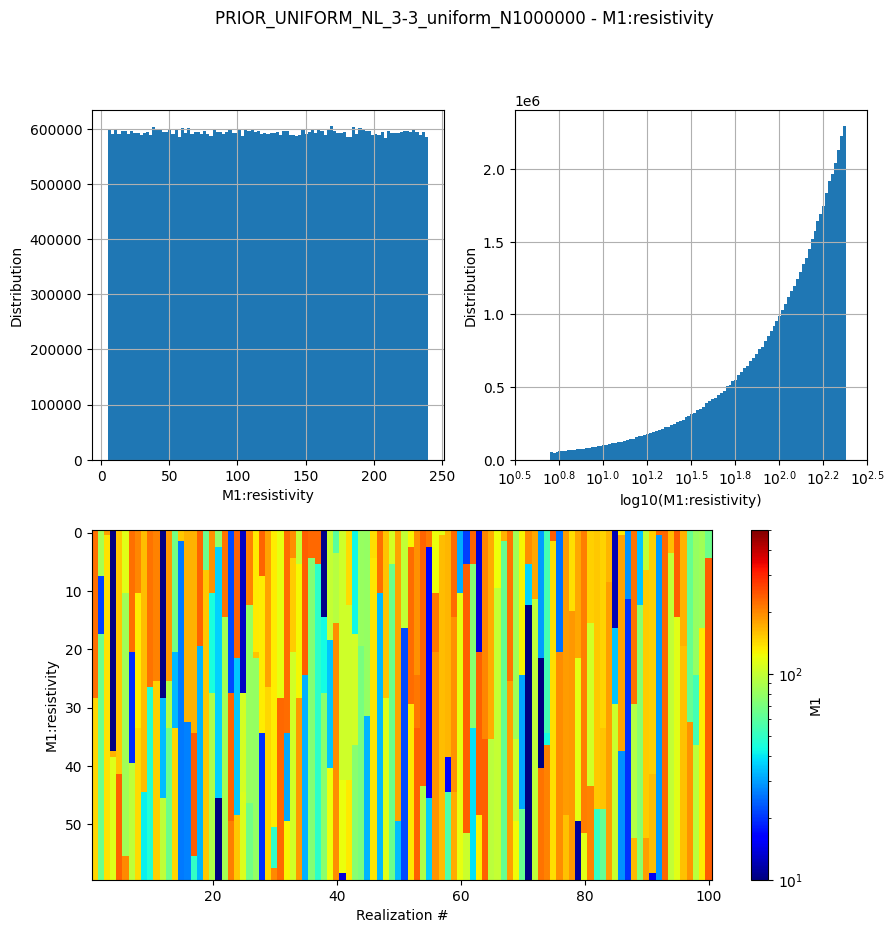

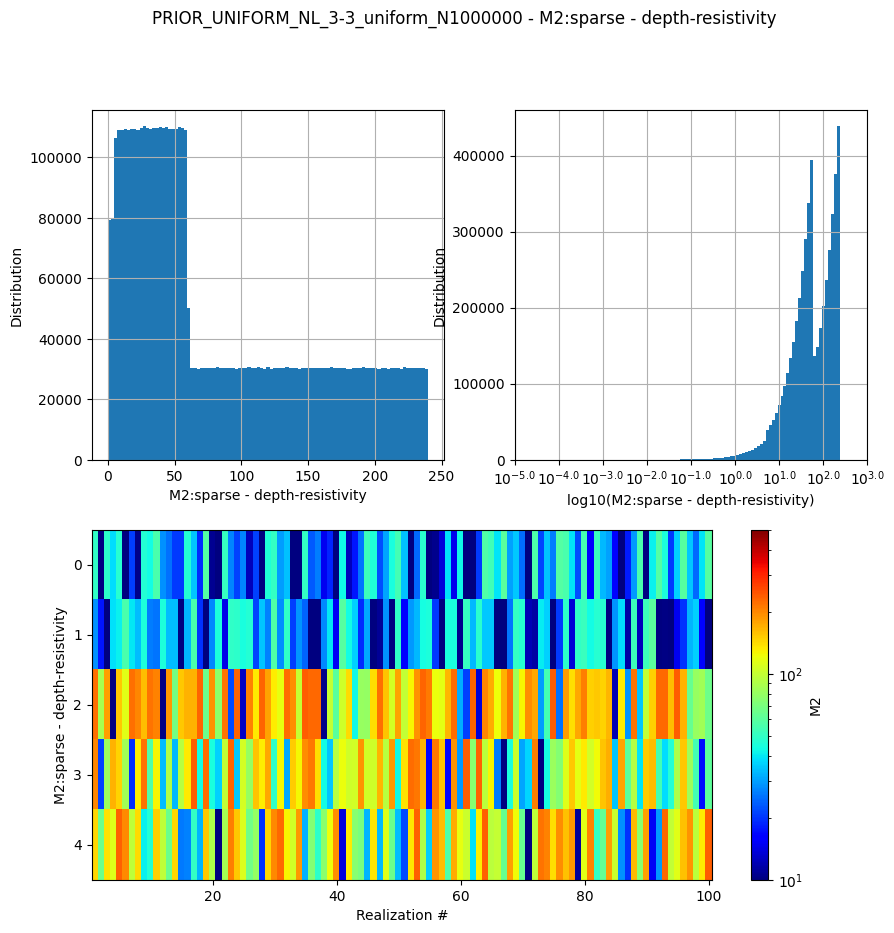

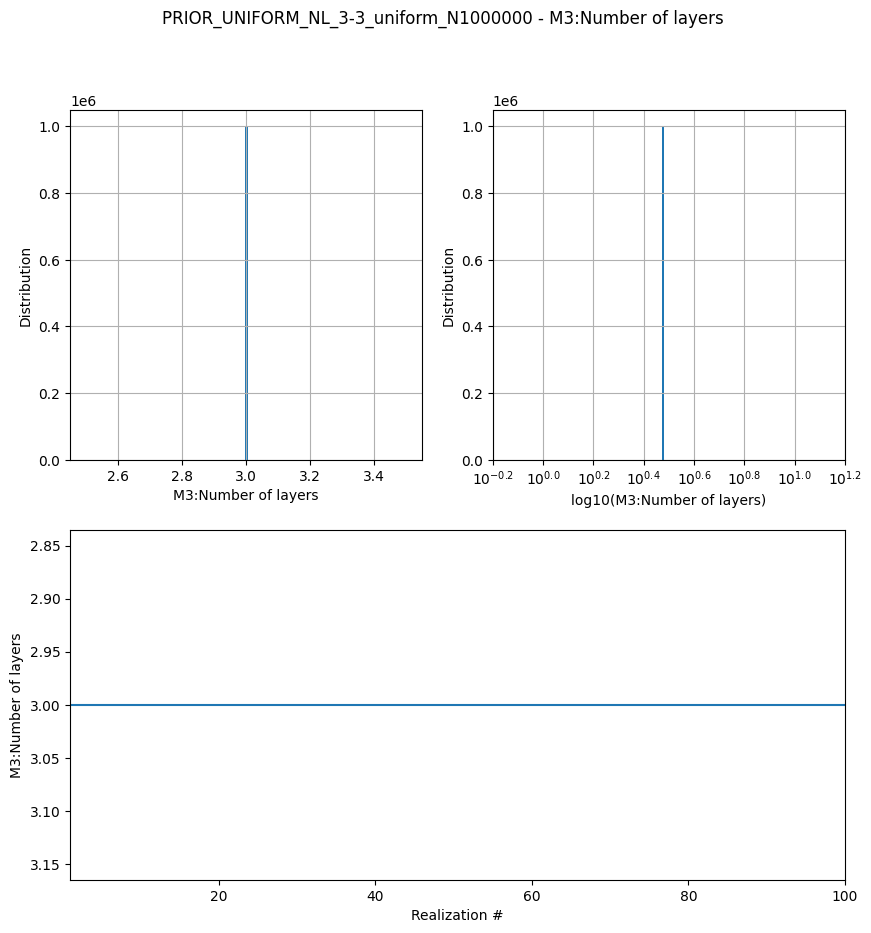

In [4]:
N=1000000 # sample size 
NLAY_min=3
NLAY_max=3


f_prior_data_h5='PRIOR_UNIFORM_NL_%d-%d_uniform_N%d_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5' % (NLAY_min, NLAY_max, N)
        

# make prior model realizations
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist='uniform', RHO_min=0.5*min(rho), RHO_max=2*max(rho))

# make prior data realizations
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex)

ig.plot_prior_stats(f_prior_h5)

## Different types of uncorrelated and correlated noise - No correlated noise

In [5]:
# The basic noise model: 3% relative noise and a noise floor at 1e-12
rng = np.random.default_rng()
d_std = 0.03 # standard deviation of the noise
d_std_base = 1e-12 # base noise
D_std = d_std * D_ref + d_std_base
D_noise = rng.normal(0, D_std, D_ref.shape)
D_obs = D_ref + D_noise
# Cd is a diagnoal matrix with the standard deviation of the data

In [6]:


# If a single correlated noise model is used, 
# it can represented by be the mean of the standard deviation of the data.
# This is though an approximation.
Cd_single = np.diag(np.mean(D_std, axis=0)**2)
Cd_single = np.diag(D_std[0]**2) 

# The full data covariance matrix is represented by a 3D array of shape (ns,nd,nd)
# Using this type of noise should provide identical results to using d_std, only slower as 
# the full covariance matrix is used.
# This type of noise model is useful when the noise is not the same for all data points,
# and the noise is correlated.
ns,nd=D_std.shape
Cd_mul = np.zeros((ns,nd,nd))
for i in range(ns):
    Cd_mul[i] = np.diag(D_std[i]**2)

# Wrie the three differet types of noise models to hdf5 files
f_data_h5_arr=[]
name_arr = []

f_out = ig.write_data_gaussian(D_obs, D_std = D_std, f_data_h5 = 'data_uncorr.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Uncorrelated noise')

f_out  = ig.write_data_gaussian(D_obs, Cd=Cd_single, f_data_h5 = 'data_corr1.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Correlated noise - mean')

f_out = ig.write_data_gaussian(D_obs, Cd=Cd_mul, f_data_h5 = 'data_corr2.h5', id=1, showInfo=0)
f_data_h5_arr.append(f_out)
name_arr.append('Correlated noise - individual')

Removing group data_uncorr.h5:D1 
Adding group data_uncorr.h5:D1 
Removing group data_corr1.h5:D1 
Adding group data_corr1.h5:D1 
Removing group data_corr2.h5:D1 
Adding group data_corr2.h5:D1 


mean T1=-71.99323
mean T2=-71.99323
mean T3=-71.99323
t1, t2, t3 = 0.225910, 0.347119, 0.349846
SLOWDOWN = 1.000000, 1.536535, 1.548606


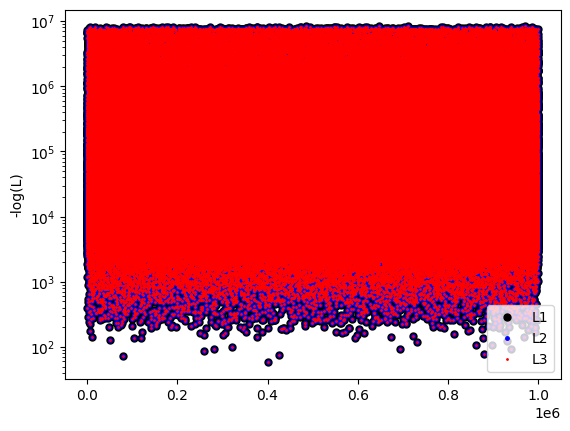

In [7]:
import time as time
# test likelhood
doTest = True
if doTest:
    id=0
    d_obs = D_obs[id]
    #d_obs[11]=np.nan
    d_std = D_std[id]

    Cd_single = np.diag(d_std**2)

    with h5py.File(f_prior_data_h5, 'r') as f:
        D = f['/D1'][:]
        
    #D = D_ref
    t0=time.time()
    L1 = ig.likelihood_gaussian_diagonal(D, d_obs, d_std)
    t1 = time.time()-t0
    L2 = ig.likelihood_gaussian_full(D, d_obs, Cd_single, useVectorized=True)
    t2 = time.time()-t0-t1
    #L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_single, N_app = 110, checkNaN=True, useVectorized=False)
    #L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_mul[id], N_app = 1000, useVectorized=True)
    L3 = ig.likelihood_gaussian_full(D, d_obs, Cd_mul[id], useVectorized=True)
    t3 = time.time()-t2-t1-t0

    # L3 is a list of log-likelihood values. I would like to compute the log of the mean of the likelihood values, that is 
    # the log(mean(exp(L3))). exp(L3) may lead to such small numbers that this becomes NaN. Using log-sum-exp trick for numerical stability.
    
    def log_mean_exp(log_vals):
        """Compute log(mean(exp(log_vals))) using the log-sum-exp trick for numerical stability"""
        max_val = np.max(log_vals)
        return max_val + np.log(np.mean(np.exp(log_vals - max_val)))
    
    mean_L1 = log_mean_exp(L1)
    mean_L2 = log_mean_exp(L2)
    mean_L3 = log_mean_exp(L3)

    mean_L1 = np.log(np.mean(np.exp(L1)))


    #print("L1: %f, L2: %f, L3: %f" % (mean_L1, mean_L2, mean_L3))
    #¤
    #
    #print("L1: %f, L2: %f, L3: %f" % (L1[0], L2[0], L3[0]))
    print("mean T1=%3.5f" % (mean_L1))
    print("mean T2=%3.5f" % (mean_L2))
    print("mean T3=%3.5f" % (mean_L3))

    print("t1, t2, t3 = %f, %f, %f" % (t1, t2, t3))
    print("SLOWDOWN = %f, %f, %f" % (t1/t1, t2/t1, t3/t1))


    plt.semilogy(-L1, 'k.', label='L1', markersize=10)
    plt.plot(-L2, 'b.', label='L2', markersize=5)
    plt.plot(-L3, 'r.', label='L3', markersize=2)
    plt.legend()
    plt.ylabel('-log(L)')
    plt.show()

In [8]:
import time as time
f_post_h5_arr = []
T_arr = []
EV_arr = []
EV_post_arr = []
clim   = [min(rho)*0.8, max(rho)*1.25]
t_elapsed = []
for f_data_h5 in f_data_h5_arr: 
    t0 = time.time()
    f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, 
                                       parallel=parallel, 
                                       Ncpu = 8,
                                       use_N_best=500
                                       )
    t_elapsed.append(time.time()-t0)
    with h5py.File(f_post_h5, 'r') as f_post:
        T_arr.append(f_post['/T'][:])
        EV_arr.append(f_post['/EV'][:])
        EV_post_arr.append(f_post['/EV_post'][:])

    f_post_h5_arr.append(f_post_h5)
    

print(t_elapsed)

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:04,  3.07it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:04,  3.09it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:04,  3.07it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:04,  3.09it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:05,  2.98it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:04,  3.00it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:05,  2.91it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:03<00:05,  2.92it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  3.09it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  3.05it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  3.05it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  3.06it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  3.03it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  2.99it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  3.00it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:06<00:01,  2.92it/s]

integrate_rejection: Time=  8.6s/200 soundings, 43.0ms/sounding, 23.3it/s. T_av=28.9, EV_av=-44.3


poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.19it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.19it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.19it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.19it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.18it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.19it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.19it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.18it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:15<00:03,  1.27it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:15<00:03,  1.27it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:15<00:03,  1.27it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.24it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.23it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.22it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.22it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.21it/s]

integrate_rejection: Time= 20.5s/200 soundings, 102.6ms/sounding, 9.7it/s. T_av=30.2, EV_av=-173.9


poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.24it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.22it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.22it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.20it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:12,  1.16it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:13,  1.15it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:13,  1.14it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:08<00:13,  1.12it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.23it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.23it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.20it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.19it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:16<00:04,  1.20it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:17<00:04,  1.16it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:17<00:04,  1.18it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:17<00:04,  1.15it/s]

integrate_rejection: Time= 21.2s/200 soundings, 106.0ms/sounding, 9.4it/s. T_av=28.9, EV_av=-44.3


poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

[9.662479162216187, 21.56902813911438, 22.263986587524414]


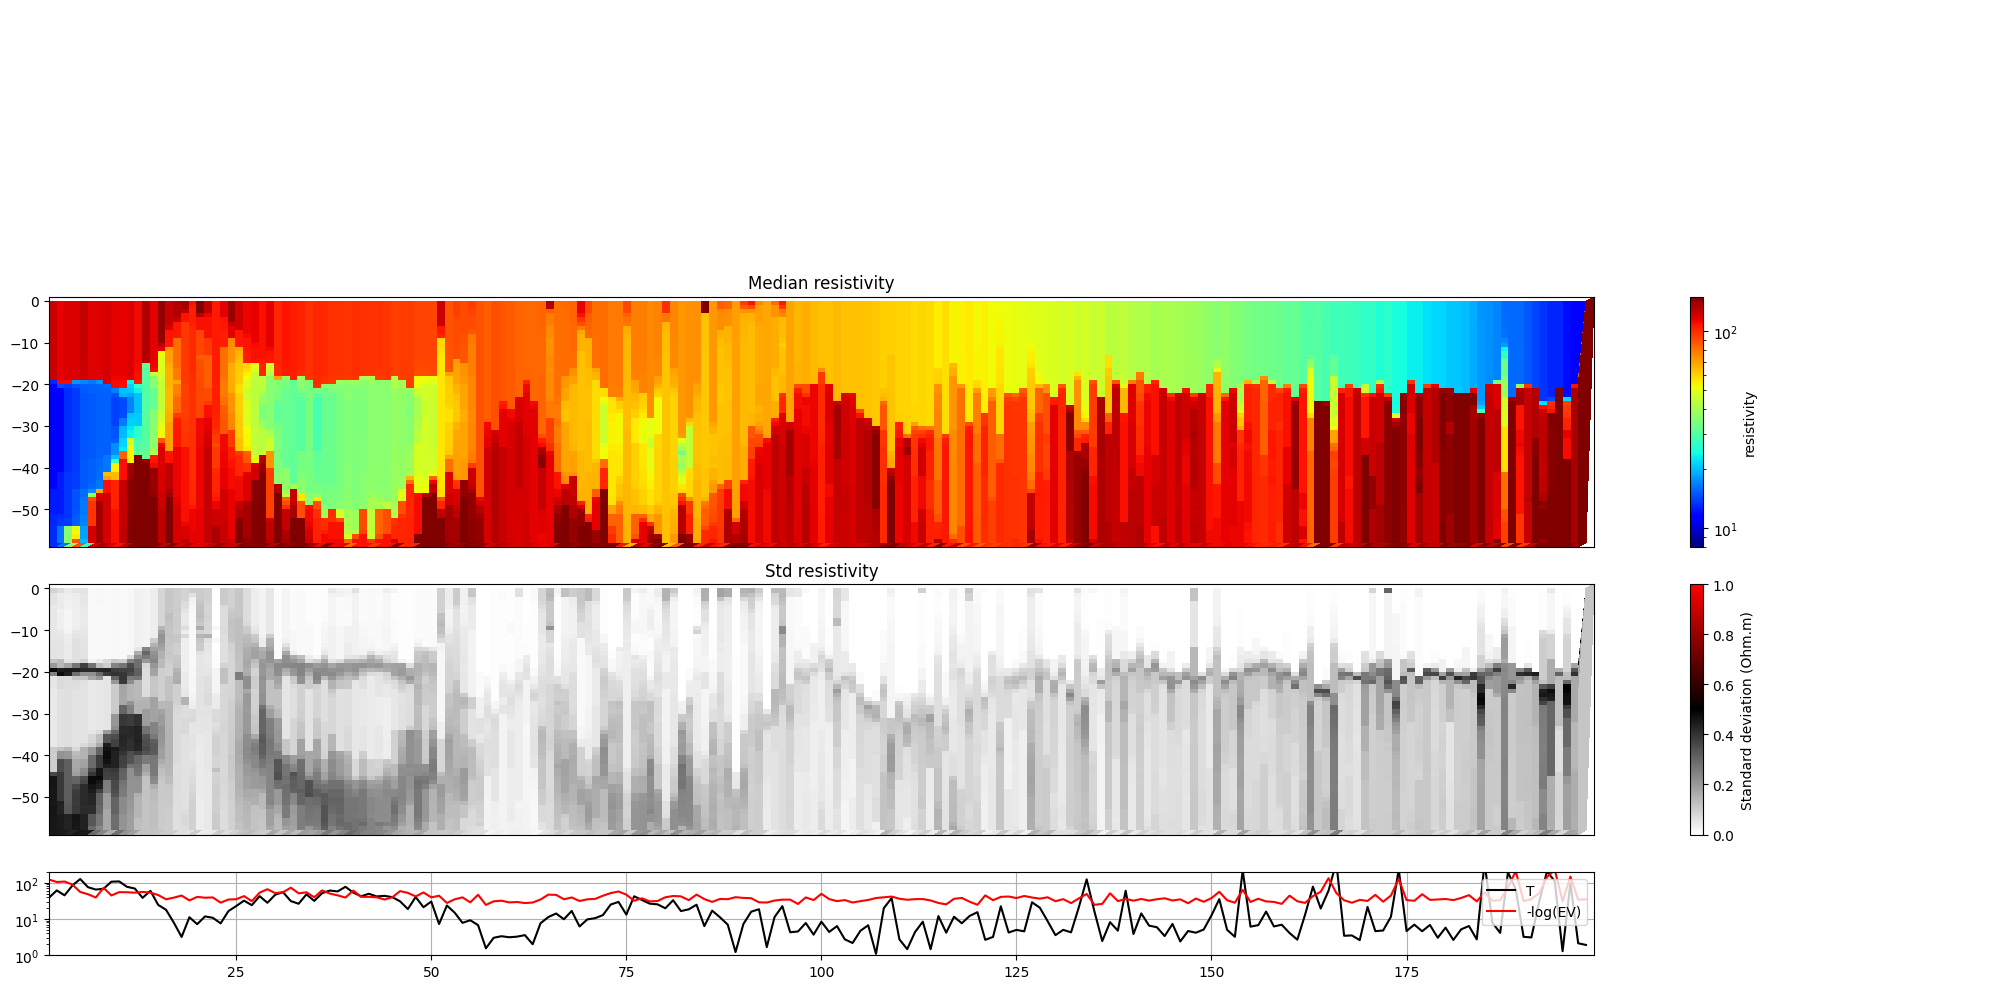

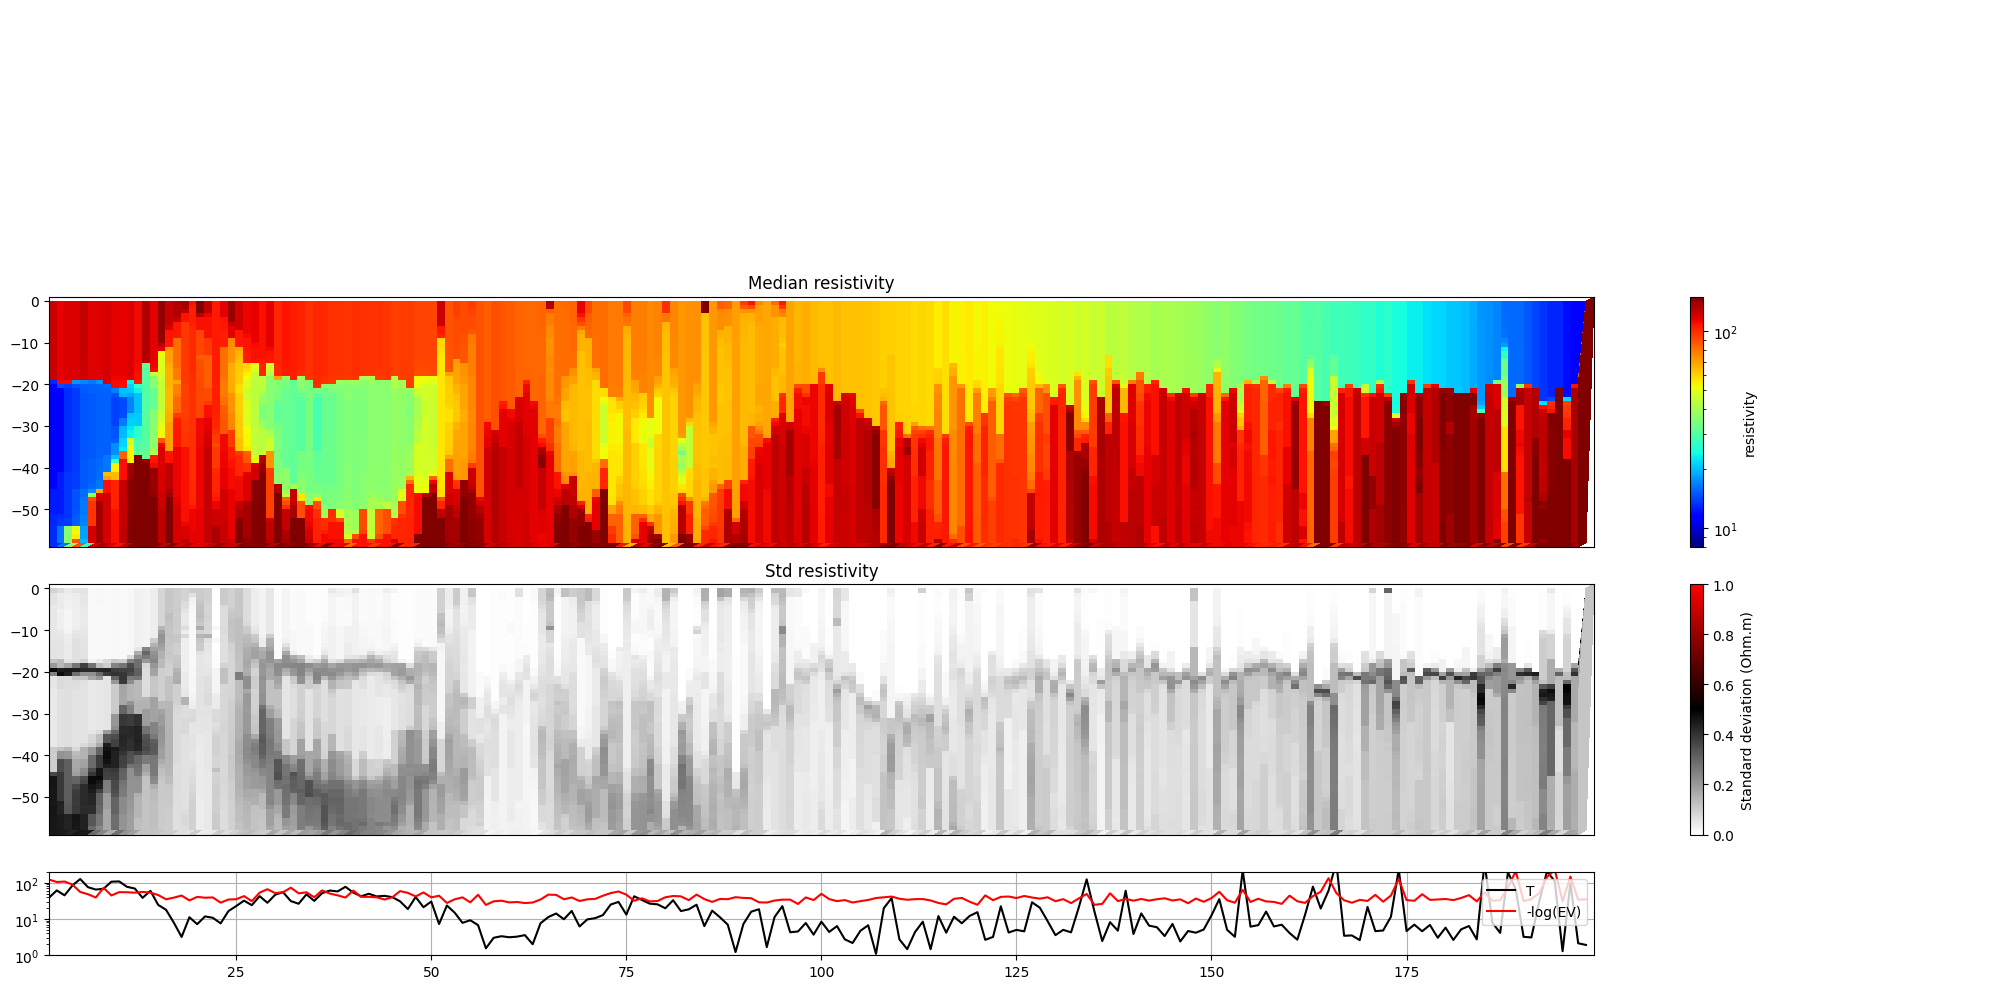

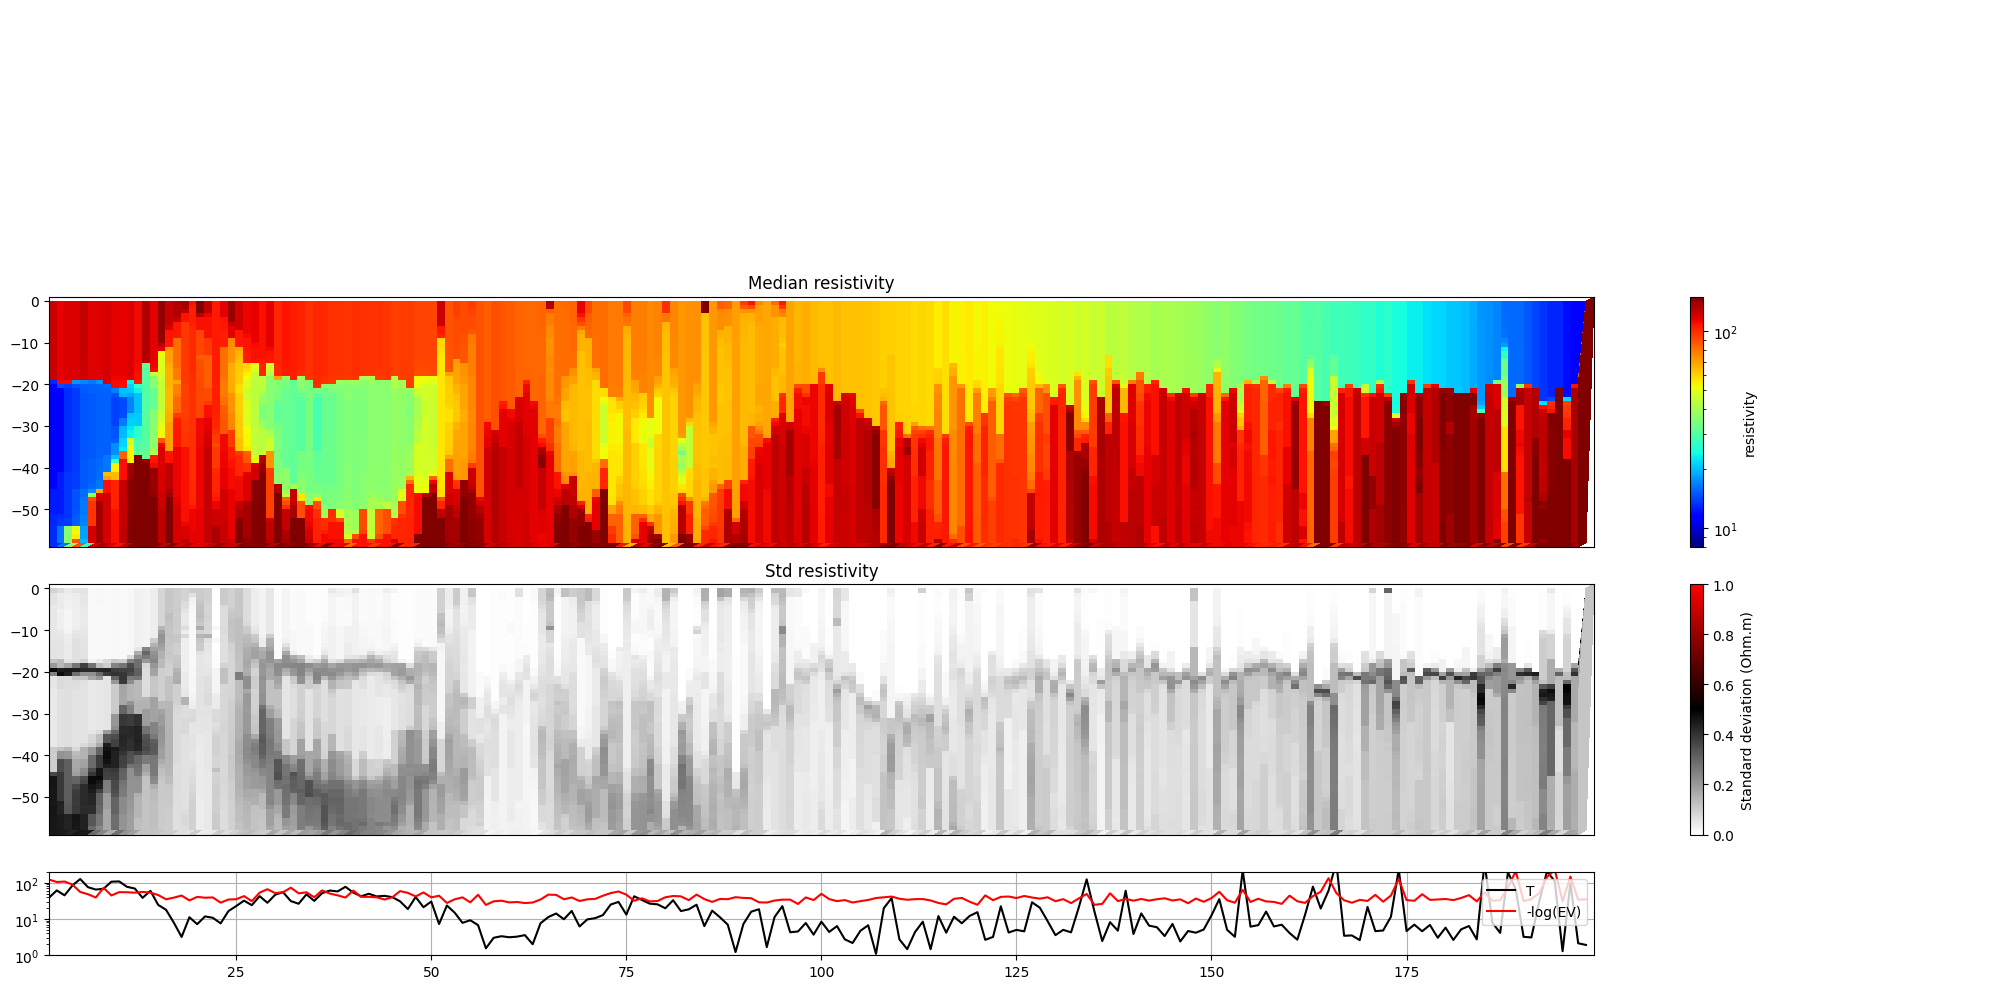

In [9]:
for i in range(len(f_post_h5_arr)):
    ig.plot_profile(f_post_h5_arr[i],hardcopy=hardcopy,  clim = clim, im=1)

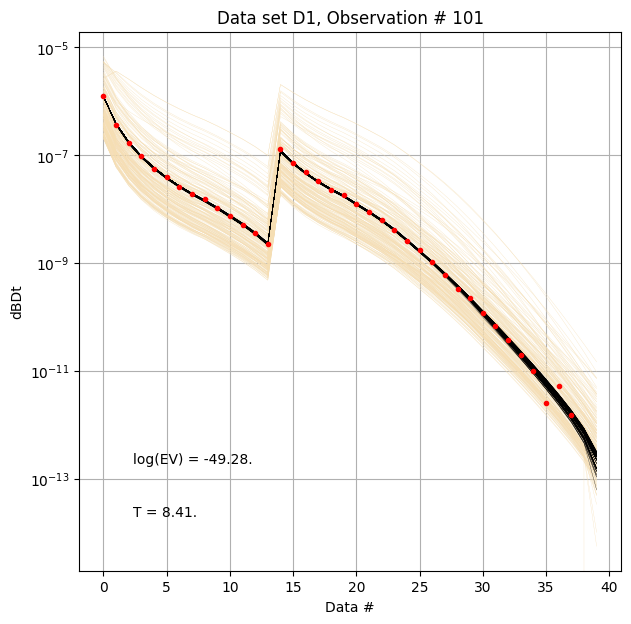

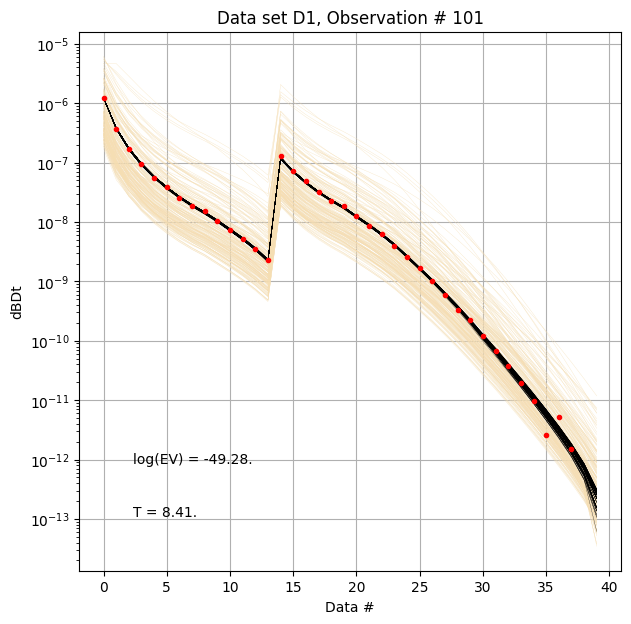

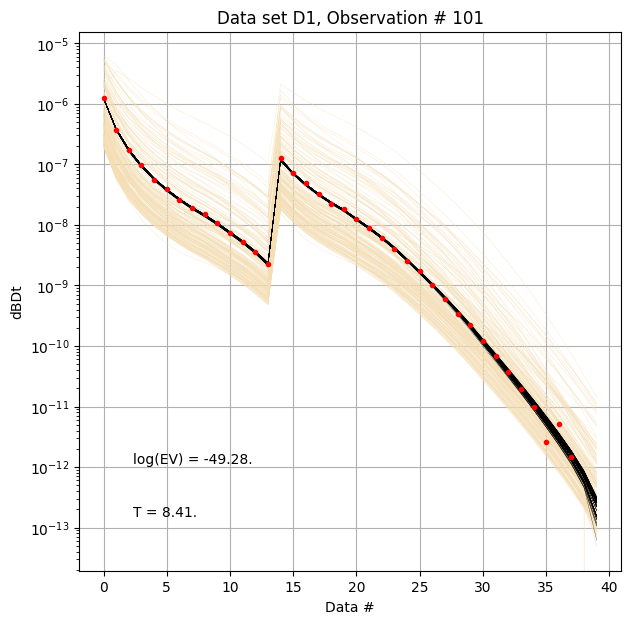

In [10]:
for i in range(len(f_post_h5_arr)):
    ig.plot_data_prior_post(f_post_h5_arr[0], i_plot=100, hardcopy=hardcopy)

Text(0, 0.5, 'EV_post')

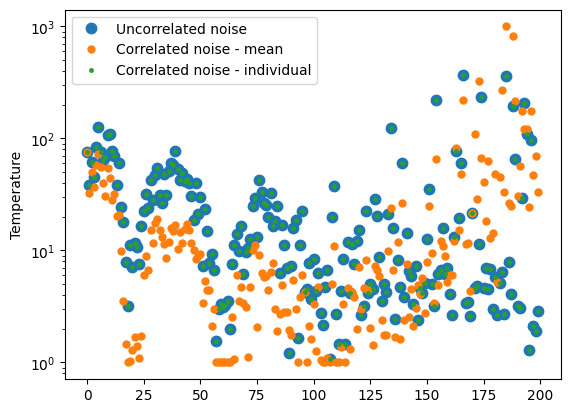

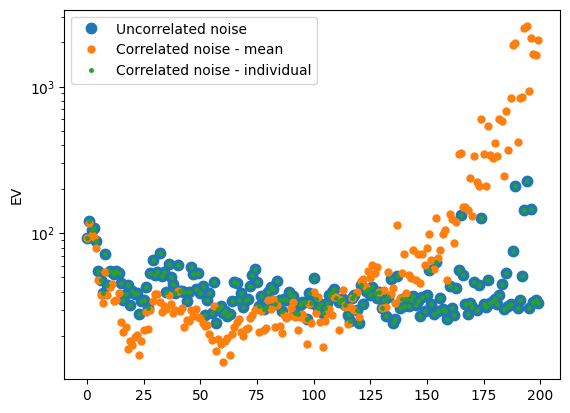

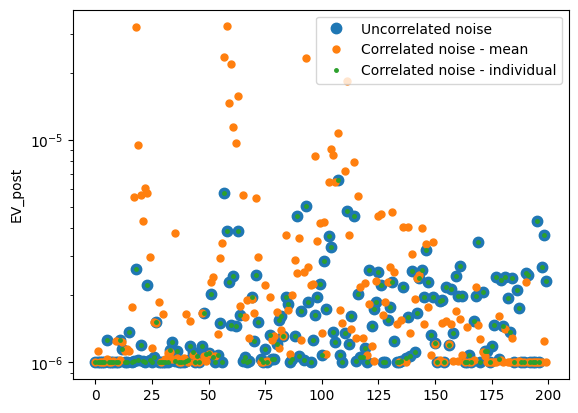

In [11]:
plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(T_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('Temperature')

plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(-EV_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('EV')


plt.figure()
for i in range(len(T_arr)):
    plt.semilogy(EV_post_arr[i], '.', label=name_arr[i], markersize=15-5*i)
plt.legend()
plt.ylabel('EV_post')



## Data in the log-space, and correlated Gaussian noise
The data can be transformed to the log-space, and the noise model can be applied in the log-space.


Removing group data_log_uncorr:D1 
Adding group data_log_uncorr:D1 
Removing group data_log_corr:D1 
Adding group data_log_corr:D1 
Removing group data_log_corr2:D1 
Adding group data_log_corr2:D1 


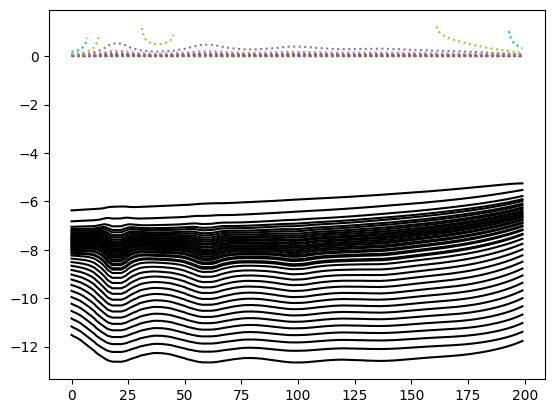

In [12]:

# Add constant covariance to Cd -->
# A simple way to introduce correlated noise
corrlev = 0.01**2

lD_obs = np.log10(D_ref)

lD_std_up = np.abs(np.log10(D_ref+D_std)-lD_obs)
lD_std_down = np.abs(np.log10(D_ref-D_std)-lD_obs)
lD_std = np.abs((lD_std_up+lD_std_down)/2) + np.sqrt(corrlev)

lCd_single = np.diag(np.mean(lD_std, axis=0)**2)+corrlev

ns,nd=D_std.shape
lCd_mul = np.zeros((ns,nd,nd))
for i in range(ns):
    lCd_mul[i] = np.diag(lD_std[i]**2)+corrlev

plt.figure()
plt.plot(lD_obs,'k-')
plt.plot(lD_std,':')


f_data_log_1_h5_f_out = ig.write_data_gaussian(lD_obs, D_std = lD_std, f_data_h5 = 'data_log_uncorr', id=1, showInfo=0, is_log=1)
f_data_log_2_h5_f_out = ig.write_data_gaussian(lD_obs, Cd = lCd_single, f_data_h5 = 'data_log_corr', id=1, showInfo=0, is_log=1)
f_data_log_3_h5_f_out = ig.write_data_gaussian(lD_obs, Cd = lCd_mul, f_data_h5 = 'data_log_corr2', id=1, showInfo=0, is_log=1)
f_data_arr = [f_data_log_1_h5_f_out,f_data_log_2_h5_f_out,f_data_log_3_h5_f_out]

In [13]:
recomputePriorData = False
if recomputePriorData:
    f_prior_log_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, N=N-1, is_log=True)
else:
    # Simple load the old data and save it in log-space
    f_prior_log_data_h5  = 'd_log.h5'
    ig.copy_hdf5_file(f_prior_h5, f_prior_log_data_h5)
    D, idx = ig.load_prior_data(f_prior_data_h5); 
    Dlog = np.log10(D[0])
    ig.save_prior_data(f_prior_log_data_h5, Dlog, id=1)

Loading prior data from PRIOR_UNIFORM_NL_3-3_uniform_N1000000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: []
  - /D1:  N,nd = 1000000/40


Saving new prior data '/D1' to file: d_log.h5 


New prior data '/D1' saved to file: d_log.h5 


In [14]:
f_post_log_h5_arr = []
for i in range(len(f_data_arr)):
    f_data_h5 = f_data_arr[i]
    f_post_h5 = ig.integrate_rejection(f_prior_log_data_h5, f_data_h5, 
                                       parallel=parallel, 
                                       Ncpu=8,
                                       updatePostStat = True,                                       
                                    )
    f_post_log_h5_arr.append(f_post_h5)

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.71it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.75it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.73it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.73it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.72it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.72it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.70it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:05<00:08,  1.71it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:11<00:02,  1.74it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:11<00:02,  1.73it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:11<00:02,  1.72it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:11<00:02,  1.72it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:11<00:02,  1.72it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:11<00:02,  1.71it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:11<00:02,  1.70it/s]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:12<00:03,  1.66it/s]

integrate_rejection: Time= 14.8s/200 soundings, 74.1ms/sounding, 13.5it/s. T_av=2.2, EV_av=-13.1


poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:10<00:16,  1.07s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:16,  1.12s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:16,  1.13s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:17,  1.16s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:17,  1.17s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:17,  1.19s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:17,  1.20s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:12<00:18,  1.24s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:22<00:05,  1.13s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:22<00:05,  1.16s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.16s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.17s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.17s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.19s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.18s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:24<00:06,  1.20s/it]

integrate_rejection: Time= 29.7s/200 soundings, 148.5ms/sounding, 6.7it/s. T_av=1.6, EV_av=-11.9


poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:   0%|                                                | 0/25 [00:00<?, ?it/s]

rejection:  40%|███████████████▌                       | 10/25 [00:10<00:15,  1.05s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:16,  1.13s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:17,  1.15s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:17,  1.17s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:11<00:17,  1.17s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:12<00:18,  1.22s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:12<00:18,  1.22s/it]

rejection:  40%|███████████████▌                       | 10/25 [00:12<00:19,  1.27s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:22<00:05,  1.13s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:22<00:05,  1.15s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:22<00:05,  1.14s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.18s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.18s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:23<00:05,  1.17s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:24<00:05,  1.20s/it]

rejection:  80%|███████████████████████████████▏       | 20/25 [00:24<00:06,  1.26s/it]

integrate_rejection: Time= 30.1s/200 soundings, 150.3ms/sounding, 6.7it/s. T_av=1.6, EV_av=-12.0


poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

poststat:   0%|                                                | 0/200 [00:00<?, ?it/s]

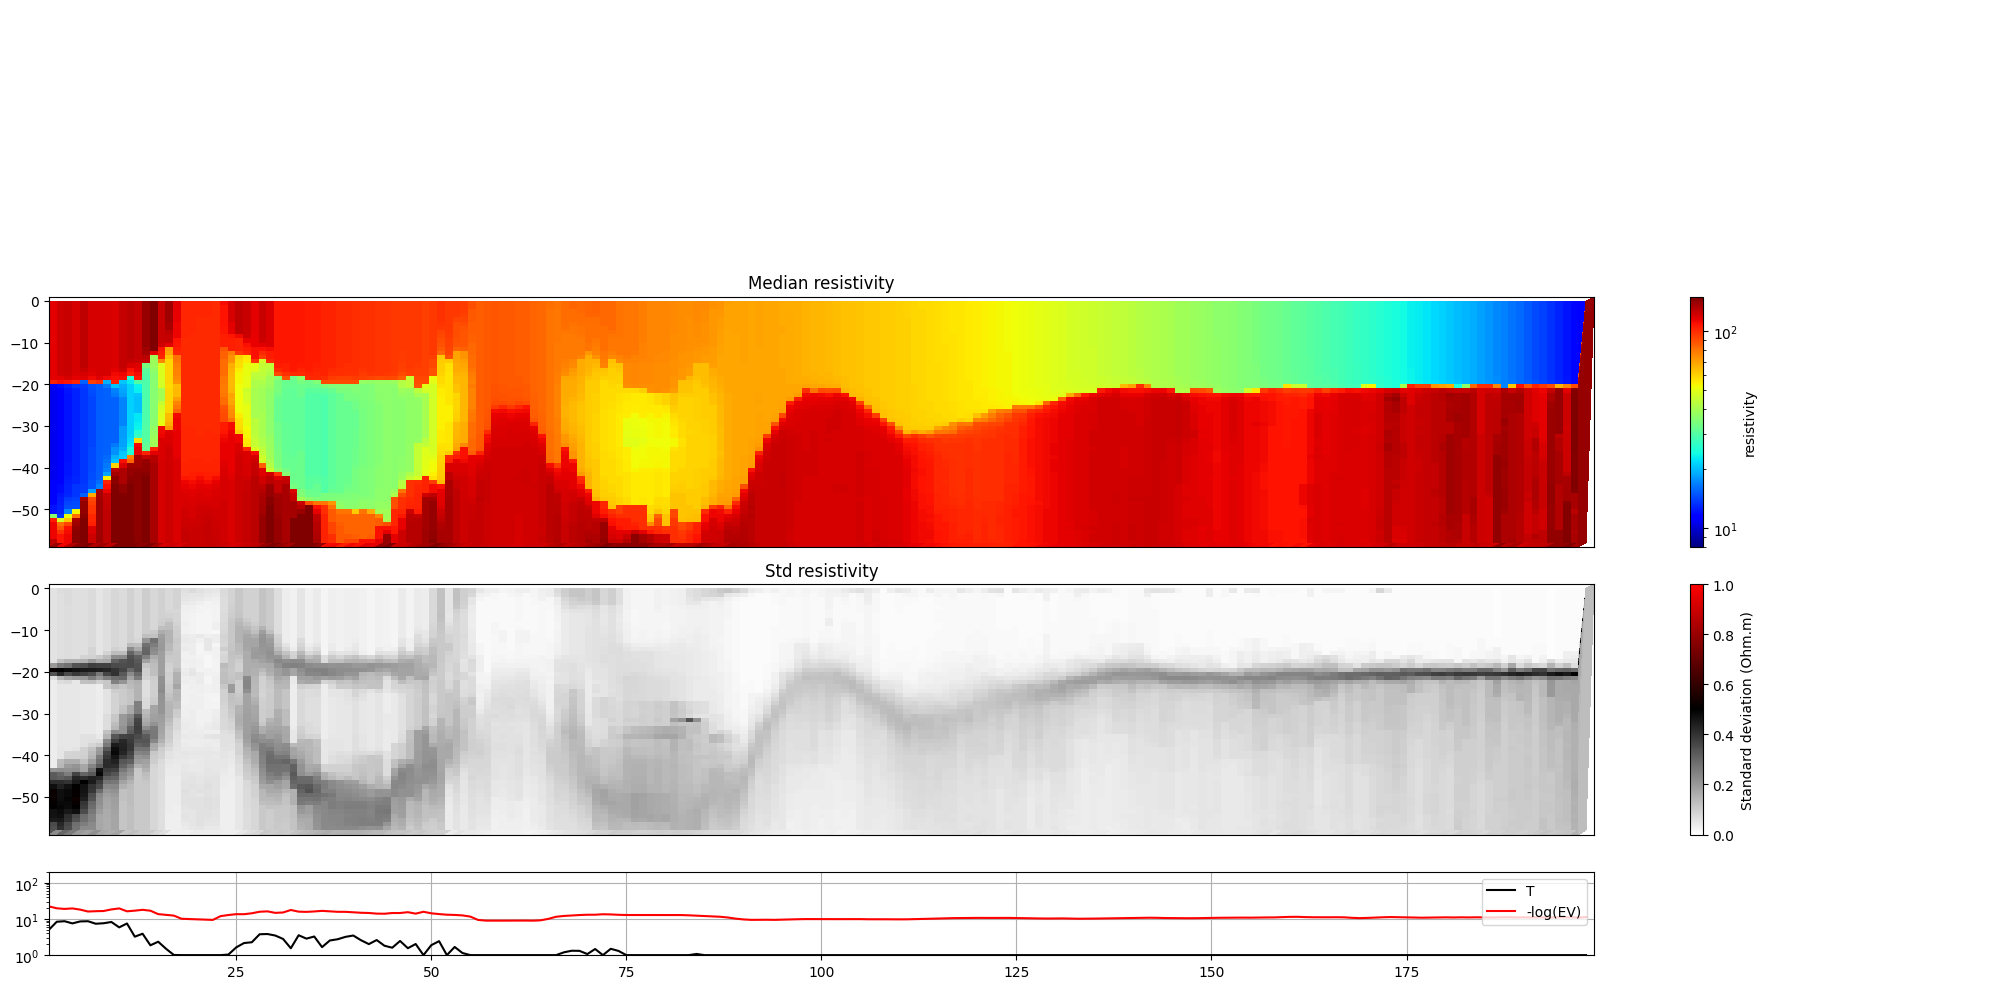

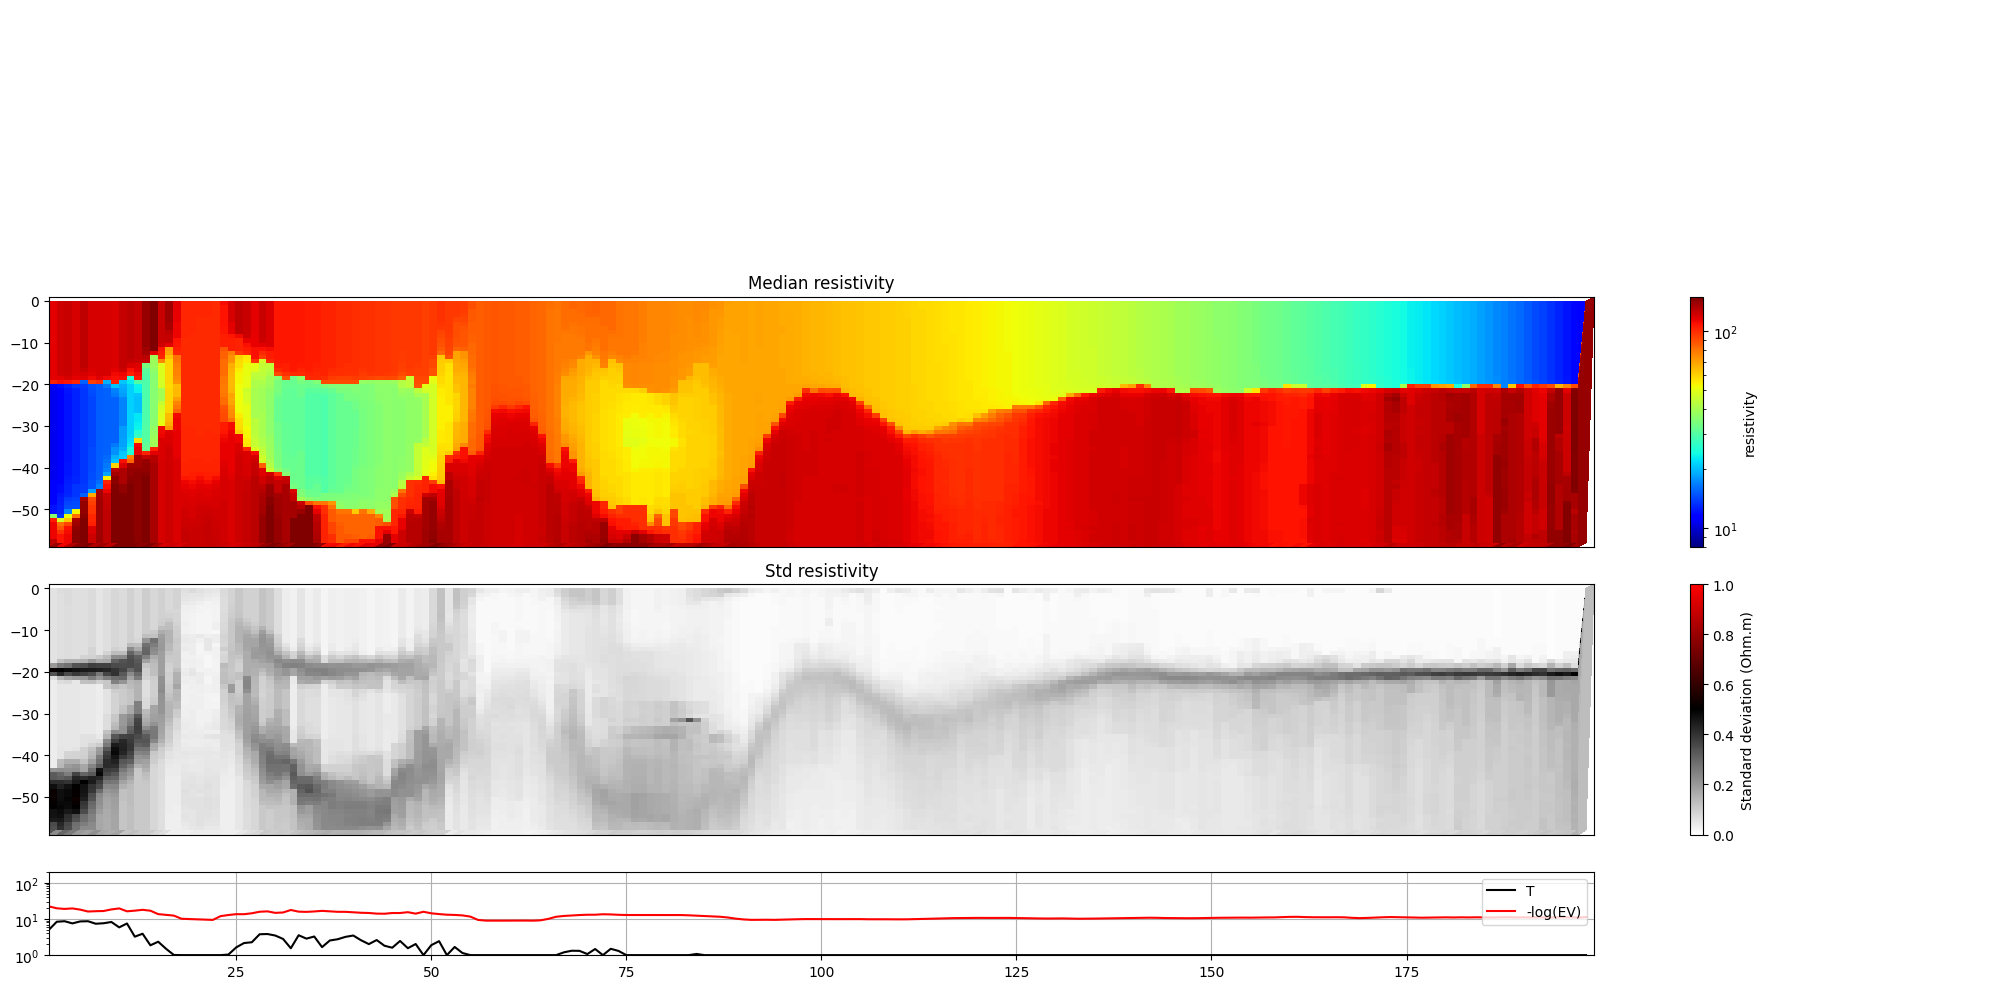

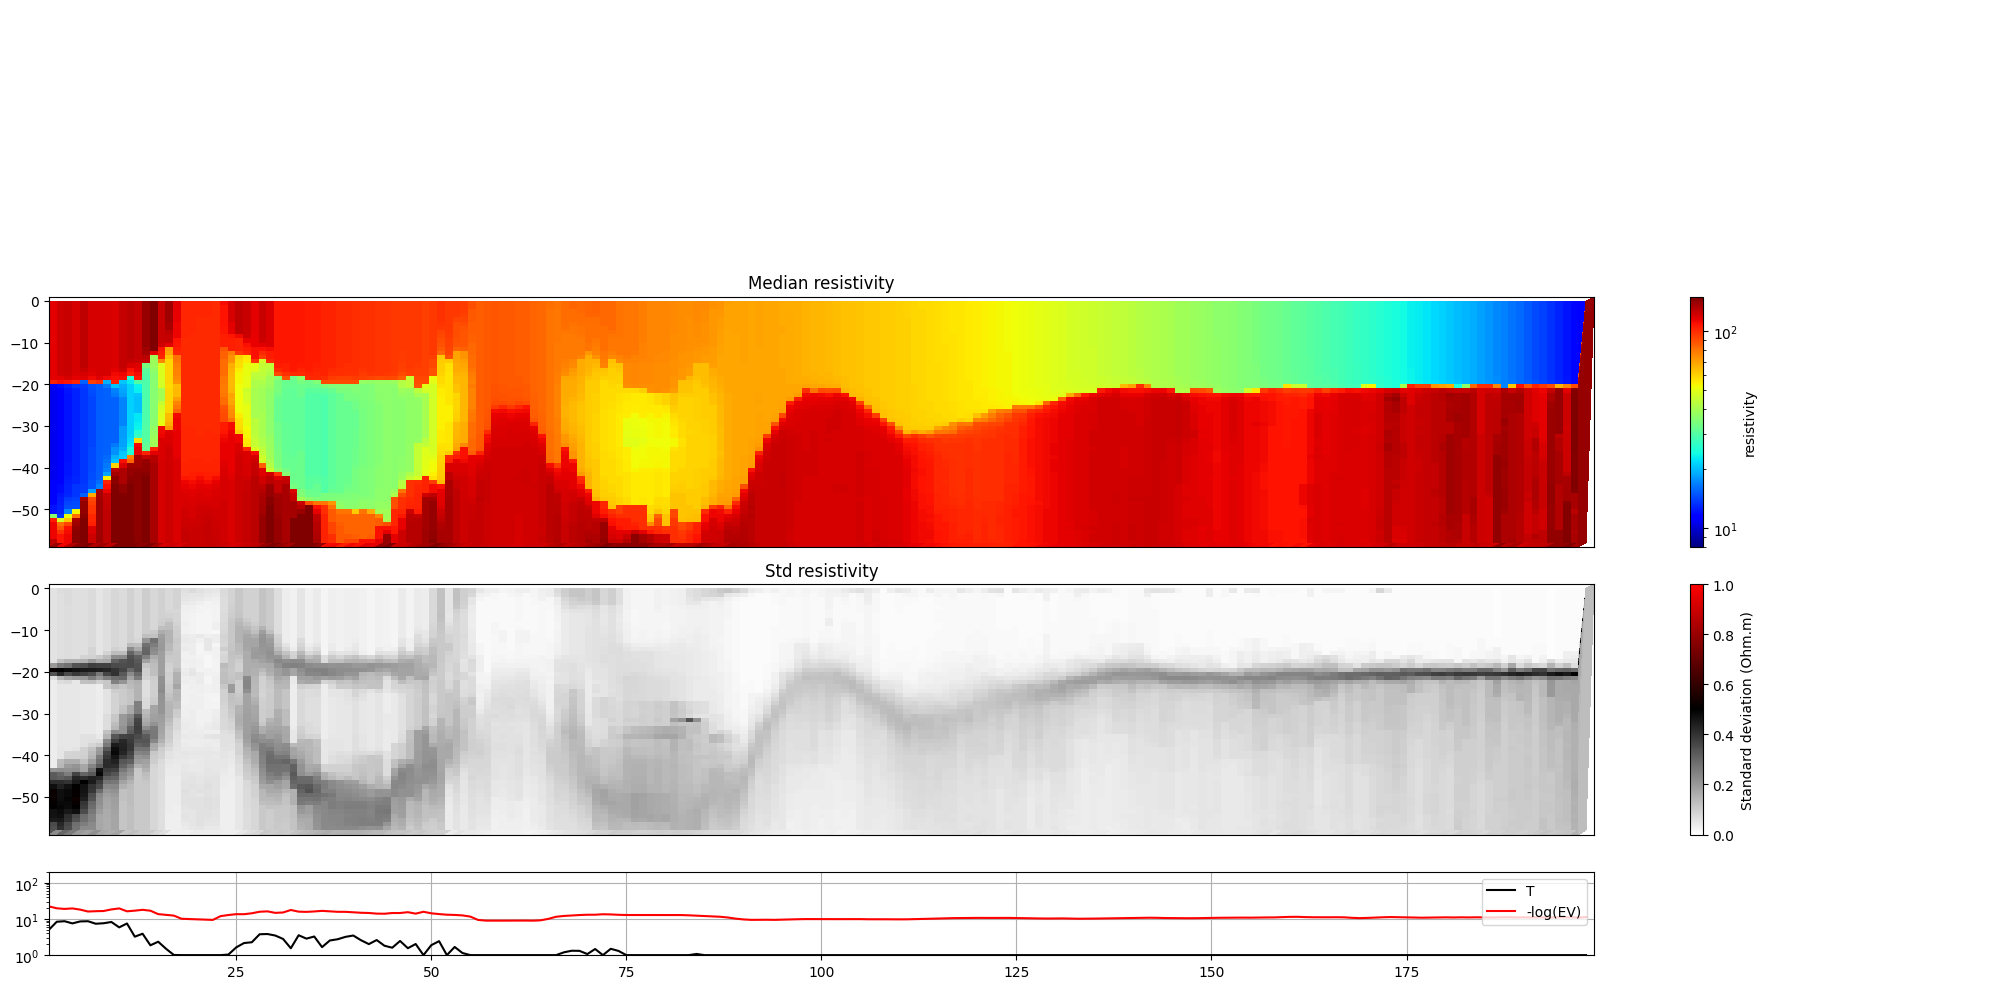

In [15]:
for i in range(len(f_post_log_h5_arr)):
    ig.plot_profile(f_post_log_h5_arr[i],hardcopy=hardcopy,  clim = clim, im=1)

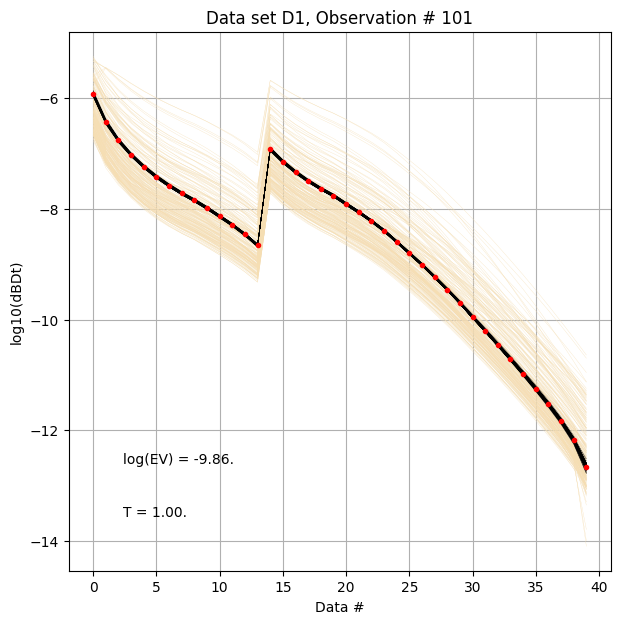

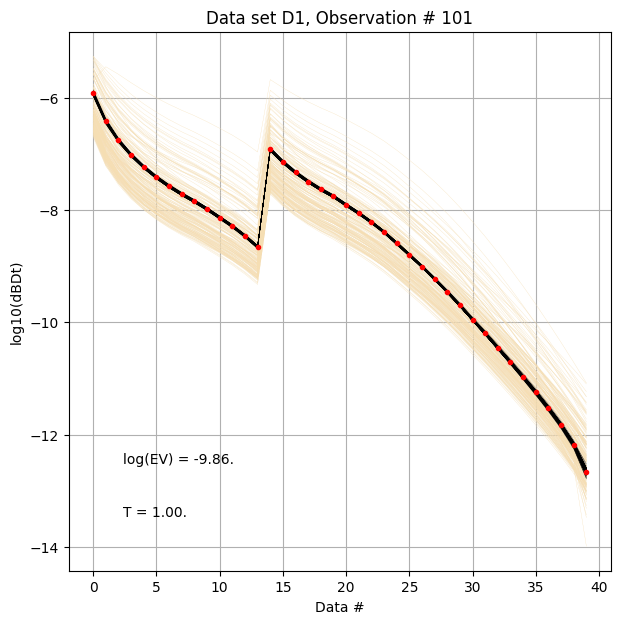

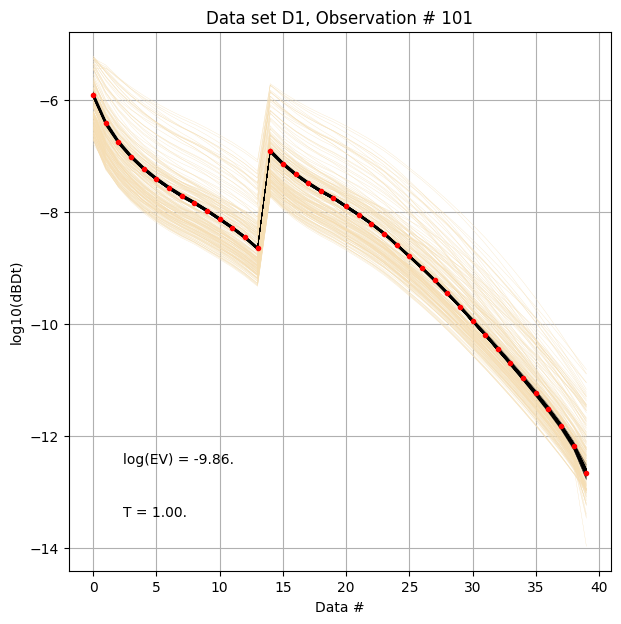

In [16]:

for i in range(len(f_post_log_h5_arr)):
    ig.plot_data_prior_post(f_post_log_h5_arr[i], i_plot=100, hardcopy=hardcopy, is_log=True)